In [7]:
# -*- coding: utf-8 -*-
%matplotlib inline


import warnings
import requests
import zipfile
import io
import json
import unicodedata



import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import locale
import arrow
import xml.etree.ElementTree as ET

from locale import atof
from dateutil import parser
from datetime import datetime
from collections import Counter
import nltk
import string
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['font.size'] = 10

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\19803\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
with open('data/since-20170120.json',encoding="utf8") as f:
    jsondata = json.load(f)
    analyzer = SentimentIntensityAnalyzer()

for row in jsondata:
    try: 
        text = row['text']
    except KeyError: 
        text = row['full_text']
    vs = analyzer.polarity_scores(text)
    row['sentiment'] = vs

with open('data/since-20170120-processed.json', 'w') as f:
    json.dump(jsondata, f)


In [13]:
#Utilities
#Add helper functions here.
# Stub for helpers
# convert utc to est
def convertUTCtoFull(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('dddd, MMM D, YYYY h:mm A')

# convert to year
def convertUTCtoYear(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY')

# convert to month
def convertUTCtoMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('MM')

# convert to year-month
def convertUTCtoYearMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY-MM')

# convert to day
def convertUTCtoDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('D')

# convert to month/day
def convertUTCtoMonthDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY-MM-DD')

# convert to day of week
def convertUTCtoDayOfWeek(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('d')

# convert to time
def convertUTCtoHourOfDay(date):
    utc = arrow.get(date)
    return int(utc.to('US/Eastern').format('HH'))

# convert to week of year
def convertUTCtoWeekNumber(date):
    return int(date.strftime('%U'))

# convert to year + week of year
def convertUTCtoYearWeekNumber(date):
    utc = arrow.get(date)
    year = utc.to('US/Eastern').format('YYYY')
    weekno = int(date.strftime('%U'))
    return str(year) + '-' + str(weekno).zfill(2)

# Strip HTML
def stripHTML(html):
    tree = ET.fromstring(html)
    return ET.tostring(tree, encoding='utf8', method='text')

# Encode with closest thing to character
def encodeText(line):
    line = unicodedata.normalize('NFKD', line).encode('ascii','ignore')
    return line

In [ ]:
#Data processing
#Open the json file and then use the json_normalize() function to flatten it for use with Pandas

In [14]:
with open('data/since-20170120-processed.json') as f:
    jsondata = json.load(f)

normalized_json = pd.io.json.json_normalize(jsondata)

tweets = pd.DataFrame(normalized_json)
tweets['created_date'] = pd.to_datetime(tweets['created_at'])
tweets['id'] = tweets['id_str']
tweets.text.fillna(tweets.text, inplace=True)

In [15]:
tweets['human_date'] = tweets['created_date'].apply(convertUTCtoFull)
tweets['month/day'] = tweets['created_date'].apply(convertUTCtoMonthDay)
tweets['year'] = tweets['created_date'].apply(convertUTCtoYear)
tweets['month'] = tweets['created_date'].apply(convertUTCtoMonth)
tweets['year_month'] = tweets['created_date'].apply(convertUTCtoYearMonth)
tweets['day'] = tweets['created_date'].apply(convertUTCtoDay)
tweets['day of week'] = tweets['created_date'].apply(convertUTCtoDayOfWeek)
tweets['hour'] = tweets['created_date'].apply(convertUTCtoHourOfDay)
tweets['week'] = tweets['created_date'].apply(convertUTCtoWeekNumber) 
tweets['year_week'] = tweets['created_date'].apply(convertUTCtoYearWeekNumber)
tweets['text encoded'] = tweets['text'].apply(encodeText)
tweets.set_index('created_date', inplace=True)

tweets.head()

source  \
created_date                                    
2019-08-02 17:41:30+00:00  Twitter for iPhone   
2020-01-03 02:32:53+00:00  Twitter for iPhone   
2020-01-08 02:45:24+00:00  Twitter for iPhone   
2019-12-25 12:26:31+00:00  Twitter for iPhone   
2020-01-26 23:54:34+00:00  Twitter for iPhone   

                                                                        text  \
created_date                                                                   
2019-08-02 17:41:30+00:00  A$AP Rocky released from prison and on his way...   
2020-01-03 02:32:53+00:00                            https://t.co/VXeKiVzpTf   
2020-01-08 02:45:24+00:00  All is well! Missiles launched from Iran at tw...   
2019-12-25 12:26:31+00:00                                   MERRY CHRISTMAS!   
2020-01-26 23:54:34+00:00  Kobe Bryant, despite being one of the truly gr...   

                                               created_at  retweet_count  \
created_date                                                               
2019-08-02 17:41:30+00:00  Fri Aug 02 17:41:30 +0000 2019         251530   
2020-01-03 02:32:53+00:00  Fri Jan 03 02:32:53 +0000 2020         172157   
2020-01-08 02:45:24+00:00  Wed Jan 08 02:45:24 +0000 2020         158004   
2019-12-25 12:26:31+00:00  Wed Dec 25 12:26:31 +0000 2019         115372   
2020-01-26 23:54:34+00:00  Sun Jan 26 23:54:34 +0000 2020          94246   

                           favorite_count is_retweet               id_str  \
created_date                                                                
2019-08-02 17:41:30+00:00          879647      False  1157345692517634049   
2020-01-03 02:32:53+00:00          814012      False  1212924762827046918   
2020-01-08 02:45:24+00:00          764333      False  1214739853025394693   
2019-12-25 12:26:31+00:00          735775      False  1209812664601522178   
2020-01-26 23:54:34+00:00          735478      False  1221582230008619016   

                           sentiment.neg  sentiment.neu  sentiment.pos  ...  \
created_date                                                            ...   
2019-08-02 17:41:30+00:00          0.127          0.775          0.099  ...   
2020-01-03 02:32:53+00:00          0.000          1.000          0.000  ...   
2020-01-08 02:45:24+00:00          0.050          0.711          0.238  ...   
2019-12-25 12:26:31+00:00          0.000          0.209          0.791  ...   
2020-01-26 23:54:34+00:00          0.036          0.631          0.333  ...   

                            month/day  year month year_month day day of week  \
created_date                                                                   
2019-08-02 17:41:30+00:00  2019-08-02  2019    08    2019-08   2           5   
2020-01-03 02:32:53+00:00  2020-01-02  2020    01    2020-01   2           4   
2020-01-08 02:45:24+00:00  2020-01-07  2020    01    2020-01   7           2   
2019-12-25 12:26:31+00:00  2019-12-25  2019    12    2019-12  25           3   
2020-01-26 23:54:34+00:00  2020-01-26  2020    01    2020-01  26           7   

                          hour week year_week  \
created_date                                    
2019-08-02 17:41:30+00:00   13   30   2019-30   
2020-01-03 02:32:53+00:00   21    0   2020-00   
2020-01-08 02:45:24+00:00   21    1   2020-01   
2019-12-25 12:26:31+00:00    7   51   2019-51   
2020-01-26 23:54:34+00:00   18    4   2020-04   

                                                                text encoded  
created_date                                                                  
2019-08-02 17:41:30+00:00  b'A$AP Rocky released from prison and on his w...  
2020-01-03 02:32:53+00:00                         b'https://t.co/VXeKiVzpTf'  
2020-01-08 02:45:24+00:00  b'All is well! Missiles launched from Iran at ...  
2019-12-25 12:26:31+00:00                                b'MERRY CHRISTMAS!'  
2020-01-26 23:54:34+00:00  b'Kobe Bryant, despite being one of the truly ...  

[5 rows x 23 columns]

In [16]:
tweets['source'].unique()

array(['Twitter for iPhone', 'Media Studio', 'Twitter Web Client',
       'Twitter for iPad', 'Twitter Ads', 'Twitter for Android'],
      dtype=object)

In [17]:
len(tweets.index)

17929

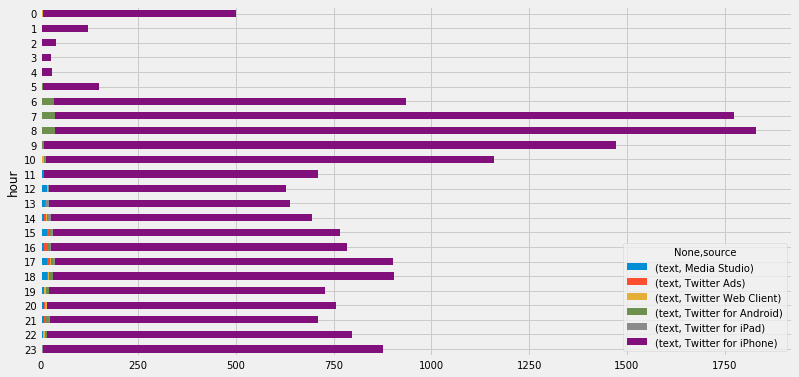

In [18]:
#Tweets Per Hour

tweetsPerHour = tweets[['source', 'hour', 'text']].pivot_table(
    index='hour', columns=['source'], aggfunc='count')
tweetsPerHour.to_csv('output/tweets-per-hour-of-day.csv')
tweetsPerHour.iloc[::-1].plot(kind='barh', stacked=True)

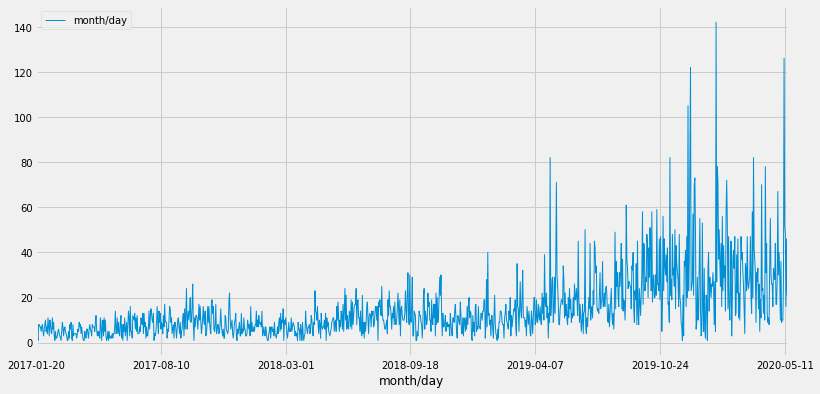

In [19]:
#Tweets Per day
tweetsPerDay = tweets[['month/day']].groupby(tweets['month/day']).count()
# tweetsPerDay.iloc[::-1].plot(kind='barh', figsize=(12,100), fontsize=8)
tweetsPerDay.plot(kind='line', linewidth=1.0)

In [20]:
tweetsPerDay.describe()

month/day
count  1206.000000
mean     14.866501
std      14.446338
min       1.000000
25%       6.000000
50%      10.000000
75%      18.000000
max     142.000000

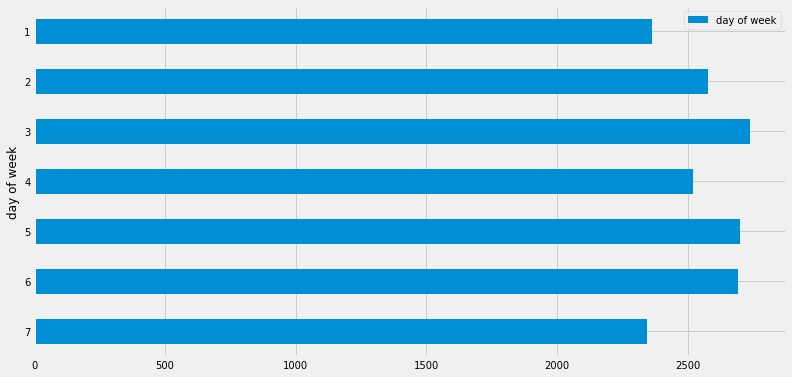

In [21]:
#Tweets per day of week 
tweetsPerDayOfWeek = tweets[['day of week']].groupby(tweets['day of week']).count()
tweetsPerDayOfWeek.iloc[::-1].plot(kind='barh')
# tweetsPerDayOfWeek.plot(kind='bar')

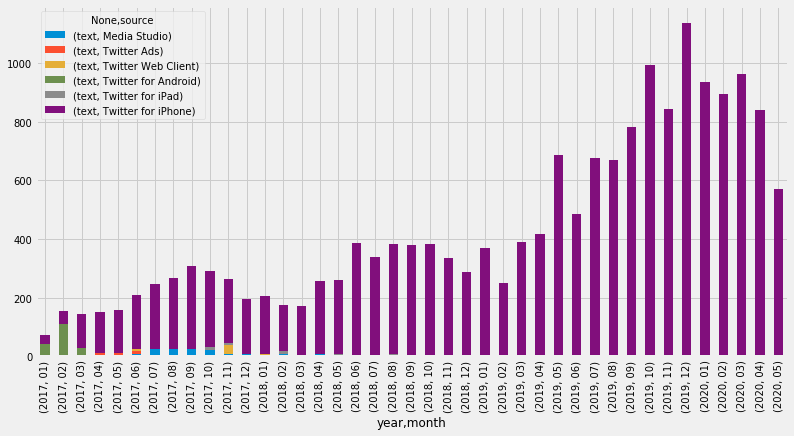

In [24]:
#Tweets Per month
baseMonth = tweets[['source', 'year', 'month', 'text']].pivot_table(index=['year', 'month'], columns=['source'], aggfunc='count')

tweetsPerMonth = tweets[['source', 'year', 'month', 'text']].pivot_table(index=['year', 'month'], columns=['source'], aggfunc='count')
tweetsPerMonth = tweetsPerMonth.reindex_like(baseMonth)
# tweetsPerMonth.iloc[::-1].plot(kind='bar', stacked=True)
tweetsPerMonth.plot(kind='bar', stacked=True)

In [25]:
#Text Analysis - Common Words
from collections import Counter
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\19803\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (tweets.text
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
words_data = pd.DataFrame(Counter(words).most_common(15000),
                    columns=['Word', 'Frequency']).set_index('Word')

pd.set_option('display.max_rows', top_N)
words_data = words_data.reset_index()
words_data['Word Encoded'] = words_data['Word'].apply(encodeText)
words_data.drop('Word', axis=1).to_csv('output/word-frequencies.csv')
words_data.head(top_N)

Word  Frequency          Word Encoded
0                   ’       2781                   b''
1               great       2780              b'great'
2               &amp;       2484              b'&amp;'
3                   ,       1696                  b','
4           president       1694          b'president'
5                   .       1506                  b'.'
6                   !       1448                  b'!'
7              people       1239             b'people'
8               thank       1198              b'thank'
9                   -       1153                  b'-'
10          democrats       1120          b'democrats'
11              trump       1035              b'trump'
12                  …        963                b'...'
13                new        945                b'new'
14               fake        919               b'fake'
15                big        872                b'big'
16               news        869               b'news'
17                get        855                b'get'
18                  “        830                   b''
19               many        823               b'many'
20              would        810              b'would'
21              never        788              b'never'
22           american        762           b'american'
23   @realdonaldtrump        753   b'@realdonaldtrump'
24               want        685               b'want'
25                u..        667                b'u..'
26                  '        650                  b"'"
27  @realdonaldtrump:        647  b'@realdonaldtrump:'
28             united        606             b'united'
29               much        606               b'much'
30               even        595               b'even'
31                one        594                b'one'
32               like        570               b'like'
33               time        570               b'time'
34               ....        565               b'....'
35                  (        565                  b'('
36               good        562               b'good'
37              house        556              b'house'
38            america        552            b'america'
39              going        550              b'going'
40               must        543               b'must'
41               make        539               b'make'
42              media        514              b'media'
43            country        511            b'country'
44        impeachment        502        b'impeachment'
45             border        497             b'border'
46               back        491               b'back'
47            nothing        481            b'nothing'
48               vote        440               b'vote'
49             states        435             b'states'
50       @whitehouse:        435       b'@whitehouse:'
51              state        431              b'state'
52               dems        424               b'dems'
53            working        423            b'working'
54         republican        422         b'republican'
55              first        409              b'first'
56               done        408               b'done'
57                 us        404                 b'us'
58                see        403                b'see'
59               made        395               b'made'
60              today        389              b'today'
61              years        388              b'years'
62               said        385               b'said'
63             strong        374             b'strong'
64               last        372               b'last'
65              china        371              b'china'
66                job        370                b'job'
67           democrat        360           b'democrat'
68              witch        360              b'witch'
69                two        355                b'two'
70              trade        349              b'trade'
71               know        348               b'know'
72

In [33]:
#Specific Text Searches
from IPython.display import display, Markdown

tweetsEnc = tweets.reset_index()

def analyzeText(search):
    display(Markdown('## Search: _{0}_'.format(search)))
    filtered = tweetsEnc[tweetsEnc['text'].str.contains(search, case=False)]
    count = len(filtered)
    percent = float(len(filtered))/len(tweetsEnc) * 100
    display(Markdown('Number of Tweets: {0}'.format(count)))
    display(Markdown('Percent of all Tweets: {0:.2f}%'.format(percent)))
    display(Markdown('### The Tweets'))
    for i, row in filtered.iterrows():
        display(Markdown('[{0}](https://twitter.com/realDonaldTrump/status/{2}): {1}'.format(row['human_date'], row['text'], row['id'])))
        display(Markdown('---'))

In [35]:
searches = [ 'trade', 'rates', 'inflation', 'economy', 'growth', 'manipulation', 'currency', 'dollar', 'china', 'Fed', 
            'Powell', 'Xi', 'tariffs', 'impeach', 'intent', 'continue', 'receive', 'hundred', 'billion', 'take', 'unfair', 
            'trade', 'practice', 'currency', 'manipulation', 'stop', 'many',
            'collusion', 'russia', 'witch hunt', 'mueller', 'sessions', 'justice', 'maga', 'make america great again'
           ]
for search in searches:
    analyzeText(search)

## Search: _trade_

Number of Tweets: 380

Percent of all Tweets: 2.12%

### The Tweets

[Monday, Oct 29, 2018 8:28 AM](https://twitter.com/realDonaldTrump/status/1056885392522260480): Had a very good conversation with the newly elected President of Brazil, Jair Bolsonaro, who won his race by a substantial margin. We agreed that Brazil and the United States will work closely together on Trade, Military and everything else! Excellent call, wished him congrats!

---

[Wednesday, Apr 8, 2020 11:49 AM](https://twitter.com/realDonaldTrump/status/1247914464319504385): Bernie Sanders is OUT! Thank you to Elizabeth Warren. If not for her, Bernie would have won almost every state on Super Tuesday! This ended just like the Democrats &amp; the DNC wanted, same as the Crooked Hillary fiasco. The Bernie people should come to the Republican Party, TRADE!

---

[Tuesday, Dec 25, 2018 6:18 PM](https://twitter.com/realDonaldTrump/status/1077705232665272321): I hope everyone, even the Fake News Media, is having a great Christmas! Our Country is doing very well. We are securing our Borders, making great new Trade Deals, and bringing our Troops Back Home. We are finally putting America First. MERRY CHRISTMAS!  #MAGA

---

[Tuesday, Jan 7, 2020 2:05 PM](https://twitter.com/realDonaldTrump/status/1214624074724466689): Had a very good meeting with @kbsalsaud of Saudi Arabia. We discussed Trade, Military, Oil Prices, Security, and Stability in the Middle East!

---

[Sunday, Jan 27, 2019 8:09 PM](https://twitter.com/realDonaldTrump/status/1089691985164800001): After all that I have done for the Military, our great Veterans, Judges (99), Justices (2), Tax &amp; Regulation Cuts, the Economy, Energy, Trade &amp; MUCH MORE, does anybody really think I won’t build the WALL? Done more in first two years than any President! MAKE AMERICA GREAT AGAIN!

---

[Friday, Dec 13, 2019 1:08 AM](https://twitter.com/realDonaldTrump/status/1205368801438707713): Congratulations to Boris Johnson on his great WIN! Britain and the United States will now be free to strike a massive new Trade Deal after BREXIT. This deal has the potential to be far bigger and more lucrative than any deal that could be made with the E.U. Celebrate Boris!

---

[Wednesday, May 13, 2020 10:33 AM](https://twitter.com/realDonaldTrump/status/1260578860992737285): As I have said for a long time, dealing with China is a very expensive thing to do. We just made a great Trade Deal, the ink was barely dry, and the World was hit by the Plague from China. 100 Trade Deals wouldn’t make up the difference - and all those innocent lives lost!

---

[Monday, Apr 9, 2018 6:03 AM](https://twitter.com/realDonaldTrump/status/983284198046826496): When a car is sent to the United States from China, there is a Tariff to be paid of 2 1/2%. When a car is sent to China from the United States, there is a Tariff to be paid of 25%. Does that sound like free or fair trade.  No, it sounds like STUPID TRADE -  going on for years!

---

[Friday, Aug 23, 2019 6:04 PM](https://twitter.com/realDonaldTrump/status/1165022004392681472): Just spoke with President @JairBolsonaro of Brazil. Our future Trade prospects are very exciting and our relationship is strong, perhaps stronger than ever before. I told him if the United States can help with the Amazon Rainforest fires, we stand ready to assist!

---

[Tuesday, Jan 14, 2020 6:36 PM](https://twitter.com/realDonaldTrump/status/1217228960964038658): We are helping Apple all of the time on TRADE and so many other issues, and yet they refuse to unlock phones used by killers, drug dealers  and other violent criminal elements. They will have to step up to the plate and help our great Country, NOW! MAKE AMERICA GREAT AGAIN.

---

[Saturday, May 16, 2020 6:58 PM](https://twitter.com/realDonaldTrump/status/1261793132020224005): Why is it that China, for decades, and with a population much bigger than ours, is paying a tiny fraction of $’s to The World Health Organization, The United Nations and, worst of all, The World Trade Organization, where they are considered a so-called “developing country” and...

---

[Sunday, Sep 3, 2017 12:14 PM](https://twitter.com/realDonaldTrump/status/904377075049656322): The United States is considering, in addition to other options, stopping all trade with any country doing business with North Korea.

---

[Thursday, Jan 16, 2020 8:41 AM](https://twitter.com/realDonaldTrump/status/1217804029599920128): One of the greatest trade deals ever made! Also good for China and our long term relationship. 250 Billion Dollars will be coming back to our Country, and we are now in a great position for a Phase Two start. There has never been anything like this in U.S. history! USMCA NEXT!

---

[Wednesday, Jan 9, 2019 9:06 AM](https://twitter.com/realDonaldTrump/status/1083001986331672580): Our Country is doing so well in so many ways. Great jobs numbers, with a record setting December. We are rebuilding our military. Vets finally have Choice &amp; Accountability. Economy &amp; GDP are strong. Tax &amp; Reg cuts historic. Trade deals great. But we MUST fix our Southern Border!

---

[Friday, Dec 6, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1202931589833011200): Do not believe any article or story you read or see that uses “anonymous sources” having to do with trade or any other subject. Only accept information if it has an actual living name on it. The Fake News Media makes up many “sources say” stories. Do not believe them!

---

[Sunday, Jun 10, 2018 10:41 PM](https://twitter.com/realDonaldTrump/status/1006003345360908295): Sorry, we cannot let our friends, or enemies, take advantage of us on Trade anymore. We must put the American worker first!

---

[Sunday, Apr 26, 2020 2:28 PM](https://twitter.com/realDonaldTrump/status/1254477490678104064): I work from early in the morning until late at night, haven’t left the White House in many months (except to launch Hospital Ship Comfort) in order to take care of Trade Deals, Military Rebuilding etc., and then I read a phony story in the failing @nytimes about my work....

---

[Monday, Nov 19, 2018 10:26 AM](https://twitter.com/realDonaldTrump/status/1064540462848098304): Of course we should have captured Osama Bin Laden long before we did. I pointed him out in my book just BEFORE the attack on the World Trade Center. President Clinton famously missed his shot. We paid Pakistan Billions of Dollars &amp; they never told us he was living there. Fools!..

---

[Wednesday, Mar 18, 2020 9:37 AM](https://twitter.com/realDonaldTrump/status/1240271178692005889): We will be, by mutual consent, temporarily closing our Northern Border with Canada to non-essential traffic. Trade will not be affected. Details to follow!

---

[Wednesday, Apr 4, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/981492087328792577): We are not in a trade war with China, that war was lost many years ago by the foolish, or incompetent, people who represented the U.S. Now we have a Trade Deficit of $500 Billion a year, with Intellectual Property Theft of another $300 Billion. We cannot let this continue!

---

[Thursday, Jan 30, 2020 3:37 PM](https://twitter.com/realDonaldTrump/status/1222982067799121926): BIGGEST TRADE DEAL EVER MADE, the USMCA, was signed yesterday and the Fake News Media barely mentioned it. They never thought it could be done. They have zero credibility!

---

[Thursday, Jun 22, 2017 6:15 PM](https://twitter.com/realDonaldTrump/status/878013639613186049): Mexico was just ranked the second deadliest country in the world, after only Syria. Drug trade is largely the cause. We will BUILD THE WALL!

---

[Sunday, Jun 10, 2018 9:17 PM](https://twitter.com/realDonaldTrump/status/1005982266496094209): Why should I, as President of the United States, allow countries to continue to make Massive Trade Surpluses, as they have for decades, while our Farmers, Workers &amp; Taxpayers have such a big and unfair price to pay? Not fair to the PEOPLE of America! $800 Billion Trade Deficit...

---

[Monday, Jan 14, 2019 5:19 PM](https://twitter.com/realDonaldTrump/status/1084938160516169729): For decades, politicians promised to secure the border, fix our trade deals, bring back our factories, get tough on China, move the Embassy to Jerusalem, make NATO pay their fair share, and so much else - only to do NOTHING (or worse)....

---

[Sunday, Jun 10, 2018 9:42 PM](https://twitter.com/realDonaldTrump/status/1005988633747312640): ....Germany pays 1% (slowly) of GDP towards NATO, while we pay 4% of a MUCH larger GDP. Does anybody believe that makes sense? We protect Europe (which is good) at great financial loss, and then get unfairly clobbered on Trade. Change is coming!

---

[Wednesday, Mar 11, 2020 10:13 PM](https://twitter.com/realDonaldTrump/status/1237924658185469954): Hoping to get the payroll tax cut approved by both Republicans and Democrats, and please remember, very important for all countries &amp; businesses to know that trade will in no way be affected by the 30-day restriction on travel from Europe. The restriction stops people not goods.

---

[Saturday, Aug 24, 2019 11:00 AM](https://twitter.com/realDonaldTrump/status/1165277725541765120): When I looked up to the sky and jokingly said “I am the chosen one,” at a press conference two days ago, referring to taking on Trade with China, little did I realize that the media would claim that I had a “Messiah complex.” They knew I was kidding, being sarcastic, and just....

---

[Thursday, Jan 16, 2020 8:59 AM](https://twitter.com/realDonaldTrump/status/1217808535091916800): Cryin’ Chuck Schumer is saying privately that the new China Trade Deal is  unbelievable, which it is, but publicly he knocks it whenever possible. That’s politics, but so bad for our great Country!

---

[Sunday, Jan 19, 2020 12:44 PM](https://twitter.com/realDonaldTrump/status/1218952496388956162): I will be going to Austin, Texas. Leaving soon. Always like (love!) being in the Lone Star State. Speaking to our great Farmers. They hit “paydirt” with our incredible new Trade Deals: CHINA, JAPAN, MEXICO, CANADA, SOUTH KOREA, and many others!

---

[Sunday, Aug 11, 2019 5:42 PM](https://twitter.com/realDonaldTrump/status/1160667748978122755): Many incredible things are happening right now for our Country. After years of being ripped off by other nations on both Trade Deals and the Military, things are changing fast. Big progress is being made. America is respected again. KEEP AMERICA GREAT!

---

[Saturday, Mar 3, 2018 12:43 PM](https://twitter.com/realDonaldTrump/status/969991653393039361): The United States has an $800 Billion Dollar Yearly Trade Deficit because of our “very stupid” trade deals and policies. Our jobs and wealth are being given to other countries that have taken advantage of us for years. They laugh at what fools our leaders have been. No more!

---

[Friday, Jan 11, 2019 7:05 AM](https://twitter.com/realDonaldTrump/status/1083696274182995969): I often said during rallies, with little variation, that “Mexico will pay for the Wall.” We have just signed a great new Trade Deal with Mexico. It is Billions of Dollars a year better than the very bad NAFTA deal which it replaces. The difference pays for Wall many times over!

---

[Saturday, Jun 2, 2018 5:23 PM](https://twitter.com/realDonaldTrump/status/1003024268756733952): When you’re almost 800 Billion Dollars a year down on Trade, you can’t lose a Trade War! The U.S. has been ripped off by other countries for years on Trade, time to get smart!

---

[Wednesday, Jul 5, 2017 7:14 AM](https://twitter.com/realDonaldTrump/status/882558219285131265): The United States made some of the worst Trade Deals in world history.Why should we continue these deals with countries that do not help us?

---

[Monday, Oct 1, 2018 6:30 AM](https://twitter.com/realDonaldTrump/status/1046708836407685122): Late last night, our deadline, we reached a wonderful new Trade Deal with Canada, to be added into the deal already reached with Mexico. The new name will be The United States Mexico Canada Agreement, or USMCA. It is a great deal for all three countries, solves the many......

---

[Wednesday, Jan 2, 2019 8:35 AM](https://twitter.com/realDonaldTrump/status/1080457560291987457): Mexico is paying for the Wall through the new USMCA Trade Deal. Much of the Wall has already been fully renovated or built. We have done a lot of work. $5.6 Billion Dollars that House has approved is very little in comparison to the benefits of National Security. Quick payback!

---

[Friday, Dec 14, 2018 11:35 AM](https://twitter.com/realDonaldTrump/status/1073617541476569088): China just announced that their economy is growing much slower than anticipated because of our Trade War with them. They have just suspended U.S. Tariff Hikes. U.S. is doing very well. China wants to make a big and very comprehensive deal. It could happen, and rather soon!

---

[Wednesday, Mar 7, 2018 6:40 AM](https://twitter.com/realDonaldTrump/status/971349864125788160): From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trade Deficits of more than 12 Trillion Dollars. Last year we had a Trade Deficit of almost 800 Billion Dollars. Bad Policies &amp; Leadership. Must WIN again!  #MAGA

---

[Saturday, Jun 2, 2018 1:51 PM](https://twitter.com/realDonaldTrump/status/1002971013313908738): The United States must, at long last, be treated fairly on Trade. If we charge a country ZERO to sell their goods, and they charge us 25, 50 or even 100 percent to sell ours, it is UNFAIR and can no longer be tolerated. That is not Free or Fair Trade, it is Stupid Trade!

---

[Friday, Nov 30, 2018 9:45 AM](https://twitter.com/realDonaldTrump/status/1068516326010830849): Just signed one of the most important, and largest, Trade Deals in U.S. and World History. The United States, Mexico and Canada worked so well together in crafting this great document. The terrible NAFTA will soon be gone. The USMCA will be fantastic for all!

---

[Saturday, Jun 9, 2018 4:57 PM](https://twitter.com/realDonaldTrump/status/1005554429087514624): The United States will not allow other countries to impose massive Tariffs and Trade Barriers on its farmers, workers and companies. While sending their product into our country tax free. We have put up with Trade Abuse for many decades — and that is long enough.

---

[Monday, Dec 24, 2018 10:55 AM](https://twitter.com/realDonaldTrump/status/1077231267559755776): The only problem our economy has is the Fed. They don’t have a feel for the Market, they don’t understand necessary Trade Wars or Strong Dollars or even Democrat Shutdowns over Borders. The Fed is like a powerful golfer who can’t score because he has no touch - he can’t putt!

---

[Saturday, Mar 3, 2018 12:53 PM](https://twitter.com/realDonaldTrump/status/969994273121820672): If the E.U. wants to further increase their already massive tariffs and barriers on U.S. companies doing business there, we will simply apply a Tax on their Cars which freely pour into the U.S. They make it impossible for our cars (and more) to sell there. Big trade imbalance!

---

[Tuesday, Jul 10, 2018 6:59 AM](https://twitter.com/realDonaldTrump/status/1016638035281219584): Thank you to all of my great supporters, really big progress being made. Other countries wanting to fix crazy trade deals. Economy is ROARING. Supreme Court pick getting GREAT REVIEWS. New Poll says Trump, at over 90%, is the most popular Republican in history of the Party. Wow!

---

[Monday, Sep 3, 2018 7:28 AM](https://twitter.com/realDonaldTrump/status/1036576599771111424): Happy Labor Day! Our country is doing better than ever before with unemployment setting record lows. The U.S. has tremendous upside potential as we go about fixing some of the worst Trade Deals ever made by any country in the world. Big progress being made!

---

[Monday, Jun 3, 2019 1:41 PM](https://twitter.com/realDonaldTrump/status/1135602452059906050): ....Fake News will be working hard to find them. Great love all around. Also, big Trade Deal is possible once U.K. gets rid of the shackles. Already starting to talk!

---

[Friday, Mar 2, 2018 8:57 AM](https://twitter.com/realDonaldTrump/status/969572374977839106): When a country Taxes our products coming in at, say, 50%, and we Tax the same product coming into our country at ZERO, not fair or smart. We will soon be starting RECIPROCAL TAXES so that we will charge the same thing as they charge us. $800 Billion Trade Deficit-have no choice!

---

[Friday, Mar 1, 2019 6:08 PM](https://twitter.com/realDonaldTrump/status/1101620175638614016): I have asked China to immediately remove all Tariffs on our agricultural products (including beef, pork, etc.) based on the fact that we are moving along nicely with Trade discussions....

---

[Saturday, Apr 11, 2020 12:01 PM](https://twitter.com/realDonaldTrump/status/1249004689322053633): “Trump did a deal with Japan. A lot of our product goes to Japan, and we are booming in North Dakota.” Jim on C Span, Washington Journal. Our Trade Deals will be having a big impact on our Country as they kick in!

---

[Monday, May 6, 2019 7:08 AM](https://twitter.com/realDonaldTrump/status/1125356705787850753): The United States has been losing, for many years, 600 to 800 Billion Dollars a year on Trade. With China we lose 500 Billion Dollars. Sorry, we’re not going to be doing that anymore!

---

[Tuesday, Jul 24, 2018 8:08 PM](https://twitter.com/realDonaldTrump/status/1021909900941815809): The European Union is coming to Washington tomorrow to negotiate a deal on Trade. I have an idea for them. Both the U.S. and the E.U. drop all Tariffs, Barriers and Subsidies! That would finally be called Free Market and Fair Trade! Hope they do it, we are ready - but they won’t!

---

[Tuesday, May 29, 2018 7:27 AM](https://twitter.com/realDonaldTrump/status/1001424695126880258): Sorry, I’ve got to start focusing my energy on North Korea Nuclear, bad Trade Deals, VA Choice, the Economy, rebuilding the Military, and so much more, and not on the Rigged Russia Witch Hunt that should be investigating Clinton/Russia/FBI/Justice/Obama/Comey/Lynch etc.

---

[Tuesday, Nov 13, 2018 8:07 AM](https://twitter.com/realDonaldTrump/status/1062331024426913792): On Trade, France makes excellent wine, but so does the U.S. The problem is that France makes it very hard for the U.S. to sell its wines into France, and charges big Tariffs, whereas the U.S. makes it easy for French wines, and charges very small Tariffs. Not fair, must change!

---

[Wednesday, Jul 11, 2018 1:07 PM](https://twitter.com/realDonaldTrump/status/1017093020783710209): What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are there only 5 out of 29 countries that have met their commitment? The U.S. is paying for Europe’s protection, then loses billions on Trade. Must pay 2% of GDP IMMEDIATELY, not by 2025.

---

[Thursday, Jan 16, 2020 10:14 AM](https://twitter.com/realDonaldTrump/status/1217827468230434818): The farmers are really happy with the new China Trade Deal and the soon to be signed deal with Mexico and Canada, but I hope the thing they will most remember is the fact that I was able to take massive incoming Tariff money and use it to help them get through the tough times!

---

[Tuesday, Dec 24, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1209465106364555264): The ONLY reason we were able to get our great USMCA Trade Deal approved was because the Do Nothing Democrats wanted to show that they could approve  something productive in light of the fact that all they even think about is impeachment. She knows nothing about the USMCA Deal!

---

[Friday, May 25, 2018 6:45 PM](https://twitter.com/realDonaldTrump/status/1000145873274359809): Funny to watch the Democrats criticize Trade Deals being negotiated by me when they don’t even know what the deals are and when for 8 years the Obama Administration did NOTHING on trade except let other countries rip off the United States. Lost almost $800 Billion/year under “O”

---

[Sunday, Mar 4, 2018 7:10 PM](https://twitter.com/realDonaldTrump/status/970451373681790978): We are on the losing side of almost all trade deals. Our friends and enemies have taken advantage of the U.S. for many years. Our Steel and Aluminum industries are dead. Sorry, it’s time for a change! MAKE AMERICA GREAT AGAIN!

---

[Friday, Feb 21, 2020 10:24 AM](https://twitter.com/realDonaldTrump/status/1230875946334318593): IF OUR FORMALLY TARGETED FARMERS NEED ADDITIONAL AID UNTIL SUCH TIME AS THE TRADE DEALS WITH CHINA, MEXICO, CANADA AND OTHERS FULLY KICK IN, THAT AID WILL BE PROVIDED BY THE FEDERAL GOVERNMENT, PAID FOR OUT OF THE MASSIVE TARIFF MONEY COMING INTO THE USA!

---

[Saturday, Jun 29, 2019 6:35 PM](https://twitter.com/realDonaldTrump/status/1145098417405923330): I am in South Korea now. President Moon and I have “toasted” our new Trade Deal, a far better one for us than that which it replaced. Today I will visit with, and speak to, our Troops - and also go to the the DMZ (long planned). My meeting with President Moon went very well!

---

[Wednesday, Jun 5, 2019 4:02 AM](https://twitter.com/realDonaldTrump/status/1136181473306914816): Could not have been treated more warmly in the United Kingdom by the Royal Family or the people. Our relationship has never been better, and I see a very big Trade Deal down the road. “This trip has been an incredible success for the President.” @IngrahamAngle

---

[Monday, Aug 19, 2019 7:43 PM](https://twitter.com/realDonaldTrump/status/1163597488173060102): Spoke to my two good friends, Prime Minister Modi of India, and Prime Minister Khan of Pakistan, regarding Trade, Strategic Partnerships and, most importantly, for India and Pakistan to work towards reducing tensions in Kashmir. A tough situation, but good conversations!

---

[Monday, Dec 17, 2018 4:14 PM](https://twitter.com/realDonaldTrump/status/1074774781420015618): Today I am making good on my promise to defend our Farmers &amp; Ranchers from unjustified trade retaliation by foreign nations. I have authorized Secretary Perdue to implement the 2nd round of Market Facilitation Payments. Our economy is stronger than ever–we stand with our Farmers!

---

[Thursday, Jan 18, 2018 6:25 AM](https://twitter.com/realDonaldTrump/status/953951365532876800): ....The Wall will be paid for, directly or indirectly, or through longer term reimbursement, by Mexico, which has a ridiculous $71 billion dollar trade surplus with the U.S. The $20 billion dollar Wall is “peanuts” compared to what Mexico makes from the U.S. NAFTA is a bad joke!

---

[Saturday, Jul 14, 2018 5:46 AM](https://twitter.com/realDonaldTrump/status/1018069319702458368): The Stock Market hit 25,000 yesterday. Jobs are at an all time record - and that is before we fix some of the worst trade deals and conditions ever seen by any government. It is all happening!

---

[Sunday, Jun 24, 2018 4:12 PM](https://twitter.com/realDonaldTrump/status/1010978975391322112): The United States is insisting that all countries that have placed artificial Trade Barriers and Tariffs on goods going into their country, remove those Barriers &amp; Tariffs or be met with more than Reciprocity by the U.S.A. Trade must be fair and no longer a one way street!

---

[Sunday, Feb 24, 2019 5:39 PM](https://twitter.com/realDonaldTrump/status/1099800961089003522): I am pleased to report that the U.S. has made substantial progress in our trade talks with China on important structural issues including intellectual property protection, technology transfer, agriculture, services, currency, and many other issues. As a result of these very......

---

[Wednesday, Nov 7, 2018 6:21 AM](https://twitter.com/realDonaldTrump/status/1060130202418864129): Received so many Congratulations from so many on our Big Victory last night, including from foreign nations (friends) that were waiting me out, and hoping, on Trade Deals. Now we can all get back to work and get things done!

---

[Friday, May 31, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1134469934816346113): 90% of the Drugs coming into the United States come through Mexico &amp; our Southern Border. 80,000 people died last year, 1,000,000 people ruined. This has gone on for many years &amp; nothing has been done about it. We have a 100 Billion Dollar Trade Deficit with Mexico. It’s time!

---

[Thursday, Oct 3, 2019 6:00 AM](https://twitter.com/realDonaldTrump/status/1179697599143653377): The U.S. won a $7.5 Billion award from the World Trade Organization against the European Union, who has for many years treated the USA very badly on Trade due to Tariffs, Trade Barriers, and more. This case going on for years, a nice victory!

---

[Sunday, Jan 20, 2019 7:40 AM](https://twitter.com/realDonaldTrump/status/1086966588752969728): Always heard that as President, “it’s all about the economy!” Well, we have one of the best economies in the history of our Country. Big GDP, lowest unemployment, companies coming back to the U.S. in BIG numbers, great new trade deals happening, &amp; more. But LITTLE media mention!

---

[Wednesday, May 2, 2018 7:45 AM](https://twitter.com/realDonaldTrump/status/991644756995444736): There was no Collusion (it is a Hoax) and there is no Obstruction of Justice (that is a setup &amp; trap). What there is is Negotiations going on with North Korea over Nuclear War, Negotiations going on with China over Trade Deficits, Negotiations on NAFTA, and much more. Witch Hunt!

---

[Friday, Jul 26, 2019 2:29 PM](https://twitter.com/realDonaldTrump/status/1154821023197474817): The WTO is BROKEN when the world’s RICHEST countries claim to be developing countries to avoid WTO rules and get special treatment. NO more!!! Today I directed the U.S. Trade Representative to take action so that countries stop CHEATING the system at the expense of the USA!

---

[Saturday, Sep 1, 2018 6:55 PM](https://twitter.com/realDonaldTrump/status/1036024775154565120): We shouldn’t have to buy our friends with bad Trade Deals and Free Military Protection!

---

[Saturday, Feb 16, 2019 7:17 PM](https://twitter.com/realDonaldTrump/status/1096926633708134406): Trade negotiators have just returned from China where the meetings on Trade were very productive. Now at meetings with me at Mar-a-Lago giving the details. In the meantime, Billions of Dollars are being paid to the United States by China in the form of Trade Tariffs!

---

[Sunday, Apr 8, 2018 8:12 AM](https://twitter.com/realDonaldTrump/status/982954355509907457): President Xi and I will always be friends, no matter what happens with our dispute on trade. China will take down its Trade Barriers because it is the right thing to do. Taxes will become Reciprocal &amp; a deal will be made on Intellectual Property. Great future for both countries!

---

[Monday, Nov 12, 2018 7:03 AM](https://twitter.com/realDonaldTrump/status/1061952604807274498): Just returned from France where much was accomplished in my meetings with World Leaders. Never easy bringing up the fact that the U.S. must be treated fairly, which it hasn’t, on both Military and Trade. We pay for LARGE portions of other countries military protection,........

---

[Monday, Dec 24, 2018 9:59 AM](https://twitter.com/realDonaldTrump/status/1077217178322194432): ....We are substantially subsidizing the Militaries of many VERY rich countries all over the world, while at the same time these countries take total advantage of the U.S., and our TAXPAYERS, on Trade. General Mattis did not see this as a problem. I DO, and it is being fixed!

---

[Thursday, Jan 3, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1080839254656405504): The United States Treasury has taken in MANY billions of dollars from the Tariffs we are charging China and other countries that have not treated us fairly. In the meantime we are doing well in various Trade Negotiations currently going on. At some point this had to be done!

---

[Wednesday, Jan 22, 2020 1:03 PM](https://twitter.com/realDonaldTrump/status/1220044230065655808): One of the many great things about our just signed giant Trade Deal with China is that it will bring both the USA &amp; China closer together in so many other ways. Terrific working with President Xi, a man who truly loves his country. Much more to come!

---

[Wednesday, Jul 25, 2018 9:01 PM](https://twitter.com/realDonaldTrump/status/1022285656637300736): Great to be back on track with the European Union. This was a big day for free and fair trade!

---

[Sunday, Jun 10, 2018 9:05 PM](https://twitter.com/realDonaldTrump/status/1005979207544000512): Fair Trade is now to be called Fool Trade if it is not Reciprocal. According to a Canada release, they make almost 100 Billion Dollars in Trade with U.S. (guess they were bragging and got caught!). Minimum is 17B. Tax Dairy from us at 270%. Then Justin acts hurt when called out!

---

[Sunday, Jun 10, 2018 9:29 PM](https://twitter.com/realDonaldTrump/status/1005985339121504256): ....And add to that the fact that the U.S. pays close to the entire cost of NATO-protecting many of these same countries that rip us off on Trade (they pay only a fraction of the cost-and laugh!). The European Union had a $151 Billion Surplus-should pay much more for Military!

---

[Monday, Mar 26, 2018 8:44 PM](https://twitter.com/realDonaldTrump/status/978432632273948674): Trade talks going on with numerous countries that, for many years, have not treated the United States fairly. In the end, all will be happy!

---

[Monday, Dec 31, 2018 7:40 PM](https://twitter.com/realDonaldTrump/status/1079900120047603713): MEXICO IS PAYING FOR THE WALL through the many billions of dollars a year that the U.S.A. is saving through the new Trade Deal, the USMCA, that will replace the horrendous NAFTA Trade Deal, which has so badly hurt our Country. Mexico &amp; Canada will also thrive - good for all!

---

[Thursday, Mar 1, 2018 7:12 AM](https://twitter.com/realDonaldTrump/status/969183644756660224): Our Steel and Aluminum industries (and many others) have been decimated by decades of unfair trade and bad policy with countries from around the world. We must not let our country, companies and workers be taken advantage of any longer. We want free, fair and SMART TRADE!

---

[Tuesday, Oct 23, 2018 12:43 PM](https://twitter.com/realDonaldTrump/status/1054775397798178816): Billions of dollars are, and will be, coming into United States coffers because of Tariffs. Great also for negotiations - if a country won’t give us a fair Trade Deal, we will institute Tariffs on them. Used or not, jobs and businesses will be created. U.S. respected again!

---

[Wednesday, Jul 18, 2018 7:33 AM](https://twitter.com/realDonaldTrump/status/1019545713435467776): 3.4 million jobs created since our great Election Victory - far greater than ever anticipated, and only getting better as new and greatly improved Trade Deals start coming to fruition!

---

[Tuesday, Jan 8, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1082626249984491520): “The President is the biggest and best supporter of the Steel Industry in many years. We are now doing really well. The Tariffs let us compete. Was unfair that the Steel Industry lost its jobs to unfair trade laws. Very positive outcome.” Mark Glyptis, United Steelworkers

---

[Wednesday, Jul 5, 2017 7:21 AM](https://twitter.com/realDonaldTrump/status/882560030884716544): Trade between China and North Korea grew almost 40% in the first quarter. So much for China working with us - but we had to give it a try!

---

[Saturday, Jul 29, 2017 7:29 PM](https://twitter.com/realDonaldTrump/status/891440474132795392): I am very disappointed in China. Our foolish past leaders have allowed them to make hundreds of billions of dollars a year in trade, yet...

---

[Friday, May 3, 2019 1:06 PM](https://twitter.com/realDonaldTrump/status/1124359596209057792): ....We discussed Trade, Venezuela, Ukraine, North Korea, Nuclear Arms Control and even the “Russian Hoax.” Very productive talk!

---

[Thursday, Jan 23, 2020 1:18 PM](https://twitter.com/realDonaldTrump/status/1220410391668371457): The Democrats don’t want a Witness Trade because Shifty Schiff, the Biden’s, the fake Whistleblower(&amp; his lawyer), the second Whistleblower (who vanished after I released the Transcripts), the so-called “informer”, &amp; many other Democrat disasters, would be a BIG problem for them!

---

[Friday, Aug 10, 2018 7:12 PM](https://twitter.com/realDonaldTrump/status/1028056640422068225): Deal with Mexico is coming along nicely. Autoworkers and farmers must be taken care of or there will be no deal. New President of Mexico has been an absolute gentleman. Canada must wait. Their Tariffs and Trade Barriers are far too high. Will tax cars if we can’t make a deal!

---

[Sunday, May 13, 2018 3:22 PM](https://twitter.com/realDonaldTrump/status/995746011321597953): China and the United States are working well together on trade, but past negotiations have been so one sided in favor of China, for so many years, that it is hard for them to make a deal that benefits both countries. But be cool, it will all work out!

---

[Friday, Dec 28, 2018 7:42 AM](https://twitter.com/realDonaldTrump/status/1078632205210058752): ....The United States looses soooo much money on Trade with Mexico under NAFTA, over 75 Billion Dollars a year (not including Drug Money which would be many times that amount), that I would consider closing the Southern Border a “profit making operation.” We build a Wall or.....

---

[Monday, Jan 21, 2019 4:57 PM](https://twitter.com/realDonaldTrump/status/1087469381586771973): China posts slowest economic numbers since 1990 due to U.S. trade tensions and new policies. Makes so much sense for China to finally do a Real Deal, and stop playing around!

---

[Friday, Mar 2, 2018 5:50 AM](https://twitter.com/realDonaldTrump/status/969525362580484098): When a country (USA) is losing many billions of dollars on trade with virtually every country it does business with, trade wars are good, and easy to win. Example, when we are down $100 billion with a certain country and they get cute, don’t trade anymore-we win big. It’s easy!

---

[Monday, Jun 11, 2018 8:35 PM](https://twitter.com/realDonaldTrump/status/1006334219759575040): Our Great Larry Kudlow, who has been working so hard on trade and the economy, has just suffered a heart attack. He is now in Walter Reed Medical Center.

---

[Tuesday, Jul 24, 2018 7:09 AM](https://twitter.com/realDonaldTrump/status/1021713905020817413): Countries that have treated us unfairly on trade for years are all coming to Washington to negotiate. This should have taken place many years ago but,
as the saying goes, better late than never!

---

[Tuesday, Jul 10, 2018 2:52 PM](https://twitter.com/realDonaldTrump/status/1016757033071079424): The European Union makes it impossible for our farmers and workers and companies to do business in Europe (U.S. has a $151 Billion trade deficit), and then they want us to happily defend them through NATO, and nicely pay for it. Just doesn’t work!

---

[Saturday, Mar 10, 2018 4:29 PM](https://twitter.com/realDonaldTrump/status/972585290857672704): The European Union, wonderful countries who treat the U.S. very badly on trade, are complaining about the tariffs on Steel &amp; Aluminum. If they drop their horrific barriers &amp; tariffs on U.S. products going in, we will likewise drop ours. Big Deficit. If not, we Tax Cars etc. FAIR!

---

[Saturday, Aug 25, 2018 9:22 AM](https://twitter.com/realDonaldTrump/status/1033343857675644928): Our relationship with Mexico is getting closer by the hour. Some really good people within both the new and old government, and all working closely together....A big Trade Agreement with Mexico could be happening soon!

---

[Monday, Dec 24, 2018 9:41 AM](https://twitter.com/realDonaldTrump/status/1077212559604924416): To those few Senators who think I don’t like or appreciate being allied with other countries, they are wrong, I DO. What I don’t like, however, is when many of these same countries take advantage of their friendship with the United States, both in Military Protection and Trade...

---

[Thursday, Jun 7, 2018 10:15 PM](https://twitter.com/realDonaldTrump/status/1004909785547001856): Why isn’t the European Union and Canada informing the public that for years they have used massive Trade Tariffs and non-monetary Trade Barriers against the U.S. Totally unfair to our farmers, workers &amp; companies. Take down your tariffs &amp; barriers or we will more than match you!

---

[Saturday, Jul 8, 2017 2:55 PM](https://twitter.com/realDonaldTrump/status/883761448064864257): Leaving Hamburg for Washington, D.C. and the WH. Just left China’s President Xi where we had an excellent meeting on trade &amp; North Korea.

---

[Thursday, May 31, 2018 5:19 PM](https://twitter.com/realDonaldTrump/status/1002298565299965953): FAIR TRADE!

---

[Monday, Aug 14, 2017 6:54 AM](https://twitter.com/realDonaldTrump/status/897048688639574016): The Obstructionist Democrats have given us (or not fixed) some of the worst trade deals in World History. I am changing that fast!

---

[Friday, Apr 6, 2018 10:32 AM](https://twitter.com/realDonaldTrump/status/982264844136017921): China, which is a great economic power, is considered a Developing Nation within the World Trade Organization. They therefore get tremendous perks and advantages, especially over the U.S. Does anybody think this is fair. We were badly represented. The WTO is unfair to U.S.

---

[Thursday, Dec 19, 2019 6:55 PM](https://twitter.com/realDonaldTrump/status/1207811646300790784): The great USMCA Trade Deal (Mexico &amp; Canada) has been sitting on Nancy Pelosi’s desk for 8 months, she doesn’t even know what it says, &amp; today, after passing by a wide margin in the House, Pelosi tried to take credit for it. Labor will vote for Trump. Trade deal is great for USA!

---

[Friday, Dec 20, 2019 4:09 PM](https://twitter.com/realDonaldTrump/status/1208132227667812357): Just had a great call with the President of Brazil, @JairBolsonaro. We discussed many subjects including Trade. The relationship between the United States and Brazil has never been Stronger!

---

[Tuesday, Dec 31, 2019 9:16 AM](https://twitter.com/realDonaldTrump/status/1212014713808273410): I will be signing our very large and comprehensive Phase One Trade Deal with China on January 15. The ceremony will take place at the White House. High level representatives of China will be present. At a later date I will be going to Beijing where talks will begin on Phase Two!

---

[Friday, Dec 20, 2019 10:24 AM](https://twitter.com/realDonaldTrump/status/1208045488156614659): Had a very good talk with President Xi of China concerning our giant Trade Deal. China has already started large scale purchaes of agricultural product &amp; more. Formal signing being arranged. Also talked about North Korea, where we are working with China, &amp; Hong Kong (progress!).

---

[Monday, Nov 12, 2018 7:21 AM](https://twitter.com/realDonaldTrump/status/1061957074253418496): .....of money spent on protecting other countries, and we get nothing but Trade Deficits and Losses. It is time that these very rich countries either pay the United States for its great military protection, or protect themselves...and Trade must be made FREE and FAIR!

---

[Tuesday, Jul 24, 2018 7:29 AM](https://twitter.com/realDonaldTrump/status/1021719098265362432): Tariffs are the greatest! Either a country which has treated the United States unfairly on Trade negotiates a fair deal, or it gets hit with Tariffs. It’s as simple as that - and everybody’s talking! Remember, we are the “piggy bank” that’s being robbed. All will be Great!

---

[Thursday, Nov 1, 2018 10:09 AM](https://twitter.com/realDonaldTrump/status/1057997981922873344): Just had a long and very good conversation with President Xi Jinping of China. We talked about many subjects, with a heavy emphasis on Trade. Those discussions are moving along nicely with meetings being scheduled at the G-20 in Argentina. Also had good discussion on North Korea!

---

[Thursday, Apr 5, 2018 9:10 AM](https://twitter.com/realDonaldTrump/status/981881669593559040): The Fake News Washington Post, Amazon’s “chief lobbyist,” has another (of many) phony headlines, “Trump Defiant As China Adds Trade Penalties.” WRONG! Should read, “Trump Defiant as U.S. Adds Trade Penalties, Will End Barriers And Massive  I.P. Theft.” Typically bad reporting!

---

[Monday, Jul 9, 2018 10:25 AM](https://twitter.com/realDonaldTrump/status/1016327387154395138): I have confidence that Kim Jong Un will honor the contract we signed &amp;, even more importantly, our handshake. We agreed to the denuclearization of North Korea. China, on the other hand, may be exerting negative pressure on a deal because of our posture on Chinese Trade-Hope Not!

---

[Thursday, Jun 29, 2017 9:44 PM](https://twitter.com/realDonaldTrump/status/880602793341591552): Just finished a very good meeting with the President of South Korea. Many subjects discussed including North Korea and new trade deal!

---

[Thursday, Jun 7, 2018 6:04 PM](https://twitter.com/realDonaldTrump/status/1004846478253273088): Please tell Prime Minister Trudeau and President Macron that they are charging the U.S. massive tariffs and create non-monetary barriers. The EU trade surplus with the U.S. is $151 Billion, and Canada keeps our farmers and others out. Look forward to seeing them tomorrow.

---

[Sunday, Feb 24, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1099654763531055104): Very productive talks yesterday with China on Trade. Will continue today! I will be leaving for Hanoi, Vietnam, early tomorrow for a Summit with Kim Jong Un of North Korea, where we both expect a continuation of the progress made at first Summit in Singapore. Denuclearization?

---

[Thursday, Mar 8, 2018 7:38 AM](https://twitter.com/realDonaldTrump/status/971726862526361603): Looking forward to 3:30 P.M. meeting today at the White House. We have to protect &amp; build our Steel and Aluminum Industries while at the same time showing great flexibility and cooperation toward those that are real friends  and treat us fairly on both trade and the military.

---

[Wednesday, Oct 3, 2018 9:04 AM](https://twitter.com/realDonaldTrump/status/1047472342354604033): The Stock Market just reached an All-Time High during my Administration for the 102nd Time, a presidential record, by far, for less than two years. So much potential as Trade and Military Deals are completed.

---

[Saturday, Jan 18, 2020 8:35 AM](https://twitter.com/realDonaldTrump/status/1218527317116575744): “Trade Deals Drive Stocks To Record Highs.” @FoxNews

---

[Sunday, Sep 23, 2018 4:52 PM](https://twitter.com/realDonaldTrump/status/1043966388182953984): Going to New York. Will be with Prime Minister Abe of Japan tonight, talking Military and Trade. We have done much to help Japan, would like to see more of a reciprocal relationship. It will all work out!

---

[Thursday, Dec 26, 2019 7:03 PM](https://twitter.com/realDonaldTrump/status/1210350571452022784): I guess Justin T doesn’t much like my making him pay up on NATO or Trade! https://t.co/sndS7YvIGR

---

[Saturday, Apr 7, 2018 2:03 PM](https://twitter.com/realDonaldTrump/status/982680387116781568): The United States hasn’t had a Trade Surplus with China in 40 years. They must end unfair trade, take down barriers and charge only Reciprocal Tariffs. The U.S. is losing $500 Billion a year, and has been losing Billions of Dollars for decades. Cannot continue!

---

[Thursday, Oct 18, 2018 7:45 AM](https://twitter.com/realDonaldTrump/status/1052888451199262725): ....The assault on our country at our Southern Border, including the Criminal elements and DRUGS pouring in, is far more important to me, as President, than Trade or the USMCA. Hopefully Mexico will stop this onslaught at their Northern Border. All Democrats fault for weak laws!

---

[Sunday, Jul 16, 2017 8:24 PM](https://twitter.com/realDonaldTrump/status/886743367815766021): Heading back to Washington, D.C. Much will be accomplished this week on trade, the military and security!

---

[Tuesday, May 30, 2017 6:40 AM](https://twitter.com/realDonaldTrump/status/869503804307275776): We have a MASSIVE trade deficit with Germany, plus they pay FAR LESS than they should on NATO &amp; military. Very bad for U.S. This will change

---

[Monday, Feb 3, 2020 11:51 AM](https://twitter.com/realDonaldTrump/status/1224374908710420480): Republicans in Iowa, go out and Caucus today. Your great Trade Deals with China, Mexico, Canada, Japan, South Korea and more, are DONE. Great times are coming, after waiting for decades, for our Farmers, Ranchers, Manufacturers and ALL. Nobody else could have pulled this off!

---

[Tuesday, Aug 28, 2018 10:21 AM](https://twitter.com/realDonaldTrump/status/1034445783876161536): I smile at Senators and others talking about how good free trade is for the U.S. What they don’t say is that we lose Jobs and over 800 Billion Dollars a year on really dumb Trade Deals....and these same countries Tariff us to death. These lawmakers are just fine with this!

---

[Wednesday, Jul 25, 2018 7:01 AM](https://twitter.com/realDonaldTrump/status/1022074252999225344): Every time I see a weak politician asking to stop Trade talks or the use of Tariffs to counter unfair Tariffs, I wonder, what can they be thinking? Are we just going to continue and let our farmers and country get ripped off?  Lost $817 Billion on Trade last year. No weakness!

---

[Sunday, Jul 29, 2018 8:42 AM](https://twitter.com/realDonaldTrump/status/1023549416446279680): The biggest and best results coming out of the good GDP report was that the quarterly Trade Deficit has been reduced by $52 Billion and, of course, the historically low unemployment numbers, especially for African Americans, Hispanics, Asians and Women.

---

[Tuesday, Jul 31, 2018 6:14 AM](https://twitter.com/realDonaldTrump/status/1024236805477097472): The globalist Koch Brothers, who have become a total joke in real Republican circles, are against Strong Borders and Powerful Trade. I never sought their support because I don’t need their money or bad ideas. They love my Tax &amp; Regulation Cuts, Judicial picks &amp; more. I made.....

---

[Sunday, Nov 25, 2018 3:27 PM](https://twitter.com/realDonaldTrump/status/1066790517944606721): Europe has to pay their fair share for Military Protection. The European Union, for many years, has taken advantage of us on Trade, and then they don’t live up to their Military commitment through NATO. Things must change fast!

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005927864512512): For many years China (and many other countries) has been taking advantage of the United States on Trade, Intellectual Property Theft, and much more. Our Country has been losing HUNDREDS OF BILLIONS OF DOLLARS a year to China, with no end in sight....

---

[Friday, Oct 11, 2019 9:49 AM](https://twitter.com/realDonaldTrump/status/1182654371714211840): Good things are happening at China Trade Talk Meeting. Warmer feelings than in recent past, more like the Old Days. I will be meeting with the Vice Premier today. All would like to see something significant happen!

---

[Saturday, Aug 3, 2019 8:41 AM](https://twitter.com/realDonaldTrump/status/1157632664171614209): Countries are coming to us wanting to negotiate REAL trade deals, not the one sided horror show deals made by past administrations. They don’t want to be targeted for Tariffs by the U.S.

---

[Friday, Jul 20, 2018 8:51 AM](https://twitter.com/realDonaldTrump/status/1020290163933630464): ....The United States should not be penalized because we are doing so well. Tightening now hurts all that we have done. The U.S. should be allowed to recapture what was lost due to illegal currency manipulation and BAD Trade Deals. Debt coming due &amp; we are raising rates - Really?

---

[Sunday, May 26, 2019 12:39 AM](https://twitter.com/realDonaldTrump/status/1132506435848495104): Great progress being made in our Trade Negotiations with Japan. Agriculture and beef heavily in play. Much will wait until after their July elections where I anticipate big numbers!

---

[Tuesday, May 8, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/993813485745295360): I will be speaking to my friend, President Xi of China, this morning at 8:30. The primary topics will be Trade, where good things will happen, and North Korea, where relationships and trust are building.

---

[Wednesday, Apr 25, 2018 10:11 AM](https://twitter.com/realDonaldTrump/status/989144989690187776): Looking forward to my meeting with Tim Cook of Apple. We will be talking about many things, including how the U.S. has been treated unfairly for many years, by many countries, on trade.

---

[Thursday, Mar 14, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1106153554518130688): My Administration looks forward to negotiating a large scale Trade Deal with the United Kingdom. The potential is unlimited!

---

[Saturday, Aug 4, 2018 3:47 PM](https://twitter.com/realDonaldTrump/status/1025830647649247232): Tariffs are working far better than anyone ever anticipated. China market has dropped 27% in last 4months, and they are talking to us. Our market is stronger than ever, and will go up dramatically when these horrible Trade Deals are successfully renegotiated. America First.......

---

[Wednesday, Mar 7, 2018 10:10 AM](https://twitter.com/realDonaldTrump/status/971402791930552322): China has been asked to develop a plan for the year of a One Billion Dollar reduction in their massive Trade Deficit with the United States. Our relationship with China has been a very good one, and we look forward to seeing what ideas they come back with. We must act soon!

---

[Tuesday, Dec 10, 2019 9:32 AM](https://twitter.com/realDonaldTrump/status/1204408551034228737): America’s great USMCA Trade Bill is looking good. It will be the best and most important trade deal ever made by the USA. Good for everybody - Farmers, Manufacturers, Energy, Unions - tremendous support. Importantly, we will finally end our Country’s worst Trade Deal, NAFTA!

---

[Saturday, Jun 8, 2019 9:43 AM](https://twitter.com/realDonaldTrump/status/1137354486698192896): Nervous Nancy Pelosi &amp; the Democrat House are getting nothing done. Perhaps they could lead the way with the USMCA, the spectacular &amp; very popular new Trade Deal that replaces NAFTA, the worst Trade Deal in the history of the U.S.A. Great for our Farmers, Manufacturers &amp; Unions!

---

[Friday, May 24, 2019 3:01 PM](https://twitter.com/realDonaldTrump/status/1131998750354731008): Departed the @WhiteHouse and am now on Air Force One with the First Lady heading to Japan and looking forward to honoring, on behalf of the United States, His Majesty, the Emperor of Japan. I will also be discussing Trade and Military with my friend, Prime Minister @AbeShinzo. https://t.co/uwEjQNbEXE

---

[Friday, May 10, 2019 3:14 PM](https://twitter.com/realDonaldTrump/status/1126928408934535168): Over the course of the past two days, the United States and China have held candid and constructive conversations on the status of the trade relationship between both countries. The relationship between President Xi and myself remains a very strong one, and conversations....

---

[Saturday, Jul 15, 2017 12:21 PM](https://twitter.com/realDonaldTrump/status/886259363412926464): Stock Market at new all-time high! Working on new trade deals that will be great for U.S. and its workers!

---

[Wednesday, May 8, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1126106540015071232): The reason for the China pullback &amp; attempted renegotiation of the Trade Deal is the sincere HOPE that they will be able to “negotiate” with Joe Biden or one of the very weak Democrats, and thereby continue to ripoff the United States (($500 Billion a year)) for years to come....

---

[Wednesday, Nov 15, 2017 11:39 AM](https://twitter.com/realDonaldTrump/status/930837616714571776): ...They should realize that these relationships are a good thing, not a bad thing. The U.S. is being respected again. Watch Trade!

---

[Tuesday, May 14, 2019 7:16 AM](https://twitter.com/realDonaldTrump/status/1128257892514246657): ....of the tremendous ground we have lost to China on Trade since the ridiculous one sided formation of the WTO. It will all happen, and much faster than people think!

---

[Thursday, Jun 7, 2018 7:57 AM](https://twitter.com/realDonaldTrump/status/1004693718945984512): Isn’t it Ironic? Getting ready to go to the G-7 in Canada to fight for our country on Trade (we have the worst trade deals ever made), then off to Singapore to meet with North Korea &amp; the Nuclear Problem...But back home we still have the 13 Angry Democrats pushing the Witch Hunt!

---

[Saturday, Jan 18, 2020 8:33 AM](https://twitter.com/realDonaldTrump/status/1218526759462801413): “Day after day, really good news on the economy. By the way, this didn’t just happen by accident, it’s the result of a lot of the policies that Donald Trump has put into place. Obviously, the Tax Cut, and now we have these two BIG trade deals.” @StephenMoore  Great future growth!

---

[Friday, Jun 22, 2018 8:34 PM](https://twitter.com/realDonaldTrump/status/1010320166486454272): Based on the Tariffs and Trade Barriers long placed on the U.S. &amp; its great companies and workers by the European Union, if these Tariffs and Barriers are not soon broken down and removed, we will be placing a 20% Tariff on all of their cars coming into the U.S. Build them here!

---

[Wednesday, Mar 14, 2018 10:37 AM](https://twitter.com/realDonaldTrump/status/973931154796457984): We cannot keep a blind eye to the rampant unfair trade practices against our Country!

---

[Tuesday, May 1, 2018 7:00 AM](https://twitter.com/realDonaldTrump/status/991271009570484224): Delegation heading to China to begin talks on the Massive Trade Deficit that has been created with our Country. Very much like North Korea, this should have been fixed years ago, not now. Same with other countries and NAFTA...but it will all get done. Great Potential for USA!

---

[Friday, Jun 8, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/1005047468705439744): I am heading for Canada and the G-7 for talks that will mostly center on the long time unfair trade practiced against the United States. From there I go to Singapore and talks with North Korea on Denuclearization. Won’t be talking about the Russian Witch Hunt Hoax for a while!

---

[Monday, May 6, 2019 9:51 AM](https://twitter.com/realDonaldTrump/status/1125397761204072449): Just spoke to Prime Minister Abe of Japan concerning North Korea and Trade. Very good conversation!

---

[Sunday, Aug 27, 2017 9:51 AM](https://twitter.com/realDonaldTrump/status/901804388649500672): We are in the NAFTA (worst trade deal ever made) renegotiation process with Mexico &amp; Canada.Both being very difficult,may have to terminate?

---

[Wednesday, Aug 15, 2018 11:04 AM](https://twitter.com/realDonaldTrump/status/1029745594540150784): Our Country was built on Tariffs, and Tariffs are now leading us to great new Trade Deals - as opposed to the horrible and unfair Trade Deals that I inherited as your President. Other Countries should not be allowed to come in and steal the wealth of our great U.S.A. No longer!

---

[Monday, Mar 5, 2018 6:47 AM](https://twitter.com/realDonaldTrump/status/970626966004162560): We have large trade deficits with Mexico and Canada. NAFTA, which is under renegotiation right now, has been a bad deal for U.S.A. Massive relocation of companies &amp; jobs. Tariffs on Steel and Aluminum will only come off if new &amp; fair NAFTA agreement is signed. Also, Canada must..

---

[Friday, May 10, 2019 7:24 AM](https://twitter.com/realDonaldTrump/status/1126810275255136256): We have lost 500 Billion Dollars a year, for many years, on Crazy Trade with China. NO MORE!

---

[Friday, Jun 1, 2018 9:18 AM](https://twitter.com/realDonaldTrump/status/1002539852171304960): Canada has treated our Agricultural business and Farmers very poorly for a very long period of time. Highly restrictive on Trade! They must open their markets and take down their trade barriers! They report a really high surplus on trade with us. Do Timber &amp; Lumber in U.S.?

---

[Sunday, Aug 5, 2018 8:06 AM](https://twitter.com/realDonaldTrump/status/1026076959980302336): ..Because of Tariffs we will be able to start paying down large amounts of the $21 Trillion in debt that has been accumulated, much by the Obama Administration, while at the same time reducing taxes for our people. At minimum, we will make much better Trade Deals for our country!

---

[Monday, Jun 4, 2018 9:47 AM](https://twitter.com/realDonaldTrump/status/1003634405036961793): Farmers have not been doing well for 15 years. Mexico, Canada, China and others have treated them unfairly. By the time I finish trade talks, that will change. Big trade barriers against U.S. farmers, and other businesses, will finally be broken. Massive trade deficits no longer!

---

[Saturday, Sep 1, 2018 11:12 AM](https://twitter.com/realDonaldTrump/status/1035908242277376001): ....Remember, NAFTA was one of the WORST Trade Deals ever made. The U.S. lost thousands of businesses and millions of jobs. We were far better off before NAFTA - should never have been signed. Even the Vat Tax was not accounted for. We make new deal or go back to pre-NAFTA!

---

[Tuesday, Apr 11, 2017 7:59 AM](https://twitter.com/realDonaldTrump/status/851766546825347076): I explained to the President of China that a trade deal with the U.S. will be far better for them if they solve the North Korean problem!

---

[Sunday, Jan 7, 2018 9:33 AM](https://twitter.com/realDonaldTrump/status/950012437788585985): Leaving Camp David for the White House. Great meetings with the Cabinet and Military on many very important subjects including Border Security &amp; the desperately needed Wall, the ever increasing Drug and Opioid Problem, Infrastructure, Military, Budget, Trade and DACA.

---

[Sunday, Jul 9, 2017 7:15 AM](https://twitter.com/realDonaldTrump/status/884008221970763776): The G 20 Summit was a great success for the U.S. - Explained that the U.S. must fix the many bad trade deals it has made. Will get done!

---

[Thursday, Mar 15, 2018 7:11 AM](https://twitter.com/realDonaldTrump/status/974241711315709954): Larry Kudlow will be my Chief Economic Advisor as Director of the National Economic Council. Our Country will have many years of Great Economic &amp; Financial Success, with low taxes, unparalleled innovation, fair trade and an ever expanding labor force leading the way! #MAGA

---

[Wednesday, Jul 11, 2018 8:40 AM](https://twitter.com/realDonaldTrump/status/1017025845905494016): I am in Brussels, but always thinking about our farmers. Soy beans fell 50% from 2012 to my election. Farmers have done poorly for 15 years. Other countries’ trade barriers and tariffs have been destroying their businesses. I will open...

---

[Friday, May 4, 2018 8:31 PM](https://twitter.com/realDonaldTrump/status/992562394051293186): Our high level delegation is on the way back from China where they had long meetings with Chinese leaders and business representatives. We will be meeting tomorrow to determine the results, but it is hard for China in that they have become very spoiled with U.S. trade wins!

---

[Saturday, Aug 4, 2018 3:58 PM](https://twitter.com/realDonaldTrump/status/1025833273191264256): ....Tariffs will make our country much richer than it is today. Only fools would disagree. We are using them to negotiate fair trade deals and, if countries are still unwilling to negotiate, they will pay us vast sums of money in the form of Tariffs. We win either way......

---

[Sunday, Dec 23, 2018 11:59 AM](https://twitter.com/realDonaldTrump/status/1076884984873607169): I just had a long and productive call with President @RT_Erdogan of Turkey. We discussed ISIS, our mutual involvement in Syria, &amp; the slow &amp; highly coordinated pullout of U.S. troops from the area. After many years they are coming home. We also discussed heavily expanded Trade.

---

[Thursday, Aug 15, 2019 12:52 PM](https://twitter.com/realDonaldTrump/status/1162044502292537344): The Fake News Media is doing everything they can to crash the economy because they think that will be bad for me and my re-election. The problem they have is that the economy is way too strong and we will soon be winning big on Trade, and everyone knows that, including China!

---

[Sunday, Mar 29, 2020 12:07 PM](https://twitter.com/realDonaldTrump/status/1244295140837122048): “With the Tax Cuts and new Trade Deals, we were set for a tremendous growth rate this year.... and then the Virus came along.” @larry_kudlow  @MariaBartiromo We were breaking all records, especially on employment. It will all come roaring back again, and fast!

---

[Sunday, Feb 17, 2019 7:00 AM](https://twitter.com/realDonaldTrump/status/1097103477329649664): Important meetings and calls on China Trade Deal, and more, today with my staff. Big progress being made on soooo many different fronts! Our Country has such fantastic potential for future growth and greatness on an even higher level!

---

[Monday, Nov 12, 2018 7:10 AM](https://twitter.com/realDonaldTrump/status/1061954325843468288): .....hundreds of billions of dollars, for the great privilege of losing hundreds of billions of dollars with these same countries on trade. I told them that this situation cannot continue - It is, and always has been, ridiculously unfair to the United States. Massive amounts.....

---

[Friday, Aug 10, 2018 6:47 PM](https://twitter.com/realDonaldTrump/status/1028050296151400453): Had a very good phone call with @EmmanuelMacron, President of France. Discussed various subjects, in particular Security and Trade. Many other calls and conversations today. Looking forward to dinner tonight with Tim Cook of Apple. He is investing big dollars in U.S.A.

---

[Monday, Feb 25, 2019 3:12 PM](https://twitter.com/realDonaldTrump/status/1100126391729774592): China Trade Deal (and more) in advanced stages. Relationship between our two Countries is very strong. I have therefore agreed to delay U.S. tariff hikes. Let’s see what happens?

---

[Tuesday, Aug 28, 2018 10:19 PM](https://twitter.com/realDonaldTrump/status/1034626683066826753): Our new Trade Deal with Mexico focuses on FARMERS, GROWTH for our country, tearing down TRADE BARRIERS, JOBS and having companies continue to POUR BACK INTO OUR COUNTRY. It will be a big hit!

---

[Saturday, Dec 7, 2019 1:54 PM](https://twitter.com/realDonaldTrump/status/1203387348274360322): Hard to believe, but if Nancy Pelosi had put our great Trade Deal with Mexico and Canada, USMCA, up for a vote long ago, our economy would be even better. If she doesn’t move quickly, it will collapse!

---

[Monday, Oct 1, 2018 6:53 AM](https://twitter.com/realDonaldTrump/status/1046714711268622336): ....deficiencies and mistakes in NAFTA, greatly opens markets to our Farmers and Manufacturers, reduces Trade Barriers to the U.S. and will bring all three Great Nations together in competition with the rest of the world. The USMCA is a historic transaction!

---

[Thursday, Mar 15, 2018 9:29 AM](https://twitter.com/realDonaldTrump/status/974276383051583488): We do have a Trade Deficit with Canada, as we do with almost all countries (some of them massive). P.M. Justin Trudeau of Canada, a very good guy, doesn’t like saying that Canada has a Surplus vs. the U.S.(negotiating), but they do...they almost all do...and that’s how I know!

---

[Tuesday, Jun 11, 2019 1:44 PM](https://twitter.com/realDonaldTrump/status/1138502239109111808): On my way to Iowa - just heard nearly 1,000 agriculture groups signed a letter urging Congress to approve the USMCA. Our Patriot Farmers &amp; rural America have spoken! Now Congress must do its job &amp; support these great men and women by passing the bipartisan USMCA Trade Agreement!

---

[Thursday, Apr 12, 2018 11:15 PM](https://twitter.com/realDonaldTrump/status/984631073865953280): Would only join TPP if the deal were substantially better than the deal offered to Pres. Obama. We already have BILATERAL deals with six of the eleven nations in TPP, and are working to make a deal with the biggest of those  nations, Japan, who has hit us hard on trade for years!

---

[Saturday, Jun 22, 2019 12:55 PM](https://twitter.com/realDonaldTrump/status/1142476293331738624): I am at Camp David working on many things, including Iran! We have a great Economy, Tariffs have been very helpful both with respect to the huge Dollars coming IN, &amp; on helping to make good Trade Deals. The Dow heading to BEST June in 80 years! Stock Market BEST June in 50 years!

---

[Friday, Mar 9, 2018 5:48 PM](https://twitter.com/realDonaldTrump/status/972242845636669440): Spoke to PM @TurnbullMalcolm of Australia. He is committed to having a very fair and reciprocal military and trade relationship. Working very quickly on a security agreement so we don’t have to impose steel or aluminum tariffs on our ally, the great nation of Australia!

---

[Wednesday, May 2, 2018 11:45 PM](https://twitter.com/realDonaldTrump/status/991886413686861824): Our great financial team is in China trying to negotiate a level playing field on trade! I look forward to being with President Xi in the not too distant future. We will always have a good (great) relationship!

---

[Monday, May 21, 2018 7:21 AM](https://twitter.com/realDonaldTrump/status/998524172858019840): I ask Senator Chuck Schumer, why didn’t President Obama &amp; the Democrats do something about Trade with China, including Theft of Intellectual Property etc.? They did NOTHING! With that being said, Chuck &amp; I have long agreed on this issue! Fair Trade, plus, with China will happen!

---

[Tuesday, Dec 31, 2019 11:51 AM](https://twitter.com/realDonaldTrump/status/1212053764879867904): Very good meeting on the Middle East, the Military, and Trade. Heading back to The Southern White House (Mar-a-Lago!). Updates throughout the day.

---

[Tuesday, May 15, 2018 8:35 AM](https://twitter.com/realDonaldTrump/status/996368474556583937): Trade negotiations are continuing with China. They have been making hundreds of billions of dollars a year from the U.S., for many years. Stay tuned!

---

[Saturday, Jun 23, 2018 12:57 PM](https://twitter.com/realDonaldTrump/status/1010567610352611328): Heading to Nevada to talk trade and immigration with supporters. Country’s economy is stronger than ever before with numbers that are getting better by the week. Tremendous potential, and trade deals are coming along well.

---

[Thursday, Oct 31, 2019 9:24 AM](https://twitter.com/realDonaldTrump/status/1189895935721197570): China and the USA are working on selecting a new site for signing of Phase One of Trade Agreement, about 60% of total deal, after APEC in Chile was canceled do to unrelated circumstances. The new location will be announced soon. President Xi and President Trump will do signing!

---

[Sunday, Aug 18, 2019 3:24 PM](https://twitter.com/realDonaldTrump/status/1163169730477395968): Our economy is the best in the world, by far. Lowest unemployment ever within almost all categories. Poised for big growth after trade deals are completed. Import prices down, China eating Tariffs. Helping targeted Farmers from big Tariff money coming in. Great future for USA!

---

[Saturday, Jan 5, 2019 8:35 PM](https://twitter.com/realDonaldTrump/status/1081725924457041921): “The number of employed Americans has now set a 14th record under President Trump. Over the year, average hourly earnings have increased by 84 cents, or 3.2%. Participation Rate hits Trump-Era High.” CNS NEWS.  And we will do even better with new trade deals and all else!

---

[Friday, Jun 8, 2018 6:25 AM](https://twitter.com/realDonaldTrump/status/1005033088202756097): Looking forward to straightening out unfair Trade Deals with the G-7 countries. If it doesn’t happen, we come out even better!

---

[Sunday, May 5, 2019 12:08 PM](https://twitter.com/realDonaldTrump/status/1125069836088950784): ....of additional goods sent to us by China remain untaxed, but will be shortly, at a rate of 25%. The Tariffs paid to the USA have had little impact on product cost, mostly borne by China. The Trade Deal with China continues, but too slowly, as they attempt to renegotiate. No!

---

[Thursday, Jul 12, 2018 2:03 AM](https://twitter.com/realDonaldTrump/status/1017288317342224384): Presidents have been trying unsuccessfully for years to get Germany and other rich NATO Nations to pay more toward their protection from Russia. They pay only a fraction of their cost. The U.S. pays tens of Billions of Dollars too much to subsidize Europe, and loses Big on Trade!

---

[Sunday, Nov 25, 2018 8:16 AM](https://twitter.com/realDonaldTrump/status/1066682146683846657): The large and violent French protests don’t take into account how badly the United States has been treated on Trade by the European Union or on fair and reasonable payments for our GREAT military protection. Both of these topics must be remedied soon.

---

[Tuesday, Apr 9, 2019 7:34 AM](https://twitter.com/realDonaldTrump/status/1115578769518018560): The World Trade Organization finds that the European Union subsidies to Airbus has adversely impacted the United States, which will now put Tariffs on $11 Billion of EU products! The EU has taken advantage of the U.S. on trade for many years. It will soon stop!

---

[Friday, Jul 20, 2018 9:04 AM](https://twitter.com/realDonaldTrump/status/1020293430398935040): Farmers have been on a downward trend for 15 years. The price of soybeans has fallen 50% since 5 years before the Election. A big reason is bad (terrible) Trade Deals with other countries. They put on massive Tariffs and Barriers. Canada charges 275% on Dairy. Farmers will WIN!

---

[Monday, Nov 18, 2019 11:01 AM](https://twitter.com/realDonaldTrump/status/1196458467982270464): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discussed including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Tuesday, Jun 5, 2018 9:23 PM](https://twitter.com/realDonaldTrump/status/1004171953404628998): Chris Farrell, Judicial Watch. “They were running an operation to undermine a candidate for President of the U.S. These are all violations of law. This is intelligence tradecraft to steer an election. There’s nothing more grave when it comes to abuse of our intelligence system...

---

[Monday, Aug 6, 2018 10:52 AM](https://twitter.com/realDonaldTrump/status/1026481210405605376): Great financial numbers being announced on an almost daily basis. Economy has never been better, jobs at best point in history. Fixing our terrible Trade Deals is a priority-and going very well. Immigration on Merit Based System to take care of the companies coming back to U.S.A.

---

[Tuesday, Oct 2, 2018 11:02 AM](https://twitter.com/realDonaldTrump/status/1047139656066842625): Great reviews on the new USMCA. Thank you! Mexico and Canada will be wonderful partners in Trade (and more) long into the future.

---

[Saturday, Apr 11, 2020 6:35 PM](https://twitter.com/realDonaldTrump/status/1249103831994118146): The Wall Street Journal Editorial Board doesn’t have a clue on how to fight and win. Their views on Tariffs &amp; Trade are losers for the U.S., but winners for other countries, including China. If we followed their standards,  we’d have no Country left. They should love Sleepy Joe!

---

[Monday, Jun 25, 2018 5:28 PM](https://twitter.com/realDonaldTrump/status/1011360410648416258): Surprised that Harley-Davidson, of all companies, would be the first to wave the White Flag. I fought hard for them and ultimately they will not pay tariffs selling into the E.U., which has hurt us badly on trade, down $151 Billion. Taxes just a Harley excuse - be patient!  #MAGA

---

[Sunday, Nov 10, 2019 2:06 PM](https://twitter.com/realDonaldTrump/status/1193605807369269248): “There’s nothing there! I’m trying to let the House know that they’re dividing America for no good reason. We’ve got a lot of things we should be doing, like lowering drug costs &amp; getting a trade deal with Mexico and Canada.” @LindseyGrahamSC  The Do Nothing Dems have gone crazy!

---

[Tuesday, Jul 9, 2019 7:05 AM](https://twitter.com/realDonaldTrump/status/1148548684424056832): Very good numbers on the economy. Much potential for growth. Trade deals being negotiated or being set up for negotiation. We have been treated very unfairly (to put it mildly) by other countries for many years, but that is changing!

---

[Friday, Dec 27, 2019 9:42 AM](https://twitter.com/realDonaldTrump/status/1210571664037208064): “Trump Stock Market rally is far outpacing past U.S. presidents” @CNBC  With new trade deals, and more, THE BEST IS YET TO COME!

---

[Saturday, Mar 10, 2018 12:23 PM](https://twitter.com/realDonaldTrump/status/972523294233710593): Spoke to Prime Minister Abe of Japan, who is very enthusiastic about talks with North Korea. Also discussing opening up Japan to much better trade with the U.S. Currently have a massive $100 Billion Trade Deficit. Not fair or sustainable. It will all work out!

---

[Thursday, Jul 19, 2018 9:30 AM](https://twitter.com/realDonaldTrump/status/1019937445356474368): ....proliferation, cyber attacks, trade, Ukraine, Middle East peace, North Korea and more. There are many answers, some easy and some hard, to these problems...but they can ALL be solved!

---

[Monday, Apr 22, 2019 2:06 PM](https://twitter.com/realDonaldTrump/status/1120388545506619395): Spoke to the Prime Minister of Italy, Giuseppe Conte, mostly concerning Immigration, Taxes, Trade, and the Economy of both of our countries. Very good call!

---

[Thursday, Jul 11, 2019 8:15 PM](https://twitter.com/realDonaldTrump/status/1149472282584072192): I am not a fan of Bitcoin and other Cryptocurrencies, which are not money, and whose value is highly volatile and based on thin air. Unregulated Crypto Assets can facilitate unlawful behavior, including drug trade and other illegal activity....

---

[Monday, Jul 9, 2018 8:04 AM](https://twitter.com/realDonaldTrump/status/1016291887957848066): ...Europe far more than it does the U.S. By some accounts, the U.S. is paying for 90% of NATO, with many countries nowhere close to their 2% commitment. On top of this the European Union has a Trade Surplus of $151 Million with the U.S., with big Trade Barriers on U.S. goods. NO!

---

[Tuesday, Jul 10, 2018 5:35 AM](https://twitter.com/realDonaldTrump/status/1016616792926703616): Getting ready to leave for Europe. First meeting - NATO. The U.S. is spending many times more than any other country in order to protect them. Not fair to the U.S. taxpayer. On top of that we lose $151 Billion on Trade with the European Union. Charge us big Tariffs (&amp; Barriers)!

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Thursday, Apr 19, 2018 10:45 AM](https://twitter.com/realDonaldTrump/status/986979039670931458): Great meeting with Prime Minister Abe of Japan, who has just left Florida. Talked in depth about North Korea, Military and Trade. Good things will happen!

---

[Tuesday, Jul 25, 2017 8:16 AM](https://twitter.com/realDonaldTrump/status/889821674987761664): Working on major Trade Deal with the United Kingdom. Could be very big &amp; exciting. JOBS! The E.U. is very protectionist with the U.S. STOP!

---

[Sunday, Aug 25, 2019 12:38 PM](https://twitter.com/realDonaldTrump/status/1165664682952163328): Big Trade Deal just agreed to with Prime Minister Abe of Japan. Will be great for our Farmers, Ranchers and more. Really big Corn purchase!

---

[Monday, Aug 14, 2017 6:17 PM](https://twitter.com/realDonaldTrump/status/897220584211439616): Big day in Washington, D.C., even though White House &amp; Oval Office are being renovated. Great trade deals coming for American workers!

---

[Friday, Aug 24, 2018 5:57 AM](https://twitter.com/realDonaldTrump/status/1032929824900370432): Target CEO raves about the Economy. “This is the best consumer environment I’ve seen in my career.” A big statement from a top executive. But virtually everybody is saying this, &amp; when our Trade Deals are made, &amp; cost cutting done, you haven’t seen anything yet!  @DRUDGE_REPORT

---

[Wednesday, Jul 12, 2017 4:20 PM](https://twitter.com/realDonaldTrump/status/885232527656538113): "After 14 years, U.S. beef hits Chinese market. Trade deal an exciting opportunity for agriculture." https://t.co/gDGgejqFMs

---

[Saturday, May 25, 2019 2:57 AM](https://twitter.com/realDonaldTrump/status/1132178835665895424): The real trade war began 30 years ago, and we lost. This is a bright new Age, the Age of Enlightenment. We don’t lose anymore! https://t.co/5ECmBpsI6D

---

[Tuesday, Sep 3, 2019 9:33 AM](https://twitter.com/realDonaldTrump/status/1168879633984643072): For all of the “geniuses” out there, many who have been in other administrations and “taken to the cleaners” by China, that want me to get together with the EU and others to go after China Trade practices remember, the EU &amp; all treat us VERY unfairly on Trade also. Will change!

---

[Monday, Aug 14, 2017 6:26 AM](https://twitter.com/realDonaldTrump/status/897041646659014657): Heading to Washington this morning. Much work to do. Focus on trade and military. #MAGA

---

[Wednesday, Apr 11, 2018 6:38 AM](https://twitter.com/realDonaldTrump/status/984017894240604161): So much Fake News about what is going on in the White House. Very calm and calculated with a big focus on open and fair trade with China, the coming North Korea meeting and, of course, the vicious gas attack in Syria. Feels great to have Bolton &amp; Larry K on board. I (we) are

---

[Sunday, Jul 28, 2019 12:02 AM](https://twitter.com/realDonaldTrump/status/1155327625088438272): The Democrats are still doing the Russians dirty work as they continue to push the fake crime. Media credibility is now shot, Democrat credibility is shot, they’ve wasted over 100 hearings on a Hoax, they’ve done nothing on Infrastructure, drug prices, trade....@JesseBWatters

---

[Saturday, Aug 31, 2019 2:29 PM](https://twitter.com/realDonaldTrump/status/1167867052410802178): Just watched Congresswoman Debbie Dingell, and many other Democrats, wanting to give up on our very successful Trade battle with China, which has had its worst Economic year in memory (and getting worse). We are taking in $Billions. Will be big for Farmers and ALL!

---

[Tuesday, Jul 3, 2018 6:33 AM](https://twitter.com/realDonaldTrump/status/1014094834863362049): The economy is doing perhaps better than ever before, and that’s prior to fixing some of the worst and most unfair Trade Deals ever made by any country. In any event, they are coming along very well. Most countries agree that they must be changed, but nobody ever asked!

---

[Tuesday, Sep 18, 2018 8:55 AM](https://twitter.com/realDonaldTrump/status/1042034269374361600): .....China has been taking advantage of the United States on Trade for many years. They also know that I am the one that knows how to stop it. There will be great and fast economic retaliation against China if our farmers, ranchers and/or industrial workers are targeted!

---

[Saturday, Apr 27, 2019 6:14 PM](https://twitter.com/realDonaldTrump/status/1122262750531477504): Great day with Prime Minister @AbeShinzo of Japan. We played a quick round of golf by the beautiful Potomac River while talking Trade and many other subjects. He has now left for Japan and I am on my way to Wisconsin where a very large crowd of friends await! https://t.co/ZvyxJ8sIw2

---

[Thursday, Jan 31, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1090953323895840768): China’s top trade negotiators are in the U.S. meeting with our representatives. Meetings are going well with good intent and spirit on both sides. China does not want an increase in Tariffs and feels they will do much better if they make a deal. They are correct. I will be......

---

[Monday, Aug 19, 2019 7:55 PM](https://twitter.com/realDonaldTrump/status/1163600519467798529): Great discussion with Prime Minister @BorisJohnson today. We talked about Brexit and how we can move rapidly on a US-UK free trade deal. I look forward to meeting with Boris this weekend, at the @G7, in France!

---

[Wednesday, Aug 21, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1164158321265451008): Doing great with China and other Trade Deals. The only problem we have is Jay Powell and the Fed. He’s like a golfer who can’t putt, has no touch. Big U.S. growth if he does the right thing, BIG CUT - but don’t count on him! So far he has called it wrong, and only let us down....

---

[Wednesday, Jan 29, 2020 2:24 PM](https://twitter.com/realDonaldTrump/status/1222601464889200653): For the first time in American History, we have replaced a disastrous Trade Deal that REWARDED outsourcing with a truly FAIR and RECIPROCAL Trade Deal that will keep jobs, wealth and growth right here in AMERICA! https://t.co/bDe8IV9DyD

---

[Friday, May 25, 2018 7:13 PM](https://twitter.com/realDonaldTrump/status/1000152863035805696): ...but complain and obstruct. They made only bad deals (Iran) and their so-called Trade Deals are the laughing stock of the world!

---

[Thursday, Aug 15, 2019 4:14 PM](https://twitter.com/realDonaldTrump/status/1162095183082729475): “If they don’t get this Trade Deal with the U.S. done, China could have it first recession (or worse!) in years. There’s disinvestment in China right now. Also, the Fed is too tight (I agree).” Steve Moore, Heritage Foundation

---

[Monday, Dec 3, 2018 8:18 AM](https://twitter.com/realDonaldTrump/status/1069581524180324352): President Xi and I have a very strong and personal relationship. He and I are the only two people that can bring about massive and very positive change, on trade and far beyond, between our two great Nations. A solution for North Korea is a great thing for China and ALL!

---

[Wednesday, Dec 5, 2018 7:46 AM](https://twitter.com/realDonaldTrump/status/1070298360572198913): “China officially echoed President Donald Trump’s optimism over bilateral trade talks. Chinese officials have begun preparing to restart imports of U.S. Soybeans &amp; Liquified Natural Gas, the first sign confirming the claims of President Donald Trump and the White House that......

---

[Monday, Jun 4, 2018 8:41 AM](https://twitter.com/realDonaldTrump/status/1003617811254710273): China already charges a tax of 16% on soybeans. Canada has all sorts of trade barriers on our Agricultural products. Not acceptable!

---

[Tuesday, Jun 26, 2018 7:25 AM](https://twitter.com/realDonaldTrump/status/1011571026034089984): ....We are getting other countries to reduce and eliminate tariffs and trade barriers that have been unfairly used for years against our farmers, workers and companies. We are opening up closed markets and expanding our footprint. They must play fair or they will pay tariffs!

---

[Tuesday, Jun 26, 2018 7:16 AM](https://twitter.com/realDonaldTrump/status/1011568906992017408): Early this year Harley-Davidson said they would move much of their plant operations in Kansas City to Thailand. That was long before Tariffs were announced. Hence, they were just using Tariffs/Trade War as an excuse. Shows how unbalanced &amp; unfair trade is, but we will fix it.....

---

[Tuesday, Apr 17, 2018 8:24 AM](https://twitter.com/realDonaldTrump/status/986218867780448261): I am in Florida and looking forward to my meeting with Prime Minister Abe of Japan. Working on Trade and Military Security.

---

[Saturday, Sep 8, 2018 10:44 AM](https://twitter.com/realDonaldTrump/status/1038437927506923521): Dave Hughes is running for Congress in the Great State of Minnesota. He will help us accomplish our America First policies, is strong on Crime, the Border, our 2nd Amendmen, Trade, Military and Vets. Running against Pelosi Liberal Puppet Petterson. Dave has my Total Endorsement!

---

[Monday, Aug 14, 2017 6:22 PM](https://twitter.com/realDonaldTrump/status/897221868784168960): Leaving for New York City and meetings on military purchases and trade.

---

[Monday, Sep 30, 2019 8:31 AM](https://twitter.com/realDonaldTrump/status/1178648671996526592): ....place in TRADE, it’s taking shape in Military Competition.” Johnathan Ward, author and China expert. We are winning, and we will win. They should not have broken the deal we had with them. Happy Birthday China!

---

[Monday, May 14, 2018 4:06 PM](https://twitter.com/realDonaldTrump/status/996119678551552000): ZTE, the large Chinese phone company, buys a big percentage of individual parts from U.S. companies. This is also reflective of the larger trade deal we are negotiating with China and my personal relationship with President Xi.

---

[Wednesday, Dec 4, 2019 4:22 AM](https://twitter.com/realDonaldTrump/status/1202156105297776640): Enjoyed my meeting with Prime Minister @BorisJohnson of the United Kingdom at @10DowningStreet last night. Talked about numerous subjects including @NATO and Trade.

---

[Monday, Jun 4, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1003618276293988352): The U.S. has made such bad trade deals over so many years that we can only WIN!

---

[Wednesday, Aug 29, 2018 5:23 PM](https://twitter.com/realDonaldTrump/status/1034914371099676674): STATEMENT FROM THE WHITE HOUSE

President Donald J. Trump feels strongly that North Korea is under tremendous pressure from China because of our major trade disputes with the Chinese Government. At the same time, we also know that China is providing North Korea with...

---

[Wednesday, Sep 4, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1169246982508072960): “U.S. Winning Trade War With China In Dollars.” CNBC

---

[Wednesday, Jul 25, 2018 7:42 PM](https://twitter.com/realDonaldTrump/status/1022265839104483329): Great meeting on Trade today with @JunckerEU and representatives of the European Union. We have come to a very strong understanding and are all believers in no tariffs, no barriers and no subsidies. Work on documents has already started and the process is moving...

---

[Monday, Aug 27, 2018 2:11 PM](https://twitter.com/realDonaldTrump/status/1034141327666163712): United States-Mexico Trade Agreement: https://t.co/E1AzveYPli https://t.co/ZYbHt1pD8a

---

[Wednesday, Sep 26, 2018 1:26 PM](https://twitter.com/realDonaldTrump/status/1045001780092956672): China is actually placing propaganda ads in the Des Moines Register and other papers, made to look like news. That’s because we are beating them on Trade, opening markets, and the farmers will make a fortune when this is over! https://t.co/ppdvTX7oz1

---

[Monday, Sep 2, 2019 7:46 AM](https://twitter.com/realDonaldTrump/status/1168490495980519424): Just watched AFL-CIO President Richard Trumka on @FoxNews and thought to myself how different he is on TV than he is when he is with me at the White House. Likes what we are doing until the cameras go on. We got robbed on Trade and everything else while his Dems just sat back....

---

[Wednesday, May 16, 2018 9:09 AM](https://twitter.com/realDonaldTrump/status/996739372723638272): The Washington Post and CNN have typically written false stories about our trade negotiations with China. Nothing has happened with ZTE except as it pertains to the larger trade deal. Our country has been losing hundreds of billions of dollars a year with China...

---

[Thursday, Mar 30, 2017 6:16 PM](https://twitter.com/realDonaldTrump/status/847573220417044480): The meeting next week with China will be a very difficult one in that we can no longer have massive trade deficits...

---

[Tuesday, Dec 17, 2019 9:48 AM](https://twitter.com/realDonaldTrump/status/1206949378310713344): .@FoxNews  “Trump wins major victories in China and USMCA trade deals, defense spending and Space Force.” Thank you!

---

[Wednesday, May 23, 2018 7:55 AM](https://twitter.com/realDonaldTrump/status/999257533327073281): Our Trade Deal with China is moving along nicely, but in the end we will probably have to use a different structure in that this will be too hard to get done and to verify results after completion.

---

[Tuesday, Jun 26, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/1011577303023980544): ....We are finishing our study of Tariffs on cars from the E.U. in that they have long taken advantage of the U.S. in the form of Trade Barriers and Tariffs. In the end it will all even out - and it won’t take very long!

---

[Saturday, Jun 9, 2018 4:56 PM](https://twitter.com/realDonaldTrump/status/1005554268009422849): ...U.S.A. Trade. They fully understand where I am coming from. After many decades, fair and reciprocal Trade will happen!

---

[Wednesday, Oct 25, 2017 3:24 PM](https://twitter.com/realDonaldTrump/status/923268967728386049): Spoke to President Xi of China to congratulate him on his extraordinary elevation. Also discussed NoKo &amp; trade, two very important subjects!

---

[Thursday, Aug 15, 2019 12:24 PM](https://twitter.com/realDonaldTrump/status/1162037232368144384): Our Great Farmers know how important it is to win on Trade. They will be the big winners!

---

[Friday, Sep 13, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1172520696326643712): ....VERY stupidly negotiated Trade Deals, and Illegal Immigration, are a tremendous cost and burden to our Country. They are BOTH coming along very well and someday, in the not too distant future, America will see a very positive change. Remember, America First!

---

[Friday, Jun 22, 2018 10:25 AM](https://twitter.com/realDonaldTrump/status/1010166772912320513): Based on the Tariffs and Trade Barriers long placed on the U.S. and it great companies and workers by the European Union, if these Tariffs and Barriers are not soon broken down and removed, we will be placing a 20% Tariff on all of their cars coming into the U.S. Build them here!

---

[Wednesday, Mar 28, 2018 12:14 PM](https://twitter.com/realDonaldTrump/status/979028987858112512): .@USTradeRep just announced an agreement in principle with South Korea on KORUS! A great deal for American and Korean workers. Let’s now focus on our important security relationship.

---

[Friday, Oct 13, 2017 9:02 PM](https://twitter.com/realDonaldTrump/status/919005534883328000): Many people talking, with much agreement, on my Iran speech today. Participants in the deal are making lots of money on trade with Iran!

---

[Monday, Sep 24, 2018 4:44 PM](https://twitter.com/realDonaldTrump/status/1044326708151820289): US-Korea Free Trade Agreement Signing Ceremony! https://t.co/yLFkAZgagG

---

[Monday, Sep 2, 2019 7:46 AM](https://twitter.com/realDonaldTrump/status/1168490496857128960): ....and watched. NAFTA is the worst Trade Deal ever made - terrible for labor - and Richard let it stand. No wonder unions are losing so much. The workers will vote for me in 2020 (lowest unemployment, most jobs ever), and should stop paying exorbitant $Dues, not worth it!

---

[Monday, Sep 2, 2019 10:37 PM](https://twitter.com/realDonaldTrump/status/1168714708691632129): ...Trade Agreement.” @business @ChuckGrassley @joniernst @SenatorFischer @BenSasse Making great progress for our Farmers. Approved E-15, year round. Big additional list to be submitted &amp; approved within two weeks. Will be even better for Ethanol, and we save our small refineries!

---

[Monday, Sep 30, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1178637628662538245): “China Trade Turmoil: China Urging a CALM AND RATIONAL Solution.” @MariaBartiromo @FoxBusiness China is doing very poorly while the USA, under your favorite President’s leadership, continues to soar to new heights - and, despite the Do Nothing Democrats, we have just begun!

---

[Monday, Nov 11, 2019 9:25 AM](https://twitter.com/realDonaldTrump/status/1193897574899634176): “The Chinese say (about Trump’s Trade War &amp; Tariffs), ‘he brought us to the table.’ This is the most prosperous economy the world has ever seen, and it’s going to be a very prosperous economy.” Jamie Dimon on @60Minutes  Thank you President Trump &amp; the Republican Party!

---

[Tuesday, Apr 24, 2018 12:43 PM](https://twitter.com/realDonaldTrump/status/988820755164139521): Having great meetings and discussions with my friend, President @EmmanuelMacron of France. We are in the midst of meetings on Iran, Syria and Trade. We will be holding a joint press conference shortly, here at the @WhiteHouse. 🇺🇸🇫🇷 https://t.co/ju1FXhgjaD

---

[Friday, Jul 14, 2017 9:47 AM](https://twitter.com/realDonaldTrump/status/885858247277727746): Great conversations with President @EmmanuelMacron and his representatives on trade, military and security.

---

[Thursday, Jun 7, 2018 10:01 AM](https://twitter.com/realDonaldTrump/status/1004724915562598400): Looking forward to seeing my friend Prime Minister @AbeShinzo of Japan at noon. Will be discussing North Korea and Trade.

---

[Thursday, Oct 18, 2018 7:49 PM](https://twitter.com/realDonaldTrump/status/1053070661302669312): Prime Minister @AbeShinzo of Japan has been working with me to help balance out the one-sided Trade with Japan. These are some of the investments they are making in our Country - just the beginning! https://t.co/ib2yB3Akkt

---

[Saturday, Sep 1, 2018 6:51 PM](https://twitter.com/realDonaldTrump/status/1036023767489814528): No Deal! Trade Talks with Canada Conclude for the Week with No Agreement | Breitbart https://t.co/87vi7OqopY via @BreitbartNews

---

[Saturday, Apr 8, 2017 10:51 AM](https://twitter.com/realDonaldTrump/status/850722694958075905): ...goodwill and friendship was formed, but only time will tell on trade.

---

[Wednesday, Oct 3, 2018 10:02 AM](https://twitter.com/realDonaldTrump/status/1047486972976095233): Thank you to Congressman Tom Reed of New York for your wonderful comments on our great new Trade Deal with Mexico and Canada, the USMCA. I have long ago given you my Full Endorsement, and for good reason. Keep up the Great Work! @Varneyco

---

[Wednesday, Apr 26, 2017 6:51 AM](https://twitter.com/realDonaldTrump/status/857185261029126144): The U.S. recorded its slowest economic growth in five years (2016). GDP up only 1.6%. Trade deficits hurt the economy very badly.

---

[Saturday, May 27, 2017 12:16 PM](https://twitter.com/realDonaldTrump/status/868501243823575040): Just left the #G7Summit. Had great meetings on everything, especially on trade where....

---

[Wednesday, Aug 29, 2018 5:23 PM](https://twitter.com/realDonaldTrump/status/1034914377768620037): ...of money on joint U.S.-South Korea war games. Besides, the President can instantly start the joint exercises again with South Korea, and Japan, if he so chooses. If he does, they will be far bigger than ever before. As for the U.S.–China trade disputes, and other...

---

[Tuesday, Dec 10, 2019 5:51 PM](https://twitter.com/realDonaldTrump/status/1204534129024491521): Just had a very good meeting with Foreign Minister Sergey Lavrov and representatives of Russia. Discussed many items including Trade, Iran, North Korea, INF Treaty, Nuclear Arms Control, and Election Meddling. Look forward to continuing our dialogue in the near future! https://t.co/tHecH9a9ck

---

[Wednesday, Dec 18, 2019 8:18 AM](https://twitter.com/realDonaldTrump/status/1207289046482870272): ....had, while the Democrats are just looking out for elections. This President should just continue to fight like he’s always fought, for himself &amp; for this Country. Continue to put forth policies like prescription drugs &amp; trade policies. That’s what makes this President stand..

---

[Wednesday, Sep 20, 2017 6:42 PM](https://twitter.com/realDonaldTrump/status/910635327672512512): Alabama is sooo lucky to have a candidate like "Big" Luther Strange. Smart, tough on crime, borders &amp; trade, loves Vets &amp; Military. Tuesday!

---

[Monday, Nov 13, 2017 7:29 AM](https://twitter.com/realDonaldTrump/status/930049882949345281): Great day of bilateral meetings at #ASEANSummit on trade, which we are turning around to be great deals for our country! https://t.co/2ahAvm4n9s

---

[Thursday, May 17, 2018 5:27 PM](https://twitter.com/realDonaldTrump/status/997227223638790144): Talking trade with the Vice Premier of the People’s Republic of China, Liu He. https://t.co/9T7Iq6F3Xe

---

[Saturday, May 27, 2017 12:17 PM](https://twitter.com/realDonaldTrump/status/868501423566315520): ...."we push for the removal of all trade-distorting practices....to foster a truly level playing field."

---

[Wednesday, Feb 12, 2020 4:20 PM](https://twitter.com/realDonaldTrump/status/1227703969713205248): .@WesleyHuntTX is running for Congress in the Great State of Texas. He will help us accomplish our America First policies. Wesley is strong on Crime, the Border, our 2nd Amendment, Trade, Military and Vets. Wesley has my Complete and Total Endorsement! https://t.co/tdnO5Uh5Sa

---

[Monday, Sep 24, 2018 5:46 PM](https://twitter.com/realDonaldTrump/status/1044342304155348995): Joint Statement on the United States-Korea Free Trade Agreement: https://t.co/m0jW8nqdQW https://t.co/lcrhsJtv00

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005928996986881): ....Sadly, past Administrations have allowed China to get so far ahead of Fair and Balanced Trade that it has become a great burden to the American Taxpayer. As President, I can no longer allow this to happen! In the spirit of achieving Fair Trade, we must Balance this very....

---

[Monday, Oct 7, 2019 7:40 AM](https://twitter.com/realDonaldTrump/status/1181172462291243008): .....again said “NO,” thinking, as usual, that the U.S. is always the “sucker,” on NATO, on Trade, on everything. The Kurds fought with us, but were paid massive amounts of money and equipment to do so. They have been fighting Turkey for decades. I held off this fight for....

---

[Saturday, Jun 29, 2019 5:32 PM](https://twitter.com/realDonaldTrump/status/1145082681761435654): I am in South Korea now. President Moon and I have “toasted” our new Trade Deal, a far better one for us than that which it replaced. Today I will visit with, and speak to, our Troops - and also go the the DMZ (long planned). My meeting with President Moon went very well!

---

[Monday, Sep 2, 2019 5:58 PM](https://twitter.com/realDonaldTrump/status/1168644326982901763): ....Trade Agreement.” @business @ChuckGrassley @joniernst  @debfisher @BenSasse Making great progress for our Farmers. Approved E-15, year round. Big additional list to be submitted and approved within two weeks. Will be even better for Ethanol, and we save our small refineries!

---

[Friday, May 24, 2019 2:16 PM](https://twitter.com/realDonaldTrump/status/1131987382184472576): I am on Air Force one with the First Lady heading to Japan and looking forward to honoring, on behalf of the United States, His Majesty, the Emperor of Japan. I will also be discussing Trade and Military with my friend, Prime Minister @AbeShinzo.

---

[Monday, Dec 16, 2019 12:28 AM](https://twitter.com/realDonaldTrump/status/1206445924802813952): ....of the most successful presidencies in history. Just in the last few days, incredible jobs numbers, giant trade deals, help for working families, and much more. Over the last 3 years, unemployment falling, earnings rising, criminal justice reform, the heartland revived,....

---

[Monday, Dec 16, 2019 12:05 AM](https://twitter.com/realDonaldTrump/status/1206440095663841280): ....of the most successful presidencies in history. Just in the last few days, incredible jobs numbers, giant trade deals, help for working families, and much more. Over the last 3 years, unemployment falling, earnings rising, criminal justice reform, the heartland revived,....

---

[Sunday, Apr 26, 2020 2:17 PM](https://twitter.com/realDonaldTrump/status/1254474709674143749): I work from early in the morning until late at night, haven’t left the White House in many months (except to launch Hospital Ship Comfort) in order to take care of Trade Deals, Military Rebuilding etc., and then I read a phony story in the failing @nytimes about my work.....

---

[Tuesday, Feb 18, 2020 10:29 AM](https://twitter.com/realDonaldTrump/status/1229790100797739008): ....product and goods to China and other countries. That’s what trade is all about. We don’t want to make it impossible to do business with us. That will only mean that orders will go to someplace else. As an example, I want China to buy our jet engines, the best in the World....

---

[Friday, Dec 14, 2018 11:25 AM](https://twitter.com/realDonaldTrump/status/1073615092028203008): China just announce the there economy is growing much slower than anticipated because of our Trade War with them. They have just suspended U.S. Tariff Hikes. U.S. is doing very well. China wants to make a big and very comprehensive deal. It could happen, and rather soon!

---

[Monday, Nov 18, 2019 10:49 AM](https://twitter.com/realDonaldTrump/status/1196455500940038144): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discused including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Monday, Oct 1, 2018 6:40 AM](https://twitter.com/realDonaldTrump/status/1046711423227842560): .....deficiencies and mistakes in NAFTA, greatly opens markets to our Farmers and Manufacturers, reduce Trade Barriers to the U.S. and will bring all three Great Nations closer together in competition with the rest of the world. The USMCA is a historic transaction!

---

[Tuesday, Feb 18, 2020 9:37 AM](https://twitter.com/realDonaldTrump/status/1229776851297558529): ....product and goods to China and other countries. That’s what trade is all about. We don’t want to make it impossible to do business with us. That will only mean that orders will go to someplace else. As an example, I want China to buy our jet engines, the best in the World....

---

[Wednesday, Mar 7, 2018 6:24 AM](https://twitter.com/realDonaldTrump/status/971345895223676929): @MarkBurnettTV @RealRomaDowney From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trade Deficits of more than 12 Trillion Dollars. Last year we had a Trade Deficit of almost 800 Billion Dollars. Bad policies &amp; leadership. Must win again!  #MAGA

---

[Friday, Jan 10, 2020 8:31 AM](https://twitter.com/realDonaldTrump/status/1215627294313676801): RT @JerryMoran: @SenFinance Also, met with @USTradeRep Robert Lighthizer to discuss Phase One of the trade agrmt w/ China. Includes commitm…

---

[Wednesday, Jan 15, 2020 1:05 AM](https://twitter.com/realDonaldTrump/status/1217326903654305792): RT @MAGAindex: Where was Biden in “fixing” all the trade deals under 8 yrs of Obama? 

Now he claims he can fix every problem in the countr…

---

[Wednesday, Jan 15, 2020 9:37 AM](https://twitter.com/realDonaldTrump/status/1217455748919316485): RT @realDonaldTrump: We are helping Apple all of the time on TRADE and so many other issues, and yet they refuse to unlock phones used by k…

---

[Wednesday, Jan 15, 2020 11:50 AM](https://twitter.com/realDonaldTrump/status/1217489319641915394): RT @WhiteHouse: LIVE: POTUS Signs the Phase One Trade Agreement! https://t.co/teqGqjdgeZ

---

[Wednesday, Jan 15, 2020 8:53 PM](https://twitter.com/realDonaldTrump/status/1217625836976820224): RT @Scavino45: “@realDonaldTrump Signs Phase One Trade Deal with China” https://t.co/xogyW8ZVwk

---

[Wednesday, Jan 15, 2020 11:40 PM](https://twitter.com/realDonaldTrump/status/1217667857330380800): RT @SenateGOP: ✓ SIGNED

@realdonaldtrump just signed the Phase One Trade Agreement with China. 

This is the SECOND historic trade deal Re…

---

[Thursday, Jan 16, 2020 10:16 AM](https://twitter.com/realDonaldTrump/status/1217828088723185664): RT @MarshaBlackburn: Tennesseans care about serious issues: trade relations, border security, and lasting tax relief.
 
Democrats care abou…

---

[Friday, Jan 17, 2020 8:19 AM](https://twitter.com/realDonaldTrump/status/1218160950399983616): RT @NBCPolitics: BREAKING: US Senate joins House in passing the new USMCA trade deal, a key initiative for President Trump that replaces th…

---

[Friday, Jan 17, 2020 8:27 AM](https://twitter.com/realDonaldTrump/status/1218162889107890176): RT @GOPChairwoman: Bernie Sanders turned his back on America’s workers by voting against the USMCA trade deal.
 
Reminder: @realDonaldTrump…

---

[Saturday, Jan 18, 2020 9:57 AM](https://twitter.com/realDonaldTrump/status/1218547890299248641): RT @realDonaldTrump: “Trade Deals Drive Stocks To Record Highs.” @FoxNews

---

[Sunday, Jan 19, 2020 11:28 PM](https://twitter.com/realDonaldTrump/status/1219114402521272325): RT @OliverMcGee: Retweet @POTUS’ PROMISES MADE, PROMISES KEPT on TRADE!

As @SpeakerPelosi spent $5K on Gold Pens to sign an Impeachment Ho…

---

[Wednesday, Jan 22, 2020 12:36 AM](https://twitter.com/realDonaldTrump/status/1219856299502002176): RT @NRSC: 🚨UPDATE: The Senate passed the USMCA trade agreement! Huge win for American jobs! https://t.co/PjH8QNlkTV

---

[Wednesday, Jan 22, 2020 4:44 PM](https://twitter.com/realDonaldTrump/status/1220099821819707392): RT @GOP: .@realDonaldTrump is putting #AmericaFirst when it comes to trade 🙌 https://t.co/2WQ2cFohbx

---

[Friday, Jan 24, 2020 8:42 PM](https://twitter.com/realDonaldTrump/status/1220884656519774208): RT @MarshaBlackburn: This obsession with impeachment* is out of hand. 

Tennesseans have their priorities straight: trade, border security,…

---

[Monday, Jan 27, 2020 11:13 PM](https://twitter.com/realDonaldTrump/status/1222009826026323969): RT @SenJoniErnst: BREAKING: Since day one, I've been fighting to pass a trade agreement with Iowa's two biggest trade partners, Mexico &amp; Ca…

---

[Monday, Jan 27, 2020 11:14 PM](https://twitter.com/realDonaldTrump/status/1222009911988703233): RT @gazettedotcom: Ernst: New trade deals are big wins for Iowa exporters https://t.co/nx9IhRQm3l

---

[Saturday, Feb 1, 2020 11:33 PM](https://twitter.com/realDonaldTrump/status/1223826849043767296): RT @SenJohnKennedy: Promise kept!
 
Today, @realDonaldTrump officially signed the historic #USMCA deal into law.
 
This trade deal is a mas…

---

[Saturday, Feb 1, 2020 11:36 PM](https://twitter.com/realDonaldTrump/status/1223827465740660736): RT @SenateGOP: Trade with Mexico and Canada supports 12 million American jobs. 

USMCA secures those jobs and grows our economy by $70 bill…

---

[Saturday, Feb 15, 2020 5:43 PM](https://twitter.com/realDonaldTrump/status/1228812075142656001): RT @SenateRPC: Almost a month ago, the Senate passed, and @POTUS signed, #USMCA. This agreement brought our country’s trade into the 21st c…

---

[Saturday, Feb 15, 2020 5:53 PM](https://twitter.com/realDonaldTrump/status/1228814498519224323): RT @SenToddYoung: As the latest #jobs report shows – tax relief, regulatory reform, and trade deals like #USMCA are fueling our economy &amp; p…

---

[Thursday, Mar 12, 2020 9:40 AM](https://twitter.com/realDonaldTrump/status/1238097569403764737): RT @JenniferJJacobs: Trump’s new coronavirus travel prohibitions will not apply to the trade and cargo that flow between Europe and the Uni…

---

[Thursday, Jan 17, 2019 8:18 PM](https://twitter.com/realDonaldTrump/status/1086070195481763840): RT @realDonaldTrump: For decades, politicians promised to secure the border, fix our trade deals, bring back our factories, get tough on Ch…

---

[Friday, May 3, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1124285581905879040): RT @WhiteHouse: President @realDonaldTrump is fixing American trade to bring our steel and manufacturing jobs back HOME!

https://t.co/PjD6…

---

[Saturday, May 11, 2019 8:08 AM](https://twitter.com/realDonaldTrump/status/1127183652000022529): RT @TommyHicksGOP: For years, China has engaged in unfair trade practices. While the US-China relationship is important, @realDonaldTrump i…

---

[Saturday, May 11, 2019 8:17 AM](https://twitter.com/realDonaldTrump/status/1127186042648498177): RT @GOPChairwoman: While @realDonaldTrump is standing up to China’s unfair trade practices, Joe Biden says they are not “competition for us…

---

[Wednesday, May 22, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1131147933569683456): RT @ChuckGrassley: Another trade breakthru 2day w Japan lifting restrictions on US beef products. US beef into Japan has been 1 of the most…

---

[Saturday, May 25, 2019 4:45 PM](https://twitter.com/realDonaldTrump/status/1132387299025670145): RT @GOPChairwoman: The @realDonaldTrump administration's fight for better trade deals doesn't end with China. 

The president is working ha…

---

[Wednesday, Jun 26, 2019 6:48 AM](https://twitter.com/realDonaldTrump/status/1143833496282193921): RT @dougducey: Proud to stand with 27 other governors in calling for Congress to ratify #USMCA. It updates our nation’s trade agreements wi…

---

[Thursday, Jul 11, 2019 11:26 PM](https://twitter.com/realDonaldTrump/status/1149520299710242816): RT @LtGovHusted: “We have a technology infused economy. We need a trade deal that represents that,” - Lt. Governor @JonHusted encouraging q…

---

[Thursday, Jul 11, 2019 11:26 PM](https://twitter.com/realDonaldTrump/status/1149520407092875265): RT @PAChamber: Trade with Canada and Mexico supports more than 12 million American jobs in every state in the Union. In fact, 49 U.S. state…

---

[Sunday, Aug 25, 2019 11:25 AM](https://twitter.com/realDonaldTrump/status/1165646331207135234): RT @WhiteHouse: JUST NOW: President @realDonaldTrump and Prime Minister @AbeShinzo announced a trade deal. 

"This is a tremendous deal for…

---

[Sunday, Aug 25, 2019 2:32 PM](https://twitter.com/realDonaldTrump/status/1165693360729800704): RT @WhiteHouse: .@USTradeRep Lighthizer on today's trade announcement: "It has 3 parts—agriculture, industrial tariffs, and digital trade .…

---

[Wednesday, Aug 28, 2019 10:33 PM](https://twitter.com/realDonaldTrump/status/1166901550251499520): RT @GOP: “Look what [@realDonaldTrump] did with Japan at the G7. This is a huge trade agreement he secured with them— agriculture, beef, bu…

---

[Friday, Aug 30, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1167410616082010120): RT @MeetThePress: WATCH: Club for Growth president David McIntosh defends his organization's support for President Trump despite the trade…

---

[Wednesday, Sep 11, 2019 11:15 PM](https://twitter.com/realDonaldTrump/status/1171985769982058496): RT @VP: The #USMCA means:
✅ Stronger Economic Growth
✅ More Jobs
✅ More Exports
✅ Rising Wages
 
Let’s pass a trade deal for ALL Americans!…

---

[Wednesday, Sep 11, 2019 11:16 PM](https://twitter.com/realDonaldTrump/status/1171985798293524480): RT @VP: The #USMCA is the modern trade deal that hardworking Americans across the country deserve. The time for Congress to put Americans F…

---

[Wednesday, Sep 11, 2019 11:16 PM](https://twitter.com/realDonaldTrump/status/1171985838655332353): RT @VP: The #USMCA is a deal for the 21st Century that will support mutually beneficial trade and lead to freer and fairer markets! #USMCAn…

---

[Monday, Sep 16, 2019 4:51 PM](https://twitter.com/realDonaldTrump/status/1173700878689325063): RT @GovBillLee: The USMCA is a 21st-century trade deal for a 21st-century market that will fuel economic growth right here in Tennessee, cr…

---

[Thursday, Sep 26, 2019 8:00 AM](https://twitter.com/realDonaldTrump/status/1177191186135732226): RT @RepChuck: Speaker Pelosi: Focused on taking down @realDonaldTrump at any cost.

@POTUS: Focused on securing better trade deals for hard…

---

[Tuesday, Oct 1, 2019 12:27 AM](https://twitter.com/realDonaldTrump/status/1178889263087308800): RT @MariaBartiromo: House Democrats should stop delaying and put the country first by passing the USMCA trade deal, write @senatemajldr and…

---

[Monday, Oct 7, 2019 11:40 PM](https://twitter.com/realDonaldTrump/status/1181414137630531585): RT @IvankaTrump: Today the USA and Japan signed 2 new trade agreements 🇺🇸 🇯🇵

1) Agricultural Agt: +90% of US ag imports into Japan will be…

---

[Tuesday, Oct 8, 2019 12:23 AM](https://twitter.com/realDonaldTrump/status/1181424753040596993): RT @WhiteHouse: President @realDonaldTrump just signed two new trade agreements with Japan, changing the game for American farmers and ranc…

---

[Tuesday, Oct 8, 2019 12:23 AM](https://twitter.com/realDonaldTrump/status/1181424863954837505): RT @TeamTrump: WATCH: President @realDonaldTrump discusses signing two early outcomes from trade negotiations with Japan!

1️⃣ Will allow b…

---

[Tuesday, Oct 8, 2019 12:24 AM](https://twitter.com/realDonaldTrump/status/1181425038618177536): RT @TeamTrump: President @realDonaldTrump is negotiating REAL trade deals for the American people.

He’s made fairer trade deals with:

✅ J…

---

[Thursday, Oct 17, 2019 12:41 AM](https://twitter.com/realDonaldTrump/status/1184690846580523008): RT @senatemajldr: Speaker Pelosi is still blocking the USMCA, a major trade deal that would create 176,000 new American jobs. Senate Democr…

---

[Monday, Oct 21, 2019 8:46 PM](https://twitter.com/realDonaldTrump/status/1186443733019041793): RT @TreasurySpox: It’s been 1️⃣ year since President @realDonaldTrump announced the new US-Mexico-Canada trade agreement. USMCA will be a w…

---

[Wednesday, Oct 23, 2019 12:20 AM](https://twitter.com/realDonaldTrump/status/1186859841358311424): RT @GOPChairwoman: The economy is booming, a fantastic trade deal is waiting for a vote, yet DC Democrats are only focused on their ridicul…

---

[Tuesday, Nov 5, 2019 7:06 AM](https://twitter.com/realDonaldTrump/status/1191688258863976448): RT @Varneyco: STU: "Throw in strong #profits, #tradedeals, and more #economicgrowth still to come, and you can see why we have record highs…

---

[Tuesday, Dec 10, 2019 6:08 PM](https://twitter.com/realDonaldTrump/status/1204538374654025728): RT @RepAndyBarr: More than a year after President Trump negotiated the North America trade deal, it’s good to finally see the unnecessary p…

---

[Tuesday, Dec 10, 2019 6:14 PM](https://twitter.com/realDonaldTrump/status/1204540018418577408): RT @RepFredKeller: I congratulate President @realDonaldTrump and @HouseGOP leadership in reaching a deal on the #USMCA. The new trade deal…

---

[Tuesday, Dec 10, 2019 6:15 PM](https://twitter.com/realDonaldTrump/status/1204540219183136769): RT @RepLaHood: The announced agreement on #USMCA is great news! I applaud @realDonaldTrump &amp; @USTradeRep for negotiating a strong agreement…

---

[Tuesday, Dec 10, 2019 6:16 PM](https://twitter.com/realDonaldTrump/status/1204540348296392704): RT @USTradeRep: Statement from United States Trade Representative Robert Lighthizer

https://t.co/1kqSHU3hDq https://t.co/MYZ5C5NQg1

---

[Tuesday, Dec 10, 2019 6:22 PM](https://twitter.com/realDonaldTrump/status/1204541924666949634): RT @WaysandMeansGOP: Ways and Means Republicans, @POTUS, and @USTradeRep Amb. Lighthizer fought hard and delivered on their promise for an…

---

[Wednesday, Dec 11, 2019 8:34 AM](https://twitter.com/realDonaldTrump/status/1204756348430360577): RT @CongressmanHice: .@realdonaldtrump never settles for the status quo, &amp; #USMCA is no different. With the new trade deal, @POTUS is keepi…

---

[Thursday, Dec 12, 2019 7:31 AM](https://twitter.com/realDonaldTrump/status/1205102835689512962): RT @WhiteHouse: In addition to his pro-growth agenda—tax cuts, trade reform, and deregulation—President @realDonaldTrump is working hard to…

---

[Thursday, Dec 12, 2019 7:33 AM](https://twitter.com/realDonaldTrump/status/1205103493834563585): RT @SarahHuckabee: A testimony to the excellent USMCA deal President @realDonaldTrump, @USTradeRep Robert Lighthizer, and Jared Kushner neg…

---

[Sunday, Dec 22, 2019 9:20 PM](https://twitter.com/realDonaldTrump/status/1208935325625503744): RT @SkyNewsBreak: U.S. president Donald Trump says a "breakthrough" has been achieved in trade talks with China and he expects a deal to be…

---

[Tuesday, Dec 31, 2019 5:27 PM](https://twitter.com/realDonaldTrump/status/1212138135758524416): RT @TeamTrump: .@realDonaldTrump is strengthening our trade deals:

✅Replaced outdated NAFTA

✅USMCA will add $68B to U.S. economy &amp; create…

---

[Friday, Apr 6, 2018 7:29 AM](https://twitter.com/realDonaldTrump/status/982218660788883457): RT @realDonaldTrump: We are not in a trade war with China, that war was lost many years ago by the foolish, or incompetent, people who repr…

---

[Wednesday, Jul 11, 2018 12:50 PM](https://twitter.com/realDonaldTrump/status/1017088833890942981): What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are their only 5 out of 29 countries that have met their commitment? The U.S. is paying for Europe’s protection, then loses billions on Trade. Must pay 2% of GDP IMMEDIATELY, not by 2025.

---

[Saturday, Sep 1, 2018 9:23 PM](https://twitter.com/realDonaldTrump/status/1036061909152399360): RT @realDonaldTrump: We shouldn’t have to buy our friends with bad Trade Deals and Free Military Protection!

---

[Saturday, Apr 1, 2017 11:35 AM](https://twitter.com/realDonaldTrump/status/848197060625145856): RT @DanScavino: .@POTUS @realDonaldTrump signs executive orders on trade that will set the stage for revival in American manufacturing. #Am…

---

[Wednesday, Jul 25, 2018 4:57 PM](https://twitter.com/realDonaldTrump/status/1022224319336726528): The United States and the European Union have a $1 TRILLION bilateral trade relationship – the largest economic relationship in the world. We want to further strengthen this trade relationship to the benefit of all American and European citizens... https://t.co/4zlmEEtCpG

---

[Thursday, Mar 22, 2018 2:40 PM](https://twitter.com/realDonaldTrump/status/976891486510907393): As a candidate, I pledged that if elected I would use every lawful tool to combat unfair trade, protect American workers, and defend our national security.  Today, we took another critical step to fulfill that commitment. https://t.co/7NBI0Dibmx https://t.co/nmzqos3BUA

---

[Thursday, Jun 7, 2018 3:55 PM](https://twitter.com/realDonaldTrump/status/1004814196247318528): PM Abe and I are also working to improve the trading relationship between the U.S. and Japan, something we have to do. The U.S. seeks a bilateral deal with Japan that is based on the principle of fairness and reciprocity. We’re working hard to reduce our trade imbalance... https://t.co/pnqEHoplk0

---

[Thursday, Nov 9, 2017 6:39 PM](https://twitter.com/realDonaldTrump/status/928769154345324544): I don’t blame China, I blame the incompetence of past Admins for allowing China to take advantage of the U.S. on trade leading up to a point where the U.S. is losing $100's of billions. How can you blame China for taking advantage of people that had no clue? I would've done same!

---

[Tuesday, Nov 14, 2017 12:20 AM](https://twitter.com/realDonaldTrump/status/930304414564352000): After my tour of Asia, all Countries dealing with us on TRADE know that the rules have changed. The United States has to be treated fairly and in a reciprocal fashion. The massive TRADE deficits must go down quickly!

---

[Thursday, Nov 9, 2017 6:44 PM](https://twitter.com/realDonaldTrump/status/928770248370728960): My meetings with President Xi Jinping were very productive on both trade and the subject of North Korea. He is a highly respected and powerful representative of his people. It was great being with him and Madame Peng Liyuan!

---

[Tuesday, Nov 14, 2017 12:26 AM](https://twitter.com/realDonaldTrump/status/930305984077156352): Just arrived at #ASEAN50 in the Philippines for my final stop with World Leaders. Will lead to FAIR TRADE DEALS, unlike the horror shows from past Administrations. Will then be leaving for D.C. Made many good friends!

---

[Friday, Jan 27, 2017 8:19 AM](https://twitter.com/realDonaldTrump/status/824970003153842176): Mexico has taken advantage of the U.S. for long enough. Massive trade deficits &amp; little help on the very weak border must change, NOW!

---

[Thursday, Jan 26, 2017 8:51 AM](https://twitter.com/realDonaldTrump/status/824615820391305216): The U.S. has a 60 billion dollar trade deficit with Mexico. It has been a one-sided deal from the beginning of NAFTA with massive numbers...

---

## Search: _rates_

Number of Tweets: 66

Percent of all Tweets: 0.37%

### The Tweets

[Tuesday, Mar 31, 2020 10:48 AM](https://twitter.com/realDonaldTrump/status/1245000074167541761): With interest rates for the United States being at ZERO, this is the time to do our decades long awaited Infrastructure Bill. It should be VERY BIG &amp; BOLD, Two Trillion Dollars, and be focused solely on jobs and rebuilding the once great infrastructure of our Country! Phase 4

---

[Monday, Feb 25, 2019 2:08 PM](https://twitter.com/realDonaldTrump/status/1100110409736978432): It is my honor today to announce that Danny Burch, a United States citizen who has been held hostage in Yemen for 18 months, has been recovered and reunited with his wife and children. I appreciate the support of the United Arab Emirates in bringing Danny home...

---

[Saturday, Aug 11, 2018 9:41 AM](https://twitter.com/realDonaldTrump/status/1028275158342098944): I am proud to have fought for and secured the LOWEST African American and Hispanic unemployment rates in history. Now I’m pushing for prison reform to give people who have paid their debt to society a second chance. I will never stop fighting for ALL Americans!

---

[Tuesday, Jan 8, 2019 8:01 AM](https://twitter.com/realDonaldTrump/status/1082623264877432837): Economic numbers looking REALLY good. Can you imagine if I had long term ZERO interest rates to play with like the past administration, rather than the rapidly raised normalized rates we have today. That would have been SO EASY! Still, markets up BIG since 2016 Election!

---

[Tuesday, Jan 22, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1087693453394432001): Without a Wall our Country can never have Border or National Security. With a powerful Wall or Steel Barrier, Crime Rates (and Drugs) will go substantially down all over the U.S. The Dems know this but want to play political games. Must finally be done correctly. No Cave!

---

[Friday, Jul 5, 2019 11:24 PM](https://twitter.com/realDonaldTrump/status/1147345545704431622): Strong jobs report, low inflation, and other countries around the world doing anything possible to take advantage of the United States, knowing that our Federal Reserve doesn’t have a clue! They raised rates too soon, too often, &amp; tightened, while others did just the opposite....

---

[Sunday, Jul 14, 2019 10:17 PM](https://twitter.com/realDonaldTrump/status/1150590096527302657): We are doing great Economically as a Country, Number One, despite the Fed’s antiquated policy on rates and tightening. Much room to grow!

---

[Monday, Apr 16, 2018 8:31 AM](https://twitter.com/realDonaldTrump/status/985858100149309441): Russia and China are playing the Currency Devaluation game as the U.S. keeps raising interest rates. Not acceptable!

---

[Tuesday, May 12, 2020 9:52 AM](https://twitter.com/realDonaldTrump/status/1260206276216266754): As long as other countries are receiving the benefits of Negative Rates, the USA should also accept the “GIFT”. Big numbers!

---

[Friday, Mar 29, 2019 5:41 PM](https://twitter.com/realDonaldTrump/status/1111745178824511489): Had the Fed not mistakenly raised interest rates, especially since there is very little inflation, and had they not done the ridiculously timed quantitative tightening, the 3.0% GDP, &amp; Stock Market, would have both been much higher &amp; World Markets would be in a better place!

---

[Monday, Jun 24, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1143140105076563970): Despite a Federal Reserve that doesn’t know what it is doing - raised rates far too fast (very low inflation, other parts of world slowing, lowering &amp; easing) &amp; did large scale tightening, $50 Billion/month, we are on course to have one of the best Months of June in US history...

---

[Saturday, May 26, 2018 9:59 AM](https://twitter.com/realDonaldTrump/status/1000375761604370434): Put pressure on the Democrats to end the horrible law that separates children from there parents once they cross the Border into the U.S. Catch and Release, Lottery and Chain must also go with it and we MUST continue building the WALL! DEMOCRATS ARE PROTECTING MS-13 THUGS.

---

[Saturday, Mar 31, 2018 8:52 AM](https://twitter.com/realDonaldTrump/status/980065419632566272): ...does not include the Fake Washington Post, which is used as a “lobbyist” and should so  REGISTER. If the P.O. “increased its parcel rates, Amazon’s shipping costs would rise by $2.6 Billion.” This Post Office scam must stop. Amazon must pay real costs (and taxes) now!

---

[Tuesday, Dec 17, 2019 10:12 AM](https://twitter.com/realDonaldTrump/status/1206955356280279040): Would be sooo great if the Fed would further lower interest rates and quantitative ease. The Dollar is very strong against other currencies and there is almost no inflation. This is the time to do it. Exports would zoom!

---

[Friday, Jul 20, 2018 8:51 AM](https://twitter.com/realDonaldTrump/status/1020290163933630464): ....The United States should not be penalized because we are doing so well. Tightening now hurts all that we have done. The U.S. should be allowed to recapture what was lost due to illegal currency manipulation and BAD Trade Deals. Debt coming due &amp; we are raising rates - Really?

---

[Wednesday, Aug 7, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1159083361803149312): “Three more Central Banks cut rates.” Our problem is not China - We are stronger than ever, money is pouring into the U.S. while China is losing companies by the thousands to other countries, and their currency is under siege - Our problem is a Federal Reserve that is too.....

---

[Thursday, Jul 25, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1154362522830614534): President Trump’s Approval Rating on Economy is at 52%, a 4 point jump. Fox Poll @foxandfriends  Shouldn’t this be at 100%? Best stock market, economy and unemployment numbers ever! Most people working within U.S. ever! Low interest rates, very low inflation! Country doing great!

---

[Tuesday, Aug 6, 2019 8:00 AM](https://twitter.com/realDonaldTrump/status/1158709475517325313): Massive amounts of money from China and other parts of the world is pouring into the United States for reasons of safety, investment, and interest rates! We are in a very strong position. Companies are also coming to the U.S. in big numbers. A beautiful thing to watch!

---

[Thursday, Oct 17, 2019 10:57 PM](https://twitter.com/realDonaldTrump/status/1185026994993451008): The radical left tolerates no dissent, it permits no opposition, it accepts no compromise, and it has absolutely no respect for the will of the American People. They are coming after me, because I am fighting for YOU! #TrumpRallyDallas #KAG2020 https://t.co/OthKwS1bud

---

[Sunday, Oct 1, 2017 8:22 AM](https://twitter.com/realDonaldTrump/status/914465475777695744): We have done a great job with the almost impossible situation in Puerto Rico. Outside of the Fake News or politically motivated ingrates,...

---

[Monday, Nov 18, 2019 10:34 PM](https://twitter.com/realDonaldTrump/status/1196632739266596865): At my meeting with Jay Powell this morning, I protested fact that our Fed Rate is set too high relative to the interest rates of other competitor countries. In fact, our rates should be lower than all others (we are the U.S.). Too strong a Dollar hurting manufacturers &amp; growth!

---

[Monday, Nov 18, 2019 11:01 AM](https://twitter.com/realDonaldTrump/status/1196458467982270464): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discussed including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Thursday, Nov 29, 2018 9:50 PM](https://twitter.com/realDonaldTrump/status/1068336562729938945): “This demonstrates the Robert Mueller and his partisans have no evidence, not a whiff of collusion, between Trump and the Russians. Russian project legal. Trump Tower meeting (son Don), perfectly legal. He wasn’t involved with hacking.”     Gregg Jarrett.  A total Witch Hunt!

---

[Tuesday, May 14, 2019 8:35 AM](https://twitter.com/realDonaldTrump/status/1128277703570984960): China will be pumping money into their system and probably reducing interest rates, as always, in order to make up for the business they are, and will be, losing. If the Federal Reserve ever did a “match,” it would be game over, we win! In any event, China wants a deal!

---

[Monday, Jun 24, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1143140106557186048): ....Think of what it could have been if the Fed had gotten it right. Thousands of points higher on the Dow, and GDP in the 4’s or even 5’s. Now they stick, like a stubborn child, when we need rates cuts, &amp; easing, to make up for what other countries are doing against us. Blew it!

---

[Monday, Dec 2, 2019 5:21 PM](https://twitter.com/realDonaldTrump/status/1201627440470212610): The Fed should lower rates (there is almost no inflation) and loosen, making us competitive with other nations, and manufacturing will SOAR! Dollar is very strong relative to others.

---

[Wednesday, Aug 7, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1159083364965654528): ....proud to admit their mistake of acting too fast and tightening too much (and that I was right!). They must Cut Rates bigger and faster, and stop their ridiculous quantitative tightening NOW. Yield curve is at too wide a margin, and no inflation! Incompetence is a.....

---

[Friday, Jul 20, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1020287981020729344): China, the European Union and others have been manipulating their currencies and interest rates lower, while the U.S. is raising rates while the dollars gets stronger and stronger with each passing day - taking away our big competitive edge. As usual, not a level playing field...

---

[Tuesday, Mar 10, 2020 10:00 AM](https://twitter.com/realDonaldTrump/status/1237377697917140992): Our pathetic, slow moving Federal Reserve, headed by Jay Powell, who raised rates too fast and lowered too late, should get our Fed Rate down to the levels of our competitor nations. They now have as much as a two point advantage, with even bigger currency help. Also, stimulate!

---

[Friday, Jul 19, 2019 8:43 AM](https://twitter.com/realDonaldTrump/status/1152197164883435521): Because of the faulty thought process we have going for us at the Federal Reserve, we pay much higher interest rates than countries that are no match for us economically. In other words, our interest costs are much higher than other countries, when they should be lower. Correct!

---

[Tuesday, Oct 29, 2019 11:13 AM](https://twitter.com/realDonaldTrump/status/1189198697059553285): “Over in Europe and Japan they have NEGATIVE RATES. They get paid to borrow money. Don’t we have to follow our competitors?” @Varneyco  Yes we do. The Fed doesn’t have a clue! We have unlimited potential, only held back by the Federal Reserve. But we are winning anyway!

---

[Monday, Jul 29, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1155807406812782592): The E.U. and China will further lower interest rates and pump money into their systems, making it much easier for their manufacturers to sell product. In the meantime, and with very low inflation, our Fed does nothing - and probably will do very little by comparison. Too bad!

---

[Tuesday, Apr 30, 2019 2:05 PM](https://twitter.com/realDonaldTrump/status/1123287154833203200): ....up like a rocket if we did some lowering of rates, like one point, and some quantitative easing. Yes, we are doing very well at 3.2% GDP, but with our wonderfully low inflation, we could be setting major records &amp;, at the same time, make our National Debt start to look small!

---

[Thursday, Sep 12, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1172120964232093697): European Central Bank, acting quickly, Cuts Rates 10 Basis Points. They are trying, and succeeding, in depreciating the Euro against the VERY strong Dollar, hurting U.S. exports.... And the Fed sits, and sits, and sits. They get paid to borrow money, while we are paying interest!

---

[Thursday, Oct 31, 2019 10:37 AM](https://twitter.com/realDonaldTrump/status/1189914333842681858): People are VERY disappointed in Jay Powell and the Federal Reserve. The Fed has called it wrong from the beginning, too fast, too slow. They even tightened in the beginning. Others are running circles around them and laughing all the way to the bank. Dollar &amp; Rates are hurting...

---

[Wednesday, Sep 11, 2019 6:42 AM](https://twitter.com/realDonaldTrump/status/1171735691769929728): The Federal Reserve should get our interest rates down to ZERO, or less, and we should then start to refinance our debt. INTEREST COST COULD BE BROUGHT WAY DOWN, while at the same time substantially lengthening the term. We have the great currency, power, and balance sheet.....

---

[Thursday, May 7, 2020 2:36 PM](https://twitter.com/realDonaldTrump/status/1258465767751856130): Today, @FLOTUS celebrates the two year anniversary of #BeBest, her initiative dedicated to bringing awareness to issues that impact the lives of children. Congratulations, and thank you! https://t.co/3jM5GfSvfg https://t.co/dvh1MnzcFK

---

[Tuesday, Mar 3, 2020 1:34 AM](https://twitter.com/realDonaldTrump/status/1234728724219691008): Australia’s Central Bank cut interest rates and stated it will most likely further ease in order to make up for China’s Coronavirus situation and slowdown. They reduced to 0.5%, a record low. Other countries are doing the same thing, if not more so. Our Federal Reserve has us....

---

[Monday, Dec 2, 2019 4:19 PM](https://twitter.com/realDonaldTrump/status/1201611943515017216): Manufacturers are being held back by the strong Dollar, which is being propped up by the ridiculous policies of the Federal Reserve - Which has called interest rates and quantitative tightening wrong from the first days of Jay Powell!

---

[Tuesday, Apr 30, 2019 1:56 PM](https://twitter.com/realDonaldTrump/status/1123285120864092162): China is adding great stimulus to its economy while at the same time keeping interest rates low. Our Federal Reserve has incessantly lifted interest rates, even though inflation is very low, and instituted a very big dose of quantitative tightening. We have the potential to go...

---

[Tuesday, Sep 3, 2019 9:45 AM](https://twitter.com/realDonaldTrump/status/1168882690713690112): Germany, and so many other countries, have negative interest rates, “they get paid for loaning money,” and our Federal Reserve fails to act! Remember, these are also our weak currency competitors!

---

[Thursday, Sep 5, 2019 11:33 PM](https://twitter.com/realDonaldTrump/status/1169815875966210049): ....that our economy is very strong. If the Fed would lower rates to where the bond market says they should be, then I really wouldn’t worry about a recession.” @jimcramer @JoeSquawk

---

[Thursday, Oct 31, 2019 10:37 AM](https://twitter.com/realDonaldTrump/status/1189914359310553088): ....our manufacturers. We should have lower interest rates than Germany, Japan and all others. We are now, by far, the biggest and strongest Country, but the Fed puts us at a competitive disadvantage. China is not our problem, the Federal Reserve is! We will win anyway.

---

[Monday, Dec 2, 2019 5:59 AM](https://twitter.com/realDonaldTrump/status/1201455859731238912): .....Reserve should likewise act so that countries, of which there are many, no longer take advantage of our strong dollar by further devaluing their currencies. This makes it very hard for our manufactures &amp; farmers to fairly export their goods. Lower Rates &amp; Loosen - Fed!

---

[Sunday, Sep 22, 2019 9:39 AM](https://twitter.com/realDonaldTrump/status/1175766532590145536): “Go across the world and you’ll see either very low interest rates, or negative rates. The President wants to be competitive with these other countries on this, but I don’t think he’ll fire Jay Powell (even if I should!).” We should always be paying less interest than others!

---

[Tuesday, Mar 3, 2020 1:34 AM](https://twitter.com/realDonaldTrump/status/1234728725574561792): ....paying higher rates than many others, when we should be paying less. Tough on our exporters and puts the USA at a competitive disadvantage. Must be the other way around. Should ease and cut rate big. Jerome Powell led Federal Reserve has called it wrong from day one. Sad!

---

[Friday, Mar 31, 2017 3:37 PM](https://twitter.com/realDonaldTrump/status/847895524632129536): 'Trump Celebrates American Manufacturing Survey Showing Highest Level of Optimism in 20 Years' ➡️… https://t.co/cVWXOa1MjY

---

[Monday, Sep 16, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1173564171847385089): Producer prices in China shrank most in 3 years due to China’s big devaluation of their currency, coupled with monetary stimulus. Federal Reserve not watching? Will Fed ever get into the game? Dollar strongest EVER! Really bad for exports. No Inflation...Highest Interest Rates...

---

[Friday, Sep 6, 2019 8:22 AM](https://twitter.com/realDonaldTrump/status/1169948967947395072): I agree with @jimcramer, the Fed should lower rates. They were WAY too early to raise, and Way too late to cut - and big dose quantitative tightening didn’t exactly help either. Where did I find this guy Jerome? Oh well, you can’t win them all!

---

[Thursday, Jun 7, 2018 11:50 AM](https://twitter.com/realDonaldTrump/status/1004752551034654720): “$3 billion payoff: 101 utilities cut rates, credit GOP tax cuts” https://t.co/x1a1OJuRgd

---

[Monday, Jun 24, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1143134128054972417): Despite a Federal Reserve that doesn’t know what it is doing - raised rates far to fast (very low inflation, other parts of world slowing, lowering &amp; easing) &amp; did large scale tightening, $50 Billion/month, we are on course to have one of the best Months of June in U.S. history..

---

[Monday, Nov 18, 2019 10:49 AM](https://twitter.com/realDonaldTrump/status/1196455500940038144): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discused including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Monday, Jun 24, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1143134130521219072): ....Think of what it could have been if the Fed had gotten it right. Thousands of points higher on the Dow, and GDP in the 4’s or even 5’s. Now they stick, like a stubborn child, when we need rates cuts, &amp; easing, to make up for what other countries are doing against us. Blew it!

---

[Tuesday, Mar 3, 2020 1:27 AM](https://twitter.com/realDonaldTrump/status/1234727146964254721): Australia’s Central Bank cut interest rates and stated it will most likely further ease in order to make up for China’s Coronavirus situation and slowdown. They reduced to 0.5%, a record low. Other countries are doing the same thing, if not more so. Our Federal Reserve has us....

---

[Friday, Jan 10, 2020 8:32 AM](https://twitter.com/realDonaldTrump/status/1215627580235272192): RT @SenShelby: Big news: @Airbus will again increase production rates in #Mobile, AL - resulting in 275 new jobs. Proud this company is bui…

---

[Monday, Jan 27, 2020 10:23 PM](https://twitter.com/realDonaldTrump/status/1221997215230636032): RT @HawleyMO: Dershowitz eviscerates the Dems’ case tonight. They have not charged an impeachable offense or alleged impeachable conduct. P…

---

[Tuesday, Mar 31, 2020 11:10 AM](https://twitter.com/realDonaldTrump/status/1245005512367910913): RT @kayleighmcenany: BOOM: @realDonaldTrump obliterates CNN ⬇️

"I want to keep the country calm."

The coronavirus "will go away."

"We're…

---

[Tuesday, Mar 31, 2020 12:04 PM](https://twitter.com/realDonaldTrump/status/1245019122250981377): RT @realDonaldTrump: With interest rates for the United States being at ZERO, this is the time to do our decades long awaited Infrastructur…

---

[Saturday, Apr 25, 2020 9:02 AM](https://twitter.com/realDonaldTrump/status/1254033127405740033): RT @CDCgov: The latest #COVIDView report shows that adults 65 and older are experiencing the highest rates of #COVID19-associated hospitali…

---

[Friday, May 1, 2020 7:30 PM](https://twitter.com/realDonaldTrump/status/1256365290276958211): RT @ScottGottliebMD: Positivity rates for covid19 testing nationally are starting to decline as testing expands sharply and we move more te…

---

[Sunday, May 10, 2020 10:59 AM](https://twitter.com/realDonaldTrump/status/1259498290736967682): RT @ScottGottliebMD: Positivity rates declining in many states as covid19 testing expands nationally. https://t.co/Ztj6OUTlSm

---

[Sunday, Jan 20, 2019 7:35 PM](https://twitter.com/realDonaldTrump/status/1087146518329606147): RT @JerryMoran: This proposal, which incorporates provisions similar to legislation I introduced earlier this month with @SenRobPortman, in…

---

[Friday, Jul 12, 2019 7:28 AM](https://twitter.com/realDonaldTrump/status/1149641711066337280): RT @SteveScalise: There are no moderates left in the Democrat party. It's liberals vs. socialists now...and the socialists are winning. How…

---

[Saturday, Jul 20, 2019 6:49 PM](https://twitter.com/realDonaldTrump/status/1152712138131148800): RT @RepRatcliffe: Great news for Texas in June's unemployment rates report. https://t.co/WZ7JuOiaIu

---

[Tuesday, Jan 9, 2018 6:59 PM](https://twitter.com/realDonaldTrump/status/950879772644659200): RT @Scavino45: “Utilities cutting rates, cite benefits of Trump tax reform” https://t.co/u19JMs4Bsr

---

[Tuesday, Nov 28, 2017 8:04 AM](https://twitter.com/realDonaldTrump/status/935494673744965637): RT @statedeptspox: #GES2017 highlights the important role of women #entrepreneurs &amp; demonstrates the importance of #innovation &amp; partnershi…

---

## Search: _inflation_

Number of Tweets: 40

Percent of all Tweets: 0.22%

### The Tweets

[Friday, Apr 26, 2019 10:25 AM](https://twitter.com/realDonaldTrump/status/1121782348469522435): Just out: Real GDP for First Quarter grew 3.2% at an annual rate. This is far above expectations or projections. Importantly, inflation VERY LOW. MAKE AMERICA GREAT AGAIN!

---

[Sunday, Nov 25, 2018 8:46 AM](https://twitter.com/realDonaldTrump/status/1066689688600281088): So great that oil prices are falling (thank you President T). Add that, which is like a big Tax Cut, to our other good Economic news. Inflation down (are you listening Fed)!

---

[Monday, Dec 17, 2018 8:27 AM](https://twitter.com/realDonaldTrump/status/1074657278974939138): It is incredible that with a very strong dollar and virtually no inflation, the outside world blowing up around us, Paris is burning and China way down, the Fed is even considering yet another interest rate hike. Take the Victory!

---

[Tuesday, Jan 2, 2018 7:09 AM](https://twitter.com/realDonaldTrump/status/948164289591902208): The people of Iran are finally acting against the brutal and corrupt Iranian regime. All of the money that President Obama so foolishly gave them went into terrorism and into their “pockets.” The people have little food, big inflation and no human rights. The U.S. is watching!

---

[Friday, Jul 5, 2019 11:24 PM](https://twitter.com/realDonaldTrump/status/1147345545704431622): Strong jobs report, low inflation, and other countries around the world doing anything possible to take advantage of the United States, knowing that our Federal Reserve doesn’t have a clue! They raised rates too soon, too often, &amp; tightened, while others did just the opposite....

---

[Sunday, Apr 14, 2019 10:04 AM](https://twitter.com/realDonaldTrump/status/1117428291227533312): If the Fed had done its job properly, which it has not, the Stock Market would have been up 5000 to 10,000 additional points, and GDP would have been well  over 4% instead of 3%...with almost no inflation. Quantitative tightening was a killer, should have done the exact opposite!

---

[Wednesday, Aug 21, 2019 9:56 AM](https://twitter.com/realDonaldTrump/status/1164174364213952512): So Germany is paying Zero interest and is actually being paid to borrow money, while the U.S., a far stronger and more important credit, is paying interest and just stopped (I hope!) Quantitative Tightening. Strongest Dollar in History, very tough on exports. No Inflation!.....

---

[Thursday, Aug 16, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1030072571948134400): Our Economy is doing better than ever. Money is pouring into our cherished DOLLAR like rarely before, companies earnings are higher than ever, inflation is low &amp; business optimism is higher than it has ever been. For the first time in many decades, we are protecting our workers!

---

[Friday, Mar 29, 2019 5:41 PM](https://twitter.com/realDonaldTrump/status/1111745178824511489): Had the Fed not mistakenly raised interest rates, especially since there is very little inflation, and had they not done the ridiculously timed quantitative tightening, the 3.0% GDP, &amp; Stock Market, would have both been much higher &amp; World Markets would be in a better place!

---

[Monday, Jun 24, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1143140105076563970): Despite a Federal Reserve that doesn’t know what it is doing - raised rates far too fast (very low inflation, other parts of world slowing, lowering &amp; easing) &amp; did large scale tightening, $50 Billion/month, we are on course to have one of the best Months of June in US history...

---

[Tuesday, Dec 17, 2019 10:12 AM](https://twitter.com/realDonaldTrump/status/1206955356280279040): Would be sooo great if the Fed would further lower interest rates and quantitative ease. The Dollar is very strong against other currencies and there is almost no inflation. This is the time to do it. Exports would zoom!

---

[Tuesday, Jun 11, 2019 8:10 AM](https://twitter.com/realDonaldTrump/status/1138418208803831808): The United States has VERY LOW INFLATION, a beautiful thing!

---

[Tuesday, Jan 28, 2020 10:55 AM](https://twitter.com/realDonaldTrump/status/1222186473849544704): The Fed should get smart &amp;  lower the Rate to make our interest competitive with other Countries which pay much lower even though we are, by far, the high standard. We would then focus on paying off &amp; refinancing debt! There is almost no inflation-this is the time (2 years late)!

---

[Thursday, Nov 14, 2019 9:32 AM](https://twitter.com/realDonaldTrump/status/1194986487588311040): Walmart announces great numbers. No impact from Tariffs (which are contributing $Billions to our Treasury). Inflation low (do you hear that Powell?)!

---

[Thursday, Jul 25, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1154362522830614534): President Trump’s Approval Rating on Economy is at 52%, a 4 point jump. Fox Poll @foxandfriends  Shouldn’t this be at 100%? Best stock market, economy and unemployment numbers ever! Most people working within U.S. ever! Low interest rates, very low inflation! Country doing great!

---

[Saturday, Aug 3, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1157633906025402368): Things are going along very well with China. They are paying us Tens of Billions of Dollars, made possible by their monetary devaluations and pumping in massive amounts of cash to keep their system going. So far our consumer is paying nothing - and no inflation. No help from Fed!

---

[Monday, Jul 22, 2019 8:02 AM](https://twitter.com/realDonaldTrump/status/1153274069028089856): With almost no inflation, our Country is needlessly being forced to pay a MUCH higher interest rate than other countries only because of a very misguided Federal Reserve. In addition, Quantitative Tightening is continuing, making it harder for our Country to compete. As good.....

---

[Friday, Sep 6, 2019 11:14 AM](https://twitter.com/realDonaldTrump/status/1169992234382610432): “China is eating the Tariffs.” Billions pouring into USA. Targeted Patriot Farmers getting massive Dollars from the incoming Tariffs! Good Jobs Numbers, No Inflation(Fed). China having worst year in decades. Talks happening, good for all!

---

[Thursday, Apr 4, 2019 8:01 AM](https://twitter.com/realDonaldTrump/status/1113773525188395014): Despite the unnecessary and destructive actions taken by the Fed, the Economy is looking very strong, the China and USMCA deals are moving along nicely, there is little or no Inflation, and USA optimism is very high!

---

[Monday, Nov 18, 2019 11:01 AM](https://twitter.com/realDonaldTrump/status/1196458467982270464): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discussed including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Monday, Jun 3, 2019 6:07 AM](https://twitter.com/realDonaldTrump/status/1135488087453253632): China is subsidizing its product in order that it can continue to be sold in the USA. Many firms are leaving China for other countries, including the United States, in order to avoid paying the Tariffs. No visible increase in costs or inflation, but U.S. is taking Billions!

---

[Thursday, Aug 8, 2019 10:38 AM](https://twitter.com/realDonaldTrump/status/1159473911748317189): ....John Deere, our car companies, &amp; others, to compete on a level playing field. With substantial Fed Cuts (there is no inflation) and no quantitative tightening, the dollar will make it possible for our companies to win against any competition. We have the greatest companies...

---

[Thursday, Aug 22, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1164520903725723648): Germany sells 30 year bonds offering negative yields. Germany competes with the USA. Our Federal Reserve does not allow us to do what we must do. They put us at a disadvantage against our competition. Strong Dollar, No Inflation! They move like quicksand. Fight or go home!

---

[Monday, Dec 2, 2019 5:21 PM](https://twitter.com/realDonaldTrump/status/1201627440470212610): The Fed should lower rates (there is almost no inflation) and loosen, making us competitive with other nations, and manufacturing will SOAR! Dollar is very strong relative to others.

---

[Wednesday, Aug 7, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1159083364965654528): ....proud to admit their mistake of acting too fast and tightening too much (and that I was right!). They must Cut Rates bigger and faster, and stop their ridiculous quantitative tightening NOW. Yield curve is at too wide a margin, and no inflation! Incompetence is a.....

---

[Friday, Jul 26, 2019 10:40 AM](https://twitter.com/realDonaldTrump/status/1154763413358370816): Q2 GDP Up 2.1% Not bad considering we have the very heavy weight of the Federal Reserve anchor wrapped around our neck. Almost no inflation. USA is set to Zoom!

---

[Wednesday, Jul 31, 2019 4:41 PM](https://twitter.com/realDonaldTrump/status/1156666164732473345): ....As usual, Powell let us down, but at least he is ending quantitative tightening, which shouldn’t have started in the first place - no inflation. We are winning anyway, but I am certainly not getting much help from the Federal Reserve!

---

[Friday, Jun 7, 2019 12:36 PM](https://twitter.com/realDonaldTrump/status/1137035722043547649): China is subsidizing its product in order that it can continue to be sold in the USA. Many firms are leaving China for other countries, including the United States, in order to avoid paying the Tariffs. No visible increase in costs or inflation, but U.S. is taking in Billions!

---

[Tuesday, Aug 13, 2019 8:49 AM](https://twitter.com/realDonaldTrump/status/1161258370478858240): Through massive devaluation of their currency and pumping vast sums of money into their system, the tens of billions of dollars that the U.S. is receiving is a gift from China. Prices not up, no inflation. Farmers getting more than China would be spending. Fake News won’t report!

---

[Thursday, May 2, 2019 12:29 PM](https://twitter.com/realDonaldTrump/status/1123987856500887554): ....and deregulation which have produced non-inflationary prosperity for all Americans. I’ve asked Steve to work with me toward future economic growth in our Country.

---

[Friday, May 10, 2019 9:01 AM](https://twitter.com/realDonaldTrump/status/1126834718316683265): Great Consumer Price Index just out. Really good, very low inflation! We have a great chance to “really rock!” Good numbers all around.

---

[Monday, Jul 29, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1155807406812782592): The E.U. and China will further lower interest rates and pump money into their systems, making it much easier for their manufacturers to sell product. In the meantime, and with very low inflation, our Fed does nothing - and probably will do very little by comparison. Too bad!

---

[Tuesday, Apr 30, 2019 2:05 PM](https://twitter.com/realDonaldTrump/status/1123287154833203200): ....up like a rocket if we did some lowering of rates, like one point, and some quantitative easing. Yes, we are doing very well at 3.2% GDP, but with our wonderfully low inflation, we could be setting major records &amp;, at the same time, make our National Debt start to look small!

---

[Wednesday, Aug 21, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1164158322058158080): .....We are competing with many countries that have a far lower interest rate, and we should be lower than them. Yesterday, “highest Dollar in U.S.History.” No inflation. Wake up Federal Reserve. Such growth potential, almost like never before!

---

[Tuesday, Apr 30, 2019 1:56 PM](https://twitter.com/realDonaldTrump/status/1123285120864092162): China is adding great stimulus to its economy while at the same time keeping interest rates low. Our Federal Reserve has incessantly lifted interest rates, even though inflation is very low, and instituted a very big dose of quantitative tightening. We have the potential to go...

---

[Friday, Jul 19, 2019 9:42 AM](https://twitter.com/realDonaldTrump/status/1152212059263819777): ....Fed: There is almost no inflation!

---

[Wednesday, Sep 11, 2019 6:42 AM](https://twitter.com/realDonaldTrump/status/1171735692428419072): ....The USA should always be paying the the lowest rate. No Inflation! It is only the naïveté of Jay Powell and the Federal Reserve that doesn’t allow us to do what other countries are already doing. A once in a lifetime opportunity that we are missing because of “Boneheads.”

---

[Monday, Sep 16, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1173564171847385089): Producer prices in China shrank most in 3 years due to China’s big devaluation of their currency, coupled with monetary stimulus. Federal Reserve not watching? Will Fed ever get into the game? Dollar strongest EVER! Really bad for exports. No Inflation...Highest Interest Rates...

---

[Monday, Jun 24, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1143134128054972417): Despite a Federal Reserve that doesn’t know what it is doing - raised rates far to fast (very low inflation, other parts of world slowing, lowering &amp; easing) &amp; did large scale tightening, $50 Billion/month, we are on course to have one of the best Months of June in U.S. history..

---

[Monday, Nov 18, 2019 10:49 AM](https://twitter.com/realDonaldTrump/status/1196455500940038144): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discused including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

## Search: _economy_

Number of Tweets: 380

Percent of all Tweets: 2.12%

### The Tweets

[Monday, Mar 9, 2020 10:47 AM](https://twitter.com/realDonaldTrump/status/1237027356314869761): So last year 37,000 Americans died from the common Flu. It averages between 27,000 and 70,000 per year. Nothing is shut down, life &amp; the economy go on. At this moment there are 546 confirmed cases of CoronaVirus, with 22 deaths. Think about that!

---

[Saturday, Jan 4, 2020 5:16 PM](https://twitter.com/realDonaldTrump/status/1213585005986959361): As hard as I work, &amp; as successful as our Country has become with our Economy, our Military &amp; everything else, it is ashame that the Democrats make us spend so much time &amp; money on this ridiculous Impeachment Lite Hoax. I should be able to devote all of my time to the REAL USA!

---

[Sunday, Jan 27, 2019 8:09 PM](https://twitter.com/realDonaldTrump/status/1089691985164800001): After all that I have done for the Military, our great Veterans, Judges (99), Justices (2), Tax &amp; Regulation Cuts, the Economy, Energy, Trade &amp; MUCH MORE, does anybody really think I won’t build the WALL? Done more in first two years than any President! MAKE AMERICA GREAT AGAIN!

---

[Sunday, Apr 21, 2019 7:04 AM](https://twitter.com/realDonaldTrump/status/1119919713600114688): Happy Easter! I have never been happier or more content because your Country is doing so well, with an Economy that is the talk of the World and may be stronger than it has ever been before. Have a great day!

---

[Wednesday, Apr 8, 2020 10:52 AM](https://twitter.com/realDonaldTrump/status/1247900240155295745): Once we OPEN UP OUR GREAT COUNTRY, and it will be sooner rather than later, the horror of the Invisible Enemy, except for those that sadly lost a family member or friend, must be quickly forgotten. Our Economy will BOOM, perhaps like never before!!!

---

[Sunday, Jan 28, 2018 8:18 AM](https://twitter.com/realDonaldTrump/status/957603804383465472): Our economy is better than it has been in many decades. Businesses are coming back to America like never before. Chrysler, as an example, is leaving Mexico and coming back to the USA. Unemployment is nearing record lows. We are on the right track!

---

[Tuesday, Feb 11, 2020 8:35 AM](https://twitter.com/realDonaldTrump/status/1227224631754489857): BEST USA ECONOMY IN HISTORY!

---

[Wednesday, Apr 15, 2020 3:02 PM](https://twitter.com/realDonaldTrump/status/1250499831132573699): We are having very productive calls with the leaders of every sector of the economy who are all-in on getting America back to work, and soon. More to come! #MAGA

---

[Tuesday, Mar 24, 2020 8:45 AM](https://twitter.com/realDonaldTrump/status/1242432301885198337): Congress must approve the deal, without all of the nonsense, today. The longer it takes, the harder it will be to start up our economy. Our workers will be hurt!

---

[Wednesday, Jan 17, 2018 8:11 PM](https://twitter.com/realDonaldTrump/status/953796944564031489): ISIS is in retreat, our economy is booming, investments and jobs are pouring back into the country, and so much more! Together there is nothing we can’t overcome--even a very biased media. We ARE Making America Great Again!

---

[Friday, Jan 17, 2020 5:22 PM](https://twitter.com/realDonaldTrump/status/1218297466656829440): The so-called “Supreme Leader” of Iran, who has not been so Supreme lately, had some nasty things to say about the United States and Europe. Their economy is crashing, and their people are suffering. He should be very careful with his words!

---

[Sunday, Apr 19, 2020 3:14 PM](https://twitter.com/realDonaldTrump/status/1251952315826921480): .@FoxNews “Dems say President Trump is trying to open the United States Economy too quickly”, but, if I took even a little more time, they would loudly chant that I am moving too slowly. Just political talking points for them. For me it’s about lives &amp;  the future of our Country!

---

[Tuesday, Feb 4, 2020 10:59 AM](https://twitter.com/realDonaldTrump/status/1224724275900375042): My Approval Rating in the Republican Party = 95%, a record! Big Iowa win. Approval Rating overall = 53%, a new high. With our great Economy and other major successes, would be 20 points higher without the phony Witch Hunts and Hoaxes???

---

[Tuesday, Mar 19, 2019 5:28 PM](https://twitter.com/realDonaldTrump/status/1108118176754208771): Amazingly, CNN just released a poll at 71%, saying that the economy is in the best shape since 2001, 18 years! WOW, is CNN becoming a believer?

---

[Wednesday, Jan 9, 2019 9:06 AM](https://twitter.com/realDonaldTrump/status/1083001986331672580): Our Country is doing so well in so many ways. Great jobs numbers, with a record setting December. We are rebuilding our military. Vets finally have Choice &amp; Accountability. Economy &amp; GDP are strong. Tax &amp; Reg cuts historic. Trade deals great. But we MUST fix our Southern Border!

---

[Sunday, Jun 9, 2019 9:26 AM](https://twitter.com/realDonaldTrump/status/1137712485769863168): If President Obama made the deals that I have made, both at the Border and for the Economy, the Corrupt Media would be hailing them as Incredible, &amp; a National Holiday would be immediately declared. With me, despite our record setting Economy and all that I have done, no credit!

---

[Sunday, Nov 26, 2017 4:29 PM](https://twitter.com/realDonaldTrump/status/934896989539586054): Since the first day I took office, all you hear is the phony Democrat excuse for losing the election, Russia, Russia,Russia.  Despite this I have the economy booming and have possibly done more than any 10 month President. MAKE AMERICA GREAT AGAIN!

---

[Wednesday, Mar 13, 2019 6:50 AM](https://twitter.com/realDonaldTrump/status/1105783270262927360): I greatly appreciate Nancy Pelosi’s statement against impeachment, but everyone must remember the minor fact that I never did anything wrong, the Economy and Unemployment are the best ever, Military and Vets are great - and many other successes! How do you impeach....

---

[Wednesday, Jan 24, 2018 7:27 PM](https://twitter.com/realDonaldTrump/status/956322473955545089): Will soon be heading to Davos, Switzerland, to tell the world how great America is and is doing. Our economy is now booming and with all I am doing, will only get better...Our country is finally WINNING again!

---

[Tuesday, Apr 23, 2019 6:27 AM](https://twitter.com/realDonaldTrump/status/1120635200327831552): In the “old days” if you were President and you had a good economy, you were basically immune from criticism. Remember, “It’s the economy stupid.” Today I have, as President, perhaps the greatest economy in history...and to the Mainstream Media, it means NOTHING. But it will!

---

[Tuesday, Oct 15, 2019 11:22 PM](https://twitter.com/realDonaldTrump/status/1184308485237948416): We now have the greatest Economy in history! https://t.co/8fLOejOpxH

---

[Monday, Jan 20, 2020 8:45 PM](https://twitter.com/realDonaldTrump/status/1219435907775791104): “It’s about the Economy, stupid”, except when it comes to Trump. The fact is, the Fake News Media hates talking about the Economy, and how incredible it is!

---

[Saturday, Jun 29, 2019 8:29 PM](https://twitter.com/realDonaldTrump/status/1145127125512536065): The leaders of virtually every country that I met at the G-20 congratulated me on our great economy. Many countries are having difficulties on that score. We have the best economy anywhere in the world, with GREAT &amp; UNLIMITED potential looking into the future!

---

[Monday, Oct 7, 2019 11:38 AM](https://twitter.com/realDonaldTrump/status/1181232249821388801): As I have stated strongly before, and just to reiterate, if Turkey does anything that I, in my great and unmatched wisdom, consider to be off limits, I will totally destroy and obliterate the Economy of Turkey (I’ve done before!). They must, with Europe and others, watch over...

---

[Tuesday, Apr 23, 2019 7:46 AM](https://twitter.com/realDonaldTrump/status/1120655199130017792): The Wall is being rapidly built! The Economy is GREAT! Our Country is Respected again!

---

[Friday, Jun 28, 2019 6:41 PM](https://twitter.com/realDonaldTrump/status/1144737559786020864): 54% in Poll! I would be at 75% (with our great economy, maybe the best ever) if not for the Phony Witch Hunt and the Fake News Media!

---

[Sunday, Jul 21, 2019 4:33 PM](https://twitter.com/realDonaldTrump/status/1153040319866462208): Congratulations to Bibi @Netanyahu on becoming the longest serving PM in the history of Israel. Under your leadership, Israel has become a technology powerhouse and a world class economy....

---

[Tuesday, Apr 16, 2019 9:24 PM](https://twitter.com/realDonaldTrump/status/1118324360383746050): I believe it will be Crazy Bernie Sanders vs. Sleepy Joe Biden as the two finalists to run against maybe the best Economy in the history of our Country (and MANY other great things)! I look forward to facing whoever it may be. May God Rest Their Soul!

---

[Friday, Dec 13, 2019 8:42 AM](https://twitter.com/realDonaldTrump/status/1205483006405808128): How do you get Impeached when you have done NOTHING wrong (a perfect call), have created the best economy in the history of our Country, rebuilt our Military, fixed the V.A. (Choice!), cut Taxes &amp; Regs, protected your 2nd A, created Jobs, Jobs, Jobs, and soooo much more? Crazy!

---

[Monday, Jun 11, 2018 5:52 PM](https://twitter.com/realDonaldTrump/status/1006293144911085568): Stock Market up almost 40% since the Election, with 7 Trillion Dollars of U.S. value built throughout the economy. Lowest unemployment rate in many decades, with Black &amp; Hispanic unemployment lowest in History, and Female unemployment lowest in 21 years. Highest confidence ever!

---

[Wednesday, Oct 30, 2019 7:38 AM](https://twitter.com/realDonaldTrump/status/1189506762904395776): The Greatest Economy in American History!

---

[Sunday, Mar 10, 2019 8:02 AM](https://twitter.com/realDonaldTrump/status/1104714098724519936): Despite the most hostile and corrupt media in the history of American politics, the Trump Administration has accomplished more in its first two years than any other Administration. Judges, biggest Tax &amp; Regulation Cuts, V.A. Choice, Best Economy, Lowest Unemployment &amp; much more!

---

[Sunday, Aug 5, 2018 4:01 PM](https://twitter.com/realDonaldTrump/status/1026196465696350208): Presidential Approval numbers are very good - strong economy, military and just about everything else. Better numbers than Obama at this point, by far. We are winning on just about every front and for that reason there will not be a Blue Wave, but there might be a Red Wave!

---

[Monday, May 6, 2019 6:46 AM](https://twitter.com/realDonaldTrump/status/1125351000704000000): “Democrat Texas Congressman Al Green says impeachment is the only thing that can prevent President Trump from re-election in 2020.” @OANN  In other words, Dems can’t win the election fairly. You can’t impeach a president for creating the best economy in our country’s history.....

---

[Sunday, May 5, 2019 11:05 PM](https://twitter.com/realDonaldTrump/status/1125235130002489345): Despite the tremendous success that I have had as President, including perhaps the greatest ECONOMY and most successful first two years of any President in history, they have stolen two years of my (our) Presidency (Collusion Delusion) that we will never be able to get back.....

---

[Monday, Jan 13, 2020 10:47 AM](https://twitter.com/realDonaldTrump/status/1216748556561866755): The Democrats and the Fake News are trying to make terrorist Soleimani into a wonderful guy, only because I did what should have been done for 20 years. Anything I do, whether it’s the economy, military, or anything else, will be scorned by the Rafical Left, Do Nothing Democrats!

---

[Wednesday, Jul 3, 2019 8:27 AM](https://twitter.com/realDonaldTrump/status/1146395148856844289): We have the greatest economy anywhere in the world. We have the greatest military anywhere in the world. Not bad!

---

[Monday, Jul 3, 2017 8:10 AM](https://twitter.com/realDonaldTrump/status/881847676232503297): At some point the Fake News will be forced to discuss our great jobs numbers, strong economy, success with ISIS, the border &amp; so much else!

---

[Wednesday, Oct 16, 2019 7:29 AM](https://twitter.com/realDonaldTrump/status/1184431250066624512): Our record Economy would CRASH, just like in 1929, if any of those clowns became President!

---

[Monday, May 28, 2018 8:58 AM](https://twitter.com/realDonaldTrump/status/1001085207825534976): Happy Memorial Day! Those who died for our great country would be very happy and proud at how well our country is doing today. Best economy in decades, lowest unemployment numbers for Blacks and Hispanics EVER (&amp; women in 18years), rebuilding our Military and so much more. Nice!

---

[Monday, Jun 4, 2018 7:35 AM](https://twitter.com/realDonaldTrump/status/1003601217111707649): This is my 500th. Day in Office and we have accomplished a lot - many believe more than any President in his first 500 days. Massive Tax &amp; Regulation Cuts, Military &amp; Vets, Lower Crime &amp; Illegal Immigration, Stronger Borders, Judgeships, Best Economy &amp; Jobs EVER, and much more...

---

[Thursday, Sep 6, 2018 7:19 AM](https://twitter.com/realDonaldTrump/status/1037661562897682432): The Deep State and the Left, and their vehicle, the Fake News Media, are going Crazy - &amp; they don’t know what to do. The Economy is booming like never before, Jobs are at Historic Highs, soon TWO Supreme Court Justices &amp; maybe Declassification to find Additional Corruption. Wow!

---

[Saturday, Dec 7, 2019 1:55 PM](https://twitter.com/realDonaldTrump/status/1203387521402638343): Our Economy is the envy of the World!

---

[Friday, Dec 14, 2018 11:35 AM](https://twitter.com/realDonaldTrump/status/1073617541476569088): China just announced that their economy is growing much slower than anticipated because of our Trade War with them. They have just suspended U.S. Tariff Hikes. U.S. is doing very well. China wants to make a big and very comprehensive deal. It could happen, and rather soon!

---

[Sunday, Dec 10, 2017 8:30 AM](https://twitter.com/realDonaldTrump/status/939849867438034944): Things are going really well for our economy, a subject the Fake News spends as little time as possible discussing! Stock Market hit another RECORD HIGH, unemployment is now at a 17 year low and companies are coming back into the USA. Really good news, and much more to come!

---

[Sunday, Jul 1, 2018 3:39 PM](https://twitter.com/realDonaldTrump/status/1013507396558303233): A big week, especially with our numerous victories in the Supreme Court. Heading back to the White House now. Focus will be on the selection of a new Supreme Court Justice. Exciting times for our country. Economy may be stronger than it has ever been!

---

[Wednesday, Apr 11, 2018 7:37 AM](https://twitter.com/realDonaldTrump/status/984032798821568513): Our relationship with Russia is worse now than it has ever been, and that includes the Cold War. There is no reason for this. Russia needs us to help with their economy, something that would be very easy to do, and we need all nations to work together. Stop the arms race?

---

[Tuesday, Jul 23, 2019 7:25 AM](https://twitter.com/realDonaldTrump/status/1153627260307611648): Newest Poll: Only 11% in favor of starting ridiculous impeachment hearings. Well, let’s see: We have the Best Economy in History, the Best Employment Numbers in History, Most People Working in History, Highest Stock Market in History, Biggest Tax and Regulation Cuts in History,..

---

[Monday, Dec 24, 2018 10:55 AM](https://twitter.com/realDonaldTrump/status/1077231267559755776): The only problem our economy has is the Fed. They don’t have a feel for the Market, they don’t understand necessary Trade Wars or Strong Dollars or even Democrat Shutdowns over Borders. The Fed is like a powerful golfer who can’t score because he has no touch - he can’t putt!

---

[Friday, Feb 1, 2019 9:16 AM](https://twitter.com/realDonaldTrump/status/1091339521931857926): Best January for the DOW in over 30 years. We have, by far, the strongest economy in the world!

---

[Tuesday, Jul 10, 2018 6:59 AM](https://twitter.com/realDonaldTrump/status/1016638035281219584): Thank you to all of my great supporters, really big progress being made. Other countries wanting to fix crazy trade deals. Economy is ROARING. Supreme Court pick getting GREAT REVIEWS. New Poll says Trump, at over 90%, is the most popular Republican in history of the Party. Wow!

---

[Sunday, Jan 20, 2019 8:11 AM](https://twitter.com/realDonaldTrump/status/1086974590310645760): Nancy Pelosi and some of the Democrats turned down my offer yesterday before I even got up to speak. They don’t see crime &amp; drugs, they only see 2020 - which they are not going to win. Best economy! They should do the right thing for the Country &amp; allow people to go back to work.

---

[Tuesday, Jul 17, 2018 10:39 AM](https://twitter.com/realDonaldTrump/status/1019230023897833479): The economy of the United States is stronger than ever before!

---

[Saturday, Feb 8, 2020 2:01 PM](https://twitter.com/realDonaldTrump/status/1226219499847811072): We will not be touching your Social Security or Medicare in Fiscal 2021 Budget. Only the Democrats will destroy them by destroying our Country’s greatest ever Economy!

---

[Saturday, May 16, 2020 6:58 PM](https://twitter.com/realDonaldTrump/status/1261793147069366279): .....are therefore given massive advantages over The United States, and everyone else? Prior to the Plague floating in from China, our Economy was blowing everybody away, the best of any country, EVER. We will be there again, and soon!

---

[Monday, Feb 18, 2019 7:29 AM](https://twitter.com/realDonaldTrump/status/1097473080253968384): ....There is a lot of explaining to do to the millions of people who had just elected a president who they really like and who has done a great job for them with the Military, Vets, Economy and so much more. This was the illegal and treasonous “insurance policy” in full action!

---

[Tuesday, May 29, 2018 7:27 AM](https://twitter.com/realDonaldTrump/status/1001424695126880258): Sorry, I’ve got to start focusing my energy on North Korea Nuclear, bad Trade Deals, VA Choice, the Economy, rebuilding the Military, and so much more, and not on the Rigged Russia Witch Hunt that should be investigating Clinton/Russia/FBI/Justice/Obama/Comey/Lynch etc.

---

[Wednesday, Mar 8, 2017 6:12 AM](https://twitter.com/realDonaldTrump/status/839433678275153921): I have tremendous respect for women and the many roles they serve that are vital to the fabric of our society and our economy.

---

[Monday, Feb 19, 2018 9:29 PM](https://twitter.com/realDonaldTrump/status/965775382598311937): The U.S. economy is looking very good, in my opinion, even better than anticipated. Companies are pouring back into our country, reversing the long term trend of leaving. The unemployment numbers are looking great, and Regulations &amp; Taxes have been massively Cut! JOBS, JOBS, JOBS

---

[Sunday, Jan 26, 2020 11:24 AM](https://twitter.com/realDonaldTrump/status/1221469014427348992): 95% Approval Rating in the Republican Party. Thank you! 191 Federal Judges (a record), and two Supreme Court Justices, approved. Best Economy &amp; Employment Numbers EVER. Thank you to our great New, Smart and Nimble REPUBLICAN PARTY. Join now, it’s where people want to be!

---

[Wednesday, May 9, 2018 7:38 AM](https://twitter.com/realDonaldTrump/status/994179864436596736): The Fake News is working overtime. Just reported that, despite the tremendous success we are having with the economy &amp; all things else, 91% of the Network News about me is negative (Fake). Why do we work so hard in working with the media when it is corrupt? Take away credentials?

---

[Saturday, Jan 25, 2020 4:57 PM](https://twitter.com/realDonaldTrump/status/1221190398846152708): “You don’t come to court and ask for witnesses after you’ve already presented your case, unless you know your case is not working. I think their real motivation is for them to keep this President busy. We’re doing a great job on the economy, we’re building our military, look.....

---

[Friday, Jan 17, 2020 9:12 AM](https://twitter.com/realDonaldTrump/status/1218174158280019968): Mini Mike Bloomberg ads are purposely wrong - A vanity project for him to get into the game. Nobody in many years has done for the USA what I have done for the USA, including the greatest economy in history, rebuilding our military, biggest ever tax &amp; regulation cuts, &amp; 2nd A!

---

[Saturday, Jan 13, 2018 8:13 AM](https://twitter.com/realDonaldTrump/status/952166643202916352): Yesterday was a big day for the stock market. Jobs are coming back to America. Chrysler is coming back to the USA, from Mexico and many others will follow. Tax cut money to employees is pouring into our economy with many more companies announcing. American business is hot again!

---

[Monday, Jul 29, 2019 9:45 PM](https://twitter.com/realDonaldTrump/status/1156017961766756353): Baltimore’s numbers are the worst in the United States on Crime and the Economy. Billions of dollars have been pumped in over the years, but to no avail. The money was stolen or wasted. Ask Elijah Cummings where it went. He should investigate himself with his Oversight Committee!

---

[Friday, Jan 19, 2018 9:28 PM](https://twitter.com/realDonaldTrump/status/954541219970977793): Not looking good for our great Military or Safety &amp; Security on the very dangerous Southern Border. Dems want a Shutdown in order to help diminish the great success of the Tax Cuts, and what they are doing for our booming economy.

---

[Saturday, Jan 19, 2019 7:51 AM](https://twitter.com/realDonaldTrump/status/1086607079308251136): The Economy is one of the best in our history, with unemployment at a 50 year low, and the Stock Market ready to again break a record (set by us many times) - &amp; all you heard yesterday, based on a phony story, was Impeachment. You want to see a Stock Market Crash, Impeach Trump!

---

[Thursday, Jun 14, 2018 8:34 AM](https://twitter.com/realDonaldTrump/status/1007239837529800705): The Republican Party is starting to show very big numbers. People are starting to see what is being done. Results are speaking loudly. North Korea and our greatest ever economy are leading the way!

---

[Monday, Apr 29, 2019 10:32 AM](https://twitter.com/realDonaldTrump/status/1122871319857696768): I’ll never get the support of Dues Crazy union leadership, those people who rip-off their membership with ridiculously high dues, medical and other expenses while being paid a fortune. But the members love Trump. They look at our record economy, tax &amp; reg cuts, military etc. WIN!

---

[Tuesday, Nov 12, 2019 6:32 AM](https://twitter.com/realDonaldTrump/status/1194216506403545088): Economy is BOOMING. Seems set to have yet another record day!

---

[Sunday, Aug 26, 2018 6:01 PM](https://twitter.com/realDonaldTrump/status/1033836873473568768): “Mainstream Media tries to rewrite history to credit Obama for Trump accomplishments. Since President Trump took office, the economy is booming. The stronger the economy gets, the more desperate his critics are. O had weakest recovery since Great Depression.” @WashTimes

---

[Saturday, Sep 28, 2019 6:00 PM](https://twitter.com/realDonaldTrump/status/1178067055226052609): How do you impeach a President who has created the greatest Economy in the history of our Country, entirely rebuilt our Military into the most powerful it has ever been, Cut Record Taxes &amp; Regulations, fixed the VA &amp; gotten Choice for our Vets (after 45 years), &amp; so much more?...

---

[Saturday, Feb 9, 2019 9:36 AM](https://twitter.com/realDonaldTrump/status/1094243546834657281): We have a great economy DESPITE the Obama Administration and all of its job killing Regulations and Roadblocks. If that thinking prevailed in the 2016 Election, the U.S. would be in a Depression right now! We were heading down, and don’t let the Democrats sound bites fool you!

---

[Wednesday, Feb 7, 2018 9:59 AM](https://twitter.com/realDonaldTrump/status/961253168968622086): In the “old days,” when good news was reported, the Stock Market would go up. Today, when good news is reported, the Stock Market goes down. Big mistake, and we have so much good (great) news about the economy!

---

[Monday, Dec 17, 2018 4:14 PM](https://twitter.com/realDonaldTrump/status/1074774781420015618): Today I am making good on my promise to defend our Farmers &amp; Ranchers from unjustified trade retaliation by foreign nations. I have authorized Secretary Perdue to implement the 2nd round of Market Facilitation Payments. Our economy is stronger than ever–we stand with our Farmers!

---

[Sunday, Jan 14, 2018 8:50 AM](https://twitter.com/realDonaldTrump/status/952538350333939713): “President Trump is not getting the credit he deserves for the economy. Tax Cut bonuses to more than 2,000,000 workers. Most explosive Stock Market rally that we’ve seen in modern times. 18,000 to 26,000 from Election, and grounded in profitability and growth. All Trump, not 0...

---

[Monday, Jul 15, 2019 10:03 PM](https://twitter.com/realDonaldTrump/status/1150948978218979328): “The best economy in our lifetime!” @IngrahamAngle

---

[Tuesday, Dec 10, 2019 7:37 AM](https://twitter.com/realDonaldTrump/status/1204379706235203586): To Impeach a President who has proven through results, including producing perhaps the strongest economy in our country’s history, to have one of the most successful presidencies ever, and most importantly, who has done NOTHING wrong, is sheer Political Madness! #2020Election

---

[Friday, Sep 13, 2019 8:58 AM](https://twitter.com/realDonaldTrump/status/1172494648226525189): How do you impeach a President who has helped create perhaps the greatest economy in the history of our Country? All time best unemployment numbers, especially for Blacks, Hispanics, Asians &amp; Women. More people working today than ever before. Rebuilt Military &amp; Choice for Vets...

---

[Tuesday, Sep 11, 2018 9:55 PM](https://twitter.com/realDonaldTrump/status/1039693872396468227): Crazy Maxine Waters: “After we impeach Trump, we’ll go after Mike Pence. We’ll get him.”  @FoxNews  Where are the Democrats coming from? The best Economy in the history of our country would totally collapse if they ever took control!

---

[Sunday, Jan 20, 2019 7:40 AM](https://twitter.com/realDonaldTrump/status/1086966588752969728): Always heard that as President, “it’s all about the economy!” Well, we have one of the best economies in the history of our Country. Big GDP, lowest unemployment, companies coming back to the U.S. in BIG numbers, great new trade deals happening, &amp; more. But LITTLE media mention!

---

[Saturday, Aug 18, 2018 9:39 AM](https://twitter.com/realDonaldTrump/status/1030811421007929345): The Economy is stronger and better than ever before. Importantly, there remains tremendous potential - it will only get better with time!

---

[Wednesday, Jul 17, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1151473175496146945): Big Rally tonight in Greenville, North Carolina. Lots of great things to tell you about, including the fact that our Economy is the best it has ever been. Best Employment &amp; Stock Market Numbers EVER. I’ll talk also about people who love, and hate, our Country (mostly love)!  7:PM

---

[Thursday, Dec 28, 2017 11:18 AM](https://twitter.com/realDonaldTrump/status/946415026402988033): Retail sales are at record numbers. We’ve got the economy going better than anyone ever dreamt - and you haven’t seen anything yet!

---

[Thursday, Jan 24, 2019 6:56 AM](https://twitter.com/realDonaldTrump/status/1088405179697975297): The economy is doing great. More people working in U.S.A. today than at any time in our HISTORY. Media barely covers! @foxandfriends

---

[Saturday, Apr 20, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1119573400756920321): United States weekly jobless claims just hit a 50 year low. The economy is doing GREAT!

---

[Monday, Nov 5, 2018 10:18 AM](https://twitter.com/realDonaldTrump/status/1059464880955277312): So funny to see the CNN Fake Suppression Polls and false rhetoric. Watch for real results Tuesday. We are lucky CNN’s ratings are so low. Don’t fall for the Suppression Game. Go out &amp; VOTE. Remember, we now have perhaps the greatest Economy (JOBS) in the history of our Country!

---

[Wednesday, Jan 15, 2020 1:13 AM](https://twitter.com/realDonaldTrump/status/1217329023182872576): I agree with him on this, 100%. But why would anyone vote Democrat? We are setting all time records with the economy! https://t.co/trTemE8iUz

---

[Wednesday, Jun 19, 2019 11:09 AM](https://twitter.com/realDonaldTrump/status/1141362325619916801): If I didn’t have the Phony Witch Hunt going on for 3 years, and if the Fake News Media and their partner in Crime, the Democrats, would have played it straight, I would be way up in the Polls right now - with our Economy, winning by 20 points. But I’m winning anyway!

---

[Tuesday, Jul 2, 2019 7:50 AM](https://twitter.com/realDonaldTrump/status/1146023450001231872): The Economy is the BEST IT HAS EVER BEEN! Even much of the Fake News is giving me credit for that!

---

[Monday, Jun 11, 2018 8:35 PM](https://twitter.com/realDonaldTrump/status/1006334219759575040): Our Great Larry Kudlow, who has been working so hard on trade and the economy, has just suffered a heart attack. He is now in Walter Reed Medical Center.

---

[Tuesday, Jan 29, 2019 11:00 PM](https://twitter.com/realDonaldTrump/status/1090459824196907008): “Our economy, right now, is the Gold Standard throughout the World.” @IngrahamAngle  So true, and not even close!

---

[Saturday, May 11, 2019 6:18 PM](https://twitter.com/realDonaldTrump/status/1127337212813742082): ....The only problem is that they know I am going to win (best economy &amp; employment numbers in U.S. history, &amp; much more), and the deal will become far worse for them if it has to be negotiated in my second term. Would be wise for them to act now, but love collecting BIG TARIFFS!

---

[Friday, Jul 26, 2019 9:58 AM](https://twitter.com/realDonaldTrump/status/1154752801504931840): ....the fact that I have gone through a three year vicious Witch Hunt, perpetrated by the Lamestream Media in Collusion with Crooked and the Democrat Party, there can be NO WAY, with the greatest Economy in U.S. history, that I can be losing to the Sleepy One. KEEP AMERICA GREAT!

---

[Tuesday, Jun 12, 2018 4:53 PM](https://twitter.com/realDonaldTrump/status/1006640694264397824): ...realize the economy is the best it’s ever been with employment being at an all time high, and many companies pouring back into our country. Wake up Punchy!

---

[Friday, Jun 15, 2018 7:45 AM](https://twitter.com/realDonaldTrump/status/1007589800667435011): U.S.A. Jobs numbers are the BEST in 44 years. If my opponent (the Democrats) had won the election, they would have raised taxes substantially and increased regulations - the economy, and jobs, would have been a disaster!

---

[Sunday, May 19, 2019 8:49 AM](https://twitter.com/realDonaldTrump/status/1130093128109703168): For all of the Fake News Sunday Political Shows, whose bias &amp; dishonesty is greater than ever seen in our Country before, please inform your viewers that our Economy is setting records, with more people employed today than at any time in U.S. history, our Military, which....

---

[Monday, Mar 26, 2018 7:05 AM](https://twitter.com/realDonaldTrump/status/978226474485534720): The economy is looking really good. It has been many years that we have seen these kind of numbers. The underlying strength of companies has perhaps never been better.

---

[Saturday, Apr 11, 2020 2:33 PM](https://twitter.com/realDonaldTrump/status/1249042796151017472): “I think the situation is unprecedented, and there is no question about that. It’s whiplash! The economy was moving forward at a rapid pace in terms of growth, jobs and even wage increases, and all of a sudden the pandemic hit and the....

---

[Friday, Apr 6, 2018 4:23 PM](https://twitter.com/realDonaldTrump/status/982353242196766720): “BET founder: Trump's economy is bringing black workers back into the labor force” https://t.co/TtMDfi4bv0

---

[Thursday, Jan 11, 2018 6:43 AM](https://twitter.com/realDonaldTrump/status/951419415794511872): In new Quinnipiac Poll, 66% of people feel the economy is “Excellent or Good.” That is the highest number ever recorded by this poll.

---

[Saturday, Feb 22, 2020 10:18 AM](https://twitter.com/realDonaldTrump/status/1231236777744257024): Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in November), be careful of Russia, Russia, Russia. According to Corrupt politician Adam “Shifty” Schiff, they are pushing for Crazy Bernie Sanders to win. Vote!

---

[Monday, Jul 3, 2017 4:54 PM](https://twitter.com/realDonaldTrump/status/881979394373406720): Really great numbers on jobs &amp; the economy! Things are starting to kick in now, and we have just begun! Don't like steel &amp; aluminum dumping!

---

[Wednesday, Sep 27, 2017 9:41 AM](https://twitter.com/realDonaldTrump/status/913035855509491712): ..But the people were Pro-Trump! Virtually no President has accomplished what we have accomplished in the first 9 months-and economy roaring

---

[Sunday, Aug 6, 2017 9:18 PM](https://twitter.com/realDonaldTrump/status/894367017054208001): The Fake News refuses to report the success of the first 6 months: S.C., surging economy &amp; jobs,border &amp; military security,ISIS &amp; MS-13 etc.

---

[Wednesday, Aug 8, 2018 11:25 AM](https://twitter.com/realDonaldTrump/status/1027214330503352320): As long as I campaign and/or support Senate and House candidates (within reason), they will win! I LOVE the people, &amp; they certainly seem to like the job I’m doing. If I find the time, in between China, Iran, the Economy and much more, which I must, we will have a giant Red Wave!

---

[Tuesday, Jul 30, 2019 7:09 AM](https://twitter.com/realDonaldTrump/status/1156159999833513984): China is doing very badly, worst year in 27 - was supposed to start buying our agricultural product now - no signs that they are doing so. That is the problem with China, they just don’t come through. Our Economy has become MUCH larger than the Chinese Economy is last 3 years....

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914963766546435): ....all deliveries of Fentanyl from China (or anywhere else!). Fentanyl kills 100,000 Americans a year. President Xi said this would stop - it didn’t. Our Economy, because of our gains in the last 2 1/2 years, is MUCH larger than that of China. We will keep it that way!

---

[Monday, May 13, 2019 9:59 AM](https://twitter.com/realDonaldTrump/status/1127936425834504192): Bernie Sanders, “The Economy is doing well, and I’m sure I don’t have to give Trump any credit - I’m sure he’ll take all the credit that he wants.” Wrong Bernie, the Economy is doing GREAT, and would have CRASHED if my opponent (and yours), Crooked Hillary Clinton, had ever won!

---

[Wednesday, Jun 5, 2019 4:17 AM](https://twitter.com/realDonaldTrump/status/1136185163971407873): If the totally Corrupt Media was less corrupt, I would be up by 15 points in the polls based on our tremendous success with the economy, maybe Best Ever! If the Corrupt Media was actually fair, I would be up by 25 points. Nevertheless, despite the Fake News, we’re doing great!

---

[Monday, May 27, 2019 5:10 AM](https://twitter.com/realDonaldTrump/status/1132937098753789952): Impeach for what, having created perhaps the greatest Economy in our Country’s history, rebuilding our Military, taking care of our Vets (Choice), Judges, Best Jobs Numbers Ever, and much more? Dems are Obstructionists! https://t.co/NrTIxU9ZnA

---

[Friday, Dec 22, 2017 10:04 AM](https://twitter.com/realDonaldTrump/status/944222157218942978): With all my Administration has done on Legislative Approvals (broke Harry Truman’s Record), Regulation Cutting, Judicial Appointments, Building Military, VA, TAX CUTS &amp; REFORM, Record Economy/Stock Market and so much more, I am sure great credit will be given by mainstream news?

---

[Thursday, Aug 16, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1030072571948134400): Our Economy is doing better than ever. Money is pouring into our cherished DOLLAR like rarely before, companies earnings are higher than ever, inflation is low &amp; business optimism is higher than it has ever been. For the first time in many decades, we are protecting our workers!

---

[Thursday, Jul 25, 2019 7:54 AM](https://twitter.com/realDonaldTrump/status/1154359332252860416): Fox Poll say best Economy in DECADES!

---

[Friday, Jul 27, 2018 12:12 PM](https://twitter.com/realDonaldTrump/status/1022877332858650624): I am thrilled to announce that in the second quarter of this year, the U.S. Economy grew at the amazing rate of 4.1%! https://t.co/xeAPwAAOXN

---

[Friday, Dec 6, 2019 8:16 AM](https://twitter.com/realDonaldTrump/status/1202939897109192704): Stock Markets Up Record Numbers. For this year alone, Dow up 18.65%, S&amp;P up 24.36%, Nasdaq Composite up 29.17%. “It’s the economy, stupid.”

---

[Wednesday, Jan 30, 2019 8:56 AM](https://twitter.com/realDonaldTrump/status/1090609577006112769): ....a source of potential danger and conflict. They are testing Rockets (last week) and more, and are coming very close to the edge. There economy is now crashing, which is the only thing holding them back. Be careful of Iran. Perhaps Intelligence should go back to school!

---

[Wednesday, Jan 22, 2020 1:48 AM](https://twitter.com/realDonaldTrump/status/1219874467540799488): Making great progress in @Davos. Tremendous numbers of companies will be coming, or returning, to the USA. Hottest Economy! JOBS, JOBS, JOBS!

---

[Monday, Sep 10, 2018 9:57 AM](https://twitter.com/realDonaldTrump/status/1039150829754888193): The Economy is soooo good, perhaps the best in our country’s history (remember, it’s the economy stupid!), that the Democrats are flailing &amp; lying like CRAZY! Phony books, articles and T.V. “hits” like no other pol has had to endure-and they are losing big. Very dishonest people!

---

[Wednesday, Jan 10, 2018 6:37 PM](https://twitter.com/realDonaldTrump/status/951236634095308800): Cutting taxes and simplifying regulations makes America the place to invest! Great news as Toyota and Mazda announce they are bringing 4,000 JOBS and investing $1.6 BILLION in Alabama, helping to further grow our economy! https://t.co/Kcg8IVH6iA

---

[Wednesday, May 22, 2019 1:01 PM](https://twitter.com/realDonaldTrump/status/1131243666968911875): ....In the meantime, my Administration is achieving things that have never been done before, including unleashing perhaps the Greatest Economy in our Country’s history....

---

[Monday, Jun 4, 2018 4:41 PM](https://twitter.com/realDonaldTrump/status/1003738642903420928): The Fake News Media is desperate to distract from the economy and record setting economic numbers and so they keep talking about the phony Russian Witch Hunt.

---

[Monday, Aug 19, 2019 11:26 AM](https://twitter.com/realDonaldTrump/status/1163472272612626433): Our Economy is very strong, despite the horrendous lack of vision by Jay Powell and the Fed, but the Democrats are trying to “will” the Economy to be bad for purposes of the 2020 Election.  Very Selfish! Our dollar is so strong that it is sadly hurting other parts of the world...

---

[Sunday, Jun 11, 2017 10:14 PM](https://twitter.com/realDonaldTrump/status/874087477807599616): Great numbers on the economy. All of our work, including the passage of many bills &amp; regulation killing Executive Orders, now kicking in!

---

[Friday, Dec 6, 2019 11:00 AM](https://twitter.com/realDonaldTrump/status/1202981139155210241): Without the horror show that is the Radical Left, Do Nothing Democrats, the Stock Markets and Economy would be even better, if that is possible, and the Border would be closed to the evil of Drugs, Gangs and all other problems! #2020

---

[Monday, Mar 18, 2019 7:45 AM](https://twitter.com/realDonaldTrump/status/1107608921370513408): ....are all coming back to the U.S. So is everyone else. We now have the best Economy in the World, the envy of all. Get that big, beautiful plant in Ohio open now. Close a plant in China or Mexico, where you invested so heavily pre-Trump, but not in the U.S.A. Bring jobs home!

---

[Saturday, Aug 4, 2018 4:53 PM](https://twitter.com/realDonaldTrump/status/1025847254660403201): Iran, and it’s economy, is going very bad, and fast! I will meet, or not meet, it doesn’t matter - it is up to them!

---

[Friday, Jan 10, 2020 10:11 AM](https://twitter.com/realDonaldTrump/status/1215652460573925377): “I’ve been doing this for 40 years and I’ve never seen anything like this (Economy).” @Varneyco @foxandfriends

---

[Wednesday, Mar 13, 2019 12:27 AM](https://twitter.com/realDonaldTrump/status/1105686760653234176): So many records being set with respect to our Economy. Unemployment numbers among BEST EVER. A beautiful thing to watch!

---

[Saturday, Jul 20, 2019 7:18 AM](https://twitter.com/realDonaldTrump/status/1152538139153567744): You can add 10% or 15% to this number. Economy doing better than EVER before! https://t.co/o59vI5tzXn

---

[Monday, Jun 4, 2018 4:42 PM](https://twitter.com/realDonaldTrump/status/1003738744061603843): In many ways this is the greatest economy in the HISTORY of America and the best time EVER to look for a job!

---

[Friday, Aug 24, 2018 6:04 AM](https://twitter.com/realDonaldTrump/status/1032931711439589376): Our Economy is setting records on virtually every front - Probably the best our country has ever done. Tremendous value created since the Election. The World is respecting us again! Companies are moving back to the U.S.A.

---

[Thursday, Jul 25, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1154362522830614534): President Trump’s Approval Rating on Economy is at 52%, a 4 point jump. Fox Poll @foxandfriends  Shouldn’t this be at 100%? Best stock market, economy and unemployment numbers ever! Most people working within U.S. ever! Low interest rates, very low inflation! Country doing great!

---

[Saturday, Jan 18, 2020 8:33 AM](https://twitter.com/realDonaldTrump/status/1218526759462801413): “Day after day, really good news on the economy. By the way, this didn’t just happen by accident, it’s the result of a lot of the policies that Donald Trump has put into place. Obviously, the Tax Cut, and now we have these two BIG trade deals.” @StephenMoore  Great future growth!

---

[Saturday, Sep 15, 2018 6:08 PM](https://twitter.com/realDonaldTrump/status/1041086383505465345): While my (our) poll numbers are good, with the Economy being the best ever, if it weren’t for the Rigged Russian Witch Hunt, they would be 25 points higher! Highly conflicted Bob Mueller &amp; the 17 Angry Democrats are using this Phony issue to hurt us in the Midterms. No Collusion!

---

[Monday, Dec 16, 2019 9:25 AM](https://twitter.com/realDonaldTrump/status/1206581028283965441): I look very much forward to debating whoever the lucky person is who stumbles across the finish line in the little watched Do Nothing Democrat Debates. My record is so good on the Economy and all else, including debating, that perhaps I would consider more than 3 debates.....

---

[Wednesday, May 9, 2018 7:24 AM](https://twitter.com/realDonaldTrump/status/994176238846664706): The Republican Party had a great night. Tremendous voter energy and excitement, and all candidates are those who have a great chance of winning in November. The Economy is sooo strong, and with Nancy Pelosi wanting to end the big Tax Cuts and Raise Taxes, why wouldn’t we win?

---

[Thursday, May 17, 2018 5:53 PM](https://twitter.com/realDonaldTrump/status/997233764689498112): Great talk with my friend President Mauricio Macri of Argentina this week. He is doing such a good job for Argentina. I support his vision for transforming his country’s economy and unleashing its potential!

---

[Sunday, Jun 17, 2018 9:08 AM](https://twitter.com/realDonaldTrump/status/1008335560988078080): Our economy is perhaps BETTER than it has ever been. Companies doing really well, and moving back to America, and jobs numbers are the best in 44 years.

---

[Monday, Jul 22, 2019 9:08 AM](https://twitter.com/realDonaldTrump/status/1153290669424807936): The Report of Iran capturing CIA spies is totally false. Zero truth. Just more lies and propaganda (like their shot down drone) put out by a Religious Regime that is Badly Failing and has no idea what to do. Their Economy is dead, and will get much worse. Iran is a total mess!

---

[Saturday, Aug 24, 2019 6:49 PM](https://twitter.com/realDonaldTrump/status/1165395708595331077): Our great Economy is the talk of everyone!

---

[Saturday, Jun 15, 2019 9:44 AM](https://twitter.com/realDonaldTrump/status/1139891393252474880): The Trump Economy is setting records, and has a long way up to go....However, if anyone but me takes over in 2020 (I know the competition very well), there will be a Market Crash the likes of which has not been seen before! KEEP AMERICA GREAT

---

[Monday, Jan 8, 2018 5:59 PM](https://twitter.com/realDonaldTrump/status/950502279785959425): In every decision we make, we are honoring America’s PROUD FARMING LEGACY. Years of crushing taxes, crippling regs, &amp; corrupt politics left our communities hurting, our economy stagnant, &amp; millions of hardworking Americans COMPLETELY FORGOTTEN. But they are not forgotten ANYMORE! https://t.co/MdYS7xnukQ

---

[Thursday, Aug 15, 2019 12:52 PM](https://twitter.com/realDonaldTrump/status/1162044502292537344): The Fake News Media is doing everything they can to crash the economy because they think that will be bad for me and my re-election. The problem they have is that the economy is way too strong and we will soon be winning big on Trade, and everyone knows that, including China!

---

[Sunday, May 12, 2019 5:35 PM](https://twitter.com/realDonaldTrump/status/1127688823264169984): The Democrats new and pathetically untrue sound bite is that we are in a “Constitutional Crisis.” They and their partner, the Fake News Media, are all told to say this as loud and as often as possible. They are a sad JOKE! We may have the strongest Economy in our history, best...

---

[Friday, Aug 23, 2019 7:24 AM](https://twitter.com/realDonaldTrump/status/1164861052611420160): The Economy is strong and good, whereas the rest of the world is not doing so well. Despite this the Fake News Media, together with their Partner, the Democrat Party, are working overtime to convince people that we are in, or will soon be going into, a Recession. They are.....

---

[Saturday, Dec 7, 2019 1:54 PM](https://twitter.com/realDonaldTrump/status/1203387348274360322): Hard to believe, but if Nancy Pelosi had put our great Trade Deal with Mexico and Canada, USMCA, up for a vote long ago, our economy would be even better. If she doesn’t move quickly, it will collapse!

---

[Monday, Nov 6, 2017 4:12 PM](https://twitter.com/realDonaldTrump/status/927644826006425601): The state of Virginia economy, under Democrat rule, has been terrible. If you vote Ed Gillespie tomorrow, it will come roaring back!

---

[Thursday, Aug 22, 2019 10:21 AM](https://twitter.com/realDonaldTrump/status/1164543211660042241): The Economy is doing really well. The Federal Reserve can easily make it Record Setting! The question is being asked, why are we paying much more in interest than Germany and certain other countries? Be early (for a change), not late. Let America win big, rather than just win!

---

[Saturday, Jun 22, 2019 12:55 PM](https://twitter.com/realDonaldTrump/status/1142476293331738624): I am at Camp David working on many things, including Iran! We have a great Economy, Tariffs have been very helpful both with respect to the huge Dollars coming IN, &amp; on helping to make good Trade Deals. The Dow heading to BEST June in 80 years! Stock Market BEST June in 50 years!

---

[Wednesday, Sep 19, 2018 7:34 AM](https://twitter.com/realDonaldTrump/status/1042376378593804289): “The recovery got started on Election Day 2016. It took Trump’s Tax Cuts and Regulation Cuts to get the economy booming. Before that it was the worst and slowest economic recovery since the Great Depression. It took just 6 months for Trump to get to 3%, even though they said.....

---

[Tuesday, Dec 17, 2019 9:56 AM](https://twitter.com/realDonaldTrump/status/1206951340401934342): The new USA Today Poll, just out, has me leading all of the Democrat contenders. That’s hard to believe since the Fake News &amp; 3 year Scams and Witch Hunts, as phony as they are, just never seem to end. The American people are smart. They see the great economy, &amp; everything else!

---

[Wednesday, Oct 9, 2019 11:53 PM](https://twitter.com/realDonaldTrump/status/1182142030325129217): Impeached for what, having created the greatest Economy in the history of our Country, building our strongest ever Military, Cutting Taxes too much? https://t.co/LWxfEcRmj4

---

[Friday, Aug 3, 2018 6:10 PM](https://twitter.com/realDonaldTrump/status/1025504226204680192): July is just the ninth month since 1970 that unemployment has fallen below 4%. Our economy has added 3.7 million jobs since I won the Election. 4.1 GDP. More than 4 million people have received a pay raise due to tax reform. $400 Billion brought back from “overseas.” @FoxNews

---

[Saturday, Jun 23, 2018 12:57 PM](https://twitter.com/realDonaldTrump/status/1010567610352611328): Heading to Nevada to talk trade and immigration with supporters. Country’s economy is stronger than ever before with numbers that are getting better by the week. Tremendous potential, and trade deals are coming along well.

---

[Sunday, Sep 9, 2018 10:12 AM](https://twitter.com/realDonaldTrump/status/1038792215617830912): “Trump has set Economic Growth on fire. During his time in office, the economy has achieved feats most experts thought impossible. GDP is growing at a 3 percent-plus rate. The unemployment rate is near a 50 year low.” CNBC...Also, the Stock Market is up almost 50% since Election!

---

[Sunday, Aug 18, 2019 3:24 PM](https://twitter.com/realDonaldTrump/status/1163169730477395968): Our economy is the best in the world, by far. Lowest unemployment ever within almost all categories. Poised for big growth after trade deals are completed. Import prices down, China eating Tariffs. Helping targeted Farmers from big Tariff money coming in. Great future for USA!

---

[Sunday, May 5, 2019 5:26 PM](https://twitter.com/realDonaldTrump/status/1125149867347718144): Despite the tremendous success that I have had as President, including perhaps the greatest ECONOMY and most successful first two years of any President in history, they have stollen two years of my (our) Presidency (Collusion Delusion) that we will never be able to get back.....

---

[Saturday, Oct 26, 2019 4:17 PM](https://twitter.com/realDonaldTrump/status/1188187870877618176): LOUISIANA! Extreme Democrat John Bel Edwards has sided with Nancy Pelosi and Chuck Schumer to support Sanctuary Cities, High Taxes, and Open Borders. He is crushing Louisiana’s economy and your Second Amendment rights....

---

[Tuesday, Mar 19, 2019 9:31 AM](https://twitter.com/realDonaldTrump/status/1107997913584726020): “You can’t dispel this mood of positive energy.”  @Varneyco  The Economy is Great!

---

[Wednesday, Sep 13, 2017 10:22 PM](https://twitter.com/realDonaldTrump/status/908154067658174469): China has a business tax rate of 15%. We should do everything possible to match them in order to win with our economy. Jobs and wages!

---

[Thursday, Aug 15, 2019 11:26 AM](https://twitter.com/realDonaldTrump/status/1162022701457989635): The United States is now, by far, the Biggest, Strongest and Most Powerful Economy in the World, it is not even close! As others falter, we will only get stronger. Consumers are in the best shape ever, plenty of cash. Business Optimism is at an All Time High!

---

[Thursday, Apr 4, 2019 8:01 AM](https://twitter.com/realDonaldTrump/status/1113773525188395014): Despite the unnecessary and destructive actions taken by the Fed, the Economy is looking very strong, the China and USMCA deals are moving along nicely, there is little or no Inflation, and USA optimism is very high!

---

[Tuesday, Mar 13, 2018 8:28 AM](https://twitter.com/realDonaldTrump/status/973536164044034048): The Economy is raging, at an all time high, and is set to get even better. Jobs and wages up. Vote for Rick Saccone and keep it going!

---

[Monday, Dec 9, 2019 10:15 AM](https://twitter.com/realDonaldTrump/status/1204057010192420864): The best Economy ever! https://t.co/Ql8f16uGXD

---

[Wednesday, Jun 19, 2019 8:12 PM](https://twitter.com/realDonaldTrump/status/1141499029727121408): Since Election Day 2016, Stocks up almost 50%, Stocks gained 9.2 Trillion Dollars in value, and more than 5,000,000 new jobs added to the Economy. @LouDobbs If our opponent had won, there would have been a market crash, plain and simple! @TuckerCarlson @seanhannity @IngrahamAngle

---

[Monday, May 13, 2019 6:09 AM](https://twitter.com/realDonaldTrump/status/1127878614761050112): information! As long as President Trump is President, his opposition will use every tool, and misuse every tool available, to make his life miserable.” @TomFitton @JudicialWatch @LouDobbs  Sadly, this proves I am doing a great job - Also, Best Economy and Employment Numbers EVER!

---

[Friday, Nov 17, 2017 5:29 AM](https://twitter.com/realDonaldTrump/status/931469365538672640): Great numbers on Stocks and the Economy. If we get Tax Cuts and Reform, we'll really see some great results!

---

[Monday, Aug 6, 2018 10:52 AM](https://twitter.com/realDonaldTrump/status/1026481210405605376): Great financial numbers being announced on an almost daily basis. Economy has never been better, jobs at best point in history. Fixing our terrible Trade Deals is a priority-and going very well. Immigration on Merit Based System to take care of the companies coming back to U.S.A.

---

[Thursday, Mar 29, 2018 3:58 PM](https://twitter.com/realDonaldTrump/status/979447750529110017): JOBS, JOBS, JOBS! Unemployment claims have fallen to a 45-year low. Together, we are making the economy great again! https://t.co/pN2TE5HDQm

---

[Friday, Apr 26, 2019 3:13 PM](https://twitter.com/realDonaldTrump/status/1121854831327621125): “U.S. Economy Grows 3.2% in Q1, Smashing Expectations” https://t.co/HltPdlkOD0

---

[Wednesday, Jun 13, 2018 5:40 AM](https://twitter.com/realDonaldTrump/status/1006833568641777664): ...realize the economy is the best it’s ever been with employment being at an all time high, and many companies pouring back into our country. Wake up Punchy!

---

[Thursday, May 23, 2019 9:19 PM](https://twitter.com/realDonaldTrump/status/1131731395209060352): 71% of Voters rate the Economy as Excellent or Good. The highest number in more than 18 years! @QuinnipiacPoll

---

[Tuesday, Dec 24, 2019 7:21 AM](https://twitter.com/realDonaldTrump/status/1209449029672873985): “The Trump Administration, Trump policies, have put our economy on a trajectory it has never been on before.” Griff Jenkins, @foxandfriends

---

[Tuesday, Jul 9, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1148559443845668864): ...handled. I told @theresa_may how to do that deal, but she went her own foolish way-was unable to get it done. A disaster! I don’t know the Ambassador but have been told he is a pompous fool. Tell him the USA now has the best Economy &amp; Military  anywhere in the World, by far...

---

[Saturday, Dec 30, 2017 4:12 PM](https://twitter.com/realDonaldTrump/status/947213895286054914): On Taxes: “This is the biggest corporate rate cut ever, going back to the corporate income tax rate of roughly 80 years ago.This is a huge pro-growth stimulus for the economy. Every year the Obama WH overstated how the economy would grow. Now real economics and jobs.” @WSJ Report

---

[Tuesday, Jul 9, 2019 7:05 AM](https://twitter.com/realDonaldTrump/status/1148548684424056832): Very good numbers on the economy. Much potential for growth. Trade deals being negotiated or being set up for negotiation. We have been treated very unfairly (to put it mildly) by other countries for many years, but that is changing!

---

[Tuesday, Jun 5, 2018 6:51 AM](https://twitter.com/realDonaldTrump/status/1003952348962619392): The U.S. has an increased economic value of more than 7 Trillion Dollars since the Election. May be the best economy in the history of our country. Record Jobs numbers. Nice!

---

[Monday, Apr 22, 2019 2:06 PM](https://twitter.com/realDonaldTrump/status/1120388545506619395): Spoke to the Prime Minister of Italy, Giuseppe Conte, mostly concerning Immigration, Taxes, Trade, and the Economy of both of our countries. Very good call!

---

[Tuesday, May 14, 2019 6:31 AM](https://twitter.com/realDonaldTrump/status/1128246370471694336): ....so that they will be more competitive for USA buyers. We are now a much bigger economy than China, and have substantially increased in size since the great 2016 Election. We are the “piggy bank” that everyone wants to raid and take advantage of. NO MORE!

---

[Monday, Feb 10, 2020 9:25 AM](https://twitter.com/realDonaldTrump/status/1226874798715949057): Thank you to @mirandadevine of the New York Post for your interesting (and correct) column today. “Trump has gained 20 points since Impeachment began in October. He gets 67% on economy. Nonwhite approval of Trump is also at a high: 28%, up 10 points in a year. Nice one, Nancy.”

---

[Wednesday, May 22, 2019 7:00 AM](https://twitter.com/realDonaldTrump/status/1131152788770181121): Without the ILLEGAL Witch Hunt, my poll numbers, especially because of our historically “great” economy, would be at 65%. Too bad! The greatest Hoax in American History.

---

[Saturday, Apr 11, 2020 2:33 PM](https://twitter.com/realDonaldTrump/status/1249042799162515457): ....economy was shuttered. This is unprecedented, it is unsettling and challenging but, we will rise to meet the occasion.” MACK MCLARTY, Clinton White House Chief of Staff. @LelandVittert @FoxNews Thank you Mack. We will be bigger, better and stronger than ever before!

---

[Tuesday, Jun 26, 2018 7:57 AM](https://twitter.com/realDonaldTrump/status/1011579076493144065): It was great being with Governor Henry McMaster last night in South Carolina. Henry is tough on Crime and Borders, loves our Military and our Vets and has created many jobs and a great economy. GO OUT AND VOTE FOR HENRY TODAY, HE WILL NEVER LET YOU DOWN!

---

[Monday, May 20, 2019 1:30 PM](https://twitter.com/realDonaldTrump/status/1130526243751960576): ....Iran will call us if and when they are ever ready. In the meantime, their economy continues to collapse - very sad for the Iranian people!

---

[Wednesday, Jul 18, 2018 7:03 AM](https://twitter.com/realDonaldTrump/status/1019538038651871233): “A lot of Democrats wished they voted for the Tax Cuts because the economy is booming - we could have 4% growth now and the Fed said yesterday that unemployment could drop again.”  @foxandfriends  @kilmeade

---

[Thursday, Sep 20, 2018 7:05 AM](https://twitter.com/realDonaldTrump/status/1042731410858168320): Financial and jobs numbers are fantastic. There are plenty of new, high paying jobs available in our great and very vibrant economy. If you are not happy where you are, start looking - but also remember, our economy is only getting better. Vote in Midterms!

---

[Thursday, Oct 17, 2019 1:02 PM](https://twitter.com/realDonaldTrump/status/1184877410946187264): This number, based on the Economy &amp; how well our Country is doing, would potentially be 75% if not for the Fake News &amp; Phony Witch Hunt. 95% Approval Rating in the Republican Party! https://t.co/GFLxcNJOkk

---

[Tuesday, Oct 29, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1189156179173433344): The Do Nothing Democrats are working hard to make everyone forget the Best Economy Ever, the monumental weekend raid, Tax Cuts, the Rebuilding of our Military, etc. The Impeachment Hoax is a disgrace. Read the transcript!

---

[Wednesday, Jun 26, 2019 7:01 AM](https://twitter.com/realDonaldTrump/status/1143836568513392641): Too bad the Dems in Congress won’t do anything at all about Border Security. They want Open Borders, which means crime. But we are getting it done, including building the Wall! More people than ever before are coming because the USA Economy is so good, the best in history.

---

[Saturday, Dec 16, 2017 3:05 PM](https://twitter.com/realDonaldTrump/status/942123433873281024): TAX CUTS will increase investment in the American economy and in U.S. workers, leading to higher growth, higher wages, and more JOBS! https://t.co/4GxM8psMU1

---

[Saturday, Mar 16, 2019 5:01 PM](https://twitter.com/realDonaldTrump/status/1107024074184761344): Because the economy is so good, General Motors must get their Lordstown, Ohio, plant open, maybe in a different form or with a new owner, FAST! Toyota is investing 13.5 $Billion in U.S., others likewise. G.M. MUST ACT QUICKLY. Time is of the essence!

---

[Friday, Aug 24, 2018 5:57 AM](https://twitter.com/realDonaldTrump/status/1032929824900370432): Target CEO raves about the Economy. “This is the best consumer environment I’ve seen in my career.” A big statement from a top executive. But virtually everybody is saying this, &amp; when our Trade Deals are made, &amp; cost cutting done, you haven’t seen anything yet!  @DRUDGE_REPORT

---

[Tuesday, Dec 19, 2017 6:23 AM](https://twitter.com/realDonaldTrump/status/943079382163353600): Stocks and the economy have a long way to go after the Tax Cut Bill is totally understood and appreciated in scope and size. Immediate expensing will have a big impact. Biggest Tax Cuts and Reform EVER passed. Enjoy, and create many beautiful JOBS!

---

[Saturday, Aug 4, 2018 4:03 PM](https://twitter.com/realDonaldTrump/status/1025834673736482817): ....China, which is for the first time doing poorly against us, is spending a fortune on ads and P.R. trying to convince and scare our politicians to fight me on Tariffs- because they are really hurting their economy. Likewise other countries. We are Winning, but must be strong!

---

[Tuesday, Dec 17, 2019 11:10 PM](https://twitter.com/realDonaldTrump/status/1207151167173775360): ....They want to Impeach me (I’m not worried!), and yet they were all breaking the law in so many ways. How can they do that and yet impeach a very successful (Economy Plus) President of the United States, who has done nothing wrong? These people are Crazy!

---

[Thursday, Sep 19, 2019 10:49 PM](https://twitter.com/realDonaldTrump/status/1174878305415323649): “The U.S. Economy is the envy of the world, as Europe and Asia slide ever toward recession. But the Left is trying to avoid talking about the Trump Economy.” @IngrahamAngle  The Best Is Yet To Come.

---

[Monday, Aug 19, 2019 11:26 AM](https://twitter.com/realDonaldTrump/status/1163472273388576768): .....The Fed Rate, over a fairly short period of time, should be reduced by at least 100 basis points, with perhaps some quantitative easing as well. If that happened, our Economy would be even better, and the World Economy would be greatly and quickly enhanced-good for everyone!

---

[Tuesday, Feb 18, 2020 5:37 PM](https://twitter.com/realDonaldTrump/status/1229897691590582273): ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Vets, 2A &amp; more, I would be at 70%. Oh well, what can you do? https://t.co/8TJf1JjLpn

---

[Wednesday, Sep 18, 2019 8:45 AM](https://twitter.com/realDonaldTrump/status/1174303423237222400): So nice that our Country is now Energy Independent. The USA is in better shape than ever before. Strongest Military by far, biggest Economy (no longer even close), number one in Energy! MAGA = KAG!

---

[Sunday, Sep 17, 2017 9:00 AM](https://twitter.com/realDonaldTrump/status/909401572341370881): Important meetings and calls scheduled for today. Military and economy are getting stronger by the day, and our enemies know it. #MAGA

---

[Friday, Sep 6, 2019 10:38 AM](https://twitter.com/realDonaldTrump/status/1169983251160731651): The Economy is great. The only thing adding to “uncertainty” is the Fake News!

---

[Thursday, May 2, 2019 5:33 PM](https://twitter.com/realDonaldTrump/status/1124064507930849291): Congrats to @U_S_Steel for investing $1+ BILLION in America's most INNOVATIVE steel mill. 232 Tariffs make Pennsylvania and USA more prosperous/secure by bringing Steel and Aluminum industries BACK. Tariffs are working. Pittsburgh is again The Steel City. USA Economy is BOOMING! https://t.co/XPXjxli6uc

---

[Saturday, Sep 15, 2018 10:27 PM](https://twitter.com/realDonaldTrump/status/1041151464046043137): Exclusive -- Donald Trump Jr. to Obama: My Dad Fixed the Economy You Could Not https://t.co/HXuSBGFmf2 via @BreitbartNews

---

[Tuesday, Jul 3, 2018 6:33 AM](https://twitter.com/realDonaldTrump/status/1014094834863362049): The economy is doing perhaps better than ever before, and that’s prior to fixing some of the worst and most unfair Trade Deals ever made by any country. In any event, they are coming along very well. Most countries agree that they must be changed, but nobody ever asked!

---

[Sunday, May 19, 2019 3:54 PM](https://twitter.com/realDonaldTrump/status/1130200090583478274): Our Economy and Jobs Market is BOOMING, the best in the World and in our Country’s history - and we have just started!

---

[Thursday, Aug 29, 2019 9:05 AM](https://twitter.com/realDonaldTrump/status/1167060675480473600): The Economy is doing GREAT, with tremendous upside potential! If the Fed would do what they should, we are a Rocket upward!

---

[Friday, Mar 8, 2019 8:43 AM](https://twitter.com/realDonaldTrump/status/1104014775904804864): “This is as good a time as I can remember to be an American Worker. We have the strongest economy in the world.”  Stuart Varney @foxandfriends  So true!

---

[Wednesday, May 8, 2019 4:58 PM](https://twitter.com/realDonaldTrump/status/1126229955677786113): “The reality is, with the Tariffs, the economy has grown more rapidly in the United States and much more slowly in China.” Peter Morici, Former Chief Economist, USITC

---

[Tuesday, Oct 29, 2019 10:12 AM](https://twitter.com/realDonaldTrump/status/1189183301233233920): Consumer Confidence number very good. Housing sales in September up nicely. Economy Rocks!

---

[Wednesday, Aug 21, 2019 8:32 AM](https://twitter.com/realDonaldTrump/status/1164153329196384256): The Fake News LameStream Media is doing everything possible the “create” a U.S. recession, even though the numbers &amp; facts are working totally in the opposite direction. They would be willing to hurt many people, but that doesn’t matter to them. Our Economy is sooo strong, sorry!

---

[Monday, Sep 2, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1168493185758355456): “The last three years of Trump policy have finally brought real hope and real change. Unemployment this year hit a 50 year low. With President Trump we’ve seen the lowest EVER African American and Hispanic unemployment. The booming Trump Economy has pushed up workers wages....

---

[Thursday, Oct 26, 2017 10:07 AM](https://twitter.com/realDonaldTrump/status/923551572218572802): Ed Gillespie will turn the really bad Virginia economy #'s around, and fast. Strong on crime, he might even save our great statues/heritage!

---

[Saturday, Jun 23, 2018 8:42 AM](https://twitter.com/realDonaldTrump/status/1010503423773507584): “Disability applications plunge as economy strengthens”  Failing New York Times

---

[Monday, May 20, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1130444950359949314): “We have a booming economy, and working people are making gains that they haven’t seen in decades.”  Stuart Varney @foxandfriends

---

[Monday, Oct 22, 2018 10:13 PM](https://twitter.com/realDonaldTrump/status/1054556416155910144): At stake in this Election is whether we continue the extraordinary prosperity we have achieved - or whether we let the Radical Democrat Mob take a giant wrecking ball to our Country and our Economy! #JobsNotMobs https://t.co/POhRivI1BZ

---

[Thursday, Jul 11, 2019 7:42 AM](https://twitter.com/realDonaldTrump/status/1149282693022146561): Robert Johnson, B.E.T. “I give the President a lot of credit for moving the Economy in a positive direction that’s benefiting a large number of Americans. I think the Tax Cuts clearly helped stimulate the Economy. Overall, if you look at the U.S. Economy, and you look at.....

---

[Wednesday, Mar 4, 2020 6:46 PM](https://twitter.com/realDonaldTrump/status/1235351025349013505): Congress has agreed to provide $8 Billion to fight Coronavirus! This means @CDCgov, @HHSGov, and @DHSgov will have the resources they need to Keep America Safe and keep the risk to workers and families very low. This is great news for our Health, our Economy, and our Nation!

---

[Wednesday, Jan 29, 2020 2:21 PM](https://twitter.com/realDonaldTrump/status/1222600757389725698): Thanks to our pro-worker, pro-American economic policies, unemployment is at the lowest level in more than 50 years. We have created over 7 MILLION new JOBS. More Americans are working today than EVER before. We have the hottest ECONOMY on earth! https://t.co/TRGKRF7xgQ

---

[Saturday, Apr 6, 2019 9:24 AM](https://twitter.com/realDonaldTrump/status/1114519338864660483): “The lowest average jobs number for any President since 1951, 4.1%. Economy doing great. If the Democrats win, it is all over.” @Varneyco  @foxandfriends  I agree!

---

[Thursday, Sep 20, 2018 7:32 AM](https://twitter.com/realDonaldTrump/status/1042738383720726528): “We can’t secure the Border because of the Democrats historic level of Obstruction. The Presidents fed up with this. His agenda is working. The economy is growing at twice the rate it did under Obama. We’ve nominated and confirmed 68 Federal Judges, 26 Court of Appeals Judges....

---

[Friday, Dec 1, 2017 4:49 PM](https://twitter.com/realDonaldTrump/status/936713881711529986): Economists on the TAX CUTS and JOBS ACT:

“The enactment of a comprehensive overhaul - complete with a lower corporate tax rate - will IGNITE our ECONOMY with levels of GROWTH not SEEN IN GENERATIONS...” https://t.co/2vCBDtLh3C

---

[Wednesday, Sep 5, 2018 9:21 AM](https://twitter.com/realDonaldTrump/status/1037329782671859712): The Trump Economy is booming with help of House and Senate GOP. #FarmBill with SNAP work  requirements will bolster farmers and get America back to work. Pass the Farm Bill with SNAP work requirements!

---

[Sunday, Nov 5, 2017 2:37 AM](https://twitter.com/realDonaldTrump/status/927077305876434945): Heading into the 12 days with great negotiating strength because of our tremendous economy. https://t.co/4HnXkR3EhW

---

[Wednesday, Jun 12, 2019 11:52 PM](https://twitter.com/realDonaldTrump/status/1139017598744576001): “It’s about peace and Prosperity, that’s how Republican Presidents get elected, and this President has delivered on the Economy and he’s delivered on keeping America Stronger &amp; Safer. Our biggest enemy is not any one of these Democrats, it’s the Media.” John McLaughlin, pollster

---

[Friday, Nov 1, 2019 10:08 AM](https://twitter.com/realDonaldTrump/status/1190269332623970304): LOUISIANA! Extreme Democrat John Bel Edwards has sided with Nancy Pelosi and Chuck Schumer to support Sanctuary Cities, High Taxes, and Open Borders. He is crushing Louisiana’s economy and your Second Amendment rights....

---

[Wednesday, Aug 14, 2019 11:51 AM](https://twitter.com/realDonaldTrump/status/1161666538379853824): “So far, you’ve had Tariffs imposed on 300 Billion Dollars worth of Chinese products, but you can’t tell me that it has hurt our economy...&amp; it really hasn’t led to any kind of serious rise in prices at the consumer level.” @Varneyco  @FoxBusiness  And we are taking in $Billions!

---

[Wednesday, Sep 4, 2019 10:18 AM](https://twitter.com/realDonaldTrump/status/1169253301138919424): ....We can’t have a system where we run our entire economy for the benefit of other countries, which have long charged us big tariffs. Don’t keep ducking the reality. The U.S. has been subject to Tariff Terrorism for 50 years. But a real deal can be done.” Sam Zell @JoeSquawk

---

[Wednesday, Sep 25, 2019 9:11 AM](https://twitter.com/realDonaldTrump/status/1176846804291338244): “The Democrats have been talking about Impeaching Donald Trump since before he was inaugurated.” @SteveDoocy  @foxandfriends  And for no reason other than the great success we are having with the Economy, the Military, Vets, Tax and Regulation Cuts, HealthCare, and so much more!

---

[Monday, Jul 22, 2019 8:05 AM](https://twitter.com/realDonaldTrump/status/1153274794579767296): It is far more costly for the Federal Reserve to cut deeper if the economy actually does, in the future, turn down! Very inexpensive, in fact productive,  to move now. The Fed raised &amp; tightened far too much &amp; too fast. In other words, they missed it (Big!). Don’t miss it again!

---

[Saturday, Dec 7, 2019 2:22 PM](https://twitter.com/realDonaldTrump/status/1203394299020398594): “Not only have the Democrats not advanced key pieces of legislation that would help the economy, but the polls, especially in early states, are showing that voters are tuning out.” @PeteHegseth They don’t want our greatest of all presidents impeached!

---

[Wednesday, Oct 30, 2019 1:16 PM](https://twitter.com/realDonaldTrump/status/1189591903941152769): My friend Mike @GovDunleavy of the Great State of Alaska, is being treated very unfairly by the Democrats because he is doing an unbelievable job and fulfilling every one of his promises. Now they are trying to Recall him because his agenda is the Economy, Jobs, and protecting...

---

[Monday, Dec 2, 2019 5:35 AM](https://twitter.com/realDonaldTrump/status/1201449855991910400): “Trump Economy Breaks Holiday Shopping Records.” @FoxNews

---

[Tuesday, Apr 30, 2019 1:56 PM](https://twitter.com/realDonaldTrump/status/1123285120864092162): China is adding great stimulus to its economy while at the same time keeping interest rates low. Our Federal Reserve has incessantly lifted interest rates, even though inflation is very low, and instituted a very big dose of quantitative tightening. We have the potential to go...

---

[Saturday, Sep 7, 2019 3:58 PM](https://twitter.com/realDonaldTrump/status/1170426165393334274): Our Economy is doing great!!!!! https://t.co/JnnEbyWQek

---

[Thursday, Oct 25, 2018 2:47 PM](https://twitter.com/realDonaldTrump/status/1055531231495024642): ...I agree with their stance 100%, and the United States is likewise taking a very hard line on illegal immigration. The Prime Minister is working very hard on the economy of Italy - he will be successful!

---

[Tuesday, Oct 8, 2019 8:55 AM](https://twitter.com/realDonaldTrump/status/1181553636444426240): ....understands that while we only had 50 soldiers remaining in that section of Syria, and they have been removed, any unforced or unnecessary fighting by Turkey will be devastating to their economy and to their very fragile currency. We are helping the Kurds financially/weapons!

---

[Wednesday, Aug 21, 2019 5:42 PM](https://twitter.com/realDonaldTrump/status/1164291681685872640): “Tax cuts, deregulation, and an Administration dedicated to growing business have allowed the U.S. economy to flourish. The resulting surge in job creation and record low unemployment has put the American worker in the driver’s seat.“ @SecretaryRoss https://t.co/nN2bhDycq5

---

[Monday, Nov 11, 2019 9:25 AM](https://twitter.com/realDonaldTrump/status/1193897574899634176): “The Chinese say (about Trump’s Trade War &amp; Tariffs), ‘he brought us to the table.’ This is the most prosperous economy the world has ever seen, and it’s going to be a very prosperous economy.” Jamie Dimon on @60Minutes  Thank you President Trump &amp; the Republican Party!

---

[Thursday, Sep 5, 2019 11:33 PM](https://twitter.com/realDonaldTrump/status/1169815875966210049): ....that our economy is very strong. If the Fed would lower rates to where the bond market says they should be, then I really wouldn’t worry about a recession.” @jimcramer @JoeSquawk

---

[Monday, Sep 9, 2019 1:49 PM](https://twitter.com/realDonaldTrump/status/1171118516864454657): ...the Economy, where there is NO Recession, much to the regret of the LameStream Media! They are working overtime to help the Democrats win in 2020, but that will NEVER HAPPEN, Americans are too smart!

---

[Wednesday, Nov 29, 2017 9:49 AM](https://twitter.com/realDonaldTrump/status/935883355547160577): Economy growing! Excluding hurricane effects, CEA estimates that real GDP growth would have been 3.9% in Q3.

Stock market at a new high, unemployment at a low. We are winning and TAX CUTS will shift our economy into high gear! https://t.co/HrKIF72VqE

---

[Friday, Dec 20, 2019 4:23 PM](https://twitter.com/realDonaldTrump/status/1208135784152358913): Economy is GREAT, Big Stock Market uptick today. Best ranking in 20 years admits CNN! https://t.co/fhee5zYqvB

---

[Wednesday, Apr 26, 2017 6:51 AM](https://twitter.com/realDonaldTrump/status/857185261029126144): The U.S. recorded its slowest economic growth in five years (2016). GDP up only 1.6%. Trade deficits hurt the economy very badly.

---

[Thursday, Jun 21, 2018 4:25 PM](https://twitter.com/realDonaldTrump/status/1009895079631351808): "The real big story that affects everybody in America is the success of @POTUS's TAX CUT package and what it's done for our economy...” @Varneyco https://t.co/2bUbA7zSFM

---

[Monday, May 13, 2019 5:53 PM](https://twitter.com/realDonaldTrump/status/1128055686670233600): Great to welcome Chairman Shin from Lotte Group to the WH. They just invested $3.1 BILLION into Louisiana-biggest investment in U.S. EVER from a South Korean company, &amp; thousands more jobs for Americans. Great partners like ROK know the U.S. economy is running stronger than ever! https://t.co/WaJxDeTuxj

---

[Wednesday, Aug 14, 2019 5:40 PM](https://twitter.com/realDonaldTrump/status/1161754440950603782): Unlike others, our economy is strong! https://t.co/EvNRzB8GBY

---

[Saturday, Nov 3, 2018 9:24 AM](https://twitter.com/realDonaldTrump/status/1058711461214724097): Thank you to @PeteHegseth and @KatiePavlich for your nice, and very wise, statements on the Economy. You both really get it! @foxandfriends

---

[Monday, Nov 5, 2018 4:40 PM](https://twitter.com/realDonaldTrump/status/1059561007520116741): Republicans have created the best economy in the HISTORY of our Country – and the hottest jobs market on planet earth. The Democrat Agenda is a Socialist Nightmare. The Republican Agenda is the AMERICAN DREAM! https://t.co/0pWiwCHGbh https://t.co/JfdM1p5xxY

---

[Monday, Sep 9, 2019 9:23 AM](https://twitter.com/realDonaldTrump/status/1171051473607823360): ..that this Administration has done. They don’t talk about the great economy, the big tax and regulation cuts, the rebuilding of the Military, “Choice” at our VA, our Vets, Judges and Supreme Court Justices, the Border Wall going up, lowest crime numbers, 2nd A, and so much more!

---

[Wednesday, Nov 29, 2017 6:32 AM](https://twitter.com/realDonaldTrump/status/935833914761007114): .@foxandfriends, we are in record territory in all things having to do with our economy! https://t.co/VB0Ao3s18d

---

[Wednesday, Oct 17, 2018 1:18 PM](https://twitter.com/realDonaldTrump/status/1052609907344715777): “President Donald J. Trump is Following Through on His Promise to Cut Burdensome Red Tape and Unleash the American Economy”
Read more: https://t.co/SrBaQzpq4E https://t.co/zF8fEsw3in

---

[Tuesday, Nov 7, 2017 5:53 AM](https://twitter.com/realDonaldTrump/status/927851452185407490): ....and has been horrible on Virginia economy. Vote @EdWGillespie today!

---

[Thursday, Sep 26, 2019 7:14 AM](https://twitter.com/realDonaldTrump/status/1177179678873968645): If they actually did this the markets would crash. Do you think it was luck that got us to the best Stock Market and Economy in our history. It wasn’t! https://t.co/V0WGVWEWTN

---

[Tuesday, Feb 18, 2020 1:31 PM](https://twitter.com/realDonaldTrump/status/1229835921777930240): ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Vets, 2A &amp; more, I would be at 70%. Oh well, what can you do? https://t.co/3isBydxTXw

---

[Tuesday, Feb 18, 2020 4:08 PM](https://twitter.com/realDonaldTrump/status/1229875437485977601): ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Vets, 2A &amp; more, I would be at 70%. Oh well, what can you do? https://t.co/tJIrhvLcIk

---

[Wednesday, Jun 5, 2019 2:57 AM](https://twitter.com/realDonaldTrump/status/1136165246513471488): If the totally Corrupt Media was less corrupt, I would be up by 15 points in the polls based on our tremendous success with the economy, maybe Best Ever! If the Corrup Media was actually fair, I would be up by 25 points. Nevertheless, despite the Fake News, we’re doing great!

---

[Wednesday, Sep 4, 2019 9:44 AM](https://twitter.com/realDonaldTrump/status/1169244732691767296): ....We can’t have a system where we run our entire economy for the benefit of other countries, which have long charged us big tariffs. Don’t keep ducking the reality. The U.S. has been subject to Tariff Terrorism for 50 years. But a real deal can be done.” Sam Zell @joekernencnbc

---

[Friday, Dec 14, 2018 11:25 AM](https://twitter.com/realDonaldTrump/status/1073615092028203008): China just announce the there economy is growing much slower than anticipated because of our Trade War with them. They have just suspended U.S. Tariff Hikes. U.S. is doing very well. China wants to make a big and very comprehensive deal. It could happen, and rather soon!

---

[Wednesday, Jun 12, 2019 11:32 PM](https://twitter.com/realDonaldTrump/status/1139012669695025152): “It’s about peace and Properity, that’s how Republican Presidents get elected, and this President has delivered on the Economy and he’s delivered on keeping America Stronger and Safer. Our biggest enemy is not any one of these Democrats, it’s the Media.” John McLaughlin, pollster

---

[Wednesday, Apr 8, 2020 10:49 AM](https://twitter.com/realDonaldTrump/status/1247899471934935041): Once we OPEN UP OUR GREAT COUNYRY, and it will be sooner rather than later, the horror of the Invisible Enemy, except for those that sadly lost a family member or friend, must be quickly forgotten. Our Economy will BOOM, perhaps like never before!!!

---

[Wednesday, Mar 4, 2020 6:45 PM](https://twitter.com/realDonaldTrump/status/1235350726500659202): Congress has agreed to provide $8 Billion to fight Coronavirus! This means @CDC, @HHSGov, and @DHSgov will have the resources they need to Keep America Safe and keep the risk to workers and families very low. This is great news for our Health, our Economy, and our Nation!

---

[Wednesday, Jan 22, 2020 12:13 AM](https://twitter.com/realDonaldTrump/status/1219850470895824908): RT @seanhannity: @realDonaldTrump 'We Will Never Let Socialists Destroy Our Economy or Wreck Our Country' https://t.co/BL9NuBLUP3

---

[Wednesday, Jan 22, 2020 9:13 AM](https://twitter.com/realDonaldTrump/status/1219986474239713280): RT @WarrenDavidson: Honored to join @Varneyco this morning to talk about @realDonaldTrump's visit to #Davos and the thriving #US #economy.…

---

[Wednesday, Jan 22, 2020 2:51 PM](https://twitter.com/realDonaldTrump/status/1220071581294059520): RT @TeamTrump: Brad @Parscale with @kilmeade today: There is no Democrat that can compete with @realDonaldTrump and this economy https://t.…

---

[Saturday, Jan 25, 2020 11:12 PM](https://twitter.com/realDonaldTrump/status/1221284739925053440): RT @RoyBlunt: “Americans' confidence in the U.S. economy is higher than at any point in about two decades.” https://t.co/jJHkhO8Mxz

---

[Monday, Jan 27, 2020 10:37 PM](https://twitter.com/realDonaldTrump/status/1222000736407556096): RT @RoyBlunt: #USMCA heading to @POTUS's desk ✅
Economy is stronger than it’s been in 50 yrs thanks in large part to having the right tax p…

---

[Thursday, Jan 30, 2020 2:00 PM](https://twitter.com/realDonaldTrump/status/1222957743251714049): RT @IvankaTrump: 🇺🇸 New Gallup Poll 🇺🇸 Double-digit improvements in how Americans view the nation’s economy, security from terrorism, milit…

---

[Saturday, Feb 1, 2020 11:36 PM](https://twitter.com/realDonaldTrump/status/1223827465740660736): RT @SenateGOP: Trade with Mexico and Canada supports 12 million American jobs. 

USMCA secures those jobs and grows our economy by $70 bill…

---

[Saturday, Feb 1, 2020 11:53 PM](https://twitter.com/realDonaldTrump/status/1223831702113542144): RT @GOP: “The economy is working for workers, and they know it.”
https://t.co/AIs469gAQE

---

[Wednesday, Feb 5, 2020 8:07 AM](https://twitter.com/realDonaldTrump/status/1225043183094181888): RT @SauerBread: @SpeakerPelosi #PelosiTantrum
A speech that
•Honored so many Americans
•Celebrated a strong US economy
•Seeks to continue l…

---

[Friday, Feb 7, 2020 6:41 AM](https://twitter.com/realDonaldTrump/status/1225746288647561216): RT @RealCandaceO: Trump: boosted the economy, defeated ISIS, got millions off of food stamps and welfare, destroyed terrorists. 

Nancy Pel…

---

[Saturday, Feb 8, 2020 7:01 PM](https://twitter.com/realDonaldTrump/status/1226295073182244864): RT @WhiteHouse: 7 MILLION brand new jobs under President @realDonaldTrump! 💪

More Trump Economy RESULTS: https://t.co/Vp0aWvbot1

---

[Sunday, Feb 9, 2020 10:20 AM](https://twitter.com/realDonaldTrump/status/1226526283561127938): RT @WhiteHouse: If President @realDonaldTrump had promised an economy this good while he was a candidate, the media would've lost its mind.…

---

[Sunday, Feb 9, 2020 10:36 AM](https://twitter.com/realDonaldTrump/status/1226530411595157505): RT @KatrinaPierson: Murdock: Democrats, Trump is giving America the economy you claim to want – Be honest and say thanks. #demdebate https:…

---

[Sunday, Feb 9, 2020 10:38 AM](https://twitter.com/realDonaldTrump/status/1226530912491507713): RT @TrumpWarRoom: The economy is BOOMING.

Americans are WINNING.

The latest jobs report proves President @realDonaldTrump's Great America…

---

[Tuesday, Feb 11, 2020 1:12 PM](https://twitter.com/realDonaldTrump/status/1227294418010542080): RT @realDonaldTrump: BEST USA ECONOMY IN HISTORY!

---

[Saturday, Feb 15, 2020 5:44 PM](https://twitter.com/realDonaldTrump/status/1228812418328993794): RT @SenMcSallyAZ: Over 60% of Americans feel optimistic about the economy &amp; the future. The economic boom under @POTUS is real. https://t.c…

---

[Saturday, Feb 15, 2020 5:45 PM](https://twitter.com/realDonaldTrump/status/1228812571425333251): RT @SenJohnBarrasso: Economic freedom and free markets: Those are the engines of our economy. Socialism is an enemy of our economy. I think…

---

[Saturday, Feb 15, 2020 5:52 PM](https://twitter.com/realDonaldTrump/status/1228814252384964608): RT @SenJohnThune: Thanks to GOP economic policies, more Americans are working, &amp; the economy is thriving. While the larger economy continue…

---

[Saturday, Feb 15, 2020 5:52 PM](https://twitter.com/realDonaldTrump/status/1228814288133017600): RT @SenJoniErnst: With 225,000 jobs created last month alone, the U.S. economy is continuing to fire on all cylinders! https://t.co/T3q907W…

---

[Saturday, Feb 15, 2020 5:52 PM](https://twitter.com/realDonaldTrump/status/1228814332252884992): RT @SenateGOP: Our booming economy is drawing Americans off the sidelines and BACK TO WORK at the highest rate in 30 years! 
 
✅ More Jobs…

---

[Saturday, Feb 15, 2020 5:53 PM](https://twitter.com/realDonaldTrump/status/1228814498519224323): RT @SenToddYoung: As the latest #jobs report shows – tax relief, regulatory reform, and trade deals like #USMCA are fueling our economy &amp; p…

---

[Wednesday, Feb 19, 2020 11:20 AM](https://twitter.com/realDonaldTrump/status/1230165318187618305): RT @realDonaldTrump: ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Ve…

---

[Thursday, Feb 20, 2020 8:37 AM](https://twitter.com/realDonaldTrump/status/1230486736314044421): RT @GOPChairwoman: The contrast at the #StateOfTheUnion will be clear:
 
@realDonaldTrump has a booming economy, countless successes like #…

---

[Friday, Feb 21, 2020 11:04 AM](https://twitter.com/realDonaldTrump/status/1230885952874115072): RT @SenateGOP: American workers from ALL backgrounds are WINNING in our strong, healthy and growing economy!
 
As we continue to honor #Bla…

---

[Friday, Feb 21, 2020 11:06 AM](https://twitter.com/realDonaldTrump/status/1230886481054425088): RT @SteveDaines: Obama sure didn’t build this economy... @realDonaldTrump cut taxes, cut regulations and the economy boomed! https://t.co/T…

---

[Friday, Mar 6, 2020 12:10 AM](https://twitter.com/realDonaldTrump/status/1235794775137226752): RT @DailyCaller: A lifelong Dem voter talks about why he flipped to Trump in 2016:

"I’m focused on the economy and on regulation and dereg…

---

[Monday, Mar 16, 2020 11:18 PM](https://twitter.com/realDonaldTrump/status/1239752997737050112): RT @LindseyGrahamSC: My primary goal is to lessen the loss of life.  

Our economy can be rebuilt.  The loss of life is permanent. 

I appr…

---

[Thursday, Mar 19, 2020 2:01 PM](https://twitter.com/realDonaldTrump/status/1240699834287280128): RT @WhiteHouse: When this virus is defeated, our great American economy will bounce back rapidly. https://t.co/812JGjlDIm

---

[Friday, Mar 20, 2020 12:37 AM](https://twitter.com/realDonaldTrump/status/1240860015562539010): RT @SenCoryGardner: A huge part of Colorado’s economy relies on restaurants and hospitality. I’m working to help Congress recognize how the…

---

[Sunday, Mar 22, 2020 6:12 AM](https://twitter.com/realDonaldTrump/status/1241669084791615488): RT @TeamCavuto: .@SenJohnKennedy to guest host @cvpayne: Our economy is going to take a short-term hit from the COVID-19 outbreak, but I do…

---

[Sunday, Mar 22, 2020 9:23 AM](https://twitter.com/realDonaldTrump/status/1241717102479839237): RT @MariaBartiromo: .@USTreasury Mnuchin on the Fed and Trump's efforts to protect the US economy https://t.co/Raiy5c9MnX @stevenmnuchin1

---

[Monday, Mar 23, 2020 8:00 AM](https://twitter.com/realDonaldTrump/status/1242058676648792083): RT @SexCounseling: @realDonaldTrump The fear of the virus cannot collapse our economy that President Trump has built up.  

We The People a…

---

[Monday, Mar 23, 2020 8:01 AM](https://twitter.com/realDonaldTrump/status/1242058949207166976): RT @FedupMil: Flatten the curve NOT the Economy

---

[Monday, Mar 23, 2020 8:24 AM](https://twitter.com/realDonaldTrump/status/1242064688067854336): RT @TomFitton: Surprise!  Destruction of the economy leads to less traffic and pollution.

---

[Tuesday, Mar 24, 2020 3:34 PM](https://twitter.com/realDonaldTrump/status/1242535387349778432): RT @WhiteHouse: Small businesses power our economy—and President Trump won't let them weather this alone. https://t.co/8pcLgtTxfs

---

[Saturday, Apr 4, 2020 9:21 AM](https://twitter.com/realDonaldTrump/status/1246427710102085634): RT @IvankaTrump: Our Nation’s small businesses are the backbone of our economy &amp; we are working hard to get them quick relief thru the #Pay…

---

[Saturday, Apr 4, 2020 9:57 PM](https://twitter.com/realDonaldTrump/status/1246617956035055616): RT @KatrinaPierson: President @realDonaldTrump knows more than anyone that small business are the backbone of our economy. 

TODAY is the f…

---

[Friday, Apr 10, 2020 8:19 AM](https://twitter.com/realDonaldTrump/status/1248586447231299584): RT @cybergenica: Trump vows coronavirus-ravaged economy will 'bounce' back https://t.co/6r0LJknEY5 #FoxNews #CNN #MSNBC

---

[Sunday, Apr 19, 2020 2:09 PM](https://twitter.com/realDonaldTrump/status/1251936029805862919): RT @RepLeeZeldin: Factoring in local conditions &amp; partnering w/states, we must reopen our economy smartly &amp; precisely &amp; prevent a 2nd outbr…

---

[Tuesday, Apr 21, 2020 12:20 AM](https://twitter.com/realDonaldTrump/status/1252452210216140801): RT @JimInhofe: Our farmers and ranchers are instrumental to Oklahoma’s economy and they’ve been hit hard by #COVID19. This funding will bri…

---

[Friday, Apr 24, 2020 9:40 AM](https://twitter.com/realDonaldTrump/status/1253680155656101897): RT @GOPChairwoman: We have a decision as to who will restore our economy after this pandemic.
 
@realDonaldTrump has already done it once,…

---

[Sunday, Apr 26, 2020 9:13 PM](https://twitter.com/realDonaldTrump/status/1254579467076452352): RT @JessieJaneDuff: Despite Democrats resistance to help small businesses, President @realDonaldTrump will get the economy going and Americ…

---

[Tuesday, Apr 28, 2020 10:37 PM](https://twitter.com/realDonaldTrump/status/1255325281344159745): RT @WhiteHouse: We built the greatest economy in the world—and together, we will build it again! https://t.co/57gxhVH2k2

---

[Thursday, Apr 30, 2020 8:09 AM](https://twitter.com/realDonaldTrump/status/1255831661872402439): RT @mitchellvii: Ryan Helfenbein: Reopening the Economy Is Not Partisan, It’s Necessary https://t.co/pzvIOSEiZX

---

[Thursday, Apr 30, 2020 8:10 AM](https://twitter.com/realDonaldTrump/status/1255831769590435840): RT @mitchellvii: The economy is going to do so well this Summer and make Trump look so good that Democrats will accuse HIM of hyping COVID-…

---

[Thursday, Apr 30, 2020 8:54 AM](https://twitter.com/realDonaldTrump/status/1255842930864132096): RT @ChuckGrassley: Proud 2hear abt collaborative efforts in every sector of Iowa's economy Helping each other is the Iowa way Recent exampl…

---

[Tuesday, May 5, 2020 8:22 AM](https://twitter.com/realDonaldTrump/status/1257646891338268677): RT @WhiteHouse: "China’s economy has thrived through the manufacture of American products," Andy Puzder and Bill Hagerty write.

It's time…

---

[Tuesday, May 5, 2020 11:26 AM](https://twitter.com/realDonaldTrump/status/1257693047770558465): RT @TeamTrump: President @realDonaldTrump: We are going to build the greatest economy in the world AGAIN! https://t.co/QzGf0kk137

---

[Tuesday, May 12, 2020 10:23 PM](https://twitter.com/realDonaldTrump/status/1260395232442679297): RT @ohiogop: Our economy was strong before covid-19 and @realDonaldTrump has equipped small businesses across the nation to get back to wor…

---

[Thursday, May 14, 2020 11:42 AM](https://twitter.com/realDonaldTrump/status/1260958625796952067): RT @WhiteHouse: It's time to bring back the greatest economy in history. https://t.co/eiKXrOYAU7

---

[Saturday, May 16, 2020 12:31 AM](https://twitter.com/realDonaldTrump/status/1261514511057641472): RT @GOPChairwoman: "China and who can best rebuild our economy will be the dominant issues on Election Day and that’s bad news for Joe Bide…

---

[Monday, Feb 25, 2019 6:59 AM](https://twitter.com/realDonaldTrump/status/1100002435395973121): RT @IvankaTrump: This Admin is committed to ensuring more Americans have the skills needed to secure better jobs in our strong economy.  I…

---

[Saturday, Mar 9, 2019 11:20 PM](https://twitter.com/realDonaldTrump/status/1104597900724760577): RT @GOPChairwoman: Since the mainstream media doesn’t cover the booming @realDonaldTrump economy enough:

-Wage growth just hit 3.4% – the…

---

[Sunday, Mar 10, 2019 12:00 AM](https://twitter.com/realDonaldTrump/status/1104607932589723649): RT @WhiteHouse: “Public optimism in their personal economy has hit a 16-year high under President Trump."

“The job market doesn’t get much…

---

[Tuesday, Mar 12, 2019 11:37 PM](https://twitter.com/realDonaldTrump/status/1105674211765506048): RT @IvankaTrump: America’s economy is stronger than ever &amp; women in the workforce are thriving:
- Female unemployment reached its       LOW…

---

[Thursday, Mar 21, 2019 10:39 PM](https://twitter.com/realDonaldTrump/status/1108921192860315648): RT @GOPChairwoman: You can't deny our economy is roaring:
 
*fastest GDP growth in 13 years
 
*1M more job openings than people looking for…

---

[Tuesday, Apr 9, 2019 12:51 AM](https://twitter.com/realDonaldTrump/status/1115477223866343424): RT @GOPChairwoman: Our economy is on fire.
 
Jobs are up, unemployment is at record lows, and wages are still rising.
 
But Democrats would…

---

[Thursday, Apr 25, 2019 9:47 AM](https://twitter.com/realDonaldTrump/status/1121410469644972033): RT @GOP: Do you want to go back to a bad economy, failed foreign policy, and more broken promises? https://t.co/TibOT2Bi5l

---

[Wednesday, May 1, 2019 6:00 AM](https://twitter.com/realDonaldTrump/status/1123527601300168704): RT @JA_Loans: @dbongino Does he know 90% of the Firemen’s retirement is dependent on the US Economy and invested in US Stock? Do not think…

---

[Saturday, May 4, 2019 9:53 AM](https://twitter.com/realDonaldTrump/status/1124673397735161856): RT @WhiteHouse: We're killing it on the economy! 🔥 https://t.co/hme0eihP9c

---

[Saturday, May 4, 2019 9:49 PM](https://twitter.com/realDonaldTrump/status/1124853489614643205): RT @DailyCaller: CNN’s Tapper: Is Trump Not Getting Enough Credit For The Economy? https://t.co/zTWeMmZKF8

---

[Saturday, May 4, 2019 11:32 PM](https://twitter.com/realDonaldTrump/status/1124879505766649858): RT @mike_pence: Congratulations to @derekbrownutah on becoming Chairman of the @UtahGOP! Utah’s economy is on FIRE thanks to the leadership…

---

[Sunday, May 5, 2019 4:46 PM](https://twitter.com/realDonaldTrump/status/1125139769774702592): RT @GOPChairwoman: Our economy:

*263,000 jobs in April, beating expectations.

*5.4M jobs created since @realDonaldTrump took office.

*Un…

---

[Tuesday, May 7, 2019 9:16 PM](https://twitter.com/realDonaldTrump/status/1125932386087243776): RT @GOPChairwoman: Ever wonder why the Democrats are so obsessed with Russia? 
 
They want to distract from how strong our economy is under…

---

[Saturday, May 11, 2019 8:05 AM](https://twitter.com/realDonaldTrump/status/1127183042672504832): RT @johncatsjr: Trump Economy vs Obama Economy

Manufacturing jobs created:
Trump: 470,000
Obama: -206,000

Under Obama, unemployment decli…

---

[Saturday, May 11, 2019 11:40 PM](https://twitter.com/realDonaldTrump/status/1127418214785474562): RT @realDonaldTrump: ....The only problem is that they know I am going to win (best economy &amp; employment numbers in U.S. history, &amp; much mo…

---

[Sunday, May 12, 2019 6:34 AM](https://twitter.com/realDonaldTrump/status/1127522331247693824): RT @VP: Under the leadership of @Potus Trump our economy is roaring. Businesses large and small have created more than 5.8 million jobs, un…

---

[Monday, Jun 10, 2019 6:03 AM](https://twitter.com/realDonaldTrump/status/1138023874141069312): RT @realDonaldTrump: If President Obama made the deals that I have made, both at the Border and for the Economy, the Corrupt Media would be…

---

[Saturday, Jul 6, 2019 7:01 PM](https://twitter.com/realDonaldTrump/status/1147641712438861826): RT @SteveScalise: America’s economy thrives when you cut taxes and get harmful Washington regulations out of the way. Republicans and @real…

---

[Thursday, Jul 11, 2019 11:26 PM](https://twitter.com/realDonaldTrump/status/1149520299710242816): RT @LtGovHusted: “We have a technology infused economy. We need a trade deal that represents that,” - Lt. Governor @JonHusted encouraging q…

---

[Saturday, Jul 20, 2019 6:18 AM](https://twitter.com/realDonaldTrump/status/1152523194399645696): RT @GOP: “I always said I don't think it matters who the nominee on the Democrat side is, because this President is so strong, the economy…

---

[Monday, Aug 12, 2019 12:03 AM](https://twitter.com/realDonaldTrump/status/1160763802096492545): RT @marc_lotter: STRONG! "The American economy is doing very well [under @realDonaldTrump] &amp; wages are up, but we cannot rely on the media…

---

[Tuesday, Aug 13, 2019 8:30 PM](https://twitter.com/realDonaldTrump/status/1161434786088587274): RT @WhiteHouse: The Trump Economy is delivering incredible results for the blue-collar workers who need it most. 

In case you missed it: h…

---

[Thursday, Aug 22, 2019 11:26 PM](https://twitter.com/realDonaldTrump/status/1164740642926419968): RT @MariaBartiromo: The economy is poised to continue to expand: Kansas City Fed President https://t.co/MCs8DXQ2yB  @MorningsMaria @FoxBusi…

---

[Thursday, Aug 22, 2019 11:49 PM](https://twitter.com/realDonaldTrump/status/1164746544677101568): RT @Jim_Jordan: Business owners and hard-working Americans tell us every day how great the economy is under President Trump.

But now the L…

---

[Monday, Sep 9, 2019 6:23 AM](https://twitter.com/realDonaldTrump/status/1171006228153155584): RT @MariaBartiromo: Navarro: Trump's economy is solid as a rock https://t.co/6az9d2ixWq  @SundayFutures @FoxNews

---

[Sunday, Sep 22, 2019 5:27 PM](https://twitter.com/realDonaldTrump/status/1175884418122076165): RT @sanghaviharsh: He has already made the American economy strong again. He has achieved much for the US and for the world. 

We, in India…

---

[Wednesday, Oct 9, 2019 10:10 AM](https://twitter.com/realDonaldTrump/status/1181935082594062337): RT @IngrahamAngle: Dems are now willing to hurt our economy AND the economy of Mexico—all to deny Trump a win on USMCA.  Mexico is urging P…

---

[Friday, Oct 11, 2019 11:38 AM](https://twitter.com/realDonaldTrump/status/1182681884628791297): RT @WaysandMeansGOP: #USMCA will build on the strong economy, benefitting farmers, small businesses, and manufacturers across the country.…

---

[Saturday, Oct 19, 2019 1:07 PM](https://twitter.com/realDonaldTrump/status/1185603470520410113): RT @GOPChairwoman: “Our country is once again living by two simple rules: buy American and hire American. The economy is booming. Our peopl…

---

[Tuesday, Oct 22, 2019 10:06 AM](https://twitter.com/realDonaldTrump/status/1186644947954483201): RT @JessicaDitto45: “Empowering half the world’s population to flourish in the market economy is the best way to boost growth.” #WGDP https…

---

[Wednesday, Oct 23, 2019 12:20 AM](https://twitter.com/realDonaldTrump/status/1186859841358311424): RT @GOPChairwoman: The economy is booming, a fantastic trade deal is waiting for a vote, yet DC Democrats are only focused on their ridicul…

---

[Saturday, Nov 9, 2019 7:02 AM](https://twitter.com/realDonaldTrump/status/1193136819740794880): RT @Varneyco: STU: "Look what we have now! A growing #economy, full #employment, rapidly rising #wages, #stockmarket record highs! How do y…

---

[Saturday, Nov 9, 2019 7:04 AM](https://twitter.com/realDonaldTrump/status/1193137158829301760): RT @Varneyco: STU: "As we start the new week, look beneath the #impeachment headlines, and you'll see a full #employment economy that's muc…

---

[Tuesday, Nov 26, 2019 6:20 AM](https://twitter.com/realDonaldTrump/status/1199286713643937792): RT @HeatherChilders: Is there a 2020 Democrat who can compete on the economy? - University of Maryland business professor @PMorici1 weighs…

---

[Tuesday, Dec 3, 2019 6:31 PM](https://twitter.com/realDonaldTrump/status/1202007442680246272): RT @VP: Thanks to President @realDonaldTrump’s leadership, we’re living in the BEST economy in the history of the United States! https://t.…

---

[Friday, Dec 6, 2019 10:03 PM](https://twitter.com/realDonaldTrump/status/1203148019455139840): RT @RepMarkMeadows: Wow. Non-stop impeachment barrage. And America’s economy and @realDonaldTrump keep delivering big time wins anyway. htt…

---

[Sunday, Dec 8, 2019 2:44 PM](https://twitter.com/realDonaldTrump/status/1203762406536683520): RT @TVNewsHQ: Watch Fox’s @JesseBWatters: “The Dems are losing it.. Trump’s driving the left crazy! The economy is posting blowout numbers,…

---

[Sunday, Dec 8, 2019 4:17 PM](https://twitter.com/realDonaldTrump/status/1203785636219633664): RT @WarRoom2020: Canada Just Lost the Equivalent of 650,000 Jobs as Trump’s Economy Roars  #WarRoomImpeachment https://t.co/gZK03BpIca

---

[Sunday, Dec 8, 2019 4:17 PM](https://twitter.com/realDonaldTrump/status/1203785660449968129): RT @WarRoom2020: OH MY JOBS! – U.S. Economy Adds 266,000 Jobs in November  #WarRoomImpeachment https://t.co/gDrgkwm8Zl

---

[Sunday, Dec 8, 2019 4:27 PM](https://twitter.com/realDonaldTrump/status/1203788200428363776): RT @WarRoom2020: Navarro: Why at the Dem debates do they never talk about China or the economy? Because they don’t want to admit President…

---

[Sunday, Dec 8, 2019 6:09 PM](https://twitter.com/realDonaldTrump/status/1203813858260992002): RT @RepMarkGreen: .@realDonaldTrump is delivering huge wins for our economy. 

✅ Jobs growing an average of 205,000/month
✅ Unemployment at…

---

[Tuesday, Dec 10, 2019 6:07 PM](https://twitter.com/realDonaldTrump/status/1204538182231977985): RT @PatrickMcHenry: American workers have waited long enough, the time to pass the #USMCA is now. From enabling our economy to continue to…

---

[Tuesday, Dec 10, 2019 6:24 PM](https://twitter.com/realDonaldTrump/status/1204542464398417921): RT @MikeKellyPA: Promises made, promises kept! USMCA is a big win &amp; will further boost America's economy.

Thank you to @POTUS @realDonaldT…

---

[Friday, Dec 20, 2019 6:27 AM](https://twitter.com/realDonaldTrump/status/1207985889592430592): RT @thehill: Pierce Brosnan praises Trump: "What he’s done for the economy is very good” https://t.co/A6cHALLlsF https://t.co/KvisgRKLGP

---

[Wednesday, Dec 25, 2019 6:18 PM](https://twitter.com/realDonaldTrump/status/1209976753281806336): RT @Varneyco: STU: "We are living in the best performing #economy in the world. It's @realDonaldTrump's big reelection issue. The #democrat…

---

[Thursday, Dec 26, 2019 7:11 PM](https://twitter.com/realDonaldTrump/status/1210352514593370113): RT @TrumpWarRoom: President @realDonaldTrump's economy is BOOMING.

Americans are benefiting from higher wages and great job opportunities,…

---

[Friday, Dec 27, 2019 9:19 PM](https://twitter.com/realDonaldTrump/status/1210747073429065729): RT @Chicago1Ray: We need more &amp; more jobs
#DenzelWashington ✔

President Trump looks out in the economy, he doesn't see ethnicity
#SheriffC…

---

[Friday, Dec 27, 2019 11:22 PM](https://twitter.com/realDonaldTrump/status/1210778137048444928): RT @SJPFISH: Hey Pelosi , World Leaders are asking how they can mimic what Trump’s done with the Economy
@9mmcassy
@SJPFISH
@EtheElephant1…

---

[Saturday, Dec 28, 2019 5:25 PM](https://twitter.com/realDonaldTrump/status/1211050630837653506): RT @AdrianaCohen16: Ignore the So-Called Experts; They Keep Getting It Wrong  https://t.co/a1IDt0CRO0 @foxbusiness #Trump #Economy #KAG

---

[Tuesday, Dec 31, 2019 5:27 PM](https://twitter.com/realDonaldTrump/status/1212138135758524416): RT @TeamTrump: .@realDonaldTrump is strengthening our trade deals:

✅Replaced outdated NAFTA

✅USMCA will add $68B to U.S. economy &amp; create…

---

[Monday, Jan 15, 2018 7:52 PM](https://twitter.com/realDonaldTrump/status/953067456255406081): RT @realDonaldTrump: “President Trump is not getting the credit he deserves for the economy. Tax Cut bonuses to more than 2,000,000 workers…

---

[Monday, Jun 25, 2018 12:58 PM](https://twitter.com/realDonaldTrump/status/1011292683564994560): RT @EricTrump: Record High Economic Optimism: 51% of people think the the economy is good or excellent - this is the highest number @CNBC h…

---

[Friday, Jun 29, 2018 7:21 PM](https://twitter.com/realDonaldTrump/status/1012838511588839424): RT @FoxBusiness: .@IvankaTrump: "I think one of the tremendous opportunities that were seeing because the economy is so strong is that peop…

---

[Friday, Aug 3, 2018 11:15 PM](https://twitter.com/realDonaldTrump/status/1025580933087481856): RT @WhiteHouse: Under President Trump, the economy is roaring, jobs are soaring, and the American worker is seeing more money in their payc…

---

[Monday, Aug 6, 2018 5:44 PM](https://twitter.com/realDonaldTrump/status/1026584703082610698): RT @realDonaldTrump: Presidential Approval numbers are very good - strong economy, military and just about everything else. Better numbers…

---

[Monday, Sep 10, 2018 8:10 AM](https://twitter.com/realDonaldTrump/status/1039123998884421637): RT @realDonaldTrump: “Trump has set Economic Growth on fire. During his time in office, the economy has achieved feats most experts thought…

---

[Friday, Jun 2, 2017 6:33 AM](https://twitter.com/realDonaldTrump/status/870589212978032640): RT @Reince45: Promise kept. @POTUS exits flawed #ParisAccord to seek better deal for U.S. workers &amp; economy. This WH will always put #Ameri…

---

[Friday, Aug 4, 2017 7:30 PM](https://twitter.com/realDonaldTrump/status/893615145053716480): RT @IvankaTrump: Since @realDonaldTrump inauguration, over 1 million net new jobs have been created in the American economy! #MAGA

---

[Wednesday, Aug 30, 2017 8:50 PM](https://twitter.com/realDonaldTrump/status/903057301032108032): RT @IvankaTrump: We must reform our tax code so that all Americans can succeed in our modern economy &amp; achieve the American Dream! #TaxRefo…

---

[Saturday, Oct 14, 2017 7:08 AM](https://twitter.com/realDonaldTrump/status/919157838106300416): RT @RightlyNews: @realDonaldTrump @LouDobbs It is NOT a coincidence that the economy boomed immediately after the 2016 election.

---

[Sunday, Oct 15, 2017 8:49 PM](https://twitter.com/realDonaldTrump/status/919727009797951488): RT @mike_pence: .@EdWGillespie is fighting to grow the economy &amp; cut taxes! He’s fighting for a safer VA. And he’s is fighting for affordab…

---

[Wednesday, Nov 22, 2017 6:13 AM](https://twitter.com/realDonaldTrump/status/933292289211772929): RT @IngrahamAngle: “Far right”? You mean “right so far,” as in @realDonaldTrump has been right so far abt how to kick the economy into high…

---

[Sunday, Dec 3, 2017 6:17 AM](https://twitter.com/realDonaldTrump/status/937279645254340608): RT @PressSec: The Trump effect: “The U.S. economy is running at its full potential for the first time in a decade” -WSJ
https://t.co/ee5N0z…

---

[Thursday, Dec 28, 2017 5:16 PM](https://twitter.com/realDonaldTrump/status/946505155809247232): RT @IvankaTrump: “The Trump economy is booming.” One thing @realDonaldTrump “has done that has received little attention despite arguably d…

---

[Friday, Aug 11, 2017 5:43 PM](https://twitter.com/realDonaldTrump/status/896124861571112960): As promised on the campaign trail, we will provide opportunity for Americans to gain skills needed to succeed &amp; thrive as the economy grows! https://t.co/ZycW4PPcU5

---

[Tuesday, Oct 17, 2017 8:44 PM](https://twitter.com/realDonaldTrump/status/920450535005851648): Thank you @Heritage! This is our once-in-a-generation opportunity to revitalize our economy, revive our industry &amp; renew the AMERICAN DREAM! https://t.co/HI30nojsGo

---

[Tuesday, Nov 7, 2017 8:40 PM](https://twitter.com/realDonaldTrump/status/928074747316928513): Ed Gillespie worked hard but did not embrace me or what I stand for. Don’t forget, Republicans won 4 out of 4 House seats, and with the economy doing record numbers, we will continue to win, even bigger than before!

---

## Search: _growth_

Number of Tweets: 72

Percent of all Tweets: 0.40%

### The Tweets

[Friday, Oct 26, 2018 10:05 AM](https://twitter.com/realDonaldTrump/status/1055822810940129283): Twitter has removed many people from my account and, more importantly, they have seemingly done something that makes it much harder to join - they have stifled growth to a point where it is obvious to all. A few weeks ago it was a Rocket Ship, now it is a Blimp! Total Bias?

---

[Monday, Jan 21, 2019 10:22 AM](https://twitter.com/realDonaldTrump/status/1087369882344349697): Last year was the best year for American Manufacturing job growth since 1997, or 21 years. The previous administration said manufacturing will not come back to the U.S., “you would need a magic wand.” I guess I found the MAGIC WAND - and it is only getting better!

---

[Sunday, Jan 14, 2018 8:50 AM](https://twitter.com/realDonaldTrump/status/952538350333939713): “President Trump is not getting the credit he deserves for the economy. Tax Cut bonuses to more than 2,000,000 workers. Most explosive Stock Market rally that we’ve seen in modern times. 18,000 to 26,000 from Election, and grounded in profitability and growth. All Trump, not 0...

---

[Friday, Sep 20, 2019 8:02 AM](https://twitter.com/realDonaldTrump/status/1175017370139729926): Oh no, really big political news, perhaps the biggest story in years! Part time Mayor of New York City,  @BilldeBlasio, who was polling at a solid ZERO but had tremendous room for growth, has shocking dropped out of the Presidential race. NYC is devastated, he’s coming home!

---

[Monday, Jul 15, 2019 6:43 AM](https://twitter.com/realDonaldTrump/status/1150717474624692224): China’s 2nd Quarter growth is the slowest it has been in more than 27 years. The United States Tariffs are having a major effect on companies wanting to leave China for non-tariffed countries. Thousands of companies are leaving. This is why China wants to make a deal....

---

[Saturday, Apr 11, 2020 2:33 PM](https://twitter.com/realDonaldTrump/status/1249042796151017472): “I think the situation is unprecedented, and there is no question about that. It’s whiplash! The economy was moving forward at a rapid pace in terms of growth, jobs and even wage increases, and all of a sudden the pandemic hit and the....

---

[Saturday, Apr 22, 2017 5:49 PM](https://twitter.com/realDonaldTrump/status/855901315305795584): I am committed to keeping our air and water clean but always remember that economic growth enhances environmental protection. Jobs matter!

---

[Friday, Aug 17, 2018 8:38 AM](https://twitter.com/realDonaldTrump/status/1030433779112923136): The U.S. has more than double the growth rate than it had 18 months ago.

---

[Monday, Mar 18, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1107673256268623872): GDP growth during the four quarters of 2018 was the fastest since 2005. This Administration is the first on record to have experienced economic growth that meets or exceeds its own forecasts in each of its first two years in office. GROWTH is beating MARKET EXPECTATIONS!

---

[Saturday, Jan 18, 2020 8:33 AM](https://twitter.com/realDonaldTrump/status/1218526759462801413): “Day after day, really good news on the economy. By the way, this didn’t just happen by accident, it’s the result of a lot of the policies that Donald Trump has put into place. Obviously, the Tax Cut, and now we have these two BIG trade deals.” @StephenMoore  Great future growth!

---

[Friday, Jan 4, 2019 3:36 PM](https://twitter.com/realDonaldTrump/status/1081288316236967937): “Job growth surges by 312,000 in December” https://t.co/FCSwxFZjUF

---

[Sunday, Mar 29, 2020 12:07 PM](https://twitter.com/realDonaldTrump/status/1244295140837122048): “With the Tax Cuts and new Trade Deals, we were set for a tremendous growth rate this year.... and then the Virus came along.” @larry_kudlow  @MariaBartiromo We were breaking all records, especially on employment. It will all come roaring back again, and fast!

---

[Friday, Jun 9, 2017 10:22 AM](https://twitter.com/realDonaldTrump/status/873183401620230144): Congratulations to Jeb Hensarling &amp; Republicans on successful House vote to repeal major parts of the 2010 Dodd-Frank financial law. GROWTH!

---

[Sunday, Feb 17, 2019 7:00 AM](https://twitter.com/realDonaldTrump/status/1097103477329649664): Important meetings and calls on China Trade Deal, and more, today with my staff. Big progress being made on soooo many different fronts! Our Country has such fantastic potential for future growth and greatness on an even higher level!

---

[Tuesday, Aug 28, 2018 10:19 PM](https://twitter.com/realDonaldTrump/status/1034626683066826753): Our new Trade Deal with Mexico focuses on FARMERS, GROWTH for our country, tearing down TRADE BARRIERS, JOBS and having companies continue to POUR BACK INTO OUR COUNTRY. It will be a big hit!

---

[Sunday, Sep 9, 2018 10:12 AM](https://twitter.com/realDonaldTrump/status/1038792215617830912): “Trump has set Economic Growth on fire. During his time in office, the economy has achieved feats most experts thought impossible. GDP is growing at a 3 percent-plus rate. The unemployment rate is near a 50 year low.” CNBC...Also, the Stock Market is up almost 50% since Election!

---

[Sunday, Aug 18, 2019 3:24 PM](https://twitter.com/realDonaldTrump/status/1163169730477395968): Our economy is the best in the world, by far. Lowest unemployment ever within almost all categories. Poised for big growth after trade deals are completed. Import prices down, China eating Tariffs. Helping targeted Farmers from big Tariff money coming in. Great future for USA!

---

[Saturday, Apr 13, 2019 8:04 AM](https://twitter.com/realDonaldTrump/status/1117035779589648386): ....extraordinary growth, economic success and riches under the leadership of Chairman Kim. I look forward to the day, which could be soon, when Nuclear Weapons and Sanctions can be removed, and then watching North Korea become one of the most successful nations of the World!

---

[Monday, Nov 18, 2019 10:34 PM](https://twitter.com/realDonaldTrump/status/1196632739266596865): At my meeting with Jay Powell this morning, I protested fact that our Fed Rate is set too high relative to the interest rates of other competitor countries. In fact, our rates should be lower than all others (we are the U.S.). Too strong a Dollar hurting manufacturers &amp; growth!

---

[Sunday, Feb 24, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1099660044004704260): Chairman Kim realizes, perhaps better than anyone else, that without nuclear weapons, his country could fast become one of the great economic powers anywhere in the World. Because of its location and people (and him), it has more potential for rapid growth than any other nation!

---

[Wednesday, Oct 11, 2017 6:31 AM](https://twitter.com/realDonaldTrump/status/918061437750267904): It would be really nice if the Fake News Media would report the virtually unprecedented Stock Market growth since the election.Need tax cuts

---

[Saturday, Dec 30, 2017 4:12 PM](https://twitter.com/realDonaldTrump/status/947213895286054914): On Taxes: “This is the biggest corporate rate cut ever, going back to the corporate income tax rate of roughly 80 years ago.This is a huge pro-growth stimulus for the economy. Every year the Obama WH overstated how the economy would grow. Now real economics and jobs.” @WSJ Report

---

[Tuesday, Jul 9, 2019 7:05 AM](https://twitter.com/realDonaldTrump/status/1148548684424056832): Very good numbers on the economy. Much potential for growth. Trade deals being negotiated or being set up for negotiation. We have been treated very unfairly (to put it mildly) by other countries for many years, but that is changing!

---

[Friday, Dec 6, 2019 7:10 PM](https://twitter.com/realDonaldTrump/status/1203104561105448960): Nadler hasn’t had a single fact witness testify! Zero substance—Country wants #USMCA and Growth, not Impeachment. Polls have tanked on the Do Nothing Democrats!

---

[Thursday, May 2, 2019 12:29 PM](https://twitter.com/realDonaldTrump/status/1123987855053873154): Steve Moore, a great pro-growth economist and a truly fine person, has decided to withdraw from the Fed process. Steve won the battle of ideas including Tax Cuts....

---

[Tuesday, Jun 11, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1138444530020245505): Good day in the Stock Market. People have no idea the tremendous potential our Country has for GROWTH - and many other things!

---

[Thursday, Jun 20, 2019 10:14 AM](https://twitter.com/realDonaldTrump/status/1141710851617034240): “The President has a really good story to tell. We have unemployment lower than we’ve seen in decades. We have people who stopped looking for work coming back into the labor force. We are in a record growth period.” Michael Steel @MSNBC (do you believe?)

---

[Wednesday, Jul 18, 2018 7:03 AM](https://twitter.com/realDonaldTrump/status/1019538038651871233): “A lot of Democrats wished they voted for the Tax Cuts because the economy is booming - we could have 4% growth now and the Fed said yesterday that unemployment could drop again.”  @foxandfriends  @kilmeade

---

[Saturday, Dec 16, 2017 3:05 PM](https://twitter.com/realDonaldTrump/status/942123433873281024): TAX CUTS will increase investment in the American economy and in U.S. workers, leading to higher growth, higher wages, and more JOBS! https://t.co/4GxM8psMU1

---

[Wednesday, Sep 6, 2017 8:18 PM](https://twitter.com/realDonaldTrump/status/905586115440242689): If we want to renew our PROSPERITY, restore OPPORTUNITY, &amp; re-establish our economic DOMINANCE, then we need tax reform that is pro-growth.. https://t.co/9NzLg2Qzpo

---

[Wednesday, Aug 21, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1164158321265451008): Doing great with China and other Trade Deals. The only problem we have is Jay Powell and the Fed. He’s like a golfer who can’t putt, has no touch. Big U.S. growth if he does the right thing, BIG CUT - but don’t count on him! So far he has called it wrong, and only let us down....

---

[Wednesday, Jan 29, 2020 2:24 PM](https://twitter.com/realDonaldTrump/status/1222601464889200653): For the first time in American History, we have replaced a disastrous Trade Deal that REWARDED outsourcing with a truly FAIR and RECIPROCAL Trade Deal that will keep jobs, wealth and growth right here in AMERICA! https://t.co/bDe8IV9DyD

---

[Thursday, Mar 16, 2017 6:43 PM](https://twitter.com/realDonaldTrump/status/842506649122279425): My representatives had a great meeting w/ the Hispanic Chamber of Commerce at the WH today. Look forward to tremendous growth &amp; future mtgs!

---

[Sunday, Mar 26, 2017 8:21 AM](https://twitter.com/realDonaldTrump/status/845974102619906048): Democrats are smiling in D.C. that the Freedom Caucus, with the help of Club For Growth and Heritage, have saved Planned Parenthood &amp; Ocare!

---

[Friday, May 26, 2017 6:14 AM](https://twitter.com/realDonaldTrump/status/868047612301148160): Getting ready to engage G7 leaders on many issues including economic growth, terrorism, and security.

---

[Thursday, May 2, 2019 12:29 PM](https://twitter.com/realDonaldTrump/status/1123987856500887554): ....and deregulation which have produced non-inflationary prosperity for all Americans. I’ve asked Steve to work with me toward future economic growth in our Country.

---

[Tuesday, Apr 21, 2020 12:49 PM](https://twitter.com/realDonaldTrump/status/1252640539574448128): ....to State/Local Governments for lost revenues from COVID 19, much needed Infrastructure Investments for Bridges, Tunnels, Broadband, Tax Incentives for Restaurants, Entertainment, Sports, and Payroll Tax Cuts to increase Economic Growth.

---

[Friday, Jul 19, 2019 9:38 AM](https://twitter.com/realDonaldTrump/status/1152211072851619840): ....but it is no thanks to the Federal Reserve. Had they not acted so fast and “so much,” we would be doing even better than we are doing right now. This is our chance to build unparalleled wealth and success for the U.S., GROWTH, which would greatly reduce % debt. Don’t blow it!

---

[Friday, Dec 1, 2017 4:49 PM](https://twitter.com/realDonaldTrump/status/936713881711529986): Economists on the TAX CUTS and JOBS ACT:

“The enactment of a comprehensive overhaul - complete with a lower corporate tax rate - will IGNITE our ECONOMY with levels of GROWTH not SEEN IN GENERATIONS...” https://t.co/2vCBDtLh3C

---

[Friday, Sep 7, 2018 4:16 PM](https://twitter.com/realDonaldTrump/status/1038159042751983616): “Unprecedented Jobs Growth Streak Continues as Wages Rise” https://t.co/Mk0WSyjdOe

---

[Wednesday, Aug 21, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1164158322058158080): .....We are competing with many countries that have a far lower interest rate, and we should be lower than them. Yesterday, “highest Dollar in U.S.History.” No inflation. Wake up Federal Reserve. Such growth potential, almost like never before!

---

[Thursday, Jul 11, 2019 7:42 AM](https://twitter.com/realDonaldTrump/status/1149282695064805376): ....the number of people who are no longer looking for jobs but who are now seeing the opportunity for job growth, you’ve got to give the President an A Plus for that.”  Thank you Robert, one of our great business leaders!

---

[Monday, Sep 2, 2019 7:36 AM](https://twitter.com/realDonaldTrump/status/1168487907725840384): “When you put everything together, the pro growth Tax &amp; Regulation Cuts, help to retrain workers, the Tariffs which encourage manufacturers to come back to America, along with President Trumps tough approach on immigration (strong stance on illegals, promoting Merit Based), it...

---

[Monday, Dec 2, 2019 7:35 AM](https://twitter.com/realDonaldTrump/status/1201480029265367040): “The United States has outperformed the rest of the world in an eye popping fashion. I don’t think we’ve seen numbers like that.” Mohamed El-Erian, Allianz Chief Economic Adviser. But despite this there is tremendous potential for growth, far greater than most have understood!

---

[Tuesday, Oct 2, 2018 10:15 PM](https://twitter.com/realDonaldTrump/status/1047309022892707841): “National wage growth is at the highest it’s been in nearly 17 months -- and, according to a new study released by Glassdoor, it’s not expected to slow down anytime soon....” https://t.co/G0Ts6yVqF9

---

[Wednesday, Nov 29, 2017 9:49 AM](https://twitter.com/realDonaldTrump/status/935883355547160577): Economy growing! Excluding hurricane effects, CEA estimates that real GDP growth would have been 3.9% in Q3.

Stock market at a new high, unemployment at a low. We are winning and TAX CUTS will shift our economy into high gear! https://t.co/HrKIF72VqE

---

[Wednesday, Apr 26, 2017 6:51 AM](https://twitter.com/realDonaldTrump/status/857185261029126144): The U.S. recorded its slowest economic growth in five years (2016). GDP up only 1.6%. Trade deficits hurt the economy very badly.

---

[Wednesday, Jul 10, 2019 7:38 PM](https://twitter.com/realDonaldTrump/status/1149100628062474241): Today, on this “USMCA Day of Action,” thousands of grassroots supporters are urging Congress to pass the great bipartisan USMCA. USMCA = more JOBS for American workers, more economic growth, and more OPPORTUNITY for our farmers, ranchers, and businesses. #USMCAnow https://t.co/sYMhKSDu5w

---

[Thursday, May 24, 2018 1:54 PM](https://twitter.com/realDonaldTrump/status/999710267096354819): Today, it was my honor to sign #S2155, the "Economic Growth, Regulatory Relief, and Consumer Protection Act.” Read more: https://t.co/sYZ4PzzxxW https://t.co/gi0qGe6ukX

---

[Monday, Sep 2, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1168493188056829952): ....Average hourly wages growth has far outpaced what we saw with President Obama. Across all industries, from mining and construction, to leisure &amp; hospitality, With President Trump we see income growth in states like Iowa, Ohio, Pennsylvania, Wisconsin, Nevada, Florida,......

---

[Friday, Jan 31, 2020 9:33 AM](https://twitter.com/realDonaldTrump/status/1223253000182956033): RT @WhiteHouse: Pro-worker.
Pro-growth.
Pro-jobs.
Pro-America. 🇺🇸 https://t.co/GyopaUaFXH

---

[Sunday, Feb 10, 2019 5:10 PM](https://twitter.com/realDonaldTrump/status/1094720187008466944): RT @club4growth: Agreed! Senate needs to confirm @realDonaldTrump Admin appointees. #SOTU

---

[Sunday, Feb 10, 2019 5:16 PM](https://twitter.com/realDonaldTrump/status/1094721855506784256): RT @club4growth: WE AGREE! The time is now! 👉 "The time has come to pass school choice for America's children." - @realDonaldTrump #SOTU

---

[Saturday, Mar 9, 2019 11:20 PM](https://twitter.com/realDonaldTrump/status/1104597900724760577): RT @GOPChairwoman: Since the mainstream media doesn’t cover the booming @realDonaldTrump economy enough:

-Wage growth just hit 3.4% – the…

---

[Thursday, Mar 21, 2019 10:39 PM](https://twitter.com/realDonaldTrump/status/1108921192860315648): RT @GOPChairwoman: You can't deny our economy is roaring:
 
*fastest GDP growth in 13 years
 
*1M more job openings than people looking for…

---

[Friday, Apr 5, 2019 7:05 PM](https://twitter.com/realDonaldTrump/status/1114303009729601536): RT @WhiteHouse: Americans will write our own economic destiny. Never believe the pessimists: Pro-growth, pro-worker policies work.

America…

---

[Saturday, Aug 24, 2019 6:50 PM](https://twitter.com/realDonaldTrump/status/1165395942792712196): RT @GOP: AMERICA IS OPEN FOR BUSINESS!
 
Thanks to @realDonaldTrump’s pro-growth policies, small businesses are thriving and Americans are…

---

[Friday, Aug 30, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1167409671357026309): RT @club4growth: Agreed, @SenTedCruz &amp; @taxreformer. We’re not tired of all this winning. @realdonaldtrump should boost our already winning…

---

[Friday, Aug 30, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1167410616082010120): RT @MeetThePress: WATCH: Club for Growth president David McIntosh defends his organization's support for President Trump despite the trade…

---

[Saturday, Aug 31, 2019 8:11 AM](https://twitter.com/realDonaldTrump/status/1167771839936028678): RT @IvankaTrump: Fact: Thanks to pro-growth policies of this Administration, Americans are earning more. 

Since the passage of Tax Cuts, r…

---

[Wednesday, Sep 11, 2019 11:15 PM](https://twitter.com/realDonaldTrump/status/1171985769982058496): RT @VP: The #USMCA means:
✅ Stronger Economic Growth
✅ More Jobs
✅ More Exports
✅ Rising Wages
 
Let’s pass a trade deal for ALL Americans!…

---

[Monday, Sep 16, 2019 4:51 PM](https://twitter.com/realDonaldTrump/status/1173700878689325063): RT @GovBillLee: The USMCA is a 21st-century trade deal for a 21st-century market that will fuel economic growth right here in Tennessee, cr…

---

[Tuesday, Oct 1, 2019 6:58 AM](https://twitter.com/realDonaldTrump/status/1178987425709862912): RT @WhiteHouse: When President @realDonaldTrump was elected, his pro-growth, pro-worker agenda was set to change the economic landscape for…

---

[Monday, Oct 7, 2019 11:54 PM](https://twitter.com/realDonaldTrump/status/1181417676297703425): RT @GOPChairwoman: New data is out on median income growth:

Under Barack Obama, incomes rose $11 a month.

Under @realDonaldTrump, incomes…

---

[Tuesday, Oct 22, 2019 10:04 AM](https://twitter.com/realDonaldTrump/status/1186644494797672449): RT @WhiteHouse: Results that speak for themselves: Wage gains under President @realDonaldTrump have eclipsed growth under the past two admi…

---

[Tuesday, Oct 22, 2019 10:06 AM](https://twitter.com/realDonaldTrump/status/1186644947954483201): RT @JessicaDitto45: “Empowering half the world’s population to flourish in the market economy is the best way to boost growth.” #WGDP https…

---

[Tuesday, Nov 5, 2019 7:06 AM](https://twitter.com/realDonaldTrump/status/1191688258863976448): RT @Varneyco: STU: "Throw in strong #profits, #tradedeals, and more #economicgrowth still to come, and you can see why we have record highs…

---

[Thursday, Dec 12, 2019 7:31 AM](https://twitter.com/realDonaldTrump/status/1205102835689512962): RT @WhiteHouse: In addition to his pro-growth agenda—tax cuts, trade reform, and deregulation—President @realDonaldTrump is working hard to…

---

[Friday, Sep 7, 2018 9:03 PM](https://twitter.com/realDonaldTrump/status/1038231382722527232): RT @Scavino45: .@larry_kudlow: “Job gains, wage growth show Trump's economic boom continues” https://t.co/raDjFB3zrW

---

[Monday, Sep 10, 2018 8:10 AM](https://twitter.com/realDonaldTrump/status/1039123998884421637): RT @realDonaldTrump: “Trump has set Economic Growth on fire. During his time in office, the economy has achieved feats most experts thought…

---

[Thursday, Sep 7, 2017 8:51 AM](https://twitter.com/realDonaldTrump/status/905775554737078272): RT @GOP: .@POTUS: I want to work with Congress, Republicans, and Democrats on a plan that is pro-growth, pro-jobs, pro-worker, and pro-Amer…

---

[Friday, Jul 21, 2017 11:28 AM](https://twitter.com/realDonaldTrump/status/888420461075476480): "Six months in - it is the hope of GROWTH📈that is making America🇺🇸FOUR TRILLION DOLLARS💰RICHER." -Stuart @VarneyCo
🎥https://t.co/s7fYOicWGV https://t.co/x9MeUzDom6

---

## Search: _manipulation_

Number of Tweets: 6

Percent of all Tweets: 0.03%

### The Tweets

[Monday, Aug 5, 2019 11:58 AM](https://twitter.com/realDonaldTrump/status/1158407058519207936): Based on the historic currency manipulation by China, it is now even more obvious to everyone that Americans are not paying for the Tariffs – they are being paid for compliments of China, and the U.S. is taking in tens of Billions of Dollars! China has always....

---

[Monday, Aug 5, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1158350120649408513): China dropped the price of their currency to an almost a historic low. It’s called “currency manipulation.” Are you listening Federal Reserve? This is a major violation which will greatly weaken China over time!

---

[Friday, Jul 20, 2018 8:51 AM](https://twitter.com/realDonaldTrump/status/1020290163933630464): ....The United States should not be penalized because we are doing so well. Tightening now hurts all that we have done. The U.S. should be allowed to recapture what was lost due to illegal currency manipulation and BAD Trade Deals. Debt coming due &amp; we are raising rates - Really?

---

[Monday, Aug 5, 2019 11:58 AM](https://twitter.com/realDonaldTrump/status/1158407059496460288): ....used currency manipulation to steal our businesses and factories, hurt our jobs, depress our workers’ wages and harm our farmers’ prices. Not anymore!

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Wednesday, Jul 3, 2019 10:21 AM](https://twitter.com/realDonaldTrump/status/1146423819906748416): China and Europe playing big currency manipulation game and pumping money into their system in order to compete with USA. We should MATCH, or continue being the dummies who sit back and politely watch as other countries continue to play their games - as they have for many years!

---

## Search: _currency_

Number of Tweets: 27

Percent of all Tweets: 0.15%

### The Tweets

[Friday, Aug 10, 2018 8:47 AM](https://twitter.com/realDonaldTrump/status/1027899286586109955): I have just authorized a doubling of Tariffs on Steel and Aluminum with respect to Turkey as their currency, the Turkish Lira, slides rapidly downward against our very strong Dollar! Aluminum will now be 20% and Steel 50%. Our relations with Turkey are not good at this time!

---

[Sunday, Feb 24, 2019 5:39 PM](https://twitter.com/realDonaldTrump/status/1099800961089003522): I am pleased to report that the U.S. has made substantial progress in our trade talks with China on important structural issues including intellectual property protection, technology transfer, agriculture, services, currency, and many other issues. As a result of these very......

---

[Monday, Apr 16, 2018 8:31 AM](https://twitter.com/realDonaldTrump/status/985858100149309441): Russia and China are playing the Currency Devaluation game as the U.S. keeps raising interest rates. Not acceptable!

---

[Monday, Aug 5, 2019 11:58 AM](https://twitter.com/realDonaldTrump/status/1158407058519207936): Based on the historic currency manipulation by China, it is now even more obvious to everyone that Americans are not paying for the Tariffs – they are being paid for compliments of China, and the U.S. is taking in tens of Billions of Dollars! China has always....

---

[Wednesday, Aug 14, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1161767689762889728): Good things were stated on the call with China the other day. They are eating the Tariffs with the devaluation of their currency and “pouring” money into their system. The American consumer is fine with or without the September date, but much good will come from the short.....

---

[Saturday, Jun 1, 2019 4:37 PM](https://twitter.com/realDonaldTrump/status/1134921826604331011): Washington Post got it wrong, as usual. The U.S. is charging 25% against 250 Billion Dollars of goods shipped from China, not 200 BD. Also, China is paying a heavy cost in that they will subsidize goods to keep them coming, devalue their currency, yet companies are moving to.....

---

[Monday, Aug 5, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1158350120649408513): China dropped the price of their currency to an almost a historic low. It’s called “currency manipulation.” Are you listening Federal Reserve? This is a major violation which will greatly weaken China over time!

---

[Friday, Jul 20, 2018 8:51 AM](https://twitter.com/realDonaldTrump/status/1020290163933630464): ....The United States should not be penalized because we are doing so well. Tightening now hurts all that we have done. The U.S. should be allowed to recapture what was lost due to illegal currency manipulation and BAD Trade Deals. Debt coming due &amp; we are raising rates - Really?

---

[Wednesday, Aug 7, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1159083361803149312): “Three more Central Banks cut rates.” Our problem is not China - We are stronger than ever, money is pouring into the U.S. while China is losing companies by the thousands to other countries, and their currency is under siege - Our problem is a Federal Reserve that is too.....

---

[Monday, Aug 5, 2019 11:58 AM](https://twitter.com/realDonaldTrump/status/1158407059496460288): ....used currency manipulation to steal our businesses and factories, hurt our jobs, depress our workers’ wages and harm our farmers’ prices. Not anymore!

---

[Sunday, Apr 16, 2017 8:18 AM](https://twitter.com/realDonaldTrump/status/853583417916755968): Why would I call China a currency manipulator when they are working with us on the North Korean problem? We will see what happens!

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Sunday, Oct 6, 2019 7:54 PM](https://twitter.com/realDonaldTrump/status/1180994860188360704): .@60Minutes “forgot” to report that we are helping the great farmers of the USA to the tune of 28 Billion Dollars, for the last two years, paid for out of Tariffs paid to the United States by China for targeting the farmer. They devalued their currency, therefore paying the cost!

---

[Tuesday, Mar 10, 2020 10:00 AM](https://twitter.com/realDonaldTrump/status/1237377697917140992): Our pathetic, slow moving Federal Reserve, headed by Jay Powell, who raised rates too fast and lowered too late, should get our Fed Rate down to the levels of our competitor nations. They now have as much as a two point advantage, with even bigger currency help. Also, stimulate!

---

[Wednesday, Jul 3, 2019 10:21 AM](https://twitter.com/realDonaldTrump/status/1146423819906748416): China and Europe playing big currency manipulation game and pumping money into their system in order to compete with USA. We should MATCH, or continue being the dummies who sit back and politely watch as other countries continue to play their games - as they have for many years!

---

[Tuesday, Jun 11, 2019 9:14 AM](https://twitter.com/realDonaldTrump/status/1138434259637690375): ....If Mexico produces (which I think they will). Biggest part of deal with Mexico has not yet been revealed! China is similar, except they devalue currency and subsidize companies to lessen effect of 25% Tariff. So far, little effect to consumer. Companies will relocate to U.S.

---

[Tuesday, Aug 13, 2019 8:49 AM](https://twitter.com/realDonaldTrump/status/1161258370478858240): Through massive devaluation of their currency and pumping vast sums of money into their system, the tens of billions of dollars that the U.S. is receiving is a gift from China. Prices not up, no inflation. Farmers getting more than China would be spending. Fake News won’t report!

---

[Sunday, Sep 1, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1168137797280174080): Peter Morici, Economist: Tariffs will not impact American consumers that much because the Chinese currency has gone down, which gives our importers a discount. Importers can find suppliers outside of China. Absolutely worth it, we don’t want to be servants to the Chinese! This...

---

[Wednesday, Sep 11, 2019 6:42 AM](https://twitter.com/realDonaldTrump/status/1171735691769929728): The Federal Reserve should get our interest rates down to ZERO, or less, and we should then start to refinance our debt. INTEREST COST COULD BE BROUGHT WAY DOWN, while at the same time substantially lengthening the term. We have the great currency, power, and balance sheet.....

---

[Tuesday, Sep 3, 2019 9:45 AM](https://twitter.com/realDonaldTrump/status/1168882690713690112): Germany, and so many other countries, have negative interest rates, “they get paid for loaning money,” and our Federal Reserve fails to act! Remember, these are also our weak currency competitors!

---

[Tuesday, Oct 8, 2019 8:55 AM](https://twitter.com/realDonaldTrump/status/1181553636444426240): ....understands that while we only had 50 soldiers remaining in that section of Syria, and they have been removed, any unforced or unnecessary fighting by Turkey will be devastating to their economy and to their very fragile currency. We are helping the Kurds financially/weapons!

---

[Thursday, Jul 11, 2019 8:15 PM](https://twitter.com/realDonaldTrump/status/1149472285905940480): ...and International. We have only one real currency in the USA, and it is stronger than ever, both dependable and reliable. It is by far the most dominant currency anywhere in the World, and it will always stay that way. It is called the United States Dollar!

---

[Friday, Jul 12, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1149661698829234176): .....if Mexico produces (which I think they will). Biggest part of deal with Mexico has not yet been revealed! China is similar, except they devalue currency &amp; subsidize companies to lessen effect of 25% Tariffs. So far, little effect to consumers. Companies will relocate to U.S.

---

[Thursday, Jul 11, 2019 8:15 PM](https://twitter.com/realDonaldTrump/status/1149472284702208000): ....Similarly, Facebook Libra’s “virtual currency” will have little standing or dependability. If Facebook and other companies want to become a bank, they must seek a new Banking Charter and become subject to all Banking Regulations, just like other Banks, both National...

---

[Monday, Sep 16, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1173564171847385089): Producer prices in China shrank most in 3 years due to China’s big devaluation of their currency, coupled with monetary stimulus. Federal Reserve not watching? Will Fed ever get into the game? Dollar strongest EVER! Really bad for exports. No Inflation...Highest Interest Rates...

---

[Friday, Aug 23, 2019 8:50 PM](https://twitter.com/realDonaldTrump/status/1165063885440847872): RT @TreasurySpox: U.S. Treasury Designates China as a Currency Manipulator: https://t.co/7OnySGjzH1

---

[Thursday, Feb 8, 2018 12:13 PM](https://twitter.com/realDonaldTrump/status/961649129834283008): Our founders invoked our Creator four times in the Declaration of Independence. Our currency declares “IN GOD WE TRUST.” And we place our hands on our hearts as we recite the Pledge of Allegiance and proclaim that we are “One Nation Under God.” #NationalPrayerBreakfast https://t.co/zukP40Ezpo

---

## Search: _dollar_

Number of Tweets: 298

Percent of all Tweets: 1.66%

### The Tweets

[Sunday, Jan 5, 2020 12:11 AM](https://twitter.com/realDonaldTrump/status/1213689342272659456): The United States just spent Two Trillion Dollars on Military Equipment. We are the biggest and by far the BEST in the World! If Iran attacks an American Base, or any American, we will be sending some of that brand new beautiful equipment their way...and without hesitation!

---

[Monday, Jan 1, 2018 7:12 AM](https://twitter.com/realDonaldTrump/status/947802588174577664): The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in Afghanistan, with little help. No more!

---

[Thursday, Jan 9, 2020 8:46 AM](https://twitter.com/realDonaldTrump/status/1215268595707543552): Breaking News: The Fifth Circuit Court of Appeals just reversed a lower court decision &amp; gave us the go ahead to build one of the largest sections of the desperately needed Southern Border Wall, Four Billion Dollars. Entire Wall is under construction or getting ready to start!

---

[Wednesday, Feb 13, 2019 8:29 PM](https://twitter.com/realDonaldTrump/status/1095857587344551936): California has been forced to cancel the massive bullet train project after having spent and wasted many billions of dollars. They owe the Federal Government three and a half billion dollars. We want that money back now. Whole project is a “green” disaster!

---

[Thursday, Dec 28, 2017 7:01 PM](https://twitter.com/realDonaldTrump/status/946531657229701120): In the East, it could be the COLDEST New Year’s Eve on record. Perhaps we could use a little bit of that good old Global Warming that our Country, but not other countries, was going to pay TRILLIONS OF DOLLARS to protect against. Bundle up!

---

[Wednesday, Dec 12, 2018 7:50 AM](https://twitter.com/realDonaldTrump/status/1072836035514634240): The Democrats and President Obama gave Iran 150 Billion Dollars and got nothing, but they can’t give 5 Billion Dollars for National Security and a Wall?

---

[Saturday, Sep 23, 2017 2:11 PM](https://twitter.com/realDonaldTrump/status/911654184918880260): If a player wants the privilege of making millions of dollars in the NFL,or other leagues, he or she should not be allowed to disrespect....

---

[Monday, Dec 24, 2018 5:24 PM](https://twitter.com/realDonaldTrump/status/1077329121745793025): I am in the Oval Office &amp; just gave out a 115 mile long contract for another large section of the Wall in Texas. We are already building and renovating many miles of Wall, some complete. Democrats must end Shutdown and finish funding. Billions of Dollars, &amp; lives, will be saved!

---

[Tuesday, Mar 31, 2020 10:48 AM](https://twitter.com/realDonaldTrump/status/1245000074167541761): With interest rates for the United States being at ZERO, this is the time to do our decades long awaited Infrastructure Bill. It should be VERY BIG &amp; BOLD, Two Trillion Dollars, and be focused solely on jobs and rebuilding the once great infrastructure of our Country! Phase 4

---

[Friday, Dec 20, 2019 9:19 AM](https://twitter.com/realDonaldTrump/status/1208029119776247808): I will be signing our 738 Billion Dollar Defense Spending Bill today. It will include 12 weeks  Paid Parental Leave, gives our troops a raise, importantly creates the SPACE FORCE, SOUTHERN BORDER WALL FUNDING, repeals “Cadillac Tax” on Health Plans, raises smoking age to 21! BIG!

---

[Tuesday, Feb 4, 2020 6:33 AM](https://twitter.com/realDonaldTrump/status/1224657196392370177): The Democrat Caucus is an unmitigated disaster. Nothing works, just like they ran the Country. Remember the  5 Billion Dollar Obamacare Website, that should have cost 2% of that. The only person that can claim a very big victory in Iowa last night is “Trump”.

---

[Thursday, Jan 16, 2020 8:41 AM](https://twitter.com/realDonaldTrump/status/1217804029599920128): One of the greatest trade deals ever made! Also good for China and our long term relationship. 250 Billion Dollars will be coming back to our Country, and we are now in a great position for a Phase Two start. There has never been anything like this in U.S. history! USMCA NEXT!

---

[Thursday, Feb 14, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1096060280839307267): ....Many of the top FBI brass were fired, forced to leave, or left. McCabe’s wife received BIG DOLLARS from Clinton people for her campaign - he gave Hillary a pass. McCabe is a disgrace to the FBI and a disgrace to our Country. MAKE AMERICA GREAT AGAIN!

---

[Saturday, Apr 14, 2018 8:29 AM](https://twitter.com/realDonaldTrump/status/985133017256660995): So proud of our great Military which will soon be, after the spending of billions of fully approved dollars, the finest that our Country has ever had. There won’t be anything, or anyone, even close!

---

[Saturday, Aug 18, 2018 5:51 PM](https://twitter.com/realDonaldTrump/status/1030935164178903044): The United States has ended the ridiculous 230 Million Dollar yearly development payment to Syria. Saudi Arabia and other rich countries in the Middle East will start making payments instead of the U.S. I want to develop the U.S., our military and countries that help us!

---

[Sunday, Jan 6, 2019 7:33 AM](https://twitter.com/realDonaldTrump/status/1081891545245278208): ....The only reason they do not want to build a Wall is that Walls Work! 99% of our illegal Border crossings will end, crime in our Country will go way down and we will save billions of dollars a year! A properly planned and constructed Wall will pay for itself many times a year!

---

[Friday, Feb 7, 2020 11:31 AM](https://twitter.com/realDonaldTrump/status/1225819491860393984): The Democrat Party has given up on counting votes in Iowa. Looks like it all got computer “fried”. Nobody knows who the real winner is. Maybe it’s Sleepy Joe, but it’s not looking that way. They lost millions &amp; millions of dollars, all for NOTHING. But I WON Iowa big!

---

[Friday, Jun 21, 2019 9:03 AM](https://twitter.com/realDonaldTrump/status/1142055375186907136): President Obama made a desperate and terrible deal with Iran - Gave them 150 Billion Dollars plus I.8 Billion Dollars in CASH! Iran was in big trouble and he bailed them out. Gave them a free path to Nuclear Weapons, and SOON. Instead of saying thank you, Iran yelled.....

---

[Monday, Nov 19, 2018 10:26 AM](https://twitter.com/realDonaldTrump/status/1064540462848098304): Of course we should have captured Osama Bin Laden long before we did. I pointed him out in my book just BEFORE the attack on the World Trade Center. President Clinton famously missed his shot. We paid Pakistan Billions of Dollars &amp; they never told us he was living there. Fools!..

---

[Tuesday, Dec 12, 2017 7:10 AM](https://twitter.com/realDonaldTrump/status/940554567414091776): Despite thousands of hours wasted and many millions of dollars spent, the Democrats have been unable to show any collusion with Russia - so now they are moving on to the false accusations and fabricated stories of women who I don’t know and/or have never met. FAKE NEWS!

---

[Wednesday, Mar 4, 2020 10:40 AM](https://twitter.com/realDonaldTrump/status/1235228511314620416): Mini Mike Bloomberg just “quit” the race for President. I could have told him long ago that he didn’t have what it takes, and he would have saved himself a billion dollars, the real cost. Now he will pour money into Sleepy Joe’s campaign, hoping to save face. It won’t work!

---

[Saturday, Mar 17, 2018 1:34 PM](https://twitter.com/realDonaldTrump/status/975062797162811394): The Fake News is beside themselves that McCabe was caught, called out and fired. How many hundreds of thousands of dollars was given to wife’s campaign by Crooked H friend, Terry M, who was also under investigation? How many lies? How many leaks? Comey knew it all, and much more!

---

[Friday, Jan 3, 2020 10:09 AM](https://twitter.com/realDonaldTrump/status/1213115183507398656): The United States has paid Iraq Billions of Dollars a year, for many years. That is on top of all else we have done for them. The people of Iraq don’t want to be dominated &amp; controlled by Iran, but ultimately, that is their choice. Over the last 15 years, Iran has gained more....

---

[Friday, Jan 10, 2020 10:08 AM](https://twitter.com/realDonaldTrump/status/1215651567782780930): “11,000 points gained in the Dow in the 3 years since the Election of President Trump. Today it may hit 29,000. That has NEVER happened before in that time frame. That has added 12.8 Trillion Dollars to the VALUE of American Business.” @Varneyco @FoxNews  The best is yet to come!

---

[Monday, Jun 11, 2018 5:52 PM](https://twitter.com/realDonaldTrump/status/1006293144911085568): Stock Market up almost 40% since the Election, with 7 Trillion Dollars of U.S. value built throughout the economy. Lowest unemployment rate in many decades, with Black &amp; Hispanic unemployment lowest in History, and Female unemployment lowest in 21 years. Highest confidence ever!

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914959131848705): Our Country has lost, stupidly, Trillions of Dollars with China over many years. They have stolen our Intellectual Property at a rate of Hundreds of Billions of Dollars a year, &amp; they want to continue. I won’t let that happen! We don’t need China and, frankly, would be far....

---

[Monday, Dec 17, 2018 11:05 AM](https://twitter.com/realDonaldTrump/status/1074697102142382085): Anytime you hear a Democrat saying that you can have good Border Security without a Wall, write them off as just another politician following the party line. Time for us to save billions of dollars a year and have, at the same time, far greater safety and control!

---

[Saturday, Jan 5, 2019 10:54 AM](https://twitter.com/realDonaldTrump/status/1081579754191552514): The Democrats want Billions of Dollars for Foreign Aid, but they don’t want to spend a small fraction of that number on properly securing our Border. Figure that one out!

---

[Wednesday, Feb 20, 2019 9:13 AM](https://twitter.com/realDonaldTrump/status/1098224105931853827): California now wants to scale back their already failed “fast train” project by substantially shortening the distance so that it no longer goes from L.A. to San Francisco. A different deal and record cost overruns. Send the Federal Government back the Billions of Dollars WASTED!

---

[Saturday, Mar 3, 2018 12:43 PM](https://twitter.com/realDonaldTrump/status/969991653393039361): The United States has an $800 Billion Dollar Yearly Trade Deficit because of our “very stupid” trade deals and policies. Our jobs and wealth are being given to other countries that have taken advantage of us for years. They laugh at what fools our leaders have been. No more!

---

[Friday, Jan 11, 2019 7:05 AM](https://twitter.com/realDonaldTrump/status/1083696274182995969): I often said during rallies, with little variation, that “Mexico will pay for the Wall.” We have just signed a great new Trade Deal with Mexico. It is Billions of Dollars a year better than the very bad NAFTA deal which it replaces. The difference pays for Wall many times over!

---

[Saturday, Jun 2, 2018 5:23 PM](https://twitter.com/realDonaldTrump/status/1003024268756733952): When you’re almost 800 Billion Dollars a year down on Trade, you can’t lose a Trade War! The U.S. has been ripped off by other countries for years on Trade, time to get smart!

---

[Saturday, Jan 18, 2020 6:18 PM](https://twitter.com/realDonaldTrump/status/1218674016942219265): A massive 200 Billion Dollar Sea Wall, built around New York to protect it from rare storms, is a costly, foolish &amp; environmentally unfriendly idea that, when needed, probably won’t work anyway. It will also look terrible. Sorry, you’ll just have to get your mops &amp; buckets ready!

---

[Wednesday, Jan 2, 2019 8:35 AM](https://twitter.com/realDonaldTrump/status/1080457560291987457): Mexico is paying for the Wall through the new USMCA Trade Deal. Much of the Wall has already been fully renovated or built. We have done a lot of work. $5.6 Billion Dollars that House has approved is very little in comparison to the benefits of National Security. Quick payback!

---

[Tuesday, May 5, 2020 9:13 AM](https://twitter.com/realDonaldTrump/status/1257659682816241665): Governors should let roads and highway construction begin before heavy traffic starts, which will be soon. Some Governors never stopped, which proved to be very smart. They built and fixed roads during long no traffic periods. Also, saved big dollars!

---

[Wednesday, Mar 7, 2018 6:40 AM](https://twitter.com/realDonaldTrump/status/971349864125788160): From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trade Deficits of more than 12 Trillion Dollars. Last year we had a Trade Deficit of almost 800 Billion Dollars. Bad Policies &amp; Leadership. Must WIN again!  #MAGA

---

[Saturday, Nov 10, 2018 3:08 AM](https://twitter.com/realDonaldTrump/status/1061168803218948096): There is no reason for these massive, deadly and costly forest fires in California except that forest management is so poor. Billions of dollars are given each year, with so many lives lost, all because of gross mismanagement of the forests. Remedy now, or no more Fed payments!

---

[Wednesday, Jan 9, 2019 10:25 AM](https://twitter.com/realDonaldTrump/status/1083022011574747137): Billions of dollars are sent to the State of California for Forest fires that, with proper Forest Management, would never happen. Unless they get their act together, which is unlikely, I have ordered FEMA to send no more money. It is a disgraceful situation in lives &amp; money!

---

[Friday, Apr 17, 2020 12:25 PM](https://twitter.com/realDonaldTrump/status/1251185023459483653): Biden/Obama were a disaster in handling the H1N1 Swine Flu. Polling at the time showed disastrous approval numbers. 17,000 people died unnecessarily and through incompetence! Also, don’t forget their 5 Billion Dollar Obamacare website that should have cost close to nothing!

---

[Thursday, Jan 11, 2018 11:57 PM](https://twitter.com/realDonaldTrump/status/951679619341737986): Reason I canceled my trip to London is that I am not a big fan of the Obama Administration having sold perhaps the best located and finest embassy in London for “peanuts,” only to build a new one in an off location for 1.2 billion dollars. Bad deal. Wanted me to cut ribbon-NO!

---

[Monday, Dec 24, 2018 10:55 AM](https://twitter.com/realDonaldTrump/status/1077231267559755776): The only problem our economy has is the Fed. They don’t have a feel for the Market, they don’t understand necessary Trade Wars or Strong Dollars or even Democrat Shutdowns over Borders. The Fed is like a powerful golfer who can’t score because he has no touch - he can’t putt!

---

[Sunday, Dec 3, 2017 8:15 AM](https://twitter.com/realDonaldTrump/status/937309279257792512): People who lost money when the Stock Market went down 350 points based on the False and Dishonest reporting of Brian Ross of @ABC News (he has been suspended), should consider hiring a lawyer and suing ABC for the damages this bad reporting has caused - many millions of dollars!

---

[Sunday, Feb 18, 2018 7:02 AM](https://twitter.com/realDonaldTrump/status/965194903142719489): Never gotten over the fact that Obama was able to send $1.7 Billion Dollars in CASH to Iran and nobody in Congress, the FBI or Justice called for an investigation!

---

[Monday, Jan 20, 2020 7:59 PM](https://twitter.com/realDonaldTrump/status/1219424278216470528): Heading to Davos, Switzerland, to meet with World and Business Leaders and bring Good Policy and additional Hundreds of Billions of Dollars back to the United States of America! We are now NUMBER ONE in the Universe, by FAR!!

---

[Friday, Jan 5, 2018 6:35 AM](https://twitter.com/realDonaldTrump/status/949242950659313669): Dow goes from 18,589 on November 9, 2016, to 25,075 today, for a new all-time Record. Jumped 1000 points in last 5 weeks, Record fastest 1000 point move in history. This is all about the Make America Great Again agenda! Jobs, Jobs, Jobs. Six trillion dollars in value created!

---

[Wednesday, Feb 27, 2019 4:20 AM](https://twitter.com/realDonaldTrump/status/1100687085999132672): Fiat Chrysler will be adding more than 6,500 JOBS in Michigan (Detroit area), doubling its hourly workforce as part of a 4.5 Billion Dollar investment. Thank you Fiat Chrysler. They are all coming back to the USA, it’s where the action is!

---

[Friday, Aug 10, 2018 8:47 AM](https://twitter.com/realDonaldTrump/status/1027899286586109955): I have just authorized a doubling of Tariffs on Steel and Aluminum with respect to Turkey as their currency, the Turkish Lira, slides rapidly downward against our very strong Dollar! Aluminum will now be 20% and Steel 50%. Our relations with Turkey are not good at this time!

---

[Tuesday, Dec 4, 2018 11:22 AM](https://twitter.com/realDonaldTrump/status/1069990310175014914): Could somebody please explain to the Democrats (we need their votes) that our Country losses 250 Billion Dollars a year on illegal immigration, not including the terrible drug flow. Top Border Security, including a Wall, is $25 Billion. Pays for itself in two months. Get it done!

---

[Monday, May 6, 2019 7:08 AM](https://twitter.com/realDonaldTrump/status/1125356705787850753): The United States has been losing, for many years, 600 to 800 Billion Dollars a year on Trade. With China we lose 500 Billion Dollars. Sorry, we’re not going to be doing that anymore!

---

[Saturday, Apr 18, 2020 3:13 PM](https://twitter.com/realDonaldTrump/status/1251589681428520960): China wants Sleepy Joe sooo badly. They want all of those billions of dollars that they have been paying to the U.S. back, and much more. Joe is an easy mark, their DREAM CANDIDATE! https://t.co/vmvCr4SkQq

---

[Saturday, Oct 26, 2019 7:29 AM](https://twitter.com/realDonaldTrump/status/1188054936942198784): I can’t believe that Nancy Pelosi’s District in San Francisco is in such horrible shape that the City itself is in violation of many sanitary &amp; environmental orders, causing it to owe the Federal Government billions of dollars - and all she works on is Impeachment.....

---

[Wednesday, Jul 11, 2018 1:07 PM](https://twitter.com/realDonaldTrump/status/1017093020783710209): What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are there only 5 out of 29 countries that have met their commitment? The U.S. is paying for Europe’s protection, then loses billions on Trade. Must pay 2% of GDP IMMEDIATELY, not by 2025.

---

[Saturday, Jan 6, 2018 6:57 AM](https://twitter.com/realDonaldTrump/status/949610896241946626): Brian Ross, the reporter who made a fraudulent live newscast about me that drove the Stock Market down 350 points (billions of dollars), was suspended for a month but is now back at ABC NEWS in a lower capacity. He is no longer allowed to report on Trump. Should have been fired!

---

[Friday, Dec 29, 2017 8:04 AM](https://twitter.com/realDonaldTrump/status/946728546633953285): Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!

---

[Sunday, Mar 3, 2019 3:18 PM](https://twitter.com/realDonaldTrump/status/1102302218903003141): The reason I do not want military drills with South Korea is to save hundreds of millions of dollars for the U.S. for which we are not reimbursed. That was my position long before I became President. Also, reducing tensions with North Korea at this time is a good thing!

---

[Monday, Jul 29, 2019 9:45 PM](https://twitter.com/realDonaldTrump/status/1156017961766756353): Baltimore’s numbers are the worst in the United States on Crime and the Economy. Billions of dollars have been pumped in over the years, but to no avail. The money was stolen or wasted. Ask Elijah Cummings where it went. He should investigate himself with his Oversight Committee!

---

[Sunday, Mar 25, 2018 6:33 AM](https://twitter.com/realDonaldTrump/status/977855968364171264): Because of the $700 &amp; $716 Billion Dollars gotten to rebuild our Military, many jobs are created and our Military is again rich. Building a great Border Wall, with drugs (poison) and enemy combatants pouring into our Country, is all about National Defense. Build WALL through M!

---

[Saturday, May 9, 2020 3:06 PM](https://twitter.com/realDonaldTrump/status/1259198107029508096): Starting early next week, at my order, the USA will be purchasing, from our Farmers, Ranchers &amp; Specialty Crop Growers, 3 Billion Dollars worth of Dairy, Meat &amp; Produce for Food Lines &amp; Kitchens. “FARMERS TO FAMILY FOOD BOX”  Great news for all!  @SecretarySonny @ZippyDuvall

---

[Sunday, Feb 10, 2019 4:54 PM](https://twitter.com/realDonaldTrump/status/1094716135625424896): The Border Committee Democrats are behaving, all of a sudden, irrationally. Not only are they unwilling to give dollars for the obviously needed Wall (they overrode recommendations of Border Patrol experts), but they don’t even want to take muderers into custody! What’s going on?

---

[Thursday, Jul 18, 2019 10:54 AM](https://twitter.com/realDonaldTrump/status/1151867785368281089): A lot of bad things are happening in Puerto Rico. The Governor is under siege, the Mayor of San Juan is a despicable and incompetent person who I wouldn’t trust under any circumstance, and the United States Congress foolishly gave 92 Billion Dollars for hurricane relief, much....

---

[Friday, Feb 28, 2020 1:13 AM](https://twitter.com/realDonaldTrump/status/1233273894032871424): “Federal Court Deals Major Blow To Sanctuary Cities.” @FoxNews  In other words, there will be no more Federal Tax Dollars to States &amp; Cities that will not cooperate with Federal Law Enforcement (ICE). This is BIG NEWS! Funds will be cut off immediately. MAKE AMERICA GREAT AGAIN!

---

[Tuesday, Jan 15, 2019 7:25 AM](https://twitter.com/realDonaldTrump/status/1085151045922234368): Volkswagen will be spending 800 million dollars in Chattanooga, Tennessee. They will be making Electric Cars. Congratulations to Chattanooga and Tennessee on a job well done. A big win!

---

[Sunday, Dec 8, 2019 2:59 PM](https://twitter.com/realDonaldTrump/status/1203766159255986178): I got NATO countries to pay 530 Billion Dollars a year more, and the U.S. less, and came home to a Fake News Media that mocked me. Didn’t think that was possible!

---

[Friday, Apr 10, 2020 7:32 AM](https://twitter.com/realDonaldTrump/status/1248574557616779264): Democrats are blocking a 251 Billion Dollar funding boost for Small Businesses which will help them keep their employees. It should be for only that reason, with no additions. We should have a big Infrastructure Phase Four with Payroll Tax Cuts &amp; more. Big Economic Bounceback!

---

[Tuesday, Jun 25, 2019 10:42 AM](https://twitter.com/realDonaldTrump/status/1143529903238893568): Iran leadership doesn’t understand the words “nice” or “compassion,” they never have. Sadly, the thing they do understand is Strength and Power, and the USA is by far the most powerful Military Force in the world, with 1.5 Trillion Dollars invested over the last two years alone..

---

[Thursday, Jan 18, 2018 6:25 AM](https://twitter.com/realDonaldTrump/status/953951365532876800): ....The Wall will be paid for, directly or indirectly, or through longer term reimbursement, by Mexico, which has a ridiculous $71 billion dollar trade surplus with the U.S. The $20 billion dollar Wall is “peanuts” compared to what Mexico makes from the U.S. NAFTA is a bad joke!

---

[Thursday, May 24, 2018 8:21 AM](https://twitter.com/realDonaldTrump/status/999626347361206274): Clapper has now admitted that there was Spying in my campaign. Large dollars were paid to the Spy, far beyond normal. Starting to look like one of the biggest political scandals in U.S. history. SPYGATE - a terrible thing!

---

[Thursday, Dec 20, 2018 6:56 AM](https://twitter.com/realDonaldTrump/status/1075721703421042688): Does the USA want to be the Policeman of the Middle East, getting NOTHING but spending precious lives and trillions of dollars protecting others who, in almost all cases, do not appreciate what we are doing? Do we want to be there forever? Time for others to finally fight.....

---

[Friday, May 31, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1134469934816346113): 90% of the Drugs coming into the United States come through Mexico &amp; our Southern Border. 80,000 people died last year, 1,000,000 people ruined. This has gone on for many years &amp; nothing has been done about it. We have a 100 Billion Dollar Trade Deficit with Mexico. It’s time!

---

[Sunday, Dec 23, 2018 4:18 PM](https://twitter.com/realDonaldTrump/status/1076950276958027779): Thanks @RandPaul  “I am very proud of the President. This is exactly what he promised, and I think the people agree with him. We’ve been at war too long and in too many places...spent several trillion dollars on these wars everywhere. He’s different...that’s why he got elected.”

---

[Friday, Apr 26, 2019 7:12 AM](https://twitter.com/realDonaldTrump/status/1121733749757087750): No money was paid to North Korea for Otto Warmbier, not two Million Dollars, not anything else. This is not the Obama Administration that paid 1.8 Billion Dollars for four hostages, or gave five terroist hostages plus, who soon went back to battle, for traitor Sgt. Bergdahl!

---

[Thursday, Jul 12, 2018 1:52 PM](https://twitter.com/realDonaldTrump/status/1017466758280679425): Great success today at NATO! Billions of additional dollars paid by members since my election. Great spirit!

---

[Wednesday, Oct 9, 2019 1:55 PM](https://twitter.com/realDonaldTrump/status/1181991604493656064): So pathetic to see Sleepy Joe Biden, who with his son, Hunter, and to the detriment of the American Taxpayer, has ripped off at least two countries for millions of dollars, calling for my impeachment - and I did nothing wrong. Joe’s Failing Campaign gave him no other choice!

---

[Saturday, Feb 16, 2019 7:17 PM](https://twitter.com/realDonaldTrump/status/1096926633708134406): Trade negotiators have just returned from China where the meetings on Trade were very productive. Now at meetings with me at Mar-a-Lago giving the details. In the meantime, Billions of Dollars are being paid to the United States by China in the form of Trade Tariffs!

---

[Monday, Oct 9, 2017 6:50 AM](https://twitter.com/realDonaldTrump/status/917341511754436609): Our country has been unsuccessfully dealing with North Korea for 25 years, giving billions of dollars &amp; getting nothing. Policy didn't work!

---

[Monday, Dec 18, 2017 1:41 PM](https://twitter.com/realDonaldTrump/status/942827072824672262): The train accident that just occurred in DuPont, WA shows more than ever why our soon to be submitted infrastructure plan must be approved quickly. Seven trillion dollars spent in the Middle East while our roads, bridges, tunnels, railways (and more) crumble! Not for long!

---

[Monday, Dec 17, 2018 8:27 AM](https://twitter.com/realDonaldTrump/status/1074657278974939138): It is incredible that with a very strong dollar and virtually no inflation, the outside world blowing up around us, Paris is burning and China way down, the Fed is even considering yet another interest rate hike. Take the Victory!

---

[Thursday, Jan 3, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1080839254656405504): The United States Treasury has taken in MANY billions of dollars from the Tariffs we are charging China and other countries that have not treated us fairly. In the meantime we are doing well in various Trade Negotiations currently going on. At some point this had to be done!

---

[Monday, Dec 3, 2018 8:45 AM](https://twitter.com/realDonaldTrump/status/1069588404172726272): We would save Billions of Dollars if the Democrats would give us the votes to build the Wall. Either way, people will NOT be allowed into our Country illegally! We will close the entire Southern Border if necessary. Also, STOP THE DRUGS!

---

[Monday, May 6, 2019 9:48 AM](https://twitter.com/realDonaldTrump/status/1125396971009859585): Puerto Rico has been given more money by Congress for Hurricane Disaster Relief, 91 Billion Dollars, than any State in the history of the U.S. As an example, Florida got $12 Billion &amp; Texas $39 Billion for their monster hurricanes. Now the Democrats are saying NO Relief to......

---

[Wednesday, Oct 9, 2019 8:14 AM](https://twitter.com/realDonaldTrump/status/1181905659568283648): The United States has spent EIGHT TRILLION DOLLARS fighting and policing in the Middle East. Thousands of our Great Soldiers have died or been badly wounded. Millions of people have died on the other side. GOING INTO THE MIDDLE EAST IS THE WORST DECISION EVER MADE.....

---

[Sunday, Jun 10, 2018 9:05 PM](https://twitter.com/realDonaldTrump/status/1005979207544000512): Fair Trade is now to be called Fool Trade if it is not Reciprocal. According to a Canada release, they make almost 100 Billion Dollars in Trade with U.S. (guess they were bragging and got caught!). Minimum is 17B. Tax Dairy from us at 270%. Then Justin acts hurt when called out!

---

[Wednesday, Sep 25, 2019 4:17 PM](https://twitter.com/realDonaldTrump/status/1176953905143590912): I have informed @GOPLeader Kevin McCarthy and all Republicans in the House that I fully support transparency on so-called whistleblower information but also insist on transparency from Joe Biden and his son Hunter, on the millions of dollars that have been quickly and easily....

---

[Monday, Aug 20, 2018 10:23 AM](https://twitter.com/realDonaldTrump/status/1031547390644420613): Everybody wants to keep their Security Clearance, it’s worth great prestige and big dollars, even board seats, and that is why certain people are coming forward to protect Brennan. It certainly isn’t because of the good job he did! He is a political “hack.”

---

[Monday, Dec 31, 2018 7:40 PM](https://twitter.com/realDonaldTrump/status/1079900120047603713): MEXICO IS PAYING FOR THE WALL through the many billions of dollars a year that the U.S.A. is saving through the new Trade Deal, the USMCA, that will replace the horrendous NAFTA Trade Deal, which has so badly hurt our Country. Mexico &amp; Canada will also thrive - good for all!

---

[Tuesday, Dec 11, 2018 5:09 PM](https://twitter.com/realDonaldTrump/status/1072614269773119489): Thanks to Leader McConnell for agreeing to bring a Senate vote on Criminal Justice this week! These historic changes will make communities SAFER and SAVE tremendous taxpayers dollars. It brings much needed hope to many families during the Holiday Season.

---

[Wednesday, Oct 31, 2018 9:25 AM](https://twitter.com/realDonaldTrump/status/1057624553478897665): So-called Birthright Citizenship, which costs our Country billions of dollars and is very unfair to our citizens, will be ended one way or the other. It is not covered by the 14th Amendment because of the words “subject to the jurisdiction thereof.” Many legal scholars agree.....

---

[Sunday, May 5, 2019 12:08 PM](https://twitter.com/realDonaldTrump/status/1125069835044573186): For 10 months, China has been paying Tariffs to the USA of 25% on 50 Billion Dollars of High Tech, and 10% on 200 Billion Dollars of other goods. These payments are partially responsible for our great economic results. The 10% will go up to 25% on Friday. 325 Billions Dollars....

---

[Friday, Dec 22, 2017 10:07 AM](https://twitter.com/realDonaldTrump/status/944222979147337728): Will be signing the biggest ever Tax Cut and Reform Bill in 30 minutes in Oval Office. Will also be signing a much needed 4 billion dollar missile defense bill.

---

[Tuesday, Oct 23, 2018 12:43 PM](https://twitter.com/realDonaldTrump/status/1054775397798178816): Billions of dollars are, and will be, coming into United States coffers because of Tariffs. Great also for negotiations - if a country won’t give us a fair Trade Deal, we will institute Tariffs on them. Used or not, jobs and businesses will be created. U.S. respected again!

---

[Thursday, Aug 2, 2018 6:38 AM](https://twitter.com/realDonaldTrump/status/1024967606577573891): Charles Koch of Koch Brothers, who claims to be giving away millions of dollars to politicians even though I know very few who have seen this (?), now makes the ridiculous statement that what President Trump is doing is unfair to “foreign workers.” He is correct, AMERICA FIRST!

---

[Saturday, Oct 21, 2017 5:21 PM](https://twitter.com/realDonaldTrump/status/921848853090983938): Crooked Hillary Clinton spent hundreds of millions of dollars more on Presidential Election than I did. Facebook was on her side, not mine!

---

[Friday, Mar 27, 2020 11:16 AM](https://twitter.com/realDonaldTrump/status/1243557418556162050): As usual with “this” General Motors, things just never seem to work out. They said they were going to give us 40,000 much needed Ventilators, “very quickly”. Now they are saying it will only be 6000, in late April, and they want top dollar. Always a mess with Mary B. Invoke “P”.

---

[Saturday, Jul 29, 2017 7:29 PM](https://twitter.com/realDonaldTrump/status/891440474132795392): I am very disappointed in China. Our foolish past leaders have allowed them to make hundreds of billions of dollars a year in trade, yet...

---

[Monday, Dec 24, 2018 12:10 PM](https://twitter.com/realDonaldTrump/status/1077250139503452162): The Wall is different than the 25 Billion Dollars in Border Security. The complete Wall will be built with the Shutdown money plus funds already in hand. The reporting has been inaccurate on the point. The problem is, without the Wall, much of the rest of Dollars are wasted!

---

[Tuesday, Dec 31, 2019 6:16 AM](https://twitter.com/realDonaldTrump/status/1211969354499284992): The Democrats will do anything to avoid a trial in the Senate in order to protect Sleepy Joe Biden, and expose the millions and millions of dollars that “Where’s” Hunter, &amp; possibly Joe, were paid by companies and countries for doing NOTHING. Joe wants no part of this mess!

---

[Friday, Dec 28, 2018 7:42 AM](https://twitter.com/realDonaldTrump/status/1078632205210058752): ....The United States looses soooo much money on Trade with Mexico under NAFTA, over 75 Billion Dollars a year (not including Drug Money which would be many times that amount), that I would consider closing the Southern Border a “profit making operation.” We build a Wall or.....

---

[Saturday, Oct 21, 2017 4:06 PM](https://twitter.com/realDonaldTrump/status/921829947093733376): Keep hearing about "tiny" amount of money spent on Facebook ads. What about the billions of dollars of Fake News on CNN, ABC, NBC &amp; CBS?

---

[Tuesday, Jul 17, 2018 9:53 AM](https://twitter.com/realDonaldTrump/status/1019218575691837443): I had a great meeting with NATO. They have paid $33 Billion more and will pay hundreds of Billions of Dollars more in the future, only because of me. NATO was weak, but now it is strong again (bad for Russia). The media only says I was rude to leaders, never mentions the money!

---

[Friday, Mar 2, 2018 5:50 AM](https://twitter.com/realDonaldTrump/status/969525362580484098): When a country (USA) is losing many billions of dollars on trade with virtually every country it does business with, trade wars are good, and easy to win. Example, when we are down $100 billion with a certain country and they get cute, don’t trade anymore-we win big. It’s easy!

---

[Thursday, Sep 26, 2019 7:02 PM](https://twitter.com/realDonaldTrump/status/1177357844062097409): The President of Ukraine said that he was NOT pressured by me to do anything wrong. Can’t have better testimony than that! As V.P., Biden had his son, on the other hand, take out millions of dollars by strong arming the Ukrainian President. Also looted millions from China. Bad!

---

[Sunday, Jan 7, 2018 3:42 PM](https://twitter.com/realDonaldTrump/status/950105312782114817): The Stock Market has been creating tremendous benefits for our country in the form of not only Record Setting Stock Prices, but present and future Jobs, Jobs, Jobs. Seven TRILLION dollars of value created since our big election win!

---

[Monday, Dec 24, 2018 10:23 AM](https://twitter.com/realDonaldTrump/status/1077223213598429185): For all of the sympathizers out there of Brett McGurk remember, he was the Obama appointee who was responsible for loading up airplanes with 1.8 Billion Dollars in CASH &amp;  sending it to Iran as part of the horrific Iran Nuclear Deal (now terminated) approved by Little Bob Corker.

---

[Thursday, Jul 19, 2018 9:11 AM](https://twitter.com/realDonaldTrump/status/1019932691339399168): I told you so! The European Union just slapped a Five Billion Dollar fine on one of our great companies, Google. They truly have taken advantage of the U.S., but not for long!

---

[Saturday, Jul 13, 2019 5:19 PM](https://twitter.com/realDonaldTrump/status/1150152760362438657): House Minority Leader Kevin McCarthy is a far superior leader than was Lame Duck Speaker Paul Ryan. Tougher, smarter and a far better fundraiser, Kevin is already closing in on 44 Million Dollars. Paul’s final year numbers were, according to Breitbart, “abysmal.” People like.....

---

[Wednesday, Aug 21, 2019 9:56 AM](https://twitter.com/realDonaldTrump/status/1164174364213952512): So Germany is paying Zero interest and is actually being paid to borrow money, while the U.S., a far stronger and more important credit, is paying interest and just stopped (I hope!) Quantitative Tightening. Strongest Dollar in History, very tough on exports. No Inflation!.....

---

[Monday, Oct 16, 2017 8:57 AM](https://twitter.com/realDonaldTrump/status/919910256624447493): The U.S. has gained more than 5.2 trillion dollars in Stock Market Value since Election Day! Also, record business enthusiasm.

---

[Saturday, Oct 21, 2017 9:14 AM](https://twitter.com/realDonaldTrump/status/921726400922619904): Stock Market hits another all time high on Friday. 5.3 trillion dollars up since Election. Fake News doesn't spent much time on this!

---

[Tuesday, Apr 2, 2019 7:33 AM](https://twitter.com/realDonaldTrump/status/1113041708730802176): Puerto Rico got 91 Billion Dollars for the hurricane, more money than has ever been gotten for a hurricane before, &amp; all their local politicians do is complain &amp; ask for more money. The pols are grossly incompetent, spend the money foolishly or corruptly, &amp; only take from USA....

---

[Thursday, Aug 8, 2019 10:38 AM](https://twitter.com/realDonaldTrump/status/1159473909827297281): As your President, one would think that I would be thrilled with our very strong dollar. I am not! The Fed’s high interest rate level, in comparison to other countries, is keeping the dollar high, making it more difficult for our great manufacturers like Caterpillar, Boeing,.....

---

[Thursday, Jan 16, 2020 10:04 AM](https://twitter.com/realDonaldTrump/status/1217825047102066688): “There is no crime here. I just think this whole thing should be rejected out of hand. I wouldn’t waste a minute of taxpayer dollars or time on this. Entertaining this Impeachment is a joke.” Laura Ingraham @IngrahamAngle @FoxNews

---

[Thursday, Nov 29, 2018 7:32 AM](https://twitter.com/realDonaldTrump/status/1068120444279103488): Billions of Dollars are pouring into the coffers of the U.S.A. because of the Tariffs being charged to China, and there is a long way to go. If companies don’t want to pay Tariffs, build in the U.S.A. Otherwise, lets just make our Country richer than ever before!

---

[Tuesday, May 14, 2019 6:31 AM](https://twitter.com/realDonaldTrump/status/1128246369674829832): China buys MUCH less from us than we buy from them, by almost 500 Billion Dollars, so we are in a fantastic position. Make your product at home in the USA and there is no Tariff. You can also buy from a non-Tariffed country instead of China. Many companies are leaving China.....

---

[Wednesday, Jul 3, 2019 12:06 AM](https://twitter.com/realDonaldTrump/status/1146268912553775110): Iran was violating the 150 Billion Dollar (plus 1.8 Billion Dollar in CASH) Nuclear Deal with the United States, and others who paid NOTHING, long before I became President - and they have now breached their stockpile limit. Not good!

---

[Monday, Jul 15, 2019 6:43 AM](https://twitter.com/realDonaldTrump/status/1150717475421663233): ....with the U.S., and wishes it had not broken the original deal in the first place. In the meantime, we are receiving Billions of Dollars in Tariffs from China, with possibly much more to come. These Tariffs are paid for by China devaluing &amp; pumping, not by the U.S. taxpayer!

---

[Saturday, May 27, 2017 1:19 PM](https://twitter.com/realDonaldTrump/status/868517059407335424): Bringing hundreds of billions of dollars back to the U.S.A. from the Middle East - which will mean JOBS, JOBS, JOBS!

---

[Friday, Jan 24, 2020 6:42 AM](https://twitter.com/realDonaldTrump/status/1220673252764332037): “He’s got to explain this. How did Hunter Biden get a billion and a half dollars (from China) to invest when he’d been in business for 60 days?” @LindseyGrahamSC @FoxNews

---

[Tuesday, Feb 19, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1097856404629700609): As I predicted, 16 states, led mostly by Open Border Democrats and the Radical Left, have filed a lawsuit in, of course, the 9th Circuit! California, the state that has wasted billions of dollars on their out of control Fast Train, with no hope of completion, seems in charge!

---

[Tuesday, Dec 18, 2018 7:55 AM](https://twitter.com/realDonaldTrump/status/1075011751165485056): Illegal immigration costs the United States more than 200 Billion Dollars a year. How was this allowed to happen?

---

[Monday, Dec 3, 2018 8:30 AM](https://twitter.com/realDonaldTrump/status/1069584730880974849): I am certain that, at some time in the future, President Xi and I, together with President Putin of Russia, will start talking about a meaningful halt to what has become a major and uncontrollable Arms Race. The U.S. spent 716 Billion Dollars this year. Crazy!

---

[Thursday, Aug 16, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1030072571948134400): Our Economy is doing better than ever. Money is pouring into our cherished DOLLAR like rarely before, companies earnings are higher than ever, inflation is low &amp; business optimism is higher than it has ever been. For the first time in many decades, we are protecting our workers!

---

[Friday, May 24, 2019 8:34 AM](https://twitter.com/realDonaldTrump/status/1131901353872244736): I don’t know why the Radical Left Democrats want Bob Mueller to testify when he just issued a 40 Million Dollar Report that states, loud &amp; clear &amp; for all to hear, No Collusion and No Obstruction (how do you Obstruct a NO crime?) Dems are just looking for trouble and a Do-Over!

---

[Monday, Aug 5, 2019 11:58 AM](https://twitter.com/realDonaldTrump/status/1158407058519207936): Based on the historic currency manipulation by China, it is now even more obvious to everyone that Americans are not paying for the Tariffs – they are being paid for compliments of China, and the U.S. is taking in tens of Billions of Dollars! China has always....

---

[Sunday, Oct 13, 2019 12:06 AM](https://twitter.com/realDonaldTrump/status/1183232552464719873): The same people that got us into the Middle East Quicksand, 8 Trillion Dollars and many thousands of lives (and millions of lives when you count the other side), are now fighting to keep us there. Don’t listen to people that haven’t got a clue. They have proven to be inept!

---

[Thursday, Sep 13, 2018 8:49 AM](https://twitter.com/realDonaldTrump/status/1040220855400386560): .....This was done by the Democrats in order to make me look as bad as possible when I was successfully raising Billions of Dollars to help rebuild Puerto Rico. If a person died for any reason, like old age, just add them onto the list. Bad politics. I love Puerto Rico!

---

[Saturday, Apr 7, 2018 2:03 PM](https://twitter.com/realDonaldTrump/status/982680387116781568): The United States hasn’t had a Trade Surplus with China in 40 years. They must end unfair trade, take down barriers and charge only Reciprocal Tariffs. The U.S. is losing $500 Billion a year, and has been losing Billions of Dollars for decades. Cannot continue!

---

[Sunday, May 12, 2019 5:06 PM](https://twitter.com/realDonaldTrump/status/1127681372896800768): We are right where we want to be with China. Remember, they broke the deal with us &amp; tried to renegotiate. We will be taking in Tens of Billions of Dollars in Tariffs from China. Buyers of product can make it themselves in the USA (ideal), or buy it from non-Tariffed countries...

---

[Friday, Oct 26, 2018 9:55 AM](https://twitter.com/realDonaldTrump/status/1055820292881350656): The United States has been spending Billions of Dollars a year on Illegal Immigration. This will not continue. Democrats must give us the votes to pass strong (but fair) laws. If not, we will be forced to play a much tougher hand.

---

[Tuesday, Aug 28, 2018 10:21 AM](https://twitter.com/realDonaldTrump/status/1034445783876161536): I smile at Senators and others talking about how good free trade is for the U.S. What they don’t say is that we lose Jobs and over 800 Billion Dollars a year on really dumb Trade Deals....and these same countries Tariff us to death. These lawmakers are just fine with this!

---

[Sunday, Jan 12, 2020 9:06 AM](https://twitter.com/realDonaldTrump/status/1216360697426337792): John Kerry got caught essentially admitting that funds given ridiculously to Iran were used to fund attacks on the USA. Only a complete fool would have given that 150 Billion Dollars Plus to Iran. They then went on a Middle East Rampage! @foxandfriends @PeteHegseth

---

[Monday, Aug 19, 2019 11:26 AM](https://twitter.com/realDonaldTrump/status/1163472272612626433): Our Economy is very strong, despite the horrendous lack of vision by Jay Powell and the Fed, but the Democrats are trying to “will” the Economy to be bad for purposes of the 2020 Election.  Very Selfish! Our dollar is so strong that it is sadly hurting other parts of the world...

---

[Friday, May 10, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1126815126584266753): Talks with China continue in a very congenial manner - there is absolutely no need to rush - as Tariffs are NOW being paid to the United States by China of 25% on 250 Billion Dollars worth of goods &amp; products. These massive payments go directly to the Treasury of the U.S....

---

[Wednesday, Aug 28, 2019 10:45 AM](https://twitter.com/realDonaldTrump/status/1166723477879087104): Puerto Rico is one of the most corrupt places on earth. Their political system is broken and their politicians are either Incompetent or Corrupt. Congress approved Billions of Dollars last time, more than anyplace else has ever gotten, and it is sent to Crooked Pols. No good!....

---

[Saturday, Jun 1, 2019 4:37 PM](https://twitter.com/realDonaldTrump/status/1134921826604331011): Washington Post got it wrong, as usual. The U.S. is charging 25% against 250 Billion Dollars of goods shipped from China, not 200 BD. Also, China is paying a heavy cost in that they will subsidize goods to keep them coming, devalue their currency, yet companies are moving to.....

---

[Tuesday, Jul 23, 2019 8:23 AM](https://twitter.com/realDonaldTrump/status/1153641907781873664): ....Tariffs, Remittance Fees, or all of the above. Guatemala has not been good. Big U.S. taxpayer dollars going to them was cut off by me 9 months ago.

---

[Thursday, Jul 12, 2018 2:12 AM](https://twitter.com/realDonaldTrump/status/1017290478839050240): ....On top of it all, Germany just started paying Russia, the country they want protection from, Billions of Dollars for their Energy needs coming out of a new pipeline from Russia. Not acceptable! All NATO Nations must meet their 2% commitment, and that must ultimately go to 4%!

---

[Tuesday, Dec 17, 2019 10:12 AM](https://twitter.com/realDonaldTrump/status/1206955356280279040): Would be sooo great if the Fed would further lower interest rates and quantitative ease. The Dollar is very strong against other currencies and there is almost no inflation. This is the time to do it. Exports would zoom!

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005927864512512): For many years China (and many other countries) has been taking advantage of the United States on Trade, Intellectual Property Theft, and much more. Our Country has been losing HUNDREDS OF BILLIONS OF DOLLARS a year to China, with no end in sight....

---

[Tuesday, Feb 11, 2020 9:34 PM](https://twitter.com/realDonaldTrump/status/1227420618951479297): Impeachment King Steyer (how did that work out?) spent 200 Million Dollars and got less than 1% of the vote in Iowa, and only 3% of the Vote in New Hampshire. Could it be that something is just plain missing? Not easy to do what I did, is it?

---

[Saturday, Jul 22, 2017 7:47 AM](https://twitter.com/realDonaldTrump/status/888727293346156546): ...What about all of the Clinton ties to Russia, including Podesta Company, Uranium deal, Russian Reset, big dollar speeches etc.

---

[Monday, Sep 16, 2019 10:01 AM](https://twitter.com/realDonaldTrump/status/1173597713860046848): They failed on the Mueller Report, they failed on Robert Mueller’s testimony, they failed on everything else, so now the Democrats are trying to build a case that I enrich myself by being President. Good idea, except I will, and have always expected to, lose BILLIONS of DOLLARS..

---

[Wednesday, Mar 7, 2018 10:10 AM](https://twitter.com/realDonaldTrump/status/971402791930552322): China has been asked to develop a plan for the year of a One Billion Dollar reduction in their massive Trade Deficit with the United States. Our relationship with China has been a very good one, and we look forward to seeing what ideas they come back with. We must act soon!

---

[Wednesday, Aug 21, 2019 1:32 PM](https://twitter.com/realDonaldTrump/status/1164228810310426624): ....Because of me, these countries have agreed to pay ONE HUNDRED BILLION DOLLARS more - but still way short of what they should pay for the incredible military protection provided. Sorry!

---

[Tuesday, Apr 3, 2018 9:55 AM](https://twitter.com/realDonaldTrump/status/981168344924536832): I am right about Amazon costing the United States Post Office massive amounts of money for being their Delivery Boy. Amazon should pay these costs (plus) and not have them bourne by the American Taxpayer. Many billions of dollars. P.O. leaders don’t have a clue (or do they?)!

---

[Monday, Nov 27, 2017 9:24 AM](https://twitter.com/realDonaldTrump/status/935152378747195392): The Tax Cut Bill is coming along very well, great support. With just a few changes, some mathematical, the middle class and job producers can get even more in actual dollars and savings and the pass through provision becomes simpler and really works well!

---

[Saturday, Aug 5, 2017 7:14 PM](https://twitter.com/realDonaldTrump/status/893973466508079104): United Nations Resolution is the single largest economic sanctions package ever on North Korea. Over one billion dollars in cost to N.K.

---

[Friday, Jan 18, 2019 10:02 AM](https://twitter.com/realDonaldTrump/status/1086277705916502017): Kevin Corke, @FoxNews “Don’t forget, Michael Cohen has already been convicted of perjury and fraud, and as recently as this week, the Wall Street Journal has suggested that he may have stolen tens of thousands of dollars....”  Lying to reduce his jail time! Watch father-in-law!

---

[Wednesday, Dec 4, 2019 9:26 AM](https://twitter.com/realDonaldTrump/status/1202232739937701888): Great progress has been made by NATO over the last three years. Countries other than the U.S. have agreed to pay 130 Billion Dollars more per year, and by 2024, that number will be 400 Billion Dollars. NATO will be richer and stronger than ever before....

---

[Wednesday, Jul 11, 2018 7:33 PM](https://twitter.com/realDonaldTrump/status/1017190186269184001): Billions of additional dollars are being spent by NATO countries since my visit last year, at my request, but it isn’t nearly enough. U.S. spends too much. Europe’s borders are BAD! Pipeline dollars to Russia are not acceptable!

---

[Saturday, Mar 31, 2018 8:45 AM](https://twitter.com/realDonaldTrump/status/980063581592047617): While we are on the subject, it is reported that the U.S. Post Office will lose $1.50 on average for each package it delivers for Amazon. That amounts to Billions of Dollars. The Failing N.Y. Times reports that “the size of the company’s lobbying staff has ballooned,” and that...

---

[Tuesday, Nov 19, 2019 9:25 PM](https://twitter.com/realDonaldTrump/status/1196977794183499776): Congressman Van Drew (D-NJ): We’ve spent millions of Dollars, in my opinion, tons of money, tons of time, tons of hurt, fracturing the Nation apart. I haven’t seen this to be a good thing.”

---

[Friday, May 10, 2019 7:24 AM](https://twitter.com/realDonaldTrump/status/1126810275255136256): We have lost 500 Billion Dollars a year, for many years, on Crazy Trade with China. NO MORE!

---

[Saturday, Aug 3, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1157633906025402368): Things are going along very well with China. They are paying us Tens of Billions of Dollars, made possible by their monetary devaluations and pumping in massive amounts of cash to keep their system going. So far our consumer is paying nothing - and no inflation. No help from Fed!

---

[Tuesday, Dec 18, 2018 8:13 PM](https://twitter.com/realDonaldTrump/status/1075197397217828864): ....It will be beautiful and, at the same time, give our Country the security that our citizens deserve. It will go up fast and save us BILLIONS of dollars a month once completed!

---

[Friday, Dec 7, 2018 3:56 PM](https://twitter.com/realDonaldTrump/status/1071146400019169280): Hopefully Mitch McConnell will ask for a VOTE on Criminal Justice Reform. It is extremely popular and has strong bipartisan support. It will also help a lot of people, save taxpayer dollars, and keep our communities safe. Go for it Mitch!

---

[Saturday, Aug 11, 2018 9:17 AM](https://twitter.com/realDonaldTrump/status/1028269087133257728): Why isn’t the FBI giving Andrew McCabe text messages  to Judicial Watch or appropriate governmental authorities. FBI said they won’t give up even one (I may have to get involved, DO NOT DESTROY). What are they hiding? McCabe wife took big campaign dollars from Hillary people.....

---

[Saturday, Jun 2, 2018 4:57 PM](https://twitter.com/realDonaldTrump/status/1003017786355015680): Why is it that the Wall Street Journal, though well meaning, never mentions the unfairness of the Tariffs routinely charged against the U.S. by other countries, or the many Billions of Dollars that the Tariffs we are now charging are, and will be, pouring into U.S. coffers?

---

[Monday, Nov 12, 2018 7:10 AM](https://twitter.com/realDonaldTrump/status/1061954325843468288): .....hundreds of billions of dollars, for the great privilege of losing hundreds of billions of dollars with these same countries on trade. I told them that this situation cannot continue - It is, and always has been, ridiculously unfair to the United States. Massive amounts.....

---

[Sunday, Mar 1, 2020 12:30 AM](https://twitter.com/realDonaldTrump/status/1233987865350148097): Tom Steyer who, other than Mini Mike Bloomberg, spent more dollars for NOTHING than any candidate in history, quit the race today proclaiming how thrilled he was to be a part of the the Democrat Clown Show. Go away Tom and save whatever little money you have left!

---

[Friday, Aug 10, 2018 6:47 PM](https://twitter.com/realDonaldTrump/status/1028050296151400453): Had a very good phone call with @EmmanuelMacron, President of France. Discussed various subjects, in particular Security and Trade. Many other calls and conversations today. Looking forward to dinner tonight with Tim Cook of Apple. He is investing big dollars in U.S.A.

---

[Tuesday, Oct 1, 2019 10:34 AM](https://twitter.com/realDonaldTrump/status/1179041970590748672): As I predicted, Jay Powell and the Federal Reserve have allowed the Dollar to get so strong, especially relative to ALL other currencies, that our manufacturers are being negatively affected. Fed Rate too high. They are their own worst enemies, they don’t have a clue. Pathetic!

---

[Wednesday, Oct 11, 2017 6:21 AM](https://twitter.com/realDonaldTrump/status/918058910673760258): Stock Market has increased by 5.2 Trillion dollars since the election on November 8th, a 25% increase. Lowest unemployment in 16 years and..

---

[Monday, Sep 17, 2018 6:11 AM](https://twitter.com/realDonaldTrump/status/1041630722413527040): Tariffs have put the U.S. in a very strong bargaining position, with Billions of Dollars, and Jobs, flowing into our Country - and yet cost increases have thus far been almost unnoticeable. If countries will not make fair deals with us, they will be “Tariffed!”

---

[Saturday, Jun 22, 2019 12:55 PM](https://twitter.com/realDonaldTrump/status/1142476293331738624): I am at Camp David working on many things, including Iran! We have a great Economy, Tariffs have been very helpful both with respect to the huge Dollars coming IN, &amp; on helping to make good Trade Deals. The Dow heading to BEST June in 80 years! Stock Market BEST June in 50 years!

---

[Monday, Nov 5, 2018 10:35 AM](https://twitter.com/realDonaldTrump/status/1059469158830796800): REMEMBER FLORIDA: I have been President of the United States for almost two years. During that time Senator Bill Nelson didn’t call me once. Rick Scott called constantly requesting dollars plus for Florida. Did a GREAT job on hurricanes. VOTE SCOTT!

---

[Tuesday, May 15, 2018 8:35 AM](https://twitter.com/realDonaldTrump/status/996368474556583937): Trade negotiations are continuing with China. They have been making hundreds of billions of dollars a year from the U.S., for many years. Stay tuned!

---

[Monday, Nov 18, 2019 10:34 PM](https://twitter.com/realDonaldTrump/status/1196632739266596865): At my meeting with Jay Powell this morning, I protested fact that our Fed Rate is set too high relative to the interest rates of other competitor countries. In fact, our rates should be lower than all others (we are the U.S.). Too strong a Dollar hurting manufacturers &amp; growth!

---

[Thursday, Jul 12, 2018 2:03 AM](https://twitter.com/realDonaldTrump/status/1017288317342224384): Presidents have been trying unsuccessfully for years to get Germany and other rich NATO Nations to pay more toward their protection from Russia. They pay only a fraction of their cost. The U.S. pays tens of Billions of Dollars too much to subsidize Europe, and loses Big on Trade!

---

[Thursday, Oct 31, 2019 9:32 PM](https://twitter.com/realDonaldTrump/status/1190079192358105088): ....New York, and always will, but unfortunately, despite the fact that I pay millions of dollars in city, state and local taxes each year, I have been treated very badly by the political leaders of both the city and state. Few have been treated worse. I hated having to make....

---

[Friday, Sep 6, 2019 11:14 AM](https://twitter.com/realDonaldTrump/status/1169992234382610432): “China is eating the Tariffs.” Billions pouring into USA. Targeted Patriot Farmers getting massive Dollars from the incoming Tariffs! Good Jobs Numbers, No Inflation(Fed). China having worst year in decades. Talks happening, good for all!

---

[Monday, Apr 1, 2019 11:38 PM](https://twitter.com/realDonaldTrump/status/1112922221037719552): ....the crazed and incompetent Mayor of San Juan have done such a poor job  of bringing the Island back to health. 91 Billion Dollars to Puerto Rico, and now the Dems want to give them more, taking dollars away from our Farmers and so many others. Disgraceful!

---

[Saturday, Apr 7, 2018 8:03 PM](https://twitter.com/realDonaldTrump/status/982770847046922240): While Security spending was somewhat more than his predecessor, Scott Pruitt has received death threats because of his bold actions at EPA. Record clean Air &amp; Water while saving USA Billions of Dollars. Rent was about market rate, travel expenses OK. Scott is doing a great job!

---

[Friday, Sep 13, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1172520695605207041): Illegal Immigration costs the USA over 300 Billion Dollars a year. There is no reason for this, and things are being set in motion to have this number come WAY DOWN. Democrats could end Loopholes and it would be a whole lot easier, and faster. But it will all happen anyway!....

---

[Sunday, Oct 8, 2017 7:58 PM](https://twitter.com/realDonaldTrump/status/917177470532636672): "The Republican Party is racking up record amounts of small dollar donations - fueled by Trump supporters....."   @nypost  Thank you!

---

[Monday, Nov 18, 2019 11:01 AM](https://twitter.com/realDonaldTrump/status/1196458467982270464): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discussed including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Monday, Sep 17, 2018 6:15 AM](https://twitter.com/realDonaldTrump/status/1041631817697251328): Our Steel Industry is the talk of the World. It has been given new life, and is thriving. Billions of Dollars is being spent on new plants all around the country!

---

[Wednesday, Jun 19, 2019 8:12 PM](https://twitter.com/realDonaldTrump/status/1141499029727121408): Since Election Day 2016, Stocks up almost 50%, Stocks gained 9.2 Trillion Dollars in value, and more than 5,000,000 new jobs added to the Economy. @LouDobbs If our opponent had won, there would have been a market crash, plain and simple! @TuckerCarlson @seanhannity @IngrahamAngle

---

[Sunday, Oct 6, 2019 10:58 AM](https://twitter.com/realDonaldTrump/status/1180859894003572736): ....and separately got 1.5 Billion Dollars from China despite no experience and for no apparent reason. There is NO WAY these can be legitimate transactions? As lawyers &amp; others have stated, as President, I have an OBLIGATION to look into possible, or probable, CORRUPTION!

---

[Wednesday, Jul 18, 2018 6:08 AM](https://twitter.com/realDonaldTrump/status/1019524328927453184): While the NATO meeting in Brussels was an acknowledged triumph, with billions of dollars more being put up by member countries at a faster pace, the meeting with Russia may prove to be, in the long run, an even greater success. Many positive things will come out of that meeting..

---

[Wednesday, Jul 26, 2017 9:52 AM](https://twitter.com/realDonaldTrump/status/890208319566229504): ...big dollars ($700,000) for his wife's political run from Hillary Clinton and her representatives. Drain the Swamp!

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005930733473793): ...Additionally, the remaining 300 BILLION DOLLARS of goods and products from China, that was being taxed from September 1st at 10%, will now be taxed at 15%. Thank you for your attention to this matter!

---

[Tuesday, Feb 11, 2020 11:39 AM](https://twitter.com/realDonaldTrump/status/1227271072535498754): When Jerome Powell started his testimony today, the Dow was up 125, &amp; heading higher. As he spoke it drifted steadily downward, as usual, and is now at -15. Germany &amp; other countries get paid to borrow money. We are more prime, but Fed Rate is too high, Dollar tough on exports.

---

[Monday, Sep 30, 2019 2:55 PM](https://twitter.com/realDonaldTrump/status/1178745297830326274): Navistar will be building a new 250 MILLION DOLLAR truck factory in San Antonio with 600 new jobs. Congratulations San Antonio and Texas! America makes the GREATEST trucks in the world! https://t.co/kp4FICFLcf

---

[Tuesday, Jun 5, 2018 6:51 AM](https://twitter.com/realDonaldTrump/status/1003952348962619392): The U.S. has an increased economic value of more than 7 Trillion Dollars since the Election. May be the best economy in the history of our country. Record Jobs numbers. Nice!

---

[Monday, Sep 30, 2019 3:08 PM](https://twitter.com/realDonaldTrump/status/1178748369709256704): BIG NEWS by @Hyundai, @Kia, and @Aptiv on a 4 BILLION DOLLAR joint venture to develop autonomous driving technologies in the USA. That’s a lot of $$ and JOBS! Great jobs coming back to America!!

---

[Sunday, Sep 22, 2019 8:03 PM](https://twitter.com/realDonaldTrump/status/1175923717534150656): ..Breaking News: The Ukrainian Government just said they weren’t pressured at all during the “nice” call. Sleepy Joe Biden, on the other hand, forced a tough prosecutor out from investigating his son’s company by threat of not giving big dollars to Ukraine. That’s the real story!

---

[Thursday, Aug 8, 2019 10:38 AM](https://twitter.com/realDonaldTrump/status/1159473911748317189): ....John Deere, our car companies, &amp; others, to compete on a level playing field. With substantial Fed Cuts (there is no inflation) and no quantitative tightening, the dollar will make it possible for our companies to win against any competition. We have the greatest companies...

---

[Friday, May 26, 2017 6:13 AM](https://twitter.com/realDonaldTrump/status/868047480847568896): Just arrived in Italy for the G7. Trip has been very successful. We made and saved the USA many billions of dollars and millions of jobs.

---

[Thursday, Aug 22, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1164520903725723648): Germany sells 30 year bonds offering negative yields. Germany competes with the USA. Our Federal Reserve does not allow us to do what we must do. They put us at a disadvantage against our competition. Strong Dollar, No Inflation! They move like quicksand. Fight or go home!

---

[Sunday, Jul 7, 2019 7:50 PM](https://twitter.com/realDonaldTrump/status/1148016424864104448): ...a “source” of information (ask the Times what they paid for the Boston Globe, &amp; what they sold it for (lost 1.5 Billion Dollars), or their old headquarters building disaster, or their unfunded liability? @FoxNews is changing fast, but they forgot the people who got them there!

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Sunday, Oct 6, 2019 7:54 PM](https://twitter.com/realDonaldTrump/status/1180994860188360704): .@60Minutes “forgot” to report that we are helping the great farmers of the USA to the tune of 28 Billion Dollars, for the last two years, paid for out of Tariffs paid to the United States by China for targeting the farmer. They devalued their currency, therefore paying the cost!

---

[Saturday, May 4, 2019 7:56 AM](https://twitter.com/realDonaldTrump/status/1124643901430796288): There is nothing easy about a USA Infrastructure Plan, especially when our great Country has spent an astounding 7 trillion dollars in the Middle East over the last 19 years, but I am looking hard at a bipartisan plan of 1 to 2 trillion dollars. Badly needed!

---

[Monday, Dec 2, 2019 5:21 PM](https://twitter.com/realDonaldTrump/status/1201627440470212610): The Fed should lower rates (there is almost no inflation) and loosen, making us competitive with other nations, and manufacturing will SOAR! Dollar is very strong relative to others.

---

[Thursday, Oct 4, 2018 6:17 PM](https://twitter.com/realDonaldTrump/status/1047974091318149120): Congressman Bishop is doing a GREAT job! He helped pass tax reform which lowered taxes for EVERYONE! Nancy Pelosi is spending hundreds of thousands of dollars on his opponent because they both support a liberal agenda of higher taxes and wasteful spending!

---

[Thursday, Jun 7, 2018 9:05 AM](https://twitter.com/realDonaldTrump/status/1004710919853760512): Alan Dershowitz, Harvard Law Professor: “It all proves that we never needed a Special Counsel....All of this could have been done by the Justice Dept. Don’t need a multi-million dollar group of people with a target on someone’s back. Not the way Justice should operate.” So true!

---

[Sunday, May 28, 2017 7:57 PM](https://twitter.com/realDonaldTrump/status/868979531641741313): I suggest that we add more dollars to Healthcare and make it the best anywhere. ObamaCare is dead - the Republicans will do much better!

---

[Tuesday, May 14, 2019 6:51 AM](https://twitter.com/realDonaldTrump/status/1128251531114033153): Billions of Dollars, and moving jobs back to the USA where they belong. Other countries are already negotiating with us because they don’t want this to happen to them. They must be a part of USA action. This should have been done by our leaders many years ago. Enjoy!

---

[Friday, May 10, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1126821035146469376): ....If we bought 15 Billion Dollars of Agriculture from our Farmers, far more than China buys now, we would have more than 85 Billion Dollars left over for new Infrastructure, Healthcare, or anything else. China would greatly slow down, and we would automatically speed up!

---

[Wednesday, Jul 10, 2019 10:14 AM](https://twitter.com/realDonaldTrump/status/1148958770770382849): Iran has long been secretly “enriching,” in total violation of the terrible 150 Billion Dollar deal made by John Kerry and the Obama Administration. Remember, that deal was to expire in a short number of years. Sanctions will soon be increased, substantially!

---

[Friday, Jul 20, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1020287981020729344): China, the European Union and others have been manipulating their currencies and interest rates lower, while the U.S. is raising rates while the dollars gets stronger and stronger with each passing day - taking away our big competitive edge. As usual, not a level playing field...

---

[Friday, Aug 23, 2019 10:57 AM](https://twitter.com/realDonaldTrump/status/1164914609180033026): As usual, the Fed did NOTHING! It is incredible that they can “speak” without knowing or asking what I am doing, which will be announced shortly. We have a very strong dollar and a very weak Fed. I will work “brilliantly” with both, and the U.S. will do great...

---

[Thursday, Oct 18, 2018 8:11 PM](https://twitter.com/realDonaldTrump/status/1053076069564071936): The only thing keeping Tester alive is he has millions and millions of dollars from outside liberals and leftists, who couldn’t care less about our Country!

---

[Monday, Oct 7, 2019 11:20 AM](https://twitter.com/realDonaldTrump/status/1181227887543894016): ....down, watching over a quagmire, &amp; spending big dollars to do so. When I took over, our Military was totally depleted. Now it is stronger than ever before. The endless and ridiculous wars are ENDING! We will be focused on the big picture, knowing we can always go back &amp; BLAST!

---

[Friday, Nov 1, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1190244509277458433): “This is the biggest, most disgusting scandal, and it’s all on the Democrat  Party that has highjacked the Impeachment process, our tax dollars, the House of Representatives, to push their 2020 Election. That’s what’s going on.” @marklevinshow  Cannot be said any better!

---

[Sunday, May 12, 2019 10:00 PM](https://twitter.com/realDonaldTrump/status/1127755537997811712): ....and the Democrat National Committee-The Democrat Party apparatus-has been caught using donor Dollars to Collude with Russian Intelligence to attack a domestic political opponent (me). The FBI has no leadership. The Director is protecting the same gang.....that tried to....

---

[Friday, Nov 24, 2017 7:04 AM](https://twitter.com/realDonaldTrump/status/934029886842458112): Will be speaking to President Recep Tayyip Erdogan of Turkey this morning about bringing peace to the mess that I inherited in the Middle East. I will get it all done, but what a mistake, in lives and dollars (6 trillion), to be there in the first place!

---

[Wednesday, May 22, 2019 9:50 AM](https://twitter.com/realDonaldTrump/status/1131195685565542402): Everybody, including me, thought that when the 40 Million Dollar Mueller Report was released with No Collusion and No Obstruction (of a crime caused by others), that was the end. But no, the Democrats want to keep it going in an effort to help them in 2020. Bad for the Country!

---

[Monday, Jun 4, 2018 8:18 AM](https://twitter.com/realDonaldTrump/status/1003611857272360960): ....We had Repeal &amp; Replace done (and the saving to our country of one trillion dollars) except for one person, but it is getting done anyway. Individual Mandate is gone and great, less expensive plans will be announced this month. Drug prices coming down &amp; Right to Try!

---

[Tuesday, May 21, 2019 8:32 PM](https://twitter.com/realDonaldTrump/status/1130994855042273280): After spending 40 Million Dollars, reviewing 1.4 million pages of documents, &amp; interviewing 500 people with the total support of the White House, the Mueller Report was a BIG DISAPPOINTMENT to the Democrats, so they want a DO OVER. It doesn’t work that way-so bad for our Country!

---

[Wednesday, Jan 17, 2018 6:36 PM](https://twitter.com/realDonaldTrump/status/953773110553186312): Main Street is BACK! Strongest Holiday Sales bump since the Great Recession -- beating forecasts by BILLIONS OF DOLLARS. https://t.co/kDcGbMieSt

---

[Thursday, Nov 21, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1197499642243670018): Bob Mueller, after spending two years and 45 million dollars, went over all of my financials, &amp; my taxes, and found nothing. Now the Witch Hunt continues with local New York Democrat prosecutors going over every financial deal I have ever done. This has never happened to a.....

---

[Monday, Aug 20, 2018 10:46 AM](https://twitter.com/realDonaldTrump/status/1031553002371522561): “Bruce Ohr is at the center of FALSE ALLEGATIONS which led to a multi-million dollar investigation into what apparently didn’t happen.” Darrell Issa, House Oversight. We can take out the word “apparently.”  @FoxNews

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005929831702529): ...unfair Trading Relationship. China should not have put new Tariffs on 75 BILLION DOLLARS of United States product (politically motivated!). Starting on October 1st, the 250 BILLION DOLLARS of goods and products from China, currently being taxed at 25%, will be taxed at 30%...

---

[Tuesday, Dec 18, 2018 9:07 PM](https://twitter.com/realDonaldTrump/status/1075210869007622144): ....This will keep our communities safer, and provide hope and a second chance, to those who earn it. In addition to everything else, billions of dollars will be saved. I look forward to signing this into law!

---

[Thursday, Aug 16, 2018 10:00 AM](https://twitter.com/realDonaldTrump/status/1030091812495654912): The Boston Globe, which was sold to the the Failing New York Times for 1.3 BILLION DOLLARS (plus 800 million dollars in losses &amp; investment), or 2.1 BILLION DOLLARS, was then sold by the Times for 1 DOLLAR. Now the Globe is in COLLUSION with other papers on free press. PROVE IT!

---

[Friday, Sep 6, 2019 11:05 PM](https://twitter.com/realDonaldTrump/status/1170171081853931520): China just enacted a major stimulus plan. With all the Tariffs THEY are paying to the USA, Billions and Billions of Dollars, they need it! In the meantime, our Federal Reserve sits back and does NOTHING!

---

[Friday, Apr 5, 2019 9:19 AM](https://twitter.com/realDonaldTrump/status/1114155671950364677): ....This will supersede USMCA. Likewise I am looking at an economic penalty for the 500 Billion Dollars in illegal DRUGS that are shipped and smuggled through Mexico and across our Southern Border. Over 100,00 Americans die each year, sooo many families destroyed!

---

[Tuesday, Aug 13, 2019 8:49 AM](https://twitter.com/realDonaldTrump/status/1161258370478858240): Through massive devaluation of their currency and pumping vast sums of money into their system, the tens of billions of dollars that the U.S. is receiving is a gift from China. Prices not up, no inflation. Farmers getting more than China would be spending. Fake News won’t report!

---

[Tuesday, Aug 27, 2019 12:09 PM](https://twitter.com/realDonaldTrump/status/1166382203808440320): Wow! Yet another big storm heading to Puerto Rico. Will it ever end? Congress approved 92 Billion Dollars for Puerto Rico last year, an all time record of its kind for “anywhere.”

---

[Friday, Aug 30, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1167435723823341568): The Euro is dropping against the Dollar “like crazy,” giving them a big export and manufacturing advantage...and the Fed does NOTHING! Our Dollar is now the strongest in history. Sounds good, doesn’t it? Except to those (manufacturers) that make product for sale outside the U.S.

---

[Friday, Mar 27, 2020 4:34 PM](https://twitter.com/realDonaldTrump/status/1243637430483390470): I just signed the CARES Act, the single biggest economic relief package in American History – twice as large as any relief bill ever enacted. At $2.2 Trillion Dollars, this bill will deliver urgently-needed relief for our nation’s families, workers, and businesses. #CARESAct🇺🇸 https://t.co/0WnTNFZPZD

---

[Sunday, May 12, 2019 7:03 PM](https://twitter.com/realDonaldTrump/status/1127710864650514432): Despite two years and millions of dollars spent, the Democrats are acting like crazed lunatics ever since the results of the Mueller Report were made public. But they knew there was NOTHING even before the Report was started. It is all a big Hoax, the biggest in American history!

---

[Saturday, Aug 4, 2018 3:53 PM](https://twitter.com/realDonaldTrump/status/1025832084521119745): ....Tariffs have had a tremendous positive impact on our Steel Industry. Plants are opening all over the U.S., Steelworkers are working again, and big dollars are flowing into our Treasury. Other countries use Tariffs against, but when we use them, foolish people scream!

---

[Thursday, May 23, 2019 8:11 PM](https://twitter.com/realDonaldTrump/status/1131714257308012545): The U.S. Senate has just approved a 19 Billion Dollar Disaster Relief Bill, with my total approval. Great!

---

[Wednesday, Sep 4, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1169246982508072960): “U.S. Winning Trade War With China In Dollars.” CNBC

---

[Friday, Aug 4, 2017 6:21 AM](https://twitter.com/realDonaldTrump/status/893416615504748544): ....and don't forget that Foxconn will be spending up to 10 billion dollars on a top of the line plant/plants in Wisconsin.

---

[Thursday, Sep 12, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1172120964232093697): European Central Bank, acting quickly, Cuts Rates 10 Basis Points. They are trying, and succeeding, in depreciating the Euro against the VERY strong Dollar, hurting U.S. exports.... And the Fed sits, and sits, and sits. They get paid to borrow money, while we are paying interest!

---

[Thursday, Oct 31, 2019 10:37 AM](https://twitter.com/realDonaldTrump/status/1189914333842681858): People are VERY disappointed in Jay Powell and the Federal Reserve. The Fed has called it wrong from the beginning, too fast, too slow. They even tightened in the beginning. Others are running circles around them and laughing all the way to the bank. Dollar &amp; Rates are hurting...

---

[Tuesday, Jul 23, 2019 7:54 AM](https://twitter.com/realDonaldTrump/status/1153634372442107904): Farmers are starting to do great again, after 15 years of a downward spiral. The 16 Billion Dollar China “replacement” money didn’t exactly hurt!

---

[Thursday, Jul 20, 2017 11:31 PM](https://twitter.com/realDonaldTrump/status/888240051599134721): Billions of dollars in investments &amp; thousands of new jobs in America! An initiative via Corning, Merck &amp; Pfizer: https://t.co/QneN48bSiq https://t.co/5VtMfuY3PM

---

[Wednesday, May 16, 2018 9:09 AM](https://twitter.com/realDonaldTrump/status/996739372723638272): The Washington Post and CNN have typically written false stories about our trade negotiations with China. Nothing has happened with ZTE except as it pertains to the larger trade deal. Our country has been losing hundreds of billions of dollars a year with China...

---

[Tuesday, Jun 18, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1140935620291964928): Mario Draghi just announced more stimulus could come, which immediately dropped the Euro against the Dollar, making it unfairly easier for them to compete against the USA. They have been getting away with this for years, along with China and others.

---

[Wednesday, Aug 14, 2019 11:51 AM](https://twitter.com/realDonaldTrump/status/1161666538379853824): “So far, you’ve had Tariffs imposed on 300 Billion Dollars worth of Chinese products, but you can’t tell me that it has hurt our economy...&amp; it really hasn’t led to any kind of serious rise in prices at the consumer level.” @Varneyco  @FoxBusiness  And we are taking in $Billions!

---

[Thursday, Nov 22, 2018 6:58 AM](https://twitter.com/realDonaldTrump/status/1065575219576926208): “It’s a mean &amp; nasty world out there, the Middle East in particular. This is a long and historic commitment, &amp; one that is absolutely vital to America’s national security.” @SecPompeo  I agree 100%. In addition, many Billions of Dollars of purchases made in U.S., big Jobs &amp; Oil!

---

[Thursday, Dec 14, 2017 3:13 PM](https://twitter.com/realDonaldTrump/status/941400670766321666): Today, we gathered in the Roosevelt Room for one single reason: to CUT THE RED TAPE! For many decades, an ever-growing maze of regs, rules, and restrictions has cost our country trillions of dollars, millions of jobs, countless American factories, &amp; devastated entire industries. https://t.co/ostXOVnckf

---

[Monday, Dec 17, 2018 8:08 AM](https://twitter.com/realDonaldTrump/status/1074652591785721857): Anytime you hear a Democrat saying that you can have good Boarder Security without a Wall, write them off as just another politician following the party line. Time for us to save billions of dollars a year and have, at the same time, far greater safety and control!

---

[Monday, Sep 2, 2019 7:38 AM](https://twitter.com/realDonaldTrump/status/1168488487433232384): Since my election, many trillions of dollars of worth has been created for our Country, and the Stock Market is up over 50%. If you followed the advice of the Failing New York Times columnist, Paul Krugman, you’d be doing VERY poorly - you’d be angry and hurt. He never got it!

---

[Monday, Dec 2, 2019 4:19 PM](https://twitter.com/realDonaldTrump/status/1201611943515017216): Manufacturers are being held back by the strong Dollar, which is being propped up by the ridiculous policies of the Federal Reserve - Which has called interest rates and quantitative tightening wrong from the first days of Jay Powell!

---

[Wednesday, Aug 21, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1164158322058158080): .....We are competing with many countries that have a far lower interest rate, and we should be lower than them. Yesterday, “highest Dollar in U.S.History.” No inflation. Wake up Federal Reserve. Such growth potential, almost like never before!

---

[Wednesday, Apr 26, 2017 7:06 PM](https://twitter.com/realDonaldTrump/status/857370270776086528): Democrats are trying to bail out insurance companies from disastrous #ObamaCare, and Puerto Rico with your tax dollars. Sad!

---

[Wednesday, Sep 11, 2019 7:17 PM](https://twitter.com/realDonaldTrump/status/1171925717988388865): ....on October 1st, we have agreed, as a gesture of good will, to move the increased Tariffs on 250 Billion Dollars worth of goods (25% to 30%), from October 1st to October 15th.

---

[Thursday, Jul 11, 2019 8:15 PM](https://twitter.com/realDonaldTrump/status/1149472285905940480): ...and International. We have only one real currency in the USA, and it is stronger than ever, both dependable and reliable. It is by far the most dominant currency anywhere in the World, and it will always stay that way. It is called the United States Dollar!

---

[Tuesday, Nov 12, 2019 6:25 AM](https://twitter.com/realDonaldTrump/status/1194214568001724416): .....”no pressure” put on him to investigate Sleepy Joe Biden even though, as President, I have an “obligation” to look into corruption, and Biden’s actions, on tape, about firing the prosecutor, and his son’s taking millions of dollars, with no knowledge or talent, from a.....

---

[Friday, Oct 25, 2019 8:32 AM](https://twitter.com/realDonaldTrump/status/1187708411309375488): ....USA has gained Trillions of Dollars in wealth since November 2016. All others way down. Our power is Economic before having to use our newly rebuilt Military, a much better alternative. Oil is secured. Our soldiers have left and are leaving Syria for other places, then....

---

[Monday, Dec 2, 2019 5:59 AM](https://twitter.com/realDonaldTrump/status/1201455859731238912): .....Reserve should likewise act so that countries, of which there are many, no longer take advantage of our strong dollar by further devaluing their currencies. This makes it very hard for our manufactures &amp; farmers to fairly export their goods. Lower Rates &amp; Loosen - Fed!

---

[Monday, Sep 16, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1173564171847385089): Producer prices in China shrank most in 3 years due to China’s big devaluation of their currency, coupled with monetary stimulus. Federal Reserve not watching? Will Fed ever get into the game? Dollar strongest EVER! Really bad for exports. No Inflation...Highest Interest Rates...

---

[Monday, Sep 25, 2017 8:50 PM](https://twitter.com/realDonaldTrump/status/912479500511965184): ...It's old electrical grid, which was in terrible shape, was devastated. Much of the Island was destroyed, with billions of dollars....

---

[Tuesday, Jun 11, 2019 8:47 AM](https://twitter.com/realDonaldTrump/status/1138427450927529984): This is because the Euro and other currencies are devalued against the dollar, putting the U.S. at a big disadvantage. The Fed Interest rate way too high, added to ridiculous quantitative tightening! They don’t have a clue! https://t.co/0CpnUzJqB9

---

[Wednesday, Jan 9, 2019 9:36 AM](https://twitter.com/realDonaldTrump/status/1083009519503003648): Billions of dollars are sent to the State of California for Forrest fires that, with proper Forrest Management, would never happen. Unless they get their act together, which is unlikely, I have ordered FEMA to send no more money. It is a disgraceful situation in lives &amp; money!

---

[Tuesday, Feb 19, 2019 7:44 AM](https://twitter.com/realDonaldTrump/status/1097839397758795778): As I predicted, 16 cities, led mostly by Open Border Democrats and the Radical Left, have filed a lawsuit in, of course, the 9th Circuit! California, the state that has wasted billions of dollars on their out of control Fast Train, with no hope of completion, seems in charge!

---

[Monday, Jun 3, 2019 7:58 PM](https://twitter.com/realDonaldTrump/status/1135697332593418240): House just passed the 19.1 Billion Dollar Disaster Aid Bill. Great, now we will get it done in the Senate! Farmers, Puerto Rico and all will be very happy.

---

[Friday, Dec 20, 2019 8:54 AM](https://twitter.com/realDonaldTrump/status/1208022961594290176): I will be signing our 738 Billion Dollar Defense Spending Bill today. It will include 12 weeks  Paid Parental Leave, gives our troops a raise, importantly creates the SPACE FORCE, SOUTHERN BORDER WALL FUNDING, repeals “Cadillac Tax” on Health Plans, raises smocking age to 21! BIG

---

[Friday, May 10, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1126815128106799104): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Saturday, Aug 11, 2018 8:35 AM](https://twitter.com/realDonaldTrump/status/1028258612165128199): Why isn’t the FBI giving Andrew McCabe text massages to Judicial Watch or appropriate governmental authorities. FBI said they won’t give up even one (I may have to get involved, DO NOT DESTROY). What are they hiding? McCabe wife took big campaign dollars from Hillary people......

---

[Friday, Apr 10, 2020 7:19 AM](https://twitter.com/realDonaldTrump/status/1248571384701374466): Democrats are blocking a 251 Million Dollar funding boost for Small Businesses which will help them keep their employees. It should be for only that reason, with no additions. We should have a big Infrastructure Phase Four with Payroll Tax Cuts &amp; more. Big Economic Bounceback!

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802541034070016): Talks with China continue in a very congenial manner - there is absolutely no need to rush - as Tariffs are NOW being paid to the United States by China of 25% on 250 Billion Dollars worth of goods &amp; products. These massive payments go directly to the Treasury of the U.S.......

---

[Monday, Nov 18, 2019 10:49 AM](https://twitter.com/realDonaldTrump/status/1196455500940038144): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discused including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802545500938240): ....If we bought 15 Billion Dollars of Agriculture from our Farmers, far more than China buys now, we would have more than 85 Billion Dollars left over for new Infrastructure, Healthcare, or anything else. China would greatly slow down, and we would automatically speed up!

---

[Friday, Aug 23, 2019 10:40 AM](https://twitter.com/realDonaldTrump/status/1164910399910817797): As usual, the Fed did NOTHING! It is incredible that they can “speak” without knowing or asking what I am doing, which will be announced shortly. We have a very strong dollar and a very weak Fed. I will work “brilliantly” with both, and the U.S. will do great...

---

[Tuesday, Jun 11, 2019 8:08 AM](https://twitter.com/realDonaldTrump/status/1138417723858456576): This is because the Euro and other currencies are devalued against the dollar, putting the U.S. at a big disadvantage. The Fed Interest rate way to high, added to ridiculous quantitative tightening! They don’t have a clue! https://t.co/0CpnUzJqB9

---

[Thursday, Jun 7, 2018 8:58 AM](https://twitter.com/realDonaldTrump/status/1004709222196699136): Alan Dershowitz, Harvard Law Professor: “It all proves that we never needed a Special Councel....All of this could have been done by the Justice Dept. Don’t need a multi-million dollar group of people with a target on someone’s back. Not the way Justice should operate.” So true!

---

[Wednesday, Mar 7, 2018 6:24 AM](https://twitter.com/realDonaldTrump/status/971345895223676929): @MarkBurnettTV @RealRomaDowney From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trade Deficits of more than 12 Trillion Dollars. Last year we had a Trade Deficit of almost 800 Billion Dollars. Bad policies &amp; leadership. Must win again!  #MAGA

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802542212599808): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Friday, May 10, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1126809702535503872): ....If we bought 15 Billion Dollars of Agriculture from our Farmers, far more than China buys now, we would have more than 85 Billion Dollars left over for new Infrastructure, Healthcare, or anything else. China would greatly slow down, and we would automatically speed up!

---

[Friday, May 10, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1126809699268141057): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Thursday, Jan 16, 2020 10:15 AM](https://twitter.com/realDonaldTrump/status/1217827840902815745): RT @MarshaBlackburn: .@SenSanders, @SenWarren, @SenAmyKlobuchar, and @SenatorBennet are spending millions of dollars to defeat @realDonaldT…

---

[Tuesday, Feb 25, 2020 5:37 PM](https://twitter.com/realDonaldTrump/status/1232434360806064128): RT @johnnydollar01: Fox News Dominates Basic Cable for 44 Consecutive Months, Crushes Cable News 218 Straight Months
FNC Finishes Month as…

---

[Thursday, Mar 12, 2020 6:00 AM](https://twitter.com/realDonaldTrump/status/1238042153483411456): RT @charliekirk11: Facts:

Federal tax dollars will no longer go to sanctuary states or cities that harbor criminal illegal aliens

If a pr…

---

[Saturday, Apr 18, 2020 12:21 PM](https://twitter.com/realDonaldTrump/status/1251546428041842689): RT @SenatorLankford: Small businesses in Oklahoma received more than $4 billion dollars from the #PaycheckProtectionProgram to help them &amp;…

---

[Sunday, Apr 19, 2020 9:42 AM](https://twitter.com/realDonaldTrump/status/1251868895046230016): RT @realDonaldTrump: China wants Sleepy Joe sooo badly. They want all of those billions of dollars that they have been paying to the U.S. b…

---

[Friday, May 1, 2020 7:56 AM](https://twitter.com/realDonaldTrump/status/1256190851165892609): RT @TeamTrump: President @realDonaldTrump: “We’ve spent 8 trillion dollars in the Middle East and we’re not fixing our roads.” https://t.co…

---

[Saturday, May 16, 2020 6:21 AM](https://twitter.com/realDonaldTrump/status/1261602676879523840): RT @Jim_Jordan: House Democrats would rather give tax dollars to illegal immigrants than American steelworkers. 

Shameful. https://t.co/A3…

---

[Sunday, Feb 17, 2019 6:49 PM](https://twitter.com/realDonaldTrump/status/1097281923540545536): RT @realDonaldTrump: ....Many of the top FBI brass were fired, forced to leave, or left. McCabe’s wife received BIG DOLLARS from Clinton pe…

---

[Tuesday, May 7, 2019 10:21 PM](https://twitter.com/realDonaldTrump/status/1125948840538988544): RT @realDonaldTrump: Puerto Rico has been given more money by Congress for Hurricane Disaster Relief, 91 Billion Dollars, than any State in…

---

[Friday, May 10, 2019 8:11 PM](https://twitter.com/realDonaldTrump/status/1127003228552531970): RT @realDonaldTrump: ....If we bought 15 Billion Dollars of Agriculture from our Farmers, far more than China buys now, we would have more…

---

[Saturday, May 11, 2019 8:20 AM](https://twitter.com/realDonaldTrump/status/1127186691633102850): RT @tedcruz: The Russia investigation is over. After 2 years of Dem &amp; media hysteria, after millions of dollars, after 2800 subpoenas, the…

---

[Saturday, Jul 13, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1150008850008985602): RT @senatemajldr: Increased agency coordination. Millions of dollars in direct aid to state election officials. Updating election systems.…

---

[Saturday, Sep 28, 2019 12:13 AM](https://twitter.com/realDonaldTrump/status/1177798475154706432): RT @EricTrump: UPDATE: We have now raised almost $15 million in small dollar donations (including 50,000 NEW donors) since @SpeakerPelosi s…

---

[Tuesday, Oct 1, 2019 5:56 AM](https://twitter.com/realDonaldTrump/status/1178972013416898562): RT @realDonaldTrump: Navistar will be building a new 250 MILLION DOLLAR truck factory in San Antonio with 600 new jobs. Congratulations San…

---

[Tuesday, Oct 1, 2019 6:07 AM](https://twitter.com/realDonaldTrump/status/1178974829669683200): RT @realDonaldTrump: BIG NEWS by @Hyundai, @Kia, and @Aptiv on a 4 BILLION DOLLAR joint venture to develop autonomous driving technologies…

---

[Sunday, Oct 6, 2019 9:22 AM](https://twitter.com/realDonaldTrump/status/1180835848985743360): RT @GOPChairwoman: Dollars are the real polls right now.
 
We’re DOUBLE where President Obama was at this point in his re-election.
 
Ameri…

---

[Thursday, Dec 12, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1205105929798275072): RT @dcexaminer: .@RepMattGaetz ripped the House majority's impeachment counsel Daniel Goldman for donating "tens of thousands of dollars" t…

---

[Thursday, Dec 12, 2019 12:54 PM](https://twitter.com/realDonaldTrump/status/1205184061658013699): RT @RepKenBuck: The President put America first by ensuring U.S. taxpayer dollars weren't funding Ukrainian corruption. Ukrainians didn't k…

---

[Saturday, Jan 13, 2018 10:42 PM](https://twitter.com/realDonaldTrump/status/952385311669178368): RT @LouDobbs: The stock market has gained an incredible 7.8 Trillion dollars in market value since @POTUS was elected! Looks like 4% econom…

---

[Monday, Jan 15, 2018 7:50 PM](https://twitter.com/realDonaldTrump/status/953066854079135744): RT @EricTrump: I will be always be incredibly proud of my work for @StJude, raising $16.3+ million dollars over the last 10 years at a 9.2%…

---

[Monday, Mar 26, 2018 10:38 PM](https://twitter.com/realDonaldTrump/status/978461130829058048): RT @realDonaldTrump: Because of the $700 &amp; $716 Billion Dollars gotten to rebuild our Military, many jobs are created and our Military is a…

---

[Sunday, Apr 15, 2018 7:25 AM](https://twitter.com/realDonaldTrump/status/985479145504337920): RT @realDonaldTrump: So proud of our great Military which will soon be, after the spending of billions of fully approved dollars, the fines…

---

[Wednesday, Jul 11, 2018 12:50 PM](https://twitter.com/realDonaldTrump/status/1017088833890942981): What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are their only 5 out of 29 countries that have met their commitment? The U.S. is paying for Europe’s protection, then loses billions on Trade. Must pay 2% of GDP IMMEDIATELY, not by 2025.

---

[Wednesday, Jul 11, 2018 5:11 PM](https://twitter.com/realDonaldTrump/status/1017154540284542981): RT @realDonaldTrump: What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are there only 5 out of 29 c…

---

[Saturday, Jul 14, 2018 5:17 AM](https://twitter.com/realDonaldTrump/status/1018061893750149120): RT @realDonaldTrump: ....On top of it all, Germany just started paying Russia, the country they want protection from, Billions of Dollars f…

---

[Friday, Jul 20, 2018 10:39 AM](https://twitter.com/realDonaldTrump/status/1020317241005477888): RT @realDonaldTrump: I told you so! The European Union just slapped a Five Billion Dollar fine on one of our great companies, Google. They…

---

[Wednesday, Jul 26, 2017 8:01 PM](https://twitter.com/realDonaldTrump/status/890361489126805504): Thank you Foxconn, for investing $10 BILLION DOLLARS with the potential for up to 13K new jobs in Wisconsin! MadeInTheUSA🇺🇸 https://t.co/jJghVeb63s

---

[Friday, Jul 21, 2017 11:28 AM](https://twitter.com/realDonaldTrump/status/888420461075476480): "Six months in - it is the hope of GROWTH📈that is making America🇺🇸FOUR TRILLION DOLLARS💰RICHER." -Stuart @VarneyCo
🎥https://t.co/s7fYOicWGV https://t.co/x9MeUzDom6

---

[Tuesday, Jan 2, 2018 5:37 PM](https://twitter.com/realDonaldTrump/status/948322496591384576): It's not only Pakistan that we pay billions of dollars to for nothing, but also many other countries, and others. As an example, we pay the Palestinians HUNDRED OF MILLIONS OF DOLLARS a year and get no appreciation or respect. They don’t even want to negotiate a long overdue...

---

[Tuesday, Nov 7, 2017 10:09 PM](https://twitter.com/realDonaldTrump/status/928097146993369088): The U.S., under my administration, is completely rebuilding its military, and they're spending hundreds of billions of dollars to the newest and finest military equipment anywhere in the world, being built right now. I want peace through strength! https://t.co/2YXkIvRIFi

---

[Thursday, Jan 26, 2017 8:51 AM](https://twitter.com/realDonaldTrump/status/824615820391305216): The U.S. has a 60 billion dollar trade deficit with Mexico. It has been a one-sided deal from the beginning of NAFTA with massive numbers...

---

[Wednesday, Feb 1, 2017 10:06 PM](https://twitter.com/realDonaldTrump/status/826990079738540033): Iran is rapidly taking over more and more of Iraq even after the U.S. has squandered three trillion dollars there. Obvious long ago!

---

## Search: _china_

Number of Tweets: 444

Percent of all Tweets: 2.48%

### The Tweets

[Tuesday, Apr 7, 2020 11:04 AM](https://twitter.com/realDonaldTrump/status/1247540701291638787): The W.H.O. really blew it. For some reason, funded largely by the United States, yet very China centric. We will be giving that a good look. Fortunately I rejected their advice on keeping our borders open to China early on. Why did they give us such a faulty recommendation?

---

[Friday, Mar 27, 2020 1:19 AM](https://twitter.com/realDonaldTrump/status/1243407157321560071): Just finished a very good conversation with President Xi of China. Discussed in great detail the CoronaVirus that is ravaging large parts of our Planet. China has been through much &amp; has developed a strong understanding of the Virus. We are working closely together. Much respect!

---

[Wednesday, Mar 18, 2020 7:46 AM](https://twitter.com/realDonaldTrump/status/1240243188708839424): I always treated the Chinese Virus very seriously, and have done a very good job from the beginning, including my very early decision to close the “borders” from China - against the wishes of almost all. Many lives were saved. The Fake News new narrative is disgraceful &amp; false!

---

[Sunday, Nov 19, 2017 12:42 PM](https://twitter.com/realDonaldTrump/status/932303108146892801): Now that the three basketball players are out of China and saved from years in jail, LaVar Ball, the father of LiAngelo, is unaccepting of what I did for his son and that shoplifting is no big deal. I should have left them in jail!

---

[Thursday, Apr 16, 2020 2:24 PM](https://twitter.com/realDonaldTrump/status/1250852583318736896): Crazy Nancy Pelosi deleted this from her Twitter account. She wanted everyone to pack into Chinatown long after I closed the BORDER TO CHINA. Based on her statement, she is responsible for many deaths. She’s an incompetent, third-rate politician! https://t.co/uWNI7DCG3o

---

[Friday, Apr 17, 2020 12:30 PM](https://twitter.com/realDonaldTrump/status/1251186179548033025): China has just announced a doubling in the number of their deaths from the Invisible Enemy. It is far higher than that and far higher than the U.S., not even close!

---

[Sunday, Apr 12, 2020 4:43 PM](https://twitter.com/realDonaldTrump/status/1249437936539631616): If the Fake News Opposition Party is pushing, with all their might, the fact that President Trump “ignored early warnings about the threat,” then why did Media &amp; Dems viciously criticize me when I instituted a Travel Ban on China? They said “early &amp; not necessary.” Corrupt Media!

---

[Tuesday, May 12, 2020 7:19 AM](https://twitter.com/realDonaldTrump/status/1260167707741368320): Asian Americans are VERY angry at what China has done to our Country, and the World. Chinese Americans are the most angry of all. I don’t blame them!

---

[Wednesday, May 13, 2020 10:33 AM](https://twitter.com/realDonaldTrump/status/1260578860992737285): As I have said for a long time, dealing with China is a very expensive thing to do. We just made a great Trade Deal, the ink was barely dry, and the World was hit by the Plague from China. 100 Trade Deals wouldn’t make up the difference - and all those innocent lives lost!

---

[Monday, May 4, 2020 6:35 PM](https://twitter.com/realDonaldTrump/status/1257438733240094726): MSDNC and FAKE NEWS CNN are going wild trying to protect China!

---

[Monday, Apr 9, 2018 6:03 AM](https://twitter.com/realDonaldTrump/status/983284198046826496): When a car is sent to the United States from China, there is a Tariff to be paid of 2 1/2%. When a car is sent to China from the United States, there is a Tariff to be paid of 25%. Does that sound like free or fair trade.  No, it sounds like STUPID TRADE -  going on for years!

---

[Saturday, Apr 11, 2020 7:34 PM](https://twitter.com/realDonaldTrump/status/1249118778404765696): So now the Fake News @nytimes is tracing the CoronaVirus origins back to Europe, NOT China. This is a first! I wonder what the Failing New York Times got for this one? Are there any NAMED sources? They were recently thrown out of China like dogs, and obviously want back in. Sad!

---

[Saturday, May 16, 2020 6:58 PM](https://twitter.com/realDonaldTrump/status/1261793132020224005): Why is it that China, for decades, and with a population much bigger than ours, is paying a tiny fraction of $’s to The World Health Organization, The United Nations and, worst of all, The World Trade Organization, where they are considered a so-called “developing country” and...

---

[Friday, Jun 28, 2019 6:51 PM](https://twitter.com/realDonaldTrump/status/1144740178948493314): After some very important meetings, including my meeting with President Xi of China, I will be leaving Japan for South Korea (with President Moon). While there, if Chairman Kim of North Korea sees this, I would meet him at the Border/DMZ just to shake his hand and say Hello(?)!

---

[Sunday, May 3, 2020 4:18 PM](https://twitter.com/realDonaldTrump/status/1257041819097092096): Intelligence has just reported to me that I was correct, and that they did NOT bring up the CoronaVirus subject matter until late into January, just prior to my banning China from the U.S. Also, they only spoke of the Virus in a very non-threatening, or matter of fact, manner...

---

[Thursday, Jan 16, 2020 8:41 AM](https://twitter.com/realDonaldTrump/status/1217804029599920128): One of the greatest trade deals ever made! Also good for China and our long term relationship. 250 Billion Dollars will be coming back to our Country, and we are now in a great position for a Phase Two start. There has never been anything like this in U.S. history! USMCA NEXT!

---

[Friday, May 1, 2020 11:27 AM](https://twitter.com/realDonaldTrump/status/1256243856166850560): Concast (@NBCNews) and Fake News @CNN are going out of their way to say GREAT things about China. They are Chinese puppets who want to do business there. They use USA airwaves to help China. The Enemy of the People!

---

[Wednesday, Nov 22, 2017 5:33 AM](https://twitter.com/realDonaldTrump/status/933282274937733126): ...LaVar, you could have spent the next 5 to 10 years during Thanksgiving with your son in China, but no NBA contract to support you. But remember LaVar, shoplifting is NOT a little thing. It’s a really big deal, especially in China. Ungrateful fool!

---

[Monday, Mar 2, 2020 7:55 AM](https://twitter.com/realDonaldTrump/status/1234462291652993032): I was criticized by the Democrats when I closed the Country down to China many weeks ahead of what almost everyone recommended. Saved many lives. Dems were working the Impeachment Hoax. They didn’t have a clue! Now they are fear mongering. Be calm &amp; vigilant!

---

[Friday, Feb 28, 2020 12:05 AM](https://twitter.com/realDonaldTrump/status/1233256774964273152): So, the Coronavirus, which started in China and spread to various countries throughout the world, but very slowly in the U.S. because President Trump closed our border, and ended flights, VERY EARLY, is now being blamed, by the Do Nothing Democrats, to be the fault of “Trump”.

---

[Thursday, Dec 12, 2019 9:35 AM](https://twitter.com/realDonaldTrump/status/1205134155853574145): Getting VERY close to a BIG DEAL with China. They want it, and so do we!

---

[Friday, Nov 9, 2018 4:10 PM](https://twitter.com/realDonaldTrump/status/1061003186125856769): President Macron of France has just suggested that Europe build its own military in order to protect itself from the U.S., China and Russia. Very insulting, but perhaps Europe should first pay its fair share of NATO, which the U.S. subsidizes greatly!

---

[Sunday, Apr 12, 2020 12:14 PM](https://twitter.com/realDonaldTrump/status/1249370410422095872): Great businessman &amp; philanthropist Bernie Marcus, Co-Founder of Home Depot, said that Congress was too distracted by the (phony) Impeachment Witch Hunt when they should have been investigating  CoronaVirus when it first appeared in China. Media played a big roll also!@dcexaminer

---

[Wednesday, Apr 4, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/981492087328792577): We are not in a trade war with China, that war was lost many years ago by the foolish, or incompetent, people who represented the U.S. Now we have a Trade Deficit of $500 Billion a year, with Intellectual Property Theft of another $300 Billion. We cannot let this continue!

---

[Saturday, Apr 25, 2020 11:06 AM](https://twitter.com/realDonaldTrump/status/1254064154954076163): The Do Nothing Democrats are spending much of their money on Fake Ads. I never said that the CoronaVirus is a “Hoax”, I said that the Democrats, and the way they lied about it, are a Hoax. Also, it did start with “one person from China”, and then grew, &amp; will be a “Miracle” end!

---

[Saturday, Dec 29, 2018 11:03 AM](https://twitter.com/realDonaldTrump/status/1079045134061371392): Just had a long and very good call with President Xi of China. Deal is moving along very well. If made, it will be very comprehensive, covering all subjects, areas and points of dispute. Big progress being made!

---

[Sunday, Dec 2, 2018 11:00 PM](https://twitter.com/realDonaldTrump/status/1069441198157455360): China has agreed to reduce and remove tariffs on cars coming into China from the U.S. Currently the tariff is 40%.

---

[Monday, Jan 14, 2019 5:19 PM](https://twitter.com/realDonaldTrump/status/1084938160516169729): For decades, politicians promised to secure the border, fix our trade deals, bring back our factories, get tough on China, move the Embassy to Jerusalem, make NATO pay their fair share, and so much else - only to do NOTHING (or worse)....

---

[Monday, Jun 24, 2019 8:08 AM](https://twitter.com/realDonaldTrump/status/1143128642878410752): China gets 91% of its Oil from the Straight, Japan 62%, &amp; many other countries likewise. So why are we protecting the shipping lanes for other countries (many years) for zero compensation. All of these countries should be protecting their own ships on what has always been....

---

[Friday, May 3, 2019 1:06 PM](https://twitter.com/realDonaldTrump/status/1124359594418032640): Had a long and very good conversation with President Putin of Russia. As I have always said, long before the Witch Hunt started, getting along with Russia, China, and everyone is a good thing, not a bad thing....

---

[Saturday, Aug 24, 2019 11:00 AM](https://twitter.com/realDonaldTrump/status/1165277725541765120): When I looked up to the sky and jokingly said “I am the chosen one,” at a press conference two days ago, referring to taking on Trade with China, little did I realize that the media would claim that I had a “Messiah complex.” They knew I was kidding, being sarcastic, and just....

---

[Tuesday, Apr 11, 2017 8:03 AM](https://twitter.com/realDonaldTrump/status/851767718248361986): North Korea is looking for trouble. If China decides to help, that would be great. If not, we will solve the problem without them!  U.S.A.

---

[Sunday, Nov 19, 2017 6:36 PM](https://twitter.com/realDonaldTrump/status/932392209445457920): Shoplifting is a very big deal in China, as it should be (5-10 years in jail), but not to father LaVar. Should have gotten his son out during my next trip to China instead. China told them why they were released. Very ungrateful!

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914959131848705): Our Country has lost, stupidly, Trillions of Dollars with China over many years. They have stolen our Intellectual Property at a rate of Hundreds of Billions of Dollars a year, &amp; they want to continue. I won’t let that happen! We don’t need China and, frankly, would be far....

---

[Thursday, Jan 30, 2020 5:04 PM](https://twitter.com/realDonaldTrump/status/1223004106408833025): Working closely with China and others on Coronavirus outbreak. Only 5 people in U.S., all in good recovery.

---

[Saturday, Oct 5, 2019 10:06 AM](https://twitter.com/realDonaldTrump/status/1180484483147059200): Somebody please wake up Mitt Romney and tell him that my conversation with the Ukrainian President was a congenial and very appropriate one, and my statement on China pertained to corruption, not politics. If Mitt worked this hard on Obama, he could have won. Sadly, he choked!

---

[Thursday, Jan 16, 2020 8:59 AM](https://twitter.com/realDonaldTrump/status/1217808535091916800): Cryin’ Chuck Schumer is saying privately that the new China Trade Deal is  unbelievable, which it is, but publicly he knocks it whenever possible. That’s politics, but so bad for our great Country!

---

[Friday, Dec 6, 2019 7:28 PM](https://twitter.com/realDonaldTrump/status/1203109065070665728): Why is the World Bank loaning money to China? Can this be possible? China has plenty of money, and if they don’t, they create it. STOP!

---

[Sunday, Sep 9, 2018 10:01 AM](https://twitter.com/realDonaldTrump/status/1038789398140084224): If the U.S. sells a car into China, there is a tax of 25%. If China sells a car into the U.S., there is a tax of 2%. Does anybody think that is FAIR? The days of the U.S. being ripped-off by other nations is OVER!

---

[Sunday, Jan 19, 2020 12:44 PM](https://twitter.com/realDonaldTrump/status/1218952496388956162): I will be going to Austin, Texas. Leaving soon. Always like (love!) being in the Lone Star State. Speaking to our great Farmers. They hit “paydirt” with our incredible new Trade Deals: CHINA, JAPAN, MEXICO, CANADA, SOUTH KOREA, and many others!

---

[Saturday, Jul 6, 2019 8:45 AM](https://twitter.com/realDonaldTrump/status/1147486815160610817): Joe Biden is a reclamation project. Some things are just not salvageable. China and other countries that ripped us off for years are begging for him. He deserted our military, our law enforcement and our healthcare. Added more debt than all other Presidents combined. Won’t win!

---

[Friday, Dec 14, 2018 11:35 AM](https://twitter.com/realDonaldTrump/status/1073617541476569088): China just announced that their economy is growing much slower than anticipated because of our Trade War with them. They have just suspended U.S. Tariff Hikes. U.S. is doing very well. China wants to make a big and very comprehensive deal. It could happen, and rather soon!

---

[Sunday, Feb 18, 2018 7:33 AM](https://twitter.com/realDonaldTrump/status/965202556204003328): I never said Russia did not meddle in the election, I said “it may be Russia, or China or another country or group, or it may be a 400 pound genius sitting in bed and playing with his computer.” The Russian “hoax” was that the Trump campaign colluded with Russia - it never did!

---

[Sunday, Apr 12, 2020 10:08 PM](https://twitter.com/realDonaldTrump/status/1249519742093864961): The @nytimes story is a Fake, just like the “paper” itself. I was criticized for moving too fast when I issued the China Ban, long before most others wanted to do so. @SecAzar told me nothing until later, and Peter Navarro memo was same as Ban (see his statements). Fake News!

---

[Tuesday, Jan 8, 2019 8:16 AM](https://twitter.com/realDonaldTrump/status/1082627015235256321): Talks with China are going very well!

---

[Wednesday, Nov 22, 2017 5:25 AM](https://twitter.com/realDonaldTrump/status/933280234220134401): It wasn’t the White House, it wasn’t the State Department, it wasn’t father LaVar’s so-called people on the ground in China that got his son out of a long term prison sentence - IT WAS ME. Too bad! LaVar is just a poor man’s version of Don King, but without the hair. Just think..

---

[Friday, May 12, 2017 9:20 AM](https://twitter.com/realDonaldTrump/status/863020954427043840): China just agreed that the U.S. will be allowed to sell beef, and other major products, into China once again. This is REAL news!

---

[Sunday, May 10, 2020 7:48 AM](https://twitter.com/realDonaldTrump/status/1259450328048709633): We are getting great marks for the handling of the CoronaVirus pandemic, especially the very early BAN of people from China, the infectious source, entering the USA. Compare that to the Obama/Sleepy Joe disaster known as H1N1 Swine Flu. Poor marks, bad polls - didn’t have a clue!

---

[Thursday, Dec 28, 2017 11:24 AM](https://twitter.com/realDonaldTrump/status/946416486054285314): Caught RED HANDED - very disappointed that China is allowing oil to go into North Korea. There will never be a friendly solution to the North Korea problem if this continues to happen!

---

[Friday, Jan 24, 2020 4:18 PM](https://twitter.com/realDonaldTrump/status/1220818115354923009): China has been working very hard to contain the Coronavirus. The United States greatly appreciates their efforts and transparency. It will all work out well. In particular, on behalf of the American People, I want to thank President Xi!

---

[Tuesday, Nov 27, 2018 2:05 PM](https://twitter.com/realDonaldTrump/status/1067494680416407552): Very disappointed with General Motors and their CEO, Mary Barra, for closing plants in Ohio, Michigan and Maryland. Nothing being closed in Mexico &amp; China. The U.S. saved General Motors, and this is the THANKS we get! We are now looking at cutting all @GM subsidies, including....

---

[Tuesday, Nov 13, 2018 6:50 AM](https://twitter.com/realDonaldTrump/status/1062311785787744256): Emmanuel Macron suggests building its own army to protect Europe against the U.S., China and Russia. But it was Germany in World Wars One &amp; Two - How did that work out for France? They were starting to learn German in Paris before the U.S. came along. Pay for NATO or not!

---

[Tuesday, Aug 28, 2018 9:16 PM](https://twitter.com/realDonaldTrump/status/1034610829860261895): Report just out: “China hacked Hillary Clinton’s private Email Server.” Are they sure it wasn’t Russia (just kidding!)? What are the odds that the FBI and DOJ are right on top of this? Actually, a very big story. Much classified information!

---

[Friday, Mar 1, 2019 6:08 PM](https://twitter.com/realDonaldTrump/status/1101620175638614016): I have asked China to immediately remove all Tariffs on our agricultural products (including beef, pork, etc.) based on the fact that we are moving along nicely with Trade discussions....

---

[Monday, Jan 27, 2020 9:56 AM](https://twitter.com/realDonaldTrump/status/1221809170673958913): We are in very close communication with China concerning the virus. Very few cases reported in USA, but strongly on watch. We have offered China and President Xi any help that is necessary. Our experts are extraordinary!

---

[Saturday, May 16, 2020 6:58 PM](https://twitter.com/realDonaldTrump/status/1261793147069366279): .....are therefore given massive advantages over The United States, and everyone else? Prior to the Plague floating in from China, our Economy was blowing everybody away, the best of any country, EVER. We will be there again, and soon!

---

[Saturday, Dec 14, 2019 2:09 PM](https://twitter.com/realDonaldTrump/status/1205927795269894144): Chuck Schumer sat for years during the Obama Administration and watched as China ripped off the United States. He &amp; the Do Nothing Democrats did NOTHING as this $ carnage took place. Now, without even seeing it, he snipes at our GREAT new deal with China. Too bad Cryin’ Chuck!

---

[Monday, May 6, 2019 7:08 AM](https://twitter.com/realDonaldTrump/status/1125356705787850753): The United States has been losing, for many years, 600 to 800 Billion Dollars a year on Trade. With China we lose 500 Billion Dollars. Sorry, we’re not going to be doing that anymore!

---

[Saturday, Apr 18, 2020 3:13 PM](https://twitter.com/realDonaldTrump/status/1251589681428520960): China wants Sleepy Joe sooo badly. They want all of those billions of dollars that they have been paying to the U.S. back, and much more. Joe is an easy mark, their DREAM CANDIDATE! https://t.co/vmvCr4SkQq

---

[Thursday, Jan 16, 2020 10:14 AM](https://twitter.com/realDonaldTrump/status/1217827468230434818): The farmers are really happy with the new China Trade Deal and the soon to be signed deal with Mexico and Canada, but I hope the thing they will most remember is the fact that I was able to take massive incoming Tariff money and use it to help them get through the tough times!

---

[Sunday, Apr 12, 2020 6:51 PM](https://twitter.com/realDonaldTrump/status/1249470237726081030): Sorry Fake News, it’s all on tape. I banned China long before people spoke up. Thank you @OANN https://t.co/d40JQkUZg5

---

[Friday, Feb 21, 2020 10:24 AM](https://twitter.com/realDonaldTrump/status/1230875946334318593): IF OUR FORMALLY TARGETED FARMERS NEED ADDITIONAL AID UNTIL SUCH TIME AS THE TRADE DEALS WITH CHINA, MEXICO, CANADA AND OTHERS FULLY KICK IN, THAT AID WILL BE PROVIDED BY THE FEDERAL GOVERNMENT, PAID FOR OUT OF THE MASSIVE TARIFF MONEY COMING INTO THE USA!

---

[Monday, Oct 14, 2019 8:21 PM](https://twitter.com/realDonaldTrump/status/1183900672892309505): A big scandal at @ABC News. They got caught using really gruesome FAKE footage of the Turks bombing in Syria. A real disgrace. Tomorrow they will ask softball questions to Sleepy Joe Biden’s son, Hunter, like why did Ukraine &amp; China pay you millions when you knew nothing? Payoff?

---

[Monday, Dec 3, 2018 8:01 AM](https://twitter.com/realDonaldTrump/status/1069577273819443200): Farmers will be a a very BIG and FAST beneficiary of our deal with China. They intend to start purchasing agricultural product immediately. We make the finest and cleanest product in the World, and that is what China wants. Farmers, I LOVE YOU!

---

[Monday, Jul 3, 2017 10:24 PM](https://twitter.com/realDonaldTrump/status/882062572081512449): ....and Japan will put up with this much longer. Perhaps China will put a heavy move on North Korea and end this nonsense once and for all!

---

[Saturday, May 11, 2019 6:18 PM](https://twitter.com/realDonaldTrump/status/1127337211777757191): I think that China felt they were being beaten so badly in the recent negotiation that they may as well wait around for the next election, 2020, to see if they could get lucky &amp; have a Democrat win - in which case they would continue to rip-off the USA for $500 Billion a year....

---

[Friday, May 10, 2019 8:55 AM](https://twitter.com/realDonaldTrump/status/1126833126179840000): Your all time favorite President got tired of waiting for China to help out and start buying from our FARMERS, the greatest anywhere in the World!

---

[Sunday, May 10, 2020 7:25 PM](https://twitter.com/realDonaldTrump/status/1259625738858303490): .@CBS and their show, @60Minutes, are doing everything within their power, which is far less today than it was in the past, to defend China and the horrible Virus pandemic that was inflicted on the USA and the rest of the World. I guess they want to do business in China!

---

[Thursday, Apr 13, 2017 9:08 AM](https://twitter.com/realDonaldTrump/status/852508752142114816): I have great confidence that China will properly deal with North Korea. If they are unable to do so, the U.S., with its allies, will! U.S.A.

---

[Monday, May 20, 2019 10:08 AM](https://twitter.com/realDonaldTrump/status/1130475280164896768): Looks like Bernie Sanders is history. Sleepy Joe Biden is pulling ahead and think about it, I’m only here because of Sleepy Joe and the man who took him off the 1% trash heap, President O! China wants Sleepy Joe BADLY!

---

[Saturday, Sep 8, 2018 11:45 AM](https://twitter.com/realDonaldTrump/status/1038453273286664193): Apple prices may increase because of the massive Tariffs we may be imposing on China - but there is an easy solution where there would be ZERO tax, and indeed a tax incentive. Make your products in the United States instead of China. Start building new plants now. Exciting! #MAGA

---

[Friday, Apr 27, 2018 7:50 AM](https://twitter.com/realDonaldTrump/status/989834048796266498): Please do not forget the great help that my good friend, President Xi of China, has given to the United States, particularly at the Border of North Korea. Without him it would have been a much longer, tougher, process!

---

[Monday, Feb 25, 2019 7:04 PM](https://twitter.com/realDonaldTrump/status/1100184874466664448): If a deal is made with China, our great American Farmers will be treated better than they have ever been treated before!

---

[Wednesday, Aug 28, 2019 8:06 AM](https://twitter.com/realDonaldTrump/status/1166683442098163712): So interesting to read and see all of the free and interesting advice I am getting on China, from people who have tried to handle it before and failed miserably - In fact, they got taken to the cleaners. We are doing very well with China. This has never happened to them before!

---

[Sunday, Feb 24, 2019 5:39 PM](https://twitter.com/realDonaldTrump/status/1099800961089003522): I am pleased to report that the U.S. has made substantial progress in our trade talks with China on important structural issues including intellectual property protection, technology transfer, agriculture, services, currency, and many other issues. As a result of these very......

---

[Saturday, Oct 12, 2019 10:09 AM](https://twitter.com/realDonaldTrump/status/1183021805570801665): The deal I just made with China is, by far, the greatest and biggest deal ever made for our Great Patriot Farmers in the history of our Country. In fact, there is a question as to whether or not this much product can be produced? Our farmers will figure it out. Thank you China!

---

[Saturday, Aug 5, 2017 6:44 PM](https://twitter.com/realDonaldTrump/status/893965986566733824): The United Nations Security Council just voted 15-0 to sanction North Korea. China and Russia voted with us. Very big financial impact!

---

[Tuesday, Nov 27, 2018 2:05 PM](https://twitter.com/realDonaldTrump/status/1067494682249318402): ....for electric cars. General Motors made a big China bet years ago when they built plants there (and in Mexico) - don’t think that bet is going to pay off. I am here to protect America’s Workers!

---

[Friday, Dec 13, 2019 9:06 AM](https://twitter.com/realDonaldTrump/status/1205489214546235393): The Wall Street Journal story on the China Deal is completely wrong, especially their statement on Tariffs. Fake News. They should find a better leaker!

---

[Monday, Jul 15, 2019 6:43 AM](https://twitter.com/realDonaldTrump/status/1150717474624692224): China’s 2nd Quarter growth is the slowest it has been in more than 27 years. The United States Tariffs are having a major effect on companies wanting to leave China for non-tariffed countries. Thousands of companies are leaving. This is why China wants to make a deal....

---

[Wednesday, May 2, 2018 7:45 AM](https://twitter.com/realDonaldTrump/status/991644756995444736): There was no Collusion (it is a Hoax) and there is no Obstruction of Justice (that is a setup &amp; trap). What there is is Negotiations going on with North Korea over Nuclear War, Negotiations going on with China over Trade Deficits, Negotiations on NAFTA, and much more. Witch Hunt!

---

[Friday, Oct 11, 2019 11:25 PM](https://twitter.com/realDonaldTrump/status/1182859828386885633): So funny to watch Steve Kerr grovel and pander when asked a simple question about China. He chocked, and looks weak and pathetic. Don’t want him at the White House!

---

[Wednesday, Mar 25, 2020 6:14 AM](https://twitter.com/realDonaldTrump/status/1242756708902076417): “President Trump’s decision to very early on restrict travel from China saved tens of thousands of lives.”  @LouDobbs @FoxBusiness

---

[Friday, Jul 26, 2019 11:25 AM](https://twitter.com/realDonaldTrump/status/1154774656861257732): Apple will not be given Tariff waiver, or relief, for Mac Pro parts that are made in China. Make them in the USA, no Tariffs!

---

[Saturday, Feb 16, 2019 7:17 PM](https://twitter.com/realDonaldTrump/status/1096926633708134406): Trade negotiators have just returned from China where the meetings on Trade were very productive. Now at meetings with me at Mar-a-Lago giving the details. In the meantime, Billions of Dollars are being paid to the United States by China in the form of Trade Tariffs!

---

[Sunday, Apr 8, 2018 8:12 AM](https://twitter.com/realDonaldTrump/status/982954355509907457): President Xi and I will always be friends, no matter what happens with our dispute on trade. China will take down its Trade Barriers because it is the right thing to do. Taxes will become Reciprocal &amp; a deal will be made on Intellectual Property. Great future for both countries!

---

[Tuesday, May 14, 2019 7:16 AM](https://twitter.com/realDonaldTrump/status/1128257891805298690): When the time is right we will make a deal with China. My respect and friendship with President Xi is unlimited but, as I have told him many times before, this must be a great deal for the United States or it just doesn’t make any sense. We have to be allowed to make up some.....

---

[Monday, Dec 17, 2018 8:27 AM](https://twitter.com/realDonaldTrump/status/1074657278974939138): It is incredible that with a very strong dollar and virtually no inflation, the outside world blowing up around us, Paris is burning and China way down, the Fed is even considering yet another interest rate hike. Take the Victory!

---

[Tuesday, Apr 10, 2018 2:30 PM](https://twitter.com/realDonaldTrump/status/983774270886236161): Very thankful for President Xi of China’s kind words on tariffs and automobile barriers...also, his enlightenment on intellectual property and technology transfers. We will make great progress together!

---

[Thursday, Jan 3, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1080839254656405504): The United States Treasury has taken in MANY billions of dollars from the Tariffs we are charging China and other countries that have not treated us fairly. In the meantime we are doing well in various Trade Negotiations currently going on. At some point this had to be done!

---

[Wednesday, Jan 22, 2020 1:03 PM](https://twitter.com/realDonaldTrump/status/1220044230065655808): One of the many great things about our just signed giant Trade Deal with China is that it will bring both the USA &amp; China closer together in so many other ways. Terrific working with President Xi, a man who truly loves his country. Much more to come!

---

[Sunday, Feb 24, 2019 5:50 PM](https://twitter.com/realDonaldTrump/status/1099803719435239426): ....productive talks, I will be delaying the U.S. increase in tariffs now scheduled for March 1. Assuming both sides make additional progress, we will be planning a Summit for President Xi and myself, at Mar-a-Lago, to conclude an agreement. A very good weekend for U.S. &amp; China!

---

[Wednesday, Aug 14, 2019 6:59 PM](https://twitter.com/realDonaldTrump/status/1161774305895694336): I know President Xi of China very well. He is a great leader who very much has the respect of his people. He is also a good man in a “tough business.” I have ZERO doubt that if President Xi wants to quickly and humanely solve the Hong Kong problem, he can do it. Personal meeting?

---

[Saturday, Jun 29, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1145097774402342912): I had a great meeting with President Xi of China yesterday, far better than expected. I agreed not to increase the already existing Tariffs that we charge China while we continue to negotiate. China has agreed that, during the negotiation, they will begin purchasing large.....

---

[Monday, Aug 20, 2018 1:14 PM](https://twitter.com/realDonaldTrump/status/1031590431379865600): It is outrageous that Poisonous Synthetic Heroin Fentanyl comes pouring into the U.S. Postal System from China. We can, and must, END THIS NOW! The Senate should pass the STOP ACT – and firmly STOP this poison from killing our children and destroying our country. No more delay!

---

[Sunday, May 5, 2019 12:08 PM](https://twitter.com/realDonaldTrump/status/1125069835044573186): For 10 months, China has been paying Tariffs to the USA of 25% on 50 Billion Dollars of High Tech, and 10% on 200 Billion Dollars of other goods. These payments are partially responsible for our great economic results. The 10% will go up to 25% on Friday. 325 Billions Dollars....

---

[Wednesday, Mar 28, 2018 6:16 AM](https://twitter.com/realDonaldTrump/status/978938860582440960): Received message last night from XI JINPING of China that his meeting with KIM JONG UN went very well and that KIM looks forward to his meeting with me. In the meantime, and unfortunately, maximum sanctions and pressure must be maintained at all cost!

---

[Saturday, Mar 16, 2019 5:07 PM](https://twitter.com/realDonaldTrump/status/1107025689486737410): Google is helping China and their military, but not the U.S. Terrible! The good news is that they helped Crooked Hillary Clinton, and not Trump....and how did that turn out?

---

[Wednesday, Jul 5, 2017 7:21 AM](https://twitter.com/realDonaldTrump/status/882560030884716544): Trade between China and North Korea grew almost 40% in the first quarter. So much for China working with us - but we had to give it a try!

---

[Wednesday, Nov 29, 2017 9:40 AM](https://twitter.com/realDonaldTrump/status/935881037254725632): Just spoke to President XI JINPING of China concerning the provocative actions of North Korea. Additional major sanctions will be imposed on North Korea today. This situation will be handled!

---

[Wednesday, Feb 27, 2019 4:45 AM](https://twitter.com/realDonaldTrump/status/1100693519491100672): All false reporting (guessing) on my intentions with respect to North Korea. Kim Jong Un and I will try very hard to work something out on Denuclearization &amp; then making North Korea an Economic Powerhouse. I believe that China, Russia, Japan &amp; South Korea will be very helpful!

---

[Thursday, Oct 25, 2018 9:57 AM](https://twitter.com/realDonaldTrump/status/1055458320390217728): The New York Times has a new Fake Story that now the Russians and Chinese (glad they finally added China) are listening to all of my calls on cellphones. Except that I rarely use a cellphone, &amp; when I do it’s government authorized. I like Hard Lines. Just more made up Fake News!

---

[Sunday, Nov 17, 2019 11:08 AM](https://twitter.com/realDonaldTrump/status/1196097712925691906): Our great Farmers will recieve another major round of “cash,” compliments of China Tariffs, prior to Thanksgiving. The smaller farms and farmers will be big beneficiaries. In the meantime, and as you may have noticed, China is starting to buy big again. Japan deal DONE. Enjoy!

---

[Saturday, Jul 29, 2017 7:29 PM](https://twitter.com/realDonaldTrump/status/891440474132795392): I am very disappointed in China. Our foolish past leaders have allowed them to make hundreds of billions of dollars a year in trade, yet...

---

[Sunday, May 13, 2018 3:22 PM](https://twitter.com/realDonaldTrump/status/995746011321597953): China and the United States are working well together on trade, but past negotiations have been so one sided in favor of China, for so many years, that it is hard for them to make a deal that benefits both countries. But be cool, it will all work out!

---

[Monday, Jan 21, 2019 4:57 PM](https://twitter.com/realDonaldTrump/status/1087469381586771973): China posts slowest economic numbers since 1990 due to U.S. trade tensions and new policies. Makes so much sense for China to finally do a Real Deal, and stop playing around!

---

[Thursday, Sep 26, 2019 7:02 PM](https://twitter.com/realDonaldTrump/status/1177357844062097409): The President of Ukraine said that he was NOT pressured by me to do anything wrong. Can’t have better testimony than that! As V.P., Biden had his son, on the other hand, take out millions of dollars by strong arming the Ukrainian President. Also looted millions from China. Bad!

---

[Sunday, Oct 13, 2019 5:50 PM](https://twitter.com/realDonaldTrump/status/1183500215241859073): CHINA HAS ALREADY BEGUN AGRICULTURAL PURCHASES FROM OUR GREAT PATRIOT FARMERS &amp; RANCHERS!

---

[Saturday, Jul 29, 2017 7:35 PM](https://twitter.com/realDonaldTrump/status/891442016294494209): ...they do NOTHING for us with North Korea, just talk. We will no longer allow this to continue. China could easily solve this problem!

---

[Thursday, Oct 10, 2019 9:49 AM](https://twitter.com/realDonaldTrump/status/1182292163721404416): Big day of negotiations with China. They want to make a deal, but do I? I meet with the Vice Premier tomorrow at The White House.

---

[Wednesday, Aug 29, 2018 12:11 AM](https://twitter.com/realDonaldTrump/status/1034654816046329856): Hillary Clinton’s Emails, many of which are Classified Information, got hacked by China. Next move better be by the FBI &amp; DOJ or, after all of their other missteps (Comey, McCabe, Strzok, Page, Ohr, FISA, Dirty Dossier etc.), their credibility will be forever gone!

---

[Thursday, Feb 27, 2020 9:39 PM](https://twitter.com/realDonaldTrump/status/1233220106324451328): Congratulations and thank you to our great Vice President &amp; all of the many professionals doing such a fine job at CDC &amp; all other agencies on the Coronavirus situation. Only a very small number in U.S., &amp; China numbers look to be going down. All countries working well together!

---

[Friday, Dec 13, 2019 10:25 AM](https://twitter.com/realDonaldTrump/status/1205509125788098560): We have agreed to a very large Phase One Deal with China. They have agreed to many structural changes and massive purchases of Agricultural Product, Energy, and Manufactured Goods, plus much more. The 25% Tariffs will remain as is, with 7 1/2% put on much of the remainder....

---

[Saturday, Jul 8, 2017 2:55 PM](https://twitter.com/realDonaldTrump/status/883761448064864257): Leaving Hamburg for Washington, D.C. and the WH. Just left China’s President Xi where we had an excellent meeting on trade &amp; North Korea.

---

[Tuesday, Aug 6, 2019 8:36 AM](https://twitter.com/realDonaldTrump/status/1158718548518297600): As they have learned in the last two years, our great American Farmers know that China will not be able to hurt them in that their President has stood with them and done what no other president would do - And I’ll do it again next year if necessary!

---

[Monday, Apr 16, 2018 8:31 AM](https://twitter.com/realDonaldTrump/status/985858100149309441): Russia and China are playing the Currency Devaluation game as the U.S. keeps raising interest rates. Not acceptable!

---

[Friday, Feb 7, 2020 5:31 AM](https://twitter.com/realDonaldTrump/status/1225728755248828416): Just had a long and very good conversation by phone with President Xi of China. He is strong, sharp and powerfully focused on leading the counterattack on the Coronavirus. He feels they are doing very well, even building hospitals in a matter of only days. Nothing is easy, but...

---

[Sunday, May 3, 2020 4:18 PM](https://twitter.com/realDonaldTrump/status/1257041820124680192): ....Fake News got it wrong again, as always, and tens of thousands of lives were saved by my EARLY BAN of China into our Country. The people that we’re allowed were heavily scrutinized and tested U.S. citizens, and as such, I welcome them with open arms!

---

[Friday, Apr 6, 2018 10:32 AM](https://twitter.com/realDonaldTrump/status/982264844136017921): China, which is a great economic power, is considered a Developing Nation within the World Trade Organization. They therefore get tremendous perks and advantages, especially over the U.S. Does anybody think this is fair. We were badly represented. The WTO is unfair to U.S.

---

[Thursday, Jan 3, 2019 8:19 PM](https://twitter.com/realDonaldTrump/status/1080997060168552448): Michael Pillsbury interviewed by @cvpayne: “They have the motive of making the President look bad – instead of President Trump being portrayed as a HERO. The first President to take China on, it’s 20 years overdue....

---

[Friday, Jul 26, 2019 10:02 AM](https://twitter.com/realDonaldTrump/status/1154753932259991552): There may or may not be National Security concerns with regard to Google and their relationship with China. If there is a problem, we will find out about it. I sincerely hope there is not!!!

---

[Wednesday, Aug 8, 2018 11:25 AM](https://twitter.com/realDonaldTrump/status/1027214330503352320): As long as I campaign and/or support Senate and House candidates (within reason), they will win! I LOVE the people, &amp; they certainly seem to like the job I’m doing. If I find the time, in between China, Iran, the Economy and much more, which I must, we will have a giant Red Wave!

---

[Tuesday, Dec 31, 2019 9:16 AM](https://twitter.com/realDonaldTrump/status/1212014713808273410): I will be signing our very large and comprehensive Phase One Trade Deal with China on January 15. The ceremony will take place at the White House. High level representatives of China will be present. At a later date I will be going to Beijing where talks will begin on Phase Two!

---

[Tuesday, Jul 30, 2019 7:09 AM](https://twitter.com/realDonaldTrump/status/1156159999833513984): China is doing very badly, worst year in 27 - was supposed to start buying our agricultural product now - no signs that they are doing so. That is the problem with China, they just don’t come through. Our Economy has become MUCH larger than the Chinese Economy is last 3 years....

---

[Friday, Dec 20, 2019 10:24 AM](https://twitter.com/realDonaldTrump/status/1208045488156614659): Had a very good talk with President Xi of China concerning our giant Trade Deal. China has already started large scale purchaes of agricultural product &amp; more. Formal signing being arranged. Also talked about North Korea, where we are working with China, &amp; Hong Kong (progress!).

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914963766546435): ....all deliveries of Fentanyl from China (or anywhere else!). Fentanyl kills 100,000 Americans a year. President Xi said this would stop - it didn’t. Our Economy, because of our gains in the last 2 1/2 years, is MUCH larger than that of China. We will keep it that way!

---

[Thursday, Nov 9, 2017 8:58 AM](https://twitter.com/realDonaldTrump/status/928622838487007260): In the coming months and years ahead I look forward to building an even STRONGER relationship between the United States and China. 🇺🇸🇨🇳 https://t.co/mK3SB7t3EV

---

[Thursday, Nov 29, 2018 7:32 AM](https://twitter.com/realDonaldTrump/status/1068120444279103488): Billions of Dollars are pouring into the coffers of the U.S.A. because of the Tariffs being charged to China, and there is a long way to go. If companies don’t want to pay Tariffs, build in the U.S.A. Otherwise, lets just make our Country richer than ever before!

---

[Tuesday, May 14, 2019 6:31 AM](https://twitter.com/realDonaldTrump/status/1128246369674829832): China buys MUCH less from us than we buy from them, by almost 500 Billion Dollars, so we are in a fantastic position. Make your product at home in the USA and there is no Tariff. You can also buy from a non-Tariffed country instead of China. Many companies are leaving China.....

---

[Thursday, Nov 1, 2018 10:09 AM](https://twitter.com/realDonaldTrump/status/1057997981922873344): Just had a long and very good conversation with President Xi Jinping of China. We talked about many subjects, with a heavy emphasis on Trade. Those discussions are moving along nicely with meetings being scheduled at the G-20 in Argentina. Also had good discussion on North Korea!

---

[Thursday, Apr 5, 2018 9:10 AM](https://twitter.com/realDonaldTrump/status/981881669593559040): The Fake News Washington Post, Amazon’s “chief lobbyist,” has another (of many) phony headlines, “Trump Defiant As China Adds Trade Penalties.” WRONG! Should read, “Trump Defiant as U.S. Adds Trade Penalties, Will End Barriers And Massive  I.P. Theft.” Typically bad reporting!

---

[Monday, May 21, 2018 9:16 AM](https://twitter.com/realDonaldTrump/status/998553122179084290): Under our potential deal with China, they will purchase from our Great American Farmers practically as much as our Farmers can produce.

---

[Sunday, Sep 3, 2017 7:39 AM](https://twitter.com/realDonaldTrump/status/904307898213433344): ..North Korea is a rogue nation which has become a great threat and embarrassment to China, which is trying to help but with little success.

---

[Monday, Jul 9, 2018 10:25 AM](https://twitter.com/realDonaldTrump/status/1016327387154395138): I have confidence that Kim Jong Un will honor the contract we signed &amp;, even more importantly, our handshake. We agreed to the denuclearization of North Korea. China, on the other hand, may be exerting negative pressure on a deal because of our posture on Chinese Trade-Hope Not!

---

[Monday, Jul 15, 2019 6:43 AM](https://twitter.com/realDonaldTrump/status/1150717475421663233): ....with the U.S., and wishes it had not broken the original deal in the first place. In the meantime, we are receiving Billions of Dollars in Tariffs from China, with possibly much more to come. These Tariffs are paid for by China devaluing &amp; pumping, not by the U.S. taxpayer!

---

[Wednesday, Apr 12, 2017 8:22 AM](https://twitter.com/realDonaldTrump/status/852134796436398086): Had a very good call last night with the President of China concerning the menace of North Korea.

---

[Sunday, Feb 24, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1099654763531055104): Very productive talks yesterday with China on Trade. Will continue today! I will be leaving for Hanoi, Vietnam, early tomorrow for a Summit with Kim Jong Un of North Korea, where we both expect a continuation of the progress made at first Summit in Singapore. Denuclearization?

---

[Thursday, Sep 12, 2019 8:45 AM](https://twitter.com/realDonaldTrump/status/1172129122979581952): It is expected that China will be buying large amounts of our agricultural products!

---

[Friday, Jan 24, 2020 6:42 AM](https://twitter.com/realDonaldTrump/status/1220673252764332037): “He’s got to explain this. How did Hunter Biden get a billion and a half dollars (from China) to invest when he’d been in business for 60 days?” @LindseyGrahamSC @FoxNews

---

[Wednesday, May 2, 2018 6:40 PM](https://twitter.com/realDonaldTrump/status/991809653980966913): “This isn’t some game. You are screwing with the work of the president of the United States.”  John Dowd, March 2018.  With North Korea, China, the Middle East and so much more, there is not much time to be thinking about this, especially since there was no Russian “Collusion.”

---

[Friday, Aug 23, 2019 11:58 PM](https://twitter.com/realDonaldTrump/status/1165111122510237696): For all of the Fake News Reporters that don’t have a clue as to what the law is relative to Presidential powers, China, etc., try looking at the Emergency Economic Powers Act of 1977. Case closed!

---

[Monday, Aug 5, 2019 11:58 AM](https://twitter.com/realDonaldTrump/status/1158407058519207936): Based on the historic currency manipulation by China, it is now even more obvious to everyone that Americans are not paying for the Tariffs – they are being paid for compliments of China, and the U.S. is taking in tens of Billions of Dollars! China has always....

---

[Thursday, Nov 16, 2017 7:43 AM](https://twitter.com/realDonaldTrump/status/931140567089721344): China is sending an Envoy and Delegation to North Korea - A big move, we'll see what happens!

---

[Saturday, Mar 10, 2018 11:15 AM](https://twitter.com/realDonaldTrump/status/972506194978983937): Chinese President XI JINPING and I spoke at length about the meeting with KIM JONG UN of North Korea. President XI told me he appreciates that the U.S. is working to solve the problem diplomatically rather than going with the ominous alternative. China continues to be helpful!

---

[Saturday, Apr 7, 2018 2:03 PM](https://twitter.com/realDonaldTrump/status/982680387116781568): The United States hasn’t had a Trade Surplus with China in 40 years. They must end unfair trade, take down barriers and charge only Reciprocal Tariffs. The U.S. is losing $500 Billion a year, and has been losing Billions of Dollars for decades. Cannot continue!

---

[Sunday, May 12, 2019 5:06 PM](https://twitter.com/realDonaldTrump/status/1127681372896800768): We are right where we want to be with China. Remember, they broke the deal with us &amp; tried to renegotiate. We will be taking in Tens of Billions of Dollars in Tariffs from China. Buyers of product can make it themselves in the USA (ideal), or buy it from non-Tariffed countries...

---

[Monday, Feb 3, 2020 11:51 AM](https://twitter.com/realDonaldTrump/status/1224374908710420480): Republicans in Iowa, go out and Caucus today. Your great Trade Deals with China, Mexico, Canada, Japan, South Korea and more, are DONE. Great times are coming, after waiting for decades, for our Farmers, Ranchers, Manufacturers and ALL. Nobody else could have pulled this off!

---

[Wednesday, Sep 25, 2019 4:17 PM](https://twitter.com/realDonaldTrump/status/1176953905776910341): ....taken out of Ukraine and China. Additionally, I demand transparency from Democrats that went to Ukraine and attempted to force the new President to do things that they wanted under the form of political threat.

---

[Friday, Dec 7, 2018 8:13 AM](https://twitter.com/realDonaldTrump/status/1071030014123098112): China talks are going very well!

---

[Friday, Mar 17, 2017 9:07 AM](https://twitter.com/realDonaldTrump/status/842724011234791424): North Korea is behaving very badly. They have been "playing" the United States for years. China has done little to help!

---

[Friday, May 10, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1126815126584266753): Talks with China continue in a very congenial manner - there is absolutely no need to rush - as Tariffs are NOW being paid to the United States by China of 25% on 250 Billion Dollars worth of goods &amp; products. These massive payments go directly to the Treasury of the U.S....

---

[Monday, Oct 7, 2019 11:20 AM](https://twitter.com/realDonaldTrump/status/1181227885841002496): I was elected on getting out of these ridiculous endless wars, where our great Military functions as a policing operation to the benefit of people who don’t even like the USA. The two most unhappy countries at this move are Russia &amp; China, because they love seeing us bogged.....

---

[Thursday, Nov 16, 2017 6:30 AM](https://twitter.com/realDonaldTrump/status/931122234437046272): To the three UCLA basketball players I say:  You're welcome, go out and give a big Thank You to President Xi Jinping of China who made.....

---

[Wednesday, Aug 14, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1161767689762889728): Good things were stated on the call with China the other day. They are eating the Tariffs with the devaluation of their currency and “pouring” money into their system. The American consumer is fine with or without the September date, but much good will come from the short.....

---

[Saturday, Jun 1, 2019 4:37 PM](https://twitter.com/realDonaldTrump/status/1134921826604331011): Washington Post got it wrong, as usual. The U.S. is charging 25% against 250 Billion Dollars of goods shipped from China, not 200 BD. Also, China is paying a heavy cost in that they will subsidize goods to keep them coming, devalue their currency, yet companies are moving to.....

---

[Monday, May 13, 2019 11:55 AM](https://twitter.com/realDonaldTrump/status/1127965567359574016): There is no reason for the U.S. Consumer to pay the Tariffs, which take effect on China today. This has been proven recently when only 4 points were paid by the U.S., 21 points by China because China subsidizes product to such a large degree. Also, the Tariffs can be.....

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005927864512512): For many years China (and many other countries) has been taking advantage of the United States on Trade, Intellectual Property Theft, and much more. Our Country has been losing HUNDREDS OF BILLIONS OF DOLLARS a year to China, with no end in sight....

---

[Friday, Oct 11, 2019 9:49 AM](https://twitter.com/realDonaldTrump/status/1182654371714211840): Good things are happening at China Trade Talk Meeting. Warmer feelings than in recent past, more like the Old Days. I will be meeting with the Vice Premier today. All would like to see something significant happen!

---

[Thursday, Sep 13, 2018 10:15 AM](https://twitter.com/realDonaldTrump/status/1040242677877551104): The Wall Street Journal has it wrong, we are under no pressure to make a deal with China, they are under pressure to make a deal with us. Our markets are surging, theirs are collapsing. We will soon be taking in Billions in Tariffs &amp; making products at home. If we meet, we meet?

---

[Monday, Aug 5, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1158350120649408513): China dropped the price of their currency to an almost a historic low. It’s called “currency manipulation.” Are you listening Federal Reserve? This is a major violation which will greatly weaken China over time!

---

[Monday, Mar 18, 2019 7:45 AM](https://twitter.com/realDonaldTrump/status/1107608921370513408): ....are all coming back to the U.S. So is everyone else. We now have the best Economy in the World, the envy of all. Get that big, beautiful plant in Ohio open now. Close a plant in China or Mexico, where you invested so heavily pre-Trump, but not in the U.S.A. Bring jobs home!

---

[Saturday, Aug 18, 2018 7:46 AM](https://twitter.com/realDonaldTrump/status/1030782921500766209): All of the fools that are so focused on looking only at Russia should start also looking in another direction, China. But in the end, if we are smart, tough and well prepared, we will get along with everyone!

---

[Monday, May 13, 2019 6:49 AM](https://twitter.com/realDonaldTrump/status/1127888569543077888): I say openly to President Xi &amp; all of my many friends in China that China will be hurt very badly if you don’t make a deal because companies will be forced to leave China for other countries. Too expensive to buy in China. You had a great deal, almost completed, &amp; you backed out!

---

[Tuesday, May 8, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/993813485745295360): I will be speaking to my friend, President Xi of China, this morning at 8:30. The primary topics will be Trade, where good things will happen, and North Korea, where relationships and trust are building.

---

[Sunday, Aug 25, 2019 7:10 PM](https://twitter.com/realDonaldTrump/status/1165763483322834944): In France we are all laughing at how knowingly inaccurate the U.S. reporting of events and conversations at the G-7 is. These Leaders, and many others, are getting a major case study of Fake News at it’s finest! They’ve got it all wrong, from Iran, to China Tariffs, to Boris!

---

[Saturday, Aug 4, 2018 3:47 PM](https://twitter.com/realDonaldTrump/status/1025830647649247232): Tariffs are working far better than anyone ever anticipated. China market has dropped 27% in last 4months, and they are talking to us. Our market is stronger than ever, and will go up dramatically when these horrible Trade Deals are successfully renegotiated. America First.......

---

[Tuesday, Sep 18, 2018 8:50 AM](https://twitter.com/realDonaldTrump/status/1042033116695670786): China has openly stated that they are actively trying to impact and change our election by attacking our farmers, ranchers and industrial workers because of their loyalty to me. What China does not understand is that these people are great patriots and fully understand that.....

---

[Wednesday, Dec 5, 2018 8:19 AM](https://twitter.com/realDonaldTrump/status/1070306739092889601): Very strong signals being sent by China once they returned home from their long trip, including stops, from Argentina. Not to sound naive or anything, but I believe President Xi meant every word of what he said at our long and hopefully historic meeting. ALL subjects discussed!

---

[Wednesday, Mar 7, 2018 10:10 AM](https://twitter.com/realDonaldTrump/status/971402791930552322): China has been asked to develop a plan for the year of a One Billion Dollar reduction in their massive Trade Deficit with the United States. Our relationship with China has been a very good one, and we look forward to seeing what ideas they come back with. We must act soon!

---

[Wednesday, Aug 14, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1161767691646115840): ..deferral to December. It actually helps China more than us, but will be reciprocated. Millions of jobs are being lost in China to other non-Tariffed countries. Thousands of companies are leaving. Of course China wants to make a deal. Let them work humanely with Hong Kong first!

---

[Wednesday, Aug 14, 2019 3:21 PM](https://twitter.com/realDonaldTrump/status/1161719408202584064): We are winning, big time, against China. Companies &amp; jobs are fleeing. Prices to us have not gone up, and in some cases, have come down. China is not our problem, though Hong Kong is not helping. Our problem is with the Fed. Raised too much &amp; too fast. Now too slow to cut....

---

[Wednesday, Aug 7, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1159083361803149312): “Three more Central Banks cut rates.” Our problem is not China - We are stronger than ever, money is pouring into the U.S. while China is losing companies by the thousands to other countries, and their currency is under siege - Our problem is a Federal Reserve that is too.....

---

[Sunday, Aug 18, 2019 2:27 PM](https://twitter.com/realDonaldTrump/status/1163155586797723648): We are doing very well with China, and talking!

---

[Friday, May 10, 2019 3:14 PM](https://twitter.com/realDonaldTrump/status/1126928408934535168): Over the course of the past two days, the United States and China have held candid and constructive conversations on the status of the trade relationship between both countries. The relationship between President Xi and myself remains a very strong one, and conversations....

---

[Wednesday, May 8, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1126106540015071232): The reason for the China pullback &amp; attempted renegotiation of the Trade Deal is the sincere HOPE that they will be able to “negotiate” with Joe Biden or one of the very weak Democrats, and thereby continue to ripoff the United States (($500 Billion a year)) for years to come....

---

[Friday, Apr 28, 2017 7:26 PM](https://twitter.com/realDonaldTrump/status/858100088253669376): North Korea disrespected the wishes of China &amp; its highly respected President when it launched, though unsuccessfully, a missile today. Bad!

---

[Tuesday, May 14, 2019 7:16 AM](https://twitter.com/realDonaldTrump/status/1128257892514246657): ....of the tremendous ground we have lost to China on Trade since the ridiculous one sided formation of the WTO. It will all happen, and much faster than people think!

---

[Thursday, Aug 1, 2019 10:24 AM](https://twitter.com/realDonaldTrump/status/1156933712761753600): China, Iran &amp; other foreign countries are looking at the Democrat Candidates and “drooling” over the small prospect that they could be dealing with them in the not too distant future. They would be able to rip off our beloved USA like never before. With President Trump, NO WAY!

---

[Sunday, May 13, 2018 11:01 AM](https://twitter.com/realDonaldTrump/status/995680316458262533): President Xi of China, and I, are working together to give massive Chinese phone company, ZTE, a way to get back into business, fast. Too many jobs in China lost. Commerce Department has been instructed to get it done!

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914962529247232): ....your companies HOME and making your products in the USA. I will be responding to China’s Tariffs this afternoon. This is a GREAT opportunity for the United States. Also, I am ordering all carriers, including Fed Ex, Amazon, UPS and the Post Office, to SEARCH FOR &amp; REFUSE,....

---

[Saturday, Jun 29, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1145097779632627712): ....again with China as our relationship with them continues to be a very good one. The quality of the transaction is far more important to me than speed. I am in no hurry, but things look very good! There will be no reduction in the Tariffs currently being charged to China.

---

[Tuesday, Dec 4, 2018 7:20 PM](https://twitter.com/realDonaldTrump/status/1070110615627333632): We are either going to have a REAL DEAL with China, or no deal at all - at which point we will be charging major Tariffs against Chinese product being shipped into the United States. Ultimately, I believe, we will be making a deal - either now or into the future....

---

[Tuesday, May 1, 2018 7:00 AM](https://twitter.com/realDonaldTrump/status/991271009570484224): Delegation heading to China to begin talks on the Massive Trade Deficit that has been created with our Country. Very much like North Korea, this should have been fixed years ago, not now. Same with other countries and NAFTA...but it will all get done. Great Potential for USA!

---

[Sunday, Feb 24, 2019 8:05 AM](https://twitter.com/realDonaldTrump/status/1099656646840778752): President Xi of China has been very helpful in his support of my meeting with Kim Jong Un. The last thing China wants are large scale nuclear weapons right next door. Sanctions placed on the border by China and Russia have been very helpful. Great relationship with Chairman Kim!

---

[Tuesday, Aug 6, 2019 8:00 AM](https://twitter.com/realDonaldTrump/status/1158709475517325313): Massive amounts of money from China and other parts of the world is pouring into the United States for reasons of safety, investment, and interest rates! We are in a very strong position. Companies are also coming to the U.S. in big numbers. A beautiful thing to watch!

---

[Tuesday, Jun 20, 2017 2:38 PM](https://twitter.com/realDonaldTrump/status/877234140483121152): While I greatly appreciate the efforts of President Xi &amp; China to help with North Korea, it has not worked out. At least I know China tried!

---

[Tuesday, Jun 18, 2019 9:39 AM](https://twitter.com/realDonaldTrump/status/1140977371421564928): Had a very good telephone conversation with President Xi of China. We will be having an extended meeting next week at the G-20 in Japan. Our respective teams will begin talks prior to our meeting.

---

[Monday, Sep 30, 2019 10:03 AM](https://twitter.com/realDonaldTrump/status/1178671715624394757): The Fake News Media wants to stay as far away as possible from the Ukraine and China deals made by the Bidens. A Corrupt Media is so bad for our Country! In actuality, the Media may be even more Corrupt than the Bidens, which is hard to do!

---

[Wednesday, Jul 25, 2018 7:20 AM](https://twitter.com/realDonaldTrump/status/1022079127799701504): China is targeting our farmers, who they know I love &amp; respect, as a way of getting me to continue allowing them to take advantage of the U.S. They are being vicious in what will be their failed attempt. We were being nice - until now! China made $517 Billion on us last year.

---

[Saturday, Aug 10, 2019 5:58 PM](https://twitter.com/realDonaldTrump/status/1160309383701680129): China wants to make a deal so badly. Thousands of companies are leaving because of the Tariffs, they must stem the flow. At the same time China may be hoping for a Democrat to win so they could continue the great ripoff of America, &amp; the theft of hundreds of Billions of $’s!

---

[Friday, May 10, 2019 7:24 AM](https://twitter.com/realDonaldTrump/status/1126810275255136256): We have lost 500 Billion Dollars a year, for many years, on Crazy Trade with China. NO MORE!

---

[Saturday, Aug 3, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1157633906025402368): Things are going along very well with China. They are paying us Tens of Billions of Dollars, made possible by their monetary devaluations and pumping in massive amounts of cash to keep their system going. So far our consumer is paying nothing - and no inflation. No help from Fed!

---

[Monday, Jun 4, 2018 9:47 AM](https://twitter.com/realDonaldTrump/status/1003634405036961793): Farmers have not been doing well for 15 years. Mexico, Canada, China and others have treated them unfairly. By the time I finish trade talks, that will change. Big trade barriers against U.S. farmers, and other businesses, will finally be broken. Massive trade deficits no longer!

---

[Tuesday, Dec 11, 2018 8:19 AM](https://twitter.com/realDonaldTrump/status/1072480983683870720): Very productive conversations going on with China! Watch for some important announcements!

---

[Tuesday, Apr 11, 2017 7:59 AM](https://twitter.com/realDonaldTrump/status/851766546825347076): I explained to the President of China that a trade deal with the U.S. will be far better for them if they solve the North Korean problem!

---

[Tuesday, Oct 1, 2019 6:54 AM](https://twitter.com/realDonaldTrump/status/1178986524630802432): Congratulations to President Xi and the Chinese people on the 70th Anniversary of the People’s Republic of China!

---

[Friday, May 4, 2018 8:31 PM](https://twitter.com/realDonaldTrump/status/992562394051293186): Our high level delegation is on the way back from China where they had long meetings with Chinese leaders and business representatives. We will be meeting tomorrow to determine the results, but it is hard for China in that they have become very spoiled with U.S. trade wins!

---

[Sunday, May 12, 2019 7:22 PM](https://twitter.com/realDonaldTrump/status/1127715742898692097): China is DREAMING that Sleepy Joe Biden, or any of the others, gets elected in 2020. They LOVE ripping off America!

---

[Thursday, Aug 15, 2019 12:52 PM](https://twitter.com/realDonaldTrump/status/1162044502292537344): The Fake News Media is doing everything they can to crash the economy because they think that will be bad for me and my re-election. The problem they have is that the economy is way too strong and we will soon be winning big on Trade, and everyone knows that, including China!

---

[Tuesday, May 14, 2019 6:15 AM](https://twitter.com/realDonaldTrump/status/1128242506771128320): In one year Tariffs have rebuilt our Steel Industry - it is booming! We placed a 25% Tariff on “dumped” steel from China &amp; other countries, and we now have a big and growing industry. We had to save Steel for our defense and auto industries, both of which are coming back strong!

---

[Monday, May 21, 2018 7:27 AM](https://twitter.com/realDonaldTrump/status/998525737593376768): China has agreed to buy massive amounts of ADDITIONAL Farm/Agricultural Products - would be one of the best things to happen to our farmers in many years!

---

[Sunday, Feb 17, 2019 7:00 AM](https://twitter.com/realDonaldTrump/status/1097103477329649664): Important meetings and calls on China Trade Deal, and more, today with my staff. Big progress being made on soooo many different fronts! Our Country has such fantastic potential for future growth and greatness on an even higher level!

---

[Tuesday, Aug 6, 2019 1:51 PM](https://twitter.com/realDonaldTrump/status/1158797732821291018): .@sundarpichai of Google was in the Oval Office working very hard to explain how much he liked me, what a great job the Administration is doing, that Google was not involved with China’s military, that they didn’t help Crooked Hillary over me in the 2016 Election, &amp; that they...

---

[Tuesday, Sep 3, 2019 9:12 AM](https://twitter.com/realDonaldTrump/status/1168874291376656384): We are doing very well in our negotiations with China. While I am sure they would love to be dealing with a new administration so they could continue their practice of “ripoff USA”($600 B/year),16 months PLUS is a long time to be hemorrhaging jobs and companies on a long-shot....

---

[Thursday, Feb 8, 2018 1:44 PM](https://twitter.com/realDonaldTrump/status/961671974153080834): I will be meeting with Henry Kissinger at 1:45pm. Will be discussing North Korea, China and the Middle East.

---

[Monday, Feb 25, 2019 3:12 PM](https://twitter.com/realDonaldTrump/status/1100126391729774592): China Trade Deal (and more) in advanced stages. Relationship between our two Countries is very strong. I have therefore agreed to delay U.S. tariff hikes. Let’s see what happens?

---

[Monday, May 13, 2019 11:55 AM](https://twitter.com/realDonaldTrump/status/1127965569821626368): ..There will be nobody left in China to do business with. Very bad for China, very good for USA! But China has taken so advantage of the U.S. for so many years, that they are way ahead (Our Presidents did not do the job). Therefore, China should not retaliate-will only get worse!

---

[Wednesday, Dec 5, 2018 8:51 AM](https://twitter.com/realDonaldTrump/status/1070314629732163586): .....considered to be the worst and most dangerous, addictive and deadly substance of them all. Last year over 77,000 people died from Fentanyl. If China cracks down on this “horror drug,” using the Death Penalty for distributors and pushers, the results will be incredible!

---

[Wednesday, May 8, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1126106541004873730): ....Guess what, that’s not going to happen! China has just informed us that they (Vice-Premier) are now coming to the U.S. to make a deal. We’ll see, but I am very happy with over $100 Billion a year in Tariffs filling U.S. coffers...great for U.S., not good for China!

---

[Thursday, Dec 6, 2018 7:56 PM](https://twitter.com/realDonaldTrump/status/1070844413910368256): Statement from China: “The teams of both sides are now having smooth communications and good cooperation with each other. We are full of confidence that an agreement can be reached within the next 90 days.” I agree!

---

[Friday, Aug 30, 2019 8:06 AM](https://twitter.com/realDonaldTrump/status/1167408293062594560): General Motors, which was once the Giant of Detroit, is now one of the smallest auto manufacturers there. They moved major plants to China, BEFORE I CAME INTO OFFICE. This was done despite the saving help given them by the USA. Now they should start moving back to America again?

---

[Tuesday, May 14, 2019 7:29 AM](https://twitter.com/realDonaldTrump/status/1128261066654408709): Our great Patriot Farmers will be one of the biggest beneficiaries of what is happening now. Hopefully China will do us the honor of continuing to buy our great farm product, the best, but if not your Country will be making up the difference based on a very high China buy......

---

[Wednesday, May 2, 2018 11:45 PM](https://twitter.com/realDonaldTrump/status/991886413686861824): Our great financial team is in China trying to negotiate a level playing field on trade! I look forward to being with President Xi in the not too distant future. We will always have a good (great) relationship!

---

[Wednesday, Sep 4, 2019 10:18 AM](https://twitter.com/realDonaldTrump/status/1169253298169438208): “The Chinese are very adept at not accepting anything. You’ve got to be very tough, and that’s what Trump is doing. It’s in China’s interest to correct, and I think we’ll end up with a solution that’s dramatically better than we have today. Frankly, I think the impact of what...

---

[Monday, May 21, 2018 7:21 AM](https://twitter.com/realDonaldTrump/status/998524172858019840): I ask Senator Chuck Schumer, why didn’t President Obama &amp; the Democrats do something about Trade with China, including Theft of Intellectual Property etc.? They did NOTHING! With that being said, Chuck &amp; I have long agreed on this issue! Fair Trade, plus, with China will happen!

---

[Friday, Dec 21, 2018 9:41 AM](https://twitter.com/realDonaldTrump/status/1076125633275666433): There has never been a president who has been tougher (but fair) on China or Russia - Never, just look at the facts. The Fake News tries so hard to paint the opposite picture.

---

[Saturday, Nov 11, 2017 6:32 PM](https://twitter.com/realDonaldTrump/status/929492038231429120): President Xi of China has stated that he is upping the sanctions against #NoKo. Said he wants them to denuclearize. Progress is being made.

---

[Tuesday, May 15, 2018 8:35 AM](https://twitter.com/realDonaldTrump/status/996368474556583937): Trade negotiations are continuing with China. They have been making hundreds of billions of dollars a year from the U.S., for many years. Stay tuned!

---

[Thursday, Oct 31, 2019 9:24 AM](https://twitter.com/realDonaldTrump/status/1189895935721197570): China and the USA are working on selecting a new site for signing of Phase One of Trade Agreement, about 60% of total deal, after APEC in Chile was canceled do to unrelated circumstances. The new location will be announced soon. President Xi and President Trump will do signing!

---

[Sunday, Aug 18, 2019 3:24 PM](https://twitter.com/realDonaldTrump/status/1163169730477395968): Our economy is the best in the world, by far. Lowest unemployment ever within almost all categories. Poised for big growth after trade deals are completed. Import prices down, China eating Tariffs. Helping targeted Farmers from big Tariff money coming in. Great future for USA!

---

[Friday, Oct 11, 2019 10:15 AM](https://twitter.com/realDonaldTrump/status/1182661081849835520): One of the great things about the China Deal is the fact that, for various reasons, we do not have to go through the very long and politically complex Congressional Approval Process. When the deal is fully negotiated, I sign it myself on behalf of our Country. Fast and Clean!

---

[Sunday, May 5, 2019 12:08 PM](https://twitter.com/realDonaldTrump/status/1125069836088950784): ....of additional goods sent to us by China remain untaxed, but will be shortly, at a rate of 25%. The Tariffs paid to the USA have had little impact on product cost, mostly borne by China. The Trade Deal with China continues, but too slowly, as they attempt to renegotiate. No!

---

[Friday, Sep 6, 2019 11:14 AM](https://twitter.com/realDonaldTrump/status/1169992234382610432): “China is eating the Tariffs.” Billions pouring into USA. Targeted Patriot Farmers getting massive Dollars from the incoming Tariffs! Good Jobs Numbers, No Inflation(Fed). China having worst year in decades. Talks happening, good for all!

---

[Wednesday, Sep 13, 2017 10:22 PM](https://twitter.com/realDonaldTrump/status/908154067658174469): China has a business tax rate of 15%. We should do everything possible to match them in order to win with our economy. Jobs and wages!

---

[Thursday, Nov 30, 2017 7:25 AM](https://twitter.com/realDonaldTrump/status/936209447747190784): The Chinese Envoy, who just returned from North Korea, seems to have had no impact on Little Rocket Man. Hard to believe his people, and the military, put up with living in such horrible conditions. Russia and China condemned the launch.

---

[Thursday, Apr 4, 2019 8:01 AM](https://twitter.com/realDonaldTrump/status/1113773525188395014): Despite the unnecessary and destructive actions taken by the Fed, the Economy is looking very strong, the China and USMCA deals are moving along nicely, there is little or no Inflation, and USA optimism is very high!

---

[Tuesday, May 14, 2019 6:51 AM](https://twitter.com/realDonaldTrump/status/1128251530442940417): We can make a deal with China tomorrow, before their companies start leaving so as not to lose USA business, but the last time we were close they wanted to renegotiate the deal. No way! We are in a much better position now than any deal we could have made. Will be taking in.....

---

[Monday, Nov 18, 2019 11:01 AM](https://twitter.com/realDonaldTrump/status/1196458467982270464): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discussed including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Tuesday, Aug 14, 2018 6:59 AM](https://twitter.com/realDonaldTrump/status/1029321624603054080): Tom Fitton of Judicial Watch: “The Strzok firing is as much about the Mueller operation as anything else. There would be no Mueller Special Councel to investigate so called collusion but for the machinations of Strzok &amp; his colleagues at the top levels of the FBI. We know this...

---

[Sunday, Oct 6, 2019 10:58 AM](https://twitter.com/realDonaldTrump/status/1180859894003572736): ....and separately got 1.5 Billion Dollars from China despite no experience and for no apparent reason. There is NO WAY these can be legitimate transactions? As lawyers &amp; others have stated, as President, I have an OBLIGATION to look into possible, or probable, CORRUPTION!

---

[Friday, Nov 3, 2017 10:45 AM](https://twitter.com/realDonaldTrump/status/926460439000698880): Just took off for ceremony @ Pearl Harbor. Will then be heading to Japan, SKorea, China, Vietnam &amp; the Philippines. Will never let you down!

---

[Wednesday, Aug 7, 2019 3:01 PM](https://twitter.com/realDonaldTrump/status/1159177811573166081): Watching Sleepy Joe Biden making a speech. Sooo Boring! The LameStream Media will die in the ratings and clicks with this guy. It will be over for them, not to mention the fact that our Country will do poorly with him. It will be one big crash, but at least China will be happy!

---

[Monday, Oct 14, 2019 3:10 PM](https://twitter.com/realDonaldTrump/status/1183822494031065088): ....and Assad to protect the land of our enemy? Anyone who wants to assist Syria in protecting the Kurds is good with me, whether it is Russia, China, or Napoleon Bonaparte. I hope they all do great, we are 7,000 miles away!

---

[Monday, Mar 23, 2020 10:44 PM](https://twitter.com/realDonaldTrump/status/1242281185084149762): ....us since the beginning of this crisis.” They meant the opposite? Forgot to mention that I closed our Country to China (and Europe) very early, long before it was considered acceptable to do so. Sleepy Joe said I was “xenophobic”, but I saved thousands of lives! Fake News!

---

[Monday, Jun 3, 2019 6:07 AM](https://twitter.com/realDonaldTrump/status/1135488087453253632): China is subsidizing its product in order that it can continue to be sold in the USA. Many firms are leaving China for other countries, including the United States, in order to avoid paying the Tariffs. No visible increase in costs or inflation, but U.S. is taking Billions!

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005930733473793): ...Additionally, the remaining 300 BILLION DOLLARS of goods and products from China, that was being taxed from September 1st at 10%, will now be taxed at 15%. Thank you for your attention to this matter!

---

[Saturday, Apr 11, 2020 6:35 PM](https://twitter.com/realDonaldTrump/status/1249103831994118146): The Wall Street Journal Editorial Board doesn’t have a clue on how to fight and win. Their views on Tariffs &amp; Trade are losers for the U.S., but winners for other countries, including China. If we followed their standards,  we’d have no Country left. They should love Sleepy Joe!

---

[Monday, May 13, 2019 11:55 AM](https://twitter.com/realDonaldTrump/status/1127965568747933696): ...completely avoided if you buy from a non-Tariffed Country, or you buy the product inside the USA (the best idea). That’s Zero Tariffs. Many Tariffed companies will be leaving China for Vietnam and other such countries in Asia. That’s why China wants to make a deal so badly!...

---

[Sunday, May 12, 2019 5:06 PM](https://twitter.com/realDonaldTrump/status/1127681373966409730): ....We will then spend (match or better) the money that China may no longer be spending with our Great Patriot Farmers (Agriculture), which is a small percentage of total Tariffs received, and distribute the food to starving people in nations around the world! GREAT! #MAGA

---

[Sunday, Oct 6, 2019 12:42 PM](https://twitter.com/realDonaldTrump/status/1180886040791388161): ....And by the way, I would LOVE running against 1% Joe Biden - I just don’t think it’s going to happen. Sleepy Joe won’t get to the starting gate, &amp; based on all of the money he &amp; his family probably “extorted,” Joe should hang it up. I wouldn’t want him dealing with China &amp; U!

---

[Monday, Dec 3, 2018 7:54 AM](https://twitter.com/realDonaldTrump/status/1069575605199482881): My meeting in Argentina with President Xi of China was an extraordinary one. Relations with China have taken a BIG leap forward! Very good things will happen. We are dealing from great strength, but China likewise has much to gain if and when a deal is completed. Level the field!

---

[Thursday, Jan 31, 2019 9:56 AM](https://twitter.com/realDonaldTrump/status/1090987128480301056): Looking for China to open their Markets not only to Financial Services, which they are now doing, but also to our Manufacturing, Farmers and other U.S. businesses and industries. Without this a deal would be unacceptable!

---

[Tuesday, Nov 7, 2017 11:57 PM](https://twitter.com/realDonaldTrump/status/928124338343202816): Leaving South Korea now heading to China. Looking very much forward to meeting and being with President Xi!

---

[Sunday, Apr 16, 2017 8:18 AM](https://twitter.com/realDonaldTrump/status/853583417916755968): Why would I call China a currency manipulator when they are working with us on the North Korean problem? We will see what happens!

---

[Tuesday, May 14, 2019 8:35 AM](https://twitter.com/realDonaldTrump/status/1128277703570984960): China will be pumping money into their system and probably reducing interest rates, as always, in order to make up for the business they are, and will be, losing. If the Federal Reserve ever did a “match,” it would be game over, we win! In any event, China wants a deal!

---

[Wednesday, Jan 29, 2020 7:06 PM](https://twitter.com/realDonaldTrump/status/1222672488934584324): Just received a briefing on the Coronavirus in China from all of our GREAT agencies, who are also working closely with China. We will continue to monitor the ongoing developments. We have the best experts anywhere in the world, and they are on top of it 24/7! https://t.co/rrtF1Stk78

---

[Sunday, Oct 13, 2019 5:47 PM](https://twitter.com/realDonaldTrump/status/1183499482069159941): My deal with China is that they will IMMEDIATELY start buying very large quantities of our Agricultural Product, not wait until the deal is signed over the next 3 or 4 weeks. THEY HAVE ALREADY STARTED! Likewise financial services and other deal aspects, start preparing....

---

[Friday, May 10, 2019 3:14 PM](https://twitter.com/realDonaldTrump/status/1126928410310266880): ....into the future will continue. In the meantime, the United States has imposed Tariffs on China, which may or may not be removed depending on what happens with respect to future negotiations!

---

[Tuesday, May 14, 2019 6:31 AM](https://twitter.com/realDonaldTrump/status/1128246370471694336): ....so that they will be more competitive for USA buyers. We are now a much bigger economy than China, and have substantially increased in size since the great 2016 Election. We are the “piggy bank” that everyone wants to raid and take advantage of. NO MORE!

---

[Wednesday, Jul 31, 2019 4:41 PM](https://twitter.com/realDonaldTrump/status/1156666163310530560): What the Market wanted to hear from Jay Powell and the Federal Reserve was that this was the beginning of a lengthy and aggressive rate-cutting cycle which would keep pace with China, The European Union and other countries around the world....

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Sunday, Oct 6, 2019 7:54 PM](https://twitter.com/realDonaldTrump/status/1180994860188360704): .@60Minutes “forgot” to report that we are helping the great farmers of the USA to the tune of 28 Billion Dollars, for the last two years, paid for out of Tariffs paid to the United States by China for targeting the farmer. They devalued their currency, therefore paying the cost!

---

[Tuesday, Dec 4, 2018 7:21 PM](https://twitter.com/realDonaldTrump/status/1070110927788347393): .....China does not want Tariffs!

---

[Friday, May 10, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1126821035146469376): ....If we bought 15 Billion Dollars of Agriculture from our Farmers, far more than China buys now, we would have more than 85 Billion Dollars left over for new Infrastructure, Healthcare, or anything else. China would greatly slow down, and we would automatically speed up!

---

[Friday, Jul 20, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1020287981020729344): China, the European Union and others have been manipulating their currencies and interest rates lower, while the U.S. is raising rates while the dollars gets stronger and stronger with each passing day - taking away our big competitive edge. As usual, not a level playing field...

---

[Tuesday, Sep 3, 2019 9:33 AM](https://twitter.com/realDonaldTrump/status/1168879633984643072): For all of the “geniuses” out there, many who have been in other administrations and “taken to the cleaners” by China, that want me to get together with the EU and others to go after China Trade practices remember, the EU &amp; all treat us VERY unfairly on Trade also. Will change!

---

[Saturday, Aug 4, 2018 4:03 PM](https://twitter.com/realDonaldTrump/status/1025834673736482817): ....China, which is for the first time doing poorly against us, is spending a fortune on ads and P.R. trying to convince and scare our politicians to fight me on Tariffs- because they are really hurting their economy. Likewise other countries. We are Winning, but must be strong!

---

[Wednesday, Apr 11, 2018 6:38 AM](https://twitter.com/realDonaldTrump/status/984017894240604161): So much Fake News about what is going on in the White House. Very calm and calculated with a big focus on open and fair trade with China, the coming North Korea meeting and, of course, the vicious gas attack in Syria. Feels great to have Bolton &amp; Larry K on board. I (we) are

---

[Wednesday, Jul 3, 2019 10:21 AM](https://twitter.com/realDonaldTrump/status/1146423819906748416): China and Europe playing big currency manipulation game and pumping money into their system in order to compete with USA. We should MATCH, or continue being the dummies who sit back and politely watch as other countries continue to play their games - as they have for many years!

---

[Tuesday, May 14, 2019 7:29 AM](https://twitter.com/realDonaldTrump/status/1128261067422019584): ....This money will come from the massive Tariffs being paid to the United States for allowing China, and others, to do business with us. The Farmers have been “forgotten” for many years. Their time is now!

---

[Saturday, Aug 31, 2019 2:29 PM](https://twitter.com/realDonaldTrump/status/1167867052410802178): Just watched Congresswoman Debbie Dingell, and many other Democrats, wanting to give up on our very successful Trade battle with China, which has had its worst Economic year in memory (and getting worse). We are taking in $Billions. Will be big for Farmers and ALL!

---

[Friday, Jun 7, 2019 12:36 PM](https://twitter.com/realDonaldTrump/status/1137035722043547649): China is subsidizing its product in order that it can continue to be sold in the USA. Many firms are leaving China for other countries, including the United States, in order to avoid paying the Tariffs. No visible increase in costs or inflation, but U.S. is taking in Billions!

---

[Tuesday, Jun 11, 2019 9:14 AM](https://twitter.com/realDonaldTrump/status/1138434259637690375): ....If Mexico produces (which I think they will). Biggest part of deal with Mexico has not yet been revealed! China is similar, except they devalue currency and subsidize companies to lessen effect of 25% Tariff. So far, little effect to consumer. Companies will relocate to U.S.

---

[Monday, Jul 29, 2019 9:18 AM](https://twitter.com/realDonaldTrump/status/1155829890903617536): ....countries that know how to play the game against the U.S. That’s actually why the E.U. was formed....and for China, until now, the U.S. has been “easy pickens.” The Fed has made all of the wrong moves. A small rate cut is not enough, but we will win anyway!

---

[Tuesday, Sep 18, 2018 8:55 AM](https://twitter.com/realDonaldTrump/status/1042034269374361600): .....China has been taking advantage of the United States on Trade for many years. They also know that I am the one that knows how to stop it. There will be great and fast economic retaliation against China if our farmers, ranchers and/or industrial workers are targeted!

---

[Wednesday, Nov 15, 2017 11:35 AM](https://twitter.com/realDonaldTrump/status/930836707095863296): The failing @nytimes hates the fact that I have developed a great relationship with World leaders like Xi Jinping, President of China.....

---

[Thursday, Jan 31, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1090953323895840768): China’s top trade negotiators are in the U.S. meeting with our representatives. Meetings are going well with good intent and spirit on both sides. China does not want an increase in Tariffs and feels they will do much better if they make a deal. They are correct. I will be......

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005929831702529): ...unfair Trading Relationship. China should not have put new Tariffs on 75 BILLION DOLLARS of United States product (politically motivated!). Starting on October 1st, the 250 BILLION DOLLARS of goods and products from China, currently being taxed at 25%, will be taxed at 30%...

---

[Saturday, Apr 8, 2017 10:50 AM](https://twitter.com/realDonaldTrump/status/850722648883638272): It was a great honor to have President Xi Jinping and Madame Peng Liyuan of China as our guests in the United States. Tremendous...

---

[Wednesday, Aug 21, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1164158321265451008): Doing great with China and other Trade Deals. The only problem we have is Jay Powell and the Fed. He’s like a golfer who can’t putt, has no touch. Big U.S. growth if he does the right thing, BIG CUT - but don’t count on him! So far he has called it wrong, and only let us down....

---

[Wednesday, Dec 5, 2018 8:44 AM](https://twitter.com/realDonaldTrump/status/1070312880095068160): One of the very exciting things to come out of my meeting with President Xi of China is his promise to me to criminalize the sale of deadly Fentanyl coming into the United States. It will now be considered a “controlled substance.” This could be a game changer on what is.......

---

[Friday, Apr 21, 2017 9:04 AM](https://twitter.com/realDonaldTrump/status/855406847200768000): China is very much the economic lifeline to North Korea so, while nothing is easy, if they want to solve the North Korean problem, they will

---

[Wednesday, Jun 12, 2019 11:50 PM](https://twitter.com/realDonaldTrump/status/1139017233382985728): “Biden would be China’s Dream Candidate, because there would be no more Tariffs, no more demands that China stop stealing our IP, things would go back to the old days with America’s manufacturers &amp; workers getting shafted. He has Zero Credibility!” @IngrahamAngle  So true!

---

[Friday, Sep 6, 2019 11:05 PM](https://twitter.com/realDonaldTrump/status/1170171081853931520): China just enacted a major stimulus plan. With all the Tariffs THEY are paying to the USA, Billions and Billions of Dollars, they need it! In the meantime, our Federal Reserve sits back and does NOTHING!

---

[Monday, May 29, 2017 8:18 AM](https://twitter.com/realDonaldTrump/status/869166145894535169): North Korea has shown great disrespect for their neighbor, China, by shooting off yet another ballistic missile...but China is trying hard!

---

[Tuesday, Aug 13, 2019 8:49 AM](https://twitter.com/realDonaldTrump/status/1161258370478858240): Through massive devaluation of their currency and pumping vast sums of money into their system, the tens of billions of dollars that the U.S. is receiving is a gift from China. Prices not up, no inflation. Farmers getting more than China would be spending. Fake News won’t report!

---

[Thursday, Aug 15, 2019 4:14 PM](https://twitter.com/realDonaldTrump/status/1162095183082729475): “If they don’t get this Trade Deal with the U.S. done, China could have it first recession (or worse!) in years. There’s disinvestment in China right now. Also, the Fed is too tight (I agree).” Steve Moore, Heritage Foundation

---

[Monday, Dec 3, 2018 8:18 AM](https://twitter.com/realDonaldTrump/status/1069581524180324352): President Xi and I have a very strong and personal relationship. He and I are the only two people that can bring about massive and very positive change, on trade and far beyond, between our two great Nations. A solution for North Korea is a great thing for China and ALL!

---

[Sunday, Sep 1, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1168137797280174080): Peter Morici, Economist: Tariffs will not impact American consumers that much because the Chinese currency has gone down, which gives our importers a discount. Importers can find suppliers outside of China. Absolutely worth it, we don’t want to be servants to the Chinese! This...

---

[Wednesday, Dec 5, 2018 7:46 AM](https://twitter.com/realDonaldTrump/status/1070298360572198913): “China officially echoed President Donald Trump’s optimism over bilateral trade talks. Chinese officials have begun preparing to restart imports of U.S. Soybeans &amp; Liquified Natural Gas, the first sign confirming the claims of President Donald Trump and the White House that......

---

[Monday, Jun 4, 2018 8:41 AM](https://twitter.com/realDonaldTrump/status/1003617811254710273): China already charges a tax of 16% on soybeans. Canada has all sorts of trade barriers on our Agricultural products. Not acceptable!

---

[Tuesday, Dec 4, 2018 9:30 AM](https://twitter.com/realDonaldTrump/status/1069962093301022720): The negotiations with China have already started. Unless extended, they will end 90 days from the date of our wonderful and very warm dinner with President Xi in Argentina. Bob Lighthizer will be working closely with Steve Mnuchin, Larry Kudlow, Wilbur Ross and Peter Navarro.....

---

[Monday, May 21, 2018 7:40 AM](https://twitter.com/realDonaldTrump/status/998528928259170305): China must continue to be strong &amp; tight on the Border of North Korea until a deal is made. The word is that recently the Border has become much more porous and more has been filtering in. I want this to happen, and North Korea to be VERY successful, but only after signing!

---

[Wednesday, May 8, 2019 4:58 PM](https://twitter.com/realDonaldTrump/status/1126229955677786113): “The reality is, with the Tariffs, the economy has grown more rapidly in the United States and much more slowly in China.” Peter Morici, Former Chief Economist, USITC

---

[Monday, Sep 30, 2019 8:31 AM](https://twitter.com/realDonaldTrump/status/1178648671996526592): ....place in TRADE, it’s taking shape in Military Competition.” Johnathan Ward, author and China expert. We are winning, and we will win. They should not have broken the deal we had with them. Happy Birthday China!

---

[Monday, May 14, 2018 4:06 PM](https://twitter.com/realDonaldTrump/status/996119678551552000): ZTE, the large Chinese phone company, buys a big percentage of individual parts from U.S. companies. This is also reflective of the larger trade deal we are negotiating with China and my personal relationship with President Xi.

---

[Wednesday, Dec 5, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/1070299196538961920): .....China had agreed to start “immediately” buying U.S. products.” @business

---

[Friday, May 10, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1126816259851673601): Tariffs will make our Country MUCH STRONGER, not weaker. Just sit back and watch! In the meantime, China should not renegotiate deals with the U.S. at the last minute. This is not the Obama Administration, or the Administration of Sleepy Joe, who let China get away with “murder!”

---

[Thursday, Jan 31, 2019 7:56 AM](https://twitter.com/realDonaldTrump/status/1090957015038545920): ....China’s representatives and I are trying to do a complete deal, leaving NOTHING unresolved on the table. All of the many problems are being discussed and will be hopefully resolved. Tariffs on China increase to 25% on March 1st, so all working hard to complete by that date!

---

[Tuesday, Sep 3, 2019 9:12 AM](https://twitter.com/realDonaldTrump/status/1168874292626501633): ....And then, think what happens to China when I win. Deal would get MUCH TOUGHER! In the meantime, China’s Supply Chain will crumble and businesses, jobs and money will be gone!

---

[Wednesday, Aug 29, 2018 5:23 PM](https://twitter.com/realDonaldTrump/status/1034914371099676674): STATEMENT FROM THE WHITE HOUSE

President Donald J. Trump feels strongly that North Korea is under tremendous pressure from China because of our major trade disputes with the Chinese Government. At the same time, we also know that China is providing North Korea with...

---

[Tuesday, Jul 30, 2019 8:40 AM](https://twitter.com/realDonaldTrump/status/1156182666871549952): China has lost 5 million jobs and two million manufacturing jobs due to the Trump Tariffs. Trumps got China back on its heels, and the United States is doing great. @AndyPuzder @MariaBartiromo

---

[Wednesday, Sep 4, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1169246982508072960): “U.S. Winning Trade War With China In Dollars.” CNBC

---

[Monday, Jul 29, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1155807406812782592): The E.U. and China will further lower interest rates and pump money into their systems, making it much easier for their manufacturers to sell product. In the meantime, and with very low inflation, our Fed does nothing - and probably will do very little by comparison. Too bad!

---

[Sunday, Sep 22, 2019 9:39 AM](https://twitter.com/realDonaldTrump/status/1175766528743968769): “The real story involves Hunter Biden going around the world and collecting large payments from foreign governments and foreign oligarchs.” Peter Schweizer  Laura Ingraham Hunter made a fortune in Ukraine and in China. He knew nothing about Energy, or anything else.

---

[Wednesday, Sep 26, 2018 1:26 PM](https://twitter.com/realDonaldTrump/status/1045001780092956672): China is actually placing propaganda ads in the Des Moines Register and other papers, made to look like news. That’s because we are beating them on Trade, opening markets, and the farmers will make a fortune when this is over! https://t.co/ppdvTX7oz1

---

[Monday, Dec 2, 2019 6:11 AM](https://twitter.com/realDonaldTrump/status/1201458758934781953): U.S. Markets are up as much as 21% since the announcement of Tariffs on 3/1/2018 - and the U.S. is taking in massive amounts of money (and giving some to our farmers, who have been targeted by China)!

---

[Tuesday, Dec 4, 2018 10:10 AM](https://twitter.com/realDonaldTrump/status/1069972093301862406): .....But if a fair deal is able to be made with China, one that does all of the many things we know must be finally done, I will happily sign. Let the negotiations begin. MAKE AMERICA GREAT AGAIN!

---

[Tuesday, Jul 23, 2019 7:54 AM](https://twitter.com/realDonaldTrump/status/1153634372442107904): Farmers are starting to do great again, after 15 years of a downward spiral. The 16 Billion Dollar China “replacement” money didn’t exactly hurt!

---

[Wednesday, May 16, 2018 9:09 AM](https://twitter.com/realDonaldTrump/status/996739372723638272): The Washington Post and CNN have typically written false stories about our trade negotiations with China. Nothing has happened with ZTE except as it pertains to the larger trade deal. Our country has been losing hundreds of billions of dollars a year with China...

---

[Monday, May 13, 2019 7:02 AM](https://twitter.com/realDonaldTrump/status/1127891815628144640): The unexpectedly good first quarter 3.2% GDP was greatly helped by Tariffs from China. Some people just don’t get it!

---

[Tuesday, Jun 18, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1140935620291964928): Mario Draghi just announced more stimulus could come, which immediately dropped the Euro against the Dollar, making it unfairly easier for them to compete against the USA. They have been getting away with this for years, along with China and others.

---

[Friday, Aug 24, 2018 1:36 PM](https://twitter.com/realDonaldTrump/status/1033045280143355904): ...Secretary Pompeo looks forward to going to North Korea in the near future, most likely after our Trading relationship with China is resolved. In the meantime I would like to send my warmest regards and respect to Chairman Kim. I look forward to seeing him soon!

---

[Thursday, Mar 30, 2017 6:16 PM](https://twitter.com/realDonaldTrump/status/847573220417044480): The meeting next week with China will be a very difficult one in that we can no longer have massive trade deficits...

---

[Tuesday, Dec 17, 2019 9:48 AM](https://twitter.com/realDonaldTrump/status/1206949378310713344): .@FoxNews  “Trump wins major victories in China and USMCA trade deals, defense spending and Space Force.” Thank you!

---

[Wednesday, May 23, 2018 7:55 AM](https://twitter.com/realDonaldTrump/status/999257533327073281): Our Trade Deal with China is moving along nicely, but in the end we will probably have to use a different structure in that this will be too hard to get done and to verify results after completion.

---

[Monday, May 21, 2018 7:31 AM](https://twitter.com/realDonaldTrump/status/998526637657546753): On China, Barriers and Tariffs to come down for first time.

---

[Thursday, Aug 15, 2019 3:29 PM](https://twitter.com/realDonaldTrump/status/1162083867697852416): Biden doesn’t have a clue! I will solve the China problem. https://t.co/v0sAoVEAoB

---

[Tuesday, Mar 3, 2020 1:34 AM](https://twitter.com/realDonaldTrump/status/1234728724219691008): Australia’s Central Bank cut interest rates and stated it will most likely further ease in order to make up for China’s Coronavirus situation and slowdown. They reduced to 0.5%, a record low. Other countries are doing the same thing, if not more so. Our Federal Reserve has us....

---

[Sunday, Sep 1, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1168137799712854016): ....is about American Freedom. Redirect the supply chain. There is no reason to buy everything from China!

---

[Thursday, Mar 5, 2020 10:53 AM](https://twitter.com/realDonaldTrump/status/1235594306297253889): “I want to commend the President for how he has handled the CoronaVirus situation, especially his early decision to shut down access into our Country from China, despite strong opposition to that decision.” @SenTomCotton Thank you Tom!

---

[Friday, May 10, 2019 9:39 AM](https://twitter.com/realDonaldTrump/status/1126844132079616002): “We have been engaged in an unfair relationship with China for a long time. They have reneged on the commitments they made to the WTO, particularly around intellectual property.” Carly Fiorina @MariaBartiromo

---

[Wednesday, Oct 25, 2017 3:24 PM](https://twitter.com/realDonaldTrump/status/923268967728386049): Spoke to President Xi of China to congratulate him on his extraordinary elevation. Also discussed NoKo &amp; trade, two very important subjects!

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914960046133249): ....better off without them. The vast amounts of money made and stolen by China from the United States, year after year, for decades, will and must STOP. Our great American companies are hereby ordered to immediately start looking for an alternative to China, including bringing..

---

[Wednesday, Sep 4, 2019 10:18 AM](https://twitter.com/realDonaldTrump/status/1169253299981303810): ....Trump is doing to China is not lost on the rest of the world. Europe has had among the most protectionist policies forever. They’re sitting there and saying, gee, are we next? Maybe you are! We’ve got to change the rules. The U.S. can’t defend the world and pay for it....

---

[Tuesday, Dec 4, 2018 9:55 AM](https://twitter.com/realDonaldTrump/status/1069968462724980736): ......on seeing whether or not a REAL deal with China is actually possible. If it is, we will get it done. China is supposed to start buying Agricultural product and more immediately. President Xi and I want this deal to happen, and it probably will. But if not remember,......

---

[Saturday, May 2, 2020 7:00 PM](https://twitter.com/realDonaldTrump/status/1256720284540981248): The Democrats are just, as always, looking for trouble. They do nothing constructive, even in times of crisis. They don’t want to blame their cash cow, China, for the plague. China is blaming Europe. Dr. Fauci will be testifying before the Senate very soon! #DONOTHINGDEMOCRATS https://t.co/fgHuYeiOQY

---

[Tuesday, Aug 13, 2019 10:10 AM](https://twitter.com/realDonaldTrump/status/1161278978201661440): As usual, China said they were going to be buying “big” from our great American Farmers. So far they have not done what they said. Maybe this will be different!

---

[Tuesday, Apr 30, 2019 1:56 PM](https://twitter.com/realDonaldTrump/status/1123285120864092162): China is adding great stimulus to its economy while at the same time keeping interest rates low. Our Federal Reserve has incessantly lifted interest rates, even though inflation is very low, and instituted a very big dose of quantitative tightening. We have the potential to go...

---

[Friday, Aug 24, 2018 1:36 PM](https://twitter.com/realDonaldTrump/status/1033045274866999297): ...Additionally, because of our much tougher Trading stance with China, I do not believe they are helping with the process of denuclearization as they once were (despite the UN Sanctions which are in place)...

---

[Sunday, Oct 13, 2019 5:47 PM](https://twitter.com/realDonaldTrump/status/1183499482790612993): ....I agreed not to increase Tariffs from 25% to 30% on October 15th. They will remain at 25%. The relationship with China is very good. We will finish out the large Phase One part of the deal, then head directly into Phase Two. The Phase One Deal can be finalized &amp; signed soon!

---

[Sunday, Mar 15, 2020 1:02 PM](https://twitter.com/realDonaldTrump/status/1239235411463020544): ....The USA was never set up for this, just look at the catastrophe of the H1N1 Swine Flu (Biden in charge, 17,000 people lost, very late response time), but it soon will be. Great decision to close our China, and other, borders early. Saved many lives!

---

[Monday, Sep 30, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1178637628662538245): “China Trade Turmoil: China Urging a CALM AND RATIONAL Solution.” @MariaBartiromo @FoxBusiness China is doing very poorly while the USA, under your favorite President’s leadership, continues to soar to new heights - and, despite the Do Nothing Democrats, we have just begun!

---

[Friday, Feb 7, 2020 5:31 AM](https://twitter.com/realDonaldTrump/status/1225728756456808448): ....he will be successful, especially as the weather starts to warm &amp; the virus hopefully becomes weaker, and then gone. Great discipline is taking place in China, as President Xi strongly leads what will be a very successful operation. We are working closely with China to help!

---

[Wednesday, Sep 11, 2019 7:17 PM](https://twitter.com/realDonaldTrump/status/1171925716503584773): At the request of the Vice Premier of China, Liu He, and due to the fact that the People's Republic of China will be celebrating their 70th Anniversary....

---

[Thursday, Jul 11, 2019 10:04 AM](https://twitter.com/realDonaldTrump/status/1149318492711264257): Mexico is doing great at the Border, but China is letting us down in that they have not been buying the agricultural products from our great Farmers that they said they would. Hopefully they will start soon!

---

[Friday, Jul 12, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1149661698829234176): .....if Mexico produces (which I think they will). Biggest part of deal with Mexico has not yet been revealed! China is similar, except they devalue currency &amp; subsidize companies to lessen effect of 25% Tariffs. So far, little effect to consumers. Companies will relocate to U.S.

---

[Tuesday, Nov 12, 2019 6:25 AM](https://twitter.com/realDonaldTrump/status/1194214569591394304): ....Ukrainian energy company, and more millions taken from China, and now reports of other companies and countries also giving him big money, are certainly looking very corrupt (to put it mildly!) to me. Both Bidens should be forced to testify in this No Due Process Scam!

---

[Monday, May 13, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1127886307118678016): Their is no reason for the U.S. Consumer to pay the Tariffs, which take effect on China today. This has been proven recently when only 4 points were paid by the U.S., 21 points by China because China subsidizes product to such a large degree. Also, the Tariffs can be.....

---

[Wednesday, Aug 29, 2018 5:23 PM](https://twitter.com/realDonaldTrump/status/1034914379391807488): ...differences, they will be resolved in time by President Trump and China’s great President Xi Jinping. Their relationship and bond remain very strong.

---

[Wednesday, May 16, 2018 9:09 AM](https://twitter.com/realDonaldTrump/status/996739376028835840): ...haven’t even started yet! The U.S. has very little to give, because it has given so much over the years. China has much to give!

---

[Monday, May 13, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1127886309316599808): ..There will be nobody left in China to do business with. Very bad for China, very good for USA! But China has taken so advantage of the U.S. for so many years, that they are way ahead (Our Presidents did not do the job). Therefore, China should not retaliate-will only get worse!

---

[Thursday, Oct 31, 2019 10:37 AM](https://twitter.com/realDonaldTrump/status/1189914359310553088): ....our manufacturers. We should have lower interest rates than Germany, Japan and all others. We are now, by far, the biggest and strongest Country, but the Fed puts us at a competitive disadvantage. China is not our problem, the Federal Reserve is! We will win anyway.

---

[Wednesday, Oct 25, 2017 3:39 PM](https://twitter.com/realDonaldTrump/status/923272793457913857): Melania and I look forward to being with President Xi &amp; Madame Peng Liyuan in China in two weeks for what will hopefully be a historic trip! https://t.co/uFMonzza7N

---

[Monday, May 13, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1127886307995336705): ....completely avoided if you by from a non-Tariffed Country, or you buy the product inside the USA (the best idea). That’s Zero Tariffs. Many Tariffed companies will be leaving China for Vietnam and other such countries in Asia. That’s why China wants to make a deal so badly!...

---

[Wednesday, Aug 29, 2018 5:23 PM](https://twitter.com/realDonaldTrump/status/1034914377768620037): ...of money on joint U.S.-South Korea war games. Besides, the President can instantly start the joint exercises again with South Korea, and Japan, if he so chooses. If he does, they will be far bigger than ever before. As for the U.S.–China trade disputes, and other...

---

[Tuesday, Aug 6, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1158706052768157701): @sundarpichai of Google was in the Oval Office working very hard to explain how much he liked me, what a great job the Administration is doing, that Google was not involved with China’s military, that they didn’t help Crooked Hillary over me in the 2016 Election, and that they...

---

[Wednesday, Sep 11, 2019 6:14 AM](https://twitter.com/realDonaldTrump/status/1171728799408500737): “China suspends Tariffs on some U.S. products. Being hit very hard, supply chains breaking up as many companies move, or look to move, to other countries. Much more expensive to China than originally thought.” @CNBC  @JoeSquawk

---

[Wednesday, May 16, 2018 9:09 AM](https://twitter.com/realDonaldTrump/status/996739374619426816): ...We have not seen China’s demands yet, which should be few in that previous U.S. Administrations have done so poorly in negotiating. China has seen our demands. There has been no folding as the media would love people to believe, the meetings...

---

[Monday, Sep 16, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1173564171847385089): Producer prices in China shrank most in 3 years due to China’s big devaluation of their currency, coupled with monetary stimulus. Federal Reserve not watching? Will Fed ever get into the game? Dollar strongest EVER! Really bad for exports. No Inflation...Highest Interest Rates...

---

[Thursday, May 17, 2018 5:27 PM](https://twitter.com/realDonaldTrump/status/997227223638790144): Talking trade with the Vice Premier of the People’s Republic of China, Liu He. https://t.co/9T7Iq6F3Xe

---

[Monday, Dec 16, 2019 12:28 AM](https://twitter.com/realDonaldTrump/status/1206445925843054593): ....energy independence, manufacturing resilience, illegal immigration coming down, the Wall going up, China confronted, the caliphate defeated, NAFTA renegotiated, our military rebuilt, NATO paying more, regulations costing less,.......and much more. This is why they’re....

---

[Sunday, Dec 8, 2019 11:50 AM](https://twitter.com/realDonaldTrump/status/1203718436410540036): ....Biden on the board of the largest natural gas company in Ukraine, getting paid $83,000 a month, 10 times as much as a board member of @exxonmobil.” Thank you Ted. He also  made a fortune from China and others, but zero before his father became V.P. @MeetThePress

---

[Saturday, May 16, 2020 8:51 AM](https://twitter.com/realDonaldTrump/status/1261640314709774338): Lou, this is just one of numerous concepts being considered under which we would pay 10% of what we have been paying over many years, matching much lower China payments. Have not made final decision. All funds are frozen. Thanks! https://t.co/xQUzHy4NDa

---

[Sunday, Dec 8, 2019 10:17 AM](https://twitter.com/realDonaldTrump/status/1203695094949457920): ....with the U.S. Presidential Election in November. North Korea, under the leadership of Kim Jong Un, has tremendous economic potential, but it must denuclearize as promised. NATO, China, Russia, Japan, and the entire world is unified on this issue!

---

[Sunday, Apr 12, 2020 9:09 PM](https://twitter.com/realDonaldTrump/status/1249505062554144768): The @nytimes story is a Fake, just like the “paper” itself. I was criticized for moving too fast when I issued the China Ban, long before most others wanted to do so. @SecAzar told me nothing until later, and @PeterNavarroUSA memo was same as Ban (see his statements). Fake News!

---

[Wednesday, Sep 4, 2019 5:08 PM](https://twitter.com/realDonaldTrump/status/1169356703126773762): 1. Which country has the largest carbon emission reduction?

AMERICA!

2. Who has dumped the most carbon into the air?  
 
CHINA!

3. 91% of the world’s population are exposed to air pollution above the World Health Organization’s suggested level.  
 
NONE ARE IN THE U.S.A.!

---

[Saturday, Jun 2, 2018 12:35 PM](https://twitter.com/realDonaldTrump/status/1002951786301415424): Very surprised that China would be doing this? https://t.co/D03kV07dF7

---

[Friday, Jul 26, 2019 10:08 AM](https://twitter.com/realDonaldTrump/status/1154755462925099008): Apple will not be given Tariff wavers, or relief, for Mac Pro parts that are made in China. Make them in the USA, no Tariffs!

---

[Saturday, Apr 11, 2020 6:27 PM](https://twitter.com/realDonaldTrump/status/1249101675509370882): So now the Fake News @nytimes is tracing the CoronaVirus origins back to Europe, NOT China. This is a first! I wonder where the Failing New York Times got for this one? Are there any NAMED sources? They were recently thrown out of China like dogs, and obviously want back in. Sad!

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005928996986881): ....Sadly, past Administrations have allowed China to get so far ahead of Fair and Balanced Trade that it has become a great burden to the American Taxpayer. As President, I can no longer allow this to happen! In the spirit of achieving Fair Trade, we must Balance this very....

---

[Saturday, Mar 10, 2018 10:22 AM](https://twitter.com/realDonaldTrump/status/972492834073927680): Chinese President XI XINPING and I spoke at length about the meeting with KIM JONG UN of North Korea. President XI told me he appreciates that the U.S. is working to solve the problem diplomatically rather than going with the ominous alternative. China continues to be helpful!

---

[Friday, May 10, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1126815129218293760): ....agricultural products from our Great Farmers, in larger amounts than China ever did, and ship it to poor &amp; starving countries in the form of humanitarian assistance. In the meantime we will continue to negotiate with China in the hopes that they do not again try to redo deal!

---

[Tuesday, Apr 10, 2018 1:51 PM](https://twitter.com/realDonaldTrump/status/983764328443797504): Very thankful for President Xi of China’s kind words on tarrifs and automobile barriers...also, his enlightenment on intellectual property and technology transfers. We will make great progress together!

---

[Saturday, Jun 29, 2019 5:22 PM](https://twitter.com/realDonaldTrump/status/1145080044429225989): I had a great meeting with President Xi of China yesterday, far better than expected. I agreed not to increase the already existing Tariffs that we charge China while we continue to negotiate. China has agreed that, during the negotiation, they will begin purchasing large......

---

[Saturday, Jun 29, 2019 5:22 PM](https://twitter.com/realDonaldTrump/status/1145080050724814848): .....again with China as our relationship with them continues to be a very good one. The quality of the transaction is far more important to me than speed. I am in no hurry, but things look very good! Their will be no reduction in the Tariffs currently being charged to China.

---

[Friday, May 10, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1126815128106799104): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Wednesday, Sep 4, 2019 9:44 AM](https://twitter.com/realDonaldTrump/status/1169244729801871360): “The Chinese are very adept at not accepting anything. You’ve got to be very tough, and that’s what Trump is doing. It’s in China’s interest to correct, and I think we’ll end up with a solution that’s dramatically better than we have today. Frankly, I think the impact of what....

---

[Tuesday, Feb 18, 2020 10:29 AM](https://twitter.com/realDonaldTrump/status/1229790100797739008): ....product and goods to China and other countries. That’s what trade is all about. We don’t want to make it impossible to do business with us. That will only mean that orders will go to someplace else. As an example, I want China to buy our jet engines, the best in the World....

---

[Wednesday, Jun 12, 2019 11:07 PM](https://twitter.com/realDonaldTrump/status/1139006468286496773): “Biden would be America’s Dream Candidate, because there would be no more Tariffs, no more demands that China stop stealing our IP, things would go back to the old days with America’s manufacturers &amp; workers getting shafted. He has Zero Credibility!” @IngrahamAngle  So true!

---

[Friday, Dec 14, 2018 11:25 AM](https://twitter.com/realDonaldTrump/status/1073615092028203008): China just announce the there economy is growing much slower than anticipated because of our Trade War with them. They have just suspended U.S. Tariff Hikes. U.S. is doing very well. China wants to make a big and very comprehensive deal. It could happen, and rather soon!

---

[Wednesday, Sep 4, 2019 9:44 AM](https://twitter.com/realDonaldTrump/status/1169244730661769216): ....Trump is doing to China is not lost on the rest of the world. Europe has had among the most protectionist policies forever. They’re sitting there and saying, gee, are we next? Maybe you are! We’ve got to change the rules. The U.S. can’t defend the world and pay for it........

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802541034070016): Talks with China continue in a very congenial manner - there is absolutely no need to rush - as Tariffs are NOW being paid to the United States by China of 25% on 250 Billion Dollars worth of goods &amp; products. These massive payments go directly to the Treasury of the U.S.......

---

[Monday, Nov 18, 2019 10:49 AM](https://twitter.com/realDonaldTrump/status/1196455500940038144): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discused including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802545500938240): ....If we bought 15 Billion Dollars of Agriculture from our Farmers, far more than China buys now, we would have more than 85 Billion Dollars left over for new Infrastructure, Healthcare, or anything else. China would greatly slow down, and we would automatically speed up!

---

[Tuesday, Feb 18, 2020 9:37 AM](https://twitter.com/realDonaldTrump/status/1229776851297558529): ....product and goods to China and other countries. That’s what trade is all about. We don’t want to make it impossible to do business with us. That will only mean that orders will go to someplace else. As an example, I want China to buy our jet engines, the best in the World....

---

[Monday, Dec 16, 2019 12:05 AM](https://twitter.com/realDonaldTrump/status/1206440097245208577): ....energy independence, manufacturing resilience, illegal immigration coming down, the Wall going up, China confronted, the caliphate defeated, NAFTA renegotiated, our militsry rebuilt, NATO paying more, regulations costing less,.......and much more. This is why they’re....

---

[Saturday, Apr 11, 2020 6:22 PM](https://twitter.com/realDonaldTrump/status/1249100658692648962): So now the Fake News @nytimes is tracing the CoronaVirus origins back to Europe, NOT China. This is a first! I wonder what the Failing New York Times got for this one? Are there any NAMED sources? They were recently thrown out of China like dogs, and obviously want back in. Sad!

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802543928061952): ....agricultural products from our Great Farmers, in larger amounts than China ever did, and ship it to poor &amp; starving countries in the form of humanitarian assistance. In the meantime we will continue to negotiate with China in the hopes that they do not again try to redo deal!

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802542212599808): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Tuesday, Mar 3, 2020 1:27 AM](https://twitter.com/realDonaldTrump/status/1234727146964254721): Australia’s Central Bank cut interest rates and stated it will most likely further ease in order to make up for China’s Coronavirus situation and slowdown. They reduced to 0.5%, a record low. Other countries are doing the same thing, if not more so. Our Federal Reserve has us....

---

[Friday, May 10, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1126809702535503872): ....If we bought 15 Billion Dollars of Agriculture from our Farmers, far more than China buys now, we would have more than 85 Billion Dollars left over for new Infrastructure, Healthcare, or anything else. China would greatly slow down, and we would automatically speed up!

---

[Friday, May 10, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1126809700304076800): ....agricultural products from our Great Farmers, in larger amounts than China ever did, and ship it to poor &amp; starving countries in the form of humanitarian assistance. In the meantime we will continue to negotiate with China in the hopes that they do not again try to redo deal!

---

[Friday, May 10, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1126809699268141057): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Sunday, Apr 12, 2020 12:10 PM](https://twitter.com/realDonaldTrump/status/1249369344540377089): Great businessman &amp; philanthropist Bernies Marcus, Co-Founder of Home Depot, said that Congress was too distracted by the (phony) Impeachment Witch Hunt when they should have been investigating  CoronaVirus when it first appeared in China. Media played a big roll also!@dcexaminer

---

[Tuesday, Dec 31, 2019 7:17 PM](https://twitter.com/realDonaldTrump/status/1212166009446162432): RT @heatherjones333: MAGNIFICENT TRUMP- KEEPING HIS PROMISES  🇺🇸 🇺🇸 🇺🇸

BREAKING: President Trump Announces He Will Sign Phase One in China…

---

[Friday, Jan 10, 2020 8:31 AM](https://twitter.com/realDonaldTrump/status/1215627294313676801): RT @JerryMoran: @SenFinance Also, met with @USTradeRep Robert Lighthizer to discuss Phase One of the trade agrmt w/ China. Includes commitm…

---

[Wednesday, Jan 15, 2020 8:53 PM](https://twitter.com/realDonaldTrump/status/1217625836976820224): RT @Scavino45: “@realDonaldTrump Signs Phase One Trade Deal with China” https://t.co/xogyW8ZVwk

---

[Wednesday, Jan 15, 2020 11:40 PM](https://twitter.com/realDonaldTrump/status/1217667857330380800): RT @SenateGOP: ✓ SIGNED

@realdonaldtrump just signed the Phase One Trade Agreement with China. 

This is the SECOND historic trade deal Re…

---

[Thursday, Jan 16, 2020 10:16 AM](https://twitter.com/realDonaldTrump/status/1217827941238870016): RT @MarshaBlackburn: This is a solid win for our farmers and manufactures – China will be purchasing $200 billion in American goods and ser…

---

[Monday, Jan 27, 2020 10:42 PM](https://twitter.com/realDonaldTrump/status/1222001913081798656): RT @SenateForeign: Today I was briefed by leading global health experts about the outbreak of a novel coronavirus in China. We learned that…

---

[Friday, Jan 31, 2020 9:35 AM](https://twitter.com/realDonaldTrump/status/1223253407848443905): RT @realDonaldTrump: Working closely with China and others on Coronavirus outbreak. Only 5 people in U.S., all in good recovery.

---

[Wednesday, Feb 26, 2020 1:49 AM](https://twitter.com/realDonaldTrump/status/1232558272038572032): RT @LouDobbs: Controlling the Pandemic: Dr. Anthony Fauci says travel restrictions from China puts America a step ahead of Coronavirus outb…

---

[Friday, Mar 13, 2020 11:58 PM](https://twitter.com/realDonaldTrump/status/1238675853485146117): RT @AndrewHClark: Oh no! CNN's reporter just called it the "Wuhan virus" and added "which originated, as we know, in Wuhan, China." 

Someo…

---

[Saturday, Mar 14, 2020 12:56 AM](https://twitter.com/realDonaldTrump/status/1238690504876994562): RT @GOPChairwoman: POTUS was right to restrict travel from China in January, and now there is more evidence that @realDonaldTrump made the…

---

[Saturday, Mar 14, 2020 7:46 AM](https://twitter.com/realDonaldTrump/status/1238793635879141381): RT @RealCandaceO: Good news on the coronavirus you won’t find anywhere else:

-China has closed down its last coronavirus hospital. Not eno…

---

[Monday, Mar 16, 2020 11:40 PM](https://twitter.com/realDonaldTrump/status/1239758453033308160): RT @marklevinshow: The Atlantic spews communist China’s propaganda while trashing the Trump administration.  And it’s not alone among the A…

---

[Monday, Mar 23, 2020 8:25 AM](https://twitter.com/realDonaldTrump/status/1242064835648655360): RT @thebradfordfile: NEVER FORGET -- 

While Joe Biden was giving Hunter a ride to China on Air Force Two to close a $1.5 billion deal with…

---

[Wednesday, Mar 25, 2020 7:45 AM](https://twitter.com/realDonaldTrump/status/1242779532962271232): RT @GreggJarrett: Can We Trust China to Ban Wet Markets? https://t.co/qS5eCF3d0V

---

[Saturday, Apr 4, 2020 10:25 PM](https://twitter.com/realDonaldTrump/status/1246624856617234433): RT @TeamTrump: It took TWO MONTHS for Joe Biden to finally admit that President @realDonaldTrump's decision to restrict travel from China w…

---

[Friday, Apr 10, 2020 1:05 AM](https://twitter.com/realDonaldTrump/status/1248477225327808515): RT @GaryCoby: Trump vs Establishment - Part 2!

#SleepyJoe Loves...
✅ China
✅ Open Borders
✅ Free Healthcare for Illegals
✅ Big Government…

---

[Friday, Apr 10, 2020 1:19 AM](https://twitter.com/realDonaldTrump/status/1248480650199306242): RT @KimStrassel: The World Health Organization’s bows to China have harmed the global response to the coronavirus.  https://t.co/uC0kgXFCK9…

---

[Friday, Apr 10, 2020 8:29 AM](https://twitter.com/realDonaldTrump/status/1248589007329595392): RT @zeusFanHouse: #Trump #Coronavirus Campaign Ad Features Joe Biden Cheerleading for China

“During America’s #crisis,Biden protected #Chi…

---

[Friday, Apr 10, 2020 8:39 AM](https://twitter.com/realDonaldTrump/status/1248591409743003650): RT @SenTomCotton: .@Max_Fisher claims—without evidence—that I believe the China virus was “produced by a Chinese weapons lab.” He should ha…

---

[Sunday, Apr 12, 2020 6:17 PM](https://twitter.com/realDonaldTrump/status/1249461717094019072): RT @ChuckRossDC: Scott Gottlieb says @WHO enabled China's obfuscation on coronavirus, and that it could have been containable had Beijing n…

---

[Friday, Apr 17, 2020 11:42 PM](https://twitter.com/realDonaldTrump/status/1251355484659109895): RT @charliekirk11: In January, The WHO tweeted that China found no evidence of human-to-human transmission of COVID-19

This was a Chinese…

---

[Friday, Apr 17, 2020 11:44 PM](https://twitter.com/realDonaldTrump/status/1251355804160139264): RT @charliekirk11: Democrats care more about appeasing China than the American people.

---

[Friday, Apr 17, 2020 11:45 PM](https://twitter.com/realDonaldTrump/status/1251356147145232385): RT @charliekirk11: This is your daily reminder that Joe Biden flew his son to China on Air Force 2 to help him secure a $1.5 BILLION deal w…

---

[Sunday, Apr 19, 2020 9:42 AM](https://twitter.com/realDonaldTrump/status/1251868895046230016): RT @realDonaldTrump: China wants Sleepy Joe sooo badly. They want all of those billions of dollars that they have been paying to the U.S. b…

---

[Sunday, Apr 19, 2020 1:33 PM](https://twitter.com/realDonaldTrump/status/1251926995153362952): RT @ArthurSchwartz: She calls it “the flu” and says that calling it the China Virus is racist towards Asian Americans. Just as Xi Jinping o…

---

[Sunday, Apr 19, 2020 1:34 PM](https://twitter.com/realDonaldTrump/status/1251927204793122818): RT @DonaldJTrumpJr: Germany’s largest newspaper comes out swinging against China. This is a must watch for US journalists who seem intent o…

---

[Wednesday, Apr 29, 2020 8:56 AM](https://twitter.com/realDonaldTrump/status/1255480983136198663): RT @TrumpWarRoom: Joe Biden spent 44 years in Washington standing up FOR China.

You can't teach an old dog new tricks. https://t.co/vTjhKP…

---

[Sunday, May 3, 2020 10:29 AM](https://twitter.com/realDonaldTrump/status/1256954027268603904): RT @realDonaldTrump: Concast (@NBCNews) and Fake News @CNN are going out of their way to say GREAT things about China. They are Chinese pup…

---

[Tuesday, May 5, 2020 8:22 AM](https://twitter.com/realDonaldTrump/status/1257646891338268677): RT @WhiteHouse: "China’s economy has thrived through the manufacture of American products," Andy Puzder and Bill Hagerty write.

It's time…

---

[Sunday, May 10, 2020 3:22 PM](https://twitter.com/realDonaldTrump/status/1259564458067800064): RT @GreggJarrett: Joe Biden asked about Hunter’s corruption in China — responds in garbled gibberish… https://t.co/xZLBFJTf6N

---

[Sunday, May 10, 2020 10:11 PM](https://twitter.com/realDonaldTrump/status/1259667488008265729): RT @mikandynothem: Trump; first President in history with the courage to stand up to China, especially after Obama's disastrous foreign pol…

---

[Sunday, May 10, 2020 10:54 PM](https://twitter.com/realDonaldTrump/status/1259678352912388096): RT @DailyCaller: China Asked The WHO To Help Cover Up Coronavirus, German Intelligence Concludes
https://t.co/ilUVxPqklx

---

[Thursday, May 14, 2020 11:42 AM](https://twitter.com/realDonaldTrump/status/1260958630792265729): RT @WhiteHouse: President @realDonaldTrump: "Every other President let China do whatever they wanted." https://t.co/jEffuEFUlv

---

[Saturday, May 16, 2020 12:18 AM](https://twitter.com/realDonaldTrump/status/1261511271062659073): RT @DonaldJTrumpJr: Joe #BeijingBiden has spent the last half century in politics putting China first! Only @realDonaldTrump will always pu…

---

[Saturday, May 16, 2020 12:31 AM](https://twitter.com/realDonaldTrump/status/1261514511057641472): RT @GOPChairwoman: "China and who can best rebuild our economy will be the dominant issues on Election Day and that’s bad news for Joe Bide…

---

[Saturday, Feb 23, 2019 11:02 PM](https://twitter.com/realDonaldTrump/status/1099519797799370752): RT @seanhannity: **REPORT: “China is proposing that it could buy an additional $30 billion a year of U.S. agricultural products including s…

---

[Saturday, May 4, 2019 9:49 PM](https://twitter.com/realDonaldTrump/status/1124853570757636098): RT @DailyCaller: DOJ Asks Courts To Lighten Up On Qualcomm As It Battles China For 5G Supremacy https://t.co/6CEMpAwJZF

---

[Sunday, May 5, 2019 4:22 PM](https://twitter.com/realDonaldTrump/status/1125133608757420033): RT @IngrahamAngle: Excellent decision by @realDonaldTrump! No other president has had the guts to take on the China challenge.  #AmericaNow…

---

[Friday, May 10, 2019 8:11 PM](https://twitter.com/realDonaldTrump/status/1127003228552531970): RT @realDonaldTrump: ....If we bought 15 Billion Dollars of Agriculture from our Farmers, far more than China buys now, we would have more…

---

[Saturday, May 11, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1127183366791548928): RT @LindseyGrahamSC: @realDonaldTrump When it comes to China, we must be willing to accept short term pain for long term gain. 

Stick to y…

---

[Saturday, May 11, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1127183459070423041): RT @LindseyGrahamSC: Will stand behind President @realDonaldTrump and his team as he insists on a  great deal with China.  

It’s our last…

---

[Saturday, May 11, 2019 8:08 AM](https://twitter.com/realDonaldTrump/status/1127183652000022529): RT @TommyHicksGOP: For years, China has engaged in unfair trade practices. While the US-China relationship is important, @realDonaldTrump i…

---

[Saturday, May 11, 2019 8:14 AM](https://twitter.com/realDonaldTrump/status/1127185307386941442): RT @LindseyGrahamSC: When it comes to China, they will never change their behavior until someone stands up to them.  I’m proud of President…

---

[Saturday, May 11, 2019 8:16 AM](https://twitter.com/realDonaldTrump/status/1127185620005216256): RT @GOP: “This is crazy... China not being a threat? [Biden is] so out of touch.” -@kayleighmcenany https://t.co/wlpYxS7wTS

---

[Saturday, May 11, 2019 8:17 AM](https://twitter.com/realDonaldTrump/status/1127186042648498177): RT @GOPChairwoman: While @realDonaldTrump is standing up to China’s unfair trade practices, Joe Biden says they are not “competition for us…

---

[Saturday, May 11, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1127186517066178562): RT @GovMikeHuckabee: I sure wish Sen Richard Burr was as interested in Biden's cushy deals w/ Ukraine &amp; China while VP than he is in the ha…

---

[Saturday, May 11, 2019 7:27 PM](https://twitter.com/realDonaldTrump/status/1127354617648619521): RT @GOPChairwoman: An Ohio manufacturing CEO explains that cracking down on China has meant stability and predictability for his business.…

---

[Saturday, May 11, 2019 11:40 PM](https://twitter.com/realDonaldTrump/status/1127418239301169152): RT @realDonaldTrump: I think that China felt they were being beaten so badly in the recent negotiation that they may as well wait around fo…

---

[Monday, May 13, 2019 9:12 AM](https://twitter.com/realDonaldTrump/status/1127924514598412289): RT @GOPChairwoman: Joe Biden let China get away with cheating when he was Vice President, and he continues to naively dismiss China today.…

---

[Saturday, May 25, 2019 4:45 PM](https://twitter.com/realDonaldTrump/status/1132387299025670145): RT @GOPChairwoman: The @realDonaldTrump administration's fight for better trade deals doesn't end with China. 

The president is working ha…

---

[Thursday, Aug 15, 2019 9:59 AM](https://twitter.com/realDonaldTrump/status/1162000838765830146): RT @realDonaldTrump: ..deferral to December. It actually helps China more than us, but will be reciprocated. Millions of jobs are being los…

---

[Thursday, Aug 15, 2019 9:59 AM](https://twitter.com/realDonaldTrump/status/1162000867719094274): RT @realDonaldTrump: Good things were stated on the call with China the other day. They are eating the Tariffs with the devaluation of thei…

---

[Friday, Aug 23, 2019 8:50 PM](https://twitter.com/realDonaldTrump/status/1165063885440847872): RT @TreasurySpox: U.S. Treasury Designates China as a Currency Manipulator: https://t.co/7OnySGjzH1

---

[Sunday, Aug 25, 2019 2:31 PM](https://twitter.com/realDonaldTrump/status/1165693252797755392): RT @WhiteHouse: "We have excess corn in various parts of our country with our farmers because China did not do what they said they were goi…

---

[Wednesday, Sep 11, 2019 7:07 AM](https://twitter.com/realDonaldTrump/status/1171741981703311360): RT @MariaBartiromo: China is moving to develop a more level playing field: Sen. Perdue https://t.co/97UZWyhiJu  @MorningsMaria @FoxBusiness

---

[Friday, Oct 4, 2019 10:02 PM](https://twitter.com/realDonaldTrump/status/1180302184296144896): RT @DeFede: This morning in the Florida Keys, @marcorubio was asked about the President calling on China to investigate @JoeBiden - see his…

---

[Wednesday, Oct 9, 2019 9:35 PM](https://twitter.com/realDonaldTrump/status/1182107370790559744): RT @ABCPolitics: President Trump criticizes Steve Kerr and Gregg Popovich — both vocal critics of Trump — when asked about China putting pr…

---

[Friday, Oct 11, 2019 11:32 AM](https://twitter.com/realDonaldTrump/status/1182680294421356552): RT @MariaBartiromo: USMCA passage, China deal should be ‘a one-two punch’: Rep. Tom Reed https://t.co/WcBsEjjir3 @MorningsMaria @FoxBusiness

---

[Sunday, Dec 8, 2019 4:27 PM](https://twitter.com/realDonaldTrump/status/1203788200428363776): RT @WarRoom2020: Navarro: Why at the Dem debates do they never talk about China or the economy? Because they don’t want to admit President…

---

[Sunday, Dec 22, 2019 9:20 PM](https://twitter.com/realDonaldTrump/status/1208935256797126656): RT @economics: BREAKING: China says it will cut import tariffs for goods including frozen pork, pharmaceuticals, paper products and some hi…

---

[Sunday, Dec 22, 2019 9:20 PM](https://twitter.com/realDonaldTrump/status/1208935325625503744): RT @SkyNewsBreak: U.S. president Donald Trump says a "breakthrough" has been achieved in trade talks with China and he expects a deal to be…

---

[Sunday, Dec 22, 2019 9:21 PM](https://twitter.com/realDonaldTrump/status/1208935535269597186): RT @Reuters: China will lower import tariffs on over 850 products from January 1 https://t.co/rOyxOnY9QF https://t.co/8xmiyGmiW6

---

[Friday, Apr 6, 2018 7:29 AM](https://twitter.com/realDonaldTrump/status/982218660788883457): RT @realDonaldTrump: We are not in a trade war with China, that war was lost many years ago by the foolish, or incompetent, people who repr…

---

[Thursday, Nov 9, 2017 6:39 PM](https://twitter.com/realDonaldTrump/status/928769154345324544): I don’t blame China, I blame the incompetence of past Admins for allowing China to take advantage of the U.S. on trade leading up to a point where the U.S. is losing $100's of billions. How can you blame China for taking advantage of people that had no clue? I would've done same!

---

[Saturday, Nov 11, 2017 7:16 PM](https://twitter.com/realDonaldTrump/status/929503025512693760): Met with President Putin of Russia who was at #APEC meetings. Good discussions on Syria. Hope for his help to solve, along with China the dangerous North Korea crisis. Progress being made.

---

[Thursday, Nov 9, 2017 8:17 PM](https://twitter.com/realDonaldTrump/status/928793643367960576): I am leaving China for #APEC2017 in Vietnam. @FLOTUS Melania is staying behind to see the zoo, and of course, the Great WALL of China before going to Alaska to greet our AMAZING troops.

---

[Wednesday, Nov 8, 2017 10:40 AM](https://twitter.com/realDonaldTrump/status/928286153672970240): Looking forward to a full day of meetings with President Xi and our delegations tomorrow. THANK YOU for the beautiful welcome China! @FLOTUS Melania and I will never forget it! https://t.co/sQoUWIGAiQ

---

[Tuesday, Nov 7, 2017 8:00 PM](https://twitter.com/realDonaldTrump/status/928064591665467393): Getting ready to make a major speech to the National Assembly here in South Korea, then will be headed to China where I very much look forward to meeting with President Xi who is just off his great political victory.

---

[Friday, Feb 10, 2017 8:35 AM](https://twitter.com/realDonaldTrump/status/830047626414477312): The failing @nytimes does major FAKE NEWS China story saying "Mr.Xi has not spoken to Mr. Trump since Nov.14." We spoke at length yesterday!

---

## Search: _Fed_

Number of Tweets: 333

Percent of all Tweets: 1.86%

### The Tweets

[Wednesday, Feb 13, 2019 8:29 PM](https://twitter.com/realDonaldTrump/status/1095857587344551936): California has been forced to cancel the massive bullet train project after having spent and wasted many billions of dollars. They owe the Federal Government three and a half billion dollars. We want that money back now. Whole project is a “green” disaster!

---

[Monday, Feb 17, 2020 6:40 PM](https://twitter.com/realDonaldTrump/status/1229551220248936451): Did you hear the latest con job? President Obama is now trying to take credit for the Economic Boom taking place under the Trump Administration. He had the WEAKEST recovery since the Great Depression, despite Zero Fed Rate &amp; MASSIVE quantitative easing. NOW, best jobs numbers....

---

[Sunday, Apr 12, 2020 5:43 PM](https://twitter.com/realDonaldTrump/status/1249453028178001920): Governors, get your states testing programs &amp; apparatus perfected. Be ready, big things are happening. No excuses! The Federal Government is there to help. We are testing more than any country in the World. Also, gear up with Face Masks!

---

[Monday, Jan 6, 2020 6:50 PM](https://twitter.com/realDonaldTrump/status/1214333364204974082): The homeless situation in Los Angeles, San Francisco, and many other Democrat Party run cities throughout the Nation is a state and local problem, not a federal problem....

---

[Monday, Apr 13, 2020 10:53 AM](https://twitter.com/realDonaldTrump/status/1249712404260421633): For the purpose of creating conflict and confusion, some in the Fake News Media are saying that it is the Governors decision to open up the states, not that of the President of the United States &amp; the Federal Government. Let it be fully understood that this is incorrect....

---

[Wednesday, Mar 11, 2020 3:18 PM](https://twitter.com/realDonaldTrump/status/1237820230296010752): I am fully prepared to use the full power of the Federal Government to deal with our current challenge of the CoronaVirus!

---

[Sunday, Aug 4, 2019 3:49 PM](https://twitter.com/realDonaldTrump/status/1158102730696736768): Today, I authorized the lowering of the flags to half-staff at all Federal Government buildings in honor of the victims of the tragedies in El Paso, Texas, and Dayton, Ohio....

---

[Friday, Mar 27, 2020 11:50 AM](https://twitter.com/realDonaldTrump/status/1243566007605755904): Thousand of Federal Government (delivered) Ventilators found in New York storage. N.Y. must distribute NOW!

---

[Tuesday, Jun 4, 2019 2:09 PM](https://twitter.com/realDonaldTrump/status/1135971860762439680): Just had a big victory in Federal Court over the Democrats in the House on the desperately needed Border Wall. A big step in the right direction. Wall is under construction!

---

[Tuesday, Jul 30, 2019 7:26 PM](https://twitter.com/realDonaldTrump/status/1156345333997363200): Wow! A federal Judge in the Southern District of N.Y. completely dismissed a lawsuit brought by the Democratic National Committee against our historic 2016 campaign for President. The Judge said the DNC case was “entirely divorced” from the facts, yet another total &amp; complete....

---

[Friday, Dec 29, 2017 10:42 PM](https://twitter.com/realDonaldTrump/status/946949708915924994): Many reports of peaceful protests by Iranian citizens fed up with regime’s corruption &amp; its squandering of the nation’s wealth to fund terrorism abroad. Iranian govt should respect their people’s rights, including right to express themselves. The world is watching! #IranProtests

---

[Wednesday, Feb 20, 2019 9:13 AM](https://twitter.com/realDonaldTrump/status/1098224105931853827): California now wants to scale back their already failed “fast train” project by substantially shortening the distance so that it no longer goes from L.A. to San Francisco. A different deal and record cost overruns. Send the Federal Government back the Billions of Dollars WASTED!

---

[Sunday, Feb 23, 2020 6:07 PM](https://twitter.com/realDonaldTrump/status/1231717300627107840): 95% Approval Rating in the Republican Party, a Record. 218 Federal Judges, also a Record. 2 Supreme Court Justices. Thank you!

---

[Thursday, May 2, 2019 11:45 PM](https://twitter.com/realDonaldTrump/status/1124158007921848320): OK, so after two years of hard work and each party trying their best to make the other party look as bad as possible, it’s time to get back to business. The Mueller Report strongly stated that there was No Collusion with Russia (of course) and, in fact, they were rebuffed.....

---

[Saturday, Sep 9, 2017 10:56 PM](https://twitter.com/realDonaldTrump/status/906712991940399104): The U.S. Coast Guard, FEMA and all Federal and State brave people are ready. Here comes Irma. God bless everyone!

---

[Saturday, Nov 10, 2018 3:08 AM](https://twitter.com/realDonaldTrump/status/1061168803218948096): There is no reason for these massive, deadly and costly forest fires in California except that forest management is so poor. Billions of dollars are given each year, with so many lives lost, all because of gross mismanagement of the forests. Remedy now, or no more Fed payments!

---

[Tuesday, May 12, 2020 7:56 AM](https://twitter.com/realDonaldTrump/status/1260177007490600960): Remember this, every Governor who has sky high approval on their handling of the Coronavirus, and I am happy for them all, could in no way have gotten those numbers, or had that success, without me and the Federal Governments help. From Ventilators to Testing, we made it happen!

---

[Monday, Apr 22, 2019 12:16 PM](https://twitter.com/realDonaldTrump/status/1120360773807693826): My friend Herman Cain, a truly wonderful man, has asked me not to nominate him for a seat on the Federal Reserve Board. I will respect his wishes. Herman is a great American who truly loves our Country!

---

[Monday, Dec 24, 2018 10:55 AM](https://twitter.com/realDonaldTrump/status/1077231267559755776): The only problem our economy has is the Fed. They don’t have a feel for the Market, they don’t understand necessary Trade Wars or Strong Dollars or even Democrat Shutdowns over Borders. The Fed is like a powerful golfer who can’t score because he has no touch - he can’t putt!

---

[Thursday, Mar 5, 2020 9:11 AM](https://twitter.com/realDonaldTrump/status/1235568602696355840): As per recent Federal Court ruling, the Federal Government will be withholding funds from Sanctuary Cities. They should change their status and go non-Sanctuary. Do not protect criminals!

---

[Tuesday, Oct 16, 2018 11:04 AM](https://twitter.com/realDonaldTrump/status/1052213711295930368): “Federal Judge throws out Stormy Danials lawsuit versus Trump. Trump is entitled to full legal fees.” @FoxNews Great, now I can go after Horseface and her 3rd rate lawyer in the Great State of Texas. She will confirm the letter she signed! She knows nothing about me, a total con!

---

[Saturday, Oct 26, 2019 7:29 AM](https://twitter.com/realDonaldTrump/status/1188054936942198784): I can’t believe that Nancy Pelosi’s District in San Francisco is in such horrible shape that the City itself is in violation of many sanitary &amp; environmental orders, causing it to owe the Federal Government billions of dollars - and all she works on is Impeachment.....

---

[Sunday, Jan 26, 2020 11:24 AM](https://twitter.com/realDonaldTrump/status/1221469014427348992): 95% Approval Rating in the Republican Party. Thank you! 191 Federal Judges (a record), and two Supreme Court Justices, approved. Best Economy &amp; Employment Numbers EVER. Thank you to our great New, Smart and Nimble REPUBLICAN PARTY. Join now, it’s where people want to be!

---

[Friday, Jun 30, 2017 6:48 AM](https://twitter.com/realDonaldTrump/status/880739852286918656): Crime and killings in Chicago have reached such epidemic proportions that I am sending in Federal help. 1714 shootings in Chicago this year!

---

[Wednesday, Jun 12, 2019 12:28 AM](https://twitter.com/realDonaldTrump/status/1138664390054600705): “Someone should call Obama up. The Obama Administration spied on a rival presidential campaign using Federal Agencies. I mean, that seems like a headline to me?” @TuckerCarlson  It will all start coming out, and the Witch Hunt will end. Presidential Harassment!

---

[Sunday, Mar 22, 2020 12:14 PM](https://twitter.com/realDonaldTrump/status/1241760294776561667): .@JBPritzker, Governor of Illinois, and a very small group of certain other Governors, together with Fake News @CNN &amp; Concast (MSDNC), shouldn’t be blaming the Federal Government for their own shortcomings. We are there to back you up should you fail, and always will be!

---

[Saturday, Aug 3, 2019 4:10 PM](https://twitter.com/realDonaldTrump/status/1157745635254243329): Terrible shootings in ElPaso, Texas. Reports are very bad, many killed. Working with State and Local authorities, and Law Enforcement. Spoke to Governor to pledge total support of Federal Government. God be with you all!

---

[Wednesday, Jan 9, 2019 2:31 PM](https://twitter.com/realDonaldTrump/status/1083083858357248000): Thank you to all of America's brave police, deputies, sheriffs, and federal law enforcement on National Law Enforcement Appreciation Day! We love you and will always support you. https://t.co/kGL6kPmpDY

---

[Friday, Feb 21, 2020 10:24 AM](https://twitter.com/realDonaldTrump/status/1230875946334318593): IF OUR FORMALLY TARGETED FARMERS NEED ADDITIONAL AID UNTIL SUCH TIME AS THE TRADE DEALS WITH CHINA, MEXICO, CANADA AND OTHERS FULLY KICK IN, THAT AID WILL BE PROVIDED BY THE FEDERAL GOVERNMENT, PAID FOR OUT OF THE MASSIVE TARIFF MONEY COMING INTO THE USA!

---

[Saturday, Jan 5, 2019 4:05 PM](https://twitter.com/realDonaldTrump/status/1081658090792148993): V.P. Mike Pence and team just left the White House. Briefed me on their meeting with the Schumer/Pelosi representatives. Not much headway made today. Second meeting set for tomorrow. After so many decades, must finally and permanently fix the problems on the Southern Border!

---

[Tuesday, Dec 24, 2019 5:32 PM](https://twitter.com/realDonaldTrump/status/1209602813019463680): 187 new Federal Judges have been confirmed under the Trump Administration, including two great new United States Supreme Court Justices. We are shattering every record! Read all about this in “The Long Game,” a great new book by @senatemajldr Mitch McConnell. Amazing story!

---

[Friday, Feb 28, 2020 1:13 AM](https://twitter.com/realDonaldTrump/status/1233273894032871424): “Federal Court Deals Major Blow To Sanctuary Cities.” @FoxNews  In other words, there will be no more Federal Tax Dollars to States &amp; Cities that will not cooperate with Federal Law Enforcement (ICE). This is BIG NEWS! Funds will be cut off immediately. MAKE AMERICA GREAT AGAIN!

---

[Thursday, Apr 18, 2019 8:27 PM](https://twitter.com/realDonaldTrump/status/1119034770221088768): “If dozens of Federal prosecutors spent two years trying to charge you with a crime, and found they couldn’t, it would mean there wasn’t any evidence you did it - and that’s what happened here - that’s what we just learned from the Mueller Report.”  @TuckerCarlson

---

[Friday, Apr 24, 2020 9:38 AM](https://twitter.com/realDonaldTrump/status/1253679654734573570): Getting VERY good reviews of the job the Federal Government is doing on CoronaVirus. Ventilators, building hospitals, beds and yes, Testing, have been handled incredibly well. Testing is getting exponentially better every day. Love seeing our Country safely opening up!

---

[Sunday, Nov 25, 2018 8:46 AM](https://twitter.com/realDonaldTrump/status/1066689688600281088): So great that oil prices are falling (thank you President T). Add that, which is like a big Tax Cut, to our other good Economic news. Inflation down (are you listening Fed)!

---

[Monday, Feb 17, 2020 6:40 PM](https://twitter.com/realDonaldTrump/status/1229551222648168450): ....ever. Had to rebuild our military, which was totally depleted. Fed Rate UP, taxes and regulations WAY DOWN. If Dems won in 2016, the USA would be in big economic (Depression?) &amp; military trouble right now. THE BEST IS YET TO COME. KEEP AMERICA GREAT!

---

[Wednesday, Oct 30, 2019 8:26 AM](https://twitter.com/realDonaldTrump/status/1189518901991923712): A Federal Judge is allowing the Nick Sandman libel suit to move forward against the thoroughly disgusting Washington Post (which is no longer available at the White House!). He could now have a good chance of winning. Go Nick!

---

[Tuesday, Apr 3, 2018 5:49 PM](https://twitter.com/realDonaldTrump/status/981287536520847360): Was just briefed on the shooting at YouTube’s HQ in San Bruno, California. Our thoughts and prayers are with everybody involved. Thank you to our phenomenal Law Enforcement Officers and First Responders that are currently on the scene.

---

[Friday, Jan 12, 2018 12:56 PM](https://twitter.com/realDonaldTrump/status/951875499537641472): Today, it was my great honor to proclaim January 15, 2018, as Martin Luther King Jr., Federal Holiday. I encourage all Americans to observe this day with appropriate civic, community, and service activities in honor of Dr. King's life and legacy. https://t.co/samlJsz1Nt

---

[Monday, Jul 15, 2019 6:43 AM](https://twitter.com/realDonaldTrump/status/1150717474624692224): China’s 2nd Quarter growth is the slowest it has been in more than 27 years. The United States Tariffs are having a major effect on companies wanting to leave China for non-tariffed countries. Thousands of companies are leaving. This is why China wants to make a deal....

---

[Thursday, Apr 2, 2020 9:17 AM](https://twitter.com/realDonaldTrump/status/1245701858863329281): Massive amounts of medical supplies, even hospitals and medical centers, are being delivered directly to states and hospitals by the Federal Government. Some have insatiable appetites &amp; are never satisfied (politics?). Remember, we are a backup for them. The complainers should...

---

[Wednesday, Mar 6, 2019 7:02 PM](https://twitter.com/realDonaldTrump/status/1103445720164651008): Wall Street Journal: “More migrant families crossing into the U.S. illegally have been arrested in the first five months of the federal fiscal year than in any prior full year.” We are doing a great job at the border, but this is a National Emergency!

---

[Monday, Dec 17, 2018 8:27 AM](https://twitter.com/realDonaldTrump/status/1074657278974939138): It is incredible that with a very strong dollar and virtually no inflation, the outside world blowing up around us, Paris is burning and China way down, the Fed is even considering yet another interest rate hike. Take the Victory!

---

[Tuesday, Mar 17, 2020 9:34 AM](https://twitter.com/realDonaldTrump/status/1239907845719691265): Federal Government is working very well with the Governors and State officials. Good things will happen! #KILLTHEVIRUS

---

[Friday, Nov 30, 2018 3:19 PM](https://twitter.com/realDonaldTrump/status/1068600355225690112): To the Great people of Alaska. You have been hit hard by a “big one.” Please follow the directions of the highly trained professionals who are there to help you. Your Federal Government will spare no expense. God Bless you ALL!

---

[Friday, Jul 5, 2019 11:24 PM](https://twitter.com/realDonaldTrump/status/1147345545704431622): Strong jobs report, low inflation, and other countries around the world doing anything possible to take advantage of the United States, knowing that our Federal Reserve doesn’t have a clue! They raised rates too soon, too often, &amp; tightened, while others did just the opposite....

---

[Monday, May 4, 2020 9:36 AM](https://twitter.com/realDonaldTrump/status/1257303100815261696): Republicans love the biggest Tax Cuts, Rebuilt Military, Choice for Vets, saving 2nd Amendment and many other things my Administration has done, but what they love beyond all else is 252 (so far!) Federal Judges, not including two great Supreme Court Justices. A Big Record!

---

[Friday, Aug 25, 2017 6:12 PM](https://twitter.com/realDonaldTrump/status/901205593054162945): Storm turned Hurricane is getting much bigger and more powerful than projected. Federal Government is on site and ready to respond. Be safe!

---

[Tuesday, Feb 18, 2020 5:25 PM](https://twitter.com/realDonaldTrump/status/1229894633280266240): I hope the Federal Judges Association will discuss the tremendous FISA Court abuse that has taken place with respect to the Mueller Investigation Scam, including the forging of documents and knowingly using the fake and totally discredited Dossier before the Court. Thank you!

---

[Saturday, Jan 12, 2019 9:42 AM](https://twitter.com/realDonaldTrump/status/1084098258534891521): 23% of Federal inmates are illegal immigrants. Border arrests are up 240%. In the Great State of Texas, between 2011 &amp; 2018, there were a total of 292,000 crimes by illegal aliens, 539 murders, 32,000 assaults, 3,426 sexual assaults and 3000 weapons charges. Democrats come back!

---

[Sunday, Mar 22, 2020 10:49 AM](https://twitter.com/realDonaldTrump/status/1241738770640232448): Thank you to Fred Smith and @FedEx for the rapid emergency deliveries you are making all over our Nation. Keep it going!

---

[Tuesday, Nov 28, 2017 7:45 AM](https://twitter.com/realDonaldTrump/status/935489831005810688): At least 24 players kneeling this weekend at NFL stadiums that are now having a very hard time filling up. The American public is fed up with the disrespect the NFL is paying to our Country, our Flag and our National Anthem. Weak and out of control!

---

[Friday, Mar 13, 2020 9:27 PM](https://twitter.com/realDonaldTrump/status/1238637949530537985): To those families and citizens who are worried and concerned for themselves and their loved ones, I want you to know that your Federal Government will unleash every authority, resource and tool at its disposal to safeguard the lives and health of our people. https://t.co/uVDY12vXAM

---

[Sunday, Sep 15, 2019 2:20 PM](https://twitter.com/realDonaldTrump/status/1173300571379503104): I am fighting the Fake (Corrupt) News, the Deep State, the Democrats, and the few remaining Republicans In Name Only (RINOS, who are on mouth to mouth resuscitation), with the help of some truly great Republicans, and others. We are Winning big (150th Federal Judge this week)!

---

[Sunday, Jun 16, 2019 12:51 AM](https://twitter.com/realDonaldTrump/status/1140119579118751744): Florida Governor Ron DeSantis just signed Bill banning Sanctuary Cities in State, &amp; forcing all law enforcement agencies to cooperate with Federal Immigration authorities. Bill prohibits local Gov’t from enacting Sanctuary policies that protect undocumented immigrants...@FoxNews

---

[Wednesday, Apr 8, 2020 7:15 PM](https://twitter.com/realDonaldTrump/status/1248026598860881921): This morning, 450,000 protective suits landed in Dallas, Texas. This was made possible because of the partnership of two great American companies—DuPont and FedEx—and our friends in Vietnam. Thank you! @DuPont_News @FedEx https://t.co/8yhG6tYnQW

---

[Monday, Jan 6, 2020 6:50 PM](https://twitter.com/realDonaldTrump/status/1214333364997697536): ....If however, the city or state in question is willing to acknowledge responsibility, and politely asks for help from the Federal Government, we will very seriously consider getting involved in order to make those poorly run Democrat Cities Great Again!

---

[Sunday, Jul 14, 2019 10:17 PM](https://twitter.com/realDonaldTrump/status/1150590096527302657): We are doing great Economically as a Country, Number One, despite the Fed’s antiquated policy on rates and tightening. Much room to grow!

---

[Monday, Apr 20, 2020 11:37 AM](https://twitter.com/realDonaldTrump/status/1252260074782887941): ... “Testing, Testing, Testing,” again playing a very dangerous political game. States, not the Federal Government, should be doing the Testing - But we will work with the Governors and get it done. This is easy compared to the fast production of thousands of complex Ventilators!

---

[Sunday, Apr 26, 2020 5:21 PM](https://twitter.com/realDonaldTrump/status/1254520889212837890): .@FoxNews just doesn’t get what’s happening! They are being fed Democrat talking points, and they play them without hesitation or research. They forgot that Fake News @CNN &amp; MSDNC wouldn’t let @FoxNews participate, even a little bit, in the poor ratings Democrat Debates.....

---

[Sunday, Apr 14, 2019 10:04 AM](https://twitter.com/realDonaldTrump/status/1117428291227533312): If the Fed had done its job properly, which it has not, the Stock Market would have been up 5000 to 10,000 additional points, and GDP would have been well  over 4% instead of 3%...with almost no inflation. Quantitative tightening was a killer, should have done the exact opposite!

---

[Friday, Jan 24, 2020 10:37 AM](https://twitter.com/realDonaldTrump/status/1220732371919626240): More than anything else, the Radical Left, Do Nothing Democrats, like AOC, Omar, Cryin’ Chuck, Nervous Nancy &amp; Shifty Schiff, are angry &amp; “deranged” over the fact that Republicans are up to 191 Federal Judges &amp; Two Great New Supreme Court Justices. Don’t blame me, blame Obama!

---

[Thursday, Jun 28, 2018 4:49 PM](https://twitter.com/realDonaldTrump/status/1012437964373123072): Prior to departing Wisconsin, I was briefed on the shooting at Capital Gazette in Annapolis, Maryland. My thoughts and prayers are with the victims and their families. Thank you to all of the First Responders who are currently on the scene.

---

[Thursday, Aug 8, 2019 10:38 AM](https://twitter.com/realDonaldTrump/status/1159473909827297281): As your President, one would think that I would be thrilled with our very strong dollar. I am not! The Fed’s high interest rate level, in comparison to other countries, is keeping the dollar high, making it more difficult for our great manufacturers like Caterpillar, Boeing,.....

---

[Friday, Mar 13, 2020 5:00 PM](https://twitter.com/realDonaldTrump/status/1238570595710836738): To unleash the full power of the Federal Government in this effort, today I am officially declaring a National Emergency. https://t.co/yu2GBcxWD6

---

[Tuesday, Apr 16, 2019 8:57 PM](https://twitter.com/realDonaldTrump/status/1118317574301863936): Many Trump Fans &amp; Signs were outside of the @FoxNews Studio last night in the now thriving (Thank you President Trump) Bethlehem, Pennsylvania, for the interview with Crazy Bernie Sanders. Big complaints about not being let in-stuffed with Bernie supporters. What’s with @FoxNews?

---

[Wednesday, May 2, 2018 4:27 PM](https://twitter.com/realDonaldTrump/status/991776286489169920): I have been briefed on the U.S. C-130 “Hercules” cargo plane from the Puerto Rico National Guard that crashed near Savannah Hilton Head International Airport. Please join me in thoughts and prayers for the victims, their families and the great men and women of the National Guard.

---

[Saturday, Apr 11, 2020 5:48 PM](https://twitter.com/realDonaldTrump/status/1249092100236460033): “The President and the Federal Government are doing an excellent job. When they say the death toll isn’t going to be as high as reported, they (the opposition) act like they’re sad because it’s lower. I think they are (Press Conferences) wonderful.” West Virginia Resident, C Span

---

[Thursday, Nov 8, 2018 7:38 AM](https://twitter.com/realDonaldTrump/status/1060511925883285504): I have been fully briefed on the terrible shooting in California. Law Enforcement and First Responders, together with the FBI, are on scene. 13 people, at this time, have been reported dead. Likewise, the shooter is dead, along with the first police officer to enter the bar....

---

[Tuesday, May 14, 2019 6:31 AM](https://twitter.com/realDonaldTrump/status/1128246369674829832): China buys MUCH less from us than we buy from them, by almost 500 Billion Dollars, so we are in a fantastic position. Make your product at home in the USA and there is no Tariff. You can also buy from a non-Tariffed country instead of China. Many companies are leaving China.....

---

[Wednesday, Oct 2, 2019 11:02 AM](https://twitter.com/realDonaldTrump/status/1179411261337067520): Now the press is trying to sell the fact that I wanted a Moat stuffed with alligators and snakes, with an electrified fence and sharp spikes on top, at our Southern Border. I may be tough on Border Security, but not that tough. The press has gone Crazy. Fake News!

---

[Monday, Jun 10, 2019 2:52 PM](https://twitter.com/realDonaldTrump/status/1138156921901522945): I have been briefed on the helicopter crash in New York City. Phenomenal job by our GREAT First Responders who are currently on the scene. THANK YOU for all you do 24/7/365! The Trump Administration stands ready should you need anything at all.

---

[Saturday, Aug 26, 2017 6:57 PM](https://twitter.com/realDonaldTrump/status/901579350662938624): Wonderful coordination between Federal, State and Local Governments in the Great State of Texas - TEAMWORK! Record setting rainfall.

---

[Thursday, Jul 4, 2019 3:24 PM](https://twitter.com/realDonaldTrump/status/1146862295466819585): Been fully briefed on earthquake in Southern California. All seems to be very much under control!

---

[Wednesday, Dec 25, 2019 5:29 PM](https://twitter.com/realDonaldTrump/status/1209964406324510720): Governor Gavin N has done a really bad job on taking care of the homeless population in California. If he can’t fix the problem, the Federal Govt. will get involved! https://t.co/2z8zM37PUA

---

[Sunday, Mar 15, 2020 6:53 PM](https://twitter.com/realDonaldTrump/status/1239323762987851778): The individual Governors of States, and local officials, must step up their efforts on drive up testing and testing sights, working in conjunction with @CDCgov and the Federal Government!

---

[Friday, Mar 29, 2019 5:41 PM](https://twitter.com/realDonaldTrump/status/1111745178824511489): Had the Fed not mistakenly raised interest rates, especially since there is very little inflation, and had they not done the ridiculously timed quantitative tightening, the 3.0% GDP, &amp; Stock Market, would have both been much higher &amp; World Markets would be in a better place!

---

[Monday, Jun 24, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1143140105076563970): Despite a Federal Reserve that doesn’t know what it is doing - raised rates far too fast (very low inflation, other parts of world slowing, lowering &amp; easing) &amp; did large scale tightening, $50 Billion/month, we are on course to have one of the best Months of June in US history...

---

[Sunday, May 12, 2019 5:06 PM](https://twitter.com/realDonaldTrump/status/1127681372896800768): We are right where we want to be with China. Remember, they broke the deal with us &amp; tried to renegotiate. We will be taking in Tens of Billions of Dollars in Tariffs from China. Buyers of product can make it themselves in the USA (ideal), or buy it from non-Tariffed countries...

---

[Friday, Jan 3, 2020 12:27 PM](https://twitter.com/realDonaldTrump/status/1213149806488694786): Christopher Bedford, The Federalist Senior Editor. “There is NOTHING NEW in these Emails at all that’s been discovered. It’s exactly what we knew before, which is that the White House &amp; political figures wanted to cut off aid, Trump wanted to question aid to a number of....

---

[Monday, Aug 19, 2019 11:26 AM](https://twitter.com/realDonaldTrump/status/1163472272612626433): Our Economy is very strong, despite the horrendous lack of vision by Jay Powell and the Fed, but the Democrats are trying to “will” the Economy to be bad for purposes of the 2020 Election.  Very Selfish! Our dollar is so strong that it is sadly hurting other parts of the world...

---

[Thursday, Dec 14, 2017 3:35 PM](https://twitter.com/realDonaldTrump/status/941406242785955841): In 1960, there were approximately 20,000 pages in the Code of Federal Regulations. Today there are over 185,000 pages, as seen in the Roosevelt Room.

Today, we CUT THE RED TAPE! It is time to SET FREE OUR DREAMS and MAKE AMERICA GREAT AGAIN! https://t.co/teAVNzjvcx

---

[Monday, Jul 30, 2018 8:56 PM](https://twitter.com/realDonaldTrump/status/1024096373917016064): A highly respected Federal judge today stated that the “Trump Administration gets great credit” for reuniting illegal families. Thank you, and please look at the previous administrations record - not good!

---

[Saturday, Oct 27, 2018 12:26 PM](https://twitter.com/realDonaldTrump/status/1056220576098992129): Events in Pittsburgh are far more devastating than originally thought. Spoke with Mayor and Governor to inform them that the Federal Government has been, and will be, with them all the way. I will speak to the media shortly and make further statement at Future Farmers of America.

---

[Friday, Mar 13, 2020 9:44 AM](https://twitter.com/realDonaldTrump/status/1238460927328075778): The Federal Reserve must FINALLY lower the Fed Rate to something comparable to their competitor Central Banks. Jay Powell and group are putting us at a decided economic &amp; physiological disadvantage. Should never have been this way. Also, STIMULATE!

---

[Tuesday, Dec 17, 2019 10:12 AM](https://twitter.com/realDonaldTrump/status/1206955356280279040): Would be sooo great if the Fed would further lower interest rates and quantitative ease. The Dollar is very strong against other currencies and there is almost no inflation. This is the time to do it. Exports would zoom!

---

[Saturday, May 18, 2019 11:37 PM](https://twitter.com/realDonaldTrump/status/1129954115205914625): ....Federal Judges (many more to come), two great new Supreme Court Justices, the Mexico City Policy, and a whole new &amp; positive attitude about the Right to Life. The Radical Left, with late term abortion (and worse), is imploding on this issue. We must stick together and Win....

---

[Friday, Jul 5, 2019 11:24 PM](https://twitter.com/realDonaldTrump/status/1147345548548222978): ....As well as we are doing from the day after the great Election, when the Market shot right up, it could have been even better - massive additional wealth would have been created, &amp; used very well. Our most difficult problem is not our competitors, it is the Federal Reserve!

---

[Monday, Aug 5, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1158350120649408513): China dropped the price of their currency to an almost a historic low. It’s called “currency manipulation.” Are you listening Federal Reserve? This is a major violation which will greatly weaken China over time!

---

[Friday, May 24, 2019 4:56 PM](https://twitter.com/realDonaldTrump/status/1132027622597128192): Mitch McConnell and our Republican Senators have been very solid and strong. We have accomplished a great deal together, in particular with our Courts, 107 Federal Judges....

---

[Wednesday, Aug 14, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1161767691646115840): ..deferral to December. It actually helps China more than us, but will be reciprocated. Millions of jobs are being lost in China to other non-Tariffed countries. Thousands of companies are leaving. Of course China wants to make a deal. Let them work humanely with Hong Kong first!

---

[Wednesday, Aug 14, 2019 3:21 PM](https://twitter.com/realDonaldTrump/status/1161719408202584064): We are winning, big time, against China. Companies &amp; jobs are fleeing. Prices to us have not gone up, and in some cases, have come down. China is not our problem, though Hong Kong is not helping. Our problem is with the Fed. Raised too much &amp; too fast. Now too slow to cut....

---

[Wednesday, Aug 7, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1159083361803149312): “Three more Central Banks cut rates.” Our problem is not China - We are stronger than ever, money is pouring into the U.S. while China is losing companies by the thousands to other countries, and their currency is under siege - Our problem is a Federal Reserve that is too.....

---

[Tuesday, Mar 6, 2018 8:46 AM](https://twitter.com/realDonaldTrump/status/971019306388611073): Federal Judge in Maryland has just ruled that “President Trump has the right to end DACA.” President Obama had 8 years to fix this problem, and didn’t. I am waiting for the Dems, they are running for the hills!

---

[Thursday, Nov 22, 2018 10:12 AM](https://twitter.com/realDonaldTrump/status/1065623990746710022): https://t.co/y4chCfEDke

---

[Tuesday, Jan 28, 2020 10:55 AM](https://twitter.com/realDonaldTrump/status/1222186473849544704): The Fed should get smart &amp;  lower the Rate to make our interest competitive with other Countries which pay much lower even though we are, by far, the high standard. We would then focus on paying off &amp; refinancing debt! There is almost no inflation-this is the time (2 years late)!

---

[Friday, Mar 22, 2019 12:47 PM](https://twitter.com/realDonaldTrump/status/1109134531771150336): It is my pleasure to announce that @StephenMoore, a very respected Economist, will be nominated to serve on the Fed Board. I have known Steve for a long time – and have no doubt he will be an outstanding choice!

---

[Thursday, Apr 19, 2018 11:48 AM](https://twitter.com/realDonaldTrump/status/986994992177561600): Governor Jerry Brown announced he will deploy “up to 400 National Guard Troops” to do nothing. The crime rate in California is high enough, and the Federal Government will not be paying for Governor Brown’s charade. We need border security and action, not words!

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914962529247232): ....your companies HOME and making your products in the USA. I will be responding to China’s Tariffs this afternoon. This is a GREAT opportunity for the United States. Also, I am ordering all carriers, including Fed Ex, Amazon, UPS and the Post Office, to SEARCH FOR &amp; REFUSE,....

---

[Thursday, Oct 24, 2019 10:20 AM](https://twitter.com/realDonaldTrump/status/1187373187820130306): The Federal Reserve is derelict in its duties if it doesn’t lower the Rate and even, ideally, stimulate. Take a look around the World at our competitors. Germany and others are  actually GETTING PAID to borrow money. Fed was way too fast to raise, and way too slow to cut!

---

[Saturday, Aug 3, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1157633906025402368): Things are going along very well with China. They are paying us Tens of Billions of Dollars, made possible by their monetary devaluations and pumping in massive amounts of cash to keep their system going. So far our consumer is paying nothing - and no inflation. No help from Fed!

---

[Sunday, Mar 17, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1107253742271901696): ....Should Federal Election Commission and/or FCC look into this? There must be Collusion with the Democrats and, of course, Russia! Such one sided media coverage, most of it Fake News. Hard to believe I won and am winning. Approval Rating 52%, 93% with Republicans. Sorry!  #MAGA

---

[Monday, Jul 22, 2019 8:02 AM](https://twitter.com/realDonaldTrump/status/1153274069028089856): With almost no inflation, our Country is needlessly being forced to pay a MUCH higher interest rate than other countries only because of a very misguided Federal Reserve. In addition, Quantitative Tightening is continuing, making it harder for our Country to compete. As good.....

---

[Monday, Sep 10, 2018 3:35 PM](https://twitter.com/realDonaldTrump/status/1039235839333679105): The Storms in the Atlantic are very dangerous. We encourage anyone in the path of these storms to prepare themselves and to heed the warnings of State and Local officials. The Federal Government is closely monitoring and ready to assist. We are with you!

---

[Tuesday, Oct 1, 2019 10:34 AM](https://twitter.com/realDonaldTrump/status/1179041970590748672): As I predicted, Jay Powell and the Federal Reserve have allowed the Dollar to get so strong, especially relative to ALL other currencies, that our manufacturers are being negatively affected. Fed Rate too high. They are their own worst enemies, they don’t have a clue. Pathetic!

---

[Tuesday, Mar 3, 2020 10:51 AM](https://twitter.com/realDonaldTrump/status/1234869067892305923): The Federal Reserve is cutting but must further ease and, most importantly, come into line with other countries/competitors. We are not playing on a level field. Not fair to USA. It is finally time for the Federal Reserve to LEAD. More easing and cutting!

---

[Monday, Sep 17, 2018 6:11 AM](https://twitter.com/realDonaldTrump/status/1041630722413527040): Tariffs have put the U.S. in a very strong bargaining position, with Billions of Dollars, and Jobs, flowing into our Country - and yet cost increases have thus far been almost unnoticeable. If countries will not make fair deals with us, they will be “Tariffed!”

---

[Thursday, Aug 22, 2019 10:21 AM](https://twitter.com/realDonaldTrump/status/1164543211660042241): The Economy is doing really well. The Federal Reserve can easily make it Record Setting! The question is being asked, why are we paying much more in interest than Germany and certain other countries? Be early (for a change), not late. Let America win big, rather than just win!

---

[Friday, May 25, 2018 8:04 AM](https://twitter.com/realDonaldTrump/status/999984503123857408): “Everyone knows there was a Spy, and in fact the people who were involved in the Spying are admitting that there was a Spy...Widespread Spying involving multiple people.” Mollie Hemingway, The Federalist Senior Editor  But the corrupt Mainstream Media hates this monster story!

---

[Saturday, Aug 26, 2017 7:52 AM](https://twitter.com/realDonaldTrump/status/901411986302488576): Closely monitoring #HurricaneHarvey from Camp David. We are leaving nothing to chance. City, State and Federal Govs. working great together!

---

[Friday, Aug 17, 2018 9:46 PM](https://twitter.com/realDonaldTrump/status/1030631977135812610): “Bruce Ohr of DOJ is in legal jeopardy, it’s astonishing that he’s still employed. Bruce &amp; Nelly Ohr’s bank account is getting fatter &amp; fatter because of the Dossier that they are both peddling. He doesn’t disclose it under Fed Regs. Using your Federal office for personal.......

---

[Wednesday, Aug 21, 2019 9:56 AM](https://twitter.com/realDonaldTrump/status/1164174364994080768): ....WHERE IS THE FEDERAL RESERVE?

---

[Thursday, Aug 8, 2019 10:38 AM](https://twitter.com/realDonaldTrump/status/1159473912616501254): ....in the world, there is nobody even close, but unfortunately the same cannot be said about our Federal Reserve. They have called it wrong at every step of the way, and we are still winning. Can you imagine what would happen if they actually called it right?

---

[Monday, Nov 18, 2019 10:34 PM](https://twitter.com/realDonaldTrump/status/1196632739266596865): At my meeting with Jay Powell this morning, I protested fact that our Fed Rate is set too high relative to the interest rates of other competitor countries. In fact, our rates should be lower than all others (we are the U.S.). Too strong a Dollar hurting manufacturers &amp; growth!

---

[Thursday, Sep 6, 2018 7:31 AM](https://twitter.com/realDonaldTrump/status/1037664539284844545): Cosumer confidence highest in 18 years, Atlanta Fed forecasts 4.7 GDP, manufacturing jobs highest in many years. “It’s the story of the Trump Administration, the Economic Success, that’s unnerving his detractors.” @MariaBartiromo

---

[Friday, Sep 6, 2019 11:14 AM](https://twitter.com/realDonaldTrump/status/1169992234382610432): “China is eating the Tariffs.” Billions pouring into USA. Targeted Patriot Farmers getting massive Dollars from the incoming Tariffs! Good Jobs Numbers, No Inflation(Fed). China having worst year in decades. Talks happening, good for all!

---

[Thursday, Apr 4, 2019 8:01 AM](https://twitter.com/realDonaldTrump/status/1113773525188395014): Despite the unnecessary and destructive actions taken by the Fed, the Economy is looking very strong, the China and USMCA deals are moving along nicely, there is little or no Inflation, and USA optimism is very high!

---

[Thursday, Jan 11, 2018 9:43 PM](https://twitter.com/realDonaldTrump/status/951645893513613312): Thank you Adam Levine, The Federalist, in interview on @foxandfriends  “Donald Trump is the greatest President our Country has ever seen.”

---

[Monday, Dec 2, 2019 5:59 AM](https://twitter.com/realDonaldTrump/status/1201455858636472320): Brazil and Argentina have been presiding over a massive devaluation of their currencies. which is not good for our farmers. Therefore, effective immediately, I will restore the Tariffs on all Steel &amp; Aluminum that is shipped into the U.S. from those countries. The Federal....

---

[Saturday, Mar 28, 2020 8:19 PM](https://twitter.com/realDonaldTrump/status/1244056559577071616): ....Federal Government. A quarantine will not be necessary. Full details will be released by CDC tonight. Thank you!

---

[Monday, Nov 18, 2019 11:01 AM](https://twitter.com/realDonaldTrump/status/1196458467982270464): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discussed including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Tuesday, Aug 27, 2019 12:37 PM](https://twitter.com/realDonaldTrump/status/1166389407588466690): The Federal Reserve loves watching our manufacturers struggle with their exports to the benefit of other parts of the world. Has anyone looked at what almost all other countries are doing to take advantage of the good old USA? Our Fed has been calling it wrong for too long!

---

[Monday, Aug 6, 2018 1:43 PM](https://twitter.com/realDonaldTrump/status/1026524292396273664): Governor Jerry Brown must allow the Free Flow of the vast amounts of water coming from the North and foolishly being diverted into the Pacific Ocean. Can be used for fires, farming and everything else. Think of California with plenty of Water - Nice! Fast Federal govt. approvals.

---

[Saturday, Sep 7, 2019 6:52 AM](https://twitter.com/realDonaldTrump/status/1170288754520657920): I want to congratulate @senatemajldr Mitch McConnell and all Republicans. Today I signed the 160th Federal Judge to the Bench. Within a short period of time we will be at over 200 Federal Judges, including many in the Appellate Courts &amp; two great new U.S. Supreme Court Justices!

---

[Tuesday, Jul 2, 2019 6:36 PM](https://twitter.com/realDonaldTrump/status/1146185983458775042): I am pleased to announce that it is my intention to nominate Judy Shelton, Ph. D., U.S. Executive Dir, European Bank of Reconstruction &amp; Development to be on the board of the Federal Reserve....

---

[Monday, Jul 29, 2019 9:18 AM](https://twitter.com/realDonaldTrump/status/1155829888701673472): The Fed “raised” way too early and way too much. Their quantitative tightening was another big mistake. While our Country is doing very well, the potential wealth creation that was missed, especially when measured against our debt, is staggering. We are competing with other.....

---

[Saturday, Apr 6, 2019 10:31 AM](https://twitter.com/realDonaldTrump/status/1114536022941913088): .....years and $30 million, and they found No Collusion, No Obstruction. But the Democrats, no matter what we give them, will NEVER be satisfied. A total waste of time. As @FrankLuntz has just stated, “Enough, America has had enough. What have you accomplished. Public is fed up.”

---

[Tuesday, Mar 10, 2020 10:02 AM](https://twitter.com/realDonaldTrump/status/1237378225417961472): The Federal Reserve must be a leader, not a very late follower, which it has been!

---

[Tuesday, Feb 11, 2020 11:39 AM](https://twitter.com/realDonaldTrump/status/1227271072535498754): When Jerome Powell started his testimony today, the Dow was up 125, &amp; heading higher. As he spoke it drifted steadily downward, as usual, and is now at -15. Germany &amp; other countries get paid to borrow money. We are more prime, but Fed Rate is too high, Dollar tough on exports.

---

[Monday, May 13, 2019 11:55 AM](https://twitter.com/realDonaldTrump/status/1127965568747933696): ...completely avoided if you buy from a non-Tariffed Country, or you buy the product inside the USA (the best idea). That’s Zero Tariffs. Many Tariffed companies will be leaving China for Vietnam and other such countries in Asia. That’s why China wants to make a deal so badly!...

---

[Wednesday, Aug 7, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1159083370095288321): ....terrible thing to watch, especially when things could be taken care of sooo easily. We will WIN anyway, but it would be much easier if the Fed understood, which they don’t, that we are competing against other countries, all of whom want to do well at our expense!

---

[Wednesday, Oct 9, 2019 12:22 PM](https://twitter.com/realDonaldTrump/status/1181968273333719041): So why is someone a good or great President if they needed to Spy on someone else’s Campaign in order to win (that didn’t work out so well), and if they were unable to fill 142 important Federal Judgeships (a record by far), handing them all to me to choose. Will have 182 soon!

---

[Tuesday, Sep 18, 2018 2:21 PM](https://twitter.com/realDonaldTrump/status/1042116488881217537): Today, I took action to strengthen our Nation’s defenses against biological threats. For the first time in history, the Federal Government has a National Biodefense Strategy to address the FULL RANGE of biological threats! https://t.co/kW7Ug1DA6q

---

[Thursday, Aug 8, 2019 10:38 AM](https://twitter.com/realDonaldTrump/status/1159473911748317189): ....John Deere, our car companies, &amp; others, to compete on a level playing field. With substantial Fed Cuts (there is no inflation) and no quantitative tightening, the dollar will make it possible for our companies to win against any competition. We have the greatest companies...

---

[Tuesday, May 14, 2019 8:35 AM](https://twitter.com/realDonaldTrump/status/1128277703570984960): China will be pumping money into their system and probably reducing interest rates, as always, in order to make up for the business they are, and will be, losing. If the Federal Reserve ever did a “match,” it would be game over, we win! In any event, China wants a deal!

---

[Thursday, May 2, 2019 12:29 PM](https://twitter.com/realDonaldTrump/status/1123987855053873154): Steve Moore, a great pro-growth economist and a truly fine person, has decided to withdraw from the Fed process. Steve won the battle of ideas including Tax Cuts....

---

[Wednesday, Nov 6, 2019 4:54 PM](https://twitter.com/realDonaldTrump/status/1192198480267218945): Thanks to many of you here today, my Administration and Republicans in Congress have now confirmed 157 FEDERAL JUDGES who will uphold our Constitution AS WRITTEN, a profoundly historic milestone and a truly momentous achievement! https://t.co/s7u6wjAvjB

---

[Thursday, Aug 22, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1164520903725723648): Germany sells 30 year bonds offering negative yields. Germany competes with the USA. Our Federal Reserve does not allow us to do what we must do. They put us at a disadvantage against our competition. Strong Dollar, No Inflation! They move like quicksand. Fight or go home!

---

[Wednesday, Jul 31, 2019 4:41 PM](https://twitter.com/realDonaldTrump/status/1156666163310530560): What the Market wanted to hear from Jay Powell and the Federal Reserve was that this was the beginning of a lengthy and aggressive rate-cutting cycle which would keep pace with China, The European Union and other countries around the world....

---

[Monday, Jun 24, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1143140106557186048): ....Think of what it could have been if the Fed had gotten it right. Thousands of points higher on the Dow, and GDP in the 4’s or even 5’s. Now they stick, like a stubborn child, when we need rates cuts, &amp; easing, to make up for what other countries are doing against us. Blew it!

---

[Wednesday, Aug 21, 2019 7:01 PM](https://twitter.com/realDonaldTrump/status/1164311597587685376): ....that when this Administration’s alternative is no longer available, California will squeeze them to a point of business ruin. Only reason California is now talking to them is because the Feds are giving a far better alternative, which is much better for consumers!

---

[Wednesday, Jul 18, 2018 7:03 AM](https://twitter.com/realDonaldTrump/status/1019538038651871233): “A lot of Democrats wished they voted for the Tax Cuts because the economy is booming - we could have 4% growth now and the Fed said yesterday that unemployment could drop again.”  @foxandfriends  @kilmeade

---

[Monday, Dec 2, 2019 5:21 PM](https://twitter.com/realDonaldTrump/status/1201627440470212610): The Fed should lower rates (there is almost no inflation) and loosen, making us competitive with other nations, and manufacturing will SOAR! Dollar is very strong relative to others.

---

[Wednesday, Aug 14, 2019 3:21 PM](https://twitter.com/realDonaldTrump/status/1161719409804808193): ..Spread is way too much as other countries say THANK YOU to clueless Jay Powell and the Federal Reserve. Germany, and many others, are playing the game! CRAZY INVERTED YIELD CURVE! We should easily be reaping big Rewards &amp; Gains, but the Fed is holding us back. We will Win!

---

[Thursday, Nov 2, 2017 7:50 AM](https://twitter.com/realDonaldTrump/status/926053970535243777): Would love to send the NYC terrorist to Guantanamo but statistically that process takes much longer than going through the Federal system...

---

[Friday, Aug 23, 2019 10:57 AM](https://twitter.com/realDonaldTrump/status/1164914609180033026): As usual, the Fed did NOTHING! It is incredible that they can “speak” without knowing or asking what I am doing, which will be announced shortly. We have a very strong dollar and a very weak Fed. I will work “brilliantly” with both, and the U.S. will do great...

---

[Friday, Aug 17, 2018 9:47 PM](https://twitter.com/realDonaldTrump/status/1030632303507243008): ....financial gain is a Federal Gratuity Statute Violation, Bribery Statute Violation, Honest Services Violation....all Major Crimes....because the DOJ is run by BLANK Jeff Sessions......”  Gregg Jarrett.  So when does Mueller do what must be done? Probably never! @FoxNews

---

[Friday, Jul 26, 2019 10:40 AM](https://twitter.com/realDonaldTrump/status/1154763413358370816): Q2 GDP Up 2.1% Not bad considering we have the very heavy weight of the Federal Reserve anchor wrapped around our neck. Almost no inflation. USA is set to Zoom!

---

[Tuesday, Dec 18, 2018 7:13 AM](https://twitter.com/realDonaldTrump/status/1075001077576151041): I hope the people over at the Fed will read today’s Wall Street Journal Editorial before they make yet another mistake. Also, don’t let the market become any more illiquid than it already is. Stop with the 50 B’s. Feel the market, don’t just go by meaningless numbers. Good luck!

---

[Sunday, Mar 29, 2020 4:06 PM](https://twitter.com/realDonaldTrump/status/1244355295033331718): So proud of the @USACEHQ, @FEMA, and the Federal Government for the 2,900 bed hospital they built in 4 days (way ahead of schedule) in the Javits Center for NY. We are now moving the teams to join others so they can continue to build more hospitals/beds. Keep up the GREAT WORK!

---

[Tuesday, Mar 10, 2020 10:00 AM](https://twitter.com/realDonaldTrump/status/1237377697917140992): Our pathetic, slow moving Federal Reserve, headed by Jay Powell, who raised rates too fast and lowered too late, should get our Fed Rate down to the levels of our competitor nations. They now have as much as a two point advantage, with even bigger currency help. Also, stimulate!

---

[Tuesday, Mar 13, 2018 11:24 AM](https://twitter.com/realDonaldTrump/status/973580538358374402): “According to the Center for Immigration Studies, the $18 billion wall will pay for itself by curbing the importation of crime, drugs and illegal immigrants who tend to go on the federal dole...” https://t.co/NdLC6jZwWE

---

[Saturday, Aug 31, 2019 6:35 PM](https://twitter.com/realDonaldTrump/status/1167928855199272961): Just briefed by Attorney General Barr about the shootings in Texas. FBI and Law Enforcement is fully engaged. More to follow.

---

[Monday, Sep 10, 2018 7:21 PM](https://twitter.com/realDonaldTrump/status/1039292858715578374): Just had calls with South Carolina Governor Henry McMaster, North Carolina Governor Roy Cooper, and Virginia Governor Ralph Northam regarding the incoming storm. Federal Government stands by, ready to assist 24/7.

---

[Monday, Aug 19, 2019 11:26 AM](https://twitter.com/realDonaldTrump/status/1163472273388576768): .....The Fed Rate, over a fairly short period of time, should be reduced by at least 100 basis points, with perhaps some quantitative easing as well. If that happened, our Economy would be even better, and the World Economy would be greatly and quickly enhanced-good for everyone!

---

[Wednesday, Sep 18, 2019 11:19 AM](https://twitter.com/realDonaldTrump/status/1174342163141812224): The Trump Administration is revoking California’s Federal Waiver on emissions in order to produce far less expensive cars for the consumer, while at the same time making the cars substantially SAFER. This will lead to more production because of this pricing and safety......

---

[Saturday, Dec 14, 2019 9:25 AM](https://twitter.com/realDonaldTrump/status/1205856376930623489): “Independent voters are fed up and frustrated with the Democrats.” Congressman Michael Waltz, Florida

---

[Saturday, Sep 30, 2017 7:29 AM](https://twitter.com/realDonaldTrump/status/914089888596754434): ...want everything to be done for them when it should be a community effort. 10,000 Federal workers now on Island doing a fantastic job.

---

[Tuesday, Jul 9, 2019 8:02 AM](https://twitter.com/realDonaldTrump/status/1148563040536866821): “I agree with the President, the Supreme Court got it wrong. There should be a question about Citizenship on the Census. A.G. Barr sees a pathway to add the Citizenship Question.”  Steve Doocy @foxandfriends  Working hard on something that should be so easy. People are fed up!

---

[Sunday, Sep 1, 2019 8:53 PM](https://twitter.com/realDonaldTrump/status/1168326060955570184): .....this (Judge Thomas Ambro, Majotity Opinion), and thank God for a President like Donald J. Trump, who will appoint judges like this. He will soon have appointed 180 new Federal Judges, not even including two great new Supreme Court Justices.” @robertjeffress @LouDobbs

---

[Wednesday, Jul 31, 2019 4:41 PM](https://twitter.com/realDonaldTrump/status/1156666164732473345): ....As usual, Powell let us down, but at least he is ending quantitative tightening, which shouldn’t have started in the first place - no inflation. We are winning anyway, but I am certainly not getting much help from the Federal Reserve!

---

[Monday, Jul 29, 2019 9:18 AM](https://twitter.com/realDonaldTrump/status/1155829890903617536): ....countries that know how to play the game against the U.S. That’s actually why the E.U. was formed....and for China, until now, the U.S. has been “easy pickens.” The Fed has made all of the wrong moves. A small rate cut is not enough, but we will win anyway!

---

[Wednesday, Mar 28, 2018 12:19 PM](https://twitter.com/realDonaldTrump/status/979030109104562176): ....release known dangerous criminals into communities across the State. All citizens have the right to be protected by Federal law and strong borders.

---

[Wednesday, Jan 15, 2020 12:45 AM](https://twitter.com/realDonaldTrump/status/1217321896808722432): Now up to 187 Federal Judges, and two great new Supreme Court Justices. We are in major record territory. Hope EVERYONE is happy! https://t.co/ymEQljJyib

---

[Friday, Jul 19, 2019 9:38 AM](https://twitter.com/realDonaldTrump/status/1152211071350054913): I like New York Fed President John Williams first statement much better than his second. His first statement is 100% correct in that the Fed “raised” far too fast &amp; too early. Also must stop with the crazy quantitative tightening. We are in a World competition, &amp; winning big,...

---

[Wednesday, Aug 21, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1164158321265451008): Doing great with China and other Trade Deals. The only problem we have is Jay Powell and the Fed. He’s like a golfer who can’t putt, has no touch. Big U.S. growth if he does the right thing, BIG CUT - but don’t count on him! So far he has called it wrong, and only let us down....

---

[Tuesday, Jul 2, 2019 6:08 PM](https://twitter.com/realDonaldTrump/status/1146178857134952449): I am pleased to announce that it is my intention to nominate Christopher Waller, Ph. D., Executive VP and Director of Research, Federal Reserve Bank of St. Louis, Missouri, to be on the board of the Federal Reserve....

---

[Friday, Sep 6, 2019 11:05 PM](https://twitter.com/realDonaldTrump/status/1170171081853931520): China just enacted a major stimulus plan. With all the Tariffs THEY are paying to the USA, Billions and Billions of Dollars, they need it! In the meantime, our Federal Reserve sits back and does NOTHING!

---

[Saturday, Jun 1, 2019 10:43 AM](https://twitter.com/realDonaldTrump/status/1134832749855039489): Spoke to Virginia Governor @RalphNortham last night, and the Mayor and Vice Mayor of Virginia Beach this morning, to offer condolences to that great community. The Federal Government is there, and will be, for whatever they may need. God bless the families and all!

---

[Friday, Jul 19, 2019 8:43 AM](https://twitter.com/realDonaldTrump/status/1152197164883435521): Because of the faulty thought process we have going for us at the Federal Reserve, we pay much higher interest rates than countries that are no match for us economically. In other words, our interest costs are much higher than other countries, when they should be lower. Correct!

---

[Thursday, Aug 15, 2019 4:14 PM](https://twitter.com/realDonaldTrump/status/1162095183082729475): “If they don’t get this Trade Deal with the U.S. done, China could have it first recession (or worse!) in years. There’s disinvestment in China right now. Also, the Fed is too tight (I agree).” Steve Moore, Heritage Foundation

---

[Thursday, Aug 29, 2019 9:05 AM](https://twitter.com/realDonaldTrump/status/1167060675480473600): The Economy is doing GREAT, with tremendous upside potential! If the Fed would do what they should, we are a Rocket upward!

---

[Friday, Aug 23, 2019 9:01 AM](https://twitter.com/realDonaldTrump/status/1164885387862519808): Now the Fed can show their stuff!

---

[Friday, Aug 30, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1167435723823341568): The Euro is dropping against the Dollar “like crazy,” giving them a big export and manufacturing advantage...and the Fed does NOTHING! Our Dollar is now the strongest in history. Sounds good, doesn’t it? Except to those (manufacturers) that make product for sale outside the U.S.

---

[Tuesday, May 28, 2019 4:11 AM](https://twitter.com/realDonaldTrump/status/1133284566632787969): Spoke with @GovStitt of Oklahoma last night from Japan because of the devastating tornadoes. Told him that @FEMA and the federal government are fully behind him and the great people of Oklahoma.

---

[Friday, Sep 8, 2017 8:34 AM](https://twitter.com/realDonaldTrump/status/906133573400481792): Hurricane Irma is of epic proportion, perhaps bigger than we have ever seen. Be safe and get out of its way,if possible. Federal G is ready!

---

[Tuesday, Oct 29, 2019 11:13 AM](https://twitter.com/realDonaldTrump/status/1189198697059553285): “Over in Europe and Japan they have NEGATIVE RATES. They get paid to borrow money. Don’t we have to follow our competitors?” @Varneyco  Yes we do. The Fed doesn’t have a clue! We have unlimited potential, only held back by the Federal Reserve. But we are winning anyway!

---

[Monday, Mar 2, 2020 10:16 AM](https://twitter.com/realDonaldTrump/status/1234497829298679809): As usual, Jay Powell and the Federal Reserve are slow to act. Germany and others are pumping money into their economies. Other Central Banks are much more aggressive. The U.S. should have, for all of the right reasons, the lowest Rate. We don’t, putting us at a.....

---

[Tuesday, Oct 30, 2018 8:53 AM](https://twitter.com/realDonaldTrump/status/1057254051254013953): “If the Fed backs off and starts talking a little more Dovish, I think we’re going to be right back to our 2,800 to 2,900 target range that we’ve had for the S&amp;P 500.” Scott Wren, Wells Fargo.

---

[Tuesday, Mar 3, 2020 9:49 AM](https://twitter.com/realDonaldTrump/status/1234853287712694272): Prayers for all of those affected by the devastating tornadoes in Tennessee. We will continue to monitor the developments. The Federal Government is with you all of the way during this difficult time. https://t.co/eZlA7Ahruj

---

[Friday, Jul 19, 2019 9:38 AM](https://twitter.com/realDonaldTrump/status/1152211072851619840): ....but it is no thanks to the Federal Reserve. Had they not acted so fast and “so much,” we would be doing even better than we are doing right now. This is our chance to build unparalleled wealth and success for the U.S., GROWTH, which would greatly reduce % debt. Don’t blow it!

---

[Friday, Nov 9, 2018 11:04 PM](https://twitter.com/realDonaldTrump/status/1061107399426220037): ....Mr. Whitaker is very highly thought of by @SenJoniErnst, Senator @ChuckGrassley, Ambassador @TerryBranstad, Leonard Leo of Federalist Society, and many more. I feel certain he will make an outstanding Acting Attorney General!

---

[Thursday, Sep 20, 2018 7:32 AM](https://twitter.com/realDonaldTrump/status/1042738383720726528): “We can’t secure the Border because of the Democrats historic level of Obstruction. The Presidents fed up with this. His agenda is working. The economy is growing at twice the rate it did under Obama. We’ve nominated and confirmed 68 Federal Judges, 26 Court of Appeals Judges....

---

[Wednesday, Jun 5, 2019 4:12 AM](https://twitter.com/realDonaldTrump/status/1136183958876692480): House Democrats, fresh off a Republican victory against them (in Federal Court) on the Wall,  keep asking people to come and testify regarding the No Collusion Witch Hunt. They are very unhappy with the Mueller Report, especially with his corrective letter, &amp; now want a Do Over!

---

[Monday, Jul 29, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1155807406812782592): The E.U. and China will further lower interest rates and pump money into their systems, making it much easier for their manufacturers to sell product. In the meantime, and with very low inflation, our Fed does nothing - and probably will do very little by comparison. Too bad!

---

[Wednesday, Sep 18, 2019 2:25 PM](https://twitter.com/realDonaldTrump/status/1174388901806362624): Jay Powell and the Federal Reserve Fail Again. No “guts,” no sense, no vision!  A terrible communicator!

---

[Thursday, Sep 12, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1172120964232093697): European Central Bank, acting quickly, Cuts Rates 10 Basis Points. They are trying, and succeeding, in depreciating the Euro against the VERY strong Dollar, hurting U.S. exports.... And the Fed sits, and sits, and sits. They get paid to borrow money, while we are paying interest!

---

[Wednesday, Nov 14, 2018 2:35 PM](https://twitter.com/realDonaldTrump/status/1062791114716000258): Was just briefed by @FEMA_Brock and @SecretaryZinke, who are in California. Thank you to the great Firefighters, First Responders and @FEMA for the incredible job they are doing w/ the California Wildfires. Our Nation appreciates your heroism, courage &amp; genius. God Bless you all!

---

[Thursday, Oct 31, 2019 10:37 AM](https://twitter.com/realDonaldTrump/status/1189914333842681858): People are VERY disappointed in Jay Powell and the Federal Reserve. The Fed has called it wrong from the beginning, too fast, too slow. They even tightened in the beginning. Others are running circles around them and laughing all the way to the bank. Dollar &amp; Rates are hurting...

---

[Wednesday, Mar 4, 2020 10:32 AM](https://twitter.com/realDonaldTrump/status/1235226619528335369): The Mayor of Los Angeles, @ericgarcetti, is dealing with us trying to get the Federal Government to fix the terrible problem he and the Dems have caused with the homeless, and the horrendous effects it is having on the City, which is a mess. I then watch him talk “trash” on me!

---

[Saturday, Oct 27, 2018 3:43 PM](https://twitter.com/realDonaldTrump/status/1056270246141681664): As you know, earlier today there was a horrific shooting targeting and killing Jewish Americans at the Tree of Life Synagogue in Pittsburgh, Pennsylvania. The shooter is in custody, and federal authorities have been dispatched to support state and local police... https://t.co/WqO7GfPyMT

---

[Thursday, Aug 29, 2019 7:03 AM](https://twitter.com/realDonaldTrump/status/1167030041303310336): Hurricane Dorian looks like it will be hitting Florida late Sunday night. Be prepared and please follow State and Federal instructions, it will be a very big Hurricane, perhaps one of the biggest!

---

[Wednesday, Sep 11, 2019 6:42 AM](https://twitter.com/realDonaldTrump/status/1171735691769929728): The Federal Reserve should get our interest rates down to ZERO, or less, and we should then start to refinance our debt. INTEREST COST COULD BE BROUGHT WAY DOWN, while at the same time substantially lengthening the term. We have the great currency, power, and balance sheet.....

---

[Friday, Aug 30, 2019 10:10 AM](https://twitter.com/realDonaldTrump/status/1167439383932391425): If the Fed would cut, we would have one of the biggest Stock Market increases in a long time. Badly run and weak companies are smartly blaming these small Tariffs instead of themselves for bad management...and who can really blame them for doing that? Excuses!

---

[Friday, May 31, 2019 8:38 AM](https://twitter.com/realDonaldTrump/status/1134438947298467840): Sean Davis, The Federalist: “Mueller proved his entire operation was a political hit job. Still ZERO evidence of Trump-Russia Collusion, and no new evidence from Mueller.”  @TuckerCarlson @FoxNews

---

[Tuesday, Mar 3, 2020 1:34 AM](https://twitter.com/realDonaldTrump/status/1234728724219691008): Australia’s Central Bank cut interest rates and stated it will most likely further ease in order to make up for China’s Coronavirus situation and slowdown. They reduced to 0.5%, a record low. Other countries are doing the same thing, if not more so. Our Federal Reserve has us....

---

[Friday, May 15, 2020 10:35 AM](https://twitter.com/realDonaldTrump/status/1261304214317301761): Chicago’s @CTA has big federal resources heading its way to keep the transit system operational and to keep people moving where they need to go. $817M will aid in the economic recovery — buy Made in the USA!

---

[Monday, Jul 22, 2019 8:05 AM](https://twitter.com/realDonaldTrump/status/1153274794579767296): It is far more costly for the Federal Reserve to cut deeper if the economy actually does, in the future, turn down! Very inexpensive, in fact productive,  to move now. The Fed raised &amp; tightened far too much &amp; too fast. In other words, they missed it (Big!). Don’t miss it again!

---

[Tuesday, May 28, 2019 5:24 PM](https://twitter.com/realDonaldTrump/status/1133484222423941120): Just spoke to Governor @AsaHutchinson of the Great State of Arkansas to inform him that FEMA and the Federal Government will do whatever is necessary to help out with what has turned out to be Record Flooding. Asa and local officials are doing a great job!

---

[Friday, May 15, 2020 10:29 AM](https://twitter.com/realDonaldTrump/status/1261302802296561668): I am proud to announce that @NJTransit will receive $1.4B in CARES Act funding to assist in their continued operations and to keep people moving in the NY/NJ area! The LARGEST single Federal transit grant to New Jersey Transit ever. Together, we will prevail!

---

[Tuesday, May 1, 2018 11:23 AM](https://twitter.com/realDonaldTrump/status/991337381654654976): Yesterday, it was my great honor to welcome President @MBuhari of the Federal Republic of Nigeria to the @WhiteHouse!🇺🇸🇳🇬 https://t.co/ApOC3CUSjV

---

[Friday, Jan 26, 2018 6:23 AM](https://twitter.com/realDonaldTrump/status/956849981528379392): Great bilateral meeting with President @Alain_Berset of the Swiss Confederation - as we continue to strengthen our great friendship. Such an honor to be in Switzerland! #WEF18 https://t.co/87pLrCpQkZ

---

[Monday, Dec 2, 2019 4:19 PM](https://twitter.com/realDonaldTrump/status/1201611943515017216): Manufacturers are being held back by the strong Dollar, which is being propped up by the ridiculous policies of the Federal Reserve - Which has called interest rates and quantitative tightening wrong from the first days of Jay Powell!

---

[Wednesday, Aug 21, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1164158322058158080): .....We are competing with many countries that have a far lower interest rate, and we should be lower than them. Yesterday, “highest Dollar in U.S.History.” No inflation. Wake up Federal Reserve. Such growth potential, almost like never before!

---

[Wednesday, Aug 28, 2019 10:36 AM](https://twitter.com/realDonaldTrump/status/1166721267527012352): Our Federal Reserve cannot “mentally” keep up with the competition - other countries. At the G-7 in France, all of the other Leaders were giddy about how low their Interest Costs have gone. Germany is actually “getting paid” to borrow money - ZERO INTEREST PLUS! No Clue Fed!

---

[Friday, Jan 24, 2020 7:35 AM](https://twitter.com/realDonaldTrump/status/1220686650864390145): Frances Hakes, former Federal prosecutor, “This is really significant. The FBI had debunked the Steele Dossier in January of 2017, and then even after they did that, even after they knew from the CIA &amp; from their own sources, they knew that Carter Page was not the agent of

---

[Thursday, Nov 14, 2019 6:34 PM](https://twitter.com/realDonaldTrump/status/1195122972098359297): We continue to monitor the terrible events at Saugus High School in Santa Clarita, California through our ongoing communications with Local, State, and Federal Authorities....

---

[Thursday, Sep 13, 2018 1:26 PM](https://twitter.com/realDonaldTrump/status/1040290603911794689): I was just briefed on Hurricane Florence. FEMA, First Responders and Law Enforcement are supplied and ready. We are with you! https://t.co/mP7icn0Yzl https://t.co/a8KQ0lcoSD

---

[Sunday, Nov 3, 2019 9:11 AM](https://twitter.com/realDonaldTrump/status/1190995035703185408): ..Every year, as the fire’s rage &amp; California burns, it is the same thing-and then he comes to the Federal Government for $$$ help. No more. Get your act together Governor. You don’t see close to the level of burn in other states...But our teams are working well together in.....

---

[Monday, Jan 8, 2018 2:06 PM](https://twitter.com/realDonaldTrump/status/950443653666713601): Can’t wait to be back in the amazing state of Tennessee to address the 99th American @FarmBureau Federation’s Annual Convention in Nashville! #AFBF18

On my way now - join me LIVE at 4:00pmE: https://t.co/QaljAqekdD. https://t.co/Wm7Io0hYT8

---

[Tuesday, Apr 30, 2019 1:56 PM](https://twitter.com/realDonaldTrump/status/1123285120864092162): China is adding great stimulus to its economy while at the same time keeping interest rates low. Our Federal Reserve has incessantly lifted interest rates, even though inflation is very low, and instituted a very big dose of quantitative tightening. We have the potential to go...

---

[Wednesday, Jul 31, 2019 8:17 PM](https://twitter.com/realDonaldTrump/status/1156720638377308160): Experts stated that the Fed should not have tightened, and then waited too long to undo their mistake. James Bullard of St. Louis Fed said they waited too long to correct the mistake that they made last December. “Mistake, Powell cut rate and then he started talking.” @LouDobbs

---

[Friday, Aug 30, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1167435724557361152): ....We don’t have a Tariff problem (we are reigning in bad and/or unfair players), we have a Fed problem. They don’t have a clue!

---

[Tuesday, Sep 3, 2019 9:45 AM](https://twitter.com/realDonaldTrump/status/1168882690713690112): Germany, and so many other countries, have negative interest rates, “they get paid for loaning money,” and our Federal Reserve fails to act! Remember, these are also our weak currency competitors!

---

[Monday, Sep 16, 2019 7:21 AM](https://twitter.com/realDonaldTrump/status/1173557466518433793): The @nytimes. “This week, the Senate passed a milestone in confirming the 150th Federal Judge of Mr. Trump’s Administration to a lifetime appointment, far outstripping Barack Obama’s pace and fulfilling pledges by Mr. Trump and Mr. O’Connell to remake the Federal Judiciary....

---

[Friday, Aug 24, 2018 8:20 PM](https://twitter.com/realDonaldTrump/status/1033147164812300288): I spoke with Governor David Ige of Hawaii today to express our full support for the people of Hawaii as the State is impacted by #HurricaneLane. The Federal Government is fully committed to helping the people of Hawaii. https://t.co/P35yAAovIk

---

[Wednesday, Jun 6, 2018 5:41 PM](https://twitter.com/realDonaldTrump/status/1004478326336040960): Thank you to everyone at @FEMA HQ for today’s briefing on preparations for the upcoming hurricane season. Disaster response and recovery is best achieved when it’s federally supported, state managed, and locally executed – this is the successful model we will continue to build. https://t.co/xpm7IRiZwn

---

[Thursday, Mar 5, 2020 10:18 PM](https://twitter.com/realDonaldTrump/status/1235766710038298625): We have appointed 220 Federal Judges and two Supreme Court Justices. PROMISES MADE, PROMISES KEPT! https://t.co/fVw6tJ89Wd

---

[Wednesday, Aug 14, 2019 11:39 AM](https://twitter.com/realDonaldTrump/status/1161663651666903041): “The Fed has got to do something! The Fed is the Central Bank of the United States, not the Central Bank of the World.” Mark Grant  @Varneyco  Correct! The Federal Reserve acted far too quickly, and now is very, very late. Too bad, so much to gain on the upside!

---

[Thursday, Sep 5, 2019 11:33 PM](https://twitter.com/realDonaldTrump/status/1169815875966210049): ....that our economy is very strong. If the Fed would lower rates to where the bond market says they should be, then I really wouldn’t worry about a recession.” @jimcramer @JoeSquawk

---

[Wednesday, Aug 14, 2019 1:14 PM](https://twitter.com/realDonaldTrump/status/1161687635426983937): The Great Charles Payne @cvpayne correctly stated that Fed Chair Jay Powell made TWO enormous mistakes. 1. When he said “mid cycle adjustment.” 2. We’re data dependent.  “He did not do the right thing.” I agree (to put it mildly!). @Varneyco

---

[Friday, Jan 24, 2020 7:35 PM](https://twitter.com/realDonaldTrump/status/1220867760361746432): It was my honor to welcome our nation’s Mayors to the @WhiteHouse as we continue to strengthen the bonds of cooperation between federal and local governments so that we can deliver great jobs, excellent schools, affordable healthcare, and safe communities for all of our people! https://t.co/QwYzS32lyQ

---

[Monday, Sep 10, 2018 5:52 PM](https://twitter.com/realDonaldTrump/status/1039270337198927873): Was just briefed via phone by @DHSgov @SecNielsen and @FEMA @FEMA_Brock, along with @VP Mike Pence and Chief of Staff, John Kelly on incoming storm which is very dangerous. Heed the directions of your State and Local Officials - and know that WE are here for you. Be SAFE! https://t.co/sN8D5NvrBa

---

[Friday, Jul 19, 2019 9:42 AM](https://twitter.com/realDonaldTrump/status/1152212059263819777): ....Fed: There is almost no inflation!

---

[Wednesday, Oct 23, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1186982948404449280): ....Order a couple of months ago saying that any school that does not uphold the First Amendment Rights of its students will lose Federal Funding. We have seen a huge change in how the Universities interact with us as a national &amp; local student organization. Our studends....

---

[Thursday, Oct 31, 2019 10:37 AM](https://twitter.com/realDonaldTrump/status/1189914359310553088): ....our manufacturers. We should have lower interest rates than Germany, Japan and all others. We are now, by far, the biggest and strongest Country, but the Fed puts us at a competitive disadvantage. China is not our problem, the Federal Reserve is! We will win anyway.

---

[Friday, Nov 1, 2019 5:11 PM](https://twitter.com/realDonaldTrump/status/1190375834529468423): .....with a President and Federal Government that wants our wonerful City and State to flourish and thrive. I Love New York!

---

[Monday, Dec 2, 2019 5:59 AM](https://twitter.com/realDonaldTrump/status/1201455859731238912): .....Reserve should likewise act so that countries, of which there are many, no longer take advantage of our strong dollar by further devaluing their currencies. This makes it very hard for our manufactures &amp; farmers to fairly export their goods. Lower Rates &amp; Loosen - Fed!

---

[Tuesday, Sep 4, 2018 2:24 PM](https://twitter.com/realDonaldTrump/status/1037043834482552832): Everyone in the path of #Gordon please heed the advice of State and local officials and follow @NHC_Atlantic for updates. The Federal Government stands ready to assist. Be safe! https://t.co/sJiL4wnQID

---

[Wednesday, Sep 11, 2019 6:42 AM](https://twitter.com/realDonaldTrump/status/1171735692428419072): ....The USA should always be paying the the lowest rate. No Inflation! It is only the naïveté of Jay Powell and the Federal Reserve that doesn’t allow us to do what other countries are already doing. A once in a lifetime opportunity that we are missing because of “Boneheads.”

---

[Monday, May 13, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1127886307995336705): ....completely avoided if you by from a non-Tariffed Country, or you buy the product inside the USA (the best idea). That’s Zero Tariffs. Many Tariffed companies will be leaving China for Vietnam and other such countries in Asia. That’s why China wants to make a deal so badly!...

---

[Tuesday, Mar 3, 2020 1:34 AM](https://twitter.com/realDonaldTrump/status/1234728725574561792): ....paying higher rates than many others, when we should be paying less. Tough on our exporters and puts the USA at a competitive disadvantage. Must be the other way around. Should ease and cut rate big. Jerome Powell led Federal Reserve has called it wrong from day one. Sad!

---

[Thursday, Nov 2, 2017 6:35 PM](https://twitter.com/realDonaldTrump/status/926216279287042048): Today, it was my pleasure and great honor to announce my nomination of Jerome Powell to be the next Chairman of the @FederalReserve. https://t.co/6aDuRy3zws

---

[Monday, Sep 16, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1173564171847385089): Producer prices in China shrank most in 3 years due to China’s big devaluation of their currency, coupled with monetary stimulus. Federal Reserve not watching? Will Fed ever get into the game? Dollar strongest EVER! Really bad for exports. No Inflation...Highest Interest Rates...

---

[Wednesday, Nov 1, 2017 6:03 PM](https://twitter.com/realDonaldTrump/status/925845735089889280): Thanks to @SenateMajLdr McConnell and the @SenateGOP we are appointing high-quality Federal District...

---

[Friday, Sep 6, 2019 8:22 AM](https://twitter.com/realDonaldTrump/status/1169948967947395072): I agree with @jimcramer, the Fed should lower rates. They were WAY too early to raise, and Way too late to cut - and big dose quantitative tightening didn’t exactly help either. Where did I find this guy Jerome? Oh well, you can’t win them all!

---

[Monday, Aug 26, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1165960433683062784): Very productive meeting with Angela Merkel, the Chancellor of the Federal Republic of Germany, at the #G7Summit in Biarritz, France! https://t.co/ShhIRLlG9I

---

[Sunday, Nov 3, 2019 11:25 AM](https://twitter.com/realDonaldTrump/status/1191028762252439552): ....and FEDERAL CONTRACTOR SPIES stories. The finest law enforcement on the planet could not have shown a ROADMAP like that which was produced by you. @OANN should be VERY proud of this great work. I wish more people were seeking the facts and the truth. Keep it up!

---

[Wednesday, Nov 1, 2017 11:21 PM](https://twitter.com/realDonaldTrump/status/925925920304779264): Great mtg w/ @Cabinet today. Tomorrow, I will be announcing the new head of the Fed. I think you will be extremely impressed by this person! https://t.co/5ASJVLGAiG

---

[Friday, Dec 20, 2019 10:02 PM](https://twitter.com/realDonaldTrump/status/1208221277917515777): To Our Incredible Federal Workforce: https://t.co/zIyXW834H5

---

[Wednesday, Aug 21, 2019 8:28 AM](https://twitter.com/realDonaldTrump/status/1164152334689157120): “The speed bump has been missteps by the Federal Reserve.” @cvpayne  @foxandfriends  So true!

---

[Thursday, May 11, 2017 3:34 PM](https://twitter.com/realDonaldTrump/status/862752672683839488): 'Presidential Executive Order on Strengthening the Cybersecurity of Federal Networks and Critical Infrastructure'… https://t.co/kQDBvXPekk

---

[Saturday, Sep 7, 2019 7:08 AM](https://twitter.com/realDonaldTrump/status/1170292743865810944): The Washington Post’s @PhilipRucker (Mr. Off the Record) &amp; @AshleyRParker, two nasty lightweight reporters, shouldn’t even be allowed on the grounds of the White House because their reporting is so DISGUSTING &amp; FAKE. Also, add the appointment of MANY Federal Judges this Summer! https://t.co/7d33tzKxXq

---

[Tuesday, Jun 11, 2019 8:47 AM](https://twitter.com/realDonaldTrump/status/1138427450927529984): This is because the Euro and other currencies are devalued against the dollar, putting the U.S. at a big disadvantage. The Fed Interest rate way too high, added to ridiculous quantitative tightening! They don’t have a clue! https://t.co/0CpnUzJqB9

---

[Monday, Sep 16, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1173564172635914247): ...The United States, because of the Federal Reserve, is paying a MUCH higher Interest Rate than other competing countries. They can’t believe how lucky they are that Jay Powell &amp; the Fed don’t have a clue. And now, on top of it all, the Oil hit. Big Interest Rate Drop, Stimulus!

---

[Wednesday, Nov 1, 2017 4:14 PM](https://twitter.com/realDonaldTrump/status/925818295462322184): Just spoke with @NYGovCuomo and @NYCMayor de Blasio to let them know that the federal government...

---

[Tuesday, May 5, 2020 12:46 AM](https://twitter.com/realDonaldTrump/status/1257532110971318274): ....get even for all of their many failures. You see, these loser types don’t care about 252 new Federal Judges, 2 great Supreme Court Justices, a rebuilt military, a protected 2nd Amendment, biggest EVER Tax &amp; Regulation cuts, and much more. I didn’t use any of them....

---

[Saturday, Jul 21, 2018 8:21 PM](https://twitter.com/realDonaldTrump/status/1020826008352587778): Watching Los Angeles possible hostage situation very closely. Active barricaded suspect. L.A.P.D. working with Federal Law Enforcement.

---

[Wednesday, Oct 9, 2019 10:19 AM](https://twitter.com/realDonaldTrump/status/1181937134548258818): So why is someone a good or great President if they needed to Spy on someone else’s Campaign in order to win (that didn’t work out so well), and if they were unable to fill 142 important Federal Judgeships (a record by far), handing them all to me to chose. Will have 182 soon!

---

[Wednesday, Oct 9, 2019 9:47 AM](https://twitter.com/realDonaldTrump/status/1181929128976670724): They don’t have a clue, but I do. The USA is doing great despite the Fed! https://t.co/85aW2YGehY

---

[Wednesday, Oct 2, 2019 10:42 AM](https://twitter.com/realDonaldTrump/status/1179406259273031682): Now the press is trying to sell the fact that I wanted a Moot stuffed with alligators and snakes, with an electrified fence and sharp spikes on top, at our Southern Border. I may be tough on Border Security, but not that tough. The press has gone Crazy. Fake News!

---

[Monday, Jun 24, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1143134128054972417): Despite a Federal Reserve that doesn’t know what it is doing - raised rates far to fast (very low inflation, other parts of world slowing, lowering &amp; easing) &amp; did large scale tightening, $50 Billion/month, we are on course to have one of the best Months of June in U.S. history..

---

[Monday, Nov 18, 2019 10:49 AM](https://twitter.com/realDonaldTrump/status/1196455500940038144): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discused including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Monday, Jun 24, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1143134130521219072): ....Think of what it could have been if the Fed had gotten it right. Thousands of points higher on the Dow, and GDP in the 4’s or even 5’s. Now they stick, like a stubborn child, when we need rates cuts, &amp; easing, to make up for what other countries are doing against us. Blew it!

---

[Friday, Aug 23, 2019 10:40 AM](https://twitter.com/realDonaldTrump/status/1164910399910817797): As usual, the Fed did NOTHING! It is incredible that they can “speak” without knowing or asking what I am doing, which will be announced shortly. We have a very strong dollar and a very weak Fed. I will work “brilliantly” with both, and the U.S. will do great...

---

[Tuesday, Jun 11, 2019 8:08 AM](https://twitter.com/realDonaldTrump/status/1138417723858456576): This is because the Euro and other currencies are devalued against the dollar, putting the U.S. at a big disadvantage. The Fed Interest rate way to high, added to ridiculous quantitative tightening! They don’t have a clue! https://t.co/0CpnUzJqB9

---

[Tuesday, Mar 3, 2020 10:43 AM](https://twitter.com/realDonaldTrump/status/1234867032837021698): The Federal Reserve is cuting  but must further ease and, most importantly, come into line with other countries/competitors. We are not playing on a level field. Not fair to USA. It is finally time for the Federal Reserve to LEAD. More easing and cutting!

---

[Friday, Jan 3, 2020 12:09 PM](https://twitter.com/realDonaldTrump/status/1213145418093223937): Christopher Bedford, The Federalist Senior Editor. “There is NOTHING NEW in these Emails at all that’s been discovered. It’s exactly what we knew before, which is that the White House &amp; political figures wanted to cut off aid, Trump wanted to question aid to a number of....

---

[Wednesday, Aug 21, 2019 8:04 AM](https://twitter.com/realDonaldTrump/status/1164146241544101888): “The speed bump has been missteps by the Federal Reserve.” @CharlesPayne2nd  @foxandfriends  So true!

---

[Friday, Aug 17, 2018 9:37 PM](https://twitter.com/realDonaldTrump/status/1030629846299357185): “Bruce Ohr of DOJ is in legal jeopardy, it’s astonishingthat he’s still employed. Bruce &amp; Nelly Ohr’s bank account is getting fatter &amp; fatter because of the Dossier that they are both peddling. He doesn’t disclose it under Fed Regs. Using your Federal office for personal.......

---

[Friday, Nov 1, 2019 5:02 PM](https://twitter.com/realDonaldTrump/status/1190373509500936193): .....with a President and Federal Government that wants our wonerful City and State to flourish and thrive. I Love New York!

---

[Tuesday, Mar 3, 2020 1:27 AM](https://twitter.com/realDonaldTrump/status/1234727146964254721): Australia’s Central Bank cut interest rates and stated it will most likely further ease in order to make up for China’s Coronavirus situation and slowdown. They reduced to 0.5%, a record low. Other countries are doing the same thing, if not more so. Our Federal Reserve has us....

---

[Wednesday, Jan 15, 2020 12:00 AM](https://twitter.com/realDonaldTrump/status/1217310443326398466): RT @JessieJaneDuff: President Trump's amazing record for #Veterans:

Historical $86.5 Bil for VA✅
Lowest vet unemployment✅
Federal college…

---

[Wednesday, Jan 22, 2020 7:29 AM](https://twitter.com/realDonaldTrump/status/1219960335282647041): RT @LindseyGrahamSC: Stunning admission by the House Managers.

The House Managers on the floor admitted that going to federal court would…

---

[Saturday, Jan 25, 2020 3:29 PM](https://twitter.com/realDonaldTrump/status/1221168152786145287): RT @RepMikeJohnson: I litigated high-profile constitutional law cases in federal courts for 20 yrs before coming to Congress--and I have ne…

---

[Monday, Jan 27, 2020 10:42 PM](https://twitter.com/realDonaldTrump/status/1222001913081798656): RT @SenateForeign: Today I was briefed by leading global health experts about the outbreak of a novel coronavirus in China. We learned that…

---

[Wednesday, Feb 26, 2020 2:04 PM](https://twitter.com/realDonaldTrump/status/1232743236063678465): RT @SaraCarterDC: Court Rules Trump Admin Can Withhold Federal Grants From Sanctuary Cities https://t.co/QJnYQv8jYX via @SaraCarterDC

---

[Thursday, Mar 5, 2020 10:42 PM](https://twitter.com/realDonaldTrump/status/1235772721000300549): RT @RepLeeZeldin: Two way street👇

Sanctuary states and cities are now on notice by the fed govt that helping dangerous illegal immigrants…

---

[Thursday, Mar 12, 2020 6:00 AM](https://twitter.com/realDonaldTrump/status/1238042153483411456): RT @charliekirk11: Facts:

Federal tax dollars will no longer go to sanctuary states or cities that harbor criminal illegal aliens

If a pr…

---

[Thursday, Mar 12, 2020 9:51 AM](https://twitter.com/realDonaldTrump/status/1238100292635418624): RT @SeemaCMS: No federal approval is needed for state #Medicaid programs to reimburse for telemedicine services, the same way that states p…

---

[Sunday, Mar 15, 2020 10:47 AM](https://twitter.com/realDonaldTrump/status/1239201576411115520): RT @realDonaldTrump: To unleash the full power of the Federal Government in this effort, today I am officially declaring a National Emergen…

---

[Friday, Mar 20, 2020 12:29 AM](https://twitter.com/realDonaldTrump/status/1240857985607503872): RT @SenatorFischer: The purpose of the federal government is to provide a national response during a national emergency. That is why I vote…

---

[Friday, Mar 20, 2020 12:30 AM](https://twitter.com/realDonaldTrump/status/1240858331499110400): RT @SenBillCassidy: We must stop the spread of #coronavirus. 

I support social distancing measures taken on the federal, state and local l…

---

[Sunday, Mar 22, 2020 9:23 AM](https://twitter.com/realDonaldTrump/status/1241717102479839237): RT @MariaBartiromo: .@USTreasury Mnuchin on the Fed and Trump's efforts to protect the US economy https://t.co/Raiy5c9MnX @stevenmnuchin1

---

[Sunday, Mar 22, 2020 8:38 PM](https://twitter.com/realDonaldTrump/status/1241887008747917314): RT @WhiteHouse: President @realDonaldTrump gave an update on the medical equipment and supplies being moved from our federal stockpile to t…

---

[Monday, Mar 23, 2020 8:01 AM](https://twitter.com/realDonaldTrump/status/1242058766671056896): RT @FedupMil: @Lrihendry @realDonaldTrump 15 days. Then we isolate the high risk groups and the rest of us get back to work before it’s all…

---

[Monday, Mar 23, 2020 8:01 AM](https://twitter.com/realDonaldTrump/status/1242058949207166976): RT @FedupMil: Flatten the curve NOT the Economy

---

[Sunday, Mar 29, 2020 12:23 PM](https://twitter.com/realDonaldTrump/status/1244299067406123009): RT @IngrahamAngle: Smart that @realDonaldTrump looked at the data, accurate projections, and nixed the horrid idea of a federal quarantine…

---

[Saturday, Apr 4, 2020 9:58 PM](https://twitter.com/realDonaldTrump/status/1246618136922685441): RT @ByronYork: From @USATODAY: 'Fact check: Did the Obama administration deplete the federal stockpile of N95 masks?' Verdict: 'True.' http…

---

[Friday, Apr 10, 2020 12:27 AM](https://twitter.com/realDonaldTrump/status/1248467495091965953): RT @USACE_NY: The New York District, in conjunction with state, federal and local partners, is constructing an alternate care facility for…

---

[Wednesday, Apr 15, 2020 6:51 PM](https://twitter.com/realDonaldTrump/status/1250557416078532617): RT @WhiteHouse: The Federal government has ordered and shipped hundreds of millions of PPE items around the country. https://t.co/bVD3SyuXas

---

[Tuesday, Apr 21, 2020 10:06 PM](https://twitter.com/realDonaldTrump/status/1252780737130106887): RT @WhiteHouse: ”The New York Metropolitan area has been the epicenter of the outbreak here in America and the Federal government has spare…

---

[Wednesday, Apr 22, 2020 6:46 AM](https://twitter.com/realDonaldTrump/status/1252911730239340544): RT @Scavino45: “Memorandum on Providing Continued Federal Support for Governors’ Use of the National Guard to Respond to COVID-19 and to Fa…

---

[Friday, Apr 24, 2020 10:59 AM](https://twitter.com/realDonaldTrump/status/1253700072895848449): RT @realDonaldTrump: Getting VERY good reviews of the job the Federal Government is doing on CoronaVirus. Ventilators, building hospitals,…

---

[Wednesday, Apr 29, 2020 4:16 PM](https://twitter.com/realDonaldTrump/status/1255591828117753857): RT @LouisianaGov: Brighter days are ahead for Louisiana and by working together with our federal officials, I know we will get through this…

---

[Thursday, Apr 30, 2020 8:52 AM](https://twitter.com/realDonaldTrump/status/1255842414713061377): RT @BP_America: We’re partnering with @FedEx &amp; @AlaskaAir to help get PPE and essential goods to communities in need as efficiently as poss…

---

[Sunday, May 10, 2020 7:10 AM](https://twitter.com/realDonaldTrump/status/1259440667769667591): RT @JohnWHuber: Was the former Acting Director of the FBI Andrew McCabe lying in his book when he said DNI James Clapper personally briefed…

---

[Sunday, May 10, 2020 1:20 PM](https://twitter.com/realDonaldTrump/status/1259533727056703489): RT @RealSLokhova: Whoa Congress was briefed on @GenFlynn original 302 which is now “missing”

---

[Monday, May 11, 2020 10:50 PM](https://twitter.com/realDonaldTrump/status/1260039694827630594): RT @paulsperry_: BREAKING: After Hillary Clinton's campaign law firm fed Comey's top FBI counsel James Baker alleged Russia dirt on Trump,…

---

[Saturday, May 16, 2020 6:42 AM](https://twitter.com/realDonaldTrump/status/1261607945554530305): RT @pdkwalk: @brithume And Brit the media who are going to hate reading this will continue to go to the same exact people that fed them the…

---

[Monday, Jan 14, 2019 2:48 PM](https://twitter.com/realDonaldTrump/status/1084900086533025795): RT @WhiteHouse: President Trump Delivers Remarks at the American Farm Bureau Federation's 100th Annual Convention https://t.co/tMWj5zj3K0

---

[Saturday, Apr 20, 2019 11:10 PM](https://twitter.com/realDonaldTrump/status/1119800605134991360): RT @seanhannity: Prior Reporting Confirmed That Some FBI Agents Were FED UP With Comey https://t.co/xKVZMVnOQI

---

[Wednesday, May 1, 2019 8:31 PM](https://twitter.com/realDonaldTrump/status/1123746913331875843): RT @aldresser: As a Phoenix firefighter  and member of the IAFF I was surprised and pleased to learn that the only money that goes to feder…

---

[Saturday, May 11, 2019 8:00 AM](https://twitter.com/realDonaldTrump/status/1127181572833148928): RT @TomFitton: A federal court granted @JudicialWatch discovery on Clinton emails because the court wanted answers about the cover-up. And…

---

[Wednesday, Jun 5, 2019 2:46 AM](https://twitter.com/realDonaldTrump/status/1136162332822855681): RT @realDonaldTrump: Just had a big victory in Federal Court over the Democrats in the House on the desperately needed Border Wall. A big s…

---

[Friday, Jul 12, 2019 7:34 AM](https://twitter.com/realDonaldTrump/status/1149643285499019265): RT @WhiteHouse: "I'm hereby ordering every department and agency in the Federal Government, to provide the Department of Commerce with all…

---

[Saturday, Jul 13, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1150007316818907136): RT @RandPaul: Federal, state, and local law enforcement must work together to enforce our laws and protect our communities.  I applaud @Gov…

---

[Wednesday, Jul 24, 2019 2:23 PM](https://twitter.com/realDonaldTrump/status/1154094810275418117): RT @RepArmstrongND: It's not enough for Mr. Mueller to be able to vouch for his team. Federal recusal law exists for a reason. The interest…

---

[Wednesday, Aug 21, 2019 5:31 PM](https://twitter.com/realDonaldTrump/status/1164288841202561024): RT @WhiteHouse: President @realDonaldTrump is directing @usedgov to eliminate all federal student loan debt owed by American veterans who a…

---

[Thursday, Aug 22, 2019 11:26 PM](https://twitter.com/realDonaldTrump/status/1164740642926419968): RT @MariaBartiromo: The economy is poised to continue to expand: Kansas City Fed President https://t.co/MCs8DXQ2yB  @MorningsMaria @FoxBusi…

---

[Friday, Aug 23, 2019 9:07 PM](https://twitter.com/realDonaldTrump/status/1165068170681606144): RT @MariaBartiromo: The Fed had the Democrats' back for years: Rep. Gohmert https://t.co/0n0KiCvF3n  @MorningsMaria @FoxBusiness

---

[Sunday, Aug 25, 2019 6:58 PM](https://twitter.com/realDonaldTrump/status/1165760338958045185): RT @JudicialWatch: Judicial Watch Director of Investigation Chris Farrell joins 
@SebGorka on America First to discuss the federal court he…

---

[Saturday, Aug 31, 2019 12:17 AM](https://twitter.com/realDonaldTrump/status/1167652569637933057): RT @SenThomTillis: Unreal: the fmr Fed Chair is lobbying the Fed to use its authority to meddle in the election to defeat @realDonaldTrump.…

---

[Sunday, Sep 1, 2019 10:04 AM](https://twitter.com/realDonaldTrump/status/1168162758136872961): RT @realDonaldTrump: If the Fed would cut, we would have one of the biggest Stock Market increases in a long time. Badly run and weak compa…

---

[Sunday, Sep 1, 2019 10:09 AM](https://twitter.com/realDonaldTrump/status/1168164061374242816): RT @GovRonDeSantis: Thank you, @USACEHQ. 

Our administration continues to work around the clock with all of our federal and local partners…

---

[Friday, Oct 4, 2019 10:02 PM](https://twitter.com/realDonaldTrump/status/1180302184296144896): RT @DeFede: This morning in the Florida Keys, @marcorubio was asked about the President calling on China to investigate @JoeBiden - see his…

---

[Tuesday, Oct 29, 2019 7:34 AM](https://twitter.com/realDonaldTrump/status/1189143471422164993): RT @newtgingrich: The idea that politicians need to be briefed on a military operation while young men &amp;women are risking their lives is ri…

---

[Monday, Nov 4, 2019 11:55 PM](https://twitter.com/realDonaldTrump/status/1191579874772865026): RT @TrumpWarRoom: "The American people are fed up with Democrat lies, hoaxes, slander. The Democrats' outrageous conduct has created an ang…

---

[Saturday, Nov 9, 2019 9:27 PM](https://twitter.com/realDonaldTrump/status/1193354400258908160): RT @GreggJarrett: There is no whistleblower statute that permits an unelected and inferior federal employee to blow the whistle on the pres…

---

[Thursday, Nov 14, 2019 9:53 PM](https://twitter.com/realDonaldTrump/status/1195173024867258369): RT @RepDougCollins: Great news for @GAPoultryFed, @chickencouncil, and poultry farmers across the country! Thank you @realDonaldTrump, @Sec…

---

[Saturday, Nov 16, 2019 1:02 AM](https://twitter.com/realDonaldTrump/status/1195582806212186112): RT @marklevinshow: Attorney General Bill Barr slams the constant efforts to undermine the president in a speech to the Federalist Society…

---

[Sunday, Nov 24, 2019 2:30 PM](https://twitter.com/realDonaldTrump/status/1198685383292342272): RT @MZHemingway: Oh dear. Hunter Biden-linked company received $130M in special federal loans while Joe Biden was vice president https://t.…

---

[Monday, Nov 25, 2019 8:05 PM](https://twitter.com/realDonaldTrump/status/1199132058024579072): RT @WhiteHouse: President @realDonaldTrump just signed the Preventing Animal Cruelty and Torture (PACT) Act into law—which makes it a Feder…

---

[Friday, Dec 6, 2019 10:42 PM](https://twitter.com/realDonaldTrump/status/1203157818917953537): RT @TomFitton: FBI has now lost TWICE in federal court in its scheming to hide FBI-Clinton gang conspiracy to try to destroy 
@realDonaldTr…

---

[Sunday, Dec 8, 2019 6:11 PM](https://twitter.com/realDonaldTrump/status/1203814480590843904): RT @WhiteHouse: As a candidate for President, @realDonaldTrump promised to eliminate two old regulations for every new federal regulation i…

---

[Monday, Dec 9, 2019 11:43 PM](https://twitter.com/realDonaldTrump/status/1204260314377805825): RT @WhiteHouse: President @realDonaldTrump has asked Congress to pass a federal tax credit to support state-based scholarship programs and…

---

[Sunday, Dec 15, 2019 12:20 PM](https://twitter.com/realDonaldTrump/status/1206262814396030977): RT @DavidBrodyCBN: This impeachment vote reminds me of when Democrats went nuclear by lowering the threshold to confirm federal judges in 2…

---

[Sunday, Feb 25, 2018 2:43 PM](https://twitter.com/realDonaldTrump/status/967847560248426498): RT @WhiteHouse: Merit-based immigration reform will benefit American workers and relieve the strain imposed by our current system on Federa…

---

[Saturday, Sep 1, 2018 9:43 PM](https://twitter.com/realDonaldTrump/status/1036067052614819845): RT @CoreyStewartVA: Federal workers endured 8 years of hell under Obama, with several rounds of pay freezes and benefit cuts. 

@realDonald…

---

[Monday, Sep 3, 2018 7:05 AM](https://twitter.com/realDonaldTrump/status/1036570906615865344): RT @CoreyStewartVA: About 200,000 #Virginia residents are federal workers; as I travel the state this #LaborDay weekend, Virginians are say…

---

[Monday, Sep 17, 2018 5:45 AM](https://twitter.com/realDonaldTrump/status/1041624189508218880): RT @SecNielsen: Just finished briefing @POTUS, @VP, @WhiteHouse homeland security team on Hurricane #Florence w @FEMA_Brock. The entire fed…

---

[Monday, Oct 15, 2018 6:27 PM](https://twitter.com/realDonaldTrump/status/1051962675255603200): RT @WhiteHouse: Thank you to the law enforcement, first responders, and state, local, and Federal officials who are helping in recovery eff…

---

[Wednesday, Nov 28, 2018 8:41 AM](https://twitter.com/realDonaldTrump/status/1067775425647136768): RT @The_Trump_Train: Illegals can get up to $3,874 a month under Federal Assistance program. Our social security checks are on average $120…

---

[Thursday, Apr 13, 2017 11:18 PM](https://twitter.com/realDonaldTrump/status/852722680851779584): RT @DRUDGE_REPORT: GREAT AGAIN: FEDS ARREST MURDER SUSPECT IN 'FAST AND FURIOUS' SCANDAL... https://t.co/clOLxTE3D4

---

[Saturday, Apr 22, 2017 11:18 AM](https://twitter.com/realDonaldTrump/status/855802920956243969): RT @foxandfriends: Chicago approves new plan to hide illegal immigrants from the feds, plus give them access to city services https://t.co/…

---

[Sunday, Sep 10, 2017 6:37 AM](https://twitter.com/realDonaldTrump/status/906828871106002944): RT @SecretarySonny: Serious @Cabinet meeting today, called by @POTUS at Camp David. Reports on #Irma's track, potential impact, fed &amp; state…

---

[Tuesday, Sep 26, 2017 4:11 PM](https://twitter.com/realDonaldTrump/status/912771708544802823): RT @ricardorossello: Briefed @POTUS @realDonaldTrump in #SituationRoom and thanked him for his leadership, quick response &amp; commitment to o…

---

[Thursday, Oct 26, 2017 5:29 PM](https://twitter.com/realDonaldTrump/status/923662988833427458): Effective today, my administration officially declared the #OpioidCrisis a NATIONAL PUBLIC HEALTH EMERGENCY under federal law. https://t.co/YosOBurdCw

---

[Friday, Oct 27, 2017 5:17 PM](https://twitter.com/realDonaldTrump/status/924022268929433600): People are anxiously awaiting my decision as to who the next head of the Fed will be....
🎥https://t.co/PEj1KNYcAO

---

[Wednesday, Apr 26, 2017 4:49 PM](https://twitter.com/realDonaldTrump/status/857335793261568000): Today, I signed an Executive Order on Enforcing Statutory Prohibitions on Federal Control of Education. EO:… https://t.co/YYafFQncbC

---

[Thursday, Feb 2, 2017 6:13 AM](https://twitter.com/realDonaldTrump/status/827112633224544256): If U.C. Berkeley does not allow free speech and practices violence on innocent people with a different point of view - NO FEDERAL FUNDS?

---

[Tuesday, Jan 24, 2017 9:25 PM](https://twitter.com/realDonaldTrump/status/824080766288228352): If Chicago doesn't fix the horrible "carnage" going on, 228 shootings in 2017 with 42 killings (up 24% from 2016), I will send in the Feds!

---

[Saturday, Feb 4, 2017 6:37 PM](https://twitter.com/realDonaldTrump/status/828024835670413312): Why aren't the lawyers looking at and using the Federal Court decision in Boston, which is at conflict with ridiculous lift ban decision?

---

## Search: _Powell_

Number of Tweets: 32

Percent of all Tweets: 0.18%

### The Tweets

[Thursday, Jun 13, 2019 6:21 AM](https://twitter.com/realDonaldTrump/status/1139115655532298240): General Michael Flynn, the 33 year war hero who has served with distinction, has not retained a good lawyer, he has retained a GREAT LAWYER, Sidney Powell. Best Wishes and Good Luck to them both!

---

[Monday, Aug 19, 2019 11:26 AM](https://twitter.com/realDonaldTrump/status/1163472272612626433): Our Economy is very strong, despite the horrendous lack of vision by Jay Powell and the Fed, but the Democrats are trying to “will” the Economy to be bad for purposes of the 2020 Election.  Very Selfish! Our dollar is so strong that it is sadly hurting other parts of the world...

---

[Friday, Mar 13, 2020 9:44 AM](https://twitter.com/realDonaldTrump/status/1238460927328075778): The Federal Reserve must FINALLY lower the Fed Rate to something comparable to their competitor Central Banks. Jay Powell and group are putting us at a decided economic &amp; physiological disadvantage. Should never have been this way. Also, STIMULATE!

---

[Thursday, Nov 14, 2019 9:32 AM](https://twitter.com/realDonaldTrump/status/1194986487588311040): Walmart announces great numbers. No impact from Tariffs (which are contributing $Billions to our Treasury). Inflation low (do you hear that Powell?)!

---

[Tuesday, Oct 1, 2019 10:34 AM](https://twitter.com/realDonaldTrump/status/1179041970590748672): As I predicted, Jay Powell and the Federal Reserve have allowed the Dollar to get so strong, especially relative to ALL other currencies, that our manufacturers are being negatively affected. Fed Rate too high. They are their own worst enemies, they don’t have a clue. Pathetic!

---

[Monday, Nov 18, 2019 10:34 PM](https://twitter.com/realDonaldTrump/status/1196632739266596865): At my meeting with Jay Powell this morning, I protested fact that our Fed Rate is set too high relative to the interest rates of other competitor countries. In fact, our rates should be lower than all others (we are the U.S.). Too strong a Dollar hurting manufacturers &amp; growth!

---

[Monday, Nov 18, 2019 11:01 AM](https://twitter.com/realDonaldTrump/status/1196458467982270464): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discussed including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Tuesday, Feb 11, 2020 11:39 AM](https://twitter.com/realDonaldTrump/status/1227271072535498754): When Jerome Powell started his testimony today, the Dow was up 125, &amp; heading higher. As he spoke it drifted steadily downward, as usual, and is now at -15. Germany &amp; other countries get paid to borrow money. We are more prime, but Fed Rate is too high, Dollar tough on exports.

---

[Wednesday, Jul 31, 2019 4:41 PM](https://twitter.com/realDonaldTrump/status/1156666163310530560): What the Market wanted to hear from Jay Powell and the Federal Reserve was that this was the beginning of a lengthy and aggressive rate-cutting cycle which would keep pace with China, The European Union and other countries around the world....

---

[Wednesday, Aug 14, 2019 3:21 PM](https://twitter.com/realDonaldTrump/status/1161719409804808193): ..Spread is way too much as other countries say THANK YOU to clueless Jay Powell and the Federal Reserve. Germany, and many others, are playing the game! CRAZY INVERTED YIELD CURVE! We should easily be reaping big Rewards &amp; Gains, but the Fed is holding us back. We will Win!

---

[Tuesday, Mar 10, 2020 10:00 AM](https://twitter.com/realDonaldTrump/status/1237377697917140992): Our pathetic, slow moving Federal Reserve, headed by Jay Powell, who raised rates too fast and lowered too late, should get our Fed Rate down to the levels of our competitor nations. They now have as much as a two point advantage, with even bigger currency help. Also, stimulate!

---

[Wednesday, Jul 31, 2019 4:41 PM](https://twitter.com/realDonaldTrump/status/1156666164732473345): ....As usual, Powell let us down, but at least he is ending quantitative tightening, which shouldn’t have started in the first place - no inflation. We are winning anyway, but I am certainly not getting much help from the Federal Reserve!

---

[Wednesday, Aug 21, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1164158321265451008): Doing great with China and other Trade Deals. The only problem we have is Jay Powell and the Fed. He’s like a golfer who can’t putt, has no touch. Big U.S. growth if he does the right thing, BIG CUT - but don’t count on him! So far he has called it wrong, and only let us down....

---

[Monday, Mar 2, 2020 10:16 AM](https://twitter.com/realDonaldTrump/status/1234497829298679809): As usual, Jay Powell and the Federal Reserve are slow to act. Germany and others are pumping money into their economies. Other Central Banks are much more aggressive. The U.S. should have, for all of the right reasons, the lowest Rate. We don’t, putting us at a.....

---

[Wednesday, Sep 18, 2019 2:25 PM](https://twitter.com/realDonaldTrump/status/1174388901806362624): Jay Powell and the Federal Reserve Fail Again. No “guts,” no sense, no vision!  A terrible communicator!

---

[Thursday, Oct 31, 2019 10:37 AM](https://twitter.com/realDonaldTrump/status/1189914333842681858): People are VERY disappointed in Jay Powell and the Federal Reserve. The Fed has called it wrong from the beginning, too fast, too slow. They even tightened in the beginning. Others are running circles around them and laughing all the way to the bank. Dollar &amp; Rates are hurting...

---

[Saturday, Oct 26, 2019 7:02 AM](https://twitter.com/realDonaldTrump/status/1188048258255540224): ..the President when Flynn had been cleared of everything long before that. The DOJ is withholding a lot of evidence &amp; information, as are Clapper &amp; Brennan &amp; all of the people who participated in the complete setup of Michael Flynn.”(Terrible!) Sidney Powell. This is a disgrace!

---

[Friday, Aug 23, 2019 10:57 AM](https://twitter.com/realDonaldTrump/status/1164914610836783104): ....My only question is, who is our bigger enemy, Jay Powell or Chairman Xi?

---

[Monday, Dec 2, 2019 4:19 PM](https://twitter.com/realDonaldTrump/status/1201611943515017216): Manufacturers are being held back by the strong Dollar, which is being propped up by the ridiculous policies of the Federal Reserve - Which has called interest rates and quantitative tightening wrong from the first days of Jay Powell!

---

[Wednesday, Jul 31, 2019 8:17 PM](https://twitter.com/realDonaldTrump/status/1156720638377308160): Experts stated that the Fed should not have tightened, and then waited too long to undo their mistake. James Bullard of St. Louis Fed said they waited too long to correct the mistake that they made last December. “Mistake, Powell cut rate and then he started talking.” @LouDobbs

---

[Wednesday, Aug 14, 2019 1:14 PM](https://twitter.com/realDonaldTrump/status/1161687635426983937): The Great Charles Payne @cvpayne correctly stated that Fed Chair Jay Powell made TWO enormous mistakes. 1. When he said “mid cycle adjustment.” 2. We’re data dependent.  “He did not do the right thing.” I agree (to put it mildly!). @Varneyco

---

[Sunday, Sep 22, 2019 9:39 AM](https://twitter.com/realDonaldTrump/status/1175766532590145536): “Go across the world and you’ll see either very low interest rates, or negative rates. The President wants to be competitive with these other countries on this, but I don’t think he’ll fire Jay Powell (even if I should!).” We should always be paying less interest than others!

---

[Wednesday, Sep 11, 2019 6:42 AM](https://twitter.com/realDonaldTrump/status/1171735692428419072): ....The USA should always be paying the the lowest rate. No Inflation! It is only the naïveté of Jay Powell and the Federal Reserve that doesn’t allow us to do what other countries are already doing. A once in a lifetime opportunity that we are missing because of “Boneheads.”

---

[Tuesday, Mar 3, 2020 1:34 AM](https://twitter.com/realDonaldTrump/status/1234728725574561792): ....paying higher rates than many others, when we should be paying less. Tough on our exporters and puts the USA at a competitive disadvantage. Must be the other way around. Should ease and cut rate big. Jerome Powell led Federal Reserve has called it wrong from day one. Sad!

---

[Thursday, Nov 2, 2017 6:35 PM](https://twitter.com/realDonaldTrump/status/926216279287042048): Today, it was my pleasure and great honor to announce my nomination of Jerome Powell to be the next Chairman of the @FederalReserve. https://t.co/6aDuRy3zws

---

[Monday, Sep 16, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1173564172635914247): ...The United States, because of the Federal Reserve, is paying a MUCH higher Interest Rate than other competing countries. They can’t believe how lucky they are that Jay Powell &amp; the Fed don’t have a clue. And now, on top of it all, the Oil hit. Big Interest Rate Drop, Stimulus!

---

[Monday, Nov 18, 2019 10:49 AM](https://twitter.com/realDonaldTrump/status/1196455500940038144): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discused including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Sunday, Mar 15, 2020 8:29 PM](https://twitter.com/realDonaldTrump/status/1239348021718024193): RT @SaraCarterDC: Not a criminal like those who tried to coup a duly elected president and overturn an American election. @SidneyPowell1 ha…

---

[Thursday, Apr 30, 2020 8:05 AM](https://twitter.com/realDonaldTrump/status/1255830545017253888): RT @mitchellvii: Flynn Attorney Sidney Powell: The Documents That Are Yet to Be Released "Are Even More Stunning" (VIDEO) https://t.co/siEW…

---

[Sunday, Mar 17, 2019 5:44 PM](https://twitter.com/realDonaldTrump/status/1107397265105264641): RT @SaraCarterDC: POWELL: Andrew Weissmann — The Kingpin Of Prosecutorial Misconduct — Leaves Mueller’s Squad | The Daily Caller https://t.…

---

[Monday, Oct 28, 2019 4:50 PM](https://twitter.com/realDonaldTrump/status/1188920919768498176): RT @Techno_Fog: @SidneyPowell1 @KerriKupecDOJ Lisa Page lied to the DOJ about her edits to the Flynn 302.

"Page didn't recall whether she…

---

[Friday, Apr 21, 2017 8:19 PM](https://twitter.com/realDonaldTrump/status/855576880048738304): RT @Scavino45: .@POTUS @realDonaldTrump, @IvankaTrump, Jared Kushner, &amp; Dina Powell in the Oval Office today w/ Aya &amp; her brother Basel.
#W…

---

## Search: _Xi_

Number of Tweets: 517

Percent of all Tweets: 2.88%

### The Tweets

[Friday, Mar 27, 2020 1:19 AM](https://twitter.com/realDonaldTrump/status/1243407157321560071): Just finished a very good conversation with President Xi of China. Discussed in great detail the CoronaVirus that is ravaging large parts of our Planet. China has been through much &amp; has developed a strong understanding of the Virus. We are working closely together. Much respect!

---

[Wednesday, Apr 1, 2020 1:05 PM](https://twitter.com/realDonaldTrump/status/1245396884040097792): Upon information and belief, Iran or its proxies are planning a sneak attack on U.S. troops and/or assets in Iraq. If this happens, Iran will pay a very heavy price, indeed!

---

[Monday, May 4, 2020 9:42 AM](https://twitter.com/realDonaldTrump/status/1257304527843110914): Mexico is sadly experiencing very big CoronaVirus problems, and now California, get this, doesn’t want people coming over the Southern Border. A Classic! They are sooo lucky that I am their President. Border is very tight and the Wall is rapidly being built!

---

[Saturday, Sep 28, 2019 5:14 PM](https://twitter.com/realDonaldTrump/status/1178055467987275776): They are trying to stop ME, because I am fighting for YOU! https://t.co/xiw4jtjkNl

---

[Friday, Jun 7, 2019 8:31 PM](https://twitter.com/realDonaldTrump/status/1137155056044826626): I am pleased to inform you that The United States of America has reached a signed agreement with Mexico. The Tariffs scheduled to be implemented by the U.S. on Monday, against Mexico, are hereby indefinitely suspended. Mexico, in turn, has agreed to take strong measures to....

---

[Sunday, Jul 1, 2018 11:01 PM](https://twitter.com/realDonaldTrump/status/1013618640061595648): Congratulations to Andres Manuel Lopez Obrador on becoming the next President of Mexico. I look very much forward to working with him. There is much to be done that will benefit both the United States and Mexico!

---

[Monday, Jan 13, 2020 6:58 PM](https://twitter.com/realDonaldTrump/status/1216872069591289858): I stand stronger than anyone in protecting your Healthcare with Pre-Existing Conditions. I am honored to have terminated the very unfair, costly and unpopular individual mandate for you!

---

[Friday, Aug 16, 2019 6:37 PM](https://twitter.com/realDonaldTrump/status/1162493654432460801): Rep. Tlaib wrote a letter to Israeli officials desperately wanting to visit her grandmother. Permission was quickly granted, whereupon Tlaib obnoxiously turned the approval down, a complete setup. The only real winner here is Tlaib’s grandmother. She doesn’t have to see her now!

---

[Saturday, Mar 28, 2020 8:13 AM](https://twitter.com/realDonaldTrump/status/1243873875047448576): So much of the Lamestream Media is writing and broadcasting stories with facts that are made up and knowingly wrong. They are doing it by quoting unnamed sources that simply do not exist. These are very dangerous &amp; corrupt people, who will do anything to win. NAME YOUR SOURCES!

---

[Friday, Dec 13, 2019 1:08 AM](https://twitter.com/realDonaldTrump/status/1205368801438707713): Congratulations to Boris Johnson on his great WIN! Britain and the United States will now be free to strike a massive new Trade Deal after BREXIT. This deal has the potential to be far bigger and more lucrative than any deal that could be made with the E.U. Celebrate Boris!

---

[Sunday, Jan 28, 2018 8:18 AM](https://twitter.com/realDonaldTrump/status/957603804383465472): Our economy is better than it has been in many decades. Businesses are coming back to America like never before. Chrysler, as an example, is leaving Mexico and coming back to the USA. Unemployment is nearing record lows. We are on the right track!

---

[Wednesday, Feb 20, 2019 1:56 PM](https://twitter.com/realDonaldTrump/status/1098295228837048325): We have just built this powerful Wall in New Mexico. Completed on January 30, 2019 – 47 days ahead of schedule! Many miles more now under construction! #FinishTheWall https://t.co/TYkj3KRdOC

---

[Saturday, Dec 30, 2017 5:36 PM](https://twitter.com/realDonaldTrump/status/947235015343202304): I use Social Media not because I like to, but because it is the only way to fight a VERY dishonest and unfair “press,” now often referred to as Fake News Media. Phony and non-existent “sources” are being used more often than ever. Many stories &amp; reports a pure fiction!

---

[Tuesday, Nov 5, 2019 8:28 AM](https://twitter.com/realDonaldTrump/status/1191708902041227264): This is the time for Mexico, with the help of the United States, to wage WAR on the drug cartels and wipe them off the face of the earth. We merely await a call from your great new president!

---

[Tuesday, Sep 19, 2017 4:05 PM](https://twitter.com/realDonaldTrump/status/910233418474098688): God bless the people of Mexico City. We are with you and will be there for you.

---

[Friday, Jun 7, 2019 8:31 PM](https://twitter.com/realDonaldTrump/status/1137155057667989511): ....stem the tide of Migration through Mexico, and to our Southern Border. This is being done to greatly reduce, or eliminate, Illegal Immigration coming from Mexico and into the United States. Details of the agreement will be released shortly by the State Department. Thank you!

---

[Saturday, Apr 18, 2020 2:22 PM](https://twitter.com/realDonaldTrump/status/1251576806534250496): The most often used phrase in the Lamestream Media, by far, is “sources say”, or “officials who spoke on the condition of anonymity”, or anything similar which allows Fake News to make up a phony quote from a person who doesn’t even exist. The American people should demand NAMES!

---

[Wednesday, Apr 22, 2020 7:00 AM](https://twitter.com/realDonaldTrump/status/1252915116363874305): I will be signing my Executive Order prohibiting immigration into our Country today. In the meantime, even without this order, our Southern Border, aided substantially by the 170 miles of new Border Wall &amp; 27,000 Mexican soldiers, is very tight - including for human trafficking!

---

[Monday, Nov 26, 2018 6:19 AM](https://twitter.com/realDonaldTrump/status/1067015026995879937): Mexico should move the flag waving Migrants, many of whom are stone cold criminals, back to their countries. Do it by plane, do it by bus, do it anyway you want, but they are NOT coming into the U.S.A. We will close the Border permanently if need be. Congress, fund the WALL!

---

[Saturday, Jun 8, 2019 8:03 AM](https://twitter.com/realDonaldTrump/status/1137329348409778177): MEXICO HAS AGREED TO IMMEDIATELY BEGIN BUYING LARGE QUANTITIES OF AGRICULTURAL PRODUCT FROM OUR GREAT PATRIOT FARMERS!

---

[Friday, Jun 28, 2019 6:51 PM](https://twitter.com/realDonaldTrump/status/1144740178948493314): After some very important meetings, including my meeting with President Xi of China, I will be leaving Japan for South Korea (with President Moon). While there, if Chairman Kim of North Korea sees this, I would meet him at the Border/DMZ just to shake his hand and say Hello(?)!

---

[Thursday, May 30, 2019 7:30 PM](https://twitter.com/realDonaldTrump/status/1134240653926232064): On June 10th, the United States will impose a 5% Tariff on all goods coming into our Country from Mexico, until such time as illegal migrants coming through Mexico, and into our Country, STOP. The Tariff will gradually increase until the Illegal Immigration problem is remedied,..

---

[Thursday, Apr 2, 2020 10:32 AM](https://twitter.com/realDonaldTrump/status/1245720677660925952): Just spoke to my friend MBS (Crown Prince) of Saudi Arabia, who spoke with President Putin of Russia, &amp; I expect &amp; hope that they will be cutting back approximately 10 Million Barrels, and maybe substantially more which, if it happens, will be GREAT for the oil &amp; gas industry!

---

[Monday, Nov 20, 2017 6:25 AM](https://twitter.com/realDonaldTrump/status/932570628451954688): Marshawn Lynch of the NFL’s Oakland Raiders stands for the Mexican Anthem and sits down to boos for our National Anthem. Great disrespect! Next time NFL should suspend him for remainder of season. Attendance and ratings way down.

---

[Wednesday, Jun 27, 2018 7:18 AM](https://twitter.com/realDonaldTrump/status/1011931656230526976): Congratulations to Maxine Waters, whose crazy rants have made her, together with Nancy Pelosi, the unhinged FACE of the Democrat Party. Together, they will Make America Weak Again! But have no fear, America is now stronger than ever before, and I’m not going anywhere!

---

[Monday, Jun 17, 2019 9:20 PM](https://twitter.com/realDonaldTrump/status/1140791400658870274): Next week ICE will begin the process of removing the millions of illegal aliens who have illicitly found their way into the United States. They will be removed as fast as they come in. Mexico, using their strong immigration laws, is doing a very good job of stopping people.......

---

[Monday, Jan 21, 2019 6:37 PM](https://twitter.com/realDonaldTrump/status/1087494416347074561): Four people in Nevada viciously robbed and killed by an illegal immigrant who should not have been in our Country. 26 people killed on the Border in a drug and gang related fight. Two large Caravans from Honduras broke into Mexico and are headed our way. We need a powerful Wall!

---

[Thursday, Oct 18, 2018 7:35 AM](https://twitter.com/realDonaldTrump/status/1052885781675687936): ....In addition to stopping all payments to these countries, which seem to have almost no control over their population, I must, in the strongest of terms, ask Mexico to stop this onslaught - and if unable to do so I will call up the U.S. Military and CLOSE OUR SOUTHERN BORDER!..

---

[Friday, Nov 24, 2017 10:27 AM](https://twitter.com/realDonaldTrump/status/934080974773776384): Horrible and cowardly terrorist attack on innocent and defenseless worshipers in Egypt. The world cannot tolerate terrorism, we must defeat them militarily and discredit the extremist ideology that forms the basis of their existence!

---

[Saturday, Nov 24, 2018 6:56 PM](https://twitter.com/realDonaldTrump/status/1066480700046655488): ....All will stay in Mexico. If for any reason it becomes necessary, we will CLOSE our Southern Border. There is no way that the United States will, after decades of abuse, put up with this costly and dangerous situation anymore!

---

[Thursday, Jun 22, 2017 6:15 PM](https://twitter.com/realDonaldTrump/status/878013639613186049): Mexico was just ranked the second deadliest country in the world, after only Syria. Drug trade is largely the cause. We will BUILD THE WALL!

---

[Monday, Oct 22, 2018 8:37 AM](https://twitter.com/realDonaldTrump/status/1054351078328885248): Sadly, it looks like Mexico’s Police and Military are unable to stop the Caravan heading to the Southern Border of the United States. Criminals and unknown Middle Easterners are mixed in. I have alerted Border Patrol and Military that this is a National Emergy. Must change laws!

---

[Sunday, Feb 3, 2019 5:03 PM](https://twitter.com/realDonaldTrump/status/1092181733825490945): With Caravans marching through Mexico and toward our Country, Republicans must be prepared to do whatever is necessary for STRONG Border Security. Dems do nothing. If there is no Wall, there is no Security. Human Trafficking, Drugs and Criminals of all dimensions - KEEP OUT!

---

[Tuesday, Feb 5, 2019 9:10 AM](https://twitter.com/realDonaldTrump/status/1092787440560078849): Tremendous numbers of people are coming up through Mexico in the hopes of flooding our Southern Border. We have sent additional military. We will build a Human Wall if necessary. If we had a real Wall, this would be a non-event!

---

[Saturday, Dec 29, 2018 11:03 AM](https://twitter.com/realDonaldTrump/status/1079045134061371392): Just had a long and very good call with President Xi of China. Deal is moving along very well. If made, it will be very comprehensive, covering all subjects, areas and points of dispute. Big progress being made!

---

[Monday, Jun 25, 2018 1:11 PM](https://twitter.com/realDonaldTrump/status/1011295779422695424): Congresswoman Maxine Waters, an extraordinarily low IQ person, has become, together with Nancy Pelosi, the Face of the Democrat Party. She has just called for harm to supporters, of which there are many, of the Make America Great Again movement. Be careful what you wish for Max!

---

[Sunday, Dec 9, 2018 5:43 PM](https://twitter.com/realDonaldTrump/status/1071898088267284482): The Trump Administration has accomplished more than any other U.S. Administration in its first two (not even) years of existence, &amp; we are having a great time doing it! All of this despite the Fake News Media, which has gone totally out of its mind-truly the Enemy of the People!

---

[Saturday, Oct 20, 2018 8:36 PM](https://twitter.com/realDonaldTrump/status/1053807130120200192): All levels of government and Law Enforcement are watching carefully for VOTER FRAUD, including during EARLY VOTING. Cheat at your own peril. Violators will be subject to maximum penalties, both civil and criminal!

---

[Wednesday, Dec 20, 2017 1:09 AM](https://twitter.com/realDonaldTrump/status/943362605258813441): The United States Senate just passed the biggest in history Tax Cut and Reform Bill. Terrible Individual Mandate (ObamaCare)Repealed. Goes to the House tomorrow morning for final vote. If approved, there will be a News Conference at The White House at approximately 1:00 P.M.

---

[Thursday, Mar 5, 2020 11:34 AM](https://twitter.com/realDonaldTrump/status/1235604572850343937): With approximately 100,000 CoronaVirus cases worldwide, and 3,280 deaths, the United States, because of quick action on closing our borders, has, as of now, only 129 cases (40 Americans brought in) and 11 deaths. We are working very hard to keep these numbers as low as possible!

---

[Saturday, Mar 30, 2019 4:36 PM](https://twitter.com/realDonaldTrump/status/1112091249153134598): Mexico must use its very strong immigration laws to stop the many thousands of people trying to get into the USA. Our detention areas are maxed out &amp; we will take no more illegals. Next step is to close the Border! This will also help us with stopping the Drug flow from Mexico!

---

[Saturday, Jan 19, 2019 9:09 AM](https://twitter.com/realDonaldTrump/status/1086626739835625474): Mexico is doing NOTHING to stop the Caravan which is now fully formed and heading to the United States. We stopped the last two - many are still in Mexico but can’t get through our Wall, but it takes a lot of Border Agents if there is no Wall. Not easy!

---

[Saturday, Jun 8, 2019 10:20 AM](https://twitter.com/realDonaldTrump/status/1137363899420950530): I would like to thank the President of Mexico, Andres Manuel Lopez Obrador, and his foreign minister, Marcelo Ebrard, together with all of the many representatives of both the United States and Mexico, for working so long and hard to get our agreement on immigration completed!

---

[Friday, Dec 14, 2018 9:07 PM](https://twitter.com/realDonaldTrump/status/1073761497866747904): As I predicted all along, Obamacare has been struck down as an UNCONSTITUTIONAL disaster! Now Congress must pass a STRONG law that provides GREAT healthcare and protects pre-existing conditions. Mitch and Nancy, get it done!

---

[Sunday, Jan 19, 2020 12:44 PM](https://twitter.com/realDonaldTrump/status/1218952496388956162): I will be going to Austin, Texas. Leaving soon. Always like (love!) being in the Lone Star State. Speaking to our great Farmers. They hit “paydirt” with our incredible new Trade Deals: CHINA, JAPAN, MEXICO, CANADA, SOUTH KOREA, and many others!

---

[Sunday, Jan 13, 2019 10:18 PM](https://twitter.com/realDonaldTrump/status/1084650944846012417): ....Border is eventually going to be militarized and defended or the United States, as we have known it, is going to cease to exist...And Americans will not go gentle into that good night. Patrick Buchanan.  The great people of our Country demand proper Border Security NOW!

---

[Tuesday, Apr 9, 2019 10:22 PM](https://twitter.com/realDonaldTrump/status/1115802105057562634): Everybody is now acknowledging that, right from the time I announced my run for President, I was 100% correct on the Border. Remember the heat I took? Democrats should now get rid of the loopholes. The Border is being fixed. Mexico will not let people through!

---

[Monday, Nov 5, 2018 10:41 AM](https://twitter.com/realDonaldTrump/status/1059470847751131138): Law Enforcement has been strongly notified to watch closely for any ILLEGAL VOTING which may take place in Tuesday’s Election (or Early Voting). Anyone caught will be subject to the Maximum Criminal Penalties allowed by law. Thank you!

---

[Friday, Jan 11, 2019 7:05 AM](https://twitter.com/realDonaldTrump/status/1083696274182995969): I often said during rallies, with little variation, that “Mexico will pay for the Wall.” We have just signed a great new Trade Deal with Mexico. It is Billions of Dollars a year better than the very bad NAFTA deal which it replaces. The difference pays for Wall many times over!

---

[Wednesday, Apr 24, 2019 8:00 AM](https://twitter.com/realDonaldTrump/status/1121021160827887616): Mexico’s Soldiers recently pulled guns on our National Guard Soldiers, probably as a diversionary tactic for drug smugglers on the Border. Better not happen again! We are now sending ARMED SOLDIERS to the Border. Mexico is not doing nearly enough in apprehending &amp; returning!

---

[Thursday, Aug 30, 2018 12:54 PM](https://twitter.com/realDonaldTrump/status/1035209068095434752): CNN is working frantically to find their “source.” Look hard because it doesn’t exist. Whatever was left of CNN’s credibility is now gone!

---

[Sunday, Nov 25, 2018 8:28 AM](https://twitter.com/realDonaldTrump/status/1066685057648214018): Would be very SMART if Mexico would stop the Caravans long before they get to our Southern Border, or if originating countries would not let them form (it is a way they get certain people out of their country and dump in U.S. No longer). Dems created this problem. No crossings!

---

[Monday, Oct 1, 2018 6:30 AM](https://twitter.com/realDonaldTrump/status/1046708836407685122): Late last night, our deadline, we reached a wonderful new Trade Deal with Canada, to be added into the deal already reached with Mexico. The new name will be The United States Mexico Canada Agreement, or USMCA. It is a great deal for all three countries, solves the many......

---

[Monday, Jan 21, 2019 5:08 PM](https://twitter.com/realDonaldTrump/status/1087472133230551040): If Nancy Pelosi thinks that Walls are “immoral,” why isn’t she requesting that we take down all of the existing Walls between the U.S. and Mexico, even the new ones just built in San Diego at their very strong urging. Let millions of unchecked “strangers” just flow into the U.S.

---

[Wednesday, Jan 2, 2019 8:35 AM](https://twitter.com/realDonaldTrump/status/1080457560291987457): Mexico is paying for the Wall through the new USMCA Trade Deal. Much of the Wall has already been fully renovated or built. We have done a lot of work. $5.6 Billion Dollars that House has approved is very little in comparison to the benefits of National Security. Quick payback!

---

[Sunday, Mar 1, 2020 10:11 AM](https://twitter.com/realDonaldTrump/status/1234134094797295617): The food is GREAT at Sammy’s Mexican Grill in Phoenix, Arizona. Congratulations to Betty &amp; Jorge Rivas on doing such a wonderful job. I will try hard to stop by the next time I am in Phoenix. Support Sammy’s! @foxandfriends

---

[Sunday, Jul 29, 2018 7:58 AM](https://twitter.com/realDonaldTrump/status/1023538164298858497): Please understand, there are consequences when people cross our Border illegally, whether they have children or not - and many are just using children for their own sinister purposes. Congress must act on fixing the DUMBEST &amp; WORST immigration laws anywhere in the world! Vote “R”

---

[Sunday, Apr 1, 2018 10:25 AM](https://twitter.com/realDonaldTrump/status/980451155548491777): Mexico is doing very little, if not NOTHING, at stopping people from flowing into Mexico through their Southern Border, and then into the U.S. They laugh at our dumb immigration laws. They must stop the big drug and people flows, or I will stop their cash cow, NAFTA. NEED WALL!

---

[Thursday, Mar 28, 2019 6:24 AM](https://twitter.com/realDonaldTrump/status/1111212351204835328): Mexico is doing NOTHING to help stop the flow of illegal immigrants to our Country. They are all talk and no action. Likewise, Honduras, Guatemala and El Salvador have taken our money for years, and do Nothing. The Dems don’t care, such BAD laws. May close the Southern Border!

---

[Saturday, Jul 7, 2018 9:21 AM](https://twitter.com/realDonaldTrump/status/1015586529484443648): Twitter is getting rid of fake accounts at a record pace. Will that include the Failing New York Times and propaganda machine for Amazon, the Washington Post, who constantly quote anonymous sources that, in my opinion, don’t exist - They will both be out of business in 7 years!

---

[Friday, Mar 29, 2019 11:37 AM](https://twitter.com/realDonaldTrump/status/1111653530316746752): ....through their country and our Southern Border. Mexico has for many years made a fortune off of the U.S., far greater than Border Costs. If Mexico doesn’t immediately stop ALL illegal immigration coming into the United States throug our Southern Border, I will be CLOSING.....

---

[Friday, Feb 23, 2018 6:28 AM](https://twitter.com/realDonaldTrump/status/966998215592677376): MS-13 gang members are being removed by our Great ICE and Border Patrol Agents by the thousands, but these killers come back in from El Salvador, and through Mexico, like water. El Salvador just takes our money, and Mexico must help MORE with this problem. We need The Wall!

---

[Friday, Nov 30, 2018 9:45 AM](https://twitter.com/realDonaldTrump/status/1068516326010830849): Just signed one of the most important, and largest, Trade Deals in U.S. and World History. The United States, Mexico and Canada worked so well together in crafting this great document. The terrible NAFTA will soon be gone. The USMCA will be fantastic for all!

---

[Thursday, Feb 22, 2018 7:54 AM](https://twitter.com/realDonaldTrump/status/966657362789568512): ....History shows that a school shooting lasts, on average, 3 minutes. It takes police &amp; first responders approximately 5 to 8 minutes to get to site of crime. Highly trained, gun adept, teachers/coaches would solve the problem instantly, before police arrive. GREAT DETERRENT!

---

[Friday, Jan 24, 2020 4:18 PM](https://twitter.com/realDonaldTrump/status/1220818115354923009): China has been working very hard to contain the Coronavirus. The United States greatly appreciates their efforts and transparency. It will all work out well. In particular, on behalf of the American People, I want to thank President Xi!

---

[Tuesday, Nov 27, 2018 2:05 PM](https://twitter.com/realDonaldTrump/status/1067494680416407552): Very disappointed with General Motors and their CEO, Mary Barra, for closing plants in Ohio, Michigan and Maryland. Nothing being closed in Mexico &amp; China. The U.S. saved General Motors, and this is the THANKS we get! We are now looking at cutting all @GM subsidies, including....

---

[Monday, Sep 3, 2018 7:28 AM](https://twitter.com/realDonaldTrump/status/1036576599771111424): Happy Labor Day! Our country is doing better than ever before with unemployment setting record lows. The U.S. has tremendous upside potential as we go about fixing some of the worst Trade Deals ever made by any country in the world. Big progress being made!

---

[Sunday, Feb 10, 2019 1:27 PM](https://twitter.com/realDonaldTrump/status/1094664056827449344): The media was able to get my work schedule, something very easy to do, but it should have been reported as a positive, not negative. When the term Executive Time is used, I am generally working, not relaxing. In fact, I probably work more hours than almost any past President.....

---

[Thursday, Jan 18, 2018 8:16 AM](https://twitter.com/realDonaldTrump/status/953979393180950528): We need the Wall for the safety and security of our country. We need the Wall to help stop the massive inflow of drugs from Mexico, now rated the number one most dangerous country in the world. If there is no Wall, there is no Deal!

---

[Monday, Jul 8, 2019 2:31 PM](https://twitter.com/realDonaldTrump/status/1148298496140820480): I have been very critical about the way the U.K. and Prime Minister Theresa May handled Brexit. What a mess she and her representatives have created. I told her how it should be done, but she decided to go another way. I do not know the Ambassador, but he is not liked or well....

---

[Monday, Jan 27, 2020 9:56 AM](https://twitter.com/realDonaldTrump/status/1221809170673958913): We are in very close communication with China concerning the virus. Very few cases reported in USA, but strongly on watch. We have offered China and President Xi any help that is necessary. Our experts are extraordinary!

---

[Saturday, Apr 11, 2020 2:43 PM](https://twitter.com/realDonaldTrump/status/1249045314994081795): When the Failing @nytimes or Amazon @washingtonpost writes a story saying “unnamed sources said”, or any such phrase where a person’s  name is not used, don’t believe them. Most of these unnamed sources don’t exist. They are made up to defame &amp; disparage. They have no “source”...

---

[Wednesday, Jul 3, 2019 4:23 PM](https://twitter.com/realDonaldTrump/status/1146514922286780416): Mexico is doing a far better job than the Democrats on the Border. Thank you Mexico!

---

[Wednesday, Sep 5, 2018 7:40 PM](https://twitter.com/realDonaldTrump/status/1037485664433070080): Does the so-called “Senior Administration Official” really exist, or is it just the Failing New York Times with another phony source? If the GUTLESS anonymous person does indeed exist, the Times must, for National Security purposes, turn him/her over to government at once!

---

[Sunday, Jan 13, 2019 5:53 PM](https://twitter.com/realDonaldTrump/status/1084584259510304768): Starting the long overdue pullout from Syria while hitting the little remaining ISIS territorial caliphate hard, and from many directions. Will attack again from existing nearby base if it reforms. Will devastate Turkey economically if they hit Kurds. Create 20 mile safe zone....

---

[Thursday, Jan 16, 2020 10:14 AM](https://twitter.com/realDonaldTrump/status/1217827468230434818): The farmers are really happy with the new China Trade Deal and the soon to be signed deal with Mexico and Canada, but I hope the thing they will most remember is the fact that I was able to take massive incoming Tariff money and use it to help them get through the tough times!

---

[Saturday, Jun 8, 2019 9:47 AM](https://twitter.com/realDonaldTrump/status/1137355469134151681): Everyone very excited about the new deal with Mexico!

---

[Saturday, Jun 22, 2019 2:56 PM](https://twitter.com/realDonaldTrump/status/1142506680300789761): Iran cannot have Nuclear Weapons! Under the terrible Obama plan, they would have been on their way to Nuclear in a short number of years, and existing verification is not acceptable. We are putting major additional Sanctions on Iran on Monday. I look forward to the day that.....

---

[Thursday, May 30, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1134066371510378501): Russia, Russia, Russia! That’s all you heard at the beginning of this Witch Hunt Hoax...And now Russia has disappeared because I had nothing to do with Russia helping me to get elected. It was a crime that didn’t exist. So now the Dems and their partner, the Fake News Media,.....

---

[Saturday, Jan 13, 2018 8:13 AM](https://twitter.com/realDonaldTrump/status/952166643202916352): Yesterday was a big day for the stock market. Jobs are coming back to America. Chrysler is coming back to the USA, from Mexico and many others will follow. Tax cut money to employees is pouring into our economy with many more companies announcing. American business is hot again!

---

[Thursday, Dec 13, 2018 7:38 AM](https://twitter.com/realDonaldTrump/status/1073195450033950720): I often stated, “One way or the other, Mexico is going to pay for the Wall.” This has never changed. Our new deal with Mexico (and Canada), the USMCA, is so much better than the old, very costly &amp; anti-USA NAFTA deal, that just by the money we save, MEXICO IS PAYING FOR THE WALL!

---

[Wednesday, Jul 12, 2017 6:32 AM](https://twitter.com/realDonaldTrump/status/885084555421634561): Remember, when you hear the words "sources say" from the Fake Media, often times those sources are made up and do not exist.

---

[Sunday, Jul 28, 2019 3:18 PM](https://twitter.com/realDonaldTrump/status/1155558122163003393): If racist Elijah Cummings would focus more of his energy on helping the good people of his district, and Baltimore itself, perhaps progress could be made in fixing the mess that he has helped to create over many years of incompetent leadership. His radical “oversight” is a joke!

---

[Friday, Feb 21, 2020 10:24 AM](https://twitter.com/realDonaldTrump/status/1230875946334318593): IF OUR FORMALLY TARGETED FARMERS NEED ADDITIONAL AID UNTIL SUCH TIME AS THE TRADE DEALS WITH CHINA, MEXICO, CANADA AND OTHERS FULLY KICK IN, THAT AID WILL BE PROVIDED BY THE FEDERAL GOVERNMENT, PAID FOR OUT OF THE MASSIVE TARIFF MONEY COMING INTO THE USA!

---

[Sunday, Jun 2, 2019 7:44 AM](https://twitter.com/realDonaldTrump/status/1135150117252673536): People have been saying for years that we should talk to Mexico. The problem is that Mexico is an “abuser” of the United States, taking but never giving. It has been this way for decades. Either they stop the invasion of our Country by Drug Dealers, Cartels, Human Traffickers....

---

[Thursday, Jan 11, 2018 9:53 PM](https://twitter.com/realDonaldTrump/status/951648197440569344): Chrysler is moving a massive plant from Mexico to Michigan, reversing a years long opposite trend. Thank you Chrysler, a very wise decision. The voters in Michigan are very happy they voted for Trump/Pence. Plenty of more to follow!

---

[Sunday, Dec 29, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1211270040311476224): Any answers Nancy? https://t.co/CBb9tlXiue

---

[Thursday, Mar 28, 2019 3:51 PM](https://twitter.com/realDonaldTrump/status/1111355230573211650): We have a National Emergency at our Southern Border. The Dems refuse to do what they know is necessary - amend our immigration laws. Would immediately solve the problem! Mexico, with the strongest immigration laws in the World, refuses to help with illegal immigration &amp; drugs!

---

[Monday, Aug 27, 2018 9:39 AM](https://twitter.com/realDonaldTrump/status/1034072800041099265): A big deal looking good with Mexico!

---

[Sunday, Nov 18, 2018 1:42 PM](https://twitter.com/realDonaldTrump/status/1064227483187318784): The Mayor of Tijuana, Mexico, just stated that “the City is ill-prepared to handle this many migrants, the backlog could last 6 months.” Likewise, the U.S. is ill-prepared for this invasion, and will not stand for it. They are causing crime and big problems in Mexico. Go home!

---

[Sunday, Mar 31, 2019 7:41 PM](https://twitter.com/realDonaldTrump/status/1112500287577694208): The Democrats are allowing a ridiculous asylum system and major loopholes to remain as a mainstay of our immigration system. Mexico is likewise doing NOTHING, a very bad combination for our Country. Homeland Security is being sooo very nice, but not for long!

---

[Sunday, Apr 7, 2019 9:03 PM](https://twitter.com/realDonaldTrump/status/1115057524770844672): ....Mexico must apprehend all illegals and not let them make the long march up to the United States, or we will have no other choice than to Close the Border and/or institute Tariffs. Our Country is FULL!

---

[Friday, Apr 19, 2019 7:53 AM](https://twitter.com/realDonaldTrump/status/1119207303700471809): Statements are made about me by certain people in the Crazy Mueller Report, in itself written by 18 Angry Democrat Trump Haters, which are fabricated &amp; totally untrue. Watch out for people that take so-called “notes,” when the notes never existed until needed. Because I never....

---

[Friday, Apr 27, 2018 7:50 AM](https://twitter.com/realDonaldTrump/status/989834048796266498): Please do not forget the great help that my good friend, President Xi of China, has given to the United States, particularly at the Border of North Korea. Without him it would have been a much longer, tougher, process!

---

[Thursday, Jan 18, 2018 6:25 AM](https://twitter.com/realDonaldTrump/status/953951365532876800): ....The Wall will be paid for, directly or indirectly, or through longer term reimbursement, by Mexico, which has a ridiculous $71 billion dollar trade surplus with the U.S. The $20 billion dollar Wall is “peanuts” compared to what Mexico makes from the U.S. NAFTA is a bad joke!

---

[Saturday, Dec 29, 2018 10:42 AM](https://twitter.com/realDonaldTrump/status/1079040052234203141): The Mueller Angry Democrats recently deleted approximately 19,000 Text messages between FBI Agent Lisa Page and her lover, Agent Peter S. These Texts were asked for and INVALUABLE to the truth of the Witch Hunt Hoax. This is a total Obstruction of Justice. All Texts Demanded!

---

[Wednesday, Nov 20, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1197144925034418176): Nancy Pelosi will go down as the least productive Speaker of the House in history. She is dominated by AOC Plus 3 and the Radical Left. Mexico and Canada, after waiting for 6 months to be approved, are ready to flee - and who can blame them? Too bad!

---

[Sunday, Jun 2, 2019 2:19 PM](https://twitter.com/realDonaldTrump/status/1135249668751929345): Mexico is sending a big delegation to talk about the Border. Problem is, they’ve been “talking” for 25 years. We want action, not talk. They could solve the Border Crisis in one day if they so desired. Otherwise, our companies and jobs are coming back to the USA!

---

[Sunday, Oct 21, 2018 3:11 PM](https://twitter.com/realDonaldTrump/status/1054087893034172418): Full efforts are being made to stop the onslaught of illegal aliens from crossing our Souther Border. People have to apply for asylum in Mexico first, and if they fail to do that, the U.S. will turn them away. The courts are asking the U.S. to do things that are not doable!

---

[Tuesday, May 1, 2018 6:47 AM](https://twitter.com/realDonaldTrump/status/991267863674675200): So disgraceful that the questions concerning the Russian Witch Hunt were “leaked” to the media. No questions on Collusion. Oh, I see...you have a made up, phony crime, Collusion, that never existed, and an investigation begun with illegally leaked classified information. Nice!

---

[Monday, Apr 30, 2018 6:49 PM](https://twitter.com/realDonaldTrump/status/991087278515769345): The Fake News is going crazy making up false stories and using only unnamed sources (who don’t exist). They are totally unhinged, and the great success of this Administration is making them do and say things that even they can’t believe they are saying. Truly bad people!

---

[Thursday, Jun 27, 2019 6:22 PM](https://twitter.com/realDonaldTrump/status/1144370485783867392): Bipartisan Humanitarian Aid Bill for the Southern Border just passed. A great job done by all! Now we must work to get rid of the Loopholes and fix Asylum. Thank you also to Mexico for the work being done on helping with Illegal Immigration - a very big difference!

---

[Friday, Mar 29, 2019 11:23 AM](https://twitter.com/realDonaldTrump/status/1111650176345800705): The DEMOCRATS have given us the weakest immigration laws anywhere in the World. Mexico has the strongest, &amp; they make more than $100 Billion a year on the U.S. Therefore, CONGRESS MUST CHANGE OUR WEAK IMMIGRATION LAWS NOW, &amp; Mexico must stop illegals from entering the U.S....

---

[Friday, May 31, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1134469934816346113): 90% of the Drugs coming into the United States come through Mexico &amp; our Southern Border. 80,000 people died last year, 1,000,000 people ruined. This has gone on for many years &amp; nothing has been done about it. We have a 100 Billion Dollar Trade Deficit with Mexico. It’s time!

---

[Tuesday, May 21, 2019 12:16 PM](https://twitter.com/realDonaldTrump/status/1130870086531727360): I am very disappointed that Mexico is doing virtually nothing to stop illegal immigrants from coming to our Southern Border where everyone knows that because of the Democrats, our Immigration Laws are totally flawed &amp; broken...

---

[Tuesday, Sep 11, 2018 9:55 PM](https://twitter.com/realDonaldTrump/status/1039693872396468227): Crazy Maxine Waters: “After we impeach Trump, we’ll go after Mike Pence. We’ll get him.”  @FoxNews  Where are the Democrats coming from? The best Economy in the history of our country would totally collapse if they ever took control!

---

[Tuesday, Nov 27, 2018 2:05 PM](https://twitter.com/realDonaldTrump/status/1067494682249318402): ....for electric cars. General Motors made a big China bet years ago when they built plants there (and in Mexico) - don’t think that bet is going to pay off. I am here to protect America’s Workers!

---

[Tuesday, Jan 14, 2020 9:43 PM](https://twitter.com/realDonaldTrump/status/1217276075996274688): GOD BLESS THE U.S.A.! https://t.co/xi2yTS5fY1

---

[Friday, Dec 28, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/1078634025412116480): .....close the Southern Border. Bring our car industry back into the United States where it belongs. Go back to pre-NAFTA, before so many of our companies and jobs were so foolishly sent to Mexico. Either we build (finish) the Wall or we close the Border......

---

[Monday, Jan 13, 2020 8:39 AM](https://twitter.com/realDonaldTrump/status/1216716337822695425): Mini Mike Bloomberg is spending a lot of money on False Advertising. I was the person who saved Pre-Existing Conditions in your Healthcare, you have it now, while at the same time winning the fight to rid you of the expensive, unfair and very unpopular Individual  Mandate.....

---

[Sunday, Apr 8, 2018 8:12 AM](https://twitter.com/realDonaldTrump/status/982954355509907457): President Xi and I will always be friends, no matter what happens with our dispute on trade. China will take down its Trade Barriers because it is the right thing to do. Taxes will become Reciprocal &amp; a deal will be made on Intellectual Property. Great future for both countries!

---

[Tuesday, May 14, 2019 7:16 AM](https://twitter.com/realDonaldTrump/status/1128257891805298690): When the time is right we will make a deal with China. My respect and friendship with President Xi is unlimited but, as I have told him many times before, this must be a great deal for the United States or it just doesn’t make any sense. We have to be allowed to make up some.....

---

[Sunday, Jun 23, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1142767618086133761): I want to give the Democrats every last chance to quickly negotiate simple changes to Asylum and Loopholes. This will fix the Southern Border, together with the help that Mexico is now giving us. Probably won’t happen, but worth a try. Two weeks and big Deportation begins!

---

[Tuesday, Apr 10, 2018 2:30 PM](https://twitter.com/realDonaldTrump/status/983774270886236161): Very thankful for President Xi of China’s kind words on tariffs and automobile barriers...also, his enlightenment on intellectual property and technology transfers. We will make great progress together!

---

[Wednesday, Jan 22, 2020 1:03 PM](https://twitter.com/realDonaldTrump/status/1220044230065655808): One of the many great things about our just signed giant Trade Deal with China is that it will bring both the USA &amp; China closer together in so many other ways. Terrific working with President Xi, a man who truly loves his country. Much more to come!

---

[Sunday, Feb 24, 2019 5:50 PM](https://twitter.com/realDonaldTrump/status/1099803719435239426): ....productive talks, I will be delaying the U.S. increase in tariffs now scheduled for March 1. Assuming both sides make additional progress, we will be planning a Summit for President Xi and myself, at Mar-a-Lago, to conclude an agreement. A very good weekend for U.S. &amp; China!

---

[Monday, Apr 23, 2018 9:51 AM](https://twitter.com/realDonaldTrump/status/988415011382091776): Mexico, whose laws on immigration are very tough, must stop people from going through Mexico and into the U.S. We may make this a condition of the new NAFTA Agreement. Our Country cannot accept what is happening! Also, we must get Wall funding fast.

---

[Wednesday, Aug 14, 2019 6:59 PM](https://twitter.com/realDonaldTrump/status/1161774305895694336): I know President Xi of China very well. He is a great leader who very much has the respect of his people. He is also a good man in a “tough business.” I have ZERO doubt that if President Xi wants to quickly and humanely solve the Hong Kong problem, he can do it. Personal meeting?

---

[Tuesday, Mar 12, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1105445788585467904): Patrick Moore, co-founder of Greenpeace: “The whole climate crisis is not only Fake News, it’s Fake Science. There is no climate crisis, there’s weather and climate all around the world, and in fact carbon dioxide is the main building block of all life.” @foxandfriends  Wow!

---

[Monday, Apr 29, 2019 9:17 PM](https://twitter.com/realDonaldTrump/status/1123033559802023936): The Coyotes and Drug Cartels are in total control of the Mexico side of the Southern Border. They have labs nearby where they make drugs to sell into the U.S. Mexico, one of the most dangerous country’s in the world, must eradicate this problem now. Also, stop the MARCH to U.S.

---

[Thursday, Sep 14, 2017 6:20 AM](https://twitter.com/realDonaldTrump/status/908274366739345409): The WALL, which is already under construction in the form of new renovation of old and existing fences and walls, will continue to be built.

---

[Saturday, Jun 29, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1145097774402342912): I had a great meeting with President Xi of China yesterday, far better than expected. I agreed not to increase the already existing Tariffs that we charge China while we continue to negotiate. China has agreed that, during the negotiation, they will begin purchasing large.....

---

[Monday, Jun 3, 2019 2:11 PM](https://twitter.com/realDonaldTrump/status/1135609956563083266): As a sign of good faith, Mexico should immediately stop the flow of people and drugs through their country and to our Southern Border. They can do it if they want!

---

[Wednesday, Apr 10, 2019 10:52 PM](https://twitter.com/realDonaldTrump/status/1116172224459882496): Too bad that the European Union is being so tough on the United Kingdom and Brexit. The E.U. is likewise a brutal trading partner with the United States, which will change. Sometimes in life you have to let people breathe before it all comes back to bite you!

---

[Monday, Dec 31, 2018 7:40 PM](https://twitter.com/realDonaldTrump/status/1079900120047603713): MEXICO IS PAYING FOR THE WALL through the many billions of dollars a year that the U.S.A. is saving through the new Trade Deal, the USMCA, that will replace the horrendous NAFTA Trade Deal, which has so badly hurt our Country. Mexico &amp; Canada will also thrive - good for all!

---

[Saturday, Apr 6, 2019 11:57 AM](https://twitter.com/realDonaldTrump/status/1114557659527532545): .... against something I knew never existed, Collusion with Russia (so ridiculous!) - No Obstruction. This Russia Hoax must never happen to another President, and Law Enforcement must find out, HOW DID IT START?

---

[Thursday, May 30, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1134066372584062976): ....say he fought back against this phony crime that didn’t exist, this horrendous false accusation, and he shouldn’t fight back, he should just sit back and take it. Could this be Obstruction? No, Mueller didn’t find Obstruction either. Presidential Harassment!

---

[Wednesday, Aug 29, 2018 8:40 AM](https://twitter.com/realDonaldTrump/status/1034782741714399232): “Anonymous Sources are really starting to BURN the media.” @FoxNews The fact is that many anonymous sources don’t even exist. They are fiction made up by the Fake News reporters. Look at the lie that Fake CNN is now in. They got caught red handed! Enemy of the People!

---

[Tuesday, Apr 2, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1113089157683953665): After many years (decades), Mexico is apprehending large numbers of people at their Southern Border, mostly from Guatemala, Honduras and El Salvador. They have ALL been taking U.S. money for years, and doing ABSOLUTELY NOTHING for us, just like the Democrats in Congress!

---

[Monday, Oct 1, 2018 6:56 AM](https://twitter.com/realDonaldTrump/status/1046715439831797760): Congratulations to Mexico and Canada!

---

[Wednesday, Mar 28, 2018 6:16 AM](https://twitter.com/realDonaldTrump/status/978938860582440960): Received message last night from XI JINPING of China that his meeting with KIM JONG UN went very well and that KIM looks forward to his meeting with me. In the meantime, and unfortunately, maximum sanctions and pressure must be maintained at all cost!

---

[Sunday, Aug 27, 2017 9:44 AM](https://twitter.com/realDonaldTrump/status/901802524981817344): With Mexico being one of the highest crime Nations in the world, we must have THE WALL. Mexico will pay for it through reimbursement/other.

---

[Wednesday, Jun 13, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/1006866089110892545): The U.S., together with Mexico and Canada, just got the World Cup. Congratulations - a great deal of hard work!

---

[Monday, Jun 10, 2019 6:31 AM](https://twitter.com/realDonaldTrump/status/1138030976578310144): We have fully signed and documented another very important part of the Immigration and Security deal with Mexico, one that the U.S. has been asking about getting for many years. It will be revealed in the not too distant future and will need a vote by Mexico’s Legislative body!..

---

[Monday, Aug 26, 2019 5:25 AM](https://twitter.com/realDonaldTrump/status/1165918301932916736): The story by Axios that President Trump wanted to blow up large hurricanes with nuclear weapons prior to reaching shore is ridiculous. I never said this. Just more FAKE NEWS!

---

[Wednesday, Nov 29, 2017 9:40 AM](https://twitter.com/realDonaldTrump/status/935881037254725632): Just spoke to President XI JINPING of China concerning the provocative actions of North Korea. Additional major sanctions will be imposed on North Korea today. This situation will be handled!

---

[Tuesday, Mar 5, 2019 2:49 PM](https://twitter.com/realDonaldTrump/status/1103019761246658562): Just a few moments ago, I signed an EO addressing one of our nation’s most heartbreaking tragedies: VETERANS SUICIDE. To every Veteran—I want you to know that you have an entire nation of more than 300 million people behind you. You will NEVER be forgotten.https://t.co/DKxiV5Ku3B

---

[Thursday, Jan 4, 2018 10:52 PM](https://twitter.com/realDonaldTrump/status/949126530839572481): I authorized Zero access to White House (actually turned him down many times) for author of phony book! I never spoke to him for book. Full of lies, misrepresentations and sources that don’t exist. Look at this guy’s past and watch what happens to him and Sloppy Steve!

---

[Friday, Aug 10, 2018 7:12 PM](https://twitter.com/realDonaldTrump/status/1028056640422068225): Deal with Mexico is coming along nicely. Autoworkers and farmers must be taken care of or there will be no deal. New President of Mexico has been an absolute gentleman. Canada must wait. Their Tariffs and Trade Barriers are far too high. Will tax cars if we can’t make a deal!

---

[Friday, Sep 27, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1177560985441361922): Rep. Adam Schiff fraudulently read to Congress, with millions of people watching, a version of my conversation with the President of Ukraine that doesn’t exist. He was supposedly reading the exact transcribed version of the call, but he completely changed the words to make it...

---

[Friday, Dec 28, 2018 7:42 AM](https://twitter.com/realDonaldTrump/status/1078632205210058752): ....The United States looses soooo much money on Trade with Mexico under NAFTA, over 75 Billion Dollars a year (not including Drug Money which would be many times that amount), that I would consider closing the Southern Border a “profit making operation.” We build a Wall or.....

---

[Thursday, Oct 18, 2018 3:43 PM](https://twitter.com/realDonaldTrump/status/1053008701026693122): All Republicans support people with pre-existing conditions, and if they don’t, they will after I speak to them. I am in total support. Also, Democrats will destroy your Medicare, and I will keep it healthy and well!

---

[Wednesday, Apr 4, 2018 7:19 AM](https://twitter.com/realDonaldTrump/status/981491439233355776): Our Border Laws are very weak while those of Mexico &amp; Canada are very strong. Congress must change these Obama era, and other, laws NOW! The Democrats stand in our way - they want people to pour into our country unchecked....CRIME! We will be taking strong action today.

---

[Saturday, Apr 21, 2018 3:02 PM](https://twitter.com/realDonaldTrump/status/987768453338673152): Sylvester Stallone called me with the story of heavyweight boxing champion Jack Johnson. His trials and tribulations were great, his life complex and controversial. Others have looked at this over the years, most thought it would be done, but yes, I am considering a Full Pardon!

---

[Wednesday, Jan 17, 2018 6:32 PM](https://twitter.com/realDonaldTrump/status/953772162665590787): During the campaign, I promised to MAKE AMERICA GREAT AGAIN by bringing businesses and jobs back to our country. I am very proud to see companies like Chrysler moving operations from Mexico to Michigan where there are so many great American workers! https://t.co/hz2q9UTfnF

---

[Friday, Mar 22, 2019 1:22 PM](https://twitter.com/realDonaldTrump/status/1109143448634966020): It was announced today by the U.S. Treasury that additional large scale Sanctions would be added to those already existing Sanctions on North Korea. I have today ordered the withdrawal of those additional Sanctions!

---

[Thursday, Apr 26, 2018 7:39 PM](https://twitter.com/realDonaldTrump/status/989650212380692480): The U.S. has put together a STRONG bid w/ Canada &amp; Mexico for the 2026 World Cup. It would be a shame if countries that we always support were to lobby against the U.S. bid. Why should we be supporting these countries when they don’t support us (including at the United Nations)?

---

[Tuesday, Apr 3, 2018 6:49 AM](https://twitter.com/realDonaldTrump/status/981121409807155200): The big Caravan of People from Honduras, now coming across Mexico and heading to our “Weak Laws” Border, had better be stopped before it gets there. Cash cow NAFTA is in play, as is foreign aid to Honduras and the countries that allow this to happen. Congress MUST ACT NOW!

---

[Tuesday, Oct 15, 2019 11:15 PM](https://twitter.com/realDonaldTrump/status/1184306888864874496): Looks good to me! https://t.co/3aHn7y3ZxI

---

[Saturday, Aug 25, 2018 9:22 AM](https://twitter.com/realDonaldTrump/status/1033343857675644928): Our relationship with Mexico is getting closer by the hour. Some really good people within both the new and old government, and all working closely together....A big Trade Agreement with Mexico could be happening soon!

---

[Wednesday, Jun 19, 2019 7:01 PM](https://twitter.com/realDonaldTrump/status/1141481280653209600): Congratulations to President Lopez Obrador — Mexico voted to ratify the USMCA today by a huge margin. Time for Congress to do the same here!

---

[Tuesday, Jul 3, 2018 5:35 PM](https://twitter.com/realDonaldTrump/status/1014261296240488450): The Washington Post is constantly quoting “anonymous sources” that do not exist. Rarely do they use the name of anyone because there is no one to give them the kind of negative quote that they are looking for. They are a disgrace to journalism but then again, so are many others!

---

[Tuesday, May 21, 2019 12:16 PM](https://twitter.com/realDonaldTrump/status/1130870087823613952): ...Mexico’s attitude is that people from other countries, including Mexico, should have the right to flow into the U.S. &amp; that U.S. taxpayers should be responsible for the tremendous costs associated w/this illegal migration. Mexico is wrong and I will soon be giving a response!

---

[Wednesday, Dec 19, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1075386058282545152): Mexico is paying (indirectly) for the Wall through the new USMCA, the replacement for NAFTA! Far more money coming to the U.S. Because of the tremendous dangers at the Border, including large scale criminal and drug inflow, the United States Military will build the Wall!

---

[Tuesday, Jul 9, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1148559442885185536): The wacky Ambassador that the U.K. foisted upon the United States is not someone we are thrilled with, a very stupid guy. He should speak to his country, and Prime Minister May, about their failed Brexit negotiation, and not be upset with my criticism of how badly it was...

---

[Saturday, Jul 8, 2017 2:55 PM](https://twitter.com/realDonaldTrump/status/883761448064864257): Leaving Hamburg for Washington, D.C. and the WH. Just left China’s President Xi where we had an excellent meeting on trade &amp; North Korea.

---

[Monday, Jan 7, 2019 8:09 AM](https://twitter.com/realDonaldTrump/status/1082262839501508609): ...The Fake News will knowingly lie and demean in order make the tremendous success of the Trump Administration, and me, look as bad as possible. They use non-existent sources &amp; write stories that are total fiction. Our Country is doing so well, yet this is a sad day in America!

---

[Tuesday, Aug 27, 2019 7:30 PM](https://twitter.com/realDonaldTrump/status/1166493307377078272): Axios (whatever that is) sat back and said GEEEEE, let’s see, what can we make up today to embarrass the President? Then they said, “why don’t we say he wants to bomb a hurricane, that should do it!” The media in our Country is totally out of control!

---

[Friday, Dec 29, 2017 7:46 AM](https://twitter.com/realDonaldTrump/status/946724075157651457): While the Fake News loves to talk about my so-called low approval rating, @foxandfriends just showed that my rating on Dec. 28, 2017, was approximately the same as President Obama on Dec. 28, 2009, which was 47%...and this despite massive negative Trump coverage &amp; Russia hoax!

---

[Friday, Mar 27, 2020 11:45 AM](https://twitter.com/realDonaldTrump/status/1243564774182567936): Will someone please explain to the Fake News New York Times (ALL THE NEWS THAT’S NOT FIT TO PRINT) that the Democrats make it almost impossible for us to fill positions within government. They “maximum” delay even the best candidates, including Judges, leaving little time!

---

[Wednesday, Oct 24, 2018 8:45 AM](https://twitter.com/realDonaldTrump/status/1055077740792160256): Republicans will totally protect people with Pre-Existing Conditions, Democrats will not! Vote Republican.

---

[Friday, Feb 7, 2020 5:31 AM](https://twitter.com/realDonaldTrump/status/1225728755248828416): Just had a long and very good conversation by phone with President Xi of China. He is strong, sharp and powerfully focused on leading the counterattack on the Coronavirus. He feels they are doing very well, even building hospitals in a matter of only days. Nothing is easy, but...

---

[Tuesday, Dec 19, 2017 10:07 AM](https://twitter.com/realDonaldTrump/status/943135588496093190): A  story in the @washingtonpost that I was close to “rescinding” the nomination of Justice Gorsuch prior to confirmation is FAKE NEWS. I never even wavered and am very proud of him and the job he is doing as a Justice of the U.S. Supreme Court. The unnamed sources don’t exist!

---

[Thursday, Jan 31, 2019 7:13 AM](https://twitter.com/realDonaldTrump/status/1090946116496117760): Large sections of WALL have already been built with much more either under construction or ready to go. Renovation of existing WALLS is also a very big part of the plan to finally, after many decades, properly Secure Our Border. The Wall is getting done one way or the other!

---

[Saturday, Aug 10, 2019 10:47 PM](https://twitter.com/realDonaldTrump/status/1160382092930408449): .....other than the fact that this Administration has probably done more than any other Administration in its first 2 1/2 years of existence. Anthony, who would do anything to come back in, should remember the only reason he is on TV, and it’s not for being the Mooch!

---

[Tuesday, Jun 26, 2018 8:36 AM](https://twitter.com/realDonaldTrump/status/1011588967442022406): The face of the Democrats is now Maxine Waters who, together with Nancy Pelosi, have established a fine leadership team. They should always stay together and lead the Democrats, who want Open Borders and Unlimited Crime, well into the future....and pick Crooked Hillary for Pres.

---

[Thursday, Dec 19, 2019 6:55 PM](https://twitter.com/realDonaldTrump/status/1207811646300790784): The great USMCA Trade Deal (Mexico &amp; Canada) has been sitting on Nancy Pelosi’s desk for 8 months, she doesn’t even know what it says, &amp; today, after passing by a wide margin in the House, Pelosi tried to take credit for it. Labor will vote for Trump. Trade deal is great for USA!

---

[Monday, Nov 4, 2019 7:50 AM](https://twitter.com/realDonaldTrump/status/1191337006615482368): The Whistleblower gave false information &amp; dealt with corrupt politician Schiff. He must be brought forward to testify. Written answers not acceptable! Where is the 2nd Whistleblower? He disappeared after I released the transcript. Does he even exist? Where is the informant? Con!

---

[Friday, Mar 29, 2019 11:43 AM](https://twitter.com/realDonaldTrump/status/1111655194658508800): ....the Border, or large sections of the Border, next week. This would be so easy for Mexico to do, but they just take our money and “talk.” Besides, we lose so much money with them, especially when you add in drug trafficking etc.), that the Border closing would be a good thing!

---

[Tuesday, May 8, 2018 6:11 PM](https://twitter.com/realDonaldTrump/status/993976643898281984): The Iran Deal is defective at its core. If we do nothing, we know what will happen. In just a short time, the world’s leading state sponsor of terror will be on the cusp of acquiring the world’s most dangerous weapons.... https://t.co/58qwBLzxIH

---

[Tuesday, Sep 24, 2019 5:11 PM](https://twitter.com/realDonaldTrump/status/1176605037700759558): Pelosi, Nadler, Schiff and, of course, Maxine Waters! Can you believe this?

---

[Wednesday, Jun 12, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1138789728189341696): .....The Fake (Corrupt) News Media said they had a leak into polling done by my campaign which, by the way and despite the phony and never ending Witch Hunt, are the best numbers WE have ever had. They reported Fake numbers that they made up &amp; don’t even exist. WE WILL WIN AGAIN!

---

[Wednesday, Jun 5, 2019 6:42 PM](https://twitter.com/realDonaldTrump/status/1136402982860312576): Immigration discussions at the White House with representatives of Mexico have ended for the day. Progress is being made, but not nearly enough! Border arrests for May are at 133,000 because of Mexico &amp; the Democrats in Congress refusing to budge on immigration reform. Further...

---

[Sunday, Nov 10, 2019 11:12 AM](https://twitter.com/realDonaldTrump/status/1193562107666673664): ABC is as bad as the rest of them. Journalistic standards are nonexistent today. The press is so dishonest that we no longer have Freedom of the Press! https://t.co/nzF31cLYw7

---

[Friday, Dec 20, 2019 10:24 AM](https://twitter.com/realDonaldTrump/status/1208045488156614659): Had a very good talk with President Xi of China concerning our giant Trade Deal. China has already started large scale purchaes of agricultural product &amp; more. Formal signing being arranged. Also talked about North Korea, where we are working with China, &amp; Hong Kong (progress!).

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914963766546435): ....all deliveries of Fentanyl from China (or anywhere else!). Fentanyl kills 100,000 Americans a year. President Xi said this would stop - it didn’t. Our Economy, because of our gains in the last 2 1/2 years, is MUCH larger than that of China. We will keep it that way!

---

[Wednesday, Mar 11, 2020 10:22 AM](https://twitter.com/realDonaldTrump/status/1237745593876873217): Vanity Fair Magazine, which will soon be out of business, and their third rate Fake reporters, who make up sources which don’t exist, wrote yet another phony &amp; boring hit piece. The facts are just the opposite. Our team is doing a great job with CoronaVirus!

---

[Monday, Aug 20, 2018 7:48 AM](https://twitter.com/realDonaldTrump/status/1031508193107763200): Where’s the Collusion? They made up a phony crime called Collusion, and when there was no Collusion they say there was Obstruction (of a phony crime that never existed). If you FIGHT BACK or say anything bad about the Rigged Witch Hunt, they scream Obstruction!

---

[Wednesday, Jun 5, 2019 6:42 PM](https://twitter.com/realDonaldTrump/status/1136402984923852801): ....talks with Mexico will resume tomorrow with the understanding that, if no agreement is reached, Tariffs at the 5% level will begin on Monday, with monthly increases as per schedule. The higher the Tariffs go, the higher the number of companies that will move back to the USA!

---

[Thursday, Nov 1, 2018 10:09 AM](https://twitter.com/realDonaldTrump/status/1057997981922873344): Just had a long and very good conversation with President Xi Jinping of China. We talked about many subjects, with a heavy emphasis on Trade. Those discussions are moving along nicely with meetings being scheduled at the G-20 in Argentina. Also had good discussion on North Korea!

---

[Thursday, Apr 5, 2018 7:40 AM](https://twitter.com/realDonaldTrump/status/981859214380462081): The Caravan is largely broken up thanks to the strong immigration laws of Mexico and their willingness to use them so as not to cause a giant scene at our Border. Because of the Trump Administrations actions, Border crossings are at a still UNACCEPTABLE 46 year low. Stop drugs!

---

[Tuesday, Jun 4, 2019 8:04 PM](https://twitter.com/realDonaldTrump/status/1136061313174659073): Can you imagine Cryin’ Chuck Schumer saying out loud, for all to hear, that I am bluffing with respect to putting Tariffs on Mexico. What a Creep. He would rather have our Country fail with drugs &amp; Immigration than give Republicans a win. But he gave Mexico bad advice, no bluff!

---

[Tuesday, Dec 11, 2018 6:52 AM](https://twitter.com/realDonaldTrump/status/1072459097855938560): Despite the large Caravans that WERE forming and heading to our Country, people have not been able to get through our newly built Walls, makeshift Walls &amp; Fences, or Border Patrol Officers &amp; Military. They are now staying in Mexico or going back to their original countries.......

---

[Wednesday, Aug 15, 2018 10:57 AM](https://twitter.com/realDonaldTrump/status/1029743849160232960): Happy Birthday to the leader of the Democrat Party, Maxine Waters!

---

[Monday, Jan 22, 2018 10:13 AM](https://twitter.com/realDonaldTrump/status/955458357200130049): End the Democrats Obstruction! https://t.co/tzBXilvW1b

---

[Friday, May 31, 2019 10:27 AM](https://twitter.com/realDonaldTrump/status/1134466523114999809): In order not to pay Tariffs, if they start rising, companies will leave Mexico, which has taken 30% of our Auto Industry, and come back home to the USA. Mexico must take back their country from the drug lords and cartels. The Tariff is about stopping drugs as well as illegals!

---

[Thursday, Nov 9, 2017 2:08 AM](https://twitter.com/realDonaldTrump/status/928519663780208640): President Xi, thank you for such an incredible welcome ceremony. It was a truly memorable and impressive display! 📸https://t.co/J9x51h1LBe https://t.co/g4Z7mO5cV9

---

[Thursday, Mar 8, 2018 7:38 AM](https://twitter.com/realDonaldTrump/status/971726862526361603): Looking forward to 3:30 P.M. meeting today at the White House. We have to protect &amp; build our Steel and Aluminum Industries while at the same time showing great flexibility and cooperation toward those that are real friends  and treat us fairly on both trade and the military.

---

[Friday, Jun 22, 2018 9:30 AM](https://twitter.com/realDonaldTrump/status/1010153153084428288): 80% of Mexico’s Exports come to the United States. They totally rely on us, which is fine with me. They do have, though, very strong Immigration Laws. The U.S. has pathetically weak and ineffective Immigration Laws that the Democrats refuse to help us fix. Will speak to Mexico!

---

[Friday, Dec 27, 2019 9:57 PM](https://twitter.com/realDonaldTrump/status/1210756639269117953): What kind of an animal is this? https://t.co/oQSExXIxDV

---

[Saturday, Jun 8, 2019 7:02 AM](https://twitter.com/realDonaldTrump/status/1137313896585474048): Mexico will try very hard, and if they do that, this will be a very successful agreement for both the United States and Mexico!

---

[Friday, May 31, 2019 9:30 AM](https://twitter.com/realDonaldTrump/status/1134452086857523205): Mexico has taken advantage of the United States for decades. Because of the Dems, our Immigration Laws are BAD. Mexico makes a FORTUNE from the U.S., have for decades, they can easily fix this problem. Time for them to finally do what must be done!

---

[Monday, Dec 3, 2018 8:30 AM](https://twitter.com/realDonaldTrump/status/1069584730880974849): I am certain that, at some time in the future, President Xi and I, together with President Putin of Russia, will start talking about a meaningful halt to what has become a major and uncontrollable Arms Race. The U.S. spent 716 Billion Dollars this year. Crazy!

---

[Tuesday, Jul 31, 2018 7:00 AM](https://twitter.com/realDonaldTrump/status/1024248479386923009): One of the reasons we need Great Border Security is that Mexico’s murder rate in 2017 increased by 27% to 31,174 people killed, a record! The Democrats want Open Borders. I want Maximum Border Security and respect for ICE and our great Law Enforcement Professionals! @FoxNews

---

[Saturday, Mar 10, 2018 11:15 AM](https://twitter.com/realDonaldTrump/status/972506194978983937): Chinese President XI JINPING and I spoke at length about the meeting with KIM JONG UN of North Korea. President XI told me he appreciates that the U.S. is working to solve the problem diplomatically rather than going with the ominous alternative. China continues to be helpful!

---

[Wednesday, Jul 18, 2018 5:53 AM](https://twitter.com/realDonaldTrump/status/1019520574371123200): So many people at the higher ends of intelligence loved my press conference performance in Helsinki. Putin and I discussed many important subjects at our earlier meeting. We got along well which truly bothered many haters who wanted to see a boxing match. Big results will come!

---

[Thursday, Jan 31, 2019 12:43 PM](https://twitter.com/realDonaldTrump/status/1091029180521897984): Very sadly, Murder cases in Mexico in 2018 rose 33% from 2017, to 33,341. This is a big contributor to the Humanitarian Crisis taking place on our Southern Border and then spreading throughout our Country. Worse even than Afghanistan. Much caused by DRUGS. Wall is being built!

---

[Wednesday, Apr 24, 2019 9:34 AM](https://twitter.com/realDonaldTrump/status/1121044792945926144): Can anyone comprehend what a GREAT job Border Patrol and Law Enforcement is doing on our Southern Border. So far this year they have APPREHENDED 418,000 plus illegal immigrants, way up from last year. Mexico is doing very little for us. DEMS IN CONGRESS MUST ACT NOW!

---

[Thursday, Oct 18, 2018 7:45 AM](https://twitter.com/realDonaldTrump/status/1052888451199262725): ....The assault on our country at our Southern Border, including the Criminal elements and DRUGS pouring in, is far more important to me, as President, than Trade or the USMCA. Hopefully Mexico will stop this onslaught at their Northern Border. All Democrats fault for weak laws!

---

[Monday, Apr 23, 2018 9:15 AM](https://twitter.com/realDonaldTrump/status/988405962624118785): Hard to believe Obstructionists May vote against Mike Pompeo for Secretary of State. The Dems will not approve hundreds of good people, including the Ambassador to Germany. They are maxing out the time on approval process for all, never happened before. Need more Republicans!

---

[Monday, Apr 2, 2018 8:00 PM](https://twitter.com/realDonaldTrump/status/980958298445885446): As ridiculous as it sounds, the laws of our country do not easily allow us to send those crossing our Southern Border back where they came from. A whole big wasted procedure must take place. Mexico &amp; Canada have tough immigration laws, whereas ours are an Obama joke. ACT CONGRESS

---

[Monday, Feb 3, 2020 11:51 AM](https://twitter.com/realDonaldTrump/status/1224374908710420480): Republicans in Iowa, go out and Caucus today. Your great Trade Deals with China, Mexico, Canada, Japan, South Korea and more, are DONE. Great times are coming, after waiting for decades, for our Farmers, Ranchers, Manufacturers and ALL. Nobody else could have pulled this off!

---

[Sunday, Jun 9, 2019 8:26 AM](https://twitter.com/realDonaldTrump/status/1137697504785588225): Another false report in the Failing  @nytimes. We have been trying to get some of these Border Actions for a long time, as have other administrations, but were not able to get them, or get them in full, until our signed agreement with Mexico. Additionally, and for many years,....

---

[Thursday, Nov 16, 2017 6:30 AM](https://twitter.com/realDonaldTrump/status/931122234437046272): To the three UCLA basketball players I say:  You're welcome, go out and give a big Thank You to President Xi Jinping of China who made.....

---

[Thursday, Dec 14, 2017 3:35 PM](https://twitter.com/realDonaldTrump/status/941406242785955841): In 1960, there were approximately 20,000 pages in the Code of Federal Regulations. Today there are over 185,000 pages, as seen in the Roosevelt Room.

Today, we CUT THE RED TAPE! It is time to SET FREE OUR DREAMS and MAKE AMERICA GREAT AGAIN! https://t.co/teAVNzjvcx

---

[Friday, Apr 5, 2019 3:10 PM](https://twitter.com/realDonaldTrump/status/1114243892293976064): Just arrived in Calexico, California! https://t.co/lTChNxsHj6

---

[Wednesday, Apr 24, 2019 7:25 AM](https://twitter.com/realDonaldTrump/status/1121012339552194560): A very big Caravan of over 20,000 people started up through Mexico. It has been reduced in size by Mexico but is still coming. Mexico must apprehend the remainder or we will be forced to close that section of the Border &amp; call up the Military. The Coyotes &amp; Cartels have weapons!

---

[Saturday, May 18, 2019 11:37 PM](https://twitter.com/realDonaldTrump/status/1129954115205914625): ....Federal Judges (many more to come), two great new Supreme Court Justices, the Mexico City Policy, and a whole new &amp; positive attitude about the Right to Life. The Radical Left, with late term abortion (and worse), is imploding on this issue. We must stick together and Win....

---

[Monday, Mar 18, 2019 7:45 AM](https://twitter.com/realDonaldTrump/status/1107608921370513408): ....are all coming back to the U.S. So is everyone else. We now have the best Economy in the World, the envy of all. Get that big, beautiful plant in Ohio open now. Close a plant in China or Mexico, where you invested so heavily pre-Trump, but not in the U.S.A. Bring jobs home!

---

[Friday, May 4, 2018 6:45 AM](https://twitter.com/realDonaldTrump/status/992354530510721025): NBC NEWS is wrong again! They cite “sources” which are constantly wrong. Problem is, like so many others, the sources probably don’t exist, they are fabricated, fiction! NBC, my former home with the Apprentice, is now as bad as Fake News CNN. Sad!

---

[Monday, May 13, 2019 6:49 AM](https://twitter.com/realDonaldTrump/status/1127888569543077888): I say openly to President Xi &amp; all of my many friends in China that China will be hurt very badly if you don’t make a deal because companies will be forced to leave China for other countries. Too expensive to buy in China. You had a great deal, almost completed, &amp; you backed out!

---

[Saturday, Apr 6, 2019 7:36 PM](https://twitter.com/realDonaldTrump/status/1114673163076395009): ....it’s powerful common sense Immigration Laws to stop illegals from coming through Mexico into the U.S., and removing them back to their country of origin. Until Mexico cleans up this ridiculous &amp; massive migration, we will be focusing on Border Security, not Ports of Entry....

---

[Thursday, Nov 7, 2019 7:28 AM](https://twitter.com/realDonaldTrump/status/1192418595323682817): Bill Barr did not decline my request to talk about Ukraine. The story was a Fake Washington Post con job with an “anonymous” source that doesn’t exist. Just read the Transcript. The Justice Department already ruled that the call was good. We don’t have freedom of the press!

---

[Friday, Jul 27, 2018 7:56 AM](https://twitter.com/realDonaldTrump/status/1022812910702215169): .....I did NOT know of the meeting with my son, Don jr. Sounds to me like someone is trying to make up stories in order to get himself out of an unrelated jam (Taxi cabs maybe?). He even retained Bill and Crooked Hillary’s lawyer. Gee, I wonder if they helped him make the choice!

---

[Tuesday, May 8, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/993813485745295360): I will be speaking to my friend, President Xi of China, this morning at 8:30. The primary topics will be Trade, where good things will happen, and North Korea, where relationships and trust are building.

---

[Monday, Dec 3, 2018 2:42 PM](https://twitter.com/realDonaldTrump/status/1069678284580012032): Congratulations to newly inaugurated Mexican President @lopezobrador_. He had a tremendous political victory with the great support of the Mexican People. We will work well together for many years to come!

---

[Sunday, Sep 16, 2018 5:28 PM](https://twitter.com/realDonaldTrump/status/1041438771366060034): Congratulations to all of our Mexican friends on National Independence Day. We will be doing great things together!

---

[Wednesday, Dec 5, 2018 8:19 AM](https://twitter.com/realDonaldTrump/status/1070306739092889601): Very strong signals being sent by China once they returned home from their long trip, including stops, from Argentina. Not to sound naive or anything, but I believe President Xi meant every word of what he said at our long and hopefully historic meeting. ALL subjects discussed!

---

[Saturday, Sep 7, 2019 9:14 AM](https://twitter.com/realDonaldTrump/status/1170324532562931713): “In 22 years of patrolling our Southern Border, I have never seen Mexico act like a true Border Security Partner until President Trump got involved, and now they are stepping up to the plate and doing what they need to do.” Brandon Judd, National Border Patrol

---

[Thursday, Aug 17, 2017 6:56 AM](https://twitter.com/realDonaldTrump/status/898136462385979392): Great to see that Dr. Kelli Ward is running against Flake Jeff Flake, who is WEAK on borders, crime and a non-factor in Senate. He's toxic!

---

[Monday, Mar 5, 2018 6:53 AM](https://twitter.com/realDonaldTrump/status/970628441115643904): ...treat our farmers much better. Highly restrictive. Mexico must do much more on stopping drugs from pouring into the U.S. They have not done what needs to be done. Millions of people addicted and dying.

---

[Saturday, Nov 3, 2018 6:54 AM](https://twitter.com/realDonaldTrump/status/1058673875372908544): Congresswoman Maxine Waters was called the most Corrupt Member of Congress! @FoxNews If Dems win, she would be put in charge of our Country’s finances. The beginning of the end!

---

[Tuesday, Jul 3, 2018 6:16 AM](https://twitter.com/realDonaldTrump/status/1014090584963866624): Crazy Maxine Waters, said by some to be one of the most corrupt people in politics, is rapidly becoming, together with Nancy Pelosi, the FACE of the Democrat Party. Her ranting and raving, even referring to herself as a wounded animal, will make people flee the Democrats!

---

[Sunday, Nov 4, 2018 8:36 PM](https://twitter.com/realDonaldTrump/status/1059258034474704897): Thank you for joining us tonight in Tennessee, @TheLeeGreenwood. GOD BLESS THE U.S.A.! https://t.co/hfxi4Ct6Pv

---

[Saturday, Jul 29, 2017 7:15 PM](https://twitter.com/realDonaldTrump/status/891437168798965761): I love reading about all of the "geniuses" who were so instrumental in my election success. Problem is, most don't exist. #Fake News! MAGA

---

[Monday, Jun 10, 2019 7:09 AM](https://twitter.com/realDonaldTrump/status/1138040393033895936): When will the Failing New York Times admit that their front page story on the  the new Mexico deal at the Border is a FRAUD and nothing more than a badly reported “hit job” on me, something that has been going on since the first day I announced for the presidency! Sick Journalism

---

[Thursday, Jun 20, 2019 6:22 PM](https://twitter.com/realDonaldTrump/status/1141833755033767943): S&amp;P closes at Record High! https://t.co/C5nOXIQ7EJ

---

[Friday, May 10, 2019 3:14 PM](https://twitter.com/realDonaldTrump/status/1126928408934535168): Over the course of the past two days, the United States and China have held candid and constructive conversations on the status of the trade relationship between both countries. The relationship between President Xi and myself remains a very strong one, and conversations....

---

[Thursday, Oct 18, 2018 7:25 AM](https://twitter.com/realDonaldTrump/status/1052883467430694912): I am watching the Democrat Party led (because they want Open Borders and existing weak laws) assault on our country by Guatemala, Honduras and El Salvador, whose leaders are doing little to stop this large flow of people, INCLUDING MANY CRIMINALS, from entering Mexico to U.S.....

---

[Friday, Apr 5, 2019 1:48 PM](https://twitter.com/realDonaldTrump/status/1114223249917788160): Will soon be landing in Calexico, California to look at a portion of the new WALL being built on our Southern Border. Within two years we will have close to 400 miles built or under construction &amp; keeping our Country SAFE – not easy when the Dems are always fighting to stop you!

---

[Sunday, Aug 18, 2019 6:50 PM](https://twitter.com/realDonaldTrump/status/1163221640915931138): Thank you @TedCruz, I couldn’t agree more! https://t.co/MGq0xXin0s

---

[Thursday, May 23, 2019 7:56 AM](https://twitter.com/realDonaldTrump/status/1131529223489892352): ....drug prices, pre-existing conditions and our great Vets. All they are geared up to do, six committees, is squander time, day after day, trying to find anything which will be bad for me. A pure fishing expedition like this never happened before, &amp; it should never happen again!

---

[Sunday, May 13, 2018 11:01 AM](https://twitter.com/realDonaldTrump/status/995680316458262533): President Xi of China, and I, are working together to give massive Chinese phone company, ZTE, a way to get back into business, fast. Too many jobs in China lost. Commerce Department has been instructed to get it done!

---

[Saturday, May 26, 2018 11:21 AM](https://twitter.com/realDonaldTrump/status/1000396430371106817): The Failing @nytimes quotes “a senior White House official,” who doesn’t exist, as saying “even if the meeting were reinstated, holding it on June 12 would be impossible, given the lack of time and the amount of planning needed.” WRONG AGAIN! Use real people, not phony sources.

---

[Friday, Apr 5, 2019 9:11 AM](https://twitter.com/realDonaldTrump/status/1114153614216441856): ....However, if for any reason Mexico stops apprehending and bringing the illegals back to where they came from, the U.S. will be forced to Tariff at 25% all cars made in Mexico and shipped over the Border to us. If that doesn’t work, which it will, I will close the Border.......

---

[Thursday, Jun 29, 2017 8:27 AM](https://twitter.com/realDonaldTrump/status/880402366373269504): New Sugar deal negotiated with Mexico is a very good one for both Mexico and the U.S. Had no deal for many years which hurt U.S. badly.

---

[Sunday, Feb 24, 2019 8:05 AM](https://twitter.com/realDonaldTrump/status/1099656646840778752): President Xi of China has been very helpful in his support of my meeting with Kim Jong Un. The last thing China wants are large scale nuclear weapons right next door. Sanctions placed on the border by China and Russia have been very helpful. Great relationship with Chairman Kim!

---

[Saturday, Jun 1, 2019 4:37 PM](https://twitter.com/realDonaldTrump/status/1134921830773469184): ...travesty that is taking place in allowing millions of people to easily meander through their country and INVADE the U.S., not to mention the Drugs &amp; Human Trafficking pouring in through Mexico. Are the Drug Lords, Cartels &amp; Coyotes really running Mexico? We will soon find out!

---

[Saturday, Apr 13, 2019 7:51 PM](https://twitter.com/realDonaldTrump/status/1117213859696267264): I never offered Pardons to Homeland Security Officials, never ordered anyone to close our Southern Border (although I have the absolute right to do so, and may if Mexico does not apprehend the illegals coming to our Border), and am not “frustrated.” It is all Fake &amp; Corrupt News!

---

[Tuesday, Jun 20, 2017 2:38 PM](https://twitter.com/realDonaldTrump/status/877234140483121152): While I greatly appreciate the efforts of President Xi &amp; China to help with North Korea, it has not worked out. At least I know China tried!

---

[Tuesday, Jun 18, 2019 9:39 AM](https://twitter.com/realDonaldTrump/status/1140977371421564928): Had a very good telephone conversation with President Xi of China. We will be having an extended meeting next week at the G-20 in Japan. Our respective teams will begin talks prior to our meeting.

---

[Sunday, Aug 27, 2017 9:51 AM](https://twitter.com/realDonaldTrump/status/901804388649500672): We are in the NAFTA (worst trade deal ever made) renegotiation process with Mexico &amp; Canada.Both being very difficult,may have to terminate?

---

[Sunday, Mar 25, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/977875057572745216): ....lawyer or law firm will take months to get up to speed (if for no other reason than they can bill more), which is unfair to our great country - and I am very happy with my existing team. Besides, there was NO COLLUSION with Russia, except by Crooked Hillary and the Dems!

---

[Tuesday, Nov 5, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1191708046126399488): A wonderful family and friends from Utah got caught between two vicious drug cartels, who were shooting at each other, with the result being many great American people killed, including young children, and some missing. If Mexico needs or requests help in cleaning out these.....

---

[Monday, Aug 7, 2017 4:39 PM](https://twitter.com/realDonaldTrump/status/894659355324424192): How much longer will the failing nytimes, with its big losses and massive unfunded liability (and non-existent sources), remain in business?

---

[Monday, Mar 5, 2018 6:47 AM](https://twitter.com/realDonaldTrump/status/970626966004162560): We have large trade deficits with Mexico and Canada. NAFTA, which is under renegotiation right now, has been a bad deal for U.S.A. Massive relocation of companies &amp; jobs. Tariffs on Steel and Aluminum will only come off if new &amp; fair NAFTA agreement is signed. Also, Canada must..

---

[Monday, Jun 4, 2018 9:47 AM](https://twitter.com/realDonaldTrump/status/1003634405036961793): Farmers have not been doing well for 15 years. Mexico, Canada, China and others have treated them unfairly. By the time I finish trade talks, that will change. Big trade barriers against U.S. farmers, and other businesses, will finally be broken. Massive trade deficits no longer!

---

[Tuesday, Oct 1, 2019 6:54 AM](https://twitter.com/realDonaldTrump/status/1178986524630802432): Congratulations to President Xi and the Chinese people on the 70th Anniversary of the People’s Republic of China!

---

[Monday, Sep 16, 2019 11:42 PM](https://twitter.com/realDonaldTrump/status/1173804280190390272): We are all united by the same love of Country, the same devotion to family, and the same profound faith that America is blessed by the eternal grace of ALMIGHTY GOD! 

Bound by these convictions, we will campaign for every vote &amp; we will WIN the Great State of NEW MEXICO in 2020! https://t.co/BV5Wxs5GxE

---

[Sunday, Apr 8, 2018 7:58 AM](https://twitter.com/realDonaldTrump/status/982950739441004544): The Washington Post is far more fiction than fact. Story after story is made up garbage - more like a poorly written novel than good reporting. Always quoting sources (not names), many of which don’t exist. Story on John Kelly isn’t true, just another hit job!

---

[Friday, May 4, 2018 6:22 AM](https://twitter.com/realDonaldTrump/status/992348740529815552): Our Southern Border is under siege. Congress must act now to change our weak and ineffective immigration laws. Must build a Wall. Mexico, which has a massive crime problem, is doing little to help!

---

[Tuesday, Mar 12, 2019 10:12 AM](https://twitter.com/realDonaldTrump/status/1105471621672960000): ....needed, and the complexity creates danger. All of this for great cost yet very little gain. I don’t know about you, but I don’t want Albert Einstein to be my pilot. I want great flying professionals that are allowed to easily and quickly take control of a plane!

---

[Saturday, Jun 29, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1145097776658812929): ....amounts of agricultural product from our great Farmers. At the request of our High Tech companies, and President Xi, I agreed to allow Chinese company Huawei to buy product from them which will not impact our  National Security. Importantly, we have opened up negotiations...

---

[Sunday, Mar 25, 2018 6:42 AM](https://twitter.com/realDonaldTrump/status/977858212635594752): Much can be done with the $1.6 Billion given to building and fixing the border wall. It is just a down payment. Work will start immediately. The rest of the money will come - and remember DACA, the Democrats abandoned you (but we will not)!

---

[Saturday, Apr 18, 2020 11:51 AM](https://twitter.com/realDonaldTrump/status/1251538837328797699): Spending the morning speaking to @fema and Military relative to CoronaVirus. Also, spoke to leaders of various countries including Poland, South Korea and Bahrain. Last night had a very gold conversation with the President of Mexico on numerous topics. Border is very strong!

---

[Saturday, Apr 13, 2019 7:30 PM](https://twitter.com/realDonaldTrump/status/1117208514202669056): The New York Times Sanctuary Cities/Immigration story today was knowingly wrong on almost every fact. They never call to check for truth. Their sources often don’t even exist, a fraud. They will lie &amp; cheat anyway possible to make me look bad. In 6 years they will be gone........

---

[Tuesday, Aug 21, 2018 10:15 AM](https://twitter.com/realDonaldTrump/status/1031907600219209728): Bill DeBlasio, the high taxing Mayor of NYC, just stole my campaign slogan: PROMISES MADE  PROMISES KEPT! That’s not at all nice. No imagination! @foxandfriends

---

[Sunday, Jul 21, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1152910721199595520): The Washington Post Story, about my speech in North Carolina and tweet, with its phony sources who do not exist, is Fake News. The only thing people were talking about is the record setting crowd and the tremendous enthusiasm, far greater than the Democrats. You’ll see in 2020!

---

[Monday, Apr 2, 2018 8:12 PM](https://twitter.com/realDonaldTrump/status/980961086546632705): Honduras, Mexico and many other countries that the U.S. is very generous to, sends many of their people to our country through our WEAK IMMIGRATION POLICIES. Caravans are heading here. Must pass tough laws and build the WALL. Democrats allow open borders, drugs and crime!

---

[Tuesday, Aug 28, 2018 10:19 PM](https://twitter.com/realDonaldTrump/status/1034626683066826753): Our new Trade Deal with Mexico focuses on FARMERS, GROWTH for our country, tearing down TRADE BARRIERS, JOBS and having companies continue to POUR BACK INTO OUR COUNTRY. It will be a big hit!

---

[Monday, Apr 1, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1112687993528217602): Now that the long awaited Mueller Report conclusions have been released, most Democrats and others
have gone back to the pre-Witch Hunt phase of their lives before Collusion Delusion took over. Others are pretending that their former hero, Bob Mueller, no longer exists!

---

[Tuesday, May 5, 2020 11:22 PM](https://twitter.com/realDonaldTrump/status/1257873257732214784): Thank you @Honeywell! https://t.co/4jH6NF63XI

---

[Saturday, Dec 7, 2019 1:54 PM](https://twitter.com/realDonaldTrump/status/1203387348274360322): Hard to believe, but if Nancy Pelosi had put our great Trade Deal with Mexico and Canada, USMCA, up for a vote long ago, our economy would be even better. If she doesn’t move quickly, it will collapse!

---

[Thursday, Oct 18, 2018 6:51 PM](https://twitter.com/realDonaldTrump/status/1053056054295113728): Thank you Mexico, we look forward to working with you! https://t.co/wf7sE0DHFT

---

[Wednesday, Oct 2, 2019 3:51 PM](https://twitter.com/realDonaldTrump/status/1179484176267038721): “Schiff, House Intel Chairman, Got Early Account of Whistle-Blower’s Accusations” 

SCHIFF IS A FRAUD! 
https://t.co/BNXiq5dsXg https://t.co/PHdh8PBTGb

---

[Wednesday, May 2, 2018 11:45 PM](https://twitter.com/realDonaldTrump/status/991886413686861824): Our great financial team is in China trying to negotiate a level playing field on trade! I look forward to being with President Xi in the not too distant future. We will always have a good (great) relationship!

---

[Wednesday, Mar 21, 2018 7:29 AM](https://twitter.com/realDonaldTrump/status/976420417090015232): “Special Council is told to find crimes, whether a crime exists or not. I was opposed to the selection of Mueller to be Special Council. I am still opposed to it. I think President Trump was right when he said there never should have been a Special Council appointed because.....

---

[Wednesday, Oct 31, 2018 11:28 AM](https://twitter.com/realDonaldTrump/status/1057655675080314880): Republicans will protect people with pre-existing conditions far better than the Dems!

---

[Saturday, Nov 11, 2017 6:32 PM](https://twitter.com/realDonaldTrump/status/929492038231429120): President Xi of China has stated that he is upping the sanctions against #NoKo. Said he wants them to denuclearize. Progress is being made.

---

[Thursday, Oct 31, 2019 9:24 AM](https://twitter.com/realDonaldTrump/status/1189895935721197570): China and the USA are working on selecting a new site for signing of Phase One of Trade Agreement, about 60% of total deal, after APEC in Chile was canceled do to unrelated circumstances. The new location will be announced soon. President Xi and President Trump will do signing!

---

[Tuesday, Jan 2, 2018 9:53 AM](https://twitter.com/realDonaldTrump/status/948205689683562496): ....impartial journalists of a much higher standard, lose all of your phony and non-existent “sources,” and treat the President of the United States FAIRLY, so that the next time I (and the people) win, you won’t have to write an apology to your readers for a job poorly done! GL

---

[Monday, Apr 2, 2018 9:08 AM](https://twitter.com/realDonaldTrump/status/980794173279342592): Mexico is making a fortune on NAFTA...They have very strong border laws - ours are pathetic. With all of the money they make from the U.S., hopefully they will stop people from coming through their country and into ours, at least until Congress changes our immigration laws!

---

[Thursday, Aug 30, 2018 7:44 AM](https://twitter.com/realDonaldTrump/status/1035131133997068288): Ivanka Trump &amp; Jared Kushner had NOTHING to do with the so called “pushing out” of Don McGahn.The Fake News Media has it, purposely,so wrong! They love to portray chaos in the White House when they know that chaos doesn’t exist-just a “smooth running machine” with changing parts!

---

[Friday, Sep 27, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1177543513015246852): Obama loving (wrote Obama book) Peter Baker of the Failing New York Times, married to an even bigger Trump Hater than himself, should not even be allowed to write about me. Every story is a made up disaster with sources and leakers that don’t even exist. I had a simple and very..

---

[Thursday, Jan 23, 2020 7:57 AM](https://twitter.com/realDonaldTrump/status/1220329778810687489): The Democrats &amp; Shifty Schiff, whose presentation to the Senate was loaded with lies and misrepresentations, are refusing to state that the Obama Administration withheld aid from many countries including Ukraine, Pakistan, Philippines, Egypt, Honduras, &amp; Mexico. Witch Hunt!

---

[Monday, Apr 2, 2018 7:02 AM](https://twitter.com/realDonaldTrump/status/980762392303980544): Mexico has the absolute power not to let these large “Caravans” of people enter their country. They must stop them at their Northern Border, which they can do because their border laws work, not allow them to pass through into our country, which has no effective border laws.....

---

[Sunday, Oct 29, 2017 10:09 AM](https://twitter.com/realDonaldTrump/status/924639422066384896): ..."collusion," which doesn't exist. The Dems are using this terrible (and bad for our country) Witch Hunt for evil politics, but the R's...

---

[Saturday, Apr 6, 2019 7:33 PM](https://twitter.com/realDonaldTrump/status/1114672393773912064): We have redeployed 750 agents at the Southern Border’s specific Ports of Entry in order to help with the large scale surge of illegal migrants trying to make their way into the United States. This will cause traffic &amp; commercial delays until such time as Mexico is able to use....

---

[Friday, Aug 17, 2018 7:30 AM](https://twitter.com/realDonaldTrump/status/1030416679069777921): In speaking with some of the world’s top business leaders I asked what it is that would make business (jobs) even better in the U.S. “Stop quarterly reporting &amp; go to a six month system,” said one. That would allow greater flexibility &amp; save money. I have asked the SEC to study!

---

[Sunday, Apr 30, 2017 8:32 AM](https://twitter.com/realDonaldTrump/status/858660413873025024): ...healthcare plan is on its way. Will have much lower premiums &amp; deductibles while at the same time taking care of pre-existing conditions!

---

[Wednesday, Sep 20, 2017 7:07 PM](https://twitter.com/realDonaldTrump/status/910641701064204288): I would not sign Graham-Cassidy if it did not include coverage of pre-existing conditions. It does! A great Bill. Repeal &amp; Replace.

---

[Wednesday, Apr 3, 2019 9:37 AM](https://twitter.com/realDonaldTrump/status/1113435291472277509): ...This will be a great campaign issue. I never asked Mitch McConnell for a vote before the Election as has been incorrectly reported (as usual) in the @nytimes, but only after the Election when we take back the House etc. Republicans will always support pre-existing conditions!

---

[Wednesday, May 1, 2019 8:06 AM](https://twitter.com/realDonaldTrump/status/1123559234128502784): Congress must change the Immigration Laws now, Dems won’t act. Wall is being built - 400 miles by end of next year. Mexico must stop the march to Border! @foxandfriends

---

[Friday, Dec 27, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1210558076815912960): Academy Award winning actor (and great guy!) @jonvoight is fantastic in the role of Mickey Donovan in the big television hit, Ray Donovan. From Midnight Cowboy to Deliverance to The Champ (one of the best ever boxing movies), &amp; many others, Jon delivers BIG. Also, LOVES THE USA!

---

[Sunday, May 19, 2019 8:49 AM](https://twitter.com/realDonaldTrump/status/1130093129745543168): ....was a depleted disaster, will soon be stronger than ever before, our Vets are finally being taken care of and now have Choice, our Courts will have 145 great new Judges, and 2 Supreme Court Justices, got rid of the disastrous Individual Mandate &amp; will protect Pre-Existing....

---

[Tuesday, Jun 11, 2019 7:54 AM](https://twitter.com/realDonaldTrump/status/1138414246298042369): Sad when you think about it, but Mexico right now is doing more for the United States at the Border than the Democrats in Congress! @foxandfriends

---

[Monday, Aug 6, 2018 10:52 AM](https://twitter.com/realDonaldTrump/status/1026481210405605376): Great financial numbers being announced on an almost daily basis. Economy has never been better, jobs at best point in history. Fixing our terrible Trade Deals is a priority-and going very well. Immigration on Merit Based System to take care of the companies coming back to U.S.A.

---

[Monday, Dec 3, 2018 10:24 AM](https://twitter.com/realDonaldTrump/status/1069613383622803456): “Michael Cohen asks judge for no Prison Time.” You mean he can do all of the TERRIBLE, unrelated to Trump, things having to do with fraud, big loans, Taxis, etc., and not serve a long prison term? He makes up stories to get a GREAT &amp; ALREADY reduced deal for himself, and get.....

---

[Monday, Sep 9, 2019 10:55 AM](https://twitter.com/realDonaldTrump/status/1171074780566622208): The Trump Administration has achieved more in the first 2 1/2 years of its existence than perhaps any administration in the history of our Country. We get ZERO media credit for what we have done, and are doing, but the people know, and that’s all that is important!

---

[Sunday, Dec 15, 2019 12:05 AM](https://twitter.com/realDonaldTrump/status/1206077867425255425): Incredible young, strong and brilliant people. Army/Navy! https://t.co/I4F8xIxorA

---

[Thursday, Apr 19, 2018 6:30 PM](https://twitter.com/realDonaldTrump/status/987096152892944389): Sanctuary Cities released at least 142 Gang Members across the United States, making it easy for them to commit all forms of violent crimes where none would have existed. We are doing a great job of law enforcement, but things such as this make safety in America difficult!

---

[Tuesday, Oct 2, 2018 11:02 AM](https://twitter.com/realDonaldTrump/status/1047139656066842625): Great reviews on the new USMCA. Thank you! Mexico and Canada will be wonderful partners in Trade (and more) long into the future.

---

[Wednesday, May 22, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1131158414279827457): Also, tremendous work is being done on pure renovation - fixing existing Walls that are in bad condition and ineffective, and bringing them to a very high standard!

---

[Wednesday, Mar 27, 2019 7:17 PM](https://twitter.com/realDonaldTrump/status/1111044654223552513): https://t.co/lGxIGgf43F

---

[Sunday, Jun 9, 2019 8:26 AM](https://twitter.com/realDonaldTrump/status/1137697506454835200): .....not mentioned in yesterday press release, one in particular, were agreed upon. That will be announced at the appropriate time. There is now going to be great cooperation between Mexico &amp; the USA, something that didn’t exist for decades. However, if for some unknown reason...

---

[Thursday, Jan 11, 2018 9:49 PM](https://twitter.com/realDonaldTrump/status/951647402599026689): More great news as a result of historical Tax Cuts and Reform: Fiat Chrysler announces plan to invest more than $1 BILLION in Michigan plant, relocating their heavy-truck production from Mexico to Michigan, adding 2,500 new jobs and paying $2,000 bonus to U.S. employees! https://t.co/47azKD0l9B

---

[Tuesday, Nov 5, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1191708086140047361): ....monsters, the United States stands ready, willing &amp; able to get involved and do the job quickly and effectively. The great new President of Mexico has made this a big issue, but the cartels have become so large and powerful that you sometimes need an army to defeat an army!

---

[Monday, Dec 3, 2018 7:54 AM](https://twitter.com/realDonaldTrump/status/1069575605199482881): My meeting in Argentina with President Xi of China was an extraordinary one. Relations with China have taken a BIG leap forward! Very good things will happen. We are dealing from great strength, but China likewise has much to gain if and when a deal is completed. Level the field!

---

[Sunday, Nov 10, 2019 2:06 PM](https://twitter.com/realDonaldTrump/status/1193605807369269248): “There’s nothing there! I’m trying to let the House know that they’re dividing America for no good reason. We’ve got a lot of things we should be doing, like lowering drug costs &amp; getting a trade deal with Mexico and Canada.” @LindseyGrahamSC  The Do Nothing Dems have gone crazy!

---

[Saturday, Jun 1, 2019 4:37 PM](https://twitter.com/realDonaldTrump/status/1134921828198232064): ....U.S. in order to avoid paying the 25% Tariff. Like Mexican companies will move back to the United States once the Tariff reaches the higher levels. They took many of our companies &amp; jobs, the foolish Pols let it happen, and now they will come back unless Mexico stops the.....

---

[Thursday, Mar 14, 2019 12:18 PM](https://twitter.com/realDonaldTrump/status/1106228159811330048): Congratulations @Toyota! BIG NEWS for U.S. Auto Workers! The USMCA is already fixing the broken NAFTA deal. https://t.co/f9iHprPk5B

---

[Tuesday, Nov 7, 2017 11:57 PM](https://twitter.com/realDonaldTrump/status/928124338343202816): Leaving South Korea now heading to China. Looking very much forward to meeting and being with President Xi!

---

[Monday, Jun 10, 2019 6:00 AM](https://twitter.com/realDonaldTrump/status/1138023190020730880): Now with our new deal, Mexico is doing more for the USA on Illegal Immigration than the Democrats. In fact, the Democrats are doing NOTHING, they want Open Borders,
which means Illigal Immigration, Drugs and Crime.

---

[Thursday, Jul 18, 2019 5:33 PM](https://twitter.com/realDonaldTrump/status/1151968286122369029): This should have been taken care of years ago, the Trump Administration is taking care of these thugs now!
https://t.co/ulqagIAtxI

---

[Friday, Jun 15, 2018 7:06 AM](https://twitter.com/realDonaldTrump/status/1007580091692568576): Thank you for all of the compliments on getting the World Cup to come to the U.S.A., Mexico and Canada. I worked hard on this, along with a Great Team of talented people. We never fail, and it will be a great World Cup! A special thanks to Bob Kraft for excellent advice.

---

[Thursday, Jan 31, 2019 7:32 AM](https://twitter.com/realDonaldTrump/status/1090950891207823362): With Murders up 33% in Mexico, a record, why wouldn’t any sane person want to build a Wall! Construction has started and will not stop until it is finished. @LouDobbs @foxandfriends

---

[Wednesday, Oct 31, 2018 8:38 AM](https://twitter.com/realDonaldTrump/status/1057612657665171457): The Caravans are made up of some very tough fighters and people. Fought back hard and viciously against Mexico at Northern Border before breaking through. Mexican soldiers hurt, were unable, or unwilling to stop Caravan. Should stop them before they reach our Border, but won’t!

---

[Wednesday, Jun 5, 2019 4:20 AM](https://twitter.com/realDonaldTrump/status/1136185948411191297): “House Republicans support the President on Tariffs with Mexico all the way, &amp; that makes any measure the President takes on the Border totally Veto proof. Why wouldn’t you as Republicans support him when that will allow our President to make a better deal.” Thank you @GOPLeader

---

[Friday, May 31, 2019 2:08 PM](https://twitter.com/realDonaldTrump/status/1134522066508685314): Saddened to hear about the loss of John Pinto, a Navajo Code Talker in World War II, over the Memorial Day Weekend. The Code Talkers are true American HEROES and John never stopped serving his fellow citizens as a longtime New Mexico State Senator. John, Rest In Peace!

---

[Saturday, Apr 20, 2019 9:44 PM](https://twitter.com/realDonaldTrump/status/1119778923691368448): https://t.co/xiMQFztJlV

---

[Monday, Dec 16, 2019 12:28 AM](https://twitter.com/realDonaldTrump/status/1206445922848313344): “Here in America it will be the same victory as BREXIT, but even more so. In the U.S., while all of this has been going on, the Impeachment, the obstruction, the resistance, President Trump has managed to deliver not just promises, but a record which adds up to one.....

---

[Friday, Apr 5, 2019 9:04 AM](https://twitter.com/realDonaldTrump/status/1114151754722156544): The Crazed and Dishonest Washington Post again purposely got it wrong. Mexico, for the first time in decades, is meaningfully apprehending illegals at THEIR Southern Border, before the long march up to the U.S. This is great and the way it should be. The big flow will stop.......

---

[Wednesday, Oct 3, 2018 10:35 AM](https://twitter.com/realDonaldTrump/status/1047495435760427008): Just spoke to President-Elect Andres Manuel Lopez Obrador of Mexico. Great call, we will work well together!

---

[Sunday, Jun 9, 2019 6:57 PM](https://twitter.com/realDonaldTrump/status/1137856192343105537): The Failing @nytimes story on Mexico and Illegal Immigration through our Southern Border has now been proven shockingly false and untrue, bad reporting, and the paper is embarrassed by it. The only problem is that they knew it was Fake News before it went out. Corrupt Media!

---

[Friday, Oct 25, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1187703447744843776): Another big dropout of the Presidential race was, along with 0% Tim Ryan, 0% @RepSwalwell. Such talk and bravado from both, and nothing to show. They stood for nothing, and the voters couldn’t stand by them. Obnoxious and greedy politicians never make it in the end!

---

[Thursday, Apr 27, 2017 7:12 AM](https://twitter.com/realDonaldTrump/status/857552956836786177): I received calls from the President of Mexico and the Prime Minister of Canada asking to renegotiate NAFTA rather than terminate. I agreed..

---

[Wednesday, Oct 3, 2018 10:13 AM](https://twitter.com/realDonaldTrump/status/1047489875614883841): Mexico, Canada and the United States are a great partnership and will be a very formidable trading force. We will now, because of the USMCA, work very well together. Great Spirit!

---

[Monday, Jun 17, 2019 10:13 PM](https://twitter.com/realDonaldTrump/status/1140804748423118848): The story in the @nytimes about the U.S. escalating attacks on Russia’s power grid is Fake News, and the Failing New York Times knows it. They should immediately release their sources which, if they exist at all, which I doubt, are phony. Times must be held fully accountable!

---

[Monday, Apr 8, 2019 11:10 PM](https://twitter.com/realDonaldTrump/status/1115451908213411845): A 9th Circuit Judge just ruled that Mexico is too dangerous for migrants. So unfair to the U.S. OUT OF CONTROL! https://t.co/XF8o3jMDle

---

[Sunday, May 19, 2019 10:29 PM](https://twitter.com/realDonaldTrump/status/1130299467121475584): Starting Monday, our great Farmers can begin doing business again with Mexico and Canada. They have both taken the tariff penalties off of your great agricultural product. Please be sure that you are treated fairly. Any complaints should immediately go to  @SecretarySonny Perdue!

---

[Monday, Aug 26, 2019 5:30 AM](https://twitter.com/realDonaldTrump/status/1165919483191599104): Great respect for the fact that President Xi &amp; his Representatives want “calm resolution.” So impressed that they are willing to come out &amp; state the facts so accurately. This is why he is a great leader &amp; representing a great country. Talks are continuing!https://t.co/0sotrd1Mzh

---

[Thursday, Jan 31, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1090954907593646081): ....meeting with their top leaders and representatives today in the Oval Office. No final deal will be made until my friend President Xi, and I, meet in the near future to discuss and agree on some of the long standing and more difficult points. Very comprehensive transaction....

---

[Wednesday, Sep 25, 2019 10:58 AM](https://twitter.com/realDonaldTrump/status/1176873524956450820): “Democrats wrote to the Ukrainian government in May 2018 urging it to continue investigations into President Donald Trump’s alleged collusion with Russia in the 2016 presidential campaign — collusion later found NOT TO EXIST.” https://t.co/wYdRmpfddk

---

[Tuesday, Jun 11, 2019 9:12 AM](https://twitter.com/realDonaldTrump/status/1138433774327410688): ...Companies to come to the U.S.A and to get companies that have left us for other lands to come back home. We stupidly lost 30% of our auto business to Mexico. If the Tariffs went on at the higher level, they would all come back, and pass. But very happy with the deal I made,...

---

[Tuesday, Jun 11, 2019 9:14 AM](https://twitter.com/realDonaldTrump/status/1138434259637690375): ....If Mexico produces (which I think they will). Biggest part of deal with Mexico has not yet been revealed! China is similar, except they devalue currency and subsidize companies to lessen effect of 25% Tariff. So far, little effect to consumer. Companies will relocate to U.S.

---

[Tuesday, Jul 3, 2018 6:33 AM](https://twitter.com/realDonaldTrump/status/1014094834863362049): The economy is doing perhaps better than ever before, and that’s prior to fixing some of the worst and most unfair Trade Deals ever made by any country. In any event, they are coming along very well. Most countries agree that they must be changed, but nobody ever asked!

---

[Friday, Jun 7, 2019 1:16 PM](https://twitter.com/realDonaldTrump/status/1137045728344170496): If we are able to make the deal with Mexico, &amp; there is a good chance that we will, they will begin purchasing Farm &amp; Agricultural products at very high levels, starting immediately. If we are unable to make the deal, Mexico will begin paying Tariffs at the 5% level on Monday!

---

[Wednesday, Nov 15, 2017 11:35 AM](https://twitter.com/realDonaldTrump/status/930836707095863296): The failing @nytimes hates the fact that I have developed a great relationship with World leaders like Xi Jinping, President of China.....

---

[Saturday, Apr 8, 2017 10:50 AM](https://twitter.com/realDonaldTrump/status/850722648883638272): It was a great honor to have President Xi Jinping and Madame Peng Liyuan of China as our guests in the United States. Tremendous...

---

[Monday, Aug 19, 2019 7:55 PM](https://twitter.com/realDonaldTrump/status/1163600519467798529): Great discussion with Prime Minister @BorisJohnson today. We talked about Brexit and how we can move rapidly on a US-UK free trade deal. I look forward to meeting with Boris this weekend, at the @G7, in France!

---

[Saturday, Jun 8, 2019 6:55 AM](https://twitter.com/realDonaldTrump/status/1137312170100875264): Brandon Judd, National Border Patrol Council: “That’s going to be a huge deal because Mexico will be using their strong Immigration Laws - A game changer. People no longer will be released into the U.S.” Also, 6000 Mexican Troops at their Southern Border. Currently there are few!

---

[Wednesday, Mar 15, 2017 7:25 PM](https://twitter.com/realDonaldTrump/status/842154802058543105): Thank you Andrew Jackson! #POTUS7 #USA🇺🇸 https://t.co/GToWsWXiNv

---

[Monday, Apr 1, 2019 10:37 PM](https://twitter.com/realDonaldTrump/status/1112906931868520452): ....back the House. It will be truly great HealthCare that will work for America. Also, Republicans will always support Pre-Existing Conditions. The Republican Party will be known as the Party of Great HealtCare. Meantime, the USA is doing better than ever &amp; is respected again!

---

[Wednesday, Dec 5, 2018 8:44 AM](https://twitter.com/realDonaldTrump/status/1070312880095068160): One of the very exciting things to come out of my meeting with President Xi of China is his promise to me to criminalize the sale of deadly Fentanyl coming into the United States. It will now be considered a “controlled substance.” This could be a game changer on what is.......

---

[Thursday, Nov 7, 2019 12:08 AM](https://twitter.com/realDonaldTrump/status/1192307858366271490): The story in the Amazon Washington Post, of course picked up by Fake News CNN, saying “President Trump asked for AG Barr to host a news conference clearing him on Ukraine,” is totally untrue and just another FAKE NEWS story with anonymous sources that don’t exist....

---

[Friday, Apr 5, 2019 9:19 AM](https://twitter.com/realDonaldTrump/status/1114155671950364677): ....This will supersede USMCA. Likewise I am looking at an economic penalty for the 500 Billion Dollars in illegal DRUGS that are shipped and smuggled through Mexico and across our Southern Border. Over 100,00 Americans die each year, sooo many families destroyed!

---

[Monday, Dec 3, 2018 8:18 AM](https://twitter.com/realDonaldTrump/status/1069581524180324352): President Xi and I have a very strong and personal relationship. He and I are the only two people that can bring about massive and very positive change, on trade and far beyond, between our two great Nations. A solution for North Korea is a great thing for China and ALL!

---

[Tuesday, Dec 4, 2018 9:30 AM](https://twitter.com/realDonaldTrump/status/1069962093301022720): The negotiations with China have already started. Unless extended, they will end 90 days from the date of our wonderful and very warm dinner with President Xi in Argentina. Bob Lighthizer will be working closely with Steve Mnuchin, Larry Kudlow, Wilbur Ross and Peter Navarro.....

---

[Wednesday, Sep 11, 2019 8:23 PM](https://twitter.com/realDonaldTrump/status/1171942311321919489): I had an excellent telephone conversation with Andrés Manuel López Obrador, President of Mexico, talking about Southern Border Security, and various other things of mutual interest for the people of our respective countries....

---

[Sunday, Apr 23, 2017 11:44 AM](https://twitter.com/realDonaldTrump/status/856172056932700164): Eventually, but at a later date so we can get started early, Mexico will be paying, in some form, for the badly needed border wall.

---

[Monday, Feb 13, 2017 9:57 PM](https://twitter.com/realDonaldTrump/status/831336432073658368): Congratulations Treasury Secretary Steven Mnuchin! #ICYMI- watch here: https://t.co/RPsmw4yD7y https://t.co/K8tWLlXiYK

---

[Sunday, May 12, 2019 7:19 PM](https://twitter.com/realDonaldTrump/status/1127714988313980928): The “Constitutional Crisis” is the Democrats refusing to work. Let them start by fixing the mess that their Immigration Laws have caused at the Southern Border.

---

[Saturday, Aug 4, 2018 9:43 PM](https://twitter.com/realDonaldTrump/status/1025920076279627776): ...Danny O’Connor is a total puppet for Nancy Pelosi and Maxine Waters – Danny wants to raise your taxes, open your borders, and take away your 2nd Amendment. Vote for Troy on Tuesday!

---

[Monday, May 14, 2018 4:06 PM](https://twitter.com/realDonaldTrump/status/996119678551552000): ZTE, the large Chinese phone company, buys a big percentage of individual parts from U.S. companies. This is also reflective of the larger trade deal we are negotiating with China and my personal relationship with President Xi.

---

[Thursday, Sep 12, 2019 1:22 PM](https://twitter.com/realDonaldTrump/status/1172198767627526151): In fact, my views on Venezuela, and especially Cuba, were far stronger than those of John Bolton. He was holding me back! https://t.co/FUGc02xiac

---

[Monday, Oct 15, 2018 8:25 AM](https://twitter.com/realDonaldTrump/status/1051811228362919938): Will be leaving for Florida and Georgia with the First Lady to tour the hurricane damage and visit with FEMA, First Responders and Law Enforcement. Maximum effort is taking place, everyone is working very hard. Worst hit in 50 years!

---

[Saturday, Jun 8, 2019 6:47 AM](https://twitter.com/realDonaldTrump/status/1137310207401439232): While the reviews and reporting on our Border Immigration Agreement with Mexico have been very good, there has nevertheless been much false reporting (surprise!) by the Fake and Corrupt News Media, such as Comcast/NBC, CNN, @nytimes &amp; @washingtonpost. These “Fakers” are Bad News!

---

[Wednesday, Apr 18, 2018 6:08 AM](https://twitter.com/realDonaldTrump/status/986547093610299392): A sketch years later about a nonexistent man. A total con job, playing the Fake News Media for Fools (but they know it)! https://t.co/9Is7mHBFda

---

[Monday, Oct 22, 2018 9:30 PM](https://twitter.com/realDonaldTrump/status/1054545561234427905): THANK YOU HOUSTON, TEXAS. Get out and https://t.co/0pWiwCHGbh! #JobsNotMobs https://t.co/JXiFjDFH6R https://t.co/Ebc1JfgUys

---

[Sunday, Nov 17, 2019 2:30 PM](https://twitter.com/realDonaldTrump/status/1196148537525977088): .@SteveScalise blew the nasty &amp; obnoxious Chris Wallace (will never be his father, Mike!) away on Chris’s lowest rated (unless I’m on) morning show. This kind of dumb and unfair interview would never have happened in the @FoxNews past. Great job Steve!

---

[Thursday, Aug 15, 2019 10:04 AM](https://twitter.com/realDonaldTrump/status/1162002141172633600): If President Xi would meet directly and personally with the protesters, there would be a happy and enlightened ending to the Hong Kong problem. I have no doubt! https://t.co/eFxMjgsG1K

---

[Sunday, May 28, 2017 8:45 AM](https://twitter.com/realDonaldTrump/status/868810404335673344): ....it is very possible that those sources don't exist but are made up by fake news writers. #FakeNews is the enemy!

---

[Monday, Aug 27, 2018 2:11 PM](https://twitter.com/realDonaldTrump/status/1034141327666163712): United States-Mexico Trade Agreement: https://t.co/E1AzveYPli https://t.co/ZYbHt1pD8a

---

[Friday, Jul 27, 2018 6:56 AM](https://twitter.com/realDonaldTrump/status/1022797819923640321): Way to go Jerry. This is what the league should do! https://t.co/yEP1jK57xi

---

[Thursday, Mar 30, 2017 9:43 PM](https://twitter.com/realDonaldTrump/status/847625389908217856): Only by enlisting the full potential of women in our society will we be truly able to #MakeAmericaGreatAgain🇺🇸… https://t.co/cxhgYaxiek

---

[Monday, Jan 13, 2020 8:39 AM](https://twitter.com/realDonaldTrump/status/1216716358676860928): ....and, if Republicans win in court and take back the House of Represenatives, your healthcare, that I have now brought to the best place in many years, will become the best ever, by far. I will always protect your Pre-Existing Conditions, the Dems will not!

---

[Sunday, May 5, 2019 8:08 PM](https://twitter.com/realDonaldTrump/status/1125190521918513153): Pending the confirmation of Mark Morgan as our Nation’s new ICE Director, Matt Albence will serve in the role of Acting Director. Matt is tough and dedicated and has my full support to deploy ICE to the maximum extent of the law! #MAGA

---

[Thursday, Sep 14, 2017 3:18 PM](https://twitter.com/realDonaldTrump/status/908409572943126528): Spoke to President of Mexico to give condolences on terrible earthquake. Unable to reach for 3 days b/c of his cell phone reception at site.

---

[Wednesday, Feb 15, 2017 4:34 PM](https://twitter.com/realDonaldTrump/status/831979921555742732): Aetna CEO: Obamacare in 'Death Spiral' #RepealAndReplace 
https://t.co/dmHL7xIEQv

---

[Friday, Mar 13, 2020 8:42 PM](https://twitter.com/realDonaldTrump/status/1238626530361847810): ....the Secretary of the Treasury and the Secretary of Labor to issue regulations that will provide flexibility so that in no way will Small Businesses be hurt. I encourage all Republicans and Democrats to come together and VOTE YES! I will always put....

---

[Friday, Aug 23, 2019 10:57 AM](https://twitter.com/realDonaldTrump/status/1164914610836783104): ....My only question is, who is our bigger enemy, Jay Powell or Chairman Xi?

---

[Friday, Dec 6, 2019 6:39 PM](https://twitter.com/realDonaldTrump/status/1203096598462504961): All necessary work has been completed to declare Mexican Cartels terrorist organizations. Statutorily we are ready to do so. However, at the request of a man who I like and respect, and has worked so well with us, President Andres Manuel @LopezObrador_ we....

---

[Wednesday, Oct 25, 2017 3:24 PM](https://twitter.com/realDonaldTrump/status/923268967728386049): Spoke to President Xi of China to congratulate him on his extraordinary elevation. Also discussed NoKo &amp; trade, two very important subjects!

---

[Saturday, Feb 8, 2020 1:43 PM](https://twitter.com/realDonaldTrump/status/1226214925246324736): .@RepDebDingell, who called me, tears flowing, to thank me for rolling out the maximum “Red Carpet” for the funeral of her husband, then voted against me on the partisan Impeachmen Hoax, said “everybody (Dems) wants to get out of town. This has been, in my whole career, one of...

---

[Tuesday, Dec 4, 2018 9:55 AM](https://twitter.com/realDonaldTrump/status/1069968462724980736): ......on seeing whether or not a REAL deal with China is actually possible. If it is, we will get it done. China is supposed to start buying Agricultural product and more immediately. President Xi and I want this deal to happen, and it probably will. But if not remember,......

---

[Monday, Sep 16, 2019 11:38 PM](https://twitter.com/realDonaldTrump/status/1173803449202249728): Beautiful evening in New Mexico with Great American Patriots! https://t.co/S8eDG3dAq0

---

[Tuesday, Oct 15, 2019 6:34 PM](https://twitter.com/realDonaldTrump/status/1184236083346919425): https://t.co/Kj1LtwYSXa https://t.co/YgXImlvOYd

---

[Friday, Feb 7, 2020 5:31 AM](https://twitter.com/realDonaldTrump/status/1225728756456808448): ....he will be successful, especially as the weather starts to warm &amp; the virus hopefully becomes weaker, and then gone. Great discipline is taking place in China, as President Xi strongly leads what will be a very successful operation. We are working closely with China to help!

---

[Sunday, Mar 25, 2018 9:45 AM](https://twitter.com/realDonaldTrump/status/977904367524372481): “President Donald J. Trump Proclaims March 25, 2018, as Greek Independence Day: A National Day of Celebration of Greek and American Democracy” https://t.co/GwSJ2UK2xD https://t.co/GltMwxINA2

---

[Tuesday, Sep 17, 2019 1:05 PM](https://twitter.com/realDonaldTrump/status/1174006577713434624): Just departed New Mexico for California, where we are delivering results! https://t.co/EKWzgjTXyd

---

[Friday, Nov 2, 2018 7:18 PM](https://twitter.com/realDonaldTrump/status/1058498592208494592): I need the people of West Virginia to send a message to Chuck Schumer, Maxine Waters, Nancy Pelosi and the Radical Democrats by voting for Carol Miller and Patrick Morrisey!

---

[Saturday, May 16, 2020 8:56 AM](https://twitter.com/realDonaldTrump/status/1261641710226100225): Mexico must take control of this very big problem! https://t.co/VfSw5j1OWl

---

[Thursday, Jul 11, 2019 10:04 AM](https://twitter.com/realDonaldTrump/status/1149318492711264257): Mexico is doing great at the Border, but China is letting us down in that they have not been buying the agricultural products from our great Farmers that they said they would. Hopefully they will start soon!

---

[Friday, Jul 12, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1149661698829234176): .....if Mexico produces (which I think they will). Biggest part of deal with Mexico has not yet been revealed! China is similar, except they devalue currency &amp; subsidize companies to lessen effect of 25% Tariffs. So far, little effect to consumers. Companies will relocate to U.S.

---

[Saturday, Apr 21, 2018 9:10 AM](https://twitter.com/realDonaldTrump/status/987679850545778689): ....non-existent “sources” and a drunk/drugged up loser who hates Michael, a fine person with a wonderful family. Michael is a businessman for his own account/lawyer who I have always liked &amp; respected. Most people will flip if the Government lets them out of trouble, even if....

---

[Friday, Jul 12, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1149661697675681792): ....companies to come to the USA and to get companies that have left us for other lands to COME BACK HOME. We  stupidly lost 30% of our auto business to Mexico. If the Tariffs went on at the higher level, they would all come back, and fast. But very happy with the deal I made,...

---

[Wednesday, Sep 20, 2017 8:09 AM](https://twitter.com/realDonaldTrump/status/910476107287269376): Rand Paul is a friend of mine but he is such a negative force when it comes to fixing healthcare. Graham-Cassidy Bill is GREAT! Ends Ocare!

---

[Thursday, Jan 31, 2019 7:25 AM](https://twitter.com/realDonaldTrump/status/1090949309217075201): Very sadly, Murder cases in Mexico in 2018 rose 33% from 2017, to 33,341. This is a big contributor to the Humanitarian Crises taking place on our Southern Border and then spreading throughout our Country. Worse even than Afghanistan. Much caused by DRUGS. Wall is being built!

---

[Wednesday, Aug 29, 2018 5:23 PM](https://twitter.com/realDonaldTrump/status/1034914379391807488): ...differences, they will be resolved in time by President Trump and China’s great President Xi Jinping. Their relationship and bond remain very strong.

---

[Wednesday, Oct 3, 2018 10:02 AM](https://twitter.com/realDonaldTrump/status/1047486972976095233): Thank you to Congressman Tom Reed of New York for your wonderful comments on our great new Trade Deal with Mexico and Canada, the USMCA. I have long ago given you my Full Endorsement, and for good reason. Keep up the Great Work! @Varneyco

---

[Tuesday, Feb 18, 2020 7:58 AM](https://twitter.com/realDonaldTrump/status/1229752039040782336): .....existence of these tweets in which you were so harshly negative about the President &amp; the people who support him. Don’t you think we wanted to know that before we put you on this jury.’ Pretty obvious he should (get a new trial). I think almost any judge in the Country.....

---

[Wednesday, Oct 25, 2017 3:39 PM](https://twitter.com/realDonaldTrump/status/923272793457913857): Melania and I look forward to being with President Xi &amp; Madame Peng Liyuan in China in two weeks for what will hopefully be a historic trip! https://t.co/uFMonzza7N

---

[Monday, Sep 16, 2019 2:57 PM](https://twitter.com/realDonaldTrump/status/1173672361670975490): Big crowd expected in New Mexico tonight, where we will WIN. Your Border Wall is getting stronger each and every day — see you in a few hours! https://t.co/uuG2gu0tTg

---

[Wednesday, Oct 30, 2019 1:19 PM](https://twitter.com/realDonaldTrump/status/1189592785311223815): Thank you @GM, @FiatChrysler_NA, @Toyota, and @GloblAutomkrs for standing with us for Better, Cheaper, Safer Cars for Americans. California has treated the Auto Industry very poorly for many years, harming Workers and Consumers. We are fixing this problem! https://t.co/cf6I1e0yjQ

---

[Sunday, May 7, 2017 6:58 PM](https://twitter.com/realDonaldTrump/status/861354654856249344): Rexnord of Indiana made a deal during the Obama Administration to move to Mexico. Fired their employees. Tax product big that's sold in U.S.

---

[Tuesday, Oct 2, 2018 2:18 PM](https://twitter.com/realDonaldTrump/status/1047189115689754624): “USMCA Wins Praise as a Victory for American Industries and Workers”➡️https://t.co/UWhPhNXiiL https://t.co/eBVv0nXXRT

---

[Monday, Sep 16, 2019 6:48 PM](https://twitter.com/realDonaldTrump/status/1173730406366973952): On my way to New Mexico — see you all shortly at the @StarCenter! #KAG2020 https://t.co/a9V3ULY8bY https://t.co/zRQfrVUVtY

---

[Tuesday, Feb 18, 2020 10:31 AM](https://twitter.com/realDonaldTrump/status/1229790566721957891): .....existence of these tweets in which you were so harshly negative about the President &amp; the people who support him. Don’t you think we wanted to know that before we put you on this jury.’ Pretty obvious he should (get a new trial). I think almost any judge in the Country.....

---

[Tuesday, Nov 5, 2019 11:56 PM](https://twitter.com/realDonaldTrump/status/1191942342879666178): A lot of winning in Kentucky. Check out the numbers. https://t.co/xcXIzIwylg

---

[Sunday, Nov 10, 2019 8:55 PM](https://twitter.com/realDonaldTrump/status/1193708864224583686): https://t.co/fRBs5FExir

---

[Sunday, Mar 1, 2020 8:10 PM](https://twitter.com/realDonaldTrump/status/1234284820576063489): Sleepy Eyes Chuck Todd is not at the top of his game! Thank you. https://t.co/xIiZgMAbIK

---

[Thursday, May 4, 2017 8:28 AM](https://twitter.com/realDonaldTrump/status/860108914624532480): Death spiral!
'Aetna will exit Obamacare markets in VA in 2018, citing expected losses on INDV plans this year'
https://t.co/5YnzDitF8r

---

[Wednesday, Jun 12, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1138782963733291009): .....The Fake (Corrupt) News Media said they had a leak into polling done by my campaign which, by the way and despite the phony and never ending Witch Hunt, are the best numbers WE have ever had. They reported Fake numbers that they made up &amp; don’t even exist. WE WILL WIN AGAIN!

---

[Saturday, Mar 10, 2018 10:22 AM](https://twitter.com/realDonaldTrump/status/972492834073927680): Chinese President XI XINPING and I spoke at length about the meeting with KIM JONG UN of North Korea. President XI told me he appreciates that the U.S. is working to solve the problem diplomatically rather than going with the ominous alternative. China continues to be helpful!

---

[Tuesday, Oct 17, 2017 1:25 PM](https://twitter.com/realDonaldTrump/status/920340060947574786): Join me LIVE from the Rose Garden at 1:30pmE with Prime Minister Alexis Tsipras of Greece. ➡️https://t.co/Bn1vM6fYW9 https://t.co/dZB4mDBKpi

---

[Tuesday, Apr 10, 2018 1:51 PM](https://twitter.com/realDonaldTrump/status/983764328443797504): Very thankful for President Xi of China’s kind words on tarrifs and automobile barriers...also, his enlightenment on intellectual property and technology transfers. We will make great progress together!

---

[Monday, Sep 9, 2019 9:27 AM](https://twitter.com/realDonaldTrump/status/1171052472938446849): The Trump Administrations has achieved more in the first 2 1/2 years of its existence than perhaps any administration in the history of our Country. We get ZERO media credit for what we have done, and are doing, but the people know, and that’s all that is important!

---

[Friday, Sep 27, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1177548939207352320): Rep. Adam Schiff fraudulently read to Congress, with millions of people watching, a version of my conversation with the President of Ukraine that doesn’t exist. He was supposedly reading the exact transcribed version of the call, but he completely changed the words to make it....

---

[Saturday, Jun 29, 2019 5:22 PM](https://twitter.com/realDonaldTrump/status/1145080044429225989): I had a great meeting with President Xi of China yesterday, far better than expected. I agreed not to increase the already existing Tariffs that we charge China while we continue to negotiate. China has agreed that, during the negotiation, they will begin purchasing large......

---

[Sunday, Jun 9, 2019 8:26 AM](https://twitter.com/realDonaldTrump/status/1137697505683091461): .....Mexico was not being cooperative on the Border in things we had, or didn’t have, and now I have full confidence, especially after speaking to their President yesterday, that they will be very cooperative and want to get the job properly done. Importantly, some things.....

---

[Monday, May 20, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1130433206652682240): ....fashioned, but true. When you don’t need or want money, you don’t need or want banks. Banks have always been available to me, they want to make money. Fake Media only says this to disparage, and always uses unnamed sources (because their sources don’t even exist)......

---

[Monday, Jan 27, 2020 11:03 PM](https://twitter.com/realDonaldTrump/status/1222007302636654593): Congrats to Christine! https://t.co/BwXISK3oqR

---

[Friday, May 10, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1126815128106799104): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Saturday, Jun 29, 2019 5:22 PM](https://twitter.com/realDonaldTrump/status/1145080047373574144): .....amounts of agricultural product from our great Farmers. At the request of our High Tech companies, and President Xi, I agreed to allow Chinese company Huawei to buy product from them which will not impact our  National Security. Importantly, we have opened up negotiations...

---

[Monday, Sep 16, 2019 6:06 PM](https://twitter.com/realDonaldTrump/status/1173719709344096257): One my way to New Mexico — see you all shortly at the @StarCenter! #KAG2020 https://t.co/cW7EK6V229

---

[Tuesday, Jul 3, 2018 5:16 PM](https://twitter.com/realDonaldTrump/status/1014256591330250752): The Washington Post is constantly quoting “anonymous sources” that do not exist. Rarely do they use the name of anyone because there is no one to give them the kind of negative quote that they are looking for. They are a discgrace to journalism but then again, so are many others!

---

[Thursday, May 30, 2019 7:38 AM](https://twitter.com/realDonaldTrump/status/1134061454250975232): Russia, Russia, Russia! That’s all you heard at the beginning of this Witch Hunt Hoax...And now Russia has disappeared because I had nothing to do with Russia helping me to get elected. It was a crime that didn’t exist. So now the Dems and their partner, the Fake News Media,.....

---

[Thursday, May 30, 2019 7:38 AM](https://twitter.com/realDonaldTrump/status/1134061455702142976): ....say he fought back against this phony crime that didn’t exist, this horrendous false acquisition, and he shouldn’t fight back, he should just sit back and take it. Could this be Obstruction? No, Mueller didn’t find Obstruction either. Presidential Harassment!

---

[Saturday, Apr 21, 2018 8:17 AM](https://twitter.com/realDonaldTrump/status/987666601808924672): ....non-existent “sources” and a drunk/drugged up loser who hates Michael, a fine person with a wonderful family. Michael is a businessman for his own account/lawyer who I have always liked &amp; respected. Most people will flip if the Government lets them out of trouble, even if....

---

[Friday, Aug 23, 2019 10:40 AM](https://twitter.com/realDonaldTrump/status/1164910401584291848): ....My only question is, who is our bigger enemy, Jay Powel or Chairman Xi?

---

[Monday, Dec 16, 2019 12:05 AM](https://twitter.com/realDonaldTrump/status/1206440080220606464): “Here in America it will be the same victory as BREXIT, but even more so. In the U.S., while all of this has been going on, the Impeachment, the obstruction, the resistance, President Trump has managed to deliver not just promises, but a record which adds up to one.....

---

[Friday, Jun 7, 2019 8:25 PM](https://twitter.com/realDonaldTrump/status/1137153600373891072): I am pleased to inform you that The United States of America has reached a signed agreement with Mexico. The Tariffs scheduled to be implemented by the U.S. on Monday, against Mexico, are hereby indefinitely suspended. Mexico, in turn, has agreed to take strong measures to......

---

[Friday, Jun 7, 2019 8:25 PM](https://twitter.com/realDonaldTrump/status/1137153601107894277): ....stem the tide of Migration through Mexico, and to our Southern Border. This is being done to greatly reduce, or eliminate, Illegal Immigration coming from Mexico and into the United States. Details of the agreement will be released shortly be the State Department. Thank you!

---

[Wednesday, Mar 21, 2018 7:03 AM](https://twitter.com/realDonaldTrump/status/976413956293226496): “Special Council is told to find crimes, wether crimes exist or not. I was opposed the the selection of Mueller to be Special Council, I still am opposed to it. I think President Trump was right when he said there never should have been a Special Council appointed because.....

---

[Monday, Nov 4, 2019 8:55 PM](https://twitter.com/realDonaldTrump/status/1191534433939214336): THANK YOU Lexington, Kentucky! Get out tomorrow and VOTE for Governor @MattBevin and the entire Republican ticket. America is thriving like never before – and the BEST IS YET TO COME! https://t.co/wkPrPW8haY

---

[Sunday, Feb 3, 2019 4:59 PM](https://twitter.com/realDonaldTrump/status/1092180690798551042): With Caravans marching through Mexico and toward our Country, Republicans must be prepared to do whatever is necessary for STRONG Border Security. Dems do nothing. If there is no Wall, there is no Security. Human Trafficking, Drugs and Criminals of all dimensionns - KEEP OUT!

---

[Sunday, Nov 17, 2019 2:26 PM](https://twitter.com/realDonaldTrump/status/1196147508445163520): .@SteveScalese blew the nasty &amp; obnoxious Chris Wallace (will never be his father, Mike!) away on Chris’s lowest rated (unless I’m on) morning show. This kind of dumb and unfair interview would never have happened in the @FoxNews past. Great job Steve!

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802542212599808): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Saturday, Jan 13, 2018 9:20 AM](https://twitter.com/realDonaldTrump/status/952183452366929920): Yesterday was another big day for jobs and the Stock Market. Chrysler coming back to U.S. (Michigan) from Mexico and many more companies paying out Tax Cut money to employees. If Dems won in November, Market would have TANKED! It was headed for disaster.

---

[Sunday, Apr 8, 2018 7:44 AM](https://twitter.com/realDonaldTrump/status/982947260005781505): The Washington Post is far more fiction than fact. Story after story is made up made garbage - more like a poorly written novel than good reporting. Always quoting sources (not names), many of which don’t exist. Story on John Kelly isn’t true...just another hit job!

---

[Friday, May 10, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1126809699268141057): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Friday, Jan 3, 2020 7:21 AM](https://twitter.com/realDonaldTrump/status/1213072914381201410): RT @samdagher: This year hundreds of protesters were killed in #Iraq after #QassemSoleimani urged pro #Iran gov to use maximum force &amp; in #…

---

[Friday, Jan 10, 2020 8:19 AM](https://twitter.com/realDonaldTrump/status/1215624244597530625): RT @SenTomCotton: Another senseless murder of an innocent American by armed gunmen in Mexico, this time a 13 year-old boy. The Senate shoul…

---

[Wednesday, Jan 15, 2020 1:05 AM](https://twitter.com/realDonaldTrump/status/1217326903654305792): RT @MAGAindex: Where was Biden in “fixing” all the trade deals under 8 yrs of Obama? 

Now he claims he can fix every problem in the countr…

---

[Wednesday, Jan 22, 2020 1:41 AM](https://twitter.com/realDonaldTrump/status/1219872640636260352): RT @NRSC: GO OFF QUEEN! You mess with @MarthaMcSally, you mess with all of us. Help Martha fight back against the fake news, sexist, libera…

---

[Wednesday, Jan 22, 2020 7:45 AM](https://twitter.com/realDonaldTrump/status/1219964416386568193): RT @senatemajldr: ‘This body, this chamber, exists precisely so that we can look past daily dramas and understand how our actions will reve…

---

[Monday, Jan 27, 2020 11:13 PM](https://twitter.com/realDonaldTrump/status/1222009826026323969): RT @SenJoniErnst: BREAKING: Since day one, I've been fighting to pass a trade agreement with Iowa's two biggest trade partners, Mexico &amp; Ca…

---

[Saturday, Feb 1, 2020 11:36 PM](https://twitter.com/realDonaldTrump/status/1223827465740660736): RT @SenateGOP: Trade with Mexico and Canada supports 12 million American jobs. 

USMCA secures those jobs and grows our economy by $70 bill…

---

[Monday, Feb 3, 2020 10:29 PM](https://twitter.com/realDonaldTrump/status/1224535475043622914): RT @GOP: RT if you’re STILL not tired of winning!
https://t.co/8LFQFEqXIv

---

[Tuesday, Feb 11, 2020 1:14 AM](https://twitter.com/realDonaldTrump/status/1227113644456108032): RT @paulsperry_: BREAKING: How ‘Whistleblower’ Doomed Impeachment Case From Start
https://t.co/K1o9bxiKXA

---

[Monday, Mar 2, 2020 7:28 AM](https://twitter.com/realDonaldTrump/status/1234455653529325568): RT @WHO: @DrTedros @WHOWPRO @pahowho @WHO_Europe @WHOAFRO @WHOEMRO @WHOSEARO "🔟 it’s normal &amp; understandable to feel anxious, especially if…

---

[Wednesday, Mar 11, 2020 10:03 AM](https://twitter.com/realDonaldTrump/status/1237741016993710080): RT @WhiteHouse: One of President @realDonaldTrump's top priorities is making sure that hourly wage workers have the flexibility they need i…

---

[Thursday, Mar 12, 2020 9:35 AM](https://twitter.com/realDonaldTrump/status/1238096384575889408): RT @NBCNewsNow: JUST IN: US Supreme Court: Trump admin. can continue its practice of returning asylum seekers to Mexico along the entire so…

---

[Thursday, Mar 12, 2020 9:51 AM](https://twitter.com/realDonaldTrump/status/1238100260507049984): RT @SeemaCMS: To ensure individuals who may be impacted by #COVID19 have access to care, @CMSGov is encouraging states to utilize existing…

---

[Saturday, Mar 14, 2020 7:59 AM](https://twitter.com/realDonaldTrump/status/1238796954471145472): RT @larryelder: Introducing keynote speaker Candace Owens for the Jewish Republican Alliance, Woodland Hills, California.

#BLEXIT
#JEXIT h…

---

[Tuesday, Mar 17, 2020 8:22 AM](https://twitter.com/realDonaldTrump/status/1239889848993026054): RT @WhiteHouse: Help make the next 15 days count and avoid social gatherings of more than 10 people. https://t.co/txPAAFtxIu

---

[Tuesday, Mar 17, 2020 11:38 PM](https://twitter.com/realDonaldTrump/status/1240120446454050820): RT @NIMHgov: Feelings of anxiety and uncertainty are completely normal during times like this. If you need support coping with the events o…

---

[Friday, Mar 20, 2020 12:30 AM](https://twitter.com/realDonaldTrump/status/1240858155472637953): RT @SenCapito: My full statement on today's vote: https://t.co/nxIc55Fgtx

---

[Friday, Mar 20, 2020 2:39 PM](https://twitter.com/realDonaldTrump/status/1241071794460733441): RT @WhiteHouse: .@SecPompeo announces that the United States and Mexico have agreed to restrict non-essential travel across the U.S.-Mexico…

---

[Friday, Apr 10, 2020 12:31 AM](https://twitter.com/realDonaldTrump/status/1248468735041527809): RT @USNavy: Superheroes exist in real life, for we walk among them! 

Shout out to all the dedicated health professionals and Sailors acros…

---

[Sunday, Apr 19, 2020 1:33 PM](https://twitter.com/realDonaldTrump/status/1251926995153362952): RT @ArthurSchwartz: She calls it “the flu” and says that calling it the China Virus is racist towards Asian Americans. Just as Xi Jinping o…

---

[Friday, May 1, 2020 7:56 AM](https://twitter.com/realDonaldTrump/status/1256190851165892609): RT @TeamTrump: President @realDonaldTrump: “We’ve spent 8 trillion dollars in the Middle East and we’re not fixing our roads.” https://t.co…

---

[Tuesday, May 5, 2020 6:07 PM](https://twitter.com/realDonaldTrump/status/1257794190487912450): RT @TeamTrump: Owners of Sammy’s Mexican Restaurant to President @realDonaldTrump: Latinos are going to vote for you because you’re doing a…

---

[Saturday, May 9, 2020 2:09 PM](https://twitter.com/realDonaldTrump/status/1259183765512957954): RT @kimguilfoyle: Shifty Schiff is quickly turning into Anxious Adam cause he knows he has been caught peddling the biggest sham in America…

---

[Tuesday, Jan 15, 2019 8:03 AM](https://twitter.com/realDonaldTrump/status/1085160630024327168): RT @charliekirk11: No one accused Obama of being a Russian agent after he asked for “more flexibility” until after the the election, or whe…

---

[Friday, Mar 8, 2019 3:38 PM](https://twitter.com/realDonaldTrump/status/1104119160290783232): RT @paulsperry_: Cohen claimed his shady father-in-law's "in the clothing business" when in fact he's loan shark in same taxicab medallion…

---

[Wednesday, Mar 13, 2019 9:12 PM](https://twitter.com/realDonaldTrump/status/1106000110373212161): RT @WhiteHouse: January 16, 2019: 247 illegal migrants rush the border in New Mexico.

This is a national emergency. https://t.co/I6tLEQkbnX

---

[Monday, Apr 1, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1112689899663228929): RT @realDonaldTrump: Mexico must use its very strong immigration laws to stop the many thousands of people trying to get into the USA. Our…

---

[Tuesday, Apr 9, 2019 12:50 AM](https://twitter.com/realDonaldTrump/status/1115477028998995968): RT @WhiteHouse: The newly constructed 30-foot wall in Calexico, CA, replaces a barrier made of surplus corrugated steel landing mats from t…

---

[Friday, May 3, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1124285581905879040): RT @WhiteHouse: President @realDonaldTrump is fixing American trade to bring our steel and manufacturing jobs back HOME!

https://t.co/PjD6…

---

[Thursday, May 9, 2019 9:35 PM](https://twitter.com/realDonaldTrump/status/1126661926136745985): RT @DanCrenshawTX: We reached a new low in deceitful politics today. 

The lies about protection for pre-existing conditions continue. 

Th…

---

[Thursday, May 9, 2019 9:35 PM](https://twitter.com/realDonaldTrump/status/1126661994390675457): RT @HouseGOP: D's bill on the floor today has nothing to do w/ pre-existing conditions. 

But it will prevent states from reducing the pric…

---

[Saturday, May 11, 2019 8:04 AM](https://twitter.com/realDonaldTrump/status/1127182789735002112): RT @RealSaavedra: BREAKING: The father of one of the STEM School Highlands Ranch shooters was a *criminal illegal alien from Mexico* who wa…

---

[Wednesday, May 22, 2019 6:41 AM](https://twitter.com/realDonaldTrump/status/1131148167825756160): RT @ChuckGrassley: Thx to Pres Trump/Amb Lighthizer &amp; Canada/Mexico for working to get to this pt Now it’s time for Congress to do its job…

---

[Sunday, Jun 9, 2019 12:09 AM](https://twitter.com/realDonaldTrump/status/1137572492468469761): RT @realDonaldTrump: MEXICO HAS AGREED TO IMMEDIATELY BEGIN BUYING LARGE QUANTITIES OF AGRICULTURAL PRODUCT FROM OUR GREAT PATRIOT FARMERS!

---

[Sunday, Jun 9, 2019 12:10 AM](https://twitter.com/realDonaldTrump/status/1137572710882652160): RT @realDonaldTrump: ....stem the tide of Migration through Mexico, and to our Southern Border. This is being done to greatly reduce, or el…

---

[Sunday, Jun 9, 2019 12:10 AM](https://twitter.com/realDonaldTrump/status/1137572725676003329): RT @realDonaldTrump: I am pleased to inform you that The United States of America has reached a signed agreement with Mexico. The Tariffs s…

---

[Sunday, Jun 9, 2019 7:20 PM](https://twitter.com/realDonaldTrump/status/1137861990272184320): RT @SecAzar: The agreement will provide pre-exposure prophylaxis (PrEP) to treat individuals who are at risk for HIV and who are uninsured,…

---

[Sunday, Jun 9, 2019 7:29 PM](https://twitter.com/realDonaldTrump/status/1137864337039810562): RT @charliekirk11: It’s amazing to see Democrats within a span of 2 days go from being against Trump’s tariffs on Mexico to now being again…

---

[Sunday, Jun 9, 2019 7:41 PM](https://twitter.com/realDonaldTrump/status/1137867229696069632): RT @BreitbartNews: .@senronjohnson: "I called the Mexican ambassador and said regardless of what you read in the press, understand if the p…

---

[Sunday, Jun 9, 2019 7:51 PM](https://twitter.com/realDonaldTrump/status/1137869921126424577): RT @larryelder: The Trump-hating media/dems now face a YUGE dilemma--how NOT to give @realDonaldTrump credit.

#MexicoCavesAfterTariffThrea…

---

[Monday, Jun 10, 2019 6:02 AM](https://twitter.com/realDonaldTrump/status/1138023502932586496): RT @realDonaldTrump: The Failing @nytimes story on Mexico and Illegal Immigration through our Southern Border has now been proven shockingl…

---

[Monday, Jun 10, 2019 11:36 AM](https://twitter.com/realDonaldTrump/status/1138107553504735233): RT @VP: .@POTUS’ strong stand got Mexico to do things they have never done before: 6,000 National Guard at their southern border, immigrati…

---

[Sunday, Jun 16, 2019 9:51 PM](https://twitter.com/realDonaldTrump/status/1140436717511593984): RT @LindseyGrahamSC: Very glad to see Mexico working with President @realDonaldTrump to up their game and deal with immigration from Centra…

---

[Monday, Jun 24, 2019 7:03 AM](https://twitter.com/realDonaldTrump/status/1143112307335213056): RT @VP: Mexico has done more to secure our border in 10 days than Democrats in Congress have in 10 YEARS. The time to put Americans first i…

---

[Tuesday, Jun 25, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1143488699579162624): RT @VP: Mexico is keeping its promise &amp; now sending 15,000 troops to border to help with crisis. Meanwhile Dems won’t fund beds for migrant…

---

[Wednesday, Jun 26, 2019 6:47 AM](https://twitter.com/realDonaldTrump/status/1143833165968150530): RT @mike_pence: What Americans hear tomorrow night will only confirm that Mexico has done more in the last 10 DAYS to secure the southern b…

---

[Thursday, Jul 11, 2019 11:26 PM](https://twitter.com/realDonaldTrump/status/1149520407092875265): RT @PAChamber: Trade with Canada and Mexico supports more than 12 million American jobs in every state in the Union. In fact, 49 U.S. state…

---

[Friday, Jul 12, 2019 6:14 PM](https://twitter.com/realDonaldTrump/status/1149804154434596869): RT @VP: Earlier this year President @realDonaldTrump declared the border crisis a national emergency and today Mexico is doing more to secu…

---

[Wednesday, Jul 24, 2019 2:23 PM](https://twitter.com/realDonaldTrump/status/1154094810275418117): RT @RepArmstrongND: It's not enough for Mr. Mueller to be able to vouch for his team. Federal recusal law exists for a reason. The interest…

---

[Thursday, Aug 8, 2019 11:42 PM](https://twitter.com/realDonaldTrump/status/1159671389248544773): RT @Jim_Jordan: Border Patrol took us to the border itself, including a boat patrol of the Rio Grande River.
 
We saw Mexican government au…

---

[Saturday, Aug 31, 2019 8:06 AM](https://twitter.com/realDonaldTrump/status/1167770704579911681): RT @SenatorLankford: As I travel around the state, a lot of people ask about securing the US-Mexico border &amp; what Congress can do to fix th…

---

[Saturday, Aug 31, 2019 8:11 AM](https://twitter.com/realDonaldTrump/status/1167771902103969792): RT @JimInhofe: A historic meeting with U.S. military &amp; Mexican officials protecting both sides of our southern border. Due to joint coopera…

---

[Monday, Sep 2, 2019 9:38 AM](https://twitter.com/realDonaldTrump/status/1168518518947667969): RT @VCFD_PIO: #CoastInc:  @VCFD responded to boat fire off the north side of Santa Cruz Island at approximately 3:28am. @USCG helping suppo…

---

[Monday, Sep 16, 2019 8:29 PM](https://twitter.com/realDonaldTrump/status/1173755859005952001): RT @WhiteHouse: Business creation is thriving in New Mexico! https://t.co/AG0gAThYdT

---

[Monday, Sep 16, 2019 8:29 PM](https://twitter.com/realDonaldTrump/status/1173755864529821697): RT @WhiteHouse: Oil production is up an incredible 110 percent—PLUS, New Mexico's entire mining and logging sector has seen a 40 percent in…

---

[Wednesday, Sep 18, 2019 7:44 AM](https://twitter.com/realDonaldTrump/status/1174288047531147264): RT @TeamTrump: Latinos for @realDonaldTrump were out in full force at the #TrumpRally in New Mexico last night!

What a GREAT way to celebr…

---

[Wednesday, Sep 18, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1174288887482482688): RT @GOPChairwoman: Another record-breaking crowd in New Mexico!

@realDonaldTrump expanded the map for Republicans in 2016, and he’s going…

---

[Tuesday, Sep 24, 2019 12:20 AM](https://twitter.com/realDonaldTrump/status/1176350720544727040): RT @RandPaul: .@realDonaldTrump is showing that real strength and statesmanship can coexist with restraint. America is unquestionably the m…

---

[Thursday, Sep 26, 2019 7:15 AM](https://twitter.com/realDonaldTrump/status/1177179853612888066): RT @DonaldJTrumpJr: Yikes!!! https://t.co/uxIeBmTtRl

---

[Monday, Sep 30, 2019 10:57 PM](https://twitter.com/realDonaldTrump/status/1178866449965883392): RT @IngrahamAngle: The president has maximum positive impact on the country (and his approval numbers) when he focuses on advancing his pea…

---

[Wednesday, Oct 9, 2019 10:10 AM](https://twitter.com/realDonaldTrump/status/1181935082594062337): RT @IngrahamAngle: Dems are now willing to hurt our economy AND the economy of Mexico—all to deny Trump a win on USMCA.  Mexico is urging P…

---

[Monday, Oct 21, 2019 8:46 PM](https://twitter.com/realDonaldTrump/status/1186443733019041793): RT @TreasurySpox: It’s been 1️⃣ year since President @realDonaldTrump announced the new US-Mexico-Canada trade agreement. USMCA will be a w…

---

[Thursday, Oct 31, 2019 8:50 PM](https://twitter.com/realDonaldTrump/status/1190068495184269312): RT @IngrahamAngle: Headline November 11, 2020: “Exit Polls link loss of more than two dozen 'moderate' Dem seats to Schiff's impeachment re…

---

[Monday, Nov 4, 2019 9:03 PM](https://twitter.com/realDonaldTrump/status/1191536537814519808): RT @realDonaldTrump: THANK YOU Lexington, Kentucky! Get out tomorrow and VOTE for Governor @MattBevin and the entire Republican ticket. Ame…

---

[Wednesday, Nov 13, 2019 10:38 PM](https://twitter.com/realDonaldTrump/status/1194821812884049920): RT @Scavino45: Moments ago.... https://t.co/XI41TPSHEp https://t.co/u5xlrDRx8p

---

[Saturday, Nov 30, 2019 6:48 PM](https://twitter.com/realDonaldTrump/status/1200924495139221505): RT @TeamTrump: One year ago today, President @realDonaldTrump signed the #USMCA with Canada and Mexico.

It now sits on Nancy Pelosi's desk…

---

[Tuesday, Dec 3, 2019 7:39 AM](https://twitter.com/realDonaldTrump/status/1201843448858501120): RT @DevinNunes: Great as always to be on with @JudgeJeanine https://t.co/XXIj69B81h

---

[Tuesday, Dec 10, 2019 5:54 PM](https://twitter.com/realDonaldTrump/status/1204534855633006592): RT @GOPLeader: The US-Mexico-Canada Agreement is a win for the American worker and has been since the day President Trump signed it over a…

---

[Wednesday, Dec 11, 2019 10:28 PM](https://twitter.com/realDonaldTrump/status/1204966296741433344): RT @LaraLeaTrump: Fighting for all Americans, and animals too! @realDonaldTrump 🇺🇸🐶🐱 https://t.co/yxIV5AAG8k

---

[Thursday, Dec 12, 2019 7:32 AM](https://twitter.com/realDonaldTrump/status/1205103079970033664): RT @IvankaTrump: TODAY: U.S. negotiators join Mexico and Canada in signing USMCA in Mexico City making history and paving the way for massi…

---

[Thursday, Dec 12, 2019 7:38 AM](https://twitter.com/realDonaldTrump/status/1205104752922628097): RT @RepMattGaetz: Impeachment has become reflexive for Dems. It’s what they’ve wanted all along.

Impeachment is their passion, their drug,…

---

[Sunday, Jul 15, 2018 9:33 AM](https://twitter.com/realDonaldTrump/status/1018488667474616320): RT @Scavino45: “About 1-in-5 illegal alien adults crossing the United States-Mexico border with toddlers under the age of five are either c…

---

[Sunday, Aug 5, 2018 5:53 PM](https://twitter.com/realDonaldTrump/status/1026224626219839490): RT @realDonaldTrump: ...Danny O’Connor is a total puppet for Nancy Pelosi and Maxine Waters – Danny wants to raise your taxes, open your bo…

---

[Monday, Sep 10, 2018 8:06 AM](https://twitter.com/realDonaldTrump/status/1039122826798747649): RT @trueamerica1st: Welcome to 2018 NFL https://t.co/K6YJEc1IXi

---

[Sunday, Nov 4, 2018 10:25 AM](https://twitter.com/realDonaldTrump/status/1059104476613799937): RT @realDonaldTrump: I need the people of West Virginia to send a message to Chuck Schumer, Maxine Waters, Nancy Pelosi and the Radical Dem…

---

[Friday, Nov 30, 2018 10:16 PM](https://twitter.com/realDonaldTrump/status/1068705471970902018): RT @EPN: En mi último día como Presidente, me siento muy honrado de haber participado en la firma del nuevo Tratado Comercial entre México,…

---

[Friday, Apr 7, 2017 7:22 PM](https://twitter.com/realDonaldTrump/status/850489084221018113): RT @IvankaTrump: Very proud of Arabella and Joseph for their performance in honor of President Xi Jinping and Madame Peng Liyuan's official…

---

[Wednesday, May 10, 2017 7:21 AM](https://twitter.com/realDonaldTrump/status/862266225157689349): RT @DRUDGE_REPORT: MEXICO 2ND DEADLIEST COUNTRY; TOPS AFGHAN, IRAQ... https://t.co/i4FtSpLiHV

---

[Friday, Jun 2, 2017 6:33 AM](https://twitter.com/realDonaldTrump/status/870589212978032640): RT @Reince45: Promise kept. @POTUS exits flawed #ParisAccord to seek better deal for U.S. workers &amp; economy. This WH will always put #Ameri…

---

[Wednesday, Aug 9, 2017 7:22 AM](https://twitter.com/realDonaldTrump/status/895244004803194880): RT @foxandfriends: Millions of gallons of Mexican waste threaten Border Patrol agents https://t.co/yGAq4IgHOs

---

[Sunday, Aug 13, 2017 6:03 PM](https://twitter.com/realDonaldTrump/status/896854760099336192): RT @axios: The DOJ is opening a civil rights investigation on the car attack in Charlottesville https://t.co/bkqmQENipV

---

[Tuesday, Oct 17, 2017 2:59 PM](https://twitter.com/realDonaldTrump/status/920363714062274560): It was my great honor to welcome Prime Minister Alexis Tsipras of Greece to the WH today! 🎥https://t.co/Bn1vM6fYW9 📸https://t.co/j0roMFT3YL https://t.co/MPe5HWFcZ1

---

[Wednesday, Oct 18, 2017 2:20 PM](https://twitter.com/realDonaldTrump/status/920716270395371521): It was an honor to welcome Republican and Democratic members of the Senate Finance Committee to the @WhiteHouse today. #TaxReform https://t.co/ge4Xic9fId

---

[Thursday, Nov 9, 2017 6:44 PM](https://twitter.com/realDonaldTrump/status/928770248370728960): My meetings with President Xi Jinping were very productive on both trade and the subject of North Korea. He is a highly respected and powerful representative of his people. It was great being with him and Madame Peng Liyuan!

---

[Wednesday, Nov 8, 2017 10:40 AM](https://twitter.com/realDonaldTrump/status/928286153672970240): Looking forward to a full day of meetings with President Xi and our delegations tomorrow. THANK YOU for the beautiful welcome China! @FLOTUS Melania and I will never forget it! https://t.co/sQoUWIGAiQ

---

[Tuesday, Nov 7, 2017 8:00 PM](https://twitter.com/realDonaldTrump/status/928064591665467393): Getting ready to make a major speech to the National Assembly here in South Korea, then will be headed to China where I very much look forward to meeting with President Xi who is just off his great political victory.

---

[Wednesday, Nov 8, 2017 9:27 AM](https://twitter.com/realDonaldTrump/status/928267692645036032): On behalf of @FLOTUS Melania and I, THANK YOU for an unforgettable afternoon and evening at the Forbidden City in Beijing, President Xi and Madame Peng Liyuan. We are looking forward to rejoining you tomorrow morning! https://t.co/ma0F7SHbVU

---

[Friday, Oct 27, 2017 5:17 PM](https://twitter.com/realDonaldTrump/status/924022268929433600): People are anxiously awaiting my decision as to who the next head of the Fed will be....
🎥https://t.co/PEj1KNYcAO

---

[Wednesday, May 17, 2017 4:36 PM](https://twitter.com/realDonaldTrump/status/864942610191978496): It was my great honor to deliver the #CGACommencement17 at the @USCGAcademy. CONGRATULATIONS to the Class of 2017!… https://t.co/ehQanQXiSy

---

[Monday, Apr 24, 2017 1:11 PM](https://twitter.com/realDonaldTrump/status/856556220911681539): Join me in congratulating @NASA's @AstroPeggy by using the hashtag #CongratsPeggy! Earlier today:… https://t.co/AUdJgxXiT4

---

[Saturday, Feb 18, 2017 8:31 AM](https://twitter.com/realDonaldTrump/status/832945737625387008): Don't believe the main stream (fake news) media.The White House is running VERY WELL. I inherited a MESS and am in the process of fixing it.

---

[Friday, Jan 27, 2017 8:19 AM](https://twitter.com/realDonaldTrump/status/824970003153842176): Mexico has taken advantage of the U.S. for long enough. Massive trade deficits &amp; little help on the very weak border must change, NOW!

---

[Sunday, Mar 5, 2017 6:40 AM](https://twitter.com/realDonaldTrump/status/838353481526312961): Who was it that secretly said to Russian President, "Tell Vladimir that after the election I'll have more flexibility?" @foxandfriends

---

[Thursday, Jan 26, 2017 8:55 AM](https://twitter.com/realDonaldTrump/status/824616644370714627): of jobs and companies lost. If Mexico is unwilling to pay for the badly needed wall, then it would be better to cancel the upcoming meeting.

---

[Friday, Feb 10, 2017 8:35 AM](https://twitter.com/realDonaldTrump/status/830047626414477312): The failing @nytimes does major FAKE NEWS China story saying "Mr.Xi has not spoken to Mr. Trump since Nov.14." We spoke at length yesterday!

---

[Thursday, Jan 26, 2017 8:51 AM](https://twitter.com/realDonaldTrump/status/824615820391305216): The U.S. has a 60 billion dollar trade deficit with Mexico. It has been a one-sided deal from the beginning of NAFTA with massive numbers...

---

## Search: _tariffs_

Number of Tweets: 174

Percent of all Tweets: 0.97%

### The Tweets

[Friday, Jun 7, 2019 8:31 PM](https://twitter.com/realDonaldTrump/status/1137155056044826626): I am pleased to inform you that The United States of America has reached a signed agreement with Mexico. The Tariffs scheduled to be implemented by the U.S. on Monday, against Mexico, are hereby indefinitely suspended. Mexico, in turn, has agreed to take strong measures to....

---

[Sunday, Jun 23, 2019 10:46 AM](https://twitter.com/realDonaldTrump/status/1142806204898582528): When our Country had no debt and built everything from Highways to the Military with CASH, we had a big system of Tariffs. Now we allow other countries to steal our wealth, treasure, and jobs - But no more! The USA is doing great, with unlimited upside into the future!

---

[Sunday, Dec 2, 2018 11:00 PM](https://twitter.com/realDonaldTrump/status/1069441198157455360): China has agreed to reduce and remove tariffs on cars coming into China from the U.S. Currently the tariff is 40%.

---

[Saturday, May 11, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1127210559059972099): Such an easy way to avoid Tariffs? Make or produce your goods and products in the good old USA. It’s very simple!

---

[Saturday, Jun 9, 2018 7:03 PM](https://twitter.com/realDonaldTrump/status/1005586152076689408): Based on Justin’s false statements at his news conference, and the fact that Canada is charging massive Tariffs to our U.S. farmers, workers and companies, I have instructed our U.S. Reps not to endorse the Communique as we look at Tariffs on automobiles flooding the U.S. Market!

---

[Saturday, Jun 9, 2018 7:04 PM](https://twitter.com/realDonaldTrump/status/1005586562959093760): PM Justin Trudeau of Canada acted so meek and mild during our @G7 meetings only to give a news conference after I left saying that, “US Tariffs were kind of insulting” and he “will not be pushed around.” Very dishonest &amp; weak. Our Tariffs are in response to his of 270% on dairy!

---

[Monday, Jan 28, 2019 8:16 AM](https://twitter.com/realDonaldTrump/status/1089874871247687683): Tariffs on the “dumping” of Steel in the United States have totally revived our Steel Industry. New and expanded plants are happening all over the U.S. We have not only saved this important industry, but created many jobs. Also, billions paid to our treasury. A BIG WIN FOR U.S.

---

[Saturday, Jun 9, 2018 4:57 PM](https://twitter.com/realDonaldTrump/status/1005554429087514624): The United States will not allow other countries to impose massive Tariffs and Trade Barriers on its farmers, workers and companies. While sending their product into our country tax free. We have put up with Trade Abuse for many decades — and that is long enough.

---

[Saturday, Mar 3, 2018 12:53 PM](https://twitter.com/realDonaldTrump/status/969994273121820672): If the E.U. wants to further increase their already massive tariffs and barriers on U.S. companies doing business there, we will simply apply a Tax on their Cars which freely pour into the U.S. They make it impossible for our cars (and more) to sell there. Big trade imbalance!

---

[Friday, Mar 1, 2019 6:08 PM](https://twitter.com/realDonaldTrump/status/1101620175638614016): I have asked China to immediately remove all Tariffs on our agricultural products (including beef, pork, etc.) based on the fact that we are moving along nicely with Trade discussions....

---

[Friday, Aug 10, 2018 8:47 AM](https://twitter.com/realDonaldTrump/status/1027899286586109955): I have just authorized a doubling of Tariffs on Steel and Aluminum with respect to Turkey as their currency, the Turkish Lira, slides rapidly downward against our very strong Dollar! Aluminum will now be 20% and Steel 50%. Our relations with Turkey are not good at this time!

---

[Tuesday, Dec 4, 2018 10:03 AM](https://twitter.com/realDonaldTrump/status/1069970500535902208): ....I am a Tariff Man. When people or countries come in to raid the great wealth of our Nation, I want them to pay for the privilege of doing so. It will always be the best way to max out our economic power. We are right now taking in $billions in Tariffs. MAKE AMERICA RICH AGAIN

---

[Tuesday, Jul 24, 2018 8:08 PM](https://twitter.com/realDonaldTrump/status/1021909900941815809): The European Union is coming to Washington tomorrow to negotiate a deal on Trade. I have an idea for them. Both the U.S. and the E.U. drop all Tariffs, Barriers and Subsidies! That would finally be called Free Market and Fair Trade! Hope they do it, we are ready - but they won’t!

---

[Tuesday, Nov 13, 2018 8:07 AM](https://twitter.com/realDonaldTrump/status/1062331024426913792): On Trade, France makes excellent wine, but so does the U.S. The problem is that France makes it very hard for the U.S. to sell its wines into France, and charges big Tariffs, whereas the U.S. makes it easy for French wines, and charges very small Tariffs. Not fair, must change!

---

[Sunday, Apr 7, 2019 9:03 PM](https://twitter.com/realDonaldTrump/status/1115057524770844672): ....Mexico must apprehend all illegals and not let them make the long march up to the United States, or we will have no other choice than to Close the Border and/or institute Tariffs. Our Country is FULL!

---

[Wednesday, Jun 26, 2019 11:47 PM](https://twitter.com/realDonaldTrump/status/1144089743795216384): I look forward to speaking with Prime Minister Modi about the fact that India, for years having put very high Tariffs against the United States, just recently increased the Tariffs even further. This is unacceptable and the Tariffs must be withdrawn!

---

[Saturday, Sep 8, 2018 11:45 AM](https://twitter.com/realDonaldTrump/status/1038453273286664193): Apple prices may increase because of the massive Tariffs we may be imposing on China - but there is an easy solution where there would be ZERO tax, and indeed a tax incentive. Make your products in the United States instead of China. Start building new plants now. Exciting! #MAGA

---

[Sunday, Jun 24, 2018 4:12 PM](https://twitter.com/realDonaldTrump/status/1010978975391322112): The United States is insisting that all countries that have placed artificial Trade Barriers and Tariffs on goods going into their country, remove those Barriers &amp; Tariffs or be met with more than Reciprocity by the U.S.A. Trade must be fair and no longer a one way street!

---

[Friday, Dec 13, 2019 9:06 AM](https://twitter.com/realDonaldTrump/status/1205489214546235393): The Wall Street Journal story on the China Deal is completely wrong, especially their statement on Tariffs. Fake News. They should find a better leaker!

---

[Thursday, Oct 3, 2019 6:00 AM](https://twitter.com/realDonaldTrump/status/1179697599143653377): The U.S. won a $7.5 Billion award from the World Trade Organization against the European Union, who has for many years treated the USA very badly on Trade due to Tariffs, Trade Barriers, and more. This case going on for years, a nice victory!

---

[Monday, Jul 15, 2019 6:43 AM](https://twitter.com/realDonaldTrump/status/1150717474624692224): China’s 2nd Quarter growth is the slowest it has been in more than 27 years. The United States Tariffs are having a major effect on companies wanting to leave China for non-tariffed countries. Thousands of companies are leaving. This is why China wants to make a deal....

---

[Friday, Jul 26, 2019 11:25 AM](https://twitter.com/realDonaldTrump/status/1154774656861257732): Apple will not be given Tariff waiver, or relief, for Mac Pro parts that are made in China. Make them in the USA, no Tariffs!

---

[Sunday, Jun 2, 2019 7:44 AM](https://twitter.com/realDonaldTrump/status/1135150118120939521): ....Coyotes and Illegal Immigrants, which they can do very easily, or our many companies and jobs that have been foolishly allowed to move South of the Border, will be brought back into the United States through taxation (Tariffs). America has had enough!

---

[Saturday, Feb 16, 2019 7:17 PM](https://twitter.com/realDonaldTrump/status/1096926633708134406): Trade negotiators have just returned from China where the meetings on Trade were very productive. Now at meetings with me at Mar-a-Lago giving the details. In the meantime, Billions of Dollars are being paid to the United States by China in the form of Trade Tariffs!

---

[Tuesday, Apr 10, 2018 2:30 PM](https://twitter.com/realDonaldTrump/status/983774270886236161): Very thankful for President Xi of China’s kind words on tariffs and automobile barriers...also, his enlightenment on intellectual property and technology transfers. We will make great progress together!

---

[Thursday, Jan 3, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1080839254656405504): The United States Treasury has taken in MANY billions of dollars from the Tariffs we are charging China and other countries that have not treated us fairly. In the meantime we are doing well in various Trade Negotiations currently going on. At some point this had to be done!

---

[Sunday, Feb 24, 2019 5:50 PM](https://twitter.com/realDonaldTrump/status/1099803719435239426): ....productive talks, I will be delaying the U.S. increase in tariffs now scheduled for March 1. Assuming both sides make additional progress, we will be planning a Summit for President Xi and myself, at Mar-a-Lago, to conclude an agreement. A very good weekend for U.S. &amp; China!

---

[Saturday, Jun 29, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1145097774402342912): I had a great meeting with President Xi of China yesterday, far better than expected. I agreed not to increase the already existing Tariffs that we charge China while we continue to negotiate. China has agreed that, during the negotiation, they will begin purchasing large.....

---

[Friday, Mar 1, 2019 6:08 PM](https://twitter.com/realDonaldTrump/status/1101620176947236866): ....and I did not increase their second traunch of Tariffs to 25% on March 1st. This is very important for our great farmers - and me!

---

[Sunday, May 5, 2019 12:08 PM](https://twitter.com/realDonaldTrump/status/1125069835044573186): For 10 months, China has been paying Tariffs to the USA of 25% on 50 Billion Dollars of High Tech, and 10% on 200 Billion Dollars of other goods. These payments are partially responsible for our great economic results. The 10% will go up to 25% on Friday. 325 Billions Dollars....

---

[Tuesday, Oct 23, 2018 12:43 PM](https://twitter.com/realDonaldTrump/status/1054775397798178816): Billions of dollars are, and will be, coming into United States coffers because of Tariffs. Great also for negotiations - if a country won’t give us a fair Trade Deal, we will institute Tariffs on them. Used or not, jobs and businesses will be created. U.S. respected again!

---

[Tuesday, Jan 8, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1082626249984491520): “The President is the biggest and best supporter of the Steel Industry in many years. We are now doing really well. The Tariffs let us compete. Was unfair that the Steel Industry lost its jobs to unfair trade laws. Very positive outcome.” Mark Glyptis, United Steelworkers

---

[Friday, May 10, 2019 8:08 AM](https://twitter.com/realDonaldTrump/status/1126821318861697024): Build your products in the United States and there are NO TARIFFS!

---

[Sunday, Nov 17, 2019 11:08 AM](https://twitter.com/realDonaldTrump/status/1196097712925691906): Our great Farmers will recieve another major round of “cash,” compliments of China Tariffs, prior to Thanksgiving. The smaller farms and farmers will be big beneficiaries. In the meantime, and as you may have noticed, China is starting to buy big again. Japan deal DONE. Enjoy!

---

[Friday, Aug 10, 2018 7:12 PM](https://twitter.com/realDonaldTrump/status/1028056640422068225): Deal with Mexico is coming along nicely. Autoworkers and farmers must be taken care of or there will be no deal. New President of Mexico has been an absolute gentleman. Canada must wait. Their Tariffs and Trade Barriers are far too high. Will tax cars if we can’t make a deal!

---

[Thursday, May 30, 2019 7:30 PM](https://twitter.com/realDonaldTrump/status/1134240657621438464): ....at which time the Tariffs will be removed. Details from the White House to follow.

---

[Saturday, May 11, 2019 6:18 PM](https://twitter.com/realDonaldTrump/status/1127337212813742082): ....The only problem is that they know I am going to win (best economy &amp; employment numbers in U.S. history, &amp; much more), and the deal will become far worse for them if it has to be negotiated in my second term. Would be wise for them to act now, but love collecting BIG TARIFFS!

---

[Saturday, Mar 10, 2018 4:29 PM](https://twitter.com/realDonaldTrump/status/972585290857672704): The European Union, wonderful countries who treat the U.S. very badly on trade, are complaining about the tariffs on Steel &amp; Aluminum. If they drop their horrific barriers &amp; tariffs on U.S. products going in, we will likewise drop ours. Big Deficit. If not, we Tax Cars etc. FAIR!

---

[Friday, Dec 13, 2019 10:25 AM](https://twitter.com/realDonaldTrump/status/1205509125788098560): We have agreed to a very large Phase One Deal with China. They have agreed to many structural changes and massive purchases of Agricultural Product, Energy, and Manufactured Goods, plus much more. The 25% Tariffs will remain as is, with 7 1/2% put on much of the remainder....

---

[Thursday, Jun 7, 2018 10:15 PM](https://twitter.com/realDonaldTrump/status/1004909785547001856): Why isn’t the European Union and Canada informing the public that for years they have used massive Trade Tariffs and non-monetary Trade Barriers against the U.S. Totally unfair to our farmers, workers &amp; companies. Take down your tariffs &amp; barriers or we will more than match you!

---

[Wednesday, Jun 5, 2019 6:42 PM](https://twitter.com/realDonaldTrump/status/1136402984923852801): ....talks with Mexico will resume tomorrow with the understanding that, if no agreement is reached, Tariffs at the 5% level will begin on Monday, with monthly increases as per schedule. The higher the Tariffs go, the higher the number of companies that will move back to the USA!

---

[Tuesday, Jul 24, 2018 7:29 AM](https://twitter.com/realDonaldTrump/status/1021719098265362432): Tariffs are the greatest! Either a country which has treated the United States unfairly on Trade negotiates a fair deal, or it gets hit with Tariffs. It’s as simple as that - and everybody’s talking! Remember, we are the “piggy bank” that’s being robbed. All will be Great!

---

[Thursday, Nov 29, 2018 7:32 AM](https://twitter.com/realDonaldTrump/status/1068120444279103488): Billions of Dollars are pouring into the coffers of the U.S.A. because of the Tariffs being charged to China, and there is a long way to go. If companies don’t want to pay Tariffs, build in the U.S.A. Otherwise, lets just make our Country richer than ever before!

---

[Tuesday, Jun 4, 2019 8:04 PM](https://twitter.com/realDonaldTrump/status/1136061313174659073): Can you imagine Cryin’ Chuck Schumer saying out loud, for all to hear, that I am bluffing with respect to putting Tariffs on Mexico. What a Creep. He would rather have our Country fail with drugs &amp; Immigration than give Republicans a win. But he gave Mexico bad advice, no bluff!

---

[Friday, May 31, 2019 10:27 AM](https://twitter.com/realDonaldTrump/status/1134466523114999809): In order not to pay Tariffs, if they start rising, companies will leave Mexico, which has taken 30% of our Auto Industry, and come back home to the USA. Mexico must take back their country from the drug lords and cartels. The Tariff is about stopping drugs as well as illegals!

---

[Monday, Jul 15, 2019 6:43 AM](https://twitter.com/realDonaldTrump/status/1150717475421663233): ....with the U.S., and wishes it had not broken the original deal in the first place. In the meantime, we are receiving Billions of Dollars in Tariffs from China, with possibly much more to come. These Tariffs are paid for by China devaluing &amp; pumping, not by the U.S. taxpayer!

---

[Thursday, Jun 7, 2018 6:04 PM](https://twitter.com/realDonaldTrump/status/1004846478253273088): Please tell Prime Minister Trudeau and President Macron that they are charging the U.S. massive tariffs and create non-monetary barriers. The EU trade surplus with the U.S. is $151 Billion, and Canada keeps our farmers and others out. Look forward to seeing them tomorrow.

---

[Tuesday, Jul 9, 2019 8:44 AM](https://twitter.com/realDonaldTrump/status/1148573632869875712): India has long had a field day putting Tariffs on American products. No longer acceptable!

---

[Monday, Aug 5, 2019 11:58 AM](https://twitter.com/realDonaldTrump/status/1158407058519207936): Based on the historic currency manipulation by China, it is now even more obvious to everyone that Americans are not paying for the Tariffs – they are being paid for compliments of China, and the U.S. is taking in tens of Billions of Dollars! China has always....

---

[Sunday, Jun 9, 2019 8:26 AM](https://twitter.com/realDonaldTrump/status/1137697507218264064): .....there is not, we can always go back to our previous, very profitable, position of Tariffs - But I don’t believe that will be necessary. The Failing @nytimes, &amp; ratings challenged @CNN, will do anything possible to see our Country fail! They are truly The Enemy of the People!

---

[Saturday, Apr 7, 2018 2:03 PM](https://twitter.com/realDonaldTrump/status/982680387116781568): The United States hasn’t had a Trade Surplus with China in 40 years. They must end unfair trade, take down barriers and charge only Reciprocal Tariffs. The U.S. is losing $500 Billion a year, and has been losing Billions of Dollars for decades. Cannot continue!

---

[Sunday, May 12, 2019 5:06 PM](https://twitter.com/realDonaldTrump/status/1127681372896800768): We are right where we want to be with China. Remember, they broke the deal with us &amp; tried to renegotiate. We will be taking in Tens of Billions of Dollars in Tariffs from China. Buyers of product can make it themselves in the USA (ideal), or buy it from non-Tariffed countries...

---

[Friday, May 10, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1126815126584266753): Talks with China continue in a very congenial manner - there is absolutely no need to rush - as Tariffs are NOW being paid to the United States by China of 25% on 250 Billion Dollars worth of goods &amp; products. These massive payments go directly to the Treasury of the U.S....

---

[Wednesday, Aug 14, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1161767689762889728): Good things were stated on the call with China the other day. They are eating the Tariffs with the devaluation of their currency and “pouring” money into their system. The American consumer is fine with or without the September date, but much good will come from the short.....

---

[Wednesday, Jul 25, 2018 7:01 AM](https://twitter.com/realDonaldTrump/status/1022074252999225344): Every time I see a weak politician asking to stop Trade talks or the use of Tariffs to counter unfair Tariffs, I wonder, what can they be thinking? Are we just going to continue and let our farmers and country get ripped off?  Lost $817 Billion on Trade last year. No weakness!

---

[Monday, May 13, 2019 11:55 AM](https://twitter.com/realDonaldTrump/status/1127965567359574016): There is no reason for the U.S. Consumer to pay the Tariffs, which take effect on China today. This has been proven recently when only 4 points were paid by the U.S., 21 points by China because China subsidizes product to such a large degree. Also, the Tariffs can be.....

---

[Tuesday, Jul 23, 2019 8:23 AM](https://twitter.com/realDonaldTrump/status/1153641907781873664): ....Tariffs, Remittance Fees, or all of the above. Guatemala has not been good. Big U.S. taxpayer dollars going to them was cut off by me 9 months ago.

---

[Thursday, Sep 13, 2018 10:15 AM](https://twitter.com/realDonaldTrump/status/1040242677877551104): The Wall Street Journal has it wrong, we are under no pressure to make a deal with China, they are under pressure to make a deal with us. Our markets are surging, theirs are collapsing. We will soon be taking in Billions in Tariffs &amp; making products at home. If we meet, we meet?

---

[Saturday, Aug 3, 2019 8:41 AM](https://twitter.com/realDonaldTrump/status/1157632664171614209): Countries are coming to us wanting to negotiate REAL trade deals, not the one sided horror show deals made by past administrations. They don’t want to be targeted for Tariffs by the U.S.

---

[Monday, Jun 10, 2019 6:31 AM](https://twitter.com/realDonaldTrump/status/1138030977521987584): ....We do not anticipate a problem with the vote but, if for any reason the approval is not forthcoming, Tariffs will be reinstated!

---

[Sunday, Aug 25, 2019 7:10 PM](https://twitter.com/realDonaldTrump/status/1165763483322834944): In France we are all laughing at how knowingly inaccurate the U.S. reporting of events and conversations at the G-7 is. These Leaders, and many others, are getting a major case study of Fake News at it’s finest! They’ve got it all wrong, from Iran, to China Tariffs, to Boris!

---

[Saturday, Aug 4, 2018 3:47 PM](https://twitter.com/realDonaldTrump/status/1025830647649247232): Tariffs are working far better than anyone ever anticipated. China market has dropped 27% in last 4months, and they are talking to us. Our market is stronger than ever, and will go up dramatically when these horrible Trade Deals are successfully renegotiated. America First.......

---

[Tuesday, Jun 11, 2019 8:50 AM](https://twitter.com/realDonaldTrump/status/1138428346214363142): Maria, Dagan, Steve, Stuart V - When you are the big “piggy bank” that other countries have been ripping off for years (to a level that is not to be believed), Tariffs are a great negotiating tool, a great revenue producers and,  most importantly, a powerful way to get......

---

[Thursday, Nov 14, 2019 9:32 AM](https://twitter.com/realDonaldTrump/status/1194986487588311040): Walmart announces great numbers. No impact from Tariffs (which are contributing $Billions to our Treasury). Inflation low (do you hear that Powell?)!

---

[Friday, Jun 22, 2018 8:34 PM](https://twitter.com/realDonaldTrump/status/1010320166486454272): Based on the Tariffs and Trade Barriers long placed on the U.S. &amp; its great companies and workers by the European Union, if these Tariffs and Barriers are not soon broken down and removed, we will be placing a 20% Tariff on all of their cars coming into the U.S. Build them here!

---

[Sunday, Sep 9, 2018 9:49 AM](https://twitter.com/realDonaldTrump/status/1038786434306650113): “Ford has abruptly killed a plan to sell a Chinese-made small vehicle in the U.S. because of the prospect of higher U.S. Tariffs.” CNBC.  This is just the beginning. This car can now be BUILT IN THE U.S.A. and Ford will pay no tariffs!

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914962529247232): ....your companies HOME and making your products in the USA. I will be responding to China’s Tariffs this afternoon. This is a GREAT opportunity for the United States. Also, I am ordering all carriers, including Fed Ex, Amazon, UPS and the Post Office, to SEARCH FOR &amp; REFUSE,....

---

[Saturday, Jun 29, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1145097779632627712): ....again with China as our relationship with them continues to be a very good one. The quality of the transaction is far more important to me than speed. I am in no hurry, but things look very good! There will be no reduction in the Tariffs currently being charged to China.

---

[Tuesday, Dec 4, 2018 7:20 PM](https://twitter.com/realDonaldTrump/status/1070110615627333632): We are either going to have a REAL DEAL with China, or no deal at all - at which point we will be charging major Tariffs against Chinese product being shipped into the United States. Ultimately, I believe, we will be making a deal - either now or into the future....

---

[Wednesday, Aug 15, 2018 11:04 AM](https://twitter.com/realDonaldTrump/status/1029745594540150784): Our Country was built on Tariffs, and Tariffs are now leading us to great new Trade Deals - as opposed to the horrible and unfair Trade Deals that I inherited as your President. Other Countries should not be allowed to come in and steal the wealth of our great U.S.A. No longer!

---

[Monday, Mar 5, 2018 6:47 AM](https://twitter.com/realDonaldTrump/status/970626966004162560): We have large trade deficits with Mexico and Canada. NAFTA, which is under renegotiation right now, has been a bad deal for U.S.A. Massive relocation of companies &amp; jobs. Tariffs on Steel and Aluminum will only come off if new &amp; fair NAFTA agreement is signed. Also, Canada must..

---

[Saturday, Aug 10, 2019 5:58 PM](https://twitter.com/realDonaldTrump/status/1160309383701680129): China wants to make a deal so badly. Thousands of companies are leaving because of the Tariffs, they must stem the flow. At the same time China may be hoping for a Democrat to win so they could continue the great ripoff of America, &amp; the theft of hundreds of Billions of $’s!

---

[Sunday, Aug 5, 2018 8:06 AM](https://twitter.com/realDonaldTrump/status/1026076959980302336): ..Because of Tariffs we will be able to start paying down large amounts of the $21 Trillion in debt that has been accumulated, much by the Obama Administration, while at the same time reducing taxes for our people. At minimum, we will make much better Trade Deals for our country!

---

[Wednesday, Jul 11, 2018 8:40 AM](https://twitter.com/realDonaldTrump/status/1017025845905494016): I am in Brussels, but always thinking about our farmers. Soy beans fell 50% from 2012 to my election. Farmers have done poorly for 15 years. Other countries’ trade barriers and tariffs have been destroying their businesses. I will open...

---

[Friday, Apr 6, 2018 7:11 AM](https://twitter.com/realDonaldTrump/status/982214297160839173): Despite the Aluminum Tariffs, Aluminum prices are DOWN 4%. People are surprised, I’m not! Lots of money coming into U.S. coffers and Jobs, Jobs, Jobs!

---

[Saturday, Aug 4, 2018 3:58 PM](https://twitter.com/realDonaldTrump/status/1025833273191264256): ....Tariffs will make our country much richer than it is today. Only fools would disagree. We are using them to negotiate fair trade deals and, if countries are still unwilling to negotiate, they will pay us vast sums of money in the form of Tariffs. We win either way......

---

[Friday, Mar 8, 2019 3:45 PM](https://twitter.com/realDonaldTrump/status/1104121030862237696): Aluminum prices are down 12% since I instituted Tariffs on Aluminum Dumping - and the U.S. will be taking in Billions, plus jobs. Nice!

---

[Tuesday, May 14, 2019 6:15 AM](https://twitter.com/realDonaldTrump/status/1128242506771128320): In one year Tariffs have rebuilt our Steel Industry - it is booming! We placed a 25% Tariff on “dumped” steel from China &amp; other countries, and we now have a big and growing industry. We had to save Steel for our defense and auto industries, both of which are coming back strong!

---

[Saturday, Jun 2, 2018 4:57 PM](https://twitter.com/realDonaldTrump/status/1003017786355015680): Why is it that the Wall Street Journal, though well meaning, never mentions the unfairness of the Tariffs routinely charged against the U.S. by other countries, or the many Billions of Dollars that the Tariffs we are now charging are, and will be, pouring into U.S. coffers?

---

[Wednesday, May 8, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1126106541004873730): ....Guess what, that’s not going to happen! China has just informed us that they (Vice-Premier) are now coming to the U.S. to make a deal. We’ll see, but I am very happy with over $100 Billion a year in Tariffs filling U.S. coffers...great for U.S., not good for China!

---

[Monday, Sep 17, 2018 6:11 AM](https://twitter.com/realDonaldTrump/status/1041630722413527040): Tariffs have put the U.S. in a very strong bargaining position, with Billions of Dollars, and Jobs, flowing into our Country - and yet cost increases have thus far been almost unnoticeable. If countries will not make fair deals with us, they will be “Tariffed!”

---

[Saturday, Jun 22, 2019 12:55 PM](https://twitter.com/realDonaldTrump/status/1142476293331738624): I am at Camp David working on many things, including Iran! We have a great Economy, Tariffs have been very helpful both with respect to the huge Dollars coming IN, &amp; on helping to make good Trade Deals. The Dow heading to BEST June in 80 years! Stock Market BEST June in 50 years!

---

[Friday, Mar 9, 2018 5:48 PM](https://twitter.com/realDonaldTrump/status/972242845636669440): Spoke to PM @TurnbullMalcolm of Australia. He is committed to having a very fair and reciprocal military and trade relationship. Working very quickly on a security agreement so we don’t have to impose steel or aluminum tariffs on our ally, the great nation of Australia!

---

[Sunday, Aug 18, 2019 3:24 PM](https://twitter.com/realDonaldTrump/status/1163169730477395968): Our economy is the best in the world, by far. Lowest unemployment ever within almost all categories. Poised for big growth after trade deals are completed. Import prices down, China eating Tariffs. Helping targeted Farmers from big Tariff money coming in. Great future for USA!

---

[Sunday, May 5, 2019 12:08 PM](https://twitter.com/realDonaldTrump/status/1125069836088950784): ....of additional goods sent to us by China remain untaxed, but will be shortly, at a rate of 25%. The Tariffs paid to the USA have had little impact on product cost, mostly borne by China. The Trade Deal with China continues, but too slowly, as they attempt to renegotiate. No!

---

[Friday, Sep 6, 2019 11:14 AM](https://twitter.com/realDonaldTrump/status/1169992234382610432): “China is eating the Tariffs.” Billions pouring into USA. Targeted Patriot Farmers getting massive Dollars from the incoming Tariffs! Good Jobs Numbers, No Inflation(Fed). China having worst year in decades. Talks happening, good for all!

---

[Monday, Dec 2, 2019 5:59 AM](https://twitter.com/realDonaldTrump/status/1201455858636472320): Brazil and Argentina have been presiding over a massive devaluation of their currencies. which is not good for our farmers. Therefore, effective immediately, I will restore the Tariffs on all Steel &amp; Aluminum that is shipped into the U.S. from those countries. The Federal....

---

[Tuesday, Apr 9, 2019 7:34 AM](https://twitter.com/realDonaldTrump/status/1115578769518018560): The World Trade Organization finds that the European Union subsidies to Airbus has adversely impacted the United States, which will now put Tariffs on $11 Billion of EU products! The EU has taken advantage of the U.S. on trade for many years. It will soon stop!

---

[Friday, Jul 20, 2018 9:04 AM](https://twitter.com/realDonaldTrump/status/1020293430398935040): Farmers have been on a downward trend for 15 years. The price of soybeans has fallen 50% since 5 years before the Election. A big reason is bad (terrible) Trade Deals with other countries. They put on massive Tariffs and Barriers. Canada charges 275% on Dairy. Farmers will WIN!

---

[Sunday, Aug 5, 2018 7:59 AM](https://twitter.com/realDonaldTrump/status/1026075214227165185): Tariffs are working big time. Every country on earth wants to take wealth out of the U.S., always to our detriment. I say, as they come,Tax them. If they don’t want to be taxed, let them make or build the product in the U.S. In either event, it means jobs and great wealth.....

---

[Monday, Jun 3, 2019 6:07 AM](https://twitter.com/realDonaldTrump/status/1135488087453253632): China is subsidizing its product in order that it can continue to be sold in the USA. Many firms are leaving China for other countries, including the United States, in order to avoid paying the Tariffs. No visible increase in costs or inflation, but U.S. is taking Billions!

---

[Saturday, Apr 11, 2020 6:35 PM](https://twitter.com/realDonaldTrump/status/1249103831994118146): The Wall Street Journal Editorial Board doesn’t have a clue on how to fight and win. Their views on Tariffs &amp; Trade are losers for the U.S., but winners for other countries, including China. If we followed their standards,  we’d have no Country left. They should love Sleepy Joe!

---

[Monday, May 13, 2019 11:55 AM](https://twitter.com/realDonaldTrump/status/1127965568747933696): ...completely avoided if you buy from a non-Tariffed Country, or you buy the product inside the USA (the best idea). That’s Zero Tariffs. Many Tariffed companies will be leaving China for Vietnam and other such countries in Asia. That’s why China wants to make a deal so badly!...

---

[Monday, Jun 25, 2018 5:28 PM](https://twitter.com/realDonaldTrump/status/1011360410648416258): Surprised that Harley-Davidson, of all companies, would be the first to wave the White Flag. I fought hard for them and ultimately they will not pay tariffs selling into the E.U., which has hurt us badly on trade, down $151 Billion. Taxes just a Harley excuse - be patient!  #MAGA

---

[Sunday, May 12, 2019 5:06 PM](https://twitter.com/realDonaldTrump/status/1127681373966409730): ....We will then spend (match or better) the money that China may no longer be spending with our Great Patriot Farmers (Agriculture), which is a small percentage of total Tariffs received, and distribute the food to starving people in nations around the world! GREAT! #MAGA

---

[Friday, May 10, 2019 3:14 PM](https://twitter.com/realDonaldTrump/status/1126928410310266880): ....into the future will continue. In the meantime, the United States has imposed Tariffs on China, which may or may not be removed depending on what happens with respect to future negotiations!

---

[Wednesday, Jun 5, 2019 4:20 AM](https://twitter.com/realDonaldTrump/status/1136185948411191297): “House Republicans support the President on Tariffs with Mexico all the way, &amp; that makes any measure the President takes on the Border totally Veto proof. Why wouldn’t you as Republicans support him when that will allow our President to make a better deal.” Thank you @GOPLeader

---

[Tuesday, Jul 10, 2018 5:35 AM](https://twitter.com/realDonaldTrump/status/1016616792926703616): Getting ready to leave for Europe. First meeting - NATO. The U.S. is spending many times more than any other country in order to protect them. Not fair to the U.S. taxpayer. On top of that we lose $151 Billion on Trade with the European Union. Charge us big Tariffs (&amp; Barriers)!

---

[Sunday, Oct 6, 2019 7:54 PM](https://twitter.com/realDonaldTrump/status/1180994860188360704): .@60Minutes “forgot” to report that we are helping the great farmers of the USA to the tune of 28 Billion Dollars, for the last two years, paid for out of Tariffs paid to the United States by China for targeting the farmer. They devalued their currency, therefore paying the cost!

---

[Wednesday, Nov 28, 2018 9:43 AM](https://twitter.com/realDonaldTrump/status/1067791101782831104): The reason that the small truck business in the U.S. is such a go to favorite is that, for many years, Tariffs of 25% have been put on small trucks coming into our country. It is called the “chicken tax.” If we did that with cars coming in, many more cars would be built here.....

---

[Tuesday, Dec 4, 2018 7:21 PM](https://twitter.com/realDonaldTrump/status/1070110927788347393): .....China does not want Tariffs!

---

[Tuesday, Apr 23, 2019 7:04 AM](https://twitter.com/realDonaldTrump/status/1120644639311134720): “Harley Davidson has struggled with Tariffs with the EU, currently paying 31%. They’ve had to move production overseas to try and offset some of that Tariff that they’ve been hit with which will rise to 66% in June of 2021.” @MariaBartiromo So unfair to U.S. We will Reciprocate!

---

[Saturday, Aug 4, 2018 4:03 PM](https://twitter.com/realDonaldTrump/status/1025834673736482817): ....China, which is for the first time doing poorly against us, is spending a fortune on ads and P.R. trying to convince and scare our politicians to fight me on Tariffs- because they are really hurting their economy. Likewise other countries. We are Winning, but must be strong!

---

[Tuesday, May 14, 2019 7:29 AM](https://twitter.com/realDonaldTrump/status/1128261067422019584): ....This money will come from the massive Tariffs being paid to the United States for allowing China, and others, to do business with us. The Farmers have been “forgotten” for many years. Their time is now!

---

[Friday, May 10, 2019 7:46 AM](https://twitter.com/realDonaldTrump/status/1126815715682656256): Tariffs will bring in FAR MORE wealth to our Country than even a phenomenal deal of the traditional kind. Also, much easier &amp; quicker to do. Our Farmers will do better, faster, and starving nations can now be helped. Waivers on some products will be granted, or go to new source!

---

[Tuesday, Jun 11, 2019 9:12 AM](https://twitter.com/realDonaldTrump/status/1138433774327410688): ...Companies to come to the U.S.A and to get companies that have left us for other lands to come back home. We stupidly lost 30% of our auto business to Mexico. If the Tariffs went on at the higher level, they would all come back, and pass. But very happy with the deal I made,...

---

[Friday, Jun 7, 2019 12:36 PM](https://twitter.com/realDonaldTrump/status/1137035722043547649): China is subsidizing its product in order that it can continue to be sold in the USA. Many firms are leaving China for other countries, including the United States, in order to avoid paying the Tariffs. No visible increase in costs or inflation, but U.S. is taking in Billions!

---

[Thursday, May 2, 2019 5:33 PM](https://twitter.com/realDonaldTrump/status/1124064507930849291): Congrats to @U_S_Steel for investing $1+ BILLION in America's most INNOVATIVE steel mill. 232 Tariffs make Pennsylvania and USA more prosperous/secure by bringing Steel and Aluminum industries BACK. Tariffs are working. Pittsburgh is again The Steel City. USA Economy is BOOMING! https://t.co/XPXjxli6uc

---

[Monday, Sep 2, 2019 10:37 PM](https://twitter.com/realDonaldTrump/status/1168714707307565058): “Brazil will allow more American Ethanol to enter the country without Tariffs, a decision that Brazilian mills are celebrating. The seemingly counter-intuitive reaction stems from the tone of ongoing negotiations between the South American nation and the U.S. for a...

---

[Friday, Jun 7, 2019 1:16 PM](https://twitter.com/realDonaldTrump/status/1137045728344170496): If we are able to make the deal with Mexico, &amp; there is a good chance that we will, they will begin purchasing Farm &amp; Agricultural products at very high levels, starting immediately. If we are unable to make the deal, Mexico will begin paying Tariffs at the 5% level on Monday!

---

[Monday, Mar 12, 2018 8:20 AM](https://twitter.com/realDonaldTrump/status/973171763835228162): Secretary of Commerce Wilbur Ross will be speaking with representatives of the European Union about eliminating the large Tariffs and Barriers they use against the U.S.A. Not fair to our farmers and manufacturers.

---

[Friday, Dec 13, 2019 10:25 AM](https://twitter.com/realDonaldTrump/status/1205509146336006144): .....The Penalty Tariffs set for December 15th will not be charged because of the fact that we made the deal. We will begin negotiations on the Phase Two Deal immediately, rather than waiting until after the 2020 Election. This is an amazing deal for all. Thank you!

---

[Thursday, Jan 31, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1090953323895840768): China’s top trade negotiators are in the U.S. meeting with our representatives. Meetings are going well with good intent and spirit on both sides. China does not want an increase in Tariffs and feels they will do much better if they make a deal. They are correct. I will be......

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005929831702529): ...unfair Trading Relationship. China should not have put new Tariffs on 75 BILLION DOLLARS of United States product (politically motivated!). Starting on October 1st, the 250 BILLION DOLLARS of goods and products from China, currently being taxed at 25%, will be taxed at 30%...

---

[Wednesday, Jun 12, 2019 11:50 PM](https://twitter.com/realDonaldTrump/status/1139017233382985728): “Biden would be China’s Dream Candidate, because there would be no more Tariffs, no more demands that China stop stealing our IP, things would go back to the old days with America’s manufacturers &amp; workers getting shafted. He has Zero Credibility!” @IngrahamAngle  So true!

---

[Friday, Jul 12, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1149661694735474688): When you are the big “piggy bank” that other countries have been ripping off for years (to a level that is not to be believed), Tariffs are a great negotiating tool, a great revenue producer and,  most importantly, a powerful way to get......

---

[Friday, Sep 6, 2019 11:05 PM](https://twitter.com/realDonaldTrump/status/1170171081853931520): China just enacted a major stimulus plan. With all the Tariffs THEY are paying to the USA, Billions and Billions of Dollars, they need it! In the meantime, our Federal Reserve sits back and does NOTHING!

---

[Sunday, Sep 1, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1168137797280174080): Peter Morici, Economist: Tariffs will not impact American consumers that much because the Chinese currency has gone down, which gives our importers a discount. Importers can find suppliers outside of China. Absolutely worth it, we don’t want to be servants to the Chinese! This...

---

[Tuesday, Jun 26, 2018 7:25 AM](https://twitter.com/realDonaldTrump/status/1011571026034089984): ....We are getting other countries to reduce and eliminate tariffs and trade barriers that have been unfairly used for years against our farmers, workers and companies. We are opening up closed markets and expanding our footprint. They must play fair or they will pay tariffs!

---

[Tuesday, Jun 26, 2018 7:16 AM](https://twitter.com/realDonaldTrump/status/1011568906992017408): Early this year Harley-Davidson said they would move much of their plant operations in Kansas City to Thailand. That was long before Tariffs were announced. Hence, they were just using Tariffs/Trade War as an excuse. Shows how unbalanced &amp; unfair trade is, but we will fix it.....

---

[Wednesday, May 8, 2019 4:58 PM](https://twitter.com/realDonaldTrump/status/1126229955677786113): “The reality is, with the Tariffs, the economy has grown more rapidly in the United States and much more slowly in China.” Peter Morici, Former Chief Economist, USITC

---

[Friday, May 10, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1126816259851673601): Tariffs will make our Country MUCH STRONGER, not weaker. Just sit back and watch! In the meantime, China should not renegotiate deals with the U.S. at the last minute. This is not the Obama Administration, or the Administration of Sleepy Joe, who let China get away with “murder!”

---

[Thursday, Jan 31, 2019 7:56 AM](https://twitter.com/realDonaldTrump/status/1090957015038545920): ....China’s representatives and I are trying to do a complete deal, leaving NOTHING unresolved on the table. All of the many problems are being discussed and will be hopefully resolved. Tariffs on China increase to 25% on March 1st, so all working hard to complete by that date!

---

[Saturday, Aug 4, 2018 3:53 PM](https://twitter.com/realDonaldTrump/status/1025832084521119745): ....Tariffs have had a tremendous positive impact on our Steel Industry. Plants are opening all over the U.S., Steelworkers are working again, and big dollars are flowing into our Treasury. Other countries use Tariffs against, but when we use them, foolish people scream!

---

[Tuesday, Jul 30, 2019 8:40 AM](https://twitter.com/realDonaldTrump/status/1156182666871549952): China has lost 5 million jobs and two million manufacturing jobs due to the Trump Tariffs. Trumps got China back on its heels, and the United States is doing great. @AndyPuzder @MariaBartiromo

---

[Saturday, Jun 9, 2018 4:56 PM](https://twitter.com/realDonaldTrump/status/1005554263601250304): Just left the @G7 Summit in beautiful Canada. Great meetings and relationships with the six Country Leaders especially since they know I cannot allow them to apply large Tariffs and strong barriers to...

---

[Wednesday, Jul 25, 2018 7:42 PM](https://twitter.com/realDonaldTrump/status/1022265839104483329): Great meeting on Trade today with @JunckerEU and representatives of the European Union. We have come to a very strong understanding and are all believers in no tariffs, no barriers and no subsidies. Work on documents has already started and the process is moving...

---

[Monday, Dec 2, 2019 6:11 AM](https://twitter.com/realDonaldTrump/status/1201458758934781953): U.S. Markets are up as much as 21% since the announcement of Tariffs on 3/1/2018 - and the U.S. is taking in massive amounts of money (and giving some to our farmers, who have been targeted by China)!

---

[Friday, Aug 30, 2019 10:10 AM](https://twitter.com/realDonaldTrump/status/1167439383932391425): If the Fed would cut, we would have one of the biggest Stock Market increases in a long time. Badly run and weak companies are smartly blaming these small Tariffs instead of themselves for bad management...and who can really blame them for doing that? Excuses!

---

[Monday, May 13, 2019 7:02 AM](https://twitter.com/realDonaldTrump/status/1127891815628144640): The unexpectedly good first quarter 3.2% GDP was greatly helped by Tariffs from China. Some people just don’t get it!

---

[Monday, May 21, 2018 7:31 AM](https://twitter.com/realDonaldTrump/status/998526637657546753): On China, Barriers and Tariffs to come down for first time.

---

[Wednesday, Aug 14, 2019 11:51 AM](https://twitter.com/realDonaldTrump/status/1161666538379853824): “So far, you’ve had Tariffs imposed on 300 Billion Dollars worth of Chinese products, but you can’t tell me that it has hurt our economy...&amp; it really hasn’t led to any kind of serious rise in prices at the consumer level.” @Varneyco  @FoxBusiness  And we are taking in $Billions!

---

[Tuesday, Jun 26, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/1011577303023980544): ....We are finishing our study of Tariffs on cars from the E.U. in that they have long taken advantage of the U.S. in the form of Trade Barriers and Tariffs. In the end it will all even out - and it won’t take very long!

---

[Wednesday, Sep 4, 2019 10:18 AM](https://twitter.com/realDonaldTrump/status/1169253301138919424): ....We can’t have a system where we run our entire economy for the benefit of other countries, which have long charged us big tariffs. Don’t keep ducking the reality. The U.S. has been subject to Tariff Terrorism for 50 years. But a real deal can be done.” Sam Zell @JoeSquawk

---

[Tuesday, Jun 26, 2018 7:37 AM](https://twitter.com/realDonaldTrump/status/1011574256117993472): ....When I had Harley-Davidson officials over to the White House, I chided them about tariffs in other countries, like India, being too high. Companies are now coming back to America. Harley must know that they won’t be able to sell back into U.S. without paying a big tax!

---

[Friday, Jun 22, 2018 10:25 AM](https://twitter.com/realDonaldTrump/status/1010166772912320513): Based on the Tariffs and Trade Barriers long placed on the U.S. and it great companies and workers by the European Union, if these Tariffs and Barriers are not soon broken down and removed, we will be placing a 20% Tariff on all of their cars coming into the U.S. Build them here!

---

[Monday, Sep 2, 2019 7:36 AM](https://twitter.com/realDonaldTrump/status/1168487907725840384): “When you put everything together, the pro growth Tax &amp; Regulation Cuts, help to retrain workers, the Tariffs which encourage manufacturers to come back to America, along with President Trumps tough approach on immigration (strong stance on illegals, promoting Merit Based), it...

---

[Sunday, Oct 13, 2019 5:47 PM](https://twitter.com/realDonaldTrump/status/1183499482790612993): ....I agreed not to increase Tariffs from 25% to 30% on October 15th. They will remain at 25%. The relationship with China is very good. We will finish out the large Phase One part of the deal, then head directly into Phase Two. The Phase One Deal can be finalized &amp; signed soon!

---

[Monday, Nov 11, 2019 9:25 AM](https://twitter.com/realDonaldTrump/status/1193897574899634176): “The Chinese say (about Trump’s Trade War &amp; Tariffs), ‘he brought us to the table.’ This is the most prosperous economy the world has ever seen, and it’s going to be a very prosperous economy.” Jamie Dimon on @60Minutes  Thank you President Trump &amp; the Republican Party!

---

[Wednesday, Sep 11, 2019 7:17 PM](https://twitter.com/realDonaldTrump/status/1171925717988388865): ....on October 1st, we have agreed, as a gesture of good will, to move the increased Tariffs on 250 Billion Dollars worth of goods (25% to 30%), from October 1st to October 15th.

---

[Friday, Jul 12, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1149661698829234176): .....if Mexico produces (which I think they will). Biggest part of deal with Mexico has not yet been revealed! China is similar, except they devalue currency &amp; subsidize companies to lessen effect of 25% Tariffs. So far, little effect to consumers. Companies will relocate to U.S.

---

[Friday, Jul 12, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1149661697675681792): ....companies to come to the USA and to get companies that have left us for other lands to COME BACK HOME. We  stupidly lost 30% of our auto business to Mexico. If the Tariffs went on at the higher level, they would all come back, and fast. But very happy with the deal I made,...

---

[Monday, May 13, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1127886307118678016): Their is no reason for the U.S. Consumer to pay the Tariffs, which take effect on China today. This has been proven recently when only 4 points were paid by the U.S., 21 points by China because China subsidizes product to such a large degree. Also, the Tariffs can be.....

---

[Monday, May 13, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1127886307995336705): ....completely avoided if you by from a non-Tariffed Country, or you buy the product inside the USA (the best idea). That’s Zero Tariffs. Many Tariffed companies will be leaving China for Vietnam and other such countries in Asia. That’s why China wants to make a deal so badly!...

---

[Monday, Sep 2, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1168493190468558848): ....Trump Economics. With President Trump, Tariffs are bringing companies back to the USA like he said they would! @SteveHiltonx

---

[Wednesday, Sep 11, 2019 6:14 AM](https://twitter.com/realDonaldTrump/status/1171728799408500737): “China suspends Tariffs on some U.S. products. Being hit very hard, supply chains breaking up as many companies move, or look to move, to other countries. Much more expensive to China than originally thought.” @CNBC  @JoeSquawk

---

[Friday, Jul 26, 2019 10:08 AM](https://twitter.com/realDonaldTrump/status/1154755462925099008): Apple will not be given Tariff wavers, or relief, for Mac Pro parts that are made in China. Make them in the USA, no Tariffs!

---

[Saturday, Jun 29, 2019 5:22 PM](https://twitter.com/realDonaldTrump/status/1145080044429225989): I had a great meeting with President Xi of China yesterday, far better than expected. I agreed not to increase the already existing Tariffs that we charge China while we continue to negotiate. China has agreed that, during the negotiation, they will begin purchasing large......

---

[Monday, Sep 2, 2019 5:58 PM](https://twitter.com/realDonaldTrump/status/1168644326060122113): “Brazil will allow more American Ethanol to enter the country without Tariffs, a decision that Brazilian mills are celebrating. The seemingly counter-intuitive reaction stems from the tone of ongoing negotiations between the South American nation and the U.S. for a....

---

[Saturday, Jun 29, 2019 5:22 PM](https://twitter.com/realDonaldTrump/status/1145080050724814848): .....again with China as our relationship with them continues to be a very good one. The quality of the transaction is far more important to me than speed. I am in no hurry, but things look very good! Their will be no reduction in the Tariffs currently being charged to China.

---

[Friday, May 10, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1126815128106799104): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Wednesday, Jun 12, 2019 11:07 PM](https://twitter.com/realDonaldTrump/status/1139006468286496773): “Biden would be America’s Dream Candidate, because there would be no more Tariffs, no more demands that China stop stealing our IP, things would go back to the old days with America’s manufacturers &amp; workers getting shafted. He has Zero Credibility!” @IngrahamAngle  So true!

---

[Wednesday, Sep 4, 2019 9:44 AM](https://twitter.com/realDonaldTrump/status/1169244732691767296): ....We can’t have a system where we run our entire economy for the benefit of other countries, which have long charged us big tariffs. Don’t keep ducking the reality. The U.S. has been subject to Tariff Terrorism for 50 years. But a real deal can be done.” Sam Zell @joekernencnbc

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802541034070016): Talks with China continue in a very congenial manner - there is absolutely no need to rush - as Tariffs are NOW being paid to the United States by China of 25% on 250 Billion Dollars worth of goods &amp; products. These massive payments go directly to the Treasury of the U.S.......

---

[Friday, Jun 7, 2019 8:25 PM](https://twitter.com/realDonaldTrump/status/1137153600373891072): I am pleased to inform you that The United States of America has reached a signed agreement with Mexico. The Tariffs scheduled to be implemented by the U.S. on Monday, against Mexico, are hereby indefinitely suspended. Mexico, in turn, has agreed to take strong measures to......

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802544708280320): Tariffs will bring in FAR MORE wealth to our country than even a phenomenal deal of the traditional kind. Also, much easier &amp; quicker to do. Our Farmers will do better, faster, and starving nations can now be helped. Waivers on some products will be granted, or go to new source!

---

[Friday, May 10, 2019 8:02 AM](https://twitter.com/realDonaldTrump/status/1126819720009854976): Build your products in the United States and there are NO TARIFFS!

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802542212599808): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Friday, May 10, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1126809701449179136): Tariffs will bring in FAR MORE wealth to our Country than even a phenomenal deal of the traditional kind. Also, much easier &amp; quicker to do. Our Farmers will do better, faster, and starving nations can now be helped. Waivers on some products will be granted, or go to new source!

---

[Friday, May 10, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1126809699268141057): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Friday, May 10, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1126809698085285888): Tariffs will bring in FAR MORE wealth to our Country than even a phenomenal deal of the traditional kind. Also, much easier &amp; quicker to do. Our Farmers will do better, faster, and starving nations can now be helped. Waivers on some products will be granted, or go to new source!

---

[Friday, May 10, 2019 7:41 PM](https://twitter.com/realDonaldTrump/status/1126995755301068801): RT @realDonaldTrump: Tariffs will bring in FAR MORE wealth to our Country than even a phenomenal deal of the traditional kind. Also, much e…

---

[Saturday, May 11, 2019 8:08 AM](https://twitter.com/realDonaldTrump/status/1127183787304075266): RT @realDonaldTrump: Build your products in the United States and there are NO TARIFFS!

---

[Saturday, May 11, 2019 11:41 PM](https://twitter.com/realDonaldTrump/status/1127418407295553538): RT @realDonaldTrump: Such an easy way to avoid Tariffs? Make or produce your goods and products in the good old USA. It’s very simple!

---

[Sunday, Jun 9, 2019 12:10 AM](https://twitter.com/realDonaldTrump/status/1137572725676003329): RT @realDonaldTrump: I am pleased to inform you that The United States of America has reached a signed agreement with Mexico. The Tariffs s…

---

[Sunday, Jun 9, 2019 7:29 PM](https://twitter.com/realDonaldTrump/status/1137864337039810562): RT @charliekirk11: It’s amazing to see Democrats within a span of 2 days go from being against Trump’s tariffs on Mexico to now being again…

---

[Thursday, Aug 15, 2019 9:59 AM](https://twitter.com/realDonaldTrump/status/1162000867719094274): RT @realDonaldTrump: Good things were stated on the call with China the other day. They are eating the Tariffs with the devaluation of thei…

---

[Sunday, Aug 25, 2019 2:32 PM](https://twitter.com/realDonaldTrump/status/1165693360729800704): RT @WhiteHouse: .@USTradeRep Lighthizer on today's trade announcement: "It has 3 parts—agriculture, industrial tariffs, and digital trade .…

---

[Friday, Aug 30, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1167410570041155585): RT @MeetThePress: . @chucktodd asks: How could you say Trump is a free-market conservative as he issues tariffs?

@DavidMMcintosh: "What we…

---

[Saturday, Nov 9, 2019 6:58 AM](https://twitter.com/realDonaldTrump/status/1193135722875760640): RT @cvpayne: All three major equity indices finished higher and at new all-time highs all while there are $360 billion in tariffs current o…

---

[Sunday, Dec 22, 2019 9:20 PM](https://twitter.com/realDonaldTrump/status/1208935256797126656): RT @economics: BREAKING: China says it will cut import tariffs for goods including frozen pork, pharmaceuticals, paper products and some hi…

---

[Sunday, Dec 22, 2019 9:21 PM](https://twitter.com/realDonaldTrump/status/1208935535269597186): RT @Reuters: China will lower import tariffs on over 850 products from January 1 https://t.co/rOyxOnY9QF https://t.co/8xmiyGmiW6

---

[Monday, Dec 23, 2019 5:46 PM](https://twitter.com/realDonaldTrump/status/1209243838595899392): RT @marcorubio: This was a very good move by @POTUS⁩ to end threat of tariffs on #Brazil. 

They are a very important partner &amp; a friendly…

---

[Friday, Feb 3, 2017 10:07 PM](https://twitter.com/realDonaldTrump/status/827715246135574530): Countries charge U.S. companies taxes or tariffs while the U.S. charges them nothing or little.We should charge them SAME as they charge us!

---

## Search: _impeach_

Number of Tweets: 800

Percent of all Tweets: 4.46%

### The Tweets

[Thursday, Jan 16, 2020 3:39 PM](https://twitter.com/realDonaldTrump/status/1217909231946477575): I JUST GOT IMPEACHED FOR MAKING A PERFECT PHONE CALL!

---

[Wednesday, Feb 5, 2020 5:07 PM](https://twitter.com/realDonaldTrump/status/1225179058000089090): I will be making a public statement tomorrow at 12:00pm from the @WhiteHouse to discuss our Country’s VICTORY on the Impeachment Hoax!

---

[Friday, Nov 1, 2019 6:48 PM](https://twitter.com/realDonaldTrump/status/1190400372180807681): You can’t Impeach someone who hasn’t done anything wrong!

---

[Saturday, Jan 4, 2020 5:16 PM](https://twitter.com/realDonaldTrump/status/1213585005986959361): As hard as I work, &amp; as successful as our Country has become with our Economy, our Military &amp; everything else, it is ashame that the Democrats make us spend so much time &amp; money on this ridiculous Impeachment Lite Hoax. I should be able to devote all of my time to the REAL USA!

---

[Sunday, Apr 21, 2019 6:35 PM](https://twitter.com/realDonaldTrump/status/1120093671356022785): How do you impeach a Republican President for a crime that was committed by the Democrats? MAKE AMERICA GREAT AGAIN!

---

[Friday, Jan 4, 2019 8:16 AM](https://twitter.com/realDonaldTrump/status/1081177511592108032): How do you impeach a president who has won perhaps the greatest election of all time, done nothing wrong (no Collusion with Russia, it was the Dems that Colluded), had the most successful first two years of any president, and is the most popular Republican in party history 93%?

---

[Wednesday, Dec 18, 2019 7:34 AM](https://twitter.com/realDonaldTrump/status/1207277859519238154): Can you believe that I will be impeached today by the Radical Left, Do Nothing Democrats, AND I DID NOTHING WRONG! A terrible Thing. Read the Transcripts. This should never happen to another President again. Say a PRAYER!

---

[Friday, Dec 20, 2019 4:28 PM](https://twitter.com/realDonaldTrump/status/1208137095270862848): Nancy Pelosi is looking for a Quid Pro Quo with the Senate. Why aren’t we Impeaching her?

---

[Thursday, Jan 9, 2020 7:21 AM](https://twitter.com/realDonaldTrump/status/1215247278631530496): Pelosi doesn’t want to hand over The Articles of Impeachment, which were fraudulently produced by corrupt politicians like Shifty Schiff in the first place, because after all of these years of investigations and persecution, they show no crimes and are a joke and a scam!

---

[Sunday, Oct 6, 2019 7:39 PM](https://twitter.com/realDonaldTrump/status/1180990908000559104): Unemployment Rate just dropped to 3.5%, the lowest in more that 50 years. Is that an impeachable event for your President?

---

[Wednesday, May 29, 2019 8:32 PM](https://twitter.com/realDonaldTrump/status/1133893813611782144): How do you impeach a Republican President for a crime that was committed by the Democrats? WITCH-HUNT!

---

[Thursday, Dec 19, 2019 11:07 AM](https://twitter.com/realDonaldTrump/status/1207694073634705414): Pelosi feels her phony impeachment HOAX is so pathetic she is afraid to present it to the Senate, which can set a date and put this whole SCAM into default if they refuse to show up! The Do Nothings are so bad for our Country!

---

[Tuesday, Oct 1, 2019 7:41 PM](https://twitter.com/realDonaldTrump/status/1179179573541511176): As I learn more and more each day, I am coming to the conclusion that what is taking place is not an impeachment, it is a COUP, intended to take away the Power of the....

---

[Friday, Dec 13, 2019 7:38 PM](https://twitter.com/realDonaldTrump/status/1205648124989100033): It’s not fair that I’m being Impeached when I’ve done absolutely nothing wrong! The Radical Left, Do Nothing Democrats have become the Party of Hate. They are so bad for our Country!

---

[Friday, Jan 4, 2019 8:06 AM](https://twitter.com/realDonaldTrump/status/1081175076727345152): As I have stated many times, if the Democrats take over the House or Senate, there will be disruption to the Financial Markets. We won the Senate, they won the House. Things will settle down. They only want to impeach me because they know they can’t win in 2020, too much success!

---

[Friday, Oct 4, 2019 8:47 AM](https://twitter.com/realDonaldTrump/status/1180102056411095042): Breaking News: Unemployment Rate, at 3.5%, drops to a 50 YEAR LOW. Wow America, lets impeach your President (even though he did nothing wrong!).

---

[Saturday, Jan 18, 2020 9:12 PM](https://twitter.com/realDonaldTrump/status/1218717833552711680): “Nancy Pelosi said, it’s not a question of proof, it’s a question of allegations! Oh really?”  @JudgeJeanine @FoxNews  What a disgrace this Impeachment Scam is for our great Country!

---

[Monday, Oct 28, 2019 5:22 PM](https://twitter.com/realDonaldTrump/status/1188929062611361792): Can you believe that Shifty Adam Schiff, the biggest leaker in D.C., and a corrupt politician, is upset that we didn’t inform him before we raided and killed the #1 terrorist in the WORLD!? Wouldn’t be surprised if the Do Nothing Democrats Impeach me over that! DRAIN THE SWAMP!!

---

[Sunday, Jan 12, 2020 11:40 AM](https://twitter.com/realDonaldTrump/status/1216399515948867588): Why should I have the stigma of Impeachment attached to my name when I did NOTHING wrong? Read the Transcripts! A totally partisan Hoax, never happened before. House Republicans voted 195-0, with three Dems voting with the Republicans. Very unfair to tens of millions of voters!

---

[Tuesday, Jan 28, 2020 9:25 PM](https://twitter.com/realDonaldTrump/status/1222344928530968576): No matter how many witnesses you give the Democrats, no matter how much information is given, like the quickly produced Transcripts, it will NEVER be enough for them. They will always scream UNFAIR. The Impeachment Hoax is just another political CON JOB!

---

[Monday, Mar 2, 2020 7:55 AM](https://twitter.com/realDonaldTrump/status/1234462291652993032): I was criticized by the Democrats when I closed the Country down to China many weeks ahead of what almost everyone recommended. Saved many lives. Dems were working the Impeachment Hoax. They didn’t have a clue! Now they are fear mongering. Be calm &amp; vigilant!

---

[Monday, Jan 6, 2020 9:39 AM](https://twitter.com/realDonaldTrump/status/1214194843246829569): Congress &amp; the President should not be wasting their time and energy on a continuation of the totally partisan Impeachment Hoax when we have so many important matters pending. 196 to ZERO was the Republican House vote, &amp; we got 3 Dems. This was not what the Founders had in mind!

---

[Thursday, Jan 9, 2020 8:20 AM](https://twitter.com/realDonaldTrump/status/1215262141634306048): Hope that all House Republicans will vote against Crazy Nancy Pelosi’s War Powers Resolution. Also, remember her “speed &amp; rush” in getting the Impeachment Hoax voted on &amp; done. Well, she never sent the Articles to the Senate. Just another Democrat fraud. Presidential Harassment!

---

[Tuesday, Oct 22, 2019 7:52 AM](https://twitter.com/realDonaldTrump/status/1186611272231636992): So some day, if a Democrat becomes President and the Republicans win the House, even by a tiny margin, they can impeach the President, without due process or fairness or any legal rights. All Republicans must remember what they are witnessing here - a lynching. But we will WIN!

---

[Wednesday, Mar 13, 2019 6:50 AM](https://twitter.com/realDonaldTrump/status/1105783270262927360): I greatly appreciate Nancy Pelosi’s statement against impeachment, but everyone must remember the minor fact that I never did anything wrong, the Economy and Unemployment are the best ever, Military and Vets are great - and many other successes! How do you impeach....

---

[Tuesday, Jan 28, 2020 5:23 PM](https://twitter.com/realDonaldTrump/status/1222284074066366464): It’s amazing what I’ve done, the most of any President in the first three years (by far), considering that for three years I’ve been under phony political investigations and the Impeachment Hoax! KEEP AMERICA GREAT!

---

[Tuesday, Apr 23, 2019 6:43 PM](https://twitter.com/realDonaldTrump/status/1120820536605585408): You mean the Stock Market hit an all-time record high today and they’re actually talking impeachment!? Will I ever be given credit for anything by the Fake News Media or Radical Liberal Dems? NO COLLUSION!

---

[Monday, Feb 10, 2020 6:47 AM](https://twitter.com/realDonaldTrump/status/1226835190569414657): 95% Approval Rating in the Republican Party, a Record! 53% overall (plus add 9 points?). Corrupt Democrat politicians have brought me to highest polling numbers ever with the Impeachment Hoax. Thank you Nancy!

---

[Sunday, Dec 22, 2019 3:18 PM](https://twitter.com/realDonaldTrump/status/1208844297912619008): Crazy Nancy wants to dictate terms on the Impeachment Hoax to the Republican Majority Senate, but striped away all Due Process, no lawyers or witnesses, on the Democrat Majority House. The Dems just wish it would all end. Their case is dead, their poll numbers are horrendous!

---

[Sunday, Apr 12, 2020 12:14 PM](https://twitter.com/realDonaldTrump/status/1249370410422095872): Great businessman &amp; philanthropist Bernie Marcus, Co-Founder of Home Depot, said that Congress was too distracted by the (phony) Impeachment Witch Hunt when they should have been investigating  CoronaVirus when it first appeared in China. Media played a big roll also!@dcexaminer

---

[Wednesday, Jul 17, 2019 6:24 PM](https://twitter.com/realDonaldTrump/status/1151618789664071681): The United States House of Representatives has just overwhelmingly voted to kill the Resolution on Impeachment, 332-95-1. This is perhaps the most ridiculous and time consuming project I have ever had to work on. Impeachment of your President, who has led the....

---

[Sunday, Nov 24, 2019 7:34 AM](https://twitter.com/realDonaldTrump/status/1198580663017967617): Polls have now turned very strongly against Impeachment, especially in swing states. 75% to 25%. Thank you!

---

[Tuesday, Jan 7, 2020 8:27 AM](https://twitter.com/realDonaldTrump/status/1214538977866334209): Great interview with @GOPLeader Kevin McCarthy on @foxandfriends. “There was no urgency with the Articles of Impeachment because there was no case.”

---

[Thursday, Dec 19, 2019 9:10 AM](https://twitter.com/realDonaldTrump/status/1207664621336825856): I got Impeached last night without one Republican vote being cast with the Do Nothing Dems on their continuation of the greatest Witch Hunt in American history. Now the Do Nothing Party want to Do Nothing with the Articles &amp; not deliver them to the Senate, but it’s Senate’s call!

---

[Friday, Dec 13, 2019 8:42 AM](https://twitter.com/realDonaldTrump/status/1205483006405808128): How do you get Impeached when you have done NOTHING wrong (a perfect call), have created the best economy in the history of our Country, rebuilt our Military, fixed the V.A. (Choice!), cut Taxes &amp; Regs, protected your 2nd A, created Jobs, Jobs, Jobs, and soooo much more? Crazy!

---

[Monday, Jan 6, 2020 8:37 AM](https://twitter.com/realDonaldTrump/status/1214179198056697856): “The reason they are not sending the Articles of Impeachment to the Senate is that they are so weak and so pathetic.” @LindseyGrahamSC @MariaBartiromo  The great Scam continues. To be spending time on this political Hoax at this moment in our history, when I am so busy, is sad!

---

[Thursday, Dec 12, 2019 10:53 PM](https://twitter.com/realDonaldTrump/status/1205334980055961600): Nancy Pelosi just got duped in an interview to admitting that she has been working on impeaching me for “two and a half years.” In other words, she lied. This was the Radical Left, Do Nothing Democrats plan all along, long before the Ukraine phone call. Impeachment Hoax!

---

[Saturday, Jan 25, 2020 1:41 PM](https://twitter.com/realDonaldTrump/status/1221140946320084995): Any fair minded person watching the Senate trial today would be able to see how unfairly I have been treated and that this is indeed the totally partisan Impeachment Hoax that EVERYBODY, including the Democrats, truly knows it is. This should never be allowed to happen again!

---

[Sunday, Jun 16, 2019 6:55 PM](https://twitter.com/realDonaldTrump/status/1140392587720830976): Rep. Alexandria Ocasio-Cortez. “I think we have a very real risk of losing the Presidency to Donald Trump.” I agree, and that is the only reason they play the impeach card, which cannot be legally used!

---

[Friday, Jan 24, 2020 11:56 AM](https://twitter.com/realDonaldTrump/status/1220752219601088513): The Do Nothing Democrats just keep repeating and repeating, over and over again, the same old “stuff” on the Impeachment Hoax. They want to use up ALL of their time, even though it is the wrong thing to do. They ought to go back to work for our great American people!

---

[Monday, Jan 27, 2020 9:40 AM](https://twitter.com/realDonaldTrump/status/1221805273695780864): Schiff must release the IG report, without changes or tampering, which is said to be yet further exoneration of the Impeachment Hoax. He refuses to give it. Does it link him to Whistleblower? Why is he so adamant?

---

[Monday, May 6, 2019 6:46 AM](https://twitter.com/realDonaldTrump/status/1125351000704000000): “Democrat Texas Congressman Al Green says impeachment is the only thing that can prevent President Trump from re-election in 2020.” @OANN  In other words, Dems can’t win the election fairly. You can’t impeach a president for creating the best economy in our country’s history.....

---

[Thursday, Dec 5, 2019 8:01 AM](https://twitter.com/realDonaldTrump/status/1202573673049272320): The Do Nothing Democrats had a historically bad day yesterday in the House. They have no Impeachment case and are demeaning our Country. But nothing matters to them, they have gone crazy. Therefore I say, if you are going to impeach me, do it now, fast, so we can have a fair....

---

[Sunday, May 10, 2020 7:47 AM](https://twitter.com/realDonaldTrump/status/1259450009734516736): When are the Fake Journalists, who received unwarranted Pulitzer Prizes for Russia, Russia, Russia, and the Impeachment Scam, going to turn in their tarnished awards so they can be given to the real journalists who got it right. I’ll give you the names, there are plenty of them!

---

[Sunday, Jan 12, 2020 2:55 PM](https://twitter.com/realDonaldTrump/status/1216448547777908737): Many believe that by the Senate giving credence to a trial based on the no evidence, no crime, read the transcripts, “no pressure”  Impeachment Hoax, rather than an outright dismissal, it gives the partisan Democrat Witch Hunt credibility that it otherwise does not have. I agree!

---

[Monday, Apr 22, 2019 9:47 AM](https://twitter.com/realDonaldTrump/status/1120323291443539969): Only high crimes and misdemeanors can lead to impeachment. There were no crimes by me (No Collusion, No Obstruction), so you can’t impeach. It was the Democrats that committed the crimes, not your Republican President! Tables are finally turning on the Witch Hunt!

---

[Monday, Jan 6, 2020 9:32 AM](https://twitter.com/realDonaldTrump/status/1214193106423369728): The Impeachment Hoax, just a continuation of the Witch Hunt which started even before I won the Election, must end quickly. Read the Transcripts, see the Ukrainian President’s strong statement, NO PRESSURE - get this done. It is a con game by the Dems to help with the Election!

---

[Monday, Dec 23, 2019 7:17 PM](https://twitter.com/realDonaldTrump/status/1209266861436809216): STOCK MARKET CLOSES AT ALL-TIME HIGH! What a great time for the Radical Left, Do Nothing Democrats to Impeach your favorite President, especially since he has not done anything wrong!

---

[Sunday, Dec 29, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1211299664852598785): Crazy Nancy Pelosi should spend more time in her decaying city and less time on the Impeachment Hoax! https://t.co/enoZZFxxmg

---

[Thursday, Dec 19, 2019 8:56 PM](https://twitter.com/realDonaldTrump/status/1207842238623080448): The reason the Democrats don’t want to submit the Articles of Impeachment to the Senate is that they don’t want corrupt politician Adam Shifty Schiff to testify under oath, nor do they want the Whistleblower, the missing second Whistleblower, the informer, the Bidens, to testify!

---

[Monday, Feb 10, 2020 7:37 AM](https://twitter.com/realDonaldTrump/status/1226847711703584768): Because of how badly they did with the Impeachment Hoax, AOC will primary Cryin’ Chuck Schumer, and win, and Jerry Nadler has a good chance of losing to his far left primary opponent! It is all getting quite interesting. Pelosi will lose the House, AGAIN! My poll numbers great.

---

[Tuesday, Jul 23, 2019 7:25 AM](https://twitter.com/realDonaldTrump/status/1153627260307611648): Newest Poll: Only 11% in favor of starting ridiculous impeachment hearings. Well, let’s see: We have the Best Economy in History, the Best Employment Numbers in History, Most People Working in History, Highest Stock Market in History, Biggest Tax and Regulation Cuts in History,..

---

[Wednesday, Mar 18, 2020 9:29 AM](https://twitter.com/realDonaldTrump/status/1240269212871995393): 95% Approval Rating in the Republican Party, 53% overall. Not bad considering I get nothing but Fake &amp; Corrupt News, day and night. “Russia, Russia, Russia”, then “the Ukraine Scam (where’s the Whistleblower?)”, the “Impeachment Hoax”, and more, more, more....

---

[Thursday, Dec 26, 2019 9:36 AM](https://twitter.com/realDonaldTrump/status/1210207810291671045): Despite all of the great success that our Country has had over the last 3 years, it makes it much more difficult to deal with foreign leaders (and others) when I am having to constantly defend myself against the Do Nothing Democrats &amp; their bogus Impeachment Scam. Bad for USA!

---

[Wednesday, Mar 13, 2019 6:50 AM](https://twitter.com/realDonaldTrump/status/1105783271412113409): ....a man who is considered by many to be the President with the most successful first two years in history, especially when he has done nothing wrong and impeachment is for “high crimes and misdemeanors”?

---

[Sunday, May 3, 2020 7:42 AM](https://twitter.com/realDonaldTrump/status/1256911953903202307): .@PeteHegseth  “Oh bye the way, I appreciate the message from former President Bush, but where was he during Impeachment calling for putting partisanship aside.” @foxandfriends  He was nowhere to be found in speaking up against the greatest Hoax in American history!

---

[Monday, Feb 3, 2020 11:42 AM](https://twitter.com/realDonaldTrump/status/1224372633233428489): I hope Republicans &amp; the American people realize that the totally partisan Impeachment Hoax is exacty that, a Hoax. Read the Transcripts, listen to what the President &amp; Foreign Minister of Ukraine said (“No Pressure”). Nothing will ever satisfy the Do Nothing, Radical Left Dems!

---

[Friday, Feb 7, 2020 4:57 PM](https://twitter.com/realDonaldTrump/status/1225901400573513728): I was very surprised &amp; disappointed that Senator Joe Manchin of West Virginia voted against me on the Democrat’s totally partisan Impeachment Hoax. No President has done more for the great people of West Virginia than me (Pensions), and that will....

---

[Thursday, Jan 30, 2020 10:39 AM](https://twitter.com/realDonaldTrump/status/1222907250383245320): “Schiff blasted for not focusing on California homeless.” @foxandfriends  His District is in terrible shape. He is a corrupt pol who only dreams of the Impeachment Hoax. In my opinion he is mentally deranged!

---

[Friday, Jan 17, 2020 10:35 AM](https://twitter.com/realDonaldTrump/status/1218195021930926082): They are rigging the election again against Bernie Sanders, just like last time, only even more obviously. They are bringing him out of so important Iowa in order that, as a Senator, he sit through the Impeachment Hoax Trial. Crazy Nancy thereby gives the strong edge to Sleepy...

---

[Saturday, Oct 26, 2019 7:29 AM](https://twitter.com/realDonaldTrump/status/1188054936942198784): I can’t believe that Nancy Pelosi’s District in San Francisco is in such horrible shape that the City itself is in violation of many sanitary &amp; environmental orders, causing it to owe the Federal Government billions of dollars - and all she works on is Impeachment.....

---

[Tuesday, Oct 15, 2019 11:32 AM](https://twitter.com/realDonaldTrump/status/1184129825231069184): Just out: MEDIAN HOUSEHOLD INCOME IS AT THE HIGHEST POINT EVER, EVER, EVER! How about saying it this way, IN THE HISTORY OF OUR COUNTRY! Also, MORE PEOPLE WORKING TODAY IN THE USA THAN AT ANY TIME IN HISTORY! Tough numbers for the Radical Left Democrats to beat! Impeach the Pres.

---

[Saturday, Feb 8, 2020 10:16 AM](https://twitter.com/realDonaldTrump/status/1226162962873962503): Crazy Nancy Pelosi’s Impeachment Hoax has lifted Republican Congressional Polls (she lost the House once before!), and my Polls, WAY UP, which was expected, but it has had a great effect on Republican Senate races, including North Carolina, Kentucky, Colorado and Arizona. Thanks!

---

[Saturday, Nov 16, 2019 10:18 AM](https://twitter.com/realDonaldTrump/status/1195722806274736129): Dow hits 28,000 - FIRST TIME EVER, HIGHEST EVER! Gee, Pelosi &amp; Schitt have a good idea, “lets Impeach the President.” If something like that ever happened, it would lead to the biggest FALL in Market History. It’s called a Depression, not a Recession! So much for 401-K’s &amp; Jobs!

---

[Tuesday, Dec 24, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1209465106364555264): The ONLY reason we were able to get our great USMCA Trade Deal approved was because the Do Nothing Democrats wanted to show that they could approve  something productive in light of the fact that all they even think about is impeachment. She knows nothing about the USMCA Deal!

---

[Thursday, Nov 21, 2019 7:32 AM](https://twitter.com/realDonaldTrump/status/1197493067571486720): The Republican Party, and me, had a GREAT day yesterday with respect to the phony Impeachment Hoax, &amp; yet, when I got home to the White House &amp; checked out the news coverage on much of television, you would have no idea they were reporting on the same event. FAKE &amp; CORRUPT NEWS!

---

[Sunday, Dec 8, 2019 10:29 AM](https://twitter.com/realDonaldTrump/status/1203698074629095425): Less than 48 hours before start of the Impeachment Hearing Hoax, on Monday, the No Due Process, Do Nothing Democrats are, believe it or not, changing the Impeachment Guidelines because the facts are not on their side. When you can’t win the game, change the rules!

---

[Wednesday, Dec 25, 2019 10:12 PM](https://twitter.com/realDonaldTrump/status/1210035579179749378): Why should Crazy Nancy Pelosi, just because she has a slight majority in the House, be allowed to Impeach the President of the United States? Got ZERO Republican votes, there was no crime, the call with Ukraine was perfect, with “no pressure.” She said it must be “bipartisan...

---

[Monday, Jul 15, 2019 9:58 AM](https://twitter.com/realDonaldTrump/status/1150766498459394049): .....to impeach President Trump on DAY ONE. Make them the face of the future of the Democrat Party, you will destroy the Democrat Party. Their policies will destroy our Country!”  @LindseyGrahamSC  Need I say more?

---

[Wednesday, Oct 16, 2019 7:10 AM](https://twitter.com/realDonaldTrump/status/1184426268177129472): You would think there is NO WAY that any of the Democrat Candidates that we witnessed last night could possibly become President of the United States. Now you see why they have no choice but to push a totally illegal &amp; absurd Impeachment of one of the most successful Presidents!

---

[Sunday, Nov 24, 2019 5:01 PM](https://twitter.com/realDonaldTrump/status/1198723449054748672): The Impeachment Scam is driving Republican Poll Numbers UP, UP, UP! Thank you Shifty.

---

[Saturday, Jan 19, 2019 7:51 AM](https://twitter.com/realDonaldTrump/status/1086607079308251136): The Economy is one of the best in our history, with unemployment at a 50 year low, and the Stock Market ready to again break a record (set by us many times) - &amp; all you heard yesterday, based on a phony story, was Impeachment. You want to see a Stock Market Crash, Impeach Trump!

---

[Friday, May 24, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1131897618265776128): “If they try to Impeach President Trump, who has done nothing wrong (No Collusion), they will end up getting him re-elected” @LindseyGrahamSC Impeachment is for High Crimes and Misdemeanors. There were no High Crimes and Misdemeanors, except for those committed by the other side!

---

[Monday, Nov 25, 2019 7:54 AM](https://twitter.com/realDonaldTrump/status/1198948075928268800): Support for Impeachment is dropping like a rock, down into the 20’s in some Polls. Dems should now get down to work and finally approve USMCA, and much more!

---

[Saturday, Sep 28, 2019 6:00 PM](https://twitter.com/realDonaldTrump/status/1178067055226052609): How do you impeach a President who has created the greatest Economy in the history of our Country, entirely rebuilt our Military into the most powerful it has ever been, Cut Record Taxes &amp; Regulations, fixed the VA &amp; gotten Choice for our Vets (after 45 years), &amp; so much more?...

---

[Saturday, Dec 14, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1205836626808713217): After watching the disgraceful way that a wonderful man, @BrettKavanaugh, was treated by the Democrats, and now seeing first hand how these same Radical Left, Do Nothing Dems are treating the whole Impeachment Hoax, I understand why so many Dems are voting Republican!

---

[Sunday, Feb 2, 2020 12:04 AM](https://twitter.com/realDonaldTrump/status/1223834666031046656): The Radical Left, Do Nothing Democrats, don’t want justice when pushing the Impeachment Hoax, they only want to destabilize the Republican Party so they can do better in the 2020 election, &amp; that includes the House &amp; Senate. They are playing with the people by taking it this far!

---

[Friday, Apr 26, 2019 8:39 AM](https://twitter.com/realDonaldTrump/status/1121755785246195712): Weirdo Tom Steyer, who didn’t have the “guts” or money to run for President, is still trying to remain relevant by putting himself on ads begging for impeachment. He doesn’t mention the fact that mine is perhaps the most successful first 2 year presidency in history &amp; NO C OR O!

---

[Saturday, Oct 26, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1188103311653769216): The Fake Washington Post keeps doing phony stories, with zero sources, that I am concerned with the Impeachment scam. I am not because I did nothing wrong. It is the other side, including Schiff and his made up story, that are concerned. Witch Hunt continues!

---

[Tuesday, Dec 10, 2019 7:37 AM](https://twitter.com/realDonaldTrump/status/1204379706235203586): To Impeach a President who has proven through results, including producing perhaps the strongest economy in our country’s history, to have one of the most successful presidencies ever, and most importantly, who has done NOTHING wrong, is sheer Political Madness! #2020Election

---

[Monday, Dec 23, 2019 6:25 PM](https://twitter.com/realDonaldTrump/status/1209253611882070017): Wouldn’t it be reasonable to assume that Republicans in the Senate should handle the Impeachment Hoax in the exact same manner as Democrats in the House handled their recent partisan scam? Why would it be different for Republicans than it was for the Radical Left Democrats?

---

[Sunday, Nov 3, 2019 9:33 AM](https://twitter.com/realDonaldTrump/status/1191000516580519937): The Whistleblower got it sooo wrong that HE must come forward. The Fake News Media knows who he is but, being an arm of the Democrat Party, don’t want to reveal him because there would be hell to pay. 
 Reveal the Whistleblower and end the Impeachment Hoax!

---

[Friday, Sep 13, 2019 8:58 AM](https://twitter.com/realDonaldTrump/status/1172494648226525189): How do you impeach a President who has helped create perhaps the greatest economy in the history of our Country? All time best unemployment numbers, especially for Blacks, Hispanics, Asians &amp; Women. More people working today than ever before. Rebuilt Military &amp; Choice for Vets...

---

[Tuesday, Sep 11, 2018 9:55 PM](https://twitter.com/realDonaldTrump/status/1039693872396468227): Crazy Maxine Waters: “After we impeach Trump, we’ll go after Mike Pence. We’ll get him.”  @FoxNews  Where are the Democrats coming from? The best Economy in the history of our country would totally collapse if they ever took control!

---

[Sunday, Feb 9, 2020 2:52 PM](https://twitter.com/realDonaldTrump/status/1226594759436881921): ....This is the biggest political crime in American History, by far. SIMPLY PUT, THE PARTY IN POWER ILLEGALLY SPIED ON MY CAMPAIGN, BOTH BEFORE AND AFTER THE ELECTION, IN ORDER TO CHANGE OR NULLIFY THE RESULTS OF THE ELECTION. IT CONTINUED ON WITH THE IMPEACHMENT HOAX. Terrible!

---

[Sunday, Nov 24, 2019 5:42 PM](https://twitter.com/realDonaldTrump/status/1198733640722718725): Democrats going back to their Districts for Thanksgiving are getting absolutely hammered by their constituents over the phony Impeachment Scam. Republicans will have a great #2020 Election!

---

[Saturday, Nov 23, 2019 10:17 AM](https://twitter.com/realDonaldTrump/status/1198259181104586752): Adam Schiff will be compelled to testify should the Democrats decide, despite the fact that my presidential conversations were totally appropriate (perfect), to go forward with the Impeachment Hoax. Polls have now turned very strongly against Impeachment!

---

[Sunday, Jun 2, 2019 7:43 PM](https://twitter.com/realDonaldTrump/status/1135331156239560709): Democrats can’t impeach a Republican President for crimes committed by Democrats. The facts are “pouring” in. The Greatest Witch Hunt in American History! Congress, go back to work and help us at the Border, with Drug Prices and on Infrastructure.

---

[Wednesday, Oct 9, 2019 1:55 PM](https://twitter.com/realDonaldTrump/status/1181991604493656064): So pathetic to see Sleepy Joe Biden, who with his son, Hunter, and to the detriment of the American Taxpayer, has ripped off at least two countries for millions of dollars, calling for my impeachment - and I did nothing wrong. Joe’s Failing Campaign gave him no other choice!

---

[Wednesday, Mar 4, 2020 7:21 PM](https://twitter.com/realDonaldTrump/status/1235359627082117120): This is a direct &amp; dangerous threat to the U.S. Supreme Court by Schumer. If a Republican did this, he or she would be arrested, or impeached. Serious action MUST be taken NOW! https://t.co/WqQUbyzaJU

---

[Wednesday, Oct 16, 2019 7:25 AM](https://twitter.com/realDonaldTrump/status/1184430253541859328): 95% Approval Rating in the Republican Party. Thank you! Just won two Congressional Seats in North Carolina,  &amp; a Governors runoff in Louisiana, which Republicans should now win! Because of Impeachment Fraud, we will easily take back the House, add in the Senate, &amp; again win Pres!

---

[Saturday, Nov 30, 2019 6:38 PM](https://twitter.com/realDonaldTrump/status/1200922099356962817): I will be representing our Country in London at NATO, while the Democrats are holding the most ridiculous Impeachment hearings in history. Read the Transcripts, NOTHING was done or said wrong! The Radical Left is undercutting our Country. Hearings scheduled on same dates as NATO!

---

[Tuesday, Dec 17, 2019 9:51 AM](https://twitter.com/realDonaldTrump/status/1206950027148582912): Impeachment Poll numbers are starting to drop like a rock now that people are understanding better what this whole Democrat Scam is all about!

---

[Monday, Dec 2, 2019 5:30 PM](https://twitter.com/realDonaldTrump/status/1201629794535923712): Just landed in the United Kingdom, heading to London for NATO meetings tomorrow. Prior to landing I read the Republicans Report on the Impeachment Hoax. Great job! Radical Left has NO CASE. Read the Transcripts. Shouldn’t even be allowed. Can we go to Supreme Court to stop?

---

[Thursday, Dec 19, 2019 7:36 PM](https://twitter.com/realDonaldTrump/status/1207821957988835329): The House Democrats were unable to get even a single vote from the Republicans on their Impeachment Hoax. The Republicans have never been so united!  The Dem’s case is so bad that they don’t even want to go to trial!

---

[Thursday, Oct 31, 2019 10:57 AM](https://twitter.com/realDonaldTrump/status/1189919331259424770): The Impeachment Hoax is hurting our Stock Market. The Do Nothing Democrats don’t care!

---

[Saturday, Dec 14, 2019 6:26 PM](https://twitter.com/realDonaldTrump/status/1205992385215229953): The last time I spoke to Debbie Dingell was her call thanking me for granting top memorial and funeral service honors for her then just departed husband, long time Congressman John Dingell. Now I watch her ripping me as part of the Democrats Impeachment Hoax. Really pathetic!

---

[Saturday, Feb 15, 2020 8:04 AM](https://twitter.com/realDonaldTrump/status/1228666350635290624): “Ralph Waldo Emerson seemed to foresee the lesson of the Senate Impeachment Trial of President Trump. ‘When you strike at the King, Emerson famously said, “you must kill him.’ Mr. Trump’s foes struck at him but did not take him down. A triumphant Mr.Trump emerges from the.....

---

[Saturday, Oct 5, 2019 3:06 PM](https://twitter.com/realDonaldTrump/status/1180559858699030529): I’m hearing that the Great People of Utah are considering their vote for their Pompous Senator, Mitt Romney, to be a big mistake. I agree! He is a fool who is playing right into the hands of the Do Nothing Democrats! #IMPEACHMITTROMNEY

---

[Tuesday, Jul 23, 2019 7:25 AM](https://twitter.com/realDonaldTrump/status/1153627261058392064): ....Best and Newest Military (almost totally rebuilt from the depleted military I took over) in History, Best V.A. in History (Choice), and MUCH, MUCH MORE. Gee, let’s impeach the President. The “Squad” (AOC Plus 3) and other Dems suffer from Trump Derangement Syndrome. Crazy!

---

[Wednesday, Sep 18, 2019 8:21 AM](https://twitter.com/realDonaldTrump/status/1174297506986909697): Terrence K. Williams, “You can’t impeach Trump for being a winner!”

---

[Monday, Feb 17, 2020 10:13 AM](https://twitter.com/realDonaldTrump/status/1229423626438533122): “They tried to Impeach the President eight times before this last Impeachment trial that we went through. In Arizona, people are tired of their obstruction, their investigations, and their Impeachments. They want them to get to work.” @SenMcSallyAZ  @foxandfriends  Thanks Martha

---

[Sunday, Jan 26, 2020 8:09 AM](https://twitter.com/realDonaldTrump/status/1221419910175301633): The Impeachment Hoax is a massive election interference the likes of which has never been seen before. In just two hours the Radical Left, Do Nothing Democrats have seen their phony case absolutely shredded. Shifty is now exposed for illegally making up my phone call, &amp; more!

---

[Wednesday, Oct 9, 2019 12:27 PM](https://twitter.com/realDonaldTrump/status/1181969511697788928): Only 25 percent want the President Impeached, which is pretty low considering the volume of Fake News coverage, but pretty high considering the fact that I did NOTHING wrong. It is all just a continuation of the greatest Scam and Witch Hunt in the history of our Country!

---

[Monday, Dec 23, 2019 5:13 PM](https://twitter.com/realDonaldTrump/status/1209235490026774528): Nancy Pelosi, who has already lost the House &amp; Speakership once, &amp; is about to lose it again, is doing everything she can to delay the zero Republican vote Articles of Impeachment. She is trying to take over the Senate, &amp; Cryin’ Chuck is trying to take over the trial. No way!....

---

[Wednesday, Apr 24, 2019 8:10 AM](https://twitter.com/realDonaldTrump/status/1121023509029892096): The Mueller Report, despite being written by Angry Democrats and Trump Haters, and with unlimited money behind it ($35,000,000), didn’t lay a glove on me. I DID NOTHING WRONG. If the partisan Dems ever tried to Impeach, I would first head to the U.S. Supreme Court. Not only......

---

[Saturday, Jul 27, 2019 4:24 PM](https://twitter.com/realDonaldTrump/status/1155212397382176768): The Dems are now coming out of shock from the terrible Mueller performance, and are starting to spin impeachment all over again. How sick &amp; disgusting and bad for our Country are they. What they are doing is so wrong, but they do it anyway. Dems have become the do nothing Party!

---

[Wednesday, Nov 20, 2019 1:57 PM](https://twitter.com/realDonaldTrump/status/1197227384878927873): Impeachment Witch Hunt is now OVER! Ambassador Sondland asks U.S. President (me): “What do you want from Ukraine? I keep hearing all these different ideas &amp; theories. What do you want? It was a very abrupt conversation. He was not in a good mood. He (the President) just said,”...

---

[Sunday, Jun 16, 2019 5:23 PM](https://twitter.com/realDonaldTrump/status/1140369337947185161): Almost 70% in new Poll say don’t impeach. So ridiculous to even be talking about this subject when all of the crimes were committed by the other side. They can’t win the election fairly!

---

[Thursday, Sep 12, 2019 10:07 AM](https://twitter.com/realDonaldTrump/status/1172149684380590080): “We can’t beat him, so lets impeach him!” Democrat Rep. Al Green

---

[Sunday, Nov 10, 2019 2:43 PM](https://twitter.com/realDonaldTrump/status/1193615188311912449): The call to the Ukrainian President was PERFECT. Read the Transcript! There was NOTHING said that was in any way wrong. Republicans, don’t be led into the fools trap of saying it was not perfect, but is not impeachable. No, it is much stronger than that. NOTHING WAS DONE WRONG!

---

[Sunday, Nov 3, 2019 7:59 PM](https://twitter.com/realDonaldTrump/status/1191158055397969920): False stories are being reported that a few Republican Senators are saying that President Trump may have done a quid pro quo, but it doesn’t matter, there is nothing wrong with that, it is not an impeachable event. Perhaps so, but read the transcript, there is no quid pro quo!

---

[Monday, Oct 28, 2019 11:58 PM](https://twitter.com/realDonaldTrump/status/1189028602052042752): The only crimes in the Impeachment Hoax were committed by Shifty Adam Schiff, when he totally made up my phone conversation with the Ukrainian President and read it to Congress, together with numerous others on Shifty’s side. Schiff should be Impeached, and worse!

---

[Friday, Nov 22, 2019 9:28 PM](https://twitter.com/realDonaldTrump/status/1198065832116543490): “The support for Impeachment is not there. I think the Democrats will have to come up with a new game plan.” @jasoninthehouse @FoxNews

---

[Sunday, Oct 6, 2019 10:27 PM](https://twitter.com/realDonaldTrump/status/1181033360241709056): ....This makes Nervous Nancy every bit as guilty as Liddle’ Adam Schiff for High Crimes and Misdemeanors, and even Treason. I guess that means that they, along with all of those that evilly “Colluded” with them, must all be immediately Impeached!

---

[Friday, Jan 24, 2020 7:50 AM](https://twitter.com/realDonaldTrump/status/1220690251561213952): The Impeachment Hoax is interfering with the 2020 Election - But that was the idea behind the Radical Left, Do Nothing Dems Scam attack. They always knew I did nothing wrong!

---

[Thursday, Jan 16, 2020 10:04 AM](https://twitter.com/realDonaldTrump/status/1217825047102066688): “There is no crime here. I just think this whole thing should be rejected out of hand. I wouldn’t waste a minute of taxpayer dollars or time on this. Entertaining this Impeachment is a joke.” Laura Ingraham @IngrahamAngle @FoxNews

---

[Saturday, Jan 11, 2020 9:15 AM](https://twitter.com/realDonaldTrump/status/1216000651475460099): New polling shows that the totally partisan Impeachment Hoax is going nowhere. A vast majority want the Do Nothing Democrats to move on to other things now!

---

[Saturday, Jan 25, 2020 9:19 AM](https://twitter.com/realDonaldTrump/status/1221075142404644864): “I like President Trump’s Tweets (Social Media), I like everything about him...and this Ukraine stuff, the trial, the impeachment, this isn’t t about Ukraine. Donald Trump has committed the two unpardonable sins in the eyes of the Democrats. He beat Hillary Clinton in 2016, and..

---

[Thursday, Jun 13, 2019 7:03 AM](https://twitter.com/realDonaldTrump/status/1139126117326045184): “Congress cannot Impeach President Trump (did nothing wrong) because if they did they would be putting themselves above the law. The Constitution provides criteria for Impeachment - treason, bribery, high crimes &amp;  misdemeanors. Unless there is compelling evidence, Impeachment...

---

[Wednesday, Oct 2, 2019 11:19 AM](https://twitter.com/realDonaldTrump/status/1179415529074900992): All of this impeachment nonsense, which is going nowhere, is driving the Stock Market, and your 401K’s, down. But that is exactly what the Democrats want to do. They are willing to hurt the Country, with only the 2020 Election in mind!

---

[Friday, Oct 25, 2019 8:54 AM](https://twitter.com/realDonaldTrump/status/1187714024378646531): “Donald J. Trump is an absolutely historic President already, in less than 3 years in office. His record is there for everyone to look at &amp; to examine and compare. This is an illegitimate effort to overthrow a President, not a formal Impeachment inquiry.” @LouDobbs  Thank you Lou

---

[Wednesday, Sep 18, 2019 9:42 PM](https://twitter.com/realDonaldTrump/status/1174499065335144448): All Polls, and some brand new Polls, show very little support for impeachment. Such a waste of time, especially with sooo much good that could be done, including prescription drug price reduction, healthcare, infrastructure etc.

---

[Thursday, Dec 26, 2019 8:21 AM](https://twitter.com/realDonaldTrump/status/1210188790008037376): “Nancy Pelosi has no leverage over the Senate. Mitch McConnell did not nose his way into the impeachment process in the House, and she has no standing in the Senate.” Brad Blakeman. Crazy Nancy should clean up her filthy dirty District &amp; help the homeless there. A primary for N?

---

[Saturday, Feb 8, 2020 8:19 PM](https://twitter.com/realDonaldTrump/status/1226314543334350848): Can’t say I mind the fact that the great people of West Virginia are furious at their puppet Democrat Senator, Joe Manchin. They will never forget his phony vote on the Impeachment Hoax. All he had to do is read the Transcripts, sadly, which he wouldn’t understand anyway.....

---

[Monday, Nov 4, 2019 10:09 AM](https://twitter.com/realDonaldTrump/status/1191371996459884549): All-Time High for Stock Market and all the Fake News wants to talk about is the Impeachment Hoax!

---

[Monday, May 27, 2019 5:10 AM](https://twitter.com/realDonaldTrump/status/1132937098753789952): Impeach for what, having created perhaps the greatest Economy in our Country’s history, rebuilding our Military, taking care of our Vets (Choice), Judges, Best Jobs Numbers Ever, and much more? Dems are Obstructionists! https://t.co/NrTIxU9ZnA

---

[Thursday, Nov 7, 2019 9:00 AM](https://twitter.com/realDonaldTrump/status/1192441715984089088): Based on the information released last night about the Fake Whistleblowers attorney, the Impeachment Hoax should be ended IMMEDIATELY! There is no case, except against the other side!

---

[Thursday, Jul 25, 2019 7:06 AM](https://twitter.com/realDonaldTrump/status/1154347115063250944): ...impeachment, you have a Party of one. It’s over.” @kilmeade  “Nancy said, Jerry, please sit down. Very bad idea. We discovered that after putting so much time &amp; energy into the Mueller Report, it turns out Mueller didn’t know what was in his Report.” @SteveDoocy @foxandfriends

---

[Sunday, Apr 19, 2020 12:58 PM](https://twitter.com/realDonaldTrump/status/1251918194639548417): Nervous Nancy is an inherently “dumb” person. She wasted all of her time on the Impeachment Hoax. She will be overthrown, either by inside or out, just like her last time as “Speaker”. Wallace &amp; @FoxNews are on a bad path, watch! https://t.co/nkEj5YeRjb

---

[Tuesday, Jan 14, 2020 12:25 AM](https://twitter.com/realDonaldTrump/status/1216954477783048193): Thank you to Rick Scott. This Impeachment Hoax is an outrage! https://t.co/HYfBmtYMqF

---

[Monday, Dec 2, 2019 12:56 PM](https://twitter.com/realDonaldTrump/status/1201560862856601600): The Republican Party has NEVER been so united! This Impeachment Scam is just a continuation of the 3 year Witch Hunt, but it is only bringing us even closer together!

---

[Saturday, Dec 8, 2018 11:01 AM](https://twitter.com/realDonaldTrump/status/1071434642555920385): “This is collusion illusion, there is no smoking gun here. At this late date, after all that we have gone through, after millions have been spent, we have no Russian Collusion. There is nothing impeachable here.” @GeraldoRivera  Time for the Witch Hunt to END!

---

[Sunday, Sep 29, 2019 8:22 PM](https://twitter.com/realDonaldTrump/status/1178465036811034631): “All that’s swirling around us now is Impeachment. We talk about it day and night, it’s what’s on the news, there is NOTHING that has turned up that is Impeachable. Our founding fathers set impeachment to be extremely rare. We need to get good stuff done. Let the people vote,....

---

[Sunday, Jun 2, 2019 8:30 AM](https://twitter.com/realDonaldTrump/status/1135161682580389888): NO COLLUSION, NO OBSTRUCTION, NO NOTHING! “What the Democrats are trying to do is the biggest sin in the impeachment business.” David Rivkin, Constitutional Scholar. Meantime, the Dems are getting nothing done in Congress. They are frozen stiff. Get back to work, much to do!

---

[Saturday, Sep 28, 2019 9:53 PM](https://twitter.com/realDonaldTrump/status/1178125611426025478): It is disgraceful what the Do Nothing Democrats are doing (the Impeachment Scam), but it is also disgraceful what they are NOT doing, namely, the USMCA vote, Prescription Drug Price Reduction, Gun Safety, Infrastructure, and much more!

---

[Tuesday, Dec 17, 2019 6:48 PM](https://twitter.com/realDonaldTrump/status/1207085185579261952): Democrat “leadership,” despite their denials, are putting tremendous pressure on their members to vote yes on this ridiculous Impeachment. If they vote yes, it will be much easier for Republicans to win in 2020!

---

[Thursday, Nov 14, 2019 6:54 AM](https://twitter.com/realDonaldTrump/status/1194946652223746048): .@RepRatcliffe asked the two “star” witnesses, “where is the impeachable event in that call?” Both stared straight ahead with a blank look on their face, remained silent, &amp; were unable to answer the question. That would be the end of a case run by normal people! - but not Shifty!

---

[Thursday, Nov 21, 2019 8:08 AM](https://twitter.com/realDonaldTrump/status/1197502055415451654): I never in my wildest dreams thought my name would in any way be associated with the ugly word, Impeachment! The calls (Transcripts) were PERFECT, there was NOTHING said that was wrong. No pressure on Ukraine. Great corruption &amp; dishonesty by Schiff on the other side!

---

[Thursday, Jan 2, 2020 8:42 AM](https://twitter.com/realDonaldTrump/status/1212730938683207682): Sohrab Ahmari, New York Post “The Trump Campaign raised $10 million in the two days following the impeachment (Scam) vote. It seems the Democrats have shot themselves in the foot in one more way. They set up a process they know is not going to lead to the Presidents removal, &amp;...

---

[Tuesday, Feb 11, 2020 9:34 PM](https://twitter.com/realDonaldTrump/status/1227420618951479297): Impeachment King Steyer (how did that work out?) spent 200 Million Dollars and got less than 1% of the vote in Iowa, and only 3% of the Vote in New Hampshire. Could it be that something is just plain missing? Not easy to do what I did, is it?

---

[Friday, Dec 13, 2019 7:01 AM](https://twitter.com/realDonaldTrump/status/1205457765961011201): Poll numbers have gone through the roof in favor of No Impeachment, especially with Swing States and Independents in Swing States. People have figured out that the Democrats have no case, it is a total Hoax. Even Pelosi admitted yesterday that she began this scam 2 1/2 years ago!

---

[Thursday, Dec 26, 2019 11:27 PM](https://twitter.com/realDonaldTrump/status/1210416954068078592): “Democrats repeatedly claimed impeachment was an urgent matter, but now Nancy Pelosi uses stall tactics to obstruct the Senate.” @replouiegohmert @HeyTammyBruce @FoxNews  It’s all part of the Impeachment Hoax!

---

[Friday, Oct 4, 2019 10:25 PM](https://twitter.com/realDonaldTrump/status/1180307952210759687): “It isn’t often I get angry at the dirty politics of the Democrats in Congress, but this time I am enraged and hope this impeachment charade will backfire on Reps. Pelosi &amp; Schiff, &amp; the Democrats. I have read thoroughly the telephone conversation between Trump &amp; the President...

---

[Friday, Dec 27, 2019 9:28 AM](https://twitter.com/realDonaldTrump/status/1210568154658803713): Speaker Pelosi and Chuck Schumer’s drive to try and rig the trial against the President is misplaced. There is no factual basis for the Articles of Impeachment that passed the House. This President will be exonerated.” William McGinley  @foxandfriends

---

[Saturday, Nov 30, 2019 8:28 PM](https://twitter.com/realDonaldTrump/status/1200949712087638017): “Schiff’s impeachment hearings wasting time when Congress must do real work” https://t.co/4lb9bWrVRL

---

[Sunday, Sep 29, 2019 9:11 PM](https://twitter.com/realDonaldTrump/status/1178477534347960321): “Nancy Pelosi and the Democrats can’t put down the Impeachment match. They know they couldn’t beat him in 2016 against Hillary Clinton, and they’re increasingly aware of the fact that they won’t win against him in 2020, and Impeachment is the only tool they have to get....

---

[Tuesday, Jun 18, 2019 1:10 AM](https://twitter.com/realDonaldTrump/status/1140849141796474880): Only a few people showed up for the so-called Impeachment rallies over the weekend. The numbers were anemic, no spirit, no hope. More importantly, No Collusion, No Obstruction!

---

[Tuesday, Jan 28, 2020 10:44 AM](https://twitter.com/realDonaldTrump/status/1222183788211470336): Really pathetic how @FoxNews is trying to be so politically correct by loading the airwaves with Democrats like Chris Van Hollen, the no name Senator from Maryland. He has been on forever playing up the Impeachment Hoax. Dems wouldn’t even give Fox their low ratings debates....

---

[Tuesday, Nov 12, 2019 8:34 PM](https://twitter.com/realDonaldTrump/status/1194428178514743301): “This ridiculous Impeachment is a travesty, it’s not an inquiry. Just read the transcript.” @LouDobbs

---

[Tuesday, May 7, 2019 9:15 PM](https://twitter.com/realDonaldTrump/status/1125932243325726720): He wants to impeach because they can’t win election. Sad! https://t.co/oFO6wMVhYt

---

[Monday, Mar 4, 2019 3:17 PM](https://twitter.com/realDonaldTrump/status/1102664356532273152): “There is no Collusion. All of these investigations are in search of a crime. Democrats have no evidence to impeach President Trump. Ridiculous!” @DevinNunes @FoxNews

---

[Thursday, Dec 12, 2019 6:51 AM](https://twitter.com/realDonaldTrump/status/1205092783171756033): “New Polls Say Most Americans Oppose Impeachment.” @foxandfriends  I did nothing wrong. This will be the first Impeachment ever where there was no crime. They don’t even allege a crime. Crazy!

---

[Sunday, Jun 16, 2019 7:39 AM](https://twitter.com/realDonaldTrump/status/1140222451810492417): Yesterday was the Radical Left Democrats big Impeachment day. They worked so hard to make it something really big and special but had one problem - almost nobody showed up. “The Media admits low turnout for anti-Trump rallies.” @FoxNews  “All around the Country people are.......

---

[Wednesday, Oct 16, 2019 7:46 AM](https://twitter.com/realDonaldTrump/status/1184435422346305537): Republicans are totally deprived of their rights in this Impeachment Witch Hunt. No lawyers, no questions, no transparency! The good news is that the Radical Left Dems have No Case. It is all based on their Fraud and Fabrication!

---

[Thursday, Dec 5, 2019 10:11 AM](https://twitter.com/realDonaldTrump/status/1202606535995731968): The Do Nothing, Radical Left Democrats have just announced that they are going to seek to Impeach me over NOTHING. They already gave up on the ridiculous Mueller “stuff,” so now they hang their hats on two totally appropriate (perfect) phone calls with the Ukrainian President....

---

[Wednesday, Oct 2, 2019 11:31 AM](https://twitter.com/realDonaldTrump/status/1179418523682168839): Nancy Pelosi just said that she is interested in lowering prescription drug prices &amp; working on the desperately needed USMCA. She is incapable of working on either. It is just camouflage for trying to win an election through impeachment. The Do Nothing Democrats are stuck in mud!

---

[Sunday, Nov 17, 2019 9:40 PM](https://twitter.com/realDonaldTrump/status/1196256729471827968): “The Impeachment started before he even became President.” @greggutfeld  @FoxNews

---

[Wednesday, Dec 18, 2019 8:18 AM](https://twitter.com/realDonaldTrump/status/1207289040182988801): “It’s sad. Here’s a gentleman who came to the White House and all they had was never to let him have an easy breath. All they wanted to do is impeach him. They started the day after he was elected, even the day after he was sworn in.  But this President came to Washington and....

---

[Tuesday, Dec 17, 2019 9:39 AM](https://twitter.com/realDonaldTrump/status/1206946946289668099): The Stock Market hit another Record High yesterday, number 133 in less than three years as your all time favorite President, and the Radical Left, Do Nothing Democrats, want to impeach me. Don’t worry, I have done nothing wrong. Actually, they have!

---

[Wednesday, Oct 2, 2019 10:26 AM](https://twitter.com/realDonaldTrump/status/1179402197093814272): All the Do Nothing Democrats are focused on is Impeaching the President for having a very good conversation with the Ukrainian President. I knew that many people were listening, even have a transcript. They have been at this “stuff” from the day I got elected. Bad for Country!

---

[Monday, Dec 16, 2019 8:54 AM](https://twitter.com/realDonaldTrump/status/1206573270121766912): READ THE TRANSCRIPTS! The Impeachment Hoax is the greatest con job in the history of American politics! The Fake News Media, and their partner, the Democrat Party, are working overtime to make life for the United Republican Party, and all it stands for, as difficult as possible!

---

[Wednesday, Dec 11, 2019 9:59 AM](https://twitter.com/realDonaldTrump/status/1204777624964403200): “Zero evidence that any law was broken. They’re not even alleging that a law was broken. This is an abuse of the Constitution. It is using Impeachment as a campaign tool.” @SenTedCruz

---

[Monday, Dec 2, 2019 11:02 AM](https://twitter.com/realDonaldTrump/status/1201532174190571520): Heading to Europe to represent our Country and fight hard for the American People while the Do Nothing Democrats purposely scheduled an Impeachment Hoax hearing on the same date as NATO. Not nice! https://t.co/LCXYhoOWF6

---

[Wednesday, Jan 29, 2020 10:39 AM](https://twitter.com/realDonaldTrump/status/1222544696964263936): There is much talk that certain Democrats are going to be voting with Republicans on the Impeachment Hoax, so that the Senate can get back to the business of taking care of the American people. Sorry, but Cryin’ Chuck Schumer will never let that happen!

---

[Sunday, Dec 15, 2019 5:28 PM](https://twitter.com/realDonaldTrump/status/1206340165200945154): Congressional Do Nothing Democrats are being absolutely decimated in their districts on the subject of the Impeachment Hoax. People that voted for them are literally screaming in their faces. Crazy Nancy is finding defending Shifty Schiff harder than she thought! #2020Election

---

[Wednesday, Oct 16, 2019 7:14 AM](https://twitter.com/realDonaldTrump/status/1184427310935609345): “What is happening to President Trump with Impeachment is a Constitutional Travesty.” @GrahamLedger  The likes of which we have never seen before. It is Adam Schiff and Nancy Pelosi who should be impeached for fraud!

---

[Thursday, Jan 23, 2020 7:45 AM](https://twitter.com/realDonaldTrump/status/1220326789182033920): Attorney Generals from 21 States are urging the Senate to reject Impeachment. They say the Articles have legal &amp; factual problems, and the Democrats case sets a dangerous historical precedent. “EVEN AN UNSUCCESSFUL EFFORT TO IMPEACH THE PRESIDENT UNDERMINES THE INTEGRITY.....

---

[Wednesday, Oct 9, 2019 11:53 PM](https://twitter.com/realDonaldTrump/status/1182142030325129217): Impeached for what, having created the greatest Economy in the history of our Country, building our strongest ever Military, Cutting Taxes too much? https://t.co/LWxfEcRmj4

---

[Sunday, Nov 3, 2019 1:23 PM](https://twitter.com/realDonaldTrump/status/1191058382695927808): The Democrats are Fixers, and they are working overtime to FIX the Impeachment “Process” in order to hurt the Republican Party and me. Nancy Pelosi should instead Fix her broken District and Corrupt Adam should clean up &amp; manage the California forests which are always burning!

---

[Monday, Oct 28, 2019 11:38 PM](https://twitter.com/realDonaldTrump/status/1189023754912964608): “Americans know by now that the Impeachment inquiry is just another hoax and silent coup to remove the President from office.” J.J. Crovatto  Don’t worry J.J., Schiff is a leaker &amp; corrupt politician who made up what I said on the call in order to hurt the Republican Party &amp; me!

---

[Sunday, Sep 15, 2019 8:45 AM](https://twitter.com/realDonaldTrump/status/1173216300287635456): Now the Radical Left Democrats and their Partner, the LameStream Media, are after Brett Kavanaugh again, talking loudly of their favorite word, impeachment. He is an innocent man who has been treated HORRIBLY. Such lies about him. They want to scare him into turning Liberal!

---

[Wednesday, Dec 25, 2019 10:12 PM](https://twitter.com/realDonaldTrump/status/1210035580140175361): ...&amp; overwhelming,” but this Scam Impeachment was neither. Also, very unfair with no Due Process, proper representation, or witnesses. Now Pelosi is demanding everything the Republicans weren’t allowed to have in the House. Dems want to run majority Republican Senate. Hypocrites!

---

[Monday, Nov 25, 2019 11:16 PM](https://twitter.com/realDonaldTrump/status/1199180160773345283): “Democrats committed to impeaching Trump for no reason.” Will backfire into big 2020 Victory for Republicans! @IngrahamAngle

---

[Wednesday, Oct 30, 2019 10:51 AM](https://twitter.com/realDonaldTrump/status/1189555450485837825): “Our Country cannot afford for the Democrats in Congress to take a one year vacation from any productive legislation just because they would rather obsess over Impeachment. ISIS &amp; other radical terrorists are not going to hit the pause button because Democrats won’t fund......

---

[Thursday, Dec 12, 2019 11:18 PM](https://twitter.com/realDonaldTrump/status/1205341246937600000): “Last night House Judiciary Chairman Jerry Nadler admitted that Democrats are pursuing Impeachment because it’s too dangerous to simply let the American people pick the next president in 2020.” @kilmeade  @FoxNews

---

[Monday, Dec 2, 2019 9:22 AM](https://twitter.com/realDonaldTrump/status/1201507027891212288): The Do Nothing Democrats get 3 Constitutional lawyers for their Impeachment hoax (they will need them!), the Republicans get one. Oh, that sounds fair!

---

[Monday, Nov 25, 2019 9:56 AM](https://twitter.com/realDonaldTrump/status/1198978720721227777): “The Democrats are getting hit and slammed on Impeachment. It is getting less and less popular by the day.” @kilmeade @foxandfriends

---

[Monday, Jan 27, 2020 10:12 AM](https://twitter.com/realDonaldTrump/status/1221813147918569474): Senate hearing on the Impeachment Hoax starts today at 1:00 P.M.

---

[Friday, Feb 7, 2020 4:57 PM](https://twitter.com/realDonaldTrump/status/1225901404600049664): ....always continue. Every Republican Senator except Romney, many highly religious people, all very smart, voted against the Impeachment Hoax. @SenCapito was all in (a great person). I was told by many that Manchin was just a puppet for Schumer &amp; Pelosi. That’s all he is!

---

[Saturday, Nov 23, 2019 11:25 AM](https://twitter.com/realDonaldTrump/status/1198276426975399937): Joe Concha, The Hill: “In Emerson College Poll, Impeachment among independents, 49% Oppose, 34% Support. You see why Pelosi is reluctant to go in with this. Dems have to go home and explain why they haven’t done something on Opioid crisis, drug prices, USMCA, the Border, etc.

---

[Sunday, Dec 8, 2019 4:41 PM](https://twitter.com/realDonaldTrump/status/1203791855684599813): “This would be the first Impeachment in American history without a specific criminal statute or crime that the president whose impeached would have allegedly committed.” Paul Gigot, The Wall Street Journal

---

[Sunday, Jan 12, 2020 10:25 AM](https://twitter.com/realDonaldTrump/status/1216380599457452034): “Pelosi has made a mockery of Impeachment. Her Articles are so weak. But more importantly, she thought she could extort the Senate. She couldn’t.” @GreggJarrett @foxandfriends The Do Nothing Democrats are really run by the Radical Left. Too bad!

---

[Friday, Oct 4, 2019 6:27 PM](https://twitter.com/realDonaldTrump/status/1180248056241049601): “Adam Schiff’s connection to the Whistleblower is coming to light.” @FoxNews  These facts, and others, make it impossible for the ridiculous impeachment “scam” to go forward! Schiff has also committed a crime, perhaps treason, in making up a horrible statement and reading....

---

[Thursday, Dec 26, 2019 11:20 PM](https://twitter.com/realDonaldTrump/status/1210415111925649408): “Pelosi’s stall tactics expose the weakness of Democrat’s impeachment case.” @GreggJarrett @FoxNews

---

[Sunday, Nov 17, 2019 3:03 PM](https://twitter.com/realDonaldTrump/status/1196156991682568193): The Crazed, Do Nothing Democrats are turning Impeachment into a routine partisan weapon. That is very bad for our Country, and not what the Founders had in mind!!!!

---

[Tuesday, Dec 31, 2019 2:41 PM](https://twitter.com/realDonaldTrump/status/1212096499942854657): “It’s my opinion as a lawyer that the Articles of Impeachment are defective on their face, which means I would like to see a Motion to Dismiss and have this disbursed without the necessity of a trial. I don’t think there should be a trial. I think it should be dismissed....

---

[Friday, Nov 15, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1195337867989573632): The Impeachment Witch Hunt should be over with the statement made last night by the President and Foreign Minister of Ukraine. Nervous Nancy Pelosi, who should be home cleaning up the dangerous &amp; disgusting Slum she is making of her District in San Francisco, where even the......

---

[Wednesday, Jun 26, 2019 5:46 PM](https://twitter.com/realDonaldTrump/status/1143999063613853696): According to Fake News (and low ratings) @CNN, “Democrats say hearings could change impeachment debate.” That’s because they have lost the impeachment debate (80% say NO), and they are hoping that yet another DO OVER, after 2 1/2 years and $40,000,000, will turn things around....

---

[Sunday, Oct 13, 2019 5:22 PM](https://twitter.com/realDonaldTrump/status/1183493286708875264): The Democrats are going to lose a lot of House Seats because of their Fraudulent use of Impeachment. Schiff fabricated phone call, a crime. Democrat Senate Seats will also be put at risk, even some that were supposedly safe. Look at Louisiana last night, North Carolina last week!

---

[Thursday, Sep 26, 2019 12:21 PM](https://twitter.com/realDonaldTrump/status/1177256808072671233): “Is there a case for impeachment? Absolutely not! There is no high crime or misdemeanor, no crime, no extortion, no treason.” Robert Ray  @FoxNews

---

[Monday, Nov 11, 2019 9:12 AM](https://twitter.com/realDonaldTrump/status/1193894144747429889): The lawyer for the Whistleblower takes away all credibility from this big Impeachment Scam! It should be ended and the Whistleblower, his lawyer and Corrupt politician Schiff should be investigared for fraud!

---

[Sunday, Feb 9, 2020 2:38 PM](https://twitter.com/realDonaldTrump/status/1226591267817185280): So good to see that Republicans will be winning the Great State of Alabama Senate Seat back, now that lightweight Senator @DougJones cast a partisan vote for the Impeachment Hoax. Thought his boss, Cryin’ Chuck, would have forced him to vote against the Hoax. A Do Nothing Stiff!

---

[Thursday, Nov 7, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1192467215360102401): The Radical Left Dems and LameStream Media are just trying to make it hard for Republicans and me to win in 2020. The new Impeachment Hoax is already turning against them!

---

[Friday, Dec 6, 2019 7:10 PM](https://twitter.com/realDonaldTrump/status/1203104561105448960): Nadler hasn’t had a single fact witness testify! Zero substance—Country wants #USMCA and Growth, not Impeachment. Polls have tanked on the Do Nothing Democrats!

---

[Monday, Nov 11, 2019 7:57 PM](https://twitter.com/realDonaldTrump/status/1194056520427810816): “This isn’t about Ukraine. This isn’t about Impeachment. This is about subverting Democracy!” @BillOReilly So true, and led by angry and dishonest people who hate themselves, and must hate our Country!

---

[Friday, Jan 17, 2020 8:34 AM](https://twitter.com/realDonaldTrump/status/1218164681464000513): “There is no crime here. Entertaining this Impeachment is a joke. This whole thing should be dismissed.” @IngrahamAngle @FoxNews

---

[Monday, Feb 10, 2020 9:25 AM](https://twitter.com/realDonaldTrump/status/1226874798715949057): Thank you to @mirandadevine of the New York Post for your interesting (and correct) column today. “Trump has gained 20 points since Impeachment began in October. He gets 67% on economy. Nonwhite approval of Trump is also at a high: 28%, up 10 points in a year. Nice one, Nancy.”

---

[Friday, Feb 14, 2020 10:25 AM](https://twitter.com/realDonaldTrump/status/1228339433323290626): I was very surprised &amp; disappointed that Senator Joe Manchin of West Virginia voted against me on the Democrat’s totally partisan Impeachment Hoax. No President has done more for the great people of West Virginia than me (Pensions), and that will....

---

[Monday, Nov 18, 2019 11:06 AM](https://twitter.com/realDonaldTrump/status/1196459630060359686): “Congressman Van Drew (D-NJ) SLAMS Democrats for ‘fracturing the Nation’ with Impeachment probe. ‘We already know how it’s going to end.” @FoxNews

---

[Monday, Dec 16, 2019 12:28 AM](https://twitter.com/realDonaldTrump/status/1206445922848313344): “Here in America it will be the same victory as BREXIT, but even more so. In the U.S., while all of this has been going on, the Impeachment, the obstruction, the resistance, President Trump has managed to deliver not just promises, but a record which adds up to one.....

---

[Saturday, Nov 30, 2019 6:21 PM](https://twitter.com/realDonaldTrump/status/1200917908135825408): And the Do Nothing Democrats want to impeach President Trump? https://t.co/i3tPDJtuuA

---

[Tuesday, Oct 29, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1189156179173433344): The Do Nothing Democrats are working hard to make everyone forget the Best Economy Ever, the monumental weekend raid, Tax Cuts, the Rebuilding of our Military, etc. The Impeachment Hoax is a disgrace. Read the transcript!

---

[Tuesday, Nov 12, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1194279077546483714): A total Impeachment Scam by the Do Nothing Democrats! https://t.co/aFTQe293JF

---

[Sunday, Sep 29, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1178285698111168512): Will happen to all of those seeking unlawful impeachment in 50 Trump type Districts. We will win big! https://t.co/aX5l9WrP1z

---

[Friday, Nov 1, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1190244509277458433): “This is the biggest, most disgusting scandal, and it’s all on the Democrat  Party that has highjacked the Impeachment process, our tax dollars, the House of Representatives, to push their 2020 Election. That’s what’s going on.” @marklevinshow  Cannot be said any better!

---

[Saturday, Dec 28, 2019 3:41 PM](https://twitter.com/realDonaldTrump/status/1211024497278631939): Crazy Nancy Pelosi should spend more time in her her decaying city and less time on the Impeachment Hoax! https://t.co/enoZZFxxmg

---

[Friday, Oct 25, 2019 5:10 PM](https://twitter.com/realDonaldTrump/status/1187838848732020737): I appreciate the support of Senator @LindseyGraham, @SenateMajLdr Mitch McConnell, and their Great Senate Republican colleagues, on the resolution condemning the Do Nothing Democrats for their Witch Hunt Impeachment inquiry, behind closed doors....

---

[Tuesday, Dec 17, 2019 11:10 PM](https://twitter.com/realDonaldTrump/status/1207151167173775360): ....They want to Impeach me (I’m not worried!), and yet they were all breaking the law in so many ways. How can they do that and yet impeach a very successful (Economy Plus) President of the United States, who has done nothing wrong? These people are Crazy!

---

[Tuesday, Oct 8, 2019 12:13 AM](https://twitter.com/realDonaldTrump/status/1181422346697138176): Adam should be Impeached! https://t.co/q7YRUWsJxy

---

[Tuesday, Feb 18, 2020 5:37 PM](https://twitter.com/realDonaldTrump/status/1229897691590582273): ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Vets, 2A &amp; more, I would be at 70%. Oh well, what can you do? https://t.co/8TJf1JjLpn

---

[Sunday, Sep 15, 2019 2:08 PM](https://twitter.com/realDonaldTrump/status/1173297587773947920): Can’t let Brett Kavanaugh give Radical Left Democrat (Liberal Plus) Opinions based on threats of Impeaching him over made up stories (sound familiar?), false allegations, and lies. This is the game they play. Fake and Corrupt News is working overtime! #ProtectKavanaugh

---

[Wednesday, May 22, 2019 5:55 AM](https://twitter.com/realDonaldTrump/status/1131136429545934850): Everything the Democrats are asking me for is based on an illegally started investigation that failed for them, especially when the Mueller Report came back with a NO COLLUSION finding. Now they say Impeach President Trump, even though he did nothin wrong, while they “fish!”

---

[Tuesday, Nov 26, 2019 10:43 AM](https://twitter.com/realDonaldTrump/status/1199352977934487553): ...love to have Mike Pompeo, Rick Perry, Mick Mulvaney and many others testify about the phony Impeachment Hoax. It is a Democrat Scam that is going nowhere but, future Presidents should in no way be compromised. What has happened to me should never happen to another President!

---

[Monday, Oct 28, 2019 11:50 PM](https://twitter.com/realDonaldTrump/status/1189026689860489216): “There is no underlying crime in that transcript.” @IngrahamAngle  100% correct, and the Whistleblower disappeared after I released the transcript of the call. Where is the Whistleblower? That is why this is now called the Impeachment Hoax! The Do Nothing Dems are Doing Nothing!

---

[Friday, Jan 3, 2020 12:27 PM](https://twitter.com/realDonaldTrump/status/1213149809378578432): ....followed, and then it was withdrawn. The Democrats argument for impeachment has not gotten stronger over the last few weeks. As Senator Josh Hawley just said, he’s going to enter a Motion to Dismiss the Impeachment Trial because it’s never actually been brought to trial.”

---

[Friday, Oct 25, 2019 7:30 PM](https://twitter.com/realDonaldTrump/status/1187874124976271362): ....The entire Impeachment Scam was based on my perfect Ukrainian call, and the Whistleblowers account of that call, which turned out to be false (a fraud?). Once I released the actual call, their entire case fell apart. The Democrats must end this Scam now. Witch Hunt!

---

[Thursday, Jul 26, 2018 6:48 PM](https://twitter.com/realDonaldTrump/status/1022614707637772296): ...called “The Case Against Impeaching Trump,” which I would encourage all people with Trump Derangement Syndrome to read!

---

[Wednesday, Jan 29, 2020 6:51 AM](https://twitter.com/realDonaldTrump/status/1222487526780346370): Democrats admitting the Impeachment Hoax! https://t.co/AM6v5CpXR3

---

[Friday, Oct 18, 2019 9:57 PM](https://twitter.com/realDonaldTrump/status/1185374394350215169): “Because the House has already voted against the Impeachment Proceeding, the current inquiry is totally invalid. The current sham of a so-called investigation is nothing more than an unconstitutional power grab. It needs to end.”  @JasonChaffetz  @seanhannity  Corrupt Adam Schiff

---

[Wednesday, Oct 2, 2019 10:47 AM](https://twitter.com/realDonaldTrump/status/1179407460756578307): “Nancy Pelosi and the Democrats haven’t met the standards of impeachment. They have to be very careful here.” Jeanne Zaino. @FoxNews

---

[Monday, Dec 23, 2019 5:13 PM](https://twitter.com/realDonaldTrump/status/1209235491503169536): ....What right does Crazy Nancy have to hold up this Senate trial. None! She has a bad case and would rather not have a negative decision. This Witch Hunt must end NOW with a trial in the Senate, or let her default &amp; lose. No more time should be wasted on this Impeachment Scam!

---

[Sunday, Jan 26, 2020 9:45 AM](https://twitter.com/realDonaldTrump/status/1221443936952233984): Great Editorial in today’s Wall Street Journal, “And Congress Shall Be King.” Bottom line: “The President becomes a vassal of King Congress. This is another reason for the Senate to repudiate this House Impeachment as its own abuse of power.” A partisan Hoax!

---

[Wednesday, Nov 6, 2019 8:06 AM](https://twitter.com/realDonaldTrump/status/1192065660593029120): “Based on the things I’ve seen, the Democrats have no case, or a weak case, at best. I don’t think there are, or will be, well founded articles of Impeachment here.” Robert Wray, respected former prosecutor. It is a phony scam by the Do Nothing Dems! @foxandfriends

---

[Friday, Sep 13, 2019 8:58 AM](https://twitter.com/realDonaldTrump/status/1172494650185326593): ....IG Report, which showed him to be a Disgraced &amp; Dirty Cop. Republicans have unified like never before. You don’t impeach Presidents for doing a good (great!) job. No Obstruction, No Collusion, only treasonous crimes committed by the other side, and led by the Democrats. Sad!

---

[Tuesday, Nov 5, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1191701295951949825): “The Impeachment Hoax has fired up voters in Kentucky, Mississippi and Louisiana.” @foxandfriends

---

[Wednesday, Oct 30, 2019 8:17 AM](https://twitter.com/realDonaldTrump/status/1189516638103703552): “It does appear it has to do with Nancy Pelosi retaining her Speakership in the next Congress. She would like that so she’s going to put it to a vote because that’s what her political left really wants.” @SteveDoocy @foxandfriends  A disgraceful use of Impeachment. Will backfire!

---

[Thursday, Dec 5, 2019 10:11 AM](https://twitter.com/realDonaldTrump/status/1202606537342160896): ....This will mean that the beyond important and seldom used act of Impeachment will be used routinely to attack future Presidents. That is not what our Founders had in mind. The good thing is that the Republicans have NEVER been more united. We will win!

---

[Wednesday, Dec 18, 2019 10:33 AM](https://twitter.com/realDonaldTrump/status/1207323104898404360): “Impeachment is a terrible idea for the Country. The more people learn about impeachment, the less people want impeachment.” @TuckerCarlson

---

[Wednesday, Dec 18, 2019 11:38 AM](https://twitter.com/realDonaldTrump/status/1207339288406503426): ....won’t convict and remove the President - Then the House should not be Impeaching the President in the first place. If this is the new standard, every President from here on out is impeachable.”  Andy McCarthy @FoxNews  So well stated. Thank you!

---

[Thursday, Nov 14, 2019 11:52 PM](https://twitter.com/realDonaldTrump/status/1195202838361624577): ....Ambassador Sondland did not tell us, and certainly did not tell me, about a connection between the assistance and the investigation.” THE FAKE IMPEACHMENT INQUIRY IS NOW DEAD!

---

[Tuesday, Dec 17, 2019 10:14 AM](https://twitter.com/realDonaldTrump/status/1206955787953807360): Senator Josh Hawley (R-Mo) “They (the Dems) don’t have anything. This whole thing is a joke, and it’s time to get the President exonerated. The House has no evidence of any impeachable offense. There’s nothing there, and they didn’t even charge a crime. They’ve had their.....

---

[Friday, Nov 1, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1190265313620836352): “Adam Schiff has taken all of the power for himself. That is very unfair. There were dozens of people on this call, yesterdays witness knew that and had no problems (nor did any of them). Facts matter, and that’s why this is not about Impeachment.” Guy Lewis, former prosecutor...

---

[Tuesday, Nov 26, 2019 6:14 AM](https://twitter.com/realDonaldTrump/status/1199285300306104321): “Poll shows Dems losing interest in Impeachment inquiry all across the board. These Polls are actually devastating to the Democrats. But the writing was on the wall. He’s done so many great things. He’s devastated ISIS &amp; killed AlBaghdadi, building Wall.” Jason Meister @FoxNews

---

[Monday, Nov 11, 2019 6:42 PM](https://twitter.com/realDonaldTrump/status/1194037811932016640): Schiff and the Dems have created this whole thing, they reverse engineer it. They’ve been vowing to impeach for three years. Why should we listen to them? Why should we want to?”  @greggutfeld @FoxNews

---

[Tuesday, Oct 22, 2019 7:37 AM](https://twitter.com/realDonaldTrump/status/1186607396090724353): ...A majority do not want him Impeached and removed from office. 94% of the people in these battleground states who voted for President Trump want him to continue as President. That’s squarely in his corner.” @SteveDoocy “That’s a revealing poll, don’t you think that matters?”...

---

[Friday, Oct 18, 2019 10:16 PM](https://twitter.com/realDonaldTrump/status/1185379196203421696): Pelosi and Impeachment - There have already been 3 Votes, and they’ve all failed miserably. Here’s why there may not be a fourth - 137 Democrats voted against on the last vote.” @JasonChaffetz  @seanhannity  Many of those voting in favor will be beaten in 2020!

---

[Wednesday, Feb 12, 2020 4:29 PM](https://twitter.com/realDonaldTrump/status/1227706206380314625): .@NMalliotakis is running for Congress in NY, I know her well, we need her to defeat Max Rose, who voted for Impeachment! Nicole is Strong on Crime &amp; Borders, #2A, Cutting Taxes, &amp; she Loves our Military &amp; Vets. Nicole has my Complete &amp; Total Endorsement! https://t.co/N0FIGeyjaw

---

[Saturday, Oct 19, 2019 1:01 PM](https://twitter.com/realDonaldTrump/status/1185601988811284483): “I don’t see anything that constitutes an Impeachable offense - Nothing here rises to the level of Impeachment. The Democrats are making a mistake with this secrecy.” Kenn Starr, former Special Prosecutor

---

[Friday, Oct 11, 2019 11:25 PM](https://twitter.com/realDonaldTrump/status/1182859837316583424): “I never saw so many subpoenas!” @ShannonBream  @FoxNews  The Democrats have gone Crazy. Just read the Transcript, or listen to the New Ukraine President’s statement, NO PRESSURE! This is a Democrat Con Job. Impeach Schiff for FRAUD!

---

[Wednesday, Jan 29, 2020 8:20 AM](https://twitter.com/realDonaldTrump/status/1222509768683720706): Mark Penn, Harris Poll: “It’s time to end the Impeachment Trial.” @foxandfriends  Just another political Hoax by the Dems!

---

[Sunday, Sep 8, 2019 11:11 PM](https://twitter.com/realDonaldTrump/status/1170897587387412480): .....the importance or passage of Criminal Justice Reform. They only talk about the minor players, or people that had nothing to do with it...And the people that so desperately sought my help when everyone else had failed, all they talk about now is Impeaching President Trump!

---

[Wednesday, Oct 30, 2019 3:54 PM](https://twitter.com/realDonaldTrump/status/1189631565279760391): “Adam Schiff’s drive to impeach Trump based on opinions, deception and illusions – Not facts” @GreggJarrett https://t.co/N31CGYraYP

---

[Sunday, Sep 29, 2019 9:11 PM](https://twitter.com/realDonaldTrump/status/1178477538177425408): ....Election, and negate the votes of millions of Evangelicals in the process. They know the only Impeachable offense that President Trump has committed was beating Hillary Clinton in 2016. That’s the unpardonable sin for which the Democrats will never forgive him.....

---

[Wednesday, Oct 30, 2019 7:32 AM](https://twitter.com/realDonaldTrump/status/1189505264376000512): Republicans are very unified and energized in our fight on the Impeachment Hoax with the Do Nothing Democrats, and now  are starting to go after the Substance even more than the very infair Process because just a casual reading of the Transcript leads EVERYBODY to see that.....

---

[Monday, Sep 30, 2019 9:50 AM](https://twitter.com/realDonaldTrump/status/1178668411183861760): ....they made this whole thing up. Impeachment is also a pre-emptive strike for what they think is coming on the Obama Administration’s handling of the 2016 Election.” Jim McLaughlin, highly respected pollster. @WashTimes @FoxNews

---

[Thursday, Feb 27, 2020 9:32 PM](https://twitter.com/realDonaldTrump/status/1233218304271167489): Do Nothing Democrats were busy wasting their time on the Impeachment Hoax, &amp; anything they could do to make the Republican Party look bad, while I was busy calling early boarder &amp; flight closings, putting us way ahead in our battle with the Coronavirus. Dems called it very wrong!

---

[Wednesday, Oct 9, 2019 8:43 AM](https://twitter.com/realDonaldTrump/status/1181913137483829250): ....No Pressure at all said Ukraine! Very congenial, a perfect call. The Whistleblower and others spoke BEFORE seeing the Transcript. Now they must apologize to me and stop this ridiculous impeachment!

---

[Thursday, Dec 19, 2019 6:42 PM](https://twitter.com/realDonaldTrump/status/1207808421275275264): “Jesse (Watters), this is the best year any President has ever had, plus we get an impeachment.” @greggutfeld The Five @FoxNews

---

[Sunday, Jan 12, 2020 10:30 AM](https://twitter.com/realDonaldTrump/status/1216381908717854720): Great idea. This phony Impeachment Hoax should not even be allowed to proceed. Did NOTHING wrong. Just a partisan vote. Zero Republicans. Never happened before! https://t.co/47oV6z4RQc

---

[Sunday, Dec 15, 2019 1:24 PM](https://twitter.com/realDonaldTrump/status/1206278870124630016): A PERFECT phone call. “Can you do us (not me. Us is referring to our Country) a favor.” Then go on to talk about “Country” and “U.S. Attorney General.” The Impeachment Hoax is just a continuation of the Witch Hunt which has been going on for 3 years. We will win!  #MAGAKAG #2020

---

[Friday, Dec 13, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1205468357610409984): “All of our presidents would be impeached under this Rogue House of Democrat Leadership.” @marklevinshow

---

[Monday, Oct 14, 2019 6:39 AM](https://twitter.com/realDonaldTrump/status/1183693719914106880): ....Democrat’s game was foiled when we caught Schiff fraudulently making up my Ukraine conversation, when I released the exact conversation Transcript, and when Ukrainian President and the Foreign Minister said there was NO PRESSURE, very normal talk! A total Impeachment Scam!

---

[Wednesday, May 22, 2019 11:11 AM](https://twitter.com/realDonaldTrump/status/1131215959107231745): ..BETWEEN RUSSIA AND THE TRUMP CAMPAIGN. Mr. McGahn can be forgiven for declining the honor of appearing in Mr. Nadler’s pseudo-impeachment drama.”
 
Wall Street Journal Editorial Board
Today - May 21, 2019

---

[Wednesday, Sep 25, 2019 9:11 AM](https://twitter.com/realDonaldTrump/status/1176846804291338244): “The Democrats have been talking about Impeaching Donald Trump since before he was inaugurated.” @SteveDoocy  @foxandfriends  And for no reason other than the great success we are having with the Economy, the Military, Vets, Tax and Regulation Cuts, HealthCare, and so much more!

---

[Thursday, Jan 23, 2020 7:49 AM](https://twitter.com/realDonaldTrump/status/1220327641364029440): In an Impeachment, you can’t use a work of fiction as the theory for the case, filling in gaps with presumptions against the President. It was a weak presentation, self indulgent, &amp; he didn’t deliver the goods.” Robert Charles, @HeatherChilders @FoxNews

---

[Friday, Jan 24, 2020 6:24 AM](https://twitter.com/realDonaldTrump/status/1220668770638876672): “21 State Attorney Generals denouncing the Impeachment of President Trump.” @FoxNews

---

[Monday, Oct 7, 2019 11:52 PM](https://twitter.com/realDonaldTrump/status/1181417086851125248): “There are no felonies, there are no Impeachable offenses. The Constitution’s very clear that you need bribery, treason, or other high crimes and misdemeanors. You can’t be impeached for the conduct that’s been alleged in this case.” @AlanDersh Dershowitz. @seanhannity  A Scam!

---

[Tuesday, Oct 22, 2019 7:21 AM](https://twitter.com/realDonaldTrump/status/1186603407769034752): “I thought a very revealing poll was done by The New York Times. By about a 10 point margin, those in battleground states polled are against impeaching the President, and if Nancy Pelosi doesn’t take note of that, maybe she is the third rate politician.” @kilmeade @foxandfriends

---

[Sunday, Nov 3, 2019 7:48 PM](https://twitter.com/realDonaldTrump/status/1191155326743195648): ....should give their own transcripts of the interviews to contrast with Schiff’s manipulated propaganda. House Republicans must have nothing to do with Shifty’s rendition of those interviews. He is a proven liar, leaker &amp; freak who is really the one who should be impeached!

---

[Sunday, Oct 13, 2019 7:09 PM](https://twitter.com/realDonaldTrump/status/1183520040647380993): .@marklevinshow on @FoxNews is doing a big show tonight on the Democrat’s Impeachment Scam. 10:00 P.M. No guests, just Mark. He is angry (like so many others!). At 9:00 P.M. on @FoxNews, Steve Hilton is looking into the Crooked Bidens. Where’s Hunter?

---

[Thursday, Nov 14, 2019 10:28 AM](https://twitter.com/realDonaldTrump/status/1195000499080175623): .@DanHenninger  WSJ: Nancy Pelosi had it right the first time when she did not want to go down the Impeachment path. Make it a voting issue. But no, the Left insisted on raising this to the gravity of a constitutional crisis &amp; Impeachment. The hearings suggested it’s not going...

---

[Saturday, Dec 7, 2019 2:22 PM](https://twitter.com/realDonaldTrump/status/1203394299020398594): “Not only have the Democrats not advanced key pieces of legislation that would help the economy, but the polls, especially in early states, are showing that voters are tuning out.” @PeteHegseth They don’t want our greatest of all presidents impeached!

---

[Monday, Nov 18, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1196425928768929792): ....that I testify about the phony Impeachment Witch Hunt. She also said I could do it in writing. Even though I did nothing wrong, and don’t like giving credibility to this No Due Process Hoax, I like the idea &amp; will, in order to get Congress focused again, strongly consider it!

---

[Sunday, Dec 15, 2019 7:04 PM](https://twitter.com/realDonaldTrump/status/1206364447796846595): Watch these two great people talk about the Impeachment Hoax. Will be by far the best hour on television! https://t.co/O8VmH3ipkw

---

[Saturday, Feb 8, 2020 1:43 PM](https://twitter.com/realDonaldTrump/status/1226214925246324736): .@RepDebDingell, who called me, tears flowing, to thank me for rolling out the maximum “Red Carpet” for the funeral of her husband, then voted against me on the partisan Impeachmen Hoax, said “everybody (Dems) wants to get out of town. This has been, in my whole career, one of...

---

[Tuesday, Dec 17, 2019 11:17 PM](https://twitter.com/realDonaldTrump/status/1207152841854509057): .@marcthiessen  “Voters say the Democrats are trying to take away their votes. Pelosi was right the first time. Impeachment has backfired thoroughly on the Democrats. How can you Impeach the President for going to the courts?”

---

[Saturday, May 2, 2020 5:07 PM](https://twitter.com/realDonaldTrump/status/1256691828516151296): The Impeachment Hoax will be exposed. Crazy Nancy gets Nothing Done, that’s why she got thrown out as Speaker the first time. Also, she should come back to Washington now! https://t.co/stKjtzPJNZ

---

[Sunday, Dec 15, 2019 2:02 PM](https://twitter.com/realDonaldTrump/status/1206288430721904644): “The President did nothing wrong here. There is no crime.” @charliekirk11  Impeachment Hoax!

---

[Wednesday, Oct 30, 2019 10:32 AM](https://twitter.com/realDonaldTrump/status/1189550716186177536): “Precisely the same program that the Democrats are trying to  Impeach President Trump for supposedly slow walking, tomorrow, right here in the Senate, they (the Dems) say they’re going to filibuster for the exact same program.” @senatemajldr Mitch McConnell. Do Nothing Democrats!

---

[Saturday, Feb 8, 2020 7:07 PM](https://twitter.com/realDonaldTrump/status/1226296531113955331): Great lineup on @FoxNews tonight with @JesseBWatters, @JudgeJeanine and &amp; @greggutfeld. All starts at 8:00 P.M. Will be discussing and explaining the Impeachment Hoax!

---

[Saturday, Feb 8, 2020 1:43 PM](https://twitter.com/realDonaldTrump/status/1226214932494114816): ...the worst weeks ever.” She could have had a much better week if Crazy Nancy, who is the most overrated person in politics (going to lose the House a second time), didn’t bring the phony &amp; corrupt Impeachment Hoax. Dems can’t do anything right, just look at the Iowa vote count!

---

[Saturday, Nov 30, 2019 8:26 PM](https://twitter.com/realDonaldTrump/status/1200949221224001536): “Trump did nothing impeachable, day-by-day review of all impeachment hearing testimony shows” @GreggJarrett https://t.co/QbFeEmWkTB

---

[Sunday, Dec 8, 2019 4:08 PM](https://twitter.com/realDonaldTrump/status/1203783393852493826): “The Democrats haven’t come up with a smocking gun. Nancy Pelosi, by raising this to the level of Impeachment, has raised the bar impossibly high. This comes after three years of nonstop investigations of Trump, the Russian collusion narrative, the Mueller Report, &amp; now the.....

---

[Tuesday, Oct 29, 2019 7:42 AM](https://twitter.com/realDonaldTrump/status/1189145407361814528): Why are people that I never even heard of testifying about the call. Just READ THE CALL TRANSCRIPT AND THE IMPEACHMENT HOAX IS OVER! Ukrain said NO PRESSURE. https://t.co/VYmW8bYcgS

---

[Sunday, Feb 9, 2020 12:48 PM](https://twitter.com/realDonaldTrump/status/1226563498479640576): “They (Conservatives) thought the merits of the Impeachment case were weak, and therefore his (Romney’s) judgement is questioned.” @MZHemingway @HowardKurtz @FoxNews

---

[Thursday, Oct 10, 2019 9:04 AM](https://twitter.com/realDonaldTrump/status/1182280635513294849): “Ukrainian President Volodymyr Zelensky told reporters Thursday his controversial July call with President Trump involved no bribe, blackmail or quid pro quo, as impeachment-minded Democrats claim.” This should immediately end the talk of impeachment! 
https://t.co/0mOTK4dNC3

---

[Thursday, Nov 14, 2019 9:49 AM](https://twitter.com/realDonaldTrump/status/1194990643338268672): “That hearing was about a policy dispute.” Robert Ray. “Regular people watching this cannot conclude that the President of the United States can be impeached.” @Varneyco

---

[Wednesday, Jul 24, 2019 5:45 PM](https://twitter.com/realDonaldTrump/status/1154145507016683526): “Impeachment’s over!”
@TerryMoran @ABCPolitics https://t.co/8J9ixCSnZC

---

[Monday, Oct 14, 2019 2:56 PM](https://twitter.com/realDonaldTrump/status/1183818841941565441): The Fox Impeachment poll has turned out to be incorrect. This was announced on Friday. Despite this, the Corrupt New York Times used this poll in one of its stories, no mention....

---

[Sunday, Oct 6, 2019 7:35 PM](https://twitter.com/realDonaldTrump/status/1180990087749935105): Gerry Baker of @WSJatLarge  “Do you think what you’ve seen rises to the level of impeachment?” Ken Starr, Clinton Special Prosecutor. “I don’t!”

---

[Thursday, Nov 14, 2019 9:37 AM](https://twitter.com/realDonaldTrump/status/1194987817077805061): “Neither one of the Democrat star witnesses at the Impeachment hearings could point out an impeachable offense. That’s the result!” @Varneyco  @FoxBusiness

---

[Sunday, Dec 15, 2019 4:23 PM](https://twitter.com/realDonaldTrump/status/1206323905704710144): .@seanhannity, who will be interviewed on @marklevinshow tonight at 8:00 P.M., @foxnews, stated about the Impeachment Hoax, “This is outrages lying, corruption and propaganda. Should never be allowed to happen.”

---

[Saturday, Nov 23, 2019 2:52 PM](https://twitter.com/realDonaldTrump/status/1198328606684012544): ....ANY DIRECT EVIDENCE THAT PRESIDENT TRUMP DID ANYTHING IMPEACHABLE. No one heard him order a quid pro quo. No one offered a convincing reason why Trump’s interest in having Ukraine probe potential cortuption warrants Impeachment. “I want no Quid Pro Quo” Ambassador....

---

[Wednesday, Oct 30, 2019 7:32 AM](https://twitter.com/realDonaldTrump/status/1189505265151991809): .....the call with the Ukrainian President was a totally appropriate one. As he said, “No Pressure.” This Impeachment nonsense is just a continuation of the Witch Hunt Hoax, which has been going on since before I even got elected. Rupublicans, go with Substance and close it out!

---

[Monday, Dec 2, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1201476231759302656): “The American people are going to see this for what it is. It is a political effort by the Democrats, and the President certainly doesn’t have to aid in the Impeachment effort.” Robert Ray @MariaBartiromo  Democrats are getting “killed” in their home districts. 2020!

---

[Wednesday, Dec 18, 2019 7:11 AM](https://twitter.com/realDonaldTrump/status/1207272207799463936): .@foxandfriends  “My hope is that impeachment will never become this trivial again.” @kilmeade  Well said Brian!

---

[Monday, Dec 2, 2019 5:55 AM](https://twitter.com/realDonaldTrump/status/1201454816033198080): “It is clear that there is none of the bipartisan support that Speaker Pelosi said for months was essential for Impeachment.” Chris Wallace @FoxNews

---

[Thursday, Nov 21, 2019 8:16 AM](https://twitter.com/realDonaldTrump/status/1197504134645211137): “The new House Resolution gives Adam Schiff (the most dishonest man in politics) the power unilaterally to release edited transcripts. Rule 10 gives Chairman Schiff absolutely no jurisdiction. Subpoenas issued as part of Dems’ Impeachment inquiry are illegal.” Sam Dewey @FoxNews

---

[Friday, Dec 20, 2019 4:04 PM](https://twitter.com/realDonaldTrump/status/1208130976188108805): The Democrat Party’s Witch Hunt and CRAZY EXTREME policies are chasing common sense people out of the Dem Party. That’s why Jeff Van Drew (@CongressmanJVD) voted NO on the Impeachment Hoax. Jeff will be joining our growing Republican Party....

---

[Thursday, Nov 14, 2019 10:28 AM](https://twitter.com/realDonaldTrump/status/1195000551500632065): ....that the House Democrats have done since she’s become Speaker, other than chase Donald Trump.” This Impeachment Hoax is such a bad precedent and sooo bad for our Country!

---

[Sunday, Jan 12, 2020 1:29 PM](https://twitter.com/realDonaldTrump/status/1216426951163949058): ....the Ukraine Hoax that became the Impeachment Scam. Must get the ICIG answers by Friday because this is the guy who lit the fuse. So if he wants to clear his name, prove that his office is indeed incompetent.” @DevinNunes @MariaBartiromo @FoxNews The ICIG never wanted proof!

---

[Thursday, Dec 19, 2019 8:17 AM](https://twitter.com/realDonaldTrump/status/1207651085739016192): I got Impeached last might without one Republican vote being cast with the Do Nothing Dems on their continuation of the greatest Witch Hunt in American history. Now the Do Nothing Party want to Do Nothing with the Articles &amp; not deliver them to the Senate, but it’s Senate’s call!

---

[Thursday, Sep 26, 2019 9:19 AM](https://twitter.com/realDonaldTrump/status/1177211112992976897): “Is their a case for impeachment? Absolutely not!” There is no high crimes or misdemeanors, no treason, no extortion, no treason.” RD Robert Ray, respected

---

[Tuesday, Dec 17, 2019 10:14 AM](https://twitter.com/realDonaldTrump/status/1206955788880756736): ....chance, they’ve had their kangaroo court, they’ve had their circus for weeks and months. There just isn’t anything there and there’s no way I’m voting for Impeachment for somebody who hasn’t committed any impeachable offenses.” @IngrahamAngle

---

[Wednesday, Oct 9, 2019 7:14 AM](https://twitter.com/realDonaldTrump/status/1181890675375259653): He should be Impeached for Fraud! https://t.co/lu3xKFQaON

---

[Saturday, Dec 14, 2019 9:28 AM](https://twitter.com/realDonaldTrump/status/1205856973163520000): ....absolutely no pressure. I don’t know of any crime that was committed where the actual victim wasn’t aware of it....and, they got the call, they got the meeting, and they got the money. Unbelievably, the Democrats have weaponized the Impeachment process, they have....

---

[Sunday, Oct 20, 2019 9:48 PM](https://twitter.com/realDonaldTrump/status/1186096913520693248): “To the Democrats, Impeachment is partisan politics dressed up as principle.” @SteveHiltonx @FoxNews

---

[Sunday, Dec 8, 2019 12:07 PM](https://twitter.com/realDonaldTrump/status/1203722736016728064): ....it’s going to go nowhere. They are going to impeach not because they have the evidence, but because they hate the president. I think the American people know that this is a waste of time, this is Democrats putting on a circus. @SenTedCruz interviewed by Sleepy Eyes Chuck Todd

---

[Friday, Feb 14, 2020 10:25 AM](https://twitter.com/realDonaldTrump/status/1228339437685395458): ....always continue. Every Republican Senator except Romney, many highly religious people, all very smart, voted against the Impeachment Hoax. @SenCapito was all in (a great person). I was told by many that Manchin was just a puppet for Schumer &amp; Pelosi. That’s what he is!

---

[Sunday, Feb 9, 2020 10:58 AM](https://twitter.com/realDonaldTrump/status/1226535948189675521): Romney hurt some very good Republican Senators, and he was wrong about the Impeachment Hoax. No clue! https://t.co/J6rtaZYYxD

---

[Sunday, Dec 15, 2019 1:57 PM](https://twitter.com/realDonaldTrump/status/1206287057842311175): “There is no bribery, or any crime at all, alleged in the Articles of Impeachment. This is a first in the history of our Country.” @JudgeJeanine @RepMikeJohnson

---

[Monday, Dec 2, 2019 1:12 PM](https://twitter.com/realDonaldTrump/status/1201564763416907776): Great job by @RepDougCollins of Georgia over the weekend in representing the Republican Party, and myself, against the Impeachment Hoax!

---

[Monday, Nov 11, 2019 6:58 PM](https://twitter.com/realDonaldTrump/status/1194041680019755010): ....want that to be an impeachable offense? Good luck with that!” @JesseBWatters @FoxNews

---

[Thursday, Oct 3, 2019 4:36 PM](https://twitter.com/realDonaldTrump/status/1179857849570082817): “Trump Fundraising Haul Shows Impeachment Backfiring on Dems” https://t.co/LM1hTQX0lY

---

[Wednesday, Nov 13, 2019 8:18 AM](https://twitter.com/realDonaldTrump/status/1194605364240670725): ...the most powerful tool the legislative branch has, Impeachment, &amp; they’ve turned it into a political cudgel, which is not at all what the Founders intended. When you hear Schiff use all these words like quid pro quo, it is because they can’t specify that Donald Trump broke..

---

[Monday, Dec 16, 2019 12:28 AM](https://twitter.com/realDonaldTrump/status/1206445927021662208): ....impeaching him. They hate the fact, above all, that this president is delivering. Substantial policy results for the working Americans who put him in the White House, and they can’t beat him in a fair fight next year.” @NextRevFNC  @SteveHiltonx  Thank you Steve!

---

[Monday, Oct 14, 2019 2:56 PM](https://twitter.com/realDonaldTrump/status/1183818843464065024): ....of the correction which they knew about full well! “Fox News Pollster Braun Research Misrepresented Impeachment Poll: Analysis” @NYPost

---

[Thursday, Nov 21, 2019 8:16 AM](https://twitter.com/realDonaldTrump/status/1197504142178242560): ....”Nothing gives Schiff jurisdiction over Impeachment.”

---

[Sunday, Nov 17, 2019 10:02 AM](https://twitter.com/realDonaldTrump/status/1196081088260722688): .@MariaBartiromo has a GREAT show going on right now, 10:00 A.M. Fantastic guests talk about the Fake Impeachment!  @FoxNews

---

[Monday, Dec 2, 2019 11:43 AM](https://twitter.com/realDonaldTrump/status/1201542297881432064): Thank you to Congressman Ben @Cline4Virginia for the Great remarks this morning on the illegitimate Impeachment Hoax. He understands the Do Nothing Democrats very well. Also, and as usual, @RepAndyBiggsAZ was fantastic!

---

[Sunday, Nov 24, 2019 1:35 PM](https://twitter.com/realDonaldTrump/status/1198671578319458305): The Unspoken Truth: What Impeachment Exposed About Trump and 2020 https://t.co/pYTYBcD55I

---

[Tuesday, Feb 18, 2020 1:31 PM](https://twitter.com/realDonaldTrump/status/1229835921777930240): ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Vets, 2A &amp; more, I would be at 70%. Oh well, what can you do? https://t.co/3isBydxTXw

---

[Tuesday, Feb 18, 2020 4:08 PM](https://twitter.com/realDonaldTrump/status/1229875437485977601): ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Vets, 2A &amp; more, I would be at 70%. Oh well, what can you do? https://t.co/tJIrhvLcIk

---

[Thursday, Feb 6, 2020 12:06 AM](https://twitter.com/realDonaldTrump/status/1225284559488585729): @nytimes “The Votes Were A Resounding Victory For Mr. Trump.” True, but the Impeachment Hoax was just a continuation of the Radical Left, Do Nothing Democrats corrupt practices!

---

[Wednesday, Dec 25, 2019 9:59 PM](https://twitter.com/realDonaldTrump/status/1210032384571269121): Why should Crazy Nancy Pelosi, just because she has a slight majority in the House, be allowed to Impeach the President of the United States? Got ZERO Republican votes, there was no crime, the call with Ukraine was perfect, with “no pressure.” She said it must be “bipartisan....

---

[Monday, Dec 16, 2019 12:05 AM](https://twitter.com/realDonaldTrump/status/1206440080220606464): “Here in America it will be the same victory as BREXIT, but even more so. In the U.S., while all of this has been going on, the Impeachment, the obstruction, the resistance, President Trump has managed to deliver not just promises, but a record which adds up to one.....

---

[Friday, Jan 3, 2020 12:09 PM](https://twitter.com/realDonaldTrump/status/1213145424795705344): ....followed, and then it was withdrawn. The Democrats argument for impeachment has not gotten stronger over the last few weeks. As Senator Josh Hawley just said, he’s going to enter a Motion to Dismiss the Impeachment Trial because it’s never actually been brought to trial.”

---

[Wednesday, Dec 25, 2019 9:59 PM](https://twitter.com/realDonaldTrump/status/1210032400044036096): ....&amp; overwhelming,” but this Scam Impeachment was neither. Also, very unfair with no Due Process, proper representation, or witnesses. Now Pelosi is demanding everything the Republicans weren’t alowed to have in the House. Dems want to run majority Republican Senate. Hypocrites!

---

[Monday, Dec 16, 2019 12:05 AM](https://twitter.com/realDonaldTrump/status/1206440098667122688): ....impeaching him. They hate the fact, above all, that this president is delivering. Substantial policy results for the working Americans who put him in the White House, and they can’t beat him in a fair fight next year.” @NextRevFNC  @SteveHiltonx  Thank you Steve!

---

[Friday, Jan 24, 2020 8:49 PM](https://twitter.com/realDonaldTrump/status/1220886453053509633): A really big show tonight by @seanhannity  9:00 P.M. @FoxNews  Heavy emphasis on the Impeachment Hoax. The Radical Left, Do Nothing Democrats have gone crazy. They know it’s a con, but just can’t sell it! Public strongly against Impeachment.

---

[Saturday, Dec 14, 2019 9:09 AM](https://twitter.com/realDonaldTrump/status/1205852240185057280): ....absolutely no pressure. I don’t know of any crime that was committed where the actual victim wasn’t aware of it....and, they got the call, they got the meeting, and they got the money. Unbelievably, the Democrats have weaponized the Impeachment process, they have...

---

[Monday, Dec 23, 2019 5:09 PM](https://twitter.com/realDonaldTrump/status/1209234612209233925): ....What right does Crazy Nancy have to hold up this Senate trial. None! She has a bad case and would rather not have a negative decision. This Witch Hunt must end NOW with a trial in the Senate, or let her default &amp; lose. No more time should be wasted on this Impeachment Scam!

---

[Wednesday, Dec 25, 2019 10:10 PM](https://twitter.com/realDonaldTrump/status/1210035231820058625): ...&amp; overwhelming,” but this Scam Impeachment was neither. Also, very unfair with no Due Process, proper representation, or witnesses. Now Pelosi is demanding everything the Republicans weren’t allowed to have in the House. Dems want to run majority Republican Senate. Hypocrites!

---

[Sunday, Apr 12, 2020 12:10 PM](https://twitter.com/realDonaldTrump/status/1249369344540377089): Great businessman &amp; philanthropist Bernies Marcus, Co-Founder of Home Depot, said that Congress was too distracted by the (phony) Impeachment Witch Hunt when they should have been investigating  CoronaVirus when it first appeared in China. Media played a big roll also!@dcexaminer

---

[Tuesday, Dec 31, 2019 8:17 PM](https://twitter.com/realDonaldTrump/status/1212181071988703232): RT @SenJohnKennedy: I think Speaker Pelosi is having 2nd thoughts about impeaching the President. The Senate should get back to work on USM…

---

[Tuesday, Jan 7, 2020 6:55 AM](https://twitter.com/realDonaldTrump/status/1214515837878571008): RT @marcorubio: Worth repeating. 

The testimony &amp; evidence considered in a Senate impeachment trial should be the same testimony &amp; evidenc…

---

[Tuesday, Jan 7, 2020 6:59 AM](https://twitter.com/realDonaldTrump/status/1214516807027085312): RT @LindseyGrahamSC: 📌 When it comes to @SpeakerPelosi’s political stunts regarding the Articles of Impeachment – Enough Already!
 
📌 Speak…

---

[Thursday, Jan 9, 2020 7:04 AM](https://twitter.com/realDonaldTrump/status/1215243020276244480): RT @senatemajldr: There will be no haggling with the House over Senate procedure. We will not cede our authority to try this impeachment. T…

---

[Thursday, Jan 9, 2020 7:26 AM](https://twitter.com/realDonaldTrump/status/1215248355602980870): RT @EliseStefanik: Dems obsessed w/ impeachment but won't send articles to the Senate. Why? It's bc they don't want a trial that will EXPOS…

---

[Friday, Jan 10, 2020 8:41 AM](https://twitter.com/realDonaldTrump/status/1215629754243649538): RT @SenCapito: For months, House Democrats said @realDonaldTrump was a national security threat and that impeachment was urgent. Where’s th…

---

[Friday, Jan 10, 2020 8:41 AM](https://twitter.com/realDonaldTrump/status/1215629788360192000): RT @SenCapito: I’m joining @LindseyGrahamSC in urging Speaker Pelosi to send over the Articles of Impeachment. This delay is an abuse of po…

---

[Friday, Jan 10, 2020 10:27 AM](https://twitter.com/realDonaldTrump/status/1215656511004979204): RT @ByronYork: Oops! This morning senior House Dem Adam Smith broke ranks with Pelosi, said time to send impeachment articles to Senate. No…

---

[Sunday, Jan 12, 2020 11:20 AM](https://twitter.com/realDonaldTrump/status/1216394407265669120): Why should I have the stigma of Impeachment attached to my name when I did nothing wrong. Read the Transcripts! Hose Republicans voted 195-0, plus we got three Dems. Very unfair to tens of millions of voters!

---

[Monday, Jan 13, 2020 10:54 AM](https://twitter.com/realDonaldTrump/status/1216750448641826816): RT @realDonaldTrump: Why should I have the stigma of Impeachment attached to my name when I did NOTHING wrong? Read the Transcripts! A tota…

---

[Tuesday, Jan 14, 2020 5:29 PM](https://twitter.com/realDonaldTrump/status/1217212290992242688): RT @SenateGOP: .@SpeakerPelosi’s “urgent” impeachment will come to the Senate tomorrow. 
 
Now…it’s our turn. https://t.co/7zSWxBsKLD

---

[Tuesday, Jan 14, 2020 10:56 PM](https://twitter.com/realDonaldTrump/status/1217294449228709888): RT @JesseMeester: The debate showed one thing obvious: The Democrats only hope to beat @realDonaldTrump is to impeach him.

A chasm is grow…

---

[Tuesday, Jan 14, 2020 11:21 PM](https://twitter.com/realDonaldTrump/status/1217300700440301574): RT @SenTedCruz: THEN
Dems on Clinton impeachment: innocent until proven guilty! 
 
NOW
Dems on Trump impeachment: guilty until proven innoc…

---

[Tuesday, Jan 14, 2020 11:26 PM](https://twitter.com/realDonaldTrump/status/1217301996908101634): RT @SenTedCruz: ICYMI on @AmericaNewsroom w @BillHemmer: The Senate will provide a fair #ImpeachmentTrial by respecting due process &amp; allow…

---

[Wednesday, Jan 15, 2020 12:38 AM](https://twitter.com/realDonaldTrump/status/1217320124438515712): RT @senatemajldr: It’s clear Democrats see impeachment as one big political game. Sen. Schumer told reporters that as long as the process h…

---

[Wednesday, Jan 15, 2020 12:39 AM](https://twitter.com/realDonaldTrump/status/1217320394190966784): RT @senatemajldr: We’ve reached a simple contradiction. The House case cannot be so robust that it was enough to rush into impeachment, and…

---

[Thursday, Jan 16, 2020 10:16 AM](https://twitter.com/realDonaldTrump/status/1217828008016388096): RT @MarshaBlackburn: How can we trust anything in the House Democrats’ impeachment* report?
 
Their lead investigator, Adam Schiff, fabrica…

---

[Sunday, Jan 19, 2020 11:27 PM](https://twitter.com/realDonaldTrump/status/1219114229866909696): RT @OliverMcGee: CAUGHT-ON-TAPE: Dems on @BillClinton's Impeachment! Retweet!

This Impeachment Hoax of @POTUS is an UNCONSTITUTIONAL UNDOI…

---

[Sunday, Jan 19, 2020 11:28 PM](https://twitter.com/realDonaldTrump/status/1219114402521272325): RT @OliverMcGee: Retweet @POTUS’ PROMISES MADE, PROMISES KEPT on TRADE!

As @SpeakerPelosi spent $5K on Gold Pens to sign an Impeachment Ho…

---

[Monday, Jan 20, 2020 1:06 PM](https://twitter.com/realDonaldTrump/status/1219320397553963009): RT @bfraser747: 🇺🇲🇺🇲 I don't know if it's just me BUT this entire #Impeachment #BullSchiffHoax has me never feeling more proud of President…

---

[Tuesday, Jan 21, 2020 11:58 PM](https://twitter.com/realDonaldTrump/status/1219846792252215296): RT @RepDLesko: Democrats rushed to impeach President @realDonaldTrump, ignoring due process along the way. 

Then, they sat on the articles…

---

[Wednesday, Jan 22, 2020 12:00 AM](https://twitter.com/realDonaldTrump/status/1219847375591788544): RT @GiannoCaldwell: I hope Republicans are paying close attention to this impeachment trial because it has proven that Democrats will use a…

---

[Wednesday, Jan 22, 2020 12:01 AM](https://twitter.com/realDonaldTrump/status/1219847470722711553): RT @SenateGOP: "This is the first time in history where a president has been impeached for a non-crime, for events that never occurred."

-…

---

[Wednesday, Jan 22, 2020 12:01 AM](https://twitter.com/realDonaldTrump/status/1219847514683322368): RT @GOPLeader: Speaker Pelosi's impeachment managers:
◦ Chairman Schiff—who has repeatedly lied &amp; tried to hide the facts
◦ Chairman Nadler…

---

[Wednesday, Jan 22, 2020 12:03 AM](https://twitter.com/realDonaldTrump/status/1219847960579756032): RT @RepTedBudd: Today the baseless impeachment case heads to a Senate trial.

"We trust the Senate will do what the House did not—conduct i…

---

[Wednesday, Jan 22, 2020 12:04 AM](https://twitter.com/realDonaldTrump/status/1219848323605106688): RT @GOP: Today, Adam Schiff once again tried to mislead the American people about this impeachment sham.
 
Schiff urged the Senate to hold…

---

[Wednesday, Jan 22, 2020 12:05 AM](https://twitter.com/realDonaldTrump/status/1219848518644523010): RT @RepMarkMeadows: Democrats, the impeachment prosecutors, basically spent the entire day complaining about info they want but don’t have.…

---

[Wednesday, Jan 22, 2020 12:07 AM](https://twitter.com/realDonaldTrump/status/1219848949466615808): RT @MZHemingway: Republican Senators taking advantage of Pelosi/media impeachment with a highly produced video touting their Constitutional…

---

[Wednesday, Jan 22, 2020 12:27 AM](https://twitter.com/realDonaldTrump/status/1219854045575352321): RT @marc_lotter: Listening to Democrats whine about fairness is comical. Democrats/Schiff:
🤡 started impeachment w/o vote
🤡 made-up @realDo…

---

[Wednesday, Jan 22, 2020 12:29 AM](https://twitter.com/realDonaldTrump/status/1219854613580603392): RT @NRSC: Angry Dems have been working to impeach @realDonaldTrump since November 8, 2016. @SpeakerPelosi and House Dems caved to their far…

---

[Wednesday, Jan 22, 2020 1:11 AM](https://twitter.com/realDonaldTrump/status/1219865126838394880): RT @HawleyMO: So far in #impeachment this much is clear: 1. Dems not ready to try their case. Totally unprepared. 2. This is STILL all abou…

---

[Wednesday, Jan 22, 2020 1:28 AM](https://twitter.com/realDonaldTrump/status/1219869414096543744): RT @MarshaBlackburn: Proven liar Adam Schiff is correct – this is an impeachment*.
 
A partisan attempt to remove a duly elected president…

---

[Wednesday, Jan 22, 2020 7:29 AM](https://twitter.com/realDonaldTrump/status/1219960228277559296): RT @LindseyGrahamSC: ▶️ If there was ever a need for an independent judiciary, it was in the House impeachment process.  

▶️ Unfortunately…

---

[Wednesday, Jan 22, 2020 7:29 AM](https://twitter.com/realDonaldTrump/status/1219960253179146245): RT @LindseyGrahamSC: What I’ve learned today: 

▶️ It is bad for the country to have impeachment driven by partisan politicians who want a…

---

[Wednesday, Jan 22, 2020 7:30 AM](https://twitter.com/realDonaldTrump/status/1219960461560512513): RT @LindseyGrahamSC: The Kupperman case is devastating.  

I don’t buy Manager Schiff’s argument that when it comes to impeachment, the cou…

---

[Wednesday, Jan 22, 2020 7:46 AM](https://twitter.com/realDonaldTrump/status/1219964574239272960): RT @senatemajldr: Yesterday, the Speaker celebrated impeachment with souvenir pens, bearing her own golden signature, brought in on silver…

---

[Wednesday, Jan 22, 2020 7:55 AM](https://twitter.com/realDonaldTrump/status/1219966775288266753): RT @dbongino: Does it strike anyone else as odd that the Democrats have spent the entire day admitting that they impeached the President, &amp;…

---

[Wednesday, Jan 22, 2020 8:06 AM](https://twitter.com/realDonaldTrump/status/1219969666606563328): RT @Varneyco: STU: "This trial is entirely political. I hope there are consequences to this #impeachment charade, and those consequences wi…

---

[Wednesday, Jan 22, 2020 8:18 AM](https://twitter.com/realDonaldTrump/status/1219972728293351430): RT @replouiegohmert: "Look at the charges -- abuse of power, obstruction of Congress. Those are the two charges that those pushing impeachm…

---

[Wednesday, Jan 22, 2020 8:42 AM](https://twitter.com/realDonaldTrump/status/1219978709500944384): RT @LevinTV: The Dems Have No Case

It is clear to any person that this impeachment is a purely political sham

Tonight we've got another F…

---

[Wednesday, Jan 22, 2020 9:06 AM](https://twitter.com/realDonaldTrump/status/1219984776905592832): RT @HouseGOP: As House Democrats kick off another day of their impeachment sham, here’s a reminder that after two weeks of public testimony…

---

[Wednesday, Jan 22, 2020 9:09 AM](https://twitter.com/realDonaldTrump/status/1219985413840023552): RT @RepRonWright: As the Senate Trial begins today, let's look back on the Dems' "solemn" and "somber" House impeachment. 

Imagine if Dems…

---

[Wednesday, Jan 22, 2020 9:17 AM](https://twitter.com/realDonaldTrump/status/1219987403298885632): RT @RepRickAllen: Today the Senate began impeachment trial proceedings. Just a reminder that House Democrats completely failed to produce a…

---

[Wednesday, Jan 22, 2020 4:17 PM](https://twitter.com/realDonaldTrump/status/1220093055044210688): RT @Jim_Jordan: House Dems couldn’t be bothered to wait for the Courts to decide on witnesses. They said impeachment was urgent!

Now in th…

---

[Wednesday, Jan 22, 2020 4:26 PM](https://twitter.com/realDonaldTrump/status/1220095354323918848): RT @tedcruz: Announcing #Verdict: a podcast where @michaeljknowles and I discuss the latest from the @realDonaldTrump #ImpeachmentTrial and…

---

[Wednesday, Jan 22, 2020 4:42 PM](https://twitter.com/realDonaldTrump/status/1220099327994953729): RT @RandPaul: I heard @realDonaldTrump would like to attend the impeachment trial. Mr. President, would love to have you as my guest during…

---

[Wednesday, Jan 22, 2020 4:45 PM](https://twitter.com/realDonaldTrump/status/1220100082067894273): RT @GOP: “Not only are the articles of impeachment deficient in their essence, but the process used by House Democrats screams of their own…

---

[Wednesday, Jan 22, 2020 4:45 PM](https://twitter.com/realDonaldTrump/status/1220100248602697728): RT @rww_gop: Americans see through the Democrats’ impeachment sham &amp; it is driving voters to support @realDonaldTrump &amp; Republicans like ne…

---

[Wednesday, Jan 22, 2020 4:46 PM](https://twitter.com/realDonaldTrump/status/1220100332929212416): RT @GOP: Just how weak is the Democrats’ impeachment case against President Trump?
 
Adam Schiff is relitigating RUSSIA and MUELLER.
https:…

---

[Wednesday, Jan 22, 2020 5:23 PM](https://twitter.com/realDonaldTrump/status/1220109668770443266): RT @SenBillCassidy: The rules laid out by @senatemajldr for the impeachment trial follow the Clinton Model, which passed 100-0 in 1999. Why…

---

[Wednesday, Jan 22, 2020 5:25 PM](https://twitter.com/realDonaldTrump/status/1220110165640302592): RT @SenJohnBarrasso: Today on @NBCNews, I discussed how @SpeakerPelosi sat on the articles of impeachment for 33 days. America has seen thi…

---

[Friday, Jan 24, 2020 6:45 AM](https://twitter.com/realDonaldTrump/status/1220674069227614208): RT @GreggJarrett: New Poll Shows Dem’s Impeachment Hopes are Doomed https://t.co/orce2NkHM1

---

[Friday, Jan 24, 2020 6:46 AM](https://twitter.com/realDonaldTrump/status/1220674140195127297): RT @GreggJarrett: This entire impeachment process has been the true 'abuse of power' for political gain by the Democrats and especially Nan…

---

[Friday, Jan 24, 2020 6:46 AM](https://twitter.com/realDonaldTrump/status/1220674229215072256): RT @GreggJarrett: #SchiffShow Lies About Impeachment “Evidence” Again https://t.co/NCs2Bok9Lj

---

[Friday, Jan 24, 2020 6:55 AM](https://twitter.com/realDonaldTrump/status/1220676509465300995): RT @TomFitton: This interview with @Dbongino is your antidote to the Schiff sham impeachment show.....

---

[Friday, Jan 24, 2020 6:59 AM](https://twitter.com/realDonaldTrump/status/1220677606741356544): RT @dbongino: WATCH: WH Counsel Absolutely Destroys Democrats' Impeachment Argument https://t.co/ithEvu11rt

---

[Friday, Jan 24, 2020 7:18 AM](https://twitter.com/realDonaldTrump/status/1220682290356944896): RT @GOP: Support for President Trump continues to grow.

Polls show that Americans are broadly opposed to impeachment.

When Americans vote…

---

[Friday, Jan 24, 2020 7:19 AM](https://twitter.com/realDonaldTrump/status/1220682410016301057): RT @GOP: Impeachment was an urgent matter until Pelosi delayed the process 28 days—now Dems are saying the process isn’t long enough. 🤔
 
D…

---

[Friday, Jan 24, 2020 7:23 AM](https://twitter.com/realDonaldTrump/status/1220683416657649664): RT @cspan: .@SenatorLankford on the House Impeachment Manager's case so far: "On Tuesday, all day, we heard the same stories, same videos.…

---

[Friday, Jan 24, 2020 7:23 AM](https://twitter.com/realDonaldTrump/status/1220683483883982849): RT @SenateGOP: Jonathan Turley, well-known constitutional law expert (and liberal Democrat!) says Democrats' rushed impeachment process wil…

---

[Friday, Jan 24, 2020 7:24 AM](https://twitter.com/realDonaldTrump/status/1220683908381138944): RT @SenJohnBarrasso: This impeachment vote is about removing the president from office, something that has never happened before. This is a…

---

[Friday, Jan 24, 2020 7:54 AM](https://twitter.com/realDonaldTrump/status/1220691374959362050): RT @SenTedCruz: This partisan #impeachment process is driven by Democrats’ anger – anger that the American people elected @realDonaldTrump.…

---

[Friday, Jan 24, 2020 7:55 AM](https://twitter.com/realDonaldTrump/status/1220691524784140288): RT @SenTedCruz: IMPEACHMENT DAY 3: House Democrats have inadvertently thrown Joe Biden under the bus https://t.co/d9Z4XmKMgf

---

[Friday, Jan 24, 2020 10:12 AM](https://twitter.com/realDonaldTrump/status/1220726106405396483): RT @GreggJarrett: This entire impeachment process has been the true 'abuse of power' for political gain by the Democrats and especially Nan…

---

[Friday, Jan 24, 2020 10:42 AM](https://twitter.com/realDonaldTrump/status/1220733736037298179): RT @GreggJarrett: Under Dems’ Trump impeachment justification, Lincoln would’ve been impeached https://t.co/Ufg4nncRL6 https://t.co/5RgmtaU…

---

[Friday, Jan 24, 2020 10:43 AM](https://twitter.com/realDonaldTrump/status/1220733807940292608): RT @GreggJarrett: New Poll Shows Dem’s Impeachment Hopes are Doomed https://t.co/xZHLU2xVyr https://t.co/jytVKz5wy2

---

[Friday, Jan 24, 2020 11:32 AM](https://twitter.com/realDonaldTrump/status/1220746204205723650): RT @MarshaBlackburn: The American people deserve the truth on the “whistleblower,” Vindman and how this impeachment got started. https://t.…

---

[Friday, Jan 24, 2020 11:35 AM](https://twitter.com/realDonaldTrump/status/1220747052298260481): RT @SenKevinCramer: Yesterday @RepAdamSchiff spent 8 hours making 1 hour's worth of a case for why we should impeach President @realDonaldT…

---

[Friday, Jan 24, 2020 8:41 PM](https://twitter.com/realDonaldTrump/status/1220884268152434688): RT @realDonaldTrump: The Do Nothing Democrats just keep repeating and repeating, over and over again, the same old “stuff” on the Impeachme…

---

[Friday, Jan 24, 2020 8:42 PM](https://twitter.com/realDonaldTrump/status/1220884656519774208): RT @MarshaBlackburn: This obsession with impeachment* is out of hand. 

Tennesseans have their priorities straight: trade, border security,…

---

[Friday, Jan 24, 2020 8:54 PM](https://twitter.com/realDonaldTrump/status/1220887561650024448): RT @RepMikeJohnson: Adam Schiff and the #ShamImpeachment mis-managers are making a better case for changing the channel than impeaching @re…

---

[Friday, Jan 24, 2020 8:55 PM](https://twitter.com/realDonaldTrump/status/1220887806471548928): RT @HawleyMO: Schiff today laid bare the liberal hysteria motivating impeachment. Talked repeatedly about a “coup,” said @realDonaldTrump w…

---

[Saturday, Jan 25, 2020 1:44 PM](https://twitter.com/realDonaldTrump/status/1221141876197265408): RT @RepByrne: Democrat impeachment managers attempted to make their case over three long days. Today, @realDonaldTrump's legal team destroy…

---

[Saturday, Jan 25, 2020 2:29 PM](https://twitter.com/realDonaldTrump/status/1221153119712624640): RT @GreggJarrett: This entire impeachment process has been the true 'abuse of power' for political gain by the Democrats and especially Nan…

---

[Saturday, Jan 25, 2020 2:31 PM](https://twitter.com/realDonaldTrump/status/1221153579962191875): RT @GreggJarrett: New Poll Shows Dem’s Impeachment Hopes are Doomed https://t.co/3vT2rK2Y9F

---

[Saturday, Jan 25, 2020 2:38 PM](https://twitter.com/realDonaldTrump/status/1221155437355159552): RT @JudicialWatch: SENATE SHOULD DISMISS @REALDONALDTRUMP IMPEACHMENT -- INVESTIGATE SCHIFF'S MISCONDUCT! @Daily caller @judicialwatch http…

---

[Saturday, Jan 25, 2020 2:50 PM](https://twitter.com/realDonaldTrump/status/1221158486584758280): RT @DanScavino: "This is a disgrace to mankind and a disgrace to the people of the United States of America. This is a crime: an impeachmen…

---

[Saturday, Jan 25, 2020 2:56 PM](https://twitter.com/realDonaldTrump/status/1221159855257542659): RT @marklevinshow: Media and Democrats glum.  President’s lawyers shredding the House Democrats’ unconstitutional impeachment.  Unraveling…

---

[Saturday, Jan 25, 2020 3:30 PM](https://twitter.com/realDonaldTrump/status/1221168412346503168): RT @replouiegohmert: ICYMI: Discussed the impeachment trial in the Senate with @trish_regan. Watch the full interview here: https://t.co/TA…

---

[Saturday, Jan 25, 2020 4:03 PM](https://twitter.com/realDonaldTrump/status/1221176852049551361): RT @SenJohnBarrasso: Videos @RepAdamSchiff showed repeatedly in the impeachment trial withheld critical information. We will continue to he…

---

[Saturday, Jan 25, 2020 4:05 PM](https://twitter.com/realDonaldTrump/status/1221177270313914369): RT @dcexaminer: .@SenatorBraun: @repadamschiff's credibility "is going to start to tank," as the impeachment trial continues.

"From where…

---

[Sunday, Jan 26, 2020 12:03 AM](https://twitter.com/realDonaldTrump/status/1221297676593127424): RT @WhiteHouse: Nancy Pelosi announced the impeachment inquiry before she ever read the July 25 call—which you can read here, because Presi…

---

[Sunday, Jan 26, 2020 8:24 AM](https://twitter.com/realDonaldTrump/status/1221423658524184577): RT @GreggJarrett: Pelosi’s Sham Impeachment Case Against Trump Is An Abuse Of Power For Political Gain https://t.co/xhzil0nNwW https://t.co…

---

[Sunday, Jan 26, 2020 6:07 PM](https://twitter.com/realDonaldTrump/status/1221570271943036928): RT @GOPLeader: From the beginning, Democrats' impeachment sham has been marred by selective leaks to the media, a completely predetermined…

---

[Sunday, Jan 26, 2020 6:07 PM](https://twitter.com/realDonaldTrump/status/1221570371717156870): RT @GOPLeader: This whole impeachment sham has been a taxpayer-funded campaign stunt for the Democrats. 
 
They took Americans’ hard-earned…

---

[Monday, Jan 27, 2020 10:23 PM](https://twitter.com/realDonaldTrump/status/1221997215230636032): RT @HawleyMO: Dershowitz eviscerates the Dems’ case tonight. They have not charged an impeachable offense or alleged impeachable conduct. P…

---

[Monday, Jan 27, 2020 11:14 PM](https://twitter.com/realDonaldTrump/status/1222010087457394689): RT @sendavidperdue: For Democrats, this impeachment process has never been about finding the truth or protecting the Republic.
 
This is al…

---

[Monday, Jan 27, 2020 11:21 PM](https://twitter.com/realDonaldTrump/status/1222011860024799232): RT @BreitbartNews: Alan Dershowitz shredded Democrats' Impeachment Stunt arguments with scalpel-like precision. https://t.co/oBxHy9XttD

---

[Monday, Jan 27, 2020 11:46 PM](https://twitter.com/realDonaldTrump/status/1222018209831931906): RT @JackPosobiec: Dershowitz just carefully explained why Adam Schiff’s articles of impeachment are completely unconstitutional

---

[Tuesday, Jan 28, 2020 10:06 AM](https://twitter.com/realDonaldTrump/status/1222174207452372994): RT @CBSNews: Sen. Ted Cruz says he doesn't think additional witnesses should be called for impeachment trial and that testimony from John B…

---

[Tuesday, Jan 28, 2020 5:17 PM](https://twitter.com/realDonaldTrump/status/1222282542646091776): RT @joniernst: This Impeachment mess is only serving to further divide our country. Folks in Iowa want to see us getting work done. This is…

---

[Tuesday, Jan 28, 2020 8:58 PM](https://twitter.com/realDonaldTrump/status/1222338275043696642): RT @MarshaBlackburn: Today, @realDonaldTrump’s defense team finished their opening argument. 

They made it clear that the House impeached…

---

[Tuesday, Jan 28, 2020 9:05 PM](https://twitter.com/realDonaldTrump/status/1222339999665881088): RT @SenThomTillis: The only thing we’ve seen from the #impeachment trial is a political exercise by Chuck and Nancy to prevent us from cont…

---

[Thursday, Jan 30, 2020 5:10 PM](https://twitter.com/realDonaldTrump/status/1223005656464207873): RT @RepAndyBiggsAZ: Democrats didn't accept the results of the 2016 election; that's why they've been pushing to impeach and remove Preside…

---

[Thursday, Jan 30, 2020 5:11 PM](https://twitter.com/realDonaldTrump/status/1223005779931947011): RT @SteveScalise: While Dems obsess over impeachment, @realDonaldTrump is working for YOU!

– #USMCA signed
– Middle East peace plan announ…

---

[Friday, Jan 31, 2020 9:34 AM](https://twitter.com/realDonaldTrump/status/1223253204193943552): RT @WhiteHouse: The first partisan impeachment in U.S. history hasn’t been short on distractions, misleading statements, and even outright…

---

[Friday, Jan 31, 2020 9:36 AM](https://twitter.com/realDonaldTrump/status/1223253645787045889): RT @WhiteHouse: "I am concerned about lowering impeachment standards to fit a paucity of evidence and an abundance of anger." — Jonathan Tu…

---

[Saturday, Feb 1, 2020 11:29 PM](https://twitter.com/realDonaldTrump/status/1223825727637856256): RT @JimInhofe: Despite Democrat efforts to distract citizens and stain his presidency with a partisan and unprecedented impeachment process…

---

[Saturday, Feb 1, 2020 11:31 PM](https://twitter.com/realDonaldTrump/status/1223826173433610241): RT @JimInhofe: After over 50 hours of testimony, questions and debate, I voted today to move to the next phase of the impeachment process.…

---

[Saturday, Feb 1, 2020 11:38 PM](https://twitter.com/realDonaldTrump/status/1223827970609033216): RT @SenPatRoberts: After hearing the entire case presented, I believe we’ve heard all we need in this impeachment trial. The job of the Sen…

---

[Saturday, Feb 1, 2020 11:43 PM](https://twitter.com/realDonaldTrump/status/1223829332407222274): RT @EliseStefanik: Adam Schiff’s impeachment sham is OVER. 

It was partisan, unconstitutional, unfair, and flawed from the very start. 

F…

---

[Saturday, Feb 1, 2020 11:52 PM](https://twitter.com/realDonaldTrump/status/1223831600410124288): RT @GOP: “This entire impeachment sham has been a predetermined narrative full of lies and false accusations designed to divide America and…

---

[Saturday, Feb 1, 2020 11:55 PM](https://twitter.com/realDonaldTrump/status/1223832301727109122): RT @LindseyGrahamSC: This has been a partisan impeachment from Day 1 – terrible on process and dangerous on substance.  

It rings hollow f…

---

[Saturday, Feb 1, 2020 11:55 PM](https://twitter.com/realDonaldTrump/status/1223832326536409091): RT @LindseyGrahamSC: The fact is the House chose not to call witnesses like John Bolton because they wanted to impeach President Trump befo…

---

[Sunday, Feb 2, 2020 8:13 PM](https://twitter.com/realDonaldTrump/status/1224138761149218817): RT @CarlHigbie: @realDonaldTrump And all they got is a fraud impeachment. 2020 is gonna rock!!

---

[Monday, Feb 3, 2020 10:24 PM](https://twitter.com/realDonaldTrump/status/1224534061873537024): RT @SenCapito: Just wanted to give an update on where we are with the #impeachment trial this week: https://t.co/NQrTtE50bj

---

[Monday, Feb 3, 2020 10:24 PM](https://twitter.com/realDonaldTrump/status/1224534111005618176): RT @SenTedCruz: Democrats wanted Senate impeachment witnesses because they failed to prove their case.
https://t.co/aanvUqjfwH

---

[Monday, Feb 3, 2020 10:26 PM](https://twitter.com/realDonaldTrump/status/1224534660270694401): RT @SenRonJohnson: Unfortunately, the House did not deliver a fair impeachment to the Senate. Instead, contrary to the warnings of @Speaker…

---

[Monday, Feb 3, 2020 10:26 PM](https://twitter.com/realDonaldTrump/status/1224534673302396935): RT @SenRonJohnson: To use the House managers’ own argument on witnesses:
 
“The American people deserve a fair impeachment.”
“The Constitut…

---

[Monday, Feb 3, 2020 11:08 PM](https://twitter.com/realDonaldTrump/status/1224545251291025408): RT @MarshaBlackburn: Impeachment* https://t.co/B9CrPQDNkO

---

[Monday, Feb 3, 2020 11:08 PM](https://twitter.com/realDonaldTrump/status/1224545320211767296): RT @MarshaBlackburn: The House Impeachment Managers have refused to answer basic questions about coordination with the “whistleblower.”
 
1…

---

[Monday, Feb 3, 2020 11:10 PM](https://twitter.com/realDonaldTrump/status/1224545846819217409): RT @MarshaBlackburn: Fighting corruption is not an impeachable offense.
 
A policy disagreement is not an impeachable offense.
 
Asserting…

---

[Monday, Feb 3, 2020 11:22 PM](https://twitter.com/realDonaldTrump/status/1224548665743892480): RT @JohnBoozman: My full statement on my vote to move the impeachment trial to the next stage: https://t.co/7aJcyduDlf

---

[Wednesday, Feb 5, 2020 8:06 AM](https://twitter.com/realDonaldTrump/status/1225042946430554112): RT @Soll_DeWitt: History won't be kind for Nancy Pelosi: she will be remembered as the Speaker who initiated a malicious impeachment, who's…

---

[Wednesday, Feb 5, 2020 8:07 AM](https://twitter.com/realDonaldTrump/status/1225043234084335617): RT @JonMart93888215: Where those the Articles of Impeachment Nancy was ripping up #PelosiTantrum

---

[Wednesday, Feb 5, 2020 8:08 AM](https://twitter.com/realDonaldTrump/status/1225043584417746946): RT @HiredGun37: Today - The Senate gets to pull a #PelosiTantrum and do to the Impeachment Articles what she did to the SOTU. Karma is a bi…

---

[Friday, Feb 7, 2020 6:35 AM](https://twitter.com/realDonaldTrump/status/1225744828962656256): RT @LouDobbs: Triumphant Trump. @RepMattGaetz says @POTUS’ impeachment vindication will result in a Republican-led Congress &amp; presidency af…

---

[Friday, Feb 7, 2020 7:37 AM](https://twitter.com/realDonaldTrump/status/1225760586790821888): RT @senatemajldr: The architects of this impeachment claimed they were defending norms and traditions. In reality, it was an assault on bot…

---

[Friday, Feb 7, 2020 7:45 AM](https://twitter.com/realDonaldTrump/status/1225762457894948864): RT @SergioGor: Today @RandPaul spoke with @mikeallen about the impeachment charade. From the interview: @realDonaldTrump will come out stro…

---

[Friday, Feb 7, 2020 7:45 AM](https://twitter.com/realDonaldTrump/status/1225762581178146818): RT @RandPaul: Democrats cooked up two articles of impeachment to accomplish their goal and even attempt to prevent future ballot access. Th…

---

[Friday, Feb 7, 2020 7:45 AM](https://twitter.com/realDonaldTrump/status/1225762604402008066): RT @RandPaul: Since President Trump’s election, some members of the Democrat Party have been determined to impeach him. First, it was so-ca…

---

[Saturday, Feb 8, 2020 2:33 PM](https://twitter.com/realDonaldTrump/status/1226227471554666497): RT @RepMarkMeadows: Democrats try to impeach him, corporate media spends all day attacking him, and all President Trump does is keep on fue…

---

[Sunday, Feb 9, 2020 9:35 AM](https://twitter.com/realDonaldTrump/status/1226515064766726145): RT @realDonaldTrump: Crazy Nancy Pelosi’s Impeachment Hoax has lifted Republican Congressional Polls (she lost the House once before!), and…

---

[Sunday, Feb 9, 2020 10:41 AM](https://twitter.com/realDonaldTrump/status/1226531482178641922): RT @KatrinaPierson: Hemingway: Impeachment Theater Could Not Have Gone Worse For Democrats. https://t.co/jwU3VkLs0X

---

[Sunday, Feb 9, 2020 10:50 AM](https://twitter.com/realDonaldTrump/status/1226533853487095808): RT @WhiteHouse: The sham impeachment attempt concocted by Democrats ended in the full vindication and exoneration of President @realDonaldT…

---

[Sunday, Feb 9, 2020 11:16 AM](https://twitter.com/realDonaldTrump/status/1226540476075036673): RT @kin2souls: @KimStrassel Anyone that votes to IMPEACH OUR PRESIDENT over an unconstitutional house IMPEACHMENT better start packing thei…

---

[Tuesday, Feb 11, 2020 1:14 AM](https://twitter.com/realDonaldTrump/status/1227113644456108032): RT @paulsperry_: BREAKING: How ‘Whistleblower’ Doomed Impeachment Case From Start
https://t.co/K1o9bxiKXA

---

[Monday, Feb 17, 2020 11:00 PM](https://twitter.com/realDonaldTrump/status/1229616737055891456): RT @Jim_Jordan: The “Whistleblower” who started the impeachment sham was biased against the President, worked with Joe Biden, and met with…

---

[Wednesday, Feb 19, 2020 11:20 AM](https://twitter.com/realDonaldTrump/status/1230165318187618305): RT @realDonaldTrump: ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Ve…

---

[Thursday, Mar 5, 2020 3:40 PM](https://twitter.com/realDonaldTrump/status/1235666500020658177): RT @DailySignal: Don't miss @Jim_Jordan recapping the insanity of the impeachment process—and how conservatives can stop the left from cont…

---

[Friday, Mar 6, 2020 12:10 AM](https://twitter.com/realDonaldTrump/status/1235794819882065920): RT @PARISDENNARD: “It was a fake impeachment” President @realDonaldTrump #TrumpTownHall

---

[Sunday, Mar 29, 2020 12:21 PM](https://twitter.com/realDonaldTrump/status/1244298745757433856): RT @GOPChairwoman: Pelosi can't get away with rewriting history.

In January, Democrats were all-consumed with a bogus impeachment.

What w…

---

[Sunday, Apr 26, 2020 9:03 PM](https://twitter.com/realDonaldTrump/status/1254576859980931072): RT @johncardillo: Three failed coup attempts:

1 - Russia Collusion hoax during campaign
2 - Mueller's sham 
3 - Illegitimate impeachment…

---

[Sunday, Jan 6, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1081893492291497984): RT @realDonaldTrump: How do you impeach a president who has won perhaps the greatest election of all time, done nothing wrong (no Collusion…

---

[Wednesday, Mar 13, 2019 10:28 AM](https://twitter.com/realDonaldTrump/status/1105838146057588737): RT @GeraldoRivera: @SpeakerPelosi statements vs #Impeachment are refreshing &amp; conciliatory. Her conclusion that attempting to remove @realD…

---

[Monday, Apr 22, 2019 12:58 PM](https://twitter.com/realDonaldTrump/status/1120371278039474177): RT @realDonaldTrump: How do you impeach a Republican President for a crime that was committed by the Democrats? MAKE AMERICA GREAT AGAIN!

---

[Thursday, May 30, 2019 10:31 PM](https://twitter.com/realDonaldTrump/status/1134286126544502784): RT @realDonaldTrump: How do you impeach a Republican President for a crime that was committed by the Democrats? WITCH-HUNT!

---

[Saturday, Jun 15, 2019 7:10 AM](https://twitter.com/realDonaldTrump/status/1139852645592653824): RT @TomFitton: As Pelosi House slithers towards impeachment of @RealDonaldTrump, Mueller Report exposed as lying hit job on Trump.  @Judici…

---

[Wednesday, Jul 24, 2019 11:36 AM](https://twitter.com/realDonaldTrump/status/1154052791020740609): RT @TomFitton: @realDonaldTrump @KatiePavlich @FoxNews No collusion. No obstruction, No impeachment. Shut the coup cabal down!

---

[Thursday, Sep 12, 2019 11:39 PM](https://twitter.com/realDonaldTrump/status/1172354179358232576): RT @Jim_Jordan: Democrats on the House Judiciary Committee:

-First voted to take away Americans' firearms
-Then voted to impeach the guy w…

---

[Sunday, Sep 22, 2019 9:39 AM](https://twitter.com/realDonaldTrump/status/1175766589540405248): RT @SteveScalise: Dems say they will impeach @realDonaldTrump, but have no reason.

Dems say they won't ban guns, but their bills do just t…

---

[Wednesday, Sep 25, 2019 1:43 PM](https://twitter.com/realDonaldTrump/status/1176915069457883136): RT @RepMattGaetz: Unprecedented and unpatriotic.

Nancy Pelosi undermined the solemn duty of impeachment that a future House may have to un…

---

[Wednesday, Sep 25, 2019 1:44 PM](https://twitter.com/realDonaldTrump/status/1176915272025935876): RT @RepPeteKing: Nothing remotely impeachable in transcript. Ukrainian President brought up Giuliani before @POTUS Trump mentioned Biden. N…

---

[Wednesday, Sep 25, 2019 1:44 PM](https://twitter.com/realDonaldTrump/status/1176915515945693184): RT @RepMarkGreen: Once again, Democrats reveal that impeachment is not really about our country, but about their own imperative to maintain…

---

[Wednesday, Sep 25, 2019 1:45 PM](https://twitter.com/realDonaldTrump/status/1176915744535318529): RT @SteveScalise: Dems launched an impeachment inquiry based on a rumor instead of waiting for the facts.

It's now clear: there was no qui…

---

[Thursday, Sep 26, 2019 7:09 AM](https://twitter.com/realDonaldTrump/status/1177178360029634561): RT @realDonaldTrump: “The Democrats have been talking about Impeaching Donald Trump since before he was inaugurated.” @SteveDoocy  @foxandf…

---

[Thursday, Sep 26, 2019 7:15 AM](https://twitter.com/realDonaldTrump/status/1177179809631395843): RT @DonaldJTrumpJr: Are you saying the Democrats started an all out move towards impeachment without even seeing the transcript? https://t.…

---

[Thursday, Sep 26, 2019 7:18 AM](https://twitter.com/realDonaldTrump/status/1177180647196168197): RT @DonaldJTrumpJr: 🚨🚨🚨 We should impeach them all. That's how this works, right? Given their rules its a no brainer since there's an actua…

---

[Thursday, Sep 26, 2019 8:00 AM](https://twitter.com/realDonaldTrump/status/1177191268570619906): RT @Jim_Jordan: Dems are basing their impeachment dreams on a “whistleblower” who:

-Did not have direct knowledge of the Ukraine call
-Had…

---

[Thursday, Sep 26, 2019 8:03 AM](https://twitter.com/realDonaldTrump/status/1177192047759044608): RT @VP: …and even though she knew the transcript was going to be released today, Speaker Nancy Pelosi initiates an impeachment inquiry into…

---

[Thursday, Sep 26, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1177196050978918401): RT @KellyannePolls: "Pelosi’s Bad Impeachment Call" by anti-Trumper in @NYT.  "A Q-PAC poll found 57% of Americans oppose impeachment; 37%…

---

[Thursday, Sep 26, 2019 8:32 AM](https://twitter.com/realDonaldTrump/status/1177199331507658752): RT @TeamTrump: VP @mike_pence: Democrats don't have an agenda, that's why they want to impeach @realDonaldTrump https://t.co/El9qOb6bkq

---

[Thursday, Sep 26, 2019 8:34 AM](https://twitter.com/realDonaldTrump/status/1177199665172930560): RT @ericbolling: The downright “giddy” media hoping for @realDonaldTrump impeachment should take 3 minutes and watch this before they count…

---

[Saturday, Sep 28, 2019 10:18 PM](https://twitter.com/realDonaldTrump/status/1178131808224972802): RT @RNCResearch: Sen. Scott slams Democrats on impeachment: “the evidence does not matter” to Democrats
https://t.co/j8H1ZJBpX5 https://t.c…

---

[Saturday, Sep 28, 2019 10:18 PM](https://twitter.com/realDonaldTrump/status/1178131917092397062): RT @RNCResearch: Rep. Nunes on Dems’ impeachment push: “This is the sequel” to the Russia hoax
https://t.co/5JO4Ugwm34 https://t.co/daNPBhQ…

---

[Saturday, Sep 28, 2019 10:20 PM](https://twitter.com/realDonaldTrump/status/1178132429539889153): RT @RNCResearch: NH voter slams Dems on impeachment: “Should just get back to doing their job”
https://t.co/5bv3IKRaN0 https://t.co/8AKlzGV…

---

[Saturday, Sep 28, 2019 10:51 PM](https://twitter.com/realDonaldTrump/status/1178140249148538880): RT @RNCResearch: Rep. Turner: Dems’ impeachment push is an “assault on the electorate”
https://t.co/hkW3svtVU4 https://t.co/mPM5PIVttq

---

[Saturday, Sep 28, 2019 10:53 PM](https://twitter.com/realDonaldTrump/status/1178140734995779584): RT @RNCResearch: FLASHBACK: In 1998, Pelosi blasts impeachment for “any and all grievances that anybody ever had"
https://t.co/boz6nrA5ho h…

---

[Saturday, Sep 28, 2019 10:53 PM](https://twitter.com/realDonaldTrump/status/1178140775936385024): RT @RNCResearch: Rep. Ratcliffe: “once again, their impeachment search party came up empty”
https://t.co/W8T3i7C11a https://t.co/8lyE04vxeY

---

[Saturday, Sep 28, 2019 10:54 PM](https://twitter.com/realDonaldTrump/status/1178140949656068096): RT @RNCResearch: Sen. Graham: “to impeach any president over a phone call like this would be insane”
https://t.co/pBdQzqhVGx https://t.co/w…

---

[Sunday, Sep 29, 2019 10:25 AM](https://twitter.com/realDonaldTrump/status/1178314883672215552): RT @realDonaldTrump: Will happen to all of those seeking unlawful impeachment in 50 Trump type Districts. We will win big! https://t.co/aX5…

---

[Saturday, Oct 5, 2019 4:13 PM](https://twitter.com/realDonaldTrump/status/1180576805893230592): RT @SteveScalise: Proven liar Adam Schiff is running the Democrats’ impeachment scheme against @realDonaldTrump.

Schiff’s Record:
- Collus…

---

[Saturday, Oct 5, 2019 4:13 PM](https://twitter.com/realDonaldTrump/status/1180576872658280453): RT @RepMarkMeadows: This is real reason why Washington Democrats are trying to impeach.

It's because the results keep coming. And they're…

---

[Sunday, Oct 6, 2019 9:02 AM](https://twitter.com/realDonaldTrump/status/1180830651962073094): RT @TrumpStudents: Fox News’ @GreggJarrett exposes Joe Biden’s *obvious* Corruption &amp; why Congressional Democrats’ push for impeachment is…

---

[Sunday, Oct 6, 2019 2:01 PM](https://twitter.com/realDonaldTrump/status/1180905827932278785): RT @RepChrisStewart: Dems have been trying for 3 years to impeach the President. They aren’t “pained” by this. They’re excited. And it’s te…

---

[Monday, Oct 7, 2019 11:42 PM](https://twitter.com/realDonaldTrump/status/1181414529554620416): RT @Jim_Jordan: “Democrats trying to impeach President Trump are misusing their authority”

https://t.co/rnajju0GC4

---

[Tuesday, Oct 8, 2019 12:01 AM](https://twitter.com/realDonaldTrump/status/1181419388739686402): RT @KimStrassel: Impeachment insanity. The Kavanaugh hit. FBI/DOJ abuse of power. The Mueller mess. Leaks. Media malpractice. In just 10 da…

---

[Tuesday, Oct 8, 2019 12:01 AM](https://twitter.com/realDonaldTrump/status/1181419438874251264): RT @KimStrassel: Kimberley Strassel on Dems' 'mystifying' impeachment push: Americans will see the 'double standard' https://t.co/aAYlcTcY1…

---

[Wednesday, Oct 9, 2019 10:08 AM](https://twitter.com/realDonaldTrump/status/1181934349433872384): RT @Jim_Jordan: Democrats are so busy “striking while the iron is hot” that they didn’t even have a vote to start their crazy impeachment p…

---

[Thursday, Oct 10, 2019 9:13 AM](https://twitter.com/realDonaldTrump/status/1182282909618704385): RT @MariaBartiromo: "This is not an impeachment. This is a coup" - @newtgingrich @MorningsMaria @FoxBusiness "the left hates trump that inc…

---

[Thursday, Oct 10, 2019 9:13 AM](https://twitter.com/realDonaldTrump/status/1182282989096652802): RT @MariaBartiromo: Today @newtgingrich "You can always impeach if you are in the majority and if you want to commit suicide &amp; that's what…

---

[Friday, Oct 11, 2019 11:42 AM](https://twitter.com/realDonaldTrump/status/1182682994022199296): RT @seanhannity: The White House Refuses to ‘Legitimize’ the ‘Illegitimate’ Impeachment Inquiry https://t.co/A6os0wVCW5 https://t.co/ej4Rez…

---

[Friday, Oct 11, 2019 11:45 AM](https://twitter.com/realDonaldTrump/status/1182683651215187971): RT @seanhannity: Collins RIPS Dems: “Conducting an impeachment investigation behind closed doors isn’t just unprecedented—it’s un-American.…

---

[Friday, Oct 11, 2019 11:45 AM](https://twitter.com/realDonaldTrump/status/1182683716973400064): RT @seanhannity: #HANNITY: Sean lays out what’s REALLY behind the Dems’ impeachment hysteria and all of their phony witch hunts. Watch! htt…

---

[Saturday, Oct 12, 2019 4:55 PM](https://twitter.com/realDonaldTrump/status/1183124173767483393): RT @Jim_Jordan: There has been a lot of noise since @SpeakerPelosi decided to call for impeachment before having the facts. Here are a few…

---

[Thursday, Oct 17, 2019 12:12 AM](https://twitter.com/realDonaldTrump/status/1184683537976442880): RT @SteveScalise: People all across the country should be alarmed.

Pelosi and Schiff are trying to impeach @realDonaldTrump behind closed…

---

[Thursday, Oct 17, 2019 12:41 AM](https://twitter.com/realDonaldTrump/status/1184690862720258048): RT @senatemajldr: Already, House Democrats’ impeachment “inquiry” is violating norms and precedent. They are denying Republicans and Presid…

---

[Thursday, Oct 17, 2019 12:41 AM](https://twitter.com/realDonaldTrump/status/1184690876762734592): RT @senatemajldr: Washington Democrats have been engaged in a three-year-long impeachment parade in search of a rationale. Prominent House…

---

[Saturday, Oct 19, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1185533464700956672): RT @ZTPetrizzo: One pro-Trump demonstrator just began hounding @EleanorNorton over the impeachment inquiry: https://t.co/FoywJXN4zi

---

[Saturday, Oct 19, 2019 12:02 PM](https://twitter.com/realDonaldTrump/status/1185587115792519169): RT @RepDougCollins: The Democrats are trying to conduct their “impeachment” inquiry in secret.
 
We’ll see about that . . . https://t.co/oD…

---

[Saturday, Oct 19, 2019 2:16 PM](https://twitter.com/realDonaldTrump/status/1185620868682174464): RT @RepLeeZeldin: I’ve sat through EVERY interview so far of this so called “impeachment inquiry” &amp; the President hasn’t done anything to p…

---

[Saturday, Oct 19, 2019 3:25 PM](https://twitter.com/realDonaldTrump/status/1185638214255677440): RT @RepDanCrenshaw: Amidst the political noise, it’s important to ask yourself: "If Congress wasn’t so focused on impeachment, what else co…

---

[Monday, Oct 21, 2019 8:31 PM](https://twitter.com/realDonaldTrump/status/1186439875760984065): RT @USRepLong: I am proud to stand with my colleagues to demand transparency during this "impeachment inquiry." Rep. Schiff has demonstrate…

---

[Monday, Oct 21, 2019 8:31 PM](https://twitter.com/realDonaldTrump/status/1186439974192893954): RT @AmericaNewsroom: THE HEADLINER: @Jim_Jordan comments on the latest in the impeachment inquiry as Republicans prepare to file a motion t…

---

[Monday, Oct 21, 2019 8:38 PM](https://twitter.com/realDonaldTrump/status/1186441634680053760): RT @SteveScalise: Dems claim their scheme to impeach @realDonaldTrump is fair.

Here's the reality:

- All done in secret
- Led by proven-l…

---

[Monday, Oct 21, 2019 8:40 PM](https://twitter.com/realDonaldTrump/status/1186442124843196417): RT @SaraCarterDC: After almost two months of making a huge deal about the #Whistleblower testimony that would actually #impeach @realDonald…

---

[Monday, Oct 21, 2019 8:40 PM](https://twitter.com/realDonaldTrump/status/1186442241197428736): RT @DJTrumpsButt: RT realDonaldTrump "RT AmericaNewsroom: THE HEADLINER: Jim_Jordan comments on the latest in the impeachment inquiry as Re…

---

[Wednesday, Oct 23, 2019 12:19 AM](https://twitter.com/realDonaldTrump/status/1186859643475255297): RT @TeamTrump: Democrats think impeachment is their only hope for 2020.

They will NEVER beat @realDonaldTrump on policy or merit and they…

---

[Wednesday, Oct 23, 2019 7:09 AM](https://twitter.com/realDonaldTrump/status/1186962966568165377): RT @RepDougCollins: Myth: Democrats aren’t impeaching @RealDonaldTrump because of politics. This is about Ukraine.

Fact: Democrats introdu…

---

[Wednesday, Oct 23, 2019 7:59 AM](https://twitter.com/realDonaldTrump/status/1186975336929599488): RT @MattWhitaker46: This #impeachment is not a constitutional process but an unprecedented #Democrat attack on a #Republican @POTUS 

Thank…

---

[Wednesday, Oct 23, 2019 1:46 PM](https://twitter.com/realDonaldTrump/status/1187062776243589120): RT @GOPoversight: • Why don't we know who the whistleblower is?
• Why is this so-called #impeachment "inquiry" being ran secretly in the ba…

---

[Wednesday, Oct 23, 2019 1:46 PM](https://twitter.com/realDonaldTrump/status/1187062834288648192): RT @HouseGOP: It’s simple. The American people deserve transparency, yet House Democrats continue to ram through their impeachment investig…

---

[Wednesday, Oct 23, 2019 1:51 PM](https://twitter.com/realDonaldTrump/status/1187063975600627712): RT @SteveScalise: Democrats are trying to deny Republican Members of Congress access to Schiff's secret impeachment proceedings. What are t…

---

[Thursday, Oct 24, 2019 6:01 PM](https://twitter.com/realDonaldTrump/status/1187489220501430272): RT @jmclghln: 52% majority says impeachment is political to stop @realDonaldTrump reelection only 36% legal 47%-33% say @POTUS shudn’t coop…

---

[Thursday, Oct 24, 2019 10:07 PM](https://twitter.com/realDonaldTrump/status/1187551194308403201): RT @RepLaMalfa: Democrats: Searching for any possible reason to impeach @realDonaldTrump &amp; undo the results of the 2016 election - &amp; doing…

---

[Thursday, Oct 24, 2019 10:07 PM](https://twitter.com/realDonaldTrump/status/1187551305281212416): RT @RepArrington: Let's call this sham what it really is: an #ImpeachmentInquisition against @realdonaldtrump.

This purely political proce…

---

[Thursday, Oct 24, 2019 10:10 PM](https://twitter.com/realDonaldTrump/status/1187551862616141824): RT @RepLeeZeldin: This impeachment inquiry has produced NOTHING to impeach POTUS for (I've been inside every depo thus far). While Dems run…

---

[Friday, Oct 25, 2019 12:22 PM](https://twitter.com/realDonaldTrump/status/1187766306365411329): RT @gatewaypundit: Breaking Poll: 52% Say Impeachment Is Political Stunt by Democrats - 59% Say It's a Waste of Time @DanScavino @RealDonal…

---

[Friday, Oct 25, 2019 4:38 PM](https://twitter.com/realDonaldTrump/status/1187830804325392385): RT @GOPChairwoman: House Democrats continue to take unprecedented steps in their closed-door impeachment charade.
 
@LindseyGrahamSC is rig…

---

[Friday, Oct 25, 2019 7:41 PM](https://twitter.com/realDonaldTrump/status/1187876859301761025): RT @robertjeffress: A new poll shows evangelical support for President @realDonaldTrump GROWING in spite of Democrat impeachment farce! I’l…

---

[Saturday, Oct 26, 2019 7:12 AM](https://twitter.com/realDonaldTrump/status/1188050720223911937): RT @realDonaldTrump: ....The entire Impeachment Scam was based on my perfect Ukrainian call, and the Whistleblowers account of that call, w…

---

[Monday, Oct 28, 2019 4:20 PM](https://twitter.com/realDonaldTrump/status/1188913475960991744): RT @GOPoversight: • No quid pro quo
• No pressure

@Jim_Jordan &amp; @RepMarkMeadows agree that it's time for @RepAdamSchiff's #impeachment cha…

---

[Monday, Oct 28, 2019 4:47 PM](https://twitter.com/realDonaldTrump/status/1188920252853186560): RT @scottadamsshow: Crooked Impeachment Witness Bill Taylor Led Ukraine Delegation for Group Advised by Hunter Biden. Taylor also initiated…

---

[Monday, Oct 28, 2019 4:47 PM](https://twitter.com/realDonaldTrump/status/1188920268967727105): RT @scottadamsshow: THE LIST: 8 Ways the Mueller Witchhunt and Lying Schiff’s Sham Impeachment Are Identical, Corrupt and Unconstitutional…

---

[Monday, Oct 28, 2019 5:02 PM](https://twitter.com/realDonaldTrump/status/1188923938849443840): RT @GOPLeader: It’s been 34 days since Nancy Pelosi unilaterally declared her impeachment inquiry.
 
Today’s backtracking is an admission t…

---

[Tuesday, Oct 29, 2019 7:36 AM](https://twitter.com/realDonaldTrump/status/1189143942207594496): RT @realDonaldTrump: The only crimes in the Impeachment Hoax were committed by Shifty Adam Schiff, when he totally made up my phone convers…

---

[Tuesday, Oct 29, 2019 7:42 AM](https://twitter.com/realDonaldTrump/status/1189145594171985920): RT @GOPoversight: Dems plan to cut even more House members out of their ridiculous, unfair, and biased impeachment process.

Only Schiff's…

---

[Tuesday, Oct 29, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1189145776016023552): RT @Jim_Jordan: Pelosi announces they’ll finally vote to open the impeachment inquiry.

Codifying a sham process halfway through doesn’t ma…

---

[Tuesday, Oct 29, 2019 7:50 AM](https://twitter.com/realDonaldTrump/status/1189147382455386112): RT @RepLeeZeldin: Pelosi now says there will be a vote Thu to authorize their impeachment inquiry. This should include minority subpoena ri…

---

[Tuesday, Oct 29, 2019 7:52 AM](https://twitter.com/realDonaldTrump/status/1189148013643608064): RT @RepAndyBiggsAZ: I’m happy that House Democrats finally decided to hold a vote to open up a formal impeachment inquisition of @POTUS @re…

---

[Tuesday, Oct 29, 2019 7:53 AM](https://twitter.com/realDonaldTrump/status/1189148300789932032): RT @RepMarkMeadows: We’ve just learned House Democrats are moving the public impeachment hearings to the Intelligence Committee — taking it…

---

[Tuesday, Oct 29, 2019 7:54 AM](https://twitter.com/realDonaldTrump/status/1189148575164518402): RT @RepDLesko: A live look at House Democrats trying to impeach President @realDonaldTrump. First Russia, then obstruction, now Ukraine. De…

---

[Tuesday, Oct 29, 2019 7:55 AM](https://twitter.com/realDonaldTrump/status/1189148670337392641): RT @RepMattGaetz: Speaker Pelosi's announcement today acknowledges Adam Schiff’s free-wheeling impeachment inquiry is devoid of rules and l…

---

[Tuesday, Oct 29, 2019 7:55 AM](https://twitter.com/realDonaldTrump/status/1189148826663342080): RT @RepDLamborn: Schiff-style impeachment: Dems hide testimony behind secure doors &amp; leak info vital to their false narrative, driving the…

---

[Tuesday, Oct 29, 2019 7:56 AM](https://twitter.com/realDonaldTrump/status/1189148990492856320): RT @RepMarkMeadows: House Democrats now suddenly saying they'll vote on an impeachment resolution to “ensure transparency” is rich—consider…

---

[Tuesday, Oct 29, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1189149606099243008): RT @RepAndyBiggsAZ: Democrats have undermined the fairness of this unauthorized impeachment inquisition of @POTUS @realDonaldTrump with the…

---

[Tuesday, Oct 29, 2019 11:08 PM](https://twitter.com/realDonaldTrump/status/1189378497665490944): RT @RepLeeZeldin: This impeachment resolution just introduced is fatally flawed. Just another awful misstep by House Dems running a circus,…

---

[Tuesday, Oct 29, 2019 11:08 PM](https://twitter.com/realDonaldTrump/status/1189378507236937728): RT @RepDougCollins: This resolution is a bogus attempt to legitimize an “impeachment” effort that doesn’t offer real fairness, due process,…

---

[Tuesday, Oct 29, 2019 11:08 PM](https://twitter.com/realDonaldTrump/status/1189378517223518214): RT @Jim_Jordan: Dems’ impeachment resolution:

-Cuts Oversight and Foreign Affairs out of public hearings
-Pretends to give @DevinNunes sub…

---

[Tuesday, Oct 29, 2019 11:08 PM](https://twitter.com/realDonaldTrump/status/1189378565088927744): RT @RepGosar: Nancy Pelosi's impeachment resolution further restricts the participation of duly elected Members of Congress from their part…

---

[Tuesday, Oct 29, 2019 11:08 PM](https://twitter.com/realDonaldTrump/status/1189378636803129344): RT @RepDougCollins: Adam Schiff wants to impeach @RealDonaldTrump for not going along with the “impeachment” inquiry that even Democrats ha…

---

[Wednesday, Oct 30, 2019 12:03 AM](https://twitter.com/realDonaldTrump/status/1189392327816699905): RT @RepMarkMeadows: Democrats go 4+ weeks with a secretive, free for all, no rules impeachment process—and now try to save face with a shor…

---

[Thursday, Oct 31, 2019 4:18 PM](https://twitter.com/realDonaldTrump/status/1190000080067186688): RT @SteveScalise: 🚨 BREAKING: Dems are voting to continue their Soviet-style impeachment scheme.

They're not interested in due process.

T…

---

[Thursday, Oct 31, 2019 4:18 PM](https://twitter.com/realDonaldTrump/status/1190000092310364161): RT @RepDougCollins: Fact: Pelosi’s inquiry is officially the first presidential impeachment inquiry in modern history authorized by members…

---

[Thursday, Oct 31, 2019 4:18 PM](https://twitter.com/realDonaldTrump/status/1190000118398963713): RT @RepMeuser: Today’s vote on the impeachment resolution is a continuation of the farce that Speaker Pelosi and Chairman Schiff are trying…

---

[Thursday, Oct 31, 2019 4:18 PM](https://twitter.com/realDonaldTrump/status/1190000131736821760): RT @RepPeteKing: Voted AGAINST Impeachment Resolution. Voted FOR Constitution and America. The fight goes on. God Bless America!

---

[Thursday, Oct 31, 2019 4:18 PM](https://twitter.com/realDonaldTrump/status/1190000143061397504): RT @GOPLeader: BREAKING ⇒ 100% of Republicans just voted AGAINST this sham impeachment. Two Democrats joined us.

Speaker Pelosi and Chairm…

---

[Thursday, Oct 31, 2019 4:18 PM](https://twitter.com/realDonaldTrump/status/1190000196949819393): RT @RepArrington: Today, @HouseDemocrats will continue an impeachment inquisition that is nothing more than an illegitimate witch-hunt. The…

---

[Thursday, Oct 31, 2019 4:18 PM](https://twitter.com/realDonaldTrump/status/1190000221666906120): RT @GOPLeader: The worst part about their sham impeachment is all the things that are NOT getting done:
✖️ Government is NOT funded 
✖️ Our…

---

[Thursday, Oct 31, 2019 4:19 PM](https://twitter.com/realDonaldTrump/status/1190000291678175235): RT @RepMarkMeadows: Democrats keep trying to tell you they're *reluctantly* pursuing impeachment.

Reminder: since @realDonaldTrump took of…

---

[Thursday, Oct 31, 2019 4:19 PM](https://twitter.com/realDonaldTrump/status/1190000297873203201): RT @GOPoversight: Democrats don't care about the facts or passing legislation. They only care about impeaching the President less than 13 m…

---

[Thursday, Oct 31, 2019 4:19 PM](https://twitter.com/realDonaldTrump/status/1190000311005528064): RT @RepLeeZeldin: Just voted NO on the impeachment inquiry resolution.

Doesn’t ensure minority subpoena power or release of transcripts. D…

---

[Thursday, Oct 31, 2019 8:50 PM](https://twitter.com/realDonaldTrump/status/1190068495184269312): RT @IngrahamAngle: Headline November 11, 2020: “Exit Polls link loss of more than two dozen 'moderate' Dem seats to Schiff's impeachment re…

---

[Friday, Nov 1, 2019 10:27 PM](https://twitter.com/realDonaldTrump/status/1190455271807705089): RT @GOPLeader: Strong show of unity among Republicans today. 💯% voted AGAINST impeachment sham. 💪🏼 https://t.co/vNJDq9ZfOi

---

[Friday, Nov 1, 2019 10:27 PM](https://twitter.com/realDonaldTrump/status/1190455463504175104): RT @RepMarkMeadows: Speaker Pelosi said earlier this Congress that any impeachment effort would need to be done on a bipartisan basis.

We…

---

[Saturday, Nov 2, 2019 5:02 PM](https://twitter.com/realDonaldTrump/status/1190735931139117058): RT @SteveScalise: Same story, different day for Dems. 

They’ve wanted to impeach @realDonaldTrump from Day 1.

First they tried to use the…

---

[Saturday, Nov 2, 2019 5:03 PM](https://twitter.com/realDonaldTrump/status/1190736265483870208): RT @danielledsouzag: The Democrats are pushing the Impeachment hoax because they know the President is going to get re-elected in 2020. So…

---

[Saturday, Nov 2, 2019 5:06 PM](https://twitter.com/realDonaldTrump/status/1190736939013554178): RT @RealDrGina: Nancy &amp; Adam: We will worry about your ridiculous fake impeachment bs when ONE of your full-time candidates can fill a stad…

---

[Saturday, Nov 2, 2019 5:10 PM](https://twitter.com/realDonaldTrump/status/1190738094749880325): RT @WhiteHouse: The left's impeachment sham sure hasn't slowed President @realDonaldTrump down this week. 

See more: https://t.co/A68ueVC8…

---

[Saturday, Nov 2, 2019 5:11 PM](https://twitter.com/realDonaldTrump/status/1190738207601614848): RT @WhiteHouse: While Democrats go on with their impeachment sham, President @realDonaldTrump will continue working for the American people…

---

[Sunday, Nov 3, 2019 8:14 PM](https://twitter.com/realDonaldTrump/status/1191161729876672512): RT @SteveScalise: Dems are using impeachment as a political tactic to damage @realDonaldTrump at the ballot box. That's a disgusting abuse…

---

[Sunday, Nov 3, 2019 8:14 PM](https://twitter.com/realDonaldTrump/status/1191161820586885121): RT @Jim_Jordan: "Rep. Jim Jordan on House impeachment inquiry: Democrats are making up the rules as they go"

https://t.co/jagPe8DhgF

---

[Sunday, Nov 3, 2019 11:00 PM](https://twitter.com/realDonaldTrump/status/1191203427621253121): RT @marklevinshow: Elizabeth Warren would destroy jobs and the middle class.  If elected she must be impeached. 
https://t.co/kExZZ8HYuY

---

[Monday, Nov 4, 2019 12:06 AM](https://twitter.com/realDonaldTrump/status/1191220113405558784): RT @JudgeJeanine: Check out my interview with @SteveScalise on the Democrats' impeachment witch-hunt and their "soviet-style" process to th…

---

[Tuesday, Nov 5, 2019 7:07 AM](https://twitter.com/realDonaldTrump/status/1191688416670502913): RT @Varneyco: STU: "Impeachment is all viscous politics. It will fail, and voters won't forget." #ImpeachmentHearings #Politics #Markets #M…

---

[Tuesday, Nov 5, 2019 7:11 AM](https://twitter.com/realDonaldTrump/status/1191689425887092736): RT @Varneyco: STU: "None of this will change. The #impeachment drive and the secret hearings will continue, but the contempt the elites hav…

---

[Tuesday, Nov 5, 2019 7:29 AM](https://twitter.com/realDonaldTrump/status/1191693981404545025): RT @realDonaldTrump: All-Time High for Stock Market and all the Fake News wants to talk about is the Impeachment Hoax!

---

[Friday, Nov 8, 2019 8:13 PM](https://twitter.com/realDonaldTrump/status/1192973540930326528): RT @RepDougCollins: Nadler says he is only concerned about the “appearance of an open mind,” admitting this impeachment process is pre-bake…

---

[Friday, Nov 8, 2019 8:14 PM](https://twitter.com/realDonaldTrump/status/1192973731712425984): RT @HomelandGOP: Democrats are so obsessed with impeaching President Trump that they're doing nothing to fix real problems Americans care a…

---

[Saturday, Nov 9, 2019 6:49 AM](https://twitter.com/realDonaldTrump/status/1193133422203604992): RT @Mediaite: Fox News’ Jesse Watters: Impeachment ‘Boring’ So Far, ‘Not a Sexy Scandal,’ Americans Don’t Care About Ukraine
https://t.co/4…

---

[Saturday, Nov 9, 2019 6:52 AM](https://twitter.com/realDonaldTrump/status/1193134163710349313): RT @RepAndyBiggsAZ: There are probably a myriad of additional reasons that Democrats have been focusing on impeachment, but none of them is…

---

[Saturday, Nov 9, 2019 6:54 AM](https://twitter.com/realDonaldTrump/status/1193134775818694658): RT @RepLeeZeldin: It appears Ambassador Yovanovitch did not accurately answer this question I asked her during her “impeachment inquiry” de…

---

[Saturday, Nov 9, 2019 6:55 AM](https://twitter.com/realDonaldTrump/status/1193134960661663746): RT @RepLeeZeldin: The Dems/media are desperately relying on Taylor as their star witness to show there was an impeachable offense of quid p…

---

[Saturday, Nov 9, 2019 7:02 AM](https://twitter.com/realDonaldTrump/status/1193136682373132289): RT @Varneyco: STU: "The #democrats know they can't remove @realDonaldTrump  from office but they'll go ahead with the #impeachment process…

---

[Saturday, Nov 9, 2019 7:04 AM](https://twitter.com/realDonaldTrump/status/1193137158829301760): RT @Varneyco: STU: "As we start the new week, look beneath the #impeachment headlines, and you'll see a full #employment economy that's muc…

---

[Saturday, Nov 9, 2019 8:48 PM](https://twitter.com/realDonaldTrump/status/1193344593653157888): RT @GOPChairwoman: Things Democrats did this week: Sham impeachment proceedings.

Things they didn’t: Ratify #USMCA, fund the troops, lower…

---

[Saturday, Nov 9, 2019 9:26 PM](https://twitter.com/realDonaldTrump/status/1193354180938780673): RT @GreggJarrett: Gregg Jarrett Unravels the Coordinated, Premeditated Plot to Impeach Trump https://t.co/BDOQ4WM4sK

---

[Saturday, Nov 9, 2019 9:27 PM](https://twitter.com/realDonaldTrump/status/1193354342146789376): RT @GreggJarrett: Gregg unravels the coordinated, premeditated plot to impeach @realDonaldTrump #WitchHunt https://t.co/BDOQ4WM4sK https://…

---

[Sunday, Nov 10, 2019 8:29 PM](https://twitter.com/realDonaldTrump/status/1193702319273238529): RT @RepLeeZeldin: The Dems aren’t just ripping our country in half w/this impeachment charade, they’re also willingly setting fire to our a…

---

[Sunday, Nov 10, 2019 8:30 PM](https://twitter.com/realDonaldTrump/status/1193702529743433729): RT @RepMarkMeadows: If Chairman Adam Schiff and Democrats are denying GOP impeachment witnesses to prevent a “sham process,” they’re certai…

---

[Sunday, Nov 10, 2019 9:30 PM](https://twitter.com/realDonaldTrump/status/1193717558949621762): RT @Jim_Jordan: Republicans have requested a list of witnesses for the impeachment hearings (alphabetical order):

-Devon Archer
-Hunter Bi…

---

[Wednesday, Nov 13, 2019 11:35 AM](https://twitter.com/realDonaldTrump/status/1194655022702829568): RT @GOPoversight: .@RepAdamSchiff's sham #impeachment hearings begin today. 

But make no mistake, Democrats have been out to get the Presi…

---

[Wednesday, Nov 13, 2019 11:35 AM](https://twitter.com/realDonaldTrump/status/1194655079342710789): RT @RepMarkMeadows: 4 inconvenient facts for the Democrat impeachment fantasy:

- Call transcript shows zero link between aid and political…

---

[Wednesday, Nov 13, 2019 11:36 AM](https://twitter.com/realDonaldTrump/status/1194655366824497158): RT @GOPLeader: WATCH: 

@DevinNunes: "After vowing publicly that impeachment requires bipartisan support, Democrats are pushing impeachment…

---

[Wednesday, Nov 13, 2019 2:06 PM](https://twitter.com/realDonaldTrump/status/1194693012007329792): RT @RepArrington: Today, @HouseDemocrats hijacked our @WaysMeansCmte hearing room for their political impeachment circus.

Their obsession…

---

[Wednesday, Nov 13, 2019 2:07 PM](https://twitter.com/realDonaldTrump/status/1194693177069985792): RT @GOPoversight: WATCH: @RepAdamSchiff changes the rules in the middle of his #impeachment hearing. 

We're not surprised.

Schiff's impea…

---

[Wednesday, Nov 13, 2019 2:07 PM](https://twitter.com/realDonaldTrump/status/1194693229054169088): RT @RepMattGaetz: Their star witness knows nothing. 

#ImpeachmentHearings @Jim_Jordan https://t.co/djTTLkvNZo

---

[Wednesday, Nov 13, 2019 10:35 PM](https://twitter.com/realDonaldTrump/status/1194821236074991617): RT @Scavino45: .@RepChrisStewart: 

“Welcome to year 4 of the ongoing Impeachment of President @realDonaldTrump...If your Impeachment case…

---

[Wednesday, Nov 13, 2019 10:36 PM](https://twitter.com/realDonaldTrump/status/1194821277103656960): RT @Scavino45: Great question by @RepRatcliffe. No answer given. #ImpeachmentSham https://t.co/OVMGQGfzwU

---

[Wednesday, Nov 13, 2019 10:37 PM](https://twitter.com/realDonaldTrump/status/1194821685943427077): RT @Scavino45: #ImpeachmentSHAM #SchiffShow https://t.co/DrR2s6vtRc

---

[Thursday, Nov 14, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1194943261699399680): RT @RepDougCollins: A live look into Ambassador Taylor’s testimony in the Schiff impeachment proceedings → https://t.co/oiiUgkc8UG

---

[Thursday, Nov 14, 2019 9:50 PM](https://twitter.com/realDonaldTrump/status/1195172296232722432): RT @Scavino45: “Adam Schiff is wasting the nation's time with impeachment hearings” https://t.co/DsPD85HNtg

---

[Friday, Nov 15, 2019 2:14 PM](https://twitter.com/realDonaldTrump/status/1195419781110915072): RT @RepSmucker: No matter how hard the media and the Democrats try to spin the hearings, these are the facts... #ImpeachingHearings #FactsM…

---

[Friday, Nov 15, 2019 2:15 PM](https://twitter.com/realDonaldTrump/status/1195420025471016960): RT @RepAndyBiggsAZ: .@RepDevinNunes is exactly right: former Ambassador Yovanovitch should not be a witness at an impeachment hearing where…

---

[Friday, Nov 15, 2019 2:16 PM](https://twitter.com/realDonaldTrump/status/1195420210771251207): RT @Rep_Watkins: Democrats didn’t like the outcome of the 2016 election, so now they’re trying to impeach @realDonaldTrump 

#KS02 #ksleg h…

---

[Friday, Nov 15, 2019 3:40 PM](https://twitter.com/realDonaldTrump/status/1195441353154584576): RT @RepMarkMeadows: The Democrats second day impeachment witness, Ambassador Yovanovitch, has no information on any of the relevant questio…

---

[Saturday, Nov 16, 2019 1:44 PM](https://twitter.com/realDonaldTrump/status/1195774695922110465): RT @KimStrassel: Impeachment is meant to be a big deal, but Democrats and the media have accomplished the disturbing feat of turning it int…

---

[Sunday, Nov 17, 2019 8:47 AM](https://twitter.com/realDonaldTrump/status/1196062220968443906): RT @GOPoversight: .@EliseStefanik is on 🔥

@RepAdamSchiff can do nothing but watch his #impeachment sham crumble. https://t.co/SeOfq3dB5c

---

[Sunday, Nov 17, 2019 12:01 PM](https://twitter.com/realDonaldTrump/status/1196111016515510274): RT @GOPoversight: 📺WATCH: Schiff's #impeachment sham is at it again. This time, he refuses to let @EliseStefanik speak (again). 

This circ…

---

[Sunday, Nov 17, 2019 12:28 PM](https://twitter.com/realDonaldTrump/status/1196118004511186951): RT @GOPLeader: This. This is the impeachment that Democrats have spent the last three years working on. ↓
 
Hours of hearsay from handpicke…

---

[Monday, Nov 18, 2019 10:34 PM](https://twitter.com/realDonaldTrump/status/1196632917516193792): RT @MarkMeadows: So much of the Democrats' impeachment effort has revolved around unelected bureaucrats airing their policy grievances with…

---

[Tuesday, Nov 19, 2019 1:12 PM](https://twitter.com/realDonaldTrump/status/1196853678281502721): RT @GOPoversight: Schiff’s sham impeachment is collapsing. https://t.co/HJpIOmGthm

---

[Tuesday, Nov 19, 2019 1:44 PM](https://twitter.com/realDonaldTrump/status/1196861866229846016): RT @Scavino45: 🚨#ICYMI: Lt. Col. Vindman was offered the position of Defense Minister for the Ukrainian Government THREE times! #Impeachmen…

---

[Tuesday, Nov 19, 2019 1:47 PM](https://twitter.com/realDonaldTrump/status/1196862636417306624): RT @RepSmucker: What is crystal clear during these #ImpeachmentHearings are the FACTS ARE ON THE PRESIDENTS SIDE!

Nothing has changed. Not…

---

[Tuesday, Nov 19, 2019 2:27 PM](https://twitter.com/realDonaldTrump/status/1196872588636622848): RT @RepDougCollins: The Founding Fathers warned against what Democrats are doing—political impeachment simply because they don't like a pre…

---

[Tuesday, Nov 19, 2019 2:27 PM](https://twitter.com/realDonaldTrump/status/1196872596912033792): RT @RepMarkGreen: I will speak up for my constituents in Tennessee who have had enough of this impeachment charade and want Congress to act…

---

[Tuesday, Nov 19, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1196934247019352064): RT @RepJimBanks: Very bad day for @RepAdamSchiff, @SpeakerPelosi and Democrats. #ImpeachmentSham is crumbling. 

Another witness just told…

---

[Tuesday, Nov 19, 2019 8:50 PM](https://twitter.com/realDonaldTrump/status/1196969127686082561): RT @parscale: What we've learned today from the Democrats sham impeachment hearings:

❌NO QUID PRO QUO

❌NO BRIBERY

❌NO EXTORTION

In shor…

---

[Tuesday, Nov 19, 2019 8:51 PM](https://twitter.com/realDonaldTrump/status/1196969184598675456): RT @JesseBWatters: A new poll has Independents opposing the impeachment of President @realdonaldtrump 10% more. This is not working with th…

---

[Wednesday, Nov 20, 2019 1:48 PM](https://twitter.com/realDonaldTrump/status/1197225104255488000): RT @WhiteHouse: President @realDonaldTrump delivers a statement on the sham impeachment process: https://t.co/XBoUNfRV4a

---

[Wednesday, Nov 20, 2019 2:25 PM](https://twitter.com/realDonaldTrump/status/1197234479808409600): RT @RepMattGaetz: “All I heard about the call, is that it was a good call.” #impeachmenthearing https://t.co/cRmM4c7IWN

---

[Wednesday, Nov 20, 2019 3:14 PM](https://twitter.com/realDonaldTrump/status/1197246789499396099): RT @GOPLeader: With every question that @RepStefanik asks, Democrats' sham impeachment gets weaker and weaker.

Q: "You testified, 'Preside…

---

[Wednesday, Nov 20, 2019 8:16 PM](https://twitter.com/realDonaldTrump/status/1197322945288257537): RT @realDonaldTrump: Impeachment Witch Hunt is now OVER! Ambassador Sondland asks U.S. President (me): “What do you want from Ukraine? I ke…

---

[Thursday, Nov 21, 2019 8:34 AM](https://twitter.com/realDonaldTrump/status/1197508505885970440): RT @realDonaldTrump: The Republican Party, and me, had a GREAT day yesterday with respect to the phony Impeachment Hoax, &amp; yet, when I got…

---

[Thursday, Nov 21, 2019 2:52 PM](https://twitter.com/realDonaldTrump/status/1197603647586070528): RT @GOPoversight: Democrats have brought in numerous witnesses to testify about matters completely unrelated to the heart of their impeachm…

---

[Thursday, Nov 21, 2019 3:33 PM](https://twitter.com/realDonaldTrump/status/1197613940815073280): RT @GOPoversight: The American people expect fairness. @RepAdamSchiff's #impeachmentcircus has been anything but fair.

Thankfully, this ci…

---

[Friday, Nov 22, 2019 12:23 AM](https://twitter.com/realDonaldTrump/status/1197747390213689344): RT @parscale: Adam Schiff is running the Democrat sham impeachment but now it’s time you got your say!

BULL-SCHIFF!

Get your 100% cotton…

---

[Friday, Nov 22, 2019 12:32 AM](https://twitter.com/realDonaldTrump/status/1197749559855919105): RT @EliseStefanik: Bottom line: Adam Schiff failed to bring ANY evidence for impeaching @realDonaldTrump. WATCH me on @seanhannity tonight👇…

---

[Friday, Nov 22, 2019 8:25 PM](https://twitter.com/realDonaldTrump/status/1198049851499569152): RT @RepMarkMeadows: Wow - Impeachment way under water with independents. 49% oppose, only 34% support.

The American people see through thi…

---

[Friday, Nov 22, 2019 8:25 PM](https://twitter.com/realDonaldTrump/status/1198049897389445120): RT @Jim_Jordan: “Jim Jordan says facts are on Trump's side after week of public impeachment hearings”

@BretBaier https://t.co/gBPNYvYPjW

---

[Sunday, Nov 24, 2019 1:27 PM](https://twitter.com/realDonaldTrump/status/1198669396178284544): RT @LouDobbs: Case Closed! @SaraCarterDC @CharlesHurt say the radical Dems have no case or evidence to impeach @POTUS. #MAGA #AmericaFirst…

---

[Sunday, Nov 24, 2019 1:27 PM](https://twitter.com/realDonaldTrump/status/1198669534619688960): RT @LouDobbs: A tremendous week. @POTUS says he ‘wants’ a full senate trial following the dems’ disastrous impeachment hearings. @PressSec…

---

[Sunday, Nov 24, 2019 2:07 PM](https://twitter.com/realDonaldTrump/status/1198679632507215875): RT @RealSaavedra: New RNC ad uses Democrats' own words on impeachment against them https://t.co/GDm8xgJ0wR

---

[Sunday, Nov 24, 2019 2:15 PM](https://twitter.com/realDonaldTrump/status/1198681491238199296): RT @bdomenech: "By massive margins, Independents say that the impeachment issue is “more important to politicians than it is to me” (62% to…

---

[Sunday, Nov 24, 2019 2:45 PM](https://twitter.com/realDonaldTrump/status/1198689219734130691): RT @RepWalorski: And yet, one thing remains the same: House Democrats have wanted to impeach the president since day one. These hearings ha…

---

[Sunday, Nov 24, 2019 2:59 PM](https://twitter.com/realDonaldTrump/status/1198692675853127686): RT @MZHemingway: @VanityFair "By massive margins, Independents say that the impeachment issue is 'more important to politicians than it is…

---

[Sunday, Nov 24, 2019 3:00 PM](https://twitter.com/realDonaldTrump/status/1198692848763383809): RT @MZHemingway: The first phase of impeachment did not go well for Democrats. It needed to be a time when support for the inquiry and impe…

---

[Monday, Nov 25, 2019 11:58 PM](https://twitter.com/realDonaldTrump/status/1199190584067538949): RT @GeraldoRivera: As Democrats charge forward on #Impeachment of @realDonaldTrump despite certainty of defeat, don’t let them forget phony…

---

[Monday, Nov 25, 2019 11:58 PM](https://twitter.com/realDonaldTrump/status/1199190758688997377): RT @GOPChairwoman: Pelosi herself said impeachment must be “compelling,” “overwhelming,” and "bipartisan.”

After 2 weeks of sham hearings,…

---

[Tuesday, Nov 26, 2019 6:19 AM](https://twitter.com/realDonaldTrump/status/1199286615648157696): RT @JennaEllisEsq: As this sham continues, remember this is supposedly an impeachment hearing — not a personnel hearing, not a policy debat…

---

[Tuesday, Nov 26, 2019 7:42 AM](https://twitter.com/realDonaldTrump/status/1199307434810118146): RT @DailyCaller: Poll: Independents Flip On Impeachment, Now Opposed After First Two Weeks Of Public Hearings. https://t.co/hjwicx0Pys

---

[Tuesday, Nov 26, 2019 7:42 AM](https://twitter.com/realDonaldTrump/status/1199307544285585409): RT @DailyCaller: The Tide Is Turning Against Democrats On Impeachment https://t.co/xpUwqz2JP1

---

[Tuesday, Nov 26, 2019 7:44 AM](https://twitter.com/realDonaldTrump/status/1199308054493356033): RT @DailyCaller: Adam Schiff Challenger Jennifer Barbosa Attacks Him For Chasing Impeachment While Allegedly Ignoring Homeless People In Ca…

---

[Wednesday, Nov 27, 2019 10:37 PM](https://twitter.com/realDonaldTrump/status/1199895077209985026): RT @WhiteHouse: Congress broke for Thanksgiving late last week. Thanks to the far left’s impeachment stunt, the House has been effectively…

---

[Saturday, Nov 30, 2019 5:05 PM](https://twitter.com/realDonaldTrump/status/1200898671862259718): RT @PressSec: Well said. There is so much work left do be done. Let’s move past this impeachment farce, follow the lead of @realDonaldTrump…

---

[Saturday, Nov 30, 2019 6:22 PM](https://twitter.com/realDonaldTrump/status/1200917964301709312): RT @thehill: JUST IN: Top Judiciary Republican calls on committee to expand list of impeachment witnesses ahead of next week's hearing http…

---

[Tuesday, Dec 3, 2019 7:42 AM](https://twitter.com/realDonaldTrump/status/1201844266961686530): RT @RepMattGaetz: TONIGHT: I'll be on @seanhannity to discuss the latest on impeachment and the upcoming Judiciary hearings this week. TUNE…

---

[Tuesday, Dec 3, 2019 6:18 PM](https://twitter.com/realDonaldTrump/status/1202004242031992835): RT @JesseBWatters: The whole thing backfired. If you look at every single swing state impeachment is now under water. #TheFive https://t.co…

---

[Tuesday, Dec 3, 2019 6:29 PM](https://twitter.com/realDonaldTrump/status/1202007072897826816): RT @Scavino45: Watching Schiff hold an embarrassing Impeachment Sham press conference in THE SWAMP from my phone, while President @realDona…

---

[Wednesday, Dec 4, 2019 3:56 PM](https://twitter.com/realDonaldTrump/status/1202330916787408896): RT @SteveScalise: WATCH → Legal expert testifying before Nadler's Judiciary Committee says this would be the first impeachment in history w…

---

[Wednesday, Dec 4, 2019 3:56 PM](https://twitter.com/realDonaldTrump/status/1202330975859953664): RT @HouseGOP: As House Democrats kick off another day of their impeachment sham, here’s a reminder that after two weeks of public testimony…

---

[Wednesday, Dec 4, 2019 3:57 PM](https://twitter.com/realDonaldTrump/status/1202331062178734080): RT @RepDougCollins: Prof. Turley: “Impeachments have to be based on proof not presumptions.” https://t.co/sl06UHs5ju

---

[Wednesday, Dec 4, 2019 3:57 PM](https://twitter.com/realDonaldTrump/status/1202331091425579008): RT @KenCalvert: House Democrats have brought Congress to a standstill with their impeachment obsession.

❌ Passage of #USMCA
❌ Lower Drug P…

---

[Wednesday, Dec 4, 2019 3:57 PM](https://twitter.com/realDonaldTrump/status/1202331147000143872): RT @WhiteHouse: "If you impeach a president, if you make a high crime and misdemeanor out of going to the courts, it is an abuse of power.…

---

[Wednesday, Dec 4, 2019 3:57 PM](https://twitter.com/realDonaldTrump/status/1202331224871563264): RT @RepDougCollins: Turley to Congress: “If you impeach a president, if you make a high crime &amp; misdemeanor out of going to the courts, it…

---

[Wednesday, Dec 4, 2019 3:58 PM](https://twitter.com/realDonaldTrump/status/1202331297298841600): RT @HouseGOP: 📺WATCH: @Jim_Jordan highlights why this is a predetermined impeachment by Democrats. https://t.co/l9EexBKMGe

---

[Wednesday, Dec 4, 2019 5:33 PM](https://twitter.com/realDonaldTrump/status/1202355218119155712): RT @RepDougCollins: .@RepMikeJohnson: “The greatest danger of this fraudulent impeachment production is not what happens this afternoon or…

---

[Wednesday, Dec 4, 2019 6:53 PM](https://twitter.com/realDonaldTrump/status/1202375377349267457): RT @RepArmstrongND: Today has been like everything else in the sham impeachment - purposely misleading and not based on the facts. The fact…

---

[Wednesday, Dec 4, 2019 7:01 PM](https://twitter.com/realDonaldTrump/status/1202377388400599040): RT @RepDougCollins: .@RepGregSteube: "On the very first day of my swearing in, a Democrat in my class called for the impeachment of the pre…

---

[Wednesday, Dec 4, 2019 10:34 PM](https://twitter.com/realDonaldTrump/status/1202431102616559616): RT @SharplyRight: Matt Gaetz is an ABSOLUTE BOSS as he destroys the impeachment witnesses over Democratic donations and bias and slams prof…

---

[Wednesday, Dec 4, 2019 10:39 PM](https://twitter.com/realDonaldTrump/status/1202432346592550913): RT @Morlen4Distrct1: Impeachment Witness: Obama Refused To Give Evidence To Congress https://t.co/0ntL9ZX3pb

---

[Thursday, Dec 5, 2019 6:26 AM](https://twitter.com/realDonaldTrump/status/1202549915748052993): RT @HouseGOP: House Democrats continue to waste the American people’s time with their impeachment sham.…
 
❌ Passing #USMCAnow
❌ Securing o…

---

[Thursday, Dec 5, 2019 6:38 AM](https://twitter.com/realDonaldTrump/status/1202552926172004352): RT @RepMikeJohnson: I just obtained unanimous consent to enter this into the record.  #shameful #ImpeachmentHearing https://t.co/1MfXE7cIMG

---

[Friday, Dec 6, 2019 7:45 AM](https://twitter.com/realDonaldTrump/status/1202932149697073152): RT @WhiteHouse: The liberal "experts" invited to testify by House Democrats yesterday have had an appetite for impeachment since before Pre…

---

[Friday, Dec 6, 2019 7:46 AM](https://twitter.com/realDonaldTrump/status/1202932337736073216): RT @VP: While Democrats continue their obsession with impeaching President @realDonaldTrump &amp; try to overturn the will of the American peop…

---

[Friday, Dec 6, 2019 10:02 PM](https://twitter.com/realDonaldTrump/status/1203147647512653824): RT @CQnow: House Judiciary members @RepDougCollins and @RepMattGaetz huddle before the start of the panel's hearing on the impeachment inqu…

---

[Friday, Dec 6, 2019 10:02 PM](https://twitter.com/realDonaldTrump/status/1203147859643830272): RT @RepMarkMeadows: Washington Democrats are counting impeachment votes. President Trump is counting 266,000 new jobs and a 50-year record…

---

[Friday, Dec 6, 2019 10:03 PM](https://twitter.com/realDonaldTrump/status/1203148019455139840): RT @RepMarkMeadows: Wow. Non-stop impeachment barrage. And America’s economy and @realDonaldTrump keep delivering big time wins anyway. htt…

---

[Friday, Dec 6, 2019 10:03 PM](https://twitter.com/realDonaldTrump/status/1203148039931801600): RT @Jim_Jordan: .@SpeakerPelosi is counting impeachment votes. Here’s what President Trump is counting:

-266k new jobs
-54k in manufacturi…

---

[Friday, Dec 6, 2019 10:04 PM](https://twitter.com/realDonaldTrump/status/1203148274414292993): RT @JaySekulow: Radio: Democrat Congressman Calls for Perpetual Impeachment of Donald Trump https://t.co/NjJkHvSkQC

---

[Friday, Dec 6, 2019 10:16 PM](https://twitter.com/realDonaldTrump/status/1203151170593787904): RT @GrahamLedger: LEDGER REGISTER:
Will the partisan political impeachment inquiry of President Trump by the weaponized House of Representa…

---

[Friday, Dec 6, 2019 10:18 PM](https://twitter.com/realDonaldTrump/status/1203151824737452032): RT @newsmax: Trump economist Steve Moore tells Newsmax TV: Strong jobs data undercuts any impeachment argument https://t.co/2Nk3kFPaJN http…

---

[Friday, Dec 6, 2019 10:39 PM](https://twitter.com/realDonaldTrump/status/1203157075955736576): RT @TomFitton: HUGE: Impeachment Abuse Expands--Schiff Implicated in Phone Records Spying Misconduct; COUP Against @RealDonaldTrump Can Sti…

---

[Friday, Dec 6, 2019 10:43 PM](https://twitter.com/realDonaldTrump/status/1203157992520245250): RT @TomFitton: Impeachment coup should be frozen until a full investigation is done on Schiff's abuse of power against @RealDonaldTrump in…

---

[Saturday, Dec 7, 2019 4:03 PM](https://twitter.com/realDonaldTrump/status/1203419696415924224): RT @DanHenninger: When Trump called the impeachment show a ‘kangaroo court,’ he was only half right. All of Washington has become a kangaro…

---

[Saturday, Dec 7, 2019 4:04 PM](https://twitter.com/realDonaldTrump/status/1203419925563338752): RT @DanHenninger: Pelosi’s decision to open the impeachment dam is starting to look like a blunder. Rather than let voters decide Trump’s f…

---

[Saturday, Dec 7, 2019 4:04 PM](https://twitter.com/realDonaldTrump/status/1203420085420879872): RT @DanHenninger: Impeachment will be the decisive battle in World War Trump, now in its third year with no end in sight, writes @DanHennin…

---

[Sunday, Dec 8, 2019 3:21 PM](https://twitter.com/realDonaldTrump/status/1203771489310380032): RT @thehill: Ted Cruz blasts Trump impeachment inquiry as a "kangaroo court" https://t.co/lvtQpTLD0r https://t.co/2DwZO1s9UF

---

[Sunday, Dec 8, 2019 3:25 PM](https://twitter.com/realDonaldTrump/status/1203772551610208256): RT @JennaEllisEsq: Even DEMS are now against impeachment! Dems are saying:

❌Embarrassed for their party
❌This is a political impeachment
❌…

---

[Sunday, Dec 8, 2019 3:28 PM](https://twitter.com/realDonaldTrump/status/1203773337366925313): RT @JennaEllisEsq: INCREDIBLE. Read the House Judiciary Report! Dems ADMITTING they are:

1) Changing the standard of impeachment

2) Proce…

---

[Sunday, Dec 8, 2019 3:29 PM](https://twitter.com/realDonaldTrump/status/1203773527134023688): RT @JennaEllisEsq: The Dems are desperately searching for grounds of impeachment and they have LOST. They have NOTHING.

But they ARE afrai…

---

[Sunday, Dec 8, 2019 4:16 PM](https://twitter.com/realDonaldTrump/status/1203785449896054796): RT @WarRoom2020: Trump Trounces Obama Approval Rating at Same Point of Presidencies  #WarRoomImpeachment https://t.co/duUE7N9D5p

---

[Sunday, Dec 8, 2019 4:17 PM](https://twitter.com/realDonaldTrump/status/1203785636219633664): RT @WarRoom2020: Canada Just Lost the Equivalent of 650,000 Jobs as Trump’s Economy Roars  #WarRoomImpeachment https://t.co/gZK03BpIca

---

[Sunday, Dec 8, 2019 4:17 PM](https://twitter.com/realDonaldTrump/status/1203785660449968129): RT @WarRoom2020: OH MY JOBS! – U.S. Economy Adds 266,000 Jobs in November  #WarRoomImpeachment https://t.co/gDrgkwm8Zl

---

[Sunday, Dec 8, 2019 4:18 PM](https://twitter.com/realDonaldTrump/status/1203785981381373952): RT @WarRoom2020: FLASHBACK: Media Called Biden-Ukraine Relationship ‘Fishy’ in 2014  #WarRoomImpeachment https://t.co/CjDIxLok3Q

---

[Sunday, Dec 8, 2019 4:19 PM](https://twitter.com/realDonaldTrump/status/1203786146825850882): RT @WarRoom2020: Guardian: Nancy Pelosi is Bungling the Impeachment Inquiry  #WarRoomImpeachment https://t.co/mNkYGagdkJ

---

[Sunday, Dec 8, 2019 4:19 PM](https://twitter.com/realDonaldTrump/status/1203786269639282688): RT @WarRoom2020: READ: The White House’s ‘Bring It On’ Letter to House Democrats  #WarRoomImpeachment https://t.co/DllOF476v7

---

[Sunday, Dec 8, 2019 4:21 PM](https://twitter.com/realDonaldTrump/status/1203786623160336385): RT @WarRoom2020: Schultz: The best evidence in this case came out months ago: the call transcript

LIVE NOW on War Room: Impeachment w/ @Ci…

---

[Sunday, Dec 8, 2019 4:42 PM](https://twitter.com/realDonaldTrump/status/1203792069417943042): RT @WarRoom2020: Rivkin: Dems are falsely accusing @POTUS of obstruction &amp; bribery, this is a political sham

LIVE NOW on War Room: Impeach…

---

[Sunday, Dec 8, 2019 4:44 PM](https://twitter.com/realDonaldTrump/status/1203792597380153350): RT @howappealing: “This Impeachment Subverts the Constitution: It’s nakedly political and procedurally defective, and so far there’s no pub…

---

[Sunday, Dec 8, 2019 4:45 PM](https://twitter.com/realDonaldTrump/status/1203792674999980032): RT @DavidRivkin: There’s nothing about impeachment that turns the president into a ward of the legislature. The Executive Branch has a righ…

---

[Sunday, Dec 8, 2019 5:57 PM](https://twitter.com/realDonaldTrump/status/1203810822708965377): RT @GOPChairwoman: Nancy Pelosi and House Democrats want to impeach @realDonaldTrump simply because they don’t like him.
 
All you have to…

---

[Sunday, Dec 8, 2019 6:05 PM](https://twitter.com/realDonaldTrump/status/1203812805566255105): RT @RepMattGaetz: .@RepZoeLofgren called the 1998 impeachment "fascist." @RepJerryNadler said it was "ripping asunder our votes."

@Speaker…

---

[Sunday, Dec 8, 2019 6:05 PM](https://twitter.com/realDonaldTrump/status/1203812905860378624): RT @RepLeeZeldin: Many stubborn facts destroy the Dems’ impeachment fairy tale. These top highlights remain key:

-Pres Zelensky didn’t kno…

---

[Sunday, Dec 8, 2019 6:08 PM](https://twitter.com/realDonaldTrump/status/1203813537287680001): RT @RepAndyBiggsAZ: “To summarize: Many Democrats wanted to impeach @realDonaldTrump from the get-go. Frustrated at their inability to get…

---

[Sunday, Dec 8, 2019 6:08 PM](https://twitter.com/realDonaldTrump/status/1203813650416439297): RT @GOPLeader: Democrats devised their timeline for impeaching the president a long time ago, and they've just been filling it in as they g…

---

[Sunday, Dec 8, 2019 6:10 PM](https://twitter.com/realDonaldTrump/status/1203814102067564545): RT @RepAndyBiggsAZ: "That is almost no movement either way in more than 6 weeks — a time during which televised impeachment hearings were h…

---

[Sunday, Dec 8, 2019 6:12 PM](https://twitter.com/realDonaldTrump/status/1203814553987035143): RT @RepAndyBiggsAZ: Democrats' determination to impeach @realDonaldTrump undercuts our responsibility to govern the nation. Instead of focu…

---

[Sunday, Dec 8, 2019 6:13 PM](https://twitter.com/realDonaldTrump/status/1203814941062504449): RT @RepChuck: No matter how they try and spin it, Dems have been trying to impeach @realDonaldTrump since day 1. Now, according to Speaker…

---

[Sunday, Dec 8, 2019 6:14 PM](https://twitter.com/realDonaldTrump/status/1203815231002165252): RT @SteveScalise: Every scam Dems have run against @realDonaldTrump—from Mueller to bribery—has failed.

They have no case for impeachment.…

---

[Sunday, Dec 8, 2019 6:15 PM](https://twitter.com/realDonaldTrump/status/1203815316364681216): RT @GOPLeader: Speaker Pelosi: "An impeachment is not a pleasant experience. It can be divisive. We don't take any glee in this at all."

A…

---

[Sunday, Dec 8, 2019 6:15 PM](https://twitter.com/realDonaldTrump/status/1203815389165215744): RT @RepArrington: The #SchiffShow is finally over. 

With @SpeakerPelosi choosing to continue this impeachment charade, I’m confident my co…

---

[Sunday, Dec 8, 2019 6:22 PM](https://twitter.com/realDonaldTrump/status/1203817075833262080): RT @DailyCaller: Dana Bash Puts Nadler On The Spot With His Own Statements On Partisan Impeachment https://t.co/fChR5snz6f

---

[Sunday, Dec 8, 2019 6:27 PM](https://twitter.com/realDonaldTrump/status/1203818341321838592): RT @DevinNunes: CNN Hits Three-Year Ratings Low Amid Impeachment Drama - #goodnightVienna ⁦@DailyCaller⁩  https://t.co/8BxDAKxKeb

---

[Monday, Dec 9, 2019 12:02 AM](https://twitter.com/realDonaldTrump/status/1203902768018284544): RT @DanScavino: #ImpeachmentSHAM #SchiffShow 
https://t.co/RlqXgqO49H

---

[Monday, Dec 9, 2019 11:48 PM](https://twitter.com/realDonaldTrump/status/1204261627589283840): RT @TeamTrump: Don't let the Impeachment Sham distract from the fact that the Obama FBI was just faulted for numerous "omissions" and "inac…

---

[Tuesday, Dec 10, 2019 5:55 PM](https://twitter.com/realDonaldTrump/status/1204535251835314176): RT @SteveScalise: Republicans pushed for a deal on #USMCA for months while Pelosi wasted time on her impeachment sham.

We finally have an…

---

[Tuesday, Dec 10, 2019 5:57 PM](https://twitter.com/realDonaldTrump/status/1204535590173036545): RT @RepTrentKelly: Republicans advocated for #USMCA for months while @SpeakerPelosi pushed the impeachment sham. No more delays. It’s time…

---

[Wednesday, Dec 11, 2019 8:33 AM](https://twitter.com/realDonaldTrump/status/1204756059312861184): RT @GOPChairwoman: While Democrats were pushing impeachment, @realDonaldTrump was delivering results for Pennsylvania:

*160K new jobs
*bil…

---

[Wednesday, Dec 11, 2019 9:09 AM](https://twitter.com/realDonaldTrump/status/1204765134033506305): RT @RepLeeZeldin: With this disgusting impeachment charade, House Democrats have proven themselves guilty of Abuse of Power and Obstruction…

---

[Wednesday, Dec 11, 2019 9:13 AM](https://twitter.com/realDonaldTrump/status/1204766230374240264): RT @DonaldJTrumpJr: 🔥🔥🔥 but also very true. 

Sensenbrenner to Democrat Impeachment Lawyer: 'You Have Made Joe McCarthy Look Like a Piker'…

---

[Wednesday, Dec 11, 2019 9:15 AM](https://twitter.com/realDonaldTrump/status/1204766714598187010): RT @RepAndyBiggsAZ: ➡️ There's BIPARTISAN opposition to impeachment.

➡️ Contrary to the Democrats' claims, there's no COMPELLING reason to…

---

[Wednesday, Dec 11, 2019 9:22 AM](https://twitter.com/realDonaldTrump/status/1204768332345298944): RT @JennaEllisEsq: .@realDonaldTrump — Any Democrat who votes for these flimsy articles of impeachment are voting to sacrifice the House ma…

---

[Wednesday, Dec 11, 2019 9:24 AM](https://twitter.com/realDonaldTrump/status/1204768869769977857): RT @JennaEllisEsq: In the Dems’ crazytown, the President should be impeached for:

✅Setting foreign policy
✅Ensuring foreign aid was not us…

---

[Wednesday, Dec 11, 2019 9:24 AM](https://twitter.com/realDonaldTrump/status/1204768937566752770): RT @JennaEllisEsq: You’re witnessing the Democratic Party self-destruct. #ImpeachmentSham

---

[Wednesday, Dec 11, 2019 9:38 AM](https://twitter.com/realDonaldTrump/status/1204772336211238912): RT @BuckSexton: Let’s all be very clear: what Nadler implied today is, unless Trump is impeached and removed from office, we should all exp…

---

[Wednesday, Dec 11, 2019 9:39 AM](https://twitter.com/realDonaldTrump/status/1204772717058240513): RT @BuckSexton: The absurd pretense that Democrats in Congress are impeaching Trump because of “the Constitution” and not their rage at Tru…

---

[Wednesday, Dec 11, 2019 9:40 AM](https://twitter.com/realDonaldTrump/status/1204772906363953152): RT @BuckSexton: Maybe it’s worth noting that the guy leading the impeachment charge right now against Trump was- as a matter of established…

---

[Wednesday, Dec 11, 2019 2:02 PM](https://twitter.com/realDonaldTrump/status/1204838788616409088): RT @GOPChairwoman: Pelosi said it herself: They’ve been trying to impeach @realDonaldTrump for 2.5 years. But there was:

No collusion.
No…

---

[Thursday, Dec 12, 2019 7:02 AM](https://twitter.com/realDonaldTrump/status/1205095686200528896): RT @SteveScalise: WATCH → @Jim_Jordan destroys the Dems' impeachment sham.

It comes down to this:

Dems never accepted the results of the…

---

[Thursday, Dec 12, 2019 7:04 AM](https://twitter.com/realDonaldTrump/status/1205096168117669891): RT @JudiciaryGOP: .@RepMattGaetz: “This is the quickest, thinnest, weakest, most partisan impeachment in all of American presidential histo…

---

[Thursday, Dec 12, 2019 7:06 AM](https://twitter.com/realDonaldTrump/status/1205096642388606976): RT @RepDougCollins: .@RepMikeJohnson: It’s rather shocking that Democrats built their impeachment articles on mere hearsay, speculation, an…

---

[Thursday, Dec 12, 2019 7:09 AM](https://twitter.com/realDonaldTrump/status/1205097269885886464): RT @freedomcaucus: Want an inside look at impeachment? 

Watch as former @freedomcaucus Chairman Mark Meadows details the content, process,…

---

[Thursday, Dec 12, 2019 7:31 AM](https://twitter.com/realDonaldTrump/status/1205102900302819328): RT @Jim_Jordan: They did it again.

This afternoon at 4:45, Democrats said Republicans must submit amendments to their ridiculous impeachme…

---

[Thursday, Dec 12, 2019 7:38 AM](https://twitter.com/realDonaldTrump/status/1205104693736853505): RT @DailyCaller: .@RepMattGaetz:

“So now with no crime, with no victim, House Democrats impeach because they have no agenda for America...…

---

[Thursday, Dec 12, 2019 7:38 AM](https://twitter.com/realDonaldTrump/status/1205104752922628097): RT @RepMattGaetz: Impeachment has become reflexive for Dems. It’s what they’ve wanted all along.

Impeachment is their passion, their drug,…

---

[Thursday, Dec 12, 2019 7:39 AM](https://twitter.com/realDonaldTrump/status/1205104784870662144): RT @RepMattGaetz: This is the fastest, weakest, thinnest, MOST PARTISAN impeachment in American presidential history. #impeachmentDebate

---

[Thursday, Dec 12, 2019 7:39 AM](https://twitter.com/realDonaldTrump/status/1205104838562009089): RT @RepMattGaetz: "This is about one basic fact: the Democrats have never accepted the will of the American people." -@Jim_Jordan #impeachm…

---

[Thursday, Dec 12, 2019 7:40 AM](https://twitter.com/realDonaldTrump/status/1205105142216974336): RT @RepMattGaetz: There are a lot of moderate Dems who recognize what a political loser impeachment is.

They're encouraging their leadersh…

---

[Thursday, Dec 12, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1205105929798275072): RT @dcexaminer: .@RepMattGaetz ripped the House majority's impeachment counsel Daniel Goldman for donating "tens of thousands of dollars" t…

---

[Thursday, Dec 12, 2019 7:44 AM](https://twitter.com/realDonaldTrump/status/1205106182874161152): RT @RepMattGaetz: MUST-READ: "Gaetz Torches Democrats’ Impeachment Lawyer After He Says He’s Not Partisan" 
#ImpeachmentHearings

https://t…

---

[Thursday, Dec 12, 2019 8:44 AM](https://twitter.com/realDonaldTrump/status/1205121172544864263): RT @PressSec: Hardworking Americans know this sham is simply the dems weaponizing impeachment to try &amp; undermine @realDonaldTrump, who has…

---

[Thursday, Dec 12, 2019 8:50 AM](https://twitter.com/realDonaldTrump/status/1205122737922068480): RT @Jim_Jordan: We don’t get to hear from @RepAdamSchiff today.

Under Nadler’s rules, 4 hours of today’s impeachment hearing will be staff…

---

[Thursday, Dec 12, 2019 9:05 AM](https://twitter.com/realDonaldTrump/status/1205126508844589058): RT @RudyGiuliani: #unimpeachablephonecall https://t.co/Axs877Edb8

---

[Thursday, Dec 12, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1205170641726521345): RT @RepMattGaetz: The Democrats are playing “pin the tail on your favorite impeachment theory” because they don’t have the evidence for any…

---

[Thursday, Dec 12, 2019 12:04 PM](https://twitter.com/realDonaldTrump/status/1205171684254375936): RT @RepRatcliffe: Alexander Hamilton said the greatest danger of impeachment would be depriving a president of due process and using impeac…

---

[Thursday, Dec 12, 2019 12:30 PM](https://twitter.com/realDonaldTrump/status/1205178195517026306): RT @RepMarkMeadows: 2 days ago, the day Democrats introduced impeachment articles, President Zelensky's top aide Andriy Yermak said the Dem…

---

[Thursday, Dec 12, 2019 12:30 PM](https://twitter.com/realDonaldTrump/status/1205178215687499776): RT @RepLeeZeldin: I was always under the impression that an impeachment requires an impeachable offense.

---

[Thursday, Dec 12, 2019 12:30 PM](https://twitter.com/realDonaldTrump/status/1205178223514050562): RT @JimPressOffice: "Sensenbrenner: Democrat Impeachment ‘Weakest Case in History’" https://t.co/R7RJoVjDkR

---

[Thursday, Dec 12, 2019 12:53 PM](https://twitter.com/realDonaldTrump/status/1205183973338562561): RT @GOPoversight: President Trump is working to improve the lives of all Americans. 

Democrats are solely focused on #impeachment. 

You d…

---

[Thursday, Dec 12, 2019 12:53 PM](https://twitter.com/realDonaldTrump/status/1205184023548575746): RT @RepAndyBiggsAZ: Today's impeachment markup has confirmed our worst fears: 

Democrats have invented two Articles of Impeachment against…

---

[Thursday, Dec 12, 2019 12:54 PM](https://twitter.com/realDonaldTrump/status/1205184074035421184): RT @JudiciaryGOP: .@RepRatcliffe: Democrats have built this fake-impeachment scheme around an alleged demand.

Nowhere in that transcript d…

---

[Thursday, Dec 12, 2019 8:52 PM](https://twitter.com/realDonaldTrump/status/1205304540771373056): RT @SteveScalise: Let’s be clear: The only abuse of power is how Dems are running this impeachment sham.

– Denying @realDonaldTrump rights…

---

[Thursday, Dec 12, 2019 11:08 PM](https://twitter.com/realDonaldTrump/status/1205338632573333505): RT @TeamTrump: The polling is looking really bad for impeachment-obsessed Democrats, so they’re rushing an already unfair process and makin…

---

[Friday, Dec 13, 2019 7:40 PM](https://twitter.com/realDonaldTrump/status/1205648656436727809): RT @TeamTrump: Democrats once said there should “NEVER” be a totally partisan impeachment.
 
But that’s exactly what they are doing right n…

---

[Sunday, Dec 15, 2019 12:20 PM](https://twitter.com/realDonaldTrump/status/1206262814396030977): RT @DavidBrodyCBN: This impeachment vote reminds me of when Democrats went nuclear by lowering the threshold to confirm federal judges in 2…

---

[Monday, Dec 16, 2019 12:17 AM](https://twitter.com/realDonaldTrump/status/1206443156801228800): RT @cjtruth: POLL: Trump Gets 7-Point Swing After Impeachment Inquiry, Dominates With Independents https://t.co/jeiue6uCRp

---

[Monday, Dec 16, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1206567141987753986): RT @GOPChairwoman: From Day 1, Schiff and Nadler have ignored the truth in order to smear @realDonaldTrump.
 
Their partisan impeachment sh…

---

[Monday, Dec 16, 2019 9:35 AM](https://twitter.com/realDonaldTrump/status/1206583754422210562): RT @PressSec: “Let us hope that fairness will prevail” a laughable quote from @SenSchumer this AM....after the dems release an “impeachment…

---

[Monday, Dec 16, 2019 9:36 AM](https://twitter.com/realDonaldTrump/status/1206583795907989505): RT @RepLeeZeldin: .@CongressmanJVD has seen the forest through the trees throughout this ridiculous impeachment sham. 💪🇺🇸 https://t.co/DKNK…

---

[Monday, Dec 16, 2019 9:40 AM](https://twitter.com/realDonaldTrump/status/1206584941145985024): RT @RepMattGaetz: This is an impeachment with no crime and with no direct evidence.

Why are @RepAdamSchiff, @RepJerryNadler, and @SpeakerP…

---

[Monday, Dec 16, 2019 9:48 AM](https://twitter.com/realDonaldTrump/status/1206586814607351813): RT @Rockprincess818: @realDonaldTrump Impeachment will be bipartisan ....bipartisan AGAINST it. Hahahahaha Democrats wasted all their polit…

---

[Monday, Dec 16, 2019 10:06 AM](https://twitter.com/realDonaldTrump/status/1206591454421962752): RT @steph93065: The media lied in unison with Schiff, Comey and the rest. 

Same as they are doing with impeachment 

#EnemyOfThePeople 

D…

---

[Monday, Dec 16, 2019 10:09 AM](https://twitter.com/realDonaldTrump/status/1206592211812532225): RT @RudyGiuliani: Dem’s impeachment for innocent conduct is intended to obstruct the below investigations of Obama-era corruption:

- Billi…

---

[Wednesday, Dec 18, 2019 8:23 AM](https://twitter.com/realDonaldTrump/status/1207290288030400512): RT @seanhannity: BREAKING: McConnell shoots down Schumer impeachment demands https://t.co/y0c1TxnPpH

---

[Wednesday, Dec 18, 2019 10:36 AM](https://twitter.com/realDonaldTrump/status/1207323726498402310): RT @realDonaldTrump: Can you believe that I will be impeached today by the Radical Left, Do Nothing Democrats, AND I DID NOTHING WRONG! A t…

---

[Wednesday, Dec 18, 2019 10:44 AM](https://twitter.com/realDonaldTrump/status/1207325690170920962): RT @hughhewitt: “Fortunately, over the history of the country, we have only rarely pulled the trigger on impeachment. And I hope the fact t…

---

[Wednesday, Dec 18, 2019 10:51 AM](https://twitter.com/realDonaldTrump/status/1207327444119801856): RT @AlanDersh: Two House articles of impeachment fail to meet constitutional standards. 

https://t.co/jv0S3p0QzQ

---

[Wednesday, Dec 18, 2019 10:51 AM](https://twitter.com/realDonaldTrump/status/1207327548247609344): RT @AlanDersh: Impeaching Trump for Obstructing Congress Would Harm Checks and Balances
https://t.co/z2iSckLStO

---

[Wednesday, Dec 18, 2019 10:54 AM](https://twitter.com/realDonaldTrump/status/1207328262814388224): RT @AlanDersh: The open ended criteria for impeachment proposed by the Democratic experts are dangerous and place Congress above the law. T…

---

[Wednesday, Dec 18, 2019 10:55 AM](https://twitter.com/realDonaldTrump/status/1207328567585099777): RT @GreggJarrett: Dems 'weaponized' impeachment for politics 👇 https://t.co/8Ajps2HdNS

---

[Wednesday, Dec 18, 2019 11:17 PM](https://twitter.com/realDonaldTrump/status/1207515255204564993): RT @GOPLeader: 🚨 BREAKING 🚨 Democrats just signed their own pink slips by voting to undo the results of the 2016 election and impeach the d…

---

[Wednesday, Dec 18, 2019 11:17 PM](https://twitter.com/realDonaldTrump/status/1207515261672157184): RT @SteveScalise: 🚨 The only BIPARTISAN vote today was AGAINST—not for—impeachment.

Every single Republican &amp; some Dems voted against this…

---

[Wednesday, Dec 18, 2019 11:17 PM](https://twitter.com/realDonaldTrump/status/1207515274016018432): RT @RepDougCollins: This #ShamImpeachment has brought dishonor upon the House.
 
Speaker Pelosi said impeachment had to be “compelling and…

---

[Wednesday, Dec 18, 2019 11:17 PM](https://twitter.com/realDonaldTrump/status/1207515303585832960): RT @RepMarkMeadows: Today will be remembered as the day your House Democrat majority voted to impeach President @realDonaldTrump for a crim…

---

[Wednesday, Dec 18, 2019 11:17 PM](https://twitter.com/realDonaldTrump/status/1207515324834168834): RT @RepSmucker: I voted NO on both articles of impeachment. 

Tomorrow, @realDonaldTrump will still be President, and when we ring in the 2…

---

[Wednesday, Dec 18, 2019 11:27 PM](https://twitter.com/realDonaldTrump/status/1207517789079998465): RT @SenRickScott: The House Democrats just spent a month confirming that @realDonaldTrump did nothing wrong and that this impeachment circu…

---

[Wednesday, Dec 18, 2019 11:27 PM](https://twitter.com/realDonaldTrump/status/1207517798529789958): RT @HawleyMO: Is this a joke? Democrats impeach the President without alleging a single crime, with a bipartisan coalition voting AGAINST,…

---

[Wednesday, Dec 18, 2019 11:27 PM](https://twitter.com/realDonaldTrump/status/1207517844642004992): RT @SenBillCassidy: I will be a juror and will take this process seriously, but this impeachment is motivated by Democrats’ hatred of Donal…

---

[Wednesday, Dec 18, 2019 11:28 PM](https://twitter.com/realDonaldTrump/status/1207517918533042177): RT @SenTedCruz: Tonight House Dems concluded their partisan show trial, voting to impeach a president for the 1st time in US history withou…

---

[Wednesday, Dec 18, 2019 11:28 PM](https://twitter.com/realDonaldTrump/status/1207517951840047104): RT @SenThomTillis: Democrats have been trying to impeach @realDonaldTrump since the moment he took office, and they have made it clear they…

---

[Wednesday, Dec 18, 2019 11:28 PM](https://twitter.com/realDonaldTrump/status/1207517976011821056): RT @SenateGOP: “Democrats have been obsessed with impeaching President @realDonaldTrump since day one. Tonight, they cast one of the most d…

---

[Wednesday, Dec 18, 2019 11:28 PM](https://twitter.com/realDonaldTrump/status/1207517986266894336): RT @SteveDaines: It’s time for the Senate to end this partisan, impeachment sham once and for all. https://t.co/mKVCf5IyaJ

---

[Wednesday, Dec 18, 2019 11:28 PM](https://twitter.com/realDonaldTrump/status/1207518023822630914): RT @SenatorFischer: From the day President Trump was elected, Democrats have wanted to impeach and remove him from office. Today’s vote was…

---

[Wednesday, Dec 18, 2019 11:28 PM](https://twitter.com/realDonaldTrump/status/1207518039802925056): RT @senatemajldr: At 9:30am tomorrow morning, on the Senate floor, I will speak about House Democrats’ precedent-breaking impeachment of th…

---

[Thursday, Dec 19, 2019 9:02 AM](https://twitter.com/realDonaldTrump/status/1207662380920049666): RT @Incarcerated_ET: Trump has not been impeached. 

The house can’t impeach. They can only vote for impeachment. 

Then the senate trial.…

---

[Thursday, Dec 19, 2019 9:03 AM](https://twitter.com/realDonaldTrump/status/1207662708352593920): RT @ScottAdamsSays: If the impeachment is shit, the Senate must acquit. #Shampeachment

---

[Thursday, Dec 19, 2019 9:04 AM](https://twitter.com/realDonaldTrump/status/1207662897977004033): RT @marklevinshow: 1. Nancy Pelosi was apparently advised by leftwing Harvard law professor Lawrence Tribe to delay sending the impeachment…

---

[Thursday, Dec 19, 2019 9:04 AM](https://twitter.com/realDonaldTrump/status/1207663086150266882): RT @dbongino: Impeachment is now, officially, meaningless. The President should hold his head high knowing that a group of liars, frauds, c…

---

[Thursday, Dec 19, 2019 9:05 AM](https://twitter.com/realDonaldTrump/status/1207663213619400704): RT @JoeySalads: The Democrats impeached Trump for crimes committed by Joe Biden.

Honestly, I am impressed.

---

[Thursday, Dec 19, 2019 9:11 AM](https://twitter.com/realDonaldTrump/status/1207664809426259968): RT @GOP: The impeachment vote has been recorded, but House Democrats aren’t stopping there. 
 
They have gone on record saying in 2020 they…

---

[Thursday, Dec 19, 2019 9:14 AM](https://twitter.com/realDonaldTrump/status/1207665400642707457): RT @seanmdav: Justin Amash could have been the only Republican to vote for impeachment, making it a “bipartisan” effort. Instead, he left t…

---

[Thursday, Dec 19, 2019 9:15 AM](https://twitter.com/realDonaldTrump/status/1207665752909713409): RT @redsteeze: So you’re saying you’ve tried to impeach him four times now? Interesting. https://t.co/AT0WR10LkR

---

[Thursday, Dec 19, 2019 9:15 AM](https://twitter.com/realDonaldTrump/status/1207665830319788032): RT @rogerkimball: They are impeaching him for being elected without their permission. https://t.co/agCaoIkxBt

---

[Thursday, Dec 19, 2019 9:16 AM](https://twitter.com/realDonaldTrump/status/1207666095668240390): RT @ChadPergram: Dem HI Rep Gabbard on her “present” vote on impeachment: I could not in good conscience vote for impeachment because remov…

---

[Thursday, Dec 19, 2019 9:26 AM](https://twitter.com/realDonaldTrump/status/1207668492960456704): RT @AndyPuzder: With the House Dems preparing a partisan vote to impeach ⁦@realDonaldTrump⁩, the RCP average of the polls shows a drop in s…

---

[Thursday, Dec 19, 2019 9:28 AM](https://twitter.com/realDonaldTrump/status/1207669023728640000): RT @seanmdav: Nancy Pelosi isn't just hemorrhaging votes for her impeachment gambit, she's now facing wholesale defections from the Democra…

---

[Thursday, Dec 19, 2019 9:30 AM](https://twitter.com/realDonaldTrump/status/1207669533995143169): RT @LindseyGrahamSC: Not allowing the Senate to act on approved Articles of Impeachment becomes Constitutional extortion and creates chaos…

---

[Thursday, Dec 19, 2019 9:30 AM](https://twitter.com/realDonaldTrump/status/1207669555881029633): RT @LindseyGrahamSC: If House Dems refuse to send Articles of Impeachment to the Senate for trial it would be a breathtaking violation of t…

---

[Thursday, Dec 19, 2019 10:35 AM](https://twitter.com/realDonaldTrump/status/1207686013306449921): RT @MatthewJshow: Pelosi has assured the Democrats demise!

Nancy Pelosi's stomach-turning impeachment charade damages America : Goodwin ht…

---

[Friday, Dec 20, 2019 6:12 AM](https://twitter.com/realDonaldTrump/status/1207982160222851072): RT @Jim_Jordan: Dems called it an emergency. They had to rush the impeachment through Congress.

Now AFTER a sham impeachment process, they…

---

[Friday, Dec 20, 2019 6:13 AM](https://twitter.com/realDonaldTrump/status/1207982316817129479): RT @Jim_Jordan: Yesterday the Democrats impeached our President.

Today they passed a bill to raise your taxes.

Maybe next year they’ll tr…

---

[Friday, Dec 20, 2019 2:26 PM](https://twitter.com/realDonaldTrump/status/1208106464872677377): RT @jewsfortrump: *It’s one day after impeachment*

Me: Hey Siri, who’s the President of the United States?

Siri: @realDonaldTrump

All of…

---

[Friday, Dec 20, 2019 11:41 PM](https://twitter.com/realDonaldTrump/status/1208245992547606528): RT @realDonaldTrump: Nancy Pelosi is looking for a Quid Pro Quo with the Senate. Why aren’t we Impeaching her?

---

[Monday, Dec 23, 2019 6:44 PM](https://twitter.com/realDonaldTrump/status/1209258621697216512): RT @LindseyGrahamSC: After the House vote, Democrats are having BUYER's REMORSE about impeachment and don't know what to do.  

They know t…

---

[Monday, Dec 23, 2019 6:50 PM](https://twitter.com/realDonaldTrump/status/1209260063686299649): RT @LindseyGrahamSC: It’s time for @SpeakerPelosi, who claimed impeachment was a national imperative, to fish or cut bait.  

Commit to sen…

---

[Wednesday, Dec 25, 2019 6:19 PM](https://twitter.com/realDonaldTrump/status/1209977106366697473): RT @trish_regan: The #Dems’ war on democracy ratcheting up as they refuse to send the articles of impeachment to the Senate for a proper tr…

---

[Thursday, Dec 26, 2019 7:01 AM](https://twitter.com/realDonaldTrump/status/1210168648708558851): RT @SenateGOP: Democrats’ gift to American workers? Three years wasted obsessing over impeachment.
 
Republicans’ gift to American workers?…

---

[Thursday, Dec 26, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1210179376253489157): RT @realDonaldTrump: ...&amp; overwhelming,” but this Scam Impeachment was neither. Also, very unfair with no Due Process, proper representatio…

---

[Thursday, Dec 26, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1210179389889142786): RT @realDonaldTrump: Why should Crazy Nancy Pelosi, just because she has a slight majority in the House, be allowed to Impeach the Presiden…

---

[Friday, Dec 27, 2019 8:58 PM](https://twitter.com/realDonaldTrump/status/1210741876183027712): RT @GeraldoRivera: One good reason to oppose #impeachment of @realDonaldTrump: It was a strictly partisan, political act-that attempts to n…

---

[Friday, Dec 27, 2019 9:17 PM](https://twitter.com/realDonaldTrump/status/1210746536985972737): RT @Hoosiers1986: @SpeakerPelosi The facts are clear, Nancy. You led an impeachment without a crime based on 2nd, 3rd and 4th hand accounts…

---

[Monday, Dec 30, 2019 5:23 PM](https://twitter.com/realDonaldTrump/status/1211774864362737665): RT @BreitbartNews: This Christmas, let the impeach-a-maniacs in your life know we're lauging AT them, not with them. https://t.co/tNN69dBOM…

---

[Tuesday, Dec 31, 2019 5:26 PM](https://twitter.com/realDonaldTrump/status/1212138057429860352): RT @GOPChairwoman: Democrat Rep. Al Green says impeachment began when @realDonaldTrump was running for President.
 
That should end any que…

---

[Sunday, Jun 11, 2017 10:09 PM](https://twitter.com/realDonaldTrump/status/874086142425083904): RT @foxandfriends: .@GeraldoRivera: Chances of impeachment went from 3% to 0% with Comey's testimony https://t.co/kfeXKdpJGe

---

## Search: _intent_

Number of Tweets: 30

Percent of all Tweets: 0.17%

### The Tweets

[Wednesday, May 1, 2019 8:28 AM](https://twitter.com/realDonaldTrump/status/1123564951203930112): Why didn’t President Obama do something about Russia in September (before November Election) when told by the FBI? He did NOTHING, and had no intention of doing anything!

---

[Tuesday, Oct 16, 2018 9:19 PM](https://twitter.com/realDonaldTrump/status/1052368431201341447): We have today informed the countries of Honduras, Guatemala and El Salvador that if they allow their citizens, or others, to journey through their borders and up to the United States, with the intention of entering our country illegally, all payments made to them will STOP (END)!

---

[Thursday, Jan 11, 2018 11:42 PM](https://twitter.com/realDonaldTrump/status/951675713089888256): The Democrats seem intent on having people and drugs pour into our country from the Southern Border, risking thousands of lives in the process. It is my duty to protect the lives and safety of all Americans. We must build a Great Wall, think Merit and end Lottery &amp; Chain. USA!

---

[Thursday, Apr 30, 2020 12:01 AM](https://twitter.com/realDonaldTrump/status/1255708741950943233): Just told that Fake News @CNN is falsely reporting that I was recently shouting at my campaign manager over made up nonsense. Actually, he is doing a great job, I never shouted at him (been with me for years, including the 2016 win), &amp; have no intention to do so. Just FAKE NEWS!

---

[Monday, Jan 7, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1082289526339448832): The Failing New York Times has knowingly written a very inaccurate story on my intentions on Syria. No different from my original statements, we will be leaving at a proper pace while at the same time continuing to fight ISIS and doing all else that is prudent and necessary!.....

---

[Thursday, Jul 18, 2019 8:22 PM](https://twitter.com/realDonaldTrump/status/1152010854176452608): I am pleased to announce that it is my intention to nominate Gene Scalia as the new Secretary of Labor. Gene has led a life of great success in the legal and labor field and is highly respected not only as a lawyer, but as a lawyer with great experience....

---

[Friday, Jun 7, 2019 12:57 PM](https://twitter.com/realDonaldTrump/status/1137040975258198017): ...and have no intention of doing anything other than going on a fishing expedition to see if they can find anything on me - both illegal &amp; unprecedented in U.S. history. There was no Collusion - Investigate the Investigators! Go to work on Drug Price Reductions &amp; Infrastructure!

---

[Thursday, Feb 22, 2018 7:40 AM](https://twitter.com/realDonaldTrump/status/966653833047887874): ....immediately fire back if a savage sicko came to a school with bad intentions. Highly trained teachers would also serve as a deterrent to the cowards that do this. Far more assets at much less cost than guards. A “gun free” school is a magnet for bad people. ATTACKS WOULD END!

---

[Wednesday, Feb 27, 2019 4:45 AM](https://twitter.com/realDonaldTrump/status/1100693519491100672): All false reporting (guessing) on my intentions with respect to North Korea. Kim Jong Un and I will try very hard to work something out on Denuclearization &amp; then making North Korea an Economic Powerhouse. I believe that China, Russia, Japan &amp; South Korea will be very helpful!

---

[Saturday, Mar 31, 2018 8:53 AM](https://twitter.com/realDonaldTrump/status/980065427375128576): Governor Jerry “Moonbeam” Brown pardoned 5 criminal illegal aliens whose crimes include (1) Kidnapping and Robbery (2) Badly beating wife and threatening a crime with intent to terrorize (3) Dealing drugs. Is this really what the great people of California want? @FoxNews

---

[Saturday, Jul 21, 2018 6:40 PM](https://twitter.com/realDonaldTrump/status/1020800615226793986): The Rigged Witch Hunt, headed by the 13 Angry Democrats (and now 4 more have been added, one who worked directly for Obama W.H.), seems intent on damaging the Republican Party’s chances in the November Election. This Democrat excuse for losing the ‘16 Election never ends!

---

[Friday, Jun 22, 2018 7:06 AM](https://twitter.com/realDonaldTrump/status/1010116816998490113): Republicans should stop wasting their time on Immigration until after we elect more Senators and Congressmen/women in November. Dems are just playing games, have no intention of doing anything to solves this decades old problem. We can pass great legislation after the Red Wave!

---

[Saturday, Sep 23, 2017 6:42 AM](https://twitter.com/realDonaldTrump/status/911541328013676544): John McCain never had any intention of voting for this Bill, which his Governor loves. He campaigned on Repeal &amp; Replace. Let Arizona down!

---

[Tuesday, Jul 2, 2019 6:36 PM](https://twitter.com/realDonaldTrump/status/1146185983458775042): I am pleased to announce that it is my intention to nominate Judy Shelton, Ph. D., U.S. Executive Dir, European Bank of Reconstruction &amp; Development to be on the board of the Federal Reserve....

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Thursday, Jan 31, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1090953323895840768): China’s top trade negotiators are in the U.S. meeting with our representatives. Meetings are going well with good intent and spirit on both sides. China does not want an increase in Tariffs and feels they will do much better if they make a deal. They are correct. I will be......

---

[Tuesday, Jul 2, 2019 6:08 PM](https://twitter.com/realDonaldTrump/status/1146178857134952449): I am pleased to announce that it is my intention to nominate Christopher Waller, Ph. D., Executive VP and Director of Research, Federal Reserve Bank of St. Louis, Missouri, to be on the board of the Federal Reserve....

---

[Wednesday, Dec 18, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1207281232259760128): “They just wanted to get at the President. They had no intention of having a proper investigation. They couldn’t find any crimes so they did a vague abuse of power and abuse of Congress, which every administration from the beginning has done.” @RepDougCollins @foxandfriends

---

[Tuesday, Oct 8, 2019 9:23 AM](https://twitter.com/realDonaldTrump/status/1181560772255719424): ....to see. Importantly, Ambassador Sondland’s tweet, which few report, stated, “I believe you are incorrect about President Trump’s intentions. The President has been crystal clear: no quid pro quo’s of any kind.” That says it ALL!

---

[Thursday, Oct 31, 2019 8:20 AM](https://twitter.com/realDonaldTrump/status/1189879744659148801): .....the Dems have selectively leaked. Nor was there any corrupt intent on the part of the President. Remember, the President knew that that call was being heard and documented by many people. Anyone with intent would be a tad more discreet, don’t you think? This farce should....

---

[Friday, Jun 7, 2019 12:44 PM](https://twitter.com/realDonaldTrump/status/1137037547895267328): ....and have no intention of doing anything other going on a fishing expedition to see if they can find anything on me - both illegal &amp; unprecedented in U.S. history. There was no Collusion - Investigate the Investigators! Go to work on Drug Price Reductions &amp; Infrastructure!

---

[Tuesday, Jul 2, 2019 6:10 PM](https://twitter.com/realDonaldTrump/status/1146179423684767745): I am pleased to announce that it is my intention to nominate Judy Shelton, Ph. D., U.S. Executive Dir, European Bank of Reconstruction &amp; Development. Judy is a Founding Member of the board of directors of Empower America and has served on the board of directors of Hilton Hotels.

---

[Tuesday, Jan 7, 2020 6:55 AM](https://twitter.com/realDonaldTrump/status/1214515997320916993): RT @marcorubio: U.S. intent with regards to #Iran is clear

Future U.S. military action depends entirely on what Iran decides to do first…

---

[Friday, Mar 20, 2020 12:42 AM](https://twitter.com/realDonaldTrump/status/1240861235899518976): RT @senatemajldr: It is my intention that the Senate will not adjourn until we have passed significant and bold new steps, above and beyond…

---

[Sunday, Apr 19, 2020 1:34 PM](https://twitter.com/realDonaldTrump/status/1251927204793122818): RT @DonaldJTrumpJr: Germany’s largest newspaper comes out swinging against China. This is a must watch for US journalists who seem intent o…

---

[Wednesday, Oct 16, 2019 6:21 PM](https://twitter.com/realDonaldTrump/status/1184595222761787393): RT @PressSec: .@realDonaldTrump was measured &amp; decisive today. @SpeakerPelosi walking out was baffling but not surprising w NO intention of…

---

[Tuesday, Oct 29, 2019 11:08 PM](https://twitter.com/realDonaldTrump/status/1189378526576820224): RT @CongressmanHice: Once again, @SpeakerPelosi proves that Democrats have no intention of giving @realdonaldtrump a fair shake in this "im…

---

[Wednesday, Feb 1, 2017 7:50 AM](https://twitter.com/realDonaldTrump/status/826774668245946368): Everybody is arguing whether or not it is a BAN. Call it what you want, it is about keeping bad people (with bad intentions) out of country!

---

[Saturday, Feb 4, 2017 3:44 PM](https://twitter.com/realDonaldTrump/status/827981079042805761): What is our country coming to when a judge can halt a Homeland Security travel ban and anyone, even with bad intentions, can come into U.S.?

---

[Thursday, Mar 2, 2017 9:27 PM](https://twitter.com/realDonaldTrump/status/837489578193846278): ...intentional. This whole narrative is a way of saving face for Democrats losing an election that everyone thought they were supposed.....

---

## Search: _continue_

Number of Tweets: 292

Percent of all Tweets: 1.63%

### The Tweets

[Saturday, Apr 25, 2020 6:23 PM](https://twitter.com/realDonaldTrump/status/1254174221481246721): I never said the pandemic was a Hoax! Who would say such a thing? I said that the Do Nothing Democrats, together with their Mainstream Media partners, are the Hoax. They have been called out &amp; embarrassed on this, even admitting they were wrong, but continue to spread the lie!

---

[Saturday, Jan 11, 2020 4:46 PM](https://twitter.com/realDonaldTrump/status/1216114135529902081): To the brave, long-suffering people of Iran: I've stood with you since the beginning of my Presidency, and my Administration will continue to stand with you. We are following your protests closely, and are inspired by your courage.

---

[Friday, Aug 24, 2018 7:34 AM](https://twitter.com/realDonaldTrump/status/1032954224529817600): Social Media Giants are silencing millions of people. Can’t do this even if it means we must continue to hear Fake News like CNN, whose ratings have suffered gravely. People have to figure out what is real, and what is not, without censorship!

---

[Sunday, Jan 21, 2018 7:35 AM](https://twitter.com/realDonaldTrump/status/955056249925750784): Great to see how hard Republicans are fighting for our Military and Safety at the Border. The Dems just want illegal immigrants to pour into our nation unchecked. If stalemate continues, Republicans should go to 51% (Nuclear Option) and vote on real, long term budget, no C.R.’s!

---

[Tuesday, Feb 6, 2018 10:05 PM](https://twitter.com/realDonaldTrump/status/961073467784421382): Congratulations @ElonMusk and @SpaceX on the successful #FalconHeavy launch. This achievement, along with @NASA’s commercial and international partners, continues to show American ingenuity at its best! https://t.co/eZfLSpyJPK

---

[Sunday, Jan 6, 2019 10:27 AM](https://twitter.com/realDonaldTrump/status/1081935373914259458): Our GREAT MILITARY has delivered justice for the heroes lost and wounded in the cowardly attack on the USS Cole. We have just killed the leader of that attack, Jamal al-Badawi. Our work against al Qaeda continues. We will never stop in our fight against Radical Islamic Terrorism!

---

[Friday, Nov 30, 2018 4:52 AM](https://twitter.com/realDonaldTrump/status/1068442531887632384): Oh, I get it! I am a very good developer, happily living my life, when I see our Country going in the wrong direction (to put it mildly). Against all odds, I decide to run for President &amp; continue to run my business-very legal &amp; very cool, talked about it on the campaign trail...

---

[Sunday, Jul 14, 2019 8:02 PM](https://twitter.com/realDonaldTrump/status/1150556166566633472): ....and the many terrible things they say about the United States must not be allowed to go unchallenged. If the Democrat Party wants to continue to condone such disgraceful behavior, then we look even more forward to seeing you at the ballot box in 2020!

---

[Wednesday, Apr 4, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/981492087328792577): We are not in a trade war with China, that war was lost many years ago by the foolish, or incompetent, people who represented the U.S. Now we have a Trade Deficit of $500 Billion a year, with Intellectual Property Theft of another $300 Billion. We cannot let this continue!

---

[Sunday, Jun 10, 2018 9:17 PM](https://twitter.com/realDonaldTrump/status/1005982266496094209): Why should I, as President of the United States, allow countries to continue to make Massive Trade Surpluses, as they have for decades, while our Farmers, Workers &amp; Taxpayers have such a big and unfair price to pay? Not fair to the PEOPLE of America! $800 Billion Trade Deficit...

---

[Monday, Jan 6, 2020 8:37 AM](https://twitter.com/realDonaldTrump/status/1214179198056697856): “The reason they are not sending the Articles of Impeachment to the Senate is that they are so weak and so pathetic.” @LindseyGrahamSC @MariaBartiromo  The great Scam continues. To be spending time on this political Hoax at this moment in our history, when I am so busy, is sad!

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914959131848705): Our Country has lost, stupidly, Trillions of Dollars with China over many years. They have stolen our Intellectual Property at a rate of Hundreds of Billions of Dollars a year, &amp; they want to continue. I won’t let that happen! We don’t need China and, frankly, would be far....

---

[Wednesday, May 22, 2019 1:01 PM](https://twitter.com/realDonaldTrump/status/1131243663948959745): So sad that Nancy Pelosi and Chuck Schumer will never be able to see or understand the great promise of our Country. They can continue the Witch Hunt which has already cost $40M and been a tremendous waste of time and energy for everyone in America, or get back to work....

---

[Monday, Nov 11, 2019 6:35 PM](https://twitter.com/realDonaldTrump/status/1194035922066714625): In order to continue being the most Transparent President in history, I will be releasing sometime this week the Transcript of the first, and therefore most important, phone call I had with the President of Ukraine. I am sure you will find it tantalizing!

---

[Wednesday, Jul 5, 2017 7:14 AM](https://twitter.com/realDonaldTrump/status/882558219285131265): The United States made some of the worst Trade Deals in world history.Why should we continue these deals with countries that do not help us?

---

[Thursday, Dec 28, 2017 11:24 AM](https://twitter.com/realDonaldTrump/status/946416486054285314): Caught RED HANDED - very disappointed that China is allowing oil to go into North Korea. There will never be a friendly solution to the North Korea problem if this continues to happen!

---

[Wednesday, Apr 24, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1121049166615142400): ....Congress has no time to legislate, they only want to continue the Witch Hunt, which I have already won. They should start looking at The Criminals who are already very well known to all. This was a Rigged System - WE WILL DRAIN THE SWAMP!

---

[Monday, Feb 25, 2019 10:12 AM](https://twitter.com/realDonaldTrump/status/1100050798015401984): Since my election as President the Dow Jones is up 43% and the NASDAQ Composite almost 50%. Great news for your 401(k)s as they continue to grow. We are bringing back America faster than anyone thought possible!

---

[Monday, Mar 16, 2020 4:29 PM](https://twitter.com/realDonaldTrump/status/1239650018832891905): Yesterday I spoke with the great American Grocers and Supply Chain Executives. We are confident that supply will continue to meet demand nationwide. These beacons of our community will remain open for you, no matter what. We are working hard to remove any barriers to that effort!

---

[Wednesday, Jan 10, 2018 10:14 AM](https://twitter.com/realDonaldTrump/status/951109942685126656): The single greatest Witch Hunt in American history continues. There was no collusion, everybody including the Dems knows there was no collusion, &amp; yet on and on it goes. Russia &amp; the world is laughing at the stupidity they are witnessing. Republicans should finally take control!

---

[Monday, Oct 23, 2017 7:53 AM](https://twitter.com/realDonaldTrump/status/922430688703451136): Two dozen NFL players continue to kneel during the National Anthem, showing total disrespect to our Flag &amp; Country.  No leadership in NFL!

---

[Friday, Feb 16, 2018 11:53 PM](https://twitter.com/realDonaldTrump/status/964724390637244417): Our entire Nation, w/one heavy heart, continues to pray for the victims &amp; their families in Parkland, FL. To teachers, law enforcement, first responders &amp; medical professionals who responded so bravely in the face of danger: We THANK YOU for your courage! https://t.co/3yJsrebZMG https://t.co/ti791dENTy

---

[Saturday, May 11, 2019 6:18 PM](https://twitter.com/realDonaldTrump/status/1127337211777757191): I think that China felt they were being beaten so badly in the recent negotiation that they may as well wait around for the next election, 2020, to see if they could get lucky &amp; have a Democrat win - in which case they would continue to rip-off the USA for $500 Billion a year....

---

[Monday, Jun 10, 2019 7:01 PM](https://twitter.com/realDonaldTrump/status/1138219548979675138): Despite the Phony Witch Hunt, we will continue to MAKE AMERICA GREAT AGAIN! Thank you!! https://t.co/MXuiolM745

---

[Monday, Apr 13, 2020 10:53 AM](https://twitter.com/realDonaldTrump/status/1249712413219397632): ....It is the decision of the President, and for many good reasons. With that being said, the Administration and I are working closely with the Governors, and this will continue. A decision by me, in conjunction with the Governors and input from others, will be made shortly!

---

[Saturday, Oct 26, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1188103311653769216): The Fake Washington Post keeps doing phony stories, with zero sources, that I am concerned with the Impeachment scam. I am not because I did nothing wrong. It is the other side, including Schiff and his made up story, that are concerned. Witch Hunt continues!

---

[Sunday, Feb 9, 2020 2:52 PM](https://twitter.com/realDonaldTrump/status/1226594759436881921): ....This is the biggest political crime in American History, by far. SIMPLY PUT, THE PARTY IN POWER ILLEGALLY SPIED ON MY CAMPAIGN, BOTH BEFORE AND AFTER THE ELECTION, IN ORDER TO CHANGE OR NULLIFY THE RESULTS OF THE ELECTION. IT CONTINUED ON WITH THE IMPEACHMENT HOAX. Terrible!

---

[Tuesday, Jul 3, 2018 10:18 AM](https://twitter.com/realDonaldTrump/status/1014151457954811904): Wow! The NSA has deleted 685 million phone calls and text messages. Privacy violations? They blame technical irregularities. Such a disgrace. The Witch Hunt continues!

---

[Tuesday, Oct 8, 2019 12:06 PM](https://twitter.com/realDonaldTrump/status/1181601756347797505): Hasn’t Adam Schiff been fully discredited by now? Do we have to continue listening to his lies?

---

[Tuesday, Nov 27, 2018 8:07 AM](https://twitter.com/realDonaldTrump/status/1067404517841518593): ....terrible Gang of Angry Democrats. Look at their past, and look where they come from. The now $30,000,000 Witch Hunt continues and they’ve got nothing but ruined lives. Where is the Server? Let these terrible people go back to the Clinton Foundation and “Justice” Department!

---

[Friday, Sep 22, 2017 6:44 AM](https://twitter.com/realDonaldTrump/status/911179462745710593): The Russia hoax continues, now it's ads on Facebook. What about the totally biased and dishonest Media coverage in favor of Crooked Hillary?

---

[Thursday, Sep 14, 2017 6:20 AM](https://twitter.com/realDonaldTrump/status/908274366739345409): The WALL, which is already under construction in the form of new renovation of old and existing fences and walls, will continue to be built.

---

[Saturday, Jun 29, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1145097774402342912): I had a great meeting with President Xi of China yesterday, far better than expected. I agreed not to increase the already existing Tariffs that we charge China while we continue to negotiate. China has agreed that, during the negotiation, they will begin purchasing large.....

---

[Sunday, Mar 17, 2019 9:33 AM](https://twitter.com/realDonaldTrump/status/1107273645196537857): ....must stay strong and fight back with vigor. Stop working soooo hard on being politically correct, which will only bring you down, and continue to fight for our Country. The losers all want what you have, don’t give it to them. Be strong &amp; prosper, be weak &amp; die! Stay true....

---

[Monday, Mar 4, 2019 3:06 PM](https://twitter.com/realDonaldTrump/status/1102661631568461824): “Now that the Dems are going to try &amp; switch from Collusion to some other reason, it makes them continue to look like sore losers who didn’t accept the WILL OF THE PEOPLE in the last election - they will do anything to get rid of the President.” @AriFleischer It will never work!

---

[Thursday, Apr 19, 2018 11:37 PM](https://twitter.com/realDonaldTrump/status/987173366401585155): James Comey Memos just out and show clearly that there was NO COLLUSION and NO OBSTRUCTION. Also, he leaked classified information. WOW! Will the Witch Hunt continue?

---

[Wednesday, Sep 19, 2018 12:04 AM](https://twitter.com/realDonaldTrump/status/1042263143496511488): Kim Jong Un has agreed to allow Nuclear inspections, subject to final negotiations, and to permanently dismantle a test site and launch pad in the presence of international experts. In the meantime there will be no Rocket or Nuclear testing. Hero remains to continue being........

---

[Friday, May 18, 2018 6:57 PM](https://twitter.com/realDonaldTrump/status/997612079375945728): America is blessed with extraordinary energy abundance, including more than 250 years worth of beautiful clean coal. We have ended the war on coal, and will continue to work to promote American energy dominance!

---

[Saturday, Jul 29, 2017 7:35 PM](https://twitter.com/realDonaldTrump/status/891442016294494209): ...they do NOTHING for us with North Korea, just talk. We will no longer allow this to continue. China could easily solve this problem!

---

[Sunday, Sep 16, 2018 10:20 AM](https://twitter.com/realDonaldTrump/status/1041330897948160002): The illegal Mueller Witch Hunt continues in search of a crime. There was never Collusion with Russia, except by the Clinton campaign, so the 17 Angry Democrats are looking at anything they can find. Very unfair and BAD for the country. ALSO, not allowed under the LAW!

---

[Friday, Jul 27, 2018 7:38 AM](https://twitter.com/realDonaldTrump/status/1022808452677160960): ....,the only Collusion with Russia was with the Democrats, so now they are looking at my Tweets (along with 53 million other people) - the rigged Witch Hunt continues! How stupid and unfair to our Country....And so the Fake News doesn’t waste my time with dumb questions, NO,....

---

[Monday, Apr 30, 2018 6:38 PM](https://twitter.com/realDonaldTrump/status/991084424992296962): The migrant ‘caravan’ that is openly defying our border shows how weak &amp; ineffective U.S. immigration laws are. Yet Democrats like Jon Tester continue to support the open borders agenda – Tester even voted to protect Sanctuary Cities. We need lawmakers who will put America First.

---

[Monday, Feb 25, 2019 2:08 PM](https://twitter.com/realDonaldTrump/status/1100110416812724224): ...our foreign partners. Recovering American hostages is a priority of my Admin, and with Danny’s release, we have now secured freedom for 20 American captives since my election victory. We will not rest as we continue our work to bring the remaining American hostages back home!

---

[Wednesday, Aug 1, 2018 9:24 AM](https://twitter.com/realDonaldTrump/status/1024646945640525826): ..This is a terrible situation and Attorney General Jeff Sessions should stop this Rigged Witch Hunt right now, before it continues to stain our country any further. Bob Mueller is totally conflicted, and his 17 Angry Democrats that are doing his dirty work are a disgrace to USA!

---

[Monday, May 27, 2019 11:24 AM](https://twitter.com/realDonaldTrump/status/1133031322912473093): Hoping things will work out with Israel's coalition formation and Bibi and I can continue to make the alliance between America and Israel stronger than ever. A lot more to do!

---

[Wednesday, May 22, 2019 1:02 PM](https://twitter.com/realDonaldTrump/status/1131243922188054529): ....Democrat leadership is tearing the United States apart, but I will continue to set records for the American People – and Nancy, thank you so much for your prayers, I know you truly mean it!

---

[Sunday, Sep 3, 2017 7:30 AM](https://twitter.com/realDonaldTrump/status/904305644651634688): North Korea has conducted a major Nuclear Test. Their words and actions continue to be very hostile and dangerous to the United States.....

---

[Saturday, Mar 14, 2020 3:06 PM](https://twitter.com/realDonaldTrump/status/1238904264908582914): Just had a nice conversation with Prime Minister @JustinTrudeau of Canada. Great to hear that his wonderful wife Sophie is doing very well. The United States and Canada will continue to coordinate closely together on COVID-19.

---

[Tuesday, Mar 12, 2019 6:17 PM](https://twitter.com/realDonaldTrump/status/1105593613386428417): New York State and its Governor, Andrew Cuomo, are now proud members of the group of PRESIDENTIAL HARASSERS. No wonder people are fleeing the State in record numbers. The Witch Hunt continues!

---

[Tuesday, Nov 27, 2018 7:30 AM](https://twitter.com/realDonaldTrump/status/1067395266511347713): The Phony Witch Hunt continues, but Mueller and his gang of Angry Dems are only looking at one side, not the other. Wait until it comes out how horribly &amp; viciously they are treating people, ruining lives for them refusing to lie. Mueller is a conflicted prosecutor gone rogue....

---

[Monday, Jun 25, 2018 8:54 AM](https://twitter.com/realDonaldTrump/status/1011231137233080321): ....If this is done, illegal immigration will be stopped in it’s tracks - and at very little, by comparison, cost. This is the only real answer - and we must continue to BUILD THE WALL!

---

[Sunday, Feb 24, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1099654763531055104): Very productive talks yesterday with China on Trade. Will continue today! I will be leaving for Hanoi, Vietnam, early tomorrow for a Summit with Kim Jong Un of North Korea, where we both expect a continuation of the progress made at first Summit in Singapore. Denuclearization?

---

[Thursday, Jun 28, 2018 7:25 AM](https://twitter.com/realDonaldTrump/status/1012295859072126977): Russia continues to say they had nothing to do with Meddling in our Election! Where is the DNC Server, and why didn’t Shady James Comey and the now disgraced FBI agents take and closely examine it? Why isn’t Hillary/Russia being looked at? So many questions, so much corruption!

---

[Sunday, Mar 11, 2018 10:49 AM](https://twitter.com/realDonaldTrump/status/972846978823610369): The Democrats continue to Obstruct the confirmation of hundreds of good and talented people who are needed to run our government...A record in U.S. history. State Department, Ambassadors and many others are being slow walked. Senate must approve NOW!

---

[Saturday, Mar 10, 2018 11:15 AM](https://twitter.com/realDonaldTrump/status/972506194978983937): Chinese President XI JINPING and I spoke at length about the meeting with KIM JONG UN of North Korea. President XI told me he appreciates that the U.S. is working to solve the problem diplomatically rather than going with the ominous alternative. China continues to be helpful!

---

[Monday, Jun 4, 2018 8:35 AM](https://twitter.com/realDonaldTrump/status/1003616210922147841): As has been stated by numerous legal scholars, I have the absolute right to PARDON myself, but why would I do that when I have done nothing wrong? In the meantime, the never ending Witch Hunt, led by 13 very Angry and Conflicted Democrats (&amp; others) continues into the mid-terms!

---

[Saturday, Apr 7, 2018 2:03 PM](https://twitter.com/realDonaldTrump/status/982680387116781568): The United States hasn’t had a Trade Surplus with China in 40 years. They must end unfair trade, take down barriers and charge only Reciprocal Tariffs. The U.S. is losing $500 Billion a year, and has been losing Billions of Dollars for decades. Cannot continue!

---

[Friday, Aug 4, 2017 8:45 AM](https://twitter.com/realDonaldTrump/status/893452922427715584): Excellent Jobs Numbers just released - and I have only just begun. Many job stifling regulations continue to fall. Movement back to USA!

---

[Friday, Oct 26, 2018 9:55 AM](https://twitter.com/realDonaldTrump/status/1055820292881350656): The United States has been spending Billions of Dollars a year on Illegal Immigration. This will not continue. Democrats must give us the votes to pass strong (but fair) laws. If not, we will be forced to play a much tougher hand.

---

[Monday, Sep 10, 2018 5:18 PM](https://twitter.com/realDonaldTrump/status/1039261826318524417): Chuck Schumer is holding up 320 appointments (Ambassadors, Executives, etc.) of great people who have left jobs and given up so much in order to come into Government. Schumer and the Democrats continue to OBSTRUCT!

---

[Saturday, May 26, 2018 9:59 AM](https://twitter.com/realDonaldTrump/status/1000375761604370434): Put pressure on the Democrats to end the horrible law that separates children from there parents once they cross the Border into the U.S. Catch and Release, Lottery and Chain must also go with it and we MUST continue building the WALL! DEMOCRATS ARE PROTECTING MS-13 THUGS.

---

[Saturday, Jul 1, 2017 6:02 PM](https://twitter.com/realDonaldTrump/status/881271809433374721): ....the 2016 election with interviews, speeches and social media. I had to beat #FakeNews, and did. We will continue to WIN!

---

[Friday, May 10, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1126815126584266753): Talks with China continue in a very congenial manner - there is absolutely no need to rush - as Tariffs are NOW being paid to the United States by China of 25% on 250 Billion Dollars worth of goods &amp; products. These massive payments go directly to the Treasury of the U.S....

---

[Wednesday, Jul 25, 2018 7:01 AM](https://twitter.com/realDonaldTrump/status/1022074252999225344): Every time I see a weak politician asking to stop Trade talks or the use of Tariffs to counter unfair Tariffs, I wonder, what can they be thinking? Are we just going to continue and let our farmers and country get ripped off?  Lost $817 Billion on Trade last year. No weakness!

---

[Tuesday, Feb 14, 2017 5:50 PM](https://twitter.com/realDonaldTrump/status/831636777110757377): Obamacare continues to fail. Humana to pull out in 2018. Will repeal, replace &amp; save healthcare for ALL Americans. 
https://t.co/glWEQ0lNR4

---

[Sunday, Jul 23, 2017 4:09 PM](https://twitter.com/realDonaldTrump/status/889215815022727168): As the phony Russian Witch Hunt continues, two groups are laughing at this excuse for a lost election taking hold, Democrats and Russians!

---

[Sunday, May 19, 2019 2:50 PM](https://twitter.com/realDonaldTrump/status/1130183995587813383): Watched some of the Fake News Political Shows this morning and continue to be amazed at how every question is asked in the most negative way. The Mainstream Media should be ashamed of itself - But the good news is that the USA is wise to your game of dishonesty and deception!

---

[Wednesday, Dec 13, 2017 6:58 PM](https://twitter.com/realDonaldTrump/status/941094961482780672): Thank you Omarosa for your service! I wish you continued success.

---

[Tuesday, Apr 2, 2019 7:45 AM](https://twitter.com/realDonaldTrump/status/1113044765405315073): ....The best thing that ever happened to Puerto Rico is President Donald J. Trump. So many wonderful people, but with such bad Island leadership and with so much money wasted. Cannot continue to hurt our Farmers and States with these massive payments, and so little appreciation!

---

[Thursday, Jan 18, 2018 7:53 AM](https://twitter.com/realDonaldTrump/status/953973568035086336): Will be going to Pennsylvania today in order to give my total support to RICK SACCONE, running for Congress in a Special Election (March 13). Rick is a great guy. We need more Republicans to continue our already successful agenda!

---

[Wednesday, May 8, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1126106540015071232): The reason for the China pullback &amp; attempted renegotiation of the Trade Deal is the sincere HOPE that they will be able to “negotiate” with Joe Biden or one of the very weak Democrats, and thereby continue to ripoff the United States (($500 Billion a year)) for years to come....

---

[Sunday, May 12, 2019 10:00 PM](https://twitter.com/realDonaldTrump/status/1127755536638906370): “Just another abuse of power in a long series of abuses of power by the Democrats that began during the Obama Administration, continued through the Mueller FBI operation, &amp; now the baton has been passed to Jerry Nadler to continue to abuse power to harass President Trump..

---

[Saturday, Jun 29, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1145097779632627712): ....again with China as our relationship with them continues to be a very good one. The quality of the transaction is far more important to me than speed. I am in no hurry, but things look very good! There will be no reduction in the Tariffs currently being charged to China.

---

[Wednesday, Jul 25, 2018 7:20 AM](https://twitter.com/realDonaldTrump/status/1022079127799701504): China is targeting our farmers, who they know I love &amp; respect, as a way of getting me to continue allowing them to take advantage of the U.S. They are being vicious in what will be their failed attempt. We were being nice - until now! China made $517 Billion on us last year.

---

[Thursday, Sep 5, 2019 9:15 AM](https://twitter.com/realDonaldTrump/status/1169600039188160512): ....said what she did, even being on a much higher rated show, she would have been thrown off television. Will Fake News NBC allow a McCarthy style Racist to continue? ABC fired Roseanne. Watch the double standard!

---

[Saturday, Aug 10, 2019 5:58 PM](https://twitter.com/realDonaldTrump/status/1160309383701680129): China wants to make a deal so badly. Thousands of companies are leaving because of the Tariffs, they must stem the flow. At the same time China may be hoping for a Democrat to win so they could continue the great ripoff of America, &amp; the theft of hundreds of Billions of $’s!

---

[Thursday, Sep 20, 2018 7:13 AM](https://twitter.com/realDonaldTrump/status/1042733544466989057): We protect the countries of the Middle East, they would not be safe for very long without us, and yet they continue to push for higher and higher oil prices! We will remember. The OPEC monopoly must get prices down now!

---

[Wednesday, Mar 15, 2017 8:14 AM](https://twitter.com/realDonaldTrump/status/841985915778142209): CEO's most optimistic since 2009. It will only get better as we continue to slash unnecessary regulations and when we begin our big tax cut!

---

[Tuesday, May 28, 2019 3:38 PM](https://twitter.com/realDonaldTrump/status/1133457412428640256): Storms overnight across Ohio and many other States were very dangerous and damaging. My team continues to update me with reports from emergency managers in the States affected. Listen to your local officials and be resilient. We are with you!

---

[Wednesday, Jan 30, 2019 6:34 AM](https://twitter.com/realDonaldTrump/status/1090573972306038784): ....Fighting continues but the people of Afghanistan want peace in this never ending war. We will soon see if talks will be successful? North Korea relationship is best it has ever been with U.S. No testing, getting remains, hostages returned. Decent chance of Denuclearization...

---

[Monday, Sep 23, 2019 11:29 AM](https://twitter.com/realDonaldTrump/status/1176156553692536832): “The very thing that they are accusing President Trump of doing (which I didn’t do), was actually done by Joe Biden. Continues to be a double standard.” @RepDevinNunes  @foxandfriends  These people are stone cold Crooked. Also, who is this so-called “whistleblower” who doesn’t...

---

[Tuesday, Sep 3, 2019 9:12 AM](https://twitter.com/realDonaldTrump/status/1168874291376656384): We are doing very well in our negotiations with China. While I am sure they would love to be dealing with a new administration so they could continue their practice of “ripoff USA”($600 B/year),16 months PLUS is a long time to be hemorrhaging jobs and companies on a long-shot....

---

[Monday, Nov 12, 2018 7:10 AM](https://twitter.com/realDonaldTrump/status/1061954325843468288): .....hundreds of billions of dollars, for the great privilege of losing hundreds of billions of dollars with these same countries on trade. I told them that this situation cannot continue - It is, and always has been, ridiculously unfair to the United States. Massive amounts.....

---

[Tuesday, Aug 28, 2018 10:19 PM](https://twitter.com/realDonaldTrump/status/1034626683066826753): Our new Trade Deal with Mexico focuses on FARMERS, GROWTH for our country, tearing down TRADE BARRIERS, JOBS and having companies continue to POUR BACK INTO OUR COUNTRY. It will be a big hit!

---

[Tuesday, Jun 12, 2018 4:12 PM](https://twitter.com/realDonaldTrump/status/1006630395067039744): Mark Sanford has been very unhelpful to me in my campaign to MAGA. He is MIA and nothing but trouble. He is better off in Argentina. I fully endorse Katie Arrington for Congress in SC, a state I love. She is tough on crime and will continue our fight to lower taxes. VOTE Katie!

---

[Saturday, May 20, 2017 11:50 AM](https://twitter.com/realDonaldTrump/status/865957909565366272): Thank you to the BRAVE servicemen &amp; women who have served, and continue to serve the United States- our true HEROES… https://t.co/ZTV9F639xM

---

[Wednesday, Jul 17, 2019 9:15 PM](https://twitter.com/realDonaldTrump/status/1151661766562275328): Together, we will continue unleashing the power of American enterprise, so every American can know the dignity of work and the pride of a paycheck. With your help, we will elect a Republican Congress to create a safe, modern, fair, and LAWFUL system of immigration! #MAGA2020 https://t.co/zxy6zRLGu1

---

[Thursday, Apr 11, 2019 7:57 PM](https://twitter.com/realDonaldTrump/status/1116490365954080770): “And the Radical Dems reeling in disarray as the President continues to Win, Win and Win again! The Left is PRETENDING to be shocked by A.G. William Barr’s testimony before Congress in which he said SPYING did occur on the Trump 2016 Campaign.” @LouDobbs  @FoxNews

---

[Wednesday, Aug 15, 2018 10:08 AM](https://twitter.com/realDonaldTrump/status/1029731513573822464): The Rigged Russian Witch Hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. All credibility is gone from this terrible Hoax, and much more will be lost as it proceeds. No Collusion!

---

[Sunday, May 5, 2019 12:08 PM](https://twitter.com/realDonaldTrump/status/1125069836088950784): ....of additional goods sent to us by China remain untaxed, but will be shortly, at a rate of 25%. The Tariffs paid to the USA have had little impact on product cost, mostly borne by China. The Trade Deal with China continues, but too slowly, as they attempt to renegotiate. No!

---

[Friday, Sep 1, 2017 8:35 AM](https://twitter.com/realDonaldTrump/status/903597166249246720): General John Kelly is doing a great job as Chief of Staff. I could not be happier or more impressed - and this Administration continues to..

---

[Friday, Feb 7, 2020 4:57 PM](https://twitter.com/realDonaldTrump/status/1225901404600049664): ....always continue. Every Republican Senator except Romney, many highly religious people, all very smart, voted against the Impeachment Hoax. @SenCapito was all in (a great person). I was told by many that Manchin was just a puppet for Schumer &amp; Pelosi. That’s all he is!

---

[Tuesday, Nov 21, 2017 5:49 PM](https://twitter.com/realDonaldTrump/status/933105158275325952): Today, we continued a wonderful American Tradition at the White House. Drumstick and Wishbone will live out their days in the beautiful Blue Ridge Mountains at Gobbler’s Rest... https://t.co/fsS8B8f5UR

---

[Monday, Jun 3, 2019 6:07 AM](https://twitter.com/realDonaldTrump/status/1135488087453253632): China is subsidizing its product in order that it can continue to be sold in the USA. Many firms are leaving China for other countries, including the United States, in order to avoid paying the Tariffs. No visible increase in costs or inflation, but U.S. is taking Billions!

---

[Sunday, Apr 2, 2017 9:03 AM](https://twitter.com/realDonaldTrump/status/848521325480202240): Talks on Repealing and Replacing ObamaCare are, and have been, going on, and will continue until such time as a deal is hopefully struck.

---

[Monday, Oct 21, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1186257181689237504): Great new book by wonderful and very street smart author Dan Bongino, EXONERATED, THE FAILED TAKEDOWN OF PRESIDENT DONALD TRUMP BY THE SWAMP. Dan hits all of the crooked points of the greatest Witch Hunt in political history. Nevertheless, the Scam continues!

---

[Wednesday, Jan 29, 2020 7:06 PM](https://twitter.com/realDonaldTrump/status/1222672488934584324): Just received a briefing on the Coronavirus in China from all of our GREAT agencies, who are also working closely with China. We will continue to monitor the ongoing developments. We have the best experts anywhere in the world, and they are on top of it 24/7! https://t.co/rrtF1Stk78

---

[Tuesday, Jul 30, 2019 7:10 AM](https://twitter.com/realDonaldTrump/status/1156160004132675584): ..My team is negotiating with them now, but they always change the deal in the end to their benefit. They should probably wait out our Election to see if we get one of the Democrat stiffs like Sleepy Joe. Then they could make a GREAT deal, like in past 30 years, and continue

---

[Thursday, Feb 7, 2019 7:01 PM](https://twitter.com/realDonaldTrump/status/1093661112724262912): Each year, America pauses to remember its fallen astronaut heroes and the great accomplishments for which they strived. @FLOTUS Melania and I mourn their passing and take to heart the lessons of their lives and the greater human potential to which they continue to inspire. https://t.co/P9d1bpapsd

---

[Friday, May 10, 2019 3:14 PM](https://twitter.com/realDonaldTrump/status/1126928410310266880): ....into the future will continue. In the meantime, the United States has imposed Tariffs on China, which may or may not be removed depending on what happens with respect to future negotiations!

---

[Tuesday, Aug 6, 2019 6:57 AM](https://twitter.com/realDonaldTrump/status/1158693498566131712): “It’s political season and the election is around the corner. They want to continue to push that racist narrative.” @ainsleyearhardt @foxandfriends  And I am the least racist person. Black, Hispanic and Asian Unemployment is the lowest (BEST) in the history of the United States!

---

[Monday, May 20, 2019 1:30 PM](https://twitter.com/realDonaldTrump/status/1130526243751960576): ....Iran will call us if and when they are ever ready. In the meantime, their economy continues to collapse - very sad for the Iranian people!

---

[Tuesday, Dec 10, 2019 4:41 PM](https://twitter.com/realDonaldTrump/status/1204516557730275332): Just received a briefing on the horrific shootout that took place in Jersey City, NJ. Our thoughts &amp; prayers are w/ the victims &amp; their families during this very difficult &amp; tragic time. We will continue to monitor the situation as we assist local &amp; state officials on the ground.

---

[Friday, Mar 8, 2019 8:30 AM](https://twitter.com/realDonaldTrump/status/1104011577718640641): Both the Judge and the lawyer in the Paul Manafort case stated loudly and for the world to hear that there was NO COLLUSION with Russia. But the Witch Hunt Hoax continues as you now add these statements to House &amp; Senate Intelligence &amp; Senator Burr. So bad for our Country!

---

[Sunday, Mar 29, 2020 4:06 PM](https://twitter.com/realDonaldTrump/status/1244355295033331718): So proud of the @USACEHQ, @FEMA, and the Federal Government for the 2,900 bed hospital they built in 4 days (way ahead of schedule) in the Javits Center for NY. We are now moving the teams to join others so they can continue to build more hospitals/beds. Keep up the GREAT WORK!

---

[Wednesday, Jul 3, 2019 10:21 AM](https://twitter.com/realDonaldTrump/status/1146423819906748416): China and Europe playing big currency manipulation game and pumping money into their system in order to compete with USA. We should MATCH, or continue being the dummies who sit back and politely watch as other countries continue to play their games - as they have for many years!

---

[Wednesday, Dec 4, 2019 5:43 PM](https://twitter.com/realDonaldTrump/status/1202357743408971776): .@NATO has now recognized SPACE as an operational domain and the alliance is STRONGER for it. U.S. leadership ensures peace through strength and we must continue to show strength and WIN on all fronts – land, air, sea, and SPACE!

---

[Sunday, Jul 28, 2019 12:02 AM](https://twitter.com/realDonaldTrump/status/1155327625088438272): The Democrats are still doing the Russians dirty work as they continue to push the fake crime. Media credibility is now shot, Democrat credibility is shot, they’ve wasted over 100 hearings on a Hoax, they’ve done nothing on Infrastructure, drug prices, trade....@JesseBWatters

---

[Wednesday, Sep 25, 2019 10:58 AM](https://twitter.com/realDonaldTrump/status/1176873524956450820): “Democrats wrote to the Ukrainian government in May 2018 urging it to continue investigations into President Donald Trump’s alleged collusion with Russia in the 2016 presidential campaign — collusion later found NOT TO EXIST.” https://t.co/wYdRmpfddk

---

[Thursday, Nov 21, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1197499642243670018): Bob Mueller, after spending two years and 45 million dollars, went over all of my financials, &amp; my taxes, and found nothing. Now the Witch Hunt continues with local New York Democrat prosecutors going over every financial deal I have ever done. This has never happened to a.....

---

[Friday, Jun 7, 2019 12:36 PM](https://twitter.com/realDonaldTrump/status/1137035722043547649): China is subsidizing its product in order that it can continue to be sold in the USA. Many firms are leaving China for other countries, including the United States, in order to avoid paying the Tariffs. No visible increase in costs or inflation, but U.S. is taking in Billions!

---

[Tuesday, Oct 3, 2017 8:53 PM](https://twitter.com/realDonaldTrump/status/915379231454003200): My Administration will continue to work around the clock with Governor @RicardoRossello &amp; his team. Great progress being made! #PRStrong🇵🇷 https://t.co/1aL9YrwTvC

---

[Saturday, Sep 30, 2017 6:15 PM](https://twitter.com/realDonaldTrump/status/914252271982178306): I will be in PR on Tues. to further ensure we continue doing everything possible to assist &amp; support the people in their time of great need.

---

[Monday, May 20, 2019 1:28 PM](https://twitter.com/realDonaldTrump/status/1130525604976168960): On this Cuban Independence Day, we stand by the people of Cuba in their quest for freedom, democracy and prosperity. The Cuban regime must end its repression of Cubans &amp; Venezuelans. The United States will not stand idly by as Cuba continues to subvert democracy in the Americas!

---

[Tuesday, Jun 5, 2018 7:31 AM](https://twitter.com/realDonaldTrump/status/1003962584352030720): The Russian Witch Hunt Hoax continues, all because Jeff Sessions didn’t tell me he was going to recuse himself...I would have quickly picked someone else. So much time and money wasted, so many lives ruined...and Sessions knew better than most that there was No Collusion!

---

[Saturday, May 4, 2019 1:53 PM](https://twitter.com/realDonaldTrump/status/1124733856526077953): Today, May 4th - is International Firefighters Day! We remember all of those who put their lives on the line to save others, and are grateful to those who continue to do so 24/7/365. We love our great firefighters, thank you! #ThankAFirefighter https://t.co/LBSfQRFZ7k

---

[Saturday, Oct 26, 2019 4:26 PM](https://twitter.com/realDonaldTrump/status/1188190202004754432): Governor @MattBevin has done a wonderful job for the people of Kentucky! He continues to protect your very important Second Amendment. Matt is Strong on Crime and the Border, he Loves our Great Vets and Military....

---

[Thursday, Sep 13, 2018 8:25 AM](https://twitter.com/realDonaldTrump/status/1040214866450178049): “Middle-Class Income Hits All-Time High!” @foxandfriends  And will continue to rise (unless the Dems get in and destroy what we have built).

---

[Monday, May 21, 2018 7:40 AM](https://twitter.com/realDonaldTrump/status/998528928259170305): China must continue to be strong &amp; tight on the Border of North Korea until a deal is made. The word is that recently the Border has become much more porous and more has been filtering in. I want this to happen, and North Korea to be VERY successful, but only after signing!

---

[Sunday, Jan 26, 2020 10:27 AM](https://twitter.com/realDonaldTrump/status/1221454586717839366): After having been exposed as a fraud and corrupt, can anyone, including Sleepyeyes Chuck Todd of Fake @NBCNews, continue to listen to his con?

---

[Wednesday, May 6, 2020 9:06 AM](https://twitter.com/realDonaldTrump/status/1258020228006584320): ....gloves, gowns etc. are now plentiful. The last four Governors teleconference calls have been conclusively strong. Because of this success, the Task Force will continue on indefinitely with its focus on SAFETY &amp; OPENING UP OUR COUNTRY AGAIN. We may add or subtract people ....

---

[Saturday, Sep 1, 2018 8:53 PM](https://twitter.com/realDonaldTrump/status/1036054534450229250): ....positions of power. That’s part of the story of the Russia Hoax. Christopher Steele is on the payroll of Hillary Clinton &amp; the FBI, &amp; when they fired him for lying, they continued to use him. Violation of FBI regulations. Kept trying to verify the unverifiable.” @GreggJarrett

---

[Tuesday, Oct 22, 2019 7:37 AM](https://twitter.com/realDonaldTrump/status/1186607396090724353): ...A majority do not want him Impeached and removed from office. 94% of the people in these battleground states who voted for President Trump want him to continue as President. That’s squarely in his corner.” @SteveDoocy “That’s a revealing poll, don’t you think that matters?”...

---

[Monday, Dec 31, 2018 3:02 PM](https://twitter.com/realDonaldTrump/status/1079830268708556800): ....Senator Schumer, more than a year longer than any other Administration in history. These are people who have been approved by committees and all others, yet Schumer continues to hold them back from serving their Country! Very Unfair!

---

[Saturday, Nov 9, 2019 11:15 AM](https://twitter.com/realDonaldTrump/status/1193200357243080704): But the Witch Hunt continues. After 3 years of relentless attacks against the Republican Party &amp; me, the Do Nothing Dems are losers for America! https://t.co/met2y8VoPe

---

[Friday, Dec 14, 2018 5:18 PM](https://twitter.com/realDonaldTrump/status/1073703746432049153): ....I look forward to working with him in this new capacity as we continue to MAKE AMERICA GREAT AGAIN! John will be staying until the end of the year. He is a GREAT PATRIOT and I want to personally thank him for his service!

---

[Friday, Mar 24, 2017 8:23 AM](https://twitter.com/realDonaldTrump/status/845249587178819584): The irony is that the Freedom Caucus, which is very pro-life and against Planned Parenthood, allows P.P. to continue if they stop this plan!

---

[Monday, Oct 22, 2018 10:13 PM](https://twitter.com/realDonaldTrump/status/1054556416155910144): At stake in this Election is whether we continue the extraordinary prosperity we have achieved - or whether we let the Radical Democrat Mob take a giant wrecking ball to our Country and our Economy! #JobsNotMobs https://t.co/POhRivI1BZ

---

[Friday, Nov 24, 2017 6:48 AM](https://twitter.com/realDonaldTrump/status/934026050388013056): Can you believe that the disrespect for our Country, our Flag, our Anthem continues without penalty to the players. The Commissioner has lost control of the hemorrhaging league. Players are the boss! https://t.co/udXP5MR8BC

---

[Tuesday, Mar 3, 2020 9:49 AM](https://twitter.com/realDonaldTrump/status/1234853287712694272): Prayers for all of those affected by the devastating tornadoes in Tennessee. We will continue to monitor the developments. The Federal Government is with you all of the way during this difficult time. https://t.co/eZlA7Ahruj

---

[Sunday, Dec 17, 2017 7:26 PM](https://twitter.com/realDonaldTrump/status/942551516564639744): More than a century after conquering flight, the #WrightBrothers continue to motivate &amp; inspire Americans, who never tire of exploration &amp; innovation. This GREAT AMERICAN SPIRIT can be found in the design of every new supersonic jet and next generation: https://t.co/NeKPMgkdg8 https://t.co/pODjl00lAy

---

[Friday, Oct 25, 2019 5:10 PM](https://twitter.com/realDonaldTrump/status/1187838852255244288): ....in the basement of the United States Capitol! They cannot win at the ballot box. Their sham for the past 3 years continues. The good news is that the American People get it, which will be proven once again on November 3, 2020!

---

[Friday, Aug 16, 2019 1:23 PM](https://twitter.com/realDonaldTrump/status/1162414717505277952): Senator Jim Risch of the Great State of Idaho has been an incredible supporter of our Agenda! He is tough on Crime, Strong on Borders, and will continue to fight for our Second Amendment. Jim will never let you down. He has my Full and Complete Endorsement!

---

[Wednesday, Apr 11, 2018 6:59 PM](https://twitter.com/realDonaldTrump/status/984204373105442816): Honored to have Republican Congressional Leadership join me at the @WhiteHouse this evening. Lots to discuss as we continue MAKING AMERICA GREAT AGAIN! https://t.co/b9z5Nfdkcl

---

[Tuesday, Jun 11, 2019 7:25 AM](https://twitter.com/realDonaldTrump/status/1138406809121755138): “Jerry Nadler’s Trump Bashing Show Is A Bust.” Headline, New York Post. @foxandfriends  The Greatest Witch Hunt of all time continues. All crimes were by the other side, but the Committee refuses to even take a look. Deleting 33,000 Emails is the real Obstruction - and much more!

---

[Saturday, Mar 9, 2019 5:19 PM](https://twitter.com/realDonaldTrump/status/1104506943887065089): The Witch Hunt continues! https://t.co/9W1iUgE0d6

---

[Friday, Sep 7, 2018 4:16 PM](https://twitter.com/realDonaldTrump/status/1038159042751983616): “Unprecedented Jobs Growth Streak Continues as Wages Rise” https://t.co/Mk0WSyjdOe

---

[Friday, May 15, 2020 10:29 AM](https://twitter.com/realDonaldTrump/status/1261302802296561668): I am proud to announce that @NJTransit will receive $1.4B in CARES Act funding to assist in their continued operations and to keep people moving in the NY/NJ area! The LARGEST single Federal transit grant to New Jersey Transit ever. Together, we will prevail!

---

[Friday, Jan 26, 2018 6:23 AM](https://twitter.com/realDonaldTrump/status/956849981528379392): Great bilateral meeting with President @Alain_Berset of the Swiss Confederation - as we continue to strengthen our great friendship. Such an honor to be in Switzerland! #WEF18 https://t.co/87pLrCpQkZ

---

[Wednesday, Mar 11, 2020 3:17 PM](https://twitter.com/realDonaldTrump/status/1237820042735226887): I want to thank all of our Great Government officials on the CoronaVirus Task Force who are working around the clock, in response to the CoronaVirus. Continue to check https://t.co/boZM2NePJW for updates, and follow all recommendations that are available....

---

[Thursday, Nov 14, 2019 6:34 PM](https://twitter.com/realDonaldTrump/status/1195122972098359297): We continue to monitor the terrible events at Saugus High School in Santa Clarita, California through our ongoing communications with Local, State, and Federal Authorities....

---

[Thursday, Sep 5, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1169578155948072962): ....Instead it turned North and went up the coast, where it continues now. In the one model through Florida, the Great State of Alabama would have been hit or grazed. In the path it took, no. Read my FULL FEMA statement. What I said was accurate! All Fake News in order to demean!

---

[Thursday, Oct 3, 2019 6:37 AM](https://twitter.com/realDonaldTrump/status/1179707050743488512): “The Ukraine controversy continues this morning as new documents obtained by @FoxNews show that a former Ukrainian prosecutor said that he was forced to back off looking into a firm tied to Hunter Biden.” @MariaBartiromo  Does anyone other than Fake News protectors have a doubt?

---

[Wednesday, Nov 6, 2019 2:10 PM](https://twitter.com/realDonaldTrump/status/1192157303753125888): Just had a meeting with top representatives from Egypt, Ethiopia, and Sudan to help solve their long running dispute on the Grand Ethiopian Renaissance Dam, one of the largest in the world, currently being built. The meeting went well and discussions will continue during the day! https://t.co/MsWuEBgZxK

---

[Saturday, Apr 1, 2017 6:21 PM](https://twitter.com/realDonaldTrump/status/848299191646515202): Thank you @JCLayfield -- will get even better as my Administration continues to put #AmericaFirst🇺🇸 https://t.co/AQQzmt10x7

---

[Thursday, Nov 30, 2017 2:26 PM](https://twitter.com/realDonaldTrump/status/936315571708289026): Thank you @SenOrrinHatch. Let’s continue MAKING AMERICA GREAT AGAIN! https://t.co/PIv9OAVZcf https://t.co/6egRvuwj1l

---

[Wednesday, Jul 25, 2018 6:33 PM](https://twitter.com/realDonaldTrump/status/1022248383531163648): This week, my Administration is hosting the first-ever #IRFMinisterial. The U.S. will continue to promote #ReligiousFreedom around the world. Nations that support religious freedom are far more free, prosperous &amp; peaceful. Great job, @VP, @SecPompeo, @IRF_Ambassador &amp; @StateDept!

---

[Sunday, Nov 4, 2018 6:05 PM](https://twitter.com/realDonaldTrump/status/1059220177169063941): Thank you Macon, Georgia! Get out on Tuesday, November 6th and VOTE for @BrianKempGA as your next Governor to protect your jobs, defend your borders, fight for your values, and continue MAKING AMERICA GREAT AGAIN! https://t.co/Hzbqw35oNM

---

[Wednesday, Jun 6, 2018 5:41 PM](https://twitter.com/realDonaldTrump/status/1004478326336040960): Thank you to everyone at @FEMA HQ for today’s briefing on preparations for the upcoming hurricane season. Disaster response and recovery is best achieved when it’s federally supported, state managed, and locally executed – this is the successful model we will continue to build. https://t.co/xpm7IRiZwn

---

[Monday, Sep 30, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1178637628662538245): “China Trade Turmoil: China Urging a CALM AND RATIONAL Solution.” @MariaBartiromo @FoxBusiness China is doing very poorly while the USA, under your favorite President’s leadership, continues to soar to new heights - and, despite the Do Nothing Democrats, we have just begun!

---

[Saturday, Sep 15, 2018 4:54 PM](https://twitter.com/realDonaldTrump/status/1041067762452455424): Congressman Keith Rothfus continues to do a great job for the people of Pennsylvania. Keith is strong on Crime, the Border, and our Second Amendment. Loves our Military and our Vets. He has my total Endorsement!

---

[Thursday, Jun 22, 2017 5:49 PM](https://twitter.com/realDonaldTrump/status/878006964072189952): As promised, our campaign against the MS-13 gang continues. 

"@ICEgov Busts 39 MS-13 Members in New York Operation"
https://t.co/ki41GXeCMy

---

[Thursday, Oct 17, 2019 11:07 AM](https://twitter.com/realDonaldTrump/status/1184848482844250113): As the Witch Hunt continues! https://t.co/klvvwSXq7M

---

[Wednesday, May 22, 2019 5:58 AM](https://twitter.com/realDonaldTrump/status/1131137371305644033): After two years of an expensive and comprehensive Witch Hunt, the Democrats don’t like the result and they want a DO OVER. In other words, the Witch Hunt continues!

---

[Tuesday, Jul 25, 2017 11:35 AM](https://twitter.com/realDonaldTrump/status/889871789198802944): "America's Labor Market Continues to Boom" JOBS, JOBS, JOBS! https://t.co/LuOaR1Iz2e

---

[Monday, Mar 2, 2020 11:41 PM](https://twitter.com/realDonaldTrump/status/1234700386453409792): Thank you @JackBrewerBSI. We’re with you all the way. The American people know what’s going on, they totally get it. Watch what happens in November 2020! Thank you for your continued support. Together, we are going to KEEP AMERICA GREAT! #BlackVoicesforTrump https://t.co/ftce8XJ3M0

---

[Friday, Jan 24, 2020 7:35 PM](https://twitter.com/realDonaldTrump/status/1220867760361746432): It was my honor to welcome our nation’s Mayors to the @WhiteHouse as we continue to strengthen the bonds of cooperation between federal and local governments so that we can deliver great jobs, excellent schools, affordable healthcare, and safe communities for all of our people! https://t.co/QwYzS32lyQ

---

[Saturday, Nov 3, 2018 9:29 PM](https://twitter.com/realDonaldTrump/status/1058893955084025856): Another fantastic #MAGARally tonight in the Great State of Florida. In just 3 days, the People of Florida are going to elect @ScottforFlorida and @RonDeSantisFL to protect your jobs, defend your BORDERS, and CONTINUE MAKING AMERICA  GREAT AGAIN! https://t.co/0pWiwCHGbh🇺🇸 https://t.co/sS78uyafOG

---

[Sunday, Nov 4, 2018 9:00 PM](https://twitter.com/realDonaldTrump/status/1059264061030969344): In just 2 days, the people of Tennessee are going to elect @VoteMarsha Blackburn to the United States Senate to protect your jobs, defend your borders, and CONTINUE MAKING AMERICA GREAT AGAIN! Get out on Tuesday and VOTE for Marsha! https://t.co/BJhmItntMo

---

[Tuesday, Jan 28, 2020 2:09 PM](https://twitter.com/realDonaldTrump/status/1222235349117755395): The Witch Hunt continues! https://t.co/7zkUnuPlw6

---

[Wednesday, Oct 31, 2018 9:43 PM](https://twitter.com/realDonaldTrump/status/1057810265436090368): Fantastic evening in Florida with great PATRIOTS at a beautiful #MAGARally. Get out and https://t.co/0pWiwCq4MH so we can continue MAKING AMERICA SAFE &amp; GREAT AGAIN! https://t.co/c3fqrEdzFU https://t.co/VrmaMHPhl3

---

[Wednesday, Nov 20, 2019 7:27 AM](https://twitter.com/realDonaldTrump/status/1197129443187318786): The three year Hoax continues! https://t.co/Yht2KQb5aW

---

[Thursday, Sep 26, 2019 6:58 PM](https://twitter.com/realDonaldTrump/status/1177356904110133248): Congratulations to my friend @SenShelby, our powerful Appropriations Chairman, for his hard work on many strong bills that continue to rebuild our military, invest in border security, and many other priorities. Good work and keep fighting, you are winning!

---

[Thursday, Jul 5, 2018 3:37 PM](https://twitter.com/realDonaldTrump/status/1014956573095915520): ...on Monday assume duties as the acting Administrator of the EPA. I have no doubt that Andy will continue on with our great and lasting EPA agenda. We have made tremendous progress and the future of the EPA is very bright!

---

[Friday, Jun 14, 2019 5:06 PM](https://twitter.com/realDonaldTrump/status/1139640264862162944): Thank you Senator @MarshaBlackburn for fighting obstructionist Democrats led by Cryin' Chuck Schumer. Democrats continue to look for a do-over on the Mueller Report and will stop at nothing to distract the American people from the great accomplishments of this Administration!

---

[Wednesday, Oct 9, 2019 7:10 AM](https://twitter.com/realDonaldTrump/status/1181889603516665857): .....The Whistleblower’s lawyer is a big Democrat. The Whistleblower has ties to one of my DEMOCRAT OPPONENTS. Why does the ICIG allow this scam to continue?

---

[Tuesday, Feb 18, 2020 3:35 PM](https://twitter.com/realDonaldTrump/status/1229866940912398336): Chris Jacobs will be a great Congressman who will always fight for the people of New York. He supports our #MAGA Agenda, will continue to Secure Our Border, Loves our Military, Vets, and is Strong on the #2A. Chris has my Complete Endorsement for the Special Election on 4/28!

---

[Thursday, Mar 5, 2020 10:15 PM](https://twitter.com/realDonaldTrump/status/1235765896934821894): Thank you David, a lifelong Democrat from Pennsylvania. We will continue MAKING AMERICA GREAT AGAIN and then, KEEP AMERICA GREAT!!!!
https://t.co/hvVfB5cPrG

---

[Tuesday, Oct 15, 2019 11:30 AM](https://twitter.com/realDonaldTrump/status/1184129465070297090): Governor @MattBevin has done a wonderful job for the people of Kentucky! He continues to protect your very important Second Amendment. Matt is Strong on Crime and the Border, he Loves our Great Vets and Military. Matt has my Complete and Total Endorsement, and always has!

---

[Wednesday, Sep 18, 2019 7:55 AM](https://twitter.com/realDonaldTrump/status/1174290744057589761): Dummy Beto made it much harder to make a deal. Convinced many that Dems just want to take your guns away. Will continue forward! https://t.co/87jvaYUkyn

---

[Friday, May 3, 2019 7:45 PM](https://twitter.com/realDonaldTrump/status/1124459967682158592): As the great people of IA, IL, &amp; MO continue to confront the devastating flooding, know we are here for you and ready to help! My team remains in close contact with @IAGovernor, @GovParsonMO, @GovPritzker, and the local officials managing the impacts of the destructive flooding.

---

[Wednesday, Dec 18, 2019 8:18 AM](https://twitter.com/realDonaldTrump/status/1207289046482870272): ....had, while the Democrats are just looking out for elections. This President should just continue to fight like he’s always fought, for himself &amp; for this Country. Continue to put forth policies like prescription drugs &amp; trade policies. That’s what makes this President stand..

---

[Friday, Feb 14, 2020 10:25 AM](https://twitter.com/realDonaldTrump/status/1228339437685395458): ....always continue. Every Republican Senator except Romney, many highly religious people, all very smart, voted against the Impeachment Hoax. @SenCapito was all in (a great person). I was told by many that Manchin was just a puppet for Schumer &amp; Pelosi. That’s what he is!

---

[Wednesday, Jul 10, 2019 9:54 AM](https://twitter.com/realDonaldTrump/status/1148953550938152960): The Dems Witch Hunt continues! https://t.co/jHEPN84IGK

---

[Wednesday, Feb 12, 2020 4:14 PM](https://twitter.com/realDonaldTrump/status/1227702453052813312): .@JayObernolte of California is running for Congress in 2020. Jay will help me to continue securing the Southern Border, he Loves our GREAT Law Enforcement Officers, Military, Vets, and he will protect your #2A. Jay has my Complete and Total Endorsement! https://t.co/MhEF9Ef1gC

---

[Thursday, Dec 12, 2019 9:57 PM](https://twitter.com/realDonaldTrump/status/1205320724031954944): @replouiegohmert  “This is so surreal. For three years, this President has been harassed. He’s been electronically surveilled, spied upon, allegations have never ceased, they continue, and their continuing today. At some point you would think you would look at the abuse.....

---

[Monday, Mar 9, 2020 5:34 PM](https://twitter.com/realDonaldTrump/status/1237129690877476864): Congressman @StevenPalazzo is doing a fantastic job for the people of Mississippi. He strongly supports our #MAGA Agenda. Steven will continue to protect your #2A, &amp; Support our INCREDIBLE Vets &amp; Military. Steven has my Complete Endorsement. VOTE for Steven tomorrow, March 10th!

---

[Thursday, Jan 30, 2020 3:11 PM](https://twitter.com/realDonaldTrump/status/1222975645447348225): Congressman @MichaelCBurgess has done a Great job representing the people of Texas. He continues to protect your very important Second Amendment. Mike is Strong on Crime and the Border, he Loves our Great Vets and Military. Mike has my Complete and Total Endorsement!

---

[Monday, Nov 5, 2018 4:26 PM](https://twitter.com/realDonaldTrump/status/1059557569818181632): Thank you Ohio! When you enter the voting booth tomorrow you will be making a simple choice. A vote for Republicans is a vote to continue our extraordinary prosperity. A vote for Dems is a vote to bring this Economic Boom crashing to a sudden, screeching halt. Vote @MikeDeWine! https://t.co/iai8bSEgBh

---

[Wednesday, Feb 12, 2020 4:25 PM](https://twitter.com/realDonaldTrump/status/1227705242579501057): .@MattForMontana Rosendale is a Strong &amp; Conservative fighter for Montana. Matt stands w/ our Brave Veterans, Loves our Military, and he will continue working to Secure our Border. Matt will NEVER let our #2A go unprotected. Matt has my Total Endorsement! https://t.co/sJqJPVBhVu

---

[Wednesday, Oct 23, 2019 12:08 AM](https://twitter.com/realDonaldTrump/status/1186856923636948993): The Witch Hunt continues! https://t.co/pBzhZfJEYb

---

[Friday, Feb 14, 2020 5:16 PM](https://twitter.com/realDonaldTrump/status/1228442887081295873): .@TomMcClintock is a strong Conservative Leader who will always fight for the people of California. He fully supports our #MAGA Agenda, will continue to Secure Our Border, Loves our Military &amp; Vets, &amp; is Strong on the #2A. Tom has my Complete Endorsement! https://t.co/QRP3IwTx3Z

---

[Friday, Dec 6, 2019 6:42 PM](https://twitter.com/realDonaldTrump/status/1203097476842053635): Congressman @LanceGooden has done a wonderful job for the people of Texas while supporting our #MAGA Agenda. He continues to protect your very important #2A. Lance is Strong on Crime and the Border, he Loves our Great Vets and Military. Lance has my Complete &amp; Total Endorsement!

---

[Saturday, Mar 10, 2018 10:22 AM](https://twitter.com/realDonaldTrump/status/972492834073927680): Chinese President XI XINPING and I spoke at length about the meeting with KIM JONG UN of North Korea. President XI told me he appreciates that the U.S. is working to solve the problem diplomatically rather than going with the ominous alternative. China continues to be helpful!

---

[Friday, May 10, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1126815129218293760): ....agricultural products from our Great Farmers, in larger amounts than China ever did, and ship it to poor &amp; starving countries in the form of humanitarian assistance. In the meantime we will continue to negotiate with China in the hopes that they do not again try to redo deal!

---

[Saturday, Jun 29, 2019 5:22 PM](https://twitter.com/realDonaldTrump/status/1145080044429225989): I had a great meeting with President Xi of China yesterday, far better than expected. I agreed not to increase the already existing Tariffs that we charge China while we continue to negotiate. China has agreed that, during the negotiation, they will begin purchasing large......

---

[Saturday, Jun 29, 2019 5:22 PM](https://twitter.com/realDonaldTrump/status/1145080050724814848): .....again with China as our relationship with them continues to be a very good one. The quality of the transaction is far more important to me than speed. I am in no hurry, but things look very good! Their will be no reduction in the Tariffs currently being charged to China.

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802541034070016): Talks with China continue in a very congenial manner - there is absolutely no need to rush - as Tariffs are NOW being paid to the United States by China of 25% on 250 Billion Dollars worth of goods &amp; products. These massive payments go directly to the Treasury of the U.S.......

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802543928061952): ....agricultural products from our Great Farmers, in larger amounts than China ever did, and ship it to poor &amp; starving countries in the form of humanitarian assistance. In the meantime we will continue to negotiate with China in the hopes that they do not again try to redo deal!

---

[Friday, May 10, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1126809700304076800): ....agricultural products from our Great Farmers, in larger amounts than China ever did, and ship it to poor &amp; starving countries in the form of humanitarian assistance. In the meantime we will continue to negotiate with China in the hopes that they do not again try to redo deal!

---

[Thursday, Jan 9, 2020 5:12 PM](https://twitter.com/realDonaldTrump/status/1215395935431221248): RT @MatthewJshow: @realDonaldTrump The choice is clear this November!

Continue with prosperity with President Trump's robust and successfu…

---

[Thursday, Jan 16, 2020 10:21 AM](https://twitter.com/realDonaldTrump/status/1217829227032125441): RT @SenAlexander: This agreement has overwhelming bipartisan support. 

#USMCA will continue to raise family incomes and create even more g…

---

[Wednesday, Jan 22, 2020 7:47 AM](https://twitter.com/realDonaldTrump/status/1219964852942397440): RT @thehill: Sen. @TedCruz: "It is clear House Democrats view this as an opportunity to continue their partisan attacks on the President in…

---

[Friday, Jan 24, 2020 7:18 AM](https://twitter.com/realDonaldTrump/status/1220682290356944896): RT @GOP: Support for President Trump continues to grow.

Polls show that Americans are broadly opposed to impeachment.

When Americans vote…

---

[Saturday, Jan 25, 2020 4:03 PM](https://twitter.com/realDonaldTrump/status/1221176852049551361): RT @SenJohnBarrasso: Videos @RepAdamSchiff showed repeatedly in the impeachment trial withheld critical information. We will continue to he…

---

[Saturday, Jan 25, 2020 4:05 PM](https://twitter.com/realDonaldTrump/status/1221177270313914369): RT @dcexaminer: .@SenatorBraun: @repadamschiff's credibility "is going to start to tank," as the impeachment trial continues.

"From where…

---

[Monday, Jan 27, 2020 11:15 PM](https://twitter.com/realDonaldTrump/status/1222010221863763970): RT @SenShelby: Great news for farmers, ranchers, and small business owners! @POTUS continues to cut red tape, keeping his promise to protec…

---

[Thursday, Jan 30, 2020 5:10 PM](https://twitter.com/realDonaldTrump/status/1223005478675976192): RT @RepMarkMeadows: How about this:

If the Senate discusses calling witnesses, and Adam Schiff continues demanding we block questions and…

---

[Saturday, Feb 1, 2020 11:43 PM](https://twitter.com/realDonaldTrump/status/1223829274853023744): RT @SecAzar: At this time, the risk to Americans remains low, and we are working to keep it that way. We will continue our work to monitor,…

---

[Sunday, Feb 2, 2020 8:01 PM](https://twitter.com/realDonaldTrump/status/1224135802428575744): RT @leodunson: @realDonaldTrump The Republican Party my whole life has ignored Black America. This President continues to prove over and ov…

---

[Monday, Feb 3, 2020 11:12 PM](https://twitter.com/realDonaldTrump/status/1224546193759449088): RT @SenMcSallyAZ: Marana’s busy airport can continue to grow safely thanks to funding for an air traffic control tower.
https://t.co/VTcBOQ…

---

[Monday, Feb 3, 2020 11:15 PM](https://twitter.com/realDonaldTrump/status/1224547020410630144): RT @SenMcSallyAZ: .@POTUS continues the effort to end human trafficking. In 2018, I helped pass the SOAR Act in the House to train our heal…

---

[Wednesday, Feb 5, 2020 8:07 AM](https://twitter.com/realDonaldTrump/status/1225043183094181888): RT @SauerBread: @SpeakerPelosi #PelosiTantrum
A speech that
•Honored so many Americans
•Celebrated a strong US economy
•Seeks to continue l…

---

[Friday, Feb 7, 2020 12:42 PM](https://twitter.com/realDonaldTrump/status/1225837194050334720): RT @dbongino: President Trump's best week ever continues 👇https://t.co/bbFfdSVE4p

---

[Saturday, Feb 8, 2020 7:39 AM](https://twitter.com/realDonaldTrump/status/1226123345827069952): RT @realDonaldTrump: ....always continue. Every Republican Senator except Romney, many highly religious people, all very smart, voted again…

---

[Sunday, Feb 9, 2020 10:35 AM](https://twitter.com/realDonaldTrump/status/1226530005796163584): RT @TimMurtaugh: In tonight’s debate, Democrats agreed that they’d all have permitted Qassem Soleimani to continue to walk the Earth.

Not…

---

[Saturday, Feb 15, 2020 5:44 PM](https://twitter.com/realDonaldTrump/status/1228812270970515457): RT @SenateGOP: → Over 7 million new jobs

→ 50-year low unemployment

→ Wages continue to rise

No wonder Democrats are struggling to expla…

---

[Saturday, Feb 15, 2020 5:45 PM](https://twitter.com/realDonaldTrump/status/1228812614026878976): RT @SenateGOP: While Democrats fumble around, a BLUE-COLLAR BOOM continues!

WATCH: https://t.co/33YErQvDPw

---

[Saturday, Feb 15, 2020 5:52 PM](https://twitter.com/realDonaldTrump/status/1228814252384964608): RT @SenJohnThune: Thanks to GOP economic policies, more Americans are working, &amp; the economy is thriving. While the larger economy continue…

---

[Saturday, Feb 15, 2020 5:52 PM](https://twitter.com/realDonaldTrump/status/1228814457062744066): RT @SenJohnThune: While Dems continue to peddle their socialist fantasies, GOP economic policies have made life better for Americans.

And…

---

[Monday, Feb 17, 2020 11:08 PM](https://twitter.com/realDonaldTrump/status/1229618753211707395): RT @NASCARONFOX: Here is the final lap of the Daytona 500 in which Ryan Newman's car was flipped at the line. 

We will continue to keep yo…

---

[Friday, Feb 21, 2020 11:04 AM](https://twitter.com/realDonaldTrump/status/1230885952874115072): RT @SenateGOP: American workers from ALL backgrounds are WINNING in our strong, healthy and growing economy!
 
As we continue to honor #Bla…

---

[Monday, Mar 2, 2020 7:08 AM](https://twitter.com/realDonaldTrump/status/1234450523882913793): RT @GovRonDeSantis: Tomorrow I will be in Tampa and Miami with Surgeon General Rivkees and other officials to discuss our continued statewi…

---

[Monday, Mar 2, 2020 2:23 PM](https://twitter.com/realDonaldTrump/status/1234559862425735168): RT @realDonaldTrump: Congressman @MichaelCBurgess has done a Great job representing the people of Texas. He continues to protect your very…

---

[Monday, Mar 2, 2020 2:37 PM](https://twitter.com/realDonaldTrump/status/1234563446819213312): RT @realDonaldTrump: .@JayObernolte of California is running for Congress in 2020. Jay will help me to continue securing the Southern Borde…

---

[Tuesday, Mar 3, 2020 9:57 PM](https://twitter.com/realDonaldTrump/status/1235036697802440706): RT @GOPChairwoman: The WINS continue to pour in for @realDonaldTrump.

Thank you to the millions of supporters in ARKANSAS, COLORADO, MINNE…

---

[Saturday, Mar 7, 2020 11:01 PM](https://twitter.com/realDonaldTrump/status/1236502342121541632): RT @GOPChairwoman: The economic boom continues!

273K jobs added in February 

7M+ jobs added since @realDonaldTrump was elected

Unemploym…

---

[Thursday, Mar 12, 2020 9:35 AM](https://twitter.com/realDonaldTrump/status/1238096384575889408): RT @NBCNewsNow: JUST IN: US Supreme Court: Trump admin. can continue its practice of returning asylum seekers to Mexico along the entire so…

---

[Thursday, Mar 12, 2020 9:53 AM](https://twitter.com/realDonaldTrump/status/1238100726573928449): RT @SeemaCMS: .@CMSGov has taken additional actions to ensure #Medicare-participating hospital emergency departments continue to implement…

---

[Tuesday, Mar 17, 2020 2:58 PM](https://twitter.com/realDonaldTrump/status/1239989565240365058): RT @WVGovernor: Today we continued to take proactive steps as part of our ongoing preparations for #COVID19. We've been blessed in #WV to n…

---

[Tuesday, Mar 17, 2020 11:36 PM](https://twitter.com/realDonaldTrump/status/1240119824359063557): RT @CDCgov: Practice social distancing by putting space between yourself and others. Continue to practice healthy habits, like washing your…

---

[Thursday, Mar 19, 2020 2:01 PM](https://twitter.com/realDonaldTrump/status/1240700043499204609): RT @Surgeon_General: Everyone can do their part to respond to #COVID19. Part of preparedness is a robust blood supply. Please continue to #…

---

[Friday, Mar 20, 2020 12:19 AM](https://twitter.com/realDonaldTrump/status/1240855467762618371): RT @senatemajldr: We are crafting a major plan to help small business survive this crisis and help workers continue to get paid. A rapid in…

---

[Friday, Mar 20, 2020 12:26 AM](https://twitter.com/realDonaldTrump/status/1240857107592855553): RT @SenJohnHoeven: We look forward to this bill being signed into law, &amp; we will continue working on the future phases of our nation’s resp…

---

[Sunday, Mar 22, 2020 9:28 AM](https://twitter.com/realDonaldTrump/status/1241718402928033799): RT @senatemajldr: Senate Republicans’ CARES Act would continue to push resources to the front lines of the medical battle against this viru…

---

[Thursday, Apr 9, 2020 7:40 PM](https://twitter.com/realDonaldTrump/status/1248395435107999748): RT @WhiteHouse: Our great American medical system continues to go above and beyond the call of duty. 🇺🇸 https://t.co/g1MrRG8HYl

---

[Friday, Apr 10, 2020 1:00 AM](https://twitter.com/realDonaldTrump/status/1248475906001125379): RT @FLOTUS: As the CDC continues to study the spread of the COVID-19, they recommend people wear cloth face coverings in public settings wh…

---

[Friday, Apr 10, 2020 1:15 AM](https://twitter.com/realDonaldTrump/status/1248479591947108352): RT @searcyroger52: @IngrahamAngle if you continue to have loud mouth low IQ Chris Hahn on your show you’re going to loose me and many other…

---

[Saturday, Apr 18, 2020 12:22 PM](https://twitter.com/realDonaldTrump/status/1251546535894097920): RT @SenToddYoung: Speaker Nancy Pelosi’s refusal to provide additional funding for this bipartisan program is indefensible. I’ll continue f…

---

[Wednesday, Apr 22, 2020 6:46 AM](https://twitter.com/realDonaldTrump/status/1252911667710578688): RT @Scavino45: With Excess National Supply, Exchanges Will Allow U.S. Hospitals to Continue Meeting Ventilator Demand via @WhiteHouseCEA @T…

---

[Wednesday, Apr 22, 2020 6:46 AM](https://twitter.com/realDonaldTrump/status/1252911730239340544): RT @Scavino45: “Memorandum on Providing Continued Federal Support for Governors’ Use of the National Guard to Respond to COVID-19 and to Fa…

---

[Thursday, Apr 30, 2020 9:17 AM](https://twitter.com/realDonaldTrump/status/1255848839698841600): RT @RepStefanik: Just announced: over $33 million in funding from the HHS has been released to #NY21 hospitals. I will continue to work to…

---

[Thursday, May 7, 2020 2:36 PM](https://twitter.com/realDonaldTrump/status/1258465829852758016): RT @FLOTUS: On this second anniversary of my #BeBest initiative I am reminded that now, more than ever, we must continue to work together &amp;…

---

[Sunday, May 10, 2020 10:53 AM](https://twitter.com/realDonaldTrump/status/1259496877411704832): RT @Tha_Raptor: @AndrewCMcCarthy @RichLowry Unless people are indited and put in prison the corruption will continue. People will continue…

---

[Sunday, May 10, 2020 1:32 PM](https://twitter.com/realDonaldTrump/status/1259536784721088512): RT @FLOTUS: A big thank you to the amazing people who supported &amp; congratulated me on the 2nd anniversary of #BeBest. I will continue to fo…

---

[Tuesday, May 12, 2020 10:23 PM](https://twitter.com/realDonaldTrump/status/1260395162678812678): RT @virginiafoxx: The @WhiteHouse and @POTUS continue to lead the fight against COVID-19 in North Carolina. 

39 health centers across N.C.…

---

[Saturday, May 16, 2020 6:42 AM](https://twitter.com/realDonaldTrump/status/1261607945554530305): RT @pdkwalk: @brithume And Brit the media who are going to hate reading this will continue to go to the same exact people that fed them the…

---

[Tuesday, Jan 1, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1080114559925567488): RT @GOPChairwoman: .@realDonaldTrump made sure the men and women of the Coast Guard continue to get paid during the #SchumerShutdown.
 
Mea…

---

[Friday, Mar 8, 2019 4:26 PM](https://twitter.com/realDonaldTrump/status/1104131388960206848): RT @cvpayne: Jobs Report:  Most Important Highlight
Non-Supervisory Wages continue to surge and outpace overall wage increases
This is amaz…

---

[Thursday, Apr 11, 2019 8:44 PM](https://twitter.com/realDonaldTrump/status/1116502259175530496): RT @chuckwoolery: President Trump continues to tally up wins for our country as Americans just saw the best income gains in over 50 years.…

---

[Thursday, May 9, 2019 9:35 PM](https://twitter.com/realDonaldTrump/status/1126661926136745985): RT @DanCrenshawTX: We reached a new low in deceitful politics today. 

The lies about protection for pre-existing conditions continue. 

Th…

---

[Monday, May 13, 2019 9:12 AM](https://twitter.com/realDonaldTrump/status/1127924514598412289): RT @GOPChairwoman: Joe Biden let China get away with cheating when he was Vice President, and he continues to naively dismiss China today.…

---

[Wednesday, Jun 12, 2019 8:20 AM](https://twitter.com/realDonaldTrump/status/1138783047703306240): RT @realDonaldTrump: Despite the Phony Witch Hunt, we will continue to MAKE AMERICA GREAT AGAIN! Thank you!! https://t.co/MXuiolM745

---

[Wednesday, Jun 12, 2019 10:23 PM](https://twitter.com/realDonaldTrump/status/1138995356530827264): RT @mike_pence: The American people will continue to be drawn to @realDonaldTrump's consistent, conservative leadership - and I couldn't be…

---

[Thursday, Jul 4, 2019 9:54 PM](https://twitter.com/realDonaldTrump/status/1146960557754527745): RT @dcexaminer: "It'd be hard for the Democrats to say, 'well, we started an investigation we shouldn't have and continued it by breaking t…

---

[Saturday, Jul 6, 2019 7:00 PM](https://twitter.com/realDonaldTrump/status/1147641588656549888): RT @SteveScalise: .@realDonaldTrump continues to defy expectations &amp; deliver results for American workers! Democrats need to explain to eve…

---

[Thursday, Jul 11, 2019 11:25 PM](https://twitter.com/realDonaldTrump/status/1149520248535568384): RT @JayTimmonsNAM: USMCA passage is critical to manufacturers in America. @ShopfloorNAM will continue to work with Congress and the @WhiteH…

---

[Friday, Jul 12, 2019 7:42 AM](https://twitter.com/realDonaldTrump/status/1149645107102011394): RT @TexanGalCindy: #FakeNewsCNN mired in a credibility crisis as ratings continue to collapse
#BoycottCNN
#BoycottCNN
#FakeNewsCNN
#WakeUpA…

---

[Saturday, Jul 13, 2019 9:50 AM](https://twitter.com/realDonaldTrump/status/1150039870422835200): RT @NWS: #Barry will slowly move inland today and continue to produce the following hazards...

-Life-threatening storm surge to coastal ar…

---

[Thursday, Jul 25, 2019 7:10 AM](https://twitter.com/realDonaldTrump/status/1154348233797328897): RT @senatemajldr: The agreement between the Administration and Speaker Pelosi continues to fund the military at appropriate levels, contain…

---

[Thursday, Aug 22, 2019 11:26 PM](https://twitter.com/realDonaldTrump/status/1164740642926419968): RT @MariaBartiromo: The economy is poised to continue to expand: Kansas City Fed President https://t.co/MCs8DXQ2yB  @MorningsMaria @FoxBusi…

---

[Saturday, Aug 31, 2019 8:06 AM](https://twitter.com/realDonaldTrump/status/1167770613727055872): RT @senrobportman: I will continue to work in Washington to ensure that @NasaGlenn has the support it needs to carry out it’s vital mission…

---

[Sunday, Sep 1, 2019 10:03 AM](https://twitter.com/realDonaldTrump/status/1168162421854412805): RT @WhiteHouse: "It is disheartening that families continue to put their lives and the lives of their children at risk of drowning and heat…

---

[Sunday, Sep 1, 2019 10:09 AM](https://twitter.com/realDonaldTrump/status/1168164061374242816): RT @GovRonDeSantis: Thank you, @USACEHQ. 

Our administration continues to work around the clock with all of our federal and local partners…

---

[Monday, Sep 2, 2019 7:33 AM](https://twitter.com/realDonaldTrump/status/1168487018516680704): RT @NHC_Atlantic: Hurricane #Dorian Advisory 36: Category 5 Dorian Continues to Have Devastating Impacts On Grand Bahama Island. https://t.…

---

[Tuesday, Sep 3, 2019 8:45 AM](https://twitter.com/realDonaldTrump/status/1168867708705943552): RT @NHC_Atlantic: The 7 am EDT Tropical Cyclone Update has been released:  Southern eyewall of #Dorian continues to lash Grand Bahama Islan…

---

[Friday, Sep 6, 2019 1:13 AM](https://twitter.com/realDonaldTrump/status/1169841045359607809): RT @NHC_Atlantic: Here's the 1am EDT update on #Dorian: Tropical Storm Conditions Continue to Spread Northward Along the North Carolina Coa…

---

[Thursday, Sep 26, 2019 7:15 AM](https://twitter.com/realDonaldTrump/status/1177179964866801666): RT @realDonaldTrump: “Democrats wrote to the Ukrainian government in May 2018 urging it to continue investigations into President Donald Tr…

---

[Sunday, Oct 6, 2019 6:05 PM](https://twitter.com/realDonaldTrump/status/1180967365686824960): RT @senjudiciary: TODAY: Chairman @LindseyGrahamSC urges Prime Ministers of Australia, Italy and the United Kingdom to continue working wit…

---

[Wednesday, Oct 23, 2019 1:46 PM](https://twitter.com/realDonaldTrump/status/1187062834288648192): RT @HouseGOP: It’s simple. The American people deserve transparency, yet House Democrats continue to ram through their impeachment investig…

---

[Friday, Oct 25, 2019 4:38 PM](https://twitter.com/realDonaldTrump/status/1187830804325392385): RT @GOPChairwoman: House Democrats continue to take unprecedented steps in their closed-door impeachment charade.
 
@LindseyGrahamSC is rig…

---

[Tuesday, Oct 29, 2019 7:59 AM](https://twitter.com/realDonaldTrump/status/1189149658435768320): RT @RepMarkMeadows: While Democrats continue to leak false narratives, here’s what the actual witness interviews would show you: 

- No aid…

---

[Thursday, Oct 31, 2019 4:18 PM](https://twitter.com/realDonaldTrump/status/1190000080067186688): RT @SteveScalise: 🚨 BREAKING: Dems are voting to continue their Soviet-style impeachment scheme.

They're not interested in due process.

T…

---

[Thursday, Oct 31, 2019 4:18 PM](https://twitter.com/realDonaldTrump/status/1190000196949819393): RT @RepArrington: Today, @HouseDemocrats will continue an impeachment inquisition that is nothing more than an illegitimate witch-hunt. The…

---

[Saturday, Nov 2, 2019 5:11 PM](https://twitter.com/realDonaldTrump/status/1190738207601614848): RT @WhiteHouse: While Democrats go on with their impeachment sham, President @realDonaldTrump will continue working for the American people…

---

[Tuesday, Nov 5, 2019 7:11 AM](https://twitter.com/realDonaldTrump/status/1191689425887092736): RT @Varneyco: STU: "None of this will change. The #impeachment drive and the secret hearings will continue, but the contempt the elites hav…

---

[Saturday, Nov 9, 2019 9:13 PM](https://twitter.com/realDonaldTrump/status/1193350845573648385): RT @realDonaldTrump: But the Witch Hunt continues. After 3 years of relentless attacks against the Republican Party &amp; me, the Do Nothing De…

---

[Friday, Nov 15, 2019 3:40 PM](https://twitter.com/realDonaldTrump/status/1195441584210350081): RT @RepLeeZeldin: History is going to be so MASSIVELY unkind towards Pelosi, Schiff and the rest of Congressional Democrats who continue su…

---

[Tuesday, Nov 26, 2019 6:19 AM](https://twitter.com/realDonaldTrump/status/1199286615648157696): RT @JennaEllisEsq: As this sham continues, remember this is supposedly an impeachment hearing — not a personnel hearing, not a policy debat…

---

[Thursday, Dec 5, 2019 6:26 AM](https://twitter.com/realDonaldTrump/status/1202549915748052993): RT @HouseGOP: House Democrats continue to waste the American people’s time with their impeachment sham.…
 
❌ Passing #USMCAnow
❌ Securing o…

---

[Friday, Dec 6, 2019 7:46 AM](https://twitter.com/realDonaldTrump/status/1202932337736073216): RT @VP: While Democrats continue their obsession with impeaching President @realDonaldTrump &amp; try to overturn the will of the American peop…

---

[Sunday, Dec 8, 2019 6:15 PM](https://twitter.com/realDonaldTrump/status/1203815389165215744): RT @RepArrington: The #SchiffShow is finally over. 

With @SpeakerPelosi choosing to continue this impeachment charade, I’m confident my co…

---

[Tuesday, Dec 10, 2019 6:07 PM](https://twitter.com/realDonaldTrump/status/1204538182231977985): RT @PatrickMcHenry: American workers have waited long enough, the time to pass the #USMCA is now. From enabling our economy to continue to…

---

[Thursday, Dec 12, 2019 8:53 PM](https://twitter.com/realDonaldTrump/status/1205304770896048128): RT @RepMattGaetz: Democrats continue to move the goalposts and stubbornly defy the standard they once set for themselves. https://t.co/ounR…

---

[Monday, Dec 23, 2019 6:48 PM](https://twitter.com/realDonaldTrump/status/1209259552794910721): RT @LindseyGrahamSC: @SpeakerPelosi @realDonaldTrump If this continues into 2020, the Senate needs to strike back, standing up for our righ…

---

[Sunday, Aug 26, 2018 10:25 AM](https://twitter.com/realDonaldTrump/status/1033722177156247552): RT @realDonaldTrump: Social Media Giants are silencing millions of people. Can’t do this even if it means we must continue to hear Fake New…

---

[Friday, Sep 7, 2018 9:03 PM](https://twitter.com/realDonaldTrump/status/1038231382722527232): RT @Scavino45: .@larry_kudlow: “Job gains, wage growth show Trump's economic boom continues” https://t.co/raDjFB3zrW

---

[Thursday, Sep 13, 2018 8:11 PM](https://twitter.com/realDonaldTrump/status/1040392651453943808): RT @NWS: Important note as #Florence continues to close in on the Carolina coastline, storm surge is not just an "ocean" problem tonight. S…

---

[Wednesday, Oct 10, 2018 8:50 AM](https://twitter.com/realDonaldTrump/status/1050005552443609088): RT @FAANews: Due to #HurricaneMichael, flights in your area could be delayed and possibly cancelled. Please continue to check the status of…

---

[Wednesday, Oct 10, 2018 6:33 PM](https://twitter.com/realDonaldTrump/status/1050152447119908864): RT @fema: It’s extremely important to keep sheltering in a safe place and to stay aware as #Michael continues to move inland! https://t.co/…

---

[Sunday, Dec 23, 2018 7:42 PM](https://twitter.com/realDonaldTrump/status/1077001502173089793): RT @RSScott_BP252: USBP Agents will continue to diligently do their sworn duites through the holidays and the furlough -JUST LIKE EVERY OTH…

---

[Sunday, Mar 12, 2017 8:36 AM](https://twitter.com/realDonaldTrump/status/840904454836781056): RT @AmericaFirstPol: .@POTUS Trump led a historic journey to the White House. 50 days in, that historic journey continues. Take a look 👉 ht…

---

[Sunday, Jul 23, 2017 4:11 PM](https://twitter.com/realDonaldTrump/status/889216341013655552): RT @realDonaldTrump: As the phony Russian Witch Hunt continues, two groups are laughing at this excuse for a lost election taking hold, Dem…

---

[Saturday, Aug 26, 2017 7:23 AM](https://twitter.com/realDonaldTrump/status/901404817008021505): RT @VP: All Americans in harms way need to be prepared and should continue visiting https://t.co/2H22XpTtPj for critical updates on #Hurric…

---

[Sunday, Sep 10, 2017 6:35 AM](https://twitter.com/realDonaldTrump/status/906828550065582080): RT @TravelGov: Continue to notify us of US citizens overseas impacted by #HurricaneIrma &amp; #HurricaneJose. https://t.co/EuIpTB144z https://t…

---

[Saturday, Aug 12, 2017 5:49 PM](https://twitter.com/realDonaldTrump/status/896488914877165569): We will continue to follow developments in Charlottesville, and will provide whatever assistance is needed. We are ready, willing and able. https://t.co/mCTYBgUePi

---

[Wednesday, Feb 28, 2018 4:34 PM](https://twitter.com/realDonaldTrump/status/968962582374621185): It was an honor to welcome bipartisan members of Congress for a discussion on SAFE schools and SAFE communities. As we continue to mourn the loss of so many precious young lives in Parkland, we are determined to turn our grief into action. Full meeting: https://t.co/tbl94sCM01 https://t.co/TmUMusoR9x

---

[Tuesday, Nov 7, 2017 8:40 PM](https://twitter.com/realDonaldTrump/status/928074747316928513): Ed Gillespie worked hard but did not embrace me or what I stand for. Don’t forget, Republicans won 4 out of 4 House seats, and with the economy doing record numbers, we will continue to win, even bigger than before!

---

[Thursday, Feb 15, 2018 2:26 PM](https://twitter.com/realDonaldTrump/status/964219299211735040): ...lottery, continues deadly catch-and-release, and bars enforcement even for FUTURE illegal immigrants. Voting for this amendment would be a vote AGAINST law enforcement, and a vote FOR open borders. If Dems are actually serious about DACA, they should support the Grassley bill!

---

[Friday, Jan 20, 2017 7:31 AM](https://twitter.com/realDonaldTrump/status/822421390125043713): It all begins today! I will see you at 11:00 A.M. for the swearing-in. THE MOVEMENT CONTINUES - THE WORK BEGINS!

---

[Sunday, Jan 29, 2017 10:03 AM](https://twitter.com/realDonaldTrump/status/825721153142521858): Christians in the Middle-East have been executed in large numbers. We cannot allow this horror to continue!

---

[Sunday, Feb 5, 2017 5:49 PM](https://twitter.com/realDonaldTrump/status/828375073006444544): Enjoy the #SuperBowl and then we continue: MAKE AMERICA GREAT AGAIN!

---

## Search: _receive_

Number of Tweets: 83

Percent of all Tweets: 0.46%

### The Tweets

[Thursday, Feb 7, 2019 7:02 PM](https://twitter.com/realDonaldTrump/status/1093661397769248769): So nice how well my State of the Union speech was received. Thank you to all!

---

[Thursday, Feb 14, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1096060280839307267): ....Many of the top FBI brass were fired, forced to leave, or left. McCabe’s wife received BIG DOLLARS from Clinton people for her campaign - he gave Hillary a pass. McCabe is a disgrace to the FBI and a disgrace to our Country. MAKE AMERICA GREAT AGAIN!

---

[Monday, Nov 27, 2017 9:04 AM](https://twitter.com/realDonaldTrump/status/935147410472480769): We should have a contest as to which of the Networks, plus CNN and not including Fox, is the most dishonest, corrupt and/or distorted in its political coverage of your favorite President (me). They are all bad. Winner to receive the FAKE NEWS TROPHY!

---

[Sunday, May 10, 2020 7:47 AM](https://twitter.com/realDonaldTrump/status/1259450009734516736): When are the Fake Journalists, who received unwarranted Pulitzer Prizes for Russia, Russia, Russia, and the Impeachment Scam, going to turn in their tarnished awards so they can be given to the real journalists who got it right. I’ll give you the names, there are plenty of them!

---

[Tuesday, Jun 12, 2018 4:53 PM](https://twitter.com/realDonaldTrump/status/1006640689843560448): Robert De Niro, a very Low IQ individual, has received to many shots to the head by real boxers in movies. I watched him last night and truly believe he may be “punch-drunk.” I guess he doesn’t...

---

[Friday, Dec 20, 2019 10:31 PM](https://twitter.com/realDonaldTrump/status/1208228582386020352): Honored to finally put an end to the “Widow’s Tax” and ensure that our surviving military spouses receive their full benefits. The spouses and families of our fallen heroes have suffered enough and WE must do everything in our power to ease the burden.

---

[Sunday, Feb 11, 2018 2:15 PM](https://twitter.com/realDonaldTrump/status/962767075457593344): 4.2 million hard working Americans have already received a large Bonus and/or Pay Increase because of our recently Passed Tax Cut &amp; Jobs Bill....and it will only get better! We are far ahead of schedule.

---

[Friday, Jan 26, 2018 12:12 PM](https://twitter.com/realDonaldTrump/status/956937916374138880): Heading back from a very exciting two days in Davos, Switzerland. Speech on America’s economic revival was well received. Many of the people I met will be investing in the U.S.A.! #MAGA

---

[Wednesday, Nov 7, 2018 6:21 AM](https://twitter.com/realDonaldTrump/status/1060130202418864129): Received so many Congratulations from so many on our Big Victory last night, including from foreign nations (friends) that were waiting me out, and hoping, on Trade Deals. Now we can all get back to work and get things done!

---

[Monday, Apr 20, 2020 10:32 AM](https://twitter.com/realDonaldTrump/status/1252243673867313152): Received a very nice call from @GovTimWalz of Minnesota. We are working closely on getting him all he needs, and fast. Good things happening!

---

[Tuesday, Feb 13, 2018 5:43 AM](https://twitter.com/realDonaldTrump/status/963362959463469058): Our infrastructure plan has been put forward and has received great reviews by everyone except, of course, the Democrats. After many years we have taken care of our Military, now we have to fix our roads, bridges, tunnels, airports and more. Bipartisan, make deal Dems?

---

[Wednesday, Mar 28, 2018 6:16 AM](https://twitter.com/realDonaldTrump/status/978938860582440960): Received message last night from XI JINPING of China that his meeting with KIM JONG UN went very well and that KIM looks forward to his meeting with me. In the meantime, and unfortunately, maximum sanctions and pressure must be maintained at all cost!

---

[Monday, Jul 16, 2018 1:23 AM](https://twitter.com/realDonaldTrump/status/1018727890345693184): Received many calls from leaders of NATO countries thanking me for helping to bring them together and to get them focused on financial obligations, both present &amp; future. We had a truly great Summit that was inaccurately covered by much of the media. NATO is now strong &amp; rich!

---

[Friday, May 25, 2018 8:14 AM](https://twitter.com/realDonaldTrump/status/999986971660423170): Very good news to receive the warm and productive statement from North Korea. We will soon see where it will lead, hopefully to long and enduring prosperity and peace. Only time (and talent) will tell!

---

[Wednesday, Jun 13, 2018 5:40 AM](https://twitter.com/realDonaldTrump/status/1006833565022031873): Robert De Niro, a very Low IQ individual, has received too many shots to the head by real boxers in movies. I watched him last night and truly believe he may be “punch-drunk.” I guess he doesn’t...

---

[Monday, May 13, 2019 7:15 PM](https://twitter.com/realDonaldTrump/status/1128076346184404994): I met Marine Sgt. John Peck, a quadruple amputee who has received a double arm transplant, at Walter Reed in 2017. Today, it was my honor to welcome John (HERO) to the Oval, with his wonderful wife Jessica. He also wrote a book that I highly recommend, “Rebuilding Sergeant Peck.” https://t.co/eiNnHcEU7x

---

[Wednesday, Mar 4, 2020 8:23 PM](https://twitter.com/realDonaldTrump/status/1235375346494644224): Retired Four Star General Jack Keane will receive the PRESIDENTIAL MEDAL OF FREEDOM next week!

---

[Friday, Jun 29, 2018 2:06 PM](https://twitter.com/realDonaldTrump/status/1012759156426670083): Six months after our TAX CUTS, more than 6 MILLION workers have received bonuses, pay raises, and retirement account contributions.
#TaxCutsandJobsAct https://t.co/MevjwIINGU

---

[Thursday, Jun 6, 2019 1:55 AM](https://twitter.com/realDonaldTrump/status/1136511992473300992): “The President has received glowing reviews from the British Media. Here at home, not so much. MSNBC Ramps up hateful coverage and promotes conspiracy theories during Trump’s trip to Europe.”  @seanhannity  The good news is that @maddow is dying in the ratings, along with @CNN!

---

[Monday, Aug 20, 2018 10:36 AM](https://twitter.com/realDonaldTrump/status/1031550517552603138): Will Bruce Ohr, whose family received big money for helping to create the phony, dirty and discredited Dossier, ever be fired from the Jeff Sessions  “Justice” Department? A total joke!

---

[Thursday, May 17, 2018 11:25 AM](https://twitter.com/realDonaldTrump/status/997136144465842177): Congrats to the House for passing the VA MISSION Act yesterday. Without this funding our veterans will be forced to stand in never ending lines in order to receive care. Putting politics over our veterans care is UNACCEPTABLE – Senate must vote yes on this bill by Memorial Day!

---

[Thursday, Aug 16, 2018 7:37 PM](https://twitter.com/realDonaldTrump/status/1030237078586617856): “The FBI received documents from Bruce Ohr (of the Justice Department &amp; whose wife Nelly worked for Fusion GPS).” Disgraced and fired FBI Agent Peter Strzok. This is too crazy to be believed! The Rigged Witch Hunt has zero credibility.

---

[Thursday, Jul 18, 2019 4:35 PM](https://twitter.com/realDonaldTrump/status/1151953616510574607): Today, on behalf of the American people, I received an American flag that flew aboard a ship carrying the first waves of U.S. Service Members to land in Normandy...https://t.co/f1fLTAj0We

---

[Friday, Aug 3, 2018 6:10 PM](https://twitter.com/realDonaldTrump/status/1025504226204680192): July is just the ninth month since 1970 that unemployment has fallen below 4%. Our economy has added 3.7 million jobs since I won the Election. 4.1 GDP. More than 4 million people have received a pay raise due to tax reform. $400 Billion brought back from “overseas.” @FoxNews

---

[Saturday, Apr 7, 2018 8:03 PM](https://twitter.com/realDonaldTrump/status/982770847046922240): While Security spending was somewhat more than his predecessor, Scott Pruitt has received death threats because of his bold actions at EPA. Record clean Air &amp; Water while saving USA Billions of Dollars. Rent was about market rate, travel expenses OK. Scott is doing a great job!

---

[Saturday, Feb 8, 2020 10:03 AM](https://twitter.com/realDonaldTrump/status/1226159743456161795): Thank you Iowa for the RECORD vote we just received in the Primary. The Dems were 25% down (although their votes are all fried!). https://t.co/xQb5ZKWVeT

---

[Sunday, May 12, 2019 5:06 PM](https://twitter.com/realDonaldTrump/status/1127681373966409730): ....We will then spend (match or better) the money that China may no longer be spending with our Great Patriot Farmers (Agriculture), which is a small percentage of total Tariffs received, and distribute the food to starving people in nations around the world! GREAT! #MAGA

---

[Monday, Sep 2, 2019 7:16 PM](https://twitter.com/realDonaldTrump/status/1168664116095082496): ....when in fact, under certain original scenarios, it was in fact correct that Alabama could have received some “hurt.” Always good to be prepared! But the Fake News is only interested in demeaning and belittling. Didn’t play my whole sentence or statement. Bad people!

---

[Tuesday, May 21, 2019 9:02 PM](https://twitter.com/realDonaldTrump/status/1131002394966462464): John Brennan on the Mueller probe, “I don’t know if I received bad information, but I THINK I SUSPECTED THAT THERE WAS MORE THAN THERE ACTUALLY WAS.” Wow, he admits he was wrong! Congress should go back to work on drug prices etc.

---

[Wednesday, Jan 29, 2020 7:06 PM](https://twitter.com/realDonaldTrump/status/1222672488934584324): Just received a briefing on the Coronavirus in China from all of our GREAT agencies, who are also working closely with China. We will continue to monitor the ongoing developments. We have the best experts anywhere in the world, and they are on top of it 24/7! https://t.co/rrtF1Stk78

---

[Sunday, Apr 26, 2020 2:37 PM](https://twitter.com/realDonaldTrump/status/1254479607627231232): When will all of the “reporters” who have received Noble Prizes for their work on Russia, Russia, Russia, only to have been proven totally wrong (and, in fact, it was the other side who committed the crimes), be turning back their cherished “Nobles” so that they can be given....

---

[Thursday, May 3, 2018 6:46 AM](https://twitter.com/realDonaldTrump/status/991992302267785216): Mr. Cohen, an attorney, received a monthly retainer, not from the campaign and having nothing to do with the campaign, from which he entered into, through reimbursement, a private contract between two parties, known as a non-disclosure agreement, or NDA. These agreements are.....

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Thursday, Aug 16, 2018 9:54 PM](https://twitter.com/realDonaldTrump/status/1030271721780256768): “Director Brennan’s recent statements purport to know as fact that the Trump campaign colluded with a foreign power. If Director Brennan’s statement is based on intelligence he received while leading the CIA, why didn’t he include it in the Intelligence Community Assessment......

---

[Tuesday, Dec 10, 2019 4:41 PM](https://twitter.com/realDonaldTrump/status/1204516557730275332): Just received a briefing on the horrific shootout that took place in Jersey City, NJ. Our thoughts &amp; prayers are w/ the victims &amp; their families during this very difficult &amp; tragic time. We will continue to monitor the situation as we assist local &amp; state officials on the ground.

---

[Tuesday, Jan 2, 2018 1:11 PM](https://twitter.com/realDonaldTrump/status/948255367393349634): We will not rest until all of America’s GREAT VETERANS can receive the care they so richly deserve. Tremendous progress has been made in a short period of time. Keep up the great work @SecShulkin @DeptVetAffairs! https://t.co/ir25vW15hx https://t.co/OtuzIgxMn6

---

[Thursday, Apr 27, 2017 7:12 AM](https://twitter.com/realDonaldTrump/status/857552956836786177): I received calls from the President of Mexico and the Prime Minister of Canada asking to renegotiate NAFTA rather than terminate. I agreed..

---

[Monday, Apr 1, 2019 10:50 PM](https://twitter.com/realDonaldTrump/status/1112910106004504576): The Democrats today killed a Bill that would have provided great relief to Farmers and yet more money to Puerto Rico despite the fact that Puerto Rico has already been scheduled to receive more hurricane relief funding than any “place” in history. The people of Puerto Rico.....

---

[Thursday, Apr 30, 2020 2:25 PM](https://twitter.com/realDonaldTrump/status/1255926261068763143): Over 120 MILLION Economic Impact Payments have already gone out to hardworking Americans! If you haven’t yet received your payment, go to https://t.co/EDOqlgltVg and click on “GET MY PAYMENT” to receive your money FAST!

---

[Friday, Oct 25, 2019 3:51 PM](https://twitter.com/realDonaldTrump/status/1187819045690773504): It was my great honor to deliver the keynote address at the 2019 Second Step Presidential Justice Forum hosted by the 20/20 Bipartisan Justice Center in South Carolina, and my true honor to receive the Bipartisan Justice Award, thank you! https://t.co/uF9IWnI1pH

---

[Friday, Dec 6, 2019 1:16 PM](https://twitter.com/realDonaldTrump/status/1203015335223447552): Just received a full briefing on the tragic shooting at NAS Pensacola in Florida, and spoke to @GovRonDeSantis. My thoughts and prayers are with the victims and their families during this difficult time. We are continuing to monitor the situation as the investigation is ongoing.

---

[Friday, May 15, 2020 10:29 AM](https://twitter.com/realDonaldTrump/status/1261302802296561668): I am proud to announce that @NJTransit will receive $1.4B in CARES Act funding to assist in their continued operations and to keep people moving in the NY/NJ area! The LARGEST single Federal transit grant to New Jersey Transit ever. Together, we will prevail!

---

[Friday, Aug 25, 2017 12:02 PM](https://twitter.com/realDonaldTrump/status/901112569322237952): Received a #HurricaneHarvey briefing this morning from Acting @DHSgov Secretary Elaine Duke, @FEMA_Brock, @TomBossert45 and COS John Kelly. https://t.co/cnkRZd6D6Z

---

[Monday, Sep 9, 2019 6:49 PM](https://twitter.com/realDonaldTrump/status/1171193903581675524): Received an update on Air Force One at MCAS Cherry Point in North Carolina, regarding damage caused by Hurricane Dorian. https://t.co/ogQRJ3iLmr

---

[Monday, Sep 2, 2019 7:12 PM](https://twitter.com/realDonaldTrump/status/1168663013806792704): ....when in fact, under certain original scenarios, it was in fact correct that Alabama could have received some “hurt.” Always good to be prepared! But the Fake News is only interested in demeaning and belittling. Didn’t play my whole sentence or statement. Bad people!

---

[Friday, Jan 10, 2020 8:43 AM](https://twitter.com/realDonaldTrump/status/1215630195027316738): RT @SenatorWicker: .@SenateGOP is working to make USMCA a reality. This bipartisan agreement will receive expedited consideration now that…

---

[Sunday, Feb 9, 2020 9:35 AM](https://twitter.com/realDonaldTrump/status/1226514964229316609): RT @realDonaldTrump: Thank you Iowa for the RECORD vote we just received in the Primary. The Dems were 25% down (although their votes are a…

---

[Thursday, Mar 5, 2020 10:42 PM](https://twitter.com/realDonaldTrump/status/1235772744807088130): RT @RepLeeZeldin: Such an honor to receive the @VFWHQ “Beyond the Call” Award at this year’s Annual Legislative Conference. These veterans…

---

[Wednesday, Mar 11, 2020 9:42 AM](https://twitter.com/realDonaldTrump/status/1237735654685057030): RT @GOPChairwoman: With 100% Reporting in Missouri, @realDonaldTrump (299K) received over FOUR TIMES the number of votes President Obama (6…

---

[Tuesday, Mar 17, 2020 3:13 PM](https://twitter.com/realDonaldTrump/status/1239993204784668672): RT @SeemaCMS: Through the 1135 waiver, #Medicare beneficiaries, who are at higher risk for #COVID19, will be able to receive a specific set…

---

[Tuesday, Mar 24, 2020 7:40 AM](https://twitter.com/realDonaldTrump/status/1242416096956878855): RT @NikkiBAEley: When Nancy Pelosi receives a bill that will expedite relief to American workers but doesn't fund the Kennedy Center: https…

---

[Sunday, Apr 12, 2020 6:18 PM](https://twitter.com/realDonaldTrump/status/1249461905627983873): RT @ChuckRossDC: NEW: FBI Received Evidence Of Russian Disinformation In Steele Dossier

A Hill source adds: "Schiff was slinging Russian d…

---

[Saturday, Apr 18, 2020 12:21 PM](https://twitter.com/realDonaldTrump/status/1251546428041842689): RT @SenatorLankford: Small businesses in Oklahoma received more than $4 billion dollars from the #PaycheckProtectionProgram to help them &amp;…

---

[Thursday, Apr 23, 2020 8:14 AM](https://twitter.com/realDonaldTrump/status/1253296226784722945): RT @TeamTrump: Harvard University says President @realDonaldTrump is RIGHT that it would not have been appropriate for them to receive fund…

---

[Thursday, Apr 30, 2020 8:52 AM](https://twitter.com/realDonaldTrump/status/1255842533315235842): RT @EytanWallace: .@GOPLeader Kevin McCarthy (R-Bakersfield) announced InyoKern Airport will receive an $11 million Airport Improvement Pro…

---

[Sunday, May 3, 2020 4:38 PM](https://twitter.com/realDonaldTrump/status/1257046941491437569): RT @DavidJHarrisJr: States will have to give up sanctuary policies to receive a bailout, says Trump.
https://t.co/UrpeprR281

---

[Monday, May 11, 2020 8:05 PM](https://twitter.com/realDonaldTrump/status/1259998028070629381): RT @KenCalvert: Through Project Airbridge, California has received more than 1.2 million N95 masks, 7.5 million surgical masks, 4.5 million…

---

[Wednesday, Jan 9, 2019 10:59 PM](https://twitter.com/realDonaldTrump/status/1083211756669976577): RT @parscale: Just received my newest voter score tracking from my team. @realDonaldTrump has reached his highest national approval rating…

---

[Friday, Jan 18, 2019 8:52 PM](https://twitter.com/realDonaldTrump/status/1086441306841366530): RT @GOPChairwoman: The entire premise of this story, which received wall-to-wall coverage, was based on "evidence" the reporters admitted t…

---

[Sunday, Feb 17, 2019 6:49 PM](https://twitter.com/realDonaldTrump/status/1097281923540545536): RT @realDonaldTrump: ....Many of the top FBI brass were fired, forced to leave, or left. McCabe’s wife received BIG DOLLARS from Clinton pe…

---

[Thursday, Apr 18, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1118850414315823104): RT @JudicialWatch: Judicial Watch announced it received 756 pages of newly uncovered emails that were among the materials former Secretary…

---

[Wednesday, May 1, 2019 8:59 PM](https://twitter.com/realDonaldTrump/status/1123753813473660929): RT @JudicialWatch: Judicial Watch announced it received 756 pages of newly uncovered emails that were among the materials former Secretary…

---

[Sunday, May 5, 2019 9:48 AM](https://twitter.com/realDonaldTrump/status/1125034441326452736): RT @JudicialWatch: Judicial Watch announced it received 756 pages of newly uncovered emails that were among the materials former Secretary…

---

[Sunday, May 26, 2019 11:27 PM](https://twitter.com/realDonaldTrump/status/1132850875871973376): RT @usembassytokyo: トランプ大統領とメラニア夫人は、天皇、皇后両陛下との会見に臨みました。@POTUS &amp; @FLOTUS were received by Their Majesties the Emperor and Empress of Japan.…

---

[Thursday, Aug 22, 2019 7:55 PM](https://twitter.com/realDonaldTrump/status/1164687647404634112): RT @WhiteHouse: Bob Cousy shared a few words as he received the Presidential Medal of Freedom this evening! https://t.co/7jmX9FkWtS

---

[Sunday, Aug 25, 2019 6:57 PM](https://twitter.com/realDonaldTrump/status/1165760185689731072): RT @JudicialWatch: JW announced it received records of 14 referrals of FBI employees to the organization’s Office of Professional Responsib…

---

[Saturday, Aug 31, 2019 9:02 AM](https://twitter.com/realDonaldTrump/status/1167784846866956289): RT @RedCross: Make a blood donation this #LaborDayWeekend and you'll receive this free tote bag while supplies last to carry everything you…

---

[Tuesday, Sep 10, 2019 8:44 AM](https://twitter.com/realDonaldTrump/status/1171404116733640709): RT @realDonaldTrump: Received an update on Air Force One at MCAS Cherry Point in North Carolina, regarding damage caused by Hurricane Doria…

---

[Monday, Sep 16, 2019 7:21 PM](https://twitter.com/realDonaldTrump/status/1173738748388921344): RT @FLOTUS: Proud to recognize Mariano Rivera at the @WhiteHouse today to receive the Medal of Freedom.  We celebrate his incredible career…

---

[Saturday, Sep 21, 2019 8:18 PM](https://twitter.com/realDonaldTrump/status/1175564914901114882): RT @WhiteHouse: President @realDonaldTrump took a firsthand look at border wall construction and received a progress update from Border Pat…

---

[Monday, Oct 7, 2019 11:57 PM](https://twitter.com/realDonaldTrump/status/1181418309822095362): RT @MZHemingway: EXCLUSIVE: Report Shows FBI Official Received Sports Tickets From CNN Reporter And Lied About It To Investigators https://…

---

[Saturday, Nov 16, 2019 1:42 PM](https://twitter.com/realDonaldTrump/status/1195774268988153859): RT @AriFleischer: The most important part of today’s hearing was Amb. Yovanovitch’s statement that she has no evidence that Trump received…

---

[Tuesday, Nov 19, 2019 1:06 PM](https://twitter.com/realDonaldTrump/status/1196852177328844801): RT @RepAndyBiggsAZ: Democrats also conveniently gloss over fact that, under @realDonaldTrump's administration, Ukraine received lethal mili…

---

[Tuesday, Nov 19, 2019 9:02 PM](https://twitter.com/realDonaldTrump/status/1196972026583498752): RT @Jim_Jordan: Q: In no way shape or form... did you receive any indication whatsoever that resembled a quid pro quo. Is that correct?”

A…

---

[Sunday, Nov 24, 2019 2:30 PM](https://twitter.com/realDonaldTrump/status/1198685383292342272): RT @MZHemingway: Oh dear. Hunter Biden-linked company received $130M in special federal loans while Joe Biden was vice president https://t.…

---

[Sunday, Dec 8, 2019 6:26 PM](https://twitter.com/realDonaldTrump/status/1203818043492720640): RT @DailyCaller: CNN Receives Bad TV Rating For Speaker Pelosi Town Hall https://t.co/YxzzHljJAK

---

[Monday, Dec 16, 2019 8:26 AM](https://twitter.com/realDonaldTrump/status/1206566253655142401): RT @SNFonNBC: Master Gunnery Sergeant Timothy P. Mecca was awarded a Purple Heart at today's #SNF game and received 2 tickets to the Super…

---

[Saturday, Jun 30, 2018 6:59 AM](https://twitter.com/realDonaldTrump/status/1013014046050832384): RT @realDonaldTrump: Six months after our TAX CUTS, more than 6 MILLION workers have received bonuses, pay raises, and retirement account c…

---

[Monday, Sep 3, 2018 1:57 PM](https://twitter.com/realDonaldTrump/status/1036674475381673985): RT @IvankaTrump: Today, on #LaborDay, let’s also recognize the amazing stay-at-home parents across America, who seldom receive the credit t…

---

[Friday, Sep 14, 2018 12:44 PM](https://twitter.com/realDonaldTrump/status/1040642566985867265): RT @NCEmergency: Use these resources to get help or more info. For emergencies, call 911. To receive info on shelters, evacuations &amp; storm…

---

[Wednesday, Oct 17, 2018 4:11 PM](https://twitter.com/realDonaldTrump/status/1052653446053154816): RT @USMC: LIVE from the White House: Sgt. Maj. John Canley becomes the 300th Marine to receive the Medal of Honor. https://t.co/sD93rrqaoZ

---

[Thursday, Oct 5, 2017 6:31 AM](https://twitter.com/realDonaldTrump/status/915887200767758337): RT @Scavino45: .@POTUS &amp; @FLOTUS w/ @LVMPD Officer Cook, 2nd day on job, received gunshot wound to the right chest &amp; right arm, saving live…

---

[Thursday, Dec 28, 2017 5:16 PM](https://twitter.com/realDonaldTrump/status/946505155809247232): RT @IvankaTrump: “The Trump economy is booming.” One thing @realDonaldTrump “has done that has received little attention despite arguably d…

---

## Search: _hundred_

Number of Tweets: 59

Percent of all Tweets: 0.33%

### The Tweets

[Saturday, Jan 4, 2020 5:52 PM](https://twitter.com/realDonaldTrump/status/1213593974679769093): ....hundreds of Iranian protesters. He was already attacking our Embassy, and preparing for additional hits in other locations. Iran has been nothing but problems for many years. Let this serve as a WARNING that if Iran strikes any Americans, or American assets, we have.....

---

[Sunday, Jan 19, 2020 4:12 PM](https://twitter.com/realDonaldTrump/status/1219004689716412416): Now Mini Mike Bloomberg is critical of Jack Wilson, who saved perhaps hundreds of people in a Church because he was carrying a gun, and knew how to use it. Jack quickly killed the shooter, who was beginning a rampage. Mini is against the 2nd A. His ads are Fake, just like him!

---

[Sunday, Apr 12, 2020 3:40 PM](https://twitter.com/realDonaldTrump/status/1249422044564992001): The big Oil Deal with OPEC Plus is done. This will save hundreds of thousands of energy jobs in the United States. I would like to thank and congratulate President Putin of Russia and King Salman of Saudi Arabia. I just spoke to them from the Oval Office. Great deal for all!

---

[Saturday, Mar 17, 2018 1:34 PM](https://twitter.com/realDonaldTrump/status/975062797162811394): The Fake News is beside themselves that McCabe was caught, called out and fired. How many hundreds of thousands of dollars was given to wife’s campaign by Crooked H friend, Terry M, who was also under investigation? How many lies? How many leaks? Comey knew it all, and much more!

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914959131848705): Our Country has lost, stupidly, Trillions of Dollars with China over many years. They have stolen our Intellectual Property at a rate of Hundreds of Billions of Dollars a year, &amp; they want to continue. I won’t let that happen! We don’t need China and, frankly, would be far....

---

[Saturday, Aug 11, 2018 2:59 PM](https://twitter.com/realDonaldTrump/status/1028355187939987465): Hundreds of Bikers for Trump just joined me at Bedminster. Quite a scene - great people who truly love our Country!

---

[Monday, Jan 20, 2020 7:59 PM](https://twitter.com/realDonaldTrump/status/1219424278216470528): Heading to Davos, Switzerland, to meet with World and Business Leaders and bring Good Policy and additional Hundreds of Billions of Dollars back to the United States of America! We are now NUMBER ONE in the Universe, by FAR!!

---

[Sunday, Feb 10, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1094577112063885312): Senator Richard Burr, The Chairman of the Senate Intelligence Committee, just announced that after almost two years, more than two hundred interviews, and thousands of documents, they have found NO COLLUSION BETWEEN TRUMP AND RUSSIA! Is anybody really surprised by this?

---

[Sunday, Mar 3, 2019 3:18 PM](https://twitter.com/realDonaldTrump/status/1102302218903003141): The reason I do not want military drills with South Korea is to save hundreds of millions of dollars for the U.S. for which we are not reimbursed. That was my position long before I became President. Also, reducing tensions with North Korea at this time is a good thing!

---

[Tuesday, Feb 19, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1097856727020720128): The failed Fast Train project in California, where the cost overruns are becoming world record setting, is hundreds of times more expensive than the desperately needed Wall!

---

[Sunday, Feb 17, 2019 7:24 AM](https://twitter.com/realDonaldTrump/status/1097109575248068608): Democrats in the Senate are still slow walking hundreds of highly qualified people wanting to come into government. Never been such an abuse in our country’s history. Mitch should not let Senate go home until all are approved. We need our Ambassadors and all others NOW!

---

[Saturday, Oct 21, 2017 5:21 PM](https://twitter.com/realDonaldTrump/status/921848853090983938): Crooked Hillary Clinton spent hundreds of millions of dollars more on Presidential Election than I did. Facebook was on her side, not mine!

---

[Saturday, Jul 29, 2017 7:29 PM](https://twitter.com/realDonaldTrump/status/891440474132795392): I am very disappointed in China. Our foolish past leaders have allowed them to make hundreds of billions of dollars a year in trade, yet...

---

[Tuesday, Jul 17, 2018 9:53 AM](https://twitter.com/realDonaldTrump/status/1019218575691837443): I had a great meeting with NATO. They have paid $33 Billion more and will pay hundreds of Billions of Dollars more in the future, only because of me. NATO was weak, but now it is strong again (bad for Russia). The media only says I was rude to leaders, never mentions the money!

---

[Wednesday, Mar 6, 2019 6:56 PM](https://twitter.com/realDonaldTrump/status/1103444338284089344): Congressman Chris Stewart: “No one is accusing the President of a crime and yet they (the Democrats) are issuing hundreds of subpoenas. This is unprecedented.” They are desperately trying to find anything they can, even a punctuation mistake in a document!

---

[Thursday, Apr 19, 2018 4:21 PM](https://twitter.com/realDonaldTrump/status/987063604691259393): Democrats are obstructing good (hopefully great) people wanting to give up a big portion of their life to work for our Government, hence, the American People. They are “slow walking” all of my nominations - hundreds of people. At this rate it would take 9 years for all approvals!

---

[Thursday, Mar 5, 2020 2:02 PM](https://twitter.com/realDonaldTrump/status/1235641895772139523): The Department of Education is NOT closing hundreds of schools in rural areas of our Country. This is just more Fake News. We are investing greatly in our schools, and always will!

---

[Monday, Nov 26, 2018 9:44 AM](https://twitter.com/realDonaldTrump/status/1067066584882126848): ....hundreds of people closely involved with my campaign who never met, saw or spoke to a Russian during this period? So many campaign workers, people inside from the beginning, ask me why they have not been called (they want to be). There was NO Collusion &amp; Mueller knows it!

---

[Saturday, May 27, 2017 1:19 PM](https://twitter.com/realDonaldTrump/status/868517059407335424): Bringing hundreds of billions of dollars back to the U.S.A. from the Middle East - which will mean JOBS, JOBS, JOBS!

---

[Monday, Feb 18, 2019 6:56 AM](https://twitter.com/realDonaldTrump/status/1097464889776459781): “After two years and interviewing more than two hundred witnesses, the Senate Intelligence Committee has NOT discovered any direct evidence of a conspiracy between the Trump Campaign and Russia.”  Ken Dilanian @NBCNews

---

[Sunday, Mar 11, 2018 10:49 AM](https://twitter.com/realDonaldTrump/status/972846978823610369): The Democrats continue to Obstruct the confirmation of hundreds of good and talented people who are needed to run our government...A record in U.S. history. State Department, Ambassadors and many others are being slow walked. Senate must approve NOW!

---

[Wednesday, Mar 14, 2018 9:02 AM](https://twitter.com/realDonaldTrump/status/973907142649397251): Hundreds of good people, including very important Ambassadors and Judges, are being blocked and/or slow walked by the Democrats in the Senate. Many important positions in Government are unfilled because of this obstruction. Worst in U.S. history!

---

[Monday, Apr 23, 2018 9:15 AM](https://twitter.com/realDonaldTrump/status/988405962624118785): Hard to believe Obstructionists May vote against Mike Pompeo for Secretary of State. The Dems will not approve hundreds of good people, including the Ambassador to Germany. They are maxing out the time on approval process for all, never happened before. Need more Republicans!

---

[Saturday, Oct 19, 2019 9:18 PM](https://twitter.com/realDonaldTrump/status/1185726930764611589): I thought I was doing something very good for our Country by using Trump National Doral, in Miami, for hosting the G-7 Leaders. It is big, grand, on hundreds of acres, next to MIAMI INTERNATIONAL AIRPORT, has tremendous ballrooms &amp; meeting rooms, and each delegation would have...

---

[Monday, Sep 3, 2018 6:20 PM](https://twitter.com/realDonaldTrump/status/1036740691211284480): President Bashar al-Assad of Syria must not recklessly attack Idlib Province. The Russians and Iranians would be making a grave humanitarian mistake to take part in this potential human tragedy. Hundreds of thousands of people could be killed. Don’t let that happen!

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005927864512512): For many years China (and many other countries) has been taking advantage of the United States on Trade, Intellectual Property Theft, and much more. Our Country has been losing HUNDREDS OF BILLIONS OF DOLLARS a year to China, with no end in sight....

---

[Wednesday, Aug 21, 2019 1:32 PM](https://twitter.com/realDonaldTrump/status/1164228810310426624): ....Because of me, these countries have agreed to pay ONE HUNDRED BILLION DOLLARS more - but still way short of what they should pay for the incredible military protection provided. Sorry!

---

[Saturday, Aug 10, 2019 5:58 PM](https://twitter.com/realDonaldTrump/status/1160309383701680129): China wants to make a deal so badly. Thousands of companies are leaving because of the Tariffs, they must stem the flow. At the same time China may be hoping for a Democrat to win so they could continue the great ripoff of America, &amp; the theft of hundreds of Billions of $’s!

---

[Monday, Nov 12, 2018 7:10 AM](https://twitter.com/realDonaldTrump/status/1061954325843468288): .....hundreds of billions of dollars, for the great privilege of losing hundreds of billions of dollars with these same countries on trade. I told them that this situation cannot continue - It is, and always has been, ridiculously unfair to the United States. Massive amounts.....

---

[Sunday, Dec 23, 2018 12:13 PM](https://twitter.com/realDonaldTrump/status/1076888530276810753): Unthinkable devastation from the tsunami disaster in Indonesia. More than two hundred dead and nearly a thousand injured or unaccounted for. We are praying for recovery and healing. America is with you!

---

[Monday, Sep 30, 2019 3:04 PM](https://twitter.com/realDonaldTrump/status/1178747450120708097): Great news! @Apple announced that it is building its new Mac Pro in Texas. This means hundreds of American jobs in Austin and for suppliers across the Country. Congratulations to the Apple team and their workers! https://t.co/FMrWFq9wcz

---

[Tuesday, May 15, 2018 8:35 AM](https://twitter.com/realDonaldTrump/status/996368474556583937): Trade negotiations are continuing with China. They have been making hundreds of billions of dollars a year from the U.S., for many years. Stay tuned!

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Thursday, Oct 4, 2018 6:17 PM](https://twitter.com/realDonaldTrump/status/1047974091318149120): Congressman Bishop is doing a GREAT job! He helped pass tax reform which lowered taxes for EVERYONE! Nancy Pelosi is spending hundreds of thousands of dollars on his opponent because they both support a liberal agenda of higher taxes and wasteful spending!

---

[Friday, Dec 21, 2018 7:10 AM](https://twitter.com/realDonaldTrump/status/1076087536240480257): .....on a Border is only effective in conjunction with a Wall. Properly designed and built Walls work, and the Democrats are lying when they say they don’t. In Israel the Wall is 99.9% successful. Will not be any different on our Southern Border! Hundreds of $Billions saved!

---

[Wednesday, Feb 28, 2018 1:36 PM](https://twitter.com/realDonaldTrump/status/968917941671612416): Starting at a small Bible School in Florida, Billy Graham soon led a nationwide revival. From a large tent in Los Angeles, to one hundred thousand people in a single day at Yankee Stadium, to more than two million people at Madison Square Garden over sixteen weeks in 1957... https://t.co/z1vvAemlBP

---

[Wednesday, May 16, 2018 9:09 AM](https://twitter.com/realDonaldTrump/status/996739372723638272): The Washington Post and CNN have typically written false stories about our trade negotiations with China. Nothing has happened with ZTE except as it pertains to the larger trade deal. Our country has been losing hundreds of billions of dollars a year with China...

---

[Wednesday, Oct 9, 2019 7:36 AM](https://twitter.com/realDonaldTrump/status/1181896127471333381): Fighting between various groups that has been going on for hundreds of years. USA should never have been in Middle East. Moved our 50 soldiers out. Turkey MUST take over captured ISIS fighters that Europe refused to have returned. The stupid endless wars, for us, are ending! https://t.co/Fbcem9i55Z

---

[Tuesday, Nov 13, 2018 4:03 PM](https://twitter.com/realDonaldTrump/status/1062450942707228672): Today, we gathered for Diwali, a holiday observed by Buddhists, Sikhs, and Jains throughout the United States &amp; around the world. Hundreds of millions of people have gathered with family &amp; friends to light the Diya and to mark the beginning of a New Year. https://t.co/epHogpTY1A https://t.co/9LUwnhngWJ

---

[Tuesday, Feb 19, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1097840249957466112): The failed Fast Train project in California, were the cost overruns are becoming world record setting, is hundreds of times more expensive than the desperately needed Wall!

---

[Tuesday, Nov 13, 2018 3:33 PM](https://twitter.com/realDonaldTrump/status/1062443307052265478): Today, we gathered for Diwali, a holiday observed by Buddhists, Sikhs, and Jains throughout the United States &amp; around the world. Hundreds of millions of people have gathered with family &amp; friends to light the Diya and to mark the beginning of a New Year. https://t.co/a1QRfaPm37 https://t.co/LKRTr0nCQl

---

[Friday, Jan 3, 2020 7:15 AM](https://twitter.com/realDonaldTrump/status/1213071483922272256): RT @jimsciutto: Tonight, there are hundreds of American families watching news of Suleimani’s killing particularly closely. He engineered a…

---

[Friday, Jan 3, 2020 7:21 AM](https://twitter.com/realDonaldTrump/status/1213072914381201410): RT @samdagher: This year hundreds of protesters were killed in #Iraq after #QassemSoleimani urged pro #Iran gov to use maximum force &amp; in #…

---

[Monday, Jan 20, 2020 1:10 PM](https://twitter.com/realDonaldTrump/status/1219321411585572865): RT @realDonaldTrump: Now Mini Mike Bloomberg is critical of Jack Wilson, who saved perhaps hundreds of people in a Church because he was ca…

---

[Monday, Jan 27, 2020 11:45 PM](https://twitter.com/realDonaldTrump/status/1222017811008180224): RT @JackPosobiec: Hundreds of people are camping out overnight for the Trump rally in Wildwood https://t.co/fWY6IA1osR

---

[Monday, Mar 23, 2020 8:32 AM](https://twitter.com/realDonaldTrump/status/1242066694597677057): RT @AndrewCMcCarthy: Chinese communist regime still claims only a couple of hundred people died in Tiananmen Square massacre. Why would any…

---

[Sunday, Mar 29, 2020 12:24 PM](https://twitter.com/realDonaldTrump/status/1244299415583629312): RT @WhiteHouse: To support the hundreds of millions of Americans making tremendous sacrifices on the home front, President @realDonaldTrump…

---

[Sunday, Apr 12, 2020 6:56 PM](https://twitter.com/realDonaldTrump/status/1249471579219791873): RT @realDonaldTrump: The big Oil Deal with OPEC Plus is done. This will save hundreds of thousands of energy jobs in the United States. I w…

---

[Wednesday, Apr 15, 2020 6:51 PM](https://twitter.com/realDonaldTrump/status/1250557416078532617): RT @WhiteHouse: The Federal government has ordered and shipped hundreds of millions of PPE items around the country. https://t.co/bVD3SyuXas

---

[Monday, Feb 11, 2019 10:47 PM](https://twitter.com/realDonaldTrump/status/1095167584381558785): RT @DonaldJTrumpJr: Beto trying to counter-program @realdonaldtrump in his hometown and only drawing a few hundred people to Trump’s 35,000…

---

[Saturday, Jun 1, 2019 7:16 PM](https://twitter.com/realDonaldTrump/status/1134961862494380034): RT @jackngraham: I’m joining my good friend @Franklin_Graham and hundreds of other faith leaders in asking our churches across America to p…

---

[Saturday, Jul 13, 2019 7:45 AM](https://twitter.com/realDonaldTrump/status/1150008225691066368): RT @thehill: Former Obama Homeland Security Secretary Jeh Johnson warned that decriminalization would attract hundreds of thousands of new…

---

[Tuesday, Oct 1, 2019 6:07 AM](https://twitter.com/realDonaldTrump/status/1178974732772925441): RT @realDonaldTrump: Great news! @Apple announced that it is building its new Mac Pro in Texas. This means hundreds of American jobs in Aus…

---

[Saturday, Oct 19, 2019 11:29 AM](https://twitter.com/realDonaldTrump/status/1185578737485647873): RT @TomFitton: HUGE: HUNDREDS of Security Violations Tied to Clinton Emails; CRIME?-Deep State Enemies List Targets @RealDonaldTrump Family…

---

[Sunday, Nov 24, 2019 2:26 PM](https://twitter.com/realDonaldTrump/status/1198684329746018311): RT @BuckSexton: Russia invaded eastern Ukraine,  picked off Crimea, and shot an airliner out of the sky killing hundreds of civilians *WHIL…

---

[Monday, Dec 16, 2019 9:45 AM](https://twitter.com/realDonaldTrump/status/1206586223101390848): RT @RudyGiuliani: Budapest | Kiev | Vienna

After hundreds of hours &amp; months of research, I have garnered witnesses &amp; documents which revea…

---

[Tuesday, Jan 2, 2018 5:37 PM](https://twitter.com/realDonaldTrump/status/948322496591384576): It's not only Pakistan that we pay billions of dollars to for nothing, but also many other countries, and others. As an example, we pay the Palestinians HUNDRED OF MILLIONS OF DOLLARS a year and get no appreciation or respect. They don’t even want to negotiate a long overdue...

---

[Friday, Nov 17, 2017 10:03 AM](https://twitter.com/realDonaldTrump/status/931538234169069568): Together, we're going to restore safety to our streets and peace to our communities, and we're going to destroy the vile criminal cartel, #MS13, and many other gangs...

'Hundreds arrested in MS-13 crackdown'
https://t.co/Mp268d8RaU https://t.co/mrynwnTuoO

---

[Tuesday, Nov 7, 2017 10:09 PM](https://twitter.com/realDonaldTrump/status/928097146993369088): The U.S., under my administration, is completely rebuilding its military, and they're spending hundreds of billions of dollars to the newest and finest military equipment anywhere in the world, being built right now. I want peace through strength! https://t.co/2YXkIvRIFi

---

## Search: _billion_

Number of Tweets: 269

Percent of all Tweets: 1.50%

### The Tweets

[Monday, Jan 1, 2018 7:12 AM](https://twitter.com/realDonaldTrump/status/947802588174577664): The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in Afghanistan, with little help. No more!

---

[Thursday, Jan 9, 2020 8:46 AM](https://twitter.com/realDonaldTrump/status/1215268595707543552): Breaking News: The Fifth Circuit Court of Appeals just reversed a lower court decision &amp; gave us the go ahead to build one of the largest sections of the desperately needed Southern Border Wall, Four Billion Dollars. Entire Wall is under construction or getting ready to start!

---

[Wednesday, Feb 13, 2019 8:29 PM](https://twitter.com/realDonaldTrump/status/1095857587344551936): California has been forced to cancel the massive bullet train project after having spent and wasted many billions of dollars. They owe the Federal Government three and a half billion dollars. We want that money back now. Whole project is a “green” disaster!

---

[Wednesday, Dec 12, 2018 7:50 AM](https://twitter.com/realDonaldTrump/status/1072836035514634240): The Democrats and President Obama gave Iran 150 Billion Dollars and got nothing, but they can’t give 5 Billion Dollars for National Security and a Wall?

---

[Monday, Dec 24, 2018 5:24 PM](https://twitter.com/realDonaldTrump/status/1077329121745793025): I am in the Oval Office &amp; just gave out a 115 mile long contract for another large section of the Wall in Texas. We are already building and renovating many miles of Wall, some complete. Democrats must end Shutdown and finish funding. Billions of Dollars, &amp; lives, will be saved!

---

[Friday, Dec 20, 2019 9:19 AM](https://twitter.com/realDonaldTrump/status/1208029119776247808): I will be signing our 738 Billion Dollar Defense Spending Bill today. It will include 12 weeks  Paid Parental Leave, gives our troops a raise, importantly creates the SPACE FORCE, SOUTHERN BORDER WALL FUNDING, repeals “Cadillac Tax” on Health Plans, raises smoking age to 21! BIG!

---

[Monday, Nov 19, 2018 10:41 AM](https://twitter.com/realDonaldTrump/status/1064544156960387072): ....We no longer pay Pakistan the $Billions because they would take our money and do nothing for us, Bin Laden being a prime example, Afghanistan being another. They were just one of many countries that take from the United States without giving anything in return. That’s ENDING!

---

[Tuesday, Feb 4, 2020 6:33 AM](https://twitter.com/realDonaldTrump/status/1224657196392370177): The Democrat Caucus is an unmitigated disaster. Nothing works, just like they ran the Country. Remember the  5 Billion Dollar Obamacare Website, that should have cost 2% of that. The only person that can claim a very big victory in Iowa last night is “Trump”.

---

[Thursday, Jan 16, 2020 8:41 AM](https://twitter.com/realDonaldTrump/status/1217804029599920128): One of the greatest trade deals ever made! Also good for China and our long term relationship. 250 Billion Dollars will be coming back to our Country, and we are now in a great position for a Phase Two start. There has never been anything like this in U.S. history! USMCA NEXT!

---

[Saturday, Apr 14, 2018 8:29 AM](https://twitter.com/realDonaldTrump/status/985133017256660995): So proud of our great Military which will soon be, after the spending of billions of fully approved dollars, the finest that our Country has ever had. There won’t be anything, or anyone, even close!

---

[Sunday, Jan 6, 2019 7:33 AM](https://twitter.com/realDonaldTrump/status/1081891545245278208): ....The only reason they do not want to build a Wall is that Walls Work! 99% of our illegal Border crossings will end, crime in our Country will go way down and we will save billions of dollars a year! A properly planned and constructed Wall will pay for itself many times a year!

---

[Friday, Jun 21, 2019 9:03 AM](https://twitter.com/realDonaldTrump/status/1142055375186907136): President Obama made a desperate and terrible deal with Iran - Gave them 150 Billion Dollars plus I.8 Billion Dollars in CASH! Iran was in big trouble and he bailed them out. Gave them a free path to Nuclear Weapons, and SOON. Instead of saying thank you, Iran yelled.....

---

[Wednesday, Dec 4, 2019 5:36 PM](https://twitter.com/realDonaldTrump/status/1202356032296480768): The Fake News Media is doing everything possible to belittle my VERY successful trip to London for NATO. I got along great with the NATO leaders, even getting them to pay $130 Billion a year more, &amp; $400 Billion a year more in 3 years. No increase for U.S., only deep respect!

---

[Monday, Nov 19, 2018 10:26 AM](https://twitter.com/realDonaldTrump/status/1064540462848098304): Of course we should have captured Osama Bin Laden long before we did. I pointed him out in my book just BEFORE the attack on the World Trade Center. President Clinton famously missed his shot. We paid Pakistan Billions of Dollars &amp; they never told us he was living there. Fools!..

---

[Wednesday, Mar 4, 2020 10:40 AM](https://twitter.com/realDonaldTrump/status/1235228511314620416): Mini Mike Bloomberg just “quit” the race for President. I could have told him long ago that he didn’t have what it takes, and he would have saved himself a billion dollars, the real cost. Now he will pour money into Sleepy Joe’s campaign, hoping to save face. It won’t work!

---

[Wednesday, Apr 4, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/981492087328792577): We are not in a trade war with China, that war was lost many years ago by the foolish, or incompetent, people who represented the U.S. Now we have a Trade Deficit of $500 Billion a year, with Intellectual Property Theft of another $300 Billion. We cannot let this continue!

---

[Sunday, Jun 10, 2018 9:17 PM](https://twitter.com/realDonaldTrump/status/1005982266496094209): Why should I, as President of the United States, allow countries to continue to make Massive Trade Surpluses, as they have for decades, while our Farmers, Workers &amp; Taxpayers have such a big and unfair price to pay? Not fair to the PEOPLE of America! $800 Billion Trade Deficit...

---

[Friday, Jan 3, 2020 10:09 AM](https://twitter.com/realDonaldTrump/status/1213115183507398656): The United States has paid Iraq Billions of Dollars a year, for many years. That is on top of all else we have done for them. The people of Iraq don’t want to be dominated &amp; controlled by Iran, but ultimately, that is their choice. Over the last 15 years, Iran has gained more....

---

[Friday, Feb 1, 2019 8:23 AM](https://twitter.com/realDonaldTrump/status/1091326078323486722): I inherited a total mess in Syria and Afghanistan, the “Endless Wars” of unlimited spending and death. During my campaign I said, very strongly, that these wars must finally end. We spend $50 Billion a year in Afghanistan and have hit them so hard that we are now talking peace...

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914959131848705): Our Country has lost, stupidly, Trillions of Dollars with China over many years. They have stolen our Intellectual Property at a rate of Hundreds of Billions of Dollars a year, &amp; they want to continue. I won’t let that happen! We don’t need China and, frankly, would be far....

---

[Monday, Dec 17, 2018 11:05 AM](https://twitter.com/realDonaldTrump/status/1074697102142382085): Anytime you hear a Democrat saying that you can have good Border Security without a Wall, write them off as just another politician following the party line. Time for us to save billions of dollars a year and have, at the same time, far greater safety and control!

---

[Saturday, Jan 5, 2019 10:54 AM](https://twitter.com/realDonaldTrump/status/1081579754191552514): The Democrats want Billions of Dollars for Foreign Aid, but they don’t want to spend a small fraction of that number on properly securing our Border. Figure that one out!

---

[Wednesday, Feb 20, 2019 9:13 AM](https://twitter.com/realDonaldTrump/status/1098224105931853827): California now wants to scale back their already failed “fast train” project by substantially shortening the distance so that it no longer goes from L.A. to San Francisco. A different deal and record cost overruns. Send the Federal Government back the Billions of Dollars WASTED!

---

[Saturday, Mar 3, 2018 12:43 PM](https://twitter.com/realDonaldTrump/status/969991653393039361): The United States has an $800 Billion Dollar Yearly Trade Deficit because of our “very stupid” trade deals and policies. Our jobs and wealth are being given to other countries that have taken advantage of us for years. They laugh at what fools our leaders have been. No more!

---

[Friday, Jan 11, 2019 7:05 AM](https://twitter.com/realDonaldTrump/status/1083696274182995969): I often said during rallies, with little variation, that “Mexico will pay for the Wall.” We have just signed a great new Trade Deal with Mexico. It is Billions of Dollars a year better than the very bad NAFTA deal which it replaces. The difference pays for Wall many times over!

---

[Saturday, Jun 2, 2018 5:23 PM](https://twitter.com/realDonaldTrump/status/1003024268756733952): When you’re almost 800 Billion Dollars a year down on Trade, you can’t lose a Trade War! The U.S. has been ripped off by other countries for years on Trade, time to get smart!

---

[Saturday, Jan 18, 2020 6:18 PM](https://twitter.com/realDonaldTrump/status/1218674016942219265): A massive 200 Billion Dollar Sea Wall, built around New York to protect it from rare storms, is a costly, foolish &amp; environmentally unfriendly idea that, when needed, probably won’t work anyway. It will also look terrible. Sorry, you’ll just have to get your mops &amp; buckets ready!

---

[Wednesday, Jan 2, 2019 8:35 AM](https://twitter.com/realDonaldTrump/status/1080457560291987457): Mexico is paying for the Wall through the new USMCA Trade Deal. Much of the Wall has already been fully renovated or built. We have done a lot of work. $5.6 Billion Dollars that House has approved is very little in comparison to the benefits of National Security. Quick payback!

---

[Wednesday, Mar 7, 2018 6:40 AM](https://twitter.com/realDonaldTrump/status/971349864125788160): From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trade Deficits of more than 12 Trillion Dollars. Last year we had a Trade Deficit of almost 800 Billion Dollars. Bad Policies &amp; Leadership. Must WIN again!  #MAGA

---

[Saturday, Nov 10, 2018 3:08 AM](https://twitter.com/realDonaldTrump/status/1061168803218948096): There is no reason for these massive, deadly and costly forest fires in California except that forest management is so poor. Billions of dollars are given each year, with so many lives lost, all because of gross mismanagement of the forests. Remedy now, or no more Fed payments!

---

[Monday, Jan 28, 2019 8:16 AM](https://twitter.com/realDonaldTrump/status/1089874871247687683): Tariffs on the “dumping” of Steel in the United States have totally revived our Steel Industry. New and expanded plants are happening all over the U.S. We have not only saved this important industry, but created many jobs. Also, billions paid to our treasury. A BIG WIN FOR U.S.

---

[Wednesday, Jan 9, 2019 10:25 AM](https://twitter.com/realDonaldTrump/status/1083022011574747137): Billions of dollars are sent to the State of California for Forest fires that, with proper Forest Management, would never happen. Unless they get their act together, which is unlikely, I have ordered FEMA to send no more money. It is a disgraceful situation in lives &amp; money!

---

[Friday, Apr 17, 2020 12:25 PM](https://twitter.com/realDonaldTrump/status/1251185023459483653): Biden/Obama were a disaster in handling the H1N1 Swine Flu. Polling at the time showed disastrous approval numbers. 17,000 people died unnecessarily and through incompetence! Also, don’t forget their 5 Billion Dollar Obamacare website that should have cost close to nothing!

---

[Thursday, Jan 11, 2018 11:57 PM](https://twitter.com/realDonaldTrump/status/951679619341737986): Reason I canceled my trip to London is that I am not a big fan of the Obama Administration having sold perhaps the best located and finest embassy in London for “peanuts,” only to build a new one in an off location for 1.2 billion dollars. Bad deal. Wanted me to cut ribbon-NO!

---

[Tuesday, Feb 25, 2020 9:02 AM](https://twitter.com/realDonaldTrump/status/1232304804820467714): Cryin’ Chuck Schumer is complaining, for publicity purposes only, that I should be asking for more money than $2.5 Billion to prepare for Coronavirus. If I asked for more he would say it is too much. He didn’t like my early travel closings. I was right. He is incompetent!

---

[Sunday, Feb 18, 2018 7:02 AM](https://twitter.com/realDonaldTrump/status/965194903142719489): Never gotten over the fact that Obama was able to send $1.7 Billion Dollars in CASH to Iran and nobody in Congress, the FBI or Justice called for an investigation!

---

[Monday, Jan 20, 2020 7:59 PM](https://twitter.com/realDonaldTrump/status/1219424278216470528): Heading to Davos, Switzerland, to meet with World and Business Leaders and bring Good Policy and additional Hundreds of Billions of Dollars back to the United States of America! We are now NUMBER ONE in the Universe, by FAR!!

---

[Friday, Mar 2, 2018 8:57 AM](https://twitter.com/realDonaldTrump/status/969572374977839106): When a country Taxes our products coming in at, say, 50%, and we Tax the same product coming into our country at ZERO, not fair or smart. We will soon be starting RECIPROCAL TAXES so that we will charge the same thing as they charge us. $800 Billion Trade Deficit-have no choice!

---

[Tuesday, Feb 12, 2019 6:47 PM](https://twitter.com/realDonaldTrump/status/1095469449052868610): ....Will be getting almost $23 BILLION for Border Security. Regardless of Wall money, it is being built as we speak!

---

[Wednesday, Feb 27, 2019 4:20 AM](https://twitter.com/realDonaldTrump/status/1100687085999132672): Fiat Chrysler will be adding more than 6,500 JOBS in Michigan (Detroit area), doubling its hourly workforce as part of a 4.5 Billion Dollar investment. Thank you Fiat Chrysler. They are all coming back to the USA, it’s where the action is!

---

[Tuesday, Dec 4, 2018 10:03 AM](https://twitter.com/realDonaldTrump/status/1069970500535902208): ....I am a Tariff Man. When people or countries come in to raid the great wealth of our Nation, I want them to pay for the privilege of doing so. It will always be the best way to max out our economic power. We are right now taking in $billions in Tariffs. MAKE AMERICA RICH AGAIN

---

[Tuesday, Dec 4, 2018 11:22 AM](https://twitter.com/realDonaldTrump/status/1069990310175014914): Could somebody please explain to the Democrats (we need their votes) that our Country losses 250 Billion Dollars a year on illegal immigration, not including the terrible drug flow. Top Border Security, including a Wall, is $25 Billion. Pays for itself in two months. Get it done!

---

[Monday, May 6, 2019 7:08 AM](https://twitter.com/realDonaldTrump/status/1125356705787850753): The United States has been losing, for many years, 600 to 800 Billion Dollars a year on Trade. With China we lose 500 Billion Dollars. Sorry, we’re not going to be doing that anymore!

---

[Saturday, Apr 18, 2020 3:13 PM](https://twitter.com/realDonaldTrump/status/1251589681428520960): China wants Sleepy Joe sooo badly. They want all of those billions of dollars that they have been paying to the U.S. back, and much more. Joe is an easy mark, their DREAM CANDIDATE! https://t.co/vmvCr4SkQq

---

[Saturday, Oct 26, 2019 7:29 AM](https://twitter.com/realDonaldTrump/status/1188054936942198784): I can’t believe that Nancy Pelosi’s District in San Francisco is in such horrible shape that the City itself is in violation of many sanitary &amp; environmental orders, causing it to owe the Federal Government billions of dollars - and all she works on is Impeachment.....

---

[Wednesday, Jul 11, 2018 1:07 PM](https://twitter.com/realDonaldTrump/status/1017093020783710209): What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are there only 5 out of 29 countries that have met their commitment? The U.S. is paying for Europe’s protection, then loses billions on Trade. Must pay 2% of GDP IMMEDIATELY, not by 2025.

---

[Monday, Apr 1, 2019 9:03 AM](https://twitter.com/realDonaldTrump/status/1112702018383212544): Can you believe that the Radical Left Democrats want to do our new and very important Census Report without the all important Citizenship Question. Report would be meaningless and a waste of the $Billions (ridiculous) that it costs to put together!

---

[Saturday, Jan 6, 2018 6:57 AM](https://twitter.com/realDonaldTrump/status/949610896241946626): Brian Ross, the reporter who made a fraudulent live newscast about me that drove the Stock Market down 350 points (billions of dollars), was suspended for a month but is now back at ABC NEWS in a lower capacity. He is no longer allowed to report on Trump. Should have been fired!

---

[Friday, Dec 29, 2017 8:04 AM](https://twitter.com/realDonaldTrump/status/946728546633953285): Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!

---

[Friday, May 25, 2018 6:45 PM](https://twitter.com/realDonaldTrump/status/1000145873274359809): Funny to watch the Democrats criticize Trade Deals being negotiated by me when they don’t even know what the deals are and when for 8 years the Obama Administration did NOTHING on trade except let other countries rip off the United States. Lost almost $800 Billion/year under “O”

---

[Thursday, Dec 20, 2018 2:22 PM](https://twitter.com/realDonaldTrump/status/1075833793720795141): So hard to believe that Lindsey Graham would be against saving soldier lives &amp; billions of $$$. Why are we fighting for our enemy, Syria, by staying &amp; killing ISIS for them, Russia, Iran &amp; other locals? Time to focus on our Country &amp; bring our youth back home where they belong!

---

[Monday, Jul 29, 2019 9:45 PM](https://twitter.com/realDonaldTrump/status/1156017961766756353): Baltimore’s numbers are the worst in the United States on Crime and the Economy. Billions of dollars have been pumped in over the years, but to no avail. The money was stolen or wasted. Ask Elijah Cummings where it went. He should investigate himself with his Oversight Committee!

---

[Sunday, Mar 25, 2018 6:33 AM](https://twitter.com/realDonaldTrump/status/977855968364171264): Because of the $700 &amp; $716 Billion Dollars gotten to rebuild our Military, many jobs are created and our Military is again rich. Building a great Border Wall, with drugs (poison) and enemy combatants pouring into our Country, is all about National Defense. Build WALL through M!

---

[Saturday, May 9, 2020 3:06 PM](https://twitter.com/realDonaldTrump/status/1259198107029508096): Starting early next week, at my order, the USA will be purchasing, from our Farmers, Ranchers &amp; Specialty Crop Growers, 3 Billion Dollars worth of Dairy, Meat &amp; Produce for Food Lines &amp; Kitchens. “FARMERS TO FAMILY FOOD BOX”  Great news for all!  @SecretarySonny @ZippyDuvall

---

[Monday, Mar 6, 2017 4:22 PM](https://twitter.com/realDonaldTrump/status/838862312685637640): 45,000 construction &amp; manufacturing jobs in the U.S. Gulf Coast region. $20 billion investment. We are already winning again, America!

---

[Saturday, May 11, 2019 6:18 PM](https://twitter.com/realDonaldTrump/status/1127337211777757191): I think that China felt they were being beaten so badly in the recent negotiation that they may as well wait around for the next election, 2020, to see if they could get lucky &amp; have a Democrat win - in which case they would continue to rip-off the USA for $500 Billion a year....

---

[Friday, Jan 11, 2019 6:21 PM](https://twitter.com/realDonaldTrump/status/1083866566314389504): Drug prices declined in 2018, the first time in nearly half a century. During the first 19 months of my Administration, Americans saved $26 Billion on prescription drugs. Our policies to get cheaper generic drugs to market are working!

---

[Thursday, Jul 18, 2019 10:54 AM](https://twitter.com/realDonaldTrump/status/1151867785368281089): A lot of bad things are happening in Puerto Rico. The Governor is under siege, the Mayor of San Juan is a despicable and incompetent person who I wouldn’t trust under any circumstance, and the United States Congress foolishly gave 92 Billion Dollars for hurricane relief, much....

---

[Sunday, Dec 8, 2019 2:59 PM](https://twitter.com/realDonaldTrump/status/1203766159255986178): I got NATO countries to pay 530 Billion Dollars a year more, and the U.S. less, and came home to a Fake News Media that mocked me. Didn’t think that was possible!

---

[Friday, Apr 10, 2020 7:32 AM](https://twitter.com/realDonaldTrump/status/1248574557616779264): Democrats are blocking a 251 Billion Dollar funding boost for Small Businesses which will help them keep their employees. It should be for only that reason, with no additions. We should have a big Infrastructure Phase Four with Payroll Tax Cuts &amp; more. Big Economic Bounceback!

---

[Thursday, Jan 18, 2018 6:25 AM](https://twitter.com/realDonaldTrump/status/953951365532876800): ....The Wall will be paid for, directly or indirectly, or through longer term reimbursement, by Mexico, which has a ridiculous $71 billion dollar trade surplus with the U.S. The $20 billion dollar Wall is “peanuts” compared to what Mexico makes from the U.S. NAFTA is a bad joke!

---

[Friday, Mar 29, 2019 11:23 AM](https://twitter.com/realDonaldTrump/status/1111650176345800705): The DEMOCRATS have given us the weakest immigration laws anywhere in the World. Mexico has the strongest, &amp; they make more than $100 Billion a year on the U.S. Therefore, CONGRESS MUST CHANGE OUR WEAK IMMIGRATION LAWS NOW, &amp; Mexico must stop illegals from entering the U.S....

---

[Friday, May 31, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1134469934816346113): 90% of the Drugs coming into the United States come through Mexico &amp; our Southern Border. 80,000 people died last year, 1,000,000 people ruined. This has gone on for many years &amp; nothing has been done about it. We have a 100 Billion Dollar Trade Deficit with Mexico. It’s time!

---

[Wednesday, Mar 21, 2018 11:00 PM](https://twitter.com/realDonaldTrump/status/976654851684945920): Got $1.6 Billion to start Wall on Southern Border, rest will be forthcoming. Most importantly, got $700 Billion to rebuild our Military, $716 Billion next year...most ever. Had to waste money on Dem giveaways in order to take care of military pay increase and new equipment.

---

[Friday, Apr 26, 2019 7:12 AM](https://twitter.com/realDonaldTrump/status/1121733749757087750): No money was paid to North Korea for Otto Warmbier, not two Million Dollars, not anything else. This is not the Obama Administration that paid 1.8 Billion Dollars for four hostages, or gave five terroist hostages plus, who soon went back to battle, for traitor Sgt. Bergdahl!

---

[Thursday, Oct 3, 2019 6:00 AM](https://twitter.com/realDonaldTrump/status/1179697599143653377): The U.S. won a $7.5 Billion award from the World Trade Organization against the European Union, who has for many years treated the USA very badly on Trade due to Tariffs, Trade Barriers, and more. This case going on for years, a nice victory!

---

[Tuesday, Jul 16, 2019 7:46 AM](https://twitter.com/realDonaldTrump/status/1151095675213553664): “Billionaire Tech Investor Peter Thiel believes Google should be investigated for treason. He accuses Google of working with the Chinese Government.” @foxandfriends  A great and brilliant guy who knows this subject better than anyone! The Trump Administration will take a look!

---

[Thursday, Jul 12, 2018 1:52 PM](https://twitter.com/realDonaldTrump/status/1017466758280679425): Great success today at NATO! Billions of additional dollars paid by members since my election. Great spirit!

---

[Saturday, Feb 16, 2019 7:17 PM](https://twitter.com/realDonaldTrump/status/1096926633708134406): Trade negotiators have just returned from China where the meetings on Trade were very productive. Now at meetings with me at Mar-a-Lago giving the details. In the meantime, Billions of Dollars are being paid to the United States by China in the form of Trade Tariffs!

---

[Monday, Oct 9, 2017 6:50 AM](https://twitter.com/realDonaldTrump/status/917341511754436609): Our country has been unsuccessfully dealing with North Korea for 25 years, giving billions of dollars &amp; getting nothing. Policy didn't work!

---

[Thursday, Jan 3, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1080839254656405504): The United States Treasury has taken in MANY billions of dollars from the Tariffs we are charging China and other countries that have not treated us fairly. In the meantime we are doing well in various Trade Negotiations currently going on. At some point this had to be done!

---

[Monday, Dec 3, 2018 8:45 AM](https://twitter.com/realDonaldTrump/status/1069588404172726272): We would save Billions of Dollars if the Democrats would give us the votes to build the Wall. Either way, people will NOT be allowed into our Country illegally! We will close the entire Southern Border if necessary. Also, STOP THE DRUGS!

---

[Monday, May 6, 2019 9:48 AM](https://twitter.com/realDonaldTrump/status/1125396971009859585): Puerto Rico has been given more money by Congress for Hurricane Disaster Relief, 91 Billion Dollars, than any State in the history of the U.S. As an example, Florida got $12 Billion &amp; Texas $39 Billion for their monster hurricanes. Now the Democrats are saying NO Relief to......

---

[Sunday, Jun 10, 2018 9:05 PM](https://twitter.com/realDonaldTrump/status/1005979207544000512): Fair Trade is now to be called Fool Trade if it is not Reciprocal. According to a Canada release, they make almost 100 Billion Dollars in Trade with U.S. (guess they were bragging and got caught!). Minimum is 17B. Tax Dairy from us at 270%. Then Justin acts hurt when called out!

---

[Sunday, Jun 10, 2018 9:29 PM](https://twitter.com/realDonaldTrump/status/1005985339121504256): ....And add to that the fact that the U.S. pays close to the entire cost of NATO-protecting many of these same countries that rip us off on Trade (they pay only a fraction of the cost-and laugh!). The European Union had a $151 Billion Surplus-should pay much more for Military!

---

[Monday, Dec 31, 2018 7:40 PM](https://twitter.com/realDonaldTrump/status/1079900120047603713): MEXICO IS PAYING FOR THE WALL through the many billions of dollars a year that the U.S.A. is saving through the new Trade Deal, the USMCA, that will replace the horrendous NAFTA Trade Deal, which has so badly hurt our Country. Mexico &amp; Canada will also thrive - good for all!

---

[Wednesday, Oct 31, 2018 9:25 AM](https://twitter.com/realDonaldTrump/status/1057624553478897665): So-called Birthright Citizenship, which costs our Country billions of dollars and is very unfair to our citizens, will be ended one way or the other. It is not covered by the 14th Amendment because of the words “subject to the jurisdiction thereof.” Many legal scholars agree.....

---

[Sunday, May 5, 2019 12:08 PM](https://twitter.com/realDonaldTrump/status/1125069835044573186): For 10 months, China has been paying Tariffs to the USA of 25% on 50 Billion Dollars of High Tech, and 10% on 200 Billion Dollars of other goods. These payments are partially responsible for our great economic results. The 10% will go up to 25% on Friday. 325 Billions Dollars....

---

[Friday, Dec 22, 2017 10:07 AM](https://twitter.com/realDonaldTrump/status/944222979147337728): Will be signing the biggest ever Tax Cut and Reform Bill in 30 minutes in Oval Office. Will also be signing a much needed 4 billion dollar missile defense bill.

---

[Tuesday, Oct 23, 2018 12:43 PM](https://twitter.com/realDonaldTrump/status/1054775397798178816): Billions of dollars are, and will be, coming into United States coffers because of Tariffs. Great also for negotiations - if a country won’t give us a fair Trade Deal, we will institute Tariffs on them. Used or not, jobs and businesses will be created. U.S. respected again!

---

[Saturday, Mar 9, 2019 4:50 PM](https://twitter.com/realDonaldTrump/status/1104499701016133634): I hope the grandstanding Governor of California is able to spend his very highly taxed citizens money on asylum holds more efficiently than money has been spent on the so-called Fast Train, which is $Billions over budget &amp; in total disarray. Time to reduce taxes in California!

---

[Wednesday, Mar 20, 2019 4:51 PM](https://twitter.com/realDonaldTrump/status/1108471193353375744): Great news from @Ford! They are investing nearly $1 BILLION in Flat Rock, Michigan for auto production on top of a $1 BILLION investment last month in a facility outside of Chicago. Companies are pouring back into the United States - they want to be where the action is!

---

[Saturday, Jul 29, 2017 7:29 PM](https://twitter.com/realDonaldTrump/status/891440474132795392): I am very disappointed in China. Our foolish past leaders have allowed them to make hundreds of billions of dollars a year in trade, yet...

---

[Monday, Dec 24, 2018 12:10 PM](https://twitter.com/realDonaldTrump/status/1077250139503452162): The Wall is different than the 25 Billion Dollars in Border Security. The complete Wall will be built with the Shutdown money plus funds already in hand. The reporting has been inaccurate on the point. The problem is, without the Wall, much of the rest of Dollars are wasted!

---

[Friday, Dec 28, 2018 7:42 AM](https://twitter.com/realDonaldTrump/status/1078632205210058752): ....The United States looses soooo much money on Trade with Mexico under NAFTA, over 75 Billion Dollars a year (not including Drug Money which would be many times that amount), that I would consider closing the Southern Border a “profit making operation.” We build a Wall or.....

---

[Saturday, Oct 21, 2017 4:06 PM](https://twitter.com/realDonaldTrump/status/921829947093733376): Keep hearing about "tiny" amount of money spent on Facebook ads. What about the billions of dollars of Fake News on CNN, ABC, NBC &amp; CBS?

---

[Tuesday, Jul 17, 2018 9:53 AM](https://twitter.com/realDonaldTrump/status/1019218575691837443): I had a great meeting with NATO. They have paid $33 Billion more and will pay hundreds of Billions of Dollars more in the future, only because of me. NATO was weak, but now it is strong again (bad for Russia). The media only says I was rude to leaders, never mentions the money!

---

[Friday, Mar 2, 2018 5:50 AM](https://twitter.com/realDonaldTrump/status/969525362580484098): When a country (USA) is losing many billions of dollars on trade with virtually every country it does business with, trade wars are good, and easy to win. Example, when we are down $100 billion with a certain country and they get cute, don’t trade anymore-we win big. It’s easy!

---

[Tuesday, Jul 10, 2018 2:52 PM](https://twitter.com/realDonaldTrump/status/1016757033071079424): The European Union makes it impossible for our farmers and workers and companies to do business in Europe (U.S. has a $151 Billion trade deficit), and then they want us to happily defend them through NATO, and nicely pay for it. Just doesn’t work!

---

[Monday, Mar 6, 2017 10:50 PM](https://twitter.com/realDonaldTrump/status/838960097674002432): Thank you to @exxonmobil for your $20 billion investment that is creating more than 45,000 manufacturing &amp; construction jobs in the USA!

---

[Monday, Dec 24, 2018 10:23 AM](https://twitter.com/realDonaldTrump/status/1077223213598429185): For all of the sympathizers out there of Brett McGurk remember, he was the Obama appointee who was responsible for loading up airplanes with 1.8 Billion Dollars in CASH &amp;  sending it to Iran as part of the horrific Iran Nuclear Deal (now terminated) approved by Little Bob Corker.

---

[Thursday, Jul 19, 2018 9:11 AM](https://twitter.com/realDonaldTrump/status/1019932691339399168): I told you so! The European Union just slapped a Five Billion Dollar fine on one of our great companies, Google. They truly have taken advantage of the U.S., but not for long!

---

[Wednesday, Feb 8, 2017 2:22 PM](https://twitter.com/realDonaldTrump/status/829410107406614534): Thank you Brian Krzanich, CEO of @Intel. A great investment ($7 BILLION) in American INNOVATION and JOBS!… https://t.co/oicfDsPKHQ

---

[Tuesday, Apr 2, 2019 7:33 AM](https://twitter.com/realDonaldTrump/status/1113041708730802176): Puerto Rico got 91 Billion Dollars for the hurricane, more money than has ever been gotten for a hurricane before, &amp; all their local politicians do is complain &amp; ask for more money. The pols are grossly incompetent, spend the money foolishly or corruptly, &amp; only take from USA....

---

[Thursday, Nov 29, 2018 7:32 AM](https://twitter.com/realDonaldTrump/status/1068120444279103488): Billions of Dollars are pouring into the coffers of the U.S.A. because of the Tariffs being charged to China, and there is a long way to go. If companies don’t want to pay Tariffs, build in the U.S.A. Otherwise, lets just make our Country richer than ever before!

---

[Friday, May 25, 2018 7:07 PM](https://twitter.com/realDonaldTrump/status/1000151354701213696): Senator Schumer and Obama Administration let phone company ZTE flourish with no security checks. I closed it down then let it reopen with high level security guarantees, change of management and board, must purchase U.S. parts and pay a $1.3 Billion fine. Dems do nothing....

---

[Tuesday, May 14, 2019 6:31 AM](https://twitter.com/realDonaldTrump/status/1128246369674829832): China buys MUCH less from us than we buy from them, by almost 500 Billion Dollars, so we are in a fantastic position. Make your product at home in the USA and there is no Tariff. You can also buy from a non-Tariffed country instead of China. Many companies are leaving China.....

---

[Wednesday, Jul 3, 2019 12:06 AM](https://twitter.com/realDonaldTrump/status/1146268912553775110): Iran was violating the 150 Billion Dollar (plus 1.8 Billion Dollar in CASH) Nuclear Deal with the United States, and others who paid NOTHING, long before I became President - and they have now breached their stockpile limit. Not good!

---

[Monday, Jul 15, 2019 6:43 AM](https://twitter.com/realDonaldTrump/status/1150717475421663233): ....with the U.S., and wishes it had not broken the original deal in the first place. In the meantime, we are receiving Billions of Dollars in Tariffs from China, with possibly much more to come. These Tariffs are paid for by China devaluing &amp; pumping, not by the U.S. taxpayer!

---

[Thursday, Jun 7, 2018 6:04 PM](https://twitter.com/realDonaldTrump/status/1004846478253273088): Please tell Prime Minister Trudeau and President Macron that they are charging the U.S. massive tariffs and create non-monetary barriers. The EU trade surplus with the U.S. is $151 Billion, and Canada keeps our farmers and others out. Look forward to seeing them tomorrow.

---

[Saturday, May 27, 2017 1:19 PM](https://twitter.com/realDonaldTrump/status/868517059407335424): Bringing hundreds of billions of dollars back to the U.S.A. from the Middle East - which will mean JOBS, JOBS, JOBS!

---

[Friday, Jan 24, 2020 6:42 AM](https://twitter.com/realDonaldTrump/status/1220673252764332037): “He’s got to explain this. How did Hunter Biden get a billion and a half dollars (from China) to invest when he’d been in business for 60 days?” @LindseyGrahamSC @FoxNews

---

[Tuesday, Feb 19, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1097856404629700609): As I predicted, 16 states, led mostly by Open Border Democrats and the Radical Left, have filed a lawsuit in, of course, the 9th Circuit! California, the state that has wasted billions of dollars on their out of control Fast Train, with no hope of completion, seems in charge!

---

[Tuesday, Dec 18, 2018 7:55 AM](https://twitter.com/realDonaldTrump/status/1075011751165485056): Illegal immigration costs the United States more than 200 Billion Dollars a year. How was this allowed to happen?

---

[Monday, Dec 3, 2018 8:30 AM](https://twitter.com/realDonaldTrump/status/1069584730880974849): I am certain that, at some time in the future, President Xi and I, together with President Putin of Russia, will start talking about a meaningful halt to what has become a major and uncontrollable Arms Race. The U.S. spent 716 Billion Dollars this year. Crazy!

---

[Monday, Aug 5, 2019 11:58 AM](https://twitter.com/realDonaldTrump/status/1158407058519207936): Based on the historic currency manipulation by China, it is now even more obvious to everyone that Americans are not paying for the Tariffs – they are being paid for compliments of China, and the U.S. is taking in tens of Billions of Dollars! China has always....

---

[Thursday, Sep 13, 2018 8:49 AM](https://twitter.com/realDonaldTrump/status/1040220855400386560): .....This was done by the Democrats in order to make me look as bad as possible when I was successfully raising Billions of Dollars to help rebuild Puerto Rico. If a person died for any reason, like old age, just add them onto the list. Bad politics. I love Puerto Rico!

---

[Saturday, Apr 7, 2018 2:03 PM](https://twitter.com/realDonaldTrump/status/982680387116781568): The United States hasn’t had a Trade Surplus with China in 40 years. They must end unfair trade, take down barriers and charge only Reciprocal Tariffs. The U.S. is losing $500 Billion a year, and has been losing Billions of Dollars for decades. Cannot continue!

---

[Monday, Jun 24, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1143140105076563970): Despite a Federal Reserve that doesn’t know what it is doing - raised rates far too fast (very low inflation, other parts of world slowing, lowering &amp; easing) &amp; did large scale tightening, $50 Billion/month, we are on course to have one of the best Months of June in US history...

---

[Sunday, May 12, 2019 5:06 PM](https://twitter.com/realDonaldTrump/status/1127681372896800768): We are right where we want to be with China. Remember, they broke the deal with us &amp; tried to renegotiate. We will be taking in Tens of Billions of Dollars in Tariffs from China. Buyers of product can make it themselves in the USA (ideal), or buy it from non-Tariffed countries...

---

[Friday, Oct 26, 2018 9:55 AM](https://twitter.com/realDonaldTrump/status/1055820292881350656): The United States has been spending Billions of Dollars a year on Illegal Immigration. This will not continue. Democrats must give us the votes to pass strong (but fair) laws. If not, we will be forced to play a much tougher hand.

---

[Wednesday, Jan 10, 2018 6:37 PM](https://twitter.com/realDonaldTrump/status/951236634095308800): Cutting taxes and simplifying regulations makes America the place to invest! Great news as Toyota and Mazda announce they are bringing 4,000 JOBS and investing $1.6 BILLION in Alabama, helping to further grow our economy! https://t.co/Kcg8IVH6iA

---

[Saturday, Mar 31, 2018 8:52 AM](https://twitter.com/realDonaldTrump/status/980065419632566272): ...does not include the Fake Washington Post, which is used as a “lobbyist” and should so  REGISTER. If the P.O. “increased its parcel rates, Amazon’s shipping costs would rise by $2.6 Billion.” This Post Office scam must stop. Amazon must pay real costs (and taxes) now!

---

[Tuesday, Aug 28, 2018 10:21 AM](https://twitter.com/realDonaldTrump/status/1034445783876161536): I smile at Senators and others talking about how good free trade is for the U.S. What they don’t say is that we lose Jobs and over 800 Billion Dollars a year on really dumb Trade Deals....and these same countries Tariff us to death. These lawmakers are just fine with this!

---

[Sunday, Jan 12, 2020 9:06 AM](https://twitter.com/realDonaldTrump/status/1216360697426337792): John Kerry got caught essentially admitting that funds given ridiculously to Iran were used to fund attacks on the USA. Only a complete fool would have given that 150 Billion Dollars Plus to Iran. They then went on a Middle East Rampage! @foxandfriends @PeteHegseth

---

[Friday, Mar 24, 2017 1:59 PM](https://twitter.com/realDonaldTrump/status/845334323045765121): Today, I was thrilled to announce a commitment of $25 BILLION &amp; 20K AMERICAN JOBS over the next 4 years. THANK YOU… https://t.co/nWJ1hNmzoR

---

[Friday, May 10, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1126815126584266753): Talks with China continue in a very congenial manner - there is absolutely no need to rush - as Tariffs are NOW being paid to the United States by China of 25% on 250 Billion Dollars worth of goods &amp; products. These massive payments go directly to the Treasury of the U.S....

---

[Wednesday, Aug 28, 2019 10:45 AM](https://twitter.com/realDonaldTrump/status/1166723477879087104): Puerto Rico is one of the most corrupt places on earth. Their political system is broken and their politicians are either Incompetent or Corrupt. Congress approved Billions of Dollars last time, more than anyplace else has ever gotten, and it is sent to Crooked Pols. No good!....

---

[Wednesday, Jul 25, 2018 7:01 AM](https://twitter.com/realDonaldTrump/status/1022074252999225344): Every time I see a weak politician asking to stop Trade talks or the use of Tariffs to counter unfair Tariffs, I wonder, what can they be thinking? Are we just going to continue and let our farmers and country get ripped off?  Lost $817 Billion on Trade last year. No weakness!

---

[Sunday, Jul 29, 2018 8:42 AM](https://twitter.com/realDonaldTrump/status/1023549416446279680): The biggest and best results coming out of the good GDP report was that the quarterly Trade Deficit has been reduced by $52 Billion and, of course, the historically low unemployment numbers, especially for African Americans, Hispanics, Asians and Women.

---

[Saturday, Jun 1, 2019 4:37 PM](https://twitter.com/realDonaldTrump/status/1134921826604331011): Washington Post got it wrong, as usual. The U.S. is charging 25% against 250 Billion Dollars of goods shipped from China, not 200 BD. Also, China is paying a heavy cost in that they will subsidize goods to keep them coming, devalue their currency, yet companies are moving to.....

---

[Wednesday, Apr 4, 2018 9:20 AM](https://twitter.com/realDonaldTrump/status/981521901079146499): When you’re already $500 Billion DOWN, you can’t lose!

---

[Thursday, Jul 12, 2018 2:12 AM](https://twitter.com/realDonaldTrump/status/1017290478839050240): ....On top of it all, Germany just started paying Russia, the country they want protection from, Billions of Dollars for their Energy needs coming out of a new pipeline from Russia. Not acceptable! All NATO Nations must meet their 2% commitment, and that must ultimately go to 4%!

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005927864512512): For many years China (and many other countries) has been taking advantage of the United States on Trade, Intellectual Property Theft, and much more. Our Country has been losing HUNDREDS OF BILLIONS OF DOLLARS a year to China, with no end in sight....

---

[Thursday, Sep 13, 2018 10:15 AM](https://twitter.com/realDonaldTrump/status/1040242677877551104): The Wall Street Journal has it wrong, we are under no pressure to make a deal with China, they are under pressure to make a deal with us. Our markets are surging, theirs are collapsing. We will soon be taking in Billions in Tariffs &amp; making products at home. If we meet, we meet?

---

[Monday, Sep 16, 2019 10:01 AM](https://twitter.com/realDonaldTrump/status/1173597713860046848): They failed on the Mueller Report, they failed on Robert Mueller’s testimony, they failed on everything else, so now the Democrats are trying to build a case that I enrich myself by being President. Good idea, except I will, and have always expected to, lose BILLIONS of DOLLARS..

---

[Monday, May 13, 2019 5:34 PM](https://twitter.com/realDonaldTrump/status/1128050996545036288): Under my Administration, we are restoring @NASA to greatness and we are going back to the Moon, then Mars. I am updating my budget to include an additional $1.6 billion so that we can return to Space in a BIG WAY!

---

[Wednesday, Mar 7, 2018 10:10 AM](https://twitter.com/realDonaldTrump/status/971402791930552322): China has been asked to develop a plan for the year of a One Billion Dollar reduction in their massive Trade Deficit with the United States. Our relationship with China has been a very good one, and we look forward to seeing what ideas they come back with. We must act soon!

---

[Wednesday, May 8, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1126106540015071232): The reason for the China pullback &amp; attempted renegotiation of the Trade Deal is the sincere HOPE that they will be able to “negotiate” with Joe Biden or one of the very weak Democrats, and thereby continue to ripoff the United States (($500 Billion a year)) for years to come....

---

[Friday, Dec 20, 2019 10:30 PM](https://twitter.com/realDonaldTrump/status/1208228281402757121): Last year I signed legislation that gives our Veterans CHOICE, through private providers, and at urgent care facilities! Today we fully funded this $10 billion a year effort that gets our brave Veterans care quickly, and close to home.

---

[Wednesday, Aug 21, 2019 1:32 PM](https://twitter.com/realDonaldTrump/status/1164228810310426624): ....Because of me, these countries have agreed to pay ONE HUNDRED BILLION DOLLARS more - but still way short of what they should pay for the incredible military protection provided. Sorry!

---

[Thursday, Nov 14, 2019 9:32 AM](https://twitter.com/realDonaldTrump/status/1194986487588311040): Walmart announces great numbers. No impact from Tariffs (which are contributing $Billions to our Treasury). Inflation low (do you hear that Powell?)!

---

[Tuesday, Apr 3, 2018 9:55 AM](https://twitter.com/realDonaldTrump/status/981168344924536832): I am right about Amazon costing the United States Post Office massive amounts of money for being their Delivery Boy. Amazon should pay these costs (plus) and not have them bourne by the American Taxpayer. Many billions of dollars. P.O. leaders don’t have a clue (or do they?)!

---

[Saturday, Aug 5, 2017 7:14 PM](https://twitter.com/realDonaldTrump/status/893973466508079104): United Nations Resolution is the single largest economic sanctions package ever on North Korea. Over one billion dollars in cost to N.K.

---

[Wednesday, Jul 25, 2018 7:20 AM](https://twitter.com/realDonaldTrump/status/1022079127799701504): China is targeting our farmers, who they know I love &amp; respect, as a way of getting me to continue allowing them to take advantage of the U.S. They are being vicious in what will be their failed attempt. We were being nice - until now! China made $517 Billion on us last year.

---

[Wednesday, Dec 4, 2019 9:26 AM](https://twitter.com/realDonaldTrump/status/1202232739937701888): Great progress has been made by NATO over the last three years. Countries other than the U.S. have agreed to pay 130 Billion Dollars more per year, and by 2024, that number will be 400 Billion Dollars. NATO will be richer and stronger than ever before....

---

[Wednesday, Jul 11, 2018 7:33 PM](https://twitter.com/realDonaldTrump/status/1017190186269184001): Billions of additional dollars are being spent by NATO countries since my visit last year, at my request, but it isn’t nearly enough. U.S. spends too much. Europe’s borders are BAD! Pipeline dollars to Russia are not acceptable!

---

[Saturday, Mar 31, 2018 8:45 AM](https://twitter.com/realDonaldTrump/status/980063581592047617): While we are on the subject, it is reported that the U.S. Post Office will lose $1.50 on average for each package it delivers for Amazon. That amounts to Billions of Dollars. The Failing N.Y. Times reports that “the size of the company’s lobbying staff has ballooned,” and that...

---

[Saturday, Aug 10, 2019 5:58 PM](https://twitter.com/realDonaldTrump/status/1160309383701680129): China wants to make a deal so badly. Thousands of companies are leaving because of the Tariffs, they must stem the flow. At the same time China may be hoping for a Democrat to win so they could continue the great ripoff of America, &amp; the theft of hundreds of Billions of $’s!

---

[Friday, May 10, 2019 7:24 AM](https://twitter.com/realDonaldTrump/status/1126810275255136256): We have lost 500 Billion Dollars a year, for many years, on Crazy Trade with China. NO MORE!

---

[Saturday, Aug 3, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1157633906025402368): Things are going along very well with China. They are paying us Tens of Billions of Dollars, made possible by their monetary devaluations and pumping in massive amounts of cash to keep their system going. So far our consumer is paying nothing - and no inflation. No help from Fed!

---

[Tuesday, Dec 18, 2018 8:13 PM](https://twitter.com/realDonaldTrump/status/1075197397217828864): ....It will be beautiful and, at the same time, give our Country the security that our citizens deserve. It will go up fast and save us BILLIONS of dollars a month once completed!

---

[Friday, Mar 8, 2019 3:45 PM](https://twitter.com/realDonaldTrump/status/1104121030862237696): Aluminum prices are down 12% since I instituted Tariffs on Aluminum Dumping - and the U.S. will be taking in Billions, plus jobs. Nice!

---

[Sunday, Mar 25, 2018 6:42 AM](https://twitter.com/realDonaldTrump/status/977858212635594752): Much can be done with the $1.6 Billion given to building and fixing the border wall. It is just a down payment. Work will start immediately. The rest of the money will come - and remember DACA, the Democrats abandoned you (but we will not)!

---

[Saturday, Jun 2, 2018 4:57 PM](https://twitter.com/realDonaldTrump/status/1003017786355015680): Why is it that the Wall Street Journal, though well meaning, never mentions the unfairness of the Tariffs routinely charged against the U.S. by other countries, or the many Billions of Dollars that the Tariffs we are now charging are, and will be, pouring into U.S. coffers?

---

[Monday, Nov 12, 2018 7:10 AM](https://twitter.com/realDonaldTrump/status/1061954325843468288): .....hundreds of billions of dollars, for the great privilege of losing hundreds of billions of dollars with these same countries on trade. I told them that this situation cannot continue - It is, and always has been, ridiculously unfair to the United States. Massive amounts.....

---

[Wednesday, May 8, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1126106541004873730): ....Guess what, that’s not going to happen! China has just informed us that they (Vice-Premier) are now coming to the U.S. to make a deal. We’ll see, but I am very happy with over $100 Billion a year in Tariffs filling U.S. coffers...great for U.S., not good for China!

---

[Monday, Sep 17, 2018 6:11 AM](https://twitter.com/realDonaldTrump/status/1041630722413527040): Tariffs have put the U.S. in a very strong bargaining position, with Billions of Dollars, and Jobs, flowing into our Country - and yet cost increases have thus far been almost unnoticeable. If countries will not make fair deals with us, they will be “Tariffed!”

---

[Tuesday, May 15, 2018 8:35 AM](https://twitter.com/realDonaldTrump/status/996368474556583937): Trade negotiations are continuing with China. They have been making hundreds of billions of dollars a year from the U.S., for many years. Stay tuned!

---

[Friday, Aug 3, 2018 6:10 PM](https://twitter.com/realDonaldTrump/status/1025504226204680192): July is just the ninth month since 1970 that unemployment has fallen below 4%. Our economy has added 3.7 million jobs since I won the Election. 4.1 GDP. More than 4 million people have received a pay raise due to tax reform. $400 Billion brought back from “overseas.” @FoxNews

---

[Wednesday, May 8, 2019 3:30 PM](https://twitter.com/realDonaldTrump/status/1126207770783621121): Getting ready to leave for one of my favorite places, the Florida Panhandle, where we’ve given, and are giving, billions of $$$ for the devastation caused by Hurricane Michael. Even though the Dems are totally in our way (they don’t want money to go there) we’re getting it done!

---

[Thursday, Jul 12, 2018 2:03 AM](https://twitter.com/realDonaldTrump/status/1017288317342224384): Presidents have been trying unsuccessfully for years to get Germany and other rich NATO Nations to pay more toward their protection from Russia. They pay only a fraction of their cost. The U.S. pays tens of Billions of Dollars too much to subsidize Europe, and loses Big on Trade!

---

[Friday, Sep 6, 2019 11:14 AM](https://twitter.com/realDonaldTrump/status/1169992234382610432): “China is eating the Tariffs.” Billions pouring into USA. Targeted Patriot Farmers getting massive Dollars from the incoming Tariffs! Good Jobs Numbers, No Inflation(Fed). China having worst year in decades. Talks happening, good for all!

---

[Monday, Apr 1, 2019 11:38 PM](https://twitter.com/realDonaldTrump/status/1112922221037719552): ....the crazed and incompetent Mayor of San Juan have done such a poor job  of bringing the Island back to health. 91 Billion Dollars to Puerto Rico, and now the Dems want to give them more, taking dollars away from our Farmers and so many others. Disgraceful!

---

[Tuesday, Apr 9, 2019 7:34 AM](https://twitter.com/realDonaldTrump/status/1115578769518018560): The World Trade Organization finds that the European Union subsidies to Airbus has adversely impacted the United States, which will now put Tariffs on $11 Billion of EU products! The EU has taken advantage of the U.S. on trade for many years. It will soon stop!

---

[Saturday, Apr 7, 2018 8:03 PM](https://twitter.com/realDonaldTrump/status/982770847046922240): While Security spending was somewhat more than his predecessor, Scott Pruitt has received death threats because of his bold actions at EPA. Record clean Air &amp; Water while saving USA Billions of Dollars. Rent was about market rate, travel expenses OK. Scott is doing a great job!

---

[Friday, Sep 13, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1172520695605207041): Illegal Immigration costs the USA over 300 Billion Dollars a year. There is no reason for this, and things are being set in motion to have this number come WAY DOWN. Democrats could end Loopholes and it would be a whole lot easier, and faster. But it will all happen anyway!....

---

[Monday, Sep 17, 2018 6:15 AM](https://twitter.com/realDonaldTrump/status/1041631817697251328): Our Steel Industry is the talk of the World. It has been given new life, and is thriving. Billions of Dollars is being spent on new plants all around the country!

---

[Sunday, Oct 6, 2019 10:58 AM](https://twitter.com/realDonaldTrump/status/1180859894003572736): ....and separately got 1.5 Billion Dollars from China despite no experience and for no apparent reason. There is NO WAY these can be legitimate transactions? As lawyers &amp; others have stated, as President, I have an OBLIGATION to look into possible, or probable, CORRUPTION!

---

[Wednesday, Jul 18, 2018 6:08 AM](https://twitter.com/realDonaldTrump/status/1019524328927453184): While the NATO meeting in Brussels was an acknowledged triumph, with billions of dollars more being put up by member countries at a faster pace, the meeting with Russia may prove to be, in the long run, an even greater success. Many positive things will come out of that meeting..

---

[Monday, Jun 3, 2019 6:07 AM](https://twitter.com/realDonaldTrump/status/1135488087453253632): China is subsidizing its product in order that it can continue to be sold in the USA. Many firms are leaving China for other countries, including the United States, in order to avoid paying the Tariffs. No visible increase in costs or inflation, but U.S. is taking Billions!

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005930733473793): ...Additionally, the remaining 300 BILLION DOLLARS of goods and products from China, that was being taxed from September 1st at 10%, will now be taxed at 15%. Thank you for your attention to this matter!

---

[Monday, Jun 25, 2018 5:28 PM](https://twitter.com/realDonaldTrump/status/1011360410648416258): Surprised that Harley-Davidson, of all companies, would be the first to wave the White Flag. I fought hard for them and ultimately they will not pay tariffs selling into the E.U., which has hurt us badly on trade, down $151 Billion. Taxes just a Harley excuse - be patient!  #MAGA

---

[Thursday, Jan 11, 2018 9:49 PM](https://twitter.com/realDonaldTrump/status/951647402599026689): More great news as a result of historical Tax Cuts and Reform: Fiat Chrysler announces plan to invest more than $1 BILLION in Michigan plant, relocating their heavy-truck production from Mexico to Michigan, adding 2,500 new jobs and paying $2,000 bonus to U.S. employees! https://t.co/47azKD0l9B

---

[Monday, Sep 30, 2019 3:08 PM](https://twitter.com/realDonaldTrump/status/1178748369709256704): BIG NEWS by @Hyundai, @Kia, and @Aptiv on a 4 BILLION DOLLAR joint venture to develop autonomous driving technologies in the USA. That’s a lot of $$ and JOBS! Great jobs coming back to America!!

---

[Friday, May 26, 2017 6:13 AM](https://twitter.com/realDonaldTrump/status/868047480847568896): Just arrived in Italy for the G7. Trip has been very successful. We made and saved the USA many billions of dollars and millions of jobs.

---

[Saturday, Mar 10, 2018 12:23 PM](https://twitter.com/realDonaldTrump/status/972523294233710593): Spoke to Prime Minister Abe of Japan, who is very enthusiastic about talks with North Korea. Also discussing opening up Japan to much better trade with the U.S. Currently have a massive $100 Billion Trade Deficit. Not fair or sustainable. It will all work out!

---

[Sunday, Jul 7, 2019 7:50 PM](https://twitter.com/realDonaldTrump/status/1148016424864104448): ...a “source” of information (ask the Times what they paid for the Boston Globe, &amp; what they sold it for (lost 1.5 Billion Dollars), or their old headquarters building disaster, or their unfunded liability? @FoxNews is changing fast, but they forgot the people who got them there!

---

[Tuesday, Jul 10, 2018 5:35 AM](https://twitter.com/realDonaldTrump/status/1016616792926703616): Getting ready to leave for Europe. First meeting - NATO. The U.S. is spending many times more than any other country in order to protect them. Not fair to the U.S. taxpayer. On top of that we lose $151 Billion on Trade with the European Union. Charge us big Tariffs (&amp; Barriers)!

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Sunday, Oct 6, 2019 7:54 PM](https://twitter.com/realDonaldTrump/status/1180994860188360704): .@60Minutes “forgot” to report that we are helping the great farmers of the USA to the tune of 28 Billion Dollars, for the last two years, paid for out of Tariffs paid to the United States by China for targeting the farmer. They devalued their currency, therefore paying the cost!

---

[Tuesday, May 14, 2019 6:51 AM](https://twitter.com/realDonaldTrump/status/1128251531114033153): Billions of Dollars, and moving jobs back to the USA where they belong. Other countries are already negotiating with us because they don’t want this to happen to them. They must be a part of USA action. This should have been done by our leaders many years ago. Enjoy!

---

[Friday, May 10, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1126821035146469376): ....If we bought 15 Billion Dollars of Agriculture from our Farmers, far more than China buys now, we would have more than 85 Billion Dollars left over for new Infrastructure, Healthcare, or anything else. China would greatly slow down, and we would automatically speed up!

---

[Wednesday, Jul 10, 2019 10:14 AM](https://twitter.com/realDonaldTrump/status/1148958770770382849): Iran has long been secretly “enriching,” in total violation of the terrible 150 Billion Dollar deal made by John Kerry and the Obama Administration. Remember, that deal was to expire in a short number of years. Sanctions will soon be increased, substantially!

---

[Thursday, Dec 5, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1202563464193032193): Tremendous things achieved for U.S. on my NATO trip. Proudly for our Country, no President has ever achieved so much in so little time. Without a U.S. increase, other countries have already increased by $130 Billion-with $400 Billion soon. Such a thing has never been done before!

---

[Wednesday, Jul 18, 2018 5:29 PM](https://twitter.com/realDonaldTrump/status/1019695583853010944): Thank you to Congressman Kevin Yoder! He secured $5 BILLION for Border Security. Now we need Congress to support. Kevin has been strong on Crime, the Border, the 2nd Amendment, and he loves our Military and Vets. @RepKevinYoder has my full and total endorsement!

---

[Thursday, Apr 27, 2017 7:30 AM](https://twitter.com/realDonaldTrump/status/857557522584088576): The Democrats want to shut government if we don't bail out Puerto Rico and give billions to their insurance companies for OCare failure. NO!

---

[Saturday, Mar 16, 2019 5:01 PM](https://twitter.com/realDonaldTrump/status/1107024074184761344): Because the economy is so good, General Motors must get their Lordstown, Ohio, plant open, maybe in a different form or with a new owner, FAST! Toyota is investing 13.5 $Billion in U.S., others likewise. G.M. MUST ACT QUICKLY. Time is of the essence!

---

[Tuesday, Mar 13, 2018 11:24 AM](https://twitter.com/realDonaldTrump/status/973580538358374402): “According to the Center for Immigration Studies, the $18 billion wall will pay for itself by curbing the importation of crime, drugs and illegal immigrants who tend to go on the federal dole...” https://t.co/NdLC6jZwWE

---

[Wednesday, Jan 17, 2018 6:36 PM](https://twitter.com/realDonaldTrump/status/953773110553186312): Main Street is BACK! Strongest Holiday Sales bump since the Great Recession -- beating forecasts by BILLIONS OF DOLLARS. https://t.co/kDcGbMieSt

---

[Saturday, Aug 31, 2019 2:29 PM](https://twitter.com/realDonaldTrump/status/1167867052410802178): Just watched Congresswoman Debbie Dingell, and many other Democrats, wanting to give up on our very successful Trade battle with China, which has had its worst Economic year in memory (and getting worse). We are taking in $Billions. Will be big for Farmers and ALL!

---

[Friday, Jun 7, 2019 12:36 PM](https://twitter.com/realDonaldTrump/status/1137035722043547649): China is subsidizing its product in order that it can continue to be sold in the USA. Many firms are leaving China for other countries, including the United States, in order to avoid paying the Tariffs. No visible increase in costs or inflation, but U.S. is taking in Billions!

---

[Friday, Dec 21, 2018 7:10 AM](https://twitter.com/realDonaldTrump/status/1076087536240480257): .....on a Border is only effective in conjunction with a Wall. Properly designed and built Walls work, and the Democrats are lying when they say they don’t. In Israel the Wall is 99.9% successful. Will not be any different on our Southern Border! Hundreds of $Billions saved!

---

[Thursday, May 2, 2019 5:33 PM](https://twitter.com/realDonaldTrump/status/1124064507930849291): Congrats to @U_S_Steel for investing $1+ BILLION in America's most INNOVATIVE steel mill. 232 Tariffs make Pennsylvania and USA more prosperous/secure by bringing Steel and Aluminum industries BACK. Tariffs are working. Pittsburgh is again The Steel City. USA Economy is BOOMING! https://t.co/XPXjxli6uc

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005929831702529): ...unfair Trading Relationship. China should not have put new Tariffs on 75 BILLION DOLLARS of United States product (politically motivated!). Starting on October 1st, the 250 BILLION DOLLARS of goods and products from China, currently being taxed at 25%, will be taxed at 30%...

---

[Tuesday, Dec 18, 2018 9:07 PM](https://twitter.com/realDonaldTrump/status/1075210869007622144): ....This will keep our communities safer, and provide hope and a second chance, to those who earn it. In addition to everything else, billions of dollars will be saved. I look forward to signing this into law!

---

[Thursday, Aug 16, 2018 10:00 AM](https://twitter.com/realDonaldTrump/status/1030091812495654912): The Boston Globe, which was sold to the the Failing New York Times for 1.3 BILLION DOLLARS (plus 800 million dollars in losses &amp; investment), or 2.1 BILLION DOLLARS, was then sold by the Times for 1 DOLLAR. Now the Globe is in COLLUSION with other papers on free press. PROVE IT!

---

[Friday, Sep 6, 2019 11:05 PM](https://twitter.com/realDonaldTrump/status/1170171081853931520): China just enacted a major stimulus plan. With all the Tariffs THEY are paying to the USA, Billions and Billions of Dollars, they need it! In the meantime, our Federal Reserve sits back and does NOTHING!

---

[Friday, Apr 5, 2019 9:19 AM](https://twitter.com/realDonaldTrump/status/1114155671950364677): ....This will supersede USMCA. Likewise I am looking at an economic penalty for the 500 Billion Dollars in illegal DRUGS that are shipped and smuggled through Mexico and across our Southern Border. Over 100,00 Americans die each year, sooo many families destroyed!

---

[Tuesday, Aug 13, 2019 8:49 AM](https://twitter.com/realDonaldTrump/status/1161258370478858240): Through massive devaluation of their currency and pumping vast sums of money into their system, the tens of billions of dollars that the U.S. is receiving is a gift from China. Prices not up, no inflation. Farmers getting more than China would be spending. Fake News won’t report!

---

[Tuesday, Aug 27, 2019 12:09 PM](https://twitter.com/realDonaldTrump/status/1166382203808440320): Wow! Yet another big storm heading to Puerto Rico. Will it ever end? Congress approved 92 Billion Dollars for Puerto Rico last year, an all time record of its kind for “anywhere.”

---

[Friday, Dec 20, 2019 10:31 PM](https://twitter.com/realDonaldTrump/status/1208228389246701568): We will always provide for our Veterans and their mental health. I pushed Congress to provide $10 Billion for Vet mental health, suicide prevention outreach, and funding for my PREVENTS Initiative to end Vet suicide. Congress responded. A big win for our Vets!

---

[Wednesday, Mar 4, 2020 6:46 PM](https://twitter.com/realDonaldTrump/status/1235351025349013505): Congress has agreed to provide $8 Billion to fight Coronavirus! This means @CDCgov, @HHSGov, and @DHSgov will have the resources they need to Keep America Safe and keep the risk to workers and families very low. This is great news for our Health, our Economy, and our Nation!

---

[Sunday, Apr 30, 2017 8:28 AM](https://twitter.com/realDonaldTrump/status/858659215451271168): You can't compare anything to ObamaCare because ObamaCare is dead. Dems want billions to go to Insurance Companies to bail out donors....New

---

[Thursday, May 23, 2019 8:11 PM](https://twitter.com/realDonaldTrump/status/1131714257308012545): The U.S. Senate has just approved a 19 Billion Dollar Disaster Relief Bill, with my total approval. Great!

---

[Friday, Aug 4, 2017 6:21 AM](https://twitter.com/realDonaldTrump/status/893416615504748544): ....and don't forget that Foxconn will be spending up to 10 billion dollars on a top of the line plant/plants in Wisconsin.

---

[Tuesday, Jul 23, 2019 7:54 AM](https://twitter.com/realDonaldTrump/status/1153634372442107904): Farmers are starting to do great again, after 15 years of a downward spiral. The 16 Billion Dollar China “replacement” money didn’t exactly hurt!

---

[Thursday, Jul 20, 2017 11:31 PM](https://twitter.com/realDonaldTrump/status/888240051599134721): Billions of dollars in investments &amp; thousands of new jobs in America! An initiative via Corning, Merck &amp; Pfizer: https://t.co/QneN48bSiq https://t.co/5VtMfuY3PM

---

[Wednesday, Dec 11, 2019 9:19 AM](https://twitter.com/realDonaldTrump/status/1204767656546619392): They were just upset that I demanded they pay their fair share for NATO. Their countries are delinquent. I raised $530 Billion more from NATO countries! Thank you Charles. https://t.co/1klX5GtK8r

---

[Wednesday, May 16, 2018 9:09 AM](https://twitter.com/realDonaldTrump/status/996739372723638272): The Washington Post and CNN have typically written false stories about our trade negotiations with China. Nothing has happened with ZTE except as it pertains to the larger trade deal. Our country has been losing hundreds of billions of dollars a year with China...

---

[Wednesday, Aug 14, 2019 11:51 AM](https://twitter.com/realDonaldTrump/status/1161666538379853824): “So far, you’ve had Tariffs imposed on 300 Billion Dollars worth of Chinese products, but you can’t tell me that it has hurt our economy...&amp; it really hasn’t led to any kind of serious rise in prices at the consumer level.” @Varneyco  @FoxBusiness  And we are taking in $Billions!

---

[Thursday, Nov 22, 2018 6:58 AM](https://twitter.com/realDonaldTrump/status/1065575219576926208): “It’s a mean &amp; nasty world out there, the Middle East in particular. This is a long and historic commitment, &amp; one that is absolutely vital to America’s national security.” @SecPompeo  I agree 100%. In addition, many Billions of Dollars of purchases made in U.S., big Jobs &amp; Oil!

---

[Monday, Dec 17, 2018 8:08 AM](https://twitter.com/realDonaldTrump/status/1074652591785721857): Anytime you hear a Democrat saying that you can have good Boarder Security without a Wall, write them off as just another politician following the party line. Time for us to save billions of dollars a year and have, at the same time, far greater safety and control!

---

[Saturday, Oct 12, 2019 10:09 AM](https://twitter.com/realDonaldTrump/status/1183021806493556736): ....Other aspects of the deal are also great - technology, financial services, 16-20 Billion in Boeing Planes etc., but WOW, the Farmers really hit pay dirt! @ChuckGrassley @joniernst @debfisher @BenSasse  Thank you to all Republicans in Congress for your invaluable help!

---

[Thursday, Nov 21, 2019 7:31 AM](https://twitter.com/realDonaldTrump/status/1197492772850348034): During my visit yesterday to Austin, Texas, for the startup of the new Mac Pro, &amp; the discussion of a new one $billion campus, also in Texas, I asked Tim Cook to see if he could get Apple involved in building 5G in the U.S. They have it all - Money, Technology, Vision &amp; Cook!l

---

[Saturday, Dec 7, 2019 12:32 PM](https://twitter.com/realDonaldTrump/status/1203366688638541826): Taken during the Obama Administration (despite $150 Billion gift), returned during the Trump Administration. Thank you to Iran on a very fair negotiation. See, we can make a deal together! https://t.co/rZaY9p8xzV

---

[Wednesday, Sep 11, 2019 7:17 PM](https://twitter.com/realDonaldTrump/status/1171925717988388865): ....on October 1st, we have agreed, as a gesture of good will, to move the increased Tariffs on 250 Billion Dollars worth of goods (25% to 30%), from October 1st to October 15th.

---

[Thursday, Nov 30, 2017 4:00 PM](https://twitter.com/realDonaldTrump/status/936339260218724353): Today, it was my great honor to meet with the Crown Prince of Bahrain at the @WhiteHouse. Bahrain and the United States are important partners.

During the Crown Prince’s visit, he is advancing $9 BILLION in commercial deals, including finalizing the purchase of F-16’s... https://t.co/vYuw7UGYmN

---

[Monday, May 13, 2019 5:53 PM](https://twitter.com/realDonaldTrump/status/1128055686670233600): Great to welcome Chairman Shin from Lotte Group to the WH. They just invested $3.1 BILLION into Louisiana-biggest investment in U.S. EVER from a South Korean company, &amp; thousands more jobs for Americans. Great partners like ROK know the U.S. economy is running stronger than ever! https://t.co/WaJxDeTuxj

---

[Monday, Sep 25, 2017 8:50 PM](https://twitter.com/realDonaldTrump/status/912479500511965184): ...It's old electrical grid, which was in terrible shape, was devastated. Much of the Island was destroyed, with billions of dollars....

---

[Thursday, Jun 7, 2018 11:50 AM](https://twitter.com/realDonaldTrump/status/1004752551034654720): “$3 billion payoff: 101 utilities cut rates, credit GOP tax cuts” https://t.co/x1a1OJuRgd

---

[Wednesday, Jan 9, 2019 9:36 AM](https://twitter.com/realDonaldTrump/status/1083009519503003648): Billions of dollars are sent to the State of California for Forrest fires that, with proper Forrest Management, would never happen. Unless they get their act together, which is unlikely, I have ordered FEMA to send no more money. It is a disgraceful situation in lives &amp; money!

---

[Tuesday, Feb 19, 2019 7:44 AM](https://twitter.com/realDonaldTrump/status/1097839397758795778): As I predicted, 16 cities, led mostly by Open Border Democrats and the Radical Left, have filed a lawsuit in, of course, the 9th Circuit! California, the state that has wasted billions of dollars on their out of control Fast Train, with no hope of completion, seems in charge!

---

[Monday, Jun 3, 2019 7:58 PM](https://twitter.com/realDonaldTrump/status/1135697332593418240): House just passed the 19.1 Billion Dollar Disaster Aid Bill. Great, now we will get it done in the Senate! Farmers, Puerto Rico and all will be very happy.

---

[Friday, Dec 20, 2019 8:54 AM](https://twitter.com/realDonaldTrump/status/1208022961594290176): I will be signing our 738 Billion Dollar Defense Spending Bill today. It will include 12 weeks  Paid Parental Leave, gives our troops a raise, importantly creates the SPACE FORCE, SOUTHERN BORDER WALL FUNDING, repeals “Cadillac Tax” on Health Plans, raises smocking age to 21! BIG

---

[Friday, May 10, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1126815128106799104): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Monday, Jun 24, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1143134128054972417): Despite a Federal Reserve that doesn’t know what it is doing - raised rates far to fast (very low inflation, other parts of world slowing, lowering &amp; easing) &amp; did large scale tightening, $50 Billion/month, we are on course to have one of the best Months of June in U.S. history..

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802541034070016): Talks with China continue in a very congenial manner - there is absolutely no need to rush - as Tariffs are NOW being paid to the United States by China of 25% on 250 Billion Dollars worth of goods &amp; products. These massive payments go directly to the Treasury of the U.S.......

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802545500938240): ....If we bought 15 Billion Dollars of Agriculture from our Farmers, far more than China buys now, we would have more than 85 Billion Dollars left over for new Infrastructure, Healthcare, or anything else. China would greatly slow down, and we would automatically speed up!

---

[Wednesday, Mar 7, 2018 6:24 AM](https://twitter.com/realDonaldTrump/status/971345895223676929): @MarkBurnettTV @RealRomaDowney From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trade Deficits of more than 12 Trillion Dollars. Last year we had a Trade Deficit of almost 800 Billion Dollars. Bad policies &amp; leadership. Must win again!  #MAGA

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802542212599808): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Friday, May 10, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1126809702535503872): ....If we bought 15 Billion Dollars of Agriculture from our Farmers, far more than China buys now, we would have more than 85 Billion Dollars left over for new Infrastructure, Healthcare, or anything else. China would greatly slow down, and we would automatically speed up!

---

[Friday, May 10, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1126809699268141057): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Wednesday, Mar 4, 2020 6:45 PM](https://twitter.com/realDonaldTrump/status/1235350726500659202): Congress has agreed to provide $8 Billion to fight Coronavirus! This means @CDC, @HHSGov, and @DHSgov will have the resources they need to Keep America Safe and keep the risk to workers and families very low. This is great news for our Health, our Economy, and our Nation!

---

[Monday, Jan 6, 2020 7:39 PM](https://twitter.com/realDonaldTrump/status/1214345664798310400): RT @Jim_Jordan: .@KellyannePolls said it best: "I'm not going to be lectured by people who voted... to fork over $130 billion in cash to Ir…

---

[Wednesday, Jan 15, 2020 12:02 AM](https://twitter.com/realDonaldTrump/status/1217311133520011265): RT @marc_lotter: Hey Comrade Sanders, the Iran Deal gave the green light to Iran for a nuclear bomb in a few years - and BILLIONS to fund t…

---

[Thursday, Jan 16, 2020 10:16 AM](https://twitter.com/realDonaldTrump/status/1217827941238870016): RT @MarshaBlackburn: This is a solid win for our farmers and manufactures – China will be purchasing $200 billion in American goods and ser…

---

[Friday, Jan 17, 2020 8:26 AM](https://twitter.com/realDonaldTrump/status/1218162780651577347): RT @GOPChairwoman: What a historic week for @realDonaldTrump!
 
USMCA passage means 176,000 new jobs and an additional $68 billion in the U…

---

[Wednesday, Jan 22, 2020 12:25 AM](https://twitter.com/realDonaldTrump/status/1219853468086784000): RT @DonaldJTrumpJr: He was very experienced🙄😉

Firm Employing Biden’s Brother Got More than $1.5 Billion in Contracts https://t.co/79mLl4Jn…

---

[Saturday, Feb 8, 2020 7:26 AM](https://twitter.com/realDonaldTrump/status/1226120006011965440): RT @RichardGrenell: Now would be a good time to note that NATO is funded by $130 BILLION more today (and $400 BILLION coming by 2024) becau…

---

[Thursday, Feb 20, 2020 8:30 AM](https://twitter.com/realDonaldTrump/status/1230484862533955584): RT @BorisEP: A billionaire is definitely winning this #DemDebate. 

It’s @realDonaldTrump. https://t.co/IhFBqbEiPo

---

[Wednesday, Mar 4, 2020 7:16 PM](https://twitter.com/realDonaldTrump/status/1235358395164655617): RT @realDonaldTrump: Congress has agreed to provide $8 Billion to fight Coronavirus! This means @CDCgov, @HHSGov, and @DHSgov will have the…

---

[Saturday, Mar 7, 2020 11:04 PM](https://twitter.com/realDonaldTrump/status/1236502931509252097): RT @WhiteHouse: President @realDonaldTrump signed the $8.3 billion funding bill to combat Coronavirus and defend the health and safety of t…

---

[Monday, Mar 23, 2020 8:25 AM](https://twitter.com/realDonaldTrump/status/1242064835648655360): RT @thebradfordfile: NEVER FORGET -- 

While Joe Biden was giving Hunter a ride to China on Air Force Two to close a $1.5 billion deal with…

---

[Monday, Mar 23, 2020 10:28 PM](https://twitter.com/realDonaldTrump/status/1242277173131608065): RT @ReaganBattalion: Here is what @SenSchumer and @SpeakerPelosi are blocking:

$1,200-PP, $2,400-Couple, $500-Child
$250 Billion-Unemploym…

---

[Friday, Apr 10, 2020 12:58 AM](https://twitter.com/realDonaldTrump/status/1248475405033418754): RT @CNBCnow: BREAKING: Democrats block McConnell’s effort to get unanimous support for $250 billion in additional small business aid 
https…

---

[Friday, Apr 17, 2020 11:45 PM](https://twitter.com/realDonaldTrump/status/1251356147145232385): RT @charliekirk11: This is your daily reminder that Joe Biden flew his son to China on Air Force 2 to help him secure a $1.5 BILLION deal w…

---

[Saturday, Apr 18, 2020 12:21 PM](https://twitter.com/realDonaldTrump/status/1251546428041842689): RT @SenatorLankford: Small businesses in Oklahoma received more than $4 billion dollars from the #PaycheckProtectionProgram to help them &amp;…

---

[Sunday, Apr 19, 2020 9:42 AM](https://twitter.com/realDonaldTrump/status/1251868895046230016): RT @realDonaldTrump: China wants Sleepy Joe sooo badly. They want all of those billions of dollars that they have been paying to the U.S. b…

---

[Tuesday, Apr 21, 2020 10:06 PM](https://twitter.com/realDonaldTrump/status/1252780666065952769): RT @WhiteHouse: The bill passed in the Senate today will provide an additional $310 billion for the Paycheck Protection Program! https://t.…

---

[Saturday, Feb 23, 2019 11:02 PM](https://twitter.com/realDonaldTrump/status/1099519797799370752): RT @seanhannity: **REPORT: “China is proposing that it could buy an additional $30 billion a year of U.S. agricultural products including s…

---

[Tuesday, May 7, 2019 10:21 PM](https://twitter.com/realDonaldTrump/status/1125948840538988544): RT @realDonaldTrump: Puerto Rico has been given more money by Congress for Hurricane Disaster Relief, 91 Billion Dollars, than any State in…

---

[Friday, May 10, 2019 8:11 PM](https://twitter.com/realDonaldTrump/status/1127003228552531970): RT @realDonaldTrump: ....If we bought 15 Billion Dollars of Agriculture from our Farmers, far more than China buys now, we would have more…

---

[Saturday, Aug 17, 2019 6:01 PM](https://twitter.com/realDonaldTrump/status/1162846920928350209): RT @charliekirk11: Do the math:

At the most, the Wall will cost $20 billion

Illegals cost US taxpayers $165 billion a year

---

[Wednesday, Sep 11, 2019 11:15 PM](https://twitter.com/realDonaldTrump/status/1171985731520225280): RT @VP: Not only will the #USMCA benefit America’s farmers, ranchers, and manufacturers, it will add billions to the already booming econom…

---

[Wednesday, Sep 18, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1174291560130740225): RT @IvankaTrump: It secured the largest ever increase (from $2.9 to $5.3 billion) in the Child Care and Development Block Grant program as…

---

[Tuesday, Oct 1, 2019 6:07 AM](https://twitter.com/realDonaldTrump/status/1178974829669683200): RT @realDonaldTrump: BIG NEWS by @Hyundai, @Kia, and @Aptiv on a 4 BILLION DOLLAR joint venture to develop autonomous driving technologies…

---

[Tuesday, Oct 8, 2019 9:59 PM](https://twitter.com/realDonaldTrump/status/1181750932444520448): RT @senatemajldr: The USMCA would create 176,000 jobs for American workers and generate $68 billion in wealth for America. House Democrats…

---

[Saturday, Oct 19, 2019 12:05 PM](https://twitter.com/realDonaldTrump/status/1185587789070512129): RT @charliekirk11: Obama foreign policy:

—Let Syria cross his “red line”

—Hillary’s Failed Russian Reset

—$150 Billion in cash to our en…

---

[Sunday, Oct 20, 2019 2:01 AM](https://twitter.com/realDonaldTrump/status/1185798145902555136): RT @IvankaTrump: Thru #WGDP’s partnership w/ @WorldBank, #WeFi, $2.6 Billion will be mobilized for women entrepreneurs in 26 developing cou…

---

[Saturday, Nov 9, 2019 6:58 AM](https://twitter.com/realDonaldTrump/status/1193135722875760640): RT @cvpayne: All three major equity indices finished higher and at new all-time highs all while there are $360 billion in tariffs current o…

---

[Tuesday, Dec 3, 2019 11:26 AM](https://twitter.com/realDonaldTrump/status/1201900459688103936): RT @WhiteHouse: President Trump has been fighting for increased burden sharing by NATO members, and it's working. Over $130 billion in new…

---

[Thursday, Mar 1, 2018 9:58 PM](https://twitter.com/realDonaldTrump/status/969406584534257671): RT @Scavino45: “Trump Comes Through — Saves $1.4 Billion On New Air Force One” https://t.co/cN3TAQywpR

---

[Monday, Mar 26, 2018 10:38 PM](https://twitter.com/realDonaldTrump/status/978461130829058048): RT @realDonaldTrump: Because of the $700 &amp; $716 Billion Dollars gotten to rebuild our Military, many jobs are created and our Military is a…

---

[Sunday, Apr 15, 2018 7:25 AM](https://twitter.com/realDonaldTrump/status/985479145504337920): RT @realDonaldTrump: So proud of our great Military which will soon be, after the spending of billions of fully approved dollars, the fines…

---

[Wednesday, Jul 11, 2018 12:50 PM](https://twitter.com/realDonaldTrump/status/1017088833890942981): What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are their only 5 out of 29 countries that have met their commitment? The U.S. is paying for Europe’s protection, then loses billions on Trade. Must pay 2% of GDP IMMEDIATELY, not by 2025.

---

[Wednesday, Jul 11, 2018 5:11 PM](https://twitter.com/realDonaldTrump/status/1017154540284542981): RT @realDonaldTrump: What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are there only 5 out of 29 c…

---

[Saturday, Jul 14, 2018 5:17 AM](https://twitter.com/realDonaldTrump/status/1018061893750149120): RT @realDonaldTrump: ....On top of it all, Germany just started paying Russia, the country they want protection from, Billions of Dollars f…

---

[Friday, Jul 20, 2018 10:39 AM](https://twitter.com/realDonaldTrump/status/1020317241005477888): RT @realDonaldTrump: I told you so! The European Union just slapped a Five Billion Dollar fine on one of our great companies, Google. They…

---

[Wednesday, Nov 28, 2018 8:40 AM](https://twitter.com/realDonaldTrump/status/1067775315487924224): RT @The_Trump_Train: If GM doesn't want to keep their jobs in the United States, they should pay back the $11.2 billion bailout that was fu…

---

[Sunday, Sep 17, 2017 8:29 AM](https://twitter.com/realDonaldTrump/status/909393991635996672): RT @markets: What Is Trump worth to Twitter? One analyst estimates $2 billion https://t.co/knniVpqr35 https://t.co/djkZiRk5nL

---

[Wednesday, Jul 26, 2017 8:01 PM](https://twitter.com/realDonaldTrump/status/890361489126805504): Thank you Foxconn, for investing $10 BILLION DOLLARS with the potential for up to 13K new jobs in Wisconsin! MadeInTheUSA🇺🇸 https://t.co/jJghVeb63s

---

[Thursday, Nov 9, 2017 6:39 PM](https://twitter.com/realDonaldTrump/status/928769154345324544): I don’t blame China, I blame the incompetence of past Admins for allowing China to take advantage of the U.S. on trade leading up to a point where the U.S. is losing $100's of billions. How can you blame China for taking advantage of people that had no clue? I would've done same!

---

[Tuesday, Jan 2, 2018 5:37 PM](https://twitter.com/realDonaldTrump/status/948322496591384576): It's not only Pakistan that we pay billions of dollars to for nothing, but also many other countries, and others. As an example, we pay the Palestinians HUNDRED OF MILLIONS OF DOLLARS a year and get no appreciation or respect. They don’t even want to negotiate a long overdue...

---

[Tuesday, Nov 7, 2017 10:09 PM](https://twitter.com/realDonaldTrump/status/928097146993369088): The U.S., under my administration, is completely rebuilding its military, and they're spending hundreds of billions of dollars to the newest and finest military equipment anywhere in the world, being built right now. I want peace through strength! https://t.co/2YXkIvRIFi

---

[Thursday, Nov 2, 2017 4:33 PM](https://twitter.com/realDonaldTrump/status/926185468911382529): Broadcom's move to America=$20 BILLION of annual rev into U.S.A., $3+ BILLION/yr. in research/engineering &amp; $6 BILLION/yr. in manufacturing. https://t.co/NsJ4PtVTtl

---

[Saturday, Feb 25, 2017 8:19 AM](https://twitter.com/realDonaldTrump/status/835479283699224576): The media has not reported that the National Debt in my first month went down by $12 billion vs a $200 billion increase in Obama first mo.

---

[Thursday, Jan 26, 2017 8:51 AM](https://twitter.com/realDonaldTrump/status/824615820391305216): The U.S. has a 60 billion dollar trade deficit with Mexico. It has been a one-sided deal from the beginning of NAFTA with massive numbers...

---

[Thursday, Feb 2, 2017 6:39 AM](https://twitter.com/realDonaldTrump/status/827119326880813056): Iran was on its last legs and ready to collapse until the U.S. came along and gave it a life-line in the form of the Iran Deal: $150 billion

---

## Search: _take_

Number of Tweets: 490

Percent of all Tweets: 2.73%

### The Tweets

[Saturday, Mar 21, 2020 10:13 AM](https://twitter.com/realDonaldTrump/status/1241367239900778501): HYDROXYCHLOROQUINE &amp; AZITHROMYCIN, taken together, have a real chance to be one of the biggest game changers in the history of medicine. The FDA has moved mountains - Thank You! Hopefully they will BOTH (H works better with A, International Journal of Antimicrobial Agents).....

---

[Saturday, Apr 4, 2020 1:07 PM](https://twitter.com/realDonaldTrump/status/1246484589603885064): .@CNN is Fake News. They will take a good story and make it as bad as is humanly possible. They are a JOKE!

---

[Saturday, Jan 4, 2020 5:52 PM](https://twitter.com/realDonaldTrump/status/1213593975732527112): ....targeted 52 Iranian sites (representing the 52 American hostages taken by Iran many years ago), some at a very high level &amp; important to Iran &amp;  the Iranian culture, and those targets, and Iran itself, WILL BE HIT VERY FAST AND VERY HARD. The USA wants no more threats!

---

[Tuesday, Oct 29, 2019 9:29 AM](https://twitter.com/realDonaldTrump/status/1189172468159864832): Just confirmed that Abu Bakr al-Baghdadi’s number one replacement has been terminated by American troops. Most likely would have taken the top spot - Now he is also Dead!

---

[Thursday, Jun 20, 2019 10:15 AM](https://twitter.com/realDonaldTrump/status/1141711064305983488): Iran made a very big mistake!

---

[Friday, Jun 7, 2019 8:31 PM](https://twitter.com/realDonaldTrump/status/1137155056044826626): I am pleased to inform you that The United States of America has reached a signed agreement with Mexico. The Tariffs scheduled to be implemented by the U.S. on Monday, against Mexico, are hereby indefinitely suspended. Mexico, in turn, has agreed to take strong measures to....

---

[Thursday, May 10, 2018 10:37 AM](https://twitter.com/realDonaldTrump/status/994587349718847489): The highly anticipated meeting between Kim Jong Un and myself will take place in Singapore on June 12th. We will both try to make it a very special moment for World Peace!

---

[Saturday, Jan 20, 2018 1:51 PM](https://twitter.com/realDonaldTrump/status/954788467069870081): Beautiful weather all over our great country, a perfect day for all Women to March. Get out there now to celebrate the historic milestones and unprecedented economic success and wealth creation that has taken place over the last 12 months. Lowest female unemployment in 18 years!

---

[Tuesday, Jul 16, 2019 9:59 AM](https://twitter.com/realDonaldTrump/status/1151129281134768128): Those Tweets were NOT Racist. I don’t have a Racist bone in my body! The so-called vote to be taken is a Democrat con game. Republicans should not show “weakness” and fall into their trap. This should be a vote on the filthy language, statements and lies told by the Democrat.....

---

[Monday, Feb 17, 2020 6:40 PM](https://twitter.com/realDonaldTrump/status/1229551220248936451): Did you hear the latest con job? President Obama is now trying to take credit for the Economic Boom taking place under the Trump Administration. He had the WEAKEST recovery since the Great Depression, despite Zero Fed Rate &amp; MASSIVE quantitative easing. NOW, best jobs numbers....

---

[Tuesday, Mar 24, 2020 8:45 AM](https://twitter.com/realDonaldTrump/status/1242432301885198337): Congress must approve the deal, without all of the nonsense, today. The longer it takes, the harder it will be to start up our economy. Our workers will be hurt!

---

[Friday, Jan 17, 2020 5:22 PM](https://twitter.com/realDonaldTrump/status/1218297464941314049): Your 2nd Amendment is under very serious attack in the Great Commonwealth of Virginia. That’s what happens when you vote for Democrats, they will take your guns away. Republicans will win Virginia in 2020. Thank you Dems!

---

[Sunday, Sep 24, 2017 6:44 AM](https://twitter.com/realDonaldTrump/status/911904261553950720): If NFL fans refuse to go to games until players stop disrespecting our Flag &amp; Country, you will see change take place fast. Fire or suspend!

---

[Sunday, Jun 9, 2019 8:45 AM](https://twitter.com/realDonaldTrump/status/1137702218835136517): Twitter should let the banned Conservative Voices back onto their platform, without restriction. It’s called Freedom of Speech, remember. You are making a Giant Mistake!

---

[Monday, Nov 19, 2018 10:41 AM](https://twitter.com/realDonaldTrump/status/1064544156960387072): ....We no longer pay Pakistan the $Billions because they would take our money and do nothing for us, Bin Laden being a prime example, Afghanistan being another. They were just one of many countries that take from the United States without giving anything in return. That’s ENDING!

---

[Tuesday, Oct 1, 2019 7:41 PM](https://twitter.com/realDonaldTrump/status/1179179573541511176): As I learn more and more each day, I am coming to the conclusion that what is taking place is not an impeachment, it is a COUP, intended to take away the Power of the....

---

[Friday, Jan 4, 2019 8:06 AM](https://twitter.com/realDonaldTrump/status/1081175076727345152): As I have stated many times, if the Democrats take over the House or Senate, there will be disruption to the Financial Markets. We won the Senate, they won the House. Things will settle down. They only want to impeach me because they know they can’t win in 2020, too much success!

---

[Saturday, Apr 13, 2019 9:47 PM](https://twitter.com/realDonaldTrump/status/1117242926654947328): Just out: The USA has the absolute legal right to have apprehended illegal immigrants transferred to Sanctuary Cities. We hereby demand that they be taken care of at the highest level, especially by the State of California, which is well known or its poor management &amp; high taxes!

---

[Wednesday, Jan 29, 2020 6:59 PM](https://twitter.com/realDonaldTrump/status/1222670731080863745): Nancy Pelosi wants Congress to take away authority Presidents use to stand up to other countries and defend AMERICANS. Stand with your Commander in Chiefs!

---

[Sunday, Jun 10, 2018 10:41 PM](https://twitter.com/realDonaldTrump/status/1006003345360908295): Sorry, we cannot let our friends, or enemies, take advantage of us on Trade anymore. We must put the American worker first!

---

[Tuesday, Jun 12, 2018 8:27 PM](https://twitter.com/realDonaldTrump/status/1006694541083021312): The World has taken a big step back from potential Nuclear catastrophe! No more rocket launches, nuclear testing or research! The hostages are back home with their families. Thank you to Chairman Kim, our day together was historic!

---

[Sunday, Jul 28, 2019 7:28 AM](https://twitter.com/realDonaldTrump/status/1155439938684575744): Someone please explain to Nancy Pelosi, who was recently called racist by those in her own party, that there is nothing wrong with bringing out the very obvious fact that Congressman Elijah Cummings has done a very poor job for his district and the City of Baltimore. Just take...

---

[Saturday, Oct 27, 2018 11:46 PM](https://twitter.com/realDonaldTrump/status/1056391795523895296): Watching the Dodgers/Red Sox final innings. It is amazing how a manager takes out a pitcher who is loose &amp; dominating through almost 7 innings, Rich Hill of Dodgers, and brings in nervous reliever(s) who get shellacked. 4 run lead gone. Managers do it all the time, big mistake!

---

[Sunday, Apr 26, 2020 2:28 PM](https://twitter.com/realDonaldTrump/status/1254477490678104064): I work from early in the morning until late at night, haven’t left the White House in many months (except to launch Hospital Ship Comfort) in order to take care of Trade Deals, Military Rebuilding etc., and then I read a phony story in the failing @nytimes about my work....

---

[Monday, Jan 7, 2019 10:50 PM](https://twitter.com/realDonaldTrump/status/1082484663216730113): Endless Wars, especially those which are fought out of judgement mistakes that were made many years ago, &amp; those where we are getting little financial or military help from the rich countries that so greatly benefit from what we are doing, will eventually come to a glorious end!

---

[Friday, Mar 29, 2019 7:25 PM](https://twitter.com/realDonaldTrump/status/1111771337519972352): So funny that The New York Times &amp; The Washington Post got a Pulitzer Prize for their coverage (100% NEGATIVE and FAKE!) of Collusion with Russia - And there was No Collusion! So, they were either duped or corrupt? In any event, their prizes should be taken away by the Committee!

---

[Wednesday, Jan 3, 2018 8:37 AM](https://twitter.com/realDonaldTrump/status/948548807612084224): Such respect for the people of Iran as they try to take back their corrupt government. You will see great support from the United States at the appropriate time!

---

[Wednesday, Mar 4, 2020 10:40 AM](https://twitter.com/realDonaldTrump/status/1235228511314620416): Mini Mike Bloomberg just “quit” the race for President. I could have told him long ago that he didn’t have what it takes, and he would have saved himself a billion dollars, the real cost. Now he will pour money into Sleepy Joe’s campaign, hoping to save face. It won’t work!

---

[Tuesday, Nov 19, 2019 12:15 AM](https://twitter.com/realDonaldTrump/status/1196658170984357888): Nancy Pelosi just stated that “it is dangerous to let the voters decide Trump’s fate.” @FoxNews  In other words, she thinks I’m going to win and doesn’t want to take a chance on letting the voters decide. Like Al Green, she wants to change our voting system. Wow, she’s CRAZY!

---

[Friday, Jan 3, 2020 8:54 AM](https://twitter.com/realDonaldTrump/status/1213096352072294401): ....of PROTESTERS killed in Iran itself. While Iran will never be able to properly admit it, Soleimani was both hated and feared within the country. They are not nearly as saddened as the leaders will let the outside world believe. He should have been taken out many years ago!

---

[Thursday, Mar 12, 2020 6:15 AM](https://twitter.com/realDonaldTrump/status/1238046001744826369): “Nancy Pelosi all of a sudden doesn’t like the payroll tax cut, but when Obama proposed it she thought it was a brilliant thing that all of the working families would benefit from because if you get a paycheck, you’re going to take home more money.” @kilmeade @foxandfriends

---

[Friday, Aug 10, 2018 5:30 PM](https://twitter.com/realDonaldTrump/status/1028030912095838208): Democrats, please do not distance yourselves from Nancy Pelosi. She is a wonderful person whose ideas &amp; policies may be bad, but who should definitely be given a 4th chance. She is trying very hard &amp; has every right to take down the Democrat Party if she has veered too far left!

---

[Saturday, Mar 30, 2019 4:36 PM](https://twitter.com/realDonaldTrump/status/1112091249153134598): Mexico must use its very strong immigration laws to stop the many thousands of people trying to get into the USA. Our detention areas are maxed out &amp; we will take no more illegals. Next step is to close the Border! This will also help us with stopping the Drug flow from Mexico!

---

[Saturday, Jan 19, 2019 9:09 AM](https://twitter.com/realDonaldTrump/status/1086626739835625474): Mexico is doing NOTHING to stop the Caravan which is now fully formed and heading to the United States. We stopped the last two - many are still in Mexico but can’t get through our Wall, but it takes a lot of Border Agents if there is no Wall. Not easy!

---

[Friday, Jan 12, 2018 8:48 AM](https://twitter.com/realDonaldTrump/status/951813216291708928): Never said anything derogatory about Haitians other than Haiti is, obviously, a very poor and troubled country. Never said “take them out.” Made up by Dems. I have a wonderful relationship with Haitians. Probably should record future meetings - unfortunately, no trust!

---

[Thursday, Jan 31, 2019 7:04 AM](https://twitter.com/realDonaldTrump/status/1090944017708261378): So great to watch &amp; listen to all these people who write books &amp; talk about my presidential campaign and so many others things related to winning, and how I should be doing “IT.” As I take it all in, I then sit back, look around, &amp; say “gee, I’m in the White House, &amp; they’re not!

---

[Tuesday, Jul 16, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1151089269538217984): .....shouting of the F...word, among many other terrible things, and the petrified Dems run for the hills. Why isn’t the House voting to rebuke the filthy and hate laced things they have said? Because they are the Radical Left, and the Democrats are afraid to take them on. Sad!

---

[Thursday, Jan 2, 2020 8:58 AM](https://twitter.com/realDonaldTrump/status/1212734794762784768): A lot of very good people were taken down by a small group of Dirty (Filthy) Cops, politicians, government officials, and an investigation that was illegally started &amp; that SPIED on my campaign. The Witch Hunt is sputtering badly, but still going on (Ukraine Hoax!). If this....

---

[Sunday, Nov 18, 2018 1:01 PM](https://twitter.com/realDonaldTrump/status/1064216956679716864): So funny to see little Adam Schitt (D-CA) talking about the fact that Acting Attorney General Matt Whitaker was not approved by the Senate, but not mentioning the fact that Bob Mueller (who is highly conflicted) was not approved by the Senate!

---

[Thursday, Jul 5, 2018 8:44 PM](https://twitter.com/realDonaldTrump/status/1015033658548207616): A vote for Democrats in November is a vote to let MS-13 run wild in our communities, to let drugs pour into our cities, and to take jobs and benefits away from hardworking Americans. Democrats want anarchy, amnesty and chaos - Republicans want LAW, ORDER and JUSTICE!

---

[Saturday, Mar 3, 2018 12:43 PM](https://twitter.com/realDonaldTrump/status/969991653393039361): The United States has an $800 Billion Dollar Yearly Trade Deficit because of our “very stupid” trade deals and policies. Our jobs and wealth are being given to other countries that have taken advantage of us for years. They laugh at what fools our leaders have been. No more!

---

[Monday, Nov 5, 2018 10:41 AM](https://twitter.com/realDonaldTrump/status/1059470847751131138): Law Enforcement has been strongly notified to watch closely for any ILLEGAL VOTING which may take place in Tuesday’s Election (or Early Voting). Anyone caught will be subject to the Maximum Criminal Penalties allowed by law. Thank you!

---

[Sunday, Jul 2, 2017 12:47 AM](https://twitter.com/realDonaldTrump/status/881373634585079808): We will always take care of our GREAT VETERANS. You have shed your blood, poured your love, and bared your soul, in… https://t.co/bTPuerxLOr

---

[Monday, Jan 14, 2019 8:44 AM](https://twitter.com/realDonaldTrump/status/1084808599124221954): The Fake News gets crazier and more dishonest every single day. Amazing to watch as certain people covering me, and the tremendous success of this administration, have truly gone MAD! Their Fake reporting creates anger and disunity. Take two weeks off and come back rested. Chill!

---

[Thursday, Mar 21, 2019 4:12 PM](https://twitter.com/realDonaldTrump/status/1108823762659667970): We are here today to take historic action to defend American Students and American Values. In a few moments, I will be signing an Executive Order to protect FREE SPEECH on College Campuses.
https://t.co/gFFnSl1bEF

---

[Monday, Jan 21, 2019 5:08 PM](https://twitter.com/realDonaldTrump/status/1087472133230551040): If Nancy Pelosi thinks that Walls are “immoral,” why isn’t she requesting that we take down all of the existing Walls between the U.S. and Mexico, even the new ones just built in San Diego at their very strong urging. Let millions of unchecked “strangers” just flow into the U.S.

---

[Saturday, Feb 22, 2020 6:55 PM](https://twitter.com/realDonaldTrump/status/1231366964611866625): Looks like Crazy Bernie is doing well in the Great State of Nevada. Biden &amp; the rest look weak, &amp; no way Mini Mike can restart his campaign after the worst debate performance in the history of Presidential Debates. Congratulations Bernie, &amp; don’t let them take it away from you!

---

[Wednesday, Oct 24, 2018 7:52 AM](https://twitter.com/realDonaldTrump/status/1055064484644089856): For those who want and advocate for illegal immigration, just take a good look at what has happened to Europe over the last 5 years. A total mess! They only wish they had that decision to make over again.

---

[Wednesday, Mar 20, 2019 7:51 AM](https://twitter.com/realDonaldTrump/status/1108335293671845888): George Conway, often referred to as Mr. Kellyanne Conway by those who know him, is VERY jealous of his wife’s success &amp; angry that I, with her help, didn’t give him the job he so desperately wanted. I barely know him but just take a look, a stone cold LOSER &amp; husband from hell!

---

[Saturday, May 18, 2019 11:37 PM](https://twitter.com/realDonaldTrump/status/1129954110747422720): As most people know, and for those who would like to know, I am strongly Pro-Life, with the three exceptions - Rape, Incest and protecting the Life of the mother - the same position taken by Ronald Reagan. We have come very far in the last two years with 105 wonderful new.....

---

[Thursday, Mar 28, 2019 6:24 AM](https://twitter.com/realDonaldTrump/status/1111212351204835328): Mexico is doing NOTHING to help stop the flow of illegal immigrants to our Country. They are all talk and no action. Likewise, Honduras, Guatemala and El Salvador have taken our money for years, and do Nothing. The Dems don’t care, such BAD laws. May close the Southern Border!

---

[Thursday, Oct 3, 2019 1:16 PM](https://twitter.com/realDonaldTrump/status/1179807522116575232): 95% Approval Rating in the Republican Party, and record setting fundraising that has taken place over the past two weeks. Thank you!

---

[Friday, Mar 29, 2019 7:15 PM](https://twitter.com/realDonaldTrump/status/1111768933651152897): ...The problem is, no matter what the Radical Left Democrats get, no matter what we give them, it will never be enough. Just watch, they will Harass &amp; Complain &amp; Resist (the theme of their movement). So maybe we should just take our victory and say NO, we’ve got a Country to run!

---

[Friday, Feb 23, 2018 6:28 AM](https://twitter.com/realDonaldTrump/status/966998215592677376): MS-13 gang members are being removed by our Great ICE and Border Patrol Agents by the thousands, but these killers come back in from El Salvador, and through Mexico, like water. El Salvador just takes our money, and Mexico must help MORE with this problem. We need The Wall!

---

[Wednesday, Oct 25, 2017 3:56 PM](https://twitter.com/realDonaldTrump/status/923277142271684609): The long anticipated release of the #JFKFiles will take place tomorrow. So interesting!

---

[Thursday, Feb 22, 2018 7:54 AM](https://twitter.com/realDonaldTrump/status/966657362789568512): ....History shows that a school shooting lasts, on average, 3 minutes. It takes police &amp; first responders approximately 5 to 8 minutes to get to site of crime. Highly trained, gun adept, teachers/coaches would solve the problem instantly, before police arrive. GREAT DETERRENT!

---

[Monday, Jul 16, 2018 4:29 PM](https://twitter.com/realDonaldTrump/status/1018955906690584576): I would rather take a political risk in pursuit of peace, than to risk peace in pursuit of politics. #HELSINKI2018 https://t.co/XdlrJWLPIh

---

[Friday, Jan 12, 2018 7:50 AM](https://twitter.com/realDonaldTrump/status/951798415301718017): Sadly, Democrats want to stop paying our troops and government workers in order to give a sweetheart deal, not a fair deal, for DACA. Take care of our Military, and our Country, FIRST!

---

[Sunday, May 13, 2018 4:11 PM](https://twitter.com/realDonaldTrump/status/995758467645353985): Remember how badly Iran was behaving with the Iran Deal in place. They were trying to take over the Middle East by whatever means necessary. Now, that will not happen!

---

[Friday, Mar 1, 2019 4:03 PM](https://twitter.com/realDonaldTrump/status/1101588727258787840): I never like being misinterpreted, but especially when it comes to Otto Warmbier and his great family. Remember, I got Otto out along with three others. The previous Administration did nothing, and he was taken on their watch. Of course I hold North Korea responsible....

---

[Thursday, Jan 23, 2020 4:08 PM](https://twitter.com/realDonaldTrump/status/1220453276275150855): Crazy Bernie takes the lead in the Democrat Primaries, but it is looking more and more like the Dems will never allow him to win! Will Sleepy Joe be able to stumble across the finish line?

---

[Sunday, Jan 14, 2018 8:09 AM](https://twitter.com/realDonaldTrump/status/952528011869478912): DACA is probably dead because the Democrats don’t really want it, they just want to talk and take desperately needed money away from our Military.

---

[Friday, Apr 17, 2020 11:50 PM](https://twitter.com/realDonaldTrump/status/1251357415045500928): An incompetent political hack! Come back to Washington &amp; take care of our great American workers. https://t.co/FZ9mH92j0S

---

[Wednesday, Nov 7, 2018 2:44 PM](https://twitter.com/realDonaldTrump/status/1060256619383193601): We are pleased to announce that Matthew G. Whitaker, Chief of Staff to Attorney General Jeff Sessions at the Department of Justice, will become our new Acting Attorney General of the United States. He will serve our Country well....

---

[Monday, Jan 20, 2020 10:43 AM](https://twitter.com/realDonaldTrump/status/1219284434635100162): The Democrat Party in the Great Commonwealth of Virginia are working hard to take away your 2nd Amendment rights. This is just the beginning. Don’t let it happen, VOTE REPUBLICAN in 2020!

---

[Wednesday, May 9, 2018 7:38 AM](https://twitter.com/realDonaldTrump/status/994179864436596736): The Fake News is working overtime. Just reported that, despite the tremendous success we are having with the economy &amp; all things else, 91% of the Network News about me is negative (Fake). Why do we work so hard in working with the media when it is corrupt? Take away credentials?

---

[Friday, Apr 17, 2020 9:20 AM](https://twitter.com/realDonaldTrump/status/1251138465246449664): ....in January and February, as the Virus spread globally? Why did the W.H.O. wait as long as it did to take decisive action? Lanhee Chen, Hoover Institution Fellow @FoxNews

---

[Tuesday, Jun 26, 2018 10:18 PM](https://twitter.com/realDonaldTrump/status/1011795883925663744): Wow! Big Trump Hater Congressman Joe Crowley, who many expected was going to take Nancy Pelosi’s place, just LOST his primary election. In other words, he’s out! That is a big one that nobody saw happening. Perhaps he should have been nicer, and more respectful, to his President!

---

[Wednesday, Jan 10, 2018 10:14 AM](https://twitter.com/realDonaldTrump/status/951109942685126656): The single greatest Witch Hunt in American history continues. There was no collusion, everybody including the Dems knows there was no collusion, &amp; yet on and on it goes. Russia &amp; the world is laughing at the stupidity they are witnessing. Republicans should finally take control!

---

[Thursday, Jan 16, 2020 10:14 AM](https://twitter.com/realDonaldTrump/status/1217827468230434818): The farmers are really happy with the new China Trade Deal and the soon to be signed deal with Mexico and Canada, but I hope the thing they will most remember is the fact that I was able to take massive incoming Tariff money and use it to help them get through the tough times!

---

[Monday, Sep 16, 2019 6:40 PM](https://twitter.com/realDonaldTrump/status/1173728487162540032): I call for the Resignation of everybody at The New York Times involved in the Kavanaugh SMEAR story, and while you’re at it, the Russian Witch Hunt Hoax, which is just as phony! They’ve taken the Old Grey Lady and broken her down, destroyed her virtue and ruined her reputation...

---

[Saturday, Dec 22, 2018 11:30 AM](https://twitter.com/realDonaldTrump/status/1076515352249597954): ....going to be there for three months, and that was seven years ago - we never left. When I became President, ISIS was going wild. Now ISIS is largely defeated and other local countries, including Turkey, should be able to easily take care of whatever remains. We’re coming home!

---

[Sunday, Mar 4, 2018 7:10 PM](https://twitter.com/realDonaldTrump/status/970451373681790978): We are on the losing side of almost all trade deals. Our friends and enemies have taken advantage of the U.S. for many years. Our Steel and Aluminum industries are dead. Sorry, it’s time for a change! MAKE AMERICA GREAT AGAIN!

---

[Wednesday, Mar 6, 2019 2:50 PM](https://twitter.com/realDonaldTrump/status/1103382429140742144): It is shameful that House Democrats won’t take a stronger stand against Anti-Semitism in their conference. Anti-Semitism has fueled atrocities throughout history and it’s inconceivable they will not act to condemn it!

---

[Monday, Jun 18, 2018 9:02 AM](https://twitter.com/realDonaldTrump/status/1008696508697513985): The people of Germany are turning against their leadership as migration is rocking the already tenuous Berlin coalition. Crime in Germany is way up. Big mistake made all over Europe in allowing millions of people in who have so strongly and violently changed their culture!

---

[Thursday, Jun 14, 2018 11:08 AM](https://twitter.com/realDonaldTrump/status/1007278701996802048): So, the Democrats make up a phony crime, Collusion with the Russians, pay a fortune to make the crime sound real, illegally leak (Comey) classified information so that a Special Councel will be appointed, and then Collude to make this pile of garbage take on life in Fake News!

---

[Friday, Apr 12, 2019 10:30 PM](https://twitter.com/realDonaldTrump/status/1116891452003557376): If the Radical Left Democrats all of a sudden don’t want the Illegal Migrants in their Sanctuary Cities (no more open arms), why should others be expected to take them into their communities? Go home and come into our Country legally and through a system of Merit!

---

[Wednesday, Aug 29, 2018 6:43 PM](https://twitter.com/realDonaldTrump/status/1034934675972792320): CNN is being torn apart from within based on their being caught in a major lie and refusing to admit the mistake. Sloppy @carlbernstein, a man who lives in the past and thinks like a degenerate fool, making up story after story, is being laughed at all over the country! Fake News

---

[Tuesday, Feb 19, 2019 11:05 AM](https://twitter.com/realDonaldTrump/status/1097889803864064001): I never said anything bad about Andrew McCabe’s wife other than she (they) should not have taken large amounts of campaign money from a Crooked Hillary source when Clinton was under investigation by the FBI. I never called his wife a loser to him (another McCabe made up lie)!

---

[Saturday, Aug 18, 2018 9:12 AM](https://twitter.com/realDonaldTrump/status/1030804685136035841): Has anyone looked at the mistakes that John Brennan made while serving as CIA Director? He will go down as easily the WORST in history &amp; since getting out, he has become nothing less than a loudmouth, partisan, political hack who cannot be trusted with the secrets to our country!

---

[Monday, Aug 7, 2017 4:48 PM](https://twitter.com/realDonaldTrump/status/894661651760377856): I think Senator Blumenthal should take a nice long vacation in Vietnam, where he lied about his service, so he can at least say he was there

---

[Saturday, Dec 22, 2018 9:20 PM](https://twitter.com/realDonaldTrump/status/1076663817831153664): When President Obama ingloriously fired Jim Mattis, I gave him a second chance. Some thought I shouldn’t, I thought I should. Interesting relationship-but I also gave all of the resources that he never really had. Allies are very important-but not when they take advantage of U.S.

---

[Monday, May 4, 2020 8:31 AM](https://twitter.com/realDonaldTrump/status/1257286796523814914): And I’m Endorsing you also Lacy, you truly deserve it. You are doing a great job, and Omar is a disaster who wants much higher taxes, hates our Military &amp; our Vets, demands Open Borders, and is fighting to take away our great 2nd Amendment. Good luck Lacy! https://t.co/RunIPCbTyc

---

[Friday, Feb 8, 2019 7:33 PM](https://twitter.com/realDonaldTrump/status/1094031561861881856): My representatives have just left North Korea after a very productive meeting and an agreed upon time and date for the second Summit with Kim Jong Un. It will take place in Hanoi, Vietnam, on February 27 &amp; 28. I look forward to seeing Chairman Kim &amp; advancing the cause of peace!

---

[Sunday, Feb 10, 2019 4:54 PM](https://twitter.com/realDonaldTrump/status/1094716135625424896): The Border Committee Democrats are behaving, all of a sudden, irrationally. Not only are they unwilling to give dollars for the obviously needed Wall (they overrode recommendations of Border Patrol experts), but they don’t even want to take muderers into custody! What’s going on?

---

[Monday, Sep 10, 2018 3:41 PM](https://twitter.com/realDonaldTrump/status/1039237395374325760): To the incredible citizens of North Carolina, South Carolina and the entire East Coast - the storm looks very bad! Please take all necessary precautions. We have already began mobilizing our assets to respond accordingly, and we are here for you! https://t.co/g74cyD6b6K

---

[Thursday, Apr 12, 2018 6:15 AM](https://twitter.com/realDonaldTrump/status/984374422587965440): Never said when an attack on Syria would take place. Could be very soon or not so soon at all! In any event, the United States, under my Administration, has done a great job of ridding the region of ISIS. Where is our “Thank you America?”

---

[Thursday, Aug 17, 2017 9:21 AM](https://twitter.com/realDonaldTrump/status/898172999945392131): ...the beauty that is being taken out of our cities, towns and parks will be greatly missed and never able to be comparably replaced!

---

[Thursday, May 23, 2019 8:19 PM](https://twitter.com/realDonaldTrump/status/1131716324751826949): ....Today’s action will help ensure that all Americans learn the truth about the events that occurred, and the actions that were taken, during the last Presidential election and will restore confidence in our public institutions.” @PressSec

---

[Monday, Jan 15, 2018 8:02 AM](https://twitter.com/realDonaldTrump/status/952888691944550401): ...to stop drugs, they want to take money away from our military which we cannot do.” My standard is very simple, AMERICA FIRST &amp; MAKE AMERICA GREAT AGAIN!

---

[Friday, Apr 19, 2019 7:53 AM](https://twitter.com/realDonaldTrump/status/1119207303700471809): Statements are made about me by certain people in the Crazy Mueller Report, in itself written by 18 Angry Democrat Trump Haters, which are fabricated &amp; totally untrue. Watch out for people that take so-called “notes,” when the notes never existed until needed. Because I never....

---

[Wednesday, Feb 7, 2018 9:59 AM](https://twitter.com/realDonaldTrump/status/961253168968622086): In the “old days,” when good news was reported, the Stock Market would go up. Today, when good news is reported, the Stock Market goes down. Big mistake, and we have so much good (great) news about the economy!

---

[Thursday, Jan 24, 2019 8:21 AM](https://twitter.com/realDonaldTrump/status/1088426690164994048): The Fake News Media loves saying “so little happened at my first summit with Kim Jong Un.” Wrong! After 40 years of doing nothing with North Korea but being taken to the cleaners, &amp; with a major war ready to start, in a short 15 months, relationships built, hostages &amp; remains....

---

[Tuesday, Aug 15, 2017 11:21 AM](https://twitter.com/realDonaldTrump/status/897478270442143744): For every CEO that drops out of the Manufacturing Council, I have many to take their place. Grandstanders should not have gone on. JOBS!

---

[Wednesday, Aug 28, 2019 8:06 AM](https://twitter.com/realDonaldTrump/status/1166683442098163712): So interesting to read and see all of the free and interesting advice I am getting on China, from people who have tried to handle it before and failed miserably - In fact, they got taken to the cleaners. We are doing very well with China. This has never happened to them before!

---

[Thursday, Nov 15, 2018 9:59 AM](https://twitter.com/realDonaldTrump/status/1063084073231544320): The only “Collusion” is that of the Democrats with Russia and many others. Why didn’t the FBI take the Server from the DNC? They still don’t have it. Check out how biased Facebook, Google and Twitter are in favor of the Democrats. That’s the real Collusion!

---

[Friday, Feb 9, 2018 8:47 AM](https://twitter.com/realDonaldTrump/status/961959738853548033): Without more Republicans in Congress, we were forced to increase spending on things we do not like or want in order to finally, after many years of depletion, take care of our Military. Sadly, we needed some Dem votes for passage. Must elect more Republicans in 2018 Election!

---

[Friday, Jan 12, 2018 7:09 AM](https://twitter.com/realDonaldTrump/status/951788342647107584): ....countries which are doing badly. I want a merit based system of immigration and people who will help take our country to the next level. I want safety and security for our people. I want to stop the massive inflow of drugs. I want to fund our military, not do a Dem defund....

---

[Friday, Mar 15, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1106529365549084672): “New evidence that the Obama era team of the FBI, DOJ &amp; CIA were working together to Spy on (and take out) President Trump, all the way back in 2015.” A transcript of Peter Strzok’s testimony is devastating. Hopefully the Mueller Report will be covering this. @OANN @foxandfriends

---

[Wednesday, Mar 21, 2018 11:00 PM](https://twitter.com/realDonaldTrump/status/976654851684945920): Got $1.6 Billion to start Wall on Southern Border, rest will be forthcoming. Most importantly, got $700 Billion to rebuild our Military, $716 Billion next year...most ever. Had to waste money on Dem giveaways in order to take care of military pay increase and new equipment.

---

[Saturday, Apr 13, 2019 8:08 PM](https://twitter.com/realDonaldTrump/status/1117218059738079233): Democrats must change the Immigration Laws FAST. If not, Sanctuary Cities must immediately ACT to take care of the Illegal Immigrants - and this includes Gang Members, Drug Dealers, Human Traffickers, and Criminals of all shapes, sizes and kinds. CHANGE THE LAWS NOW!

---

[Sunday, May 20, 2018 9:37 AM](https://twitter.com/realDonaldTrump/status/998196033153839104): What ever happened to the Server, at the center of so much Corruption, that the Democratic National Committee REFUSED to hand over to the hard charging (except in the case of Democrats) FBI? They broke into homes &amp; offices early in the morning, but were afraid to take the Server?

---

[Friday, Nov 3, 2017 6:51 AM](https://twitter.com/realDonaldTrump/status/926401530013642765): My Twitter account was taken down for 11 minutes by a rogue employee. I guess the word must finally be getting out-and having an impact.

---

[Tuesday, Jul 16, 2019 7:46 AM](https://twitter.com/realDonaldTrump/status/1151095675213553664): “Billionaire Tech Investor Peter Thiel believes Google should be investigated for treason. He accuses Google of working with the Chinese Government.” @foxandfriends  A great and brilliant guy who knows this subject better than anyone! The Trump Administration will take a look!

---

[Friday, Jul 26, 2019 2:29 PM](https://twitter.com/realDonaldTrump/status/1154821023197474817): The WTO is BROKEN when the world’s RICHEST countries claim to be developing countries to avoid WTO rules and get special treatment. NO more!!! Today I directed the U.S. Trade Representative to take action so that countries stop CHEATING the system at the expense of the USA!

---

[Sunday, Dec 31, 2017 8:03 AM](https://twitter.com/realDonaldTrump/status/947453152806297600): Big protests in Iran. The people are finally getting wise as to how their money and wealth is being stolen and squandered on terrorism. Looks like they will not take it any longer. The USA is watching very closely for human rights violations!

---

[Monday, Jul 29, 2019 10:46 PM](https://twitter.com/realDonaldTrump/status/1156033183697080320): “I don’t know what it’s going to take. A lot of Democratic run cities all over America look like this, it’s not just Baltimore, unfortunately.” Kimberly Klacik, Baltimore journalist  Remember, Vote for Trump, what the h.... do you have to lose? Best unemployment numbers!

---

[Sunday, Apr 8, 2018 8:12 AM](https://twitter.com/realDonaldTrump/status/982954355509907457): President Xi and I will always be friends, no matter what happens with our dispute on trade. China will take down its Trade Barriers because it is the right thing to do. Taxes will become Reciprocal &amp; a deal will be made on Intellectual Property. Great future for both countries!

---

[Monday, Aug 13, 2018 10:21 AM](https://twitter.com/realDonaldTrump/status/1029010124881453056): While I know it’s “not presidential” to take on a lowlife like Omarosa, and while I would rather not be doing so, this is a modern day form of communication and I know the Fake News Media will be working overtime to make even Wacky Omarosa look legitimate as possible. Sorry!

---

[Monday, Dec 24, 2018 9:59 AM](https://twitter.com/realDonaldTrump/status/1077217178322194432): ....We are substantially subsidizing the Militaries of many VERY rich countries all over the world, while at the same time these countries take total advantage of the U.S., and our TAXPAYERS, on Trade. General Mattis did not see this as a problem. I DO, and it is being fixed!

---

[Wednesday, Mar 4, 2020 7:21 PM](https://twitter.com/realDonaldTrump/status/1235359627082117120): This is a direct &amp; dangerous threat to the U.S. Supreme Court by Schumer. If a Republican did this, he or she would be arrested, or impeached. Serious action MUST be taken NOW! https://t.co/WqQUbyzaJU

---

[Wednesday, Oct 16, 2019 7:25 AM](https://twitter.com/realDonaldTrump/status/1184430253541859328): 95% Approval Rating in the Republican Party. Thank you! Just won two Congressional Seats in North Carolina,  &amp; a Governors runoff in Louisiana, which Republicans should now win! Because of Impeachment Fraud, we will easily take back the House, add in the Senate, &amp; again win Pres!

---

[Saturday, Aug 18, 2018 7:40 AM](https://twitter.com/realDonaldTrump/status/1030781399920455681): ....Too many voices are being destroyed, some good &amp; some bad, and that cannot be allowed to happen. Who is making the choices, because I can already tell you that too many mistakes are being made. Let everybody participate, good &amp; bad, and we will all just have to figure it out!

---

[Sunday, May 27, 2018 10:13 AM](https://twitter.com/realDonaldTrump/status/1000741764565753856): Why didn’t the 13 Angry Democrats investigate the campaign of Crooked Hillary Clinton, many crimes, much Collusion with Russia? Why didn’t the FBI take the Server from the DNC?  Rigged Investigation!

---

[Monday, Dec 17, 2018 8:27 AM](https://twitter.com/realDonaldTrump/status/1074657278974939138): It is incredible that with a very strong dollar and virtually no inflation, the outside world blowing up around us, Paris is burning and China way down, the Fed is even considering yet another interest rate hike. Take the Victory!

---

[Thursday, Jan 3, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1080839254656405504): The United States Treasury has taken in MANY billions of dollars from the Tariffs we are charging China and other countries that have not treated us fairly. In the meantime we are doing well in various Trade Negotiations currently going on. At some point this had to be done!

---

[Sunday, Oct 20, 2019 4:28 PM](https://twitter.com/realDonaldTrump/status/1186016354572353536): Pelosi is now leading a delegation of 9, including Corrupt Adam Schiff, to Jordan to check out Syria. She should find out why Obama drew The Red Line In the Sand, &amp; then did NOTHING, losing Syria &amp; all respect. I did something, 58 missiles. One million died under Obama’s mistake!

---

[Tuesday, May 7, 2019 10:49 AM](https://twitter.com/realDonaldTrump/status/1125774545988857856): Democrats in Congress must vote to close the terrible loopholes at the Southern Border. If not, harsh measures will have to be taken!

---

[Monday, Jun 17, 2019 8:00 AM](https://twitter.com/realDonaldTrump/status/1140590099870171137): Big Rally tomorrow night in Orlando, Florida, looks to be setting records. We are building large movie screens outside to take care of everybody. Over 100,000 requests. Our Country is doing great, far beyond what the haters &amp; losers thought possible - and it will only get better!

---

[Tuesday, Feb 13, 2018 5:43 AM](https://twitter.com/realDonaldTrump/status/963362959463469058): Our infrastructure plan has been put forward and has received great reviews by everyone except, of course, the Democrats. After many years we have taken care of our Military, now we have to fix our roads, bridges, tunnels, airports and more. Bipartisan, make deal Dems?

---

[Sunday, Jan 13, 2019 8:45 PM](https://twitter.com/realDonaldTrump/status/1084627451983073280): So sorry to hear the news about Jeff Bozo being taken down by a competitor whose reporting, I understand, is far more accurate than the reporting in his lobbyist newspaper, the Amazon Washington Post. Hopefully the paper will soon be placed in better &amp; more responsible hands!

---

[Friday, Jul 5, 2019 11:24 PM](https://twitter.com/realDonaldTrump/status/1147345545704431622): Strong jobs report, low inflation, and other countries around the world doing anything possible to take advantage of the United States, knowing that our Federal Reserve doesn’t have a clue! They raised rates too soon, too often, &amp; tightened, while others did just the opposite....

---

[Tuesday, Dec 11, 2018 1:50 PM](https://twitter.com/realDonaldTrump/status/1072564293302976512): James Comey just totally exposed his partisan stance by urging his fellow Democrats to take back the White House in 2020. In other words, he is and has been a Democrat. Comey had no right heading the FBI at any time, but especially after his mind exploded!

---

[Saturday, Feb 15, 2020 8:04 AM](https://twitter.com/realDonaldTrump/status/1228666350635290624): “Ralph Waldo Emerson seemed to foresee the lesson of the Senate Impeachment Trial of President Trump. ‘When you strike at the King, Emerson famously said, “you must kill him.’ Mr. Trump’s foes struck at him but did not take him down. A triumphant Mr.Trump emerges from the.....

---

[Tuesday, Feb 6, 2018 8:37 AM](https://twitter.com/realDonaldTrump/status/960869939694505984): My prayers and best wishes are with the family of Edwin Jackson, a wonderful young man whose life was so senselessly taken. @Colts

---

[Saturday, Oct 5, 2019 3:06 PM](https://twitter.com/realDonaldTrump/status/1180559858699030529): I’m hearing that the Great People of Utah are considering their vote for their Pompous Senator, Mitt Romney, to be a big mistake. I agree! He is a fool who is playing right into the hands of the Do Nothing Democrats! #IMPEACHMITTROMNEY

---

[Thursday, May 30, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1134066372584062976): ....say he fought back against this phony crime that didn’t exist, this horrendous false accusation, and he shouldn’t fight back, he should just sit back and take it. Could this be Obstruction? No, Mueller didn’t find Obstruction either. Presidential Harassment!

---

[Tuesday, May 29, 2018 6:07 AM](https://twitter.com/realDonaldTrump/status/1001404640796336128): Democrats mistakenly tweet 2014 pictures from Obama’s term showing children from the Border in steel cages. They thought it was recent pictures in order to make us look bad, but backfires. Dems must agree to Wall and new Border Protection for good of country...Bipartisan Bill!

---

[Thursday, Mar 1, 2018 7:12 AM](https://twitter.com/realDonaldTrump/status/969183644756660224): Our Steel and Aluminum industries (and many others) have been decimated by decades of unfair trade and bad policy with countries from around the world. We must not let our country, companies and workers be taken advantage of any longer. We want free, fair and SMART TRADE!

---

[Saturday, Jul 14, 2018 5:57 AM](https://twitter.com/realDonaldTrump/status/1018072081676865536): ....Where is the DNC Server, and why didn’t the FBI take possession of it? Deep State?

---

[Monday, Apr 2, 2018 8:24 PM](https://twitter.com/realDonaldTrump/status/980964100502118400): 39% of my nominations, including Diplomats to foreign lands, have not been confirmed due to Democrat obstruction and delay. At this rate, it would take more than 7 years before I am allowed to have these great people start working. Never happened before. Disgraceful!

---

[Sunday, Apr 15, 2018 8:56 AM](https://twitter.com/realDonaldTrump/status/985502053345751040): Attorney Client privilege is now a thing of the past. I have many (too many!) lawyers and they are probably wondering when their offices, and even homes, are going to be raided with everything, including their phones and computers, taken. All lawyers are deflated and concerned!

---

[Tuesday, Feb 18, 2020 5:25 PM](https://twitter.com/realDonaldTrump/status/1229894633280266240): I hope the Federal Judges Association will discuss the tremendous FISA Court abuse that has taken place with respect to the Mueller Investigation Scam, including the forging of documents and knowingly using the fake and totally discredited Dossier before the Court. Thank you!

---

[Friday, Mar 15, 2019 3:14 PM](https://twitter.com/realDonaldTrump/status/1106634711290531840): Just spoke with Jacinda Ardern, the Prime Minister of New Zealand, regarding the horrific events that have taken place over the past 24 hours. I informed the Prime Minister....

---

[Wednesday, Jul 25, 2018 7:08 AM](https://twitter.com/realDonaldTrump/status/1022076157884342272): When you have people snipping at your heels during a negotiation, it will only take longer to make a deal, and the deal will never be as good as it could have been with unity. Negotiations are going really well, be cool. The end result will be worth it!

---

[Sunday, Sep 16, 2018 6:18 PM](https://twitter.com/realDonaldTrump/status/1041451203442487297): Best economic numbers in decades. If the Democrats take control, kiss your newfound wealth goodbye!

---

[Monday, Dec 23, 2019 5:13 PM](https://twitter.com/realDonaldTrump/status/1209235490026774528): Nancy Pelosi, who has already lost the House &amp; Speakership once, &amp; is about to lose it again, is doing everything she can to delay the zero Republican vote Articles of Impeachment. She is trying to take over the Senate, &amp; Cryin’ Chuck is trying to take over the trial. No way!....

---

[Sunday, Apr 15, 2018 7:57 AM](https://twitter.com/realDonaldTrump/status/985487209510948864): The big questions in Comey’s badly reviewed book aren’t answered like, how come he gave up Classified Information (jail), why did he lie to Congress (jail), why did the DNC refuse to give Server to the FBI (why didn’t they TAKE it), why the phony memos, McCabe’s $700,000 &amp; more?

---

[Friday, Aug 10, 2018 7:12 PM](https://twitter.com/realDonaldTrump/status/1028056640422068225): Deal with Mexico is coming along nicely. Autoworkers and farmers must be taken care of or there will be no deal. New President of Mexico has been an absolute gentleman. Canada must wait. Their Tariffs and Trade Barriers are far too high. Will tax cars if we can’t make a deal!

---

[Monday, Dec 10, 2018 7:00 AM](https://twitter.com/realDonaldTrump/status/1072098604599394305): ....which it was not (but even if it was, it is only a CIVIL CASE, like Obama’s - but it was done correctly by a lawyer and there would not even be a fine. Lawyer’s liability if he made a mistake, not me). Cohen just trying to get his sentence reduced. WITCH HUNT!

---

[Monday, Jul 1, 2019 11:02 AM](https://twitter.com/realDonaldTrump/status/1145709384963645440): Congratulations to Prime Minister Abe of Japan for hosting such a fantastic and well run G-20. There wasn’t a thing that was missing or a mistake that was made. PERFECT! The people of Japan must be very proud of their Prime Minister.

---

[Thursday, Sep 26, 2019 7:02 PM](https://twitter.com/realDonaldTrump/status/1177357844062097409): The President of Ukraine said that he was NOT pressured by me to do anything wrong. Can’t have better testimony than that! As V.P., Biden had his son, on the other hand, take out millions of dollars by strong arming the Ukrainian President. Also looted millions from China. Bad!

---

[Tuesday, Jul 24, 2018 7:09 AM](https://twitter.com/realDonaldTrump/status/1021713905020817413): Countries that have treated us unfairly on trade for years are all coming to Washington to negotiate. This should have taken place many years ago but,
as the saying goes, better late than never!

---

[Thursday, Feb 7, 2019 7:35 AM](https://twitter.com/realDonaldTrump/status/1093488317604216832): Democrats at the top are killing the Great State of Virginia. If the three failing pols were Republicans, far stronger action would be taken. Virginia will come back HOME Republican) in 2020!

---

[Wednesday, Mar 6, 2019 6:56 PM](https://twitter.com/realDonaldTrump/status/1103444338284089344): Congressman Chris Stewart: “No one is accusing the President of a crime and yet they (the Democrats) are issuing hundreds of subpoenas. This is unprecedented.” They are desperately trying to find anything they can, even a punctuation mistake in a document!

---

[Sunday, Aug 18, 2019 3:15 PM](https://twitter.com/realDonaldTrump/status/1163167660764532736): Juan Williams at @FoxNews is so pathetic, and yet when he met me in the Fox Building lobby, he couldn’t have been nicer as he asked me to take a picture of him and me for his family. Yet he is always nasty and wrong!

---

[Tuesday, Sep 17, 2019 7:58 PM](https://twitter.com/realDonaldTrump/status/1174110438952296449): The New York Times is now blaming an editor for the horrible mistake they made in trying to destroy or influence Justice Brett Kavanaugh. It wasn’t the editor, the Times knew everything. They are sick and desperate, losing in so many ways!

---

[Thursday, Jul 19, 2018 9:11 AM](https://twitter.com/realDonaldTrump/status/1019932691339399168): I told you so! The European Union just slapped a Five Billion Dollar fine on one of our great companies, Google. They truly have taken advantage of the U.S., but not for long!

---

[Monday, Dec 24, 2018 9:41 AM](https://twitter.com/realDonaldTrump/status/1077212559604924416): To those few Senators who think I don’t like or appreciate being allied with other countries, they are wrong, I DO. What I don’t like, however, is when many of these same countries take advantage of their friendship with the United States, both in Military Protection and Trade...

---

[Thursday, Jun 7, 2018 10:15 PM](https://twitter.com/realDonaldTrump/status/1004909785547001856): Why isn’t the European Union and Canada informing the public that for years they have used massive Trade Tariffs and non-monetary Trade Barriers against the U.S. Totally unfair to our farmers, workers &amp; companies. Take down your tariffs &amp; barriers or we will more than match you!

---

[Tuesday, Dec 18, 2018 9:07 PM](https://twitter.com/realDonaldTrump/status/1075210867678109697): America is the greatest Country in the world and my job is to fight for ALL citizens, even those who have made mistakes. Congratulations to the Senate on the bi-partisan passing of a historic Criminal Justice Reform Bill....

---

[Sunday, Feb 18, 2018 8:55 AM](https://twitter.com/realDonaldTrump/status/965223354633457665): Great Pollster John McLaughlin now has the GOP up in the Generic Congressional Ballot. Big gain over last 4 weeks. I guess people are loving the big Tax Cuts given them by the Republicans, the Cuts the Dems want to take away. We need more Republicans!

---

[Thursday, Apr 19, 2018 4:21 PM](https://twitter.com/realDonaldTrump/status/987063604691259393): Democrats are obstructing good (hopefully great) people wanting to give up a big portion of their life to work for our Government, hence, the American People. They are “slow walking” all of my nominations - hundreds of people. At this rate it would take 9 years for all approvals!

---

[Thursday, Jan 3, 2019 8:19 PM](https://twitter.com/realDonaldTrump/status/1080997060168552448): Michael Pillsbury interviewed by @cvpayne: “They have the motive of making the President look bad – instead of President Trump being portrayed as a HERO. The first President to take China on, it’s 20 years overdue....

---

[Thursday, Dec 19, 2019 6:55 PM](https://twitter.com/realDonaldTrump/status/1207811646300790784): The great USMCA Trade Deal (Mexico &amp; Canada) has been sitting on Nancy Pelosi’s desk for 8 months, she doesn’t even know what it says, &amp; today, after passing by a wide margin in the House, Pelosi tried to take credit for it. Labor will vote for Trump. Trade deal is great for USA!

---

[Tuesday, Apr 2, 2019 7:33 AM](https://twitter.com/realDonaldTrump/status/1113041708730802176): Puerto Rico got 91 Billion Dollars for the hurricane, more money than has ever been gotten for a hurricane before, &amp; all their local politicians do is complain &amp; ask for more money. The pols are grossly incompetent, spend the money foolishly or corruptly, &amp; only take from USA....

---

[Friday, Mar 29, 2019 11:43 AM](https://twitter.com/realDonaldTrump/status/1111655194658508800): ....the Border, or large sections of the Border, next week. This would be so easy for Mexico to do, but they just take our money and “talk.” Besides, we lose so much money with them, especially when you add in drug trafficking etc.), that the Border closing would be a good thing!

---

[Saturday, Jul 14, 2018 7:24 AM](https://twitter.com/realDonaldTrump/status/1018093807060045824): So funny! I just checked out Fake News CNN, for the first time in a long time (they are dying in the ratings), to see if they covered my takedown yesterday of Jim Acosta (actually a nice guy). They didn’t! But they did say I already lost in my meeting with Putin. Fake News......

---

[Wednesday, Jul 31, 2019 5:59 PM](https://twitter.com/realDonaldTrump/status/1156685887268380676): The Radical Left Dems went after me for using the words “drug-infested” concerning Baltimore. Take a look at Elijah C. https://t.co/E08ngbcw3d

---

[Saturday, Dec 14, 2019 7:47 PM](https://twitter.com/realDonaldTrump/status/1206012960285642753): Both Commiecast MSNBC &amp; Fake News CNN are watching their Ratings TANK.  Fredo on CNN is dying. Don’t know why @FoxNews wants to be more like them? They’ll all die together as other outlets take their place. Only pro Trump Fox shows do well. Rest are nothing. How’s Shep doing?

---

[Friday, Dec 22, 2017 7:47 AM](https://twitter.com/realDonaldTrump/status/944187730564714497): Our big and very popular Tax Cut and Reform Bill has taken on an unexpected new source of “love” - that is big companies and corporations showering their workers with bonuses. This is a phenomenon that nobody even thought of, and now it is the rage. Merry Christmas!

---

[Tuesday, Apr 30, 2019 12:31 PM](https://twitter.com/realDonaldTrump/status/1123263699668676608): We have 1,800 ISIS Prisoners taken hostage in our final battles to destroy 100% of the Caliphate in Syria. Decisions are now being made as to what to do with these dangerous prisoners....

---

[Tuesday, Dec 31, 2019 9:16 AM](https://twitter.com/realDonaldTrump/status/1212014713808273410): I will be signing our very large and comprehensive Phase One Trade Deal with China on January 15. The ceremony will take place at the White House. High level representatives of China will be present. At a later date I will be going to Beijing where talks will begin on Phase Two!

---

[Thursday, Sep 26, 2019 8:41 AM](https://twitter.com/realDonaldTrump/status/1177201488688537602): THE DEMOCRATS ARE TRYING TO DESTROY THE REPUBLICAN PARTY AND ALL THAT IT STANDS FOR. STICK TOGETHER, PLAY THEIR GAME, AND FIGHT HARD REPUBLICANS. OUR COUNTRY IS AT STAKE!

---

[Sunday, Dec 23, 2018 2:45 PM](https://twitter.com/realDonaldTrump/status/1076926760829243392): We signed two pieces of major legislation this week, Criminal Justice Reform and the Farm Bill. These are two Big Deals, but all the Fake News Media wants to talk about is “the mistake” of bringing our young people back home from the Never Ending Wars. It all began 19 years ago!

---

[Saturday, Sep 14, 2019 3:02 PM](https://twitter.com/realDonaldTrump/status/1172948822227595266): The Taliban has never been hit harder than it is being hit right now. Killing 12 people, including one great American soldier, was not a good idea. There are much better ways to set up a negotiation. The Taliban knows they made a big mistake, and they have no idea how to recover!

---

[Monday, Jan 21, 2019 10:40 AM](https://twitter.com/realDonaldTrump/status/1087374469222547461): Democrats campaigned on working within Washington and “getting things done!” How is that working out? #2020TAKEBACKTHEHOUSE

---

[Monday, May 13, 2019 9:59 AM](https://twitter.com/realDonaldTrump/status/1127936425834504192): Bernie Sanders, “The Economy is doing well, and I’m sure I don’t have to give Trump any credit - I’m sure he’ll take all the credit that he wants.” Wrong Bernie, the Economy is doing GREAT, and would have CRASHED if my opponent (and yours), Crooked Hillary Clinton, had ever won!

---

[Saturday, Oct 26, 2019 7:02 AM](https://twitter.com/realDonaldTrump/status/1188048255797608449): “General Michael Flynn’s attorney is demanding that charges be immediately dropped after they found that FBI Agents manipulated records against him. They say that James Clapper told a reporter to “take a kill shot at Flynn. This has been a complete setup of Michael Flynn....

---

[Friday, May 31, 2019 10:27 AM](https://twitter.com/realDonaldTrump/status/1134466523114999809): In order not to pay Tariffs, if they start rising, companies will leave Mexico, which has taken 30% of our Auto Industry, and come back home to the USA. Mexico must take back their country from the drug lords and cartels. The Tariff is about stopping drugs as well as illegals!

---

[Thursday, Jul 11, 2019 8:08 AM](https://twitter.com/realDonaldTrump/status/1149289425836367872): Democrats had to quickly take down a tweet called “Kids In Cages, Inhumane Treatment at the Border,” because the horrible picture used was from the Obama years. Very embarrassing! @foxandfriends

---

[Saturday, Apr 4, 2020 3:40 PM](https://twitter.com/realDonaldTrump/status/1246522958421639168): ....We will get through this together, and bats will be swinging before you know it. In the meantime, take care of mom and dad, and know that this will not be forever! @littleleagueceo

---

[Saturday, Dec 9, 2017 8:02 AM](https://twitter.com/realDonaldTrump/status/939480342779580416): Fake News CNN made a vicious and purposeful mistake yesterday. They were caught red handed, just like lonely Brian Ross at ABC News (who should be immediately fired for his “mistake”). Watch to see if @CNN fires those responsible, or was it just gross incompetence?

---

[Saturday, Feb 16, 2019 10:51 PM](https://twitter.com/realDonaldTrump/status/1096980408401625088): The United States is asking Britain, France, Germany and other European allies to take back over 800 ISIS fighters that we captured in Syria and put them on trial. The Caliphate is ready to fall. The alternative is not a good one in that we will be forced to release them........

---

[Thursday, Jun 28, 2018 7:25 AM](https://twitter.com/realDonaldTrump/status/1012295859072126977): Russia continues to say they had nothing to do with Meddling in our Election! Where is the DNC Server, and why didn’t Shady James Comey and the now disgraced FBI agents take and closely examine it? Why isn’t Hillary/Russia being looked at? So many questions, so much corruption!

---

[Friday, Jan 12, 2018 7:20 AM](https://twitter.com/realDonaldTrump/status/951790999784783872): ....Because of the Democrats not being interested in life and safety, DACA has now taken a big step backwards. The Dems will threaten “shutdown,” but what they are really doing is shutting down our military, at a time we need it most. Get smart, MAKE AMERICA GREAT AGAIN!

---

[Friday, Sep 21, 2018 11:29 AM](https://twitter.com/realDonaldTrump/status/1043160312315146240): Senator Feinstein and the Democrats held the letter for months, only to release it with a bang after the hearings were OVER - done very purposefully to Obstruct &amp; Resist &amp; Delay. Let her testify, or not, and TAKE THE VOTE!

---

[Friday, May 31, 2019 9:30 AM](https://twitter.com/realDonaldTrump/status/1134452086857523205): Mexico has taken advantage of the United States for decades. Because of the Dems, our Immigration Laws are BAD. Mexico makes a FORTUNE from the U.S., have for decades, they can easily fix this problem. Time for them to finally do what must be done!

---

[Tuesday, Feb 18, 2020 9:01 AM](https://twitter.com/realDonaldTrump/status/1229767823595012096): The Crooked DNC is working overtime to take the Democrat Nomination away from Bernie, AGAIN! Watch what happens to the Super Delegates in Round Two. A Rigged Convention!

---

[Sunday, Aug 18, 2019 6:03 PM](https://twitter.com/realDonaldTrump/status/1163209779533287424): House Democrats want to take action against Israel because it is fighting back against two (maybe four) people that have said unthinkably bad things about it &amp; the Israeli people. Dems have such disdain for Israel! What happened? AOC Plus 4 is the new face of the Democrat Party!

---

[Tuesday, Oct 16, 2018 8:16 AM](https://twitter.com/realDonaldTrump/status/1052171444082360320): Now that her claims of being of Indian heritage have turned out to be a scam and a lie, Elizabeth Warren should apologize for perpetrating this fraud against the American Public. Harvard called her “a person of color” (amazing con), and would not have taken her otherwise!

---

[Sunday, May 20, 2018 9:29 AM](https://twitter.com/realDonaldTrump/status/998194013193822208): Now that the Witch Hunt has given up on Russia and is looking at the rest of the World, they should easily be able to take it into the Mid-Term Elections where they can put some hurt on the Republican Party. Don’t worry about Dems FISA Abuse, missing Emails or Fraudulent Dossier!

---

[Saturday, Sep 30, 2017 8:07 AM](https://twitter.com/realDonaldTrump/status/914099295963553792): The Fake News Networks are working overtime in Puerto Rico doing their best to take the spirit away from our soldiers and first R's. Shame!

---

[Saturday, Feb 29, 2020 11:45 PM](https://twitter.com/realDonaldTrump/status/1233976658572566529): Democrats are working hard to destroy the name and reputation of Crazy Bernie Sanders, and take the nomination away from him!

---

[Wednesday, Jan 29, 2020 7:28 AM](https://twitter.com/realDonaldTrump/status/1222496705763008515): For a guy who couldn’t get approved for the Ambassador to the U.N. years ago, couldn’t get approved for anything since, “begged” me for a non Senate approved job, which I gave him despite many saying “Don’t do it, sir,” takes the job, mistakenly says “Libyan Model” on T.V., and..

---

[Monday, Feb 13, 2017 10:30 PM](https://twitter.com/realDonaldTrump/status/831344902990655489): Congratulations to our new #VASecretary Dr. David Shulkin. Time to take care of Veterans who have fought to protect… https://t.co/FNewjbHuw4

---

[Friday, Aug 17, 2018 10:10 AM](https://twitter.com/realDonaldTrump/status/1030456820417081344): Wow! Big pushback on Governor Andrew Cuomo of New York for his really dumb statement about America’s lack of greatness. I have already MADE America Great Again, just look at the markets, jobs, military- setting records, and we will do even better. Andrew “choked” badly, mistake!

---

[Friday, Mar 29, 2019 5:41 PM](https://twitter.com/realDonaldTrump/status/1111745178824511489): Had the Fed not mistakenly raised interest rates, especially since there is very little inflation, and had they not done the ridiculously timed quantitative tightening, the 3.0% GDP, &amp; Stock Market, would have both been much higher &amp; World Markets would be in a better place!

---

[Saturday, Apr 7, 2018 2:03 PM](https://twitter.com/realDonaldTrump/status/982680387116781568): The United States hasn’t had a Trade Surplus with China in 40 years. They must end unfair trade, take down barriers and charge only Reciprocal Tariffs. The U.S. is losing $500 Billion a year, and has been losing Billions of Dollars for decades. Cannot continue!

---

[Wednesday, Feb 28, 2018 9:34 AM](https://twitter.com/realDonaldTrump/status/968856971075051521): Why is A.G. Jeff Sessions asking the Inspector General to investigate potentially massive FISA abuse. Will take forever, has no prosecutorial power and already late with reports on Comey etc. Isn’t the I.G. an Obama guy? Why not use Justice Department lawyers? DISGRACEFUL!

---

[Monday, Apr 2, 2018 8:00 PM](https://twitter.com/realDonaldTrump/status/980958298445885446): As ridiculous as it sounds, the laws of our country do not easily allow us to send those crossing our Southern Border back where they came from. A whole big wasted procedure must take place. Mexico &amp; Canada have tough immigration laws, whereas ours are an Obama joke. ACT CONGRESS

---

[Sunday, Dec 23, 2018 10:32 PM](https://twitter.com/realDonaldTrump/status/1077044397504692227): “It should not be the job of America to replace regimes around the world. This is what President Trump recognized in Iraq, that it was the biggest foreign policy disaster of the last several decades, and he’s right...The generals still don’t get the mistake.”  @RandPaul

---

[Wednesday, Sep 25, 2019 4:17 PM](https://twitter.com/realDonaldTrump/status/1176953905776910341): ....taken out of Ukraine and China. Additionally, I demand transparency from Democrats that went to Ukraine and attempted to force the new President to do things that they wanted under the form of political threat.

---

[Sunday, Nov 3, 2019 3:18 PM](https://twitter.com/realDonaldTrump/status/1191087187443490818): I hope everyone in the Great State of Virginia will get out and VOTE on Tuesday in all of the local and state elections to send a signal to D.C. that you want lower taxes, a strong Military, Border &amp; 2nd Amendment, great healthcare, and must take care of our Vets. VOTE REPUBLICAN

---

[Monday, Sep 2, 2019 8:22 AM](https://twitter.com/realDonaldTrump/status/1168499355248205826): The LameStream Media has gone totally CRAZY! They write whatever they want, seldom have sources (even though they say they do), never do “fact checking” anymore, and are only looking for the “kill.” They take good news and make it bad. They are now beyond Fake, they are Corrupt..

---

[Thursday, Feb 20, 2020 4:53 PM](https://twitter.com/realDonaldTrump/status/1230611451431153666): Could somebody at @foxnews please explain to Trump hater A.B. Stoddard (zero talent!) and @TeamCavuto, that I won every one of my debates, from beginning to end. Check the polls taken immediately after the debates. The debates got me elected. Must be Fox Board Member Paul Ryan!

---

[Monday, May 13, 2019 11:55 AM](https://twitter.com/realDonaldTrump/status/1127965567359574016): There is no reason for the U.S. Consumer to pay the Tariffs, which take effect on China today. This has been proven recently when only 4 points were paid by the U.S., 21 points by China because China subsidizes product to such a large degree. Also, the Tariffs can be.....

---

[Monday, Sep 3, 2018 6:20 PM](https://twitter.com/realDonaldTrump/status/1036740691211284480): President Bashar al-Assad of Syria must not recklessly attack Idlib Province. The Russians and Iranians would be making a grave humanitarian mistake to take part in this potential human tragedy. Hundreds of thousands of people could be killed. Don’t let that happen!

---

[Tuesday, Aug 27, 2019 7:36 PM](https://twitter.com/realDonaldTrump/status/1166494782904000512): ....Another is a one-time BAD Congressman from Illinois who lost in his second term by a landslide, then failed in radio. The third is a man who couldn’t stand up straight while receiving an award. I should be able to take them!

---

[Tuesday, Jul 3, 2018 7:13 PM](https://twitter.com/realDonaldTrump/status/1014286054805987330): After having written many best selling books, and somewhat priding myself on my ability to write, it should be noted that the Fake News constantly likes to pore over my tweets looking for a mistake. I capitalize certain words only for emphasis, not b/c they should be capitalized!

---

[Friday, Jun 15, 2018 7:50 AM](https://twitter.com/realDonaldTrump/status/1007591075601637376): Wow, the highest rated (by far) morning show, @foxandfriends, is on the Front Lawn of the White House. Maybe I’ll have to take an unannounced trip down to see them?

---

[Sunday, Nov 25, 2018 3:27 PM](https://twitter.com/realDonaldTrump/status/1066790517944606721): Europe has to pay their fair share for Military Protection. The European Union, for many years, has taken advantage of us on Trade, and then they don’t live up to their Military commitment through NATO. Things must change fast!

---

[Saturday, Nov 10, 2018 5:20 PM](https://twitter.com/realDonaldTrump/status/1061383163811893248): These California fires are expanding very, very quickly (in some cases 80-100 acres a minute). If people don’t evacuate quickly, they risk being overtaken by the fire. Please listen to evacuation orders from State and local officials!

---

[Thursday, Oct 19, 2017 7:56 AM](https://twitter.com/realDonaldTrump/status/920981920787386368): Workers of firm involved with the discredited and Fake Dossier take the 5th. Who paid for it, Russia, the FBI or the Dems (or all)?

---

[Saturday, Jul 27, 2019 5:35 PM](https://twitter.com/realDonaldTrump/status/1155230324374343688): Elijah Cummings spends all of his time trying to hurt innocent people through “Oversight.” He does NOTHING for his very poor, very dangerous and very badly run district! Take a look.... #BlacksForTrump2020 https://t.co/seNVESZUht

---

[Tuesday, May 30, 2017 7:04 AM](https://twitter.com/realDonaldTrump/status/869509894688387072): Russian officials must be laughing at the U.S. &amp; how a lame excuse for why the Dems lost the election has taken over the Fake News.

---

[Monday, Feb 25, 2019 6:58 AM](https://twitter.com/realDonaldTrump/status/1100002139282309121): Oil prices getting too high. OPEC, please relax and take it easy. World cannot take a price hike - fragile!

---

[Friday, May 11, 2018 4:56 PM](https://twitter.com/realDonaldTrump/status/995044981768425477): The American people deserve a healthcare system that takes care of them – not one that takes advantage of them. We will work every day to ensure all Americans have access to the quality, affordable medication they need and deserve. We will not rest until the job is done! https://t.co/9BzevAniNx

---

[Thursday, Aug 16, 2018 7:30 PM](https://twitter.com/realDonaldTrump/status/1030235363258851328): Turkey has taken advantage of the United States for many years. They are now holding our wonderful Christian Pastor, who I must now ask to represent our Country as a great patriot hostage. We will pay nothing for the release of an innocent man, but we are cutting back on Turkey!

---

[Saturday, Oct 27, 2018 5:41 PM](https://twitter.com/realDonaldTrump/status/1056299897882923009): ...This evil Anti-Semitic attack is an assault on humanity. It will take all of us working together to extract the poison of Anti-Semitism from our world. We must unite to conquer hate.

---

[Friday, Feb 14, 2020 5:30 PM](https://twitter.com/realDonaldTrump/status/1228446338091823106): It has been two years since the tragedy in Parkland. We will always mourn the innocent lives taken from us – 14 wonderful students and 3 terrific educators. Earlier this week, I met with families whose experiences from that horrible day still pierce the soul....

---

[Saturday, Sep 1, 2018 7:21 AM](https://twitter.com/realDonaldTrump/status/1035850173224824832): I love Canada, but they’ve taken advantage of our Country for many years!

---

[Sunday, Apr 1, 2018 10:28 AM](https://twitter.com/realDonaldTrump/status/980451798606602241): These big flows of people are all trying to take advantage of DACA. They want in on the act!

---

[Friday, Apr 10, 2020 10:35 AM](https://twitter.com/realDonaldTrump/status/1248620586663702530): The White House Press Conference will take place today at 1:00 P.M., recognizing that it is Good Friday!

---

[Tuesday, Oct 8, 2019 9:23 AM](https://twitter.com/realDonaldTrump/status/1181560708808486914): I would love to send Ambassador Sondland, a really good man and great American, to testify, but unfortunately he would be testifying before a totally compromised kangaroo court, where Republican’s rights have been taken away, and true facts are not allowed out for the public....

---

[Friday, Jan 12, 2018 6:59 AM](https://twitter.com/realDonaldTrump/status/951785587765280768): The so-called bipartisan DACA deal presented yesterday to myself and a group of Republican Senators and Congressmen was a big step backwards. Wall was not properly funded, Chain &amp; Lottery were made worse and USA would be forced to take large numbers of people from high crime.....

---

[Thursday, Oct 24, 2019 10:20 AM](https://twitter.com/realDonaldTrump/status/1187373187820130306): The Federal Reserve is derelict in its duties if it doesn’t lower the Rate and even, ideally, stimulate. Take a look around the World at our competitors. Germany and others are  actually GETTING PAID to borrow money. Fed was way too fast to raise, and way too slow to cut!

---

[Saturday, Aug 24, 2019 11:15 AM](https://twitter.com/realDonaldTrump/status/1165281416206266368): “Face It, You Probably Got A Tax Cut!” This was a New York Times headline, and it is very true. If Republicans take back the House, and keep the Senate and Presidency, one of our first acts will be to approve a major middle income Tax Cut! Democrats only want to raise your taxes!

---

[Wednesday, Jul 25, 2018 7:20 AM](https://twitter.com/realDonaldTrump/status/1022079127799701504): China is targeting our farmers, who they know I love &amp; respect, as a way of getting me to continue allowing them to take advantage of the U.S. They are being vicious in what will be their failed attempt. We were being nice - until now! China made $517 Billion on us last year.

---

[Wednesday, Mar 21, 2018 11:04 PM](https://twitter.com/realDonaldTrump/status/976655903729610752): Democrats refused to take care of DACA. Would have been so easy, but they just didn’t care. I had to fight for Military and start of Wall.

---

[Sunday, Mar 25, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/977875057572745216): ....lawyer or law firm will take months to get up to speed (if for no other reason than they can bill more), which is unfair to our great country - and I am very happy with my existing team. Besides, there was NO COLLUSION with Russia, except by Crooked Hillary and the Dems!

---

[Tuesday, Feb 20, 2018 7:54 AM](https://twitter.com/realDonaldTrump/status/965932714141650946): Republicans are now leading the Generic Poll, perhaps because of the popular Tax Cuts which the Dems want to take away. Actually, they want to raise you taxes, substantially. Also, they want to do nothing on DACA, R’s want to fix!

---

[Friday, Jun 1, 2018 9:18 AM](https://twitter.com/realDonaldTrump/status/1002539852171304960): Canada has treated our Agricultural business and Farmers very poorly for a very long period of time. Highly restrictive on Trade! They must open their markets and take down their trade barriers! They report a really high surplus on trade with us. Do Timber &amp; Lumber in U.S.?

---

[Sunday, Oct 20, 2019 6:41 PM](https://twitter.com/realDonaldTrump/status/1186049749989892105): So interesting that, when I announced Trump National Doral in Miami would be used for the hosting of the G-7, and then rescinded due to Do Nothing Democrat/Fake News Anger, very few in Media mentioned that NO PROFITS would be taken, or would be given FREE, if legally permissible!

---

[Sunday, Oct 13, 2019 8:57 AM](https://twitter.com/realDonaldTrump/status/1183366057169444864): Very smart not to be involved in the intense fighting along the Turkish Border, for a change. Those that mistakenly got us into the Middle East Wars are still pushing to fight. They have no idea what a bad decision they have made. Why are they not asking for a Declaration of War?

---

[Saturday, Jun 15, 2019 9:44 AM](https://twitter.com/realDonaldTrump/status/1139891393252474880): The Trump Economy is setting records, and has a long way up to go....However, if anyone but me takes over in 2020 (I know the competition very well), there will be a Market Crash the likes of which has not been seen before! KEEP AMERICA GREAT

---

[Tuesday, Mar 12, 2019 10:12 AM](https://twitter.com/realDonaldTrump/status/1105471621672960000): ....needed, and the complexity creates danger. All of this for great cost yet very little gain. I don’t know about you, but I don’t want Albert Einstein to be my pilot. I want great flying professionals that are allowed to easily and quickly take control of a plane!

---

[Monday, Apr 29, 2019 8:18 AM](https://twitter.com/realDonaldTrump/status/1122837541084958725): The NRA is under siege by Cuomo and the New York State A.G., who are illegally using the State’s legal apparatus to take down and destroy this very important organization, &amp; others. It must get its act together quickly, stop the internal fighting, &amp; get back to GREATNESS - FAST!

---

[Sunday, Sep 1, 2019 8:53 PM](https://twitter.com/realDonaldTrump/status/1168326060280307712): “We hold that legislative prayer is government speech not open to attack via those channels.” Third Circuit, Court of Appeals. “Lou, that’s why this next Election is so important, the soul of America. They want to take religion out of American lives. Thank God for judges like....

---

[Wednesday, Jul 10, 2019 9:44 AM](https://twitter.com/realDonaldTrump/status/1148951075778682880): “Our company has grown, since Trump has taken control of the White House &amp; the Presidency, in the sense that we have better opportunities now to do what we’ve been wanting to do for quite some time, and that is to create manufacturing jobs. I believe that President Trump has.....

---

[Friday, Apr 24, 2020 10:40 AM](https://twitter.com/realDonaldTrump/status/1253695275585220608): I (or @VP) never gave Governor Brian Kemp an OK on those few businesses outside of the Guidelines. FAKE NEWS! Spas, beauty salons, tattoo parlors, &amp; barber shops should take a little slower path, but I told the Governor to do what is right for the great people of Georgia (&amp; USA)!

---

[Friday, May 15, 2020 2:28 PM](https://twitter.com/realDonaldTrump/status/1261362777517678593): Today I was presented with the brand new @SpaceForceDoD flag in the Oval Office. I will take Great Pride in displaying it at the @WhiteHouse! https://t.co/S29tBFYlQY

---

[Monday, May 13, 2019 11:55 AM](https://twitter.com/realDonaldTrump/status/1127965569821626368): ..There will be nobody left in China to do business with. Very bad for China, very good for USA! But China has taken so advantage of the U.S. for so many years, that they are way ahead (Our Presidents did not do the job). Therefore, China should not retaliate-will only get worse!

---

[Monday, Oct 1, 2018 6:53 AM](https://twitter.com/realDonaldTrump/status/1046714711268622336): ....deficiencies and mistakes in NAFTA, greatly opens markets to our Farmers and Manufacturers, reduces Trade Barriers to the U.S. and will bring all three Great Nations together in competition with the rest of the world. The USMCA is a historic transaction!

---

[Friday, Jul 26, 2019 7:00 AM](https://twitter.com/realDonaldTrump/status/1154708142866993152): “Taken for Granted,” a wonderful new book by Gianno Caldwell on how Conservatism can win back the Americans that Liberalism failed, has my full Endorsement!

---

[Tuesday, Feb 20, 2018 8:11 AM](https://twitter.com/realDonaldTrump/status/965937068907073536): Hope Republicans in the Great State of Pennsylvania challenge the new “pushed” Congressional Map, all the way to the Supreme Court, if necessary. Your Original was correct! Don’t let the Dems take elections away from you so that they can raise taxes &amp; waste money!

---

[Saturday, Jun 15, 2019 9:15 PM](https://twitter.com/realDonaldTrump/status/1140065304019644427): .....ALSO, NOT TRUE! Anything goes with our Corrupt News Media today. They will do, or say, whatever it takes, with not even the slightest thought of consequence! These are true cowards and without doubt, THE ENEMY OF THE PEOPLE!

---

[Saturday, Feb 15, 2020 8:04 AM](https://twitter.com/realDonaldTrump/status/1228666362886750208): .....biggest test of his presidency emboldened, ready to claim exoneration, and take his case of grievance, persecution and resentment to the campaign trail.” Peter Baker  @nytimes  The Greatest Witch Hunt In American History!

---

[Thursday, Jun 28, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1012315534220808192): When is Bob Mueller going to list his Conflicts of Interest? Why has it taken so long? Will they be listed at the top of his $22,000,000 Report...And what about the 13 Angry Democrats, will they list their conflicts with Crooked H? How many people will be sent to jail and......

---

[Thursday, Dec 13, 2018 8:17 AM](https://twitter.com/realDonaldTrump/status/1073205176872435713): I never directed Michael Cohen to break the law. He was a lawyer and he is supposed to know the law. It is called “advice of counsel,” and a lawyer has great liability if a mistake is made. That is why they get paid. Despite that many campaign finance lawyers have strongly......

---

[Thursday, May 7, 2020 1:27 PM](https://twitter.com/realDonaldTrump/status/1258448363281952768): ....are getting caught doing very evil things, and Republicans should take note. This was grave misconduct by the Obama Justice Department! @GovChristie

---

[Wednesday, Jan 29, 2020 7:28 AM](https://twitter.com/realDonaldTrump/status/1222496715422433281): ....many more mistakes of judgement, gets fired because frankly, if I listened to him, we would be in World War Six by now, and goes out and IMMEDIATELY writes a nasty &amp; untrue book. All Classified National Security. Who would do this?

---

[Thursday, Oct 18, 2018 11:11 PM](https://twitter.com/realDonaldTrump/status/1053121500151074817): Jon Tester says one thing to voters and does the EXACT OPPOSITE in Washington. Tester takes his orders form Pelosi &amp; Schumer. Tester wants to raise your taxes, take away your 2A, open your borders, and deliver MOB RULE. Retire Tester &amp; Elect America-First Patriot Matt Rosendale!

---

[Thursday, Oct 10, 2019 12:16 AM](https://twitter.com/realDonaldTrump/status/1182147895371472896): In case the Kurds or Turkey lose control, the United States has already taken the 2 ISIS militants tied to beheadings in Syria, known as the Beetles, out of that country and into a secure location controlled by the U.S. They are the worst of the worst!

---

[Wednesday, Oct 30, 2019 10:51 AM](https://twitter.com/realDonaldTrump/status/1189555450485837825): “Our Country cannot afford for the Democrats in Congress to take a one year vacation from any productive legislation just because they would rather obsess over Impeachment. ISIS &amp; other radical terrorists are not going to hit the pause button because Democrats won’t fund......

---

[Sunday, Nov 25, 2018 8:16 AM](https://twitter.com/realDonaldTrump/status/1066682146683846657): The large and violent French protests don’t take into account how badly the United States has been treated on Trade by the European Union or on fair and reasonable payments for our GREAT military protection. Both of these topics must be remedied soon.

---

[Thursday, Apr 4, 2019 8:01 AM](https://twitter.com/realDonaldTrump/status/1113773525188395014): Despite the unnecessary and destructive actions taken by the Fed, the Economy is looking very strong, the China and USMCA deals are moving along nicely, there is little or no Inflation, and USA optimism is very high!

---

[Friday, Nov 9, 2018 10:52 PM](https://twitter.com/realDonaldTrump/status/1061104224090628097): Matthew G. Whitaker is a highly respected former U.S. Attorney from Iowa. He was chosen by Jeff Sessions to be his Chief of Staff. I did not know Mr. Whitaker. Likewise, as Chief, I did not know Mr. Whitaker except primarily as he traveled with A.G. Sessions. No social contact...

---

[Wednesday, Apr 11, 2018 6:47 AM](https://twitter.com/realDonaldTrump/status/984020136255541248): ....doing things that nobody thought possible, despite the never ending and corrupt Russia Investigation, which takes tremendous time and focus. No Collusion or Obstruction (other than I fight back), so now they do the Unthinkable, and RAID a lawyers office for information! BAD!

---

[Tuesday, Apr 9, 2019 7:34 AM](https://twitter.com/realDonaldTrump/status/1115578769518018560): The World Trade Organization finds that the European Union subsidies to Airbus has adversely impacted the United States, which will now put Tariffs on $11 Billion of EU products! The EU has taken advantage of the U.S. on trade for many years. It will soon stop!

---

[Wednesday, Sep 27, 2017 9:55 PM](https://twitter.com/realDonaldTrump/status/913220484640182272): It is time to take care of OUR people, to rebuild OUR NATION, and to fight for OUR GREAT AMERICAN WORKERS! #TaxReform #USA🇺🇸 https://t.co/LsZvHg3got

---

[Wednesday, Oct 2, 2019 8:39 AM](https://twitter.com/realDonaldTrump/status/1179375408405450752): Louisiana Republicans must go out and vote REPUBLICAN in your Governor’s race. A Republican will win if you can force a runoff! Early voting has started. Your 2nd Amendment, and much else, is at stake.

---

[Wednesday, Apr 3, 2019 9:37 AM](https://twitter.com/realDonaldTrump/status/1113435291472277509): ...This will be a great campaign issue. I never asked Mitch McConnell for a vote before the Election as has been incorrectly reported (as usual) in the @nytimes, but only after the Election when we take back the House etc. Republicans will always support pre-existing conditions!

---

[Tuesday, Aug 27, 2019 12:37 PM](https://twitter.com/realDonaldTrump/status/1166389407588466690): The Federal Reserve loves watching our manufacturers struggle with their exports to the benefit of other parts of the world. Has anyone looked at what almost all other countries are doing to take advantage of the good old USA? Our Fed has been calling it wrong for too long!

---

[Sunday, Aug 5, 2018 7:59 AM](https://twitter.com/realDonaldTrump/status/1026075214227165185): Tariffs are working big time. Every country on earth wants to take wealth out of the U.S., always to our detriment. I say, as they come,Tax them. If they don’t want to be taxed, let them make or build the product in the U.S. In either event, it means jobs and great wealth.....

---

[Tuesday, Apr 30, 2019 12:31 PM](https://twitter.com/realDonaldTrump/status/1123263701686149120): ....European countries are not helping at all, even though this was very much done for their benefit. They are refusing to take back prisoners from their specific countries. Not good!

---

[Friday, Apr 21, 2017 6:32 AM](https://twitter.com/realDonaldTrump/status/855368516920332289): Another terrorist attack in Paris. The people of France will not take much more of this. Will have a big effect on presidential election!

---

[Sunday, May 19, 2019 8:49 AM](https://twitter.com/realDonaldTrump/status/1130093129745543168): ....was a depleted disaster, will soon be stronger than ever before, our Vets are finally being taken care of and now have Choice, our Courts will have 145 great new Judges, and 2 Supreme Court Justices, got rid of the disastrous Individual Mandate &amp; will protect Pre-Existing....

---

[Monday, Aug 6, 2018 10:52 AM](https://twitter.com/realDonaldTrump/status/1026481210405605376): Great financial numbers being announced on an almost daily basis. Economy has never been better, jobs at best point in history. Fixing our terrible Trade Deals is a priority-and going very well. Immigration on Merit Based System to take care of the companies coming back to U.S.A.

---

[Monday, Jul 29, 2019 9:18 AM](https://twitter.com/realDonaldTrump/status/1155829888701673472): The Fed “raised” way too early and way too much. Their quantitative tightening was another big mistake. While our Country is doing very well, the potential wealth creation that was missed, especially when measured against our debt, is staggering. We are competing with other.....

---

[Monday, May 20, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1130433208997355520): .....was very good and highly professional to deal with - and if for any reason I didn’t like them, I would have gone elsewhere....there was always plenty of money around and banks to choose from. They would be very happy to take my money. Fake News!

---

[Wednesday, Nov 28, 2018 9:49 AM](https://twitter.com/realDonaldTrump/status/1067792610180456448): .....and G.M. would not be closing their plants in Ohio, Michigan &amp; Maryland. Get smart Congress. Also, the countries that send us cars have taken advantage of the U.S. for decades. The President has great power on this issue - Because of the G.M. event, it is being studied now!

---

[Wednesday, Aug 7, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1159083370095288321): ....terrible thing to watch, especially when things could be taken care of sooo easily. We will WIN anyway, but it would be much easier if the Fed understood, which they don’t, that we are competing against other countries, all of whom want to do well at our expense!

---

[Wednesday, May 8, 2019 11:18 PM](https://twitter.com/realDonaldTrump/status/1126325461217202176): After a great rally in Panama City Beach, Florida - I am returning to Washington, D.C. with @SenRickScott and Senator @MarcoRubio, discussing the terrible abuses by Maduro. America stands with the GREAT PEOPLE of Venezuela for however long it takes! https://t.co/KcBoNfEibv

---

[Monday, Dec 3, 2018 7:54 AM](https://twitter.com/realDonaldTrump/status/1069575605199482881): My meeting in Argentina with President Xi of China was an extraordinary one. Relations with China have taken a BIG leap forward! Very good things will happen. We are dealing from great strength, but China likewise has much to gain if and when a deal is completed. Level the field!

---

[Wednesday, Dec 5, 2018 9:24 PM](https://twitter.com/realDonaldTrump/status/1070504263606890496): Doug Wead, a truly great presidential historian, had a wonderful take on a very beautiful moment in history, the funeral service today of President Bush. Doug was able to brilliantly cover some very important and interesting periods of time! @LouDobbs

---

[Monday, Oct 21, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1186257181689237504): Great new book by wonderful and very street smart author Dan Bongino, EXONERATED, THE FAILED TAKEDOWN OF PRESIDENT DONALD TRUMP BY THE SWAMP. Dan hits all of the crooked points of the greatest Witch Hunt in political history. Nevertheless, the Scam continues!

---

[Monday, Nov 11, 2019 9:12 AM](https://twitter.com/realDonaldTrump/status/1193894144747429889): The lawyer for the Whistleblower takes away all credibility from this big Impeachment Scam! It should be ended and the Whistleblower, his lawyer and Corrupt politician Schiff should be investigared for fraud!

---

[Tuesday, May 12, 2020 11:13 PM](https://twitter.com/realDonaldTrump/status/1260407831137828865): Fake @PulitzerPrizes must be taken back. These “journalists” got everything wrong. Give them to the real journalists who got it right! https://t.co/at2oRBwdOS

---

[Friday, May 4, 2018 4:37 PM](https://twitter.com/realDonaldTrump/status/992503576852393985): All of us here today are united by the same timeless values. We believe that our liberty is a gift from our creator, and that no Government can ever take it away. We believe in the rule of law - and we support the men and women of law enforcement. We have pride in our history... https://t.co/eONj1Y8oju

---

[Sunday, Oct 13, 2019 7:27 PM](https://twitter.com/realDonaldTrump/status/1183524771734183936): The U.S. has the worst of the ISIS prisoners. Turkey and the Kurds must not let them escape. Europe should have taken them back after numerous requests. They should do it now. They will never come to, or be allowed in, the United States!

---

[Thursday, Feb 7, 2019 7:01 PM](https://twitter.com/realDonaldTrump/status/1093661112724262912): Each year, America pauses to remember its fallen astronaut heroes and the great accomplishments for which they strived. @FLOTUS Melania and I mourn their passing and take to heart the lessons of their lives and the greater human potential to which they continue to inspire. https://t.co/P9d1bpapsd

---

[Thursday, Jun 21, 2018 8:29 AM](https://twitter.com/realDonaldTrump/status/1009775416456941568): The Border has been a big mess and problem for many years. At some point Schumer and Pelosi, who are weak on Crime and Border security, will be forced to do a real deal, so easy, that solves this long time problem. Schumer used to want Border security - now he’ll take Crime!

---

[Sunday, Mar 3, 2019 8:24 PM](https://twitter.com/realDonaldTrump/status/1102379301436047360): Schumer &amp; the Democrats are hurting our Country. Senate Republicans must take BOLD ACTION! https://t.co/QFqCaYmVPJ

---

[Thursday, Jul 18, 2019 5:33 PM](https://twitter.com/realDonaldTrump/status/1151968286122369029): This should have been taken care of years ago, the Trump Administration is taking care of these thugs now!
https://t.co/ulqagIAtxI

---

[Tuesday, May 14, 2019 6:31 AM](https://twitter.com/realDonaldTrump/status/1128246370471694336): ....so that they will be more competitive for USA buyers. We are now a much bigger economy than China, and have substantially increased in size since the great 2016 Election. We are the “piggy bank” that everyone wants to raid and take advantage of. NO MORE!

---

[Tuesday, Aug 21, 2018 7:10 AM](https://twitter.com/realDonaldTrump/status/1031861173149413376): Fake News, of which there is soooo much (this time the very tired New Yorker) falsely reported that I was going to take the extraordinary step of denying Intelligence Briefings to President Obama. Never discussed or thought of!

---

[Wednesday, Jun 5, 2019 4:20 AM](https://twitter.com/realDonaldTrump/status/1136185948411191297): “House Republicans support the President on Tariffs with Mexico all the way, &amp; that makes any measure the President takes on the Border totally Veto proof. Why wouldn’t you as Republicans support him when that will allow our President to make a better deal.” Thank you @GOPLeader

---

[Thursday, Nov 21, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1197503790729121794): Corrupt politician Adam Schiff’s lies are growing by the day. Keep fighting tough, Republicans, you are dealing with human scum who have taken Due Process and all of the Republican Party’s rights away from us during the most unfair hearings in American History......

---

[Thursday, Aug 15, 2019 12:30 PM](https://twitter.com/realDonaldTrump/status/1162038755093598208): Wow! The Deputy Editor of the Failing New York Times was just demoted. Should have been Fired! Totally biased and inaccurate reporting. The paper is a Fraud, Zero Credibility. Fake News takes another hit, but this time a big one!

---

[Tuesday, Jul 25, 2017 6:12 AM](https://twitter.com/realDonaldTrump/status/889790429398528000): Attorney General Jeff Sessions has taken a VERY weak position on Hillary Clinton crimes (where are E-mails &amp; DNC server) &amp; Intel leakers!

---

[Monday, Apr 1, 2019 10:23 PM](https://twitter.com/realDonaldTrump/status/1112903454941474817): ....are developing a really great HealthCare Plan with far lower premiums (cost) &amp; deductibles than ObamaCare. In other words it will be far less expensive &amp; much more usable than ObamaCare. Vote will be taken right after the Election when Republicans hold the Senate &amp; win......

---

[Tuesday, Dec 10, 2019 7:02 AM](https://twitter.com/realDonaldTrump/status/1204370794266185728): “You have to look at the 17 instances of misconduct cited in the Report, they are very bad. The FISA Court was clearly taken for a ride on this, a failure of the FBI up and fown the chain of command. It’s about as strong a medicine as I’ve seen in a report of this kind...

---

[Tuesday, Jun 26, 2018 4:12 PM](https://twitter.com/realDonaldTrump/status/1011703668721246209): Today, we tell the story of an incredible HERO who defended our nation in World War Two – First Lieutenant Garlin Murl Conner. Although he died 20 years ago, today he takes his rightful place in the Eternal Chronicle of American Valor...https://t.co/mzJ8pPPgZE

---

[Wednesday, Aug 7, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1159083364965654528): ....proud to admit their mistake of acting too fast and tightening too much (and that I was right!). They must Cut Rates bigger and faster, and stop their ridiculous quantitative tightening NOW. Yield curve is at too wide a margin, and no inflation! Incompetence is a.....

---

[Thursday, Nov 2, 2017 7:50 AM](https://twitter.com/realDonaldTrump/status/926053970535243777): Would love to send the NYC terrorist to Guantanamo but statistically that process takes much longer than going through the Federal system...

---

[Tuesday, Dec 18, 2018 7:13 AM](https://twitter.com/realDonaldTrump/status/1075001077576151041): I hope the people over at the Fed will read today’s Wall Street Journal Editorial before they make yet another mistake. Also, don’t let the market become any more illiquid than it already is. Stop with the 50 B’s. Feel the market, don’t just go by meaningless numbers. Good luck!

---

[Thursday, Apr 5, 2018 4:12 PM](https://twitter.com/realDonaldTrump/status/981987882712883200): Thanks to our historic TAX CUTS, America is open for business, and millions of American workers are seeing more take-home pay through higher wages, salaries and bonuses! https://t.co/0u3dpLJiV2

---

[Monday, Feb 24, 2020 5:08 PM](https://twitter.com/realDonaldTrump/status/1232064874156523523): Great new book just out, “Taken for Granted, How Conservatives Can Win Back Americans That Liberalism Failed”, by Gianni Caldwell, a young winner! He will be at the Ronald Reagan Library, Simi Valley, California, on Thursday at 6 PM, PT. Check it out!

---

[Friday, Nov 24, 2017 7:04 AM](https://twitter.com/realDonaldTrump/status/934029886842458112): Will be speaking to President Recep Tayyip Erdogan of Turkey this morning about bringing peace to the mess that I inherited in the Middle East. I will get it all done, but what a mistake, in lives and dollars (6 trillion), to be there in the first place!

---

[Tuesday, Sep 3, 2019 9:33 AM](https://twitter.com/realDonaldTrump/status/1168879633984643072): For all of the “geniuses” out there, many who have been in other administrations and “taken to the cleaners” by China, that want me to get together with the EU and others to go after China Trade practices remember, the EU &amp; all treat us VERY unfairly on Trade also. Will change!

---

[Sunday, Mar 1, 2020 8:23 AM](https://twitter.com/realDonaldTrump/status/1234107011614285824): Mini Mike Bloomberg’s consultants and so-called “advisors”(how did that advice work out? Don’t ask!), are on the “gravy train” and all making a fortune for themselves pushing Mini hard, when they knew he never had what it takes. Don’t pay them anymore Mike, they led you down....

---

[Sunday, May 19, 2019 10:29 PM](https://twitter.com/realDonaldTrump/status/1130299467121475584): Starting Monday, our great Farmers can begin doing business again with Mexico and Canada. They have both taken the tariff penalties off of your great agricultural product. Please be sure that you are treated fairly. Any complaints should immediately go to  @SecretarySonny Perdue!

---

[Friday, Aug 30, 2019 8:54 AM](https://twitter.com/realDonaldTrump/status/1167420374482599936): The fact that James Comey was not prosecuted for the absolutely horrible things he did just shows how fair and reasonable Attorney General Bill Barr is. So many people and experts that I have watched and read would have taken an entirely different course. Comey got Lucky!

---

[Tuesday, Jun 6, 2017 9:36 AM](https://twitter.com/realDonaldTrump/status/872084870620520448): So good to see the Saudi Arabia visit with the King and 50 countries already paying off. They said they would take a hard line on funding...

---

[Friday, Oct 13, 2017 9:31 PM](https://twitter.com/realDonaldTrump/status/919012714827145216): Such a wonderful statement from the great @LouDobbs. "We take up what may be the most accomplished presidency in modern American history."

---

[Monday, Sep 16, 2019 7:03 AM](https://twitter.com/realDonaldTrump/status/1173552939019001857): ....work that way. I have a better idea. Look at the Obama Book Deal, or the ridiculous Netflix deal. Then look at all the deals made by the Dems in Congress, the “Congressional Slush Fund,” and lastly the IG Reports. Take a look at them. Those investigations would be over FAST!

---

[Thursday, Dec 6, 2018 10:07 PM](https://twitter.com/realDonaldTrump/status/1070877381861277696): Trish_Regan:  “Did the FBI follow protocol to obtain the FISA warrant? I don’t think so. The Dossier was opposition research funded by opponents. Don’t use Government resources to take down political foes. Weaponizing Government for gain.” Is this really America? Witch Hunt!

---

[Monday, Aug 20, 2018 10:46 AM](https://twitter.com/realDonaldTrump/status/1031553002371522561): “Bruce Ohr is at the center of FALSE ALLEGATIONS which led to a multi-million dollar investigation into what apparently didn’t happen.” Darrell Issa, House Oversight. We can take out the word “apparently.”  @FoxNews

---

[Monday, May 7, 2018 1:20 PM](https://twitter.com/realDonaldTrump/status/993541175511527425): National Prescription Drug #TakeBackDay numbers are in! Another record broken: nearly 1 MILLION pounds of Rx pills disposed! Let’s keep fighting this opioid epidemic, America!

---

[Sunday, Mar 25, 2018 7:40 AM](https://twitter.com/realDonaldTrump/status/977872899792089088): Many lawyers and top law firms want to represent me in the Russia case...don’t believe the Fake News narrative that it is hard to find a lawyer who wants to take this on. Fame &amp; fortune will NEVER be turned down by a lawyer, though some are conflicted. Problem is that a new......

---

[Saturday, May 25, 2019 3:20 AM](https://twitter.com/realDonaldTrump/status/1132184674829082624): Democrat Senator Mark Warner is acting and talking like he is in total control of the Senate Intelligence Committee. Their is nothing bipartisan about him. He should not be allowed to take “command” of that Committee. Too important! Remember when he spoke to the Russian jokester?

---

[Saturday, Nov 17, 2018 6:37 AM](https://twitter.com/realDonaldTrump/status/1063758107229257728): I can get Nancy Pelosi as many votes as she wants in order for her to be Speaker of the House. She deserves this victory, she has earned it - but there are those in her party who are trying to take it away. She will win! @TomReedCongress

---

[Friday, Dec 20, 2019 7:12 AM](https://twitter.com/realDonaldTrump/status/1207997319821615105): ....have a Radical Left nonbeliever, who wants to take your religion &amp; your guns, than Donald Trump as your President. No President has done more for the Evangelical community, and it’s not even close. You’ll not get anything from those Dems on stage. I won’t be reading ET again!

---

[Friday, Feb 28, 2020 3:28 PM](https://twitter.com/realDonaldTrump/status/1233489045520625664): The Dems are working hard to take the prized nomination away from Bernie. Back room politics, which Bernie is not very good at. His people will not let it happen again!

---

[Friday, Nov 1, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1190265313620836352): “Adam Schiff has taken all of the power for himself. That is very unfair. There were dozens of people on this call, yesterdays witness knew that and had no problems (nor did any of them). Facts matter, and that’s why this is not about Impeachment.” Guy Lewis, former prosecutor...

---

[Sunday, Sep 1, 2019 8:58 AM](https://twitter.com/realDonaldTrump/status/1168146167215079424): ....reports are coming. Comey very vulnerable. But where is the Supreme Court. Where is Justice Roberts? If you lie to a court, you should be held in contempt. So, if you abused the FISA, you must be held accountable. I hope Justice Roberts will take action.” Jason Chaffetz, Fox

---

[Tuesday, Nov 7, 2017 4:50 PM](https://twitter.com/realDonaldTrump/status/928016742575738882): Thank you to all Americans who participated in Nat'l Rx Drug Take Back Day. A record amount of drugs collected &amp; disposed. We can do this!

---

[Monday, Sep 9, 2019 6:58 AM](https://twitter.com/realDonaldTrump/status/1171014997339713536): ...but then he ran for Congress and won, only to lose his re-elect after I Tweeted my endorsement, on Election Day, for his opponent. But now take heart, he is back, and running for President of the United States. The Three Stooges, all badly failed candidates, will give it a go!

---

[Sunday, May 19, 2019 4:15 PM](https://twitter.com/realDonaldTrump/status/1130205328522522627): False reporting yesterday. “There are no plans to send migrants to Northern or Coastal Border facilities, including Florida.” @FoxNews  Not by airplanes or any other way. Our Country is FULL, will not, and can not, take you in!

---

[Saturday, Aug 4, 2018 9:43 PM](https://twitter.com/realDonaldTrump/status/1025920076279627776): ...Danny O’Connor is a total puppet for Nancy Pelosi and Maxine Waters – Danny wants to raise your taxes, open your borders, and take away your 2nd Amendment. Vote for Troy on Tuesday!

---

[Saturday, Oct 19, 2019 1:01 PM](https://twitter.com/realDonaldTrump/status/1185601988811284483): “I don’t see anything that constitutes an Impeachable offense - Nothing here rises to the level of Impeachment. The Democrats are making a mistake with this secrecy.” Kenn Starr, former Special Prosecutor

---

[Wednesday, Nov 20, 2019 7:37 AM](https://twitter.com/realDonaldTrump/status/1197131856963129344): “White House Confidence Grows As Hearings Wear On.” @WashTimes  This is just an attempted takedown of the Republican Party by the Do Nothing Democrats. It will never work. #2020

---

[Monday, Oct 22, 2018 10:13 PM](https://twitter.com/realDonaldTrump/status/1054556416155910144): At stake in this Election is whether we continue the extraordinary prosperity we have achieved - or whether we let the Radical Democrat Mob take a giant wrecking ball to our Country and our Economy! #JobsNotMobs https://t.co/POhRivI1BZ

---

[Friday, Nov 9, 2018 11:04 PM](https://twitter.com/realDonaldTrump/status/1061107399426220037): ....Mr. Whitaker is very highly thought of by @SenJoniErnst, Senator @ChuckGrassley, Ambassador @TerryBranstad, Leonard Leo of Federalist Society, and many more. I feel certain he will make an outstanding Acting Attorney General!

---

[Friday, Oct 4, 2019 5:57 PM](https://twitter.com/realDonaldTrump/status/1180240498478534658): Under my Administration, Medicare Advantage premiums next year will be their lowest in the last 13 years. We are providing GREAT healthcare to our Seniors. We cannot let the radical socialists take that away through Medicare for All!

---

[Friday, Aug 30, 2019 9:17 AM](https://twitter.com/realDonaldTrump/status/1167426094032666624): Bryan Dean Wright, former CIA Officer(Dem): “In 2016 we had a Coup. We have to take Comey and others to task. Makes no sense not to prosecute him. Comey got a book deal. I fear for my Country. He tried to kneecap our duly elected president, and there are no consequences.” @fox&amp;Fs

---

[Friday, Sep 6, 2019 10:29 AM](https://twitter.com/realDonaldTrump/status/1169981017794535432): The Fake News Media was fixated on the fact that I properly said, at the beginnings of Hurricane Dorian, that in addition to Florida &amp; other states, Alabama may also be grazed or hit. They went Crazy, hoping against hope that I made a mistake (which I didn’t). Check out maps.....

---

[Monday, Jan 13, 2020 8:39 AM](https://twitter.com/realDonaldTrump/status/1216716358676860928): ....and, if Republicans win in court and take back the House of Represenatives, your healthcare, that I have now brought to the best place in many years, will become the best ever, by far. I will always protect your Pre-Existing Conditions, the Dems will not!

---

[Friday, Dec 14, 2018 1:17 PM](https://twitter.com/realDonaldTrump/status/1073643166732042240): ....Kim Jong Un sees it better than anyone and will fully take advantage of it for his people. We are doing just fine!

---

[Friday, Oct 18, 2019 11:42 AM](https://twitter.com/realDonaldTrump/status/1185219643432230913): ....I have just been notified that some European Nations are now willing, for the first time, to take the ISIS Fighters that came from their nations. This is good news, but should have been done after WE captured them. Anyway, big progress being made!!!!

---

[Saturday, Nov 3, 2018 4:38 PM](https://twitter.com/realDonaldTrump/status/1058820790546821120): If Chuck Schumer and Nancy Pelosi gain the majority, they will try to raise your taxes, restore job-killing regulations, shut down your coal mines and timber mills, take away your healthcare, impose socialism, and ERASE your borders. VOTE for @MattForMontana and @GregForMontana! https://t.co/aDnCQKY7QD

---

[Wednesday, Oct 9, 2019 7:36 AM](https://twitter.com/realDonaldTrump/status/1181896127471333381): Fighting between various groups that has been going on for hundreds of years. USA should never have been in Middle East. Moved our 50 soldiers out. Turkey MUST take over captured ISIS fighters that Europe refused to have returned. The stupid endless wars, for us, are ending! https://t.co/Fbcem9i55Z

---

[Saturday, Oct 26, 2019 9:54 AM](https://twitter.com/realDonaldTrump/status/1188091546513616897): My Administration is fighting hard to end the Opioid Crisis. Join with us by disposing unused or expired prescription medications at over 4,000 locations across this great Country. Find a location TODAY from 10am-2pm at https://t.co/CXK0LFpGMD. #TakeBackDay https://t.co/xBEyflYYGj

---

[Saturday, May 2, 2020 5:51 PM](https://twitter.com/realDonaldTrump/status/1256702883199881216): She was thrown off The View like a dog, Zero T.V. Personas. Now Wallace is a 3rd rate lapdog for Fake News MSDNC (Concast). Doesn’t have what it takes! https://t.co/F8azYEJHm5

---

[Tuesday, Jun 26, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/1011577303023980544): ....We are finishing our study of Tariffs on cars from the E.U. in that they have long taken advantage of the U.S. in the form of Trade Barriers and Tariffs. In the end it will all even out - and it won’t take very long!

---

[Tuesday, Jun 11, 2019 7:25 AM](https://twitter.com/realDonaldTrump/status/1138406809121755138): “Jerry Nadler’s Trump Bashing Show Is A Bust.” Headline, New York Post. @foxandfriends  The Greatest Witch Hunt of all time continues. All crimes were by the other side, but the Committee refuses to even take a look. Deleting 33,000 Emails is the real Obstruction - and much more!

---

[Monday, Nov 4, 2019 12:01 AM](https://twitter.com/realDonaldTrump/status/1191218806468820994): Great Republican Geary Higgins has my complete and total Endorsement for Virginia Senate, 13th District. He is strong on Crime, the Border, our Military, Cutting Taxes, and protecting your 2nd Amendment. Dem John Bell will take your guns &amp; raise your taxes. Vote for Geary Higgins

---

[Thursday, Dec 13, 2018 12:34 PM](https://twitter.com/realDonaldTrump/status/1073269882911903746): ....She will probably be given a pass, despite their terrible ratings. Congratulations to @RichardGrenell, our great Ambassador to Germany, for having the courage to take this horrible issue on!

---

[Wednesday, May 30, 2018 8:08 PM](https://twitter.com/realDonaldTrump/status/1001978774219644929): Very importantly, @RepDanDonovan will win for the Republicans in November...and his opponent will not. Remember Alabama. We can’t take any chances on losing to a Nancy Pelosi controlled Democrat!

---

[Tuesday, Oct 22, 2019 7:21 AM](https://twitter.com/realDonaldTrump/status/1186603407769034752): “I thought a very revealing poll was done by The New York Times. By about a 10 point margin, those in battleground states polled are against impeaching the President, and if Nancy Pelosi doesn’t take note of that, maybe she is the third rate politician.” @kilmeade @foxandfriends

---

[Wednesday, Jun 28, 2017 6:32 PM](https://twitter.com/realDonaldTrump/status/880192282254872576): From my first day in office, we’ve taken swift action to lift the crushing restrictions on American energy. Remarks… https://t.co/VBoEubD59k

---

[Wednesday, Nov 29, 2017 5:54 PM](https://twitter.com/realDonaldTrump/status/936005585019002887): This week, the Senate can join the House &amp; take a strong stand for the Middle Class families who are the backbone of America. Together, we will give the American people a big, beautiful Christmas present-a massive tax cut that lets Americans keep more of their HARD-EARNED MONEY! https://t.co/9jddEW2Oo5

---

[Monday, Sep 10, 2018 7:46 AM](https://twitter.com/realDonaldTrump/status/1039117933623078912): “I’m taking this book with a grain of salt &amp; everyone should do the same. Multiple sources, but almost every one of them has come out and discredited the claims made by Woodward. You cannot take this book too seriously.” Katelyn Caralle, Washington Examiner

---

[Wednesday, Jul 31, 2019 8:17 PM](https://twitter.com/realDonaldTrump/status/1156720638377308160): Experts stated that the Fed should not have tightened, and then waited too long to undo their mistake. James Bullard of St. Louis Fed said they waited too long to correct the mistake that they made last December. “Mistake, Powell cut rate and then he started talking.” @LouDobbs

---

[Tuesday, Dec 17, 2019 11:17 PM](https://twitter.com/realDonaldTrump/status/1207152841854509057): .@marcthiessen  “Voters say the Democrats are trying to take away their votes. Pelosi was right the first time. Impeachment has backfired thoroughly on the Democrats. How can you Impeach the President for going to the courts?”

---

[Monday, Mar 2, 2020 11:43 AM](https://twitter.com/realDonaldTrump/status/1234519726702956545): .@FoxNews is working hard pushing the Radical Left, Do Nothing Democrats. They want to be, unlike their competitors, @CNN &amp; MSDNC (Comcast), Fair &amp; Balanced. When will they ever learn. The Radical Left never even gave @FoxNews permission to partake in their low rated debates!

---

[Tuesday, Sep 10, 2019 10:23 AM](https://twitter.com/realDonaldTrump/status/1171429005251104769): ABC/Washington Post Poll was the worst and most inaccurate poll of any taken prior to the 2016 Election. When my lawyers protested, they took a 12 point down and brought it to almost even by Election Day. It was a Fake Poll by two very bad and dangerous media outlets. Sad!

---

[Tuesday, Oct 16, 2018 8:55 AM](https://twitter.com/realDonaldTrump/status/1052181272137801728): “Op-Ed praises Trump Administrations efforts at the Border.” @FoxNews  The  Washington Examiner States, “Finally, the government has taken steps to stop releasing unaccompanied minors to criminals and traffickers.” This was done by the Obama Administration!

---

[Friday, Oct 25, 2019 11:39 PM](https://twitter.com/realDonaldTrump/status/1187936868299608065): My Administration is fighting hard to end the Opioid Crisis. Join with us by disposing unused or expired prescription medications at over 4,000 locations across this great Country. Find a location TOMORROW, October 26th from 10am-2pm at https://t.co/CXK0LFpGMD. #TakeBackDay https://t.co/DvgrxZoLzp

---

[Saturday, Dec 7, 2019 12:32 PM](https://twitter.com/realDonaldTrump/status/1203366688638541826): Taken during the Obama Administration (despite $150 Billion gift), returned during the Trump Administration. Thank you to Iran on a very fair negotiation. See, we can make a deal together! https://t.co/rZaY9p8xzV

---

[Wednesday, Aug 14, 2019 1:14 PM](https://twitter.com/realDonaldTrump/status/1161687635426983937): The Great Charles Payne @cvpayne correctly stated that Fed Chair Jay Powell made TWO enormous mistakes. 1. When he said “mid cycle adjustment.” 2. We’re data dependent.  “He did not do the right thing.” I agree (to put it mildly!). @Varneyco

---

[Saturday, May 16, 2020 8:56 AM](https://twitter.com/realDonaldTrump/status/1261641710226100225): Mexico must take control of this very big problem! https://t.co/VfSw5j1OWl

---

[Friday, Jan 24, 2020 7:58 AM](https://twitter.com/realDonaldTrump/status/1220692336881160193): Cryin’ Chuck never had what it takes, and never will! https://t.co/pQh4lXNCBN

---

[Friday, Nov 1, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1190265325511757825): ....@FoxNews  @BillHemmer  The public is watching and seeing for themselves how unfair this process is. Corrupt politicians, Pelosi and Schiff, are trying to take down the Republican Party. It will never happen, we will take back the House!

---

[Friday, Apr 27, 2018 3:23 PM](https://twitter.com/realDonaldTrump/status/989948140814991360): I urge all Americans to participate in #takebackday tomorrow! Let’s come together and BEAT last October’s record of disposed prescription pills! Visit https://t.co/QCG7bHvvxd to learn more on how to participate Saturday and every day. https://t.co/W00YxL1RwK

---

[Tuesday, Nov 12, 2019 6:25 AM](https://twitter.com/realDonaldTrump/status/1194214569591394304): ....Ukrainian energy company, and more millions taken from China, and now reports of other companies and countries also giving him big money, are certainly looking very corrupt (to put it mildly!) to me. Both Bidens should be forced to testify in this No Due Process Scam!

---

[Sunday, Apr 26, 2020 2:37 PM](https://twitter.com/realDonaldTrump/status/1254479609472659456): ....Lawsuits should be brought against all, including the Fake News Organizations, to rectify this terrible injustice. For all of the great lawyers out there, do we have any takers? When will the Noble Committee Act? Better be fast!

---

[Monday, May 13, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1127886307118678016): Their is no reason for the U.S. Consumer to pay the Tariffs, which take effect on China today. This has been proven recently when only 4 points were paid by the U.S., 21 points by China because China subsidizes product to such a large degree. Also, the Tariffs can be.....

---

[Wednesday, Nov 29, 2017 6:29 PM](https://twitter.com/realDonaldTrump/status/936014271858831361): A vote to CUT TAXES is a vote to PUT AMERICA FIRST. It is time to take care of OUR WORKERS, to protect OUR COMMUNITIES, and to REBUILD OUR GREAT COUNTRY! https://t.co/wW3QNxcCHf https://t.co/sRL2yRK6k2

---

[Monday, May 13, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1127886309316599808): ..There will be nobody left in China to do business with. Very bad for China, very good for USA! But China has taken so advantage of the U.S. for so many years, that they are way ahead (Our Presidents did not do the job). Therefore, China should not retaliate-will only get worse!

---

[Monday, Dec 2, 2019 5:59 AM](https://twitter.com/realDonaldTrump/status/1201455859731238912): .....Reserve should likewise act so that countries, of which there are many, no longer take advantage of our strong dollar by further devaluing their currencies. This makes it very hard for our manufactures &amp; farmers to fairly export their goods. Lower Rates &amp; Loosen - Fed!

---

[Wednesday, Oct 9, 2019 9:55 PM](https://twitter.com/realDonaldTrump/status/1182112396837625857): A different take! https://t.co/XKnQ6XTF0k

---

[Wednesday, Sep 18, 2019 7:55 AM](https://twitter.com/realDonaldTrump/status/1174290744057589761): Dummy Beto made it much harder to make a deal. Convinced many that Dems just want to take your guns away. Will continue forward! https://t.co/87jvaYUkyn

---

[Saturday, Apr 27, 2019 1:05 PM](https://twitter.com/realDonaldTrump/status/1122185034281172994): We must end the Opioid Crisis. Do your part today by participating in prescription drug #TakeBackDay at over 4,000 locations across the Country! https://t.co/xvwO9fcu42 https://t.co/y96Y9MBpaz

---

[Monday, Sep 16, 2019 9:35 AM](https://twitter.com/realDonaldTrump/status/1173591284969332736): “Democrats would rather talk about gun control than get something done.” Governor John Sununu @FoxNews @BillHemmer The big questions are, will they “move the goalposts” and, is this just a ploy to TAKE YOUR GUNS AWAY? I hope NOT on both counts, but I’ll be able to figure it out!

---

[Saturday, May 27, 2017 12:22 PM](https://twitter.com/realDonaldTrump/status/868502563347451904): I look forward to reading the @CommerceGov 232 analysis of steel and aluminum- to be released in June. Will take major action if necessary.

---

[Tuesday, Jul 3, 2018 5:19 PM](https://twitter.com/realDonaldTrump/status/1014257237945176071): After having written many best selling books, and somewhat priding myself on my ability to write, it should be noted that the Fake News constantly likes to pour over my tweets looking for a mistake. I capitalize certain words only for emphasis, not b/c they should be capitalized!

---

[Tuesday, Dec 17, 2019 4:20 PM](https://twitter.com/realDonaldTrump/status/1207047981037477890): .@Buddy_Carter is a BUSINESSMAN first. He takes care of our Vets and Troops and is leading the fight to SLASH drug prices! Buddy's 100% pro-Wall &amp; 100% pro-jobs. He will KEEP AMERICA GREAT and has my total, Strong Endorsement!

---

[Friday, Dec 20, 2019 10:40 PM](https://twitter.com/realDonaldTrump/status/1208230850040672257): Proud of @JimInhofe’s tenacious Oklahoma spirit that got the NDAA done. Maybe the best yet because it takes care of troops &amp; establishes SPACE FORCE, which is 1st new branch since 1947 (Air Force). Another huge win for Jim’s legacy. To many more! @SASCMajority https://t.co/w0EiubrriG

---

[Tuesday, Oct 9, 2018 12:00 PM](https://twitter.com/realDonaldTrump/status/1049690974841135104): ...Looks to be a Cat. 3 which is even more intense than Florence. Good news is, the folks in the Pan Handle can take care of anything. @FEMA and First Responders are ready - be prepared! #HurricaneMichael

---

[Friday, May 10, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1126815128106799104): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Friday, Feb 14, 2020 4:47 PM](https://twitter.com/realDonaldTrump/status/1228435666754850817): It has been two years since the tragedy in Parkland. We will always mourn the innocent lives taken from us – 14 wonderful students and 3 terrific educators. Earlier this week, I met with families whose experiences from that horrible day still piece the soul....

---

[Sunday, Apr 26, 2020 2:17 PM](https://twitter.com/realDonaldTrump/status/1254474709674143749): I work from early in the morning until late at night, haven’t left the White House in many months (except to launch Hospital Ship Comfort) in order to take care of Trade Deals, Military Rebuilding etc., and then I read a phony story in the failing @nytimes about my work.....

---

[Thursday, May 30, 2019 7:38 AM](https://twitter.com/realDonaldTrump/status/1134061455702142976): ....say he fought back against this phony crime that didn’t exist, this horrendous false acquisition, and he shouldn’t fight back, he should just sit back and take it. Could this be Obstruction? No, Mueller didn’t find Obstruction either. Presidential Harassment!

---

[Friday, Jun 7, 2019 8:25 PM](https://twitter.com/realDonaldTrump/status/1137153600373891072): I am pleased to inform you that The United States of America has reached a signed agreement with Mexico. The Tariffs scheduled to be implemented by the U.S. on Monday, against Mexico, are hereby indefinitely suspended. Mexico, in turn, has agreed to take strong measures to......

---

[Saturday, Apr 27, 2019 12:41 PM](https://twitter.com/realDonaldTrump/status/1122179005715820546): We must end the Opioid Crisis. Do your part today by participating in prescription drug #TakeBackDay at over 4,000 locations across the Country! https://t.co/09LeIplOsp https://t.co/5nVH5AT2Fw

---

[Monday, Oct 1, 2018 6:40 AM](https://twitter.com/realDonaldTrump/status/1046711423227842560): .....deficiencies and mistakes in NAFTA, greatly opens markets to our Farmers and Manufacturers, reduce Trade Barriers to the U.S. and will bring all three Great Nations closer together in competition with the rest of the world. The USMCA is a historic transaction!

---

[Friday, Aug 17, 2018 10:06 AM](https://twitter.com/realDonaldTrump/status/1030455761913217025): Wow! Big pushback on Governor Andrew Cuomo of New York for his really dumb statement about America’s lack of greatness. I have already MADE America Great Again, just look at the markets, jobs, military- setting records, and we will do even better. Andrew “chocked” badly, mistake!

---

[Friday, Jul 26, 2019 6:46 AM](https://twitter.com/realDonaldTrump/status/1154704516463415296): “Taken for Granted,” a wonderful new book by Gianni Caldwell on how Conservatism can win back the Americans that Liberalism Failed. Full Endorsement!

---

[Friday, May 10, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1126802542212599808): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Monday, Dec 23, 2019 5:09 PM](https://twitter.com/realDonaldTrump/status/1209234606484074498): Nancy Pelosi, who has already lost the House &amp; Speakership once, &amp; is about to lose it again, is doing everything she can to delay the zero Republican vote Articles of Inpeachment. She is trying to take over the Senate, &amp; Cryin’ Chuck is trying to take over the trial. No way!....

---

[Friday, May 10, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1126809699268141057): ....The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billion Dollars of goods &amp; products, a very big imbalance. With the over 100 Billion Dollars in Tariffs that we take in, we will buy.....

---

[Friday, Sep 21, 2018 11:25 AM](https://twitter.com/realDonaldTrump/status/1043159406685212672): Senator Feinstein and the Democrats  held the letter for months, only to release it with a bang after the hearings were OVER - done very purposefully to Obstruct &amp; Resist &amp; Delay. Let her testify, or not, and TAKE THE VOTE!

---

[Tuesday, Dec 31, 2019 7:13 PM](https://twitter.com/realDonaldTrump/status/1212165019053494272): RT @heatherjones333: 'We Have Taken Appropriate Force Protection Actions to Ensure Safety of Americans' - AH-64 Apaches Protect US Embassy…

---

[Friday, Jan 3, 2020 10:40 AM](https://twitter.com/realDonaldTrump/status/1213122998737231874): RT @WhiteHouse: At the direction of the President, the U.S. military has taken decisive defensive action to protect U.S. personnel abroad b…

---

[Tuesday, Jan 7, 2020 7:00 AM](https://twitter.com/realDonaldTrump/status/1214517061076049929): RT @LindseyGrahamSC: I very much support Senator @tedcruz's resolution in support of President @realDonaldTrump's decision to take out Iran…

---

[Tuesday, Jan 7, 2020 7:11 AM](https://twitter.com/realDonaldTrump/status/1214520034724372480): RT @JudgeJeanine: .@RepMarkMeadows joined me to talk about the latest on Iran, take a look: https://t.co/H7abiJHyEe

---

[Thursday, Jan 9, 2020 6:54 AM](https://twitter.com/realDonaldTrump/status/1215240408567107584): RT @piersmorgan: *NEW: Forget the pathetic two-faced liberal bleating - President @realDonaldTrump was absolutely right to take out #Soleim…

---

[Wednesday, Jan 15, 2020 1:18 AM](https://twitter.com/realDonaldTrump/status/1217330216151941121): RT @DailyCaller: Van Jones:

“There was nothing I saw tonight that would be able to take Donald Trump out.”
https://t.co/cj8e5JkYqW

---

[Wednesday, Jan 22, 2020 7:29 AM](https://twitter.com/realDonaldTrump/status/1219960317616238594): RT @LindseyGrahamSC: Unbelievably, they are asking the Senate to take the same position.

Very honest statement by Congresswoman Demings.…

---

[Saturday, Jan 25, 2020 11:05 PM](https://twitter.com/realDonaldTrump/status/1221283066980851719): RT @SenatorLoeffler: The House Democrats spent 24 hours recycling baseless attacks against @realDonaldTrump. It didn't take but two hours f…

---

[Sunday, Jan 26, 2020 6:16 PM](https://twitter.com/realDonaldTrump/status/1221572642853003264): RT @GeraldoRivera: Gloom settling on Democrats as they realize they’ve taken their best kill shot &amp; missed. Dems  in despair. Republicans U…

---

[Saturday, Feb 1, 2020 11:37 PM](https://twitter.com/realDonaldTrump/status/1223827670586286081): RT @JerryMoran: It became clear over the course of the House managers’ arguments that the House failed to undertake its responsibility to c…

---

[Wednesday, Feb 5, 2020 8:11 AM](https://twitter.com/realDonaldTrump/status/1225044195095777280): RT @LionelMedia: Don’t let #NancyPelosi dilute or take from the @realDonaldTrump’s brilliant #StateOfTheUnion.

---

[Saturday, Feb 8, 2020 7:32 AM](https://twitter.com/realDonaldTrump/status/1226121611377627136): RT @DonaldJTrumpJr: On the bright side, he may still be able to take the defense minister position in the Ukraine that he was offered a few…

---

[Saturday, Feb 8, 2020 6:51 PM](https://twitter.com/realDonaldTrump/status/1226292615735316481): RT @kayleighmcenany: Make no mistake: the #DemDebate plan for climate change is to eliminate more than 1 million jobs in America by elimina…

---

[Sunday, Feb 9, 2020 10:36 AM](https://twitter.com/realDonaldTrump/status/1226530192744730625): RT @AndrewHClark: Flashback to when Obama-Biden National Security Advisor Gen. James Jones praised the decision to take out dangerous Irani…

---

[Tuesday, Feb 11, 2020 1:37 AM](https://twitter.com/realDonaldTrump/status/1227119436647321600): RT @ChuckRossDC: Prosecutors disregard gov't witness Randy Credico's plea for no jail time for Stone on the grounds that he didn't take Sto…

---

[Saturday, Feb 15, 2020 5:53 PM](https://twitter.com/realDonaldTrump/status/1228814590131232774): RT @senatemajldr: Senate Democrats spent years saying “when it comes to Iran, we should never take the military option off the table.”

But…

---

[Monday, Feb 24, 2020 4:48 PM](https://twitter.com/realDonaldTrump/status/1232059801649152001): RT @GOP: Have you activated your 2020 Sustaining Membership yet? 
 
Winning in November is going to take every grassroots conservative step…

---

[Thursday, Mar 12, 2020 9:51 AM](https://twitter.com/realDonaldTrump/status/1238100187580686339): RT @SecAzar: Here are some simple steps that every American and community can take to help decrease the spread of the #coronavirus at work,…

---

[Thursday, Mar 12, 2020 9:53 AM](https://twitter.com/realDonaldTrump/status/1238100726573928449): RT @SeemaCMS: .@CMSGov has taken additional actions to ensure #Medicare-participating hospital emergency departments continue to implement…

---

[Tuesday, Mar 17, 2020 2:58 PM](https://twitter.com/realDonaldTrump/status/1239989565240365058): RT @WVGovernor: Today we continued to take proactive steps as part of our ongoing preparations for #COVID19. We've been blessed in #WV to n…

---

[Tuesday, Mar 17, 2020 3:14 PM](https://twitter.com/realDonaldTrump/status/1239993573409505282): RT @SenateCommerce: As you take precautions to avoid the #Coronavirus, take steps to help prevent your devices from catching viruses too.…

---

[Tuesday, Mar 17, 2020 3:18 PM](https://twitter.com/realDonaldTrump/status/1239994487813877760): RT @SteveScalise: .@realDonaldTrump has taken decisive action to combat Coronavirus:

– Stopped flights early
– Partnered w/ the private se…

---

[Tuesday, Mar 17, 2020 11:37 PM](https://twitter.com/realDonaldTrump/status/1240120104135938060): RT @TIME: Officials said the president has authority to take such action during pandemics like the coronavirus outbreak https://t.co/F1hL6U…

---

[Friday, Mar 20, 2020 12:30 AM](https://twitter.com/realDonaldTrump/status/1240858331499110400): RT @SenBillCassidy: We must stop the spread of #coronavirus. 

I support social distancing measures taken on the federal, state and local l…

---

[Friday, Mar 20, 2020 12:39 AM](https://twitter.com/realDonaldTrump/status/1240860378285903873): RT @SenJoniErnst: Earlier today, I spoke with other members of @SmallBizCmte about the next steps we’re going to take to ensure our local e…

---

[Friday, Mar 20, 2020 6:46 PM](https://twitter.com/realDonaldTrump/status/1241133930201460736): RT @SecretService: "Stay safe, stay healthy, and take care of each other." - Director James Murray thanks all those who are continuing to w…

---

[Sunday, Mar 22, 2020 12:15 AM](https://twitter.com/realDonaldTrump/status/1241579259249991684): RT @realDonaldTrump: HYDROXYCHLOROQUINE &amp; AZITHROMYCIN, taken together, have a real chance to be one of the biggest game changers in the hi…

---

[Sunday, Mar 22, 2020 6:12 AM](https://twitter.com/realDonaldTrump/status/1241669084791615488): RT @TeamCavuto: .@SenJohnKennedy to guest host @cvpayne: Our economy is going to take a short-term hit from the COVID-19 outbreak, but I do…

---

[Monday, Mar 23, 2020 8:19 AM](https://twitter.com/realDonaldTrump/status/1242063519241076736): RT @ChuckCallesto: @realDonaldTrump They should take a SERIOUS LOOK at this... 👇🏻

https://t.co/WMIg9TInLS

---

[Friday, Mar 27, 2020 8:55 PM](https://twitter.com/realDonaldTrump/status/1243703309216690176): RT @alx: FOX Business Network Fires @trish_regan for Telling the Truth About How Liberal Media Was Using Coronavirus to Take Down Trump 

-…

---

[Monday, Apr 6, 2020 9:17 AM](https://twitter.com/realDonaldTrump/status/1247151514914885634): RT @DonaldJTrumpJr: Take a look back and RT what the liberal media and Joe Biden said about President Trump's aggressive, early response to…

---

[Friday, Apr 10, 2020 12:30 AM](https://twitter.com/realDonaldTrump/status/1248468279615557633): RT @UPS_News: FEMA’S ‘Project Airbridge’ Takes Flight With 25 @UPS Charter Flights, Dedicated @FEMA Distribution Center  - https://t.co/Tmi…

---

[Tuesday, Apr 21, 2020 10:19 AM](https://twitter.com/realDonaldTrump/status/1252602768248000512): RT @SexCounseling: @realDonaldTrump The States need to step up their own testing and take responsibility and if they can't, perhaps the pol…

---

[Saturday, Apr 25, 2020 8:12 AM](https://twitter.com/realDonaldTrump/status/1254020376071454720): RT @CDCgov: If you have diabetes, you are at higher risk for getting seriously ill from #coronavirus. Learn how you can take steps to prote…

---

[Tuesday, Apr 28, 2020 7:40 AM](https://twitter.com/realDonaldTrump/status/1255099538785828865): RT @TheCounter: First, there is no shortage of meat destined for the grocery store shelf. 

It might take stores longer than usual to resto…

---

[Friday, May 1, 2020 7:28 PM](https://twitter.com/realDonaldTrump/status/1256364913997623297): RT @CDCgov: If you must travel, take these steps to protect yourself &amp; others from #COVID19 during your trip. https://t.co/6cRDaMnVUV https…

---

[Friday, May 15, 2020 7:23 PM](https://twitter.com/realDonaldTrump/status/1261437097702907904): RT @realDonaldTrump: Today I was presented with the brand new @SpaceForceDoD flag in the Oval Office. I will take Great Pride in displaying…

---

[Sunday, Jan 6, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1081893412687761408): RT @realDonaldTrump: As I have stated many times, if the Democrats take over the House or Senate, there will be disruption to the Financial…

---

[Sunday, Jan 20, 2019 3:21 PM](https://twitter.com/realDonaldTrump/status/1087082777864998912): RT @GOP: “I commend the President for his leadership in proposing this bold solution to reopen the government, secure the border, and take…

---

[Thursday, Feb 14, 2019 9:59 PM](https://twitter.com/realDonaldTrump/status/1096242493488803840): RT @WhiteHouse: .@PressSec: President Trump will sign the government funding bill, and as he has stated before, he will also take other exe…

---

[Saturday, Mar 16, 2019 3:09 PM](https://twitter.com/realDonaldTrump/status/1106995964198428672): RT @WhiteHouse: Sheriff Hodgson: "Mr. President, you have stood up and you’ve taken the action. And the American people are behind you and…

---

[Saturday, Mar 16, 2019 5:34 PM](https://twitter.com/realDonaldTrump/status/1107032308626935808): RT @realDonaldTrump: “New evidence that the Obama era team of the FBI, DOJ &amp; CIA were working together to Spy on (and take out) President T…

---

[Friday, Apr 19, 2019 5:30 PM](https://twitter.com/realDonaldTrump/status/1119352637290315777): RT @ScottFantasy: @jdawsey1 This is why nobody but the @DNC circle jerk takes this seriously anymore.  That front page is a disgrace but in…

---

[Saturday, Apr 20, 2019 7:22 PM](https://twitter.com/realDonaldTrump/status/1119743164661882882): RT @LouDobbs: #DrainTheSwamp - @GreggJarrett: No one takes anything Schiff says seriously because he lost all credibility. For 2 years he c…

---

[Saturday, Apr 27, 2019 12:23 PM](https://twitter.com/realDonaldTrump/status/1122174471748689920): RT @WhiteHouse: Today is National Drug Take Back Day! Find a collection site near you and join the fight against opioid abuse. https://t.co…

---

[Saturday, Apr 27, 2019 12:30 PM](https://twitter.com/realDonaldTrump/status/1122176133250867201): RT @FLOTUS: #TakeBackDay is a reminder to dispose of your unused prescription drugs responsibly! Find your nearest collection center at htt…

---

[Wednesday, May 1, 2019 6:08 AM](https://twitter.com/realDonaldTrump/status/1123529503677067264): RT @Steverefresh: @dbongino They will take union dues from trump voters and give to creepy though

---

[Sunday, May 5, 2019 4:22 PM](https://twitter.com/realDonaldTrump/status/1125133608757420033): RT @IngrahamAngle: Excellent decision by @realDonaldTrump! No other president has had the guts to take on the China challenge.  #AmericaNow…

---

[Tuesday, May 7, 2019 12:37 PM](https://twitter.com/realDonaldTrump/status/1125801817999323136): RT @WhiteHouse: On the one year anniversary of @FLOTUS' initiative, Be Best, take a look back at some of the highlights! #BeBest https://t.…

---

[Wednesday, May 8, 2019 8:10 AM](https://twitter.com/realDonaldTrump/status/1126097112595402752): RT @TXRandy14: Today, I led my Republican colleagues in asking for the #BornAliveAct to be taken up. Dem Leadership again denied our reques…

---

[Saturday, May 25, 2019 4:27 PM](https://twitter.com/realDonaldTrump/status/1132382779470172161): RT @TeamTrump: Dems plan a government TAKEOVER of healthcare.

That means ELIMINATING private plans (like Blue Cross/Blue Shield)! 

@reald…

---

[Saturday, Jun 1, 2019 7:15 PM](https://twitter.com/realDonaldTrump/status/1134961698698383360): RT @Franklin_Graham: I also hope thousands of pastors across the nation will take a moment in their service this Sunday to pray for the Pre…

---

[Saturday, Jun 1, 2019 7:31 PM](https://twitter.com/realDonaldTrump/status/1134965800501153797): RT @DavidBrodyCBN: .@jaketapper and @CNN are spreading a false story. This is a perfect example of how the liberal media takes something co…

---

[Tuesday, Aug 13, 2019 1:39 PM](https://twitter.com/realDonaldTrump/status/1161331347933319170): RT @AlexandreKrausz: Disturbing video taken in #Shenzhen just across the boarder with #HongKong. Something extraordinarily bad is about hap…

---

[Tuesday, Aug 13, 2019 8:29 PM](https://twitter.com/realDonaldTrump/status/1161434602034094082): RT @KatrinaPierson: Harris thought she was going to a nursing home...

Ended up being taken to school. https://t.co/JAqPKjq41y

---

[Tuesday, Aug 20, 2019 9:42 AM](https://twitter.com/realDonaldTrump/status/1163808465351073792): RT @WhiteHouse: "Foreign individuals should not be allowed to come to America in order to take advantage of its welfare programs⁠," the Was…

---

[Saturday, Aug 31, 2019 9:02 AM](https://twitter.com/realDonaldTrump/status/1167784623268667392): RT @RedCross: When it comes to hurricanes, preparation is key. Here's what you can do now to make sure your pets are well taken care of in…

---

[Thursday, Sep 12, 2019 11:39 PM](https://twitter.com/realDonaldTrump/status/1172354179358232576): RT @Jim_Jordan: Democrats on the House Judiciary Committee:

-First voted to take away Americans' firearms
-Then voted to impeach the guy w…

---

[Wednesday, Sep 18, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1174291314868752385): RT @realDonaldTrump: The New York Times is now blaming an editor for the horrible mistake they made in trying to destroy or influence Justi…

---

[Saturday, Sep 21, 2019 3:32 PM](https://twitter.com/realDonaldTrump/status/1175493003785449472): RT @RepDougCollins: Friday FOIA dump confirms coup planned to take down @RealDonaldTrump, and McCabe used the FBI to pursue the collusion n…

---

[Wednesday, Sep 25, 2019 1:46 PM](https://twitter.com/realDonaldTrump/status/1176915824428355589): RT @KimStrassel: 1) Having read DOJ’s Trump-Ukraine release, here’s the real story: This is another internal attempt to take out a presiden…

---

[Thursday, Sep 26, 2019 8:18 AM](https://twitter.com/realDonaldTrump/status/1177195862725992449): RT @JesseBWatters: President @realDonaldTrump has taken a sledgehammer to the ruiling class and the ruling class is fighting back hard and…

---

[Thursday, Sep 26, 2019 8:34 AM](https://twitter.com/realDonaldTrump/status/1177199665172930560): RT @ericbolling: The downright “giddy” media hoping for @realDonaldTrump impeachment should take 3 minutes and watch this before they count…

---

[Tuesday, Oct 1, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1178983018024841216): RT @SteveScalise: Radicals &amp; socialists have taken over the Democrat Party. They're calling all the shots now.

Just last week, they pressu…

---

[Friday, Oct 11, 2019 11:33 AM](https://twitter.com/realDonaldTrump/status/1182680625066721280): RT @ericbolling: I have accepted an offer to join the @TPUSA Advisory Board.  
I think this an important added role for me to take on. 

@c…

---

[Monday, Oct 21, 2019 8:38 PM](https://twitter.com/realDonaldTrump/status/1186441545588858881): RT @GregGutfeldShow: Adam Schiff tries to take a nap. #Gutfeld https://t.co/akNEGY6PDd

---

[Wednesday, Oct 23, 2019 7:59 AM](https://twitter.com/realDonaldTrump/status/1186975336929599488): RT @MattWhitaker46: This #impeachment is not a constitutional process but an unprecedented #Democrat attack on a #Republican @POTUS 

Thank…

---

[Wednesday, Oct 23, 2019 7:59 AM](https://twitter.com/realDonaldTrump/status/1186975439409078272): RT @MattWhitaker46: I still have a lot more questions about #HunterBiden and his dealings in #Ukraine and #Russia.  My video on @FoxBusines…

---

[Friday, Oct 25, 2019 4:38 PM](https://twitter.com/realDonaldTrump/status/1187830804325392385): RT @GOPChairwoman: House Democrats continue to take unprecedented steps in their closed-door impeachment charade.
 
@LindseyGrahamSC is rig…

---

[Thursday, Oct 31, 2019 4:18 PM](https://twitter.com/realDonaldTrump/status/1190000235604566017): RT @RepMarkMeadows: Washington Democrats made every effort to take down this President with a fake Russian collusion scandal

It failed

Th…

---

[Tuesday, Nov 5, 2019 7:07 AM](https://twitter.com/realDonaldTrump/status/1191688508295073794): RT @Varneyco: STU: "It's crunch time. The angry left has taken over the @TheDemocrats party, and the socialists have taken over the preside…

---

[Saturday, Nov 9, 2019 7:03 AM](https://twitter.com/realDonaldTrump/status/1193137036007550976): RT @Varneyco: STU: "Voters everywhere have been rejecting costly climate dreams!" #NaturalGas #ClimateChange #Fracking #MyTake #VarneyCo ht…

---

[Wednesday, Nov 13, 2019 11:35 AM](https://twitter.com/realDonaldTrump/status/1194655022702829568): RT @GOPoversight: .@RepAdamSchiff's sham #impeachment hearings begin today. 

But make no mistake, Democrats have been out to get the Presi…

---

[Thursday, Nov 21, 2019 2:52 PM](https://twitter.com/realDonaldTrump/status/1197603662828392448): RT @RepDougCollins: When you're trying to overturn 63 million votes and take down a sitting president, you better come up with something mo…

---

[Friday, Nov 22, 2019 12:21 AM](https://twitter.com/realDonaldTrump/status/1197746996607631360): RT @GOPChairwoman: House Democrats have been trying to invalidate the will of the American people since Day 1.
 
We won’t let them take awa…

---

[Sunday, Nov 24, 2019 2:40 PM](https://twitter.com/realDonaldTrump/status/1198687918153441282): RT @GregGutfeldShow: Adam Schiff takes a Rorschach test. #Gutfeld https://t.co/khtdFVRHpv

---

[Tuesday, Dec 3, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1202007843102064640): RT @EsperDoD: It was a pleasure to take part in a breakfast hosted by @POTUS w/@NATO Secretary General @jensstoltenberg to discuss the prog…

---

[Saturday, Dec 7, 2019 4:03 PM](https://twitter.com/realDonaldTrump/status/1203419745824858112): RT @DanHenninger: Nancy Pelosi saw this summer that Adam Schiff’s Take Down Trump Show might be more trouble than it was worth for Democrat…

---

[Sunday, Dec 8, 2019 2:52 PM](https://twitter.com/realDonaldTrump/status/1203764328274550786): RT @marklevinshow: Never take the audience for granted 
https://t.co/inTx3GJu4l

---

[Sunday, Dec 8, 2019 6:15 PM](https://twitter.com/realDonaldTrump/status/1203815316364681216): RT @GOPLeader: Speaker Pelosi: "An impeachment is not a pleasant experience. It can be divisive. We don't take any glee in this at all."

A…

---

[Wednesday, Dec 11, 2019 9:13 AM](https://twitter.com/realDonaldTrump/status/1204766113780961281): RT @KimStrassel: Two biggest IG takeaways so far: 
--The FBI played the FISA court. The information about what it presented and what it exc…

---

[Wednesday, Dec 11, 2019 9:23 AM](https://twitter.com/realDonaldTrump/status/1204768797074345986): RT @SenTedCruz: What’s happening in the House has become an absolute circus. A show trial. A propaganda trial. When the Senate takes up Dem…

---

[Thursday, Dec 12, 2019 7:03 AM](https://twitter.com/realDonaldTrump/status/1205095806547714048): RT @RepSteveChabot: To satisfy their base’s extreme hatred of President Trump, House Democrats have taken a blowtorch to House rules, the r…

---

[Wednesday, Dec 18, 2019 11:27 PM](https://twitter.com/realDonaldTrump/status/1207517844642004992): RT @SenBillCassidy: I will be a juror and will take this process seriously, but this impeachment is motivated by Democrats’ hatred of Donal…

---

[Thursday, Dec 19, 2019 9:21 AM](https://twitter.com/realDonaldTrump/status/1207667192428482560): RT @mtracey: Democrats might want to take a look at the UK for insight on how voters react when one party is perceived to be overturning an…

---

[Monday, Dec 23, 2019 6:50 PM](https://twitter.com/realDonaldTrump/status/1209259965812219904): RT @LindseyGrahamSC: If she refuses, Senate Republicans should take matters into our own hands.  We are in charge of the Senate — not Pelos…

---

[Monday, Jan 15, 2018 7:53 PM](https://twitter.com/realDonaldTrump/status/953067686313037829): RT @realDonaldTrump: DACA is probably dead because the Democrats don’t really want it, they just want to talk and take desperately needed m…

---

[Tuesday, Jul 3, 2018 5:35 PM](https://twitter.com/realDonaldTrump/status/1014261407859249152): RT @FLOTUS: I had a wonderful visit to @WRBethesda today.  Thank you to the many dedicated service members &amp; medical staff who take such go…

---

[Tuesday, Jul 3, 2018 7:13 PM](https://twitter.com/realDonaldTrump/status/1014286089371217920): RT @FLOTUS: I had a wonderful visit to @WRBethesda today.  Thank you to the many dedicated service members &amp; medical staff who take such go…

---

[Friday, Sep 7, 2018 9:22 PM](https://twitter.com/realDonaldTrump/status/1038236207937974272): RT @ericbolling: Watching @BarackObama take credit for @realDonaldTrump successes is disgraceful.

Score So Far-

TRUMP:
-Unemployment Rate…

---

[Friday, Sep 14, 2018 7:33 AM](https://twitter.com/realDonaldTrump/status/1040564259833487360): RT @HHSGov: If you're ordered to evacuate ahead of #HurricaneFlorence: 

➡️ Take only essential items 
➡️ Turn off the gas, electricity, an…

---

[Friday, Sep 21, 2018 4:25 PM](https://twitter.com/realDonaldTrump/status/1043234744962437120): RT @RamonaGiwargis: The crowd roars as @realDonaldTrump takes the stage. Says he’s thrilled to be back in Ne-vah-da. “You have to say that…

---

[Monday, Sep 24, 2018 10:13 AM](https://twitter.com/realDonaldTrump/status/1044228299579428864): RT @SCEMD: Now is the time to put safety first above everything else. Evacuate to a shelter if you need to, take your pets with you. Your l…

---

[Wednesday, Oct 10, 2018 8:47 AM](https://twitter.com/realDonaldTrump/status/1050005011562926080): RT @fema: As Hurricane #Michael nears land, take shelter &amp; stay safe.

📱Follow weather updates on your phone or radio.

🔹 In a tornado WARN…

---

[Tuesday, Nov 6, 2018 11:19 AM](https://twitter.com/realDonaldTrump/status/1059842646741528577): RT @realDonaldTrump: Law Enforcement has been strongly notified to watch closely for any ILLEGAL VOTING which may take place in Tuesday’s E…

---

[Sunday, Mar 12, 2017 8:36 AM](https://twitter.com/realDonaldTrump/status/840904454836781056): RT @AmericaFirstPol: .@POTUS Trump led a historic journey to the White House. 50 days in, that historic journey continues. Take a look 👉 ht…

---

[Sunday, Jun 18, 2017 5:07 PM](https://twitter.com/realDonaldTrump/status/876546864669237253): RT @DiamondandSilk: The Media Says:  The President Should Stop Tweeting about Russia. 
 Well, Why Don't the Media Take Their Own Advice &amp; S…

---

[Wednesday, Aug 9, 2017 7:22 AM](https://twitter.com/realDonaldTrump/status/895243804013416449): RT @foxandfriends: U.S. Air Force jets take off from Guam for training, ensuring they can 'fight tonight' https://t.co/E4EGIyNSHP

---

[Tuesday, Sep 5, 2017 8:50 AM](https://twitter.com/realDonaldTrump/status/905050380484141056): RT @The_Trump_Train: @realDonaldTrump Make no mistake, we are going to put the interest of AMERICAN CITIZENS FIRST! 

The forgotten men &amp; w…

---

[Monday, Dec 25, 2017 6:28 PM](https://twitter.com/realDonaldTrump/status/945436206267060226): RT @EricTrump: We should all take a moment to say a prayer for those who paid the ultimate price  — Their bravery and sacrifice allows us t…

---

[Tuesday, Jun 19, 2018 2:04 PM](https://twitter.com/realDonaldTrump/status/1009134789838843905): I want to take a moment to address the current illegal immigration crisis on the Southern Border...it has been going on for many, many decades... https://t.co/1F7EK9Ef88

---

[Monday, Jul 24, 2017 9:13 PM](https://twitter.com/realDonaldTrump/status/889654862379589633): #2017Jambo- Remember your duty. Honor your history. Take care of the people God puts into your life – and LOVE &amp; CHERISH your country! https://t.co/DnNYxGJm4I

---

[Thursday, Oct 12, 2017 9:18 PM](https://twitter.com/realDonaldTrump/status/918647067224035334): It is time to take care of OUR COUNTRY, to rebuild OUR COMMUNITIES, and to protect our GREAT AMERICAN WORKERS! #TaxReform https://t.co/FEjGjT4xp9

---

[Thursday, Oct 12, 2017 1:06 PM](https://twitter.com/realDonaldTrump/status/918523263554412544): The time has come to take action to IMPROVE access, INCREASE choices, and LOWER COSTS for HEALTHCARE! 
➡️https://t.co/mz5fdveTVh https://t.co/dDZLsKuNSe

---

[Thursday, Nov 9, 2017 6:39 PM](https://twitter.com/realDonaldTrump/status/928769154345324544): I don’t blame China, I blame the incompetence of past Admins for allowing China to take advantage of the U.S. on trade leading up to a point where the U.S. is losing $100's of billions. How can you blame China for taking advantage of people that had no clue? I would've done same!

---

[Tuesday, Jan 2, 2018 5:37 PM](https://twitter.com/realDonaldTrump/status/948322497602220032): ...peace treaty with Israel. We have taken Jerusalem, the toughest part of the negotiation, off the table, but Israel, for that, would have had to pay more. But with the Palestinians no longer willing to talk peace, why should we make any of these massive future payments to them?

---

[Friday, Nov 10, 2017 4:50 AM](https://twitter.com/realDonaldTrump/status/928922787938385920): In more and more places throughout this region, citizens of SOVEREIGN and INDEPENDENT nations have taken greater control of their destinies, and unlocked the potential of their people. #APEC2017 https://t.co/a570IIGe0I

---

[Saturday, Oct 28, 2017 10:37 AM](https://twitter.com/realDonaldTrump/status/924284026394959872): Today is National Prescription Drug Take Back Day. Everyone can help fight the #OpioidEpidemic by participating! https://t.co/ONObTWOaOn https://t.co/CYG11DnxH7

---

[Monday, Jun 5, 2017 5:25 PM](https://twitter.com/realDonaldTrump/status/871840367070412800): Today, I announced an Air Traffic Control Initiative to take American air travel into the future - finally!
➡️… https://t.co/NIIorkSRJN

---

[Thursday, Feb 9, 2017 6:35 PM](https://twitter.com/realDonaldTrump/status/829836231802515457): SEE YOU IN COURT, THE SECURITY OF OUR NATION IS AT STAKE!

---

[Friday, Jan 27, 2017 8:19 AM](https://twitter.com/realDonaldTrump/status/824970003153842176): Mexico has taken advantage of the U.S. for long enough. Massive trade deficits &amp; little help on the very weak border must change, NOW!

---

[Saturday, Feb 4, 2017 8:12 AM](https://twitter.com/realDonaldTrump/status/827867311054974976): The opinion of this so-called judge, which essentially takes law-enforcement away from our country, is ridiculous and will be overturned!

---

[Wednesday, Feb 1, 2017 10:55 PM](https://twitter.com/realDonaldTrump/status/827002559122567168): Do you believe it? The Obama Administration agreed to take thousands of illegal immigrants from Australia. Why? I will study this dumb deal!

---

[Wednesday, Feb 15, 2017 7:08 AM](https://twitter.com/realDonaldTrump/status/831837514226921472): This Russian connection non-sense is merely an attempt to cover-up the many mistakes made in Hillary Clinton's losing campaign.

---

[Sunday, Feb 26, 2017 6:42 AM](https://twitter.com/realDonaldTrump/status/835817351178301440): For first time the failing @nytimes will take an ad (a bad one) to help save its failing reputation. Try reporting accurately &amp; fairly!

---

[Wednesday, Feb 15, 2017 7:42 AM](https://twitter.com/realDonaldTrump/status/831846101179314177): Crimea was TAKEN by Russia during the Obama Administration. Was Obama too soft on Russia?

---

## Search: _unfair_

Number of Tweets: 130

Percent of all Tweets: 0.73%

### The Tweets

[Monday, Jan 13, 2020 6:58 PM](https://twitter.com/realDonaldTrump/status/1216872069591289858): I stand stronger than anyone in protecting your Healthcare with Pre-Existing Conditions. I am honored to have terminated the very unfair, costly and unpopular individual mandate for you!

---

[Tuesday, Jan 14, 2020 6:45 PM](https://twitter.com/realDonaldTrump/status/1217231373011865600): Cryin’ Chuck Schumer just said, “The American people want a fair trial in the Senate.” True, but why didn’t Nervous Nancy and Corrupt politician Adam “Shifty” Schiff give us a fair trial in the House. It was the most lopsided &amp; unfair basement hearing in the history of Congress!

---

[Saturday, Dec 30, 2017 5:36 PM](https://twitter.com/realDonaldTrump/status/947235015343202304): I use Social Media not because I like to, but because it is the only way to fight a VERY dishonest and unfair “press,” now often referred to as Fake News Media. Phony and non-existent “sources” are being used more often than ever. Many stories &amp; reports a pure fiction!

---

[Friday, Jan 31, 2020 4:06 PM](https://twitter.com/realDonaldTrump/status/1223351951963967488): The Radical Left, Do Nothing Democrats keep chanting “fairness”, when they put on the most unfair Witch Hunt in the history of the U.S. Congress. They had 17 Witnesses, we were allowed ZERO, and no lawyers. They didn’t do their job, had no case. The Dems are scamming America!

---

[Saturday, Nov 9, 2019 10:37 AM](https://twitter.com/realDonaldTrump/status/1193190844012122113): Just finished reading my son Donald’s just out new book, “Triggered.” It is really good! He, along with many of us, was very unfairly treated. But we all fight back, and we always win!

---

[Sunday, Feb 24, 2019 10:02 AM](https://twitter.com/realDonaldTrump/status/1099685950077222913): 93% Approval Rating in the Republican Party. 52% Approval Rating overall! Not bad considering I get the most unfair (BAD) press in the history of presidential politics! And don’t forget the Witch Hunt!

---

[Monday, Dec 23, 2019 8:38 AM](https://twitter.com/realDonaldTrump/status/1209106016551481344): Pelosi gives us the most unfair trial in the history of the U.S. Congress, and now she is crying for fairness in the Senate, and breaking all rules while doing so. She lost Congress once, she will do it again!

---

[Saturday, Aug 10, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1160160760179372032): Never has the press been more inaccurate, unfair or corrupt! We are not fighting the Democrats, they are easy, we are fighting the seriously dishonest and unhinged Lamestream Media. They have gone totally CRAZY. MAKE AMERICA GREAT AGAIN!

---

[Monday, Jan 21, 2019 9:46 PM](https://twitter.com/realDonaldTrump/status/1087541961295314945): Looking like Nick Sandman &amp; Covington Catholic students were treated unfairly with early judgements proving out to be false - smeared by media. Not good, but making big comeback! “New footage shows that media was wrong about teen’s encounter with Native American” @TuckerCarlson

---

[Saturday, May 4, 2019 2:31 PM](https://twitter.com/realDonaldTrump/status/1124743267873116160): How can it be possible that James Woods (and many others), a strong but responsible Conservative Voice, is banned from Twitter? Social Media &amp; Fake News Media, together with their partner, the Democrat Party, have no idea the problems they are causing for themselves. VERY UNFAIR!

---

[Monday, Mar 23, 2020 10:28 AM](https://twitter.com/realDonaldTrump/status/1242095933296443395): The New York Times changed headlines 3 times in order to satisfy the Radical Left. What should have been a good story got “worse &amp; worse”, until the headline alone made it very unfair. Fake &amp; Corrupt News that is very dangerous for our Country!

---

[Sunday, Jan 12, 2020 11:40 AM](https://twitter.com/realDonaldTrump/status/1216399515948867588): Why should I have the stigma of Impeachment attached to my name when I did NOTHING wrong? Read the Transcripts! A totally partisan Hoax, never happened before. House Republicans voted 195-0, with three Dems voting with the Republicans. Very unfair to tens of millions of voters!

---

[Tuesday, Jan 28, 2020 9:25 PM](https://twitter.com/realDonaldTrump/status/1222344928530968576): No matter how many witnesses you give the Democrats, no matter how much information is given, like the quickly produced Transcripts, it will NEVER be enough for them. They will always scream UNFAIR. The Impeachment Hoax is just another political CON JOB!

---

[Monday, Jan 13, 2020 12:31 PM](https://twitter.com/realDonaldTrump/status/1216774903036334080): “We demand fairness” shouts Pelosi and the Do Nothing Democrats, yet the Dems in the House wouldn’t let us have 1 witness, no lawyers or even ask questions. It was the most unfair witch-hunt in the history of Congress!

---

[Thursday, May 31, 2018 9:18 AM](https://twitter.com/realDonaldTrump/status/1002177521599860736): Will be giving a Full Pardon to Dinesh D’Souza today. He was treated very unfairly by our government!

---

[Wednesday, Aug 8, 2018 11:14 AM](https://twitter.com/realDonaldTrump/status/1027211440225243137): The Republicans have now won 8 out of 9 House Seats, yet if you listen to the Fake News Media you would think we are being clobbered. Why can’t they play it straight, so unfair to the Republican Party and in particular, your favorite President!

---

[Saturday, Jan 19, 2019 7:11 AM](https://twitter.com/realDonaldTrump/status/1086597047229300737): .@newtgingrich just stated that there has been no president since Abraham Lincoln who has been treated worse or more unfairly by the media than your favorite President, me! At the same time there has been no president who has accomplished more in his first two years in office!

---

[Sunday, Jun 10, 2018 9:17 PM](https://twitter.com/realDonaldTrump/status/1005982266496094209): Why should I, as President of the United States, allow countries to continue to make Massive Trade Surpluses, as they have for decades, while our Farmers, Workers &amp; Taxpayers have such a big and unfair price to pay? Not fair to the PEOPLE of America! $800 Billion Trade Deficit...

---

[Wednesday, Feb 8, 2017 10:51 AM](https://twitter.com/realDonaldTrump/status/829356871848951809): My daughter Ivanka has been treated so unfairly by @Nordstrom. She is a great person -- always pushing me to do the right thing! Terrible!

---

[Thursday, Oct 4, 2018 8:16 AM](https://twitter.com/realDonaldTrump/status/1047822816580722690): The harsh and unfair treatment of Judge Brett Kavanaugh is having an incredible upward impact on voters. The PEOPLE get it far better than the politicians. Most importantly, this great life cannot be ruined by mean &amp; despicable Democrats and totally uncorroborated allegations!

---

[Sunday, Jun 10, 2018 9:42 PM](https://twitter.com/realDonaldTrump/status/1005988633747312640): ....Germany pays 1% (slowly) of GDP towards NATO, while we pay 4% of a MUCH larger GDP. Does anybody believe that makes sense? We protect Europe (which is good) at great financial loss, and then get unfairly clobbered on Trade. Change is coming!

---

[Monday, Oct 22, 2018 8:49 AM](https://twitter.com/realDonaldTrump/status/1054354059535269888): Every time you see a Caravan, or people illegally coming, or attempting to come, into our Country illegally, think of and blame the Democrats for not giving us the votes to change our pathetic Immigration Laws! Remember the Midterms! So unfair to those who come in legally.

---

[Thursday, Jan 4, 2018 6:53 PM](https://twitter.com/realDonaldTrump/status/949066181381632001): Thank you to the great Republican Senators who showed up to our mtg on immigration reform. We must BUILD THE WALL, stop illegal immigration, end chain migration &amp; cancel the visa lottery. The current system is unsafe &amp; unfair to the great people of our country - time for change!

---

[Saturday, Jan 25, 2020 1:41 PM](https://twitter.com/realDonaldTrump/status/1221140946320084995): Any fair minded person watching the Senate trial today would be able to see how unfairly I have been treated and that this is indeed the totally partisan Impeachment Hoax that EVERYBODY, including the Democrats, truly knows it is. This should never be allowed to happen again!

---

[Thursday, Jan 23, 2020 7:52 AM](https://twitter.com/realDonaldTrump/status/1220328518288052225): The Democrat House would not give us lawyers, or not one witness, but now demand that the Republican Senate produce the witnesses that the House never sought, or even asked for? They had their chance, but pretended to rush. Most unfair &amp; corrupt hearing in Congressional history!

---

[Saturday, Jun 2, 2018 1:51 PM](https://twitter.com/realDonaldTrump/status/1002971013313908738): The United States must, at long last, be treated fairly on Trade. If we charge a country ZERO to sell their goods, and they charge us 25, 50 or even 100 percent to sell ours, it is UNFAIR and can no longer be tolerated. That is not Free or Fair Trade, it is Stupid Trade!

---

[Sunday, Jun 24, 2018 11:08 AM](https://twitter.com/realDonaldTrump/status/1010902506422046721): ....Our Immigration policy, laughed at all over the world, is very unfair to all of those people who have gone through the system legally and are waiting on line for years! Immigration must be based on merit - we need people who will help to Make America Great Again!

---

[Wednesday, Jun 6, 2018 9:48 AM](https://twitter.com/realDonaldTrump/status/1004359335399641089): The Fake News Media has been so unfair, and vicious, to my wife and our great First Lady, Melania. During her recovery from surgery they reported everything from near death, to facelift, to left the W.H. (and me) for N.Y. or Virginia, to abuse. All Fake, she is doing really well!

---

[Sunday, Jan 7, 2018 10:15 AM](https://twitter.com/realDonaldTrump/status/950023175907266560): Jake Tapper of Fake News CNN just got destroyed in his interview with Stephen Miller of the Trump Administration. Watch the hatred and unfairness of this CNN flunky!

---

[Sunday, Feb 17, 2019 7:52 AM](https://twitter.com/realDonaldTrump/status/1097116612279316480): Nothing funny about tired Saturday Night Live on Fake News NBC! Question is, how do the Networks get away with these total Republican hit jobs without retribution? Likewise for many other shows? Very unfair and should be looked into. This is the real Collusion!

---

[Friday, Dec 27, 2019 3:43 PM](https://twitter.com/realDonaldTrump/status/1210662521222381569): So interesting to see Nancy Pelosi demanding fairness from @senatemajldr McConnell when she presided over the most unfair hearing in the history of the United States Congress!

---

[Tuesday, Dec 26, 2017 6:58 AM](https://twitter.com/realDonaldTrump/status/945624910898122752): Based on the fact that the very unfair and unpopular Individual Mandate has been terminated as part of our Tax Cut Bill, which essentially Repeals (over time) ObamaCare, the Democrats &amp; Republicans will eventually come together and develop a great new HealthCare plan!

---

[Wednesday, Jan 10, 2018 9:11 AM](https://twitter.com/realDonaldTrump/status/951094078661414912): It just shows everyone how broken and unfair our Court System is when the opposing side in a case (such as DACA) always runs to the 9th Circuit and almost always wins before being reversed by higher courts.

---

[Monday, Jan 13, 2020 8:39 AM](https://twitter.com/realDonaldTrump/status/1216716337822695425): Mini Mike Bloomberg is spending a lot of money on False Advertising. I was the person who saved Pre-Existing Conditions in your Healthcare, you have it now, while at the same time winning the fight to rid you of the expensive, unfair and very unpopular Individual  Mandate.....

---

[Sunday, Jun 25, 2017 8:00 AM](https://twitter.com/realDonaldTrump/status/878946025662296064): Hillary Clinton colluded with the Democratic Party in order to beat Crazy Bernie Sanders. Is she allowed to so collude? Unfair to Bernie!

---

[Friday, Aug 24, 2018 7:10 AM](https://twitter.com/realDonaldTrump/status/1032948187416416256): Ex-NSA contractor to spend 63 months in jail over “classified” information. Gee, this is “small potatoes” compared to what Hillary Clinton did! So unfair Jeff, Double Standard.

---

[Thursday, Mar 1, 2018 7:12 AM](https://twitter.com/realDonaldTrump/status/969183644756660224): Our Steel and Aluminum industries (and many others) have been decimated by decades of unfair trade and bad policy with countries from around the world. We must not let our country, companies and workers be taken advantage of any longer. We want free, fair and SMART TRADE!

---

[Wednesday, Oct 31, 2018 9:25 AM](https://twitter.com/realDonaldTrump/status/1057624553478897665): So-called Birthright Citizenship, which costs our Country billions of dollars and is very unfair to our citizens, will be ended one way or the other. It is not covered by the 14th Amendment because of the words “subject to the jurisdiction thereof.” Many legal scholars agree.....

---

[Friday, Aug 30, 2019 8:28 AM](https://twitter.com/realDonaldTrump/status/1167413739320201216): The disastrous IG Report on James Comey shows, in the strongest of terms, how unfairly I, and tens of millions of great people who support me, were treated. Our rights and liberties were illegally stripped away by this dishonest fool. We should be given our stolen time back?

---

[Thursday, Aug 2, 2018 6:38 AM](https://twitter.com/realDonaldTrump/status/1024967606577573891): Charles Koch of Koch Brothers, who claims to be giving away millions of dollars to politicians even though I know very few who have seen this (?), now makes the ridiculous statement that what President Trump is doing is unfair to “foreign workers.” He is correct, AMERICA FIRST!

---

[Tuesday, Jan 8, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1082626249984491520): “The President is the biggest and best supporter of the Steel Industry in many years. We are now doing really well. The Tariffs let us compete. Was unfair that the Steel Industry lost its jobs to unfair trade laws. Very positive outcome.” Mark Glyptis, United Steelworkers

---

[Saturday, Jun 29, 2019 8:07 PM](https://twitter.com/realDonaldTrump/status/1145121683193421826): The highly respected Farm Journal has just announced my Approval Rating with our great Farmers at 74%, and that despite all of the Fake &amp; Corrupt News that they are forced to endure. Farmers have been unfairly treated for many years - and that is turning around FAST!

---

[Tuesday, Jul 24, 2018 7:09 AM](https://twitter.com/realDonaldTrump/status/1021713905020817413): Countries that have treated us unfairly on trade for years are all coming to Washington to negotiate. This should have taken place many years ago but,
as the saying goes, better late than never!

---

[Monday, Jun 3, 2019 6:50 AM](https://twitter.com/realDonaldTrump/status/1135499002626154496): I believe that if people stoped using or subscribing to @ATT, they would be forced to make big changes at @CNN, which is dying in the ratings anyway. It is so unfair with such bad, Fake News! Why wouldn’t they act. When the World watches @CNN, it gets a false picture of USA. Sad!

---

[Friday, Aug 2, 2019 2:06 PM](https://twitter.com/realDonaldTrump/status/1157352000327180289): Our great Republican Congressman John Ratcliffe is being treated very unfairly by the LameStream Media. Rather than going through months of slander and libel, I explained to John how miserable it would be for him and his family to deal with these people....

---

[Wednesday, Jun 19, 2019 3:48 PM](https://twitter.com/realDonaldTrump/status/1141432472602927108): So sad that the Democrats are putting wonderful Hope Hicks through hell, for 3 years now, after total exoneration by Robert Mueller &amp; the Mueller Report. They were unhappy with result so they want a Do Over. Very unfair &amp; costly to her. Will it ever end? Why aren’t they.......

---

[Sunday, Sep 16, 2018 10:20 AM](https://twitter.com/realDonaldTrump/status/1041330897948160002): The illegal Mueller Witch Hunt continues in search of a crime. There was never Collusion with Russia, except by the Clinton campaign, so the 17 Angry Democrats are looking at anything they can find. Very unfair and BAD for the country. ALSO, not allowed under the LAW!

---

[Thursday, Jun 7, 2018 10:15 PM](https://twitter.com/realDonaldTrump/status/1004909785547001856): Why isn’t the European Union and Canada informing the public that for years they have used massive Trade Tariffs and non-monetary Trade Barriers against the U.S. Totally unfair to our farmers, workers &amp; companies. Take down your tariffs &amp; barriers or we will more than match you!

---

[Friday, Jul 27, 2018 7:38 AM](https://twitter.com/realDonaldTrump/status/1022808452677160960): ....,the only Collusion with Russia was with the Democrats, so now they are looking at my Tweets (along with 53 million other people) - the rigged Witch Hunt continues! How stupid and unfair to our Country....And so the Fake News doesn’t waste my time with dumb questions, NO,....

---

[Friday, Jun 15, 2018 1:41 PM](https://twitter.com/realDonaldTrump/status/1007679422865006593): Wow, what a tough sentence for Paul Manafort, who has represented Ronald Reagan, Bob Dole and many other top political people and campaigns. Didn’t know Manafort was the head of the Mob. What about Comey and Crooked Hillary and all of the others? Very unfair!

---

[Tuesday, Feb 11, 2020 1:48 AM](https://twitter.com/realDonaldTrump/status/1227122206783811585): This is a horrible and very unfair situation. The real crimes were on the other side, as nothing happens to them. Cannot allow this miscarriage of justice! https://t.co/rHPfYX6Vbv

---

[Sunday, Dec 16, 2018 8:58 AM](https://twitter.com/realDonaldTrump/status/1074302851906707457): A REAL scandal is the one sided coverage, hour by hour, of networks like NBC &amp; Democrat spin machines like Saturday Night Live. It is all nothing less than unfair news coverage and Dem commercials. Should be tested in courts, can’t be legal? Only defame &amp; belittle! Collusion?

---

[Friday, Apr 6, 2018 10:32 AM](https://twitter.com/realDonaldTrump/status/982264844136017921): China, which is a great economic power, is considered a Developing Nation within the World Trade Organization. They therefore get tremendous perks and advantages, especially over the U.S. Does anybody think this is fair. We were badly represented. The WTO is unfair to U.S.

---

[Tuesday, Jul 24, 2018 7:29 AM](https://twitter.com/realDonaldTrump/status/1021719098265362432): Tariffs are the greatest! Either a country which has treated the United States unfairly on Trade negotiates a fair deal, or it gets hit with Tariffs. It’s as simple as that - and everybody’s talking! Remember, we are the “piggy bank” that’s being robbed. All will be Great!

---

[Wednesday, Mar 13, 2019 6:35 PM](https://twitter.com/realDonaldTrump/status/1105960676097441793): “Double Standard - Former FBI lawyer (Lisa Page) admits being told to go easy on Clinton.”  Very unfair!  @FoxNews

---

[Saturday, Jan 11, 2020 9:29 AM](https://twitter.com/realDonaldTrump/status/1216004241418047488): Now the Radical Left, Do Nothing Democrats, are asking @senatemajldr Mitch McConnell to do the job that they were unable to do. They proved NOTHING but my total innocence in the House, despite the most unfair &amp; biased hearings in the history of Congress. Now they demand fairness!

---

[Saturday, Apr 7, 2018 2:03 PM](https://twitter.com/realDonaldTrump/status/982680387116781568): The United States hasn’t had a Trade Surplus with China in 40 years. They must end unfair trade, take down barriers and charge only Reciprocal Tariffs. The U.S. is losing $500 Billion a year, and has been losing Billions of Dollars for decades. Cannot continue!

---

[Wednesday, Jul 25, 2018 7:01 AM](https://twitter.com/realDonaldTrump/status/1022074252999225344): Every time I see a weak politician asking to stop Trade talks or the use of Tariffs to counter unfair Tariffs, I wonder, what can they be thinking? Are we just going to continue and let our farmers and country get ripped off?  Lost $817 Billion on Trade last year. No weakness!

---

[Tuesday, Jul 24, 2018 8:39 PM](https://twitter.com/realDonaldTrump/status/1021917767467982854): So sad and unfair that the FCC wouldn’t approve the Sinclair Broadcast merger with Tribune. This would have been a great and much needed Conservative voice for and of the People. Liberal Fake News NBC and Comcast gets approved, much bigger, but not Sinclair. Disgraceful!

---

[Wednesday, Apr 25, 2018 10:11 AM](https://twitter.com/realDonaldTrump/status/989144989690187776): Looking forward to my meeting with Tim Cook of Apple. We will be talking about many things, including how the U.S. has been treated unfairly for many years, by many countries, on trade.

---

[Tuesday, Jul 23, 2019 7:32 PM](https://twitter.com/realDonaldTrump/status/1153810108654034950): Just got back only to hear of a last minute change allowing a Never Trumper attorney to help Robert Mueller with his testimony before Congress tomorrow. What a disgrace to our system. Never heard of this before. VERY UNFAIR, SHOULD NOT BE ALLOWED. A rigged Witch Hunt!

---

[Wednesday, Mar 14, 2018 10:37 AM](https://twitter.com/realDonaldTrump/status/973931154796457984): We cannot keep a blind eye to the rampant unfair trade practices against our Country!

---

[Friday, Jun 8, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/1005047468705439744): I am heading for Canada and the G-7 for talks that will mostly center on the long time unfair trade practiced against the United States. From there I go to Singapore and talks with North Korea on Denuclearization. Won’t be talking about the Russian Witch Hunt Hoax for a while!

---

[Wednesday, Nov 1, 2017 10:59 AM](https://twitter.com/realDonaldTrump/status/925739132579729420): Wouldn't it be great to Repeal the very unfair and unpopular Individual Mandate in ObamaCare and use those savings for further Tax Cuts.....

---

[Monday, Nov 26, 2018 2:47 PM](https://twitter.com/realDonaldTrump/status/1067142819008122885): While CNN doesn’t do great in the United States based on ratings, outside of the U.S. they have very little competition. Throughout the world, CNN has a powerful voice portraying the United States in an unfair....

---

[Sunday, Mar 25, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/977875057572745216): ....lawyer or law firm will take months to get up to speed (if for no other reason than they can bill more), which is unfair to our great country - and I am very happy with my existing team. Besides, there was NO COLLUSION with Russia, except by Crooked Hillary and the Dems!

---

[Wednesday, Aug 15, 2018 11:04 AM](https://twitter.com/realDonaldTrump/status/1029745594540150784): Our Country was built on Tariffs, and Tariffs are now leading us to great new Trade Deals - as opposed to the horrible and unfair Trade Deals that I inherited as your President. Other Countries should not be allowed to come in and steal the wealth of our great U.S.A. No longer!

---

[Monday, Jun 4, 2018 9:47 AM](https://twitter.com/realDonaldTrump/status/1003634405036961793): Farmers have not been doing well for 15 years. Mexico, Canada, China and others have treated them unfairly. By the time I finish trade talks, that will change. Big trade barriers against U.S. farmers, and other businesses, will finally be broken. Massive trade deficits no longer!

---

[Saturday, Apr 11, 2020 7:28 PM](https://twitter.com/realDonaldTrump/status/1249117097365508097): Governor @GavinNewsom of California has been very nice &amp;  highly supportive about the great job we have done, working together, for California. That is the good news, but this is the bad. He is unfairly under attack by the Radical Left Dems, MSDNC etc. He is strong! Will he fold?

---

[Saturday, Feb 24, 2018 3:16 PM](https://twitter.com/realDonaldTrump/status/967493467046899712): Democrat judges have totally redrawn election lines in the great State of Pennsylvania. @FoxNews. This is very unfair to Republicans and to our country as a whole. Must be appealed to the United States Supreme Court ASAP!

---

[Saturday, Jun 2, 2018 4:57 PM](https://twitter.com/realDonaldTrump/status/1003017786355015680): Why is it that the Wall Street Journal, though well meaning, never mentions the unfairness of the Tariffs routinely charged against the U.S. by other countries, or the many Billions of Dollars that the Tariffs we are now charging are, and will be, pouring into U.S. coffers?

---

[Monday, Nov 12, 2018 7:10 AM](https://twitter.com/realDonaldTrump/status/1061954325843468288): .....hundreds of billions of dollars, for the great privilege of losing hundreds of billions of dollars with these same countries on trade. I told them that this situation cannot continue - It is, and always has been, ridiculously unfair to the United States. Massive amounts.....

---

[Monday, Nov 25, 2019 7:25 AM](https://twitter.com/realDonaldTrump/status/1198940713955844097): “President Trump is facing a process which is unprecedented for its unfairness.” Sam Dewey

---

[Monday, Apr 29, 2019 9:23 AM](https://twitter.com/realDonaldTrump/status/1122853926087348224): ....People are fleeing New York State because of high taxes and yes, even oppression of sorts. They didn’t even put up a fight against SALT - could have won. So much litigation. The NRA should leave and fight from the outside of this very difficult to deal with (unfair) State!

---

[Wednesday, Dec 25, 2019 10:12 PM](https://twitter.com/realDonaldTrump/status/1210035580140175361): ...&amp; overwhelming,” but this Scam Impeachment was neither. Also, very unfair with no Due Process, proper representation, or witnesses. Now Pelosi is demanding everything the Republicans weren’t allowed to have in the House. Dems want to run majority Republican Senate. Hypocrites!

---

[Friday, Jun 8, 2018 6:25 AM](https://twitter.com/realDonaldTrump/status/1005033088202756097): Looking forward to straightening out unfair Trade Deals with the G-7 countries. If it doesn’t happen, we come out even better!

---

[Sunday, Jan 12, 2020 8:58 AM](https://twitter.com/realDonaldTrump/status/1216358707510071301): George @GStephanopoulos, ask Crazy Nancy why she allowed Adam “Shifty” Schiff to totally make up my conversation with the Ukrainian President &amp; read his false words to Congress and the world, as though I said it? He got caught! Ask why hearing was most unfair &amp; biased in history?

---

[Friday, Jan 24, 2020 7:37 AM](https://twitter.com/realDonaldTrump/status/1220687131292643329): After having been treated unbelievably unfairly in the House, and then having to endure hour after hour of lies, fraud &amp; deception by Shifty Schiff, Cryin’ Chuck Schumer &amp; their crew, looks like my lawyers will be forced to start on Saturday, which is called Death Valley in T.V.

---

[Tuesday, Jul 9, 2019 7:05 AM](https://twitter.com/realDonaldTrump/status/1148548684424056832): Very good numbers on the economy. Much potential for growth. Trade deals being negotiated or being set up for negotiation. We have been treated very unfairly (to put it mildly) by other countries for many years, but that is changing!

---

[Friday, Mar 23, 2018 8:26 AM](https://twitter.com/realDonaldTrump/status/977159683151712258): DACA was abandoned by the Democrats. Very unfair to them! Would have been tied to desperately needed Wall.

---

[Friday, Jan 17, 2020 10:35 AM](https://twitter.com/realDonaldTrump/status/1218195035646242820): ....Joe Biden, and Bernie is shut out again. Very unfair, but that’s the way the Democrats play the game. Anyway, it’s a lot of fun to watch!

---

[Thursday, Nov 21, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1197503790729121794): Corrupt politician Adam Schiff’s lies are growing by the day. Keep fighting tough, Republicans, you are dealing with human scum who have taken Due Process and all of the Republican Party’s rights away from us during the most unfair hearings in American History......

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Tuesday, Apr 23, 2019 7:04 AM](https://twitter.com/realDonaldTrump/status/1120644639311134720): “Harley Davidson has struggled with Tariffs with the EU, currently paying 31%. They’ve had to move production overseas to try and offset some of that Tariff that they’ve been hit with which will rise to 66% in June of 2021.” @MariaBartiromo So unfair to U.S. We will Reciprocate!

---

[Wednesday, May 8, 2019 11:48 AM](https://twitter.com/realDonaldTrump/status/1126151799868723200): Republicans shouldn’t vote for H.R. 312, a special interest casino Bill, backed by Elizabeth (Pocahontas) Warren. It is unfair and doesn’t treat Native Americans equally!

---

[Tuesday, Apr 17, 2018 6:59 PM](https://twitter.com/realDonaldTrump/status/986378606606737408): States and Cities throughout our Country are being cheated and treated so badly by online retailers. Very unfair to traditional tax paying stores!

---

[Monday, Jul 22, 2019 8:02 AM](https://twitter.com/realDonaldTrump/status/1153274075155959808): ....as we have done, it could have been soooo much better. Interest rate costs should have been much lower, &amp; GDP &amp; our Country’s wealth accumulation much higher. Such a waste of time &amp; money. Also, very unfair that other countries manipulate their currencies and pump money in!

---

[Tuesday, Sep 3, 2019 9:33 AM](https://twitter.com/realDonaldTrump/status/1168879633984643072): For all of the “geniuses” out there, many who have been in other administrations and “taken to the cleaners” by China, that want me to get together with the EU and others to go after China Trade practices remember, the EU &amp; all treat us VERY unfairly on Trade also. Will change!

---

[Monday, Apr 8, 2019 11:10 PM](https://twitter.com/realDonaldTrump/status/1115451908213411845): A 9th Circuit Judge just ruled that Mexico is too dangerous for migrants. So unfair to the U.S. OUT OF CONTROL! https://t.co/XF8o3jMDle

---

[Tuesday, Jul 10, 2018 6:42 AM](https://twitter.com/realDonaldTrump/status/1016633811378073602): NATO countries must pay MORE, the United States must pay LESS. Very Unfair!

---

[Tuesday, Jul 3, 2018 6:33 AM](https://twitter.com/realDonaldTrump/status/1014094834863362049): The economy is doing perhaps better than ever before, and that’s prior to fixing some of the worst and most unfair Trade Deals ever made by any country. In any event, they are coming along very well. Most countries agree that they must be changed, but nobody ever asked!

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005929831702529): ...unfair Trading Relationship. China should not have put new Tariffs on 75 BILLION DOLLARS of United States product (politically motivated!). Starting on October 1st, the 250 BILLION DOLLARS of goods and products from China, currently being taxed at 25%, will be taxed at 30%...

---

[Tuesday, Jun 26, 2018 7:25 AM](https://twitter.com/realDonaldTrump/status/1011571026034089984): ....We are getting other countries to reduce and eliminate tariffs and trade barriers that have been unfairly used for years against our farmers, workers and companies. We are opening up closed markets and expanding our footprint. They must play fair or they will pay tariffs!

---

[Tuesday, Jun 26, 2018 7:16 AM](https://twitter.com/realDonaldTrump/status/1011568906992017408): Early this year Harley-Davidson said they would move much of their plant operations in Kansas City to Thailand. That was long before Tariffs were announced. Hence, they were just using Tariffs/Trade War as an excuse. Shows how unbalanced &amp; unfair trade is, but we will fix it.....

---

[Friday, Nov 1, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1190265313620836352): “Adam Schiff has taken all of the power for himself. That is very unfair. There were dozens of people on this call, yesterdays witness knew that and had no problems (nor did any of them). Facts matter, and that’s why this is not about Impeachment.” Guy Lewis, former prosecutor...

---

[Monday, Dec 31, 2018 3:02 PM](https://twitter.com/realDonaldTrump/status/1079830268708556800): ....Senator Schumer, more than a year longer than any other Administration in history. These are people who have been approved by committees and all others, yet Schumer continues to hold them back from serving their Country! Very Unfair!

---

[Tuesday, Sep 11, 2018 9:28 PM](https://twitter.com/realDonaldTrump/status/1039687158456639489): ....giving the information, and causing the appointment of a Special C without having the courage of his own convictions.....”  Alan Dershowitz   @TuckerCarlson   In other words, the whole thing was illegally and very unfairly set up?

---

[Sunday, Nov 17, 2019 2:30 PM](https://twitter.com/realDonaldTrump/status/1196148537525977088): .@SteveScalise blew the nasty &amp; obnoxious Chris Wallace (will never be his father, Mike!) away on Chris’s lowest rated (unless I’m on) morning show. This kind of dumb and unfair interview would never have happened in the @FoxNews past. Great job Steve!

---

[Monday, Dec 2, 2019 7:07 AM](https://twitter.com/realDonaldTrump/status/1201472919299338240): “The process has been unfair. Republicans can’t even get their own witnesses. It gets me that Adam Schiff is not punishable for lying, in any way.” @MariaBartiromo

---

[Tuesday, Jun 18, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1140935620291964928): Mario Draghi just announced more stimulus could come, which immediately dropped the Euro against the Dollar, making it unfairly easier for them to compete against the USA. They have been getting away with this for years, along with China and others.

---

[Friday, May 10, 2019 9:39 AM](https://twitter.com/realDonaldTrump/status/1126844132079616002): “We have been engaged in an unfair relationship with China for a long time. They have reneged on the commitments they made to the WTO, particularly around intellectual property.” Carly Fiorina @MariaBartiromo

---

[Wednesday, Oct 30, 2019 1:16 PM](https://twitter.com/realDonaldTrump/status/1189591903941152769): My friend Mike @GovDunleavy of the Great State of Alaska, is being treated very unfairly by the Democrats because he is doing an unbelievable job and fulfilling every one of his promises. Now they are trying to Recall him because his agenda is the Economy, Jobs, and protecting...

---

[Friday, Aug 30, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1167435724557361152): ....We don’t have a Tariff problem (we are reigning in bad and/or unfair players), we have a Fed problem. They don’t have a clue!

---

[Friday, Nov 1, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1190265325511757825): ....@FoxNews  @BillHemmer  The public is watching and seeing for themselves how unfair this process is. Corrupt politicians, Pelosi and Schiff, are trying to take down the Republican Party. It will never happen, we will take back the House!

---

[Wednesday, Aug 21, 2019 1:43 PM](https://twitter.com/realDonaldTrump/status/1164231651351617536): .@NATO, very unfair to the United States! https://t.co/YIgmTkpScU

---

[Tuesday, Jun 18, 2019 10:22 AM](https://twitter.com/realDonaldTrump/status/1140988251584569350): German DAX way up due to stimulus remarks from Mario Draghi. Very unfair to the United States!

---

[Tuesday, Jun 18, 2019 7:21 AM](https://twitter.com/realDonaldTrump/status/1140942625475837954): European Markets rose on comments (unfair to U.S.) made today by Mario D!

---

[Thursday, Oct 3, 2019 7:31 AM](https://twitter.com/realDonaldTrump/status/1179720723969052672): Book is doing really well. A study in unfairness to a potentially great Justice! https://t.co/i6GwghuEsU

---

[Friday, Dec 6, 2019 10:46 AM](https://twitter.com/realDonaldTrump/status/1202977723049795584): @HeyTammyBruce “This seems personal. That it is deeply unfair, that has not changed. This has become a matter of their unhinged emotional reaction to a man who has bettered them, who has had victory where they have not had victory, and has exposed the problem with the Leftists.”

---

[Wednesday, Dec 25, 2019 9:59 PM](https://twitter.com/realDonaldTrump/status/1210032400044036096): ....&amp; overwhelming,” but this Scam Impeachment was neither. Also, very unfair with no Due Process, proper representation, or witnesses. Now Pelosi is demanding everything the Republicans weren’t alowed to have in the House. Dems want to run majority Republican Senate. Hypocrites!

---

[Sunday, Nov 17, 2019 2:26 PM](https://twitter.com/realDonaldTrump/status/1196147508445163520): .@SteveScalese blew the nasty &amp; obnoxious Chris Wallace (will never be his father, Mike!) away on Chris’s lowest rated (unless I’m on) morning show. This kind of dumb and unfair interview would never have happened in the @FoxNews past. Great job Steve!

---

[Wednesday, Dec 25, 2019 10:10 PM](https://twitter.com/realDonaldTrump/status/1210035231820058625): ...&amp; overwhelming,” but this Scam Impeachment was neither. Also, very unfair with no Due Process, proper representation, or witnesses. Now Pelosi is demanding everything the Republicans weren’t allowed to have in the House. Dems want to run majority Republican Senate. Hypocrites!

---

[Sunday, Jan 12, 2020 11:20 AM](https://twitter.com/realDonaldTrump/status/1216394407265669120): Why should I have the stigma of Impeachment attached to my name when I did nothing wrong. Read the Transcripts! Hose Republicans voted 195-0, plus we got three Dems. Very unfair to tens of millions of voters!

---

[Saturday, Feb 1, 2020 11:43 PM](https://twitter.com/realDonaldTrump/status/1223829332407222274): RT @EliseStefanik: Adam Schiff’s impeachment sham is OVER. 

It was partisan, unconstitutional, unfair, and flawed from the very start. 

F…

---

[Monday, May 11, 2020 9:22 AM](https://twitter.com/realDonaldTrump/status/1259836310208024576): RT @DrJoeDobrowski: @greg_price11 @JohnParshon @chucktodd This is also unfair to @CBS_Herridge and an affront to @CBSNews and Catherine’s p…

---

[Friday, Jan 18, 2019 10:22 PM](https://twitter.com/realDonaldTrump/status/1086463946041769985): RT @GeraldoRivera: This is just the most egregious example of the rampant unfairness that has tainted this partisan witch-hunt from the beg…

---

[Saturday, Mar 2, 2019 9:51 AM](https://twitter.com/realDonaldTrump/status/1101857665037287425): RT @realDonaldTrump: 93% Approval Rating in the Republican Party. 52% Approval Rating overall! Not bad considering I get the most unfair (B…

---

[Saturday, May 11, 2019 8:08 AM](https://twitter.com/realDonaldTrump/status/1127183652000022529): RT @TommyHicksGOP: For years, China has engaged in unfair trade practices. While the US-China relationship is important, @realDonaldTrump i…

---

[Saturday, May 11, 2019 8:17 AM](https://twitter.com/realDonaldTrump/status/1127186042648498177): RT @GOPChairwoman: While @realDonaldTrump is standing up to China’s unfair trade practices, Joe Biden says they are not “competition for us…

---

[Sunday, Oct 6, 2019 9:18 AM](https://twitter.com/realDonaldTrump/status/1180834645128204288): RT @realDonaldTrump: Book is doing really well. A study in unfairness to a potentially great Justice! https://t.co/i6GwghuEsU

---

[Saturday, Oct 12, 2019 4:48 PM](https://twitter.com/realDonaldTrump/status/1183122218433294336): RT @Jim_Jordan: Why won’t Democrats focus on helping the country, instead of attacking the President with this unfair and partisan process?

---

[Tuesday, Oct 29, 2019 7:42 AM](https://twitter.com/realDonaldTrump/status/1189145594171985920): RT @GOPoversight: Dems plan to cut even more House members out of their ridiculous, unfair, and biased impeachment process.

Only Schiff's…

---

[Thursday, Oct 31, 2019 4:18 PM](https://twitter.com/realDonaldTrump/status/1190000153043841024): RT @MikeKellyPA: After weeks of Adam Schiff's secret hearings &amp; selective leaks, the Do-Nothing-Dems are trying to legitimize the unfair in…

---

[Tuesday, Dec 3, 2019 7:13 PM](https://twitter.com/realDonaldTrump/status/1202017952221974528): RT @TeamTrump: Tomorrow, Democrats will get THREE constitutional lawyers and Republicans will only get ONE!

This entire process is unfair…

---

[Wednesday, Dec 11, 2019 8:18 AM](https://twitter.com/realDonaldTrump/status/1204752201295564801): RT @WhiteHouse: As a private citizen, @realDonaldTrump saw that Americans were treated unfairly by NAFTA.

He ran for office—and won—on a p…

---

[Thursday, Dec 12, 2019 11:08 PM](https://twitter.com/realDonaldTrump/status/1205338632573333505): RT @TeamTrump: The polling is looking really bad for impeachment-obsessed Democrats, so they’re rushing an already unfair process and makin…

---

[Thursday, Dec 26, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1210179376253489157): RT @realDonaldTrump: ...&amp; overwhelming,” but this Scam Impeachment was neither. Also, very unfair with no Due Process, proper representatio…

---

[Wednesday, Apr 18, 2018 5:42 AM](https://twitter.com/realDonaldTrump/status/986540502064484354): RT @realDonaldTrump: States and Cities throughout our Country are being cheated and treated so badly by online retailers. Very unfair to tr…

---

[Thursday, Mar 22, 2018 2:40 PM](https://twitter.com/realDonaldTrump/status/976891486510907393): As a candidate, I pledged that if elected I would use every lawful tool to combat unfair trade, protect American workers, and defend our national security.  Today, we took another critical step to fulfill that commitment. https://t.co/7NBI0Dibmx https://t.co/nmzqos3BUA

---

[Monday, Nov 13, 2017 10:06 AM](https://twitter.com/realDonaldTrump/status/930089374187950081): I am proud of the Rep. House &amp; Senate for working so hard on cutting taxes {&amp; reform.} We’re getting close! Now, how about ending the unfair &amp; highly unpopular Indiv Mandate in OCare &amp; reducing taxes even further? Cut top rate to 35% w/all of the rest going to middle income cuts?

---

## Search: _trade_

Number of Tweets: 380

Percent of all Tweets: 2.12%

### The Tweets

[Monday, Oct 29, 2018 8:28 AM](https://twitter.com/realDonaldTrump/status/1056885392522260480): Had a very good conversation with the newly elected President of Brazil, Jair Bolsonaro, who won his race by a substantial margin. We agreed that Brazil and the United States will work closely together on Trade, Military and everything else! Excellent call, wished him congrats!

---

[Wednesday, Apr 8, 2020 11:49 AM](https://twitter.com/realDonaldTrump/status/1247914464319504385): Bernie Sanders is OUT! Thank you to Elizabeth Warren. If not for her, Bernie would have won almost every state on Super Tuesday! This ended just like the Democrats &amp; the DNC wanted, same as the Crooked Hillary fiasco. The Bernie people should come to the Republican Party, TRADE!

---

[Tuesday, Dec 25, 2018 6:18 PM](https://twitter.com/realDonaldTrump/status/1077705232665272321): I hope everyone, even the Fake News Media, is having a great Christmas! Our Country is doing very well. We are securing our Borders, making great new Trade Deals, and bringing our Troops Back Home. We are finally putting America First. MERRY CHRISTMAS!  #MAGA

---

[Tuesday, Jan 7, 2020 2:05 PM](https://twitter.com/realDonaldTrump/status/1214624074724466689): Had a very good meeting with @kbsalsaud of Saudi Arabia. We discussed Trade, Military, Oil Prices, Security, and Stability in the Middle East!

---

[Sunday, Jan 27, 2019 8:09 PM](https://twitter.com/realDonaldTrump/status/1089691985164800001): After all that I have done for the Military, our great Veterans, Judges (99), Justices (2), Tax &amp; Regulation Cuts, the Economy, Energy, Trade &amp; MUCH MORE, does anybody really think I won’t build the WALL? Done more in first two years than any President! MAKE AMERICA GREAT AGAIN!

---

[Friday, Dec 13, 2019 1:08 AM](https://twitter.com/realDonaldTrump/status/1205368801438707713): Congratulations to Boris Johnson on his great WIN! Britain and the United States will now be free to strike a massive new Trade Deal after BREXIT. This deal has the potential to be far bigger and more lucrative than any deal that could be made with the E.U. Celebrate Boris!

---

[Wednesday, May 13, 2020 10:33 AM](https://twitter.com/realDonaldTrump/status/1260578860992737285): As I have said for a long time, dealing with China is a very expensive thing to do. We just made a great Trade Deal, the ink was barely dry, and the World was hit by the Plague from China. 100 Trade Deals wouldn’t make up the difference - and all those innocent lives lost!

---

[Monday, Apr 9, 2018 6:03 AM](https://twitter.com/realDonaldTrump/status/983284198046826496): When a car is sent to the United States from China, there is a Tariff to be paid of 2 1/2%. When a car is sent to China from the United States, there is a Tariff to be paid of 25%. Does that sound like free or fair trade.  No, it sounds like STUPID TRADE -  going on for years!

---

[Friday, Aug 23, 2019 6:04 PM](https://twitter.com/realDonaldTrump/status/1165022004392681472): Just spoke with President @JairBolsonaro of Brazil. Our future Trade prospects are very exciting and our relationship is strong, perhaps stronger than ever before. I told him if the United States can help with the Amazon Rainforest fires, we stand ready to assist!

---

[Tuesday, Jan 14, 2020 6:36 PM](https://twitter.com/realDonaldTrump/status/1217228960964038658): We are helping Apple all of the time on TRADE and so many other issues, and yet they refuse to unlock phones used by killers, drug dealers  and other violent criminal elements. They will have to step up to the plate and help our great Country, NOW! MAKE AMERICA GREAT AGAIN.

---

[Saturday, May 16, 2020 6:58 PM](https://twitter.com/realDonaldTrump/status/1261793132020224005): Why is it that China, for decades, and with a population much bigger than ours, is paying a tiny fraction of $’s to The World Health Organization, The United Nations and, worst of all, The World Trade Organization, where they are considered a so-called “developing country” and...

---

[Sunday, Sep 3, 2017 12:14 PM](https://twitter.com/realDonaldTrump/status/904377075049656322): The United States is considering, in addition to other options, stopping all trade with any country doing business with North Korea.

---

[Thursday, Jan 16, 2020 8:41 AM](https://twitter.com/realDonaldTrump/status/1217804029599920128): One of the greatest trade deals ever made! Also good for China and our long term relationship. 250 Billion Dollars will be coming back to our Country, and we are now in a great position for a Phase Two start. There has never been anything like this in U.S. history! USMCA NEXT!

---

[Wednesday, Jan 9, 2019 9:06 AM](https://twitter.com/realDonaldTrump/status/1083001986331672580): Our Country is doing so well in so many ways. Great jobs numbers, with a record setting December. We are rebuilding our military. Vets finally have Choice &amp; Accountability. Economy &amp; GDP are strong. Tax &amp; Reg cuts historic. Trade deals great. But we MUST fix our Southern Border!

---

[Friday, Dec 6, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1202931589833011200): Do not believe any article or story you read or see that uses “anonymous sources” having to do with trade or any other subject. Only accept information if it has an actual living name on it. The Fake News Media makes up many “sources say” stories. Do not believe them!

---

[Sunday, Jun 10, 2018 10:41 PM](https://twitter.com/realDonaldTrump/status/1006003345360908295): Sorry, we cannot let our friends, or enemies, take advantage of us on Trade anymore. We must put the American worker first!

---

[Sunday, Apr 26, 2020 2:28 PM](https://twitter.com/realDonaldTrump/status/1254477490678104064): I work from early in the morning until late at night, haven’t left the White House in many months (except to launch Hospital Ship Comfort) in order to take care of Trade Deals, Military Rebuilding etc., and then I read a phony story in the failing @nytimes about my work....

---

[Monday, Nov 19, 2018 10:26 AM](https://twitter.com/realDonaldTrump/status/1064540462848098304): Of course we should have captured Osama Bin Laden long before we did. I pointed him out in my book just BEFORE the attack on the World Trade Center. President Clinton famously missed his shot. We paid Pakistan Billions of Dollars &amp; they never told us he was living there. Fools!..

---

[Wednesday, Mar 18, 2020 9:37 AM](https://twitter.com/realDonaldTrump/status/1240271178692005889): We will be, by mutual consent, temporarily closing our Northern Border with Canada to non-essential traffic. Trade will not be affected. Details to follow!

---

[Wednesday, Apr 4, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/981492087328792577): We are not in a trade war with China, that war was lost many years ago by the foolish, or incompetent, people who represented the U.S. Now we have a Trade Deficit of $500 Billion a year, with Intellectual Property Theft of another $300 Billion. We cannot let this continue!

---

[Thursday, Jan 30, 2020 3:37 PM](https://twitter.com/realDonaldTrump/status/1222982067799121926): BIGGEST TRADE DEAL EVER MADE, the USMCA, was signed yesterday and the Fake News Media barely mentioned it. They never thought it could be done. They have zero credibility!

---

[Thursday, Jun 22, 2017 6:15 PM](https://twitter.com/realDonaldTrump/status/878013639613186049): Mexico was just ranked the second deadliest country in the world, after only Syria. Drug trade is largely the cause. We will BUILD THE WALL!

---

[Sunday, Jun 10, 2018 9:17 PM](https://twitter.com/realDonaldTrump/status/1005982266496094209): Why should I, as President of the United States, allow countries to continue to make Massive Trade Surpluses, as they have for decades, while our Farmers, Workers &amp; Taxpayers have such a big and unfair price to pay? Not fair to the PEOPLE of America! $800 Billion Trade Deficit...

---

[Monday, Jan 14, 2019 5:19 PM](https://twitter.com/realDonaldTrump/status/1084938160516169729): For decades, politicians promised to secure the border, fix our trade deals, bring back our factories, get tough on China, move the Embassy to Jerusalem, make NATO pay their fair share, and so much else - only to do NOTHING (or worse)....

---

[Sunday, Jun 10, 2018 9:42 PM](https://twitter.com/realDonaldTrump/status/1005988633747312640): ....Germany pays 1% (slowly) of GDP towards NATO, while we pay 4% of a MUCH larger GDP. Does anybody believe that makes sense? We protect Europe (which is good) at great financial loss, and then get unfairly clobbered on Trade. Change is coming!

---

[Wednesday, Mar 11, 2020 10:13 PM](https://twitter.com/realDonaldTrump/status/1237924658185469954): Hoping to get the payroll tax cut approved by both Republicans and Democrats, and please remember, very important for all countries &amp; businesses to know that trade will in no way be affected by the 30-day restriction on travel from Europe. The restriction stops people not goods.

---

[Saturday, Aug 24, 2019 11:00 AM](https://twitter.com/realDonaldTrump/status/1165277725541765120): When I looked up to the sky and jokingly said “I am the chosen one,” at a press conference two days ago, referring to taking on Trade with China, little did I realize that the media would claim that I had a “Messiah complex.” They knew I was kidding, being sarcastic, and just....

---

[Thursday, Jan 16, 2020 8:59 AM](https://twitter.com/realDonaldTrump/status/1217808535091916800): Cryin’ Chuck Schumer is saying privately that the new China Trade Deal is  unbelievable, which it is, but publicly he knocks it whenever possible. That’s politics, but so bad for our great Country!

---

[Sunday, Jan 19, 2020 12:44 PM](https://twitter.com/realDonaldTrump/status/1218952496388956162): I will be going to Austin, Texas. Leaving soon. Always like (love!) being in the Lone Star State. Speaking to our great Farmers. They hit “paydirt” with our incredible new Trade Deals: CHINA, JAPAN, MEXICO, CANADA, SOUTH KOREA, and many others!

---

[Sunday, Aug 11, 2019 5:42 PM](https://twitter.com/realDonaldTrump/status/1160667748978122755): Many incredible things are happening right now for our Country. After years of being ripped off by other nations on both Trade Deals and the Military, things are changing fast. Big progress is being made. America is respected again. KEEP AMERICA GREAT!

---

[Saturday, Mar 3, 2018 12:43 PM](https://twitter.com/realDonaldTrump/status/969991653393039361): The United States has an $800 Billion Dollar Yearly Trade Deficit because of our “very stupid” trade deals and policies. Our jobs and wealth are being given to other countries that have taken advantage of us for years. They laugh at what fools our leaders have been. No more!

---

[Friday, Jan 11, 2019 7:05 AM](https://twitter.com/realDonaldTrump/status/1083696274182995969): I often said during rallies, with little variation, that “Mexico will pay for the Wall.” We have just signed a great new Trade Deal with Mexico. It is Billions of Dollars a year better than the very bad NAFTA deal which it replaces. The difference pays for Wall many times over!

---

[Saturday, Jun 2, 2018 5:23 PM](https://twitter.com/realDonaldTrump/status/1003024268756733952): When you’re almost 800 Billion Dollars a year down on Trade, you can’t lose a Trade War! The U.S. has been ripped off by other countries for years on Trade, time to get smart!

---

[Wednesday, Jul 5, 2017 7:14 AM](https://twitter.com/realDonaldTrump/status/882558219285131265): The United States made some of the worst Trade Deals in world history.Why should we continue these deals with countries that do not help us?

---

[Monday, Oct 1, 2018 6:30 AM](https://twitter.com/realDonaldTrump/status/1046708836407685122): Late last night, our deadline, we reached a wonderful new Trade Deal with Canada, to be added into the deal already reached with Mexico. The new name will be The United States Mexico Canada Agreement, or USMCA. It is a great deal for all three countries, solves the many......

---

[Wednesday, Jan 2, 2019 8:35 AM](https://twitter.com/realDonaldTrump/status/1080457560291987457): Mexico is paying for the Wall through the new USMCA Trade Deal. Much of the Wall has already been fully renovated or built. We have done a lot of work. $5.6 Billion Dollars that House has approved is very little in comparison to the benefits of National Security. Quick payback!

---

[Friday, Dec 14, 2018 11:35 AM](https://twitter.com/realDonaldTrump/status/1073617541476569088): China just announced that their economy is growing much slower than anticipated because of our Trade War with them. They have just suspended U.S. Tariff Hikes. U.S. is doing very well. China wants to make a big and very comprehensive deal. It could happen, and rather soon!

---

[Wednesday, Mar 7, 2018 6:40 AM](https://twitter.com/realDonaldTrump/status/971349864125788160): From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trade Deficits of more than 12 Trillion Dollars. Last year we had a Trade Deficit of almost 800 Billion Dollars. Bad Policies &amp; Leadership. Must WIN again!  #MAGA

---

[Saturday, Jun 2, 2018 1:51 PM](https://twitter.com/realDonaldTrump/status/1002971013313908738): The United States must, at long last, be treated fairly on Trade. If we charge a country ZERO to sell their goods, and they charge us 25, 50 or even 100 percent to sell ours, it is UNFAIR and can no longer be tolerated. That is not Free or Fair Trade, it is Stupid Trade!

---

[Friday, Nov 30, 2018 9:45 AM](https://twitter.com/realDonaldTrump/status/1068516326010830849): Just signed one of the most important, and largest, Trade Deals in U.S. and World History. The United States, Mexico and Canada worked so well together in crafting this great document. The terrible NAFTA will soon be gone. The USMCA will be fantastic for all!

---

[Saturday, Jun 9, 2018 4:57 PM](https://twitter.com/realDonaldTrump/status/1005554429087514624): The United States will not allow other countries to impose massive Tariffs and Trade Barriers on its farmers, workers and companies. While sending their product into our country tax free. We have put up with Trade Abuse for many decades — and that is long enough.

---

[Monday, Dec 24, 2018 10:55 AM](https://twitter.com/realDonaldTrump/status/1077231267559755776): The only problem our economy has is the Fed. They don’t have a feel for the Market, they don’t understand necessary Trade Wars or Strong Dollars or even Democrat Shutdowns over Borders. The Fed is like a powerful golfer who can’t score because he has no touch - he can’t putt!

---

[Saturday, Mar 3, 2018 12:53 PM](https://twitter.com/realDonaldTrump/status/969994273121820672): If the E.U. wants to further increase their already massive tariffs and barriers on U.S. companies doing business there, we will simply apply a Tax on their Cars which freely pour into the U.S. They make it impossible for our cars (and more) to sell there. Big trade imbalance!

---

[Tuesday, Jul 10, 2018 6:59 AM](https://twitter.com/realDonaldTrump/status/1016638035281219584): Thank you to all of my great supporters, really big progress being made. Other countries wanting to fix crazy trade deals. Economy is ROARING. Supreme Court pick getting GREAT REVIEWS. New Poll says Trump, at over 90%, is the most popular Republican in history of the Party. Wow!

---

[Monday, Sep 3, 2018 7:28 AM](https://twitter.com/realDonaldTrump/status/1036576599771111424): Happy Labor Day! Our country is doing better than ever before with unemployment setting record lows. The U.S. has tremendous upside potential as we go about fixing some of the worst Trade Deals ever made by any country in the world. Big progress being made!

---

[Monday, Jun 3, 2019 1:41 PM](https://twitter.com/realDonaldTrump/status/1135602452059906050): ....Fake News will be working hard to find them. Great love all around. Also, big Trade Deal is possible once U.K. gets rid of the shackles. Already starting to talk!

---

[Friday, Mar 2, 2018 8:57 AM](https://twitter.com/realDonaldTrump/status/969572374977839106): When a country Taxes our products coming in at, say, 50%, and we Tax the same product coming into our country at ZERO, not fair or smart. We will soon be starting RECIPROCAL TAXES so that we will charge the same thing as they charge us. $800 Billion Trade Deficit-have no choice!

---

[Friday, Mar 1, 2019 6:08 PM](https://twitter.com/realDonaldTrump/status/1101620175638614016): I have asked China to immediately remove all Tariffs on our agricultural products (including beef, pork, etc.) based on the fact that we are moving along nicely with Trade discussions....

---

[Saturday, Apr 11, 2020 12:01 PM](https://twitter.com/realDonaldTrump/status/1249004689322053633): “Trump did a deal with Japan. A lot of our product goes to Japan, and we are booming in North Dakota.” Jim on C Span, Washington Journal. Our Trade Deals will be having a big impact on our Country as they kick in!

---

[Monday, May 6, 2019 7:08 AM](https://twitter.com/realDonaldTrump/status/1125356705787850753): The United States has been losing, for many years, 600 to 800 Billion Dollars a year on Trade. With China we lose 500 Billion Dollars. Sorry, we’re not going to be doing that anymore!

---

[Tuesday, Jul 24, 2018 8:08 PM](https://twitter.com/realDonaldTrump/status/1021909900941815809): The European Union is coming to Washington tomorrow to negotiate a deal on Trade. I have an idea for them. Both the U.S. and the E.U. drop all Tariffs, Barriers and Subsidies! That would finally be called Free Market and Fair Trade! Hope they do it, we are ready - but they won’t!

---

[Tuesday, May 29, 2018 7:27 AM](https://twitter.com/realDonaldTrump/status/1001424695126880258): Sorry, I’ve got to start focusing my energy on North Korea Nuclear, bad Trade Deals, VA Choice, the Economy, rebuilding the Military, and so much more, and not on the Rigged Russia Witch Hunt that should be investigating Clinton/Russia/FBI/Justice/Obama/Comey/Lynch etc.

---

[Tuesday, Nov 13, 2018 8:07 AM](https://twitter.com/realDonaldTrump/status/1062331024426913792): On Trade, France makes excellent wine, but so does the U.S. The problem is that France makes it very hard for the U.S. to sell its wines into France, and charges big Tariffs, whereas the U.S. makes it easy for French wines, and charges very small Tariffs. Not fair, must change!

---

[Wednesday, Jul 11, 2018 1:07 PM](https://twitter.com/realDonaldTrump/status/1017093020783710209): What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are there only 5 out of 29 countries that have met their commitment? The U.S. is paying for Europe’s protection, then loses billions on Trade. Must pay 2% of GDP IMMEDIATELY, not by 2025.

---

[Thursday, Jan 16, 2020 10:14 AM](https://twitter.com/realDonaldTrump/status/1217827468230434818): The farmers are really happy with the new China Trade Deal and the soon to be signed deal with Mexico and Canada, but I hope the thing they will most remember is the fact that I was able to take massive incoming Tariff money and use it to help them get through the tough times!

---

[Tuesday, Dec 24, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1209465106364555264): The ONLY reason we were able to get our great USMCA Trade Deal approved was because the Do Nothing Democrats wanted to show that they could approve  something productive in light of the fact that all they even think about is impeachment. She knows nothing about the USMCA Deal!

---

[Friday, May 25, 2018 6:45 PM](https://twitter.com/realDonaldTrump/status/1000145873274359809): Funny to watch the Democrats criticize Trade Deals being negotiated by me when they don’t even know what the deals are and when for 8 years the Obama Administration did NOTHING on trade except let other countries rip off the United States. Lost almost $800 Billion/year under “O”

---

[Sunday, Mar 4, 2018 7:10 PM](https://twitter.com/realDonaldTrump/status/970451373681790978): We are on the losing side of almost all trade deals. Our friends and enemies have taken advantage of the U.S. for many years. Our Steel and Aluminum industries are dead. Sorry, it’s time for a change! MAKE AMERICA GREAT AGAIN!

---

[Friday, Feb 21, 2020 10:24 AM](https://twitter.com/realDonaldTrump/status/1230875946334318593): IF OUR FORMALLY TARGETED FARMERS NEED ADDITIONAL AID UNTIL SUCH TIME AS THE TRADE DEALS WITH CHINA, MEXICO, CANADA AND OTHERS FULLY KICK IN, THAT AID WILL BE PROVIDED BY THE FEDERAL GOVERNMENT, PAID FOR OUT OF THE MASSIVE TARIFF MONEY COMING INTO THE USA!

---

[Saturday, Jun 29, 2019 6:35 PM](https://twitter.com/realDonaldTrump/status/1145098417405923330): I am in South Korea now. President Moon and I have “toasted” our new Trade Deal, a far better one for us than that which it replaced. Today I will visit with, and speak to, our Troops - and also go to the the DMZ (long planned). My meeting with President Moon went very well!

---

[Wednesday, Jun 5, 2019 4:02 AM](https://twitter.com/realDonaldTrump/status/1136181473306914816): Could not have been treated more warmly in the United Kingdom by the Royal Family or the people. Our relationship has never been better, and I see a very big Trade Deal down the road. “This trip has been an incredible success for the President.” @IngrahamAngle

---

[Monday, Aug 19, 2019 7:43 PM](https://twitter.com/realDonaldTrump/status/1163597488173060102): Spoke to my two good friends, Prime Minister Modi of India, and Prime Minister Khan of Pakistan, regarding Trade, Strategic Partnerships and, most importantly, for India and Pakistan to work towards reducing tensions in Kashmir. A tough situation, but good conversations!

---

[Monday, Dec 17, 2018 4:14 PM](https://twitter.com/realDonaldTrump/status/1074774781420015618): Today I am making good on my promise to defend our Farmers &amp; Ranchers from unjustified trade retaliation by foreign nations. I have authorized Secretary Perdue to implement the 2nd round of Market Facilitation Payments. Our economy is stronger than ever–we stand with our Farmers!

---

[Thursday, Jan 18, 2018 6:25 AM](https://twitter.com/realDonaldTrump/status/953951365532876800): ....The Wall will be paid for, directly or indirectly, or through longer term reimbursement, by Mexico, which has a ridiculous $71 billion dollar trade surplus with the U.S. The $20 billion dollar Wall is “peanuts” compared to what Mexico makes from the U.S. NAFTA is a bad joke!

---

[Saturday, Jul 14, 2018 5:46 AM](https://twitter.com/realDonaldTrump/status/1018069319702458368): The Stock Market hit 25,000 yesterday. Jobs are at an all time record - and that is before we fix some of the worst trade deals and conditions ever seen by any government. It is all happening!

---

[Sunday, Jun 24, 2018 4:12 PM](https://twitter.com/realDonaldTrump/status/1010978975391322112): The United States is insisting that all countries that have placed artificial Trade Barriers and Tariffs on goods going into their country, remove those Barriers &amp; Tariffs or be met with more than Reciprocity by the U.S.A. Trade must be fair and no longer a one way street!

---

[Sunday, Feb 24, 2019 5:39 PM](https://twitter.com/realDonaldTrump/status/1099800961089003522): I am pleased to report that the U.S. has made substantial progress in our trade talks with China on important structural issues including intellectual property protection, technology transfer, agriculture, services, currency, and many other issues. As a result of these very......

---

[Wednesday, Nov 7, 2018 6:21 AM](https://twitter.com/realDonaldTrump/status/1060130202418864129): Received so many Congratulations from so many on our Big Victory last night, including from foreign nations (friends) that were waiting me out, and hoping, on Trade Deals. Now we can all get back to work and get things done!

---

[Friday, May 31, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1134469934816346113): 90% of the Drugs coming into the United States come through Mexico &amp; our Southern Border. 80,000 people died last year, 1,000,000 people ruined. This has gone on for many years &amp; nothing has been done about it. We have a 100 Billion Dollar Trade Deficit with Mexico. It’s time!

---

[Thursday, Oct 3, 2019 6:00 AM](https://twitter.com/realDonaldTrump/status/1179697599143653377): The U.S. won a $7.5 Billion award from the World Trade Organization against the European Union, who has for many years treated the USA very badly on Trade due to Tariffs, Trade Barriers, and more. This case going on for years, a nice victory!

---

[Sunday, Jan 20, 2019 7:40 AM](https://twitter.com/realDonaldTrump/status/1086966588752969728): Always heard that as President, “it’s all about the economy!” Well, we have one of the best economies in the history of our Country. Big GDP, lowest unemployment, companies coming back to the U.S. in BIG numbers, great new trade deals happening, &amp; more. But LITTLE media mention!

---

[Wednesday, May 2, 2018 7:45 AM](https://twitter.com/realDonaldTrump/status/991644756995444736): There was no Collusion (it is a Hoax) and there is no Obstruction of Justice (that is a setup &amp; trap). What there is is Negotiations going on with North Korea over Nuclear War, Negotiations going on with China over Trade Deficits, Negotiations on NAFTA, and much more. Witch Hunt!

---

[Friday, Jul 26, 2019 2:29 PM](https://twitter.com/realDonaldTrump/status/1154821023197474817): The WTO is BROKEN when the world’s RICHEST countries claim to be developing countries to avoid WTO rules and get special treatment. NO more!!! Today I directed the U.S. Trade Representative to take action so that countries stop CHEATING the system at the expense of the USA!

---

[Saturday, Sep 1, 2018 6:55 PM](https://twitter.com/realDonaldTrump/status/1036024775154565120): We shouldn’t have to buy our friends with bad Trade Deals and Free Military Protection!

---

[Saturday, Feb 16, 2019 7:17 PM](https://twitter.com/realDonaldTrump/status/1096926633708134406): Trade negotiators have just returned from China where the meetings on Trade were very productive. Now at meetings with me at Mar-a-Lago giving the details. In the meantime, Billions of Dollars are being paid to the United States by China in the form of Trade Tariffs!

---

[Sunday, Apr 8, 2018 8:12 AM](https://twitter.com/realDonaldTrump/status/982954355509907457): President Xi and I will always be friends, no matter what happens with our dispute on trade. China will take down its Trade Barriers because it is the right thing to do. Taxes will become Reciprocal &amp; a deal will be made on Intellectual Property. Great future for both countries!

---

[Monday, Nov 12, 2018 7:03 AM](https://twitter.com/realDonaldTrump/status/1061952604807274498): Just returned from France where much was accomplished in my meetings with World Leaders. Never easy bringing up the fact that the U.S. must be treated fairly, which it hasn’t, on both Military and Trade. We pay for LARGE portions of other countries military protection,........

---

[Monday, Dec 24, 2018 9:59 AM](https://twitter.com/realDonaldTrump/status/1077217178322194432): ....We are substantially subsidizing the Militaries of many VERY rich countries all over the world, while at the same time these countries take total advantage of the U.S., and our TAXPAYERS, on Trade. General Mattis did not see this as a problem. I DO, and it is being fixed!

---

[Thursday, Jan 3, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1080839254656405504): The United States Treasury has taken in MANY billions of dollars from the Tariffs we are charging China and other countries that have not treated us fairly. In the meantime we are doing well in various Trade Negotiations currently going on. At some point this had to be done!

---

[Wednesday, Jan 22, 2020 1:03 PM](https://twitter.com/realDonaldTrump/status/1220044230065655808): One of the many great things about our just signed giant Trade Deal with China is that it will bring both the USA &amp; China closer together in so many other ways. Terrific working with President Xi, a man who truly loves his country. Much more to come!

---

[Wednesday, Jul 25, 2018 9:01 PM](https://twitter.com/realDonaldTrump/status/1022285656637300736): Great to be back on track with the European Union. This was a big day for free and fair trade!

---

[Sunday, Jun 10, 2018 9:05 PM](https://twitter.com/realDonaldTrump/status/1005979207544000512): Fair Trade is now to be called Fool Trade if it is not Reciprocal. According to a Canada release, they make almost 100 Billion Dollars in Trade with U.S. (guess they were bragging and got caught!). Minimum is 17B. Tax Dairy from us at 270%. Then Justin acts hurt when called out!

---

[Sunday, Jun 10, 2018 9:29 PM](https://twitter.com/realDonaldTrump/status/1005985339121504256): ....And add to that the fact that the U.S. pays close to the entire cost of NATO-protecting many of these same countries that rip us off on Trade (they pay only a fraction of the cost-and laugh!). The European Union had a $151 Billion Surplus-should pay much more for Military!

---

[Monday, Mar 26, 2018 8:44 PM](https://twitter.com/realDonaldTrump/status/978432632273948674): Trade talks going on with numerous countries that, for many years, have not treated the United States fairly. In the end, all will be happy!

---

[Monday, Dec 31, 2018 7:40 PM](https://twitter.com/realDonaldTrump/status/1079900120047603713): MEXICO IS PAYING FOR THE WALL through the many billions of dollars a year that the U.S.A. is saving through the new Trade Deal, the USMCA, that will replace the horrendous NAFTA Trade Deal, which has so badly hurt our Country. Mexico &amp; Canada will also thrive - good for all!

---

[Thursday, Mar 1, 2018 7:12 AM](https://twitter.com/realDonaldTrump/status/969183644756660224): Our Steel and Aluminum industries (and many others) have been decimated by decades of unfair trade and bad policy with countries from around the world. We must not let our country, companies and workers be taken advantage of any longer. We want free, fair and SMART TRADE!

---

[Tuesday, Oct 23, 2018 12:43 PM](https://twitter.com/realDonaldTrump/status/1054775397798178816): Billions of dollars are, and will be, coming into United States coffers because of Tariffs. Great also for negotiations - if a country won’t give us a fair Trade Deal, we will institute Tariffs on them. Used or not, jobs and businesses will be created. U.S. respected again!

---

[Wednesday, Jul 18, 2018 7:33 AM](https://twitter.com/realDonaldTrump/status/1019545713435467776): 3.4 million jobs created since our great Election Victory - far greater than ever anticipated, and only getting better as new and greatly improved Trade Deals start coming to fruition!

---

[Tuesday, Jan 8, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1082626249984491520): “The President is the biggest and best supporter of the Steel Industry in many years. We are now doing really well. The Tariffs let us compete. Was unfair that the Steel Industry lost its jobs to unfair trade laws. Very positive outcome.” Mark Glyptis, United Steelworkers

---

[Wednesday, Jul 5, 2017 7:21 AM](https://twitter.com/realDonaldTrump/status/882560030884716544): Trade between China and North Korea grew almost 40% in the first quarter. So much for China working with us - but we had to give it a try!

---

[Saturday, Jul 29, 2017 7:29 PM](https://twitter.com/realDonaldTrump/status/891440474132795392): I am very disappointed in China. Our foolish past leaders have allowed them to make hundreds of billions of dollars a year in trade, yet...

---

[Friday, May 3, 2019 1:06 PM](https://twitter.com/realDonaldTrump/status/1124359596209057792): ....We discussed Trade, Venezuela, Ukraine, North Korea, Nuclear Arms Control and even the “Russian Hoax.” Very productive talk!

---

[Thursday, Jan 23, 2020 1:18 PM](https://twitter.com/realDonaldTrump/status/1220410391668371457): The Democrats don’t want a Witness Trade because Shifty Schiff, the Biden’s, the fake Whistleblower(&amp; his lawyer), the second Whistleblower (who vanished after I released the Transcripts), the so-called “informer”, &amp; many other Democrat disasters, would be a BIG problem for them!

---

[Friday, Aug 10, 2018 7:12 PM](https://twitter.com/realDonaldTrump/status/1028056640422068225): Deal with Mexico is coming along nicely. Autoworkers and farmers must be taken care of or there will be no deal. New President of Mexico has been an absolute gentleman. Canada must wait. Their Tariffs and Trade Barriers are far too high. Will tax cars if we can’t make a deal!

---

[Sunday, May 13, 2018 3:22 PM](https://twitter.com/realDonaldTrump/status/995746011321597953): China and the United States are working well together on trade, but past negotiations have been so one sided in favor of China, for so many years, that it is hard for them to make a deal that benefits both countries. But be cool, it will all work out!

---

[Friday, Dec 28, 2018 7:42 AM](https://twitter.com/realDonaldTrump/status/1078632205210058752): ....The United States looses soooo much money on Trade with Mexico under NAFTA, over 75 Billion Dollars a year (not including Drug Money which would be many times that amount), that I would consider closing the Southern Border a “profit making operation.” We build a Wall or.....

---

[Monday, Jan 21, 2019 4:57 PM](https://twitter.com/realDonaldTrump/status/1087469381586771973): China posts slowest economic numbers since 1990 due to U.S. trade tensions and new policies. Makes so much sense for China to finally do a Real Deal, and stop playing around!

---

[Friday, Mar 2, 2018 5:50 AM](https://twitter.com/realDonaldTrump/status/969525362580484098): When a country (USA) is losing many billions of dollars on trade with virtually every country it does business with, trade wars are good, and easy to win. Example, when we are down $100 billion with a certain country and they get cute, don’t trade anymore-we win big. It’s easy!

---

[Monday, Jun 11, 2018 8:35 PM](https://twitter.com/realDonaldTrump/status/1006334219759575040): Our Great Larry Kudlow, who has been working so hard on trade and the economy, has just suffered a heart attack. He is now in Walter Reed Medical Center.

---

[Tuesday, Jul 24, 2018 7:09 AM](https://twitter.com/realDonaldTrump/status/1021713905020817413): Countries that have treated us unfairly on trade for years are all coming to Washington to negotiate. This should have taken place many years ago but,
as the saying goes, better late than never!

---

[Tuesday, Jul 10, 2018 2:52 PM](https://twitter.com/realDonaldTrump/status/1016757033071079424): The European Union makes it impossible for our farmers and workers and companies to do business in Europe (U.S. has a $151 Billion trade deficit), and then they want us to happily defend them through NATO, and nicely pay for it. Just doesn’t work!

---

[Saturday, Mar 10, 2018 4:29 PM](https://twitter.com/realDonaldTrump/status/972585290857672704): The European Union, wonderful countries who treat the U.S. very badly on trade, are complaining about the tariffs on Steel &amp; Aluminum. If they drop their horrific barriers &amp; tariffs on U.S. products going in, we will likewise drop ours. Big Deficit. If not, we Tax Cars etc. FAIR!

---

[Saturday, Aug 25, 2018 9:22 AM](https://twitter.com/realDonaldTrump/status/1033343857675644928): Our relationship with Mexico is getting closer by the hour. Some really good people within both the new and old government, and all working closely together....A big Trade Agreement with Mexico could be happening soon!

---

[Monday, Dec 24, 2018 9:41 AM](https://twitter.com/realDonaldTrump/status/1077212559604924416): To those few Senators who think I don’t like or appreciate being allied with other countries, they are wrong, I DO. What I don’t like, however, is when many of these same countries take advantage of their friendship with the United States, both in Military Protection and Trade...

---

[Thursday, Jun 7, 2018 10:15 PM](https://twitter.com/realDonaldTrump/status/1004909785547001856): Why isn’t the European Union and Canada informing the public that for years they have used massive Trade Tariffs and non-monetary Trade Barriers against the U.S. Totally unfair to our farmers, workers &amp; companies. Take down your tariffs &amp; barriers or we will more than match you!

---

[Saturday, Jul 8, 2017 2:55 PM](https://twitter.com/realDonaldTrump/status/883761448064864257): Leaving Hamburg for Washington, D.C. and the WH. Just left China’s President Xi where we had an excellent meeting on trade &amp; North Korea.

---

[Thursday, May 31, 2018 5:19 PM](https://twitter.com/realDonaldTrump/status/1002298565299965953): FAIR TRADE!

---

[Monday, Aug 14, 2017 6:54 AM](https://twitter.com/realDonaldTrump/status/897048688639574016): The Obstructionist Democrats have given us (or not fixed) some of the worst trade deals in World History. I am changing that fast!

---

[Friday, Apr 6, 2018 10:32 AM](https://twitter.com/realDonaldTrump/status/982264844136017921): China, which is a great economic power, is considered a Developing Nation within the World Trade Organization. They therefore get tremendous perks and advantages, especially over the U.S. Does anybody think this is fair. We were badly represented. The WTO is unfair to U.S.

---

[Thursday, Dec 19, 2019 6:55 PM](https://twitter.com/realDonaldTrump/status/1207811646300790784): The great USMCA Trade Deal (Mexico &amp; Canada) has been sitting on Nancy Pelosi’s desk for 8 months, she doesn’t even know what it says, &amp; today, after passing by a wide margin in the House, Pelosi tried to take credit for it. Labor will vote for Trump. Trade deal is great for USA!

---

[Friday, Dec 20, 2019 4:09 PM](https://twitter.com/realDonaldTrump/status/1208132227667812357): Just had a great call with the President of Brazil, @JairBolsonaro. We discussed many subjects including Trade. The relationship between the United States and Brazil has never been Stronger!

---

[Tuesday, Dec 31, 2019 9:16 AM](https://twitter.com/realDonaldTrump/status/1212014713808273410): I will be signing our very large and comprehensive Phase One Trade Deal with China on January 15. The ceremony will take place at the White House. High level representatives of China will be present. At a later date I will be going to Beijing where talks will begin on Phase Two!

---

[Friday, Dec 20, 2019 10:24 AM](https://twitter.com/realDonaldTrump/status/1208045488156614659): Had a very good talk with President Xi of China concerning our giant Trade Deal. China has already started large scale purchaes of agricultural product &amp; more. Formal signing being arranged. Also talked about North Korea, where we are working with China, &amp; Hong Kong (progress!).

---

[Monday, Nov 12, 2018 7:21 AM](https://twitter.com/realDonaldTrump/status/1061957074253418496): .....of money spent on protecting other countries, and we get nothing but Trade Deficits and Losses. It is time that these very rich countries either pay the United States for its great military protection, or protect themselves...and Trade must be made FREE and FAIR!

---

[Tuesday, Jul 24, 2018 7:29 AM](https://twitter.com/realDonaldTrump/status/1021719098265362432): Tariffs are the greatest! Either a country which has treated the United States unfairly on Trade negotiates a fair deal, or it gets hit with Tariffs. It’s as simple as that - and everybody’s talking! Remember, we are the “piggy bank” that’s being robbed. All will be Great!

---

[Thursday, Nov 1, 2018 10:09 AM](https://twitter.com/realDonaldTrump/status/1057997981922873344): Just had a long and very good conversation with President Xi Jinping of China. We talked about many subjects, with a heavy emphasis on Trade. Those discussions are moving along nicely with meetings being scheduled at the G-20 in Argentina. Also had good discussion on North Korea!

---

[Thursday, Apr 5, 2018 9:10 AM](https://twitter.com/realDonaldTrump/status/981881669593559040): The Fake News Washington Post, Amazon’s “chief lobbyist,” has another (of many) phony headlines, “Trump Defiant As China Adds Trade Penalties.” WRONG! Should read, “Trump Defiant as U.S. Adds Trade Penalties, Will End Barriers And Massive  I.P. Theft.” Typically bad reporting!

---

[Monday, Jul 9, 2018 10:25 AM](https://twitter.com/realDonaldTrump/status/1016327387154395138): I have confidence that Kim Jong Un will honor the contract we signed &amp;, even more importantly, our handshake. We agreed to the denuclearization of North Korea. China, on the other hand, may be exerting negative pressure on a deal because of our posture on Chinese Trade-Hope Not!

---

[Thursday, Jun 29, 2017 9:44 PM](https://twitter.com/realDonaldTrump/status/880602793341591552): Just finished a very good meeting with the President of South Korea. Many subjects discussed including North Korea and new trade deal!

---

[Thursday, Jun 7, 2018 6:04 PM](https://twitter.com/realDonaldTrump/status/1004846478253273088): Please tell Prime Minister Trudeau and President Macron that they are charging the U.S. massive tariffs and create non-monetary barriers. The EU trade surplus with the U.S. is $151 Billion, and Canada keeps our farmers and others out. Look forward to seeing them tomorrow.

---

[Sunday, Feb 24, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1099654763531055104): Very productive talks yesterday with China on Trade. Will continue today! I will be leaving for Hanoi, Vietnam, early tomorrow for a Summit with Kim Jong Un of North Korea, where we both expect a continuation of the progress made at first Summit in Singapore. Denuclearization?

---

[Thursday, Mar 8, 2018 7:38 AM](https://twitter.com/realDonaldTrump/status/971726862526361603): Looking forward to 3:30 P.M. meeting today at the White House. We have to protect &amp; build our Steel and Aluminum Industries while at the same time showing great flexibility and cooperation toward those that are real friends  and treat us fairly on both trade and the military.

---

[Wednesday, Oct 3, 2018 9:04 AM](https://twitter.com/realDonaldTrump/status/1047472342354604033): The Stock Market just reached an All-Time High during my Administration for the 102nd Time, a presidential record, by far, for less than two years. So much potential as Trade and Military Deals are completed.

---

[Saturday, Jan 18, 2020 8:35 AM](https://twitter.com/realDonaldTrump/status/1218527317116575744): “Trade Deals Drive Stocks To Record Highs.” @FoxNews

---

[Sunday, Sep 23, 2018 4:52 PM](https://twitter.com/realDonaldTrump/status/1043966388182953984): Going to New York. Will be with Prime Minister Abe of Japan tonight, talking Military and Trade. We have done much to help Japan, would like to see more of a reciprocal relationship. It will all work out!

---

[Thursday, Dec 26, 2019 7:03 PM](https://twitter.com/realDonaldTrump/status/1210350571452022784): I guess Justin T doesn’t much like my making him pay up on NATO or Trade! https://t.co/sndS7YvIGR

---

[Saturday, Apr 7, 2018 2:03 PM](https://twitter.com/realDonaldTrump/status/982680387116781568): The United States hasn’t had a Trade Surplus with China in 40 years. They must end unfair trade, take down barriers and charge only Reciprocal Tariffs. The U.S. is losing $500 Billion a year, and has been losing Billions of Dollars for decades. Cannot continue!

---

[Thursday, Oct 18, 2018 7:45 AM](https://twitter.com/realDonaldTrump/status/1052888451199262725): ....The assault on our country at our Southern Border, including the Criminal elements and DRUGS pouring in, is far more important to me, as President, than Trade or the USMCA. Hopefully Mexico will stop this onslaught at their Northern Border. All Democrats fault for weak laws!

---

[Sunday, Jul 16, 2017 8:24 PM](https://twitter.com/realDonaldTrump/status/886743367815766021): Heading back to Washington, D.C. Much will be accomplished this week on trade, the military and security!

---

[Tuesday, May 30, 2017 6:40 AM](https://twitter.com/realDonaldTrump/status/869503804307275776): We have a MASSIVE trade deficit with Germany, plus they pay FAR LESS than they should on NATO &amp; military. Very bad for U.S. This will change

---

[Monday, Feb 3, 2020 11:51 AM](https://twitter.com/realDonaldTrump/status/1224374908710420480): Republicans in Iowa, go out and Caucus today. Your great Trade Deals with China, Mexico, Canada, Japan, South Korea and more, are DONE. Great times are coming, after waiting for decades, for our Farmers, Ranchers, Manufacturers and ALL. Nobody else could have pulled this off!

---

[Tuesday, Aug 28, 2018 10:21 AM](https://twitter.com/realDonaldTrump/status/1034445783876161536): I smile at Senators and others talking about how good free trade is for the U.S. What they don’t say is that we lose Jobs and over 800 Billion Dollars a year on really dumb Trade Deals....and these same countries Tariff us to death. These lawmakers are just fine with this!

---

[Wednesday, Jul 25, 2018 7:01 AM](https://twitter.com/realDonaldTrump/status/1022074252999225344): Every time I see a weak politician asking to stop Trade talks or the use of Tariffs to counter unfair Tariffs, I wonder, what can they be thinking? Are we just going to continue and let our farmers and country get ripped off?  Lost $817 Billion on Trade last year. No weakness!

---

[Sunday, Jul 29, 2018 8:42 AM](https://twitter.com/realDonaldTrump/status/1023549416446279680): The biggest and best results coming out of the good GDP report was that the quarterly Trade Deficit has been reduced by $52 Billion and, of course, the historically low unemployment numbers, especially for African Americans, Hispanics, Asians and Women.

---

[Tuesday, Jul 31, 2018 6:14 AM](https://twitter.com/realDonaldTrump/status/1024236805477097472): The globalist Koch Brothers, who have become a total joke in real Republican circles, are against Strong Borders and Powerful Trade. I never sought their support because I don’t need their money or bad ideas. They love my Tax &amp; Regulation Cuts, Judicial picks &amp; more. I made.....

---

[Sunday, Nov 25, 2018 3:27 PM](https://twitter.com/realDonaldTrump/status/1066790517944606721): Europe has to pay their fair share for Military Protection. The European Union, for many years, has taken advantage of us on Trade, and then they don’t live up to their Military commitment through NATO. Things must change fast!

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005927864512512): For many years China (and many other countries) has been taking advantage of the United States on Trade, Intellectual Property Theft, and much more. Our Country has been losing HUNDREDS OF BILLIONS OF DOLLARS a year to China, with no end in sight....

---

[Friday, Oct 11, 2019 9:49 AM](https://twitter.com/realDonaldTrump/status/1182654371714211840): Good things are happening at China Trade Talk Meeting. Warmer feelings than in recent past, more like the Old Days. I will be meeting with the Vice Premier today. All would like to see something significant happen!

---

[Saturday, Aug 3, 2019 8:41 AM](https://twitter.com/realDonaldTrump/status/1157632664171614209): Countries are coming to us wanting to negotiate REAL trade deals, not the one sided horror show deals made by past administrations. They don’t want to be targeted for Tariffs by the U.S.

---

[Friday, Jul 20, 2018 8:51 AM](https://twitter.com/realDonaldTrump/status/1020290163933630464): ....The United States should not be penalized because we are doing so well. Tightening now hurts all that we have done. The U.S. should be allowed to recapture what was lost due to illegal currency manipulation and BAD Trade Deals. Debt coming due &amp; we are raising rates - Really?

---

[Sunday, May 26, 2019 12:39 AM](https://twitter.com/realDonaldTrump/status/1132506435848495104): Great progress being made in our Trade Negotiations with Japan. Agriculture and beef heavily in play. Much will wait until after their July elections where I anticipate big numbers!

---

[Tuesday, May 8, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/993813485745295360): I will be speaking to my friend, President Xi of China, this morning at 8:30. The primary topics will be Trade, where good things will happen, and North Korea, where relationships and trust are building.

---

[Wednesday, Apr 25, 2018 10:11 AM](https://twitter.com/realDonaldTrump/status/989144989690187776): Looking forward to my meeting with Tim Cook of Apple. We will be talking about many things, including how the U.S. has been treated unfairly for many years, by many countries, on trade.

---

[Thursday, Mar 14, 2019 7:22 AM](https://twitter.com/realDonaldTrump/status/1106153554518130688): My Administration looks forward to negotiating a large scale Trade Deal with the United Kingdom. The potential is unlimited!

---

[Saturday, Aug 4, 2018 3:47 PM](https://twitter.com/realDonaldTrump/status/1025830647649247232): Tariffs are working far better than anyone ever anticipated. China market has dropped 27% in last 4months, and they are talking to us. Our market is stronger than ever, and will go up dramatically when these horrible Trade Deals are successfully renegotiated. America First.......

---

[Wednesday, Mar 7, 2018 10:10 AM](https://twitter.com/realDonaldTrump/status/971402791930552322): China has been asked to develop a plan for the year of a One Billion Dollar reduction in their massive Trade Deficit with the United States. Our relationship with China has been a very good one, and we look forward to seeing what ideas they come back with. We must act soon!

---

[Tuesday, Dec 10, 2019 9:32 AM](https://twitter.com/realDonaldTrump/status/1204408551034228737): America’s great USMCA Trade Bill is looking good. It will be the best and most important trade deal ever made by the USA. Good for everybody - Farmers, Manufacturers, Energy, Unions - tremendous support. Importantly, we will finally end our Country’s worst Trade Deal, NAFTA!

---

[Saturday, Jun 8, 2019 9:43 AM](https://twitter.com/realDonaldTrump/status/1137354486698192896): Nervous Nancy Pelosi &amp; the Democrat House are getting nothing done. Perhaps they could lead the way with the USMCA, the spectacular &amp; very popular new Trade Deal that replaces NAFTA, the worst Trade Deal in the history of the U.S.A. Great for our Farmers, Manufacturers &amp; Unions!

---

[Friday, May 24, 2019 3:01 PM](https://twitter.com/realDonaldTrump/status/1131998750354731008): Departed the @WhiteHouse and am now on Air Force One with the First Lady heading to Japan and looking forward to honoring, on behalf of the United States, His Majesty, the Emperor of Japan. I will also be discussing Trade and Military with my friend, Prime Minister @AbeShinzo. https://t.co/uwEjQNbEXE

---

[Friday, May 10, 2019 3:14 PM](https://twitter.com/realDonaldTrump/status/1126928408934535168): Over the course of the past two days, the United States and China have held candid and constructive conversations on the status of the trade relationship between both countries. The relationship between President Xi and myself remains a very strong one, and conversations....

---

[Saturday, Jul 15, 2017 12:21 PM](https://twitter.com/realDonaldTrump/status/886259363412926464): Stock Market at new all-time high! Working on new trade deals that will be great for U.S. and its workers!

---

[Wednesday, May 8, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1126106540015071232): The reason for the China pullback &amp; attempted renegotiation of the Trade Deal is the sincere HOPE that they will be able to “negotiate” with Joe Biden or one of the very weak Democrats, and thereby continue to ripoff the United States (($500 Billion a year)) for years to come....

---

[Wednesday, Nov 15, 2017 11:39 AM](https://twitter.com/realDonaldTrump/status/930837616714571776): ...They should realize that these relationships are a good thing, not a bad thing. The U.S. is being respected again. Watch Trade!

---

[Tuesday, May 14, 2019 7:16 AM](https://twitter.com/realDonaldTrump/status/1128257892514246657): ....of the tremendous ground we have lost to China on Trade since the ridiculous one sided formation of the WTO. It will all happen, and much faster than people think!

---

[Thursday, Jun 7, 2018 7:57 AM](https://twitter.com/realDonaldTrump/status/1004693718945984512): Isn’t it Ironic? Getting ready to go to the G-7 in Canada to fight for our country on Trade (we have the worst trade deals ever made), then off to Singapore to meet with North Korea &amp; the Nuclear Problem...But back home we still have the 13 Angry Democrats pushing the Witch Hunt!

---

[Saturday, Jan 18, 2020 8:33 AM](https://twitter.com/realDonaldTrump/status/1218526759462801413): “Day after day, really good news on the economy. By the way, this didn’t just happen by accident, it’s the result of a lot of the policies that Donald Trump has put into place. Obviously, the Tax Cut, and now we have these two BIG trade deals.” @StephenMoore  Great future growth!

---

[Friday, Jun 22, 2018 8:34 PM](https://twitter.com/realDonaldTrump/status/1010320166486454272): Based on the Tariffs and Trade Barriers long placed on the U.S. &amp; its great companies and workers by the European Union, if these Tariffs and Barriers are not soon broken down and removed, we will be placing a 20% Tariff on all of their cars coming into the U.S. Build them here!

---

[Wednesday, Mar 14, 2018 10:37 AM](https://twitter.com/realDonaldTrump/status/973931154796457984): We cannot keep a blind eye to the rampant unfair trade practices against our Country!

---

[Tuesday, May 1, 2018 7:00 AM](https://twitter.com/realDonaldTrump/status/991271009570484224): Delegation heading to China to begin talks on the Massive Trade Deficit that has been created with our Country. Very much like North Korea, this should have been fixed years ago, not now. Same with other countries and NAFTA...but it will all get done. Great Potential for USA!

---

[Friday, Jun 8, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/1005047468705439744): I am heading for Canada and the G-7 for talks that will mostly center on the long time unfair trade practiced against the United States. From there I go to Singapore and talks with North Korea on Denuclearization. Won’t be talking about the Russian Witch Hunt Hoax for a while!

---

[Monday, May 6, 2019 9:51 AM](https://twitter.com/realDonaldTrump/status/1125397761204072449): Just spoke to Prime Minister Abe of Japan concerning North Korea and Trade. Very good conversation!

---

[Sunday, Aug 27, 2017 9:51 AM](https://twitter.com/realDonaldTrump/status/901804388649500672): We are in the NAFTA (worst trade deal ever made) renegotiation process with Mexico &amp; Canada.Both being very difficult,may have to terminate?

---

[Wednesday, Aug 15, 2018 11:04 AM](https://twitter.com/realDonaldTrump/status/1029745594540150784): Our Country was built on Tariffs, and Tariffs are now leading us to great new Trade Deals - as opposed to the horrible and unfair Trade Deals that I inherited as your President. Other Countries should not be allowed to come in and steal the wealth of our great U.S.A. No longer!

---

[Monday, Mar 5, 2018 6:47 AM](https://twitter.com/realDonaldTrump/status/970626966004162560): We have large trade deficits with Mexico and Canada. NAFTA, which is under renegotiation right now, has been a bad deal for U.S.A. Massive relocation of companies &amp; jobs. Tariffs on Steel and Aluminum will only come off if new &amp; fair NAFTA agreement is signed. Also, Canada must..

---

[Friday, May 10, 2019 7:24 AM](https://twitter.com/realDonaldTrump/status/1126810275255136256): We have lost 500 Billion Dollars a year, for many years, on Crazy Trade with China. NO MORE!

---

[Friday, Jun 1, 2018 9:18 AM](https://twitter.com/realDonaldTrump/status/1002539852171304960): Canada has treated our Agricultural business and Farmers very poorly for a very long period of time. Highly restrictive on Trade! They must open their markets and take down their trade barriers! They report a really high surplus on trade with us. Do Timber &amp; Lumber in U.S.?

---

[Sunday, Aug 5, 2018 8:06 AM](https://twitter.com/realDonaldTrump/status/1026076959980302336): ..Because of Tariffs we will be able to start paying down large amounts of the $21 Trillion in debt that has been accumulated, much by the Obama Administration, while at the same time reducing taxes for our people. At minimum, we will make much better Trade Deals for our country!

---

[Monday, Jun 4, 2018 9:47 AM](https://twitter.com/realDonaldTrump/status/1003634405036961793): Farmers have not been doing well for 15 years. Mexico, Canada, China and others have treated them unfairly. By the time I finish trade talks, that will change. Big trade barriers against U.S. farmers, and other businesses, will finally be broken. Massive trade deficits no longer!

---

[Saturday, Sep 1, 2018 11:12 AM](https://twitter.com/realDonaldTrump/status/1035908242277376001): ....Remember, NAFTA was one of the WORST Trade Deals ever made. The U.S. lost thousands of businesses and millions of jobs. We were far better off before NAFTA - should never have been signed. Even the Vat Tax was not accounted for. We make new deal or go back to pre-NAFTA!

---

[Tuesday, Apr 11, 2017 7:59 AM](https://twitter.com/realDonaldTrump/status/851766546825347076): I explained to the President of China that a trade deal with the U.S. will be far better for them if they solve the North Korean problem!

---

[Sunday, Jan 7, 2018 9:33 AM](https://twitter.com/realDonaldTrump/status/950012437788585985): Leaving Camp David for the White House. Great meetings with the Cabinet and Military on many very important subjects including Border Security &amp; the desperately needed Wall, the ever increasing Drug and Opioid Problem, Infrastructure, Military, Budget, Trade and DACA.

---

[Sunday, Jul 9, 2017 7:15 AM](https://twitter.com/realDonaldTrump/status/884008221970763776): The G 20 Summit was a great success for the U.S. - Explained that the U.S. must fix the many bad trade deals it has made. Will get done!

---

[Thursday, Mar 15, 2018 7:11 AM](https://twitter.com/realDonaldTrump/status/974241711315709954): Larry Kudlow will be my Chief Economic Advisor as Director of the National Economic Council. Our Country will have many years of Great Economic &amp; Financial Success, with low taxes, unparalleled innovation, fair trade and an ever expanding labor force leading the way! #MAGA

---

[Wednesday, Jul 11, 2018 8:40 AM](https://twitter.com/realDonaldTrump/status/1017025845905494016): I am in Brussels, but always thinking about our farmers. Soy beans fell 50% from 2012 to my election. Farmers have done poorly for 15 years. Other countries’ trade barriers and tariffs have been destroying their businesses. I will open...

---

[Friday, May 4, 2018 8:31 PM](https://twitter.com/realDonaldTrump/status/992562394051293186): Our high level delegation is on the way back from China where they had long meetings with Chinese leaders and business representatives. We will be meeting tomorrow to determine the results, but it is hard for China in that they have become very spoiled with U.S. trade wins!

---

[Saturday, Aug 4, 2018 3:58 PM](https://twitter.com/realDonaldTrump/status/1025833273191264256): ....Tariffs will make our country much richer than it is today. Only fools would disagree. We are using them to negotiate fair trade deals and, if countries are still unwilling to negotiate, they will pay us vast sums of money in the form of Tariffs. We win either way......

---

[Sunday, Dec 23, 2018 11:59 AM](https://twitter.com/realDonaldTrump/status/1076884984873607169): I just had a long and productive call with President @RT_Erdogan of Turkey. We discussed ISIS, our mutual involvement in Syria, &amp; the slow &amp; highly coordinated pullout of U.S. troops from the area. After many years they are coming home. We also discussed heavily expanded Trade.

---

[Thursday, Aug 15, 2019 12:52 PM](https://twitter.com/realDonaldTrump/status/1162044502292537344): The Fake News Media is doing everything they can to crash the economy because they think that will be bad for me and my re-election. The problem they have is that the economy is way too strong and we will soon be winning big on Trade, and everyone knows that, including China!

---

[Sunday, Mar 29, 2020 12:07 PM](https://twitter.com/realDonaldTrump/status/1244295140837122048): “With the Tax Cuts and new Trade Deals, we were set for a tremendous growth rate this year.... and then the Virus came along.” @larry_kudlow  @MariaBartiromo We were breaking all records, especially on employment. It will all come roaring back again, and fast!

---

[Sunday, Feb 17, 2019 7:00 AM](https://twitter.com/realDonaldTrump/status/1097103477329649664): Important meetings and calls on China Trade Deal, and more, today with my staff. Big progress being made on soooo many different fronts! Our Country has such fantastic potential for future growth and greatness on an even higher level!

---

[Monday, Nov 12, 2018 7:10 AM](https://twitter.com/realDonaldTrump/status/1061954325843468288): .....hundreds of billions of dollars, for the great privilege of losing hundreds of billions of dollars with these same countries on trade. I told them that this situation cannot continue - It is, and always has been, ridiculously unfair to the United States. Massive amounts.....

---

[Friday, Aug 10, 2018 6:47 PM](https://twitter.com/realDonaldTrump/status/1028050296151400453): Had a very good phone call with @EmmanuelMacron, President of France. Discussed various subjects, in particular Security and Trade. Many other calls and conversations today. Looking forward to dinner tonight with Tim Cook of Apple. He is investing big dollars in U.S.A.

---

[Monday, Feb 25, 2019 3:12 PM](https://twitter.com/realDonaldTrump/status/1100126391729774592): China Trade Deal (and more) in advanced stages. Relationship between our two Countries is very strong. I have therefore agreed to delay U.S. tariff hikes. Let’s see what happens?

---

[Tuesday, Aug 28, 2018 10:19 PM](https://twitter.com/realDonaldTrump/status/1034626683066826753): Our new Trade Deal with Mexico focuses on FARMERS, GROWTH for our country, tearing down TRADE BARRIERS, JOBS and having companies continue to POUR BACK INTO OUR COUNTRY. It will be a big hit!

---

[Saturday, Dec 7, 2019 1:54 PM](https://twitter.com/realDonaldTrump/status/1203387348274360322): Hard to believe, but if Nancy Pelosi had put our great Trade Deal with Mexico and Canada, USMCA, up for a vote long ago, our economy would be even better. If she doesn’t move quickly, it will collapse!

---

[Monday, Oct 1, 2018 6:53 AM](https://twitter.com/realDonaldTrump/status/1046714711268622336): ....deficiencies and mistakes in NAFTA, greatly opens markets to our Farmers and Manufacturers, reduces Trade Barriers to the U.S. and will bring all three Great Nations together in competition with the rest of the world. The USMCA is a historic transaction!

---

[Thursday, Mar 15, 2018 9:29 AM](https://twitter.com/realDonaldTrump/status/974276383051583488): We do have a Trade Deficit with Canada, as we do with almost all countries (some of them massive). P.M. Justin Trudeau of Canada, a very good guy, doesn’t like saying that Canada has a Surplus vs. the U.S.(negotiating), but they do...they almost all do...and that’s how I know!

---

[Tuesday, Jun 11, 2019 1:44 PM](https://twitter.com/realDonaldTrump/status/1138502239109111808): On my way to Iowa - just heard nearly 1,000 agriculture groups signed a letter urging Congress to approve the USMCA. Our Patriot Farmers &amp; rural America have spoken! Now Congress must do its job &amp; support these great men and women by passing the bipartisan USMCA Trade Agreement!

---

[Thursday, Apr 12, 2018 11:15 PM](https://twitter.com/realDonaldTrump/status/984631073865953280): Would only join TPP if the deal were substantially better than the deal offered to Pres. Obama. We already have BILATERAL deals with six of the eleven nations in TPP, and are working to make a deal with the biggest of those  nations, Japan, who has hit us hard on trade for years!

---

[Saturday, Jun 22, 2019 12:55 PM](https://twitter.com/realDonaldTrump/status/1142476293331738624): I am at Camp David working on many things, including Iran! We have a great Economy, Tariffs have been very helpful both with respect to the huge Dollars coming IN, &amp; on helping to make good Trade Deals. The Dow heading to BEST June in 80 years! Stock Market BEST June in 50 years!

---

[Friday, Mar 9, 2018 5:48 PM](https://twitter.com/realDonaldTrump/status/972242845636669440): Spoke to PM @TurnbullMalcolm of Australia. He is committed to having a very fair and reciprocal military and trade relationship. Working very quickly on a security agreement so we don’t have to impose steel or aluminum tariffs on our ally, the great nation of Australia!

---

[Wednesday, May 2, 2018 11:45 PM](https://twitter.com/realDonaldTrump/status/991886413686861824): Our great financial team is in China trying to negotiate a level playing field on trade! I look forward to being with President Xi in the not too distant future. We will always have a good (great) relationship!

---

[Monday, May 21, 2018 7:21 AM](https://twitter.com/realDonaldTrump/status/998524172858019840): I ask Senator Chuck Schumer, why didn’t President Obama &amp; the Democrats do something about Trade with China, including Theft of Intellectual Property etc.? They did NOTHING! With that being said, Chuck &amp; I have long agreed on this issue! Fair Trade, plus, with China will happen!

---

[Tuesday, Dec 31, 2019 11:51 AM](https://twitter.com/realDonaldTrump/status/1212053764879867904): Very good meeting on the Middle East, the Military, and Trade. Heading back to The Southern White House (Mar-a-Lago!). Updates throughout the day.

---

[Tuesday, May 15, 2018 8:35 AM](https://twitter.com/realDonaldTrump/status/996368474556583937): Trade negotiations are continuing with China. They have been making hundreds of billions of dollars a year from the U.S., for many years. Stay tuned!

---

[Saturday, Jun 23, 2018 12:57 PM](https://twitter.com/realDonaldTrump/status/1010567610352611328): Heading to Nevada to talk trade and immigration with supporters. Country’s economy is stronger than ever before with numbers that are getting better by the week. Tremendous potential, and trade deals are coming along well.

---

[Thursday, Oct 31, 2019 9:24 AM](https://twitter.com/realDonaldTrump/status/1189895935721197570): China and the USA are working on selecting a new site for signing of Phase One of Trade Agreement, about 60% of total deal, after APEC in Chile was canceled do to unrelated circumstances. The new location will be announced soon. President Xi and President Trump will do signing!

---

[Sunday, Aug 18, 2019 3:24 PM](https://twitter.com/realDonaldTrump/status/1163169730477395968): Our economy is the best in the world, by far. Lowest unemployment ever within almost all categories. Poised for big growth after trade deals are completed. Import prices down, China eating Tariffs. Helping targeted Farmers from big Tariff money coming in. Great future for USA!

---

[Saturday, Jan 5, 2019 8:35 PM](https://twitter.com/realDonaldTrump/status/1081725924457041921): “The number of employed Americans has now set a 14th record under President Trump. Over the year, average hourly earnings have increased by 84 cents, or 3.2%. Participation Rate hits Trump-Era High.” CNS NEWS.  And we will do even better with new trade deals and all else!

---

[Friday, Jun 8, 2018 6:25 AM](https://twitter.com/realDonaldTrump/status/1005033088202756097): Looking forward to straightening out unfair Trade Deals with the G-7 countries. If it doesn’t happen, we come out even better!

---

[Sunday, May 5, 2019 12:08 PM](https://twitter.com/realDonaldTrump/status/1125069836088950784): ....of additional goods sent to us by China remain untaxed, but will be shortly, at a rate of 25%. The Tariffs paid to the USA have had little impact on product cost, mostly borne by China. The Trade Deal with China continues, but too slowly, as they attempt to renegotiate. No!

---

[Thursday, Jul 12, 2018 2:03 AM](https://twitter.com/realDonaldTrump/status/1017288317342224384): Presidents have been trying unsuccessfully for years to get Germany and other rich NATO Nations to pay more toward their protection from Russia. They pay only a fraction of their cost. The U.S. pays tens of Billions of Dollars too much to subsidize Europe, and loses Big on Trade!

---

[Sunday, Nov 25, 2018 8:16 AM](https://twitter.com/realDonaldTrump/status/1066682146683846657): The large and violent French protests don’t take into account how badly the United States has been treated on Trade by the European Union or on fair and reasonable payments for our GREAT military protection. Both of these topics must be remedied soon.

---

[Tuesday, Apr 9, 2019 7:34 AM](https://twitter.com/realDonaldTrump/status/1115578769518018560): The World Trade Organization finds that the European Union subsidies to Airbus has adversely impacted the United States, which will now put Tariffs on $11 Billion of EU products! The EU has taken advantage of the U.S. on trade for many years. It will soon stop!

---

[Friday, Jul 20, 2018 9:04 AM](https://twitter.com/realDonaldTrump/status/1020293430398935040): Farmers have been on a downward trend for 15 years. The price of soybeans has fallen 50% since 5 years before the Election. A big reason is bad (terrible) Trade Deals with other countries. They put on massive Tariffs and Barriers. Canada charges 275% on Dairy. Farmers will WIN!

---

[Monday, Nov 18, 2019 11:01 AM](https://twitter.com/realDonaldTrump/status/1196458467982270464): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discussed including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Tuesday, Jun 5, 2018 9:23 PM](https://twitter.com/realDonaldTrump/status/1004171953404628998): Chris Farrell, Judicial Watch. “They were running an operation to undermine a candidate for President of the U.S. These are all violations of law. This is intelligence tradecraft to steer an election. There’s nothing more grave when it comes to abuse of our intelligence system...

---

[Monday, Aug 6, 2018 10:52 AM](https://twitter.com/realDonaldTrump/status/1026481210405605376): Great financial numbers being announced on an almost daily basis. Economy has never been better, jobs at best point in history. Fixing our terrible Trade Deals is a priority-and going very well. Immigration on Merit Based System to take care of the companies coming back to U.S.A.

---

[Tuesday, Oct 2, 2018 11:02 AM](https://twitter.com/realDonaldTrump/status/1047139656066842625): Great reviews on the new USMCA. Thank you! Mexico and Canada will be wonderful partners in Trade (and more) long into the future.

---

[Saturday, Apr 11, 2020 6:35 PM](https://twitter.com/realDonaldTrump/status/1249103831994118146): The Wall Street Journal Editorial Board doesn’t have a clue on how to fight and win. Their views on Tariffs &amp; Trade are losers for the U.S., but winners for other countries, including China. If we followed their standards,  we’d have no Country left. They should love Sleepy Joe!

---

[Monday, Jun 25, 2018 5:28 PM](https://twitter.com/realDonaldTrump/status/1011360410648416258): Surprised that Harley-Davidson, of all companies, would be the first to wave the White Flag. I fought hard for them and ultimately they will not pay tariffs selling into the E.U., which has hurt us badly on trade, down $151 Billion. Taxes just a Harley excuse - be patient!  #MAGA

---

[Sunday, Nov 10, 2019 2:06 PM](https://twitter.com/realDonaldTrump/status/1193605807369269248): “There’s nothing there! I’m trying to let the House know that they’re dividing America for no good reason. We’ve got a lot of things we should be doing, like lowering drug costs &amp; getting a trade deal with Mexico and Canada.” @LindseyGrahamSC  The Do Nothing Dems have gone crazy!

---

[Tuesday, Jul 9, 2019 7:05 AM](https://twitter.com/realDonaldTrump/status/1148548684424056832): Very good numbers on the economy. Much potential for growth. Trade deals being negotiated or being set up for negotiation. We have been treated very unfairly (to put it mildly) by other countries for many years, but that is changing!

---

[Friday, Dec 27, 2019 9:42 AM](https://twitter.com/realDonaldTrump/status/1210571664037208064): “Trump Stock Market rally is far outpacing past U.S. presidents” @CNBC  With new trade deals, and more, THE BEST IS YET TO COME!

---

[Saturday, Mar 10, 2018 12:23 PM](https://twitter.com/realDonaldTrump/status/972523294233710593): Spoke to Prime Minister Abe of Japan, who is very enthusiastic about talks with North Korea. Also discussing opening up Japan to much better trade with the U.S. Currently have a massive $100 Billion Trade Deficit. Not fair or sustainable. It will all work out!

---

[Thursday, Jul 19, 2018 9:30 AM](https://twitter.com/realDonaldTrump/status/1019937445356474368): ....proliferation, cyber attacks, trade, Ukraine, Middle East peace, North Korea and more. There are many answers, some easy and some hard, to these problems...but they can ALL be solved!

---

[Monday, Apr 22, 2019 2:06 PM](https://twitter.com/realDonaldTrump/status/1120388545506619395): Spoke to the Prime Minister of Italy, Giuseppe Conte, mostly concerning Immigration, Taxes, Trade, and the Economy of both of our countries. Very good call!

---

[Thursday, Jul 11, 2019 8:15 PM](https://twitter.com/realDonaldTrump/status/1149472282584072192): I am not a fan of Bitcoin and other Cryptocurrencies, which are not money, and whose value is highly volatile and based on thin air. Unregulated Crypto Assets can facilitate unlawful behavior, including drug trade and other illegal activity....

---

[Monday, Jul 9, 2018 8:04 AM](https://twitter.com/realDonaldTrump/status/1016291887957848066): ...Europe far more than it does the U.S. By some accounts, the U.S. is paying for 90% of NATO, with many countries nowhere close to their 2% commitment. On top of this the European Union has a Trade Surplus of $151 Million with the U.S., with big Trade Barriers on U.S. goods. NO!

---

[Tuesday, Jul 10, 2018 5:35 AM](https://twitter.com/realDonaldTrump/status/1016616792926703616): Getting ready to leave for Europe. First meeting - NATO. The U.S. is spending many times more than any other country in order to protect them. Not fair to the U.S. taxpayer. On top of that we lose $151 Billion on Trade with the European Union. Charge us big Tariffs (&amp; Barriers)!

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Thursday, Apr 19, 2018 10:45 AM](https://twitter.com/realDonaldTrump/status/986979039670931458): Great meeting with Prime Minister Abe of Japan, who has just left Florida. Talked in depth about North Korea, Military and Trade. Good things will happen!

---

[Tuesday, Jul 25, 2017 8:16 AM](https://twitter.com/realDonaldTrump/status/889821674987761664): Working on major Trade Deal with the United Kingdom. Could be very big &amp; exciting. JOBS! The E.U. is very protectionist with the U.S. STOP!

---

[Sunday, Aug 25, 2019 12:38 PM](https://twitter.com/realDonaldTrump/status/1165664682952163328): Big Trade Deal just agreed to with Prime Minister Abe of Japan. Will be great for our Farmers, Ranchers and more. Really big Corn purchase!

---

[Monday, Aug 14, 2017 6:17 PM](https://twitter.com/realDonaldTrump/status/897220584211439616): Big day in Washington, D.C., even though White House &amp; Oval Office are being renovated. Great trade deals coming for American workers!

---

[Friday, Aug 24, 2018 5:57 AM](https://twitter.com/realDonaldTrump/status/1032929824900370432): Target CEO raves about the Economy. “This is the best consumer environment I’ve seen in my career.” A big statement from a top executive. But virtually everybody is saying this, &amp; when our Trade Deals are made, &amp; cost cutting done, you haven’t seen anything yet!  @DRUDGE_REPORT

---

[Wednesday, Jul 12, 2017 4:20 PM](https://twitter.com/realDonaldTrump/status/885232527656538113): "After 14 years, U.S. beef hits Chinese market. Trade deal an exciting opportunity for agriculture." https://t.co/gDGgejqFMs

---

[Saturday, May 25, 2019 2:57 AM](https://twitter.com/realDonaldTrump/status/1132178835665895424): The real trade war began 30 years ago, and we lost. This is a bright new Age, the Age of Enlightenment. We don’t lose anymore! https://t.co/5ECmBpsI6D

---

[Tuesday, Sep 3, 2019 9:33 AM](https://twitter.com/realDonaldTrump/status/1168879633984643072): For all of the “geniuses” out there, many who have been in other administrations and “taken to the cleaners” by China, that want me to get together with the EU and others to go after China Trade practices remember, the EU &amp; all treat us VERY unfairly on Trade also. Will change!

---

[Monday, Aug 14, 2017 6:26 AM](https://twitter.com/realDonaldTrump/status/897041646659014657): Heading to Washington this morning. Much work to do. Focus on trade and military. #MAGA

---

[Wednesday, Apr 11, 2018 6:38 AM](https://twitter.com/realDonaldTrump/status/984017894240604161): So much Fake News about what is going on in the White House. Very calm and calculated with a big focus on open and fair trade with China, the coming North Korea meeting and, of course, the vicious gas attack in Syria. Feels great to have Bolton &amp; Larry K on board. I (we) are

---

[Sunday, Jul 28, 2019 12:02 AM](https://twitter.com/realDonaldTrump/status/1155327625088438272): The Democrats are still doing the Russians dirty work as they continue to push the fake crime. Media credibility is now shot, Democrat credibility is shot, they’ve wasted over 100 hearings on a Hoax, they’ve done nothing on Infrastructure, drug prices, trade....@JesseBWatters

---

[Saturday, Aug 31, 2019 2:29 PM](https://twitter.com/realDonaldTrump/status/1167867052410802178): Just watched Congresswoman Debbie Dingell, and many other Democrats, wanting to give up on our very successful Trade battle with China, which has had its worst Economic year in memory (and getting worse). We are taking in $Billions. Will be big for Farmers and ALL!

---

[Tuesday, Jul 3, 2018 6:33 AM](https://twitter.com/realDonaldTrump/status/1014094834863362049): The economy is doing perhaps better than ever before, and that’s prior to fixing some of the worst and most unfair Trade Deals ever made by any country. In any event, they are coming along very well. Most countries agree that they must be changed, but nobody ever asked!

---

[Tuesday, Sep 18, 2018 8:55 AM](https://twitter.com/realDonaldTrump/status/1042034269374361600): .....China has been taking advantage of the United States on Trade for many years. They also know that I am the one that knows how to stop it. There will be great and fast economic retaliation against China if our farmers, ranchers and/or industrial workers are targeted!

---

[Saturday, Apr 27, 2019 6:14 PM](https://twitter.com/realDonaldTrump/status/1122262750531477504): Great day with Prime Minister @AbeShinzo of Japan. We played a quick round of golf by the beautiful Potomac River while talking Trade and many other subjects. He has now left for Japan and I am on my way to Wisconsin where a very large crowd of friends await! https://t.co/ZvyxJ8sIw2

---

[Thursday, Jan 31, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1090953323895840768): China’s top trade negotiators are in the U.S. meeting with our representatives. Meetings are going well with good intent and spirit on both sides. China does not want an increase in Tariffs and feels they will do much better if they make a deal. They are correct. I will be......

---

[Monday, Aug 19, 2019 7:55 PM](https://twitter.com/realDonaldTrump/status/1163600519467798529): Great discussion with Prime Minister @BorisJohnson today. We talked about Brexit and how we can move rapidly on a US-UK free trade deal. I look forward to meeting with Boris this weekend, at the @G7, in France!

---

[Wednesday, Aug 21, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1164158321265451008): Doing great with China and other Trade Deals. The only problem we have is Jay Powell and the Fed. He’s like a golfer who can’t putt, has no touch. Big U.S. growth if he does the right thing, BIG CUT - but don’t count on him! So far he has called it wrong, and only let us down....

---

[Wednesday, Jan 29, 2020 2:24 PM](https://twitter.com/realDonaldTrump/status/1222601464889200653): For the first time in American History, we have replaced a disastrous Trade Deal that REWARDED outsourcing with a truly FAIR and RECIPROCAL Trade Deal that will keep jobs, wealth and growth right here in AMERICA! https://t.co/bDe8IV9DyD

---

[Friday, May 25, 2018 7:13 PM](https://twitter.com/realDonaldTrump/status/1000152863035805696): ...but complain and obstruct. They made only bad deals (Iran) and their so-called Trade Deals are the laughing stock of the world!

---

[Thursday, Aug 15, 2019 4:14 PM](https://twitter.com/realDonaldTrump/status/1162095183082729475): “If they don’t get this Trade Deal with the U.S. done, China could have it first recession (or worse!) in years. There’s disinvestment in China right now. Also, the Fed is too tight (I agree).” Steve Moore, Heritage Foundation

---

[Monday, Dec 3, 2018 8:18 AM](https://twitter.com/realDonaldTrump/status/1069581524180324352): President Xi and I have a very strong and personal relationship. He and I are the only two people that can bring about massive and very positive change, on trade and far beyond, between our two great Nations. A solution for North Korea is a great thing for China and ALL!

---

[Wednesday, Dec 5, 2018 7:46 AM](https://twitter.com/realDonaldTrump/status/1070298360572198913): “China officially echoed President Donald Trump’s optimism over bilateral trade talks. Chinese officials have begun preparing to restart imports of U.S. Soybeans &amp; Liquified Natural Gas, the first sign confirming the claims of President Donald Trump and the White House that......

---

[Monday, Jun 4, 2018 8:41 AM](https://twitter.com/realDonaldTrump/status/1003617811254710273): China already charges a tax of 16% on soybeans. Canada has all sorts of trade barriers on our Agricultural products. Not acceptable!

---

[Tuesday, Jun 26, 2018 7:25 AM](https://twitter.com/realDonaldTrump/status/1011571026034089984): ....We are getting other countries to reduce and eliminate tariffs and trade barriers that have been unfairly used for years against our farmers, workers and companies. We are opening up closed markets and expanding our footprint. They must play fair or they will pay tariffs!

---

[Tuesday, Jun 26, 2018 7:16 AM](https://twitter.com/realDonaldTrump/status/1011568906992017408): Early this year Harley-Davidson said they would move much of their plant operations in Kansas City to Thailand. That was long before Tariffs were announced. Hence, they were just using Tariffs/Trade War as an excuse. Shows how unbalanced &amp; unfair trade is, but we will fix it.....

---

[Tuesday, Apr 17, 2018 8:24 AM](https://twitter.com/realDonaldTrump/status/986218867780448261): I am in Florida and looking forward to my meeting with Prime Minister Abe of Japan. Working on Trade and Military Security.

---

[Saturday, Sep 8, 2018 10:44 AM](https://twitter.com/realDonaldTrump/status/1038437927506923521): Dave Hughes is running for Congress in the Great State of Minnesota. He will help us accomplish our America First policies, is strong on Crime, the Border, our 2nd Amendmen, Trade, Military and Vets. Running against Pelosi Liberal Puppet Petterson. Dave has my Total Endorsement!

---

[Monday, Aug 14, 2017 6:22 PM](https://twitter.com/realDonaldTrump/status/897221868784168960): Leaving for New York City and meetings on military purchases and trade.

---

[Monday, Sep 30, 2019 8:31 AM](https://twitter.com/realDonaldTrump/status/1178648671996526592): ....place in TRADE, it’s taking shape in Military Competition.” Johnathan Ward, author and China expert. We are winning, and we will win. They should not have broken the deal we had with them. Happy Birthday China!

---

[Monday, May 14, 2018 4:06 PM](https://twitter.com/realDonaldTrump/status/996119678551552000): ZTE, the large Chinese phone company, buys a big percentage of individual parts from U.S. companies. This is also reflective of the larger trade deal we are negotiating with China and my personal relationship with President Xi.

---

[Wednesday, Dec 4, 2019 4:22 AM](https://twitter.com/realDonaldTrump/status/1202156105297776640): Enjoyed my meeting with Prime Minister @BorisJohnson of the United Kingdom at @10DowningStreet last night. Talked about numerous subjects including @NATO and Trade.

---

[Monday, Jun 4, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1003618276293988352): The U.S. has made such bad trade deals over so many years that we can only WIN!

---

[Wednesday, Aug 29, 2018 5:23 PM](https://twitter.com/realDonaldTrump/status/1034914371099676674): STATEMENT FROM THE WHITE HOUSE

President Donald J. Trump feels strongly that North Korea is under tremendous pressure from China because of our major trade disputes with the Chinese Government. At the same time, we also know that China is providing North Korea with...

---

[Wednesday, Sep 4, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1169246982508072960): “U.S. Winning Trade War With China In Dollars.” CNBC

---

[Wednesday, Jul 25, 2018 7:42 PM](https://twitter.com/realDonaldTrump/status/1022265839104483329): Great meeting on Trade today with @JunckerEU and representatives of the European Union. We have come to a very strong understanding and are all believers in no tariffs, no barriers and no subsidies. Work on documents has already started and the process is moving...

---

[Monday, Aug 27, 2018 2:11 PM](https://twitter.com/realDonaldTrump/status/1034141327666163712): United States-Mexico Trade Agreement: https://t.co/E1AzveYPli https://t.co/ZYbHt1pD8a

---

[Wednesday, Sep 26, 2018 1:26 PM](https://twitter.com/realDonaldTrump/status/1045001780092956672): China is actually placing propaganda ads in the Des Moines Register and other papers, made to look like news. That’s because we are beating them on Trade, opening markets, and the farmers will make a fortune when this is over! https://t.co/ppdvTX7oz1

---

[Monday, Sep 2, 2019 7:46 AM](https://twitter.com/realDonaldTrump/status/1168490495980519424): Just watched AFL-CIO President Richard Trumka on @FoxNews and thought to myself how different he is on TV than he is when he is with me at the White House. Likes what we are doing until the cameras go on. We got robbed on Trade and everything else while his Dems just sat back....

---

[Wednesday, May 16, 2018 9:09 AM](https://twitter.com/realDonaldTrump/status/996739372723638272): The Washington Post and CNN have typically written false stories about our trade negotiations with China. Nothing has happened with ZTE except as it pertains to the larger trade deal. Our country has been losing hundreds of billions of dollars a year with China...

---

[Thursday, Mar 30, 2017 6:16 PM](https://twitter.com/realDonaldTrump/status/847573220417044480): The meeting next week with China will be a very difficult one in that we can no longer have massive trade deficits...

---

[Tuesday, Dec 17, 2019 9:48 AM](https://twitter.com/realDonaldTrump/status/1206949378310713344): .@FoxNews  “Trump wins major victories in China and USMCA trade deals, defense spending and Space Force.” Thank you!

---

[Wednesday, May 23, 2018 7:55 AM](https://twitter.com/realDonaldTrump/status/999257533327073281): Our Trade Deal with China is moving along nicely, but in the end we will probably have to use a different structure in that this will be too hard to get done and to verify results after completion.

---

[Tuesday, Jun 26, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/1011577303023980544): ....We are finishing our study of Tariffs on cars from the E.U. in that they have long taken advantage of the U.S. in the form of Trade Barriers and Tariffs. In the end it will all even out - and it won’t take very long!

---

[Saturday, Jun 9, 2018 4:56 PM](https://twitter.com/realDonaldTrump/status/1005554268009422849): ...U.S.A. Trade. They fully understand where I am coming from. After many decades, fair and reciprocal Trade will happen!

---

[Wednesday, Oct 25, 2017 3:24 PM](https://twitter.com/realDonaldTrump/status/923268967728386049): Spoke to President Xi of China to congratulate him on his extraordinary elevation. Also discussed NoKo &amp; trade, two very important subjects!

---

[Thursday, Aug 15, 2019 12:24 PM](https://twitter.com/realDonaldTrump/status/1162037232368144384): Our Great Farmers know how important it is to win on Trade. They will be the big winners!

---

[Friday, Sep 13, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1172520696326643712): ....VERY stupidly negotiated Trade Deals, and Illegal Immigration, are a tremendous cost and burden to our Country. They are BOTH coming along very well and someday, in the not too distant future, America will see a very positive change. Remember, America First!

---

[Friday, Jun 22, 2018 10:25 AM](https://twitter.com/realDonaldTrump/status/1010166772912320513): Based on the Tariffs and Trade Barriers long placed on the U.S. and it great companies and workers by the European Union, if these Tariffs and Barriers are not soon broken down and removed, we will be placing a 20% Tariff on all of their cars coming into the U.S. Build them here!

---

[Wednesday, Mar 28, 2018 12:14 PM](https://twitter.com/realDonaldTrump/status/979028987858112512): .@USTradeRep just announced an agreement in principle with South Korea on KORUS! A great deal for American and Korean workers. Let’s now focus on our important security relationship.

---

[Friday, Oct 13, 2017 9:02 PM](https://twitter.com/realDonaldTrump/status/919005534883328000): Many people talking, with much agreement, on my Iran speech today. Participants in the deal are making lots of money on trade with Iran!

---

[Monday, Sep 24, 2018 4:44 PM](https://twitter.com/realDonaldTrump/status/1044326708151820289): US-Korea Free Trade Agreement Signing Ceremony! https://t.co/yLFkAZgagG

---

[Monday, Sep 2, 2019 7:46 AM](https://twitter.com/realDonaldTrump/status/1168490496857128960): ....and watched. NAFTA is the worst Trade Deal ever made - terrible for labor - and Richard let it stand. No wonder unions are losing so much. The workers will vote for me in 2020 (lowest unemployment, most jobs ever), and should stop paying exorbitant $Dues, not worth it!

---

[Monday, Sep 2, 2019 10:37 PM](https://twitter.com/realDonaldTrump/status/1168714708691632129): ...Trade Agreement.” @business @ChuckGrassley @joniernst @SenatorFischer @BenSasse Making great progress for our Farmers. Approved E-15, year round. Big additional list to be submitted &amp; approved within two weeks. Will be even better for Ethanol, and we save our small refineries!

---

[Monday, Sep 30, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1178637628662538245): “China Trade Turmoil: China Urging a CALM AND RATIONAL Solution.” @MariaBartiromo @FoxBusiness China is doing very poorly while the USA, under your favorite President’s leadership, continues to soar to new heights - and, despite the Do Nothing Democrats, we have just begun!

---

[Monday, Nov 11, 2019 9:25 AM](https://twitter.com/realDonaldTrump/status/1193897574899634176): “The Chinese say (about Trump’s Trade War &amp; Tariffs), ‘he brought us to the table.’ This is the most prosperous economy the world has ever seen, and it’s going to be a very prosperous economy.” Jamie Dimon on @60Minutes  Thank you President Trump &amp; the Republican Party!

---

[Tuesday, Apr 24, 2018 12:43 PM](https://twitter.com/realDonaldTrump/status/988820755164139521): Having great meetings and discussions with my friend, President @EmmanuelMacron of France. We are in the midst of meetings on Iran, Syria and Trade. We will be holding a joint press conference shortly, here at the @WhiteHouse. 🇺🇸🇫🇷 https://t.co/ju1FXhgjaD

---

[Friday, Jul 14, 2017 9:47 AM](https://twitter.com/realDonaldTrump/status/885858247277727746): Great conversations with President @EmmanuelMacron and his representatives on trade, military and security.

---

[Thursday, Jun 7, 2018 10:01 AM](https://twitter.com/realDonaldTrump/status/1004724915562598400): Looking forward to seeing my friend Prime Minister @AbeShinzo of Japan at noon. Will be discussing North Korea and Trade.

---

[Thursday, Oct 18, 2018 7:49 PM](https://twitter.com/realDonaldTrump/status/1053070661302669312): Prime Minister @AbeShinzo of Japan has been working with me to help balance out the one-sided Trade with Japan. These are some of the investments they are making in our Country - just the beginning! https://t.co/ib2yB3Akkt

---

[Saturday, Sep 1, 2018 6:51 PM](https://twitter.com/realDonaldTrump/status/1036023767489814528): No Deal! Trade Talks with Canada Conclude for the Week with No Agreement | Breitbart https://t.co/87vi7OqopY via @BreitbartNews

---

[Saturday, Apr 8, 2017 10:51 AM](https://twitter.com/realDonaldTrump/status/850722694958075905): ...goodwill and friendship was formed, but only time will tell on trade.

---

[Wednesday, Oct 3, 2018 10:02 AM](https://twitter.com/realDonaldTrump/status/1047486972976095233): Thank you to Congressman Tom Reed of New York for your wonderful comments on our great new Trade Deal with Mexico and Canada, the USMCA. I have long ago given you my Full Endorsement, and for good reason. Keep up the Great Work! @Varneyco

---

[Wednesday, Apr 26, 2017 6:51 AM](https://twitter.com/realDonaldTrump/status/857185261029126144): The U.S. recorded its slowest economic growth in five years (2016). GDP up only 1.6%. Trade deficits hurt the economy very badly.

---

[Saturday, May 27, 2017 12:16 PM](https://twitter.com/realDonaldTrump/status/868501243823575040): Just left the #G7Summit. Had great meetings on everything, especially on trade where....

---

[Wednesday, Aug 29, 2018 5:23 PM](https://twitter.com/realDonaldTrump/status/1034914377768620037): ...of money on joint U.S.-South Korea war games. Besides, the President can instantly start the joint exercises again with South Korea, and Japan, if he so chooses. If he does, they will be far bigger than ever before. As for the U.S.–China trade disputes, and other...

---

[Tuesday, Dec 10, 2019 5:51 PM](https://twitter.com/realDonaldTrump/status/1204534129024491521): Just had a very good meeting with Foreign Minister Sergey Lavrov and representatives of Russia. Discussed many items including Trade, Iran, North Korea, INF Treaty, Nuclear Arms Control, and Election Meddling. Look forward to continuing our dialogue in the near future! https://t.co/tHecH9a9ck

---

[Wednesday, Dec 18, 2019 8:18 AM](https://twitter.com/realDonaldTrump/status/1207289046482870272): ....had, while the Democrats are just looking out for elections. This President should just continue to fight like he’s always fought, for himself &amp; for this Country. Continue to put forth policies like prescription drugs &amp; trade policies. That’s what makes this President stand..

---

[Wednesday, Sep 20, 2017 6:42 PM](https://twitter.com/realDonaldTrump/status/910635327672512512): Alabama is sooo lucky to have a candidate like "Big" Luther Strange. Smart, tough on crime, borders &amp; trade, loves Vets &amp; Military. Tuesday!

---

[Monday, Nov 13, 2017 7:29 AM](https://twitter.com/realDonaldTrump/status/930049882949345281): Great day of bilateral meetings at #ASEANSummit on trade, which we are turning around to be great deals for our country! https://t.co/2ahAvm4n9s

---

[Thursday, May 17, 2018 5:27 PM](https://twitter.com/realDonaldTrump/status/997227223638790144): Talking trade with the Vice Premier of the People’s Republic of China, Liu He. https://t.co/9T7Iq6F3Xe

---

[Saturday, May 27, 2017 12:17 PM](https://twitter.com/realDonaldTrump/status/868501423566315520): ...."we push for the removal of all trade-distorting practices....to foster a truly level playing field."

---

[Wednesday, Feb 12, 2020 4:20 PM](https://twitter.com/realDonaldTrump/status/1227703969713205248): .@WesleyHuntTX is running for Congress in the Great State of Texas. He will help us accomplish our America First policies. Wesley is strong on Crime, the Border, our 2nd Amendment, Trade, Military and Vets. Wesley has my Complete and Total Endorsement! https://t.co/tdnO5Uh5Sa

---

[Monday, Sep 24, 2018 5:46 PM](https://twitter.com/realDonaldTrump/status/1044342304155348995): Joint Statement on the United States-Korea Free Trade Agreement: https://t.co/m0jW8nqdQW https://t.co/lcrhsJtv00

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005928996986881): ....Sadly, past Administrations have allowed China to get so far ahead of Fair and Balanced Trade that it has become a great burden to the American Taxpayer. As President, I can no longer allow this to happen! In the spirit of achieving Fair Trade, we must Balance this very....

---

[Monday, Oct 7, 2019 7:40 AM](https://twitter.com/realDonaldTrump/status/1181172462291243008): .....again said “NO,” thinking, as usual, that the U.S. is always the “sucker,” on NATO, on Trade, on everything. The Kurds fought with us, but were paid massive amounts of money and equipment to do so. They have been fighting Turkey for decades. I held off this fight for....

---

[Saturday, Jun 29, 2019 5:32 PM](https://twitter.com/realDonaldTrump/status/1145082681761435654): I am in South Korea now. President Moon and I have “toasted” our new Trade Deal, a far better one for us than that which it replaced. Today I will visit with, and speak to, our Troops - and also go the the DMZ (long planned). My meeting with President Moon went very well!

---

[Monday, Sep 2, 2019 5:58 PM](https://twitter.com/realDonaldTrump/status/1168644326982901763): ....Trade Agreement.” @business @ChuckGrassley @joniernst  @debfisher @BenSasse Making great progress for our Farmers. Approved E-15, year round. Big additional list to be submitted and approved within two weeks. Will be even better for Ethanol, and we save our small refineries!

---

[Friday, May 24, 2019 2:16 PM](https://twitter.com/realDonaldTrump/status/1131987382184472576): I am on Air Force one with the First Lady heading to Japan and looking forward to honoring, on behalf of the United States, His Majesty, the Emperor of Japan. I will also be discussing Trade and Military with my friend, Prime Minister @AbeShinzo.

---

[Monday, Dec 16, 2019 12:28 AM](https://twitter.com/realDonaldTrump/status/1206445924802813952): ....of the most successful presidencies in history. Just in the last few days, incredible jobs numbers, giant trade deals, help for working families, and much more. Over the last 3 years, unemployment falling, earnings rising, criminal justice reform, the heartland revived,....

---

[Monday, Dec 16, 2019 12:05 AM](https://twitter.com/realDonaldTrump/status/1206440095663841280): ....of the most successful presidencies in history. Just in the last few days, incredible jobs numbers, giant trade deals, help for working families, and much more. Over the last 3 years, unemployment falling, earnings rising, criminal justice reform, the heartland revived,....

---

[Sunday, Apr 26, 2020 2:17 PM](https://twitter.com/realDonaldTrump/status/1254474709674143749): I work from early in the morning until late at night, haven’t left the White House in many months (except to launch Hospital Ship Comfort) in order to take care of Trade Deals, Military Rebuilding etc., and then I read a phony story in the failing @nytimes about my work.....

---

[Tuesday, Feb 18, 2020 10:29 AM](https://twitter.com/realDonaldTrump/status/1229790100797739008): ....product and goods to China and other countries. That’s what trade is all about. We don’t want to make it impossible to do business with us. That will only mean that orders will go to someplace else. As an example, I want China to buy our jet engines, the best in the World....

---

[Friday, Dec 14, 2018 11:25 AM](https://twitter.com/realDonaldTrump/status/1073615092028203008): China just announce the there economy is growing much slower than anticipated because of our Trade War with them. They have just suspended U.S. Tariff Hikes. U.S. is doing very well. China wants to make a big and very comprehensive deal. It could happen, and rather soon!

---

[Monday, Nov 18, 2019 10:49 AM](https://twitter.com/realDonaldTrump/status/1196455500940038144): Just finished a very good &amp; cordial meeting at the White House with Jay Powell of the Federal Reserve. Everything was discused including interest rates, negative interest, low inflation, easing, Dollar strength &amp; its effect on manufacturing, trade with China, E.U. &amp; others, etc.

---

[Monday, Oct 1, 2018 6:40 AM](https://twitter.com/realDonaldTrump/status/1046711423227842560): .....deficiencies and mistakes in NAFTA, greatly opens markets to our Farmers and Manufacturers, reduce Trade Barriers to the U.S. and will bring all three Great Nations closer together in competition with the rest of the world. The USMCA is a historic transaction!

---

[Tuesday, Feb 18, 2020 9:37 AM](https://twitter.com/realDonaldTrump/status/1229776851297558529): ....product and goods to China and other countries. That’s what trade is all about. We don’t want to make it impossible to do business with us. That will only mean that orders will go to someplace else. As an example, I want China to buy our jet engines, the best in the World....

---

[Wednesday, Mar 7, 2018 6:24 AM](https://twitter.com/realDonaldTrump/status/971345895223676929): @MarkBurnettTV @RealRomaDowney From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trade Deficits of more than 12 Trillion Dollars. Last year we had a Trade Deficit of almost 800 Billion Dollars. Bad policies &amp; leadership. Must win again!  #MAGA

---

[Friday, Jan 10, 2020 8:31 AM](https://twitter.com/realDonaldTrump/status/1215627294313676801): RT @JerryMoran: @SenFinance Also, met with @USTradeRep Robert Lighthizer to discuss Phase One of the trade agrmt w/ China. Includes commitm…

---

[Wednesday, Jan 15, 2020 1:05 AM](https://twitter.com/realDonaldTrump/status/1217326903654305792): RT @MAGAindex: Where was Biden in “fixing” all the trade deals under 8 yrs of Obama? 

Now he claims he can fix every problem in the countr…

---

[Wednesday, Jan 15, 2020 9:37 AM](https://twitter.com/realDonaldTrump/status/1217455748919316485): RT @realDonaldTrump: We are helping Apple all of the time on TRADE and so many other issues, and yet they refuse to unlock phones used by k…

---

[Wednesday, Jan 15, 2020 11:50 AM](https://twitter.com/realDonaldTrump/status/1217489319641915394): RT @WhiteHouse: LIVE: POTUS Signs the Phase One Trade Agreement! https://t.co/teqGqjdgeZ

---

[Wednesday, Jan 15, 2020 8:53 PM](https://twitter.com/realDonaldTrump/status/1217625836976820224): RT @Scavino45: “@realDonaldTrump Signs Phase One Trade Deal with China” https://t.co/xogyW8ZVwk

---

[Wednesday, Jan 15, 2020 11:40 PM](https://twitter.com/realDonaldTrump/status/1217667857330380800): RT @SenateGOP: ✓ SIGNED

@realdonaldtrump just signed the Phase One Trade Agreement with China. 

This is the SECOND historic trade deal Re…

---

[Thursday, Jan 16, 2020 10:16 AM](https://twitter.com/realDonaldTrump/status/1217828088723185664): RT @MarshaBlackburn: Tennesseans care about serious issues: trade relations, border security, and lasting tax relief.
 
Democrats care abou…

---

[Friday, Jan 17, 2020 8:19 AM](https://twitter.com/realDonaldTrump/status/1218160950399983616): RT @NBCPolitics: BREAKING: US Senate joins House in passing the new USMCA trade deal, a key initiative for President Trump that replaces th…

---

[Friday, Jan 17, 2020 8:27 AM](https://twitter.com/realDonaldTrump/status/1218162889107890176): RT @GOPChairwoman: Bernie Sanders turned his back on America’s workers by voting against the USMCA trade deal.
 
Reminder: @realDonaldTrump…

---

[Saturday, Jan 18, 2020 9:57 AM](https://twitter.com/realDonaldTrump/status/1218547890299248641): RT @realDonaldTrump: “Trade Deals Drive Stocks To Record Highs.” @FoxNews

---

[Sunday, Jan 19, 2020 11:28 PM](https://twitter.com/realDonaldTrump/status/1219114402521272325): RT @OliverMcGee: Retweet @POTUS’ PROMISES MADE, PROMISES KEPT on TRADE!

As @SpeakerPelosi spent $5K on Gold Pens to sign an Impeachment Ho…

---

[Wednesday, Jan 22, 2020 12:36 AM](https://twitter.com/realDonaldTrump/status/1219856299502002176): RT @NRSC: 🚨UPDATE: The Senate passed the USMCA trade agreement! Huge win for American jobs! https://t.co/PjH8QNlkTV

---

[Wednesday, Jan 22, 2020 4:44 PM](https://twitter.com/realDonaldTrump/status/1220099821819707392): RT @GOP: .@realDonaldTrump is putting #AmericaFirst when it comes to trade 🙌 https://t.co/2WQ2cFohbx

---

[Friday, Jan 24, 2020 8:42 PM](https://twitter.com/realDonaldTrump/status/1220884656519774208): RT @MarshaBlackburn: This obsession with impeachment* is out of hand. 

Tennesseans have their priorities straight: trade, border security,…

---

[Monday, Jan 27, 2020 11:13 PM](https://twitter.com/realDonaldTrump/status/1222009826026323969): RT @SenJoniErnst: BREAKING: Since day one, I've been fighting to pass a trade agreement with Iowa's two biggest trade partners, Mexico &amp; Ca…

---

[Monday, Jan 27, 2020 11:14 PM](https://twitter.com/realDonaldTrump/status/1222009911988703233): RT @gazettedotcom: Ernst: New trade deals are big wins for Iowa exporters https://t.co/nx9IhRQm3l

---

[Saturday, Feb 1, 2020 11:33 PM](https://twitter.com/realDonaldTrump/status/1223826849043767296): RT @SenJohnKennedy: Promise kept!
 
Today, @realDonaldTrump officially signed the historic #USMCA deal into law.
 
This trade deal is a mas…

---

[Saturday, Feb 1, 2020 11:36 PM](https://twitter.com/realDonaldTrump/status/1223827465740660736): RT @SenateGOP: Trade with Mexico and Canada supports 12 million American jobs. 

USMCA secures those jobs and grows our economy by $70 bill…

---

[Saturday, Feb 15, 2020 5:43 PM](https://twitter.com/realDonaldTrump/status/1228812075142656001): RT @SenateRPC: Almost a month ago, the Senate passed, and @POTUS signed, #USMCA. This agreement brought our country’s trade into the 21st c…

---

[Saturday, Feb 15, 2020 5:53 PM](https://twitter.com/realDonaldTrump/status/1228814498519224323): RT @SenToddYoung: As the latest #jobs report shows – tax relief, regulatory reform, and trade deals like #USMCA are fueling our economy &amp; p…

---

[Thursday, Mar 12, 2020 9:40 AM](https://twitter.com/realDonaldTrump/status/1238097569403764737): RT @JenniferJJacobs: Trump’s new coronavirus travel prohibitions will not apply to the trade and cargo that flow between Europe and the Uni…

---

[Thursday, Jan 17, 2019 8:18 PM](https://twitter.com/realDonaldTrump/status/1086070195481763840): RT @realDonaldTrump: For decades, politicians promised to secure the border, fix our trade deals, bring back our factories, get tough on Ch…

---

[Friday, May 3, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1124285581905879040): RT @WhiteHouse: President @realDonaldTrump is fixing American trade to bring our steel and manufacturing jobs back HOME!

https://t.co/PjD6…

---

[Saturday, May 11, 2019 8:08 AM](https://twitter.com/realDonaldTrump/status/1127183652000022529): RT @TommyHicksGOP: For years, China has engaged in unfair trade practices. While the US-China relationship is important, @realDonaldTrump i…

---

[Saturday, May 11, 2019 8:17 AM](https://twitter.com/realDonaldTrump/status/1127186042648498177): RT @GOPChairwoman: While @realDonaldTrump is standing up to China’s unfair trade practices, Joe Biden says they are not “competition for us…

---

[Wednesday, May 22, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1131147933569683456): RT @ChuckGrassley: Another trade breakthru 2day w Japan lifting restrictions on US beef products. US beef into Japan has been 1 of the most…

---

[Saturday, May 25, 2019 4:45 PM](https://twitter.com/realDonaldTrump/status/1132387299025670145): RT @GOPChairwoman: The @realDonaldTrump administration's fight for better trade deals doesn't end with China. 

The president is working ha…

---

[Wednesday, Jun 26, 2019 6:48 AM](https://twitter.com/realDonaldTrump/status/1143833496282193921): RT @dougducey: Proud to stand with 27 other governors in calling for Congress to ratify #USMCA. It updates our nation’s trade agreements wi…

---

[Thursday, Jul 11, 2019 11:26 PM](https://twitter.com/realDonaldTrump/status/1149520299710242816): RT @LtGovHusted: “We have a technology infused economy. We need a trade deal that represents that,” - Lt. Governor @JonHusted encouraging q…

---

[Thursday, Jul 11, 2019 11:26 PM](https://twitter.com/realDonaldTrump/status/1149520407092875265): RT @PAChamber: Trade with Canada and Mexico supports more than 12 million American jobs in every state in the Union. In fact, 49 U.S. state…

---

[Sunday, Aug 25, 2019 11:25 AM](https://twitter.com/realDonaldTrump/status/1165646331207135234): RT @WhiteHouse: JUST NOW: President @realDonaldTrump and Prime Minister @AbeShinzo announced a trade deal. 

"This is a tremendous deal for…

---

[Sunday, Aug 25, 2019 2:32 PM](https://twitter.com/realDonaldTrump/status/1165693360729800704): RT @WhiteHouse: .@USTradeRep Lighthizer on today's trade announcement: "It has 3 parts—agriculture, industrial tariffs, and digital trade .…

---

[Wednesday, Aug 28, 2019 10:33 PM](https://twitter.com/realDonaldTrump/status/1166901550251499520): RT @GOP: “Look what [@realDonaldTrump] did with Japan at the G7. This is a huge trade agreement he secured with them— agriculture, beef, bu…

---

[Friday, Aug 30, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1167410616082010120): RT @MeetThePress: WATCH: Club for Growth president David McIntosh defends his organization's support for President Trump despite the trade…

---

[Wednesday, Sep 11, 2019 11:15 PM](https://twitter.com/realDonaldTrump/status/1171985769982058496): RT @VP: The #USMCA means:
✅ Stronger Economic Growth
✅ More Jobs
✅ More Exports
✅ Rising Wages
 
Let’s pass a trade deal for ALL Americans!…

---

[Wednesday, Sep 11, 2019 11:16 PM](https://twitter.com/realDonaldTrump/status/1171985798293524480): RT @VP: The #USMCA is the modern trade deal that hardworking Americans across the country deserve. The time for Congress to put Americans F…

---

[Wednesday, Sep 11, 2019 11:16 PM](https://twitter.com/realDonaldTrump/status/1171985838655332353): RT @VP: The #USMCA is a deal for the 21st Century that will support mutually beneficial trade and lead to freer and fairer markets! #USMCAn…

---

[Monday, Sep 16, 2019 4:51 PM](https://twitter.com/realDonaldTrump/status/1173700878689325063): RT @GovBillLee: The USMCA is a 21st-century trade deal for a 21st-century market that will fuel economic growth right here in Tennessee, cr…

---

[Thursday, Sep 26, 2019 8:00 AM](https://twitter.com/realDonaldTrump/status/1177191186135732226): RT @RepChuck: Speaker Pelosi: Focused on taking down @realDonaldTrump at any cost.

@POTUS: Focused on securing better trade deals for hard…

---

[Tuesday, Oct 1, 2019 12:27 AM](https://twitter.com/realDonaldTrump/status/1178889263087308800): RT @MariaBartiromo: House Democrats should stop delaying and put the country first by passing the USMCA trade deal, write @senatemajldr and…

---

[Monday, Oct 7, 2019 11:40 PM](https://twitter.com/realDonaldTrump/status/1181414137630531585): RT @IvankaTrump: Today the USA and Japan signed 2 new trade agreements 🇺🇸 🇯🇵

1) Agricultural Agt: +90% of US ag imports into Japan will be…

---

[Tuesday, Oct 8, 2019 12:23 AM](https://twitter.com/realDonaldTrump/status/1181424753040596993): RT @WhiteHouse: President @realDonaldTrump just signed two new trade agreements with Japan, changing the game for American farmers and ranc…

---

[Tuesday, Oct 8, 2019 12:23 AM](https://twitter.com/realDonaldTrump/status/1181424863954837505): RT @TeamTrump: WATCH: President @realDonaldTrump discusses signing two early outcomes from trade negotiations with Japan!

1️⃣ Will allow b…

---

[Tuesday, Oct 8, 2019 12:24 AM](https://twitter.com/realDonaldTrump/status/1181425038618177536): RT @TeamTrump: President @realDonaldTrump is negotiating REAL trade deals for the American people.

He’s made fairer trade deals with:

✅ J…

---

[Thursday, Oct 17, 2019 12:41 AM](https://twitter.com/realDonaldTrump/status/1184690846580523008): RT @senatemajldr: Speaker Pelosi is still blocking the USMCA, a major trade deal that would create 176,000 new American jobs. Senate Democr…

---

[Monday, Oct 21, 2019 8:46 PM](https://twitter.com/realDonaldTrump/status/1186443733019041793): RT @TreasurySpox: It’s been 1️⃣ year since President @realDonaldTrump announced the new US-Mexico-Canada trade agreement. USMCA will be a w…

---

[Wednesday, Oct 23, 2019 12:20 AM](https://twitter.com/realDonaldTrump/status/1186859841358311424): RT @GOPChairwoman: The economy is booming, a fantastic trade deal is waiting for a vote, yet DC Democrats are only focused on their ridicul…

---

[Tuesday, Nov 5, 2019 7:06 AM](https://twitter.com/realDonaldTrump/status/1191688258863976448): RT @Varneyco: STU: "Throw in strong #profits, #tradedeals, and more #economicgrowth still to come, and you can see why we have record highs…

---

[Tuesday, Dec 10, 2019 6:08 PM](https://twitter.com/realDonaldTrump/status/1204538374654025728): RT @RepAndyBarr: More than a year after President Trump negotiated the North America trade deal, it’s good to finally see the unnecessary p…

---

[Tuesday, Dec 10, 2019 6:14 PM](https://twitter.com/realDonaldTrump/status/1204540018418577408): RT @RepFredKeller: I congratulate President @realDonaldTrump and @HouseGOP leadership in reaching a deal on the #USMCA. The new trade deal…

---

[Tuesday, Dec 10, 2019 6:15 PM](https://twitter.com/realDonaldTrump/status/1204540219183136769): RT @RepLaHood: The announced agreement on #USMCA is great news! I applaud @realDonaldTrump &amp; @USTradeRep for negotiating a strong agreement…

---

[Tuesday, Dec 10, 2019 6:16 PM](https://twitter.com/realDonaldTrump/status/1204540348296392704): RT @USTradeRep: Statement from United States Trade Representative Robert Lighthizer

https://t.co/1kqSHU3hDq https://t.co/MYZ5C5NQg1

---

[Tuesday, Dec 10, 2019 6:22 PM](https://twitter.com/realDonaldTrump/status/1204541924666949634): RT @WaysandMeansGOP: Ways and Means Republicans, @POTUS, and @USTradeRep Amb. Lighthizer fought hard and delivered on their promise for an…

---

[Wednesday, Dec 11, 2019 8:34 AM](https://twitter.com/realDonaldTrump/status/1204756348430360577): RT @CongressmanHice: .@realdonaldtrump never settles for the status quo, &amp; #USMCA is no different. With the new trade deal, @POTUS is keepi…

---

[Thursday, Dec 12, 2019 7:31 AM](https://twitter.com/realDonaldTrump/status/1205102835689512962): RT @WhiteHouse: In addition to his pro-growth agenda—tax cuts, trade reform, and deregulation—President @realDonaldTrump is working hard to…

---

[Thursday, Dec 12, 2019 7:33 AM](https://twitter.com/realDonaldTrump/status/1205103493834563585): RT @SarahHuckabee: A testimony to the excellent USMCA deal President @realDonaldTrump, @USTradeRep Robert Lighthizer, and Jared Kushner neg…

---

[Sunday, Dec 22, 2019 9:20 PM](https://twitter.com/realDonaldTrump/status/1208935325625503744): RT @SkyNewsBreak: U.S. president Donald Trump says a "breakthrough" has been achieved in trade talks with China and he expects a deal to be…

---

[Tuesday, Dec 31, 2019 5:27 PM](https://twitter.com/realDonaldTrump/status/1212138135758524416): RT @TeamTrump: .@realDonaldTrump is strengthening our trade deals:

✅Replaced outdated NAFTA

✅USMCA will add $68B to U.S. economy &amp; create…

---

[Friday, Apr 6, 2018 7:29 AM](https://twitter.com/realDonaldTrump/status/982218660788883457): RT @realDonaldTrump: We are not in a trade war with China, that war was lost many years ago by the foolish, or incompetent, people who repr…

---

[Wednesday, Jul 11, 2018 12:50 PM](https://twitter.com/realDonaldTrump/status/1017088833890942981): What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are their only 5 out of 29 countries that have met their commitment? The U.S. is paying for Europe’s protection, then loses billions on Trade. Must pay 2% of GDP IMMEDIATELY, not by 2025.

---

[Saturday, Sep 1, 2018 9:23 PM](https://twitter.com/realDonaldTrump/status/1036061909152399360): RT @realDonaldTrump: We shouldn’t have to buy our friends with bad Trade Deals and Free Military Protection!

---

[Saturday, Apr 1, 2017 11:35 AM](https://twitter.com/realDonaldTrump/status/848197060625145856): RT @DanScavino: .@POTUS @realDonaldTrump signs executive orders on trade that will set the stage for revival in American manufacturing. #Am…

---

[Wednesday, Jul 25, 2018 4:57 PM](https://twitter.com/realDonaldTrump/status/1022224319336726528): The United States and the European Union have a $1 TRILLION bilateral trade relationship – the largest economic relationship in the world. We want to further strengthen this trade relationship to the benefit of all American and European citizens... https://t.co/4zlmEEtCpG

---

[Thursday, Mar 22, 2018 2:40 PM](https://twitter.com/realDonaldTrump/status/976891486510907393): As a candidate, I pledged that if elected I would use every lawful tool to combat unfair trade, protect American workers, and defend our national security.  Today, we took another critical step to fulfill that commitment. https://t.co/7NBI0Dibmx https://t.co/nmzqos3BUA

---

[Thursday, Jun 7, 2018 3:55 PM](https://twitter.com/realDonaldTrump/status/1004814196247318528): PM Abe and I are also working to improve the trading relationship between the U.S. and Japan, something we have to do. The U.S. seeks a bilateral deal with Japan that is based on the principle of fairness and reciprocity. We’re working hard to reduce our trade imbalance... https://t.co/pnqEHoplk0

---

[Thursday, Nov 9, 2017 6:39 PM](https://twitter.com/realDonaldTrump/status/928769154345324544): I don’t blame China, I blame the incompetence of past Admins for allowing China to take advantage of the U.S. on trade leading up to a point where the U.S. is losing $100's of billions. How can you blame China for taking advantage of people that had no clue? I would've done same!

---

[Tuesday, Nov 14, 2017 12:20 AM](https://twitter.com/realDonaldTrump/status/930304414564352000): After my tour of Asia, all Countries dealing with us on TRADE know that the rules have changed. The United States has to be treated fairly and in a reciprocal fashion. The massive TRADE deficits must go down quickly!

---

[Thursday, Nov 9, 2017 6:44 PM](https://twitter.com/realDonaldTrump/status/928770248370728960): My meetings with President Xi Jinping were very productive on both trade and the subject of North Korea. He is a highly respected and powerful representative of his people. It was great being with him and Madame Peng Liyuan!

---

[Tuesday, Nov 14, 2017 12:26 AM](https://twitter.com/realDonaldTrump/status/930305984077156352): Just arrived at #ASEAN50 in the Philippines for my final stop with World Leaders. Will lead to FAIR TRADE DEALS, unlike the horror shows from past Administrations. Will then be leaving for D.C. Made many good friends!

---

[Friday, Jan 27, 2017 8:19 AM](https://twitter.com/realDonaldTrump/status/824970003153842176): Mexico has taken advantage of the U.S. for long enough. Massive trade deficits &amp; little help on the very weak border must change, NOW!

---

[Thursday, Jan 26, 2017 8:51 AM](https://twitter.com/realDonaldTrump/status/824615820391305216): The U.S. has a 60 billion dollar trade deficit with Mexico. It has been a one-sided deal from the beginning of NAFTA with massive numbers...

---

## Search: _practice_

Number of Tweets: 26

Percent of all Tweets: 0.15%

### The Tweets

[Tuesday, Mar 24, 2020 10:16 AM](https://twitter.com/realDonaldTrump/status/1242455267603877894): Our people want to return to work. They will practice Social Distancing and all else, and Seniors will be watched over protectively &amp; lovingly. We can do two things together. THE CURE CANNOT BE WORSE (by far) THAN THE PROBLEM! Congress MUST ACT NOW. We will come back strong!

---

[Thursday, Jul 26, 2018 7:46 AM](https://twitter.com/realDonaldTrump/status/1022447980408983552): Twitter “SHADOW BANNING” prominent Republicans. Not good. We will look into this discriminatory and illegal practice at once! Many complaints.

---

[Saturday, Feb 2, 2019 8:01 PM](https://twitter.com/realDonaldTrump/status/1091864144071020544): Ed Gillespie, who ran for Governor of the Great State of Virginia against Ralph Northam, must now be thinking Malpractice and Dereliction of Duty with regard to his Opposition Research Staff. If they find that terrible picture before the election, he wins by 20 points!

---

[Wednesday, Mar 14, 2018 10:37 AM](https://twitter.com/realDonaldTrump/status/973931154796457984): We cannot keep a blind eye to the rampant unfair trade practices against our Country!

---

[Friday, Jun 8, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/1005047468705439744): I am heading for Canada and the G-7 for talks that will mostly center on the long time unfair trade practiced against the United States. From there I go to Singapore and talks with North Korea on Denuclearization. Won’t be talking about the Russian Witch Hunt Hoax for a while!

---

[Thursday, Dec 19, 2019 9:56 PM](https://twitter.com/realDonaldTrump/status/1207857396913201154): “This is political malpractice. This is a horrible judgement call on the part of the Speaker. You put your members in Trump friendly districts in a very difficult spot. It’s only going to extend it out further. This looks like the joke that it actually is.” Ben Domenech

---

[Tuesday, Sep 3, 2019 9:12 AM](https://twitter.com/realDonaldTrump/status/1168874291376656384): We are doing very well in our negotiations with China. While I am sure they would love to be dealing with a new administration so they could continue their practice of “ripoff USA”($600 B/year),16 months PLUS is a long time to be hemorrhaging jobs and companies on a long-shot....

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Tuesday, Sep 3, 2019 9:33 AM](https://twitter.com/realDonaldTrump/status/1168879633984643072): For all of the “geniuses” out there, many who have been in other administrations and “taken to the cleaners” by China, that want me to get together with the EU and others to go after China Trade practices remember, the EU &amp; all treat us VERY unfairly on Trade also. Will change!

---

[Thursday, Jul 11, 2019 11:52 AM](https://twitter.com/realDonaldTrump/status/1149345678814060545): A big subject today at the White House Social Media Summit will be the tremendous dishonesty, bias, discrimination and suppression practiced by certain companies. We will not let them get away with it much longer. The Fake News Media will also be there, but for a limited period..

---

[Wednesday, May 23, 2018 3:35 PM](https://twitter.com/realDonaldTrump/status/999373224059265026): Crippling loopholes in our laws have enabled MS-13 gang members and other criminals to infiltrate our communities - and Democrats in Congress REFUSE to close these loopholes, including the disgraceful practice known as Catch-and-Release. Democrats must abandon their resistance... https://t.co/VkMCIzwt8v

---

[Thursday, Jul 11, 2019 7:30 AM](https://twitter.com/realDonaldTrump/status/1149279675660869632): A big subject today at the White House Social Media Summit will be the tremendous dishonesty, bias, discrimination and suppression practiced by certain companies. We will not let them get away with it much longer. The Fake News Media will also be there, but for a limited period..

---

[Saturday, May 27, 2017 12:17 PM](https://twitter.com/realDonaldTrump/status/868501423566315520): ...."we push for the removal of all trade-distorting practices....to foster a truly level playing field."

---

[Thursday, Feb 6, 2020 12:06 AM](https://twitter.com/realDonaldTrump/status/1225284559488585729): @nytimes “The Votes Were A Resounding Victory For Mr. Trump.” True, but the Impeachment Hoax was just a continuation of the Radical Left, Do Nothing Democrats corrupt practices!

---

[Wednesday, Jan 22, 2020 8:42 AM](https://twitter.com/realDonaldTrump/status/1219978681763946497): RT @marklevinshow: I believe Adam Schiff would face Bar disciplinary actions if his endless lies and deceits occurred in private practice.…

---

[Thursday, Mar 12, 2020 9:35 AM](https://twitter.com/realDonaldTrump/status/1238096384575889408): RT @NBCNewsNow: JUST IN: US Supreme Court: Trump admin. can continue its practice of returning asylum seekers to Mexico along the entire so…

---

[Tuesday, Mar 17, 2020 2:58 PM](https://twitter.com/realDonaldTrump/status/1239989402190954497): RT @LouisianaGov: As Louisianans, we must practice social distancing to slow the spread of COVID-19, flatten the curve and help keep everyo…

---

[Tuesday, Mar 17, 2020 3:16 PM](https://twitter.com/realDonaldTrump/status/1239994016655163392): RT @senrobportman: Everyone of us has a critical role to play in slowing the spread of #coronavirus. 

➡️ Wash your hands and practice good…

---

[Tuesday, Mar 17, 2020 3:17 PM](https://twitter.com/realDonaldTrump/status/1239994286156001282): RT @HouseGOP: Follow these coronavirus guidelines from the @WhiteHouse to keep our families and communities safe:
▪️ Practice Social Distan…

---

[Tuesday, Mar 17, 2020 11:36 PM](https://twitter.com/realDonaldTrump/status/1240119824359063557): RT @CDCgov: Practice social distancing by putting space between yourself and others. Continue to practice healthy habits, like washing your…

---

[Sunday, Mar 22, 2020 6:01 AM](https://twitter.com/realDonaldTrump/status/1241666317968687104): RT @KenCalvert: What to know what you can do to help our community?

✅ Practice social distancing
✅ Donate blood https://t.co/7kAAbjMTAr
✅…

---

[Thursday, Mar 26, 2020 7:01 PM](https://twitter.com/realDonaldTrump/status/1243312056805318656): RT @WhiteHouse: Thank you to the American People for continuing to practice social distancing. 

By staying home, you are saving lives. htt…

---

[Saturday, May 11, 2019 8:08 AM](https://twitter.com/realDonaldTrump/status/1127183652000022529): RT @TommyHicksGOP: For years, China has engaged in unfair trade practices. While the US-China relationship is important, @realDonaldTrump i…

---

[Saturday, May 11, 2019 8:17 AM](https://twitter.com/realDonaldTrump/status/1127186042648498177): RT @GOPChairwoman: While @realDonaldTrump is standing up to China’s unfair trade practices, Joe Biden says they are not “competition for us…

---

[Tuesday, Oct 8, 2019 12:01 AM](https://twitter.com/realDonaldTrump/status/1181419388739686402): RT @KimStrassel: Impeachment insanity. The Kavanaugh hit. FBI/DOJ abuse of power. The Mueller mess. Leaks. Media malpractice. In just 10 da…

---

[Thursday, Feb 2, 2017 6:13 AM](https://twitter.com/realDonaldTrump/status/827112633224544256): If U.C. Berkeley does not allow free speech and practices violence on innocent people with a different point of view - NO FEDERAL FUNDS?

---

## Search: _currency_

Number of Tweets: 27

Percent of all Tweets: 0.15%

### The Tweets

[Friday, Aug 10, 2018 8:47 AM](https://twitter.com/realDonaldTrump/status/1027899286586109955): I have just authorized a doubling of Tariffs on Steel and Aluminum with respect to Turkey as their currency, the Turkish Lira, slides rapidly downward against our very strong Dollar! Aluminum will now be 20% and Steel 50%. Our relations with Turkey are not good at this time!

---

[Sunday, Feb 24, 2019 5:39 PM](https://twitter.com/realDonaldTrump/status/1099800961089003522): I am pleased to report that the U.S. has made substantial progress in our trade talks with China on important structural issues including intellectual property protection, technology transfer, agriculture, services, currency, and many other issues. As a result of these very......

---

[Monday, Apr 16, 2018 8:31 AM](https://twitter.com/realDonaldTrump/status/985858100149309441): Russia and China are playing the Currency Devaluation game as the U.S. keeps raising interest rates. Not acceptable!

---

[Monday, Aug 5, 2019 11:58 AM](https://twitter.com/realDonaldTrump/status/1158407058519207936): Based on the historic currency manipulation by China, it is now even more obvious to everyone that Americans are not paying for the Tariffs – they are being paid for compliments of China, and the U.S. is taking in tens of Billions of Dollars! China has always....

---

[Wednesday, Aug 14, 2019 6:32 PM](https://twitter.com/realDonaldTrump/status/1161767689762889728): Good things were stated on the call with China the other day. They are eating the Tariffs with the devaluation of their currency and “pouring” money into their system. The American consumer is fine with or without the September date, but much good will come from the short.....

---

[Saturday, Jun 1, 2019 4:37 PM](https://twitter.com/realDonaldTrump/status/1134921826604331011): Washington Post got it wrong, as usual. The U.S. is charging 25% against 250 Billion Dollars of goods shipped from China, not 200 BD. Also, China is paying a heavy cost in that they will subsidize goods to keep them coming, devalue their currency, yet companies are moving to.....

---

[Monday, Aug 5, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1158350120649408513): China dropped the price of their currency to an almost a historic low. It’s called “currency manipulation.” Are you listening Federal Reserve? This is a major violation which will greatly weaken China over time!

---

[Friday, Jul 20, 2018 8:51 AM](https://twitter.com/realDonaldTrump/status/1020290163933630464): ....The United States should not be penalized because we are doing so well. Tightening now hurts all that we have done. The U.S. should be allowed to recapture what was lost due to illegal currency manipulation and BAD Trade Deals. Debt coming due &amp; we are raising rates - Really?

---

[Wednesday, Aug 7, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1159083361803149312): “Three more Central Banks cut rates.” Our problem is not China - We are stronger than ever, money is pouring into the U.S. while China is losing companies by the thousands to other countries, and their currency is under siege - Our problem is a Federal Reserve that is too.....

---

[Monday, Aug 5, 2019 11:58 AM](https://twitter.com/realDonaldTrump/status/1158407059496460288): ....used currency manipulation to steal our businesses and factories, hurt our jobs, depress our workers’ wages and harm our farmers’ prices. Not anymore!

---

[Sunday, Apr 16, 2017 8:18 AM](https://twitter.com/realDonaldTrump/status/853583417916755968): Why would I call China a currency manipulator when they are working with us on the North Korean problem? We will see what happens!

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Sunday, Oct 6, 2019 7:54 PM](https://twitter.com/realDonaldTrump/status/1180994860188360704): .@60Minutes “forgot” to report that we are helping the great farmers of the USA to the tune of 28 Billion Dollars, for the last two years, paid for out of Tariffs paid to the United States by China for targeting the farmer. They devalued their currency, therefore paying the cost!

---

[Tuesday, Mar 10, 2020 10:00 AM](https://twitter.com/realDonaldTrump/status/1237377697917140992): Our pathetic, slow moving Federal Reserve, headed by Jay Powell, who raised rates too fast and lowered too late, should get our Fed Rate down to the levels of our competitor nations. They now have as much as a two point advantage, with even bigger currency help. Also, stimulate!

---

[Wednesday, Jul 3, 2019 10:21 AM](https://twitter.com/realDonaldTrump/status/1146423819906748416): China and Europe playing big currency manipulation game and pumping money into their system in order to compete with USA. We should MATCH, or continue being the dummies who sit back and politely watch as other countries continue to play their games - as they have for many years!

---

[Tuesday, Jun 11, 2019 9:14 AM](https://twitter.com/realDonaldTrump/status/1138434259637690375): ....If Mexico produces (which I think they will). Biggest part of deal with Mexico has not yet been revealed! China is similar, except they devalue currency and subsidize companies to lessen effect of 25% Tariff. So far, little effect to consumer. Companies will relocate to U.S.

---

[Tuesday, Aug 13, 2019 8:49 AM](https://twitter.com/realDonaldTrump/status/1161258370478858240): Through massive devaluation of their currency and pumping vast sums of money into their system, the tens of billions of dollars that the U.S. is receiving is a gift from China. Prices not up, no inflation. Farmers getting more than China would be spending. Fake News won’t report!

---

[Sunday, Sep 1, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1168137797280174080): Peter Morici, Economist: Tariffs will not impact American consumers that much because the Chinese currency has gone down, which gives our importers a discount. Importers can find suppliers outside of China. Absolutely worth it, we don’t want to be servants to the Chinese! This...

---

[Wednesday, Sep 11, 2019 6:42 AM](https://twitter.com/realDonaldTrump/status/1171735691769929728): The Federal Reserve should get our interest rates down to ZERO, or less, and we should then start to refinance our debt. INTEREST COST COULD BE BROUGHT WAY DOWN, while at the same time substantially lengthening the term. We have the great currency, power, and balance sheet.....

---

[Tuesday, Sep 3, 2019 9:45 AM](https://twitter.com/realDonaldTrump/status/1168882690713690112): Germany, and so many other countries, have negative interest rates, “they get paid for loaning money,” and our Federal Reserve fails to act! Remember, these are also our weak currency competitors!

---

[Tuesday, Oct 8, 2019 8:55 AM](https://twitter.com/realDonaldTrump/status/1181553636444426240): ....understands that while we only had 50 soldiers remaining in that section of Syria, and they have been removed, any unforced or unnecessary fighting by Turkey will be devastating to their economy and to their very fragile currency. We are helping the Kurds financially/weapons!

---

[Thursday, Jul 11, 2019 8:15 PM](https://twitter.com/realDonaldTrump/status/1149472285905940480): ...and International. We have only one real currency in the USA, and it is stronger than ever, both dependable and reliable. It is by far the most dominant currency anywhere in the World, and it will always stay that way. It is called the United States Dollar!

---

[Friday, Jul 12, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1149661698829234176): .....if Mexico produces (which I think they will). Biggest part of deal with Mexico has not yet been revealed! China is similar, except they devalue currency &amp; subsidize companies to lessen effect of 25% Tariffs. So far, little effect to consumers. Companies will relocate to U.S.

---

[Thursday, Jul 11, 2019 8:15 PM](https://twitter.com/realDonaldTrump/status/1149472284702208000): ....Similarly, Facebook Libra’s “virtual currency” will have little standing or dependability. If Facebook and other companies want to become a bank, they must seek a new Banking Charter and become subject to all Banking Regulations, just like other Banks, both National...

---

[Monday, Sep 16, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1173564171847385089): Producer prices in China shrank most in 3 years due to China’s big devaluation of their currency, coupled with monetary stimulus. Federal Reserve not watching? Will Fed ever get into the game? Dollar strongest EVER! Really bad for exports. No Inflation...Highest Interest Rates...

---

[Friday, Aug 23, 2019 8:50 PM](https://twitter.com/realDonaldTrump/status/1165063885440847872): RT @TreasurySpox: U.S. Treasury Designates China as a Currency Manipulator: https://t.co/7OnySGjzH1

---

[Thursday, Feb 8, 2018 12:13 PM](https://twitter.com/realDonaldTrump/status/961649129834283008): Our founders invoked our Creator four times in the Declaration of Independence. Our currency declares “IN GOD WE TRUST.” And we place our hands on our hearts as we recite the Pledge of Allegiance and proclaim that we are “One Nation Under God.” #NationalPrayerBreakfast https://t.co/zukP40Ezpo

---

## Search: _manipulation_

Number of Tweets: 6

Percent of all Tweets: 0.03%

### The Tweets

[Monday, Aug 5, 2019 11:58 AM](https://twitter.com/realDonaldTrump/status/1158407058519207936): Based on the historic currency manipulation by China, it is now even more obvious to everyone that Americans are not paying for the Tariffs – they are being paid for compliments of China, and the U.S. is taking in tens of Billions of Dollars! China has always....

---

[Monday, Aug 5, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1158350120649408513): China dropped the price of their currency to an almost a historic low. It’s called “currency manipulation.” Are you listening Federal Reserve? This is a major violation which will greatly weaken China over time!

---

[Friday, Jul 20, 2018 8:51 AM](https://twitter.com/realDonaldTrump/status/1020290163933630464): ....The United States should not be penalized because we are doing so well. Tightening now hurts all that we have done. The U.S. should be allowed to recapture what was lost due to illegal currency manipulation and BAD Trade Deals. Debt coming due &amp; we are raising rates - Really?

---

[Monday, Aug 5, 2019 11:58 AM](https://twitter.com/realDonaldTrump/status/1158407059496460288): ....used currency manipulation to steal our businesses and factories, hurt our jobs, depress our workers’ wages and harm our farmers’ prices. Not anymore!

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Wednesday, Jul 3, 2019 10:21 AM](https://twitter.com/realDonaldTrump/status/1146423819906748416): China and Europe playing big currency manipulation game and pumping money into their system in order to compete with USA. We should MATCH, or continue being the dummies who sit back and politely watch as other countries continue to play their games - as they have for many years!

---

## Search: _stop_

Number of Tweets: 336

Percent of all Tweets: 1.87%

### The Tweets

[Sunday, Jan 12, 2020 8:48 AM](https://twitter.com/realDonaldTrump/status/1216356280933273600): To the leaders of Iran - DO NOT KILL YOUR PROTESTERS. Thousands have already been killed or imprisoned by you, and the World is watching. More importantly, the USA is watching. Turn your internet back on and let reporters roam free! Stop the killing of your great Iranian people!

---

[Saturday, Sep 28, 2019 5:14 PM](https://twitter.com/realDonaldTrump/status/1178055467987275776): They are trying to stop ME, because I am fighting for YOU! https://t.co/xiw4jtjkNl

---

[Sunday, Jun 4, 2017 7:19 AM](https://twitter.com/realDonaldTrump/status/871325606901895168): We must stop being politically correct and get down to the business of security for our people. If we don't get smart it will only get worse

---

[Saturday, Nov 18, 2017 8:31 AM](https://twitter.com/realDonaldTrump/status/931877599034388480): Crooked Hillary Clinton is the worst (and biggest) loser of all time. She just can’t stop, which is so good for the Republican Party. Hillary, get on with your life and give it another try in three years!

---

[Sunday, Feb 9, 2020 2:52 PM](https://twitter.com/realDonaldTrump/status/1226594751132114945): FBI Director Christopher Wray just admitted that the FISA Warrants and Survailence of my campaign were illegal. So was the Fake Dossier. THEREFORE, THE WHOLE SCAM INVESTIGATION, THE MUELLER REPORT AND EVERYTHING ELSE FOR THREE YEARS, WAS A FIXED HOAX. WHO PAYS THE PRICE?....

---

[Tuesday, Feb 26, 2019 9:36 PM](https://twitter.com/realDonaldTrump/status/1100585431211618310): The Democrats should stop talking about what I should do with North Korea and ask themselves instead why they didn’t do “it” during eight years of the Obama Administration?

---

[Wednesday, Jan 16, 2019 7:33 AM](https://twitter.com/realDonaldTrump/status/1085515276228153345): There are now 77 major or significant Walls built around the world, with 45 countries planning or building Walls. Over 800 miles of Walls have been built in Europe since only 2015. They have all been recognized as close to 100% successful. Stop the crime at our Southern Border!

---

[Sunday, Sep 24, 2017 6:44 AM](https://twitter.com/realDonaldTrump/status/911904261553950720): If NFL fans refuse to go to games until players stop disrespecting our Flag &amp; Country, you will see change take place fast. Fire or suspend!

---

[Thursday, Apr 16, 2020 1:11 PM](https://twitter.com/realDonaldTrump/status/1250834265471954945): Democrats are blocking additional funding for the popular Paycheck Protection Program. They are killing American small businesses. Stop playing politics Dems! Support Refilling PPP NOW – it is out of funds!

---

[Sunday, Sep 3, 2017 12:14 PM](https://twitter.com/realDonaldTrump/status/904377075049656322): The United States is considering, in addition to other options, stopping all trade with any country doing business with North Korea.

---

[Thursday, May 30, 2019 7:30 PM](https://twitter.com/realDonaldTrump/status/1134240653926232064): On June 10th, the United States will impose a 5% Tariff on all goods coming into our Country from Mexico, until such time as illegal migrants coming through Mexico, and into our Country, STOP. The Tariff will gradually increase until the Illegal Immigration problem is remedied,..

---

[Sunday, Jan 6, 2019 10:27 AM](https://twitter.com/realDonaldTrump/status/1081935373914259458): Our GREAT MILITARY has delivered justice for the heroes lost and wounded in the cowardly attack on the USS Cole. We have just killed the leader of that attack, Jamal al-Badawi. Our work against al Qaeda continues. We will never stop in our fight against Radical Islamic Terrorism!

---

[Monday, Jan 21, 2019 6:45 PM](https://twitter.com/realDonaldTrump/status/1087496320712093697): Democrats are kidding themselves (they don’t really believe it!) if they say you can stop Crime, Drugs, Human Trafficking and Caravans without a Wall or Steel Barrier. Stop playing games and give America the Security it deserves. A Humanitarian Crisis!

---

[Thursday, Feb 13, 2020 1:30 PM](https://twitter.com/realDonaldTrump/status/1228023660457480194): I’m seeing Governor Cuomo today at The White House. He must understand that National Security far exceeds politics. New York must stop all of its unnecessary lawsuits &amp; harrassment, start cleaning itself up, and lowering taxes. Build relationships, but don’t bring Fredo!

---

[Monday, Jun 17, 2019 9:20 PM](https://twitter.com/realDonaldTrump/status/1140791400658870274): Next week ICE will begin the process of removing the millions of illegal aliens who have illicitly found their way into the United States. They will be removed as fast as they come in. Mexico, using their strong immigration laws, is doing a very good job of stopping people.......

---

[Saturday, Aug 11, 2018 9:41 AM](https://twitter.com/realDonaldTrump/status/1028275158342098944): I am proud to have fought for and secured the LOWEST African American and Hispanic unemployment rates in history. Now I’m pushing for prison reform to give people who have paid their debt to society a second chance. I will never stop fighting for ALL Americans!

---

[Thursday, Oct 18, 2018 7:35 AM](https://twitter.com/realDonaldTrump/status/1052885781675687936): ....In addition to stopping all payments to these countries, which seem to have almost no control over their population, I must, in the strongest of terms, ask Mexico to stop this onslaught - and if unable to do so I will call up the U.S. Military and CLOSE OUR SOUTHERN BORDER!..

---

[Monday, Jun 11, 2018 6:04 PM](https://twitter.com/realDonaldTrump/status/1006296018210603008): The fact that I am having a meeting is a major loss for the U.S., say the haters &amp; losers. We have our hostages, testing, research and all missle launches have stoped, and these pundits, who have called me wrong from the beginning, have nothing else they can say! We will be fine!

---

[Wednesday, Aug 29, 2018 8:41 AM](https://twitter.com/realDonaldTrump/status/1034783131855998976): When you see “anonymous source,” stop reading the story, it is fiction!

---

[Thursday, Dec 27, 2018 4:04 PM](https://twitter.com/realDonaldTrump/status/1078396126619930624): There is right now a full scale manhunt going on in California for an illegal immigrant accused of shooting and killing a police officer during a traffic stop. Time to get tough on Border Security. Build the Wall!

---

[Sunday, Feb 23, 2020 1:29 PM](https://twitter.com/realDonaldTrump/status/1231647192181460993): Somebody please tell incompetent (thanks for my high poll numbers) &amp; corrupt politician Adam “Shifty” Schiff to stop leaking Classified information or, even worse, made up information, to the Fake News Media. Someday he will be caught, &amp; that will be a very unpleasant experience!

---

[Saturday, Apr 27, 2019 6:47 PM](https://twitter.com/realDonaldTrump/status/1122270956192272385): Sincerest THANK YOU to our great Border Patrol Agent who stopped the shooter at the Synagogue in Poway, California. He may have been off duty but his talents for Law Enforcement weren’t!

---

[Friday, Aug 18, 2017 9:06 AM](https://twitter.com/realDonaldTrump/status/898531481185689600): Radical Islamic Terrorism must be stopped by whatever means necessary! The courts must give us back our protective rights. Have to be tough!

---

[Tuesday, Oct 16, 2018 9:05 AM](https://twitter.com/realDonaldTrump/status/1052183647552491521): The United States has strongly informed the President of Honduras that if the large Caravan of people heading to the U.S. is not stopped and brought back to Honduras, no more money or aid will be given to Honduras, effective immediately!

---

[Friday, Apr 17, 2020 12:11 PM](https://twitter.com/realDonaldTrump/status/1251181563506757632): Governor Cuomo should spend more time “doing” and less time “complaining”. Get out there and get the job done. Stop talking! We built you thousands of hospital beds that you didn’t need or use, gave large numbers of Ventilators that you should have had, and helped you with....

---

[Sunday, Dec 23, 2018 9:17 AM](https://twitter.com/realDonaldTrump/status/1076844349860823042): The only way to stop drugs, gangs, human trafficking, criminal elements and much else from coming into our Country is with a Wall or Barrier. Drones and all of the rest are wonderful and lots of fun, but it is only a good old fashioned Wall that works!

---

[Thursday, Jan 9, 2020 9:04 PM](https://twitter.com/realDonaldTrump/status/1215454244519718912): Under my administration, we will NEVER make excuses for America’s enemies – we will never hesitate in defending American lives – and we will never stop working to defeat Radical Islamic Terrorism! https://t.co/022PjwhHjs

---

[Monday, Oct 22, 2018 8:37 AM](https://twitter.com/realDonaldTrump/status/1054351078328885248): Sadly, it looks like Mexico’s Police and Military are unable to stop the Caravan heading to the Southern Border of the United States. Criminals and unknown Middle Easterners are mixed in. I have alerted Border Patrol and Military that this is a National Emergy. Must change laws!

---

[Friday, Apr 20, 2018 11:22 PM](https://twitter.com/realDonaldTrump/status/987532088302886913): A message from Kim Jong Un: “North Korea will stop nuclear tests and launches of intercontinental ballistic missiles.”
Also will “Shut down a nuclear test site in the country’s Northern Side to prove the vow to suspend nuclear tests.” Progress being made for all!

---

[Friday, Jan 11, 2019 11:16 AM](https://twitter.com/realDonaldTrump/status/1083759500618805254): ...The Steel Barrier, or Wall, should have been built by previous administrations long ago. They never got it done - I will. Without it, our Country cannot be safe. Criminals, Gangs, Human Traffickers, Drugs &amp; so much other big trouble can easily pour in. It can be stopped cold!

---

[Monday, Oct 22, 2018 8:57 AM](https://twitter.com/realDonaldTrump/status/1054356145798856704): Guatemala, Honduras and El Salvador were not able to do the job of stopping people from leaving their country and coming illegally to the U.S. We will now begin cutting off, or substantially reducing, the massive foreign aid routinely given to them.

---

[Monday, Feb 5, 2018 7:39 AM](https://twitter.com/realDonaldTrump/status/960492998734868480): Little Adam Schiff, who is desperate to run for higher office, is one of the biggest liars and leakers in Washington, right up there with Comey, Warner, Brennan and Clapper! Adam leaves closed committee hearings to illegally leak confidential information. Must be stopped!

---

[Sunday, Jan 27, 2019 8:22 AM](https://twitter.com/realDonaldTrump/status/1089513936435716096): 58,000 non-citizens voted in Texas, with 95,000 non-citizens registered to vote. These numbers are just the tip of the iceberg. All over the country, especially in California, voter fraud is rampant. Must be stopped. Strong voter ID! @foxandfriends

---

[Tuesday, Aug 1, 2017 9:55 AM](https://twitter.com/realDonaldTrump/status/892383242535481344): Only the Fake News Media and Trump enemies want me to stop using Social Media (110 million people). Only way for me to get the truth out!

---

[Friday, Jan 18, 2019 10:58 AM](https://twitter.com/realDonaldTrump/status/1086291782202257408): Never seen the Republican Party so unified. No “Cave” on the issue of Border and National Security. A beautiful thing to see, especially when you hear the new rhetoric spewing from the mouths of the Democrats who talk Open Border, High Taxes and Crime. Stop Criminals &amp; Drugs now!

---

[Sunday, Mar 29, 2020 1:06 PM](https://twitter.com/realDonaldTrump/status/1244309931874017280): Because the “Ratings” of my News Conferences etc. are so high, “Bachelor finale, Monday Night Football type numbers” according to the @nytimes, the Lamestream Media is going CRAZY. “Trump is reaching too many people, we must stop him.” said one lunatic. See you at 5:00 P.M.!

---

[Saturday, Mar 30, 2019 4:36 PM](https://twitter.com/realDonaldTrump/status/1112091249153134598): Mexico must use its very strong immigration laws to stop the many thousands of people trying to get into the USA. Our detention areas are maxed out &amp; we will take no more illegals. Next step is to close the Border! This will also help us with stopping the Drug flow from Mexico!

---

[Saturday, Jan 19, 2019 9:09 AM](https://twitter.com/realDonaldTrump/status/1086626739835625474): Mexico is doing NOTHING to stop the Caravan which is now fully formed and heading to the United States. We stopped the last two - many are still in Mexico but can’t get through our Wall, but it takes a lot of Border Agents if there is no Wall. Not easy!

---

[Wednesday, Mar 11, 2020 10:13 PM](https://twitter.com/realDonaldTrump/status/1237924658185469954): Hoping to get the payroll tax cut approved by both Republicans and Democrats, and please remember, very important for all countries &amp; businesses to know that trade will in no way be affected by the 30-day restriction on travel from Europe. The restriction stops people not goods.

---

[Thursday, Jan 4, 2018 6:53 PM](https://twitter.com/realDonaldTrump/status/949066181381632001): Thank you to the great Republican Senators who showed up to our mtg on immigration reform. We must BUILD THE WALL, stop illegal immigration, end chain migration &amp; cancel the visa lottery. The current system is unsafe &amp; unfair to the great people of our country - time for change!

---

[Tuesday, Oct 16, 2018 9:19 PM](https://twitter.com/realDonaldTrump/status/1052368431201341447): We have today informed the countries of Honduras, Guatemala and El Salvador that if they allow their citizens, or others, to journey through their borders and up to the United States, with the intention of entering our country illegally, all payments made to them will STOP (END)!

---

[Friday, Dec 6, 2019 7:28 PM](https://twitter.com/realDonaldTrump/status/1203109065070665728): Why is the World Bank loaning money to China? Can this be possible? China has plenty of money, and if they don’t, they create it. STOP!

---

[Monday, Oct 29, 2018 8:03 AM](https://twitter.com/realDonaldTrump/status/1056879122348195841): There is great anger in our Country caused in part by inaccurate, and even fraudulent, reporting of the news. The Fake News Media, the true Enemy of the People, must stop the open &amp; obvious hostility &amp; report the news accurately &amp; fairly. That will do much to put out the flame...

---

[Friday, Mar 15, 2019 1:42 PM](https://twitter.com/realDonaldTrump/status/1106611696548884480): I’d like to thank all of the Great Republican Senators who bravely voted for Strong Border Security and the WALL. This will help stop Crime, Human Trafficking, and Drugs entering our Country. Watch, when you get back to your State, they will LOVE you more than ever before!

---

[Thursday, Dec 27, 2018 7:06 AM](https://twitter.com/realDonaldTrump/status/1078260814157701121): Have the Democrats finally realized that we desperately need Border Security and a Wall on the Southern Border. Need to stop Drugs, Human Trafficking,Gang Members &amp; Criminals from coming into our Country. Do the Dems realize that most of the people not getting paid are Democrats?

---

[Sunday, Feb 9, 2020 10:18 AM](https://twitter.com/realDonaldTrump/status/1226525699542061058): I grew up in New York City and, over many years, got to watch how GREAT NYC’s “Finest” are. Now, because of weak leadership at Governor &amp; Mayor, stand away (water thrown at them) regulations, and lack of support, our wonderful NYC police are under assault. Stop this now!

---

[Tuesday, Dec 10, 2019 7:16 AM](https://twitter.com/realDonaldTrump/status/1204374382715506690): I don’t know what report current Director of the FBI Christopher Wray was reading, but it sure wasn’t the one given to me. With that kind of attitude, he will never be able to fix the FBI, which is badly broken despite having some of the greatest men &amp; women working there!

---

[Sunday, Dec 9, 2018 8:38 AM](https://twitter.com/realDonaldTrump/status/1071760971088228352): On 245  occasions, former FBI Director James Comey told House investigators he didn’t know, didn’t recall, or couldn’t remember things when asked. Opened investigations on 4 Americans (not 2) - didn’t know who signed off and didn’t know Christopher Steele. All lies!

---

[Sunday, Nov 25, 2018 8:28 AM](https://twitter.com/realDonaldTrump/status/1066685057648214018): Would be very SMART if Mexico would stop the Caravans long before they get to our Southern Border, or if originating countries would not let them form (it is a way they get certain people out of their country and dump in U.S. No longer). Dems created this problem. No crossings!

---

[Tuesday, May 5, 2020 9:13 AM](https://twitter.com/realDonaldTrump/status/1257659682816241665): Governors should let roads and highway construction begin before heavy traffic starts, which will be soon. Some Governors never stopped, which proved to be very smart. They built and fixed roads during long no traffic periods. Also, saved big dollars!

---

[Sunday, Mar 1, 2020 10:11 AM](https://twitter.com/realDonaldTrump/status/1234134094797295617): The food is GREAT at Sammy’s Mexican Grill in Phoenix, Arizona. Congratulations to Betty &amp; Jorge Rivas on doing such a wonderful job. I will try hard to stop by the next time I am in Phoenix. Support Sammy’s! @foxandfriends

---

[Wednesday, Jun 26, 2019 10:33 PM](https://twitter.com/realDonaldTrump/status/1144071307941703680): Just stopped in Alaska and said hello to our GREAT troops! https://t.co/oLYn1mpaVm

---

[Saturday, Jan 5, 2019 9:48 AM](https://twitter.com/realDonaldTrump/status/1081563196249513985): I don’t care that most of the workers not getting paid are Democrats, I want to stop the Shutdown as soon as we are in agreement on Strong Border Security! I am in the White House ready to go, where are the Dems?

---

[Sunday, Jul 28, 2019 7:39 AM](https://twitter.com/realDonaldTrump/status/1155442764940812290): Speaking of failing badly, has anyone seen what is happening to Nancy Pelosi’s district in San Francisco. It is not even recognizeable lately. Something must be done before it is too late. The Dems should stop wasting time on the Witch Hunt Hoax and start focusing on our Country!

---

[Saturday, Dec 29, 2018 10:52 AM](https://twitter.com/realDonaldTrump/status/1079042460800696320): I am in the White House waiting for the Democrats to come on over and make a deal on Border Security. From what I hear, they are spending so much time on Presidential Harassment that they have little time left for things like stopping crime and our military!

---

[Sunday, Apr 1, 2018 10:25 AM](https://twitter.com/realDonaldTrump/status/980451155548491777): Mexico is doing very little, if not NOTHING, at stopping people from flowing into Mexico through their Southern Border, and then into the U.S. They laugh at our dumb immigration laws. They must stop the big drug and people flows, or I will stop their cash cow, NAFTA. NEED WALL!

---

[Thursday, Mar 28, 2019 6:24 AM](https://twitter.com/realDonaldTrump/status/1111212351204835328): Mexico is doing NOTHING to help stop the flow of illegal immigrants to our Country. They are all talk and no action. Likewise, Honduras, Guatemala and El Salvador have taken our money for years, and do Nothing. The Dems don’t care, such BAD laws. May close the Southern Border!

---

[Friday, Mar 29, 2019 11:37 AM](https://twitter.com/realDonaldTrump/status/1111653530316746752): ....through their country and our Southern Border. Mexico has for many years made a fortune off of the U.S., far greater than Border Costs. If Mexico doesn’t immediately stop ALL illegal immigration coming into the United States throug our Southern Border, I will be CLOSING.....

---

[Tuesday, Mar 13, 2018 11:27 AM](https://twitter.com/realDonaldTrump/status/973581274215473153): California’s sanctuary policies are illegal and unconstitutional and put the safety and security of our entire nation at risk. Thousands of dangerous &amp; violent criminal aliens are released as a result of sanctuary policies, set free to prey on innocent Americans. THIS MUST STOP!

---

[Wednesday, Apr 11, 2018 7:37 AM](https://twitter.com/realDonaldTrump/status/984032798821568513): Our relationship with Russia is worse now than it has ever been, and that includes the Cold War. There is no reason for this. Russia needs us to help with their economy, something that would be very easy to do, and we need all nations to work together. Stop the arms race?

---

[Wednesday, Nov 20, 2019 6:38 PM](https://twitter.com/realDonaldTrump/status/1197298118330474498): If this were a prizefight, they’d stop it!

---

[Wednesday, Apr 8, 2020 10:42 AM](https://twitter.com/realDonaldTrump/status/1247897589996908545): The Radical Left Democrats have gone absolutely crazy that I am doing daily Presidential News Conferences. They actually want me to STOP! They used to complain that I am not doing enough of them, now they complain that I “shouldn’t be allowed to do them.” They tried to shame.....

---

[Saturday, Jun 22, 2019 6:58 PM](https://twitter.com/realDonaldTrump/status/1142567481124503552): I never called the strike against Iran “BACK,” as people are incorrectly reporting, I just stopped it from going forward at this time!

---

[Friday, Jan 12, 2018 7:50 AM](https://twitter.com/realDonaldTrump/status/951798415301718017): Sadly, Democrats want to stop paying our troops and government workers in order to give a sweetheart deal, not a fair deal, for DACA. Take care of our Military, and our Country, FIRST!

---

[Thursday, Jan 18, 2018 8:16 AM](https://twitter.com/realDonaldTrump/status/953979393180950528): We need the Wall for the safety and security of our country. We need the Wall to help stop the massive inflow of drugs from Mexico, now rated the number one most dangerous country in the world. If there is no Wall, there is no Deal!

---

[Friday, Mar 1, 2019 8:26 AM](https://twitter.com/realDonaldTrump/status/1101473899357880321): ...and the fraudulent and dishonest statements he made on Wednesday. No way, it’s time to stop this corrupt and illegally brought Witch Hunt. Time to start looking at the other side where real crimes were committed. Republicans have been abused long enough. Must end now!

---

[Wednesday, Apr 17, 2019 7:34 AM](https://twitter.com/realDonaldTrump/status/1118477897356992512): Wow! FBI made 11 payments to Fake Dossier’s discredited author, Trump hater Christopher Steele. @OANN  @JudicialWatch  The Witch Hunt has been a total fraud on your President and the American people! It was brought to you by Dirty Cops, Crooked Hillary and the DNC.

---

[Monday, Mar 11, 2019 11:27 AM](https://twitter.com/realDonaldTrump/status/1105128204719796224): Republican Senators have a very easy vote this week. It is about Border Security and the Wall (stopping Crime, Drugs etc.), not Constitutionality and Precedent. It is an 80% positive issue. The Dems are 100% United, as usual, on a 20% issue, Open Borders and Crime. Get tough R’s!

---

[Monday, Feb 10, 2020 3:24 PM](https://twitter.com/realDonaldTrump/status/1226965160692191233): “A lot of people feel defeated...Trump always wins. It seems like nothing can stop him.” Danny Villazon  @nytimes @DanaPerino @FoxNews  But isn’t that what you want from your President?

---

[Saturday, Feb 23, 2019 12:52 PM](https://twitter.com/realDonaldTrump/status/1099366469010366464): There is far more ENERGY on the Right than there is on the Left. That’s why we just won the Senate and why we will win big in 2020. The Fake News just doesn’t want to report the facts. Border Security is a big factor. The under construction Wall will stop Gangs, Drugs and Crime!

---

[Sunday, Sep 15, 2019 9:47 AM](https://twitter.com/realDonaldTrump/status/1173231877181857795): Brett Kavanaugh should start suing people for libel, or the Justice Department should come to his rescue. The lies being told about him are unbelievable. False Accusations without recrimination. When does it stop? They are trying to influence his opinions. Can’t let that happen!

---

[Friday, Jun 21, 2019 9:03 AM](https://twitter.com/realDonaldTrump/status/1142055388965212161): ....On Monday they shot down an unmanned drone flying in International Waters. We were cocked &amp; loaded to retaliate last night on 3 different sights when I asked, how many will die. 150 people, sir, was the answer from a General. 10 minutes before the strike I stopped it, not....

---

[Wednesday, Jan 23, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1088055980263424000): Great unity in the Republican Party. Want to, once and for all, put an end to stoppable crime and drugs! Border Security and Wall. No doubt!

---

[Thursday, Feb 13, 2020 8:23 AM](https://twitter.com/realDonaldTrump/status/1227946304057364481): Mini Mike is a 5’4” mass of dead energy who does not want to be on the debate stage with these professional politicians. No boxes please. He hates Crazy Bernie and will, with enough money, possibly stop him. Bernie’s people will go nuts!

---

[Tuesday, Jan 15, 2019 7:37 AM](https://twitter.com/realDonaldTrump/status/1085154110108848128): A big new Caravan is heading up to our Southern Border from Honduras. Tell Nancy and Chuck that a drone flying around will not stop them. Only a Wall will work. Only a Wall, or Steel Barrier, will keep our Country safe! Stop playing political games and end the Shutdown!

---

[Tuesday, Jan 16, 2018 8:54 AM](https://twitter.com/realDonaldTrump/status/953264081871495168): We must have Security at our VERY DANGEROUS SOUTHERN BORDER, and we must have a great WALL to help protect us, and to help stop the massive inflow of drugs pouring into our country!

---

[Sunday, Jun 2, 2019 7:44 AM](https://twitter.com/realDonaldTrump/status/1135150117252673536): People have been saying for years that we should talk to Mexico. The problem is that Mexico is an “abuser” of the United States, taking but never giving. It has been this way for decades. Either they stop the invasion of our Country by Drug Dealers, Cartels, Human Traffickers....

---

[Thursday, Jan 31, 2019 7:16 AM](https://twitter.com/realDonaldTrump/status/1090947003868213248): Lets just call them WALLS from now on and stop playing political games! A WALL is a WALL!

---

[Monday, Mar 9, 2020 9:16 AM](https://twitter.com/realDonaldTrump/status/1237004230847868929): The BEST decision made was the toughest of them all - which saved many lives. Our VERY early decision to stop travel to and from certain parts of the world!

---

[Tuesday, Dec 31, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1212008798849814528): Armed congregants quickly stopped a crazed church shooter in Texas. If it were not for the fact that there were people inside of the church that were both armed, and highly proficient in using their weapon, the end result would have been catastrophic. A big THANK YOU to them!

---

[Monday, Jan 15, 2018 8:02 AM](https://twitter.com/realDonaldTrump/status/952888691944550401): ...to stop drugs, they want to take money away from our military which we cannot do.” My standard is very simple, AMERICA FIRST &amp; MAKE AMERICA GREAT AGAIN!

---

[Thursday, Aug 9, 2018 6:50 PM](https://twitter.com/realDonaldTrump/status/1027688604578074626): Jenna Ellis  “FBI thought they wouldn’t get caught because they thought that Hillary was going to win. There is overt bias and that depends on whether you are Democrat or Republican - a double standard that needs to stop.”

---

[Saturday, Dec 22, 2018 3:03 PM](https://twitter.com/realDonaldTrump/status/1076569051768516608): The crisis of illegal activity at our Southern Border is real and will not stop until we build a great Steel Barrier or Wall. Let work begin!

---

[Sunday, Oct 21, 2018 3:11 PM](https://twitter.com/realDonaldTrump/status/1054087893034172418): Full efforts are being made to stop the onslaught of illegal aliens from crossing our Souther Border. People have to apply for asylum in Mexico first, and if they fail to do that, the U.S. will turn them away. The courts are asking the U.S. to do things that are not doable!

---

[Saturday, Oct 20, 2018 10:35 AM](https://twitter.com/realDonaldTrump/status/1053655992649506821): If the Democrats would stop being obstructionists and come together, we could write up and agree to new immigration laws in less than one hour. Look at the needless  pain and suffering that they are causing. Look at the horrors taking place on the Border. Chuck &amp; Nancy, call me!

---

[Friday, Jan 12, 2018 7:09 AM](https://twitter.com/realDonaldTrump/status/951788342647107584): ....countries which are doing badly. I want a merit based system of immigration and people who will help take our country to the next level. I want safety and security for our people. I want to stop the massive inflow of drugs. I want to fund our military, not do a Dem defund....

---

[Friday, Mar 29, 2019 11:23 AM](https://twitter.com/realDonaldTrump/status/1111650176345800705): The DEMOCRATS have given us the weakest immigration laws anywhere in the World. Mexico has the strongest, &amp; they make more than $100 Billion a year on the U.S. Therefore, CONGRESS MUST CHANGE OUR WEAK IMMIGRATION LAWS NOW, &amp; Mexico must stop illegals from entering the U.S....

---

[Tuesday, May 21, 2019 12:16 PM](https://twitter.com/realDonaldTrump/status/1130870086531727360): I am very disappointed that Mexico is doing virtually nothing to stop illegal immigrants from coming to our Southern Border where everyone knows that because of the Democrats, our Immigration Laws are totally flawed &amp; broken...

---

[Saturday, Aug 10, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1160158592483418114): ....also a small apology for testing the short range missiles, and that this testing would stop when the exercises end. I look forward to seeing Kim Jong Un in the not too distant future! A nuclear free North Korea will lead to one of the most successful countries in the world!

---

[Friday, Jul 26, 2019 2:29 PM](https://twitter.com/realDonaldTrump/status/1154821023197474817): The WTO is BROKEN when the world’s RICHEST countries claim to be developing countries to avoid WTO rules and get special treatment. NO more!!! Today I directed the U.S. Trade Representative to take action so that countries stop CHEATING the system at the expense of the USA!

---

[Sunday, Nov 11, 2018 4:40 AM](https://twitter.com/realDonaldTrump/status/1061554334276747264): With proper Forest Management, we can stop the devastation constantly going on in California. Get Smart!

---

[Wednesday, Aug 29, 2018 4:55 PM](https://twitter.com/realDonaldTrump/status/1034907478566359041): #StopTheBias https://t.co/xqz599iQZw

---

[Tuesday, Sep 4, 2018 10:50 PM](https://twitter.com/realDonaldTrump/status/1037171035152506880): Sleepy Eyes Chuck Todd of Fake NBC News said it’s time for the Press to stop complaining and to start fighting back. Actually Chuck, they’ve been doing that from the day I announced for President. They’ve gone all out, and I WON, and now they’re going CRAZY!

---

[Thursday, Dec 26, 2019 10:25 AM](https://twitter.com/realDonaldTrump/status/1210220021433208832): Russia, Syria, and Iran are killing, or on their way to killing, thousands of innocent civilians in Idlib Province. Don’t do it! Turkey is working hard to stop this carnage.

---

[Monday, Apr 23, 2018 9:51 AM](https://twitter.com/realDonaldTrump/status/988415011382091776): Mexico, whose laws on immigration are very tough, must stop people from going through Mexico and into the U.S. We may make this a condition of the new NAFTA Agreement. Our Country cannot accept what is happening! Also, we must get Wall funding fast.

---

[Monday, Dec 2, 2019 5:30 PM](https://twitter.com/realDonaldTrump/status/1201629794535923712): Just landed in the United Kingdom, heading to London for NATO meetings tomorrow. Prior to landing I read the Republicans Report on the Impeachment Hoax. Great job! Radical Left has NO CASE. Read the Transcripts. Shouldn’t even be allowed. Can we go to Supreme Court to stop?

---

[Monday, Dec 3, 2018 8:45 AM](https://twitter.com/realDonaldTrump/status/1069588404172726272): We would save Billions of Dollars if the Democrats would give us the votes to build the Wall. Either way, people will NOT be allowed into our Country illegally! We will close the entire Southern Border if necessary. Also, STOP THE DRUGS!

---

[Thursday, Jan 31, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1090986128805687296): More troops being sent to the Southern Border to stop the attempted Invasion of Illegals, through large Caravans, into our Country. We have stopped the previous Caravans, and we will stop these also. With a Wall it would be soooo much easier and less expensive. Being Built!

---

[Monday, Apr 29, 2019 9:17 PM](https://twitter.com/realDonaldTrump/status/1123033559802023936): The Coyotes and Drug Cartels are in total control of the Mexico side of the Southern Border. They have labs nearby where they make drugs to sell into the U.S. Mexico, one of the most dangerous country’s in the world, must eradicate this problem now. Also, stop the MARCH to U.S.

---

[Sunday, Oct 6, 2019 12:42 PM](https://twitter.com/realDonaldTrump/status/1180886039801602048): The Biden family was PAID OFF, pure and simple! The fake news must stop making excuses for something that is totally inexcusable. Sleepy Joe said he never spoke to the Ukrainian company, and then the picture came out where he was playing golf with the company boss and Hunter.....

---

[Monday, Jun 3, 2019 2:11 PM](https://twitter.com/realDonaldTrump/status/1135609956563083266): As a sign of good faith, Mexico should immediately stop the flow of people and drugs through their country and to our Southern Border. They can do it if they want!

---

[Friday, May 25, 2018 6:14 PM](https://twitter.com/realDonaldTrump/status/1000138164923781121): Chicago Police have every right to legally protest against the mayor and an administration that just won’t let them do their job. The killings are at a record pace and tough police work, which Chicago will not allow, would bring things back to order fast...the killings must stop!

---

[Friday, Aug 24, 2018 6:28 AM](https://twitter.com/realDonaldTrump/status/1032937718219714560): ....FISA abuse, Christopher Steele &amp; his phony and corrupt Dossier, the Clinton Foundation, illegal surveillance of Trump Campaign, Russian collusion by Dems - and so much more. Open up the papers &amp; documents without redaction? Come on Jeff, you can do it, the country is waiting!

---

[Sunday, Mar 17, 2019 9:33 AM](https://twitter.com/realDonaldTrump/status/1107273645196537857): ....must stay strong and fight back with vigor. Stop working soooo hard on being politically correct, which will only bring you down, and continue to fight for our Country. The losers all want what you have, don’t give it to them. Be strong &amp; prosper, be weak &amp; die! Stay true....

---

[Tuesday, Oct 3, 2017 8:20 PM](https://twitter.com/realDonaldTrump/status/915371086249971712): It is a "miracle" how fast the Las Vegas Metropolitan Police were able to find the demented shooter and stop him from even more killing!

---

[Monday, Aug 20, 2018 1:14 PM](https://twitter.com/realDonaldTrump/status/1031590431379865600): It is outrageous that Poisonous Synthetic Heroin Fentanyl comes pouring into the U.S. Postal System from China. We can, and must, END THIS NOW! The Senate should pass the STOP ACT – and firmly STOP this poison from killing our children and destroying our country. No more delay!

---

[Friday, Jan 18, 2019 9:13 AM](https://twitter.com/realDonaldTrump/status/1086265436138807296): Another big Caravan heading our way. Very hard to stop without a Wall!

---

[Thursday, Jan 31, 2019 10:16 PM](https://twitter.com/realDonaldTrump/status/1091173536163602432): Nellie Ohr, the wife of DOJ official Bruce Ohr, was long ago investigating for pay (GPS Fusion) members of my family, feeding it to her husband who was then giving it to the FBI, even though it was created by ousted &amp; discredited Christopher Steele. Illegal! WITCH HUNT

---

[Wednesday, Aug 15, 2018 10:31 PM](https://twitter.com/realDonaldTrump/status/1029918661165936641): Mark Levin “When they had power they didn’t stop the Russians, the Chinese, the North Koreans, they funded the Iranians &amp; are responsible for the greatest scandal in American history by interfering with our election &amp; trying to undermine the Trump Campaign and Trump Presidency.”

---

[Saturday, Oct 19, 2019 8:32 AM](https://twitter.com/realDonaldTrump/status/1185534210196627456): #StopTheCoup

---

[Thursday, Jul 19, 2018 9:24 AM](https://twitter.com/realDonaldTrump/status/1019936133147516929): The Summit with Russia was a great success, except with the real enemy of the people, the Fake News Media. I look forward to our second meeting so that we can start implementing some of the many things discussed, including stopping terrorism, security for Israel, nuclear........

---

[Monday, Jan 21, 2019 4:57 PM](https://twitter.com/realDonaldTrump/status/1087469381586771973): China posts slowest economic numbers since 1990 due to U.S. trade tensions and new policies. Makes so much sense for China to finally do a Real Deal, and stop playing around!

---

[Tuesday, Feb 27, 2018 11:28 PM](https://twitter.com/realDonaldTrump/status/968704442110545923): Big legal win today. U.S. judge sided with the Trump Administration and rejected the attempt to stop the government from building a great Border Wall on the Southern Border. Now this important project can go forward!

---

[Sunday, Dec 23, 2018 11:05 PM](https://twitter.com/realDonaldTrump/status/1077052604499353600): The most important way to stop gangs, drugs, human trafficking and massive crime is at our Southern Border. We need Border Security, and as EVERYONE knows, you can’t have Border Security without a Wall. The Drones &amp; Technology are just bells and whistles. Safety for America!

---

[Wednesday, Nov 21, 2018 4:42 PM](https://twitter.com/realDonaldTrump/status/1065359825654169600): There are a lot of CRIMINALS in the Caravan. We will stop them. Catch and Detain! Judicial Activism, by people who know nothing about security and the safety of our citizens, is putting our country in great danger. Not good!

---

[Sunday, May 20, 2018 9:11 AM](https://twitter.com/realDonaldTrump/status/998189366844559360): ....At what point does this soon to be $20,000,000 Witch Hunt, composed of 13 Angry and Heavily Conflicted Democrats and two people who have worked for Obama for 8 years, STOP! They have found no Collussion with Russia, No Obstruction, but they aren’t looking at the corruption...

---

[Monday, Oct 15, 2018 7:46 AM](https://twitter.com/realDonaldTrump/status/1051801524857384960): “The only way to shut down the Democrats new Mob Rule strategy is to stop them cold at the Ballot Box. The fight for America’s future is never over!” Ben Shapiro

---

[Tuesday, Apr 25, 2017 8:36 AM](https://twitter.com/realDonaldTrump/status/856849388026687492): Don't let the fake media tell you that I have changed my position on the WALL. It will get built and help stop drugs, human trafficking etc.

---

[Monday, Jun 3, 2019 6:50 AM](https://twitter.com/realDonaldTrump/status/1135499002626154496): I believe that if people stoped using or subscribing to @ATT, they would be forced to make big changes at @CNN, which is dying in the ratings anyway. It is so unfair with such bad, Fake News! Why wouldn’t they act. When the World watches @CNN, it gets a false picture of USA. Sad!

---

[Tuesday, Apr 3, 2018 6:49 AM](https://twitter.com/realDonaldTrump/status/981121409807155200): The big Caravan of People from Honduras, now coming across Mexico and heading to our “Weak Laws” Border, had better be stopped before it gets there. Cash cow NAFTA is in play, as is foreign aid to Honduras and the countries that allow this to happen. Congress MUST ACT NOW!

---

[Monday, May 6, 2019 9:48 AM](https://twitter.com/realDonaldTrump/status/1125396971852845056): ....Alabama, Iowa, Nebraska, Georgia, South Carolina, North Carolina and others unless much more money is given to Puerto Rico. The Dems don’t want farmers to get any help. Puerto Rico should be very happy and the Dems should stop blocking much needed Disaster Relief!

---

[Friday, Aug 18, 2017 8:55 AM](https://twitter.com/realDonaldTrump/status/898528795308642304): The Obstructionist Democrats make Security for our country very difficult. They use the courts and associated delay at all times. Must stop!

---

[Wednesday, Oct 23, 2019 3:01 PM](https://twitter.com/realDonaldTrump/status/1187081515051601920): It would be really great if the people within the Trump Administration, all well-meaning and good (I hope!), could stop hiring Never Trumpers, who are worse than the Do Nothing Democrats. Nothing good will ever come from them!

---

[Saturday, Jan 5, 2019 8:47 PM](https://twitter.com/realDonaldTrump/status/1081729046277509121): AP-NORC POLL: “Immigration among the top concerns in 2019.” People want to stop drugs and criminals at the Border. Want Border Security! Tell the Dems to do the inevitable now, rather than later. The wait is costly and dangerous!

---

[Wednesday, Jun 7, 2017 7:44 AM](https://twitter.com/realDonaldTrump/status/872419018799550464): I will be nominating Christopher A. Wray, a man of impeccable credentials, to be the new Director of the FBI. Details to follow.

---

[Monday, Dec 4, 2017 6:17 AM](https://twitter.com/realDonaldTrump/status/937641904338063361): Democrats refusal to give even one vote for massive Tax Cuts is why we need Republican Roy Moore to win in Alabama. We need his vote on stopping crime, illegal immigration, Border Wall, Military, Pro Life, V.A., Judges 2nd Amendment and more. No to Jones, a Pelosi/Schumer Puppet!

---

[Wednesday, Aug 21, 2019 9:56 AM](https://twitter.com/realDonaldTrump/status/1164174364213952512): So Germany is paying Zero interest and is actually being paid to borrow money, while the U.S., a far stronger and more important credit, is paying interest and just stopped (I hope!) Quantitative Tightening. Strongest Dollar in History, very tough on exports. No Inflation!.....

---

[Wednesday, Aug 1, 2018 9:24 AM](https://twitter.com/realDonaldTrump/status/1024646945640525826): ..This is a terrible situation and Attorney General Jeff Sessions should stop this Rigged Witch Hunt right now, before it continues to stain our country any further. Bob Mueller is totally conflicted, and his 17 Angry Democrats that are doing his dirty work are a disgrace to USA!

---

[Tuesday, Nov 28, 2017 8:45 PM](https://twitter.com/realDonaldTrump/status/935686205429157888): After North Korea missile launch, it's more important than ever to fund our gov't &amp; military! Dems shouldn't hold troop funding hostage for amnesty &amp; illegal immigration. I ran on stopping illegal immigration and won big. They can't now threaten a shutdown to get their demands.

---

[Thursday, Jun 22, 2017 9:22 AM](https://twitter.com/realDonaldTrump/status/877879361130688512): By the way, if Russia was working so hard on the 2016 Election, it all took place during the Obama Admin. Why didn't they stop them?

---

[Sunday, Jun 16, 2019 4:36 PM](https://twitter.com/realDonaldTrump/status/1140357421547839488): When will the Fake News Media start asking Democrats if they are OK with the hiring of Christopher Steele, a foreign agent, paid for by Crooked Hillary and the DNC, to dig up “dirt” and write a phony Dossier against the Presidential Candidate of the opposing party.........

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914963766546435): ....all deliveries of Fentanyl from China (or anywhere else!). Fentanyl kills 100,000 Americans a year. President Xi said this would stop - it didn’t. Our Economy, because of our gains in the last 2 1/2 years, is MUCH larger than that of China. We will keep it that way!

---

[Friday, Aug 17, 2018 6:29 PM](https://twitter.com/realDonaldTrump/status/1030582354308411392): “Fox News has learned that Bruce Ohr wrote Christopher Steele following the firing of James Comey saying that he was afraid the anti-Trump Russia probe will be exposed.”  Charles Payne  @FoxBusiness   How much more does Mueller have to see? They have blinders on - RIGGED!

---

[Sunday, Dec 3, 2017 6:15 AM](https://twitter.com/realDonaldTrump/status/937279001684598784): I never asked Comey to stop investigating Flynn. Just more Fake News covering another Comey lie!

---

[Thursday, Apr 5, 2018 7:40 AM](https://twitter.com/realDonaldTrump/status/981859214380462081): The Caravan is largely broken up thanks to the strong immigration laws of Mexico and their willingness to use them so as not to cause a giant scene at our Border. Because of the Trump Administrations actions, Border crossings are at a still UNACCEPTABLE 46 year low. Stop drugs!

---

[Wednesday, Mar 14, 2018 5:25 PM](https://twitter.com/realDonaldTrump/status/974033924493111296): Today the House took major steps toward securing our schools by passing the STOP School Violence Act. We must put the safety of America's children FIRST by improving training and by giving schools and law enforcement better tools. A tragedy like Parkland can't happen ever again!

---

[Monday, Apr 1, 2019 12:47 PM](https://twitter.com/realDonaldTrump/status/1112758339958697984): Democrats should stop fighting Sen. David Perdue’s disaster relief bill. They are blocking funding and relief for our great farmers and rural America!

---

[Friday, May 31, 2019 10:27 AM](https://twitter.com/realDonaldTrump/status/1134466523114999809): In order not to pay Tariffs, if they start rising, companies will leave Mexico, which has taken 30% of our Auto Industry, and come back home to the USA. Mexico must take back their country from the drug lords and cartels. The Tariff is about stopping drugs as well as illegals!

---

[Monday, Jun 25, 2018 8:54 AM](https://twitter.com/realDonaldTrump/status/1011231137233080321): ....If this is done, illegal immigration will be stopped in it’s tracks - and at very little, by comparison, cost. This is the only real answer - and we must continue to BUILD THE WALL!

---

[Monday, Feb 25, 2019 6:32 AM](https://twitter.com/realDonaldTrump/status/1099995611305254912): We have a State of Emergency at our Southern Border. Border Patrol, our Military and local Law Enforcement are doing a great job, but without the Wall, which is now under major construction, you cannot have Border Security. Drugs, Gangs and Human Trafficking must be stopped!

---

[Sunday, Jun 2, 2019 7:49 PM](https://twitter.com/realDonaldTrump/status/1135332642851893250): Hearing word that Russia, Syria and, to a lesser extent, Iran, are bombing the hell out of Idlib Province in Syria, and indiscriminately killing many innocent civilians. The World is watching this butchery. What is the purpose, what will it get you? STOP!

---

[Sunday, Jan 13, 2019 6:02 PM](https://twitter.com/realDonaldTrump/status/1084586625672376322): ....Likewise, do not want the Kurds to provoke Turkey. Russia, Iran and Syria have been the biggest beneficiaries of the long term U.S. policy of destroying ISIS in Syria - natural enemies. We also benefit but it is now time to bring our troops back home. Stop the ENDLESS WARS!

---

[Friday, Jun 15, 2018 6:35 AM](https://twitter.com/realDonaldTrump/status/1007572229935202304): FBI Agent Peter Strzok, who headed the Clinton &amp; Russia investigations, texted to his lover Lisa Page, in the IG Report, that “we’ll stop” candidate Trump from becoming President. Doesn’t get any lower than that!

---

[Sunday, Oct 6, 2019 10:58 AM](https://twitter.com/realDonaldTrump/status/1180859889381466113): It is INCREDIBLE to watch and read the Fake News and how they pull out all stops to protect Sleepy Joe Biden and his thrown out of the Military son, Hunter, who was handed $100,000 a month (Plus,Plus) from a Ukrainian based company, even though he had no experience in energy,...

---

[Saturday, Mar 9, 2019 5:13 PM](https://twitter.com/realDonaldTrump/status/1104505623293710337): ....and renovated, with MUCH MORE to follow shortly. Tens of thousands of illegals are being apprehended (captured) at the Border and NOT allowed into our Country. With another President, millions would be pouring in. I am stopping an invasion as the Wall gets built. #MAGA

---

[Monday, Jun 25, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1011228265003077632): Hiring manythousands of judges, and going through a long and complicated legal process, is not the way to go - will always be disfunctional. People must simply be stopped at the Border and told they cannot come into the U.S. illegally. Children brought back to their country......

---

[Friday, Jun 22, 2018 7:06 AM](https://twitter.com/realDonaldTrump/status/1010116816998490113): Republicans should stop wasting their time on Immigration until after we elect more Senators and Congressmen/women in November. Dems are just playing games, have no intention of doing anything to solves this decades old problem. We can pass great legislation after the Red Wave!

---

[Friday, May 1, 2020 8:14 AM](https://twitter.com/realDonaldTrump/status/1256195312965877760): Cryin Chuck Schumer, compared to what other Senators have brought home to their states, has brought very little back to N.Y. A totally overrated loser, the one thing he has given them is SALT. He never even called me to stop it. No wonder Cuomo &amp; most others can’t stand him. AOC!

---

[Monday, Apr 2, 2018 7:10 AM](https://twitter.com/realDonaldTrump/status/980764358530789380): ...Congress must immediately pass Border Legislation, use Nuclear Option if necessary, to stop the massive inflow of Drugs and People. Border Patrol Agents (and ICE) are GREAT, but the weak Dem laws don’t allow them to do their job. Act now Congress, our country is being stolen!

---

[Thursday, Oct 18, 2018 7:45 AM](https://twitter.com/realDonaldTrump/status/1052888451199262725): ....The assault on our country at our Southern Border, including the Criminal elements and DRUGS pouring in, is far more important to me, as President, than Trade or the USMCA. Hopefully Mexico will stop this onslaught at their Northern Border. All Democrats fault for weak laws!

---

[Saturday, Mar 31, 2018 8:52 AM](https://twitter.com/realDonaldTrump/status/980065419632566272): ...does not include the Fake Washington Post, which is used as a “lobbyist” and should so  REGISTER. If the P.O. “increased its parcel rates, Amazon’s shipping costs would rise by $2.6 Billion.” This Post Office scam must stop. Amazon must pay real costs (and taxes) now!

---

[Monday, May 27, 2019 6:57 PM](https://twitter.com/realDonaldTrump/status/1133145260018819072): I will be making two stops this morning in Japan to visit with our Great Military, then a quick stop in Alaska and back to D.C. Meetings with Prime Minister Abe went very well, and getting to spend time with the new Emperor and Empress of Japan was a great honor!

---

[Tuesday, Apr 9, 2019 8:16 AM](https://twitter.com/realDonaldTrump/status/1115589402661724160): Congressman Jerry Nadler fought me for years on a very large development I built on the West Side of Manhattan. He wanted a Rail Yard built underneath the development or even better, to stop the job. He didn’t get either &amp; the development became VERY successful. Nevertheless,....

---

[Friday, Jan 3, 2020 12:27 PM](https://twitter.com/realDonaldTrump/status/1213149806488694786): Christopher Bedford, The Federalist Senior Editor. “There is NOTHING NEW in these Emails at all that’s been discovered. It’s exactly what we knew before, which is that the White House &amp; political figures wanted to cut off aid, Trump wanted to question aid to a number of....

---

[Thursday, May 31, 2018 6:55 AM](https://twitter.com/realDonaldTrump/status/1002141448232493056): RUSH LIMBAUGH  “If the FBI was so concerned, and if they weren’t targeting Trump, they should have told Trump. If they were really concerned about the Russians infiltrating a campaign (hoax), then why not try to stop it? Why not tell Trump? Because they were pushing this scam.”

---

[Saturday, Oct 5, 2019 2:33 PM](https://twitter.com/realDonaldTrump/status/1180551689818050562): Not only are the Do Nothing Democrats interfering in the 2020 Election, but they are continuing to interfere in the 2016 Election. They must be stopped!

---

[Wednesday, Jul 25, 2018 7:01 AM](https://twitter.com/realDonaldTrump/status/1022074252999225344): Every time I see a weak politician asking to stop Trade talks or the use of Tariffs to counter unfair Tariffs, I wonder, what can they be thinking? Are we just going to continue and let our farmers and country get ripped off?  Lost $817 Billion on Trade last year. No weakness!

---

[Saturday, Aug 11, 2018 2:28 PM](https://twitter.com/realDonaldTrump/status/1028347518822825984): The big story that the Fake News Media refuses to report is lowlife Christopher Steele’s many meetings with Deputy A.G. Bruce Ohr and his beautiful wife, Nelly. It was Fusion GPS that hired Steele to write the phony &amp; discredited Dossier, paid for by Crooked Hillary &amp; the DNC....

---

[Saturday, Apr 6, 2019 7:36 PM](https://twitter.com/realDonaldTrump/status/1114673163076395009): ....it’s powerful common sense Immigration Laws to stop illegals from coming through Mexico into the U.S., and removing them back to their country of origin. Until Mexico cleans up this ridiculous &amp; massive migration, we will be focusing on Border Security, not Ports of Entry....

---

[Saturday, Jul 27, 2019 11:28 PM](https://twitter.com/realDonaldTrump/status/1155319124127571969): ....Robert Mueller’s testimony, and the Mueller Report itself, was a disaster for this illegal Democrat inspired Witch Hunt. It is an embarrassment to the USA that they don’t know how to stop. They can’t help themselves, they are totally lost, they are Clowns!

---

[Thursday, Oct 25, 2018 7:05 AM](https://twitter.com/realDonaldTrump/status/1055414972635926528): Brandon Judd of the National Border Patrol Council is right when he says on @foxandfriends that the Democrat inspired laws make it tough for us to stop people at the Border. MUST BE CHANDED, but I am bringing out the military for this National Emergency. They will be stopped!

---

[Wednesday, Dec 5, 2018 8:19 AM](https://twitter.com/realDonaldTrump/status/1070306739092889601): Very strong signals being sent by China once they returned home from their long trip, including stops, from Argentina. Not to sound naive or anything, but I believe President Xi meant every word of what he said at our long and hopefully historic meeting. ALL subjects discussed!

---

[Sunday, Aug 5, 2018 6:06 PM](https://twitter.com/realDonaldTrump/status/1026228024403021824): California wildfires are being magnified &amp; made so much worse by the bad environmental laws which aren’t allowing massive amount of readily available water to be properly utilized. It is being diverted into the Pacific Ocean. Must also tree clear to stop fire   spreading!

---

[Monday, Mar 5, 2018 6:53 AM](https://twitter.com/realDonaldTrump/status/970628441115643904): ...treat our farmers much better. Highly restrictive. Mexico must do much more on stopping drugs from pouring into the U.S. They have not done what needs to be done. Millions of people addicted and dying.

---

[Friday, Jun 15, 2018 6:55 AM](https://twitter.com/realDonaldTrump/status/1007577375905861637): The IG Report is a total disaster for Comey, his minions and sadly, the FBI. Comey will now officially go down as the worst leader, by far, in the history of the FBI. I did a great service to the people in firing him. Good Instincts. Christopher Wray will bring it proudly back!

---

[Thursday, Oct 18, 2018 7:25 AM](https://twitter.com/realDonaldTrump/status/1052883467430694912): I am watching the Democrat Party led (because they want Open Borders and existing weak laws) assault on our country by Guatemala, Honduras and El Salvador, whose leaders are doing little to stop this large flow of people, INCLUDING MANY CRIMINALS, from entering Mexico to U.S.....

---

[Monday, Jun 19, 2017 8:27 AM](https://twitter.com/realDonaldTrump/status/876778344636928000): The Dems want to stop tax cuts, good healthcare and Border Security.Their ObamaCare is dead with 100% increases in P's. Vote now for Karen H

---

[Friday, Apr 5, 2019 1:48 PM](https://twitter.com/realDonaldTrump/status/1114223249917788160): Will soon be landing in Calexico, California to look at a portion of the new WALL being built on our Southern Border. Within two years we will have close to 400 miles built or under construction &amp; keeping our Country SAFE – not easy when the Dems are always fighting to stop you!

---

[Monday, Mar 23, 2020 10:44 PM](https://twitter.com/realDonaldTrump/status/1242281182349451264): This is the way the @nytimes finished a story on me. “You can see the contrast between the steady, assured, informed and strong leadership that VP Biden (Sleepy Joe) has shown, and the bungling, chaotic and dishonest start-stop approach that Mr. (not Pres.) Trump has shown....

---

[Sunday, Jun 17, 2018 8:42 PM](https://twitter.com/realDonaldTrump/status/1008510118395293699): Why was the FBI’s sick loser, Peter Strzok, working on the totally discredited Mueller team of 13 Angry &amp; Conflicted Democrats, when Strzok was giving Crooked Hillary a free pass yet telling his lover, lawyer Lisa Page, that “we’ll stop” Trump from becoming President? Witch Hunt!

---

[Friday, Apr 5, 2019 9:11 AM](https://twitter.com/realDonaldTrump/status/1114153614216441856): ....However, if for any reason Mexico stops apprehending and bringing the illegals back to where they came from, the U.S. will be forced to Tariff at 25% all cars made in Mexico and shipped over the Border to us. If that doesn’t work, which it will, I will close the Border.......

---

[Friday, Jun 30, 2017 8:55 AM](https://twitter.com/realDonaldTrump/status/880771685460344832): Watched low rated @Morning_Joe for first time in long time. FAKE NEWS. He called me to stop a National Enquirer article. I said no! Bad show

---

[Sunday, Nov 3, 2019 9:11 AM](https://twitter.com/realDonaldTrump/status/1190995034163892226): The Governor of California, @GavinNewsom, has done a terrible job of forest management. I told him from the first day we met that he must “clean” his forest floors regardless of what his bosses, the environmentalists, DEMAND of him. Must also do burns and cut fire stoppers.....

---

[Wednesday, Jun 26, 2019 6:47 PM](https://twitter.com/realDonaldTrump/status/1144014401164337152): Why aren’t the Democrats in the House calling Comey, Brennan, Clapper, Page and her FBI lover (whose invaluable phone records were illegally deleted), Crooked Hillary, Podesta, Ohr (and Nellie), the GPS Fusion characters, Christopher Steele, the DNC (&amp; their missing server)....

---

[Thursday, Apr 2, 2020 8:57 AM](https://twitter.com/realDonaldTrump/status/1245696907718078465): ...It wouldn’t matter if you got ten times what was needed, it would never be good enough. Unlike other states, New York unfortunately got off to a late start. You should have pushed harder. Stop complaining &amp; find out where all of these supplies are going. Cuomo working hard!

---

[Wednesday, Aug 1, 2018 9:03 AM](https://twitter.com/realDonaldTrump/status/1024641683600879616): “FBI Agent Peter Strzok (on the Mueller team) should have recused himself on day one. He was out to STOP THE ELECTION OF DONALD TRUMP. He needed an insurance policy. Those are illegal, improper goals, trying to influence the Election. He should never, ever been allowed to........

---

[Saturday, Sep 1, 2018 9:01 PM](https://twitter.com/realDonaldTrump/status/1036056454954995712): “No information was ever given by the Trump Team to Russia, yet the Hillary Clinton campaign paid for information from Kremlin sources and just washed it through an intermediary, Christopher Steele.”  Jesse Waters

---

[Monday, Apr 29, 2019 8:18 AM](https://twitter.com/realDonaldTrump/status/1122837541084958725): The NRA is under siege by Cuomo and the New York State A.G., who are illegally using the State’s legal apparatus to take down and destroy this very important organization, &amp; others. It must get its act together quickly, stop the internal fighting, &amp; get back to GREATNESS - FAST!

---

[Saturday, Jul 27, 2019 11:49 PM](https://twitter.com/realDonaldTrump/status/1155324390793515008): The real Collusion, the Conspiracy, the Crime, was between the Clinton Campaign, the DNC, Fusion GPS, Christopher Steele.....(and many others including Comey, McCabe, Lisa Page and her lover, Ohr and his wonderful wife, and on and on!). @replouiegohmert

---

[Saturday, Apr 1, 2017 8:43 AM](https://twitter.com/realDonaldTrump/status/848153860602507264): When will Sleepy Eyes Chuck Todd and @NBCNews start talking about the Obama SURVEILLANCE SCANDAL and stop with the Fake Trump/Russia story?

---

[Friday, Mar 27, 2020 9:44 AM](https://twitter.com/realDonaldTrump/status/1243534441772974081): Looks like a third rate Grandstander named @RepThomasMassie, a Congressman from, unfortunately, a truly GREAT State, Kentucky, wants to vote against the new Save Our Workers Bill in Congress. He just wants the publicity. He can’t stop it, only delay, which is both dangerous......

---

[Monday, Aug 6, 2018 5:53 PM](https://twitter.com/realDonaldTrump/status/1026587142989008897): California wildfires are being magnified &amp; made so much worse by the bad environmental laws which aren’t allowing massive amounts of readily available water to be properly utilized. It is being diverted into the Pacific Ocean. Must also tree clear to stop fire from spreading!

---

[Wednesday, Nov 1, 2017 7:40 AM](https://twitter.com/realDonaldTrump/status/925688931823300609): "Senator Chuck Schumer helping to import Europes problems" said Col.Tony Shaffer. We will stop this craziness!  @foxandfriends

---

[Monday, Apr 2, 2018 9:08 AM](https://twitter.com/realDonaldTrump/status/980794173279342592): Mexico is making a fortune on NAFTA...They have very strong border laws - ours are pathetic. With all of the money they make from the U.S., hopefully they will stop people from coming through their country and into ours, at least until Congress changes our immigration laws!

---

[Tuesday, Mar 19, 2019 11:32 AM](https://twitter.com/realDonaldTrump/status/1108028566791471104): I will be looking into this! #StopTheBias https://t.co/ZTWQolvmdM

---

[Thursday, May 3, 2018 6:54 AM](https://twitter.com/realDonaldTrump/status/991994433750142976): ...very common among celebrities and people of wealth. In this case it is in full force and effect and will be used in Arbitration for damages against Ms. Clifford (Daniels). The agreement was used to stop the false and extortionist accusations made by her about an affair,......

---

[Monday, Apr 2, 2018 7:02 AM](https://twitter.com/realDonaldTrump/status/980762392303980544): Mexico has the absolute power not to let these large “Caravans” of people enter their country. They must stop them at their Northern Border, which they can do because their border laws work, not allow them to pass through into our country, which has no effective border laws.....

---

[Tuesday, Oct 2, 2018 10:18 PM](https://twitter.com/realDonaldTrump/status/1047309776374259712): Today, my Administration provided HISTORIC levels of funding to improve school safety through STOP School Violence grants – a top priority for @sandyhook. I am committed to keeping our children SAFE in their schools!

---

[Monday, Oct 8, 2018 9:36 AM](https://twitter.com/realDonaldTrump/status/1049292375330361345): Christopher Columbus’s spirit of determination &amp; adventure has provided inspiration to generations of Americans. On #ColumbusDay, we honor his remarkable accomplishments as a navigator, &amp; celebrate his voyage into the unknown expanse of the Atlantic Ocean. https://t.co/Mg3dxRfPuN

---

[Tuesday, Apr 9, 2019 7:34 AM](https://twitter.com/realDonaldTrump/status/1115578769518018560): The World Trade Organization finds that the European Union subsidies to Airbus has adversely impacted the United States, which will now put Tariffs on $11 Billion of EU products! The EU has taken advantage of the U.S. on trade for many years. It will soon stop!

---

[Friday, Aug 17, 2018 7:30 AM](https://twitter.com/realDonaldTrump/status/1030416679069777921): In speaking with some of the world’s top business leaders I asked what it is that would make business (jobs) even better in the U.S. “Stop quarterly reporting &amp; go to a six month system,” said one. That would allow greater flexibility &amp; save money. I have asked the SEC to study!

---

[Wednesday, May 1, 2019 8:06 AM](https://twitter.com/realDonaldTrump/status/1123559234128502784): Congress must change the Immigration Laws now, Dems won’t act. Wall is being built - 400 miles by end of next year. Mexico must stop the march to Border! @foxandfriends

---

[Friday, Nov 1, 2019 8:39 AM](https://twitter.com/realDonaldTrump/status/1190247105841057805): Chicago will never stop its crime wave with the current Superintendent of Police. It just won’t happen! Thank you to Kevin Graham and all of the GREAT Chicago Police Officers I just had the privilege to meet. Tremendous crime fighting potential if allowed to do your thing!

---

[Saturday, Jul 22, 2017 6:33 AM](https://twitter.com/realDonaldTrump/status/888708453560184832): A new INTELLIGENCE LEAK from the Amazon Washington Post,this time against A.G. Jeff Sessions.These illegal leaks, like Comey's, must stop!

---

[Saturday, Jun 1, 2019 4:37 PM](https://twitter.com/realDonaldTrump/status/1134921828198232064): ....U.S. in order to avoid paying the 25% Tariff. Like Mexican companies will move back to the United States once the Tariff reaches the higher levels. They took many of our companies &amp; jobs, the foolish Pols let it happen, and now they will come back unless Mexico stops the.....

---

[Thursday, Jan 31, 2019 7:32 AM](https://twitter.com/realDonaldTrump/status/1090950891207823362): With Murders up 33% in Mexico, a record, why wouldn’t any sane person want to build a Wall! Construction has started and will not stop until it is finished. @LouDobbs @foxandfriends

---

[Wednesday, Oct 31, 2018 8:38 AM](https://twitter.com/realDonaldTrump/status/1057612657665171457): The Caravans are made up of some very tough fighters and people. Fought back hard and viciously against Mexico at Northern Border before breaking through. Mexican soldiers hurt, were unable, or unwilling to stop Caravan. Should stop them before they reach our Border, but won’t!

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Friday, May 31, 2019 2:08 PM](https://twitter.com/realDonaldTrump/status/1134522066508685314): Saddened to hear about the loss of John Pinto, a Navajo Code Talker in World War II, over the Memorial Day Weekend. The Code Talkers are true American HEROES and John never stopped serving his fellow citizens as a longtime New Mexico State Senator. John, Rest In Peace!

---

[Thursday, Jun 20, 2019 10:14 AM](https://twitter.com/realDonaldTrump/status/1141710851617034240): “The President has a really good story to tell. We have unemployment lower than we’ve seen in decades. We have people who stopped looking for work coming back into the labor force. We are in a record growth period.” Michael Steel @MSNBC (do you believe?)

---

[Friday, Apr 5, 2019 9:04 AM](https://twitter.com/realDonaldTrump/status/1114151754722156544): The Crazed and Dishonest Washington Post again purposely got it wrong. Mexico, for the first time in decades, is meaningfully apprehending illegals at THEIR Southern Border, before the long march up to the U.S. This is great and the way it should be. The big flow will stop.......

---

[Sunday, Mar 17, 2019 8:23 AM](https://twitter.com/realDonaldTrump/status/1107256142584078336): Report: Christopher Steele backed up his Democrat &amp; Crooked Hillary paid for Fake &amp; Unverified Dossier with information he got from “send in watchers” of low ratings CNN. This is the info that got us the Witch Hunt!

---

[Tuesday, Jul 25, 2017 8:16 AM](https://twitter.com/realDonaldTrump/status/889821674987761664): Working on major Trade Deal with the United Kingdom. Could be very big &amp; exciting. JOBS! The E.U. is very protectionist with the U.S. STOP!

---

[Wednesday, Aug 7, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1159083364965654528): ....proud to admit their mistake of acting too fast and tightening too much (and that I was right!). They must Cut Rates bigger and faster, and stop their ridiculous quantitative tightening NOW. Yield curve is at too wide a margin, and no inflation! Incompetence is a.....

---

[Friday, Apr 12, 2019 9:46 AM](https://twitter.com/realDonaldTrump/status/1116699102438461442): “Democrats don’t like the results of the Mueller Report, so now they’re trying everything else.”  @RepDougCollins  They should stop wasting time and money and get back to real legislating, especially on the Border!

---

[Tuesday, Dec 18, 2018 7:13 AM](https://twitter.com/realDonaldTrump/status/1075001077576151041): I hope the people over at the Fed will read today’s Wall Street Journal Editorial before they make yet another mistake. Also, don’t let the market become any more illiquid than it already is. Stop with the 50 B’s. Feel the market, don’t just go by meaningless numbers. Good luck!

---

[Friday, Feb 28, 2020 3:25 PM](https://twitter.com/realDonaldTrump/status/1233488317049602048): Mini Mike is getting slammed. His debates were, perhaps, the worst in presidential debating history. A total phony who disavowed “Stop &amp; Frisk” after swearing by it for years, and even recently. He horribly overused it, &amp; then dropped when running as a Dem. A total phony!

---

[Saturday, Sep 30, 2017 7:55 AM](https://twitter.com/realDonaldTrump/status/914096428879933440): I will be going to Puerto Rico on Tuesday with Melania. Will hopefully be able to stop at the U.S. Virgin Islands (people working hard).

---

[Sunday, Jul 29, 2018 3:09 PM](https://twitter.com/realDonaldTrump/status/1023646668179296257): ...dying newspaper industry. No matter how much they try to distract and cover it up, our country is making great progress under my leadership and I will never stop fighting for the American people! As an example, the failing New York Times...

---

[Tuesday, Feb 20, 2018 7:37 AM](https://twitter.com/realDonaldTrump/status/965928352614965248): “There is no serious person out there who would suggest somehow that you could even rig America’s elections, there’s no evidence that that has happened in the past or that it will happen this time, and so I’d invite Mr. Trump to stop whining and make his case to get votes.” .....

---

[Tuesday, Sep 18, 2018 8:55 AM](https://twitter.com/realDonaldTrump/status/1042034269374361600): .....China has been taking advantage of the United States on Trade for many years. They also know that I am the one that knows how to stop it. There will be great and fast economic retaliation against China if our farmers, ranchers and/or industrial workers are targeted!

---

[Friday, Jul 19, 2019 9:38 AM](https://twitter.com/realDonaldTrump/status/1152211071350054913): I like New York Fed President John Williams first statement much better than his second. His first statement is 100% correct in that the Fed “raised” far too fast &amp; too early. Also must stop with the crazy quantitative tightening. We are in a World competition, &amp; winning big,...

---

[Wednesday, Jun 12, 2019 11:50 PM](https://twitter.com/realDonaldTrump/status/1139017233382985728): “Biden would be China’s Dream Candidate, because there would be no more Tariffs, no more demands that China stop stealing our IP, things would go back to the old days with America’s manufacturers &amp; workers getting shafted. He has Zero Credibility!” @IngrahamAngle  So true!

---

[Tuesday, Aug 14, 2018 7:55 AM](https://twitter.com/realDonaldTrump/status/1029335579845115904): Bruce Ohr of the “Justice” Department (can you believe he is still there) is accused of helping disgraced Christopher Steele “find dirt on Trump.” Ohr’s wife, Nelly, was in on the act big time - worked for Fusion GPS on Fake Dossier. @foxandfriends

---

[Tuesday, Jul 2, 2019 6:08 PM](https://twitter.com/realDonaldTrump/status/1146178857134952449): I am pleased to announce that it is my intention to nominate Christopher Waller, Ph. D., Executive VP and Director of Research, Federal Reserve Bank of St. Louis, Missouri, to be on the board of the Federal Reserve....

---

[Saturday, Sep 7, 2019 4:44 PM](https://twitter.com/realDonaldTrump/status/1170437809796255745): ...FAKE NEWS. I would like very much to stop referring to this ridiculous story, but the LameStream Media just won’t let it alone. They always have to have the last word, even though they know they are defrauding &amp; deceiving the public. The public knows that the Media is corrupt!

---

[Saturday, Feb 8, 2020 10:30 AM](https://twitter.com/realDonaldTrump/status/1226166432431558656): The only way to stop the crazed Radical Left, Do Nothing Democrats “is for the Republican Senate to run an offense here”. @LeeSmithDC  @IngrahamAngle  @FoxNews So true, although the Dems Hoaxes &amp; Witch Hunts have driven up Republican Polls, and mine, mightily!

---

[Sunday, May 12, 2019 9:19 PM](https://twitter.com/realDonaldTrump/status/1127745216088367106): “Even Director James Clapper admits that the FBI actions against the Trump Presidential Campaign do in fact meet the definition of spying, perhaps FBI Director Christopher Wray will be the next to do so.” @LouDobbs

---

[Sunday, Apr 23, 2017 11:42 AM](https://twitter.com/realDonaldTrump/status/856171332521820165): The Democrats don't want money from budget going to border wall despite the fact that it will stop drugs and very bad MS 13 gang members.

---

[Friday, Oct 13, 2017 5:36 AM](https://twitter.com/realDonaldTrump/status/918772522983874561): The Democrats ObamaCare is imploding. Massive subsidy payments to their pet insurance companies has stopped. Dems should call me to fix!

---

[Sunday, Dec 16, 2018 3:29 PM](https://twitter.com/realDonaldTrump/status/1074401243857108993): “It looks here as though General Flynn’s defenses are incidental to something larger which is for the prosecution to figure out if it can find a path to Donald Trump without quite knowing what that crime might be. It stops looking like prosecution and more looking like......

---

[Sunday, Mar 17, 2019 1:38 PM](https://twitter.com/realDonaldTrump/status/1107335457006866435): Democrat UAW Local 1112 President David Green ought to get his act together and produce. G.M. let our Country down, but other much better car companies are coming into the U.S. in droves. I want action on Lordstown fast. Stop complaining and get the job done! 3.8% Unemployment!

---

[Saturday, Sep 1, 2018 8:53 PM](https://twitter.com/realDonaldTrump/status/1036054534450229250): ....positions of power. That’s part of the story of the Russia Hoax. Christopher Steele is on the payroll of Hillary Clinton &amp; the FBI, &amp; when they fired him for lying, they continued to use him. Violation of FBI regulations. Kept trying to verify the unverifiable.” @GreggJarrett

---

[Friday, Mar 24, 2017 8:23 AM](https://twitter.com/realDonaldTrump/status/845249587178819584): The irony is that the Freedom Caucus, which is very pro-life and against Planned Parenthood, allows P.P. to continue if they stop this plan!

---

[Monday, Sep 9, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1171058875220541441): I had nothing to do with the decision of our great @VP Mike Pence to stay overnight at one of the Trump owned resorts in Doonbeg, Ireland. Mike’s family has lived in Doonbeg for many years, and he thought that during his very busy European visit, he would stop and see his family!

---

[Monday, Sep 16, 2019 11:49 PM](https://twitter.com/realDonaldTrump/status/1173806093635444736): If you want to stop the drug smugglers, human traffickers, and vicious MS-13 gang members from threatening our communities and poisoning our youth, you have only one choice — you must elect more REPUBLICANS! #KAG2020 https://t.co/L4neBV2SEo

---

[Friday, Jan 3, 2020 12:27 PM](https://twitter.com/realDonaldTrump/status/1213149807948312576): ....different places that he thought were wasteful, and the career staff, as they always do, pushed back, and made a million excuses as to why they could not possibly stop spending U.S. taxpayer money. There was a back &amp; forth over the legal arguments, &amp; the W.H. decision was....

---

[Thursday, Oct 4, 2018 6:58 PM](https://twitter.com/realDonaldTrump/status/1047984297607618565): Just made my second stop in Minnesota for a MAKE AMERICA GREAT AGAIN rally. We need to elect @KarinHousley to the U.S. Senate, and we need the strong leadership of @TomEmmer, @Jason2CD, @JimHagedornMN and @PeteStauber in the U.S. House!

---

[Wednesday, Oct 9, 2019 8:43 AM](https://twitter.com/realDonaldTrump/status/1181913137483829250): ....No Pressure at all said Ukraine! Very congenial, a perfect call. The Whistleblower and others spoke BEFORE seeing the Transcript. Now they must apologize to me and stop this ridiculous impeachment!

---

[Tuesday, Jul 9, 2019 11:30 PM](https://twitter.com/realDonaldTrump/status/1148796604037652480): “FBI’s Christopher Steele (FAKE) Story Falls Apart: False Intel &amp; Media Contacts Were Flagged Before FISA.” John Solomon, The Hill. @seanhannity

---

[Thursday, Jun 29, 2017 5:13 PM](https://twitter.com/realDonaldTrump/status/880534684479897600): "Mattis Says Trump’s Warning Stopped Chemical Weapons Attack In Syria" https://t.co/XL9LLNKh8i

---

[Tuesday, Oct 10, 2017 8:13 AM](https://twitter.com/realDonaldTrump/status/917724872905777155): Highly respected author, Christopher Bedford, just came out with book, "The Art of the Donald, Lessons from America's...." Really good book!

---

[Wednesday, Aug 28, 2019 8:21 PM](https://twitter.com/realDonaldTrump/status/1166868481620492296): The  Amazon Washington Post and @CNN just did a Fake Interview on Pardons for Aids on the Wall, and that I didn’t think the Wall on the Southern Border was that important to stop Illegals wanting to come into our Country. WRONG, vitally important. Will make a BIG impact. So bad!

---

[Tuesday, Dec 18, 2018 8:14 AM](https://twitter.com/realDonaldTrump/status/1075016498987573249): Russia Dossier reporter now doubts dopey Christopher Steele’s claims! “When you get into the details of the Steele Dossier, the specific allegations, we have not seen the evidence to support them. There’s good grounds to think that some of the more sensational allegations.....

---

[Friday, May 12, 2017 5:09 PM](https://twitter.com/realDonaldTrump/status/863139099825364994): Today, @FLOTUS hosted a Military Mother's Day Event in the East Room of the WH. It was an honor to stop by, say hel… https://t.co/wNVB0PYoef

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914960046133249): ....better off without them. The vast amounts of money made and stolen by China from the United States, year after year, for decades, will and must STOP. Our great American companies are hereby ordered to immediately start looking for an alternative to China, including bringing..

---

[Friday, Sep 6, 2019 8:08 AM](https://twitter.com/realDonaldTrump/status/1169945439434674176): The Immigration Law Institute’s Christopher Hajec says, “The Supreme Court has to look st whether DACA is lawful. What they are looking at now is whether Trump’s recision of DACA is lawful. Must consider lawfulness of DACA itself. Looks very odd that President Trump doesn’t.....

---

[Sunday, Nov 10, 2019 6:02 PM](https://twitter.com/realDonaldTrump/status/1193665354729431040): .@NikkiHaley is out with a new book, “With All Due Respect” this week. Make sure you order your copy today, or stop by one of her book tour stops to get a copy and say hello. Good luck Nikki! https://t.co/uHKAAlVuLt

---

[Monday, Sep 9, 2019 9:01 AM](https://twitter.com/realDonaldTrump/status/1171046014234648576): Great news that an activist investor is now involved with AT&amp;T. As the owner of VERY LOW RATINGS @CNN, perhaps they will now put a stop to all of the Fake News emanating from its non-credible “anchors.” Also, I hear that, because of its bad ratings, it is losing a fortune.....

---

[Monday, Sep 2, 2019 7:46 AM](https://twitter.com/realDonaldTrump/status/1168490496857128960): ....and watched. NAFTA is the worst Trade Deal ever made - terrible for labor - and Richard let it stand. No wonder unions are losing so much. The workers will vote for me in 2020 (lowest unemployment, most jobs ever), and should stop paying exorbitant $Dues, not worth it!

---

[Tuesday, Oct 16, 2018 8:55 AM](https://twitter.com/realDonaldTrump/status/1052181272137801728): “Op-Ed praises Trump Administrations efforts at the Border.” @FoxNews  The  Washington Examiner States, “Finally, the government has taken steps to stop releasing unaccompanied minors to criminals and traffickers.” This was done by the Obama Administration!

---

[Wednesday, Jun 20, 2018 4:34 PM](https://twitter.com/realDonaldTrump/status/1009534957440516096): Look what Fake ABC News put out. I guess they had it prepared from the 13 Angry Democrats leading the Witch Hunt! #StopTheBias https://t.co/c0XOk1btEQ

---

[Monday, Apr 24, 2017 8:28 AM](https://twitter.com/realDonaldTrump/status/856484873133060101): The Wall is a very important tool in stopping drugs from pouring into our country and poisoning our youth (and many others)! If

---

[Sunday, Dec 8, 2019 4:08 PM](https://twitter.com/realDonaldTrump/status/1203783393852493826): “The Democrats haven’t come up with a smocking gun. Nancy Pelosi, by raising this to the level of Impeachment, has raised the bar impossibly high. This comes after three years of nonstop investigations of Trump, the Russian collusion narrative, the Mueller Report, &amp; now the.....

---

[Tuesday, Jul 2, 2019 6:08 PM](https://twitter.com/realDonaldTrump/status/1146178858586116096): ....Prior to his current position, Christopher served as a professor and Chair of Economics at Notre Dame.

---

[Wednesday, May 8, 2019 10:42 AM](https://twitter.com/realDonaldTrump/status/1126135275502088192): “This British Spy, Christopher Steele, tried so hard to get this (the Fake Dossier) out before the Election. Why?”  @kilmeade @foxandfriends

---

[Friday, Jun 14, 2019 5:06 PM](https://twitter.com/realDonaldTrump/status/1139640264862162944): Thank you Senator @MarshaBlackburn for fighting obstructionist Democrats led by Cryin' Chuck Schumer. Democrats continue to look for a do-over on the Mueller Report and will stop at nothing to distract the American people from the great accomplishments of this Administration!

---

[Tuesday, Oct 8, 2019 1:30 PM](https://twitter.com/realDonaldTrump/status/1181622998228508672): Friday night in Louisiana will be Great. Big crowd expected. Republicans must get out and vote for either of our two incredible candidates (@DocAbraham &amp; @EddieRispone) so we can stop Left Leaning Governor John Bel Edwards from getting over 50%. We will easily win the runoff! https://t.co/TRiTu71ny2

---

[Monday, Nov 5, 2018 8:05 PM](https://twitter.com/realDonaldTrump/status/1059612735271505920): There is only one way to stop this Democrat-Led assault on our sovereignty – you have to VOTE Republican TOMORROW! Polling locations: https://t.co/0pWiwCHGbh https://t.co/ggs0zcXaQu

---

[Wednesday, May 3, 2017 4:57 PM](https://twitter.com/realDonaldTrump/status/859874689442775045): It was an honor to stop by a #SchoolChoice event hosted by @VP Pence and @usedgov Secretary @BetsyDeVosED at the… https://t.co/B8VxVsYNHA

---

[Wednesday, Oct 30, 2019 1:16 PM](https://twitter.com/realDonaldTrump/status/1189591905740513280): ...our Military, 2nd Amendment, Energy, and so many other things that the Democrats don’t care about. Please stop the Dems from hurting a very good and hard-working man!

https://t.co/uUnWOtVxBV

---

[Friday, Jun 14, 2019 5:28 PM](https://twitter.com/realDonaldTrump/status/1139645936945324032): Thank you @senatemajldr Mitch McConnell for understanding the Democrats game of not playing it straight on the ridiculous Witch Hunt Hoax in the Senate. Cryin’ Chuck will never stop. Did Senator @MarkWarner ever report speaking to a Russian!?

---

[Sunday, Feb 9, 2020 10:31 AM](https://twitter.com/realDonaldTrump/status/1226528994394288128): DeFace the Nation will tell @LindseyGrahamSC that he must start up Judiciary and not stop until the job is done. Clean up D.C. now, last chance! https://t.co/lKy9u6t7eN

---

[Thursday, Dec 26, 2019 9:12 AM](https://twitter.com/realDonaldTrump/status/1210201738059407361): Russia, Syria, and Iran are killing, or on their way to killing, thousands if inocent civilians in Idlib Province. Don’t do it! Turkey is working hard to stop this carnage.

---

[Friday, Dec 6, 2019 7:06 PM](https://twitter.com/realDonaldTrump/status/1203103574781317121): ...This Bill HELPS students get the student aid they need to go to college! STOP the headaches, and STOP the PAPERWORK barriers to HIGHER EDUCATION! Congrats to Lamar!

---

[Sunday, Sep 15, 2019 8:54 AM](https://twitter.com/realDonaldTrump/status/1173218440502550528): Brett Kavanaugh should start suing people for liable, or the Justice Department should come to his rescue. The lies being told about him are unbelievable. False Accusations without recrimination. When does it stop? They are trying to influence his opinions. Can’t let that happen!

---

[Wednesday, Jun 12, 2019 11:07 PM](https://twitter.com/realDonaldTrump/status/1139006468286496773): “Biden would be America’s Dream Candidate, because there would be no more Tariffs, no more demands that China stop stealing our IP, things would go back to the old days with America’s manufacturers &amp; workers getting shafted. He has Zero Credibility!” @IngrahamAngle  So true!

---

[Thursday, May 23, 2019 8:16 PM](https://twitter.com/realDonaldTrump/status/1131715618573623296): @FoxNews Poll: A majority of Americans want the Democrats to stop investigating President Trump. The Mueller Report said very strongly NO COLLUSION, which led to NO OBSTRUCTION. The Dems can’t get over 2016 or the conclusive Mueller findings. They are now the Do Nothing Party!

---

[Friday, Jan 3, 2020 12:09 PM](https://twitter.com/realDonaldTrump/status/1213145418093223937): Christopher Bedford, The Federalist Senior Editor. “There is NOTHING NEW in these Emails at all that’s been discovered. It’s exactly what we knew before, which is that the White House &amp; political figures wanted to cut off aid, Trump wanted to question aid to a number of....

---

[Friday, Jun 14, 2019 5:12 PM](https://twitter.com/realDonaldTrump/status/1139641741047472128): Thank you @senatemajldr Mitch McConnell for understanding the Democrats game of not playing it straight on the ridiclious Witch Hunt Hoax in the Senate. Cryin’ Chuck will never stop. Did Senator @MarkWarner ever report speaking to a Russian!?

---

[Friday, Jan 3, 2020 12:09 PM](https://twitter.com/realDonaldTrump/status/1213145418944667649): ....different places that he thought were wasteful, and the career staff, as they always do, pushed back, and nade s million excuses as to why they could not possibly stop spending U.S.taxpayer money. There was a back &amp; forth over the legal arguments, &amp; the W.H. decision was....q

---

[Tuesday, Dec 31, 2019 7:14 PM](https://twitter.com/realDonaldTrump/status/1212165225748803585): RT @heatherjones333: Congratulations Sleepy Joe! You just won Stupid Person of 2019 Award! 🏆

Joe Biden: ‘We’re All Dead’ if We Don’t Stop…

---

[Monday, Jan 6, 2020 7:12 PM](https://twitter.com/realDonaldTrump/status/1214338950208409600): RT @TuckerCarlson: San Francisco's left-wing government has turned the city into an "American Dystopia" - Our shocking &amp; exclusive 5-part s…

---

[Monday, Jan 6, 2020 8:50 PM](https://twitter.com/realDonaldTrump/status/1214363754995093504): RT @TomFitton: #StoptheCoup

---

[Thursday, Jan 16, 2020 7:17 PM](https://twitter.com/realDonaldTrump/status/1217964040007430144): RT @GOPLeader: 🚨 BREAKING 🚨 The Senate just passed #USMCA in a landslide vote. Next stop → President Trump's desk.

✅ PROMISES MADE.
✅ PROM…

---

[Thursday, Jan 16, 2020 7:17 PM](https://twitter.com/realDonaldTrump/status/1217964048190517248): RT @senatemajldr: BREAKING: The Senate just passed the USMCA. Next stop: @POTUS’s desk for his signature.

I’m grateful to the President fo…

---

[Saturday, Jan 18, 2020 8:04 AM](https://twitter.com/realDonaldTrump/status/1218519479031865345): RT @ashleyhayek: First stop in the Hawkeye State! Women for Trump are excited to show support for @realDonaldTrump - a great panel with @La…

---

[Wednesday, Jan 22, 2020 2:49 PM](https://twitter.com/realDonaldTrump/status/1220070993261031424): RT @GOPChairwoman: While Democrats waste more time on their latest witch hunt, @realDonaldTrump never stops fighting for America! https://t…

---

[Wednesday, Jan 22, 2020 2:52 PM](https://twitter.com/realDonaldTrump/status/1220071637585821696): RT @WhiteHouse: Next stop for USMCA: the desk of President @realDonaldTrump! ✍️  https://t.co/kALpNIPyUv

---

[Saturday, Jan 25, 2020 11:06 PM](https://twitter.com/realDonaldTrump/status/1221283129736007680): RT @JimInhofe: The Democrats real motivation is clear: they want to stop what we've accomplished with @realDonaldTrump and distract everyon…

---

[Monday, Jan 27, 2020 10:40 PM](https://twitter.com/realDonaldTrump/status/1222001554061955074): RT @JerryMoran: If you are a worker affected by the Boeing 737 Max production suspension and related layoffs, please visit this one-stop re…

---

[Saturday, Feb 8, 2020 7:19 AM](https://twitter.com/realDonaldTrump/status/1226118424067280898): RT @VanJones68: Bloomberg has a problem because of what he did with stop-and-frisk. It was a HORROR SHOW to be Black or Latino in New York…

---

[Saturday, Feb 8, 2020 7:33 AM](https://twitter.com/realDonaldTrump/status/1226121850595553280): RT @DonaldJTrumpJr: Despite nonstop efforts from Democrats and their media lap dogs to destroy Donald Trump and his efforts to rebuild Amer…

---

[Tuesday, Feb 11, 2020 1:15 PM](https://twitter.com/realDonaldTrump/status/1227295068467404800): RT @realDonaldTrump: “A lot of people feel defeated...Trump always wins. It seems like nothing can stop him.” Danny Villazon  @nytimes @Dan…

---

[Tuesday, Feb 25, 2020 3:51 PM](https://twitter.com/realDonaldTrump/status/1232407760211341312): RT @gr8tjude_08: Trey Gowdy to Intelligence Officials: 
Stop Briefing ‘Leaker’ Adam Schiff! 
https://t.co/dYutTqKACA

---

[Wednesday, Mar 4, 2020 12:33 AM](https://twitter.com/realDonaldTrump/status/1235075940654305281): RT @Judgenap: Democrats Discussing Ways to Stop Bernie Sanders
https://t.co/3s5CpbzBc9

---

[Thursday, Mar 5, 2020 3:40 PM](https://twitter.com/realDonaldTrump/status/1235666500020658177): RT @DailySignal: Don't miss @Jim_Jordan recapping the insanity of the impeachment process—and how conservatives can stop the left from cont…

---

[Thursday, Mar 12, 2020 9:52 AM](https://twitter.com/realDonaldTrump/status/1238100450668417027): RT @SeemaCMS: Thank you @Humana for your dedication to public health and safety as we work to stop #COVID19.

---

[Thursday, Mar 12, 2020 9:54 AM](https://twitter.com/realDonaldTrump/status/1238101019671879680): RT @CDCgov: Clean hands keep you healthy and can stop germs from spreading to others. What you need to know about handwashing: https://t.co…

---

[Thursday, Mar 12, 2020 5:09 PM](https://twitter.com/realDonaldTrump/status/1238210455207849993): RT @SenateGOP: We're ALL in this together.

And we can ALL do our part to help stop the spread of coronavirus.

⬇️ Here's how ⬇️ https://t.…

---

[Tuesday, Mar 17, 2020 3:18 PM](https://twitter.com/realDonaldTrump/status/1239994487813877760): RT @SteveScalise: .@realDonaldTrump has taken decisive action to combat Coronavirus:

– Stopped flights early
– Partnered w/ the private se…

---

[Friday, Mar 20, 2020 12:30 AM](https://twitter.com/realDonaldTrump/status/1240858331499110400): RT @SenBillCassidy: We must stop the spread of #coronavirus. 

I support social distancing measures taken on the federal, state and local l…

---

[Tuesday, Mar 24, 2020 12:23 AM](https://twitter.com/realDonaldTrump/status/1242306107693060096): RT @TiffanyATrump: We must all do our part to #SlowTheSpread! #TogetherApart #SocialDistancing #StayAtHome #WorkFromHome #StopTheSpread #Fl…

---

[Saturday, Mar 28, 2020 6:24 PM](https://twitter.com/realDonaldTrump/status/1244027498750529536): RT @USNavy: "We will stop at nothing to protect the people of our country." - @POTUS 

#COVID19 #USNavyAlwaysThere https://t.co/BMoZwIjVrz

---

[Sunday, Apr 12, 2020 6:19 PM](https://twitter.com/realDonaldTrump/status/1249462155360993280): RT @jsolomonReports: Read the explosive declassified footnotes from the Horowitz report revealing that the FBI was warned that Christopher…

---

[Wednesday, Apr 15, 2020 11:36 AM](https://twitter.com/realDonaldTrump/status/1250447792910237703): RT @GOPLeader: RT to tell Chuck Schumer and Nancy Pelosi to STOP blocking critical funding for small businesses. The Paycheck Protection Pr…

---

[Saturday, Apr 18, 2020 12:06 PM](https://twitter.com/realDonaldTrump/status/1251542566501265410): RT @SenJohnBarrasso: @SenSchumer .@SenSchumer and Congressional Democrats need to stop holding workers and small businesses hostage and sto…

---

[Thursday, Apr 30, 2020 8:59 AM](https://twitter.com/realDonaldTrump/status/1255844334974443520): RT @KatiePavlich: What did FBI Director Christopher Wray know and when? And why has he been covering for these scum bags? https://t.co/VeHU…

---

[Monday, May 11, 2020 10:47 PM](https://twitter.com/realDonaldTrump/status/1260038746369597440): RT @paulsperry_: BREAKING: In declassified doc, FBI agent Michael Gaeta testified that he asked dossier fraudster Christopher Steele in Jul…

---

[Monday, May 11, 2020 10:47 PM](https://twitter.com/realDonaldTrump/status/1260038936031670273): RT @paulsperry_: DEVELOPING: Did top brass at Obama DOJ in August 2016 task a key department conduit for Christopher Steele to make sure th…

---

[Monday, May 11, 2020 10:48 PM](https://twitter.com/realDonaldTrump/status/1260039082278891520): RT @paulsperry_: BREAKING: Between July 2016 and October 2016, Christopher Steele provided as many as six reports regarding Trump and Russi…

---

[Sunday, Jan 20, 2019 10:54 PM](https://twitter.com/realDonaldTrump/status/1087196700253528065): RT @DonaldJTrumpJr: Maybe the left will one day stop trying desperately to destroy my family and especially @realDonaldTrump. Till then the…

---

[Friday, Mar 8, 2019 3:31 PM](https://twitter.com/realDonaldTrump/status/1104117398607585280): RT @paulsperry_: Glenn Simpson &amp; Christopher Steele r 2 of biggest villains in Russia collusion hoax, yet neither has faced serious scrutin…

---

[Sunday, Mar 10, 2019 9:54 PM](https://twitter.com/realDonaldTrump/status/1104923395295244288): RT @TomFitton: BIG:@JudicialWatch Uncovers DOJ Docs Showing Numerous Bruce Ohr Communications with Clinton/DNC's Fusion GPS, Christopher St…

---

[Sunday, Mar 17, 2019 5:31 PM](https://twitter.com/realDonaldTrump/status/1107394098506485760): RT @ChuckCallesto: Christopher Steele Admits Using Posts By ‘Random Individuals’ From CNN To Back Up Trump Dossier https://t.co/ejhRHBjoBV

---

[Monday, Apr 1, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1112689899663228929): RT @realDonaldTrump: Mexico must use its very strong immigration laws to stop the many thousands of people trying to get into the USA. Our…

---

[Thursday, May 23, 2019 10:48 PM](https://twitter.com/realDonaldTrump/status/1131753720927182853): RT @TomFitton: FBI refuses to search text messages under FOIA. Director Wray needs to step up and stop this stonewalling that protects corr…

---

[Saturday, May 25, 2019 2:51 AM](https://twitter.com/realDonaldTrump/status/1132177307743838208): RT @Jim_Jordan: Democrats are engaged in presidential obstruction. They're so desperate to stop the President that they won't help the coun…

---

[Tuesday, Jun 11, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1138414906229886981): RT @bopinion: European landmarks have a question they desperately need answering: How do you stop the tourists from coming? https://t.co/7R…

---

[Saturday, Jun 15, 2019 7:50 AM](https://twitter.com/realDonaldTrump/status/1139862693450436608): RT @DanScavino: .@realDonaldTrump stops by for an impromptu photo with local school kids in Ireland, who were hoping to catch a glimpse of…

---

[Thursday, Jul 4, 2019 8:59 PM](https://twitter.com/realDonaldTrump/status/1146946609193869312): RT @SenTedCruz: It is time to end the crisis at our border. And the only way we will end this crisis is for Congress to stop the political…

---

[Saturday, Jul 20, 2019 7:01 PM](https://twitter.com/realDonaldTrump/status/1152715216800505857): RT @JessieJaneDuff: Meet 'The REAL Squad'.

We are #WomenForTrump.

Women stand with President @realDonaldTrump and nothing will stop @Team…

---

[Friday, Aug 16, 2019 8:50 AM](https://twitter.com/realDonaldTrump/status/1162345999949582336): RT @WhiteHouse: "Americans can do anything, go anywhere, and outperform anyone. 

Nobody can beat us. 

Nothing can stop us because winning…

---

[Sunday, Aug 25, 2019 2:31 PM](https://twitter.com/realDonaldTrump/status/1165693109323218944): RT @PressSec: President @realDonaldTrump never stops working on behalf of the American people! 🇺🇸 https://t.co/7sO7Oyo6A9

---

[Saturday, Aug 31, 2019 8:06 AM](https://twitter.com/realDonaldTrump/status/1167770637777166343): RT @SenCapito: Stopped in and visited with the Witschey family at their market in New Martinsville this morning. Celebrating 75 years in bu…

---

[Sunday, Sep 8, 2019 4:00 PM](https://twitter.com/realDonaldTrump/status/1170789032625938433): RT @VP: Thank you @IvankaTrump for continuing to show America’s support for the people of Venezuela! We will not stop fighting until they h…

---

[Monday, Sep 9, 2019 9:54 PM](https://twitter.com/realDonaldTrump/status/1171240579642089473): RT @mike_pence: Great time stopping by Rock Store BBQ in Marshville for lunch with @jdanbishop, @MarkMeadows &amp; @DavidRouzer! Thanks for the…

---

[Thursday, Sep 12, 2019 11:35 PM](https://twitter.com/realDonaldTrump/status/1172352958379495424): RT @Jim_Jordan: Comey:
-Opened Trump-Russia investigation
-Put Peter “we’ll stop Trump” Strzok in charge
-Allowed Dossier to be used
-Leake…

---

[Thursday, Sep 26, 2019 7:17 AM](https://twitter.com/realDonaldTrump/status/1177180508113002496): RT @DonaldJTrumpJr: KASSAM: Trump Transcript Shows Him Trying To Stop Corruption, Nothing Else https://t.co/nEgLq8pITV via @dailycaller

---

[Thursday, Sep 26, 2019 8:21 AM](https://twitter.com/realDonaldTrump/status/1177196479536074755): RT @JesseBWatters: When @realDonaldTrump became president, his sons stopped doing international business deals; when Joe Biden became VP, h…

---

[Thursday, Sep 26, 2019 8:32 AM](https://twitter.com/realDonaldTrump/status/1177199206345379841): RT @TeamTrump: Stop what you’re doing...

WATCH us expose the #FakeNews Media LIES about @realDonaldTrump!

They selectively deleted 500+ w…

---

[Tuesday, Oct 1, 2019 12:27 AM](https://twitter.com/realDonaldTrump/status/1178889263087308800): RT @MariaBartiromo: House Democrats should stop delaying and put the country first by passing the USMCA trade deal, write @senatemajldr and…

---

[Wednesday, Oct 2, 2019 10:06 AM](https://twitter.com/realDonaldTrump/status/1179397341893271558): RT @MariaBartiromo: Democrats want to stop Barr from investigating what happened in 2016. SPOT ON.  As we have been saying on ⁦@MorningsMar…

---

[Wednesday, Oct 23, 2019 12:32 PM](https://twitter.com/realDonaldTrump/status/1187044128003149824): RT @mustefabali: GEN.Mazloum:
2. We THANK President Trump for his tireless efforts that stopped the brutal Turkish attack and jihadist grou…

---

[Thursday, Oct 24, 2019 6:01 PM](https://twitter.com/realDonaldTrump/status/1187489220501430272): RT @jmclghln: 52% majority says impeachment is political to stop @realDonaldTrump reelection only 36% legal 47%-33% say @POTUS shudn’t coop…

---

[Thursday, Oct 31, 2019 8:33 AM](https://twitter.com/realDonaldTrump/status/1189883178741317633): RT @AriFleischer: There was a time when MSM would have gone into a feeding frenzy against a Congressman who stopped the other party from as…

---

[Thursday, Nov 7, 2019 12:15 AM](https://twitter.com/realDonaldTrump/status/1192309473538265088): RT @LAGOP: There were two VERY different events in Monroe today...

#GeauxVote #FireJBE #LAgov #LeadRight #KAG #MAGA #StopTheCoup #TeamTrum…

---

[Wednesday, Nov 13, 2019 11:58 AM](https://twitter.com/realDonaldTrump/status/1194660759176990720): RT @WhiteHouse: "They're trying to stop me, because I'm fighting for you. And I'll never let that happen." — President @realDonaldTrump htt…

---

[Sunday, Nov 24, 2019 2:23 PM](https://twitter.com/realDonaldTrump/status/1198683597584117761): RT @BuckSexton: People need to stop making Democrats look like a bunch of crazy Left wing extremists by quoting them and sharing their offi…

---

[Friday, Dec 6, 2019 10:03 PM](https://twitter.com/realDonaldTrump/status/1203148019455139840): RT @RepMarkMeadows: Wow. Non-stop impeachment barrage. And America’s economy and @realDonaldTrump keep delivering big time wins anyway. htt…

---

[Thursday, Dec 12, 2019 7:07 AM](https://twitter.com/realDonaldTrump/status/1205096739625197569): RT @Jim_Jordan: They're never going to stop! https://t.co/zZymYQBGak

---

[Thursday, Dec 12, 2019 7:25 AM](https://twitter.com/realDonaldTrump/status/1205101282375225344): RT @KellyannePolls: “Mystique of Christopher Steele has gone poof, along with the reputations of many pundits. FBI saw he was being paid to…

---

[Saturday, Dec 14, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1205839736029495296): RT @WSJopinion: Christopher Steele has little credibility left after the inspector general’s report, writes @KimStrassel
https://t.co/z0y9w…

---

[Thursday, Dec 19, 2019 9:11 AM](https://twitter.com/realDonaldTrump/status/1207664809426259968): RT @GOP: The impeachment vote has been recorded, but House Democrats aren’t stopping there. 
 
They have gone on record saying in 2020 they…

---

[Monday, Dec 23, 2019 6:48 PM](https://twitter.com/realDonaldTrump/status/1209259490794708995): RT @LindseyGrahamSC: @SpeakerPelosi @realDonaldTrump Stop playing games with the Constitution.

In our system, you can’t be the Speaker of…

---

[Friday, Dec 27, 2019 11:04 PM](https://twitter.com/realDonaldTrump/status/1210773414698336257): RT @SJPFISH: Any Reasons To Vote Democratic ?
@9mmcassy
@SJPFISH
@shipmate68
@fortressfin
@tagruber
@christophercsa6
@secretstranger9
@MMch…

---

[Friday, Jun 15, 2018 7:56 AM](https://twitter.com/realDonaldTrump/status/1007592799561289729): RT @foxandfriends: IG REPORT BOMBSHELL: Anti-Trump FBI agent Peter Strzok texted his lover Lisa Page "we'll stop" Trump from becoming presi…

---

[Sunday, Aug 26, 2018 9:21 AM](https://twitter.com/realDonaldTrump/status/1033706057330241537): RT @realDonaldTrump: ....FISA abuse, Christopher Steele &amp; his phony and corrupt Dossier, the Clinton Foundation, illegal surveillance of Tr…

---

[Friday, Oct 5, 2018 7:28 AM](https://twitter.com/realDonaldTrump/status/1048172962094964736): RT @newsobserver: Presidential adviser and daughter @IvankaTrump will make 3 stops in NC to see hurricane relief efforts, thank first respo…

---

[Friday, Jun 9, 2017 10:10 AM](https://twitter.com/realDonaldTrump/status/873180518493429765): RT @AlanDersh: We should stop talking about obstruction of justice. No plausible case. We must distinguish crimes from pol sins https://t.c…

---

[Sunday, Jun 18, 2017 5:07 PM](https://twitter.com/realDonaldTrump/status/876546864669237253): RT @DiamondandSilk: The Media Says:  The President Should Stop Tweeting about Russia. 
 Well, Why Don't the Media Take Their Own Advice &amp; S…

---

[Tuesday, Jun 27, 2017 7:23 AM](https://twitter.com/realDonaldTrump/status/879661481360588800): RT @foxandfriends: President Trump officially nominates former Assistant Attorney General Christopher Wray to head the FBI https://t.co/ld7…

---

[Tuesday, Aug 15, 2017 7:03 AM](https://twitter.com/realDonaldTrump/status/897413405002387456): RT @SLandinSoCal: @foxandfriends @realDonaldTrump Nothing can stop the #TrumpTrain‼️ https://t.co/PprEMbiZQa

---

[Wednesday, Mar 29, 2017 7:58 PM](https://twitter.com/realDonaldTrump/status/847236476815511552): .@FLOTUS Melania and I were honored to stop by the Women's Empowerment  Panel this afternoon at the @WhiteHouse.… https://t.co/phLPw8lgTu

---

[Tuesday, Nov 14, 2017 12:26 AM](https://twitter.com/realDonaldTrump/status/930305984077156352): Just arrived at #ASEAN50 in the Philippines for my final stop with World Leaders. Will lead to FAIR TRADE DEALS, unlike the horror shows from past Administrations. Will then be leaving for D.C. Made many good friends!

---

[Friday, Feb 24, 2017 7:31 AM](https://twitter.com/realDonaldTrump/status/835104946034991106): The FBI is totally unable to stop the national security "leakers" that have permeated our government for a long time. They can't even......

---

## Search: _many_

Number of Tweets: 877

Percent of all Tweets: 4.89%

### The Tweets

[Friday, Jul 19, 2019 4:01 PM](https://twitter.com/realDonaldTrump/status/1152307567634391041): Just spoke to @KanyeWest about his friend A$AP Rocky’s incarceration. I will be calling the very talented Prime Minister of Sweden to see what we can do about helping A$AP Rocky. So many people would like to see this quickly resolved!

---

[Wednesday, Mar 18, 2020 7:46 AM](https://twitter.com/realDonaldTrump/status/1240243188708839424): I always treated the Chinese Virus very seriously, and have done a very good job from the beginning, including my very early decision to close the “borders” from China - against the wishes of almost all. Many lives were saved. The Fake News new narrative is disgraceful &amp; false!

---

[Saturday, Jan 4, 2020 5:52 PM](https://twitter.com/realDonaldTrump/status/1213593965838163968): Iran is talking very boldly about targeting certain USA assets as revenge for our ridding the world of their terrorist leader who had just killed an American, &amp; badly wounded many others, not to mention all of the people he had killed over his lifetime, including recently....

---

[Thursday, Apr 16, 2020 2:24 PM](https://twitter.com/realDonaldTrump/status/1250852583318736896): Crazy Nancy Pelosi deleted this from her Twitter account. She wanted everyone to pack into Chinatown long after I closed the BORDER TO CHINA. Based on her statement, she is responsible for many deaths. She’s an incompetent, third-rate politician! https://t.co/uWNI7DCG3o

---

[Saturday, Jan 4, 2020 5:52 PM](https://twitter.com/realDonaldTrump/status/1213593975732527112): ....targeted 52 Iranian sites (representing the 52 American hostages taken by Iran many years ago), some at a very high level &amp; important to Iran &amp;  the Iranian culture, and those targets, and Iran itself, WILL BE HIT VERY FAST AND VERY HARD. The USA wants no more threats!

---

[Sunday, May 3, 2020 10:43 AM](https://twitter.com/realDonaldTrump/status/1256957565562486784): ....And then came a Plague, a great and powerful Plague, and the World was never to be the same again! But America rose from this death and destruction, always remembering its many lost souls, and the lost souls all over the World, and became greater than ever before!

---

[Friday, Jan 3, 2020 8:54 AM](https://twitter.com/realDonaldTrump/status/1213096351296299017): General Qassem Soleimani has killed or badly wounded thousands of Americans over an extended period of time, and was plotting to kill many more...but got caught! He was directly and indirectly responsible for the death of millions of people, including the recent large number....

---

[Sunday, Mar 15, 2020 1:29 PM](https://twitter.com/realDonaldTrump/status/1239242219019735042): So now it is reported that, after destroying his life &amp; the life of his wonderful family (and many others also), the FBI, working in conjunction with the Justice Department, has “lost” the records of General Michael Flynn. How convenient. I am strongly considering a Full Pardon!

---

[Tuesday, Jan 8, 2019 11:33 PM](https://twitter.com/realDonaldTrump/status/1082857997032919040): Thank you for soooo many nice comments regarding my Oval Office speech. A very interesting experience!

---

[Sunday, Sep 30, 2018 12:57 PM](https://twitter.com/realDonaldTrump/status/1046443996074127361): Like many, I don’t watch Saturday Night Live (even though I past hosted it) - no longer funny, no talent or charm. It is just a political ad for the Dems. Word is that Kanye West, who put on a MAGA hat after the show (despite being told “no”), was great. He’s leading the charge!

---

[Tuesday, Apr 28, 2020 9:38 AM](https://twitter.com/realDonaldTrump/status/1255129366234890240): Many States moving to SAFELY &amp; QUICKLY reopen!

---

[Friday, May 8, 2020 7:18 AM](https://twitter.com/realDonaldTrump/status/1258717838849847298): Yesterday was a BIG day for Justice in the USA. Congratulations to General Flynn, and many others. I do believe there is MUCH more to come! Dirty Cops and Crooked Politicians do not go well together!

---

[Wednesday, Feb 13, 2019 8:29 PM](https://twitter.com/realDonaldTrump/status/1095857587344551936): California has been forced to cancel the massive bullet train project after having spent and wasted many billions of dollars. They owe the Federal Government three and a half billion dollars. We want that money back now. Whole project is a “green” disaster!

---

[Thursday, Apr 2, 2020 8:52 PM](https://twitter.com/realDonaldTrump/status/1245876816922972162): We hit 3M hard today after seeing what they were doing with their Masks. “P Act” all the way. Big surprise to many in government as to what they were doing - will have a big price to pay!

---

[Sunday, Jan 28, 2018 8:18 AM](https://twitter.com/realDonaldTrump/status/957603804383465472): Our economy is better than it has been in many decades. Businesses are coming back to America like never before. Chrysler, as an example, is leaving Mexico and coming back to the USA. Unemployment is nearing record lows. We are on the right track!

---

[Wednesday, Apr 8, 2020 7:34 PM](https://twitter.com/realDonaldTrump/status/1248031484532928514): Absentee Ballots are a great way to vote for the many senior citizens, military, and others who can’t get to the polls on Election Day. These ballots are very different from 100% Mail-In Voting, which is “RIPE for FRAUD,” and shouldn’t be allowed!

---

[Wednesday, Feb 20, 2019 1:56 PM](https://twitter.com/realDonaldTrump/status/1098295228837048325): We have just built this powerful Wall in New Mexico. Completed on January 30, 2019 – 47 days ahead of schedule! Many miles more now under construction! #FinishTheWall https://t.co/TYkj3KRdOC

---

[Saturday, Dec 30, 2017 5:36 PM](https://twitter.com/realDonaldTrump/status/947235015343202304): I use Social Media not because I like to, but because it is the only way to fight a VERY dishonest and unfair “press,” now often referred to as Fake News Media. Phony and non-existent “sources” are being used more often than ever. Many stories &amp; reports a pure fiction!

---

[Saturday, Jan 4, 2020 5:52 PM](https://twitter.com/realDonaldTrump/status/1213593974679769093): ....hundreds of Iranian protesters. He was already attacking our Embassy, and preparing for additional hits in other locations. Iran has been nothing but problems for many years. Let this serve as a WARNING that if Iran strikes any Americans, or American assets, we have.....

---

[Monday, Dec 24, 2018 5:24 PM](https://twitter.com/realDonaldTrump/status/1077329121745793025): I am in the Oval Office &amp; just gave out a 115 mile long contract for another large section of the Wall in Texas. We are already building and renovating many miles of Wall, some complete. Democrats must end Shutdown and finish funding. Billions of Dollars, &amp; lives, will be saved!

---

[Thursday, Dec 27, 2018 6:23 PM](https://twitter.com/realDonaldTrump/status/1078431231262502912): CNN &amp; others within the Fake News Universe were going wild about my signing MAGA hats for our military in Iraq and Germany. If these brave young people ask me to sign their hat, I will sign. Can you imagine my saying NO? We brought or gave NO hats as the Fake News first reported!

---

[Monday, Apr 27, 2020 8:20 AM](https://twitter.com/realDonaldTrump/status/1254747293414305792): Blame the Democrats for any “lateness” in your Enhanced Unemployment Insurance. I wanted the money to be paid directly, they insisted it be paid by states for distribution. I told them this would happen, especially with many states which have old computers.

---

[Saturday, Nov 9, 2019 10:37 AM](https://twitter.com/realDonaldTrump/status/1193190844012122113): Just finished reading my son Donald’s just out new book, “Triggered.” It is really good! He, along with many of us, was very unfairly treated. But we all fight back, and we always win!

---

[Monday, Jan 30, 2017 4:07 PM](https://twitter.com/realDonaldTrump/status/826175120238604288): The American dream is back. We’re going to create an environment for small business like we haven’t had in many, ma… https://t.co/Bh7SrNEgz1

---

[Wednesday, Jan 2, 2019 7:53 AM](https://twitter.com/realDonaldTrump/status/1080447092882112512): Here we go with Mitt Romney, but so fast! Question will be, is he a Flake?  I hope not. Would much prefer that Mitt focus on Border Security and so many other things where he can be helpful. I won big, and he didn’t. He should be happy for all Republicans. Be a TEAM player &amp; WIN!

---

[Tuesday, Jan 14, 2020 6:36 PM](https://twitter.com/realDonaldTrump/status/1217228960964038658): We are helping Apple all of the time on TRADE and so many other issues, and yet they refuse to unlock phones used by killers, drug dealers  and other violent criminal elements. They will have to step up to the plate and help our great Country, NOW! MAKE AMERICA GREAT AGAIN.

---

[Monday, Nov 26, 2018 6:19 AM](https://twitter.com/realDonaldTrump/status/1067015026995879937): Mexico should move the flag waving Migrants, many of whom are stone cold criminals, back to their countries. Do it by plane, do it by bus, do it anyway you want, but they are NOT coming into the U.S.A. We will close the Border permanently if need be. Congress, fund the WALL!

---

[Monday, Nov 19, 2018 10:41 AM](https://twitter.com/realDonaldTrump/status/1064544156960387072): ....We no longer pay Pakistan the $Billions because they would take our money and do nothing for us, Bin Laden being a prime example, Afghanistan being another. They were just one of many countries that take from the United States without giving anything in return. That’s ENDING!

---

[Friday, Jan 4, 2019 8:06 AM](https://twitter.com/realDonaldTrump/status/1081175076727345152): As I have stated many times, if the Democrats take over the House or Senate, there will be disruption to the Financial Markets. We won the Senate, they won the House. Things will settle down. They only want to impeach me because they know they can’t win in 2020, too much success!

---

[Thursday, Dec 27, 2018 6:59 AM](https://twitter.com/realDonaldTrump/status/1078258964796706816): Just returned from visiting our troops in Iraq and Germany. One thing is certain, we have incredible people representing our Country - people that know how to win!

---

[Saturday, Jan 19, 2019 8:50 AM](https://twitter.com/realDonaldTrump/status/1086621837902184448): Many people are saying that the Mainstream Media will have a very hard time restoring credibility because of the way they have treated me over the past 3 years (including the election lead-up), as highlighted by the disgraceful Buzzfeed story &amp; the even more disgraceful coverage!

---

[Thursday, Feb 14, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1096060280839307267): ....Many of the top FBI brass were fired, forced to leave, or left. McCabe’s wife received BIG DOLLARS from Clinton people for her campaign - he gave Hillary a pass. McCabe is a disgrace to the FBI and a disgrace to our Country. MAKE AMERICA GREAT AGAIN!

---

[Wednesday, May 13, 2020 8:58 AM](https://twitter.com/realDonaldTrump/status/1260554985881964546): Big Congressional win in California for Mike Garcia, taking back a seat from the Democrats. This is the first time in many years that a California Dem seat has flipped back to a Republican. Also, Tom Tiffany beat his Democrat rival BIG in Wisconsin. Two great Congressional WINS!

---

[Thursday, Oct 17, 2019 2:13 PM](https://twitter.com/realDonaldTrump/status/1184895160871571456): This is a great day for civilization. I am proud of the United States for sticking by me in following a necessary, but somewhat unconventional, path. People have been trying to make this “Deal” for many years. Millions of lives will be saved. Congratulations to ALL!

---

[Friday, Mar 15, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1106520743855251456): My warmest sympathy and best wishes goes out to the people of New Zealand after the horrible massacre in the Mosques. 49 innocent people have so senselessly died, with so many more seriously injured. The U.S. stands by New Zealand for anything we can do. God bless all!

---

[Saturday, May 4, 2019 2:31 PM](https://twitter.com/realDonaldTrump/status/1124743267873116160): How can it be possible that James Woods (and many others), a strong but responsible Conservative Voice, is banned from Twitter? Social Media &amp; Fake News Media, together with their partner, the Democrat Party, have no idea the problems they are causing for themselves. VERY UNFAIR!

---

[Wednesday, Jan 9, 2019 9:06 AM](https://twitter.com/realDonaldTrump/status/1083001986331672580): Our Country is doing so well in so many ways. Great jobs numbers, with a record setting December. We are rebuilding our military. Vets finally have Choice &amp; Accountability. Economy &amp; GDP are strong. Tax &amp; Reg cuts historic. Trade deals great. But we MUST fix our Southern Border!

---

[Tuesday, Jan 28, 2020 9:25 PM](https://twitter.com/realDonaldTrump/status/1222344928530968576): No matter how many witnesses you give the Democrats, no matter how much information is given, like the quickly produced Transcripts, it will NEVER be enough for them. They will always scream UNFAIR. The Impeachment Hoax is just another political CON JOB!

---

[Monday, Mar 2, 2020 7:55 AM](https://twitter.com/realDonaldTrump/status/1234462291652993032): I was criticized by the Democrats when I closed the Country down to China many weeks ahead of what almost everyone recommended. Saved many lives. Dems were working the Impeachment Hoax. They didn’t have a clue! Now they are fear mongering. Be calm &amp; vigilant!

---

[Thursday, Jul 26, 2018 7:46 AM](https://twitter.com/realDonaldTrump/status/1022447980408983552): Twitter “SHADOW BANNING” prominent Republicans. Not good. We will look into this discriminatory and illegal practice at once! Many complaints.

---

[Monday, Jan 6, 2020 6:50 PM](https://twitter.com/realDonaldTrump/status/1214333364204974082): The homeless situation in Los Angeles, San Francisco, and many other Democrat Party run cities throughout the Nation is a state and local problem, not a federal problem....

---

[Sunday, Jan 6, 2019 4:53 PM](https://twitter.com/realDonaldTrump/status/1082032550112047104): V.P. Mike Pence and group had a productive meeting with the Schumer/Pelosi representatives today. Many details of Border Security were discussed. We are now planning a Steel Barrier rather than concrete. It is both stronger &amp; less obtrusive. Good solution, and made in the U.S.A.

---

[Friday, Mar 13, 2020 10:52 AM](https://twitter.com/realDonaldTrump/status/1238478167695863817): To this point, and because we have had a very strong border policy, we have had 40 deaths related to CoronaVirus. If we had weak or open borders, that number would be many times higher!

---

[Saturday, Aug 19, 2017 4:41 PM](https://twitter.com/realDonaldTrump/status/899008521726861312): I want to applaud the many protestors in Boston who are speaking out against bigotry and hate. Our country will soon come together as one!

---

[Friday, Dec 6, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1202931589833011200): Do not believe any article or story you read or see that uses “anonymous sources” having to do with trade or any other subject. Only accept information if it has an actual living name on it. The Fake News Media makes up many “sources say” stories. Do not believe them!

---

[Sunday, Sep 24, 2017 7:13 AM](https://twitter.com/realDonaldTrump/status/911911385176723457): ...NFL attendance and ratings are WAY DOWN. Boring games yes, but many stay away because they love our country. League should back U.S.

---

[Wednesday, Oct 4, 2017 7:29 AM](https://twitter.com/realDonaldTrump/status/915539424406114304): Wow, so many Fake News stories today. No matter what I do or say, they will not write or speak truth. The Fake News Media is out of control!

---

[Monday, Jul 15, 2019 6:54 AM](https://twitter.com/realDonaldTrump/status/1150720283654938625): When will the Radical Left Congresswomen apologize to our Country, the people of Israel and even to the Office of the President, for the foul language they have used, and the terrible things they have said. So many people are angry at them &amp; their horrible &amp; disgusting actions!

---

[Monday, Jan 6, 2020 9:39 AM](https://twitter.com/realDonaldTrump/status/1214194843246829569): Congress &amp; the President should not be wasting their time and energy on a continuation of the totally partisan Impeachment Hoax when we have so many important matters pending. 196 to ZERO was the Republican House vote, &amp; we got 3 Dems. This was not what the Founders had in mind!

---

[Wednesday, Jul 17, 2019 7:18 AM](https://twitter.com/realDonaldTrump/status/1151451068431294464): ....they are destroying the Democrat Party. I’m appalled that so many of our Presidential candidates are falling all over themselves to try to agree with the four horsewomen of the apocalypse. I’m entitled to say that they’re Wack Jobs.”  Louisiana Senator John Kennedy

---

[Friday, Nov 15, 2019 12:13 PM](https://twitter.com/realDonaldTrump/status/1195389483664990208): So they now convict Roger Stone of lying and want to jail him for many years to come. Well, what about Crooked Hillary, Comey, Strzok, Page, McCabe, Brennan, Clapper, Shifty Schiff, Ohr &amp; Nellie, Steele &amp; all of the others, including even Mueller himself? Didn’t they lie?....

---

[Monday, Aug 5, 2019 7:32 AM](https://twitter.com/realDonaldTrump/status/1158340095608610816): The Media has a big responsibility to life and safety in our Country. Fake News has contributed greatly to the anger and rage that has built up over many years. News coverage has got to start being fair, balanced and unbiased, or these terrible problems will only get worse!

---

[Wednesday, Mar 13, 2019 6:50 AM](https://twitter.com/realDonaldTrump/status/1105783270262927360): I greatly appreciate Nancy Pelosi’s statement against impeachment, but everyone must remember the minor fact that I never did anything wrong, the Economy and Unemployment are the best ever, Military and Vets are great - and many other successes! How do you impeach....

---

[Saturday, Aug 25, 2018 9:05 AM](https://twitter.com/realDonaldTrump/status/1033339636343549952): Big story out that the FBI ignored tens of thousands of Crooked Hillary Emails, many of which are REALLY BAD. Also gave false election info. I feel sure that we will soon be getting to the bottom of all of this corruption. At some point I may have to get involved!

---

[Saturday, Aug 10, 2019 6:27 PM](https://twitter.com/realDonaldTrump/status/1160316831414067200): Think how wonderful it is to be able to fight back and show, to so many, how totally dishonest the Fake News Media really is. It may be the most corrupt and disgusting business (almost) there is! MAKE AMERICA GREAT AGAIN!

---

[Saturday, Jan 26, 2019 8:42 AM](https://twitter.com/realDonaldTrump/status/1089156621002002432): If Roger Stone was indicted for lying to Congress, what about the lying done by Comey, Brennan, Clapper, Lisa Page &amp; lover, Baker and soooo many others? What about Hillary to FBI and her 33,000 deleted Emails? What about Lisa &amp; Peter’s deleted texts &amp; Wiener’s laptop? Much more!

---

[Sunday, Jan 6, 2019 7:33 AM](https://twitter.com/realDonaldTrump/status/1081891545245278208): ....The only reason they do not want to build a Wall is that Walls Work! 99% of our illegal Border crossings will end, crime in our Country will go way down and we will save billions of dollars a year! A properly planned and constructed Wall will pay for itself many times a year!

---

[Sunday, Apr 26, 2020 2:28 PM](https://twitter.com/realDonaldTrump/status/1254477490678104064): I work from early in the morning until late at night, haven’t left the White House in many months (except to launch Hospital Ship Comfort) in order to take care of Trade Deals, Military Rebuilding etc., and then I read a phony story in the failing @nytimes about my work....

---

[Monday, Jan 7, 2019 10:50 PM](https://twitter.com/realDonaldTrump/status/1082484663216730113): Endless Wars, especially those which are fought out of judgement mistakes that were made many years ago, &amp; those where we are getting little financial or military help from the rich countries that so greatly benefit from what we are doing, will eventually come to a glorious end!

---

[Tuesday, Dec 31, 2019 7:02 AM](https://twitter.com/realDonaldTrump/status/1211981022084128768): Iran killed an American contractor, wounding many. We strongly responded, and always will. Now Iran is orchestrating an attack on the U.S. Embassy in Iraq. They will be held fully responsible. In addition, we expect Iraq to use its forces to protect the Embassy, and so notified!

---

[Tuesday, Dec 31, 2019 10:44 AM](https://twitter.com/realDonaldTrump/status/1212036913139507200): To those many millions of people in Iraq who want freedom and who don’t want to be dominated and controlled by Iran, this is your time!

---

[Saturday, Feb 17, 2018 11:08 PM](https://twitter.com/realDonaldTrump/status/965075589274177536): Very sad that the FBI missed all of the many signals sent out by the Florida school shooter. This is not acceptable. They are spending too much time trying to prove Russian collusion with the Trump campaign - there is no collusion. Get back to the basics and make us all proud!

---

[Sunday, Jul 14, 2019 8:02 PM](https://twitter.com/realDonaldTrump/status/1150556166566633472): ....and the many terrible things they say about the United States must not be allowed to go unchallenged. If the Democrat Party wants to continue to condone such disgraceful behavior, then we look even more forward to seeing you at the ballot box in 2020!

---

[Saturday, Jun 29, 2019 8:29 PM](https://twitter.com/realDonaldTrump/status/1145127125512536065): The leaders of virtually every country that I met at the G-20 congratulated me on our great economy. Many countries are having difficulties on that score. We have the best economy anywhere in the world, with GREAT &amp; UNLIMITED potential looking into the future!

---

[Saturday, Dec 9, 2017 8:21 AM](https://twitter.com/realDonaldTrump/status/939485131693322240): CNN’S slogan is CNN, THE MOST TRUSTED NAME IN NEWS. Everyone knows this is not true, that this could, in fact, be a fraud on the American Public. There are many outlets that are far more trusted than Fake News CNN. Their slogan should be CNN, THE LEAST TRUSTED NAME IN NEWS!

---

[Tuesday, Dec 12, 2017 7:10 AM](https://twitter.com/realDonaldTrump/status/940554567414091776): Despite thousands of hours wasted and many millions of dollars spent, the Democrats have been unable to show any collusion with Russia - so now they are moving on to the false accusations and fabricated stories of women who I don’t know and/or have never met. FAKE NEWS!

---

[Wednesday, Jan 24, 2018 6:58 AM](https://twitter.com/realDonaldTrump/status/956134228726558720): Tremendous investment by companies from all over the world being made in America. There has never been anything like it. Now Disney, J.P. Morgan Chase and many others. Massive Regulation Reduction and Tax Cuts are making us a powerhouse again. Long way to go! Jobs, Jobs, Jobs!

---

[Thursday, Jan 17, 2019 10:04 AM](https://twitter.com/realDonaldTrump/status/1085915768003256321): So funny to watch Schumer groveling. He called for the firing of bad cop James Comey many times - UNTIL I FIRED HIM!

---

[Wednesday, Aug 28, 2019 8:35 PM](https://twitter.com/realDonaldTrump/status/1166871882764824577): There has never been a time in the history of our Country that the Media was so Fraudulent, Fake, or Corrupt! When the “Age of Trump” is looked back on many years from now, I only hope that a big part of my legacy will be the exposing of massive dishonesty in the Fake News!

---

[Saturday, Dec 2, 2017 9:06 PM](https://twitter.com/realDonaldTrump/status/937141061343956992): So General Flynn lies to the FBI and his life is destroyed, while Crooked Hillary Clinton, on that now famous FBI holiday “interrogation” with no swearing in and no recording, lies many times...and nothing happens to her? Rigged system, or just a double standard?

---

[Wednesday, Apr 4, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/981492087328792577): We are not in a trade war with China, that war was lost many years ago by the foolish, or incompetent, people who represented the U.S. Now we have a Trade Deficit of $500 Billion a year, with Intellectual Property Theft of another $300 Billion. We cannot let this continue!

---

[Wednesday, Feb 20, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1098195686540169223): The Press has never been more dishonest than it is today. Stories are written that have absolutely no basis in fact. The writers don’t even call asking for verification. They are totally out of control. Sadly, I kept many of them in business. In six years, they all go BUST!

---

[Friday, Jan 3, 2020 8:54 AM](https://twitter.com/realDonaldTrump/status/1213096352072294401): ....of PROTESTERS killed in Iran itself. While Iran will never be able to properly admit it, Soleimani was both hated and feared within the country. They are not nearly as saddened as the leaders will let the outside world believe. He should have been taken out many years ago!

---

[Saturday, Dec 15, 2018 10:37 AM](https://twitter.com/realDonaldTrump/status/1073965319184678913): Never in the history of our Country has the “press” been more dishonest than it is today. Stories that should be good, are bad. Stories that should be bad, are horrible. Many stories, like with the REAL story on Russia, Clinton &amp; the DNC, seldom get reported. Too bad!

---

[Saturday, Mar 17, 2018 1:34 PM](https://twitter.com/realDonaldTrump/status/975062797162811394): The Fake News is beside themselves that McCabe was caught, called out and fired. How many hundreds of thousands of dollars was given to wife’s campaign by Crooked H friend, Terry M, who was also under investigation? How many lies? How many leaks? Comey knew it all, and much more!

---

[Tuesday, Feb 6, 2018 8:32 AM](https://twitter.com/realDonaldTrump/status/960868920428253184): So disgraceful that a person illegally in our country killed @Colts linebacker Edwin Jackson. This is just one of many such preventable tragedies. We must get the Dems to get tough on the Border, and with illegal immigration, FAST!

---

[Monday, Oct 29, 2018 10:41 AM](https://twitter.com/realDonaldTrump/status/1056919064906469376): Many Gang Members and some very bad people are mixed into the Caravan heading to our Southern Border. Please go back, you will not be admitted into the United States unless you go through the legal process. This is an invasion of our Country and our Military is waiting for you!

---

[Sunday, Jun 30, 2019 11:17 PM](https://twitter.com/realDonaldTrump/status/1145531966076477440): So many amazing things happened over the last three days. All, or at least most of those things, are great for the United States. Much was accomplished!

---

[Friday, Jan 3, 2020 10:09 AM](https://twitter.com/realDonaldTrump/status/1213115183507398656): The United States has paid Iraq Billions of Dollars a year, for many years. That is on top of all else we have done for them. The people of Iraq don’t want to be dominated &amp; controlled by Iran, but ultimately, that is their choice. Over the last 15 years, Iran has gained more....

---

[Monday, Feb 18, 2019 7:15 AM](https://twitter.com/realDonaldTrump/status/1097469642048716801): Wow, so many lies by now disgraced acting FBI Director Andrew McCabe. He was fired for lying, and now his story gets even more deranged. He and Rod Rosenstein, who was hired by Jeff Sessions (another beauty), look like they were planning a very illegal act, and got caught.....

---

[Saturday, Sep 29, 2018 4:33 PM](https://twitter.com/realDonaldTrump/status/1046135994267963392): Senator Richard Blumenthal must talk about his fraudulent service in Vietnam, where for 12 years he told the people of Connecticut, as their Attorney General, that he was a great Marine War Hero. Talked about his many battles of near death, but was never in Vietnam. Total Phony!

---

[Tuesday, Apr 16, 2019 9:24 PM](https://twitter.com/realDonaldTrump/status/1118324360383746050): I believe it will be Crazy Bernie Sanders vs. Sleepy Joe Biden as the two finalists to run against maybe the best Economy in the history of our Country (and MANY other great things)! I look forward to facing whoever it may be. May God Rest Their Soul!

---

[Monday, Jun 25, 2018 1:11 PM](https://twitter.com/realDonaldTrump/status/1011295779422695424): Congresswoman Maxine Waters, an extraordinarily low IQ person, has become, together with Nancy Pelosi, the Face of the Democrat Party. She has just called for harm to supporters, of which there are many, of the Make America Great Again movement. Be careful what you wish for Max!

---

[Tuesday, Dec 31, 2019 9:06 AM](https://twitter.com/realDonaldTrump/status/1212012065440894976): President Putin of Russia called to thank me and the U.S. for informing them of a planned terrorist attack in the very beautiful city of Saint Petersburg. They were able to quickly apprehend the suspects, with many lives being saved. Great &amp; important coordination!

---

[Friday, Oct 26, 2018 10:05 AM](https://twitter.com/realDonaldTrump/status/1055822810940129283): Twitter has removed many people from my account and, more importantly, they have seemingly done something that makes it much harder to join - they have stifled growth to a point where it is obvious to all. A few weeks ago it was a Rocket Ship, now it is a Blimp! Total Bias?

---

[Sunday, Feb 10, 2019 1:39 PM](https://twitter.com/realDonaldTrump/status/1094667183953719296): ....The fact is, when I took over as President, our Country was a mess. Depleted Military, Endless Wars, a potential War with North Korea, V.A., High Taxes &amp; too many Regulations, Border, Immigration &amp; HealthCare problems, &amp; much more. I had no choice but to work very long hours!

---

[Monday, Apr 20, 2020 11:37 AM](https://twitter.com/realDonaldTrump/status/1252260073839177728): Last month all you heard from the Radical Left, Do Nothing Democrats was, “Ventilators, Ventilators, Ventilators.” They screamed it loud &amp; clear, &amp; thought they had us cold, even though it was the State’s task. But everyone got their V’s, with many to spare. Now they scream....

---

[Sunday, Mar 29, 2020 1:06 PM](https://twitter.com/realDonaldTrump/status/1244309931874017280): Because the “Ratings” of my News Conferences etc. are so high, “Bachelor finale, Monday Night Football type numbers” according to the @nytimes, the Lamestream Media is going CRAZY. “Trump is reaching too many people, we must stop him.” said one lunatic. See you at 5:00 P.M.!

---

[Sunday, Jun 10, 2018 9:42 PM](https://twitter.com/realDonaldTrump/status/1005988633747312640): ....Germany pays 1% (slowly) of GDP towards NATO, while we pay 4% of a MUCH larger GDP. Does anybody believe that makes sense? We protect Europe (which is good) at great financial loss, and then get unfairly clobbered on Trade. Change is coming!

---

[Saturday, Mar 30, 2019 4:36 PM](https://twitter.com/realDonaldTrump/status/1112091249153134598): Mexico must use its very strong immigration laws to stop the many thousands of people trying to get into the USA. Our detention areas are maxed out &amp; we will take no more illegals. Next step is to close the Border! This will also help us with stopping the Drug flow from Mexico!

---

[Saturday, Jan 19, 2019 9:09 AM](https://twitter.com/realDonaldTrump/status/1086626739835625474): Mexico is doing NOTHING to stop the Caravan which is now fully formed and heading to the United States. We stopped the last two - many are still in Mexico but can’t get through our Wall, but it takes a lot of Border Agents if there is no Wall. Not easy!

---

[Monday, Jun 11, 2018 5:52 PM](https://twitter.com/realDonaldTrump/status/1006293144911085568): Stock Market up almost 40% since the Election, with 7 Trillion Dollars of U.S. value built throughout the economy. Lowest unemployment rate in many decades, with Black &amp; Hispanic unemployment lowest in History, and Female unemployment lowest in 21 years. Highest confidence ever!

---

[Friday, May 31, 2019 3:12 PM](https://twitter.com/realDonaldTrump/status/1134538166919204865): As we celebrate LGBT Pride Month and recognize the outstanding contributions LGBT people have made to our great Nation, let us also stand in solidarity with the many LGBT people who live in dozens of countries worldwide that punish, imprison, or even execute individuals....

---

[Friday, Dec 29, 2017 10:42 PM](https://twitter.com/realDonaldTrump/status/946949708915924994): Many reports of peaceful protests by Iranian citizens fed up with regime’s corruption &amp; its squandering of the nation’s wealth to fund terrorism abroad. Iranian govt should respect their people’s rights, including right to express themselves. The world is watching! #IranProtests

---

[Monday, Jun 24, 2019 8:08 AM](https://twitter.com/realDonaldTrump/status/1143128642878410752): China gets 91% of its Oil from the Straight, Japan 62%, &amp; many other countries likewise. So why are we protecting the shipping lanes for other countries (many years) for zero compensation. All of these countries should be protecting their own ships on what has always been....

---

[Friday, Apr 26, 2019 7:32 AM](https://twitter.com/realDonaldTrump/status/1121738863486095360): “President Donald J. Trump is the greatest hostage negotiator that I know of in the history of the United States. 20 hostages, many in impossible circumstances, have been released in last two years. No money was paid.” Cheif Hostage Negotiator, USA!

---

[Monday, Sep 25, 2017 7:31 AM](https://twitter.com/realDonaldTrump/status/912278438127525888): Many people booed the players who kneeled yesterday (which was a small percentage of total). These are fans who demand respect for our Flag!

---

[Friday, Mar 27, 2020 11:31 AM](https://twitter.com/realDonaldTrump/status/1243561301768581120): We have just purchased many Ventilators from some wonderful companies. Names and numbers will be announced later today!

---

[Thursday, Jan 31, 2019 7:04 AM](https://twitter.com/realDonaldTrump/status/1090944017708261378): So great to watch &amp; listen to all these people who write books &amp; talk about my presidential campaign and so many others things related to winning, and how I should be doing “IT.” As I take it all in, I then sit back, look around, &amp; say “gee, I’m in the White House, &amp; they’re not!

---

[Monday, Apr 8, 2019 12:48 PM](https://twitter.com/realDonaldTrump/status/1115295440558280704): The Democrats will never be satisfied, no matter what they get, how much they get, or how many pages they get. It will never end, but that’s the way life goes!

---

[Tuesday, Jul 16, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1151089269538217984): .....shouting of the F...word, among many other terrible things, and the petrified Dems run for the hills. Why isn’t the House voting to rebuke the filthy and hate laced things they have said? Because they are the Radical Left, and the Democrats are afraid to take them on. Sad!

---

[Saturday, Feb 3, 2018 7:26 PM](https://twitter.com/realDonaldTrump/status/959946200488271872): Great jobs numbers and finally, after many years, rising wages- and nobody even talks about them. Only Russia, Russia, Russia, despite the fact that, after a year of looking, there is No Collusion!

---

[Thursday, Mar 12, 2020 10:44 AM](https://twitter.com/realDonaldTrump/status/1238113667754995712): Many Republican Senators want me to Veto the FISA Bill until we find out what led to, and happened with, the illegal attempted “coup” of the duly elected President of the United States, and others!

---

[Friday, Aug 23, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1164914959131848705): Our Country has lost, stupidly, Trillions of Dollars with China over many years. They have stolen our Intellectual Property at a rate of Hundreds of Billions of Dollars a year, &amp; they want to continue. I won’t let that happen! We don’t need China and, frankly, would be far....

---

[Tuesday, Oct 29, 2019 11:14 AM](https://twitter.com/realDonaldTrump/status/1189198831193411585): Nervous Nancy Pelosi is doing everything possible to destroy the Republican Party. Our Polls show that it is going to be just the opposite. The Do Nothing Dems will lose many seats in 2020. They have a Death Wish, led by a corrupt politician, Adam Schiff!

---

[Monday, Jan 7, 2019 7:56 AM](https://twitter.com/realDonaldTrump/status/1082259636227620865): With all of the success that our Country is having, including the just released jobs numbers which are off the charts, the Fake News &amp; totally dishonest Media concerning me and my presidency has never been worse. Many have become crazed lunatics who have given up on the TRUTH!...

---

[Saturday, Jun 8, 2019 10:20 AM](https://twitter.com/realDonaldTrump/status/1137363899420950530): I would like to thank the President of Mexico, Andres Manuel Lopez Obrador, and his foreign minister, Marcelo Ebrard, together with all of the many representatives of both the United States and Mexico, for working so long and hard to get our agreement on immigration completed!

---

[Saturday, Jan 11, 2020 8:38 AM](https://twitter.com/realDonaldTrump/status/1215991304448020480): “FBI Director apologizes for FISA Errors (of which there were far to many to be a coincidence!).” @FoxNews Chris, what about all of the lives that were ruined because of the so-called “errors?” Are these “dirty cops” going to pay a big price for the fraud they committed?

---

[Sunday, Jan 19, 2020 12:44 PM](https://twitter.com/realDonaldTrump/status/1218952496388956162): I will be going to Austin, Texas. Leaving soon. Always like (love!) being in the Lone Star State. Speaking to our great Farmers. They hit “paydirt” with our incredible new Trade Deals: CHINA, JAPAN, MEXICO, CANADA, SOUTH KOREA, and many others!

---

[Saturday, Oct 6, 2018 12:08 PM](https://twitter.com/realDonaldTrump/status/1048606042123395072): Women for Kavanaugh, and many others who support this very good man, are gathering all over Capitol Hill in preparation for a 3-5 P.M. VOTE. It is a beautiful thing to see - and they are not paid professional protesters who are handed expensive signs. Big day for America!

---

[Wednesday, Feb 27, 2019 4:08 AM](https://twitter.com/realDonaldTrump/status/1100683974899363840): Michael Cohen was one of many lawyers who represented me (unfortunately). He had other clients also. He was just disbarred by the State Supreme Court for lying &amp; fraud. He did bad things unrelated to Trump. He is lying in order to reduce his prison time. Using Crooked’s lawyer!

---

[Sunday, Jan 12, 2020 2:55 PM](https://twitter.com/realDonaldTrump/status/1216448547777908737): Many believe that by the Senate giving credence to a trial based on the no evidence, no crime, read the transcripts, “no pressure”  Impeachment Hoax, rather than an outright dismissal, it gives the partisan Democrat Witch Hunt credibility that it otherwise does not have. I agree!

---

[Sunday, Feb 9, 2020 10:18 AM](https://twitter.com/realDonaldTrump/status/1226525699542061058): I grew up in New York City and, over many years, got to watch how GREAT NYC’s “Finest” are. Now, because of weak leadership at Governor &amp; Mayor, stand away (water thrown at them) regulations, and lack of support, our wonderful NYC police are under assault. Stop this now!

---

[Saturday, Jan 20, 2018 5:31 PM](https://twitter.com/realDonaldTrump/status/954843844402647040): Unprecedented success for our Country, in so many ways, since the Election. Record Stock Market, Strong on Military, Crime, Borders, &amp; ISIS, Judicial Strength &amp; Numbers, Lowest Unemployment for Women &amp; ALL, Massive Tax Cuts, end of Individual Mandate - and so much more. Big 2018!

---

[Tuesday, Jun 12, 2018 4:53 PM](https://twitter.com/realDonaldTrump/status/1006640689843560448): Robert De Niro, a very Low IQ individual, has received to many shots to the head by real boxers in movies. I watched him last night and truly believe he may be “punch-drunk.” I guess he doesn’t...

---

[Thursday, Mar 29, 2018 7:57 AM](https://twitter.com/realDonaldTrump/status/979326715272065024): I have stated my concerns with Amazon long before the Election. Unlike others, they pay little or no taxes to state &amp; local governments, use our Postal System as their Delivery Boy (causing tremendous loss to the U.S.), and are putting many thousands of retailers out of business!

---

[Sunday, Aug 11, 2019 5:42 PM](https://twitter.com/realDonaldTrump/status/1160667748978122755): Many incredible things are happening right now for our Country. After years of being ripped off by other nations on both Trade Deals and the Military, things are changing fast. Big progress is being made. America is respected again. KEEP AMERICA GREAT!

---

[Friday, Jan 11, 2019 7:05 AM](https://twitter.com/realDonaldTrump/status/1083696274182995969): I often said during rallies, with little variation, that “Mexico will pay for the Wall.” We have just signed a great new Trade Deal with Mexico. It is Billions of Dollars a year better than the very bad NAFTA deal which it replaces. The difference pays for Wall many times over!

---

[Monday, Jun 4, 2018 7:35 AM](https://twitter.com/realDonaldTrump/status/1003601217111707649): This is my 500th. Day in Office and we have accomplished a lot - many believe more than any President in his first 500 days. Massive Tax &amp; Regulation Cuts, Military &amp; Vets, Lower Crime &amp; Illegal Immigration, Stronger Borders, Judgeships, Best Economy &amp; Jobs EVER, and much more...

---

[Tuesday, May 28, 2019 5:58 PM](https://twitter.com/realDonaldTrump/status/1133492876296511491): I was actually sticking up for Sleepy Joe Biden while on foreign soil. Kim Jong Un called him a “low IQ idiot,” and many other things, whereas I related the quote of Chairman Kim as a much softer “low IQ individual.” Who could possibly be upset with that?

---

[Monday, Oct 1, 2018 6:30 AM](https://twitter.com/realDonaldTrump/status/1046708836407685122): Late last night, our deadline, we reached a wonderful new Trade Deal with Canada, to be added into the deal already reached with Mexico. The new name will be The United States Mexico Canada Agreement, or USMCA. It is a great deal for all three countries, solves the many......

---

[Monday, Jul 16, 2018 3:40 PM](https://twitter.com/realDonaldTrump/status/1018943446583668736): As I said today and many times before, “I have GREAT confidence in MY intelligence people.” However, I also recognize that in order to build a brighter future, we cannot exclusively focus on the past – as the world’s two largest nuclear powers, we must get along! #HELSINKI2018

---

[Sunday, Jul 29, 2018 7:58 AM](https://twitter.com/realDonaldTrump/status/1023538164298858497): Please understand, there are consequences when people cross our Border illegally, whether they have children or not - and many are just using children for their own sinister purposes. Congress must act on fixing the DUMBEST &amp; WORST immigration laws anywhere in the world! Vote “R”

---

[Wednesday, Oct 31, 2018 8:45 AM](https://twitter.com/realDonaldTrump/status/1057614564639019009): Our military is being mobilized at the Southern Border. Many more troops coming. We will NOT let these Caravans, which are also made up of some very bad thugs and gang members, into the U.S. Our Border is sacred, must come in legally. TURN AROUND!

---

[Friday, Jun 9, 2017 6:10 AM](https://twitter.com/realDonaldTrump/status/873120139222306817): Despite so many false statements and lies, total and complete vindication...and WOW, Comey is a leaker!

---

[Friday, Mar 29, 2019 11:37 AM](https://twitter.com/realDonaldTrump/status/1111653530316746752): ....through their country and our Southern Border. Mexico has for many years made a fortune off of the U.S., far greater than Border Costs. If Mexico doesn’t immediately stop ALL illegal immigration coming into the United States throug our Southern Border, I will be CLOSING.....

---

[Saturday, Nov 10, 2018 3:08 AM](https://twitter.com/realDonaldTrump/status/1061168803218948096): There is no reason for these massive, deadly and costly forest fires in California except that forest management is so poor. Billions of dollars are given each year, with so many lives lost, all because of gross mismanagement of the forests. Remedy now, or no more Fed payments!

---

[Monday, Jan 28, 2019 8:16 AM](https://twitter.com/realDonaldTrump/status/1089874871247687683): Tariffs on the “dumping” of Steel in the United States have totally revived our Steel Industry. New and expanded plants are happening all over the U.S. We have not only saved this important industry, but created many jobs. Also, billions paid to our treasury. A BIG WIN FOR U.S.

---

[Saturday, Apr 25, 2020 10:51 AM](https://twitter.com/realDonaldTrump/status/1254060573655998466): It is a wonderful feeling to know that our States are loaded up with Ventilators, many brand new and high quality just off of our production lines, and that we are now in a position to help other countries that so desperately need them. Every person needing a Ventilator got one!

---

[Sunday, Feb 17, 2019 6:45 PM](https://twitter.com/realDonaldTrump/status/1097280840156020736): The Mueller investigation is totally conflicted, illegal and rigged! Should never have been allowed to begin, except for the Collusion and many crimes committed by the Democrats. Witch Hunt!

---

[Saturday, Jun 9, 2018 4:57 PM](https://twitter.com/realDonaldTrump/status/1005554429087514624): The United States will not allow other countries to impose massive Tariffs and Trade Barriers on its farmers, workers and companies. While sending their product into our country tax free. We have put up with Trade Abuse for many decades — and that is long enough.

---

[Thursday, Dec 20, 2018 10:13 PM](https://twitter.com/realDonaldTrump/status/1075952474673041410): Thank you to our GREAT Republican Members of Congress for your VOTE to fund Border Security and the Wall. The final numbers were 217-185 and many have said that the enthusiasm was greater than they have ever seen before. So proud of you all. Now on to the Senate!

---

[Sunday, Sep 2, 2018 9:28 AM](https://twitter.com/realDonaldTrump/status/1036244434164310016): Tiger Woods showed great class in the way he answered the question about the Office of the Presidency and me. Now they say the so-called “left” is angry at him. So sad, but the “center &amp; right” loves Tiger, Kanye, George Foreman, Jim Brown &amp; so many other greats, even more.......

---

[Saturday, Jan 18, 2020 8:19 AM](https://twitter.com/realDonaldTrump/status/1218523265821544450): Tremendous surge in new housing construction in December, 16.9%, biggest in many years!

---

[Sunday, Dec 3, 2017 8:15 AM](https://twitter.com/realDonaldTrump/status/937309279257792512): People who lost money when the Stock Market went down 350 points based on the False and Dishonest reporting of Brian Ross of @ABC News (he has been suspended), should consider hiring a lawyer and suing ABC for the damages this bad reporting has caused - many millions of dollars!

---

[Tuesday, Nov 13, 2018 6:50 AM](https://twitter.com/realDonaldTrump/status/1062311785787744256): Emmanuel Macron suggests building its own army to protect Europe against the U.S., China and Russia. But it was Germany in World Wars One &amp; Two - How did that work out for France? They were starting to learn German in Paris before the U.S. came along. Pay for NATO or not!

---

[Saturday, Aug 19, 2017 3:22 PM](https://twitter.com/realDonaldTrump/status/898988632551370753): Looks like many anti-police agitators in Boston. Police are looking tough and smart! Thank you.

---

[Wednesday, Mar 13, 2019 6:50 AM](https://twitter.com/realDonaldTrump/status/1105783271412113409): ....a man who is considered by many to be the President with the most successful first two years in history, especially when he has done nothing wrong and impeachment is for “high crimes and misdemeanors”?

---

[Wednesday, Jul 3, 2019 3:31 PM](https://twitter.com/realDonaldTrump/status/1146501820593967104): Our Border Patrol people are not hospital workers, doctors or nurses. The Democrats bad Immigration Laws, which could be easily fixed, are the problem. Great job by Border Patrol, above and beyond. Many of these illegals aliens are living far better now than where they.....

---

[Thursday, Jan 24, 2019 10:28 PM](https://twitter.com/realDonaldTrump/status/1088639701064404992): A third rate conman who interviewed me many years ago for just a short period of time has been playing his biggest con of all on Fake News CNN. Michael D’Antonio, a broken down hack who knows nothing about me, goes on night after night telling made up Trump stories. Disgraceful!

---

[Sunday, Feb 11, 2018 1:21 PM](https://twitter.com/realDonaldTrump/status/962753552824365056): So many positive things going on for the U.S.A. and the Fake News Media just doesn’t want to go there. Same negative stories over and over again! No wonder the People no longer trust the media, whose approval ratings are correctly at their lowest levels in history!    #MAGA

---

[Thursday, Dec 5, 2019 8:01 AM](https://twitter.com/realDonaldTrump/status/1202573673863008256): .....trial in the Senate, and so that our Country can get back to business. We will have Schiff, the Bidens, Pelosi and many more testify, and will reveal, for the first time, how corrupt our system really is. I was elected to “Clean the Swamp,” and that’s what I am doing!

---

[Tuesday, Mar 6, 2018 9:11 AM](https://twitter.com/realDonaldTrump/status/971025582061424640): Possible progress being made in talks with North Korea. For the first time in many years, a serious effort is being made by all parties concerned. The World is watching and waiting! May be false hope, but the U.S. is ready to go hard in either direction!

---

[Tuesday, Jun 19, 2018 10:07 AM](https://twitter.com/realDonaldTrump/status/1009075083112050690): We must always arrest people coming into our Country illegally. Of the 12,000 children, 10,000 are being sent by their parents on a very dangerous trip, and only 2000 are with their parents, many of whom have tried to enter our Country illegally on numerous occasions.

---

[Monday, May 6, 2019 7:08 AM](https://twitter.com/realDonaldTrump/status/1125356705787850753): The United States has been losing, for many years, 600 to 800 Billion Dollars a year on Trade. With China we lose 500 Billion Dollars. Sorry, we’re not going to be doing that anymore!

---

[Wednesday, Mar 8, 2017 6:12 AM](https://twitter.com/realDonaldTrump/status/839433678275153921): I have tremendous respect for women and the many roles they serve that are vital to the fabric of our society and our economy.

---

[Friday, Jun 21, 2019 9:03 AM](https://twitter.com/realDonaldTrump/status/1142055388965212161): ....On Monday they shot down an unmanned drone flying in International Waters. We were cocked &amp; loaded to retaliate last night on 3 different sights when I asked, how many will die. 150 people, sir, was the answer from a General. 10 minutes before the strike I stopped it, not....

---

[Friday, Dec 20, 2019 5:41 PM](https://twitter.com/realDonaldTrump/status/1208155412962447360): We are getting MS-13 gang members, and many other people that shouldn’t be here, out of our Country! https://t.co/Cfk4iIBVTQ

---

[Monday, Jun 18, 2018 10:57 AM](https://twitter.com/realDonaldTrump/status/1008725438972211200): If President Obama (who got nowhere with North Korea and would have had to go to war with many millions of people being killed) had gotten along with North Korea and made the initial steps toward a deal that I have, the Fake News would have named him a national hero!

---

[Saturday, Oct 26, 2019 7:29 AM](https://twitter.com/realDonaldTrump/status/1188054936942198784): I can’t believe that Nancy Pelosi’s District in San Francisco is in such horrible shape that the City itself is in violation of many sanitary &amp; environmental orders, causing it to owe the Federal Government billions of dollars - and all she works on is Impeachment.....

---

[Monday, Nov 12, 2018 7:44 AM](https://twitter.com/realDonaldTrump/status/1061962869376540672): The Florida Election should be called in favor of Rick Scott and Ron DeSantis in that large numbers of new ballots showed up out of nowhere, and many ballots are missing or forged. An honest vote count is no longer possible-ballots massively infected. Must go with Election Night!

---

[Thursday, Apr 18, 2019 8:38 PM](https://twitter.com/realDonaldTrump/status/1119037461190066176): “The Mueller Report is perhaps the single most humiliating thing that has ever happened to the White House Press in the history of this Country. They know they lied...Many reporters lied about Russia Collusion and so much more. Clapper &amp; Brennan, all lies” @TuckerCarlson

---

[Friday, Feb 16, 2018 9:37 AM](https://twitter.com/realDonaldTrump/status/964509154357411840): I will be leaving for Florida today to meet with some of the bravest people on earth - but people whose lives have been totally shattered. Am also working with Congress on many fronts.

---

[Sunday, Jan 13, 2019 5:53 PM](https://twitter.com/realDonaldTrump/status/1084584259510304768): Starting the long overdue pullout from Syria while hitting the little remaining ISIS territorial caliphate hard, and from many directions. Will attack again from existing nearby base if it reforms. Will devastate Turkey economically if they hit Kurds. Create 20 mile safe zone....

---

[Wednesday, Jul 11, 2018 1:07 PM](https://twitter.com/realDonaldTrump/status/1017093020783710209): What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are there only 5 out of 29 countries that have met their commitment? The U.S. is paying for Europe’s protection, then loses billions on Trade. Must pay 2% of GDP IMMEDIATELY, not by 2025.

---

[Saturday, Aug 10, 2019 5:48 PM](https://twitter.com/realDonaldTrump/status/1160306982445887488): Got to see, by accident, wacko comedian Bill Maher’s show - So many lies. He said patients in El Paso hospital didn’t want to meet with me. Wrong! Had really great meetings with numerous patients. Said I was on vacation. Wrong! Long planned fix up of W.H., stay here rather than..

---

[Saturday, Jan 26, 2019 4:37 PM](https://twitter.com/realDonaldTrump/status/1089276069872570369): “Ax falls quickly at BuzzFeed and Huffpost!” Headline, New York Post. Fake News and bad journalism have caused a big downturn. Sadly, many others will follow. The people want the Truth!

---

[Saturday, Jun 16, 2018 10:01 AM](https://twitter.com/realDonaldTrump/status/1007986538985197568): The IG Report totally destroys James Comey and all of his minions including the great lovers, Peter Strzok and Lisa Page, who started the disgraceful Witch Hunt against so many innocent people. It will go down as a dark and dangerous period in American History!

---

[Tuesday, Dec 31, 2019 4:19 PM](https://twitter.com/realDonaldTrump/status/1212121012151689217): The U.S. Embassy in Iraq is, &amp; has been for hours, SAFE! Many of our great Warfighters, together with the most lethal military equipment in the world, was immediately rushed to the site. Thank you to the President &amp; Prime Minister of Iraq for their rapid response upon request....

---

[Tuesday, Jun 26, 2018 10:18 PM](https://twitter.com/realDonaldTrump/status/1011795883925663744): Wow! Big Trump Hater Congressman Joe Crowley, who many expected was going to take Nancy Pelosi’s place, just LOST his primary election. In other words, he’s out! That is a big one that nobody saw happening. Perhaps he should have been nicer, and more respectful, to his President!

---

[Friday, Jun 8, 2018 7:12 AM](https://twitter.com/realDonaldTrump/status/1005045008746057728): Congratulations to the Washington Capitals on their GREAT play and winning the Stanley Cup Championship. Alex Ovechkin, the team captain, was spectacular - a true Superstar! D.C. is popping, in many ways. What a time!

---

[Saturday, Aug 10, 2019 10:47 PM](https://twitter.com/realDonaldTrump/status/1160382091592384513): Anthony Scaramucci, who was quickly terminated (11 days) from a position that he was totally incapable of handling, now seems to do nothing but television as the all time expert on “President Trump.” Like many other so-called television experts, he knows very little about me.....

---

[Tuesday, Mar 5, 2019 8:22 AM](https://twitter.com/realDonaldTrump/status/1102922327942139904): “HIV Is Cured In 2nd Patient, Doctors Report.” @nytimes  Such great news for so many. Tremendous progress being made!

---

[Tuesday, Aug 13, 2019 1:11 PM](https://twitter.com/realDonaldTrump/status/1161324294800121857): Many are blaming me, and the United States, for the problems going on in Hong Kong. I can’t imagine why?

---

[Friday, Dec 29, 2017 8:04 AM](https://twitter.com/realDonaldTrump/status/946728546633953285): Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!

---

[Tuesday, Aug 6, 2019 6:47 AM](https://twitter.com/realDonaldTrump/status/1158691113047416832): “Did George Bush ever condemn President Obama after Sandy Hook. President Obama had 32 mass shootings during his reign. Not many people said Obama is out of Control. Mass shootings were happening before the President even thought about running for Pres.” @kilmeade @foxandfriends

---

[Friday, Jan 17, 2020 9:12 AM](https://twitter.com/realDonaldTrump/status/1218174158280019968): Mini Mike Bloomberg ads are purposely wrong - A vanity project for him to get into the game. Nobody in many years has done for the USA what I have done for the USA, including the greatest economy in history, rebuilding our military, biggest ever tax &amp; regulation cuts, &amp; 2nd A!

---

[Saturday, Jan 13, 2018 8:13 AM](https://twitter.com/realDonaldTrump/status/952166643202916352): Yesterday was a big day for the stock market. Jobs are coming back to America. Chrysler is coming back to the USA, from Mexico and many others will follow. Tax cut money to employees is pouring into our economy with many more companies announcing. American business is hot again!

---

[Saturday, Aug 3, 2019 4:10 PM](https://twitter.com/realDonaldTrump/status/1157745635254243329): Terrible shootings in ElPaso, Texas. Reports are very bad, many killed. Working with State and Local authorities, and Law Enforcement. Spoke to Governor to pledge total support of Federal Government. God be with you all!

---

[Sunday, Mar 4, 2018 7:10 PM](https://twitter.com/realDonaldTrump/status/970451373681790978): We are on the losing side of almost all trade deals. Our friends and enemies have taken advantage of the U.S. for many years. Our Steel and Aluminum industries are dead. Sorry, it’s time for a change! MAKE AMERICA GREAT AGAIN!

---

[Sunday, Mar 25, 2018 6:33 AM](https://twitter.com/realDonaldTrump/status/977855968364171264): Because of the $700 &amp; $716 Billion Dollars gotten to rebuild our Military, many jobs are created and our Military is again rich. Building a great Border Wall, with drugs (poison) and enemy combatants pouring into our Country, is all about National Defense. Build WALL through M!

---

[Monday, Oct 15, 2018 8:11 AM](https://twitter.com/realDonaldTrump/status/1051807774894624768): The crowds at my Rallies are far bigger than they have ever been before, including the 2016 election. Never an empty seat in these large venues, many thousands of people watching screens outside. Enthusiasm &amp; Spirit is through the roof. SOMETHING BIG IS HAPPENING - WATCH!

---

[Monday, Jun 18, 2018 9:02 AM](https://twitter.com/realDonaldTrump/status/1008696508697513985): The people of Germany are turning against their leadership as migration is rocking the already tenuous Berlin coalition. Crime in Germany is way up. Big mistake made all over Europe in allowing millions of people in who have so strongly and violently changed their culture!

---

[Sunday, Jul 28, 2019 3:18 PM](https://twitter.com/realDonaldTrump/status/1155558122163003393): If racist Elijah Cummings would focus more of his energy on helping the good people of his district, and Baltimore itself, perhaps progress could be made in fixing the mess that he has helped to create over many years of incompetent leadership. His radical “oversight” is a joke!

---

[Saturday, Jan 19, 2019 7:51 AM](https://twitter.com/realDonaldTrump/status/1086607079308251136): The Economy is one of the best in our history, with unemployment at a 50 year low, and the Stock Market ready to again break a record (set by us many times) - &amp; all you heard yesterday, based on a phony story, was Impeachment. You want to see a Stock Market Crash, Impeach Trump!

---

[Tuesday, Mar 12, 2019 10:00 AM](https://twitter.com/realDonaldTrump/status/1105468569800839169): Airplanes are becoming far too complex to fly. Pilots are no longer needed, but rather computer scientists from MIT. I see it all the time in many products. Always seeking to go one unnecessary step further, when often old and simpler is far better. Split second decisions are....

---

[Monday, Feb 3, 2020 10:20 PM](https://twitter.com/realDonaldTrump/status/1224533067156590592): Many people do not know what a great guy &amp; fantastic political talent the great Rush Limbaugh is. There is nobody like him. Looking for a speedy recovery for our friend! https://t.co/GRTt56BjEu

---

[Saturday, Jul 20, 2019 6:56 PM](https://twitter.com/realDonaldTrump/status/1152713896303714304): Economic numbers reach an all time high, the best in our Country’s history. Great to be a part of something so good for so many!

---

[Saturday, Jan 5, 2019 4:05 PM](https://twitter.com/realDonaldTrump/status/1081658090792148993): V.P. Mike Pence and team just left the White House. Briefed me on their meeting with the Schumer/Pelosi representatives. Not much headway made today. Second meeting set for tomorrow. After so many decades, must finally and permanently fix the problems on the Southern Border!

---

[Saturday, Mar 17, 2018 1:11 PM](https://twitter.com/realDonaldTrump/status/975057131136274432): As the House Intelligence Committee has concluded, there was no collusion between Russia and the Trump Campaign. As many are now finding out, however, there was tremendous leaking, lying and corruption at the highest levels of the FBI, Justice &amp; State. #DrainTheSwamp

---

[Monday, Mar 9, 2020 9:16 AM](https://twitter.com/realDonaldTrump/status/1237004230847868929): The BEST decision made was the toughest of them all - which saved many lives. Our VERY early decision to stop travel to and from certain parts of the world!

---

[Saturday, Aug 10, 2019 5:48 PM](https://twitter.com/realDonaldTrump/status/1160306983376961536): ....cause big disruption by going to Manhattan. Working almost all of the time, including evenings. Don’t have to be in W.H. to do that...And sooo many other false statements. He is right about one thing, though. I will win again in 2020. Otherwise, he pays 95% in taxes!

---

[Wednesday, Apr 18, 2018 5:59 AM](https://twitter.com/realDonaldTrump/status/986544648477868032): There is a Revolution going on in California. Soooo many Sanctuary areas want OUT of this ridiculous, crime infested &amp; breeding concept. Jerry Brown is trying to back out of the National Guard at the Border, but the people of the State are not happy. Want Security &amp; Safety NOW!

---

[Thursday, Apr 25, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1121382698742841344): ....Mueller was NOT fired and was respectfully allowed to finish his work on what I, and many others, say was an illegal investigation (there was no crime), headed by a Trump hater who was highly conflicted, and a group of 18 VERY ANGRY Democrats. DRAIN THE SWAMP!

---

[Saturday, Aug 24, 2019 11:00 AM](https://twitter.com/realDonaldTrump/status/1165277727123025920): ....having fun. I was smiling as I looked up and around. The MANY reporters with me were smiling also. They knew the TRUTH...And yet when I saw the reporting, CNN, MSNBC and other Fake News outlets covered it as serious news &amp; me thinking of myself as the Messiah. No more trust!

---

[Saturday, Dec 2, 2017 9:13 PM](https://twitter.com/realDonaldTrump/status/937142713211813889): Many people in our Country are asking what the “Justice” Department is going to do about the fact that totally Crooked Hillary, AFTER receiving a subpoena from the United States Congress, deleted and “acid washed” 33,000 Emails? No justice!

---

[Wednesday, Jul 4, 2018 4:46 PM](https://twitter.com/realDonaldTrump/status/1014611307427966976): The OPEC Monopoly must remember that gas prices are up &amp; they are doing little to help. If anything, they are driving prices higher as the United States defends many of their members for very little $’s. This must be a two way street. REDUCE PRICING NOW!

---

[Thursday, Nov 15, 2018 7:32 AM](https://twitter.com/realDonaldTrump/status/1063046973857718272): ....care how many lives the ruin. These are Angry People, including the highly conflicted Bob Mueller, who worked for Obama for 8 years. They won’t even look at all of the bad acts and crimes on the other side. A TOTAL WITCH HUNT LIKE NO OTHER IN AMERICAN HISTORY!

---

[Saturday, Aug 18, 2018 7:23 AM](https://twitter.com/realDonaldTrump/status/1030777074959757313): Social Media is totally discriminating against Republican/Conservative voices. Speaking loudly and clearly for the Trump Administration, we won’t let that happen. They are closing down the opinions of many people on the RIGHT, while at the same time doing nothing to others.......

---

[Thursday, Jul 19, 2018 6:37 AM](https://twitter.com/realDonaldTrump/status/1019894101116948480): The Fake News Media is going Crazy! They make up stories without any backup, sources or proof. Many of the stories written about me, and the good people surrounding me, are total fiction. Problem is, when you complain you just give them more publicity. But I’ll complain anyway!

---

[Thursday, Nov 30, 2017 7:36 PM](https://twitter.com/realDonaldTrump/status/936393574433939456): Today is a day that I’ve been looking very much forward to ALL YEAR LONG. It is one that you have heard me speak about many times before. 

Now, as President of the United States, it is my tremendous honor to finally wish America and the world, a very MERRY CHRISTMAS! https://t.co/cTvdlUkfHV

---

[Friday, Dec 28, 2018 9:51 AM](https://twitter.com/realDonaldTrump/status/1078664648726061056): Thank you to Sean Parnell for the nice comments on @foxandfriends about the troops wonderful reaction to Melania and I in Iraq and Germany. Great things are happening!

---

[Wednesday, Mar 28, 2018 6:05 AM](https://twitter.com/realDonaldTrump/status/978936058795757568): For years and through many administrations, everyone said that peace and the denuclearization of the Korean Peninsula was not even a small possibility. Now there is a good chance that Kim Jong Un will do what is right for his people and for humanity. Look forward to our meeting!

---

[Friday, Nov 9, 2018 12:36 PM](https://twitter.com/realDonaldTrump/status/1060949297900834816): Rick Scott was up by 50,000+ votes on Election Day, now they “found” many votes and he is only up 15,000 votes. “The Broward Effect.” How come they never find Republican votes?

---

[Monday, Aug 5, 2019 6:54 AM](https://twitter.com/realDonaldTrump/status/1158330512341164032): We cannot let those killed in El Paso, Texas, and Dayton, Ohio, die in vain. Likewise for those so seriously wounded. We can never forget them, and those many who came before them. Republicans and Democrats must come together and get strong background checks, perhaps marrying....

---

[Sunday, Nov 18, 2018 1:42 PM](https://twitter.com/realDonaldTrump/status/1064227483187318784): The Mayor of Tijuana, Mexico, just stated that “the City is ill-prepared to handle this many migrants, the backlog could last 6 months.” Likewise, the U.S. is ill-prepared for this invasion, and will not stand for it. They are causing crime and big problems in Mexico. Go home!

---

[Sunday, Feb 17, 2019 7:52 AM](https://twitter.com/realDonaldTrump/status/1097116612279316480): Nothing funny about tired Saturday Night Live on Fake News NBC! Question is, how do the Networks get away with these total Republican hit jobs without retribution? Likewise for many other shows? Very unfair and should be looked into. This is the real Collusion!

---

[Monday, Apr 13, 2020 10:53 AM](https://twitter.com/realDonaldTrump/status/1249712413219397632): ....It is the decision of the President, and for many good reasons. With that being said, the Administration and I are working closely with the Governors, and this will continue. A decision by me, in conjunction with the Governors and input from others, will be made shortly!

---

[Monday, Apr 16, 2018 8:25 AM](https://twitter.com/realDonaldTrump/status/985856662866202624): Comey drafted the Crooked Hillary exoneration long before he talked to her (lied in Congress to Senator G), then based his decisions on her poll numbers. Disgruntled, he, McCabe, and the others, committed many crimes!

---

[Wednesday, Jan 17, 2018 8:05 PM](https://twitter.com/realDonaldTrump/status/953795518592843777): Despite some very corrupt and dishonest media coverage, there are many great reporters I respect and lots of GOOD NEWS for the American people to be proud of!

---

[Monday, Jul 2, 2018 10:43 PM](https://twitter.com/realDonaldTrump/status/1013976609290964997): Many Democrats are deeply concerned about the fact that their “leadership” wants to denounce and abandon the great men and women of ICE, thereby declaring war on Law &amp; Order. These people will be voting for Republicans in November and, in many cases, joining the Republican Party!

---

[Friday, Jan 26, 2018 12:12 PM](https://twitter.com/realDonaldTrump/status/956937916374138880): Heading back from a very exciting two days in Davos, Switzerland. Speech on America’s economic revival was well received. Many of the people I met will be investing in the U.S.A.! #MAGA

---

[Saturday, Dec 14, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1205836626808713217): After watching the disgraceful way that a wonderful man, @BrettKavanaugh, was treated by the Democrats, and now seeing first hand how these same Radical Left, Do Nothing Dems are treating the whole Impeachment Hoax, I understand why so many Dems are voting Republican!

---

[Monday, Sep 30, 2019 9:58 AM](https://twitter.com/realDonaldTrump/status/1178670564879343619): Very simple! I was looking for Corruption and also why Germany, France and others in the European Union don’t do more for Ukraine. Why is it always the USA that does so much and puts up so much money for Ukraine and other countries? By the way, the Bidens were corrupt!

---

[Friday, Apr 12, 2019 11:51 PM](https://twitter.com/realDonaldTrump/status/1116911640568573952): In New York State, Democrats blocked a Bill expanding College Tuition for Gold Star families after approving aid for illegal immigrants. No wonder so many people are leaving N.Y. Very Sad!

---

[Tuesday, Aug 15, 2017 11:21 AM](https://twitter.com/realDonaldTrump/status/897478270442143744): For every CEO that drops out of the Manufacturing Council, I have many to take their place. Grandstanders should not have gone on. JOBS!

---

[Monday, Jan 1, 2018 7:44 AM](https://twitter.com/realDonaldTrump/status/947810806430826496): Iran is failing at every level despite the terrible deal made with them by the Obama Administration. The great Iranian people have been repressed for many years. They are hungry for food &amp; for freedom. Along with human rights, the wealth of Iran is being looted. TIME FOR CHANGE!

---

[Thursday, Mar 9, 2017 12:01 PM](https://twitter.com/realDonaldTrump/status/839883804315684864): Despite what you hear in the press, healthcare is coming along great. We are talking to many groups and it will end in a beautiful picture!

---

[Thursday, Aug 8, 2019 12:20 AM](https://twitter.com/realDonaldTrump/status/1159318329506574336): Just watched a world class loser, Tim O’Brien, who I haven’t seen or spoken to in many years, &amp; knows NOTHING about me except that he wrote a failed hit piece book about me 15 years ago. Fired like a dog from other jobs? Saw him on Lyin’ Brian Williams Trump Slam Show. Bad TV....

---

[Thursday, Jan 4, 2018 6:02 AM](https://twitter.com/realDonaldTrump/status/948872192284155904): Many mostly Democrat States refused to hand over data from the 2016 Election to the Commission On Voter Fraud. They fought hard that the Commission not see their records or methods because they know that many people are voting illegally. System is rigged, must go to Voter I.D.

---

[Thursday, Nov 15, 2018 9:59 AM](https://twitter.com/realDonaldTrump/status/1063084073231544320): The only “Collusion” is that of the Democrats with Russia and many others. Why didn’t the FBI take the Server from the DNC? They still don’t have it. Check out how biased Facebook, Google and Twitter are in favor of the Democrats. That’s the real Collusion!

---

[Friday, Feb 9, 2018 8:47 AM](https://twitter.com/realDonaldTrump/status/961959738853548033): Without more Republicans in Congress, we were forced to increase spending on things we do not like or want in order to finally, after many years of depletion, take care of our Military. Sadly, we needed some Dem votes for passage. Must elect more Republicans in 2018 Election!

---

[Sunday, Feb 24, 2019 5:39 PM](https://twitter.com/realDonaldTrump/status/1099800961089003522): I am pleased to report that the U.S. has made substantial progress in our trade talks with China on important structural issues including intellectual property protection, technology transfer, agriculture, services, currency, and many other issues. As a result of these very......

---

[Tuesday, Aug 8, 2017 7:17 AM](https://twitter.com/realDonaldTrump/status/894880193839497216): After many years of failure,countries are coming together to  finally address the dangers posed by North Korea. We must be tough &amp; decisive!

---

[Sunday, Jan 27, 2019 10:11 AM](https://twitter.com/realDonaldTrump/status/1089541521139998720): Jens Stoltenberg, NATO Secretary General, just stated that because of me NATO has been able to raise far more money than ever before from its members after many years of decline. It’s called burden sharing. Also, more united. Dems &amp; Fake News like to portray the opposite!

---

[Wednesday, Nov 7, 2018 6:21 AM](https://twitter.com/realDonaldTrump/status/1060130202418864129): Received so many Congratulations from so many on our Big Victory last night, including from foreign nations (friends) that were waiting me out, and hoping, on Trade Deals. Now we can all get back to work and get things done!

---

[Thursday, Jun 7, 2018 7:44 PM](https://twitter.com/realDonaldTrump/status/1004871827406061573): Prime Minister Trudeau is being so indignant, bringing up the relationship that the U.S. and Canada had over the many years and all sorts of other things...but he doesn’t bring up the fact that they charge us up to 300% on dairy — hurting our Farmers, killing our Agriculture!

---

[Tuesday, Feb 18, 2020 3:51 PM](https://twitter.com/realDonaldTrump/status/1229871176614199296): What Mini Mike is doing is nothing less than a large scale illegal campaign contribution. He is “spreading” money all over the place, only to have recipients of his cash payments, many former opponents, happily joining or supporting his campaign. Isn’t that called a payoff? .....

---

[Friday, Mar 8, 2019 7:24 AM](https://twitter.com/realDonaldTrump/status/1103994805477085186): The Wall is being built and is well under construction. Big impact will be made. Many additional contracts are close to being signed. Far ahead of schedule despite all of the Democrat Obstruction and Fake News!

---

[Wednesday, Dec 19, 2018 7:35 AM](https://twitter.com/realDonaldTrump/status/1075368918204719105): In our Country, so much money has been poured down the drain, for so many years, but when it comes to Border Security and the Military, the Democrats fight to the death. We won on the Military, which is being completely rebuilt. One way or the other, we will win on the Wall!

---

[Tuesday, Oct 29, 2019 8:47 AM](https://twitter.com/realDonaldTrump/status/1189161824614277120): How many more Never Trumpers will be allowed to testify about a perfectly appropriate phone call when all anyone has to do is READ THE TRANSCRIPT! I knew people were listening in on the call (why would I say something inappropriate?), which was fine with me, but why so many?

---

[Friday, May 31, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1134469934816346113): 90% of the Drugs coming into the United States come through Mexico &amp; our Southern Border. 80,000 people died last year, 1,000,000 people ruined. This has gone on for many years &amp; nothing has been done about it. We have a 100 Billion Dollar Trade Deficit with Mexico. It’s time!

---

[Sunday, Dec 23, 2018 4:18 PM](https://twitter.com/realDonaldTrump/status/1076950276958027779): Thanks @RandPaul  “I am very proud of the President. This is exactly what he promised, and I think the people agree with him. We’ve been at war too long and in too many places...spent several trillion dollars on these wars everywhere. He’s different...that’s why he got elected.”

---

[Sunday, May 26, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1132630743321055232): The Great Patriots of Rolling Thunder WILL be coming back to Washington, D.C. next year, &amp; hopefully for many years to come. It is where they want to be, &amp; where they should be. Have a wonderful time today. Thank you to our great men &amp; women of the Pentagon for working it out!

---

[Sunday, Apr 29, 2018 7:21 AM](https://twitter.com/realDonaldTrump/status/990551654952067073): Great evening last night in Washington, Michigan. The enthusiasm, knowledge and love in that room was unreal. To the many thousands of people who couldn’t get in, I cherish you....and will be back!

---

[Wednesday, Jul 25, 2018 8:34 AM](https://twitter.com/realDonaldTrump/status/1022097879253635072): What kind of a lawyer would tape a client? So sad! Is this a first, never heard of it before? Why was the tape so abruptly terminated (cut) while I was presumably saying positive things? I hear there are other clients and many reporters that are taped - can this be so? Too bad!

---

[Tuesday, Jul 18, 2017 8:59 PM](https://twitter.com/realDonaldTrump/status/887477071160762369): The Fake News is becoming more and more dishonest! Even a dinner arranged for top 20 leaders in Germany is made to look sinister!

---

[Thursday, Oct 3, 2019 6:00 AM](https://twitter.com/realDonaldTrump/status/1179697599143653377): The U.S. won a $7.5 Billion award from the World Trade Organization against the European Union, who has for many years treated the USA very badly on Trade due to Tariffs, Trade Barriers, and more. This case going on for years, a nice victory!

---

[Thursday, Feb 13, 2020 11:04 AM](https://twitter.com/realDonaldTrump/status/1227986935240691712): When I terminated John Kelly, which I couldn’t do fast enough, he knew full well that he was way over his head. Being Chief of Staff just wasn’t for him. He came in with a bang, went out with a whimper, but like so many X’s, he misses the action &amp; just can’t keep his mouth shut,.

---

[Sunday, Mar 26, 2017 9:04 PM](https://twitter.com/realDonaldTrump/status/846166053663191040): General Kelly is doing a great job at the border. Numbers are way down. Many are not even trying to come in anymore.

---

[Thursday, Jul 18, 2019 11:10 AM](https://twitter.com/realDonaldTrump/status/1151871835564326918): Most of the MS-13 Gang members indicted &amp; arrested in L.A. were illegal aliens, 19 of 22. They are said to have killed many people in the most brutal fashion. They should never have been allowed in our Country for so long, 10 years. We have arrested and deported thousands....

---

[Saturday, Sep 28, 2019 8:16 AM](https://twitter.com/realDonaldTrump/status/1177919923885969408): Can you imagine if these Do Nothing Democrat Savages, people like Nadler, Schiff, AOC Plus 3, and many more, had a Republican Party who would have done to Obama what the Do Nothings are doing to me. Oh well, maybe next time!

---

[Friday, Dec 28, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/1078634025412116480): .....close the Southern Border. Bring our car industry back into the United States where it belongs. Go back to pre-NAFTA, before so many of our companies and jobs were so foolishly sent to Mexico. Either we build (finish) the Wall or we close the Border......

---

[Thursday, Mar 15, 2018 7:10 PM](https://twitter.com/realDonaldTrump/status/974422724419444737): Continuing to monitor the heartbreaking bridge collapse at FIU - so tragic. Many brave First Responders rushed in to save lives. Thank you for your courage. Praying this evening for all who are affected.

---

[Sunday, Jun 2, 2019 7:44 AM](https://twitter.com/realDonaldTrump/status/1135150118120939521): ....Coyotes and Illegal Immigrants, which they can do very easily, or our many companies and jobs that have been foolishly allowed to move South of the Border, will be brought back into the United States through taxation (Tariffs). America has had enough!

---

[Friday, Mar 1, 2019 4:03 PM](https://twitter.com/realDonaldTrump/status/1101588728500363265): ....for Otto’s mistreatment and death. Most important, Otto Warmbier will not have died in vain. Otto and his family have become a tremendous symbol of strong passion and strength, which will last for many years into the future. I love Otto and think of him often!

---

[Tuesday, Aug 7, 2018 11:23 PM](https://twitter.com/realDonaldTrump/status/1027032629063892993): Congratulations to a future STAR of the Republican Party, future Senator John James. A big and bold victory tonight in the Great State of Michigan - the first of many. November can’t come fast enough!

---

[Monday, Dec 24, 2018 9:59 AM](https://twitter.com/realDonaldTrump/status/1077217178322194432): ....We are substantially subsidizing the Militaries of many VERY rich countries all over the world, while at the same time these countries take total advantage of the U.S., and our TAXPAYERS, on Trade. General Mattis did not see this as a problem. I DO, and it is being fixed!

---

[Thursday, May 23, 2019 11:19 PM](https://twitter.com/realDonaldTrump/status/1131761681850347520): Wow! CNN Ratings are WAY DOWN, record lows. People are getting tired of so many Fake Stories and Anti-Trump lies. Chris Cuomo was rewarded for lowest morning ratings with a prime time spot - which is failing badly and not helping the dumbest man on television, Don Lemon!

---

[Sunday, Dec 16, 2018 3:56 PM](https://twitter.com/realDonaldTrump/status/1074407956500889600): ....The Russian Witch Hunt Hoax, started as the “insurance policy” long before I even got elected, is very bad for our Country. They are Entrapping people for misstatements, lies or unrelated things that took place many years ago. Nothing to do with Collusion. A Democrat Scam!

---

[Tuesday, Feb 13, 2018 5:52 AM](https://twitter.com/realDonaldTrump/status/963365328716812288): Negotiations on DACA have begun. Republicans want to make a deal and Democrats say they want to make a deal. Wouldn’t it be great if we could finally, after so many years, solve the DACA puzzle. This will be our last chance, there will never be another opportunity! March 5th.

---

[Tuesday, May 14, 2019 7:16 AM](https://twitter.com/realDonaldTrump/status/1128257891805298690): When the time is right we will make a deal with China. My respect and friendship with President Xi is unlimited but, as I have told him many times before, this must be a great deal for the United States or it just doesn’t make any sense. We have to be allowed to make up some.....

---

[Saturday, Aug 18, 2018 7:40 AM](https://twitter.com/realDonaldTrump/status/1030781399920455681): ....Too many voices are being destroyed, some good &amp; some bad, and that cannot be allowed to happen. Who is making the choices, because I can already tell you that too many mistakes are being made. Let everybody participate, good &amp; bad, and we will all just have to figure it out!

---

[Friday, Jan 11, 2019 12:50 PM](https://twitter.com/realDonaldTrump/status/1083783112973320192): The Fake News Media keeps saying we haven’t built any NEW WALL. Below is a section just completed on the Border. Anti-climbing feature included. Very high, strong and beautiful! Also, many miles already renovated and in service! https://t.co/UAAGXl5Byr

---

[Sunday, May 27, 2018 10:13 AM](https://twitter.com/realDonaldTrump/status/1000741764565753856): Why didn’t the 13 Angry Democrats investigate the campaign of Crooked Hillary Clinton, many crimes, much Collusion with Russia? Why didn’t the FBI take the Server from the DNC?  Rigged Investigation!

---

[Tuesday, Sep 3, 2019 10:48 AM](https://twitter.com/realDonaldTrump/status/1168898508608421888): The incompetent Mayor of London, Sadiq Khan, was bothered that I played a very fast round of golf yesterday. Many Pols exercise for hours, or travel for weeks. Me, I run through one of my courses (very inexpensive). President Obama would fly to Hawaii. Kahn should focus on....

---

[Tuesday, Feb 27, 2018 1:11 PM](https://twitter.com/realDonaldTrump/status/968549117625602054): I want to encourage all of my many Texas friends to vote in the primary for Governor Greg Abbott, Senator Ted Cruz, Lt. Gov. Dan Patrick, and Attorney General Ken Paxton. They are helping me to Make America Great Again! Vote early or on March 6th.

---

[Thursday, Feb 8, 2018 6:08 AM](https://twitter.com/realDonaldTrump/status/961557382387167238): Will be heading over shortly to make remarks at The National Prayer Breakfast in Washington. Great religious and political leaders, and many friends, including T.V. producer Mark Burnett of our wonderful 14 season Apprentice triumph, will be there. Looking forward to seeing all!

---

[Thursday, Jan 3, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1080839254656405504): The United States Treasury has taken in MANY billions of dollars from the Tariffs we are charging China and other countries that have not treated us fairly. In the meantime we are doing well in various Trade Negotiations currently going on. At some point this had to be done!

---

[Wednesday, Jan 22, 2020 1:03 PM](https://twitter.com/realDonaldTrump/status/1220044230065655808): One of the many great things about our just signed giant Trade Deal with China is that it will bring both the USA &amp; China closer together in so many other ways. Terrific working with President Xi, a man who truly loves his country. Much more to come!

---

[Thursday, Feb 22, 2018 9:53 AM](https://twitter.com/realDonaldTrump/status/966687491616059392): Will be meeting with Lawmakers today at 11:30 A.M. to discuss School Safety.  Next week it will be with our Nation’s Governors. It’s been many years of all talk, no action. We’ll get it done!

---

[Tuesday, Feb 13, 2018 5:43 AM](https://twitter.com/realDonaldTrump/status/963362959463469058): Our infrastructure plan has been put forward and has received great reviews by everyone except, of course, the Democrats. After many years we have taken care of our Military, now we have to fix our roads, bridges, tunnels, airports and more. Bipartisan, make deal Dems?

---

[Thursday, Oct 17, 2019 8:54 AM](https://twitter.com/realDonaldTrump/status/1184815052546809862): My warmest condolences to the family and many friends of Congressman Elijah Cummings. I got to see first hand the strength, passion and wisdom of this highly respected political leader. His work and voice on so many fronts will be very hard, if not impossible, to replace!

---

[Saturday, Jul 22, 2017 7:44 AM](https://twitter.com/realDonaldTrump/status/888726438265966592): So many people are asking why isn't the A.G. or Special Council looking at the many Hillary Clinton or Comey crimes. 33,000 e-mails deleted?

---

[Thursday, May 23, 2019 10:13 AM](https://twitter.com/realDonaldTrump/status/1131563848992006144): I was extremely calm yesterday with my meeting with Pelosi and Schumer, knowing that they would say I was raging, which they always do, along with their partner, the Fake News Media. Well, so many stories about the meeting use the Rage narrative anyway - Fake &amp; Corrupt Press!

---

[Sunday, Jun 10, 2018 9:29 PM](https://twitter.com/realDonaldTrump/status/1005985339121504256): ....And add to that the fact that the U.S. pays close to the entire cost of NATO-protecting many of these same countries that rip us off on Trade (they pay only a fraction of the cost-and laugh!). The European Union had a $151 Billion Surplus-should pay much more for Military!

---

[Saturday, Aug 11, 2018 9:18 AM](https://twitter.com/realDonaldTrump/status/1028269328246947840): .....Will the FBI ever recover it’s once stellar reputation, so badly damaged by Comey, McCabe, Peter S and his lover, the lovely Lisa Page, and other top officials now dismissed or fired? So many of the great men and women of the FBI have been hurt by these clowns and losers!

---

[Thursday, Jul 26, 2018 11:50 PM](https://twitter.com/realDonaldTrump/status/1022690767305928704): The Remains of American Servicemen will soon be leaving North Korea and heading to the United States! After so many years, this will be a great moment for so many families. Thank you to Kim Jong Un.

---

[Wednesday, Aug 7, 2019 6:21 AM](https://twitter.com/realDonaldTrump/status/1159046824294002688): South Korea has agreed to pay substantially more money to the United States in order to defend itself from North Korea. Over the past many decades, the U.S. has been paid very little by South Korea, but last year, at the request of President Trump, South Korea paid $990,000,000..

---

[Monday, Mar 26, 2018 8:44 PM](https://twitter.com/realDonaldTrump/status/978432632273948674): Trade talks going on with numerous countries that, for many years, have not treated the United States fairly. In the end, all will be happy!

---

[Saturday, Jan 26, 2019 8:49 PM](https://twitter.com/realDonaldTrump/status/1089339681941147648): ....about all of the one sided Fake Media coverage (collusion with Crooked H?) that I had to endure during my very successful presidential campaign. What about the now revealed bias by Facebook and many others. Roger Stone didn’t even work for me anywhere near the Election!

---

[Monday, May 4, 2020 9:36 AM](https://twitter.com/realDonaldTrump/status/1257303100815261696): Republicans love the biggest Tax Cuts, Rebuilt Military, Choice for Vets, saving 2nd Amendment and many other things my Administration has done, but what they love beyond all else is 252 (so far!) Federal Judges, not including two great Supreme Court Justices. A Big Record!

---

[Monday, Dec 31, 2018 7:40 PM](https://twitter.com/realDonaldTrump/status/1079900120047603713): MEXICO IS PAYING FOR THE WALL through the many billions of dollars a year that the U.S.A. is saving through the new Trade Deal, the USMCA, that will replace the horrendous NAFTA Trade Deal, which has so badly hurt our Country. Mexico &amp; Canada will also thrive - good for all!

---

[Saturday, Dec 15, 2018 11:15 AM](https://twitter.com/realDonaldTrump/status/1073974873939169282): The pathetic and dishonest Weekly Standard, run by failed prognosticator Bill Kristol (who, like many others, never had a clue), is flat broke and out of business. Too bad. May it rest in peace!

---

[Monday, Jul 16, 2018 2:05 AM](https://twitter.com/realDonaldTrump/status/1018738368753078273): Our relationship with Russia has NEVER been worse thanks to many years of U.S. foolishness and stupidity and now, the Rigged Witch Hunt!

---

[Wednesday, Oct 23, 2019 1:48 PM](https://twitter.com/realDonaldTrump/status/1187063301731209220): The Never Trumper Republicans, though on respirators with not many left, are in certain ways worse and more dangerous for our Country than the Do Nothing Democrats. Watch out for them, they are human scum!

---

[Tuesday, Dec 11, 2018 5:09 PM](https://twitter.com/realDonaldTrump/status/1072614269773119489): Thanks to Leader McConnell for agreeing to bring a Senate vote on Criminal Justice this week! These historic changes will make communities SAFER and SAVE tremendous taxpayers dollars. It brings much needed hope to many families during the Holiday Season.

---

[Wednesday, Aug 29, 2018 8:40 AM](https://twitter.com/realDonaldTrump/status/1034782741714399232): “Anonymous Sources are really starting to BURN the media.” @FoxNews The fact is that many anonymous sources don’t even exist. They are fiction made up by the Fake News reporters. Look at the lie that Fake CNN is now in. They got caught red handed! Enemy of the People!

---

[Saturday, Aug 5, 2017 6:58 PM](https://twitter.com/realDonaldTrump/status/893969438139191296): After many years of LEAKS going on in Washington, it is great to see the A.G. taking action! For National Security, the tougher the better!

---

[Tuesday, Mar 24, 2020 3:08 PM](https://twitter.com/realDonaldTrump/status/1242528658767654912): Price transparency is so important for the people of our Country. In many ways, it will prove to be as important as healthcare itself. A great issue for both Republicans and Democrats. Hopefully it will be approved!

---

[Friday, Dec 21, 2018 6:23 PM](https://twitter.com/realDonaldTrump/status/1076256868190834689): Some of the many Bills that I am signing in the Oval Office right now. Cancelled my trip on Air Force One to Florida while we wait to see if the Democrats will help us to protect America’s Southern Border! https://t.co/ws6LYhKcKl

---

[Tuesday, Apr 2, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1113089157683953665): After many years (decades), Mexico is apprehending large numbers of people at their Southern Border, mostly from Guatemala, Honduras and El Salvador. They have ALL been taking U.S. money for years, and doing ABSOLUTELY NOTHING for us, just like the Democrats in Congress!

---

[Thursday, Mar 1, 2018 7:12 AM](https://twitter.com/realDonaldTrump/status/969183644756660224): Our Steel and Aluminum industries (and many others) have been decimated by decades of unfair trade and bad policy with countries from around the world. We must not let our country, companies and workers be taken advantage of any longer. We want free, fair and SMART TRADE!

---

[Tuesday, May 28, 2019 8:22 PM](https://twitter.com/realDonaldTrump/status/1133529099530571777): Back from Japan after a very successful trip. Big progress on MANY fronts. A great country with a wonderful leader in Prime Minister Abe!

---

[Wednesday, Oct 31, 2018 9:25 AM](https://twitter.com/realDonaldTrump/status/1057624553478897665): So-called Birthright Citizenship, which costs our Country billions of dollars and is very unfair to our citizens, will be ended one way or the other. It is not covered by the 14th Amendment because of the words “subject to the jurisdiction thereof.” Many legal scholars agree.....

---

[Thursday, Jan 17, 2019 8:36 PM](https://twitter.com/realDonaldTrump/status/1086074701313536000): Thank you to Amy Kremer, Women for Trump Co-Founder, for doing such a great interview with Martha MacCallum...and by the way, women have the lowest unemployment numbers in many decades - at the highest pay ever. Proud of that!

---

[Sunday, Jan 13, 2019 9:58 AM](https://twitter.com/realDonaldTrump/status/1084464695904530432): Democrats are saying that DACA is not worth it and don’t want to include in talks. Many Hispanics will be coming over to the Republican side, watch!

---

[Sunday, Feb 2, 2020 12:17 AM](https://twitter.com/realDonaldTrump/status/1223837731056427009): Many of the ads you are watching were paid for by Mini Mike Bloomberg. He is going nowhere, just wasting his money, but he is getting the DNC to rig the election against Crazy Bernie, something they wouldn’t do for @CoryBooker and others. They are doing it to Bernie again, 2016.

---

[Friday, Oct 27, 2017 9:33 AM](https://twitter.com/realDonaldTrump/status/923905540291522560): It is now commonly agreed, after many months of COSTLY looking, that there was NO collusion between Russia and Trump. Was collusion with HC!

---

[Sunday, Apr 15, 2018 8:56 AM](https://twitter.com/realDonaldTrump/status/985502053345751040): Attorney Client privilege is now a thing of the past. I have many (too many!) lawyers and they are probably wondering when their offices, and even homes, are going to be raided with everything, including their phones and computers, taken. All lawyers are deflated and concerned!

---

[Saturday, Apr 4, 2020 7:25 PM](https://twitter.com/realDonaldTrump/status/1246579610105581570): Palm Sunday is the beginning of a Holy week for many people of Faith and a great day to lift our voices in Prayer. I will be tuning into Pastor @greglaurie at @harvestorg Church in Riverside, California tomorrow at 11:00 A.M. Eastern. https://t.co/2eTaKsZVT4

---

[Tuesday, Jan 8, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1082626249984491520): “The President is the biggest and best supporter of the Steel Industry in many years. We are now doing really well. The Tariffs let us compete. Was unfair that the Steel Industry lost its jobs to unfair trade laws. Very positive outcome.” Mark Glyptis, United Steelworkers

---

[Monday, Jun 10, 2019 6:31 AM](https://twitter.com/realDonaldTrump/status/1138030976578310144): We have fully signed and documented another very important part of the Immigration and Security deal with Mexico, one that the U.S. has been asking about getting for many years. It will be revealed in the not too distant future and will need a vote by Mexico’s Legislative body!..

---

[Tuesday, Sep 10, 2019 11:58 AM](https://twitter.com/realDonaldTrump/status/1171452880055746560): I informed John Bolton last night that his services are no longer needed at the White House. I disagreed strongly with many of his suggestions, as did others in the Administration, and therefore....

---

[Sunday, Apr 15, 2018 8:32 AM](https://twitter.com/realDonaldTrump/status/985496023555608576): I never asked Comey for Personal Loyalty. I hardly even knew this guy. Just another of his many lies. His “memos” are self serving and FAKE!

---

[Monday, Jul 16, 2018 1:23 AM](https://twitter.com/realDonaldTrump/status/1018727890345693184): Received many calls from leaders of NATO countries thanking me for helping to bring them together and to get them focused on financial obligations, both present &amp; future. We had a truly great Summit that was inaccurately covered by much of the media. NATO is now strong &amp; rich!

---

[Tuesday, Jul 31, 2018 9:34 AM](https://twitter.com/realDonaldTrump/status/1024287257975566338): The Fake News Media is going CRAZY! They are totally unhinged and in many ways, after witnessing first hand the damage they do to so many innocent and decent people, I enjoy watching. In 7 years, when I am no longer in office, their ratings will dry up and they will be gone!

---

[Sunday, Jun 18, 2017 6:38 AM](https://twitter.com/realDonaldTrump/status/876388733607694336): The MAKE AMERICA GREAT AGAIN agenda is doing very well despite the distraction of the Witch Hunt. Many new jobs, high business enthusiasm,..

---

[Monday, May 20, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1130433205537038337): The Failing New York Times (it will pass away when I leave office in 6 years), and others of the Fake News Media, keep writing phony stories about how I didn’t use many banks because they didn’t want to do business with me. WRONG! It is because I didn’t need money. Very old

---

[Sunday, Apr 8, 2018 9:00 AM](https://twitter.com/realDonaldTrump/status/982966315467116544): Many dead, including women and children, in mindless CHEMICAL attack in Syria. Area of atrocity is in lockdown and encircled by Syrian Army, making it completely inaccessible to outside world. President Putin, Russia and Iran are responsible for backing Animal Assad. Big price...

---

[Saturday, Jun 29, 2019 8:07 PM](https://twitter.com/realDonaldTrump/status/1145121683193421826): The highly respected Farm Journal has just announced my Approval Rating with our great Farmers at 74%, and that despite all of the Fake &amp; Corrupt News that they are forced to endure. Farmers have been unfairly treated for many years - and that is turning around FAST!

---

[Saturday, May 26, 2018 10:47 AM](https://twitter.com/realDonaldTrump/status/1000387893427351553): Thanks to very brave Teacher &amp; Hero Jason Seaman of Noblesville, Indiana, for his heroic act in saving so many precious young lives. His quick and automatic action is being talked about all over the world!

---

[Thursday, Aug 9, 2018 12:02 PM](https://twitter.com/realDonaldTrump/status/1027585937163931648): This is an illegally brought Rigged Witch Hunt run by people who are totally corrupt and/or conflicted. It was started and paid for by Crooked Hillary and the Democrats. Phony Dossier, FISA disgrace and so many lying and dishonest people already fired. 17 Angry Dems? Stay tuned!

---

[Thursday, Jan 23, 2020 1:18 PM](https://twitter.com/realDonaldTrump/status/1220410391668371457): The Democrats don’t want a Witness Trade because Shifty Schiff, the Biden’s, the fake Whistleblower(&amp; his lawyer), the second Whistleblower (who vanished after I released the Transcripts), the so-called “informer”, &amp; many other Democrat disasters, would be a BIG problem for them!

---

[Sunday, Jan 20, 2019 8:51 AM](https://twitter.com/realDonaldTrump/status/1086984547856732161): Nancy, I am still thinking about the State of the Union speech, there are so many options - including doing it as per your written offer (made during the Shutdown, security is no problem), and my written acceptance. While a contract is a contract, I’ll get back to you soon!

---

[Saturday, Dec 23, 2017 5:44 PM](https://twitter.com/realDonaldTrump/status/944700332881440769): The Stock Market is setting record after record and unemployment is at a 17 year low. So many things accomplished by the Trump Administration, perhaps more than any other President in first year. Sadly, will never be reported correctly by the Fake News Media!

---

[Thursday, Jan 4, 2018 10:52 PM](https://twitter.com/realDonaldTrump/status/949126530839572481): I authorized Zero access to White House (actually turned him down many times) for author of phony book! I never spoke to him for book. Full of lies, misrepresentations and sources that don’t exist. Look at this guy’s past and watch what happens to him and Sloppy Steve!

---

[Sunday, May 13, 2018 3:22 PM](https://twitter.com/realDonaldTrump/status/995746011321597953): China and the United States are working well together on trade, but past negotiations have been so one sided in favor of China, for so many years, that it is hard for them to make a deal that benefits both countries. But be cool, it will all work out!

---

[Friday, Dec 28, 2018 7:42 AM](https://twitter.com/realDonaldTrump/status/1078632205210058752): ....The United States looses soooo much money on Trade with Mexico under NAFTA, over 75 Billion Dollars a year (not including Drug Money which would be many times that amount), that I would consider closing the Southern Border a “profit making operation.” We build a Wall or.....

---

[Thursday, Jul 19, 2018 9:24 AM](https://twitter.com/realDonaldTrump/status/1019936133147516929): The Summit with Russia was a great success, except with the real enemy of the people, the Fake News Media. I look forward to our second meeting so that we can start implementing some of the many things discussed, including stopping terrorism, security for Israel, nuclear........

---

[Friday, Mar 2, 2018 5:50 AM](https://twitter.com/realDonaldTrump/status/969525362580484098): When a country (USA) is losing many billions of dollars on trade with virtually every country it does business with, trade wars are good, and easy to win. Example, when we are down $100 billion with a certain country and they get cute, don’t trade anymore-we win big. It’s easy!

---

[Sunday, Oct 6, 2019 10:27 PM](https://twitter.com/realDonaldTrump/status/1181033358794661889): Nancy Pelosi knew of all of the many Shifty Adam Schiff lies and massive frauds perpetrated upon Congress and the American people, in the form of a fraudulent speech knowingly delivered as a ruthless con, and the illegal meetings with a highly partisan “Whistleblower” &amp; lawyer...

---

[Sunday, Mar 22, 2020 3:50 PM](https://twitter.com/realDonaldTrump/status/1241814624401526785): Will be having a News Conference from our beautiful White House at 5:00 P.M. Many things to discuss. Thank you!

---

[Wednesday, Nov 14, 2018 2:28 PM](https://twitter.com/realDonaldTrump/status/1062789364399390720): Not seen in many years, America’s steelworkers get a hard-earned raise because of my Administration’s policies to help bring back the U.S. steel industry, which is critical to our National Security. I will always protect America and its workers!

---

[Monday, May 28, 2018 5:53 PM](https://twitter.com/realDonaldTrump/status/1001220050995511298): California has a rare opportunity to turn things around and solve its high crime, high tax, problems - along with so many others. On June 5th., vote for GOP Gubernatorial Candidate JOHN COX, a really good and highly competent man. He’ll Make California Great Again!

---

[Monday, Nov 26, 2018 9:33 AM](https://twitter.com/realDonaldTrump/status/1067063727994884096): When Mueller does his final report, will he be covering all of his conflicts of interest in a preamble, will he be recommending action on all of the crimes of many kinds from those “on the other side”(whatever happened to Podesta?), and will he be putting in statements from.....

---

[Sunday, Jul 9, 2017 4:09 PM](https://twitter.com/realDonaldTrump/status/884142582191849474): Syrian ceasefire seems to be holding. Many lives can be saved. Came out of meeting. Good!

---

[Tuesday, Jul 24, 2018 7:09 AM](https://twitter.com/realDonaldTrump/status/1021713905020817413): Countries that have treated us unfairly on trade for years are all coming to Washington to negotiate. This should have taken place many years ago but,
as the saying goes, better late than never!

---

[Friday, Nov 17, 2017 6:00 AM](https://twitter.com/realDonaldTrump/status/931477193255014400): If Democrats were not such obstructionists and understood the power of lower taxes, we would be able to get many of their ideas into Bill!

---

[Wednesday, Mar 25, 2020 10:49 AM](https://twitter.com/realDonaldTrump/status/1242826052310794240): The four hospitals that we (FEMA) are building in NYC at the Javits Convention Center are moving along very well, ahead of schedule. Many additional ventilators also delivered. Good conversation with Governor Cuomo!

---

[Monday, Jul 9, 2018 1:04 PM](https://twitter.com/realDonaldTrump/status/1016367395294908421): The failing NY Times Fake News story today about breast feeding must be called out. The U.S. strongly supports breast feeding but we don’t believe women should be denied access to formula. Many women need this option because of malnutrition and poverty.

---

[Friday, Feb 1, 2019 8:35 AM](https://twitter.com/realDonaldTrump/status/1091329137699184640): ....after 18 long years. Syria was loaded with ISIS until I came along. We will soon have destroyed 100% of the Caliphate, but will be watching them closely. It is now time to start coming home and, after many years, spending our money wisely. Certain people must get smart!

---

[Tuesday, Oct 10, 2017 6:30 AM](https://twitter.com/realDonaldTrump/status/917698839846576130): Since Congress can't get its act together on HealthCare, I will be using the power of the pen to give great HealthCare to many people - FAST

---

[Thursday, Jan 30, 2020 3:34 PM](https://twitter.com/realDonaldTrump/status/1222981385520140288): Just landed in Michigan. Car companies, and many others, are building and expanding here. Great to see!

---

[Wednesday, Jun 13, 2018 5:40 AM](https://twitter.com/realDonaldTrump/status/1006833565022031873): Robert De Niro, a very Low IQ individual, has received too many shots to the head by real boxers in movies. I watched him last night and truly believe he may be “punch-drunk.” I guess he doesn’t...

---

[Wednesday, Jul 12, 2017 9:39 AM](https://twitter.com/realDonaldTrump/status/885131482397908992): The W.H. is functioning perfectly, focused on HealthCare, Tax Cuts/Reform &amp; many other things. I have very little time for watching T.V.

---

[Sunday, Dec 16, 2018 10:03 AM](https://twitter.com/realDonaldTrump/status/1074319076766433280): At the request of many, I will be reviewing the case of a “U.S. Military hero,” Major Matt Golsteyn, who is charged with murder. He could face the death penalty from our own government after he admitted to killing a Terrorist bomb maker while overseas. @PeteHegseth @FoxNews

---

[Wednesday, Jan 17, 2018 6:32 PM](https://twitter.com/realDonaldTrump/status/953772162665590787): During the campaign, I promised to MAKE AMERICA GREAT AGAIN by bringing businesses and jobs back to our country. I am very proud to see companies like Chrysler moving operations from Mexico to Michigan where there are so many great American workers! https://t.co/hz2q9UTfnF

---

[Sunday, Oct 21, 2018 3:26 PM](https://twitter.com/realDonaldTrump/status/1054091502585069568): Best Jobs Numbers in the history of our great Country! Many other things likewise. So why wouldn’t we win the Midterms? Dems can never do even nearly as well! Think of what will happen to your now beautiful 401-k’s!

---

[Wednesday, Aug 29, 2018 12:11 AM](https://twitter.com/realDonaldTrump/status/1034654816046329856): Hillary Clinton’s Emails, many of which are Classified Information, got hacked by China. Next move better be by the FBI &amp; DOJ or, after all of their other missteps (Comey, McCabe, Strzok, Page, Ohr, FISA, Dirty Dossier etc.), their credibility will be forever gone!

---

[Tuesday, Jun 12, 2018 4:53 PM](https://twitter.com/realDonaldTrump/status/1006640694264397824): ...realize the economy is the best it’s ever been with employment being at an all time high, and many companies pouring back into our country. Wake up Punchy!

---

[Tuesday, Jul 3, 2018 5:35 PM](https://twitter.com/realDonaldTrump/status/1014261296240488450): The Washington Post is constantly quoting “anonymous sources” that do not exist. Rarely do they use the name of anyone because there is no one to give them the kind of negative quote that they are looking for. They are a disgrace to journalism but then again, so are many others!

---

[Tuesday, Sep 17, 2019 7:58 PM](https://twitter.com/realDonaldTrump/status/1174110438952296449): The New York Times is now blaming an editor for the horrible mistake they made in trying to destroy or influence Justice Brett Kavanaugh. It wasn’t the editor, the Times knew everything. They are sick and desperate, losing in so many ways!

---

[Thursday, Feb 27, 2020 9:39 PM](https://twitter.com/realDonaldTrump/status/1233220106324451328): Congratulations and thank you to our great Vice President &amp; all of the many professionals doing such a fine job at CDC &amp; all other agencies on the Coronavirus situation. Only a very small number in U.S., &amp; China numbers look to be going down. All countries working well together!

---

[Monday, Dec 24, 2018 9:41 AM](https://twitter.com/realDonaldTrump/status/1077212559604924416): To those few Senators who think I don’t like or appreciate being allied with other countries, they are wrong, I DO. What I don’t like, however, is when many of these same countries take advantage of their friendship with the United States, both in Military Protection and Trade...

---

[Friday, Dec 13, 2019 10:25 AM](https://twitter.com/realDonaldTrump/status/1205509125788098560): We have agreed to a very large Phase One Deal with China. They have agreed to many structural changes and massive purchases of Agricultural Product, Energy, and Manufactured Goods, plus much more. The 25% Tariffs will remain as is, with 7 1/2% put on much of the remainder....

---

[Monday, Mar 26, 2018 7:05 AM](https://twitter.com/realDonaldTrump/status/978226474485534720): The economy is looking really good. It has been many years that we have seen these kind of numbers. The underlying strength of companies has perhaps never been better.

---

[Saturday, Mar 14, 2020 9:45 AM](https://twitter.com/realDonaldTrump/status/1238823680735612930): Attending meetings on Covid-19 in the White House. Working with States and local governments, many of whom have done a great job. Full report latter!

---

[Tuesday, Jul 18, 2017 8:53 PM](https://twitter.com/realDonaldTrump/status/887475373981696000): Fake News story of secret dinner with Putin is "sick." All G 20 leaders, and spouses, were invited by the Chancellor of Germany. Press knew!

---

[Monday, Apr 15, 2019 5:57 PM](https://twitter.com/realDonaldTrump/status/1117909721766174720): The forgotten voters of the 2016 Election are now doing great. The Steel Industry is rebuilding and expanding at a pace that it hasn’t seen in decades. Our Country has one of the best Economies in many years, perhaps ever. Unemployment numbers best in 51 years. Wow!

---

[Friday, Jun 15, 2018 1:41 PM](https://twitter.com/realDonaldTrump/status/1007679422865006593): Wow, what a tough sentence for Paul Manafort, who has represented Ronald Reagan, Bob Dole and many other top political people and campaigns. Didn’t know Manafort was the head of the Mob. What about Comey and Crooked Hillary and all of the others? Very unfair!

---

[Thursday, Aug 29, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1167041192539959296): The totally inaccurate reporting by Lawrence O’Donnell, for which he has been forced by NBC to apologize, is NO DIFFERENT than the horrible, corrupt and fraudulent Fake News that I (and many millions of GREAT supporters) have had to put up with for years. So bad for the USA!

---

[Saturday, Dec 8, 2018 7:52 AM](https://twitter.com/realDonaldTrump/status/1071387078901030913): The idea of a European Military didn’t work out too well in W.W. I or 2. But the U.S. was there for you, and always will be. All we ask is that you pay your fair share of NATO. Germany is paying 1% while the U.S. pays 4.3% of a much larger GDP - to protect Europe. Fairness!

---

[Thursday, Jan 31, 2019 7:13 AM](https://twitter.com/realDonaldTrump/status/1090946116496117760): Large sections of WALL have already been built with much more either under construction or ready to go. Renovation of existing WALLS is also a very big part of the plan to finally, after many decades, properly Secure Our Border. The Wall is getting done one way or the other!

---

[Friday, Apr 3, 2020 2:49 PM](https://twitter.com/realDonaldTrump/status/1246147919859920896): Great job being done by @BankofAmerica and many community banks throughout the country. Small businesses appreciate your work!

---

[Saturday, Jan 5, 2019 9:06 PM](https://twitter.com/realDonaldTrump/status/1081733714437201922): Will be going to Camp David tomorrow morning for meetings on Border Security and many other topics with @WhiteHouse senior staff.

---

[Wednesday, Aug 21, 2019 9:56 AM](https://twitter.com/realDonaldTrump/status/1164174364213952512): So Germany is paying Zero interest and is actually being paid to borrow money, while the U.S., a far stronger and more important credit, is paying interest and just stopped (I hope!) Quantitative Tightening. Strongest Dollar in History, very tough on exports. No Inflation!.....

---

[Wednesday, May 29, 2019 7:40 AM](https://twitter.com/realDonaldTrump/status/1133699631857262593): Republicans cannot allow themselves to again lose the Senate seat in the Great State of Alabama. This time it will be for Six Years, not just Two. I have NOTHING against Roy Moore, and unlike many other Republican leaders, wanted him to win. But he didn’t, and probably won’t.....

---

[Thursday, Sep 19, 2019 10:47 AM](https://twitter.com/realDonaldTrump/status/1174696521310363649): Another Fake News story out there - It never ends! Virtually anytime I speak on the phone to a foreign leader, I understand that there may be many people listening from various U.S. agencies, not to mention those from the other country itself. No problem!

---

[Tuesday, Dec 18, 2018 7:26 AM](https://twitter.com/realDonaldTrump/status/1075004324567285761): Facebook, Twitter and Google are so biased toward the Dems it is ridiculous! Twitter, in fact, has made it much more difficult for people to join @realDonaldTrump. They have removed many names &amp; greatly slowed the level and speed of increase. They have acknowledged-done NOTHING!

---

[Friday, Oct 18, 2019 7:25 PM](https://twitter.com/realDonaldTrump/status/1185336214049689600): Think of how many lives we saved in Syria and Turkey by getting a ceasefire yesterday. Thousands and thousands, and maybe many more!

---

[Friday, Dec 20, 2019 4:09 PM](https://twitter.com/realDonaldTrump/status/1208132227667812357): Just had a great call with the President of Brazil, @JairBolsonaro. We discussed many subjects including Trade. The relationship between the United States and Brazil has never been Stronger!

---

[Wednesday, Jul 5, 2017 6:51 AM](https://twitter.com/realDonaldTrump/status/882552631905988609): Getting ready to leave for Poland, after which I will travel to Germany for the G-20. Will be back on Saturday.

---

[Wednesday, Oct 25, 2017 7:35 AM](https://twitter.com/realDonaldTrump/status/923150966551171073): Working hard on the biggest tax cut in U.S. history. Great support from so many sides. Big winners will be the middle class, business &amp; JOBS

---

[Monday, Sep 10, 2018 7:17 PM](https://twitter.com/realDonaldTrump/status/1039291783031734273): My people just informed me that this is one of the worst storms to hit the East Coast in many years. Also, looking like a direct hit on North Carolina, South Carolina and Virginia. Please be prepared, be careful and be SAFE!

---

[Sunday, Nov 11, 2018 9:52 AM](https://twitter.com/realDonaldTrump/status/1061632874808520709): Beautiful ceremony today in Paris commemorating the end of World War One. Many World leaders in attendance. Thank you to @EmmanuelMacron, President of France! Now off to Suresnes American Cemetery to make speech in honor of our great heroes! Then back to the U.S.A.

---

[Saturday, Mar 18, 2017 9:15 AM](https://twitter.com/realDonaldTrump/status/843088518339612673): Despite what you have heard from the FAKE NEWS, I had a GREAT meeting with German Chancellor Angela Merkel. Nevertheless, Germany owes.....

---

[Sunday, Aug 12, 2018 8:34 AM](https://twitter.com/realDonaldTrump/status/1028620642529292289): .@GovMikeHuckabee “Your paycheck is bigger, your pension is stronger.” @foxandfriends  Unemployment numbers are better than they have been in 50 years, &amp; perhaps ever. Our country is booming like never before - and it will get even better! Many companies moving back to the U.S.A.

---

[Friday, Jan 18, 2019 8:22 AM](https://twitter.com/realDonaldTrump/status/1086252588088082432): Border rancher: “We’ve found prayer rugs out here. It’s unreal.”  Washington Examiner   People coming across the Southern Border from many countries, some of which would be a big surprise.

---

[Wednesday, Mar 7, 2018 10:38 AM](https://twitter.com/realDonaldTrump/status/971409845453762560): The U.S. is acting swiftly on Intellectual Property theft. We cannot allow this to happen as it has for many years!

---

[Tuesday, Apr 16, 2019 8:57 PM](https://twitter.com/realDonaldTrump/status/1118317574301863936): Many Trump Fans &amp; Signs were outside of the @FoxNews Studio last night in the now thriving (Thank you President Trump) Bethlehem, Pennsylvania, for the interview with Crazy Bernie Sanders. Big complaints about not being let in-stuffed with Bernie supporters. What’s with @FoxNews?

---

[Tuesday, May 14, 2019 6:31 AM](https://twitter.com/realDonaldTrump/status/1128246369674829832): China buys MUCH less from us than we buy from them, by almost 500 Billion Dollars, so we are in a fantastic position. Make your product at home in the USA and there is no Tariff. You can also buy from a non-Tariffed country instead of China. Many companies are leaving China.....

---

[Monday, Nov 26, 2018 9:44 AM](https://twitter.com/realDonaldTrump/status/1067066584882126848): ....hundreds of people closely involved with my campaign who never met, saw or spoke to a Russian during this period? So many campaign workers, people inside from the beginning, ask me why they have not been called (they want to be). There was NO Collusion &amp; Mueller knows it!

---

[Thursday, Nov 1, 2018 10:09 AM](https://twitter.com/realDonaldTrump/status/1057997981922873344): Just had a long and very good conversation with President Xi Jinping of China. We talked about many subjects, with a heavy emphasis on Trade. Those discussions are moving along nicely with meetings being scheduled at the G-20 in Argentina. Also had good discussion on North Korea!

---

[Wednesday, Oct 30, 2019 8:59 AM](https://twitter.com/realDonaldTrump/status/1189527179425730560): Yesterday’s Never Trumper witness could find NO Quid Pro Quo in the Transcript of the phone call. There were many people listening to the call. How come they (including the President of Ukraine) found NOTHING wrong with it. Witch Hunt!

---

[Thursday, Nov 16, 2017 6:34 AM](https://twitter.com/realDonaldTrump/status/931123400810037248): ....your release possible and, HAVE A GREAT LIFE! Be careful, there are many pitfalls on the long and winding road of life!

---

[Thursday, Apr 5, 2018 9:10 AM](https://twitter.com/realDonaldTrump/status/981881669593559040): The Fake News Washington Post, Amazon’s “chief lobbyist,” has another (of many) phony headlines, “Trump Defiant As China Adds Trade Penalties.” WRONG! Should read, “Trump Defiant as U.S. Adds Trade Penalties, Will End Barriers And Massive  I.P. Theft.” Typically bad reporting!

---

[Wednesday, Oct 10, 2018 9:01 AM](https://twitter.com/realDonaldTrump/status/1050008315286171648): Despite so many positive events and victories, Media Reseach Center reports that 92% of stories on Donald Trump are negative on ABC, CBS and ABC. It is FAKE NEWS! Don’t worry, the Failing New York Times didn’t even put the Brett Kavanaugh victory on the Front Page yesterday-A17!

---

[Tuesday, May 22, 2018 9:13 PM](https://twitter.com/realDonaldTrump/status/999096011174924289): If the person placed very early into my campaign wasn’t a SPY put there by the previous Administration for political purposes, how come such a seemingly massive amount of money was paid for services rendered - many times higher than normal...

---

[Tuesday, Mar 19, 2019 10:05 PM](https://twitter.com/realDonaldTrump/status/1108187855954870272): Campaigning for the Popular Vote is much easier &amp; different than campaigning for the Electoral College. It’s like training for the 100 yard dash vs. a marathon. The brilliance of the Electoral College is that you must go to many States to win. With the Popular Vote, you go to....

---

[Sunday, Nov 3, 2019 11:40 AM](https://twitter.com/realDonaldTrump/status/1191032506105024512): Many people listened to my phone call with the Ukrainian President while it was being made. I never heard any complaints. The reason is that it was totally appropriate, I say perfect. Republicans have never been more unified, and my Republican Approval Rating is now 95%!

---

[Thursday, Jun 29, 2017 9:44 PM](https://twitter.com/realDonaldTrump/status/880602793341591552): Just finished a very good meeting with the President of South Korea. Many subjects discussed including North Korea and new trade deal!

---

[Monday, Jul 22, 2019 7:16 PM](https://twitter.com/realDonaldTrump/status/1153443827946020864): When we rip down and totally replace a badly broken and dilapidated Barrier on the Southern Border, something which cannot do the job, the Fake News Media gives us zero credit for building a new Wall. We have replaced many miles of old Barrier with powerful new Walls!

---

[Saturday, Feb 16, 2019 10:51 PM](https://twitter.com/realDonaldTrump/status/1096980408401625088): The United States is asking Britain, France, Germany and other European allies to take back over 800 ISIS fighters that we captured in Syria and put them on trial. The Caliphate is ready to fall. The alternative is not a good one in that we will be forced to release them........

---

[Thursday, Dec 21, 2017 7:45 AM](https://twitter.com/realDonaldTrump/status/943824695144697857): Was @foxandfriends just named the most influential show in news? You deserve it - three great people! The many Fake News Hate Shows should study your formula for success!

---

[Wednesday, Nov 15, 2017 5:30 AM](https://twitter.com/realDonaldTrump/status/930744931609694208): Our great country is respected again in Asia. You will see the fruits of our long but successful trip for many years to come!

---

[Thursday, Feb 22, 2018 9:31 AM](https://twitter.com/realDonaldTrump/status/966681883206668289): What many people don’t understand, or don’t want to understand, is that Wayne, Chris and the folks who work so hard at the @NRA are Great People and Great American Patriots. They love our Country and will do the right thing.                  MAKE AMERICA GREAT AGAIN!

---

[Sunday, Jun 2, 2019 7:49 PM](https://twitter.com/realDonaldTrump/status/1135332642851893250): Hearing word that Russia, Syria and, to a lesser extent, Iran, are bombing the hell out of Idlib Province in Syria, and indiscriminately killing many innocent civilians. The World is watching this butchery. What is the purpose, what will it get you? STOP!

---

[Thursday, Jun 28, 2018 7:25 AM](https://twitter.com/realDonaldTrump/status/1012295859072126977): Russia continues to say they had nothing to do with Meddling in our Election! Where is the DNC Server, and why didn’t Shady James Comey and the now disgraced FBI agents take and closely examine it? Why isn’t Hillary/Russia being looked at? So many questions, so much corruption!

---

[Sunday, Mar 11, 2018 10:49 AM](https://twitter.com/realDonaldTrump/status/972846978823610369): The Democrats continue to Obstruct the confirmation of hundreds of good and talented people who are needed to run our government...A record in U.S. history. State Department, Ambassadors and many others are being slow walked. Senate must approve NOW!

---

[Wednesday, Oct 16, 2019 8:12 PM](https://twitter.com/realDonaldTrump/status/1184623216742014977): “This President is the most patriotic President I’ve seen in many years. He is going to do what is good for Americans.”  Congressman Brian Babin, Texas. Thank you Brian!

---

[Wednesday, Jul 24, 2019 7:03 AM](https://twitter.com/realDonaldTrump/status/1153984090712018950): It was NEVER agreed that Robert Mueller could use one of his many Democrat Never Trumper lawyers to sit next to him and help him with his answers. This was specifically NOT agreed to, and I would NEVER have agreed to it. The Greatest Witch Hunt in U.S. history, by far!

---

[Sunday, Jul 29, 2018 3:09 PM](https://twitter.com/realDonaldTrump/status/1023646663590797312): When the media - driven insane by their Trump Derangement Syndrome - reveals internal deliberations of our government, it  truly puts the lives of many, not just journalists, at risk! Very unpatriotic! Freedom of the press also comes with a responsibility to report the news...

---

[Thursday, Aug 16, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1030072571948134400): Our Economy is doing better than ever. Money is pouring into our cherished DOLLAR like rarely before, companies earnings are higher than ever, inflation is low &amp; business optimism is higher than it has ever been. For the first time in many decades, we are protecting our workers!

---

[Tuesday, Dec 11, 2018 8:30 AM](https://twitter.com/realDonaldTrump/status/1072483770819846144): Fake News has it purposely wrong. Many, over ten, are vying for and wanting the White House Chief of Staff position. Why wouldn’t someone want one of the truly great and meaningful jobs in Washington. Please report news correctly. Thank you!

---

[Sunday, May 3, 2020 8:46 AM](https://twitter.com/realDonaldTrump/status/1256928204801089539): Hopefully our Country will soon mend. We are all missing our wonderful rallies, and many other things! https://t.co/LX8TyBzsXO

---

[Thursday, Sep 28, 2017 10:22 PM](https://twitter.com/realDonaldTrump/status/913589799411490817): GDP was revised upward to 3.1 for last quarter. Many people thought it would be years before that happened. We have just begun!

---

[Wednesday, Jan 29, 2020 7:28 AM](https://twitter.com/realDonaldTrump/status/1222496705763008515): For a guy who couldn’t get approved for the Ambassador to the U.N. years ago, couldn’t get approved for anything since, “begged” me for a non Senate approved job, which I gave him despite many saying “Don’t do it, sir,” takes the job, mistakenly says “Libyan Model” on T.V., and..

---

[Saturday, Jan 5, 2019 8:55 AM](https://twitter.com/realDonaldTrump/status/1081549802595340288): Many people currently a part of my opposition, including President Obama &amp; the Dems, have had campaign violations, in some cases for very large sums of money. These are civil cases. They paid a fine &amp; settled. While no big deal, I did not commit a campaign violation!

---

[Monday, Jun 25, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1011228265003077632): Hiring manythousands of judges, and going through a long and complicated legal process, is not the way to go - will always be disfunctional. People must simply be stopped at the Border and told they cannot come into the U.S. illegally. Children brought back to their country......

---

[Wednesday, Jul 18, 2018 5:53 AM](https://twitter.com/realDonaldTrump/status/1019520574371123200): So many people at the higher ends of intelligence loved my press conference performance in Helsinki. Putin and I discussed many important subjects at our earlier meeting. We got along well which truly bothered many haters who wanted to see a boxing match. Big results will come!

---

[Saturday, Feb 29, 2020 7:16 PM](https://twitter.com/realDonaldTrump/status/1233908953026908161): Sleepy Joe Biden’s victory in the South Carolina Democrat Primary should be the end of Mini Mike Bloomberg’s Joke of a campaign. After the worst debate performance in the history of presidential debates,  Mini Mike now has Biden split up his very few voters, taking many away!

---

[Wednesday, Mar 14, 2018 9:02 AM](https://twitter.com/realDonaldTrump/status/973907142649397251): Hundreds of good people, including very important Ambassadors and Judges, are being blocked and/or slow walked by the Democrats in the Senate. Many important positions in Government are unfilled because of this obstruction. Worst in U.S. history!

---

[Sunday, Oct 13, 2019 12:06 AM](https://twitter.com/realDonaldTrump/status/1183232552464719873): The same people that got us into the Middle East Quicksand, 8 Trillion Dollars and many thousands of lives (and millions of lives when you count the other side), are now fighting to keep us there. Don’t listen to people that haven’t got a clue. They have proven to be inept!

---

[Wednesday, Feb 19, 2020 7:25 PM](https://twitter.com/realDonaldTrump/status/1230287397377626112): I am pleased to announce that our highly respected Ambassador to Germany, @RichardGrenell, will become the Acting Director of National Intelligence. Rick has represented our Country exceedingly well and I look forward to working with him. I would like to thank Joe Maguire....

---

[Friday, Aug 4, 2017 8:45 AM](https://twitter.com/realDonaldTrump/status/893452922427715584): Excellent Jobs Numbers just released - and I have only just begun. Many job stifling regulations continue to fall. Movement back to USA!

---

[Monday, Apr 23, 2018 9:15 AM](https://twitter.com/realDonaldTrump/status/988405962624118785): Hard to believe Obstructionists May vote against Mike Pompeo for Secretary of State. The Dems will not approve hundreds of good people, including the Ambassador to Germany. They are maxing out the time on approval process for all, never happened before. Need more Republicans!

---

[Tuesday, May 30, 2017 6:40 AM](https://twitter.com/realDonaldTrump/status/869503804307275776): We have a MASSIVE trade deficit with Germany, plus they pay FAR LESS than they should on NATO &amp; military. Very bad for U.S. This will change

---

[Friday, Nov 15, 2019 11:21 AM](https://twitter.com/realDonaldTrump/status/1195376390054580225): We have vacancies in various departments because we do not want or need as many people as past administrations (and save great cost), and also, the Democrats delay the approval process to levels unprecedented in the history of our Country!

---

[Wednesday, May 29, 2019 7:40 AM](https://twitter.com/realDonaldTrump/status/1133699637678870528): ...If Alabama does not elect a Republican to the Senate in 2020, many of the incredible gains that we have made during my Presidency may be lost, including our Pro-Life victories. Roy Moore cannot win, and the consequences will be devastating....Judges and Supreme Court Justices!

---

[Sunday, Jun 11, 2017 10:14 PM](https://twitter.com/realDonaldTrump/status/874087477807599616): Great numbers on the economy. All of our work, including the passage of many bills &amp; regulation killing Executive Orders, now kicking in!

---

[Sunday, Jun 9, 2019 8:26 AM](https://twitter.com/realDonaldTrump/status/1137697504785588225): Another false report in the Failing  @nytimes. We have been trying to get some of these Border Actions for a long time, as have other administrations, but were not able to get them, or get them in full, until our signed agreement with Mexico. Additionally, and for many years,....

---

[Wednesday, Aug 1, 2018 9:34 AM](https://twitter.com/realDonaldTrump/status/1024649463435067398): Paul Manafort worked for Ronald Reagan, Bob Dole and many other highly prominent and respected political leaders. He worked for me for a very short time. Why didn’t government tell me that he was under investigation. These old charges have nothing to do with Collusion - a Hoax!

---

[Wednesday, Nov 21, 2018 4:09 PM](https://twitter.com/realDonaldTrump/status/1065351478347530241): .....are so many opposing view (on Border and Safety) cases filed there, and why are a vast number of those cases overturned. Please study the numbers, they are shocking. We need protection and security - these rulings are making our country unsafe! Very dangerous and unwise!

---

[Thursday, Feb 15, 2018 7:12 AM](https://twitter.com/realDonaldTrump/status/964110212885106689): So many signs that the Florida shooter was mentally disturbed, even expelled from school for bad and erratic behavior. Neighbors and classmates knew he was a big problem. Must always report such instances to authorities, again and again!

---

[Friday, Aug 17, 2018 10:17 AM](https://twitter.com/realDonaldTrump/status/1030458489070596096): When a politician admits that “We’re not going to make America great again,” there doesn’t seem to be much reason to ever vote for him. This could be a career threatening statement by Andrew Cuomo, with many wanting him to resign-he will get higher ratings than his brother Chris!

---

[Sunday, Jan 14, 2018 8:59 AM](https://twitter.com/realDonaldTrump/status/952540700683497472): ...big unnecessary regulation cuts made it all possible” (among many other things). “President Trump reversed the policies of President Obama, and reversed our economic decline.” Thank you Stuart Varney.  @foxandfriends

---

[Wednesday, Dec 20, 2017 11:39 AM](https://twitter.com/realDonaldTrump/status/943521141062238208): I would like to congratulate @SenateMajLdr on having done a fantastic job both strategically &amp; politically on the passing in the Senate of the MASSIVE TAX CUT &amp; Reform Bill. I could have not asked for a better or more talented partner. Our team will go onto many more VICTORIES!

---

[Thursday, Nov 29, 2018 7:16 AM](https://twitter.com/realDonaldTrump/status/1068116413498429445): When will this illegal Joseph McCarthy style Witch Hunt, one that has shattered so many innocent lives, ever end-or will it just go on forever? After wasting more than $40,000,000 (is that possible?), it has proven only one thing-there was NO Collusion with Russia. So Ridiculous!

---

[Saturday, Aug 11, 2018 2:28 PM](https://twitter.com/realDonaldTrump/status/1028347518822825984): The big story that the Fake News Media refuses to report is lowlife Christopher Steele’s many meetings with Deputy A.G. Bruce Ohr and his beautiful wife, Nelly. It was Fusion GPS that hired Steele to write the phony &amp; discredited Dossier, paid for by Crooked Hillary &amp; the DNC....

---

[Monday, Dec 24, 2018 11:55 AM](https://twitter.com/realDonaldTrump/status/1077246407554281472): I never “lashed out” at the Acting Attorney General of the U.S., a man for whom I have great respect. This is a made up story, one of many, by the Fake News Media!

---

[Tuesday, Jul 3, 2018 7:13 PM](https://twitter.com/realDonaldTrump/status/1014286054805987330): After having written many best selling books, and somewhat priding myself on my ability to write, it should be noted that the Fake News constantly likes to pore over my tweets looking for a mistake. I capitalize certain words only for emphasis, not b/c they should be capitalized!

---

[Saturday, Apr 20, 2019 8:02 AM](https://twitter.com/realDonaldTrump/status/1119572078175367168): The Fake News Media is doing everything possible to stir up and anger the pols and as many people as possible seldom mentioning the fact that the Mueller Report had as its principle conclusion the fact that there was NO COLLUSION WITH RUSSIA. The Russia Hoax is dead!

---

[Saturday, Sep 7, 2019 6:39 AM](https://twitter.com/realDonaldTrump/status/1170285513376485378): Thank you to Bahamian Prime Minister Hubert Minnis for your very gracious and kind words in saying that without the help of the United States and me, their would have been many more casualties. I give all credit to FEMA, the U.S. Coast Guard, &amp; the brave people of the Bahamas..

---

[Thursday, Jul 12, 2018 2:12 AM](https://twitter.com/realDonaldTrump/status/1017290478839050240): ....On top of it all, Germany just started paying Russia, the country they want protection from, Billions of Dollars for their Energy needs coming out of a new pipeline from Russia. Not acceptable! All NATO Nations must meet their 2% commitment, and that must ultimately go to 4%!

---

[Sunday, Nov 25, 2018 3:27 PM](https://twitter.com/realDonaldTrump/status/1066790517944606721): Europe has to pay their fair share for Military Protection. The European Union, for many years, has taken advantage of us on Trade, and then they don’t live up to their Military commitment through NATO. Things must change fast!

---

[Thursday, Dec 12, 2019 11:05 AM](https://twitter.com/realDonaldTrump/status/1205156716054241285): I also have constantly asked, “Why aren’t Germany, France and other European countries helping Ukraine more? They are the biggest beneficiaries. Why is it always the good ol’ United States?” The Radical Left, Do Nothing Democrats, never mention this at their phony hearing!

---

[Wednesday, May 23, 2018 9:18 AM](https://twitter.com/realDonaldTrump/status/999278498182258688): There will be big news coming soon for our great American Autoworkers. After many decades of losing your jobs to other countries, you have waited long enough!

---

[Friday, Aug 23, 2019 5:00 PM](https://twitter.com/realDonaldTrump/status/1165005927864512512): For many years China (and many other countries) has been taking advantage of the United States on Trade, Intellectual Property Theft, and much more. Our Country has been losing HUNDREDS OF BILLIONS OF DOLLARS a year to China, with no end in sight....

---

[Friday, Oct 12, 2018 6:14 PM](https://twitter.com/realDonaldTrump/status/1050872423317471232): The GREAT football (and lacrosse) player, Jim Brown outside the West Wing of the @WhiteHouse. He is also a tremendous man and mentor to many young people! https://t.co/yo7MxoGL6C

---

[Saturday, May 18, 2019 11:37 PM](https://twitter.com/realDonaldTrump/status/1129954115205914625): ....Federal Judges (many more to come), two great new Supreme Court Justices, the Mexico City Policy, and a whole new &amp; positive attitude about the Right to Life. The Radical Left, with late term abortion (and worse), is imploding on this issue. We must stick together and Win....

---

[Monday, Apr 15, 2019 11:33 AM](https://twitter.com/realDonaldTrump/status/1117813315269320709): Mark Morgan, President Obama’s Border Patrol Chief, gave the following message to me: “President Trump, stay the course.” I agree, and believe it or not, we are making great progress with a system that has been broken for many years!

---

[Tuesday, Mar 6, 2018 7:49 PM](https://twitter.com/realDonaldTrump/status/971186041171439616): Will be making a decision soon on the appointment of new Chief Economic Advisor. Many people wanting the job - will choose wisely!

---

[Friday, May 4, 2018 6:45 AM](https://twitter.com/realDonaldTrump/status/992354530510721025): NBC NEWS is wrong again! They cite “sources” which are constantly wrong. Problem is, like so many others, the sources probably don’t exist, they are fabricated, fiction! NBC, my former home with the Apprentice, is now as bad as Fake News CNN. Sad!

---

[Monday, May 13, 2019 6:49 AM](https://twitter.com/realDonaldTrump/status/1127888569543077888): I say openly to President Xi &amp; all of my many friends in China that China will be hurt very badly if you don’t make a deal because companies will be forced to leave China for other countries. Too expensive to buy in China. You had a great deal, almost completed, &amp; you backed out!

---

[Wednesday, Sep 13, 2017 7:34 AM](https://twitter.com/realDonaldTrump/status/907930425657626624): I will be traveling to Florida tomorrow to meet with our great Coast Guard, FEMA and many of the brave first responders &amp; others.

---

[Sunday, Nov 26, 2017 8:47 PM](https://twitter.com/realDonaldTrump/status/934961858380955648): Back in D.C., big week for Tax Cuts and many other things of great importance to our Country.  Senate Republicans will hopefully come through for all of us. The Tax Cut Bill is getting better and better. The end result will be great for ALL!

---

[Tuesday, Sep 4, 2018 11:01 PM](https://twitter.com/realDonaldTrump/status/1037173907625832448): The already discredited Woodward book, so many lies and phony sources, has me calling Jeff Sessions “mentally retarded” and “a dumb southerner.” I said NEITHER, never used those terms on anyone, including Jeff, and being a southerner is a GREAT thing. He made this up to divide!

---

[Thursday, Jan 10, 2019 8:34 AM](https://twitter.com/realDonaldTrump/status/1083356326833602561): There is GREAT unity with the Republicans in the House and Senate, despite the Fake News Media working in overdrive to make the story look otherwise. The Opposition Party &amp; the Dems know we must have Strong Border Security, but don’t want to give “Trump” another one of many wins!

---

[Thursday, Aug 16, 2018 7:30 PM](https://twitter.com/realDonaldTrump/status/1030235363258851328): Turkey has taken advantage of the United States for many years. They are now holding our wonderful Christian Pastor, who I must now ask to represent our Country as a great patriot hostage. We will pay nothing for the release of an innocent man, but we are cutting back on Turkey!

---

[Sunday, Apr 7, 2019 8:45 PM](https://twitter.com/realDonaldTrump/status/1115053022974029824): More apprehensions (captures)
at the Southern Border than in many years. Border Patrol amazing! Country is FULL! System has been broken for many years. Democrats in Congress must agree to fix loopholes - No Open Borders (Crimes &amp; Drugs). Will Close Southern Border If necessary...

---

[Wednesday, May 16, 2018 8:07 AM](https://twitter.com/realDonaldTrump/status/996723907867676673): Congratulations to Lou Barletta of Pennsylvania. He will be a great Senator and will represent his people well - like they haven’t been represented in many years. Lou is a friend of mine and a special guy, he will very much help MAKE AMERICA GREAT AGAIN!

---

[Sunday, Jun 3, 2018 9:34 AM](https://twitter.com/realDonaldTrump/status/1003268646070874113): ....Paul Manafort came into the campaign very late and was with us for a short period of time (he represented Ronald Reagan, Bob Dole &amp; many others over the years), but we should have been told that Comey and the boys were doing a number on him, and he wouldn’t have been hired!

---

[Saturday, Jul 27, 2019 11:28 PM](https://twitter.com/realDonaldTrump/status/1155319122504364032): “One of the biggest things to come out of Mueller’s testimony was the fact that when he was asked, was there ANYTHING that impeded your investigation, the answer was a clear, unequivocal, NO.” Misty Marris  @FoxNews  True, but many other great “exonerating” things came out.....

---

[Thursday, Mar 19, 2020 6:23 PM](https://twitter.com/realDonaldTrump/status/1240765945968234496): America’s Private Sector is stepping up to help us be STRONG! Many of the Nation’s distillers, large and small, are producing and donating hand sanitizer to help fight #COVID19. THANK YOU! https://t.co/bcjKA9Janw

---

[Monday, Apr 20, 2020 9:58 AM](https://twitter.com/realDonaldTrump/status/1252235263327125506): Congratulations to all of my many friends at The Villages in Florida on having done so well, and with such great spirit, during these rather unusual times. So proud of everyone! Mark Morse &amp; Gary Lester have really stepped up to the plate. Hope to see everyone soon.

---

[Saturday, Mar 18, 2017 9:23 AM](https://twitter.com/realDonaldTrump/status/843090516283723776): ...vast sums of money to NATO &amp; the United States must be paid more for the powerful, and very expensive, defense it provides to Germany!

---

[Wednesday, Apr 25, 2018 10:11 AM](https://twitter.com/realDonaldTrump/status/989144989690187776): Looking forward to my meeting with Tim Cook of Apple. We will be talking about many things, including how the U.S. has been treated unfairly for many years, by many countries, on trade.

---

[Sunday, Aug 25, 2019 7:10 PM](https://twitter.com/realDonaldTrump/status/1165763483322834944): In France we are all laughing at how knowingly inaccurate the U.S. reporting of events and conversations at the G-7 is. These Leaders, and many others, are getting a major case study of Fake News at it’s finest! They’ve got it all wrong, from Iran, to China Tariffs, to Boris!

---

[Tuesday, May 7, 2019 9:51 PM](https://twitter.com/realDonaldTrump/status/1125941300518432771): I am pleased to inform you that THE BIG FIREWORKS, after many years of not having any, are coming back to beautiful Mount Rushmore in South Dakota. Great work @GovKristiNoem and @SecBernhardt! #MAGA

---

[Friday, Dec 7, 2018 6:18 AM](https://twitter.com/realDonaldTrump/status/1071001119697108992): Robert Mueller and Leakin’ Lyin’ James Comey are Best Friends, just one of many Mueller Conflicts of Interest. And bye the way, wasn’t the woman in charge of prosecuting Jerome Corsi (who I do not know) in charge of “legal” at the corrupt Clinton Foundation? A total Witch Hunt...

---

[Monday, Dec 3, 2018 2:42 PM](https://twitter.com/realDonaldTrump/status/1069678284580012032): Congratulations to newly inaugurated Mexican President @lopezobrador_. He had a tremendous political victory with the great support of the Mexican People. We will work well together for many years to come!

---

[Tuesday, May 12, 2020 7:45 AM](https://twitter.com/realDonaldTrump/status/1260174133935124481): So interesting to see all of these people I beat so badly, pundits &amp; consultants that never had a chance, telling me how to run for office. Many are Republicans who should LOVE our 280 new Judges, rebuilt Military, 2A, great V.A. Low Taxes, etc. Just don’t like that I beat them!

---

[Wednesday, Oct 18, 2017 6:21 AM](https://twitter.com/realDonaldTrump/status/920595564064100352): Wow, FBI confirms report that James Comey drafted letter exonerating  Crooked Hillary Clinton long before investigation was complete. Many..

---

[Wednesday, Mar 13, 2019 12:27 AM](https://twitter.com/realDonaldTrump/status/1105686760653234176): So many records being set with respect to our Economy. Unemployment numbers among BEST EVER. A beautiful thing to watch!

---

[Saturday, Sep 7, 2019 6:51 PM](https://twitter.com/realDonaldTrump/status/1170469621348098049): ....only made it worse! If they cannot agree to a ceasefire during these very important peace talks, and would even kill 12 innocent people, then they probably don’t have the power to negotiate a meaningful agreement anyway. How many more decades are they willing to fight?

---

[Friday, Dec 7, 2018 7:15 AM](https://twitter.com/realDonaldTrump/status/1071015457409384453): ...the lying and leaking by the people doing the Report, &amp; also Bruce Ohr (and his lovely wife Molly), Comey, Brennan, Clapper, &amp; all of the many fired people of the FBI, be listed in the Report? Will the corruption within the DNC &amp; Clinton Campaign be exposed?..And so much more!

---

[Tuesday, Apr 23, 2019 7:26 AM](https://twitter.com/realDonaldTrump/status/1120650189537202176): “The best thing ever to happen to Twitter is Donald Trump.” @MariaBartiromo  So true, but they don’t treat me well as a Republican. Very discriminatory, hard for people to sign on. Constantly taking people off list. Big complaints from many people. Different names-over 100 M.....

---

[Saturday, Aug 19, 2017 7:47 AM](https://twitter.com/realDonaldTrump/status/898874064722427904): Important day spent at Camp David with our very talented Generals and military leaders. Many decisions made, including on Afghanistan.

---

[Friday, Jun 9, 2017 6:54 AM](https://twitter.com/realDonaldTrump/status/873131235614347264): Great reporting by @foxandfriends and so many others. Thank you!

---

[Tuesday, Apr 2, 2019 7:45 AM](https://twitter.com/realDonaldTrump/status/1113044765405315073): ....The best thing that ever happened to Puerto Rico is President Donald J. Trump. So many wonderful people, but with such bad Island leadership and with so much money wasted. Cannot continue to hurt our Farmers and States with these massive payments, and so little appreciation!

---

[Monday, Oct 7, 2019 7:40 AM](https://twitter.com/realDonaldTrump/status/1181172457811697664): The United States was supposed to be in Syria for 30 days, that was many years ago. We stayed and got deeper and deeper into battle with no aim in sight. When I arrived in Washington, ISIS was running rampant in the area. We quickly defeated 100% of the ISIS Caliphate,.....

---

[Monday, Apr 1, 2019 9:41 AM](https://twitter.com/realDonaldTrump/status/1112711557681762306): The cost of ObamaCare is far too high for our great citizens. The deductibles, in many cases way over $7000, make it almost worthless or unusable. Good things are going to happen! @SenRickScott  @senatemajldr @SenJohnBarrasso  @SenBillCassidy

---

[Tuesday, Apr 17, 2018 8:24 AM](https://twitter.com/realDonaldTrump/status/986218871991492608): So many people are seeing the benefits of the Tax Cut Bill. Everyone is talking, really nice to see!

---

[Thursday, Oct 18, 2018 7:25 AM](https://twitter.com/realDonaldTrump/status/1052883467430694912): I am watching the Democrat Party led (because they want Open Borders and existing weak laws) assault on our country by Guatemala, Honduras and El Salvador, whose leaders are doing little to stop this large flow of people, INCLUDING MANY CRIMINALS, from entering Mexico to U.S.....

---

[Monday, Jun 4, 2018 4:42 PM](https://twitter.com/realDonaldTrump/status/1003738744061603843): In many ways this is the greatest economy in the HISTORY of America and the best time EVER to look for a job!

---

[Saturday, Sep 1, 2018 7:21 AM](https://twitter.com/realDonaldTrump/status/1035850173224824832): I love Canada, but they’ve taken advantage of our Country for many years!

---

[Monday, Aug 20, 2018 11:53 PM](https://twitter.com/realDonaldTrump/status/1031751198540550144): I am hearing so many great things about the Republican Party’s California Gubernatorial Candidate, John Cox. He is a very successful businessman who is tired of high Taxes &amp; Crime. He will Make California Great Again &amp;  make you proud of your Great State again. Total Endorsement!

---

[Friday, Jul 7, 2017 7:33 PM](https://twitter.com/realDonaldTrump/status/883469033059864578): Great first day with world leaders at the #G20Summit here in Hamburg, Germany. Looking forward to day two! #USA https://t.co/bLKgZKQemw

---

[Sunday, Aug 12, 2018 8:57 AM](https://twitter.com/realDonaldTrump/status/1028626569475051522): Many @harleydavidson owners plan to boycott the company if manufacturing moves overseas. Great! Most other companies are coming in our direction, including Harley competitors. A really bad move! U.S. will soon have a level playing field, or better.

---

[Tuesday, Apr 3, 2018 9:55 AM](https://twitter.com/realDonaldTrump/status/981168344924536832): I am right about Amazon costing the United States Post Office massive amounts of money for being their Delivery Boy. Amazon should pay these costs (plus) and not have them bourne by the American Taxpayer. Many billions of dollars. P.O. leaders don’t have a clue (or do they?)!

---

[Tuesday, Jun 5, 2018 6:38 AM](https://twitter.com/realDonaldTrump/status/1003949263481696256): What is taking so long with the Inspector General’s Report on Crooked Hillary and Slippery James Comey. Numerous delays. Hope Report is not being changed and made weaker! There are so many horrible things to tell, the public has the right to know. Transparency!

---

[Sunday, May 13, 2018 11:01 AM](https://twitter.com/realDonaldTrump/status/995680316458262533): President Xi of China, and I, are working together to give massive Chinese phone company, ZTE, a way to get back into business, fast. Too many jobs in China lost. Commerce Department has been instructed to get it done!

---

[Tuesday, Dec 10, 2019 9:56 AM](https://twitter.com/realDonaldTrump/status/1204414588650807302): Nadler just said that I “pressured Ukraine to interfere in our 2020 Election.” Ridiculous, and he knows that is not true. Both the President &amp; Foreign Minister of Ukraine said, many times, that there “WAS NO PRESSURE.” Nadler and the Dems know this, but refuse to acknowledge!

---

[Wednesday, Feb 19, 2020 12:46 PM](https://twitter.com/realDonaldTrump/status/1230186794576011264): Rod Blagojevich did not sell the Senate seat. He served 8 years in prison, with many remaining. He paid a big price. Another Comey and gang deal! Thank you to @LisaMarieBoothe who really “gets” what’s going on! @FoxNews

---

[Thursday, Oct 24, 2019 10:20 AM](https://twitter.com/realDonaldTrump/status/1187373187820130306): The Federal Reserve is derelict in its duties if it doesn’t lower the Rate and even, ideally, stimulate. Take a look around the World at our competitors. Germany and others are  actually GETTING PAID to borrow money. Fed was way too fast to raise, and way too slow to cut!

---

[Thursday, Jun 29, 2017 8:27 AM](https://twitter.com/realDonaldTrump/status/880402366373269504): New Sugar deal negotiated with Mexico is a very good one for both Mexico and the U.S. Had no deal for many years which hurt U.S. badly.

---

[Thursday, Apr 23, 2020 8:16 AM](https://twitter.com/realDonaldTrump/status/1253296736589807619): Please study this closely. We saved many lives with our fast action on CoronaVirus! https://t.co/IKtkciXEEO

---

[Tuesday, Jul 3, 2018 7:16 AM](https://twitter.com/realDonaldTrump/status/1014105549624037377): Many good conversations with North Korea-it is going well! In the meantime, no Rocket Launches or Nuclear Testing in 8 months. All of Asia is thrilled. Only the Opposition Party, which includes the Fake News, is complaining. If not for me, we would now be at War with North Korea!

---

[Wednesday, Jun 26, 2019 5:17 PM](https://twitter.com/realDonaldTrump/status/1143991802405376000): “I have been in office for many years, the Military is very important to me, and at no time in my professional life has the U.S. Military been as strong as it is right now.” Thank you @LindseyGrahamSC

---

[Wednesday, May 30, 2018 10:35 AM](https://twitter.com/realDonaldTrump/status/1001834394359877633): The Failing and Corrupt @nytimes estimated the crowd last night at “1000 people,” when in fact it was many times that number - and the arena was rockin’. This is the way they demean and disparage. They are very dishonest people who don’t “get” me, and never did!

---

[Sunday, Jul 9, 2017 7:50 AM](https://twitter.com/realDonaldTrump/status/884016887692234753): Putin &amp; I discussed forming an impenetrable Cyber Security unit    so that election hacking, &amp; many other negative things, will be guarded..

---

[Monday, Aug 12, 2019 3:31 PM](https://twitter.com/realDonaldTrump/status/1160997363177181188): Scaramucci, who like so many others had nothing to do with my Election victory, is only upset that I didn’t want him back in the Administration (where he desperately wanted to be). Also, I seldom had time to return his many calls to me. He just wanted to be on TV!

---

[Monday, Jul 23, 2018 9:35 AM](https://twitter.com/realDonaldTrump/status/1021388295618682881): ....In my opinion the Washington Post is nothing more than an expensive (the paper loses a fortune) lobbyist for Amazon. Is it used as protection against antitrust claims which many feel should be brought?

---

[Friday, Dec 20, 2019 7:12 AM](https://twitter.com/realDonaldTrump/status/1207997316424187905): A far left magazine, or very “progressive,” as some would call it, which has been doing poorly and hasn’t been involved with the Billy Graham family for many years, Christianity Today, knows nothing about reading a perfect transcript of a routine phone call and would rather.....

---

[Tuesday, Nov 5, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1191708046126399488): A wonderful family and friends from Utah got caught between two vicious drug cartels, who were shooting at each other, with the result being many great American people killed, including young children, and some missing. If Mexico needs or requests help in cleaning out these.....

---

[Saturday, Jun 23, 2018 9:43 PM](https://twitter.com/realDonaldTrump/status/1010699954157830144): Major Wall Street Journal opinion piece today talking about the Russian Witch Hunt and the disgrace that it is. So many people hurt, so bad for our country - a total sham!
https://t.co/bcpSGtoX6a

---

[Friday, Apr 24, 2020 10:59 AM](https://twitter.com/realDonaldTrump/status/1253700113383534598): Great conversation with President Lenin Moreno of the Republic of Ecuador. We will be sending them desperately needed Ventilators, of which we have recently manufactured many, and helping them in other ways. They are fighting hard against CoronaVirus!

---

[Friday, May 10, 2019 7:24 AM](https://twitter.com/realDonaldTrump/status/1126810275255136256): We have lost 500 Billion Dollars a year, for many years, on Crazy Trade with China. NO MORE!

---

[Tuesday, Dec 18, 2018 8:32 AM](https://twitter.com/realDonaldTrump/status/1075021002441220096): Michael Isikoff was the first to report Dossier allegations and now seriously doubts the Dossier claims. The whole Russian Collusion thing was a HOAX, but who is going to restore the good name of so many people whose reputations have been destroyed?

---

[Tuesday, Nov 12, 2019 6:45 AM](https://twitter.com/realDonaldTrump/status/1194219655717642240): Many of the people in DACA, no longer very young, are far from “angels.” Some are very tough, hardened criminals. President Obama said he had no legal right to sign order, but would anyway. If Supreme Court remedies with overturn, a deal will be made with Dems for them to stay!

---

[Friday, Jun 15, 2018 6:03 PM](https://twitter.com/realDonaldTrump/status/1007745343306584064): I have a great relationship with Angela Merkel of Germany, but the Fake News Media only shows the bad photos (implying anger) of negotiating an agreement - where I am asking for things that no other American President would ask for! https://t.co/Ib97nN5HZt

---

[Monday, Sep 30, 2019 8:31 AM](https://twitter.com/realDonaldTrump/status/1178648670583042048): “After many years, the United States is finally waking up to Beijing’s plans and ambitions to pass us as the dominant economic &amp; military superpower in the 21st Century. What’s happening now is that the U.S. is finally responding (thank you President Trump). This is taking.....

---

[Thursday, Mar 28, 2019 6:05 AM](https://twitter.com/realDonaldTrump/status/1111207578552406016): Will be heading to Grand Rapids, Michigan, tonight for a Big Rally. Will be talking about the many exciting things that are happening to our Country, but also the car companies, &amp; others, that are pouring back into Michigan, Ohio, Pennsylvania, North &amp; South Carolina &amp; all over!

---

[Sunday, Jan 7, 2018 9:33 AM](https://twitter.com/realDonaldTrump/status/950012437788585985): Leaving Camp David for the White House. Great meetings with the Cabinet and Military on many very important subjects including Border Security &amp; the desperately needed Wall, the ever increasing Drug and Opioid Problem, Infrastructure, Military, Budget, Trade and DACA.

---

[Sunday, Jul 9, 2017 7:15 AM](https://twitter.com/realDonaldTrump/status/884008221970763776): The G 20 Summit was a great success for the U.S. - Explained that the U.S. must fix the many bad trade deals it has made. Will get done!

---

[Wednesday, Jun 6, 2018 10:04 AM](https://twitter.com/realDonaldTrump/status/1004363400674234368): Many more Republican voters showed up yesterday than the Fake News thought possible. The political pundits just don’t get what is going on out there - or they do get it but refuse to report the facts! Remember, Dems are High Tax, High Crime, easy to beat!

---

[Wednesday, Jul 24, 2019 7:36 AM](https://twitter.com/realDonaldTrump/status/1153992334054440960): Why didn’t Robert Mueller &amp; his band of 18 Angry Democrats spend any time investigating Crooked Hillary Clinton, Lyin’ &amp; Leakin’ James Comey, Lisa Page and her Psycho lover, Peter S, Andy McCabe, the beautiful Ohr family, Fusion GPS, and many more,  including HIMSELF &amp; Andrew W?

---

[Sunday, Jun 2, 2019 7:53 AM](https://twitter.com/realDonaldTrump/status/1135152434202980353): The Wall is under construction and moving along quickly, despite all of the Radical Liberal Democrat lawsuits. What are they thinking as our Country is invaded by so many people (illegals) and things (Drugs) that we do not want. Make America Great Again!

---

[Sunday, Apr 8, 2018 7:58 AM](https://twitter.com/realDonaldTrump/status/982950739441004544): The Washington Post is far more fiction than fact. Story after story is made up garbage - more like a poorly written novel than good reporting. Always quoting sources (not names), many of which don’t exist. Story on John Kelly isn’t true, just another hit job!

---

[Thursday, Mar 15, 2018 7:11 AM](https://twitter.com/realDonaldTrump/status/974241711315709954): Larry Kudlow will be my Chief Economic Advisor as Director of the National Economic Council. Our Country will have many years of Great Economic &amp; Financial Success, with low taxes, unparalleled innovation, fair trade and an ever expanding labor force leading the way! #MAGA

---

[Thursday, Oct 10, 2019 9:34 AM](https://twitter.com/realDonaldTrump/status/1182288206806560769): Thank you to @OANN One America News for your fair coverage and brilliant reporting. It is appreciated by many people trying so hard to find a new, consistent and powerful VOICE! See you tonight at the Big Rally in Minneapolis.

---

[Wednesday, Feb 26, 2020 8:24 AM](https://twitter.com/realDonaldTrump/status/1232657640515342336): Crazy, chaotic Democrat Debate last night. Fake News said Biden did well, even though he said half of our population was shot to death. Would be OVER for most. Mini Mike was weak and unsteady, but helped greatly by his many commercials (which are not supposed to be allowed....

---

[Sunday, Dec 23, 2018 11:59 AM](https://twitter.com/realDonaldTrump/status/1076884984873607169): I just had a long and productive call with President @RT_Erdogan of Turkey. We discussed ISIS, our mutual involvement in Syria, &amp; the slow &amp; highly coordinated pullout of U.S. troops from the area. After many years they are coming home. We also discussed heavily expanded Trade.

---

[Wednesday, Oct 2, 2019 10:26 AM](https://twitter.com/realDonaldTrump/status/1179402197093814272): All the Do Nothing Democrats are focused on is Impeaching the President for having a very good conversation with the Ukrainian President. I knew that many people were listening, even have a transcript. They have been at this “stuff” from the day I got elected. Bad for Country!

---

[Sunday, Aug 19, 2018 7:15 AM](https://twitter.com/realDonaldTrump/status/1031137499995930624): ....and have demanded transparency so that this Rigged and Disgusting Witch Hunt can come to a close. So many lives have been ruined over nothing - McCarthyism at its WORST! Yet Mueller &amp; his gang of Dems refuse to look at the real crimes on the other side - Media is even worse!

---

[Tuesday, May 2, 2017 10:51 PM](https://twitter.com/realDonaldTrump/status/859601184285491201): FBI Director Comey was the best thing that ever happened to Hillary Clinton in that he gave her a free pass for many bad deeds! The phony...

---

[Tuesday, Jun 19, 2018 9:52 AM](https://twitter.com/realDonaldTrump/status/1009071330661142533): Crime in Germany is up 10% plus (officials do not want to report these crimes) since migrants were accepted. Others countries are even worse. Be smart America!

---

[Tuesday, Sep 19, 2017 7:21 AM](https://twitter.com/realDonaldTrump/status/910101538336583680): Big day at the United Nations - many good things, and some tricky ones, happening. We have a great team. Big speech at 10:00 A.M.

---

[Tuesday, Aug 29, 2017 8:26 AM](https://twitter.com/realDonaldTrump/status/902507855584092160): .@foxandfriends   We are not looking to fill all of those positions. Don't need many of them - reduce size of government. @IngrahamAngle

---

[Tuesday, May 28, 2019 3:38 PM](https://twitter.com/realDonaldTrump/status/1133457412428640256): Storms overnight across Ohio and many other States were very dangerous and damaging. My team continues to update me with reports from emergency managers in the States affected. Listen to your local officials and be resilient. We are with you!

---

[Friday, May 24, 2019 4:56 PM](https://twitter.com/realDonaldTrump/status/1132027626489430016): ....(with many more to come) and 2 Supreme Court Justices - we are getting into record territory! Thank you all and have a great Memorial Day Weekend.

---

[Monday, Sep 16, 2019 10:01 AM](https://twitter.com/realDonaldTrump/status/1173597715487477760): ....for the privilege of being your President - and doing the best job that has been done in many decades. I am far beyond somebody paying for a hotel room for the evening, or filling up a gas tank at an airport I do not own. These Radical Left Democrats are CRAZY! Obama Netflix?

---

[Monday, May 21, 2018 7:27 AM](https://twitter.com/realDonaldTrump/status/998525737593376768): China has agreed to buy massive amounts of ADDITIONAL Farm/Agricultural Products - would be one of the best things to happen to our farmers in many years!

---

[Sunday, Feb 17, 2019 7:00 AM](https://twitter.com/realDonaldTrump/status/1097103477329649664): Important meetings and calls on China Trade Deal, and more, today with my staff. Big progress being made on soooo many different fronts! Our Country has such fantastic potential for future growth and greatness on an even higher level!

---

[Saturday, Jun 2, 2018 4:57 PM](https://twitter.com/realDonaldTrump/status/1003017786355015680): Why is it that the Wall Street Journal, though well meaning, never mentions the unfairness of the Tariffs routinely charged against the U.S. by other countries, or the many Billions of Dollars that the Tariffs we are now charging are, and will be, pouring into U.S. coffers?

---

[Monday, Sep 30, 2019 9:50 AM](https://twitter.com/realDonaldTrump/status/1178668408566616064): “President Trump’s Job Approval Numbers have just reached the highest level since his Inauguration, around 50%, and you can add to that many votes from voters that don’t talk about their vote. Once they saw the President’s numbers going up, they said ‘We gotta do something,’ so..

---

[Friday, Aug 10, 2018 6:47 PM](https://twitter.com/realDonaldTrump/status/1028050296151400453): Had a very good phone call with @EmmanuelMacron, President of France. Discussed various subjects, in particular Security and Trade. Many other calls and conversations today. Looking forward to dinner tonight with Tim Cook of Apple. He is investing big dollars in U.S.A.

---

[Sunday, Sep 3, 2017 1:17 AM](https://twitter.com/realDonaldTrump/status/904211620896886785): So much SPIRIT in LA! Thank you to all of our HEREOS who saved many lives. An honor to spend time w/ @NationalGuard, #LEOs &amp; the #CajunNavy! https://t.co/7PEtSL6RKF

---

[Thursday, Mar 1, 2018 6:53 AM](https://twitter.com/realDonaldTrump/status/969178931369783296): Many ideas, some good &amp; some not so good, emerged from our bipartisan meeting on school safety yesterday at the White House. Background Checks a big part of conversation. Gun free zones are proven targets of killers. After many years, a Bill should emerge. Respect 2nd Amendment!

---

[Monday, May 13, 2019 11:55 AM](https://twitter.com/realDonaldTrump/status/1127965569821626368): ..There will be nobody left in China to do business with. Very bad for China, very good for USA! But China has taken so advantage of the U.S. for so many years, that they are way ahead (Our Presidents did not do the job). Therefore, China should not retaliate-will only get worse!

---

[Friday, Jun 7, 2019 1:43 PM](https://twitter.com/realDonaldTrump/status/1137052508231069696): Heading back to D.C. Many great things are happening for our Country!

---

[Monday, Apr 2, 2018 8:12 PM](https://twitter.com/realDonaldTrump/status/980961086546632705): Honduras, Mexico and many other countries that the U.S. is very generous to, sends many of their people to our country through our WEAK IMMIGRATION POLICIES. Caravans are heading here. Must pass tough laws and build the WALL. Democrats allow open borders, drugs and crime!

---

[Thursday, Jun 28, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1012315534220808192): When is Bob Mueller going to list his Conflicts of Interest? Why has it taken so long? Will they be listed at the top of his $22,000,000 Report...And what about the 13 Angry Democrats, will they list their conflicts with Crooked H? How many people will be sent to jail and......

---

[Tuesday, Jun 25, 2019 10:42 AM](https://twitter.com/realDonaldTrump/status/1143529905323479041): ....The wonderful Iranian people are suffering, and for no reason at all. Their leadership spends all of its money on Terror, and little on anything else. The U.S. has not forgotten Iran’s use of IED’s &amp; EFP’s (bombs), which killed 2000 Americans, and wounded many more...

---

[Saturday, Jul 27, 2019 11:49 PM](https://twitter.com/realDonaldTrump/status/1155324390793515008): The real Collusion, the Conspiracy, the Crime, was between the Clinton Campaign, the DNC, Fusion GPS, Christopher Steele.....(and many others including Comey, McCabe, Lisa Page and her lover, Ohr and his wonderful wife, and on and on!). @replouiegohmert

---

[Thursday, Dec 13, 2018 8:17 AM](https://twitter.com/realDonaldTrump/status/1073205176872435713): I never directed Michael Cohen to break the law. He was a lawyer and he is supposed to know the law. It is called “advice of counsel,” and a lawyer has great liability if a mistake is made. That is why they get paid. Despite that many campaign finance lawyers have strongly......

---

[Thursday, Aug 22, 2019 10:21 AM](https://twitter.com/realDonaldTrump/status/1164543211660042241): The Economy is doing really well. The Federal Reserve can easily make it Record Setting! The question is being asked, why are we paying much more in interest than Germany and certain other countries? Be early (for a change), not late. Let America win big, rather than just win!

---

[Wednesday, Jun 26, 2019 6:47 PM](https://twitter.com/realDonaldTrump/status/1144014405715161088): ....and all of the others who have leaked, lied and did so many other terrible things? How is it even possible that these people are not being brought forward? Because it is a Rigged Democrat Con Game, and the Fake and Corrupt Media loves every minute of it!

---

[Saturday, Jun 22, 2019 12:55 PM](https://twitter.com/realDonaldTrump/status/1142476293331738624): I am at Camp David working on many things, including Iran! We have a great Economy, Tariffs have been very helpful both with respect to the huge Dollars coming IN, &amp; on helping to make good Trade Deals. The Dow heading to BEST June in 80 years! Stock Market BEST June in 50 years!

---

[Thursday, Aug 15, 2019 8:59 AM](https://twitter.com/realDonaldTrump/status/1161985864412667905): The Philadelphia shooter should never have been allowed to be on the streets. He had a long and very dangerous criminal record. Looked like he was having a good time after his capture, and after wounding so many police. Long sentence - must get much tougher on street crime!

---

[Wednesday, Nov 22, 2017 6:51 AM](https://twitter.com/realDonaldTrump/status/933301876975718401): Will be having meetings and working the phones from the Winter White House in Florida (Mar-a-Lago). Stock Market hit new Record High yesterday - $5.5 trillion gain since E. Many companies coming back to the U.S. Military building up and getting very strong.

---

[Monday, Oct 7, 2019 7:51 AM](https://twitter.com/realDonaldTrump/status/1181175266409889793): We just WON the big court case on Net Neutrality Rules! A great win for the future and speed of the internet. Will lead to many big things including 5G. Congratulations to the FCC and its Chairman, Ajit Pai!

---

[Tuesday, Apr 17, 2018 10:49 PM](https://twitter.com/realDonaldTrump/status/986436520444866560): While Japan and South Korea would like us to go back into TPP, I don’t like the deal for the United States. Too many contingencies and no way to get out if it doesn’t work. Bilateral deals are far more efficient, profitable and better for OUR workers. Look how bad WTO is to U.S.

---

[Wednesday, Jan 29, 2020 7:28 AM](https://twitter.com/realDonaldTrump/status/1222496715422433281): ....many more mistakes of judgement, gets fired because frankly, if I listened to him, we would be in World War Six by now, and goes out and IMMEDIATELY writes a nasty &amp; untrue book. All Classified National Security. Who would do this?

---

[Tuesday, May 15, 2018 8:35 AM](https://twitter.com/realDonaldTrump/status/996368474556583937): Trade negotiations are continuing with China. They have been making hundreds of billions of dollars a year from the U.S., for many years. Stay tuned!

---

[Thursday, Mar 23, 2017 6:19 PM](https://twitter.com/realDonaldTrump/status/845037368386207746): It was an honor to welcome so many truckers and trucking industry leaders to the @WhiteHouse today! https://t.co/M1veooVBNE

---

[Thursday, Jun 28, 2018 7:02 AM](https://twitter.com/realDonaldTrump/status/1012290012279435265): Lover FBI Agent Peter Strzok was given poor marks on yesterday’s closed door testimony and, according to most reports, refused to answer many questions. There was no Collusion and the Witch Hunt, headed by 13 Angry Democrats and others who are totally conflicted, is Rigged!

---

[Tuesday, Jul 10, 2018 1:01 PM](https://twitter.com/realDonaldTrump/status/1016729137409486853): Many countries in NATO, which we are expected to defend, are not only short of their current commitment of 2% (which is low), but are also delinquent for many years in payments that have not been made. Will they reimburse the U.S.?

---

[Saturday, Dec 9, 2017 5:01 PM](https://twitter.com/realDonaldTrump/status/939616077356642304): .@DaveWeigel @WashingtonPost put out a phony photo of an empty arena hours before I arrived @ the venue, w/ thousands of people outside, on their way in. Real photos now shown as I spoke. Packed house, many people unable to get in. Demand apology &amp; retraction from FAKE NEWS WaPo! https://t.co/XAblFGh1ob

---

[Thursday, Jul 12, 2018 2:03 AM](https://twitter.com/realDonaldTrump/status/1017288317342224384): Presidents have been trying unsuccessfully for years to get Germany and other rich NATO Nations to pay more toward their protection from Russia. They pay only a fraction of their cost. The U.S. pays tens of Billions of Dollars too much to subsidize Europe, and loses Big on Trade!

---

[Sunday, Oct 13, 2019 9:09 AM](https://twitter.com/realDonaldTrump/status/1183369132634456066): Do you remember two years ago when Iraq was going to fight the Kurds in a different part of Syria. Many people wanted us to fight with the Kurds against Iraq, who we just fought for. I said no, and the Kurds left the fight, twice. Now the same thing is happening with Turkey......

---

[Thursday, Sep 6, 2018 7:31 AM](https://twitter.com/realDonaldTrump/status/1037664539284844545): Cosumer confidence highest in 18 years, Atlanta Fed forecasts 4.7 GDP, manufacturing jobs highest in many years. “It’s the story of the Trump Administration, the Economic Success, that’s unnerving his detractors.” @MariaBartiromo

---

[Thursday, Jan 23, 2020 7:57 AM](https://twitter.com/realDonaldTrump/status/1220329778810687489): The Democrats &amp; Shifty Schiff, whose presentation to the Senate was loaded with lies and misrepresentations, are refusing to state that the Obama Administration withheld aid from many countries including Ukraine, Pakistan, Philippines, Egypt, Honduras, &amp; Mexico. Witch Hunt!

---

[Saturday, May 27, 2017 6:03 AM](https://twitter.com/realDonaldTrump/status/868407229380268033): Many NATO countries have agreed to step up payments considerably, as they should. Money is beginning to pour in- NATO will be much stronger.

---

[Monday, Apr 1, 2019 11:38 PM](https://twitter.com/realDonaldTrump/status/1112922221037719552): ....the crazed and incompetent Mayor of San Juan have done such a poor job  of bringing the Island back to health. 91 Billion Dollars to Puerto Rico, and now the Dems want to give them more, taking dollars away from our Farmers and so many others. Disgraceful!

---

[Thursday, May 23, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1131537528736100352): Rex Tillerson, a man who is “dumb as a rock” and totally ill prepared and ill equipped to be Secretary of State, made up a story (he got fired) that I was out-prepared by Vladimir Putin at a meeting in Hamburg, Germany. I don’t think Putin would agree. Look how the U.S. is doing!

---

[Tuesday, Aug 27, 2019 6:04 PM](https://twitter.com/realDonaldTrump/status/1166471454705274880): They do stories so big on Elizabeth “Pocahontas” Warren’s crowd sizes, adding many more people than are actually there, and yet my crowds, which are far bigger, get no coverage at all. Fake News!

---

[Saturday, Apr 21, 2018 3:24 PM](https://twitter.com/realDonaldTrump/status/987774054651301888): James Comey’s Memos are Classified, I did not Declassify them. They belong to our Government! Therefore, he broke the law! Additionally, he totally made up many of the things he said I said, and he is already a proven liar and leaker. Where are Memos on Clinton, Lynch &amp; others?

---

[Monday, Sep 10, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/1039111866956566528): The Woodward book is a Joke - just another assault against me, in a barrage of assaults, using now disproven unnamed and anonymous sources. Many have already come forward to say the quotes by them, like the book, are fiction. Dems can’t stand losing. I’ll write the real book!

---

[Tuesday, Apr 9, 2019 7:34 AM](https://twitter.com/realDonaldTrump/status/1115578769518018560): The World Trade Organization finds that the European Union subsidies to Airbus has adversely impacted the United States, which will now put Tariffs on $11 Billion of EU products! The EU has taken advantage of the U.S. on trade for many years. It will soon stop!

---

[Saturday, Oct 7, 2017 5:41 PM](https://twitter.com/realDonaldTrump/status/916780428253687808): Leaving the White House for the Great State of North Carolina. Big progress being made on many fronts!

---

[Friday, Feb 7, 2020 4:57 PM](https://twitter.com/realDonaldTrump/status/1225901404600049664): ....always continue. Every Republican Senator except Romney, many highly religious people, all very smart, voted against the Impeachment Hoax. @SenCapito was all in (a great person). I was told by many that Manchin was just a puppet for Schumer &amp; Pelosi. That’s all he is!

---

[Friday, Dec 27, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1210558076815912960): Academy Award winning actor (and great guy!) @jonvoight is fantastic in the role of Mickey Donovan in the big television hit, Ray Donovan. From Midnight Cowboy to Deliverance to The Champ (one of the best ever boxing movies), &amp; many others, Jon delivers BIG. Also, LOVES THE USA!

---

[Wednesday, Jul 18, 2018 6:08 AM](https://twitter.com/realDonaldTrump/status/1019524328927453184): While the NATO meeting in Brussels was an acknowledged triumph, with billions of dollars more being put up by member countries at a faster pace, the meeting with Russia may prove to be, in the long run, an even greater success. Many positive things will come out of that meeting..

---

[Saturday, Sep 7, 2019 6:52 AM](https://twitter.com/realDonaldTrump/status/1170288754520657920): I want to congratulate @senatemajldr Mitch McConnell and all Republicans. Today I signed the 160th Federal Judge to the Bench. Within a short period of time we will be at over 200 Federal Judges, including many in the Appellate Courts &amp; two great new U.S. Supreme Court Justices!

---

[Wednesday, Jun 13, 2018 5:40 AM](https://twitter.com/realDonaldTrump/status/1006833568641777664): ...realize the economy is the best it’s ever been with employment being at an all time high, and many companies pouring back into our country. Wake up Punchy!

---

[Thursday, Dec 20, 2018 7:16 AM](https://twitter.com/realDonaldTrump/status/1075726666574544896): ....Russia, Iran, Syria &amp; many others are not happy about the U.S. leaving, despite what the Fake News says, because now they will have to fight ISIS and others, who they hate, without us. I am building by far the most powerful military in the world. ISIS hits us they are doomed!

---

[Saturday, Sep 7, 2019 6:51 PM](https://twitter.com/realDonaldTrump/status/1170469619154530305): ....an attack in Kabul that killed one of our great great soldiers, and 11 other people. I immediately cancelled the meeting and called off peace negotiations. What kind of people would kill so many in order to seemingly strengthen their bargaining position? They didn’t, they....

---

[Saturday, Jun 15, 2019 8:51 PM](https://twitter.com/realDonaldTrump/status/1140059245456633858): ....misleading in that I personally spent only a small fraction of that time doing interviews. I do have a few other things to do, you know!). Think I will do many more Network Interviews, as I did in 2016, in order to get the word out that no President has done what I have in...

---

[Monday, Jun 3, 2019 6:07 AM](https://twitter.com/realDonaldTrump/status/1135488087453253632): China is subsidizing its product in order that it can continue to be sold in the USA. Many firms are leaving China for other countries, including the United States, in order to avoid paying the Tariffs. No visible increase in costs or inflation, but U.S. is taking Billions!

---

[Saturday, Apr 13, 2019 6:37 PM](https://twitter.com/realDonaldTrump/status/1117195221891203077): Great playing by @TigerWoods (at the) @TheMasters. Tomorrow will be a big and exciting day for golf and for sports. Many fantastic players in the hunt. Ratings Gold - Good luck to all!

---

[Tuesday, Feb 11, 2020 11:39 AM](https://twitter.com/realDonaldTrump/status/1227271072535498754): When Jerome Powell started his testimony today, the Dow was up 125, &amp; heading higher. As he spoke it drifted steadily downward, as usual, and is now at -15. Germany &amp; other countries get paid to borrow money. We are more prime, but Fed Rate is too high, Dollar tough on exports.

---

[Monday, May 13, 2019 11:55 AM](https://twitter.com/realDonaldTrump/status/1127965568747933696): ...completely avoided if you buy from a non-Tariffed Country, or you buy the product inside the USA (the best idea). That’s Zero Tariffs. Many Tariffed companies will be leaving China for Vietnam and other such countries in Asia. That’s why China wants to make a deal so badly!...

---

[Tuesday, Jun 26, 2018 10:05 PM](https://twitter.com/realDonaldTrump/status/1011792563425116161): Tremendous win for Congressman Dan Donovan. You showed great courage in a tough race! New York, and my many friends on Staten Island, have elected someone they have always been very proud of. Congratulations!

---

[Thursday, Sep 28, 2017 7:45 PM](https://twitter.com/realDonaldTrump/status/913550237377138688): ...really hard to help but many have lost their homes. Military is now on site and I will be there Tuesday. Wish press would treat fairly!

---

[Saturday, Jul 13, 2019 7:56 AM](https://twitter.com/realDonaldTrump/status/1150011125347627009): Andy McCabe is a major sleazebag. Among many other things, he took massive amounts of money from Crooked Hillary reps, for wife’s campaign, while Hillary was under “investigation” by FBI! https://t.co/bHweiBBj7z

---

[Monday, Jul 9, 2018 7:55 AM](https://twitter.com/realDonaldTrump/status/1016289620596789248): The United States is spending far more on NATO than any other Country. This is not fair, nor is it acceptable. While these countries have been increasing their contributions since I took office, they must do much more. Germany is at 1%, the U.S. is at 4%, and NATO benefits.......

---

[Tuesday, Jul 9, 2019 7:05 AM](https://twitter.com/realDonaldTrump/status/1148548684424056832): Very good numbers on the economy. Much potential for growth. Trade deals being negotiated or being set up for negotiation. We have been treated very unfairly (to put it mildly) by other countries for many years, but that is changing!

---

[Friday, Apr 27, 2018 9:28 AM](https://twitter.com/realDonaldTrump/status/989858791687671808): Look forward to meeting with Chancellor Angela Merkel of Germany today. So much to discuss, so little time! It will be good for both of our great countries!

---

[Tuesday, Sep 10, 2019 10:31 AM](https://twitter.com/realDonaldTrump/status/1171431074485817344): One of the greatest and most powerful weapons used by the Fake and Corrupt News Media is the phony Polling Information they put out. Many of these polls are fixed, or worked in such a way that a certain candidate will look good or bad. Internal polling looks great, the best ever!

---

[Tuesday, Mar 5, 2019 3:54 PM](https://twitter.com/realDonaldTrump/status/1103036072005640192): ....Scott has helped us to lower drug prices, get a record number of generic drugs approved and onto the market, and so many other things. He and his talents will be greatly missed!

---

[Saturday, Jun 1, 2019 4:37 PM](https://twitter.com/realDonaldTrump/status/1134921828198232064): ....U.S. in order to avoid paying the 25% Tariff. Like Mexican companies will move back to the United States once the Tariff reaches the higher levels. They took many of our companies &amp; jobs, the foolish Pols let it happen, and now they will come back unless Mexico stops the.....

---

[Monday, Nov 13, 2017 7:33 AM](https://twitter.com/realDonaldTrump/status/930050967067820032): Will be leaving the Philippines tomorrow after many days of constant mtgs &amp; work in order to #MAGA! My promises are rapidly being fulfilled.

---

[Sunday, May 12, 2019 5:35 PM](https://twitter.com/realDonaldTrump/status/1127688824409264129): ....employment numbers ever, low taxes &amp; regulations, a rebuilt military &amp; V.A., many great new judges, &amp; so much more. But we have had a giant SCAM perpetrated upon our nation, a Witch Hunt, a Treasonous Hoax. That is the Constitutional Crisis &amp; hopefully guilty people will pay!

---

[Friday, May 26, 2017 6:13 AM](https://twitter.com/realDonaldTrump/status/868047480847568896): Just arrived in Italy for the G7. Trip has been very successful. We made and saved the USA many billions of dollars and millions of jobs.

---

[Thursday, Jun 7, 2018 9:07 AM](https://twitter.com/realDonaldTrump/status/1004711557291560960): When and where will all of the many conflicts of interest be listed by the 13 Angry Democrats (plus) working on the Witch Hunt Hoax. There has never been a group of people on a case so biased or conflicted. It is all a Democrat Excuse for LOSING the Election. Where is the server?

---

[Wednesday, Nov 6, 2019 4:54 PM](https://twitter.com/realDonaldTrump/status/1192198480267218945): Thanks to many of you here today, my Administration and Republicans in Congress have now confirmed 157 FEDERAL JUDGES who will uphold our Constitution AS WRITTEN, a profoundly historic milestone and a truly momentous achievement! https://t.co/s7u6wjAvjB

---

[Tuesday, Jul 2, 2019 7:21 AM](https://twitter.com/realDonaldTrump/status/1146016074384773120): ...Texas will defend them &amp; indemnify them against political harassment by New York State and Governor Cuomo. So many people are leaving New York for Texas and Florida that it is totally under siege. First New York taxes you too high, then they sue you, just to complete the job

---

[Wednesday, Aug 29, 2018 8:00 AM](https://twitter.com/realDonaldTrump/status/1034772809350885376): Not only did Congressman Ron DeSantis easily win the Republican Primary, but his opponent in November is his biggest dream....a failed Socialist Mayor named Andrew Gillum who has allowed crime &amp; many other problems to flourish in his city. This is not what Florida wants or needs!

---

[Sunday, May 28, 2017 8:33 AM](https://twitter.com/realDonaldTrump/status/868807327130025984): It is my opinion that many of the leaks coming out of the White House are fabricated lies made up by the #FakeNews media.

---

[Thursday, Jun 21, 2018 8:29 AM](https://twitter.com/realDonaldTrump/status/1009775416456941568): The Border has been a big mess and problem for many years. At some point Schumer and Pelosi, who are weak on Crime and Border security, will be forced to do a real deal, so easy, that solves this long time problem. Schumer used to want Border security - now he’ll take Crime!

---

[Thursday, Jul 19, 2018 9:30 AM](https://twitter.com/realDonaldTrump/status/1019937445356474368): ....proliferation, cyber attacks, trade, Ukraine, Middle East peace, North Korea and more. There are many answers, some easy and some hard, to these problems...but they can ALL be solved!

---

[Thursday, Aug 22, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1164520903725723648): Germany sells 30 year bonds offering negative yields. Germany competes with the USA. Our Federal Reserve does not allow us to do what we must do. They put us at a disadvantage against our competition. Strong Dollar, No Inflation! They move like quicksand. Fight or go home!

---

[Friday, Dec 14, 2018 7:31 PM](https://twitter.com/realDonaldTrump/status/1073737336935071744): For the record, there were MANY people who wanted to be the White House Chief of Staff. Mick M will do a GREAT job!

---

[Monday, Jul 9, 2018 8:04 AM](https://twitter.com/realDonaldTrump/status/1016291887957848066): ...Europe far more than it does the U.S. By some accounts, the U.S. is paying for 90% of NATO, with many countries nowhere close to their 2% commitment. On top of this the European Union has a Trade Surplus of $151 Million with the U.S., with big Trade Barriers on U.S. goods. NO!

---

[Monday, Sep 10, 2018 7:35 AM](https://twitter.com/realDonaldTrump/status/1039115242465374208): The White House is a “smooth running machine.” We are making some of the biggest and most important deals in our country’s history - with many more to come! The Dems are going crazy!

---

[Monday, Oct 15, 2018 11:45 AM](https://twitter.com/realDonaldTrump/status/1051861686842474496): Just arrived in Florida. Also thinking about our GREAT Alabama farmers and our many friends in North and South Carolina today. We are with you!

---

[Tuesday, Jun 11, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1138444530020245505): Good day in the Stock Market. People have no idea the tremendous potential our Country has for GROWTH - and many other things!

---

[Tuesday, Jul 10, 2018 5:35 AM](https://twitter.com/realDonaldTrump/status/1016616792926703616): Getting ready to leave for Europe. First meeting - NATO. The U.S. is spending many times more than any other country in order to protect them. Not fair to the U.S. taxpayer. On top of that we lose $151 Billion on Trade with the European Union. Charge us big Tariffs (&amp; Barriers)!

---

[Monday, Aug 5, 2019 12:00 PM](https://twitter.com/realDonaldTrump/status/1158407373666566145): China is intent on continuing to receive the hundreds of Billions of Dollars they have been taking from the U.S. with unfair trade practices and currency manipulation. So one-sided, it should have been stopped many years ago!

---

[Thursday, Dec 13, 2018 8:25 AM](https://twitter.com/realDonaldTrump/status/1073207272069890049): ....stated that I did nothing wrong with respect to campaign finance laws, if they even apply, because this was not campaign finance. Cohen was guilty on many charges unrelated to me, but he plead to two campaign charges which were not criminal and of which he probably was not...

---

[Tuesday, Jun 26, 2018 7:57 AM](https://twitter.com/realDonaldTrump/status/1011579076493144065): It was great being with Governor Henry McMaster last night in South Carolina. Henry is tough on Crime and Borders, loves our Military and our Vets and has created many jobs and a great economy. GO OUT AND VOTE FOR HENRY TODAY, HE WILL NEVER LET YOU DOWN!

---

[Wednesday, Nov 28, 2018 9:43 AM](https://twitter.com/realDonaldTrump/status/1067791101782831104): The reason that the small truck business in the U.S. is such a go to favorite is that, for many years, Tariffs of 25% have been put on small trucks coming into our country. It is called the “chicken tax.” If we did that with cars coming in, many more cars would be built here.....

---

[Tuesday, May 14, 2019 6:51 AM](https://twitter.com/realDonaldTrump/status/1128251531114033153): Billions of Dollars, and moving jobs back to the USA where they belong. Other countries are already negotiating with us because they don’t want this to happen to them. They must be a part of USA action. This should have been done by our leaders many years ago. Enjoy!

---

[Wednesday, Aug 14, 2019 3:21 PM](https://twitter.com/realDonaldTrump/status/1161719409804808193): ..Spread is way too much as other countries say THANK YOU to clueless Jay Powell and the Federal Reserve. Germany, and many others, are playing the game! CRAZY INVERTED YIELD CURVE! We should easily be reaping big Rewards &amp; Gains, but the Fed is holding us back. We will Win!

---

[Tuesday, Sep 19, 2017 10:31 PM](https://twitter.com/realDonaldTrump/status/910330501411590146): A great and important day at the United Nations.Met with leaders of many nations who agree with much (or all) of what I stated in my speech!

---

[Wednesday, Aug 16, 2017 6:12 AM](https://twitter.com/realDonaldTrump/status/897763049226084352): Amazon is doing great damage to tax paying retailers. Towns, cities and states throughout the U.S. are being hurt - many jobs being lost!

---

[Friday, Aug 16, 2019 6:58 PM](https://twitter.com/realDonaldTrump/status/1162498956917706754): Just completed a very good meeting on Afghanistan. Many on the opposite side of this 19 year war, and us, are looking to make a deal - if possible!

---

[Friday, Dec 14, 2018 1:17 PM](https://twitter.com/realDonaldTrump/status/1073643165318635521): Many people have asked how we are doing in our negotiations with North Korea - I always reply by saying we are in no hurry, there is wonderful potential for great economic success for that country....

---

[Saturday, Jul 29, 2017 7:39 AM](https://twitter.com/realDonaldTrump/status/891261878005092353): ....8 Dems totally control the U.S. Senate. Many great Republican bills will never pass, like Kate's Law and complete Healthcare. Get smart!

---

[Friday, Oct 13, 2017 8:53 PM](https://twitter.com/realDonaldTrump/status/919003314674634752): Starting to develop a much better relationship with Pakistan and its leaders. I want to thank them for their cooperation on many fronts.

---

[Tuesday, Dec 19, 2017 6:23 AM](https://twitter.com/realDonaldTrump/status/943079382163353600): Stocks and the economy have a long way to go after the Tax Cut Bill is totally understood and appreciated in scope and size. Immediate expensing will have a big impact. Biggest Tax Cuts and Reform EVER passed. Enjoy, and create many beautiful JOBS!

---

[Friday, Sep 1, 2017 8:47 AM](https://twitter.com/realDonaldTrump/status/903600265420578819): ...get things done at a record clip. Many big decisions to be made over the coming days and weeks. AMERICA FIRST!

---

[Monday, Jul 3, 2017 7:00 AM](https://twitter.com/realDonaldTrump/status/881830110114009089): Will be speaking with Germany and France this morning.

---

[Tuesday, Sep 3, 2019 9:33 AM](https://twitter.com/realDonaldTrump/status/1168879633984643072): For all of the “geniuses” out there, many who have been in other administrations and “taken to the cleaners” by China, that want me to get together with the EU and others to go after China Trade practices remember, the EU &amp; all treat us VERY unfairly on Trade also. Will change!

---

[Thursday, Jul 19, 2018 7:13 AM](https://twitter.com/realDonaldTrump/status/1019903123312308224): “Trump recognized Russian Meddling MANY TIMES.” Thank you to @foxandfriends and @FoxNews for actually showing the clips. The Fake News wants no part of that narrative! Too bad they don’t want to focus on all of the ECONOMIC and JOBS records being set.

---

[Wednesday, Mar 4, 2020 6:52 AM](https://twitter.com/realDonaldTrump/status/1235171235505598465): The Democrat establishment came together and crushed Bernie Sanders, AGAIN! Even the fact that Elizabeth Warren stayed in the race was devastating to Bernie and allowed Sleepy Joe to unthinkably win Massachusetts. It was a perfect storm, with many good states remaining for Joe!

---

[Tuesday, Dec 17, 2019 11:10 PM](https://twitter.com/realDonaldTrump/status/1207151167173775360): ....They want to Impeach me (I’m not worried!), and yet they were all breaking the law in so many ways. How can they do that and yet impeach a very successful (Economy Plus) President of the United States, who has done nothing wrong? These people are Crazy!

---

[Thursday, Sep 20, 2018 1:39 PM](https://twitter.com/realDonaldTrump/status/1042830534513229825): Congratulations to my good friend Prime Minister @AbeShinzo on his HUGE election victory in Japan. I’m looking forward to many more years of working together. See you in New York next week!🇺🇸🇯🇵

---

[Wednesday, Jul 3, 2019 10:21 AM](https://twitter.com/realDonaldTrump/status/1146423819906748416): China and Europe playing big currency manipulation game and pumping money into their system in order to compete with USA. We should MATCH, or continue being the dummies who sit back and politely watch as other countries continue to play their games - as they have for many years!

---

[Saturday, Jun 30, 2018 3:17 PM](https://twitter.com/realDonaldTrump/status/1013139532290625538): I never pushed the Republicans in the House to vote for the Immigration Bill, either GOODLATTE 1 or 2, because it could never have gotten enough Democrats as long as there is the 60 vote threshold. I released many prior to the vote knowing we need more Republicans to win in Nov.

---

[Tuesday, Jul 23, 2019 2:43 PM](https://twitter.com/realDonaldTrump/status/1153737355188199437): ....I got to know him over his many years as Chairman of the Police Athletic League, for which he devoted so much time and energy. Bob Morgenthau, a legend, will be greatly missed!

---

[Friday, Aug 30, 2019 8:54 AM](https://twitter.com/realDonaldTrump/status/1167420374482599936): The fact that James Comey was not prosecuted for the absolutely horrible things he did just shows how fair and reasonable Attorney General Bill Barr is. So many people and experts that I have watched and read would have taken an entirely different course. Comey got Lucky!

---

[Tuesday, May 14, 2019 7:29 AM](https://twitter.com/realDonaldTrump/status/1128261067422019584): ....This money will come from the massive Tariffs being paid to the United States for allowing China, and others, to do business with us. The Farmers have been “forgotten” for many years. Their time is now!

---

[Monday, Nov 6, 2017 4:15 PM](https://twitter.com/realDonaldTrump/status/927645648685551616): My visit to Japan and friendship with PM Abe will yield many benefits, for our great Country. Massive military &amp; energy orders happening+++!

---

[Tuesday, Nov 26, 2019 10:43 AM](https://twitter.com/realDonaldTrump/status/1199352977934487553): ...love to have Mike Pompeo, Rick Perry, Mick Mulvaney and many others testify about the phony Impeachment Hoax. It is a Democrat Scam that is going nowhere but, future Presidents should in no way be compromised. What has happened to me should never happen to another President!

---

[Wednesday, Jun 26, 2019 7:46 PM](https://twitter.com/realDonaldTrump/status/1144029089465958401): Ever since the passage of the Super Predator Crime Bill, pushed hard by @JoeBiden, together with Bill and Crooked Hillary Clinton, which inflicted great pain on many, but especially the African American Community, Democrats have tried and failed to pass Criminal Justice Reform...

---

[Monday, Oct 7, 2019 7:40 AM](https://twitter.com/realDonaldTrump/status/1181172465772482563): ....almost 3 years, but it is time for us to get out of these ridiculous Endless Wars, many of them tribal, and bring our soldiers home. WE WILL FIGHT WHERE IT IS TO OUR BENEFIT, AND ONLY FIGHT TO WIN. Turkey, Europe, Syria, Iran, Iraq, Russia and the Kurds will now have to.....

---

[Wednesday, Dec 11, 2019 2:06 PM](https://twitter.com/realDonaldTrump/status/1204839933430644736): The News Media in our Country is FAKE and in many cases, totally CORRUPT! https://t.co/hj9plf0GMC

---

[Thursday, Aug 8, 2019 7:55 PM](https://twitter.com/realDonaldTrump/status/1159614086709227523): Rod Blagojevich, the former Governor of Illinois, was sentenced to 14 years in prison. He has served 7 years. Many people have asked that I study the possibility of commuting his sentence in that it was a very severe one. White House staff is continuing the review of this matter.

---

[Saturday, Aug 31, 2019 2:29 PM](https://twitter.com/realDonaldTrump/status/1167867052410802178): Just watched Congresswoman Debbie Dingell, and many other Democrats, wanting to give up on our very successful Trade battle with China, which has had its worst Economic year in memory (and getting worse). We are taking in $Billions. Will be big for Farmers and ALL!

---

[Friday, Jun 7, 2019 12:36 PM](https://twitter.com/realDonaldTrump/status/1137035722043547649): China is subsidizing its product in order that it can continue to be sold in the USA. Many firms are leaving China for other countries, including the United States, in order to avoid paying the Tariffs. No visible increase in costs or inflation, but U.S. is taking in Billions!

---

[Thursday, Jul 26, 2018 10:11 AM](https://twitter.com/realDonaldTrump/status/1022484559470977027): Heading to Dubuque, Iowa and then Granite City, Illinois. Looking  forward to being with many great friends!

---

[Wednesday, Jun 26, 2019 4:24 PM](https://twitter.com/realDonaldTrump/status/1143978235878789120): The Democrats would save many lives if they would change our broken and very DANGEROUS Immigration Laws. It can be done instantly!

---

[Tuesday, Dec 5, 2017 12:46 PM](https://twitter.com/realDonaldTrump/status/938102355878440960): Yesterday, I was thrilled to be with so many WONDERFUL friends, in Utah’s MAGNIFICENT Capitol.

It was my honor to sign two Presidential Proclamations that will modify the national monuments designations of both Bears Ears and Grand Staircase Escalante...
https://t.co/jiTHcPovCi https://t.co/dIpdAUVoRB

---

[Tuesday, Sep 18, 2018 8:55 AM](https://twitter.com/realDonaldTrump/status/1042034269374361600): .....China has been taking advantage of the United States on Trade for many years. They also know that I am the one that knows how to stop it. There will be great and fast economic retaliation against China if our farmers, ranchers and/or industrial workers are targeted!

---

[Saturday, Apr 27, 2019 6:14 PM](https://twitter.com/realDonaldTrump/status/1122262750531477504): Great day with Prime Minister @AbeShinzo of Japan. We played a quick round of golf by the beautiful Potomac River while talking Trade and many other subjects. He has now left for Japan and I am on my way to Wisconsin where a very large crowd of friends await! https://t.co/ZvyxJ8sIw2

---

[Thursday, Feb 20, 2020 8:27 AM](https://twitter.com/realDonaldTrump/status/1230484215344451586): This is the REAL Mini Mike. He admitted, many times, that he is “a fan of Donald Trump. He’s a New York ICON.” Thank you Mike! https://t.co/KkqMdVMcdk

---

[Wednesday, Nov 14, 2018 6:26 PM](https://twitter.com/realDonaldTrump/status/1062849316161753093): Our pledge to hire American includes those leaving prison and looking for a very fresh start — new job, and new life. The legislation I am supporting today contains many significant reforms. Read more here: https://t.co/BwQ3qd9Fyk https://t.co/6DUY9KNTpR

---

[Monday, Jul 1, 2019 10:47 AM](https://twitter.com/realDonaldTrump/status/1145705584517373953): Congratulations to legislators in New Jersey for not passing taxes that would have driven large numbers of high end taxpayers out of the state. Many were planning to leave, &amp; will now be staying. New York &amp; others should start changing their thought process on taxes, fast!

---

[Sunday, Mar 25, 2018 7:40 AM](https://twitter.com/realDonaldTrump/status/977872899792089088): Many lawyers and top law firms want to represent me in the Russia case...don’t believe the Fake News narrative that it is hard to find a lawyer who wants to take this on. Fame &amp; fortune will NEVER be turned down by a lawyer, though some are conflicted. Problem is that a new......

---

[Tuesday, Nov 12, 2019 6:25 AM](https://twitter.com/realDonaldTrump/status/1194214553053253632): Why is such a focus put on 2nd and 3rd hand witnesses, many of whom are Never Trumpers, or whose lawyers are Never Trumpers, when all you have to do is read the phone call (transcript) with the Ukrainian President and see first hand? He and others also stated that there was.....

---

[Monday, Aug 13, 2018 9:50 PM](https://twitter.com/realDonaldTrump/status/1029183344397955074): .@MarkBurnettTV called to say that there are NO TAPES of the Apprentice where I used such a terrible and disgusting word as attributed by Wacky and Deranged Omarosa. I don’t have that word in my vocabulary, and never have. She made it up. Look at her MANY recent quotes saying....

---

[Thursday, Aug 17, 2017 8:59 AM](https://twitter.com/realDonaldTrump/status/898167282727366656): Many meetings today in Bedminster including with Secretary Linda M and Small Business. Job numbers are looking great!

---

[Sunday, Nov 17, 2019 3:08 PM](https://twitter.com/realDonaldTrump/status/1196158097628303361): Republicans &amp; others must remember, the Ukrainian President and Foreign Minister both said that there was no pressure placed on them whatsoever. Also, they didn’t even know the money wasn’t paid, and got the money with no conditions. But why isn’t Germany, France (Europe) paying?

---

[Saturday, Nov 17, 2018 6:37 AM](https://twitter.com/realDonaldTrump/status/1063758107229257728): I can get Nancy Pelosi as many votes as she wants in order for her to be Speaker of the House. She deserves this victory, she has earned it - but there are those in her party who are trying to take it away. She will win! @TomReedCongress

---

[Saturday, Oct 20, 2018 10:43 AM](https://twitter.com/realDonaldTrump/status/1053657849606234112): Georgia Secretary of State Brian Kemp will be a great governor. He has been successful at whatever he has done, and has prepared for this very difficult and complex job for many years. He has my Strong Endorsement. His opponent is totally unqualified. Would destroy a great state!

---

[Wednesday, Aug 22, 2018 9:52 AM](https://twitter.com/realDonaldTrump/status/1032264261463101440): Thank you to Democrat Assemblyman Dov Hikind of New York for your very gracious remarks on @foxandfriends for our deporting a longtime resident Nazi back to Germany! Others worked on this for decades.

---

[Friday, Apr 5, 2019 9:19 AM](https://twitter.com/realDonaldTrump/status/1114155671950364677): ....This will supersede USMCA. Likewise I am looking at an economic penalty for the 500 Billion Dollars in illegal DRUGS that are shipped and smuggled through Mexico and across our Southern Border. Over 100,00 Americans die each year, sooo many families destroyed!

---

[Tuesday, Feb 18, 2020 8:14 AM](https://twitter.com/realDonaldTrump/status/1229756032693473280): These were Mueller prosecutors, and the whole Mueller investigation was illegally set up based on a phony and now fully discredited Fake Dossier, lying and forging documents to the FISA Court, and many other things. Everything having to do with this fraudulent investigation is...

---

[Thursday, Feb 20, 2020 10:51 PM](https://twitter.com/realDonaldTrump/status/1230701508083122177): Thank you to our great US Ambassador to Germany, @RichardGrenell, for stepping in to serve as acting DNI. I will be nominating a terrific candidate for the job very soon. Stay tuned!

---

[Friday, Apr 24, 2020 9:46 AM](https://twitter.com/realDonaldTrump/status/1253681801018605568): The Fake and totally corrupt News is after her as a means of getting to me. She’s smart and strong, knows the truth. Already a heroine to many! https://t.co/HMpXOEdgSA

---

[Tuesday, Jun 5, 2018 7:31 AM](https://twitter.com/realDonaldTrump/status/1003962584352030720): The Russian Witch Hunt Hoax continues, all because Jeff Sessions didn’t tell me he was going to recuse himself...I would have quickly picked someone else. So much time and money wasted, so many lives ruined...and Sessions knew better than most that there was No Collusion!

---

[Monday, Jul 1, 2019 6:15 PM](https://twitter.com/realDonaldTrump/status/1145818232856690690): I am excited to announce that @MercedesSchlapp will soon be joining our Campaign. She feels so strongly about our Country &amp; its future. We are setting records in so many ways, &amp; we will keep it going. Mercedes has done a fantastic job within the Administration &amp; I am so thankful!

---

[Friday, Sep 14, 2018 10:23 PM](https://twitter.com/realDonaldTrump/status/1040788151000883201): ....GWU Research to tell them how many people had died in Puerto Rico (how would they not know this?). This method was never done with previous hurricanes because other jurisdictions know how many people were killed. FIFTY TIMES LAST ORIGINAL NUMBER - NO WAY!

---

[Friday, May 17, 2019 6:44 AM](https://twitter.com/realDonaldTrump/status/1129336982319050752): Border Patrol is apprehending record numbers of people at the Southern Border. The bad “hombres,” of which there are many, are being detained &amp; will be sent home. Those which we release under the ridiculous Catch &amp; Telease loophole, are being registered and will be removed later!

---

[Monday, May 7, 2018 9:05 AM](https://twitter.com/realDonaldTrump/status/993476979893723137): Good luck to Ric Grenell, our new Ambassador to Germany. A great and talented guy, he will represent our Country well!

---

[Thursday, Sep 28, 2017 8:03 PM](https://twitter.com/realDonaldTrump/status/913554705816711168): Puerto Rico is devastated. Phone system, electric grid many roads, gone. FEMA and First Responders are amazing. Governor said "great job!"

---

[Tuesday, Jul 24, 2018 9:52 AM](https://twitter.com/realDonaldTrump/status/1021755112128172032): Heading to Missouri to be with many of my great friends. VFW here we come!

---

[Wednesday, Aug 21, 2019 8:32 AM](https://twitter.com/realDonaldTrump/status/1164153329196384256): The Fake News LameStream Media is doing everything possible the “create” a U.S. recession, even though the numbers &amp; facts are working totally in the opposite direction. They would be willing to hurt many people, but that doesn’t matter to them. Our Economy is sooo strong, sorry!

---

[Tuesday, Nov 26, 2019 6:14 AM](https://twitter.com/realDonaldTrump/status/1199285300306104321): “Poll shows Dems losing interest in Impeachment inquiry all across the board. These Polls are actually devastating to the Democrats. But the writing was on the wall. He’s done so many great things. He’s devastated ISIS &amp; killed AlBaghdadi, building Wall.” Jason Meister @FoxNews

---

[Friday, Jan 26, 2018 5:46 AM](https://twitter.com/realDonaldTrump/status/956840839627595776): It was an honor to meet with Republic of Rwanda President Paul Kagame this morning in Davos, Switzerland. Many great discussions! #WEF18 https://t.co/SaPzwVhDiB

---

[Wednesday, May 23, 2018 7:58 AM](https://twitter.com/realDonaldTrump/status/999258232110579714): Big legislation will be signed by me shortly. After many years, RIGHT TO TRY and big changes to DODD FRANK.

---

[Thursday, Apr 2, 2020 9:17 AM](https://twitter.com/realDonaldTrump/status/1245701859697967105): ....have been stocked up and ready long before this crisis hit. Other states are thrilled with the job we have done. Sending many Ventilators today, with thousands being built. 51 large cargo planes coming in with medical supplies. Prefer sending directly to hospitals.

---

[Tuesday, Oct 8, 2019 8:30 AM](https://twitter.com/realDonaldTrump/status/1181547331822456832): So many people conveniently forget that Turkey is a big trading partner of the United States, in fact they make the structural steel frame for our F-35 Fighter Jet. They have also been good to deal with, helping me to save many lives at Idlib Province, and returning, in very.....

---

[Friday, Sep 20, 2019 8:27 AM](https://twitter.com/realDonaldTrump/status/1175023773180932097): ....statement. Strange that with so many other people hearing or knowing of the perfectly fine and respectful conversation, that they would not have also come forward. Do you know the reason why they did not? Because there was nothing said wrong, it was pitch perfect!

---

[Friday, May 26, 2017 6:14 AM](https://twitter.com/realDonaldTrump/status/868047612301148160): Getting ready to engage G7 leaders on many issues including economic growth, terrorism, and security.

---

[Friday, Oct 18, 2019 10:16 PM](https://twitter.com/realDonaldTrump/status/1185379196203421696): Pelosi and Impeachment - There have already been 3 Votes, and they’ve all failed miserably. Here’s why there may not be a fourth - 137 Democrats voted against on the last vote.” @JasonChaffetz  @seanhannity  Many of those voting in favor will be beaten in 2020!

---

[Monday, Mar 2, 2020 10:16 AM](https://twitter.com/realDonaldTrump/status/1234497829298679809): As usual, Jay Powell and the Federal Reserve are slow to act. Germany and others are pumping money into their economies. Other Central Banks are much more aggressive. The U.S. should have, for all of the right reasons, the lowest Rate. We don’t, putting us at a.....

---

[Sunday, Oct 13, 2019 9:09 AM](https://twitter.com/realDonaldTrump/status/1183369133301391365): .....The Kurds and Turkey have been fighting for many years. Turkey considers the PKK the worst terrorists of all. Others may want to come in and fight for one side or the other. Let them! We are monitoring the situation closely. Endless Wars!

---

[Saturday, Jul 1, 2017 5:38 PM](https://twitter.com/realDonaldTrump/status/881265792700035073): Getting rdy to leave for tonight's Celebrate Freedom Concert honoring our GREAT VETERANS w/ so many of my evangelic… https://t.co/shfTAoMJry

---

[Friday, Oct 11, 2019 11:25 PM](https://twitter.com/realDonaldTrump/status/1182859837316583424): “I never saw so many subpoenas!” @ShannonBream  @FoxNews  The Democrats have gone Crazy. Just read the Transcript, or listen to the New Ukraine President’s statement, NO PRESSURE! This is a Democrat Con Job. Impeach Schiff for FRAUD!

---

[Friday, Sep 14, 2018 10:05 PM](https://twitter.com/realDonaldTrump/status/1040783519423913984): “When Trump visited the island territory last October, OFFICIALS told him in a briefing 16 PEOPLE had died from Maria.” The Washington Post. This was long AFTER the hurricane took place. Over many months it went to 64 PEOPLE. Then, like magic, “3000 PEOPLE KILLED.” They hired....

---

[Saturday, Feb 8, 2020 11:20 PM](https://twitter.com/realDonaldTrump/status/1226360224145080321): The feeling of many about @MittRomney! https://t.co/GZYxwe4FJ3

---

[Sunday, Aug 27, 2017 8:25 AM](https://twitter.com/realDonaldTrump/status/901782823522185218): Many people are now saying that this is the worst storm/hurricane they have ever seen. Good news is that we have great talent on the ground.

---

[Thursday, Jan 31, 2019 7:56 AM](https://twitter.com/realDonaldTrump/status/1090957015038545920): ....China’s representatives and I are trying to do a complete deal, leaving NOTHING unresolved on the table. All of the many problems are being discussed and will be hopefully resolved. Tariffs on China increase to 25% on March 1st, so all working hard to complete by that date!

---

[Friday, Oct 26, 2018 2:22 PM](https://twitter.com/realDonaldTrump/status/1055887335378874368): It is my great honor to be with so many brilliant, courageous, patriotic, and PROUD AMERICANS. Seeing all of you here today fills me with extraordinary confidence in America’s future. Each of you is taking part in the Young Black Leadership Summit because you are true leaders... https://t.co/lIlZBxKjuG

---

[Monday, Jun 4, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1003618276293988352): The U.S. has made such bad trade deals over so many years that we can only WIN!

---

[Friday, Oct 13, 2017 9:17 PM](https://twitter.com/realDonaldTrump/status/919009334016856065): ObamaCare is causing such grief and tragedy for so many. It is being dismantled but in the meantime, premiums &amp; deductibles are way up!

---

[Thursday, Oct 25, 2018 2:47 PM](https://twitter.com/realDonaldTrump/status/1055531230022766592): Just spoke with Prime Minister @GiuseppeConteIT of Italy concerning many subjects, including the fact that Italy is now taking a very hard line on illegal immigration...

---

[Wednesday, Jun 26, 2019 7:46 PM](https://twitter.com/realDonaldTrump/status/1144029093358235648): ....They came to me asking for help, and I got Criminal Justice Reform passed, with help from both Republicans and Democrats. Many said that nobody but President Trump could have done this. All previous administrations failed. Please ask why THEY failed to the candidates!

---

[Monday, Sep 9, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1171058875220541441): I had nothing to do with the decision of our great @VP Mike Pence to stay overnight at one of the Trump owned resorts in Doonbeg, Ireland. Mike’s family has lived in Doonbeg for many years, and he thought that during his very busy European visit, he would stop and see his family!

---

[Monday, Nov 4, 2019 9:22 AM](https://twitter.com/realDonaldTrump/status/1191359986900840453): Many people say they know me, claiming to be “best friends” and really close etc., when I don’t know these people at all. This happens, I suppose, to all who become President. With that being stated, I don’t know, to the best of my knowledge, a man named Michael Esposito.....

---

[Friday, Nov 9, 2018 11:04 PM](https://twitter.com/realDonaldTrump/status/1061107399426220037): ....Mr. Whitaker is very highly thought of by @SenJoniErnst, Senator @ChuckGrassley, Ambassador @TerryBranstad, Leonard Leo of Federalist Society, and many more. I feel certain he will make an outstanding Acting Attorney General!

---

[Thursday, Jul 11, 2019 7:45 AM](https://twitter.com/realDonaldTrump/status/1149283449196417026): The Fake News Media loves the narrative that I didn’t use many banks because the banks didn’t like me. No, I didn’t use many banks because I didn’t (don’t) need their money (old fashioned, isn’t it?). If I did, it would have been very easy for me to get.

---

[Saturday, Apr 18, 2020 3:03 PM](https://twitter.com/realDonaldTrump/status/1251587087696101376): I gave up on Drudge (a really nice guy) long ago, as have many others. People are dropping off like flies! https://t.co/L77SXS2mE8

---

[Tuesday, Dec 4, 2018 10:10 AM](https://twitter.com/realDonaldTrump/status/1069972093301862406): .....But if a fair deal is able to be made with China, one that does all of the many things we know must be finally done, I will happily sign. Let the negotiations begin. MAKE AMERICA GREAT AGAIN!

---

[Tuesday, May 28, 2019 3:40 PM](https://twitter.com/realDonaldTrump/status/1133457998586818561): .@GovMikeDeWine just updated me on the devastation from the many tornadoes that struck Ohio early this morning. My Administration fully supports the people of the great State of Ohio as they begin the cleanup and recovery.

---

[Monday, Jan 13, 2020 8:39 AM](https://twitter.com/realDonaldTrump/status/1216716358676860928): ....and, if Republicans win in court and take back the House of Represenatives, your healthcare, that I have now brought to the best place in many years, will become the best ever, by far. I will always protect your Pre-Existing Conditions, the Dems will not!

---

[Saturday, Sep 21, 2019 6:47 PM](https://twitter.com/realDonaldTrump/status/1175542062483218432): “Ukraine Foreign Minister disputes reports of any pressure from Trump. This conversation was long, friendly, and it touched on many questions.” @NBCNews  Correct. If your looking for something done wrong, just look at the tape of Sleepy Joe. He is being protected by the Media!

---

[Saturday, Nov 17, 2018 11:47 AM](https://twitter.com/realDonaldTrump/status/1063835936604090368): Heading to California with @GOPLeader Kevin McCarthy, @RepLaMalfa, and @KenCalvert. Look forward to being with our brave Firefighters, First Responders and @FEMA, along with the many brave People of California. We are with you all the way – God Bless you all!

---

[Friday, Dec 7, 2018 6:40 AM](https://twitter.com/realDonaldTrump/status/1071006628487540738): .....overturned, 9-0, in the United States Supreme Court. Doing same thing to people now. Will all of the substantial &amp; many contributions made by the 17 Angry Democrats to the Campaign of Crooked Hillary be listed in top of Report. Will the people that worked for the Clinton....

---

[Thursday, Sep 26, 2019 8:30 PM](https://twitter.com/realDonaldTrump/status/1177379937562574849): So many lies by Sleepy Joe and the Do Nothing Democrats! https://t.co/MY1zkMvFQW

---

[Monday, Aug 26, 2019 1:56 AM](https://twitter.com/realDonaldTrump/status/1165865476192292864): .@SteveHiltonx “The Democrats statements about Donald Trump are lies. Here are the Facts.” I will soon be posting the entire segment. Too much positive news, too many good things, to Tweet. PLEASE BE SURE TO WATCH! Thank you Steve Hilton for being a real pro and not being afraid!

---

[Thursday, Nov 22, 2018 6:58 AM](https://twitter.com/realDonaldTrump/status/1065575219576926208): “It’s a mean &amp; nasty world out there, the Middle East in particular. This is a long and historic commitment, &amp; one that is absolutely vital to America’s national security.” @SecPompeo  I agree 100%. In addition, many Billions of Dollars of purchases made in U.S., big Jobs &amp; Oil!

---

[Thursday, Dec 14, 2017 3:13 PM](https://twitter.com/realDonaldTrump/status/941400670766321666): Today, we gathered in the Roosevelt Room for one single reason: to CUT THE RED TAPE! For many decades, an ever-growing maze of regs, rules, and restrictions has cost our country trillions of dollars, millions of jobs, countless American factories, &amp; devastated entire industries. https://t.co/ostXOVnckf

---

[Monday, Sep 2, 2019 7:38 AM](https://twitter.com/realDonaldTrump/status/1168488487433232384): Since my election, many trillions of dollars of worth has been created for our Country, and the Stock Market is up over 50%. If you followed the advice of the Failing New York Times columnist, Paul Krugman, you’d be doing VERY poorly - you’d be angry and hurt. He never got it!

---

[Sunday, Oct 13, 2019 9:37 AM](https://twitter.com/realDonaldTrump/status/1183376270731763714): Dealing with @LindseyGrahamSC and many members of Congress, including Democrats, about imposing powerful Sanctions on Turkey. Treasury is ready to go, additional legislation may be sought. There is great consensus on this. Turkey has asked that it not be done. Stay tuned!

---

[Wednesday, Sep 20, 2017 6:14 AM](https://twitter.com/realDonaldTrump/status/910447064944955392): Big meetings today at the United Nations. So many interesting leaders. America First will MAKE AMERICA GREAT AGAIN!

---

[Saturday, Oct 6, 2018 10:40 AM](https://twitter.com/realDonaldTrump/status/1048583880326963200): Women for Kavanaugh, and many others who support this very good man, are gathering all over Capital Hill in preparation for a 3-5 P.M. VOTE. It is a beautiful thing to see - and they are not paid professional protesters who are handed expensive signs. Big day for America!

---

[Monday, Sep 16, 2019 5:13 PM](https://twitter.com/realDonaldTrump/status/1173706388960239616): “How many stories are wrong? Almost all of the stories the New York Times has done are inaccurate and wrong.” @greggutfeld  The New York Times should close its doors and throw away the keys. The women mentioned in the Kavanaugh story said she didn’t even remember the event.

---

[Tuesday, Jun 5, 2018 7:21 AM](https://twitter.com/realDonaldTrump/status/1003960114989207552): We have had many Championship teams recently at the White House including the Chicago Cubs, Houston Astros, Pittsburgh Penguins, New England Patriots, Alabama and Clemson National Champions, and many others. National Anthem &amp; more great music today at 3:00 P.M.

---

[Saturday, Jun 9, 2018 4:56 PM](https://twitter.com/realDonaldTrump/status/1005554268009422849): ...U.S.A. Trade. They fully understand where I am coming from. After many decades, fair and reciprocal Trade will happen!

---

[Sunday, Nov 3, 2019 9:12 AM](https://twitter.com/realDonaldTrump/status/1190995042107887616): ....putting these massive, and many, fires out. Great firefighters! Also, open up the ridiculously closed water lanes coming down from the North. Don’t pour it out into the Pacific Ocean. Should be done immediately. California desperately needs water, and you can have it now!

---

[Monday, Oct 14, 2019 7:14 AM](https://twitter.com/realDonaldTrump/status/1183702529403695104): ....Kurds may be releasing some to get us involved. Easily recaptured by Turkey or European Nations from where many came, but they should move quickly. Big sanctions on Turkey coming! Do people really think we should go to war with NATO Member Turkey? Never ending wars will end!

---

[Thursday, Dec 13, 2018 12:34 PM](https://twitter.com/realDonaldTrump/status/1073269882911903746): ....She will probably be given a pass, despite their terrible ratings. Congratulations to @RichardGrenell, our great Ambassador to Germany, for having the courage to take this horrible issue on!

---

[Saturday, Aug 24, 2019 11:22 AM](https://twitter.com/realDonaldTrump/status/1165283265424629760): Just had lunch with French President @EmmanuelMacron. Many good things are happening for both of our countries. Big weekend with other world leaders!

---

[Sunday, Oct 13, 2019 7:09 PM](https://twitter.com/realDonaldTrump/status/1183520040647380993): .@marklevinshow on @FoxNews is doing a big show tonight on the Democrat’s Impeachment Scam. 10:00 P.M. No guests, just Mark. He is angry (like so many others!). At 9:00 P.M. on @FoxNews, Steve Hilton is looking into the Crooked Bidens. Where’s Hunter?

---

[Monday, Jul 24, 2017 10:28 PM](https://twitter.com/realDonaldTrump/status/889673743873843200): So many stories about me in the @washingtonpost are Fake News. They are as bad as ratings challenged @CNN. Lobbyist for Amazon and taxes?

---

[Wednesday, Aug 21, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1164158322058158080): .....We are competing with many countries that have a far lower interest rate, and we should be lower than them. Yesterday, “highest Dollar in U.S.History.” No inflation. Wake up Federal Reserve. Such growth potential, almost like never before!

---

[Wednesday, Aug 28, 2019 10:36 AM](https://twitter.com/realDonaldTrump/status/1166721267527012352): Our Federal Reserve cannot “mentally” keep up with the competition - other countries. At the G-7 in France, all of the other Leaders were giddy about how low their Interest Costs have gone. Germany is actually “getting paid” to borrow money - ZERO INTEREST PLUS! No Clue Fed!

---

[Friday, Jul 28, 2017 10:00 AM](https://twitter.com/realDonaldTrump/status/890935044474380288): ...Even though parts of healthcare could pass at 51, some really good things need 60. So many great future bills &amp; budgets need 60 votes....

---

[Saturday, May 9, 2020 2:07 PM](https://twitter.com/realDonaldTrump/status/1259183305301340163): ...And many more! https://t.co/KgORqck2vh

---

[Thursday, Nov 30, 2017 7:15 AM](https://twitter.com/realDonaldTrump/status/936206961728786432): The Failing @nytimes has totally gone against the Social Media Guidelines that they installed to preserve some credibility after many of their biased reporters went Rogue!  @foxandfriends

---

[Friday, Oct 13, 2017 9:02 PM](https://twitter.com/realDonaldTrump/status/919005534883328000): Many people talking, with much agreement, on my Iran speech today. Participants in the deal are making lots of money on trade with Iran!

---

[Wednesday, Mar 13, 2019 12:27 AM](https://twitter.com/realDonaldTrump/status/1105686693103976449): All part of the Witch Hunt Hoax. Started by little Eric Schneiderman &amp; Cuomo. So many leaving New York! https://t.co/5HCCNFZXFN

---

[Friday, Oct 11, 2019 7:46 PM](https://twitter.com/realDonaldTrump/status/1182804700699086848): Kevin McAleenan has done an outstanding job as Acting Secretary of Homeland Security. We have worked well together with Border Crossings being way down. Kevin now, after many years in Government, wants to spend more time with his family and go to the private sector....

---

[Wednesday, Sep 18, 2019 11:19 AM](https://twitter.com/realDonaldTrump/status/1174342164983107584): ....far safer and much less expensive. Many more cars will be produced under the new and uniform standard, meaning significantly more JOBS, JOBS, JOBS! Automakers should seize this opportunity because without this alternative to California, you will be out of business.

---

[Thursday, Jul 19, 2018 9:35 AM](https://twitter.com/realDonaldTrump/status/1019938748413435910): “Trump recognized Russian Meddling MANY TIMES” https://t.co/T8MERS93wI

---

[Thursday, Jun 13, 2019 6:51 AM](https://twitter.com/realDonaldTrump/status/1139123053219262466): ....can to embarrass the Trump Administration (and Republicans), attack the Trump Administration. This is campaigning by the Dems.” Attorney David Bruno. So true! In the meantime they are getting NO work done on Drug Pricing, Infrastructure &amp; many other things.

---

[Thursday, Sep 14, 2017 6:35 AM](https://twitter.com/realDonaldTrump/status/908278070611779585): ...They have been in our country for many years through no fault of their own - brought in by parents at young age. Plus BIG border security

---

[Sunday, Mar 15, 2020 1:02 PM](https://twitter.com/realDonaldTrump/status/1239235411463020544): ....The USA was never set up for this, just look at the catastrophe of the H1N1 Swine Flu (Biden in charge, 17,000 people lost, very late response time), but it soon will be. Great decision to close our China, and other, borders early. Saved many lives!

---

[Tuesday, Sep 3, 2019 9:45 AM](https://twitter.com/realDonaldTrump/status/1168882690713690112): Germany, and so many other countries, have negative interest rates, “they get paid for loaning money,” and our Federal Reserve fails to act! Remember, these are also our weak currency competitors!

---

[Monday, Mar 27, 2017 9:41 PM](https://twitter.com/realDonaldTrump/status/846537639167713281): The Republican House Freedom Caucus was able to snatch defeat from the jaws of victory. After so many bad years they were ready for a win!

---

[Wednesday, Sep 20, 2017 6:29 PM](https://twitter.com/realDonaldTrump/status/910632095088889857): On behalf of all Americans, I want to wish Jewish families many blessings in the New Year. https://t.co/m4VWxYvONx https://t.co/iYG1G8GaLN

---

[Sunday, May 3, 2020 8:20 AM](https://twitter.com/realDonaldTrump/status/1256921471286468609): Many complaints coming in about Maine. I love that State, won Maine 2 - Don’t make the cure worse than the problem itself. That can happen, you know! https://t.co/XsAiTWDx44

---

[Sunday, Jul 16, 2017 5:00 PM](https://twitter.com/realDonaldTrump/status/886691926233239556): I am at the @USGA  #USWomensOpen. An amateur player is co-leading for the first time in many decades - very exciting!

---

[Monday, Apr 24, 2017 8:28 AM](https://twitter.com/realDonaldTrump/status/856484873133060101): The Wall is a very important tool in stopping drugs from pouring into our country and poisoning our youth (and many others)! If

---

[Friday, Oct 27, 2017 7:16 AM](https://twitter.com/realDonaldTrump/status/923871062072295427): Good luck to @Joy_Villa on her decision to enter the wonderful world of politics. She has many fans!

---

[Tuesday, Oct 8, 2019 8:30 AM](https://twitter.com/realDonaldTrump/status/1181547333990916097): .....good health, at my request, Pastor Brunson, who had many years of a long prison term remaining. Also remember, and importantly, that Turkey is an important member in good standing of NATO. He is coming to the U.S. as my guest on November 13th. #ENDENDLESSWARS

---

[Monday, Nov 5, 2018 8:13 AM](https://twitter.com/realDonaldTrump/status/1059433483423178752): .@DebbieStabenow voted against Tax Cuts, great Healthcare, Supreme Court Justices and all of the many things the people of Michigan wanted and need. She is an automatic far left vote, controlled by her bosses. John James can be a truly great Senator!

---

[Tuesday, Dec 10, 2019 7:02 AM](https://twitter.com/realDonaldTrump/status/1204370795235074048): ....in a very long time. The FBI has had some dark day in its past, but nothing like this. This was VERY SERIOUS MISCONDUCT ON THE PART OF THE FBI.” @brithume @BretBaier  Are you listening Comey, McCabe, lovers Lisa &amp; Peter, the beautiful Ohr family, Brennan, Clapper &amp; many more?

---

[Friday, Sep 6, 2019 10:29 AM](https://twitter.com/realDonaldTrump/status/1169981019228913664): ....This nonsense has never happened to another President. Four days of corrupt reporting, still without an apology. But there are many things that the Fake News Media has not apologized to me for, like the Witch Hunt, or SpyGate! The LameStream Media and their Democrat.....

---

[Friday, Nov 1, 2019 5:11 PM](https://twitter.com/realDonaldTrump/status/1190375831840985091): ....our great police are being disrespected, even with water dumped on them, because a Mayor and Governor just don’t “have their backs.” New York’s Finest must be cherished, respected and loved. Too many prople are leaving our special New York. Great leaders would work....

---

[Thursday, Jul 11, 2019 10:00 AM](https://twitter.com/realDonaldTrump/status/1149317468730662912): Now the Democrats have asked to see 12 more people who have already spent hours with Robert Mueller, and spent a fortune on lawyers in so doing. How many bites at the apple do they get before working on Border Loopholes and Asylum. They also want to interview the highly......

---

[Friday, Dec 8, 2017 12:36 AM](https://twitter.com/realDonaldTrump/status/939005659982348291): Tonight, @FLOTUS Melania and I were thrilled to welcome so many wonderful friends to the @WhiteHouse – and wish them all a very #HappyHanukkah
https://t.co/wyPkpTsP1i https://t.co/XhNXZSBEC8

---

[Monday, Oct 14, 2019 3:06 PM](https://twitter.com/realDonaldTrump/status/1183821342455586818): “To his credit the Europeans didn't step up to deal with this ISIS problem – it’s a lot of the reason why we are in this situation today. Now, Angela Merkel of Germany is finally stepping up and telling Turkey to back off....

---

[Wednesday, Dec 4, 2019 9:26 AM](https://twitter.com/realDonaldTrump/status/1202232743876161537): ....When today’s meetings are over, I will be heading back to Washington. We won’t be doing a press conference at the close of NATO because we did so many over the past two days. Safe travels to all!

---

[Wednesday, Jul 31, 2019 11:10 AM](https://twitter.com/realDonaldTrump/status/1156582800084099072): Lowering drug prices for many Americans - including our great seniors! At my direction, @HHSGov @SecAzar just released a Safe Importation Action Plan. Our Governors will be very happy too! @GovRonDeSantis @GovofCO https://t.co/VIxmZWgYM2

---

[Wednesday, Apr 26, 2017 6:30 AM](https://twitter.com/realDonaldTrump/status/857180178736459776): Out of our very big country, with many choices, does everyone notice that both the "ban" case and now the "sanctuary" case is brought in ...

---

[Thursday, Jul 11, 2019 7:45 AM](https://twitter.com/realDonaldTrump/status/1149283451415273472): ....And remember, a bank that I did use years ago, the now badly written about and maligned Deutsche Bank, was then one of the largest and most prestigious banks in the world! They wanted my business, and so did many others!

---

[Thursday, Apr 30, 2020 8:02 AM](https://twitter.com/realDonaldTrump/status/1255829937690480643): Plus many! https://t.co/2oLoWclgOx

---

[Saturday, Feb 15, 2020 5:40 PM](https://twitter.com/realDonaldTrump/status/1228811405907955712): Thank you to @JackBrewerBSI for your kind words on the great progress we have made on our powerful African-American Agenda. For one, lowest unemployment numbers in USA history. Many other great records!  @foxandfriends  @FoxNews

---

[Monday, May 13, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1127886309316599808): ..There will be nobody left in China to do business with. Very bad for China, very good for USA! But China has taken so advantage of the U.S. for so many years, that they are way ahead (Our Presidents did not do the job). Therefore, China should not retaliate-will only get worse!

---

[Thursday, Oct 31, 2019 10:37 AM](https://twitter.com/realDonaldTrump/status/1189914359310553088): ....our manufacturers. We should have lower interest rates than Germany, Japan and all others. We are now, by far, the biggest and strongest Country, but the Fed puts us at a competitive disadvantage. China is not our problem, the Federal Reserve is! We will win anyway.

---

[Saturday, Sep 30, 2017 7:24 PM](https://twitter.com/realDonaldTrump/status/914269704440737792): In analyzing the Alabama Primary race,FAKE NEWS always fails to mention that the candidate I endorsed went up MANY points after endorsement!

---

[Thursday, Sep 26, 2019 6:58 PM](https://twitter.com/realDonaldTrump/status/1177356904110133248): Congratulations to my friend @SenShelby, our powerful Appropriations Chairman, for his hard work on many strong bills that continue to rebuild our military, invest in border security, and many other priorities. Good work and keep fighting, you are winning!

---

[Monday, Dec 2, 2019 5:59 AM](https://twitter.com/realDonaldTrump/status/1201455859731238912): .....Reserve should likewise act so that countries, of which there are many, no longer take advantage of our strong dollar by further devaluing their currencies. This makes it very hard for our manufactures &amp; farmers to fairly export their goods. Lower Rates &amp; Loosen - Fed!

---

[Friday, Oct 11, 2019 7:46 PM](https://twitter.com/realDonaldTrump/status/1182804704721375233): ....Congratulations Kevin, on a job well done! I will be announcing the new Acting Secretary next week. Many wonderful candidates!

---

[Saturday, Sep 30, 2017 3:55 PM](https://twitter.com/realDonaldTrump/status/914217117695795201): My Administration, Governor @RicardoRossello, and many others are working together to help the people of Puerto Rico in every way...

---

[Wednesday, Oct 30, 2019 1:19 PM](https://twitter.com/realDonaldTrump/status/1189592785311223815): Thank you @GM, @FiatChrysler_NA, @Toyota, and @GloblAutomkrs for standing with us for Better, Cheaper, Safer Cars for Americans. California has treated the Auto Industry very poorly for many years, harming Workers and Consumers. We are fixing this problem! https://t.co/cf6I1e0yjQ

---

[Monday, May 13, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1127886307995336705): ....completely avoided if you by from a non-Tariffed Country, or you buy the product inside the USA (the best idea). That’s Zero Tariffs. Many Tariffed companies will be leaving China for Vietnam and other such countries in Asia. That’s why China wants to make a deal so badly!...

---

[Tuesday, Mar 3, 2020 1:34 AM](https://twitter.com/realDonaldTrump/status/1234728725574561792): ....paying higher rates than many others, when we should be paying less. Tough on our exporters and puts the USA at a competitive disadvantage. Must be the other way around. Should ease and cut rate big. Jerome Powell led Federal Reserve has called it wrong from day one. Sad!

---

[Wednesday, Nov 6, 2019 3:15 PM](https://twitter.com/realDonaldTrump/status/1192173803171983362): ....Also talked about their Border with Syria, the eradication of terrorism, the ending of hostilities with the Kurds, and many other topics. Look forward to seeing President Erdogan next Wednesday, November 13th at the @WhiteHouse!

---

[Tuesday, Dec 10, 2019 5:51 PM](https://twitter.com/realDonaldTrump/status/1204534129024491521): Just had a very good meeting with Foreign Minister Sergey Lavrov and representatives of Russia. Discussed many items including Trade, Iran, North Korea, INF Treaty, Nuclear Arms Control, and Election Meddling. Look forward to continuing our dialogue in the near future! https://t.co/tHecH9a9ck

---

[Saturday, Sep 9, 2017 8:03 PM](https://twitter.com/realDonaldTrump/status/906669500984041472): Heed the advice of @FLGovScott!

"If you're in an evacuation zone, you need to get to a shelter...there's not many hours left." Gov. Scott https://t.co/92W8ViNMUK

---

[Wednesday, Sep 18, 2019 7:55 AM](https://twitter.com/realDonaldTrump/status/1174290744057589761): Dummy Beto made it much harder to make a deal. Convinced many that Dems just want to take your guns away. Will continue forward! https://t.co/87jvaYUkyn

---

[Thursday, Sep 26, 2019 12:37 PM](https://twitter.com/realDonaldTrump/status/1177260939235643392): That, and many other reasons, is why Republicans will win North Carolina! https://t.co/m4GNvbp7oK

---

[Wednesday, Sep 11, 2019 6:14 AM](https://twitter.com/realDonaldTrump/status/1171728799408500737): “China suspends Tariffs on some U.S. products. Being hit very hard, supply chains breaking up as many companies move, or look to move, to other countries. Much more expensive to China than originally thought.” @CNBC  @JoeSquawk

---

[Wednesday, Dec 4, 2019 9:26 AM](https://twitter.com/realDonaldTrump/status/1202232741946781697): ....Just finished meetings with Turkey and Germany. Heading to a meeting now with those countries that have met their 2% GOALS, followed by meetings with Denmark and Italy....

---

[Friday, Feb 14, 2020 10:25 AM](https://twitter.com/realDonaldTrump/status/1228339437685395458): ....always continue. Every Republican Senator except Romney, many highly religious people, all very smart, voted against the Impeachment Hoax. @SenCapito was all in (a great person). I was told by many that Manchin was just a puppet for Schumer &amp; Pelosi. That’s what he is!

---

[Thursday, Oct 25, 2018 2:42 PM](https://twitter.com/realDonaldTrump/status/1055529948046331904): Spoke with French President @EmmanuelMacron this morning. Discussed many topics including the very exciting upcoming visit to Paris where @FLOTUS Melania and I will attend the Armistice Day Centennial Commemoration!

---

[Thursday, Nov 21, 2019 8:03 AM](https://twitter.com/realDonaldTrump/status/1197500777851432960): “Freed Taliban hostages arrive in Germany.” @foxandfriends  @FoxNews @OANN  We got them back!

---

[Friday, Oct 11, 2019 11:28 AM](https://twitter.com/realDonaldTrump/status/1182679369174716423): What a disgraceful legal system for this guy to still be around after all of these years. A vicious killer who destroyed so many great people &amp; families! https://t.co/GTHdZ7BN6B

---

[Tuesday, Jul 3, 2018 5:19 PM](https://twitter.com/realDonaldTrump/status/1014257237945176071): After having written many best selling books, and somewhat priding myself on my ability to write, it should be noted that the Fake News constantly likes to pour over my tweets looking for a mistake. I capitalize certain words only for emphasis, not b/c they should be capitalized!

---

[Saturday, Apr 25, 2020 8:59 AM](https://twitter.com/realDonaldTrump/status/1254032243770736642): Many testing sites are, and have been, open &amp; available. Just passed 5 Million Tests, far more than any other country in the world. In fact, more than all other major countries combined! Don’t believe the Fake News! https://t.co/uTSMAvj7R3

---

[Friday, Mar 27, 2020 10:29 AM](https://twitter.com/realDonaldTrump/status/1243545579063595008): Thank you Byron. Many polls are much better than this. If it is the Fake News @washingtonpost, add 10 points! https://t.co/H5kBKNukT5

---

[Monday, Aug 26, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1165960433683062784): Very productive meeting with Angela Merkel, the Chancellor of the Federal Republic of Germany, at the #G7Summit in Biarritz, France! https://t.co/ShhIRLlG9I

---

[Wednesday, Oct 30, 2019 1:16 PM](https://twitter.com/realDonaldTrump/status/1189591905740513280): ...our Military, 2nd Amendment, Energy, and so many other things that the Democrats don’t care about. Please stop the Dems from hurting a very good and hard-working man!

https://t.co/uUnWOtVxBV

---

[Monday, Dec 16, 2019 9:25 AM](https://twitter.com/realDonaldTrump/status/1206581054619996161): ....to me, and there are many options, including doing them directly &amp; avoiding the nasty politics of this very biased Commission. I will make a decision at an appropriate time but in the meantime, the Commission on Presidential Debates is NOT authorized to speak for me (or R’s)!

---

[Saturday, Sep 7, 2019 7:08 AM](https://twitter.com/realDonaldTrump/status/1170292743865810944): The Washington Post’s @PhilipRucker (Mr. Off the Record) &amp; @AshleyRParker, two nasty lightweight reporters, shouldn’t even be allowed on the grounds of the White House because their reporting is so DISGUSTING &amp; FAKE. Also, add the appointment of MANY Federal Judges this Summer! https://t.co/7d33tzKxXq

---

[Thursday, Apr 23, 2020 8:09 AM](https://twitter.com/realDonaldTrump/status/1253295028509835264): .@foxandfriends  We now have many Ventilators to spare. Thank you to all! https://t.co/brNmQKZ1FL

---

[Saturday, May 16, 2020 8:51 AM](https://twitter.com/realDonaldTrump/status/1261640314709774338): Lou, this is just one of numerous concepts being considered under which we would pay 10% of what we have been paying over many years, matching much lower China payments. Have not made final decision. All funds are frozen. Thanks! https://t.co/xQUzHy4NDa

---

[Tuesday, May 5, 2020 12:46 AM](https://twitter.com/realDonaldTrump/status/1257532110971318274): ....get even for all of their many failures. You see, these loser types don’t care about 252 new Federal Judges, 2 great Supreme Court Justices, a rebuilt military, a protected 2nd Amendment, biggest EVER Tax &amp; Regulation cuts, and much more. I didn’t use any of them....

---

[Sunday, Dec 8, 2019 3:16 PM](https://twitter.com/realDonaldTrump/status/1203770221322031113): “I think the Democrats are going to lose many members over this.” @DebbieLesko @edhenry

---

[Sunday, Nov 24, 2019 2:58 PM](https://twitter.com/realDonaldTrump/status/1198692474224627712): This is a great and well reseached book on Justice K. The Ruth Marcus book is a badly written &amp; reseached disaster. So many incorrect facts. Fake News, just like the @washingtonpost! https://t.co/i6GwghuEsU

---

[Friday, Aug 30, 2019 8:11 AM](https://twitter.com/realDonaldTrump/status/1167409533867712513): An idea liked by many? https://t.co/Ev9uqa1hoj

---

[Friday, Dec 20, 2019 10:40 PM](https://twitter.com/realDonaldTrump/status/1208230850040672257): Proud of @JimInhofe’s tenacious Oklahoma spirit that got the NDAA done. Maybe the best yet because it takes care of troops &amp; establishes SPACE FORCE, which is 1st new branch since 1947 (Air Force). Another huge win for Jim’s legacy. To many more! @SASCMajority https://t.co/w0EiubrriG

---

[Sunday, Sep 8, 2019 11:11 PM](https://twitter.com/realDonaldTrump/status/1170897585336475648): ....A man named @VanJones68, and many others, were profusely grateful (at that time!). I SIGNED IT INTO LAW, no one else did, &amp; Republicans deserve much credit. But now that it is passed, people that had virtually nothing to do with it are taking the praise. Guys like boring.....

---

[Thursday, Oct 31, 2019 8:20 AM](https://twitter.com/realDonaldTrump/status/1189879744659148801): .....the Dems have selectively leaked. Nor was there any corrupt intent on the part of the President. Remember, the President knew that that call was being heard and documented by many people. Anyone with intent would be a tad more discreet, don’t you think? This farce should....

---

[Friday, Apr 24, 2020 9:59 AM](https://twitter.com/realDonaldTrump/status/1253684917038452736): Great conversation with President Lenin Moreno of the Republic if Equador. We will be sending them desperately needed Ventilators, of which we have recently manufactured many, and helping them in other ways. They are fighting hard against CoronaVirus!

---

[Wednesday, May 6, 2020 9:06 AM](https://twitter.com/realDonaldTrump/status/1258020211883638786): ....produced in the thousands, and we have many to spare. We are helping other countries which are desperate for them. Likewise, after having been left little, we are now doing more testing than all other countries combined, and with superior tests. Face masks &amp; shields,....

---

[Tuesday, Oct 29, 2019 10:44 AM](https://twitter.com/realDonaldTrump/status/1189191313297678336): Nervous Nancy Pelosi is doing everything possible to destroy the Republican Party. Our Polls show that it is going to be just the oppidite. The Do Nothing Dems will lose many seats in 2020. They have a Death Wish, led by a corrupt politician, Adam Schiff!

---

[Thursday, Jul 18, 2019 10:46 AM](https://twitter.com/realDonaldTrump/status/1151865848950329346): Most of the MS-13 Gang members indictedand &amp; arrested in L.A. were illegal aliens, 19 of 22. They are said to have killed many people in the most brutal fashion. They should never have been allowed in our Country for so long, 10 years. We have arrested and deported thousands.....

---

[Saturday, Aug 11, 2018 8:49 AM](https://twitter.com/realDonaldTrump/status/1028262012332240901): .....Will the FBI ever recover it’s once stellar reputation, so badly damaged by Comey, McCabe, Peter S and his lover, the lovely Lisa Page, and other top officials now dismissed or fired? So many of the great men and women of the FBI have been hurt by these clowns and losers!

---

[Sunday, Apr 26, 2020 2:17 PM](https://twitter.com/realDonaldTrump/status/1254474709674143749): I work from early in the morning until late at night, haven’t left the White House in many months (except to launch Hospital Ship Comfort) in order to take care of Trade Deals, Military Rebuilding etc., and then I read a phony story in the failing @nytimes about my work.....

---

[Tuesday, Sep 3, 2019 10:20 AM](https://twitter.com/realDonaldTrump/status/1168891437032857600): The incompetent Mayor of London, Sadique Kahn, was bothered that I played a very fast round of golf yesterday. Many Pols exercise for hours, or travel for weeks. Me, I run through one of my courses (very inexpensive). President Obama would fly to Hawaii. Kahn should focus on....

---

[Tuesday, Jul 3, 2018 5:16 PM](https://twitter.com/realDonaldTrump/status/1014256591330250752): The Washington Post is constantly quoting “anonymous sources” that do not exist. Rarely do they use the name of anyone because there is no one to give them the kind of negative quote that they are looking for. They are a discgrace to journalism but then again, so are many others!

---

[Saturday, Aug 24, 2019 11:08 AM](https://twitter.com/realDonaldTrump/status/1165279813072031745): Just had lunch with French President @EmanuelMacrone. Many good things are happening for both of our countries. Big weekend with other world leaders!

---

[Saturday, Jun 15, 2019 8:30 PM](https://twitter.com/realDonaldTrump/status/1140053912986296320): ....misleading in that I personally spent only a small fraction of that time doing interviews. I do have a few other things to do, you know!). Think I will do many more Network Interviews, as I did in 2016, in order to get the word out that no President has done what I have in...

---

[Saturday, Jun 16, 2018 9:56 AM](https://twitter.com/realDonaldTrump/status/1007985231985627143): The IG Report totally distroys James Comey and all of his minions including the great lovers, Peter Strzok and Lisa Page, who started the disgraceful Witch Hunt against so many innocent people. It will go down as a dark and dangerous period in American History!

---

[Wednesday, Mar 13, 2019 12:17 AM](https://twitter.com/realDonaldTrump/status/1105684374098493440): All part of the Witch Hunt Hoax. Started by little Eric Schneiderman &amp; Coumo. So many leaving New York! https://t.co/5HCCNFZXFN

---

[Thursday, Jul 19, 2018 9:27 AM](https://twitter.com/realDonaldTrump/status/1019936658240794625): “Trump recognized Russian Meddling MANY TIMES.” https://t.co/Da8T8SUsCE

---

[Saturday, Jan 13, 2018 9:20 AM](https://twitter.com/realDonaldTrump/status/952183452366929920): Yesterday was another big day for jobs and the Stock Market. Chrysler coming back to U.S. (Michigan) from Mexico and many more companies paying out Tax Cut money to employees. If Dems won in November, Market would have TANKED! It was headed for disaster.

---

[Sunday, Apr 8, 2018 7:44 AM](https://twitter.com/realDonaldTrump/status/982947260005781505): The Washington Post is far more fiction than fact. Story after story is made up made garbage - more like a poorly written novel than good reporting. Always quoting sources (not names), many of which don’t exist. Story on John Kelly isn’t true...just another hit job!

---

[Friday, Nov 1, 2019 5:02 PM](https://twitter.com/realDonaldTrump/status/1190373504442654730): ....our great police are being disrespected, even with water dumped on them, because a Mayor and Governor just don’t “have their backs.” New York’s Finest must be cherished, respected and loved. Too many prople are leaving our special New York. Great leaders would work....

---

[Saturday, Sep 30, 2017 7:16 PM](https://twitter.com/realDonaldTrump/status/914267744345972737): In analyzing the Alabama Primary race, Fake News always fails to mention that the candidate I endorsed went up MANY points after Election!

---

[Wednesday, Dec 19, 2018 7:28 AM](https://twitter.com/realDonaldTrump/status/1075367340139798529): In our Country, so much money has been poured down the drain, for so many years, but the Democrats fight us like cats and dogs when it comes to spending on Boarder Security (including a Wall) and the Military. We won on the Military, it is being completely rebuilt. We will win...

---

[Friday, Apr 24, 2020 10:56 AM](https://twitter.com/realDonaldTrump/status/1253699430819250176): Great conversation with President Lenin Moreno of the Republic of Equador. We will be sending them desperately needed Ventilators, of which we have recently manufactured many, and helping them in other ways. They are fighting hard against CoronaVirus!

---

[Monday, Sep 10, 2018 7:30 AM](https://twitter.com/realDonaldTrump/status/1039113964892966913): The White House is running beautifully. We are making some of the greatest and most important deals in our countries history - with many more to come. Big progress!

---

[Monday, Jan 13, 2020 10:57 AM](https://twitter.com/realDonaldTrump/status/1216751046288166913): RT @realDonaldTrump: Many believe that by the Senate giving credence to a trial based on the no evidence, no crime, read the transcripts, “…

---

[Wednesday, Jan 15, 2020 9:37 AM](https://twitter.com/realDonaldTrump/status/1217455748919316485): RT @realDonaldTrump: We are helping Apple all of the time on TRADE and so many other issues, and yet they refuse to unlock phones used by k…

---

[Saturday, Jan 18, 2020 5:50 PM](https://twitter.com/realDonaldTrump/status/1218667067353829376): RT @realDonaldTrump: Tremendous surge in new housing construction in December, 16.9%, biggest in many years!

---

[Saturday, Jan 25, 2020 2:55 PM](https://twitter.com/realDonaldTrump/status/1221159791499841537): RT @marklevinshow: 1. How many legal analysts on TV insisted the president’s team must not argue the facts because the facts don’t help the…

---

[Monday, Jan 27, 2020 7:38 AM](https://twitter.com/realDonaldTrump/status/1221774455808176128): RT @JennaEllisEsq: After everything @realDonaldTrump has done for this country (at great personal cost!) it is so sad that so many are will…

---

[Wednesday, Jan 29, 2020 7:50 AM](https://twitter.com/realDonaldTrump/status/1222502165589254145): RT @realDonaldTrump: No matter how many witnesses you give the Democrats, no matter how much information is given, like the quickly produce…

---

[Thursday, Jan 30, 2020 5:12 PM](https://twitter.com/realDonaldTrump/status/1223005974727925760): RT @bfraser747: @realDonaldTrump @foxandfriends Schiff and many more of these elected people should all be ashamed of themselves. What have…

---

[Friday, Jan 31, 2020 9:32 AM](https://twitter.com/realDonaldTrump/status/1223252685358600192): RT @WhiteHouse: There are many questions and concerns about the alleged whistleblower and potential conflicts of interest.

Democrats aren'…

---

[Sunday, Feb 2, 2020 8:14 PM](https://twitter.com/realDonaldTrump/status/1224139147935391744): RT @SexCounseling: @realDonaldTrump You have already done that in so many ways with prison reform, choice for veterans and a booming econom…

---

[Tuesday, Feb 4, 2020 9:42 AM](https://twitter.com/realDonaldTrump/status/1224704679852023809): RT @piersmorgan: He's got a point...how many more self-inflicted 2020 election gifts are  Democrats going to hand their opponent?  #Iowa #I…

---

[Wednesday, Feb 5, 2020 8:07 AM](https://twitter.com/realDonaldTrump/status/1225043183094181888): RT @SauerBread: @SpeakerPelosi #PelosiTantrum
A speech that
•Honored so many Americans
•Celebrated a strong US economy
•Seeks to continue l…

---

[Saturday, Feb 8, 2020 7:39 AM](https://twitter.com/realDonaldTrump/status/1226123345827069952): RT @realDonaldTrump: ....always continue. Every Republican Senator except Romney, many highly religious people, all very smart, voted again…

---

[Sunday, Feb 9, 2020 10:20 AM](https://twitter.com/realDonaldTrump/status/1226526180125351936): RT @GOPChairwoman: This video @realDonaldTrump posted is triggering Pelosi and so many Democrats, it’s definitely worth sharing! 
https://t…

---

[Thursday, Feb 20, 2020 9:15 AM](https://twitter.com/realDonaldTrump/status/1230496215143309317): RT @realDonaldTrump: This is the REAL Mini Mike. He admitted, many times, that he is “a fan of Donald Trump. He’s a New York ICON.” Thank y…

---

[Friday, Mar 20, 2020 12:22 AM](https://twitter.com/realDonaldTrump/status/1240856250268688385): RT @SenJohnThune: Many small biz, who only a few weeks ago were having one of their best years ever, are now struggling to keep their doors…

---

[Saturday, Mar 21, 2020 11:33 PM](https://twitter.com/realDonaldTrump/status/1241568622528598018): RT @kayleighmcenany: “It’s unprecedented what we’ve done. Many, many doctors can’t believe the great job we’ve done:”

“By closing the coun…

---

[Saturday, Mar 28, 2020 12:45 AM](https://twitter.com/realDonaldTrump/status/1243761045925179393): RT @GeraldoRivera: Trump-haters clearly  frustrated that the American people-many of whom did not vote for him-approve of the epic job @rea…

---

[Saturday, Apr 4, 2020 9:24 AM](https://twitter.com/realDonaldTrump/status/1246428432180928514): RT @GOP: "The states should know how many ventilators they have in their state…This is a time of crisis, and you're seeing certain people a…

---

[Sunday, Apr 5, 2020 10:59 AM](https://twitter.com/realDonaldTrump/status/1246814606221357057): RT @realDonaldTrump: Palm Sunday is the beginning of a Holy week for many people of Faith and a great day to lift our voices in Prayer. I w…

---

[Sunday, Apr 5, 2020 12:21 PM](https://twitter.com/realDonaldTrump/status/1246835249323139073): RT @ScottGottliebMD: Encouraging signs #COVID19 spread may be slowing in many cities, especially northeast. Mitigation is working. New case…

---

[Friday, Apr 10, 2020 12:47 AM](https://twitter.com/realDonaldTrump/status/1248472580358418434): RT @FLOTUS: Today I joined @POTUS, @VP, &amp; @SecondLady on a call w Mental Health Professionals. Americans are enduring many hardships becaus…

---

[Friday, Apr 10, 2020 1:15 AM](https://twitter.com/realDonaldTrump/status/1248479591947108352): RT @searcyroger52: @IngrahamAngle if you continue to have loud mouth low IQ Chris Hahn on your show you’re going to loose me and many other…

---

[Friday, Apr 10, 2020 4:55 PM](https://twitter.com/realDonaldTrump/status/1248716207311773702): RT @WhiteHouse: The data is clear: Our collective national effort is saving many lives. Keep up the fight! https://t.co/MMk1BpwDpg

---

[Saturday, Apr 18, 2020 12:22 PM](https://twitter.com/realDonaldTrump/status/1251546709613785091): RT @GrassleyPress: The livelihood of many Americans are on the line during the #coronavirus pandemic.

Last week, @SenateDems blocked addit…

---

[Saturday, Apr 18, 2020 12:23 PM](https://twitter.com/realDonaldTrump/status/1251546791113306112): RT @JimInhofe: BREAKING – Funds have officially run out for the #PaycheckProtectionProgram. This program has helped so many in Oklahoma and…

---

[Saturday, Apr 18, 2020 12:23 PM](https://twitter.com/realDonaldTrump/status/1251547003013730306): RT @marcorubio: Contrary to the air cover being provided to Democratic congressional leaders by many in the media #PPP is NOT tied up becau…

---

[Sunday, Apr 19, 2020 9:45 AM](https://twitter.com/realDonaldTrump/status/1251869414586277888): RT @realDonaldTrump: I gave up on Drudge (a really nice guy) long ago, as have many others. People are dropping off like flies!

---

[Sunday, Apr 19, 2020 1:34 PM](https://twitter.com/realDonaldTrump/status/1251927204793122818): RT @DonaldJTrumpJr: Germany’s largest newspaper comes out swinging against China. This is a must watch for US journalists who seem intent o…

---

[Sunday, Apr 19, 2020 2:05 PM](https://twitter.com/realDonaldTrump/status/1251934846823346176): RT @RichardGrenell: Germany looks for the right balance to return to a new normal. https://t.co/HtiKNvwP0g

---

[Friday, Apr 24, 2020 12:20 AM](https://twitter.com/realDonaldTrump/status/1253539317357645825): RT @GOPChairwoman: “At a time when many Americans are enduring significant economic challenges, this bill will help small business and keep…

---

[Sunday, May 10, 2020 10:59 AM](https://twitter.com/realDonaldTrump/status/1259498290736967682): RT @ScottGottliebMD: Positivity rates declining in many states as covid19 testing expands nationally. https://t.co/Ztj6OUTlSm

---

[Monday, May 11, 2020 10:48 PM](https://twitter.com/realDonaldTrump/status/1260039082278891520): RT @paulsperry_: BREAKING: Between July 2016 and October 2016, Christopher Steele provided as many as six reports regarding Trump and Russi…

---

[Sunday, Jan 6, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1081893412687761408): RT @realDonaldTrump: As I have stated many times, if the Democrats take over the House or Senate, there will be disruption to the Financial…

---

[Friday, Jan 18, 2019 8:06 PM](https://twitter.com/realDonaldTrump/status/1086429693719572481): RT @SchnurreZueri: @sethweathers @BuzzFeedNews Sadly so many will never get the memo that it was fake!

---

[Friday, Jan 18, 2019 8:50 PM](https://twitter.com/realDonaldTrump/status/1086440620640604161): RT @parscale: This is just one of many fake news stories over the last several years. Sad so many journalists have lost their integrity. I…

---

[Sunday, Jan 20, 2019 3:32 PM](https://twitter.com/realDonaldTrump/status/1087085403037945856): RT @senrobportman: .@POTUS has laid out a constructive new proposal that contains the basis for a bipartisan agreement. It includes many of…

---

[Sunday, Jan 20, 2019 7:40 PM](https://twitter.com/realDonaldTrump/status/1087147767817031680): RT @GOPChairwoman: So many accomplishments from @realDonaldTrump and his administration over the past two years!
https://t.co/GL1QplJhoI

---

[Sunday, Feb 17, 2019 6:49 PM](https://twitter.com/realDonaldTrump/status/1097281923540545536): RT @realDonaldTrump: ....Many of the top FBI brass were fired, forced to leave, or left. McCabe’s wife received BIG DOLLARS from Clinton pe…

---

[Saturday, Feb 23, 2019 10:56 PM](https://twitter.com/realDonaldTrump/status/1099518449234202626): RT @CortesSteve: Was wonderful to meet so many inspiring young patriots last night when I spoke to the ⁦@TPUSA⁩ Latino conference! 

⁦@char…

---

[Wednesday, Feb 27, 2019 11:25 AM](https://twitter.com/realDonaldTrump/status/1100794073462394880): RT @realDonaldTrump: Michael Cohen was one of many lawyers who represented me (unfortunately). He had other clients also. He was just disba…

---

[Friday, Mar 22, 2019 6:49 AM](https://twitter.com/realDonaldTrump/status/1109044326791811072): RT @WhiteHouse: The American dream is back because President Trump understands what many experts don't: that restoring American greatness i…

---

[Monday, Apr 1, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1112689899663228929): RT @realDonaldTrump: Mexico must use its very strong immigration laws to stop the many thousands of people trying to get into the USA. Our…

---

[Monday, Apr 22, 2019 7:55 PM](https://twitter.com/realDonaldTrump/status/1120476356444327937): RT @FLOTUS: Another wonderful Easter Egg roll!  @POTUS and I enjoyed meeting everyone!  Thank you to the many volunteers and vendors who wo…

---

[Wednesday, May 1, 2019 6:14 AM](https://twitter.com/realDonaldTrump/status/1123531153707868162): RT @kshaferus: @dbongino This statement is like so many others—liberal lies. Why would the military or emergency workers support a candidat…

---

[Saturday, May 11, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1127185486697648128): RT @RealSaavedra: Sean Hannity slams @SenatorBurr: “Are you a collusion truther? How many times do you want Donald Trump Jr. and other peop…

---

[Saturday, Jun 15, 2019 7:30 AM](https://twitter.com/realDonaldTrump/status/1139857623271071747): RT @FLOTUS: We must never forget the lives lost and heroic actions made by so many on D-Day in Normandy, France. https://t.co/Uhl3VUPleq

---

[Wednesday, Jun 26, 2019 6:51 AM](https://twitter.com/realDonaldTrump/status/1143834150455132162): RT @FLOTUS: Looking forward to collaborating with all of our #BeBest Ambassadors. Delighted to be working alongside so many people both ins…

---

[Friday, Jul 19, 2019 10:31 AM](https://twitter.com/realDonaldTrump/status/1152224414697754624): RT @realDonaldTrump: ....and the many terrible things they say about the United States must not be allowed to go unchallenged. If the Democ…

---

[Monday, Aug 12, 2019 3:38 PM](https://twitter.com/realDonaldTrump/status/1160999140085645313): RT @USEmbassyWarsaw: .@USAmbPoland: “Poland meets its 2% of GDP spending obligation towards NATO.  Germany does not.  We would welcome Amer…

---

[Tuesday, Aug 13, 2019 3:43 PM](https://twitter.com/realDonaldTrump/status/1161362706655567874): RT @RichardGrenell: There are 34,000 U.S. troops in Germany protecting Germans and Europeans. I can tell you this: @RolandNelles &amp; @SPIEGEL…

---

[Saturday, Sep 28, 2019 10:51 PM](https://twitter.com/realDonaldTrump/status/1178140212611956743): RT @RNCResearch: Rep. Wenstrup slams Dems: “Americans have seen this movie too many times and they’re tired of it”
https://t.co/XtcdiSWlHF…

---

[Friday, Oct 4, 2019 11:25 PM](https://twitter.com/realDonaldTrump/status/1180323056050421761): RT @GreggJarrett: It seems as if Congressman Schiff has fabricated so many stories that he cannot remember his part of the newest script...…

---

[Tuesday, Oct 29, 2019 8:49 AM](https://twitter.com/realDonaldTrump/status/1189162332389294080): RT @IngrahamAngle: On Inauguration Day 2017, Team Trump has zero idea how many career staff working inside the Admin—WH, State, IC, other a…

---

[Tuesday, Nov 5, 2019 12:15 PM](https://twitter.com/realDonaldTrump/status/1191766047965229056): RT @GOPChairwoman: If you want to defeat the radical left and #KeepAmericaGreat, then GET OUT AND VOTE today!
 
So many strong conservative…

---

[Saturday, Nov 9, 2019 10:56 PM](https://twitter.com/realDonaldTrump/status/1193376950481489921): RT @realDonaldTrump: Just finished reading my son Donald’s just out new book, “Triggered.” It is really good! He, along with many of us, wa…

---

[Sunday, Nov 10, 2019 8:51 PM](https://twitter.com/realDonaldTrump/status/1193707733259821056): RT @realDonaldTrump: Just finished reading my son Donald’s just out new book, “Triggered.” It is really good! He, along with many of us, wa…

---

[Sunday, Nov 17, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1196063538986602496): RT @EliseStefanik: How many times can Adam Schiff say “the Gentlewoman is NOT recognized”? He clearly has NO interest in letting Republican…

---

[Tuesday, Dec 3, 2019 11:26 AM](https://twitter.com/realDonaldTrump/status/1201900602890104834): RT @WhiteHouse: President @realDonaldTrump just met with President @EmmanuelMacron of France—a partner of the United States in many key ven…

---

[Sunday, Dec 8, 2019 6:05 PM](https://twitter.com/realDonaldTrump/status/1203812905860378624): RT @RepLeeZeldin: Many stubborn facts destroy the Dems’ impeachment fairy tale. These top highlights remain key:

-Pres Zelensky didn’t kno…

---

[Sunday, Dec 8, 2019 6:08 PM](https://twitter.com/realDonaldTrump/status/1203813537287680001): RT @RepAndyBiggsAZ: “To summarize: Many Democrats wanted to impeach @realDonaldTrump from the get-go. Frustrated at their inability to get…

---

[Wednesday, Dec 11, 2019 9:12 AM](https://twitter.com/realDonaldTrump/status/1204765873778638849): RT @Jim_Jordan: We thought they spied on two Americans, we now know it was FOUR. 

The Inspector General’s report confirms what many of us…

---

[Thursday, Dec 12, 2019 7:10 AM](https://twitter.com/realDonaldTrump/status/1205097551646593029): RT @realDonaldTrump: The News Media in our Country is FAKE and in many cases, totally CORRUPT! https://t.co/hj9plf0GMC

---

[Thursday, Dec 12, 2019 7:25 AM](https://twitter.com/realDonaldTrump/status/1205101282375225344): RT @KellyannePolls: “Mystique of Christopher Steele has gone poof, along with the reputations of many pundits. FBI saw he was being paid to…

---

[Thursday, Dec 12, 2019 8:53 PM](https://twitter.com/realDonaldTrump/status/1205304785534115841): RT @WhiteHouse: How many facts can one Democrat get wrong in under two minutes of testimony? https://t.co/OnpfY0ZtgR

---

[Saturday, Dec 14, 2019 8:26 AM](https://twitter.com/realDonaldTrump/status/1205841487830880257): RT @WSJopinion: The Horowitz report reveals the Democrat’s many distortions, writes The Editorial Board https://t.co/Iv9LdXBqTu

---

[Sunday, Dec 15, 2019 12:26 PM](https://twitter.com/realDonaldTrump/status/1206264223845797890): RT @KimStrassel: For an in-depth explanation of the abuses now detailed in the IG report (and so many other abuses), pick up my new bestsel…

---

[Monday, Dec 16, 2019 9:45 AM](https://twitter.com/realDonaldTrump/status/1206586126393389056): RT @zeusFanHouse: #FirstLady #Melania Trump was an angel in the #WhiteHouse as she&amp;Pres #Trump welcomed guests 2 one of their many #Christm…

---

[Thursday, Dec 19, 2019 9:25 AM](https://twitter.com/realDonaldTrump/status/1207668328103317504): RT @MZHemingway: Fascinating compilation of how so many in media all took same false talking points and posture on explosive Nunes memo tha…

---

[Friday, Dec 20, 2019 11:40 PM](https://twitter.com/realDonaldTrump/status/1208245942530514944): RT @realDonaldTrump: We are getting MS-13 gang members, and many other people that shouldn’t be here, out of our Country! https://t.co/Cfk4…

---

[Monday, Jan 15, 2018 7:52 PM](https://twitter.com/realDonaldTrump/status/953067477830946816): RT @realDonaldTrump: ...big unnecessary regulation cuts made it all possible” (among many other things). “President Trump reversed the poli…

---

[Monday, Mar 26, 2018 10:38 PM](https://twitter.com/realDonaldTrump/status/978461130829058048): RT @realDonaldTrump: Because of the $700 &amp; $716 Billion Dollars gotten to rebuild our Military, many jobs are created and our Military is a…

---

[Friday, Apr 6, 2018 7:29 AM](https://twitter.com/realDonaldTrump/status/982218660788883457): RT @realDonaldTrump: We are not in a trade war with China, that war was lost many years ago by the foolish, or incompetent, people who repr…

---

[Tuesday, Jul 3, 2018 5:35 PM](https://twitter.com/realDonaldTrump/status/1014261407859249152): RT @FLOTUS: I had a wonderful visit to @WRBethesda today.  Thank you to the many dedicated service members &amp; medical staff who take such go…

---

[Tuesday, Jul 3, 2018 7:13 PM](https://twitter.com/realDonaldTrump/status/1014286089371217920): RT @FLOTUS: I had a wonderful visit to @WRBethesda today.  Thank you to the many dedicated service members &amp; medical staff who take such go…

---

[Wednesday, Jul 11, 2018 12:50 PM](https://twitter.com/realDonaldTrump/status/1017088833890942981): What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are their only 5 out of 29 countries that have met their commitment? The U.S. is paying for Europe’s protection, then loses billions on Trade. Must pay 2% of GDP IMMEDIATELY, not by 2025.

---

[Wednesday, Jul 11, 2018 5:11 PM](https://twitter.com/realDonaldTrump/status/1017154397665726464): RT @Scavino45: President @realDonaldTrump meets with Chancellor Angela Merkel of Germany, along with their respective delegations at #NATOS…

---

[Wednesday, Jul 11, 2018 5:11 PM](https://twitter.com/realDonaldTrump/status/1017154540284542981): RT @realDonaldTrump: What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are there only 5 out of 29 c…

---

[Saturday, Jul 14, 2018 5:17 AM](https://twitter.com/realDonaldTrump/status/1018061893750149120): RT @realDonaldTrump: ....On top of it all, Germany just started paying Russia, the country they want protection from, Billions of Dollars f…

---

[Sunday, Aug 26, 2018 10:24 AM](https://twitter.com/realDonaldTrump/status/1033721802000936960): RT @realDonaldTrump: Big story out that the FBI ignored tens of thousands of Crooked Hillary Emails, many of which are REALLY BAD. Also gav…

---

[Monday, Sep 17, 2018 5:48 AM](https://twitter.com/realDonaldTrump/status/1041624837054185472): RT @fema: Rain from #Florence these next few days will cause flooding in many parts of the Carolinas. Expect flash flooding at any time and…

---

[Sunday, Sep 10, 2017 6:33 AM](https://twitter.com/realDonaldTrump/status/906828018651451392): RT @NYPDnews: Many supported NYers when Sandy hit. Now our NY Task Force-1 can be there to help others during Harvey &amp; #HurricaneIrma. Here…

---

[Sunday, Sep 17, 2017 8:00 AM](https://twitter.com/realDonaldTrump/status/909386650953961473): RT @dmartosko: This is the #NYTimes. Can you understand why so many reporters are cautious about working for them? https://t.co/LRJKtFNgM4

---

[Wednesday, Sep 20, 2017 7:03 AM](https://twitter.com/realDonaldTrump/status/910459401558986752): RT @Franklin_Graham: Join me in praying for @POTUS. He reminded the world, “If the righteous many do not confront the wicked few, then evil…

---

[Saturday, Nov 18, 2017 8:49 AM](https://twitter.com/realDonaldTrump/status/931882145181773826): RT @greta: Thank you @realDonaldTrump - this is important to so many of us https://t.co/zJAfZByQKX

---

[Tuesday, Jun 19, 2018 2:04 PM](https://twitter.com/realDonaldTrump/status/1009134789838843905): I want to take a moment to address the current illegal immigration crisis on the Southern Border...it has been going on for many, many decades... https://t.co/1F7EK9Ef88

---

[Monday, Sep 25, 2017 9:24 PM](https://twitter.com/realDonaldTrump/status/912487929783754755): A few of the many clips of John McCain talking about Repealing &amp; Replacing O'Care. My oh my has he changed-complete turn from years of talk! https://t.co/t9cXG2Io86

---

[Thursday, Jul 27, 2017 5:36 PM](https://twitter.com/realDonaldTrump/status/890687451156631555): Today, we gathered in the East Room to pay tribute to the HEROES whose courageous actions under fire saved so many lives in Alexandria, VA. https://t.co/it52TkLsye

---

[Thursday, May 24, 2018 12:57 PM](https://twitter.com/realDonaldTrump/status/999695988813189120): I have decided to terminate the planned Summit in Singapore on June 12th. While many things can happen and a great opportunity lies ahead potentially, I believe that this is a tremendous setback for North Korea and indeed a setback for the world... https://t.co/jT0GfxT0Lc

---

[Wednesday, Feb 28, 2018 4:34 PM](https://twitter.com/realDonaldTrump/status/968962582374621185): It was an honor to welcome bipartisan members of Congress for a discussion on SAFE schools and SAFE communities. As we continue to mourn the loss of so many precious young lives in Parkland, we are determined to turn our grief into action. Full meeting: https://t.co/tbl94sCM01 https://t.co/TmUMusoR9x

---

[Thursday, Jun 7, 2018 3:51 PM](https://twitter.com/realDonaldTrump/status/1004813164066766848): Today, I am greatly honored to welcome my good friend, PM Abe of Japan to the @WhiteHouse. Over the past 16 months the Prime Minister and I have worked closely together to address common challenges, of which there are many... https://t.co/sNlmdd6fgm

---

[Tuesday, Jan 2, 2018 5:37 PM](https://twitter.com/realDonaldTrump/status/948322496591384576): It's not only Pakistan that we pay billions of dollars to for nothing, but also many other countries, and others. As an example, we pay the Palestinians HUNDRED OF MILLIONS OF DOLLARS a year and get no appreciation or respect. They don’t even want to negotiate a long overdue...

---

[Friday, Nov 17, 2017 10:03 AM](https://twitter.com/realDonaldTrump/status/931538234169069568): Together, we're going to restore safety to our streets and peace to our communities, and we're going to destroy the vile criminal cartel, #MS13, and many other gangs...

'Hundreds arrested in MS-13 crackdown'
https://t.co/Mp268d8RaU https://t.co/mrynwnTuoO

---

[Friday, Nov 10, 2017 4:32 AM](https://twitter.com/realDonaldTrump/status/928918183104225280): Throughout my travels, I've had the pleasure of sharing the good news from America. I've had the honor of sharing our vision for a free &amp; open Indo-Pacific -- a place where sovereign &amp; independent nations, w/diverse cultures &amp; many different dreams, can all prosper side-by-side. https://t.co/qBOCY3u7YV

---

[Tuesday, Nov 14, 2017 12:26 AM](https://twitter.com/realDonaldTrump/status/930305984077156352): Just arrived at #ASEAN50 in the Philippines for my final stop with World Leaders. Will lead to FAIR TRADE DEALS, unlike the horror shows from past Administrations. Will then be leaving for D.C. Made many good friends!

---

[Monday, Aug 13, 2018 1:11 PM](https://twitter.com/realDonaldTrump/status/1029052803380076544): Brooks Koepka just won his third Golf Major, and he did it not only with his powerful game, but with his powerful mind. He has been a man of steel on the Tour and will have many Victories, including Majors, ahead of him. Congrats to Brooks and his great team on a job well done!

---

[Monday, Aug 13, 2018 1:14 PM](https://twitter.com/realDonaldTrump/status/1029053557176188931): RT @MichaelCohen212: LTo the many dozens of #journalists who called me, questioning @OMAROSA claim in her new book that @POTUS @realDonaldT…

---

[Tuesday, Jan 24, 2017 9:37 PM](https://twitter.com/realDonaldTrump/status/824083821889015809): Big day planned on NATIONAL SECURITY tomorrow. Among many other things, we will build the wall!

---

[Saturday, Jan 21, 2017 6:53 AM](https://twitter.com/realDonaldTrump/status/822774162011910144): A fantastic day and evening in Washington D.C.Thank you to @FoxNews and so many other news outlets for the GREAT reviews of the speech!

---

[Tuesday, Jan 24, 2017 9:16 PM](https://twitter.com/realDonaldTrump/status/824078417213747200): Congratulations to @FoxNews for being number one in inauguration ratings. They were many times higher than FAKE NEWS @CNN - public is smart!

---

[Saturday, Feb 4, 2017 4:44 PM](https://twitter.com/realDonaldTrump/status/827996357252243456): Because the ban was lifted by a judge, many very bad and dangerous people may be pouring into our country. A terrible decision

---

[Friday, Feb 17, 2017 6:15 PM](https://twitter.com/realDonaldTrump/status/832730328108134402): "One of the most effective press conferences I've ever seen!" says Rush Limbaugh. Many agree.Yet FAKE MEDIA  calls it differently! Dishonest

---

[Wednesday, Feb 15, 2017 7:08 AM](https://twitter.com/realDonaldTrump/status/831837514226921472): This Russian connection non-sense is merely an attempt to cover-up the many mistakes made in Hillary Clinton's losing campaign.

---

[Tuesday, Feb 14, 2017 9:28 AM](https://twitter.com/realDonaldTrump/status/831510532318429184): The real story here is why are there so many illegal leaks coming out of Washington? Will these leaks be happening as I deal on N.Korea etc?

---

[Wednesday, Jan 25, 2017 7:13 AM](https://twitter.com/realDonaldTrump/status/824228768227217408): even, those registered to vote who are dead (and many for a long time). Depending on results, we will strengthen up voting procedures!

---

[Saturday, Feb 18, 2017 8:51 AM](https://twitter.com/realDonaldTrump/status/832950628750127106): Will be having many meetings this weekend at The Southern White House. Big 5:00 P.M. speech in Melbourne, Florida. A lot to talk about!

---

[Friday, Feb 17, 2017 4:32 PM](https://twitter.com/realDonaldTrump/status/832704292993847296): The FAKE NEWS media (failing @nytimes, @CNN, @NBCNews and many more)    is not my enemy, it is the enemy of the American people. SICK!

---

## Search: _collusion_

Number of Tweets: 323

Percent of all Tweets: 1.80%

### The Tweets

[Sunday, Mar 24, 2019 4:42 PM](https://twitter.com/realDonaldTrump/status/1109918388133023744): No Collusion, No Obstruction, Complete and Total EXONERATION. KEEP AMERICA GREAT!

---

[Friday, Jan 4, 2019 8:16 AM](https://twitter.com/realDonaldTrump/status/1081177511592108032): How do you impeach a president who has won perhaps the greatest election of all time, done nothing wrong (no Collusion with Russia, it was the Dems that Colluded), had the most successful first two years of any president, and is the most popular Republican in party history 93%?

---

[Tuesday, Mar 26, 2019 6:54 AM](https://twitter.com/realDonaldTrump/status/1110495339369377793): The Mainstream Media is under fire and being scorned all over the World as being corrupt and FAKE. For two years they pushed the Russian Collusion Delusion when they always knew there was No Collusion. They truly are the Enemy of the People and the Real Opposition Party!

---

[Sunday, Apr 21, 2019 10:23 AM](https://twitter.com/realDonaldTrump/status/1119969946002440198): Can you believe that I had to go through the worst and most corrupt political Witch Hunt in the history of the United States (No Collusion) when it was the “other side” that illegally created the diversionary &amp; criminal event and even spied on my campaign? Disgraceful!

---

[Wednesday, May 13, 2020 9:14 AM](https://twitter.com/realDonaldTrump/status/1260559055988408321): “Newly released documents show Schiff knew all along there was no proof of Russia-Trump collusion.” Wall Street Journal

---

[Sunday, Mar 31, 2019 3:21 PM](https://twitter.com/realDonaldTrump/status/1112434738739011589): Everybody is asking how the phony and fraudulent investigation of the No Collusion, No Obstruction Trump Campaign began. We need to know for future generations to understand. This Hoax should never be allowed to happen to another President or Administration again!

---

[Friday, Jan 25, 2019 11:16 AM](https://twitter.com/realDonaldTrump/status/1088832908494888961): Greatest Witch Hunt in the History of our Country! NO COLLUSION! Border Coyotes, Drug Dealers and Human Traffickers are treated better. Who alerted CNN to be there?

---

[Monday, Mar 12, 2018 8:49 PM](https://twitter.com/realDonaldTrump/status/973360355790479361): THE HOUSE INTELLIGENCE COMMITTEE HAS, AFTER A 14 MONTH LONG IN-DEPTH INVESTIGATION, FOUND NO EVIDENCE OF COLLUSION OR COORDINATION BETWEEN THE TRUMP CAMPAIGN AND RUSSIA TO INFLUENCE THE 2016 PRESIDENTIAL ELECTION.

---

[Thursday, Feb 7, 2019 6:13 AM](https://twitter.com/realDonaldTrump/status/1093467800964866048): So now Congressman Adam Schiff announces, after having found zero Russian Collusion, that he is going to be looking at every aspect of my life, both financial and personal, even though there is no reason to be doing so. Never happened before! Unlimited Presidential Harassment....

---

[Wednesday, Apr 10, 2019 3:45 PM](https://twitter.com/realDonaldTrump/status/1116064789061439488): So, it has now been determined, by 18 people that truly hate President Trump, that there was No Collusion with Russia. In fact, it was an illegal investigation that should never have been allowed to start. I fought back hard against this Phony &amp; Treasonous Hoax!

---

[Wednesday, Feb 13, 2019 5:58 AM](https://twitter.com/realDonaldTrump/status/1095638223861284865): The Senate Intelligence Committee: THERE IS NO EVIDENCE OF COLLUSION BETWEEN THE TRUMP CAMPAIGN AND RUSSIA!

---

[Thursday, Feb 7, 2019 9:05 PM](https://twitter.com/realDonaldTrump/status/1093692376093216769): Highly respected Senator Richard Burr, Chairman of Senate Intelligence, said today that, after an almost two year investigation, he saw no evidence of Russia collusion. “We don’t have anything that would suggest there was collusion by the Trump campaign and Russia.”  Thank you!

---

[Tuesday, Apr 23, 2019 6:43 PM](https://twitter.com/realDonaldTrump/status/1120820536605585408): You mean the Stock Market hit an all-time record high today and they’re actually talking impeachment!? Will I ever be given credit for anything by the Fake News Media or Radical Liberal Dems? NO COLLUSION!

---

[Thursday, Apr 18, 2019 12:59 PM](https://twitter.com/realDonaldTrump/status/1118921900858793985): As I have been saying all along, NO COLLUSION - NO OBSTRUCTION! https://t.co/BnMB5mvHAM

---

[Saturday, Feb 17, 2018 11:08 PM](https://twitter.com/realDonaldTrump/status/965075589274177536): Very sad that the FBI missed all of the many signals sent out by the Florida school shooter. This is not acceptable. They are spending too much time trying to prove Russian collusion with the Trump campaign - there is no collusion. Get back to the basics and make us all proud!

---

[Friday, Mar 29, 2019 7:25 PM](https://twitter.com/realDonaldTrump/status/1111771337519972352): So funny that The New York Times &amp; The Washington Post got a Pulitzer Prize for their coverage (100% NEGATIVE and FAKE!) of Collusion with Russia - And there was No Collusion! So, they were either duped or corrupt? In any event, their prizes should be taken away by the Committee!

---

[Saturday, Jan 6, 2018 7:19 AM](https://twitter.com/realDonaldTrump/status/949616329463615489): Now that Russian collusion, after one year of intense study, has proven to be a total hoax on the American public, the Democrats and their lapdogs, the Fake News Mainstream Media, are taking out the old Ronald Reagan playbook and screaming mental stability and intelligence.....

---

[Tuesday, Dec 12, 2017 7:10 AM](https://twitter.com/realDonaldTrump/status/940554567414091776): Despite thousands of hours wasted and many millions of dollars spent, the Democrats have been unable to show any collusion with Russia - so now they are moving on to the false accusations and fabricated stories of women who I don’t know and/or have never met. FAKE NEWS!

---

[Friday, Jan 5, 2018 9:32 AM](https://twitter.com/realDonaldTrump/status/949287555660500992): Well, now that collusion with Russia is proving to be a total hoax and the only collusion is with Hillary Clinton and the FBI/Russia, the Fake News Media (Mainstream) and this phony new book are hitting out at every new front imaginable. They should try winning an election. Sad!

---

[Friday, Feb 22, 2019 9:11 AM](https://twitter.com/realDonaldTrump/status/1098948459405721600): Highly respected Senator Richard Burr, head of Senate Intelligence, said, after interviewing over 200 witnesses and studying over 2 million pages of documents, “WE HAVE FOUND NO COLLUSION BETWEEN THE TRUMP CAMPAIGN AND RUSSIA.” The Witch Hunt, so bad for our Country, must end!

---

[Thursday, Jun 15, 2017 6:55 AM](https://twitter.com/realDonaldTrump/status/875305788708974592): They made up a phony collusion with the Russians story, found zero proof, so now they go for obstruction of justice on the phony story. Nice

---

[Thursday, Apr 18, 2019 8:54 AM](https://twitter.com/realDonaldTrump/status/1118860425599307777): No Collusion - No Obstruction! https://t.co/diggF8V3hl

---

[Saturday, Feb 3, 2018 9:40 AM](https://twitter.com/realDonaldTrump/status/959798743842349056): This memo totally vindicates “Trump” in probe. But the Russian Witch Hunt goes on and on. Their was no Collusion and there was no Obstruction (the word now used because, after one year of looking endlessly and finding NOTHING, collusion is dead). This is an American disgrace!

---

[Friday, Feb 16, 2018 3:18 PM](https://twitter.com/realDonaldTrump/status/964594780088033282): Russia started their anti-US campaign in 2014, long before I announced that I would run for President. The results of the election were not impacted. The Trump campaign did nothing wrong - no collusion!

---

[Tuesday, May 15, 2018 10:08 AM](https://twitter.com/realDonaldTrump/status/996391840860471296): Can you believe that with all of the made up, unsourced stories I get from the Fake News Media, together with the  $10,000,000 Russian Witch Hunt (there is no Collusion), I now have my best Poll Numbers in a year. Much of the Media may be corrupt, but the People truly get it!

---

[Saturday, Feb 3, 2018 7:26 PM](https://twitter.com/realDonaldTrump/status/959946200488271872): Great jobs numbers and finally, after many years, rising wages- and nobody even talks about them. Only Russia, Russia, Russia, despite the fact that, after a year of looking, there is No Collusion!

---

[Saturday, Apr 28, 2018 3:11 PM](https://twitter.com/realDonaldTrump/status/990307626784362496): Secret Service has just informed me that Senator Jon Tester’s statements on Admiral Jackson are not true. There were no such findings. A horrible thing that we in D.C. must live with, just like phony Russian Collusion. Tester should lose race in Montana. Very dishonest and sick!

---

[Sunday, Feb 24, 2019 11:51 AM](https://twitter.com/realDonaldTrump/status/1099713451457462273): The only Collusion with the Russians was with Crooked Hillary Clinton and the Democratic National Committee...And, where’s the Server that the DNC refused to give to the FBI?  Where are the new Texts between Agent Lisa Page and her Agent lover, Peter S? We want them now!

---

[Sunday, May 5, 2019 11:05 PM](https://twitter.com/realDonaldTrump/status/1125235130002489345): Despite the tremendous success that I have had as President, including perhaps the greatest ECONOMY and most successful first two years of any President in history, they have stolen two years of my (our) Presidency (Collusion Delusion) that we will never be able to get back.....

---

[Tuesday, Apr 16, 2019 9:34 AM](https://twitter.com/realDonaldTrump/status/1118145749148209153): No Collusion - No Obstruction!

---

[Monday, Apr 22, 2019 9:47 AM](https://twitter.com/realDonaldTrump/status/1120323291443539969): Only high crimes and misdemeanors can lead to impeachment. There were no crimes by me (No Collusion, No Obstruction), so you can’t impeach. It was the Democrats that committed the crimes, not your Republican President! Tables are finally turning on the Witch Hunt!

---

[Saturday, Jul 27, 2019 6:15 PM](https://twitter.com/realDonaldTrump/status/1155240345585750016): NO COLLUSION, NO OBSTRUCTION, TOTAL EXONERATION. DEMOCRAT WITCH HUNT!

---

[Thursday, May 2, 2019 11:45 PM](https://twitter.com/realDonaldTrump/status/1124158007921848320): OK, so after two years of hard work and each party trying their best to make the other party look as bad as possible, it’s time to get back to business. The Mueller Report strongly stated that there was No Collusion with Russia (of course) and, in fact, they were rebuffed.....

---

[Friday, Apr 13, 2018 3:36 PM](https://twitter.com/realDonaldTrump/status/984877999718895616): DOJ just issued the McCabe report - which is a total disaster. He LIED! LIED! LIED! McCabe was totally controlled by Comey - McCabe is Comey!! No collusion, all made up by this den of thieves and lowlifes!

---

[Sunday, Mar 18, 2018 8:35 AM](https://twitter.com/realDonaldTrump/status/975350027169206273): Why does the Mueller team have 13 hardened Democrats, some big Crooked Hillary supporters, and Zero Republicans? Another Dem recently added...does anyone think this is fair? And yet, there is NO COLLUSION!

---

[Sunday, Jun 17, 2018 10:54 AM](https://twitter.com/realDonaldTrump/status/1008362351807037441): WITCH HUNT! There was no Russian Collusion. Oh, I see, there was no Russian Collusion, so now they look for obstruction on the no Russian Collusion. The phony Russian Collusion was a made up Hoax. Too bad they didn’t look at Crooked Hillary like this. Double Standard!

---

[Sunday, Feb 17, 2019 6:45 PM](https://twitter.com/realDonaldTrump/status/1097280840156020736): The Mueller investigation is totally conflicted, illegal and rigged! Should never have been allowed to begin, except for the Collusion and many crimes committed by the Democrats. Witch Hunt!

---

[Thursday, May 17, 2018 7:28 AM](https://twitter.com/realDonaldTrump/status/997076300476055552): Congratulations America, we are now into the second year of the greatest Witch Hunt in American History...and there is still No Collusion and No Obstruction. The only Collusion was that done by Democrats who were unable to win an Election despite the spending of far more money!

---

[Friday, Mar 1, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1101472084730003457): Oh’ I see! Now that the 2 year Russian Collusion case has fallen apart, there was no Collusion except bye Crooked Hillary and the Democrats, they say, “gee, I have an idea, let’s look at Trump’s finances and every deal he has ever done. Let’s follow discredited Michael Cohen.....

---

[Saturday, Apr 20, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1119575361522737152): The end result of the greatest Witch Hunt in U.S. political history is No Collusion with Russia (and No Obstruction). Pretty Amazing!

---

[Wednesday, May 1, 2019 9:03 AM](https://twitter.com/realDonaldTrump/status/1123573705697894400): NO COLLUSION, NO OBSTRUCTION. Besides, how can you have Obstruction when not only was there No Collusion (by Trump), but the bad actions were done by the “other” side? The greatest con-job in the history of American Politics!

---

[Sunday, Feb 10, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1094577112063885312): Senator Richard Burr, The Chairman of the Senate Intelligence Committee, just announced that after almost two years, more than two hundred interviews, and thousands of documents, they have found NO COLLUSION BETWEEN TRUMP AND RUSSIA! Is anybody really surprised by this?

---

[Thursday, Apr 18, 2019 8:38 PM](https://twitter.com/realDonaldTrump/status/1119037461190066176): “The Mueller Report is perhaps the single most humiliating thing that has ever happened to the White House Press in the history of this Country. They know they lied...Many reporters lied about Russia Collusion and so much more. Clapper &amp; Brennan, all lies” @TuckerCarlson

---

[Friday, Mar 29, 2019 6:31 PM](https://twitter.com/realDonaldTrump/status/1111757883568463872): Robert Mueller was a Hero to the Radical Left Democrats, until he ruled that there was No Collusion with Russia (so ridiculous to even say!). After more than two years since the “insurance policy” statement was made by a dirty cop, I got the answers I wanted, the Truth.....

---

[Wednesday, Jan 10, 2018 10:14 AM](https://twitter.com/realDonaldTrump/status/951109942685126656): The single greatest Witch Hunt in American history continues. There was no collusion, everybody including the Dems knows there was no collusion, &amp; yet on and on it goes. Russia &amp; the world is laughing at the stupidity they are witnessing. Republicans should finally take control!

---

[Saturday, Dec 8, 2018 8:01 AM](https://twitter.com/realDonaldTrump/status/1071389414239162369): AFTER TWO YEARS AND MILLIONS OF PAGES OF DOCUMENTS (and a cost of over $30,000,000), NO COLLUSION!

---

[Tuesday, Dec 26, 2017 8:24 AM](https://twitter.com/realDonaldTrump/status/945646491955290113): WOW, @foxandfrlends  “Dossier is bogus. Clinton Campaign, DNC funded Dossier. FBI CANNOT (after all of this time) VERIFY CLAIMS IN DOSSIER OF RUSSIA/TRUMP COLLUSION. FBI TAINTED.” And they used this Crooked Hillary pile of garbage as the basis for going after the Trump Campaign!

---

[Thursday, Aug 23, 2018 1:10 AM](https://twitter.com/realDonaldTrump/status/1032495180530835456): NO COLLUSION - RIGGED WITCH HUNT!

---

[Sunday, May 12, 2019 7:04 AM](https://twitter.com/realDonaldTrump/status/1127529871025090562): ....Hoax. My campaign was being seriously spied upon by intel agencies and the Democrats. This never happened before in American history, and it all turned out to be a total scam, a Witch Hunt, that yielded No Collusion, No Obstruction. This must never be allowed to happen again!

---

[Saturday, Dec 29, 2018 10:01 PM](https://twitter.com/realDonaldTrump/status/1079210835963195392): “Absolutely nothing” (on Russian Collusion). Kimberley Strassel, The Wall Street Journal. The Russian Collusion fabrication is the greatest Hoax in the history of American politics. The only Russian Collusion was with Hillary and the Democrats!

---

[Saturday, Apr 13, 2019 8:21 AM](https://twitter.com/realDonaldTrump/status/1117040007016009728): Why should Radical Left Democrats in Congress have a right to retry and examine the $35,000,000 (two years in the making) No Collusion Mueller Report, when the crime committed was by Crooked Hillary, the DNC and Dirty Cops? Attorney General Barr will make the decision!

---

[Thursday, Jun 14, 2018 11:08 AM](https://twitter.com/realDonaldTrump/status/1007278701996802048): So, the Democrats make up a phony crime, Collusion with the Russians, pay a fortune to make the crime sound real, illegally leak (Comey) classified information so that a Special Councel will be appointed, and then Collude to make this pile of garbage take on life in Fake News!

---

[Saturday, Jul 7, 2018 4:42 PM](https://twitter.com/realDonaldTrump/status/1015697664514674689): Public opinion has turned strongly against the Rigged Witch Hunt and the “Special” Counsel because the public understands that there was no  Collusion with Russia (so ridiculous), that the two FBI lovers were a fraud against our Nation &amp; that the only Collusion was with the Dems!

---

[Sunday, Aug 19, 2018 7:30 AM](https://twitter.com/realDonaldTrump/status/1031141396776984576): No Collusion and No Obstruction, except by Crooked Hillary and the Democrats. All of the resignations and corruption, yet heavily conflicted Bob Mueller refuses to even look in that direction. What about the Brennan, Comey, McCabe, Strzok lies to Congress, or Crooked’s Emails!

---

[Thursday, Jul 4, 2019 9:05 AM](https://twitter.com/realDonaldTrump/status/1146766931573301248): Great news for the Republican Party as one of the dumbest &amp; most disloyal men in Congress is “quitting” the Party. No Collusion, No Obstruction! Knew he couldn’t get the nomination to run again in the Great State of Michigan. Already being challenged for his seat. A total loser!

---

[Friday, May 24, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1131897618265776128): “If they try to Impeach President Trump, who has done nothing wrong (No Collusion), they will end up getting him re-elected” @LindseyGrahamSC Impeachment is for High Crimes and Misdemeanors. There were no High Crimes and Misdemeanors, except for those committed by the other side!

---

[Saturday, Mar 17, 2018 1:11 PM](https://twitter.com/realDonaldTrump/status/975057131136274432): As the House Intelligence Committee has concluded, there was no collusion between Russia and the Trump Campaign. As many are now finding out, however, there was tremendous leaking, lying and corruption at the highest levels of the FBI, Justice &amp; State. #DrainTheSwamp

---

[Sunday, Jul 29, 2018 3:35 PM](https://twitter.com/realDonaldTrump/status/1023653191974625280): There is No Collusion! The Robert Mueller Rigged Witch Hunt, headed now by 17 (increased from 13, including an Obama White House lawyer) Angry Democrats, was started by a fraudulent Dossier, paid for by Crooked Hillary and the DNC. Therefore, the Witch Hunt is an illegal Scam!

---

[Wednesday, May 23, 2018 6:54 AM](https://twitter.com/realDonaldTrump/status/999242039723163648): Look how things have turned around on the Criminal Deep State. They go after Phony Collusion with Russia, a made up Scam, and end up getting caught in a major SPY scandal the likes of which this country may never have seen before! What goes around, comes around!

---

[Friday, Apr 27, 2018 10:04 PM](https://twitter.com/realDonaldTrump/status/990049088375836672): House Intelligence Committee rules that there was NO COLLUSION between the Trump Campaign and Russia. As I have been saying all along, it is all a big Hoax by the Democrats based on payments and lies. There should never have been a Special Counsel appointed. Witch Hunt!

---

[Sunday, Aug 18, 2019 8:22 AM](https://twitter.com/realDonaldTrump/status/1163063723952676864): The Failing New York Times, in one of the most devastating portrayals of bad journalism in history, got caught by a leaker that they are shifting  from their Phony Russian Collusion Narrative (the Mueller Report &amp; his testimony were a total disaster), to a Racism Witch Hunt.....

---

[Sunday, Feb 17, 2019 7:52 AM](https://twitter.com/realDonaldTrump/status/1097116612279316480): Nothing funny about tired Saturday Night Live on Fake News NBC! Question is, how do the Networks get away with these total Republican hit jobs without retribution? Likewise for many other shows? Very unfair and should be looked into. This is the real Collusion!

---

[Tuesday, Jan 16, 2018 9:19 AM](https://twitter.com/realDonaldTrump/status/953270558573154305): Do you notice the Fake News Mainstream Media never likes covering the great and record setting economic news, but rather talks about anything negative or that can be turned into the negative. The Russian Collusion Hoax is dead, except as it pertains to the Dems. Public gets it!

---

[Thursday, Nov 15, 2018 9:59 AM](https://twitter.com/realDonaldTrump/status/1063084073231544320): The only “Collusion” is that of the Democrats with Russia and many others. Why didn’t the FBI take the Server from the DNC? They still don’t have it. Check out how biased Facebook, Google and Twitter are in favor of the Democrats. That’s the real Collusion!

---

[Tuesday, Apr 2, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1113060131917479936): Robert Mueller was a God-like figure to the Democrats, until he ruled No Collusion in the long awaited $30,000,000 Mueller Report. Now the Dems don’t even acknowledge his name, have become totally unhinged, and would like to go through the whole process again. It won’t happen!

---

[Tuesday, May 1, 2018 6:47 AM](https://twitter.com/realDonaldTrump/status/991267863674675200): So disgraceful that the questions concerning the Russian Witch Hunt were “leaked” to the media. No questions on Collusion. Oh, I see...you have a made up, phony crime, Collusion, that never existed, and an investigation begun with illegally leaked classified information. Nice!

---

[Friday, Jun 16, 2017 7:53 AM](https://twitter.com/realDonaldTrump/status/875682853585129472): After 7 months of investigations &amp; committee hearings about my "collusion with the Russians,"  nobody has been able to show any proof. Sad!

---

[Thursday, Nov 15, 2018 7:14 AM](https://twitter.com/realDonaldTrump/status/1063042585802039296): The inner workings of the Mueller investigation are a total mess. They have found no collusion and have gone absolutely nuts. They are screaming and shouting at people, horribly threatening them to come up with the answers they want. They are a disgrace to our Nation and don’t...

---

[Friday, Mar 15, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1106554458383806467): ....should never have been appointed and there should be no Mueller Report. This was an illegal &amp; conflicted investigation in search of a crime. Russian Collusion was nothing more than an excuse by the Democrats for losing an Election that they thought they were going to win.....

---

[Wednesday, May 2, 2018 7:45 AM](https://twitter.com/realDonaldTrump/status/991644756995444736): There was no Collusion (it is a Hoax) and there is no Obstruction of Justice (that is a setup &amp; trap). What there is is Negotiations going on with North Korea over Nuclear War, Negotiations going on with China over Trade Deficits, Negotiations on NAFTA, and much more. Witch Hunt!

---

[Saturday, Apr 20, 2019 7:53 AM](https://twitter.com/realDonaldTrump/status/1119569774286135297): Despite the fact that the Mueller Report should not have been authorized in the first place &amp; was written as nastily as possible by 13 (18) Angry Democrats who were true Trump Haters, including highly conflicted Bob Mueller himself, the end result is No Collusion, No Obstruction!

---

[Sunday, Dec 16, 2018 3:56 PM](https://twitter.com/realDonaldTrump/status/1074407956500889600): ....The Russian Witch Hunt Hoax, started as the “insurance policy” long before I even got elected, is very bad for our Country. They are Entrapping people for misstatements, lies or unrelated things that took place many years ago. Nothing to do with Collusion. A Democrat Scam!

---

[Monday, Dec 10, 2018 9:11 PM](https://twitter.com/realDonaldTrump/status/1072312854307581953): James Comey’s behind closed doors testimony reveals that “there was not evidence of Campaign Collusion” with Russia when he left the FBI. In other words, the Witch Hunt is illegal and should never have been started!

---

[Sunday, May 27, 2018 10:13 AM](https://twitter.com/realDonaldTrump/status/1000741764565753856): Why didn’t the 13 Angry Democrats investigate the campaign of Crooked Hillary Clinton, many crimes, much Collusion with Russia? Why didn’t the FBI take the Server from the DNC?  Rigged Investigation!

---

[Monday, May 6, 2019 6:46 AM](https://twitter.com/realDonaldTrump/status/1125351003572797440): Also, there are “No High Crimes &amp; Misdemeanors,” No Collusion, No Conspiracy, No Obstruction. ALL THE CRIMES ARE ON THE OTHER SIDE, and that’s what the Dems should be looking at, but they won’t. Nevertheless, the tables are turning!

---

[Monday, Dec 10, 2018 6:46 AM](https://twitter.com/realDonaldTrump/status/1072095127894667265): “Democrats can’t find a Smocking Gun tying the Trump campaign to Russia after James Comey’s testimony. No Smocking Gun...No Collusion.” @FoxNews  That’s because there was NO COLLUSION. So now the Dems go to a simple private transaction, wrongly call it a campaign contribution,...

---

[Saturday, Jan 26, 2019 8:49 PM](https://twitter.com/realDonaldTrump/status/1089339681941147648): ....about all of the one sided Fake Media coverage (collusion with Crooked H?) that I had to endure during my very successful presidential campaign. What about the now revealed bias by Facebook and many others. Roger Stone didn’t even work for me anywhere near the Election!

---

[Friday, Aug 24, 2018 6:28 AM](https://twitter.com/realDonaldTrump/status/1032937718219714560): ....FISA abuse, Christopher Steele &amp; his phony and corrupt Dossier, the Clinton Foundation, illegal surveillance of Trump Campaign, Russian collusion by Dems - and so much more. Open up the papers &amp; documents without redaction? Come on Jeff, you can do it, the country is waiting!

---

[Saturday, Mar 17, 2018 8:12 PM](https://twitter.com/realDonaldTrump/status/975163071361683456): The Mueller probe should never have been started in that there was no collusion and there was no crime. It was based on fraudulent activities and a Fake Dossier paid for by Crooked Hillary and the DNC, and improperly used in FISA COURT for surveillance of my campaign. WITCH HUNT!

---

[Saturday, Apr 6, 2019 11:57 AM](https://twitter.com/realDonaldTrump/status/1114557659527532545): .... against something I knew never existed, Collusion with Russia (so ridiculous!) - No Obstruction. This Russia Hoax must never happen to another President, and Law Enforcement must find out, HOW DID IT START?

---

[Tuesday, Mar 5, 2019 8:14 AM](https://twitter.com/realDonaldTrump/status/1102920338529288193): Now that they realize the only Collusion with Russia was done by Crooked Hillary Clinton &amp; the Democrats, Nadler, Schiff and the Dem heads of the Committees have gone stone cold CRAZY. 81 letter sent to innocent people to harass them. They won’t get ANYTHING done for our Country!

---

[Wednesday, Apr 24, 2019 9:47 AM](https://twitter.com/realDonaldTrump/status/1121048120312389634): No Collusion, No Obstruction - there has NEVER been a President who has been more transparent. Millions of pages of documents were given to the Mueller Angry Dems, plus I allowed everyone to testify, including W.H. counsel. I didn’t have to do this, but now they want more.....

---

[Friday, Feb 8, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1093869087908941827): The mainstream media has refused to cover the fact that the head of the VERY important Senate Intelligence Committee, after two years of intensive study and access to Intelligence that only they could get, just stated that they have found NO COLLUSION between “Trump” &amp; Russia....

---

[Monday, Apr 1, 2019 10:43 AM](https://twitter.com/realDonaldTrump/status/1112727122177609729): No matter what information is given to the crazed Democrats from the No Collusion Mueller Report, it will never be good enough. Behind closed doors the Dems are laughing!

---

[Friday, Jun 7, 2019 12:57 PM](https://twitter.com/realDonaldTrump/status/1137040975258198017): ...and have no intention of doing anything other than going on a fishing expedition to see if they can find anything on me - both illegal &amp; unprecedented in U.S. history. There was no Collusion - Investigate the Investigators! Go to work on Drug Price Reductions &amp; Infrastructure!

---

[Friday, Oct 27, 2017 9:33 AM](https://twitter.com/realDonaldTrump/status/923905540291522560): It is now commonly agreed, after many months of COSTLY looking, that there was NO collusion between Russia and Trump. Was collusion with HC!

---

[Monday, Mar 4, 2019 3:06 PM](https://twitter.com/realDonaldTrump/status/1102661631568461824): “Now that the Dems are going to try &amp; switch from Collusion to some other reason, it makes them continue to look like sore losers who didn’t accept the WILL OF THE PEOPLE in the last election - they will do anything to get rid of the President.” @AriFleischer It will never work!

---

[Monday, Jul 22, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1153286989053079552): Highly conflicted Robert Mueller should not be given another bite at the apple. In the end it will be bad for him and the phony Democrats in Congress who have done nothing but waste time on this ridiculous Witch Hunt. Result of the Mueller Report, NO COLLUSION, NO OBSTRUCTION!...

---

[Thursday, Apr 19, 2018 11:37 PM](https://twitter.com/realDonaldTrump/status/987173366401585155): James Comey Memos just out and show clearly that there was NO COLLUSION and NO OBSTRUCTION. Also, he leaked classified information. WOW! Will the Witch Hunt continue?

---

[Sunday, Apr 21, 2019 8:37 AM](https://twitter.com/realDonaldTrump/status/1119943293297623040): The Trump Haters and Angry Democrats who wrote the Mueller Report were devastated by the No Collusion finding! Nothing but a total “hit job” which should never have been allowed to start in the first place!

---

[Saturday, Jul 21, 2018 6:50 PM](https://twitter.com/realDonaldTrump/status/1020803264617615360): No Collusion, No Obstruction - but that doesn’t matter because the 13 Angry Democrats, who are only after Republicans and totally protecting Democrats, want this Witch Hunt to drag out to the November Election. Republicans better get smart fast and expose what they are doing!

---

[Thursday, Aug 9, 2018 9:22 AM](https://twitter.com/realDonaldTrump/status/1027545694201159680): “There has been no evidence whatsoever that Donald Trump or the campaign was involved in any kind of collusion to fix the 2016 election. In fact the evidence is the opposite, that Hillary Clinton &amp; the Democrats colluded with the Russians to fix the 2016 election.” @GrahamLedger

---

[Wednesday, Jul 24, 2019 7:55 AM](https://twitter.com/realDonaldTrump/status/1153997249497772032): NO COLLUSION, NO OBSTRUCTION!

---

[Friday, Jul 26, 2019 9:58 AM](https://twitter.com/realDonaldTrump/status/1154752801504931840): ....the fact that I have gone through a three year vicious Witch Hunt, perpetrated by the Lamestream Media in Collusion with Crooked and the Democrat Party, there can be NO WAY, with the greatest Economy in U.S. history, that I can be losing to the Sleepy One. KEEP AMERICA GREAT!

---

[Sunday, Apr 14, 2019 8:28 PM](https://twitter.com/realDonaldTrump/status/1117585367358738433): Such a “puff piece” on Nancy Pelosi by @60minutes, yet her leadership has passed no meaningful Legislation. All they do is Investigate, as it turns out, crimes that they instigated &amp; committed. The Mueller No Collusion decision wasn’t even discussed-and she was a disaster at W.H.

---

[Sunday, Sep 16, 2018 10:20 AM](https://twitter.com/realDonaldTrump/status/1041330897948160002): The illegal Mueller Witch Hunt continues in search of a crime. There was never Collusion with Russia, except by the Clinton campaign, so the 17 Angry Democrats are looking at anything they can find. Very unfair and BAD for the country. ALSO, not allowed under the LAW!

---

[Friday, Jul 27, 2018 7:38 AM](https://twitter.com/realDonaldTrump/status/1022808452677160960): ....,the only Collusion with Russia was with the Democrats, so now they are looking at my Tweets (along with 53 million other people) - the rigged Witch Hunt continues! How stupid and unfair to our Country....And so the Fake News doesn’t waste my time with dumb questions, NO,....

---

[Tuesday, May 29, 2018 7:00 AM](https://twitter.com/realDonaldTrump/status/1001417880116891650): The 13 Angry Democrats (plus people who worked 8 years for Obama) working on the rigged Russia Witch Hunt, will be MEDDLING with the mid-term elections, especially now that Republicans (stay tough!) are taking the lead in Polls. There was no Collusion, except by the Democrats!

---

[Wednesday, Apr 11, 2018 9:00 AM](https://twitter.com/realDonaldTrump/status/984053549742067712): Much of the bad blood with Russia is caused by the Fake &amp; Corrupt Russia Investigation, headed up by the all Democrat loyalists, or people that worked for Obama. Mueller is most conflicted of all (except Rosenstein who signed FISA &amp; Comey letter). No Collusion, so they go crazy!

---

[Friday, Jun 1, 2018 7:05 AM](https://twitter.com/realDonaldTrump/status/1002506360351846400): A.P. has just reported that the Russian Hoax Investigation has now cost our government over $17 million, and going up fast. No Collusion, except by the Democrats!

---

[Sunday, May 5, 2019 2:03 PM](https://twitter.com/realDonaldTrump/status/1125098704560689157): After spending more than $35,000,000 over a two year period, interviewing 500 people, using 18 Trump Hating Angry Democrats &amp; 49 FBI Agents - all culminating in a more than 400 page Report showing NO COLLUSION - why would the Democrats in Congress now need Robert Mueller.......

---

[Tuesday, Aug 14, 2018 9:01 AM](https://twitter.com/realDonaldTrump/status/1029352395464224769): Fired FBI Agent Peter Strzok is a fraud, as is the rigged investigation he started. There was no Collusion or Obstruction with Russia, and everybody, including the Democrats, know it. The only Collusion and Obstruction was by Crooked Hillary, the Democrats and the DNC!

---

[Sunday, Dec 16, 2018 8:58 AM](https://twitter.com/realDonaldTrump/status/1074302851906707457): A REAL scandal is the one sided coverage, hour by hour, of networks like NBC &amp; Democrat spin machines like Saturday Night Live. It is all nothing less than unfair news coverage and Dem commercials. Should be tested in courts, can’t be legal? Only defame &amp; belittle! Collusion?

---

[Saturday, Feb 17, 2018 11:22 PM](https://twitter.com/realDonaldTrump/status/965079126829871104): General McMaster forgot to say that the results of the 2016 election were not impacted or changed by the Russians and that the only Collusion was between Russia and Crooked H, the DNC and the Dems. Remember the Dirty Dossier, Uranium, Speeches, Emails and the Podesta Company!

---

[Wednesday, Apr 18, 2018 8:05 AM](https://twitter.com/realDonaldTrump/status/986576502358671361): Slippery James Comey, the worst FBI Director in history, was not fired because of the phony Russia investigation where, by the way, there was NO COLLUSION (except by the Dems)!

---

[Sunday, Jul 29, 2018 4:20 PM](https://twitter.com/realDonaldTrump/status/1023664624259014656): ....Also, why is Mueller only appointing Angry Dems, some of whom have worked for Crooked Hillary, others, including himself, have worked for Obama....And why isn’t Mueller looking at all of the criminal activity &amp; real Russian Collusion on the Democrats side-Podesta, Dossier?

---

[Saturday, Aug 18, 2018 6:12 PM](https://twitter.com/realDonaldTrump/status/1030940529037651968): I allowed White House Counsel Don McGahn, and all other requested members of the White House Staff, to fully cooperate with the Special Counsel. In addition we readily gave over one million pages of documents. Most transparent in history. No Collusion, No Obstruction. Witch Hunt!

---

[Saturday, May 4, 2019 8:34 AM](https://twitter.com/realDonaldTrump/status/1124653429366906882): When will the Radical Left Wing Media apologize to me for knowingly getting the Russia Collusion Delusion story so wrong? The real story is about to happen! Why is @nytimes, @washingtonpost, @CNN, @MSNBC allowed to be on Twitter &amp; Facebook. Much of what they do is FAKE NEWS!

---

[Monday, Aug 13, 2018 12:04 PM](https://twitter.com/realDonaldTrump/status/1029036065158557701): Agent Peter Strzok was just fired from the FBI - finally. The list of bad players in the FBI &amp; DOJ gets longer &amp; longer. Based on the fact that Strzok was in charge of the Witch Hunt, will it be dropped? It is a total Hoax. No Collusion, No Obstruction - I just fight back!

---

[Thursday, Apr 4, 2019 8:22 AM](https://twitter.com/realDonaldTrump/status/1113778970145615878): According to polling, few people seem to care about the Russian Collusion Hoax, but some Democrats are fighting hard to keep the Witch Hunt alive. They should focus on legislation or, even better, an investigation of how the ridiculous Collusion Delusion got started - so illegal!

---

[Monday, Aug 20, 2018 7:48 AM](https://twitter.com/realDonaldTrump/status/1031508193107763200): Where’s the Collusion? They made up a phony crime called Collusion, and when there was no Collusion they say there was Obstruction (of a phony crime that never existed). If you FIGHT BACK or say anything bad about the Rigged Witch Hunt, they scream Obstruction!

---

[Tuesday, Mar 26, 2019 10:49 AM](https://twitter.com/realDonaldTrump/status/1110554276839993344): “What we’re seeing on Capitol Hill right now is that the Democrats are walking back any charges of Collusion against the President.” @ByronYork @BillHemmer Should never have been started, a disgrace!

---

[Saturday, Aug 25, 2018 8:36 AM](https://twitter.com/realDonaldTrump/status/1033332301579661312): Jeff Sessions said he wouldn’t allow politics to influence him only because he doesn’t understand what is happening underneath his command position. Highly conflicted Bob Mueller and his gang of 17 Angry Dems are having a field day as real corruption goes untouched. No Collusion!

---

[Sunday, Jun 9, 2019 6:50 PM](https://twitter.com/realDonaldTrump/status/1137854623337893890): For two years all the Democrats talked about was the Mueller Report, because they knew that it was loaded up with 13 Angry Democrat Trump Haters, later increased to 18. But despite the bias, when the Report came out, the findings were No Collusion and facts that led to........

---

[Monday, Nov 26, 2018 9:44 AM](https://twitter.com/realDonaldTrump/status/1067066584882126848): ....hundreds of people closely involved with my campaign who never met, saw or spoke to a Russian during this period? So many campaign workers, people inside from the beginning, ask me why they have not been called (they want to be). There was NO Collusion &amp; Mueller knows it!

---

[Monday, Oct 30, 2017 10:28 AM](https://twitter.com/realDonaldTrump/status/925006418989715456): ....Also, there is NO COLLUSION!

---

[Tuesday, Feb 27, 2018 7:45 AM](https://twitter.com/realDonaldTrump/status/968467243192537088): “We’ve seen NO EVIDENCE OF COLLUSION....I have seen nothing, the firing of James Comey and all of the aftermath, that suggests that the President has obstructed justice because he’s exercising his power as the President of the U.S. I just don’t see it.”  Judge Ken Starr

---

[Sunday, Apr 21, 2019 8:51 AM](https://twitter.com/realDonaldTrump/status/1119946842148622336): Despite No Collusion, No Obstruction, The Radical Left Democrats do not want to go on to Legislate for the good of the people, but only to Investigate and waste time. This is costing our Country greatly, and will cost the Dems big time in 2020!

---

[Wednesday, Jan 10, 2018 10:00 AM](https://twitter.com/realDonaldTrump/status/951106475254059008): The fact that Sneaky Dianne Feinstein, who has on numerous occasions stated that collusion between Trump/Russia has not been found, would release testimony in such an underhanded and possibly illegal way, totally without authorization, is a disgrace. Must have tough Primary!

---

[Monday, Apr 15, 2019 12:24 PM](https://twitter.com/realDonaldTrump/status/1117826076774789126): ....Since there was no Collusion, why was there an Investigation in the first place! Answer - Dirty Cops, Dems and Crooked Hillary!

---

[Wednesday, May 2, 2018 6:40 PM](https://twitter.com/realDonaldTrump/status/991809653980966913): “This isn’t some game. You are screwing with the work of the president of the United States.”  John Dowd, March 2018.  With North Korea, China, the Middle East and so much more, there is not much time to be thinking about this, especially since there was no Russian “Collusion.”

---

[Sunday, Jul 16, 2017 7:04 AM](https://twitter.com/realDonaldTrump/status/886541955311816705): Thank you to former campaign adviser Michael Caputo for saying so powerfully that there was no Russian collusion in our winning campaign.

---

[Thursday, Nov 2, 2017 8:48 PM](https://twitter.com/realDonaldTrump/status/926249604936556545): ....This is real collusion and dishonesty. Major violation of Campaign Finance Laws and Money Laundering - where is our Justice Department?

---

[Sunday, Aug 12, 2018 8:24 AM](https://twitter.com/realDonaldTrump/status/1028618150944944129): .@JudgeJeanine  “Bob Mueller, isn’t your whole investigation premised on a Fake Dossier, paid for by Hillary, created by a man who hates Donald Trump, &amp; used to con a FISA Court Judge. Bob, I really think it’s time for you to give up your phony investigation.” No Collusion!

---

[Friday, May 24, 2019 8:34 AM](https://twitter.com/realDonaldTrump/status/1131901353872244736): I don’t know why the Radical Left Democrats want Bob Mueller to testify when he just issued a 40 Million Dollar Report that states, loud &amp; clear &amp; for all to hear, No Collusion and No Obstruction (how do you Obstruct a NO crime?) Dems are just looking for trouble and a Do-Over!

---

[Thursday, Apr 18, 2019 7:46 PM](https://twitter.com/realDonaldTrump/status/1119024554431713280): When there is not an underlying crime with regard to Collusion (in fact, the whole thing was a made up fraud), it is difficult to say that someone is obstructing something. There was no underlying crime.” @marthamaccallum  @FoxNews

---

[Saturday, May 26, 2018 3:56 PM](https://twitter.com/realDonaldTrump/status/1000465814192099330): When will the 13 Angry Democrats (&amp; those who worked for President O), reveal their disqualifying Conflicts of Interest? It’s been a long time now! Will they be indelibly written into the Report along with the fact that the only Collusion is with the Dems, Justice, FBI &amp; Russia?

---

[Monday, Jun 10, 2019 2:17 PM](https://twitter.com/realDonaldTrump/status/1138148226853416962): Can’t believe they are bringing in John Dean, the disgraced Nixon White House Counsel who is a paid CNN contributor. No Collusion - No Obstruction! Democrats just want a do-over which they’ll never get!

---

[Saturday, May 4, 2019 9:49 AM](https://twitter.com/realDonaldTrump/status/1124672389416144905): Very good call yesterday with President Putin of Russia. Tremendous potential for a good/great relationship with Russia, despite what you read and see in the Fake News Media. Look how they have misled you on “Russia Collusion.” The World can be a better and safer place. Nice!

---

[Sunday, May 20, 2018 1:13 PM](https://twitter.com/realDonaldTrump/status/998250447394820096): The Witch Hunt finds no Collusion with Russia - so now they’re looking at the rest of the World. Oh’ great!

---

[Monday, May 7, 2018 7:27 AM](https://twitter.com/realDonaldTrump/status/993452275648679938): The Russia Witch Hunt is rapidly losing credibility. House Intelligence Committee found No Collusion, Coordination or anything else with Russia. So now the Probe says OK, what else is there? How about Obstruction for a made up, phony crime.There is no O, it’s called Fighting Back

---

[Saturday, Dec 8, 2018 11:01 AM](https://twitter.com/realDonaldTrump/status/1071434642555920385): “This is collusion illusion, there is no smoking gun here. At this late date, after all that we have gone through, after millions have been spent, we have no Russian Collusion. There is nothing impeachable here.” @GeraldoRivera  Time for the Witch Hunt to END!

---

[Saturday, Apr 6, 2019 11:52 AM](https://twitter.com/realDonaldTrump/status/1114556595663323136): So, let’s get this straight! There was No Collusion and in fact the Phony Dossier was a Con Job that was paid for by Crooked Hillary and the DNC. So the 13 Angry Democrats were investigating an event that never happened and that was in fact a made up Fraud. I just fought back....

---

[Sunday, Jun 2, 2019 8:30 AM](https://twitter.com/realDonaldTrump/status/1135161682580389888): NO COLLUSION, NO OBSTRUCTION, NO NOTHING! “What the Democrats are trying to do is the biggest sin in the impeachment business.” David Rivkin, Constitutional Scholar. Meantime, the Dems are getting nothing done in Congress. They are frozen stiff. Get back to work, much to do!

---

[Monday, Apr 22, 2019 3:31 PM](https://twitter.com/realDonaldTrump/status/1120409894799253504): Isn’t it amazing that the people who were closest to me, by far, and knew the Campaign better than anyone, were never even called to testify before Mueller. The reason is that the 18 Angry Democrats knew they would all say ‘NO COLLUSION’ and only very good things!

---

[Sunday, May 27, 2018 8:41 AM](https://twitter.com/realDonaldTrump/status/1000718611688943616): Who’s going to give back the young and beautiful lives (and others) that have been devastated and destroyed by the phony Russia Collusion Witch Hunt? They journeyed down to Washington, D.C., with stars in their eyes and wanting to help our nation...They went back home in tatters!

---

[Saturday, May 11, 2019 2:44 PM](https://twitter.com/realDonaldTrump/status/1127283257383555072): So now the Radical Left Dems don’t talk about Collusion anymore, because the Mueller Report said there was No Collusion, they only want to talk about Obstruction, even though there was No Obstruction or No Crime - except for the crimes committed by the other side!

---

[Wednesday, Aug 1, 2018 9:34 AM](https://twitter.com/realDonaldTrump/status/1024649463435067398): Paul Manafort worked for Ronald Reagan, Bob Dole and many other highly prominent and respected political leaders. He worked for me for a very short time. Why didn’t government tell me that he was under investigation. These old charges have nothing to do with Collusion - a Hoax!

---

[Monday, Apr 15, 2019 7:15 AM](https://twitter.com/realDonaldTrump/status/1117748268820201472): Mueller, and the A.G. based on Mueller findings (and great intelligence), have already ruled No Collusion, No Obstruction. These were crimes committed by Crooked Hillary, the DNC, Dirty Cops and others! INVESTIGATE THE INVESTIGATORS!

---

[Thursday, Nov 29, 2018 7:16 AM](https://twitter.com/realDonaldTrump/status/1068116413498429445): When will this illegal Joseph McCarthy style Witch Hunt, one that has shattered so many innocent lives, ever end-or will it just go on forever? After wasting more than $40,000,000 (is that possible?), it has proven only one thing-there was NO Collusion with Russia. So Ridiculous!

---

[Sunday, May 26, 2019 8:40 AM](https://twitter.com/realDonaldTrump/status/1132627475333304321): “Why doesn’t the press apologize to President Trump for the Russian Collusion Delusion?” @marklevinshow  @JudgeJeanine  How about the Dems also?

---

[Thursday, Aug 30, 2018 8:54 AM](https://twitter.com/realDonaldTrump/status/1035148684432953346): Wow, Nellie Ohr, Bruce Ohr’s wife, is a Russia expert who is fluent in Russian. She worked for Fusion GPS where she was paid a lot. Collusion! Bruce was a boss at the Department of Justice and is, unbelievably, still there!

---

[Sunday, Mar 3, 2019 2:23 PM](https://twitter.com/realDonaldTrump/status/1102288283713896448): “Look how they’re acting now and how we act when we’re in the majority. What the Democrats are doing is an abuse of power. They couldn’t find anything...they took a Fake Dossier &amp; couldn’t find any Collusion. Now they have a fake witness in Cohen.” Congressman Mark Green, (R-TN).

---

[Saturday, Apr 20, 2019 8:02 AM](https://twitter.com/realDonaldTrump/status/1119572078175367168): The Fake News Media is doing everything possible to stir up and anger the pols and as many people as possible seldom mentioning the fact that the Mueller Report had as its principle conclusion the fact that there was NO COLLUSION WITH RUSSIA. The Russia Hoax is dead!

---

[Sunday, Mar 3, 2019 11:02 AM](https://twitter.com/realDonaldTrump/status/1102237752744120322): After more than two years of Presidential Harassment, the only things that have been proven is that Democrats and other broke the law. The hostile Cohen testimony, given by a liar to reduce his prison time, proved no Collusion! His just written book manuscript showed what he.....

---

[Monday, Jun 26, 2017 9:05 AM](https://twitter.com/realDonaldTrump/status/879324620159160322): ..under a magnifying glass, they have zero "tapes" of T people colluding. There is no collusion &amp; no obstruction. I should be given apology!

---

[Friday, Feb 8, 2019 7:23 AM](https://twitter.com/realDonaldTrump/status/1093847784573280256): Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because they interviewed 200 witnesses and 300,000 pages of documents, &amp; the Committee has direct access to intelligence information that’s Classified. @GreggJarrett

---

[Friday, Sep 7, 2018 5:39 PM](https://twitter.com/realDonaldTrump/status/1038180008479608832): 14 days for $28 MILLION - $2 MILLION a day, No Collusion. A great day for America!

---

[Monday, Aug 6, 2018 10:13 AM](https://twitter.com/realDonaldTrump/status/1026471244949061632): “Collusion with Russia was very real. Hillary Clinton and her team 100% colluded with the Russians, and so did Adam Schiff who is on tape trying to collude with what he thought was Russians to obtain compromising material on DJT. We also know that Hillary Clinton paid through....

---

[Monday, Apr 29, 2019 11:06 AM](https://twitter.com/realDonaldTrump/status/1122879760085004288): Bob Mueller was a great HERO to the Radical Left Democrats. Now that the Mueller Report is finished, with a finding of NO COLLUSION &amp; NO OBSTRUCTION (based on a review of Report by our highly respected A.G.), the Dems are going around saying, “Bob who, sorry, don’t know the man.”

---

[Tuesday, Jul 31, 2018 7:58 AM](https://twitter.com/realDonaldTrump/status/1024263146008207361): Collusion is not a crime, but that doesn’t matter because there was No Collusion (except by Crooked Hillary and the Democrats)!

---

[Tuesday, Jun 18, 2019 1:10 AM](https://twitter.com/realDonaldTrump/status/1140849141796474880): Only a few people showed up for the so-called Impeachment rallies over the weekend. The numbers were anemic, no spirit, no hope. More importantly, No Collusion, No Obstruction!

---

[Wednesday, Mar 20, 2019 10:40 PM](https://twitter.com/realDonaldTrump/status/1108559080204001280): “John Solomon: As Russia Collusion fades, Ukrainian plot to help Clinton emerges.” @seanhannity  @FoxNews

---

[Monday, Apr 8, 2019 7:39 AM](https://twitter.com/realDonaldTrump/status/1115217618846265344): “The reason the whole process seems so politicized is that Democrats made up this complete lie about Collusion ....and none of it happened.” Charles Hurt. The Russian Hoax never happened, it was a fraud on the American people!

---

[Tuesday, May 22, 2018 9:13 PM](https://twitter.com/realDonaldTrump/status/999096013674680321): ...Follow the money! The spy was there early in the campaign and yet never reported Collusion with Russia, because there was no Collusion. He was only there to spy for political reasons and to help Crooked Hillary win - just like they did to Bernie Sanders, who got duped!

---

[Sunday, Mar 11, 2018 9:50 AM](https://twitter.com/realDonaldTrump/status/972832210222043137): ...have shown conclusively that there was no Collusion with Russia..just excuse for losing. The only Collusion was that done by the DNC, the Democrats and Crooked Hillary. The writer of the story, Maggie Haberman, a Hillary flunky, knows nothing about me and is not given access.

---

[Saturday, Jan 12, 2019 7:53 AM](https://twitter.com/realDonaldTrump/status/1084070845826371586): .....who is being totally protected by his best friend, Bob Mueller, &amp; the 13 Angry Democrats - leaking machines who have NO interest in going after the Real Collusion (and much more) by Crooked Hillary Clinton, her Campaign, and the Democratic National Committee. Just Watch!

---

[Tuesday, Jul 2, 2019 10:51 AM](https://twitter.com/realDonaldTrump/status/1146068975350009856): Robert Mueller is being asked to testify yet again. He said he could only stick to the Report, &amp; that is what he would and must do. After so much testimony &amp; total transparency, this Witch Hunt must now end. No more Do Overs. No Collusion, No Obstruction. The Great Hoax is dead!

---

[Wednesday, Aug 1, 2018 10:01 AM](https://twitter.com/realDonaldTrump/status/1024656465158721536): Russian Collusion with the Trump Campaign, one of the most successful in history, is a TOTAL HOAX. The Democrats paid for the phony and discredited Dossier which was, along with Comey, McCabe, Strzok and his lover, the lovely Lisa Page, used to begin the Witch Hunt. Disgraceful!

---

[Monday, Mar 4, 2019 3:17 PM](https://twitter.com/realDonaldTrump/status/1102664356532273152): “There is no Collusion. All of these investigations are in search of a crime. Democrats have no evidence to impeach President Trump. Ridiculous!” @DevinNunes @FoxNews

---

[Saturday, Sep 15, 2018 6:08 PM](https://twitter.com/realDonaldTrump/status/1041086383505465345): While my (our) poll numbers are good, with the Economy being the best ever, if it weren’t for the Rigged Russian Witch Hunt, they would be 25 points higher! Highly conflicted Bob Mueller &amp; the 17 Angry Democrats are using this Phony issue to hurt us in the Midterms. No Collusion!

---

[Wednesday, Mar 21, 2018 7:11 AM](https://twitter.com/realDonaldTrump/status/976415945714556928): ...there was no probable cause for believing that there was any crime, collusion or otherwise, or obstruction of justice!”  So stated by Harvard Law Professor Alan Dershowitz.

---

[Wednesday, May 1, 2019 6:36 AM](https://twitter.com/realDonaldTrump/status/1123536601462788096): “The Democrats can’t come to grips with the fact that there was No Collusion, there was No Conspiracy, there was No Obstruction. What we should be focused on is what’s been going on in our government, at the highest levels of the FBI....” Senator Josh Hawley

---

[Sunday, Dec 16, 2018 10:20 AM](https://twitter.com/realDonaldTrump/status/1074323441749319681): Judge Ken Starr, former Solicitor Generel &amp; Independent Counsel, just stated that, after two years, “there is no evidence or proof of collusion” &amp; further that “there is no evidence that there was a campaign financing violation involving the President.” Thank you Judge. @FoxNews

---

[Friday, Jul 27, 2018 7:26 AM](https://twitter.com/realDonaldTrump/status/1022805381440069632): Arrived back in Washington last night from a very emotional reopening of a major U.S. Steel plant in Granite City, Illinois, only to be greeted with the ridiculous news that the highly conflicted Robert Mueller and his gang of 13 Angry Democrats obviously cannot find Collusion...

---

[Sunday, Mar 25, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/977875057572745216): ....lawyer or law firm will take months to get up to speed (if for no other reason than they can bill more), which is unfair to our great country - and I am very happy with my existing team. Besides, there was NO COLLUSION with Russia, except by Crooked Hillary and the Dems!

---

[Friday, Jun 21, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1142044452258766849): ....”This Russia Collusion Hoax was perpetrated in part by people inside the government, and in part by a compliant (Fake News) media.” Mollie Hemingway.  @TuckerCarlson @foxandfriends  The facts are starting to pour out. Stay tuned!

---

[Tuesday, Aug 14, 2018 9:15 AM](https://twitter.com/realDonaldTrump/status/1029355952414371841): Lou Dobbs: “This cannot go forward...this Special Counsel with all of his conflicts, with his 17 Angry Democrats, without any evidence of collusion by the Trump Campaign and Russia. The Dems are the ones who should be investigated.” Thank you Lou, so true!

---

[Friday, Apr 12, 2019 9:06 AM](https://twitter.com/realDonaldTrump/status/1116689098385784832): “I don’t need to know any more. We’re done, absolutely done, he (Mueller) tried the case. There’s NO COLLUSION.” @LindseyGrahamSC  @foxandfriends  No matter what we do or give to the Radical Left, it will never be enough!

---

[Tuesday, Apr 2, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1113047970251931648): In 1998, Rep.Jerry Nadler strongly opposed the release of the Starr Report on Bill Clinton. No information whatsoever would or could be legally released. But with the NO COLLUSION Mueller Report, which the Dems hate, he wants it all. NOTHING WILL EVER SATISFY THEM! @foxandfriends

---

[Tuesday, Dec 18, 2018 8:32 AM](https://twitter.com/realDonaldTrump/status/1075021002441220096): Michael Isikoff was the first to report Dossier allegations and now seriously doubts the Dossier claims. The whole Russian Collusion thing was a HOAX, but who is going to restore the good name of so many people whose reputations have been destroyed?

---

[Sunday, Mar 17, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1107253742271901696): ....Should Federal Election Commission and/or FCC look into this? There must be Collusion with the Democrats and, of course, Russia! Such one sided media coverage, most of it Fake News. Hard to believe I won and am winning. Approval Rating 52%, 93% with Republicans. Sorry!  #MAGA

---

[Saturday, Apr 6, 2019 10:22 AM](https://twitter.com/realDonaldTrump/status/1114533829987844097): I have not read the Mueller Report yet, even though I have every right to do so. Only know the conclusions, and on the big one, No Collusion. Likewise, recommendations made to our great A.G. who found No Obstruction. 13 Angry Trump hating Dems (later brought to 18) given two.....

---

[Thursday, Aug 15, 2019 8:26 AM](https://twitter.com/realDonaldTrump/status/1161977535946731520): Go out and get Andrew McCarthy’s new book, “Ball of Collusion.” “Supervision became the investigator, and when they pushed the envelope, there was nobody there to tell them NO. It goes right to the President (Obama). Plenty of information that Obama was informed &amp; knew exactly...

---

[Monday, Aug 7, 2017 7:47 AM](https://twitter.com/realDonaldTrump/status/894525428236464128): Interesting to watch Senator Richard Blumenthal of Connecticut talking about hoax Russian collusion when he was a  phony Vietnam con artist!

---

[Monday, Sep 17, 2018 10:23 AM](https://twitter.com/realDonaldTrump/status/1041694123382726656): “Lisa Page Testimony- NO EVIDENCE OF COLLUSION BEFORE MUELLER APPOINTMENT.” @FoxNews by Catherine Herridge. Therefore, the case should never have been allowed to be brought. It is a totally illegal Witch Hunt!

---

[Sunday, May 5, 2019 2:03 PM](https://twitter.com/realDonaldTrump/status/1125098705533767680): ....to testify. Are they looking for a redo because they hated seeing the strong NO COLLUSION conclusion? There was no crime, except on the other side (incredibly not covered in the Report), and NO OBSTRUCTION. Bob Mueller should not testify. No redos for the Dems!

---

[Monday, Apr 1, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1112687993528217602): Now that the long awaited Mueller Report conclusions have been released, most Democrats and others
have gone back to the pre-Witch Hunt phase of their lives before Collusion Delusion took over. Others are pretending that their former hero, Bob Mueller, no longer exists!

---

[Wednesday, May 22, 2019 11:11 AM](https://twitter.com/realDonaldTrump/status/1131215957601476608): “He (Jerry Nadler) wants a show. He wants to use Mr. McGahn as a prop to spend three hours claiming that Mr. Trump tried to obstruct the Mueller investigation. YET MR. MUELLER WASN’T OBSTRUCTED IN ANY WAY, HIS COPIOUS REPORT WAS RELEASED FOR ALL TO SEE, &amp; THERE WAS NO COLLUSION..

---

[Friday, May 12, 2017 7:51 AM](https://twitter.com/realDonaldTrump/status/862998775731818496): Again, the story that there was collusion between the Russians &amp; Trump campaign was fabricated by Dems as an excuse for losing the election.

---

[Saturday, Jul 27, 2019 11:49 PM](https://twitter.com/realDonaldTrump/status/1155324390793515008): The real Collusion, the Conspiracy, the Crime, was between the Clinton Campaign, the DNC, Fusion GPS, Christopher Steele.....(and many others including Comey, McCabe, Lisa Page and her lover, Ohr and his wonderful wife, and on and on!). @replouiegohmert

---

[Tuesday, Sep 11, 2018 7:08 AM](https://twitter.com/realDonaldTrump/status/1039470755816374272): “We have found nothing to show collusion between President Trump &amp; Russia, absolutely zero, but every day we get more documentation showing collusion between the FBI &amp; DOJ, the Hillary campaign, foreign spies &amp; Russians, incredible.” @SaraCarterDC @LouDobbs

---

[Wednesday, Aug 15, 2018 10:08 AM](https://twitter.com/realDonaldTrump/status/1029731513573822464): The Rigged Russian Witch Hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. All credibility is gone from this terrible Hoax, and much more will be lost as it proceeds. No Collusion!

---

[Thursday, Jun 14, 2018 11:08 AM](https://twitter.com/realDonaldTrump/status/1007278671097417729): Now that I am back from Singapore, where we had a great result with respect to North Korea, the thought process must sadly go back to the Witch Hunt, always remembering that there was No Collusion and No Obstruction of the fabricated No Crime.

---

[Sunday, May 19, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1130109633673211906): ....he would see that it was nevertheless strong on NO COLLUSION and, ultimately, NO OBSTRUCTION...Anyway, how do you Obstruct when there is no crime and, in fact, the crimes were committed by the other side? Justin is a loser who sadly plays right into our opponents hands!

---

[Thursday, Apr 25, 2019 8:09 AM](https://twitter.com/realDonaldTrump/status/1121385795481423873): .....Despite the fact that the Mueller Report was “composed” by Trump Haters and Angry Democrats, who had unlimited funds and human resources, the end result was No Collusion, No Obstruction. Amazing!

---

[Tuesday, Dec 18, 2018 6:41 AM](https://twitter.com/realDonaldTrump/status/1074993036831191045): Good luck today in court to General Michael Flynn. Will be interesting to see what he has to say, despite tremendous pressure being put on him, about Russian Collusion in our great and, obviously, highly successful political campaign. There was no Collusion!

---

[Thursday, Jun 28, 2018 7:02 AM](https://twitter.com/realDonaldTrump/status/1012290012279435265): Lover FBI Agent Peter Strzok was given poor marks on yesterday’s closed door testimony and, according to most reports, refused to answer many questions. There was no Collusion and the Witch Hunt, headed by 13 Angry Democrats and others who are totally conflicted, is Rigged!

---

[Wednesday, Mar 13, 2019 6:47 PM](https://twitter.com/realDonaldTrump/status/1105963623086727169): “The Lisa Page (FBI) transcript also confirms earlier reporting that Page testified Russian Collusion was still unproven when Special Counsel Robert Mueller was appointed.” Catherine Herridge, @FoxNews  In other words they appointed someone when there was (and is) no crime. Bad!

---

[Friday, Mar 23, 2018 6:07 AM](https://twitter.com/realDonaldTrump/status/977124622285066240): House Intelligence Committee votes to release final report. FINDINGS: (1) No evidence provided of Collusion between Trump Campaign &amp; Russia. (2)  The Obama Administrations Post election response was insufficient. (3) Clapper provided inconsistent testimony on media contacts.

---

[Sunday, May 5, 2019 5:26 PM](https://twitter.com/realDonaldTrump/status/1125149867347718144): Despite the tremendous success that I have had as President, including perhaps the greatest ECONOMY and most successful first two years of any President in history, they have stollen two years of my (our) Presidency (Collusion Delusion) that we will never be able to get back.....

---

[Friday, Nov 3, 2017 7:48 AM](https://twitter.com/realDonaldTrump/status/926415703476928512): The real story on Collusion is in Donna B's new book. Crooked Hillary bought the DNC &amp; then stole the Democratic Primary from Crazy Bernie!

---

[Tuesday, Apr 9, 2019 9:01 PM](https://twitter.com/realDonaldTrump/status/1115781908091277312): “The underlying issue remains the same without a single American being indicted for Collusion with Russia, &amp; that is a stunning end considering we were led to believe (Fake News) that something much more dramatic would happen. Why did people fall for this?” @TuckerCarlson Molly H

---

[Saturday, Jun 1, 2019 3:48 PM](https://twitter.com/realDonaldTrump/status/1134909712267436032): Emmet Flood, who came to the White House to help me with the Mueller Report, will be leaving service on June 14th. He has done an outstanding job – NO COLLUSION - NO OBSTRUCTION! Case Closed! Emmet is my friend, and I thank him for the GREAT JOB he has done.

---

[Saturday, Jun 2, 2018 1:43 PM](https://twitter.com/realDonaldTrump/status/1002968869043097600): There was No Collusion with Russia (except by the Democrats). When will this very expensive Witch Hunt Hoax ever end? So bad for our Country. Is the Special Counsel/Justice Department leaking my lawyers letters to the Fake News Media? Should be looking at Dems corruption instead?

---

[Thursday, May 23, 2019 11:49 PM](https://twitter.com/realDonaldTrump/status/1131769241651302401): “Intelligence Agencies were used against an American President.” @DevinNunes  @ShannonBream @FoxNews  This should NEVER happen to a President again! Dems are furious at Robert Mueller for his findings - NO COLLUSION, NO OBSTRUCTION. Now they should go back to work and legislate!

---

[Sunday, Oct 29, 2017 10:09 AM](https://twitter.com/realDonaldTrump/status/924639422066384896): ..."collusion," which doesn't exist. The Dems are using this terrible (and bad for our country) Witch Hunt for evil politics, but the R's...

---

[Wednesday, Apr 11, 2018 6:47 AM](https://twitter.com/realDonaldTrump/status/984020136255541248): ....doing things that nobody thought possible, despite the never ending and corrupt Russia Investigation, which takes tremendous time and focus. No Collusion or Obstruction (other than I fight back), so now they do the Unthinkable, and RAID a lawyers office for information! BAD!

---

[Friday, Aug 10, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/1027884715553050625): .@MariaBartiromo  “No evidence to launch even an investigation into potential collusion between Donald Trump and the Russians - and here we are, a year and a half later.”

---

[Monday, Aug 20, 2018 7:28 AM](https://twitter.com/realDonaldTrump/status/1031503298967363586): Disgraced and discredited Bob Mueller and his whole group of Angry Democrat Thugs spent over 30 hours with the White House Councel, only with my approval, for purposes of transparency. Anybody needing that much time when they know there is no Russian Collusion is just someone....

---

[Tuesday, Jun 11, 2019 7:49 AM](https://twitter.com/realDonaldTrump/status/1138412971846189056): “Mueller has spoken. He found No Collusion between the Trump Campaign and the Russians. The bottom line is what the Democrat House is doing is trying to destroy the Trump Presidency (which has been a tremendous success), and I can assure you that we’re done with the Mueller......

---

[Tuesday, Aug 14, 2018 6:59 AM](https://twitter.com/realDonaldTrump/status/1029321624603054080): Tom Fitton of Judicial Watch: “The Strzok firing is as much about the Mueller operation as anything else. There would be no Mueller Special Councel to investigate so called collusion but for the machinations of Strzok &amp; his colleagues at the top levels of the FBI. We know this...

---

[Saturday, Jun 2, 2018 8:40 AM](https://twitter.com/realDonaldTrump/status/1002892787803676673): ....“$17 million spent, it’s a scam Investigation. Americans are being worked. We now know there was Russian collusion, with Russians and the Democrats. The Mueller team is stacked with anti-Trumpers, who actually represented Clinton people (&amp; gave $’s to Crooked H).” Dan Bongino

---

[Monday, Aug 7, 2017 8:01 AM](https://twitter.com/realDonaldTrump/status/894528885701971970): ...conquests, how brave he was, and it was all a lie. He cried like a baby and begged for forgiveness like a child. Now he judges collusion?

---

[Tuesday, May 21, 2019 5:22 PM](https://twitter.com/realDonaldTrump/status/1130947087955308547): ....at a conclusion of NO COLLUSION and NO OBSTRUCTION! The Dems were unhappy with the outcome of the $40M Mueller Report, so now they want a do-over.

---

[Saturday, Oct 26, 2019 7:23 AM](https://twitter.com/realDonaldTrump/status/1188053446215323650): “Not a single American citizen has been charged with anything related to Russian Collusion, not one person.” @TuckerCarlson  It was all an illegal Witch Hunt!

---

[Saturday, Apr 6, 2019 10:31 AM](https://twitter.com/realDonaldTrump/status/1114536022941913088): .....years and $30 million, and they found No Collusion, No Obstruction. But the Democrats, no matter what we give them, will NEVER be satisfied. A total waste of time. As @FrankLuntz has just stated, “Enough, America has had enough. What have you accomplished. Public is fed up.”

---

[Friday, May 12, 2017 8:54 AM](https://twitter.com/realDonaldTrump/status/863014620516233216): When James Clapper himself, and virtually everyone else with knowledge of the witch hunt, says there is no collusion, when does it end?

---

[Thursday, Nov 29, 2018 9:50 PM](https://twitter.com/realDonaldTrump/status/1068336562729938945): “This demonstrates the Robert Mueller and his partisans have no evidence, not a whiff of collusion, between Trump and the Russians. Russian project legal. Trump Tower meeting (son Don), perfectly legal. He wasn’t involved with hacking.”     Gregg Jarrett.  A total Witch Hunt!

---

[Friday, May 24, 2019 5:41 PM](https://twitter.com/realDonaldTrump/status/1132038993682419712): .....The Dems want a second shot at Bob Mueller, are very unhappy with the No Collusion Report. They should not be allowed to play this game any longer - no second chances - must get back to work. So bad for our Country!

---

[Thursday, Jun 28, 2018 8:56 AM](https://twitter.com/realDonaldTrump/status/1012318771250384896): ....persecuted on old and/or totally unrelated charges (there was no collusion and there was no obstruction of the no collusion)...And what is going on in the FBI &amp; DOJ with Crooked Hillary, the DNC and all of the lies? A disgraceful situation!

---

[Saturday, Dec 7, 2019 2:10 PM](https://twitter.com/realDonaldTrump/status/1203391305990193152): “Why re-elect Democrats when you know that this is what they are doing with their majority. Their case is not strong because first it was Russian Collusion, then it was obstruction, then it was Ukraine, now their pivoting back to Russia. Why would they be doing that?” Lisa Booth

---

[Monday, Sep 16, 2019 7:03 AM](https://twitter.com/realDonaldTrump/status/1173552937542569986): House Judiciary has given up on the Mueller Report, sadly for them after two years and $40,000,000 spent - ZERO COLLUSION, ZERO OBSTRUCTION. So they say, OK, lets look at everything else, and all of the deals that “Trump” has done over his lifetime. But it doesn’t....

---

[Wednesday, Aug 1, 2018 11:35 AM](https://twitter.com/realDonaldTrump/status/1024680095343108097): Looking back on history, who was treated worse, Alfonse Capone, legendary mob boss, killer and “Public Enemy Number One,” or Paul Manafort, political operative &amp; Reagan/Dole darling, now serving solitary confinement - although convicted of nothing? Where is the Russian Collusion?

---

[Wednesday, Mar 27, 2019 2:47 PM](https://twitter.com/realDonaldTrump/status/1110976568296378368): .@GreggJarrett: “Trump-Russia 'collusion' was always a hoax -- and dirtiest political trick in modern US history” https://t.co/H59Q1UL64g

---

[Wednesday, Sep 12, 2018 10:06 AM](https://twitter.com/realDonaldTrump/status/1039877857441402882): “I can say, as it relates to the Senate Intelligence Committee Investigation, that we have NO hard evidence of Collusion.”  Richard Burr (R-NC) Senate Intelligence Committee, Chairman

---

[Saturday, Feb 17, 2018 2:26 PM](https://twitter.com/realDonaldTrump/status/964944088696049666): “Charges Deal Don A Big Win,” written by Michael Goodwin of the @nypost, succinctly states that “the Russians had no impact on the election results.” There was no Collusion with the Trump Campaign. “She lost the old-fashioned way, by being a terrible candidate. Case closed.”

---

[Friday, Mar 8, 2019 6:18 PM](https://twitter.com/realDonaldTrump/status/1104159474368024599): .@RepMikeTurner  “The only time that Michael Cohen told the truth is when he pled that he is guilty.”  Also when he said no collusion and I did not tell him to lie!”

---

[Friday, Mar 8, 2019 8:30 AM](https://twitter.com/realDonaldTrump/status/1104011577718640641): Both the Judge and the lawyer in the Paul Manafort case stated loudly and for the world to hear that there was NO COLLUSION with Russia. But the Witch Hunt Hoax continues as you now add these statements to House &amp; Senate Intelligence &amp; Senator Burr. So bad for our Country!

---

[Monday, Aug 6, 2018 10:25 AM](https://twitter.com/realDonaldTrump/status/1026474458326986752): ....a law firm, eventually Kremlin connected sources, to gather info on Donald Trump. Collusion is very real with Russia, but only with Hillary and the Democrats, and we should demand a full investigation.” Dan Bongino on @foxandfriends  Looking forward to the new IG Report!

---

[Wednesday, Sep 12, 2018 6:30 AM](https://twitter.com/realDonaldTrump/status/1039823496501768192): “The President has absolutely demonstrated no wrongdoing whatsoever &amp; that the Special Counsel has no evidence of any wrongdoing. In other words, it’s time to end this Witch Hunt.” @LouDobbs   Russian “collusion” was just an excuse by the Democrats for having lost the Election!

---

[Wednesday, May 22, 2019 9:50 AM](https://twitter.com/realDonaldTrump/status/1131195685565542402): Everybody, including me, thought that when the 40 Million Dollar Mueller Report was released with No Collusion and No Obstruction (of a crime caused by others), that was the end. But no, the Democrats want to keep it going in an effort to help them in 2020. Bad for the Country!

---

[Sunday, May 12, 2019 7:16 PM](https://twitter.com/realDonaldTrump/status/1127714109921869836): When the Mueller Report came out showing NO Collusion with Russia (of course), it was supposed to be over, back to work for the people. But the Dems have gone “nuts,” and it has actually gotten worse! Hope the Republicans win back the House in 2020, or little will get done!

---

[Sunday, May 12, 2019 7:10 PM](https://twitter.com/realDonaldTrump/status/1127712737310728194): Ever since the Mueller Report showed No Collusion &amp; No Obstruction, the Dems have been working overtime to damage me and the Republican Party by issuing over 80 demands for documents and testimonies, and with NO REASON. That’s all they want to do - don’t care about anything else!

---

[Wednesday, May 22, 2019 5:55 AM](https://twitter.com/realDonaldTrump/status/1131136429545934850): Everything the Democrats are asking me for is based on an illegally started investigation that failed for them, especially when the Mueller Report came back with a NO COLLUSION finding. Now they say Impeach President Trump, even though he did nothin wrong, while they “fish!”

---

[Wednesday, Sep 25, 2019 10:58 AM](https://twitter.com/realDonaldTrump/status/1176873524956450820): “Democrats wrote to the Ukrainian government in May 2018 urging it to continue investigations into President Donald Trump’s alleged collusion with Russia in the 2016 presidential campaign — collusion later found NOT TO EXIST.” https://t.co/wYdRmpfddk

---

[Monday, May 8, 2017 6:41 PM](https://twitter.com/realDonaldTrump/status/861712617299210240): Director Clapper reiterated what everybody, including the fake media already knows- there is "no evidence" of collusion w/ Russia and Trump.

---

[Tuesday, Sep 3, 2019 10:28 AM](https://twitter.com/realDonaldTrump/status/1168893583283425280): Based on the IG Report, the whole Witch Hunt against me and my administration was a giant and illegal SCAM. The House of Representatives should now get back to work on drug prices, healthcare, infrastructure and all else. The Mueller Report showed No Collusion, No Obstruction!

---

[Wednesday, Sep 27, 2017 9:36 AM](https://twitter.com/realDonaldTrump/status/913034591879024640): Facebook was always anti-Trump.The Networks were always anti-Trump hence,Fake News, @nytimes(apologized) &amp; @WaPo were anti-Trump. Collusion?

---

[Thursday, Aug 16, 2018 10:00 AM](https://twitter.com/realDonaldTrump/status/1030091812495654912): The Boston Globe, which was sold to the the Failing New York Times for 1.3 BILLION DOLLARS (plus 800 million dollars in losses &amp; investment), or 2.1 BILLION DOLLARS, was then sold by the Times for 1 DOLLAR. Now the Globe is in COLLUSION with other papers on free press. PROVE IT!

---

[Wednesday, Sep 25, 2019 7:14 AM](https://twitter.com/realDonaldTrump/status/1176817132782411776): Great new book by the brilliant Andrew McCarthy, BALL OF COLLUSION, THE PLOT TO RIG AN ELECTION AND DESTROY A PRESIDENCY. Get it, and some other great new books which I will soon be recommending. They tell you about the Crooked Pols and the Witch Hunt that has now been exposed!

---

[Wednesday, Jun 26, 2019 5:46 PM](https://twitter.com/realDonaldTrump/status/1143999067300610048): ....No Collusion, No Obstruction! Robert Mueller said he was done after his last 9 minute news conference, as later corrected. Now the Dems want to  give it another try. Does it ever end?

---

[Friday, Sep 13, 2019 8:58 AM](https://twitter.com/realDonaldTrump/status/1172494650185326593): ....IG Report, which showed him to be a Disgraced &amp; Dirty Cop. Republicans have unified like never before. You don’t impeach Presidents for doing a good (great!) job. No Obstruction, No Collusion, only treasonous crimes committed by the other side, and led by the Democrats. Sad!

---

[Tuesday, Feb 27, 2018 7:28 AM](https://twitter.com/realDonaldTrump/status/968462966864609280): “I’ve been skeptical about the collusion and obstruction claims for the last year. I just don’t see the evidence....in terms of the collusion, it’s all a bit implausible based on the evidence we have.”  Jonathan Turley on @FoxNews

---

[Tuesday, Jun 5, 2018 7:31 AM](https://twitter.com/realDonaldTrump/status/1003962584352030720): The Russian Witch Hunt Hoax continues, all because Jeff Sessions didn’t tell me he was going to recuse himself...I would have quickly picked someone else. So much time and money wasted, so many lives ruined...and Sessions knew better than most that there was No Collusion!

---

[Saturday, Apr 6, 2019 9:41 AM](https://twitter.com/realDonaldTrump/status/1114523496237883392): “Collusion was a Hoax from day one.” @dbongino  @foxandfriends

---

[Monday, May 8, 2017 6:46 PM](https://twitter.com/realDonaldTrump/status/861713823505494016): The Russia-Trump collusion story is a total hoax, when will this taxpayer funded charade end?

---

[Wednesday, Jun 5, 2019 4:12 AM](https://twitter.com/realDonaldTrump/status/1136183958876692480): House Democrats, fresh off a Republican victory against them (in Federal Court) on the Wall,  keep asking people to come and testify regarding the No Collusion Witch Hunt. They are very unhappy with the Mueller Report, especially with his corrective letter, &amp; now want a Do Over!

---

[Wednesday, May 8, 2019 10:38 AM](https://twitter.com/realDonaldTrump/status/1126134364436406272): “Everyone wants to know who needs to be accountable, because it took up two years of our lives talking about this Russian involvement. It proved No Collusion, &amp; people want to trace it back to see how this all happened?” @ainsleyearhardt @foxandfriends  TREASONOUS HOAX!

---

[Tuesday, Oct 31, 2017 8:09 AM](https://twitter.com/realDonaldTrump/status/925333956110757888): The Fake News is working overtime. As Paul Manaforts lawyer said, there was "no collusion" and events mentioned took place long before he...

---

[Monday, Aug 7, 2017 7:04 AM](https://twitter.com/realDonaldTrump/status/894514535062790144): ...and West Virginia. The fact is the Fake News Russian collusion story, record Stock Market, border security, military strength, jobs.....

---

[Sunday, Jan 26, 2020 9:03 AM](https://twitter.com/realDonaldTrump/status/1221433469559103489): “This is what Democrats have done. They want to create the idea that there is all this smoke so people think there’s fire. They did this with Russia Collusion, &amp; there was no fire. It makes zero sense what the Democrats are accusing him of.” @LisaMarieBoothe @foxandfriends

---

[Friday, May 31, 2019 8:38 AM](https://twitter.com/realDonaldTrump/status/1134438947298467840): Sean Davis, The Federalist: “Mueller proved his entire operation was a political hit job. Still ZERO evidence of Trump-Russia Collusion, and no new evidence from Mueller.”  @TuckerCarlson @FoxNews

---

[Friday, Apr 5, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1114135285510676480): “Trolling the Mueller Report. Democrats Lost On Collusion. Now They’re Inventing A Coverup.” @WSJopinion  James Freeman @LouDobbs

---

[Friday, Aug 3, 2018 11:28 PM](https://twitter.com/realDonaldTrump/status/1025584134322892800): ...Dianne is the person leading our Nation on “Collusion” with Russia (only done by Dems). Will she now investigate herself? https://t.co/OG6l04bBwg

---

[Sunday, Dec 8, 2019 4:08 PM](https://twitter.com/realDonaldTrump/status/1203783393852493826): “The Democrats haven’t come up with a smocking gun. Nancy Pelosi, by raising this to the level of Impeachment, has raised the bar impossibly high. This comes after three years of nonstop investigations of Trump, the Russian collusion narrative, the Mueller Report, &amp; now the.....

---

[Thursday, Jul 11, 2019 10:00 AM](https://twitter.com/realDonaldTrump/status/1149317469544374272): ....conflicted and compromised Mueller again. He said he was “done” after his last 9 minute speech, and that he had nothing more to say outside of the No Collusion, No Obstruction, Report. Enough already, go back to work! I won, unanimously, the big Emoluments case yesterday!

---

[Friday, Oct 27, 2017 4:33 PM](https://twitter.com/realDonaldTrump/status/924011278804357120): .@FoxNews Chris Wallace: “More evidence of Dem collusion with Russia than GOP” https://t.co/nACQerJSiu

---

[Friday, Apr 27, 2018 9:19 PM](https://twitter.com/realDonaldTrump/status/990037854884696064): House Intelligence Committee rules that there was NO COLLUSION between the Trump Campaign and Russia. As I have been saying all along, it is all a big Hoax by the Democrats based on payments and lies. There should never have been a Special Councel appointed. Witch Hunt!

---

[Tuesday, Aug 14, 2018 7:21 AM](https://twitter.com/realDonaldTrump/status/1029327223269060609): Lou Dobbs: “This cannot go forward...this Special Councel with all of his conflicts, with his 17 Angry Democrats, without any evidence of collusion by the Trump Campaign and Russia. The Dems are the ones who should be investigated.” Thank you Lou, so true!

---

[Thursday, May 23, 2019 8:16 PM](https://twitter.com/realDonaldTrump/status/1131715618573623296): @FoxNews Poll: A majority of Americans want the Democrats to stop investigating President Trump. The Mueller Report said very strongly NO COLLUSION, which led to NO OBSTRUCTION. The Dems can’t get over 2016 or the conclusive Mueller findings. They are now the Do Nothing Party!

---

[Friday, Jun 7, 2019 12:44 PM](https://twitter.com/realDonaldTrump/status/1137037547895267328): ....and have no intention of doing anything other going on a fishing expedition to see if they can find anything on me - both illegal &amp; unprecedented in U.S. history. There was no Collusion - Investigate the Investigators! Go to work on Drug Price Reductions &amp; Infrastructure!

---

[Saturday, Jul 7, 2018 4:29 PM](https://twitter.com/realDonaldTrump/status/1015694335151656961): Public opinion has turned strongly against the Rigged Witch Hunt and the “Special” Councel because the public understands that there was no  Collusion with Russia (so ridiculous), that the two FBI lovers were a fraud against our Nation &amp; that the only Collusion was with the Dems!

---

[Saturday, Jun 2, 2018 1:31 PM](https://twitter.com/realDonaldTrump/status/1002965829175169025): There was No Collusion with Russia (except by the Democrats). When will this very expensive Witch Hunt Hoax ever end? So bad for our Country. Is the Special Councel/Justice Department leaking my lawyers letters to the Fake News Media? Should be looking at Dems corruption instead?

---

[Tuesday, Mar 26, 2019 10:42 AM](https://twitter.com/realDonaldTrump/status/1110552652440588290): “What we’re seeing on Capital Hill right now is that the Democrats are walking back any charges of Collusion against the President.” @ByronYork  @BillHemmer Should never have been started, a disgrace!

---

[Saturday, Aug 18, 2018 6:04 PM](https://twitter.com/realDonaldTrump/status/1030938589847269378): I allowed White House Counsel Don McGahn, and all other requested members of the White House Staff, to fully cooperate with the Special Councel. In addition we readily gave over one million pages of documents. Most transparent in history. No Collusion, No Obstruction. Witch Hunt!

---

[Saturday, Apr 6, 2019 11:49 AM](https://twitter.com/realDonaldTrump/status/1114555781037215744): So, let’s get this straight! There was No Collusion and in fact the Phony Dossier was a Con Job that was paid for by Crooked Hillary and the DNC. So the 13 Angry Democrats were investigating an event that never happened and that was in fact a made up Fraud. I just fought back....

---

[Wednesday, Jan 22, 2020 4:16 PM](https://twitter.com/realDonaldTrump/status/1220092994314891264): RT @Jim_Jordan: .@RepAdamSchiff spent his opening arguments trying to relitigate the fake “Russia collusion” narrative.

Never forget that…

---

[Friday, Feb 7, 2020 6:39 AM](https://twitter.com/realDonaldTrump/status/1225745941778575360): RT @dbongino: Short List of Debunked Democrat Hoaxes:
1) Russian collusion ❌
2) Ukrainian quid pro quo ❌
3) the Steele dossier❌
4) the pee…

---

[Friday, Feb 7, 2020 12:41 PM](https://twitter.com/realDonaldTrump/status/1225837032326361088): RT @jsolomonReports: Breaking: Mueller’s team was told by key witness in 2018 that Russia collusion evidence found in Ukraine was fabricate…

---

[Wednesday, Feb 19, 2020 9:26 AM](https://twitter.com/realDonaldTrump/status/1230136479814303744): RT @RepLeeZeldin: “When law ends, tyranny begins.”

The Trump-Russia collusion hoax was rigged w/gross misconduct!

The targeting of AG Bar…

---

[Sunday, Apr 26, 2020 9:03 PM](https://twitter.com/realDonaldTrump/status/1254576859980931072): RT @johncardillo: Three failed coup attempts:

1 - Russia Collusion hoax during campaign
2 - Mueller's sham 
3 - Illegitimate impeachment…

---

[Tuesday, Apr 28, 2020 9:58 AM](https://twitter.com/realDonaldTrump/status/1255134403254050819): RT @GreggJarrett: Newly Declassified Documents Show John Kerry’s State Department Spread Russia Collusion Narrative https://t.co/GLRdt2U2f2

---

[Sunday, May 10, 2020 7:14 AM](https://twitter.com/realDonaldTrump/status/1259441802282700802): RT @JohnWHuber: Adam Schiff, 16 months after that interview with Congress: Trump Tower meeting is “direct evidence” of “Collusion” https://…

---

[Sunday, May 10, 2020 7:15 AM](https://twitter.com/realDonaldTrump/status/1259441882331074561): RT @JohnWHuber: Robert Mueller knew the Trump Tower Collusion theory was a joke in July 2017, 4 days after it hit the press. Schiff knew it…

---

[Sunday, May 10, 2020 3:14 PM](https://twitter.com/realDonaldTrump/status/1259562528599953409): RT @GreggJarrett: Ending Michael Flynn prosecution exposes and destroys Trump-Russia collusion hoax https://t.co/tZ69xpQcgA

---

[Sunday, May 10, 2020 3:21 PM](https://twitter.com/realDonaldTrump/status/1259564206841626628): RT @GreggJarrett: Steele Lawsuit Reveals ‘Most Direct Link’ Between Russia Collusion, Clinton and Obama White House https://t.co/AVUiCxQPqZ

---

[Sunday, May 10, 2020 3:21 PM](https://twitter.com/realDonaldTrump/status/1259564246066757635): RT @GreggJarrett: Newly Declassified Documents Show John Kerry’s State Department Spread Russia Collusion Narrative https://t.co/pE5oBp3WUh

---

[Sunday, May 10, 2020 3:22 PM](https://twitter.com/realDonaldTrump/status/1259564366921433089): RT @GreggJarrett: Graham Releases Papadopoulos FBI Transcript; No Collusion https://t.co/8Qzqw4Ova2

---

[Wednesday, May 13, 2020 9:30 AM](https://twitter.com/realDonaldTrump/status/1260563111939051521): RT @alexsalvinews: Fox News’ Brit Hume calls the media’s coverage of alleged collusion with the Trump campaign and Russia the "worst journa…

---

[Saturday, May 16, 2020 11:06 AM](https://twitter.com/realDonaldTrump/status/1261674403311562753): RT @MZHemingway: WATCH: reporters pretend not to understand Obama admin scandal of leaking/spying/lying about Russia collusion. As truth co…

---

[Saturday, May 16, 2020 11:08 AM](https://twitter.com/realDonaldTrump/status/1261674780387880962): RT @MZHemingway: Of media who peddled Russia collusion hoax and are covering up truth about it, McConnell said: "you guys are so good at yo…

---

[Sunday, Jan 6, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1081893492291497984): RT @realDonaldTrump: How do you impeach a president who has won perhaps the greatest election of all time, done nothing wrong (no Collusion…

---

[Friday, Jan 18, 2019 8:44 PM](https://twitter.com/realDonaldTrump/status/1086439344628527110): RT @dbongino: When are we going to start investigating the REAL collusion scandal? The collusion between the Clinton &amp; Obama teams and fore…

---

[Saturday, Feb 9, 2019 9:51 AM](https://twitter.com/realDonaldTrump/status/1094247546829058048): RT @seanhannity: TRUMP: “Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because t…

---

[Tuesday, Feb 12, 2019 10:25 PM](https://twitter.com/realDonaldTrump/status/1095524396259831810): RT @dbongino: I don’t feel an ounce of empathy for all of the imbeciles who bought into the Russian collusion hoax now that it’s been entir…

---

[Saturday, Feb 16, 2019 11:52 PM](https://twitter.com/realDonaldTrump/status/1096995896968036352): RT @TomFitton: BIG: Strzok/Page Docs Show More Collusion to Protect Hillary Clinton; Voter Fraud Crisis--Thousands of Aliens Illegally Voti…

---

[Friday, Mar 8, 2019 3:30 PM](https://twitter.com/realDonaldTrump/status/1104117283650035712): RT @paulsperry_: Now that even some MSM acknowledging there never was a "collusion" scandal, when will MSM start investigating the real sca…

---

[Friday, Mar 8, 2019 3:31 PM](https://twitter.com/realDonaldTrump/status/1104117398607585280): RT @paulsperry_: Glenn Simpson &amp; Christopher Steele r 2 of biggest villains in Russia collusion hoax, yet neither has faced serious scrutin…

---

[Saturday, Mar 9, 2019 11:23 PM](https://twitter.com/realDonaldTrump/status/1104598652142665728): RT @TomFitton: .@JudicialWatch uncovers major Ohr-Steele-Fusion GPS collusion docs PLUS did Schiff conspire with Cohen to smear @RealDonald…

---

[Sunday, Mar 10, 2019 8:14 PM](https://twitter.com/realDonaldTrump/status/1104898291949551617): RT @TomFitton: The real collusion scandal... why haven't Hillary Clinton and her lawyers been questioned about their collusion with Fusion…

---

[Monday, Mar 25, 2019 6:26 AM](https://twitter.com/realDonaldTrump/status/1110125811070390272): RT @realDonaldTrump: No Collusion, No Obstruction, Complete and Total EXONERATION. KEEP AMERICA GREAT!

---

[Monday, Mar 25, 2019 11:48 PM](https://twitter.com/realDonaldTrump/status/1110387923709579264): RT @TomFitton: Tom Fitton on @RealDonaldTrump Russia Mueller Probe: 'They've KNOWN There Was NO Collusion" And, by the way, @DevinNunes is…

---

[Monday, Apr 1, 2019 8:14 AM](https://twitter.com/realDonaldTrump/status/1112689755710504967): RT @realDonaldTrump: Everybody is asking how the phony and fraudulent investigation of the No Collusion, No Obstruction Trump Campaign bega…

---

[Friday, Apr 19, 2019 6:45 PM](https://twitter.com/realDonaldTrump/status/1119371441672032256): RT @marklevinshow: More on the phony collusion scam https://t.co/pYwRe1ojNI

---

[Monday, Apr 22, 2019 7:28 PM](https://twitter.com/realDonaldTrump/status/1120469383703343105): RT @MariaBartiromo: Rep. Ratcliffe: Mueller report proves Donald Trump was telling the truth about collusion https://t.co/dD5kCNBwKl  @Sund…

---

[Monday, Apr 22, 2019 7:38 PM](https://twitter.com/realDonaldTrump/status/1120471960193052672): RT @DevinNunes: Victor Davis Hanson: Mueller Probe Could Backfire on Those Who Fabricated Russia-Collusion Narrative - YouTube https://t.co…

---

[Monday, Apr 22, 2019 7:43 PM](https://twitter.com/realDonaldTrump/status/1120473215858552836): RT @Jim_Jordan: Dems holding a conference call today to discuss their next moves now that Mueller announced no collusion and no obstruction…

---

[Monday, Apr 22, 2019 7:43 PM](https://twitter.com/realDonaldTrump/status/1120473290374615041): RT @Jim_Jordan: “Rep. Jim Jordan on plans to investigate the origins of the Russia collusion investigation”

https://t.co/4TraSR2jaM

---

[Monday, Apr 22, 2019 7:44 PM](https://twitter.com/realDonaldTrump/status/1120473490430287878): RT @RepMarkMeadows: Think about this: we had a President under a constant 2 year investigation for a fabricated collusion conspiracy, and y…

---

[Thursday, Apr 25, 2019 9:30 AM](https://twitter.com/realDonaldTrump/status/1121406061519544322): RT @Jim_Jordan: It’s time to figure out what the Comey Cabal did at the start of the fake “Russia collusion” investigation.

Comey, Andy Mc…

---

[Thursday, Apr 25, 2019 9:31 AM](https://twitter.com/realDonaldTrump/status/1121406415707484160): RT @dcexaminer: "The collusion delusion fell flat." 

@RepMarkMeadows suggests Democrats are too blinded by hatred of @realDonaldTrump to l…

---

[Thursday, Apr 25, 2019 9:32 AM](https://twitter.com/realDonaldTrump/status/1121406614093860864): RT @RepMarkMeadows: We knew they wouldn’t give up.

The collusion delusion fell flat, and now reports say House Democrats are preparing to…

---

[Sunday, May 5, 2019 4:24 PM](https://twitter.com/realDonaldTrump/status/1125134233331281921): RT @JerryFalwellJr: After the best week ever for @realDonaldTrump - no obstruction, no collusion, NYT admits @BarackObama did spy on his ca…

---

[Thursday, May 9, 2019 9:36 PM](https://twitter.com/realDonaldTrump/status/1126662291783593984): RT @GOPChairwoman: Why do Democrats keeping fixating on the same Russia collusion lies?

Because they don’t want to admit that:
-our econom…

---

[Saturday, May 11, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1127181029402394624): RT @hughhewitt: The Mueller probe has concluded, after vast effort, that there was no collusion. Senate Intel subpoena to @DonaldJTrumpJr s…

---

[Saturday, May 11, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1127185486697648128): RT @RealSaavedra: Sean Hannity slams @SenatorBurr: “Are you a collusion truther? How many times do you want Donald Trump Jr. and other peop…

---

[Saturday, May 11, 2019 8:17 AM](https://twitter.com/realDonaldTrump/status/1127185907340255234): RT @BreitbartNews: .@tedcruz joins the ranks of Republican lawmakers criticizing Sen. Richard Burr (R-NC) for keeping the Collusion Hoax al…

---

[Saturday, Jun 15, 2019 7:09 AM](https://twitter.com/realDonaldTrump/status/1139852421134475264): RT @TomFitton: Obama-Clinton-Russia:  The REAL Collusion Scandal; Docs Show Obama State Dept. Launders Steele Dossier to Target @realDonald…

---

[Sunday, Jul 7, 2019 6:14 PM](https://twitter.com/realDonaldTrump/status/1147992203949682688): RT @hogangidley45: The Democrats hate @realDonaldTrump so much, they lied about “collusion,” lied about a “cover-up,” lied about the “crisi…

---

[Wednesday, Jul 24, 2019 11:36 AM](https://twitter.com/realDonaldTrump/status/1154052791020740609): RT @TomFitton: @realDonaldTrump @KatiePavlich @FoxNews No collusion. No obstruction, No impeachment. Shut the coup cabal down!

---

[Saturday, Sep 21, 2019 3:32 PM](https://twitter.com/realDonaldTrump/status/1175493003785449472): RT @RepDougCollins: Friday FOIA dump confirms coup planned to take down @RealDonaldTrump, and McCabe used the FBI to pursue the collusion n…

---

[Thursday, Sep 26, 2019 8:35 AM](https://twitter.com/realDonaldTrump/status/1177199947067940865): RT @DonaldJTrumpJr: For 2.5 years we were told there was collusion, then obstruction, then it was a cover-up... rinse and repeat. 

Seems t…

---

[Saturday, Oct 26, 2019 7:09 AM](https://twitter.com/realDonaldTrump/status/1188050006319751174): RT @RepMarkMeadows: NYT report: DOJ opening a criminal investigation into the spreading of the Russian collusion conspiracy

If true, this…

---

[Thursday, Oct 31, 2019 4:18 PM](https://twitter.com/realDonaldTrump/status/1190000235604566017): RT @RepMarkMeadows: Washington Democrats made every effort to take down this President with a fake Russian collusion scandal

It failed

Th…

---

[Saturday, Nov 9, 2019 8:22 PM](https://twitter.com/realDonaldTrump/status/1193338157548236800): RT @SteveScalise: Schiff said we’d hear from the whistleblower.

But when collusion between the whistleblower &amp; Schiff’s staff was revealed…

---

[Sunday, Nov 17, 2019 12:30 PM](https://twitter.com/realDonaldTrump/status/1196118324066824194): RT @HouseGOP: Adam Schiff’s track record:
✔️ Spread false allegations about collusion
✔️ Fabricated a call transcript during a congressiona…

---

[Friday, Nov 22, 2019 12:24 AM](https://twitter.com/realDonaldTrump/status/1197747542550831104): RT @GeraldoRivera: Re #CollusionHoax it’s not @realDonaldTrump denying #Russia interfered w our 2016 election. It’s Democrats &amp; house media…

---

[Saturday, Nov 30, 2019 6:45 PM](https://twitter.com/realDonaldTrump/status/1200923794057187328): RT @WattersWorld: . @realDonaldTrump won't get the nomination, Trump won't win, Stock Market will tank, Russia Collusion...These are the st…

---

[Wednesday, Dec 4, 2019 7:01 PM](https://twitter.com/realDonaldTrump/status/1202377378371997697): RT @CongressmanHice: .@HouseDemocrats have thrown every accusation at @POTUS @realdonaldtrump they can conjure:
 
— Russian collusion
— Obs…

---

[Friday, Dec 6, 2019 10:38 PM](https://twitter.com/realDonaldTrump/status/1203156885534334977): RT @AP_Scoop: SPECIAL EPISODE with the brilliant @MZHemingway on the Russia Collusion Hoax and Kavanaugh.  

Watch the full video: https://…

---

[Sunday, Dec 8, 2019 2:48 PM](https://twitter.com/realDonaldTrump/status/1203763371063070722): RT @marklevinshow: Mediate &amp; Chuck Todd, having lied throughout the Russia “collusion” BS, now lie about Ukraine.And if Todd wants to be th…

---

[Sunday, Dec 8, 2019 6:07 PM](https://twitter.com/realDonaldTrump/status/1203813455704272897): RT @RepAndyBiggsAZ: From the individuals who brought you the Russian-Collusion Hoax,

Comes the sequel - the Ukrainian Hoax.

Democrats wil…

---

[Wednesday, Dec 11, 2019 9:36 AM](https://twitter.com/realDonaldTrump/status/1204772006350200841): RT @BuckSexton: Quite an odd thing for Democrats and media to pat themselves on the back for perpetrating a Russia-collusion hoax for 3 yea…

---

[Wednesday, Dec 11, 2019 2:02 PM](https://twitter.com/realDonaldTrump/status/1204838788616409088): RT @GOPChairwoman: Pelosi said it herself: They’ve been trying to impeach @realDonaldTrump for 2.5 years. But there was:

No collusion.
No…

---

[Thursday, Dec 12, 2019 8:53 PM](https://twitter.com/realDonaldTrump/status/1205304591547609088): RT @GOPoversight: No collusion. 
No obstruction. 
No pressure. 
No pushing. 
No quid pro quo. 
No nothing! https://t.co/2IY3bjX82F

---

[Wednesday, Dec 18, 2019 10:56 AM](https://twitter.com/realDonaldTrump/status/1207328697931485189): RT @GreggJarrett: Sen. Hawley: 2016 Collusion Was Between the DNC and the FBI https://t.co/9asoCNagDD

---

[Monday, Dec 23, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1209109444686159872): RT @dbongino: ‘This IS the Scandal’: Dan Bongino Explains How John Brennan’s Office Became Ground Zero in the Russian Collusion Scandal 👇🏻…

---

[Saturday, Apr 21, 2018 6:27 PM](https://twitter.com/realDonaldTrump/status/987820268402946049): RT @dmartosko: The same can be said of the "collusion" stuff. https://t.co/xMCVuH3OTs

---

[Thursday, Sep 13, 2018 8:16 AM](https://twitter.com/realDonaldTrump/status/1040212545238388738): RT @realDonaldTrump: “We have found nothing to show collusion between President Trump &amp; Russia, absolutely zero, but every day we get more…

---

[Wednesday, Dec 19, 2018 10:30 PM](https://twitter.com/realDonaldTrump/status/1075594137603375104): RT @GovMikeHuckabee: It took a British court to reveal it, but more shocking evidence of the REAL "Russian collusion" and it wasn't about @…

---

[Sunday, Jun 11, 2017 10:07 PM](https://twitter.com/realDonaldTrump/status/874085723762286592): RT @foxandfriends: "Yesterday's hearings provided zero evidence of collusion between our campaign and the Russians because there wasn't any…

---

[Tuesday, Jun 27, 2017 7:00 AM](https://twitter.com/realDonaldTrump/status/879655576803913728): RT @foxandfriends: Mark Levin: The collusion is among the Democrats https://t.co/Qrca7r01BI

---

## Search: _russia_

Number of Tweets: 523

Percent of all Tweets: 2.92%

### The Tweets

[Friday, Jan 4, 2019 8:16 AM](https://twitter.com/realDonaldTrump/status/1081177511592108032): How do you impeach a president who has won perhaps the greatest election of all time, done nothing wrong (no Collusion with Russia, it was the Dems that Colluded), had the most successful first two years of any president, and is the most popular Republican in party history 93%?

---

[Tuesday, Mar 26, 2019 6:54 AM](https://twitter.com/realDonaldTrump/status/1110495339369377793): The Mainstream Media is under fire and being scorned all over the World as being corrupt and FAKE. For two years they pushed the Russian Collusion Delusion when they always knew there was No Collusion. They truly are the Enemy of the People and the Real Opposition Party!

---

[Tuesday, Feb 7, 2017 7:11 AM](https://twitter.com/realDonaldTrump/status/828939235499638784): I don't know Putin, have no deals in Russia, and the haters are going crazy - yet Obama can make a deal with Iran, #1 in terror, no problem!

---

[Wednesday, May 13, 2020 9:14 AM](https://twitter.com/realDonaldTrump/status/1260559055988408321): “Newly released documents show Schiff knew all along there was no proof of Russia-Trump collusion.” Wall Street Journal

---

[Wednesday, Apr 11, 2018 6:57 AM](https://twitter.com/realDonaldTrump/status/984022625440747520): Russia vows to shoot down any and all missiles fired at Syria. Get ready Russia,  because they will be coming, nice and new and “smart!” You shouldn’t be partners with a Gas Killing Animal who kills his people and enjoys it!

---

[Saturday, Oct 19, 2019 10:41 PM](https://twitter.com/realDonaldTrump/status/1185747939257397248): So now Crooked Hillary is at it again! She is calling Congresswoman Tulsi Gabbard “a Russian favorite,” and Jill Stein “a Russian asset.” As you may have heard, I was called a big Russia lover also (actually, I do like Russian people. I like all people!). Hillary’s gone Crazy!

---

[Sunday, Apr 12, 2020 3:40 PM](https://twitter.com/realDonaldTrump/status/1249422044564992001): The big Oil Deal with OPEC Plus is done. This will save hundreds of thousands of energy jobs in the United States. I would like to thank and congratulate President Putin of Russia and King Salman of Saudi Arabia. I just spoke to them from the Oval Office. Great deal for all!

---

[Thursday, Apr 2, 2020 10:32 AM](https://twitter.com/realDonaldTrump/status/1245720677660925952): Just spoke to my friend MBS (Crown Prince) of Saudi Arabia, who spoke with President Putin of Russia, &amp; I expect &amp; hope that they will be cutting back approximately 10 Million Barrels, and maybe substantially more which, if it happens, will be GREAT for the oil &amp; gas industry!

---

[Saturday, Apr 6, 2019 4:19 PM](https://twitter.com/realDonaldTrump/status/1114623656338944001): Why should I be defending a fraudulent Russian Witch Hunt. It’s about time the perpetrators of this fraud on me and the American People start defending their dishonest and treasonous acts. How and why did this terrible event begin? Never Forget!

---

[Monday, Mar 12, 2018 8:49 PM](https://twitter.com/realDonaldTrump/status/973360355790479361): THE HOUSE INTELLIGENCE COMMITTEE HAS, AFTER A 14 MONTH LONG IN-DEPTH INVESTIGATION, FOUND NO EVIDENCE OF COLLUSION OR COORDINATION BETWEEN THE TRUMP CAMPAIGN AND RUSSIA TO INFLUENCE THE 2016 PRESIDENTIAL ELECTION.

---

[Thursday, Feb 7, 2019 6:13 AM](https://twitter.com/realDonaldTrump/status/1093467800964866048): So now Congressman Adam Schiff announces, after having found zero Russian Collusion, that he is going to be looking at every aspect of my life, both financial and personal, even though there is no reason to be doing so. Never happened before! Unlimited Presidential Harassment....

---

[Wednesday, Apr 10, 2019 3:45 PM](https://twitter.com/realDonaldTrump/status/1116064789061439488): So, it has now been determined, by 18 people that truly hate President Trump, that there was No Collusion with Russia. In fact, it was an illegal investigation that should never have been allowed to start. I fought back hard against this Phony &amp; Treasonous Hoax!

---

[Sunday, Jul 22, 2018 6:23 PM](https://twitter.com/realDonaldTrump/status/1021158915206152193): So President Obama knew about Russia before the Election. Why didn’t he do something about it? Why didn’t he tell our campaign? Because it is all a big hoax, that’s why, and he thought Crooked Hillary was going to win!!!

---

[Sunday, Nov 26, 2017 4:29 PM](https://twitter.com/realDonaldTrump/status/934896989539586054): Since the first day I took office, all you hear is the phony Democrat excuse for losing the election, Russia, Russia,Russia.  Despite this I have the economy booming and have possibly done more than any 10 month President. MAKE AMERICA GREAT AGAIN!

---

[Wednesday, Feb 13, 2019 5:58 AM](https://twitter.com/realDonaldTrump/status/1095638223861284865): The Senate Intelligence Committee: THERE IS NO EVIDENCE OF COLLUSION BETWEEN THE TRUMP CAMPAIGN AND RUSSIA!

---

[Thursday, Feb 7, 2019 9:05 PM](https://twitter.com/realDonaldTrump/status/1093692376093216769): Highly respected Senator Richard Burr, Chairman of Senate Intelligence, said today that, after an almost two year investigation, he saw no evidence of Russia collusion. “We don’t have anything that would suggest there was collusion by the Trump campaign and Russia.”  Thank you!

---

[Sunday, Jul 15, 2018 1:03 PM](https://twitter.com/realDonaldTrump/status/1018541464416997376): Congratulations to France, who played extraordinary soccer, on winning the 2018 World Cup. Additionally, congratulations to President Putin and Russia for putting on a truly great World Cup Tournament -- one of the best ever!

---

[Friday, Nov 9, 2018 10:58 AM](https://twitter.com/realDonaldTrump/status/1060924708101644288): You mean they are just now finding votes in Florida and Georgia – but the Election was on Tuesday? Let’s blame the Russians and demand an immediate apology from President Putin!

---

[Friday, Jul 6, 2018 12:57 PM](https://twitter.com/realDonaldTrump/status/1015278594795417600): Just won lawsuit filed by the DNC and a bunch of Democrat crazies trying to claim the Trump Campaign (and others), colluded with Russia. They haven’t figured out that this was an excuse for them losing the election!

---

[Friday, Mar 3, 2017 12:54 PM](https://twitter.com/realDonaldTrump/status/837722869106880517): We should start an immediate investigation into @SenSchumer and his ties to Russia and Putin. A total hypocrite! https://t.co/Ik3yqjHzsA

---

[Saturday, Feb 17, 2018 11:08 PM](https://twitter.com/realDonaldTrump/status/965075589274177536): Very sad that the FBI missed all of the many signals sent out by the Florida school shooter. This is not acceptable. They are spending too much time trying to prove Russian collusion with the Trump campaign - there is no collusion. Get back to the basics and make us all proud!

---

[Friday, Mar 29, 2019 7:25 PM](https://twitter.com/realDonaldTrump/status/1111771337519972352): So funny that The New York Times &amp; The Washington Post got a Pulitzer Prize for their coverage (100% NEGATIVE and FAKE!) of Collusion with Russia - And there was No Collusion! So, they were either duped or corrupt? In any event, their prizes should be taken away by the Committee!

---

[Saturday, Jan 6, 2018 7:19 AM](https://twitter.com/realDonaldTrump/status/949616329463615489): Now that Russian collusion, after one year of intense study, has proven to be a total hoax on the American public, the Democrats and their lapdogs, the Fake News Mainstream Media, are taking out the old Ronald Reagan playbook and screaming mental stability and intelligence.....

---

[Friday, Nov 9, 2018 4:10 PM](https://twitter.com/realDonaldTrump/status/1061003186125856769): President Macron of France has just suggested that Europe build its own military in order to protect itself from the U.S., China and Russia. Very insulting, but perhaps Europe should first pay its fair share of NATO, which the U.S. subsidizes greatly!

---

[Tuesday, Dec 12, 2017 7:10 AM](https://twitter.com/realDonaldTrump/status/940554567414091776): Despite thousands of hours wasted and many millions of dollars spent, the Democrats have been unable to show any collusion with Russia - so now they are moving on to the false accusations and fabricated stories of women who I don’t know and/or have never met. FAKE NEWS!

---

[Wednesday, May 1, 2019 8:28 AM](https://twitter.com/realDonaldTrump/status/1123564951203930112): Why didn’t President Obama do something about Russia in September (before November Election) when told by the FBI? He did NOTHING, and had no intention of doing anything!

---

[Saturday, Jul 14, 2018 2:17 PM](https://twitter.com/realDonaldTrump/status/1018197842559725569): These Russian individuals did their work during the Obama years. Why didn’t Obama do something about it?  Because he thought Crooked Hillary Clinton would win, that’s why. Had nothing to do with the Trump Administration, but Fake News doesn’t want to report the truth, as usual!

---

[Friday, Jan 5, 2018 9:32 AM](https://twitter.com/realDonaldTrump/status/949287555660500992): Well, now that collusion with Russia is proving to be a total hoax and the only collusion is with Hillary Clinton and the FBI/Russia, the Fake News Media (Mainstream) and this phony new book are hitting out at every new front imaginable. They should try winning an election. Sad!

---

[Friday, Feb 22, 2019 9:11 AM](https://twitter.com/realDonaldTrump/status/1098948459405721600): Highly respected Senator Richard Burr, head of Senate Intelligence, said, after interviewing over 200 witnesses and studying over 2 million pages of documents, “WE HAVE FOUND NO COLLUSION BETWEEN THE TRUMP CAMPAIGN AND RUSSIA.” The Witch Hunt, so bad for our Country, must end!

---

[Thursday, Feb 14, 2019 9:39 AM](https://twitter.com/realDonaldTrump/status/1096056426533998594): Disgraced FBI Acting Director Andrew McCabe pretends to be a “poor little Angel” when in fact he was a big part of the Crooked Hillary Scandal &amp; the Russia Hoax - a puppet for Leakin’ James Comey. I.G. report on McCabe was devastating. Part of “insurance policy” in case I won....

---

[Friday, Jan 18, 2019 10:02 PM](https://twitter.com/realDonaldTrump/status/1086458937002680320): Remember it was Buzzfeed that released the totally discredited “Dossier,” paid for by Crooked Hillary Clinton and the Democrats (as opposition research), on which the entire Russian probe is based! A very sad day for journalism, but a great day for our Country!

---

[Thursday, Jun 15, 2017 6:55 AM](https://twitter.com/realDonaldTrump/status/875305788708974592): They made up a phony collusion with the Russians story, found zero proof, so now they go for obstruction of justice on the phony story. Nice

---

[Saturday, Dec 15, 2018 10:37 AM](https://twitter.com/realDonaldTrump/status/1073965319184678913): Never in the history of our Country has the “press” been more dishonest than it is today. Stories that should be good, are bad. Stories that should be bad, are horrible. Many stories, like with the REAL story on Russia, Clinton &amp; the DNC, seldom get reported. Too bad!

---

[Tuesday, Dec 31, 2019 9:06 AM](https://twitter.com/realDonaldTrump/status/1212012065440894976): President Putin of Russia called to thank me and the U.S. for informing them of a planned terrorist attack in the very beautiful city of Saint Petersburg. They were able to quickly apprehend the suspects, with many lives being saved. Great &amp; important coordination!

---

[Saturday, Feb 3, 2018 9:40 AM](https://twitter.com/realDonaldTrump/status/959798743842349056): This memo totally vindicates “Trump” in probe. But the Russian Witch Hunt goes on and on. Their was no Collusion and there was no Obstruction (the word now used because, after one year of looking endlessly and finding NOTHING, collusion is dead). This is an American disgrace!

---

[Friday, Feb 16, 2018 3:18 PM](https://twitter.com/realDonaldTrump/status/964594780088033282): Russia started their anti-US campaign in 2014, long before I announced that I would run for President. The results of the election were not impacted. The Trump campaign did nothing wrong - no collusion!

---

[Tuesday, May 15, 2018 10:08 AM](https://twitter.com/realDonaldTrump/status/996391840860471296): Can you believe that with all of the made up, unsourced stories I get from the Fake News Media, together with the  $10,000,000 Russian Witch Hunt (there is no Collusion), I now have my best Poll Numbers in a year. Much of the Media may be corrupt, but the People truly get it!

---

[Tuesday, Feb 4, 2020 9:22 AM](https://twitter.com/realDonaldTrump/status/1224699832901799939): When will the Democrats start blaming RUSSIA, RUSSIA, RUSSIA, instead of their own incompetence for the voting disaster that just happened in the Great State of Iowa?

---

[Friday, May 3, 2019 1:06 PM](https://twitter.com/realDonaldTrump/status/1124359594418032640): Had a long and very good conversation with President Putin of Russia. As I have always said, long before the Witch Hunt started, getting along with Russia, China, and everyone is a good thing, not a bad thing....

---

[Saturday, Feb 3, 2018 7:26 PM](https://twitter.com/realDonaldTrump/status/959946200488271872): Great jobs numbers and finally, after many years, rising wages- and nobody even talks about them. Only Russia, Russia, Russia, despite the fact that, after a year of looking, there is No Collusion!

---

[Saturday, Apr 28, 2018 3:11 PM](https://twitter.com/realDonaldTrump/status/990307626784362496): Secret Service has just informed me that Senator Jon Tester’s statements on Admiral Jackson are not true. There were no such findings. A horrible thing that we in D.C. must live with, just like phony Russian Collusion. Tester should lose race in Montana. Very dishonest and sick!

---

[Sunday, Feb 24, 2019 11:51 AM](https://twitter.com/realDonaldTrump/status/1099713451457462273): The only Collusion with the Russians was with Crooked Hillary Clinton and the Democratic National Committee...And, where’s the Server that the DNC refused to give to the FBI?  Where are the new Texts between Agent Lisa Page and her Agent lover, Peter S? We want them now!

---

[Monday, Jul 16, 2018 1:37 AM](https://twitter.com/realDonaldTrump/status/1018731223890481153): President Obama thought that Crooked Hillary was going to win the election, so when he was informed by the FBI about Russian Meddling, he said it couldn’t happen, was no big deal, &amp; did NOTHING about it. When I won it became a big deal and the Rigged Witch Hunt headed by Strzok!

---

[Monday, Jun 3, 2019 1:44 PM](https://twitter.com/realDonaldTrump/status/1135603282104213504): Russia has informed us that they have removed most of their people from Venezuela.

---

[Sunday, May 10, 2020 7:47 AM](https://twitter.com/realDonaldTrump/status/1259450009734516736): When are the Fake Journalists, who received unwarranted Pulitzer Prizes for Russia, Russia, Russia, and the Impeachment Scam, going to turn in their tarnished awards so they can be given to the real journalists who got it right. I’ll give you the names, there are plenty of them!

---

[Monday, Mar 5, 2018 8:22 AM](https://twitter.com/realDonaldTrump/status/970650759091163137): Why did the Obama Administration start an investigation into the Trump Campaign (with zero proof of wrongdoing) long before the Election in November? Wanted to discredit so Crooked H would win. Unprecedented. Bigger than Watergate! Plus, Obama did NOTHING about Russian meddling.

---

[Wednesday, Mar 21, 2018 2:56 PM](https://twitter.com/realDonaldTrump/status/976532956557737984): I called President Putin of Russia to congratulate him on his election victory (in past, Obama called him also). The Fake News Media is crazed because they wanted me to excoriate him. They are wrong! Getting along with Russia (and others) is a good thing, not a bad thing.......

---

[Sunday, May 12, 2019 7:04 AM](https://twitter.com/realDonaldTrump/status/1127529870014201856): Think of it. I became President of the United States in one of the most hard fought and consequential elections in the history of our great nation. From long before I ever took office, I was under a sick &amp; unlawful investigation concerning what has become known as the Russian....

---

[Thursday, Apr 18, 2019 7:28 PM](https://twitter.com/realDonaldTrump/status/1119019875203153921): Anything the Russians did concerning the 2016 Election was done while Obama was President. He was told about it and did nothing! Most importantly, the vote was not affected.

---

[Wednesday, Jul 18, 2018 7:27 AM](https://twitter.com/realDonaldTrump/status/1019544304853966853): Some people HATE the fact that I got along well with President Putin of Russia. They would rather go to war than see this. It’s called Trump Derangement Syndrome!

---

[Thursday, Feb 8, 2018 10:22 PM](https://twitter.com/realDonaldTrump/status/961802557646569475): Wow! -Senator Mark Warner got caught having extensive contact with a lobbyist for a Russian oligarch. Warner did not want a “paper trail” on a “private” meeting (in London) he requested with Steele of fraudulent Dossier fame. All tied into Crooked Hillary.

---

[Saturday, Jul 14, 2018 6:08 AM](https://twitter.com/realDonaldTrump/status/1018074723140427776): The stories you heard about the 12 Russians yesterday took place during the Obama Administration, not the Trump Administration. Why didn’t they do something about it, especially when it was reported that President Obama was informed by the FBI in September, before the Election?

---

[Monday, Mar 25, 2019 6:20 AM](https://twitter.com/realDonaldTrump/status/1110124213690687488): “The Special Counsel did not find that the Trump Campaign, or anyone associated with it, conspired or coordinated with the Russian Government in these efforts, despite multiple offers from Russian-affiliated individuals to assist the Trump Campaign.”

---

[Thursday, May 2, 2019 11:45 PM](https://twitter.com/realDonaldTrump/status/1124158007921848320): OK, so after two years of hard work and each party trying their best to make the other party look as bad as possible, it’s time to get back to business. The Mueller Report strongly stated that there was No Collusion with Russia (of course) and, in fact, they were rebuffed.....

---

[Sunday, Feb 18, 2018 7:33 AM](https://twitter.com/realDonaldTrump/status/965202556204003328): I never said Russia did not meddle in the election, I said “it may be Russia, or China or another country or group, or it may be a 400 pound genius sitting in bed and playing with his computer.” The Russian “hoax” was that the Trump campaign colluded with Russia - it never did!

---

[Sunday, May 27, 2018 4:32 PM](https://twitter.com/realDonaldTrump/status/1000837182297464832): Why didn’t President Obama do something about the so-called Russian Meddling when he was told about it by the FBI before the Election? Because he thought Crooked Hillary was going to win, and he didn’t want to upset the apple cart! He was in charge, not me, and did nothing.

---

[Sunday, Jun 17, 2018 10:54 AM](https://twitter.com/realDonaldTrump/status/1008362351807037441): WITCH HUNT! There was no Russian Collusion. Oh, I see, there was no Russian Collusion, so now they look for obstruction on the no Russian Collusion. The phony Russian Collusion was a made up Hoax. Too bad they didn’t look at Crooked Hillary like this. Double Standard!

---

[Wednesday, Apr 11, 2018 7:37 AM](https://twitter.com/realDonaldTrump/status/984032798821568513): Our relationship with Russia is worse now than it has ever been, and that includes the Cold War. There is no reason for this. Russia needs us to help with their economy, something that would be very easy to do, and we need all nations to work together. Stop the arms race?

---

[Friday, Mar 1, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1101472084730003457): Oh’ I see! Now that the 2 year Russian Collusion case has fallen apart, there was no Collusion except bye Crooked Hillary and the Democrats, they say, “gee, I have an idea, let’s look at Trump’s finances and every deal he has ever done. Let’s follow discredited Michael Cohen.....

---

[Thursday, Jun 15, 2017 3:43 PM](https://twitter.com/realDonaldTrump/status/875438639823675392): Why is that Hillary Clintons family and Dems dealings with Russia are not looked at, but my non-dealings are?

---

[Wednesday, Mar 18, 2020 9:29 AM](https://twitter.com/realDonaldTrump/status/1240269212871995393): 95% Approval Rating in the Republican Party, 53% overall. Not bad considering I get nothing but Fake &amp; Corrupt News, day and night. “Russia, Russia, Russia”, then “the Ukraine Scam (where’s the Whistleblower?)”, the “Impeachment Hoax”, and more, more, more....

---

[Tuesday, Nov 13, 2018 6:50 AM](https://twitter.com/realDonaldTrump/status/1062311785787744256): Emmanuel Macron suggests building its own army to protect Europe against the U.S., China and Russia. But it was Germany in World Wars One &amp; Two - How did that work out for France? They were starting to learn German in Paris before the U.S. came along. Pay for NATO or not!

---

[Tuesday, Jun 27, 2017 6:33 AM](https://twitter.com/realDonaldTrump/status/879648931172556802): Wow, CNN had to retract big story on "Russia," with 3 employees forced to resign. What about all the other phony stories they do? FAKE NEWS!

---

[Tuesday, Aug 28, 2018 9:16 PM](https://twitter.com/realDonaldTrump/status/1034610829860261895): Report just out: “China hacked Hillary Clinton’s private Email Server.” Are they sure it wasn’t Russia (just kidding!)? What are the odds that the FBI and DOJ are right on top of this? Actually, a very big story. Much classified information!

---

[Saturday, Apr 20, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1119575361522737152): The end result of the greatest Witch Hunt in U.S. political history is No Collusion with Russia (and No Obstruction). Pretty Amazing!

---

[Sunday, Feb 10, 2019 7:41 AM](https://twitter.com/realDonaldTrump/status/1094577112063885312): Senator Richard Burr, The Chairman of the Senate Intelligence Committee, just announced that after almost two years, more than two hundred interviews, and thousands of documents, they have found NO COLLUSION BETWEEN TRUMP AND RUSSIA! Is anybody really surprised by this?

---

[Friday, Mar 3, 2017 4:02 PM](https://twitter.com/realDonaldTrump/status/837770149767827456): I hereby demand a second investigation, after Schumer, of Pelosi for her close ties to Russia, and lying about it. https://t.co/qCDljfF3wN

---

[Saturday, Dec 15, 2018 11:45 AM](https://twitter.com/realDonaldTrump/status/1073982314588323845): Wow, 19,000 Texts between Lisa Page and her lover, Peter S of the FBI, in charge of the Russia Hoax, were just reported as being wiped clean and gone. Such a big story that will never be covered by the Fake News. Witch Hunt!

---

[Tuesday, Jun 27, 2017 8:30 AM](https://twitter.com/realDonaldTrump/status/879678356450676736): Fake News CNN is looking at big management changes now that they got caught falsely pushing their phony Russian stories. Ratings way down!

---

[Tuesday, May 29, 2018 7:27 AM](https://twitter.com/realDonaldTrump/status/1001424695126880258): Sorry, I’ve got to start focusing my energy on North Korea Nuclear, bad Trade Deals, VA Choice, the Economy, rebuilding the Military, and so much more, and not on the Rigged Russia Witch Hunt that should be investigating Clinton/Russia/FBI/Justice/Obama/Comey/Lynch etc.

---

[Friday, Apr 27, 2018 10:14 AM](https://twitter.com/realDonaldTrump/status/989870523042680832): Just Out: House Intelligence Committee Report released. “No evidence” that the Trump Campaign “colluded, coordinated or conspired with Russia.” Clinton Campaign paid for Opposition Research obtained from Russia- Wow! A total Witch Hunt! MUST END NOW!

---

[Thursday, Oct 19, 2017 7:17 AM](https://twitter.com/realDonaldTrump/status/920972261032648705): Uranium deal to Russia, with Clinton help and Obama Administration knowledge, is the biggest story that Fake Media doesn't want to follow!

---

[Thursday, Apr 18, 2019 8:38 PM](https://twitter.com/realDonaldTrump/status/1119037461190066176): “The Mueller Report is perhaps the single most humiliating thing that has ever happened to the White House Press in the history of this Country. They know they lied...Many reporters lied about Russia Collusion and so much more. Clapper &amp; Brennan, all lies” @TuckerCarlson

---

[Friday, Mar 29, 2019 6:31 PM](https://twitter.com/realDonaldTrump/status/1111757883568463872): Robert Mueller was a Hero to the Radical Left Democrats, until he ruled that there was No Collusion with Russia (so ridiculous to even say!). After more than two years since the “insurance policy” statement was made by a dirty cop, I got the answers I wanted, the Truth.....

---

[Wednesday, Jul 11, 2018 1:07 PM](https://twitter.com/realDonaldTrump/status/1017093020783710209): What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are there only 5 out of 29 countries that have met their commitment? The U.S. is paying for Europe’s protection, then loses billions on Trade. Must pay 2% of GDP IMMEDIATELY, not by 2025.

---

[Wednesday, Jan 10, 2018 10:14 AM](https://twitter.com/realDonaldTrump/status/951109942685126656): The single greatest Witch Hunt in American history continues. There was no collusion, everybody including the Dems knows there was no collusion, &amp; yet on and on it goes. Russia &amp; the world is laughing at the stupidity they are witnessing. Republicans should finally take control!

---

[Tuesday, Jul 30, 2019 7:26 PM](https://twitter.com/realDonaldTrump/status/1156345335087804422): ....vindication &amp; exoneration from the Russian, WikiLeaks and every other form of HOAX perpetrated by the DNC, Radical Democrats and others. This is really big “stuff” especially coming from a highly respected judge who was appointed by President Clinton. The Witch Hunt Ends!

---

[Tuesday, Dec 26, 2017 8:24 AM](https://twitter.com/realDonaldTrump/status/945646491955290113): WOW, @foxandfrlends  “Dossier is bogus. Clinton Campaign, DNC funded Dossier. FBI CANNOT (after all of this time) VERIFY CLAIMS IN DOSSIER OF RUSSIA/TRUMP COLLUSION. FBI TAINTED.” And they used this Crooked Hillary pile of garbage as the basis for going after the Trump Campaign!

---

[Thursday, Dec 6, 2018 10:17 AM](https://twitter.com/realDonaldTrump/status/1070698825571012613): Without the phony Russia Witch Hunt, and with all that we have accomplished in the last almost two years (Tax &amp; Regulation Cuts, Judge’s, Military, Vets, etc.) my approval rating would be at 75% rather than the 50% just reported by Rasmussen. It’s called Presidential Harassment!

---

[Monday, Mar 25, 2019 6:10 AM](https://twitter.com/realDonaldTrump/status/1110121704729313280): “No matter your ideologies or your loyalties, this is a good day for America. No American conspired to cooperate with Russia in its efforts to interfere with the 2016 election, according to Robert Mueller, and that is good.”  @BretBaier  @FoxNews

---

[Monday, Sep 16, 2019 6:40 PM](https://twitter.com/realDonaldTrump/status/1173728487162540032): I call for the Resignation of everybody at The New York Times involved in the Kavanaugh SMEAR story, and while you’re at it, the Russian Witch Hunt Hoax, which is just as phony! They’ve taken the Old Grey Lady and broken her down, destroyed her virtue and ruined her reputation...

---

[Sunday, Feb 18, 2018 8:11 AM](https://twitter.com/realDonaldTrump/status/965212168449941505): If it was the GOAL of Russia to create discord, disruption and chaos within the U.S. then, with all of the Committee Hearings, Investigations and Party hatred, they have succeeded beyond their wildest dreams. They are laughing their asses off in Moscow. Get smart America!

---

[Saturday, Dec 29, 2018 10:01 PM](https://twitter.com/realDonaldTrump/status/1079210835963195392): “Absolutely nothing” (on Russian Collusion). Kimberley Strassel, The Wall Street Journal. The Russian Collusion fabrication is the greatest Hoax in the history of American politics. The only Russian Collusion was with Hillary and the Democrats!

---

[Thursday, Dec 20, 2018 2:22 PM](https://twitter.com/realDonaldTrump/status/1075833793720795141): So hard to believe that Lindsey Graham would be against saving soldier lives &amp; billions of $$$. Why are we fighting for our enemy, Syria, by staying &amp; killing ISIS for them, Russia, Iran &amp; other locals? Time to focus on our Country &amp; bring our youth back home where they belong!

---

[Thursday, May 30, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1134066371510378501): Russia, Russia, Russia! That’s all you heard at the beginning of this Witch Hunt Hoax...And now Russia has disappeared because I had nothing to do with Russia helping me to get elected. It was a crime that didn’t exist. So now the Dems and their partner, the Fake News Media,.....

---

[Tuesday, Jan 22, 2019 11:06 AM](https://twitter.com/realDonaldTrump/status/1087743320988835841): ...big Crooked Hillary law firm, represented by her lawyer Michael Sussmann (do you believe this?) who worked Baker hard &amp; gave him Oppo Research for “a Russia probe.” This meeting, now exposed, is the subject of Senate inquiries and much more. An Unconstitutional Hoax. @FoxNews

---

[Thursday, Jun 14, 2018 11:08 AM](https://twitter.com/realDonaldTrump/status/1007278701996802048): So, the Democrats make up a phony crime, Collusion with the Russians, pay a fortune to make the crime sound real, illegally leak (Comey) classified information so that a Special Councel will be appointed, and then Collude to make this pile of garbage take on life in Fake News!

---

[Saturday, Jul 7, 2018 4:42 PM](https://twitter.com/realDonaldTrump/status/1015697664514674689): Public opinion has turned strongly against the Rigged Witch Hunt and the “Special” Counsel because the public understands that there was no  Collusion with Russia (so ridiculous), that the two FBI lovers were a fraud against our Nation &amp; that the only Collusion was with the Dems!

---

[Wednesday, Feb 21, 2018 9:40 AM](https://twitter.com/realDonaldTrump/status/966321700588711936): Question: If all of the Russian meddling took place during the Obama Administration, right up to January 20th, why aren’t they the subject of the investigation? Why didn’t Obama do something about the meddling? Why aren’t Dem crimes under investigation? Ask Jeff Sessions!

---

[Saturday, Mar 17, 2018 1:11 PM](https://twitter.com/realDonaldTrump/status/975057131136274432): As the House Intelligence Committee has concluded, there was no collusion between Russia and the Trump Campaign. As many are now finding out, however, there was tremendous leaking, lying and corruption at the highest levels of the FBI, Justice &amp; State. #DrainTheSwamp

---

[Wednesday, May 23, 2018 6:54 AM](https://twitter.com/realDonaldTrump/status/999242039723163648): Look how things have turned around on the Criminal Deep State. They go after Phony Collusion with Russia, a made up Scam, and end up getting caught in a major SPY scandal the likes of which this country may never have seen before! What goes around, comes around!

---

[Friday, Apr 27, 2018 10:04 PM](https://twitter.com/realDonaldTrump/status/990049088375836672): House Intelligence Committee rules that there was NO COLLUSION between the Trump Campaign and Russia. As I have been saying all along, it is all a big Hoax by the Democrats based on payments and lies. There should never have been a Special Counsel appointed. Witch Hunt!

---

[Sunday, Aug 18, 2019 8:22 AM](https://twitter.com/realDonaldTrump/status/1163063723952676864): The Failing New York Times, in one of the most devastating portrayals of bad journalism in history, got caught by a leaker that they are shifting  from their Phony Russian Collusion Narrative (the Mueller Report &amp; his testimony were a total disaster), to a Racism Witch Hunt.....

---

[Tuesday, Jan 16, 2018 9:19 AM](https://twitter.com/realDonaldTrump/status/953270558573154305): Do you notice the Fake News Mainstream Media never likes covering the great and record setting economic news, but rather talks about anything negative or that can be turned into the negative. The Russian Collusion Hoax is dead, except as it pertains to the Dems. Public gets it!

---

[Thursday, Apr 13, 2017 9:16 AM](https://twitter.com/realDonaldTrump/status/852510810287075329): Things will work out fine between the U.S.A. and Russia. At the right time everyone will come to their senses &amp; there will be lasting peace!

---

[Sunday, Feb 23, 2020 1:45 PM](https://twitter.com/realDonaldTrump/status/1231651294042972160): Are any Democrat operatives, the DNC, or Crooked Hillary Clinton, blaming Russia, Russia, Russia for the Bernie Sanders win in Nevada. If so I suggest calling Bob Mueller &amp; the 13 Angry Democrats to do a new Mueller Report, Democrat Edition. Bob will get to the bottom of it!

---

[Thursday, Nov 15, 2018 9:59 AM](https://twitter.com/realDonaldTrump/status/1063084073231544320): The only “Collusion” is that of the Democrats with Russia and many others. Why didn’t the FBI take the Server from the DNC? They still don’t have it. Check out how biased Facebook, Google and Twitter are in favor of the Democrats. That’s the real Collusion!

---

[Tuesday, May 1, 2018 6:47 AM](https://twitter.com/realDonaldTrump/status/991267863674675200): So disgraceful that the questions concerning the Russian Witch Hunt were “leaked” to the media. No questions on Collusion. Oh, I see...you have a made up, phony crime, Collusion, that never existed, and an investigation begun with illegally leaked classified information. Nice!

---

[Friday, Jun 16, 2017 7:53 AM](https://twitter.com/realDonaldTrump/status/875682853585129472): After 7 months of investigations &amp; committee hearings about my "collusion with the Russians,"  nobody has been able to show any proof. Sad!

---

[Monday, Mar 9, 2020 10:36 AM](https://twitter.com/realDonaldTrump/status/1237024551294382081): Saudi Arabia and Russia are arguing over the price and flow of oil. That, and the Fake News, is the reason for the market drop!

---

[Saturday, Aug 5, 2017 6:44 PM](https://twitter.com/realDonaldTrump/status/893965986566733824): The United Nations Security Council just voted 15-0 to sanction North Korea. China and Russia voted with us. Very big financial impact!

---

[Monday, May 7, 2018 7:39 AM](https://twitter.com/realDonaldTrump/status/993455375755173892): The 13 Angry Democrats in charge of the Russian Witch Hunt are starting to find out that there is a Court System in place that actually protects people from injustice...and just wait ‘till the Courts get to see your unrevealed Conflicts of Interest!

---

[Friday, Mar 15, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1106554458383806467): ....should never have been appointed and there should be no Mueller Report. This was an illegal &amp; conflicted investigation in search of a crime. Russian Collusion was nothing more than an excuse by the Democrats for losing an Election that they thought they were going to win.....

---

[Sunday, Feb 18, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/965199840471810049): Finally, Liddle’ Adam Schiff, the leakin’ monster of no control, is now blaming the Obama Administration for Russian meddling in the 2016 Election. He is finally right about something. Obama was President, knew of the threat, and did nothing. Thank you Adam!

---

[Friday, Feb 7, 2020 7:59 AM](https://twitter.com/realDonaldTrump/status/1225766149473947651): I think they should blame RUSSIA, RUSSIA, RUSSIA again! If they can’t count votes properly, how are they going to run U.S. HealthCare? https://t.co/JsNB8jvKoo

---

[Saturday, Dec 2, 2017 9:22 PM](https://twitter.com/realDonaldTrump/status/937145025359761408): Congratulations to @ABC News for suspending Brian Ross for his horrendously inaccurate and dishonest report on the Russia, Russia, Russia Witch Hunt. More Networks and “papers” should do the same with their Fake News!

---

[Sunday, Dec 16, 2018 3:56 PM](https://twitter.com/realDonaldTrump/status/1074407956500889600): ....The Russian Witch Hunt Hoax, started as the “insurance policy” long before I even got elected, is very bad for our Country. They are Entrapping people for misstatements, lies or unrelated things that took place many years ago. Nothing to do with Collusion. A Democrat Scam!

---

[Monday, Dec 10, 2018 9:11 PM](https://twitter.com/realDonaldTrump/status/1072312854307581953): James Comey’s behind closed doors testimony reveals that “there was not evidence of Campaign Collusion” with Russia when he left the FBI. In other words, the Witch Hunt is illegal and should never have been started!

---

[Thursday, Dec 26, 2019 10:25 AM](https://twitter.com/realDonaldTrump/status/1210220021433208832): Russia, Syria, and Iran are killing, or on their way to killing, thousands of innocent civilians in Idlib Province. Don’t do it! Turkey is working hard to stop this carnage.

---

[Sunday, May 27, 2018 10:13 AM](https://twitter.com/realDonaldTrump/status/1000741764565753856): Why didn’t the 13 Angry Democrats investigate the campaign of Crooked Hillary Clinton, many crimes, much Collusion with Russia? Why didn’t the FBI take the Server from the DNC?  Rigged Investigation!

---

[Monday, Mar 25, 2019 6:25 AM](https://twitter.com/realDonaldTrump/status/1110125517754241024): “Breaking News: Mueller Report Finds No Trump-Russia Conspiracy.” @MSNBC

---

[Saturday, May 2, 2020 12:56 PM](https://twitter.com/realDonaldTrump/status/1256628709496369152): The Russia Hoax is the biggest political scandal in American history. Treason!!! Lets see how it ends???? https://t.co/VRsVdiQrsf

---

[Saturday, Feb 17, 2018 2:46 PM](https://twitter.com/realDonaldTrump/status/964949269374529538): Funny how the Fake News Media doesn’t want to say that the Russian group was formed in 2014, long before my run for President. Maybe they knew I was going to run even though I didn’t know!

---

[Saturday, Feb 10, 2018 10:20 AM](https://twitter.com/realDonaldTrump/status/962345433170415616): According to the @nytimes, a Russian sold phony secrets on “Trump” to the U.S. Asking price was $10 million, brought down to $1 million to be paid over time. I hope people are now seeing &amp; understanding what is going on here. It is all now starting to come out - DRAIN THE SWAMP!

---

[Tuesday, Jan 22, 2019 10:53 AM](https://twitter.com/realDonaldTrump/status/1087740160559730689): Former FBI top lawyer James Baker just admitted involvement in FISA Warrant and further admitted there  were IRREGULARITIES in the way the Russia probe was handled. They relied heavily on the unverified Trump “Dossier” paid for by the DNC &amp; Clinton Campaign, &amp; funded through a...

---

[Wednesday, Jul 31, 2019 10:08 AM](https://twitter.com/realDonaldTrump/status/1156567209528975360): Such a great victory in court yesterday on the Russian Hoax, the greatest political scam in the history of our Country. TREASON! Hopefully, the Attorney Generel of the United States, and all of those working with him, will find out, in great detail, what happened. NEVER AGAIN!!!!

---

[Friday, Sep 22, 2017 6:44 AM](https://twitter.com/realDonaldTrump/status/911179462745710593): The Russia hoax continues, now it's ads on Facebook. What about the totally biased and dishonest Media coverage in favor of Crooked Hillary?

---

[Tuesday, Jul 24, 2018 11:50 AM](https://twitter.com/realDonaldTrump/status/1021784726217142273): I’m very concerned that Russia will be fighting very hard to have an impact on the upcoming Election. Based on the fact that no President has been tougher on Russia than me, they will be pushing very hard for the Democrats. They definitely don’t want Trump!

---

[Monday, Dec 10, 2018 6:46 AM](https://twitter.com/realDonaldTrump/status/1072095127894667265): “Democrats can’t find a Smocking Gun tying the Trump campaign to Russia after James Comey’s testimony. No Smocking Gun...No Collusion.” @FoxNews  That’s because there was NO COLLUSION. So now the Dems go to a simple private transaction, wrongly call it a campaign contribution,...

---

[Friday, Aug 24, 2018 6:28 AM](https://twitter.com/realDonaldTrump/status/1032937718219714560): ....FISA abuse, Christopher Steele &amp; his phony and corrupt Dossier, the Clinton Foundation, illegal surveillance of Trump Campaign, Russian collusion by Dems - and so much more. Open up the papers &amp; documents without redaction? Come on Jeff, you can do it, the country is waiting!

---

[Monday, Jul 16, 2018 2:05 AM](https://twitter.com/realDonaldTrump/status/1018738368753078273): Our relationship with Russia has NEVER been worse thanks to many years of U.S. foolishness and stupidity and now, the Rigged Witch Hunt!

---

[Saturday, Apr 6, 2019 11:57 AM](https://twitter.com/realDonaldTrump/status/1114557659527532545): .... against something I knew never existed, Collusion with Russia (so ridiculous!) - No Obstruction. This Russia Hoax must never happen to another President, and Law Enforcement must find out, HOW DID IT START?

---

[Friday, Jun 23, 2017 8:43 PM](https://twitter.com/realDonaldTrump/status/878413313188802560): Just out: The Obama Administration knew far in advance of November 8th about election meddling by Russia. Did nothing about it. WHY?

---

[Tuesday, Mar 5, 2019 8:14 AM](https://twitter.com/realDonaldTrump/status/1102920338529288193): Now that they realize the only Collusion with Russia was done by Crooked Hillary Clinton &amp; the Democrats, Nadler, Schiff and the Dem heads of the Committees have gone stone cold CRAZY. 81 letter sent to innocent people to harass them. They won’t get ANYTHING done for our Country!

---

[Friday, Feb 8, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1093869087908941827): The mainstream media has refused to cover the fact that the head of the VERY important Senate Intelligence Committee, after two years of intensive study and access to Intelligence that only they could get, just stated that they have found NO COLLUSION between “Trump” &amp; Russia....

---

[Friday, Oct 27, 2017 9:33 AM](https://twitter.com/realDonaldTrump/status/923905540291522560): It is now commonly agreed, after many months of COSTLY looking, that there was NO collusion between Russia and Trump. Was collusion with HC!

---

[Wednesday, Aug 15, 2018 10:31 PM](https://twitter.com/realDonaldTrump/status/1029918661165936641): Mark Levin “When they had power they didn’t stop the Russians, the Chinese, the North Koreans, they funded the Iranians &amp; are responsible for the greatest scandal in American history by interfering with our election &amp; trying to undermine the Trump Campaign and Trump Presidency.”

---

[Sunday, Apr 8, 2018 9:00 AM](https://twitter.com/realDonaldTrump/status/982966315467116544): Many dead, including women and children, in mindless CHEMICAL attack in Syria. Area of atrocity is in lockdown and encircled by Syrian Army, making it completely inaccessible to outside world. President Putin, Russia and Iran are responsible for backing Animal Assad. Big price...

---

[Wednesday, Feb 27, 2019 4:45 AM](https://twitter.com/realDonaldTrump/status/1100693519491100672): All false reporting (guessing) on my intentions with respect to North Korea. Kim Jong Un and I will try very hard to work something out on Denuclearization &amp; then making North Korea an Economic Powerhouse. I believe that China, Russia, Japan &amp; South Korea will be very helpful!

---

[Thursday, Oct 25, 2018 9:57 AM](https://twitter.com/realDonaldTrump/status/1055458320390217728): The New York Times has a new Fake Story that now the Russians and Chinese (glad they finally added China) are listening to all of my calls on cellphones. Except that I rarely use a cellphone, &amp; when I do it’s government authorized. I like Hard Lines. Just more made up Fake News!

---

[Friday, May 3, 2019 1:06 PM](https://twitter.com/realDonaldTrump/status/1124359596209057792): ....We discussed Trade, Venezuela, Ukraine, North Korea, Nuclear Arms Control and even the “Russian Hoax.” Very productive talk!

---

[Thursday, Jul 19, 2018 9:24 AM](https://twitter.com/realDonaldTrump/status/1019936133147516929): The Summit with Russia was a great success, except with the real enemy of the people, the Fake News Media. I look forward to our second meeting so that we can start implementing some of the many things discussed, including stopping terrorism, security for Israel, nuclear........

---

[Tuesday, Jul 17, 2018 9:53 AM](https://twitter.com/realDonaldTrump/status/1019218575691837443): I had a great meeting with NATO. They have paid $33 Billion more and will pay hundreds of Billions of Dollars more in the future, only because of me. NATO was weak, but now it is strong again (bad for Russia). The media only says I was rude to leaders, never mentions the money!

---

[Monday, Jul 24, 2017 6:52 AM](https://twitter.com/realDonaldTrump/status/889438168721874944): After 1 year of investigation with Zero evidence being found, Chuck Schumer just stated that "Democrats should blame ourselves,not Russia."

---

[Sunday, May 20, 2018 9:11 AM](https://twitter.com/realDonaldTrump/status/998189366844559360): ....At what point does this soon to be $20,000,000 Witch Hunt, composed of 13 Angry and Heavily Conflicted Democrats and two people who have worked for Obama for 8 years, STOP! They have found no Collussion with Russia, No Obstruction, but they aren’t looking at the corruption...

---

[Thursday, Aug 9, 2018 9:22 AM](https://twitter.com/realDonaldTrump/status/1027545694201159680): “There has been no evidence whatsoever that Donald Trump or the campaign was involved in any kind of collusion to fix the 2016 election. In fact the evidence is the opposite, that Hillary Clinton &amp; the Democrats colluded with the Russians to fix the 2016 election.” @GrahamLedger

---

[Saturday, Jan 12, 2019 8:09 AM](https://twitter.com/realDonaldTrump/status/1084074865496334336): I have been FAR tougher on Russia than Obama, Bush or Clinton. Maybe tougher than any other President. At the same time, &amp; as I have often said, getting along with Russia is a good thing, not a bad thing. I fully expect that someday we will have good relations with Russia again!

---

[Sunday, Sep 16, 2018 10:20 AM](https://twitter.com/realDonaldTrump/status/1041330897948160002): The illegal Mueller Witch Hunt continues in search of a crime. There was never Collusion with Russia, except by the Clinton campaign, so the 17 Angry Democrats are looking at anything they can find. Very unfair and BAD for the country. ALSO, not allowed under the LAW!

---

[Tuesday, Jul 17, 2018 10:22 AM](https://twitter.com/realDonaldTrump/status/1019225830298456066): While I had a great meeting with NATO, raising vast amounts of money, I had an even better meeting with Vladimir Putin of Russia. Sadly, it is not being reported that way - the Fake News is going Crazy!

---

[Friday, Jul 27, 2018 7:38 AM](https://twitter.com/realDonaldTrump/status/1022808452677160960): ....,the only Collusion with Russia was with the Democrats, so now they are looking at my Tweets (along with 53 million other people) - the rigged Witch Hunt continues! How stupid and unfair to our Country....And so the Fake News doesn’t waste my time with dumb questions, NO,....

---

[Friday, Dec 29, 2017 7:46 AM](https://twitter.com/realDonaldTrump/status/946724075157651457): While the Fake News loves to talk about my so-called low approval rating, @foxandfriends just showed that my rating on Dec. 28, 2017, was approximately the same as President Obama on Dec. 28, 2009, which was 47%...and this despite massive negative Trump coverage &amp; Russia hoax!

---

[Sunday, Jul 9, 2017 7:37 AM](https://twitter.com/realDonaldTrump/status/884013689736769536): ...We negotiated a ceasefire in parts of Syria which will save lives. Now it is time to move forward in working constructively with Russia!

---

[Tuesday, May 29, 2018 7:00 AM](https://twitter.com/realDonaldTrump/status/1001417880116891650): The 13 Angry Democrats (plus people who worked 8 years for Obama) working on the rigged Russia Witch Hunt, will be MEDDLING with the mid-term elections, especially now that Republicans (stay tough!) are taking the lead in Polls. There was no Collusion, except by the Democrats!

---

[Wednesday, Apr 11, 2018 9:00 AM](https://twitter.com/realDonaldTrump/status/984053549742067712): Much of the bad blood with Russia is caused by the Fake &amp; Corrupt Russia Investigation, headed up by the all Democrat loyalists, or people that worked for Obama. Mueller is most conflicted of all (except Rosenstein who signed FISA &amp; Comey letter). No Collusion, so they go crazy!

---

[Monday, Apr 16, 2018 8:31 AM](https://twitter.com/realDonaldTrump/status/985858100149309441): Russia and China are playing the Currency Devaluation game as the U.S. keeps raising interest rates. Not acceptable!

---

[Friday, Jun 1, 2018 7:05 AM](https://twitter.com/realDonaldTrump/status/1002506360351846400): A.P. has just reported that the Russian Hoax Investigation has now cost our government over $17 million, and going up fast. No Collusion, except by the Democrats!

---

[Saturday, Nov 3, 2018 5:05 PM](https://twitter.com/realDonaldTrump/status/1058827516427808768): Rumor has it that Senator Joe Donnelly of Indiana is paying for Facebook ads for his so-called opponent on the libertarian ticket. Donnelly is trying to steal the election? Isn’t that what Russia did!?

---

[Tuesday, Aug 14, 2018 9:01 AM](https://twitter.com/realDonaldTrump/status/1029352395464224769): Fired FBI Agent Peter Strzok is a fraud, as is the rigged investigation he started. There was no Collusion or Obstruction with Russia, and everybody, including the Democrats, know it. The only Collusion and Obstruction was by Crooked Hillary, the Democrats and the DNC!

---

[Saturday, Feb 17, 2018 11:22 PM](https://twitter.com/realDonaldTrump/status/965079126829871104): General McMaster forgot to say that the results of the 2016 election were not impacted or changed by the Russians and that the only Collusion was between Russia and Crooked H, the DNC and the Dems. Remember the Dirty Dossier, Uranium, Speeches, Emails and the Podesta Company!

---

[Wednesday, Apr 18, 2018 8:05 AM](https://twitter.com/realDonaldTrump/status/986576502358671361): Slippery James Comey, the worst FBI Director in history, was not fired because of the phony Russia investigation where, by the way, there was NO COLLUSION (except by the Dems)!

---

[Wednesday, Feb 20, 2019 7:54 AM](https://twitter.com/realDonaldTrump/status/1098204256602066945): “If thinking that James Comey is not a good FBI Director is tantamount to being an agent of Russia, than just list all the people that are agents of Russia - Chuck Schumer, Nancy Pelosi, Rod Rosenstein who wrote the memo to get rid of Comey, the Inspector General....” Trey Gowdy

---

[Sunday, Jul 29, 2018 4:20 PM](https://twitter.com/realDonaldTrump/status/1023664624259014656): ....Also, why is Mueller only appointing Angry Dems, some of whom have worked for Crooked Hillary, others, including himself, have worked for Obama....And why isn’t Mueller looking at all of the criminal activity &amp; real Russian Collusion on the Democrats side-Podesta, Dossier?

---

[Saturday, Feb 22, 2020 10:18 AM](https://twitter.com/realDonaldTrump/status/1231236777744257024): Democrats in the Great State of Nevada (Which, because of the Economy, Jobs, the Military &amp; Vets, I will win in November), be careful of Russia, Russia, Russia. According to Corrupt politician Adam “Shifty” Schiff, they are pushing for Crazy Bernie Sanders to win. Vote!

---

[Thursday, Jun 22, 2017 9:22 AM](https://twitter.com/realDonaldTrump/status/877879361130688512): By the way, if Russia was working so hard on the 2016 Election, it all took place during the Obama Admin. Why didn't they stop them?

---

[Saturday, Sep 1, 2018 9:21 PM](https://twitter.com/realDonaldTrump/status/1036061566628757504): “There is no possible way the Trump Tower meeting between Don Trump jr and a couple of Russians, who have very deep connections to both the Clintons &amp; Fusion GPS, &amp; where no information on the Clintons was exchanged, is a crime. Dems are blinded by their hatred of Trump.” Bongino

---

[Saturday, May 4, 2019 8:34 AM](https://twitter.com/realDonaldTrump/status/1124653429366906882): When will the Radical Left Wing Media apologize to me for knowingly getting the Russia Collusion Delusion story so wrong? The real story is about to happen! Why is @nytimes, @washingtonpost, @CNN, @MSNBC allowed to be on Twitter &amp; Facebook. Much of what they do is FAKE NEWS!

---

[Thursday, May 11, 2017 4:34 PM](https://twitter.com/realDonaldTrump/status/862767872879325185): Russia must be laughing up their sleeves watching as the U.S. tears itself apart over a Democrat EXCUSE for losing the election.

---

[Tuesday, Feb 20, 2018 8:08 PM](https://twitter.com/realDonaldTrump/status/966117265426001920): Bad ratings @CNN &amp; @MSNBC got scammed when they covered the anti-Trump Russia rally wall-to-wall. They probably knew it was Fake News but, because it was a rally against me, they pushed it hard anyway. Two really dishonest newscasters, but the public is wise!

---

[Thursday, Apr 4, 2019 8:22 AM](https://twitter.com/realDonaldTrump/status/1113778970145615878): According to polling, few people seem to care about the Russian Collusion Hoax, but some Democrats are fighting hard to keep the Witch Hunt alive. They should focus on legislation or, even better, an investigation of how the ridiculous Collusion Delusion got started - so illegal!

---

[Sunday, Oct 29, 2017 10:48 AM](https://twitter.com/realDonaldTrump/status/924649059520073730): All of this "Russia" talk right when the Republicans are making their big push for historic Tax Cuts &amp; Reform. Is this coincidental? NOT!

---

[Thursday, Mar 23, 2017 8:18 AM](https://twitter.com/realDonaldTrump/status/844886082663698436): Just watched the totally biased and fake news reports of the so-called Russia story on NBC and ABC. Such dishonesty!

---

[Friday, Aug 17, 2018 6:29 PM](https://twitter.com/realDonaldTrump/status/1030582354308411392): “Fox News has learned that Bruce Ohr wrote Christopher Steele following the firing of James Comey saying that he was afraid the anti-Trump Russia probe will be exposed.”  Charles Payne  @FoxBusiness   How much more does Mueller have to see? They have blinders on - RIGGED!

---

[Monday, Nov 26, 2018 9:44 AM](https://twitter.com/realDonaldTrump/status/1067066584882126848): ....hundreds of people closely involved with my campaign who never met, saw or spoke to a Russian during this period? So many campaign workers, people inside from the beginning, ask me why they have not been called (they want to be). There was NO Collusion &amp; Mueller knows it!

---

[Saturday, Oct 19, 2019 3:47 PM](https://twitter.com/realDonaldTrump/status/1185643744932106240): Crooked Hillary Clinton just called the respected environmentalist and Green Party candidate, Jill Stein, a “Russian Asset.” They need a Green Party more than ever after looking at the Democrats disastrous environmental program!

---

[Thursday, Aug 3, 2017 8:18 AM](https://twitter.com/realDonaldTrump/status/893083735633129472): Our relationship with Russia is at an all-time &amp; very dangerous  low. You can thank Congress, the same people that can't even give us HCare!

---

[Monday, Feb 18, 2019 6:56 AM](https://twitter.com/realDonaldTrump/status/1097464889776459781): “After two years and interviewing more than two hundred witnesses, the Senate Intelligence Committee has NOT discovered any direct evidence of a conspiracy between the Trump Campaign and Russia.”  Ken Dilanian @NBCNews

---

[Monday, Jun 26, 2017 8:37 AM](https://twitter.com/realDonaldTrump/status/879317636164841474): The reason that President Obama did NOTHING about Russia after being notified by the CIA of meddling is that he expected Clinton would win..

---

[Sunday, Jun 2, 2019 7:49 PM](https://twitter.com/realDonaldTrump/status/1135332642851893250): Hearing word that Russia, Syria and, to a lesser extent, Iran, are bombing the hell out of Idlib Province in Syria, and indiscriminately killing many innocent civilians. The World is watching this butchery. What is the purpose, what will it get you? STOP!

---

[Wednesday, Jan 10, 2018 10:00 AM](https://twitter.com/realDonaldTrump/status/951106475254059008): The fact that Sneaky Dianne Feinstein, who has on numerous occasions stated that collusion between Trump/Russia has not been found, would release testimony in such an underhanded and possibly illegal way, totally without authorization, is a disgrace. Must have tough Primary!

---

[Thursday, Jun 28, 2018 7:25 AM](https://twitter.com/realDonaldTrump/status/1012295859072126977): Russia continues to say they had nothing to do with Meddling in our Election! Where is the DNC Server, and why didn’t Shady James Comey and the now disgraced FBI agents take and closely examine it? Why isn’t Hillary/Russia being looked at? So many questions, so much corruption!

---

[Wednesday, May 2, 2018 6:40 PM](https://twitter.com/realDonaldTrump/status/991809653980966913): “This isn’t some game. You are screwing with the work of the president of the United States.”  John Dowd, March 2018.  With North Korea, China, the Middle East and so much more, there is not much time to be thinking about this, especially since there was no Russian “Collusion.”

---

[Sunday, Jul 16, 2017 7:04 AM](https://twitter.com/realDonaldTrump/status/886541955311816705): Thank you to former campaign adviser Michael Caputo for saying so powerfully that there was no Russian collusion in our winning campaign.

---

[Monday, Dec 3, 2018 8:30 AM](https://twitter.com/realDonaldTrump/status/1069584730880974849): I am certain that, at some time in the future, President Xi and I, together with President Putin of Russia, will start talking about a meaningful halt to what has become a major and uncontrollable Arms Race. The U.S. spent 716 Billion Dollars this year. Crazy!

---

[Sunday, Jan 13, 2019 6:02 PM](https://twitter.com/realDonaldTrump/status/1084586625672376322): ....Likewise, do not want the Kurds to provoke Turkey. Russia, Iran and Syria have been the biggest beneficiaries of the long term U.S. policy of destroying ISIS in Syria - natural enemies. We also benefit but it is now time to bring our troops back home. Stop the ENDLESS WARS!

---

[Friday, Jun 15, 2018 6:35 AM](https://twitter.com/realDonaldTrump/status/1007572229935202304): FBI Agent Peter Strzok, who headed the Clinton &amp; Russia investigations, texted to his lover Lisa Page, in the IG Report, that “we’ll stop” candidate Trump from becoming President. Doesn’t get any lower than that!

---

[Tuesday, Jul 25, 2017 6:52 AM](https://twitter.com/realDonaldTrump/status/889800510106107904): Jared Kushner did very well yesterday in proving he did not collude with the Russians. Witch Hunt. Next up, 11 year old Barron Trump!

---

[Sunday, Mar 11, 2018 9:41 AM](https://twitter.com/realDonaldTrump/status/972829763067883523): The Failing New York Times purposely wrote a false story stating that I am unhappy with my legal team on the Russia case and am going to add another lawyer to help out. Wrong. I am VERY happy with my lawyers, John Dowd, Ty Cobb and Jay Sekulow. They are doing a great job and.....

---

[Monday, Feb 19, 2018 2:55 PM](https://twitter.com/realDonaldTrump/status/965676314576543744): Obama was President up to, and beyond, the 2016 Election. So why didn’t he do something about Russian meddling?

---

[Sunday, May 20, 2018 9:29 AM](https://twitter.com/realDonaldTrump/status/998194013193822208): Now that the Witch Hunt has given up on Russia and is looking at the rest of the World, they should easily be able to take it into the Mid-Term Elections where they can put some hurt on the Republican Party. Don’t worry about Dems FISA Abuse, missing Emails or Fraudulent Dossier!

---

[Thursday, Jul 19, 2018 6:59 AM](https://twitter.com/realDonaldTrump/status/1019899507910283264): The Fake News Media wants so badly to see a major confrontation with Russia, even a confrontation that could lead to war. They are pushing so recklessly hard and hate the fact that I’ll probably have a good relationship with Putin. We are doing MUCH better than any other country!

---

[Friday, Feb 21, 2020 10:36 AM](https://twitter.com/realDonaldTrump/status/1230879049460764672): Another misinformation campaign is being launched by Democrats in Congress saying that Russia prefers me to any of the Do Nothing Democrat candidates who still have been unable to, after two weeks, count their votes in Iowa. Hoax number 7!

---

[Saturday, May 26, 2018 3:56 PM](https://twitter.com/realDonaldTrump/status/1000465814192099330): When will the 13 Angry Democrats (&amp; those who worked for President O), reveal their disqualifying Conflicts of Interest? It’s been a long time now! Will they be indelibly written into the Report along with the fact that the only Collusion is with the Dems, Justice, FBI &amp; Russia?

---

[Saturday, May 4, 2019 9:49 AM](https://twitter.com/realDonaldTrump/status/1124672389416144905): Very good call yesterday with President Putin of Russia. Tremendous potential for a good/great relationship with Russia, despite what you read and see in the Fake News Media. Look how they have misled you on “Russia Collusion.” The World can be a better and safer place. Nice!

---

[Sunday, May 20, 2018 1:13 PM](https://twitter.com/realDonaldTrump/status/998250447394820096): The Witch Hunt finds no Collusion with Russia - so now they’re looking at the rest of the World. Oh’ great!

---

[Monday, May 7, 2018 7:27 AM](https://twitter.com/realDonaldTrump/status/993452275648679938): The Russia Witch Hunt is rapidly losing credibility. House Intelligence Committee found No Collusion, Coordination or anything else with Russia. So now the Probe says OK, what else is there? How about Obstruction for a made up, phony crime.There is no O, it’s called Fighting Back

---

[Saturday, Dec 8, 2018 11:01 AM](https://twitter.com/realDonaldTrump/status/1071434642555920385): “This is collusion illusion, there is no smoking gun here. At this late date, after all that we have gone through, after millions have been spent, we have no Russian Collusion. There is nothing impeachable here.” @GeraldoRivera  Time for the Witch Hunt to END!

---

[Sunday, Oct 29, 2017 10:02 AM](https://twitter.com/realDonaldTrump/status/924637600094326784): ...the Uranium to Russia deal, the  33,000 plus deleted Emails, the Comey fix and so much more. Instead they look at phony Trump/Russia,....

---

[Sunday, Feb 18, 2018 7:43 AM](https://twitter.com/realDonaldTrump/status/965205208191168512): Now that Adam Schiff is starting to blame President Obama for Russian meddling in the election, he is probably doing so as yet another excuse that the Democrats, lead by their fearless leader, Crooked Hillary Clinton, lost the 2016 election. But wasn’t I a great candidate?

---

[Friday, May 18, 2018 9:50 AM](https://twitter.com/realDonaldTrump/status/997474432443707393): Reports are there was indeed at least one FBI representative implanted, for political purposes, into my campaign for president. It took place very early on, and long before the phony Russia Hoax became a “hot” Fake News story. If true - all time biggest political scandal!

---

[Monday, Jun 4, 2018 4:41 PM](https://twitter.com/realDonaldTrump/status/1003738642903420928): The Fake News Media is desperate to distract from the economy and record setting economic numbers and so they keep talking about the phony Russian Witch Hunt.

---

[Sunday, May 27, 2018 8:41 AM](https://twitter.com/realDonaldTrump/status/1000718611688943616): Who’s going to give back the young and beautiful lives (and others) that have been devastated and destroyed by the phony Russia Collusion Witch Hunt? They journeyed down to Washington, D.C., with stars in their eyes and wanting to help our nation...They went back home in tatters!

---

[Thursday, May 31, 2018 6:55 AM](https://twitter.com/realDonaldTrump/status/1002141448232493056): RUSH LIMBAUGH  “If the FBI was so concerned, and if they weren’t targeting Trump, they should have told Trump. If they were really concerned about the Russians infiltrating a campaign (hoax), then why not try to stop it? Why not tell Trump? Because they were pushing this scam.”

---

[Monday, Oct 7, 2019 11:20 AM](https://twitter.com/realDonaldTrump/status/1181227885841002496): I was elected on getting out of these ridiculous endless wars, where our great Military functions as a policing operation to the benefit of people who don’t even like the USA. The two most unhappy countries at this move are Russia &amp; China, because they love seeing us bogged.....

---

[Monday, Mar 27, 2017 9:26 PM](https://twitter.com/realDonaldTrump/status/846533818811080704): Why isn't the House Intelligence Committee looking into the Bill &amp; Hillary deal that allowed big Uranium to go to Russia, Russian speech....

---

[Wednesday, May 2, 2018 9:33 AM](https://twitter.com/realDonaldTrump/status/991672075491438594): NEW BOOK - A MUST READ! “The Russia Hoax - The Illicit Scheme to Clear Hillary Clinton and Frame Donald Trump” by the brilliant Fox News Legal Analyst Gregg Jarrett. A sad chapter for law enforcement. A rigged system!

---

[Saturday, Jun 24, 2017 4:28 PM](https://twitter.com/realDonaldTrump/status/878711517537083392): Since the Obama Administration was told way before the 2016 Election that the Russians were meddling, why no action? Focus on them, not T!

---

[Thursday, Nov 29, 2018 7:16 AM](https://twitter.com/realDonaldTrump/status/1068116413498429445): When will this illegal Joseph McCarthy style Witch Hunt, one that has shattered so many innocent lives, ever end-or will it just go on forever? After wasting more than $40,000,000 (is that possible?), it has proven only one thing-there was NO Collusion with Russia. So Ridiculous!

---

[Sunday, May 26, 2019 8:40 AM](https://twitter.com/realDonaldTrump/status/1132627475333304321): “Why doesn’t the press apologize to President Trump for the Russian Collusion Delusion?” @marklevinshow  @JudgeJeanine  How about the Dems also?

---

[Thursday, Aug 30, 2018 8:54 AM](https://twitter.com/realDonaldTrump/status/1035148684432953346): Wow, Nellie Ohr, Bruce Ohr’s wife, is a Russia expert who is fluent in Russian. She worked for Fusion GPS where she was paid a lot. Collusion! Bruce was a boss at the Department of Justice and is, unbelievably, still there!

---

[Monday, Sep 3, 2018 6:20 PM](https://twitter.com/realDonaldTrump/status/1036740691211284480): President Bashar al-Assad of Syria must not recklessly attack Idlib Province. The Russians and Iranians would be making a grave humanitarian mistake to take part in this potential human tragedy. Hundreds of thousands of people could be killed. Don’t let that happen!

---

[Saturday, Jun 24, 2017 4:44 PM](https://twitter.com/realDonaldTrump/status/878715504063643648): Obama Administration official said they "choked" when it came to acting on Russian meddling of election. They didn't want to hurt Hillary?

---

[Monday, Jul 24, 2017 8:49 AM](https://twitter.com/realDonaldTrump/status/889467610332528641): So why aren't the Committees and investigators, and of course our beleaguered A.G., looking into Crooked Hillarys crimes &amp; Russia relations?

---

[Saturday, Apr 20, 2019 8:02 AM](https://twitter.com/realDonaldTrump/status/1119572078175367168): The Fake News Media is doing everything possible to stir up and anger the pols and as many people as possible seldom mentioning the fact that the Mueller Report had as its principle conclusion the fact that there was NO COLLUSION WITH RUSSIA. The Russia Hoax is dead!

---

[Tuesday, Apr 16, 2019 9:02 AM](https://twitter.com/realDonaldTrump/status/1118137564173565955): A must read, Andy McCarthy’s column today, “Dirty dealings of dirt devils who concocted Trump-Russia probe.” The greatest Scam in political history. If the Mainstream Media were honest, which they are not, this story would be bigger and more important than Watergate. Someday!

---

[Thursday, Jul 12, 2018 2:12 AM](https://twitter.com/realDonaldTrump/status/1017290478839050240): ....On top of it all, Germany just started paying Russia, the country they want protection from, Billions of Dollars for their Energy needs coming out of a new pipeline from Russia. Not acceptable! All NATO Nations must meet their 2% commitment, and that must ultimately go to 4%!

---

[Monday, Mar 20, 2017 6:49 AM](https://twitter.com/realDonaldTrump/status/843776582825267201): The Democrats made up and pushed the Russian story as an excuse for running a terrible campaign. Big advantage in Electoral College &amp; lost!

---

[Sunday, May 20, 2018 9:04 AM](https://twitter.com/realDonaldTrump/status/998187672979038208): Things are really getting ridiculous. The Failing and Crooked (but not as Crooked as Hillary Clinton) @nytimes has done a long &amp; boring story indicating that the World’s most expensive Witch Hunt has found nothing on Russia &amp; me so now they are looking at the rest of the World!

---

[Thursday, Oct 19, 2017 7:56 AM](https://twitter.com/realDonaldTrump/status/920981920787386368): Workers of firm involved with the discredited and Fake Dossier take the 5th. Who paid for it, Russia, the FBI or the Dems (or all)?

---

[Friday, Dec 13, 2019 9:13 PM](https://twitter.com/realDonaldTrump/status/1205672039425740802): “The FBI declares in a court filing that it has absolutely no records of disciplinary action against any lawyers in Russia Fisa Case despite 17 acts of misconduct. There is nothing noble about their leadership. FISA Court appears to be either corrupt or incompetent.” @LouDobbs

---

[Saturday, Jun 15, 2019 9:15 PM](https://twitter.com/realDonaldTrump/status/1140065300186128384): Do you believe that the Failing New York Times just did a story stating that the United States is substantially increasing Cyber Attacks on Russia. This is a virtual act of Treason by a once great paper so desperate for a story, any story, even if bad for our Country.....

---

[Sunday, Jul 23, 2017 4:09 PM](https://twitter.com/realDonaldTrump/status/889215815022727168): As the phony Russian Witch Hunt continues, two groups are laughing at this excuse for a lost election taking hold, Democrats and Russians!

---

[Saturday, Jul 22, 2017 7:47 AM](https://twitter.com/realDonaldTrump/status/888727293346156546): ...What about all of the Clinton ties to Russia, including Podesta Company, Uranium deal, Russian Reset, big dollar speeches etc.

---

[Tuesday, May 30, 2017 7:04 AM](https://twitter.com/realDonaldTrump/status/869509894688387072): Russian officials must be laughing at the U.S. &amp; how a lame excuse for why the Dems lost the election has taken over the Fake News.

---

[Saturday, Aug 18, 2018 7:46 AM](https://twitter.com/realDonaldTrump/status/1030782921500766209): All of the fools that are so focused on looking only at Russia should start also looking in another direction, China. But in the end, if we are smart, tough and well prepared, we will get along with everyone!

---

[Saturday, Jul 15, 2017 12:30 PM](https://twitter.com/realDonaldTrump/status/886261674029854721): Stock Market hit another all-time high yesterday - despite the Russian hoax story! Also, jobs numbers are starting to look very good!

---

[Friday, Feb 8, 2019 7:23 AM](https://twitter.com/realDonaldTrump/status/1093847784573280256): Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because they interviewed 200 witnesses and 300,000 pages of documents, &amp; the Committee has direct access to intelligence information that’s Classified. @GreggJarrett

---

[Thursday, Apr 18, 2019 10:34 PM](https://twitter.com/realDonaldTrump/status/1119066791161077760): Kimberley Strassel should get the Pulitzer. She is a treasure (and I don’t know her) who correctly called the Russia Hoax right from the start! Others who were soooo wrong will get the Prize. Fake News! https://t.co/TJJPY5MM6X

---

[Friday, Nov 30, 2018 4:59 AM](https://twitter.com/realDonaldTrump/status/1068444287380025344): ....Lightly looked at doing a building somewhere in Russia. Put up zero money, zero guarantees and didn’t do the project. Witch Hunt!

---

[Tuesday, Mar 28, 2017 6:41 PM](https://twitter.com/realDonaldTrump/status/846854703183020032): Why doesn't Fake News talk about Podesta ties to Russia as covered by @FoxNews or money from Russia to Clinton - sale of  Uranium?

---

[Tuesday, Jul 24, 2018 9:05 PM](https://twitter.com/realDonaldTrump/status/1021924262045802496): “The Russia Hoax, The Illicit Scheme To Clear Hillary Clinton &amp; Frame Donald Trump” is a Hot Seller, already Number One! More importantly, it is a great book that everyone is talking about. It covers the Rigged Witch Hunt brilliantly. Congratulations to Gregg Jarrett!

---

[Monday, Aug 6, 2018 10:13 AM](https://twitter.com/realDonaldTrump/status/1026471244949061632): “Collusion with Russia was very real. Hillary Clinton and her team 100% colluded with the Russians, and so did Adam Schiff who is on tape trying to collude with what he thought was Russians to obtain compromising material on DJT. We also know that Hillary Clinton paid through....

---

[Saturday, Apr 1, 2017 9:02 AM](https://twitter.com/realDonaldTrump/status/848158641056362496): It is the same Fake News Media that said there is "no path to victory for Trump" that is now pushing the phony Russia story. A total scam!

---

[Wednesday, Mar 20, 2019 10:40 PM](https://twitter.com/realDonaldTrump/status/1108559080204001280): “John Solomon: As Russia Collusion fades, Ukrainian plot to help Clinton emerges.” @seanhannity  @FoxNews

---

[Monday, Apr 8, 2019 7:39 AM](https://twitter.com/realDonaldTrump/status/1115217618846265344): “The reason the whole process seems so politicized is that Democrats made up this complete lie about Collusion ....and none of it happened.” Charles Hurt. The Russian Hoax never happened, it was a fraud on the American people!

---

[Monday, Apr 15, 2019 12:21 PM](https://twitter.com/realDonaldTrump/status/1117825163234426882): The Mueller Report, which was written by 18 Angry Democrats who also happen to be Trump Haters (and Clinton Supporters), should have focused on the people who SPIED on my 2016 Campaign, and others who fabricated the whole Russia Hoax. That is, never forget, the crime.....

---

[Tuesday, May 22, 2018 9:13 PM](https://twitter.com/realDonaldTrump/status/999096013674680321): ...Follow the money! The spy was there early in the campaign and yet never reported Collusion with Russia, because there was no Collusion. He was only there to spy for political reasons and to help Crooked Hillary win - just like they did to Bernie Sanders, who got duped!

---

[Sunday, Mar 11, 2018 9:50 AM](https://twitter.com/realDonaldTrump/status/972832210222043137): ...have shown conclusively that there was no Collusion with Russia..just excuse for losing. The only Collusion was that done by the DNC, the Democrats and Crooked Hillary. The writer of the story, Maggie Haberman, a Hillary flunky, knows nothing about me and is not given access.

---

[Monday, Jan 14, 2019 7:14 AM](https://twitter.com/realDonaldTrump/status/1084785809000185862): “Gas prices drop across the United States because President Trump has deregulated Energy and we are now  producing a great deal more oil than ever before.” @foxandfriends  But this is bad news for Russia, why would President Trump do such a thing? Thought he worked for Kremlin?

---

[Tuesday, Feb 20, 2018 7:46 AM](https://twitter.com/realDonaldTrump/status/965930611272712192): ....The President Obama quote just before election. That’s because he thought Crooked Hillary was going to win and he didn’t want to “rock the boat.” When I easily won the Electoral College, the whole game changed and the Russian excuse became the narrative of the Dems.

---

[Wednesday, Aug 1, 2018 10:01 AM](https://twitter.com/realDonaldTrump/status/1024656465158721536): Russian Collusion with the Trump Campaign, one of the most successful in history, is a TOTAL HOAX. The Democrats paid for the phony and discredited Dossier which was, along with Comey, McCabe, Strzok and his lover, the lovely Lisa Page, used to begin the Witch Hunt. Disgraceful!

---

[Saturday, Jun 23, 2018 7:33 AM](https://twitter.com/realDonaldTrump/status/1010485876806348800): .@FoxNews  Poll numbers plummet on the Democrat inspired and paid for Russian Witch Hunt. With all of the bias, lying and hate by the investigators, people want the investigators investigated. Much more will come out. A total scam and excuse for the Dems losing the Election!

---

[Monday, Apr 13, 2020 9:31 AM](https://twitter.com/realDonaldTrump/status/1249691642975727616): ....disaster, the Energy Industry will be strong again, far faster than currently anticipated. Thank you to all of those who worked with me on getting this very big business back on track, in particular Russia and Saudi Arabia.

---

[Sunday, Jul 9, 2017 7:31 AM](https://twitter.com/realDonaldTrump/status/884012097805406208): I strongly pressed President Putin twice about Russian meddling in our election. He vehemently denied it. I've already given my opinion.....

---

[Saturday, Sep 15, 2018 6:08 PM](https://twitter.com/realDonaldTrump/status/1041086383505465345): While my (our) poll numbers are good, with the Economy being the best ever, if it weren’t for the Rigged Russian Witch Hunt, they would be 25 points higher! Highly conflicted Bob Mueller &amp; the 17 Angry Democrats are using this Phony issue to hurt us in the Midterms. No Collusion!

---

[Saturday, Jun 23, 2018 7:36 AM](https://twitter.com/realDonaldTrump/status/1010486772541816834): The Russian Witch Hunt is Rigged!

---

[Saturday, May 26, 2018 3:41 PM](https://twitter.com/realDonaldTrump/status/1000462031500099584): This whole Russia Probe is Rigged. Just an excuse as to why the Dems and Crooked Hillary lost the Election and States that haven’t been lost in decades. 13 Angry Democrats, and all Dems if you include the people who worked for Obama for 8 years. #SPYGATE &amp; CONFLICTS OF INTEREST!

---

[Sunday, Feb 24, 2019 8:05 AM](https://twitter.com/realDonaldTrump/status/1099656646840778752): President Xi of China has been very helpful in his support of my meeting with Kim Jong Un. The last thing China wants are large scale nuclear weapons right next door. Sanctions placed on the border by China and Russia have been very helpful. Great relationship with Chairman Kim!

---

[Friday, Jun 8, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/1005047468705439744): I am heading for Canada and the G-7 for talks that will mostly center on the long time unfair trade practiced against the United States. From there I go to Singapore and talks with North Korea on Denuclearization. Won’t be talking about the Russian Witch Hunt Hoax for a while!

---

[Tuesday, May 2, 2017 11:06 PM](https://twitter.com/realDonaldTrump/status/859604996236742656): ...Trump/Russia story was an excuse used by the Democrats as justification for losing the election. Perhaps Trump just ran a great campaign?

---

[Monday, Jul 16, 2018 4:34 PM](https://twitter.com/realDonaldTrump/status/1018956970143858688): A productive dialogue is not only good for the United States and good for Russia, but it is good for the world. #HELSINKI2018 https://t.co/Q2Y1PhM9au

---

[Wednesday, May 30, 2018 11:06 PM](https://twitter.com/realDonaldTrump/status/1002023477531070464): The soon to be released book, “The Russia Hoax, The Illicit Scheme To Clear Hillary Clinton And Frame Donald Trump,” written by Gregg Jarrett, looks like a real deal big hit. The Phony Witch Hunt will be opened up for the world to see! Out in 5 weeks.

---

[Sunday, Mar 25, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/977875057572745216): ....lawyer or law firm will take months to get up to speed (if for no other reason than they can bill more), which is unfair to our great country - and I am very happy with my existing team. Besides, there was NO COLLUSION with Russia, except by Crooked Hillary and the Dems!

---

[Friday, Jun 21, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1142044452258766849): ....”This Russia Collusion Hoax was perpetrated in part by people inside the government, and in part by a compliant (Fake News) media.” Mollie Hemingway.  @TuckerCarlson @foxandfriends  The facts are starting to pour out. Stay tuned!

---

[Wednesday, Jul 11, 2018 7:33 PM](https://twitter.com/realDonaldTrump/status/1017190186269184001): Billions of additional dollars are being spent by NATO countries since my visit last year, at my request, but it isn’t nearly enough. U.S. spends too much. Europe’s borders are BAD! Pipeline dollars to Russia are not acceptable!

---

[Saturday, May 26, 2018 3:28 PM](https://twitter.com/realDonaldTrump/status/1000458567147839488): With Spies, or “Informants” as the Democrats like to call them because it sounds less sinister (but it’s not), all over my campaign, even from a very early date, why didn’t the crooked highest levels of the FBI or “Justice” contact me to tell me of the  phony Russia problem?

---

[Tuesday, Aug 14, 2018 9:15 AM](https://twitter.com/realDonaldTrump/status/1029355952414371841): Lou Dobbs: “This cannot go forward...this Special Counsel with all of his conflicts, with his 17 Angry Democrats, without any evidence of collusion by the Trump Campaign and Russia. The Dems are the ones who should be investigated.” Thank you Lou, so true!

---

[Saturday, Jun 23, 2018 9:43 PM](https://twitter.com/realDonaldTrump/status/1010699954157830144): Major Wall Street Journal opinion piece today talking about the Russian Witch Hunt and the disgrace that it is. So many people hurt, so bad for our country - a total sham!
https://t.co/bcpSGtoX6a

---

[Saturday, Sep 1, 2018 9:01 PM](https://twitter.com/realDonaldTrump/status/1036056454954995712): “No information was ever given by the Trump Team to Russia, yet the Hillary Clinton campaign paid for information from Kremlin sources and just washed it through an intermediary, Christopher Steele.”  Jesse Waters

---

[Monday, Mar 20, 2017 9:14 AM](https://twitter.com/realDonaldTrump/status/843813078076719107): What about all of the contact with the Clinton campaign and the Russians? Also, is it true that the DNC would not let the FBI in to look?

---

[Thursday, Jan 11, 2018 6:33 AM](https://twitter.com/realDonaldTrump/status/951416674808467461): Disproven and paid for by Democrats “Dossier used to spy on Trump Campaign. Did FBI use Intel tool to influence the Election?” @foxandfriends  Did Dems or Clinton also pay Russians? Where are hidden and smashed DNC servers? Where are Crooked Hillary Emails?  What a mess!

---

[Thursday, Nov 29, 2018 11:34 AM](https://twitter.com/realDonaldTrump/status/1068181367857397760): Based on the fact that the ships and sailors have not been returned to Ukraine from Russia, I have decided it would be best for all parties concerned to cancel my previously scheduled meeting....

---

[Tuesday, Dec 18, 2018 8:32 AM](https://twitter.com/realDonaldTrump/status/1075021002441220096): Michael Isikoff was the first to report Dossier allegations and now seriously doubts the Dossier claims. The whole Russian Collusion thing was a HOAX, but who is going to restore the good name of so many people whose reputations have been destroyed?

---

[Sunday, Mar 17, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1107253742271901696): ....Should Federal Election Commission and/or FCC look into this? There must be Collusion with the Democrats and, of course, Russia! Such one sided media coverage, most of it Fake News. Hard to believe I won and am winning. Approval Rating 52%, 93% with Republicans. Sorry!  #MAGA

---

[Thursday, Aug 29, 2019 7:31 AM](https://twitter.com/realDonaldTrump/status/1167037101906497536): ....for the most ridiculous claim of all, that Russia, Russia, Russia, or Russian oligarchs, co-signed loan documents for me, a guarantee. Totally false, as is virtually everything else he, and much of the rest of the LameStream Media, has said about me for years. ALL APOLOGIZE!

---

[Monday, Jul 24, 2017 9:12 AM](https://twitter.com/realDonaldTrump/status/889473486506385409): Sleazy Adam Schiff, the totally biased Congressman looking into "Russia," spends all of his time on television pushing the Dem loss excuse!

---

[Sunday, Nov 24, 2019 5:16 PM](https://twitter.com/realDonaldTrump/status/1198727115006513157): “The whole Russia thing was a Hoax, and the Ukraine thing is a Hoax, and the Democrats are a Joke. This is a disaster for them!” @DevinNunes @FoxNews The Do Nothing Democrats are hurting our Country, and they don’t care!

---

[Monday, Aug 7, 2017 7:47 AM](https://twitter.com/realDonaldTrump/status/894525428236464128): Interesting to watch Senator Richard Blumenthal of Connecticut talking about hoax Russian collusion when he was a  phony Vietnam con artist!

---

[Monday, May 20, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1130446450557673474): Why are the Democrats not looking into all of the crimes committed by Crooked Hillary and the phony Russia Investigation? They would get back their credibility. Jerry Nadler, Schiff,  would have a whole new future open to them. Perhaps they could even run for President!

---

[Friday, May 3, 2019 9:52 PM](https://twitter.com/realDonaldTrump/status/1124491964794249216): “They wanted to know what Trump was up to with the Russians - which of course is nonsense. This whole thing was a complete setup.” George Papadopoulos to @seanhannity

---

[Friday, May 12, 2017 7:51 AM](https://twitter.com/realDonaldTrump/status/862998775731818496): Again, the story that there was collusion between the Russians &amp; Trump campaign was fabricated by Dems as an excuse for losing the election.

---

[Wednesday, Aug 1, 2018 11:56 AM](https://twitter.com/realDonaldTrump/status/1024685313778741250): “We already have a smoking gun about a campaign getting dirt on their opponent, it was Hillary Clinton. How is it OK for Hillary Clinton to proactively seek dirt from the Russians but the Trump campaign met at the Russians request and that is bad?” Marc Thiessen, Washington Post

---

[Sunday, Jul 15, 2018 12:18 PM](https://twitter.com/realDonaldTrump/status/1018530167902228480): Heading to Helsinki, Finland – looking forward to meeting with President Putin tomorrow. Unfortunately, no matter how well I do at the Summit, if I was given the great city of Moscow as retribution for all of the sins and evils committed by Russia...

---

[Tuesday, Sep 11, 2018 7:08 AM](https://twitter.com/realDonaldTrump/status/1039470755816374272): “We have found nothing to show collusion between President Trump &amp; Russia, absolutely zero, but every day we get more documentation showing collusion between the FBI &amp; DOJ, the Hillary campaign, foreign spies &amp; Russians, incredible.” @SaraCarterDC @LouDobbs

---

[Wednesday, Aug 15, 2018 10:08 AM](https://twitter.com/realDonaldTrump/status/1029731513573822464): The Rigged Russian Witch Hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. All credibility is gone from this terrible Hoax, and much more will be lost as it proceeds. No Collusion!

---

[Saturday, Apr 1, 2017 8:43 AM](https://twitter.com/realDonaldTrump/status/848153860602507264): When will Sleepy Eyes Chuck Todd and @NBCNews start talking about the Obama SURVEILLANCE SCANDAL and stop with the Fake Trump/Russia story?

---

[Friday, Dec 21, 2018 9:41 AM](https://twitter.com/realDonaldTrump/status/1076125633275666433): There has never been a president who has been tougher (but fair) on China or Russia - Never, just look at the facts. The Fake News tries so hard to paint the opposite picture.

---

[Tuesday, Feb 20, 2018 8:38 AM](https://twitter.com/realDonaldTrump/status/965943827931549696): I have been much tougher on Russia than Obama, just look at the facts. Total Fake News!

---

[Tuesday, Dec 18, 2018 6:41 AM](https://twitter.com/realDonaldTrump/status/1074993036831191045): Good luck today in court to General Michael Flynn. Will be interesting to see what he has to say, despite tremendous pressure being put on him, about Russian Collusion in our great and, obviously, highly successful political campaign. There was no Collusion!

---

[Monday, Aug 12, 2019 5:26 PM](https://twitter.com/realDonaldTrump/status/1161026203345723393): The United States is learning much from the failed missile explosion in Russia. We have similar, though more advanced, technology. The Russian “Skyfall” explosion has people worried about the air around the facility, and far beyond. Not good!

---

[Tuesday, Oct 16, 2018 9:15 AM](https://twitter.com/realDonaldTrump/status/1052186219696803841): For the record, I have no financial interests in Saudi Arabia (or Russia, for that matter). Any suggestion that I have is just more FAKE NEWS (of which there is plenty)!

---

[Wednesday, Mar 13, 2019 6:47 PM](https://twitter.com/realDonaldTrump/status/1105963623086727169): “The Lisa Page (FBI) transcript also confirms earlier reporting that Page testified Russian Collusion was still unproven when Special Counsel Robert Mueller was appointed.” Catherine Herridge, @FoxNews  In other words they appointed someone when there was (and is) no crime. Bad!

---

[Friday, Mar 23, 2018 6:07 AM](https://twitter.com/realDonaldTrump/status/977124622285066240): House Intelligence Committee votes to release final report. FINDINGS: (1) No evidence provided of Collusion between Trump Campaign &amp; Russia. (2)  The Obama Administrations Post election response was insufficient. (3) Clapper provided inconsistent testimony on media contacts.

---

[Sunday, Feb 18, 2018 12:10 PM](https://twitter.com/realDonaldTrump/status/965272331978407937): Thank you to KenStarr, former Independent Counsel, Whitewater, for your insight and powerful words on FISA abuse, Russian meddling etc. Really great interview with @MariaBartiromo

---

[Tuesday, May 16, 2017 7:13 AM](https://twitter.com/realDonaldTrump/status/864438529472049152): ...to terrorism and airline flight safety. Humanitarian reasons, plus I want Russia to greatly step up their fight against ISIS &amp; terrorism.

---

[Tuesday, May 16, 2017 7:03 AM](https://twitter.com/realDonaldTrump/status/864436162567471104): As President I wanted to share with Russia (at an openly scheduled W.H. meeting) which I have the absolute right to do, facts pertaining....

---

[Thursday, Jul 12, 2018 2:03 AM](https://twitter.com/realDonaldTrump/status/1017288317342224384): Presidents have been trying unsuccessfully for years to get Germany and other rich NATO Nations to pay more toward their protection from Russia. They pay only a fraction of their cost. The U.S. pays tens of Billions of Dollars too much to subsidize Europe, and loses Big on Trade!

---

[Tuesday, Apr 9, 2019 9:01 PM](https://twitter.com/realDonaldTrump/status/1115781908091277312): “The underlying issue remains the same without a single American being indicted for Collusion with Russia, &amp; that is a stunning end considering we were led to believe (Fake News) that something much more dramatic would happen. Why did people fall for this?” @TuckerCarlson Molly H

---

[Saturday, Jun 2, 2018 1:43 PM](https://twitter.com/realDonaldTrump/status/1002968869043097600): There was No Collusion with Russia (except by the Democrats). When will this very expensive Witch Hunt Hoax ever end? So bad for our Country. Is the Special Counsel/Justice Department leaking my lawyers letters to the Fake News Media? Should be looking at Dems corruption instead?

---

[Monday, Jun 26, 2017 8:59 AM](https://twitter.com/realDonaldTrump/status/879323238425395200): The real story is that President Obama did NOTHING after being informed in August about Russian meddling. With 4 months looking at Russia...

---

[Thursday, Nov 30, 2017 7:25 AM](https://twitter.com/realDonaldTrump/status/936209447747190784): The Chinese Envoy, who just returned from North Korea, seems to have had no impact on Little Rocket Man. Hard to believe his people, and the military, put up with living in such horrible conditions. Russia and China condemned the launch.

---

[Wednesday, Apr 11, 2018 6:47 AM](https://twitter.com/realDonaldTrump/status/984020136255541248): ....doing things that nobody thought possible, despite the never ending and corrupt Russia Investigation, which takes tremendous time and focus. No Collusion or Obstruction (other than I fight back), so now they do the Unthinkable, and RAID a lawyers office for information! BAD!

---

[Friday, Aug 10, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/1027884715553050625): .@MariaBartiromo  “No evidence to launch even an investigation into potential collusion between Donald Trump and the Russians - and here we are, a year and a half later.”

---

[Tuesday, Dec 18, 2018 8:22 AM](https://twitter.com/realDonaldTrump/status/1075018465356996609): ....WILL NEVER BE PROVEN AND ARE LIKELY FALSE.”  Thank you to Michael Isikoff, Yahoo, for honesty. What this means is that the FISA WARRANTS and the whole Russian Witch Hunt is a Fraud and a Hoax which should be ended immediately. Also, it was paid for by Crooked Hillary &amp; DNC!

---

[Monday, Aug 20, 2018 7:28 AM](https://twitter.com/realDonaldTrump/status/1031503298967363586): Disgraced and discredited Bob Mueller and his whole group of Angry Democrat Thugs spent over 30 hours with the White House Councel, only with my approval, for purposes of transparency. Anybody needing that much time when they know there is no Russian Collusion is just someone....

---

[Tuesday, Jun 11, 2019 7:49 AM](https://twitter.com/realDonaldTrump/status/1138412971846189056): “Mueller has spoken. He found No Collusion between the Trump Campaign and the Russians. The bottom line is what the Democrat House is doing is trying to destroy the Trump Presidency (which has been a tremendous success), and I can assure you that we’re done with the Mueller......

---

[Saturday, Sep 7, 2019 9:48 AM](https://twitter.com/realDonaldTrump/status/1170333046672936965): Russia and Ukraine just swapped large numbers of prisoners. Very good news, perhaps a first giant step to peace. Congratulations to both countries!

---

[Monday, Jul 23, 2018 7:09 AM](https://twitter.com/realDonaldTrump/status/1021351630648815616): .....”Carter Page wasn’t a spy, wasn’t an agent of the Russians - he would have cooperated with the FBI. It was a fraud and a hoax designed to target Trump.” Tom Fitton @JudicialWatch A disgrace to America. They should drop the discredited Mueller Witch Hunt now!

---

[Wednesday, Jul 18, 2018 6:08 AM](https://twitter.com/realDonaldTrump/status/1019524328927453184): While the NATO meeting in Brussels was an acknowledged triumph, with billions of dollars more being put up by member countries at a faster pace, the meeting with Russia may prove to be, in the long run, an even greater success. Many positive things will come out of that meeting..

---

[Saturday, Jun 2, 2018 8:40 AM](https://twitter.com/realDonaldTrump/status/1002892787803676673): ....“$17 million spent, it’s a scam Investigation. Americans are being worked. We now know there was Russian collusion, with Russians and the Democrats. The Mueller team is stacked with anti-Trumpers, who actually represented Clinton people (&amp; gave $’s to Crooked H).” Dan Bongino

---

[Thursday, May 31, 2018 8:11 AM](https://twitter.com/realDonaldTrump/status/1002160516733853696): Not that it matters but I never fired James Comey because of Russia! The Corrupt Mainstream Media loves to keep pushing that narrative, but they know it is not true!

---

[Thursday, Dec 20, 2018 7:16 AM](https://twitter.com/realDonaldTrump/status/1075726666574544896): ....Russia, Iran, Syria &amp; many others are not happy about the U.S. leaving, despite what the Fake News says, because now they will have to fight ISIS and others, who they hate, without us. I am building by far the most powerful military in the world. ISIS hits us they are doomed!

---

[Monday, Oct 14, 2019 3:10 PM](https://twitter.com/realDonaldTrump/status/1183822494031065088): ....and Assad to protect the land of our enemy? Anyone who wants to assist Syria in protecting the Kurds is good with me, whether it is Russia, China, or Napoleon Bonaparte. I hope they all do great, we are 7,000 miles away!

---

[Thursday, Jun 22, 2017 9:18 AM](https://twitter.com/realDonaldTrump/status/877878375045447680): Former Homeland Security Advisor Jeh Johnson is latest top intelligence official to state there was no grand scheme between Trump &amp; Russia.

---

[Saturday, Feb 24, 2018 6:44 PM](https://twitter.com/realDonaldTrump/status/967545724362739712): “Russians had no compromising information on Donald Trump” @FoxNews  Of course not, because there is none, and never was. This whole Witch Hunt is an illegal disgrace...and Obama did nothing about Russia!

---

[Saturday, Oct 26, 2019 7:23 AM](https://twitter.com/realDonaldTrump/status/1188053446215323650): “Not a single American citizen has been charged with anything related to Russian Collusion, not one person.” @TuckerCarlson  It was all an illegal Witch Hunt!

---

[Sunday, Oct 20, 2019 5:45 PM](https://twitter.com/realDonaldTrump/status/1186035686396321793): ....fiction to Congress and the American People?  I demand his deposition. He is a fraud, just like the Russia Hoax was, and the Ukraine Hoax is now. When do the Do Nothing Democrats pay a price for what they are doing to our Country, &amp; when do the Republicans finally fight back?

---

[Thursday, Nov 29, 2018 9:50 PM](https://twitter.com/realDonaldTrump/status/1068336562729938945): “This demonstrates the Robert Mueller and his partisans have no evidence, not a whiff of collusion, between Trump and the Russians. Russian project legal. Trump Tower meeting (son Don), perfectly legal. He wasn’t involved with hacking.”     Gregg Jarrett.  A total Witch Hunt!

---

[Thursday, Jun 13, 2019 9:37 AM](https://twitter.com/realDonaldTrump/status/1139164968862015488): When Senator @MarkWarnerVA spoke at length, and in great detail, about extremely negative information on me, with a talented entertainer purporting to be a Russian Operative, did he immediately call the FBI? NO, in fact he didn’t even tell the Senate Intelligence Committee of....

---

[Thursday, Oct 19, 2017 8:21 AM](https://twitter.com/realDonaldTrump/status/920988223362469891): .@foxandfriends "Russia sent millions to Clinton Foundation"

---

[Monday, May 20, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1130433208250769410): ....Now the new big story is that Trump made a lot of money and buys everything for cash, he doesn’t need banks. But where did he get all of that cash? Could it be Russia? No, I built a great business and don’t need banks, but if I did they would be there...and DeutscheBank......

---

[Saturday, Dec 7, 2019 2:10 PM](https://twitter.com/realDonaldTrump/status/1203391305990193152): “Why re-elect Democrats when you know that this is what they are doing with their majority. Their case is not strong because first it was Russian Collusion, then it was obstruction, then it was Ukraine, now their pivoting back to Russia. Why would they be doing that?” Lisa Booth

---

[Thursday, Dec 20, 2018 6:42 AM](https://twitter.com/realDonaldTrump/status/1075718191253504001): Getting out of Syria was no surprise. I’ve been campaigning on it for years, and six months ago, when I very publicly wanted to do it, I agreed to stay longer. Russia, Iran, Syria &amp; others are the local enemy of ISIS. We were doing there work. Time to come home &amp; rebuild. #MAGA

---

[Sunday, Apr 26, 2020 2:37 PM](https://twitter.com/realDonaldTrump/status/1254479607627231232): When will all of the “reporters” who have received Noble Prizes for their work on Russia, Russia, Russia, only to have been proven totally wrong (and, in fact, it was the other side who committed the crimes), be turning back their cherished “Nobles” so that they can be given....

---

[Thursday, Aug 30, 2018 7:02 AM](https://twitter.com/realDonaldTrump/status/1035120511259500544): What’s going on at @CNN is happening, to different degrees, at other networks - with @NBCNews being the worst. The good news is that Andy Lack(y) is about to be fired(?) for incompetence, and much worse. When Lester Holt got caught fudging my tape on Russia, they were hurt badly!

---

[Wednesday, Aug 1, 2018 11:35 AM](https://twitter.com/realDonaldTrump/status/1024680095343108097): Looking back on history, who was treated worse, Alfonse Capone, legendary mob boss, killer and “Public Enemy Number One,” or Paul Manafort, political operative &amp; Reagan/Dole darling, now serving solitary confinement - although convicted of nothing? Where is the Russian Collusion?

---

[Wednesday, Mar 27, 2019 2:47 PM](https://twitter.com/realDonaldTrump/status/1110976568296378368): .@GreggJarrett: “Trump-Russia 'collusion' was always a hoax -- and dirtiest political trick in modern US history” https://t.co/H59Q1UL64g

---

[Monday, Apr 3, 2017 7:16 AM](https://twitter.com/realDonaldTrump/status/848856822312292354): Was the brother of John Podesta paid big money to get the sanctions on Russia lifted? Did Hillary know?

---

[Wednesday, Aug 29, 2018 8:18 AM](https://twitter.com/realDonaldTrump/status/1034777225336369152): “Hillary Clinton and the DNC paid for information from the Russian government to use against her government - there’s no doubt about that!” @TuckerCarlson

---

[Monday, Mar 20, 2017 6:35 AM](https://twitter.com/realDonaldTrump/status/843772976151642112): James Clapper and others stated that there is no evidence Potus colluded with Russia. This story is FAKE NEWS and everyone knows it!

---

[Saturday, Feb 17, 2018 2:26 PM](https://twitter.com/realDonaldTrump/status/964944088696049666): “Charges Deal Don A Big Win,” written by Michael Goodwin of the @nypost, succinctly states that “the Russians had no impact on the election results.” There was no Collusion with the Trump Campaign. “She lost the old-fashioned way, by being a terrible candidate. Case closed.”

---

[Thursday, Aug 2, 2018 12:38 AM](https://twitter.com/realDonaldTrump/status/1024877011775500290): Congratulations to  @GreggJarrett on The TREMENDOUS success of his just out book, “The Russia Hoax, The Illicit Scheme To Clear Hillary Clinton &amp; Frame Donald Trump.” Already number one on Amazon. Hard work from a brilliant guy. It’s the Real Story of the Rigged Witch Hunt!

---

[Friday, Mar 8, 2019 8:30 AM](https://twitter.com/realDonaldTrump/status/1104011577718640641): Both the Judge and the lawyer in the Paul Manafort case stated loudly and for the world to hear that there was NO COLLUSION with Russia. But the Witch Hunt Hoax continues as you now add these statements to House &amp; Senate Intelligence &amp; Senator Burr. So bad for our Country!

---

[Monday, Aug 6, 2018 10:25 AM](https://twitter.com/realDonaldTrump/status/1026474458326986752): ....a law firm, eventually Kremlin connected sources, to gather info on Donald Trump. Collusion is very real with Russia, but only with Hillary and the Democrats, and we should demand a full investigation.” Dan Bongino on @foxandfriends  Looking forward to the new IG Report!

---

[Friday, Oct 27, 2017 10:13 PM](https://twitter.com/realDonaldTrump/status/924096747122634752): “WHAT HAPPENED”

“How Team Hillary played the press for fools on Russia”
➡️https://t.co/GqpIidk017

NOW WE KNOW! https://t.co/SgWL1HZmkI

---

[Wednesday, Sep 12, 2018 6:30 AM](https://twitter.com/realDonaldTrump/status/1039823496501768192): “The President has absolutely demonstrated no wrongdoing whatsoever &amp; that the Special Counsel has no evidence of any wrongdoing. In other words, it’s time to end this Witch Hunt.” @LouDobbs   Russian “collusion” was just an excuse by the Democrats for having lost the Election!

---

[Monday, Feb 24, 2020 9:29 PM](https://twitter.com/realDonaldTrump/status/1232130587324014593): “U.S. Intelligence official overstated assessment of Russian efforts to help Trump.” @FoxNews @GreggJarrett They supposedly told Crazy Bernie that Russia was looking at him, not me. This is all a big scam between Intel and the Democrats. They want Bernie OUT, &amp; hate “Trump”.

---

[Sunday, May 12, 2019 10:00 PM](https://twitter.com/realDonaldTrump/status/1127755537997811712): ....and the Democrat National Committee-The Democrat Party apparatus-has been caught using donor Dollars to Collude with Russian Intelligence to attack a domestic political opponent (me). The FBI has no leadership. The Director is protecting the same gang.....that tried to....

---

[Thursday, Jul 19, 2018 7:13 AM](https://twitter.com/realDonaldTrump/status/1019903123312308224): “Trump recognized Russian Meddling MANY TIMES.” Thank you to @foxandfriends and @FoxNews for actually showing the clips. The Fake News wants no part of that narrative! Too bad they don’t want to focus on all of the ECONOMIC and JOBS records being set.

---

[Monday, Jun 17, 2019 10:13 PM](https://twitter.com/realDonaldTrump/status/1140804748423118848): The story in the @nytimes about the U.S. escalating attacks on Russia’s power grid is Fake News, and the Failing New York Times knows it. They should immediately release their sources which, if they exist at all, which I doubt, are phony. Times must be held fully accountable!

---

[Sunday, May 12, 2019 7:16 PM](https://twitter.com/realDonaldTrump/status/1127714109921869836): When the Mueller Report came out showing NO Collusion with Russia (of course), it was supposed to be over, back to work for the people. But the Dems have gone “nuts,” and it has actually gotten worse! Hope the Republicans win back the House in 2020, or little will get done!

---

[Wednesday, Jul 18, 2018 6:16 AM](https://twitter.com/realDonaldTrump/status/1019526399542091776): ....Russia has agreed to help with North Korea, where relationships with us are very good and the process is moving along. There is no rush, the sanctions remain! Big benefits and exciting future for North Korea at end of process!

---

[Monday, Mar 27, 2017 9:35 PM](https://twitter.com/realDonaldTrump/status/846536212362018816): ...money to Bill, the Hillary Russian "reset," praise of Russia by Hillary, or Podesta Russian Company. Trump Russia story is a hoax. #MAGA!

---

[Friday, May 25, 2018 8:04 AM](https://twitter.com/realDonaldTrump/status/999984492197613568): The Democrats are now alluding to the the concept that having an Informant placed in an opposing party’s campaign is different than having a Spy, as illegal as that may be. But what about an “Informant” who is paid a fortune and who “sets up” way earlier than the Russian Hoax?

---

[Monday, Oct 7, 2019 7:40 AM](https://twitter.com/realDonaldTrump/status/1181172465772482563): ....almost 3 years, but it is time for us to get out of these ridiculous Endless Wars, many of them tribal, and bring our soldiers home. WE WILL FIGHT WHERE IT IS TO OUR BENEFIT, AND ONLY FIGHT TO WIN. Turkey, Europe, Syria, Iran, Iraq, Russia and the Kurds will now have to.....

---

[Sunday, Jul 28, 2019 12:02 AM](https://twitter.com/realDonaldTrump/status/1155327625088438272): The Democrats are still doing the Russians dirty work as they continue to push the fake crime. Media credibility is now shot, Democrat credibility is shot, they’ve wasted over 100 hearings on a Hoax, they’ve done nothing on Infrastructure, drug prices, trade....@JesseBWatters

---

[Sunday, May 7, 2017 7:15 AM](https://twitter.com/realDonaldTrump/status/861177649179373569): When will the Fake Media ask about the Dems dealings with Russia &amp; why the DNC wouldn't allow the FBI to check their server or investigate?

---

[Wednesday, Sep 25, 2019 10:58 AM](https://twitter.com/realDonaldTrump/status/1176873524956450820): “Democrats wrote to the Ukrainian government in May 2018 urging it to continue investigations into President Donald Trump’s alleged collusion with Russia in the 2016 presidential campaign — collusion later found NOT TO EXIST.” https://t.co/wYdRmpfddk

---

[Sunday, Jan 12, 2020 1:29 PM](https://twitter.com/realDonaldTrump/status/1216426942733389825): House Republicans investigating origins of the Ukraine Whistleblower complaint. ICIG Michael Atkinson facing serious questions. “The Democrats know the ICIG is a major problem-didn’t release his testimony. Looks so much like everything else we’ve seen, from the Russia Hoax, to...

---

[Monday, May 8, 2017 6:41 PM](https://twitter.com/realDonaldTrump/status/861712617299210240): Director Clapper reiterated what everybody, including the fake media already knows- there is "no evidence" of collusion w/ Russia and Trump.

---

[Wednesday, Apr 11, 2018 6:30 AM](https://twitter.com/realDonaldTrump/status/984015782521835521): The Failing New York Times wrote another phony story. It was political pundit Doug Schoen, not a Ukrainian businessman, who asked me to do a short speech by phone (Skype), hosted by Doug, in Ukraine. I was very positive about Ukraine-another negative to the Fake Russia  C story!

---

[Sunday, Mar 25, 2018 7:40 AM](https://twitter.com/realDonaldTrump/status/977872899792089088): Many lawyers and top law firms want to represent me in the Russia case...don’t believe the Fake News narrative that it is hard to find a lawyer who wants to take this on. Fame &amp; fortune will NEVER be turned down by a lawyer, though some are conflicted. Problem is that a new......

---

[Saturday, May 25, 2019 3:20 AM](https://twitter.com/realDonaldTrump/status/1132184674829082624): Democrat Senator Mark Warner is acting and talking like he is in total control of the Senate Intelligence Committee. Their is nothing bipartisan about him. He should not be allowed to take “command” of that Committee. Too important! Remember when he spoke to the Russian jokester?

---

[Tuesday, Feb 20, 2018 7:24 AM](https://twitter.com/realDonaldTrump/status/965925223949357056): Thank you to @foxandfriends for the great timeline on all of the failures the Obama Administration had against Russia, including Crimea, Syria and so much more. We are now starting to win again!

---

[Thursday, Jun 13, 2019 9:37 AM](https://twitter.com/realDonaldTrump/status/1139164973286985730): ....which he is a member. When @RepAdamSchiff took calls from another person, also very successfully purporting to be a Russian Operative, did he call the FBI, or even think to call the FBI? NO! The fact is that the phony Witch Hunt is a giant scam where Democrats,...

---

[Tuesday, Jun 5, 2018 7:31 AM](https://twitter.com/realDonaldTrump/status/1003962584352030720): The Russian Witch Hunt Hoax continues, all because Jeff Sessions didn’t tell me he was going to recuse himself...I would have quickly picked someone else. So much time and money wasted, so many lives ruined...and Sessions knew better than most that there was No Collusion!

---

[Monday, May 8, 2017 6:46 PM](https://twitter.com/realDonaldTrump/status/861713823505494016): The Russia-Trump collusion story is a total hoax, when will this taxpayer funded charade end?

---

[Saturday, Jul 29, 2017 7:07 AM](https://twitter.com/realDonaldTrump/status/891253798500487168): In other words, Russia was against Trump in the 2016 Election - and why not, I want strong military &amp; low oil prices. Witch Hunt! https://t.co/mMSxj4Su5z

---

[Saturday, Apr 1, 2017 1:02 PM](https://twitter.com/realDonaldTrump/status/848219027659010051): ..not associated with Russia. Trump team spied on before he was nominated." If this is true, does not get much bigger. Would be sad for U.S.

---

[Saturday, Sep 1, 2018 8:53 PM](https://twitter.com/realDonaldTrump/status/1036054534450229250): ....positions of power. That’s part of the story of the Russia Hoax. Christopher Steele is on the payroll of Hillary Clinton &amp; the FBI, &amp; when they fired him for lying, they continued to use him. Violation of FBI regulations. Kept trying to verify the unverifiable.” @GreggJarrett

---

[Thursday, Aug 16, 2018 7:45 PM](https://twitter.com/realDonaldTrump/status/1030239036093411328): “While Steele shopped the document to multiple media outlets, he also asked for help with a RUSSIAN Oligarch.”  Catherine Herridge of @FoxNews  @LouDobbs  In other words, they were colluding with Russia!

---

[Friday, Feb 21, 2020 10:43 PM](https://twitter.com/realDonaldTrump/status/1231062038979411970): MSDNC (Comcast Slime), @CNN and others of the Fake Media, have now added Crazy Bernie to the list of Russian Sympathizers, along with @TulsiGabbard &amp; Jill Stein (of the Green Party), both agents of Russia, they say. But now they report President Putin wants Bernie (or me) to win.

---

[Friday, Aug 3, 2018 11:01 PM](https://twitter.com/realDonaldTrump/status/1025577505615503360): Congratulations to Gregg Jarrett on his book, “THE RUSSIA HOAX, THE ILLICIT SCHEME TO CLEAR HILLARY CLINTON AND FRAME DONALD TRUMP,” going to #1 on @nytimes and Amazon. It is indeed a HOAX and WITCH HUNT, illegally started by people who have already been disgraced. Great book!

---

[Wednesday, May 8, 2019 10:38 AM](https://twitter.com/realDonaldTrump/status/1126134364436406272): “Everyone wants to know who needs to be accountable, because it took up two years of our lives talking about this Russian involvement. It proved No Collusion, &amp; people want to trace it back to see how this all happened?” @ainsleyearhardt @foxandfriends  TREASONOUS HOAX!

---

[Monday, Aug 7, 2017 7:04 AM](https://twitter.com/realDonaldTrump/status/894514535062790144): ...and West Virginia. The fact is the Fake News Russian collusion story, record Stock Market, border security, military strength, jobs.....

---

[Thursday, Aug 30, 2018 9:17 AM](https://twitter.com/realDonaldTrump/status/1035154621357064192): The Rigged Russia Witch Hunt did not come into play, even a little bit, with respect to my decision on Don McGahn!

---

[Wednesday, Mar 4, 2020 7:31 AM](https://twitter.com/realDonaldTrump/status/1235181043881299969): This is what happens to someone who loyally gets appointed Attorney General of the United States &amp; then doesn’t have the wisdom or courage to stare down &amp; end the phony Russia Witch Hunt. Recuses himself on FIRST DAY in office, and the Mueller Scam begins! https://t.co/2jGnRgOS6h

---

[Sunday, Jan 26, 2020 9:03 AM](https://twitter.com/realDonaldTrump/status/1221433469559103489): “This is what Democrats have done. They want to create the idea that there is all this smoke so people think there’s fire. They did this with Russia Collusion, &amp; there was no fire. It makes zero sense what the Democrats are accusing him of.” @LisaMarieBoothe @foxandfriends

---

[Friday, May 31, 2019 8:38 AM](https://twitter.com/realDonaldTrump/status/1134438947298467840): Sean Davis, The Federalist: “Mueller proved his entire operation was a political hit job. Still ZERO evidence of Trump-Russia Collusion, and no new evidence from Mueller.”  @TuckerCarlson @FoxNews

---

[Saturday, Feb 17, 2018 3:16 PM](https://twitter.com/realDonaldTrump/status/964956781670694912): “I have seen all of the Russian ads and I can say very definitively that swaying the election was *NOT* the main goal.”
Rob Goldman
Vice President of Facebook Ads https://t.co/A5ft7cGJkE

---

[Wednesday, Sep 11, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1171758532280143873): ....This is a phony suppression poll, meant to build up their Democrat partners. I haven’t even started campaigning yet, and am constantly fighting Fake News like Russia, Russia, Russia. Look at North Carolina last night. Dan Bishop, down big in the Polls, WINS. Easier than 2016!

---

[Wednesday, May 22, 2019 11:11 AM](https://twitter.com/realDonaldTrump/status/1131215959107231745): ..BETWEEN RUSSIA AND THE TRUMP CAMPAIGN. Mr. McGahn can be forgiven for declining the honor of appearing in Mr. Nadler’s pseudo-impeachment drama.”
 
Wall Street Journal Editorial Board
Today - May 21, 2019

---

[Thursday, Jul 27, 2017 9:35 AM](https://twitter.com/realDonaldTrump/status/890566339462672385): "One of the things that has been lost in the politics of this situation is that the Russians collected and spread negative information.....

---

[Thursday, Jun 13, 2019 6:51 AM](https://twitter.com/realDonaldTrump/status/1139123048748081153): Unrelated to Russia, Russia, Russia (although the Radical Left doesn’t use the name Russia anymore since the issuance of the Mueller Report), House Committee now plays the seldom used “Contempt” card on our great A.G. &amp; Sec. of Commerce - this time on the Census. Dems play a.....

---

[Friday, Aug 3, 2018 11:28 PM](https://twitter.com/realDonaldTrump/status/1025584134322892800): ...Dianne is the person leading our Nation on “Collusion” with Russia (only done by Dems). Will she now investigate herself? https://t.co/OG6l04bBwg

---

[Tuesday, Dec 18, 2018 8:14 AM](https://twitter.com/realDonaldTrump/status/1075016498987573249): Russia Dossier reporter now doubts dopey Christopher Steele’s claims! “When you get into the details of the Steele Dossier, the specific allegations, we have not seen the evidence to support them. There’s good grounds to think that some of the more sensational allegations.....

---

[Friday, Sep 21, 2018 10:35 AM](https://twitter.com/realDonaldTrump/status/1043146627576258561): I met with the DOJ concerning the declassification of various UNREDACTED documents. They agreed to release them but stated that so doing may have a perceived negative impact on the Russia probe. Also, key Allies’ called to ask not to release. Therefore, the Inspector General.....

---

[Wednesday, May 31, 2017 6:37 AM](https://twitter.com/realDonaldTrump/status/869865463584620544): So now it is reported that the Democrats, who have excoriated Carter Page about Russia, don't want him to testify. He blows away their....

---

[Monday, Mar 9, 2020 7:33 AM](https://twitter.com/realDonaldTrump/status/1236978443042148352): Now the Democrats are trying to smear Bernie with Russia, Russia, Russia. They are driving him Crazy!

---

[Sunday, Mar 1, 2020 4:00 PM](https://twitter.com/realDonaldTrump/status/1234222094210211846): “Who better than @RepRatcliffe, who got to the bottom of the FISAGATE &amp; RUSSIAGATE HOAX. It makes a lot of sense to put John Ratcliffe in there (DNI).The Senate should quickly approve him. @DevinNunes @MariaBartiromo  John will do a great job for the American people!

---

[Thursday, Jul 19, 2018 9:35 AM](https://twitter.com/realDonaldTrump/status/1019938748413435910): “Trump recognized Russian Meddling MANY TIMES” https://t.co/T8MERS93wI

---

[Thursday, May 11, 2017 5:54 PM](https://twitter.com/realDonaldTrump/status/862788002594127873): Yesterday, on the same day- I had meetings with Russian Foreign Minister Sergei Lavrov and the FM of Ukraine, Pavlo… https://t.co/hm4U54DCQO

---

[Tuesday, Mar 10, 2020 10:28 AM](https://twitter.com/realDonaldTrump/status/1237384954004340738): There is another Russia, Russia, Russia meeting today. It is headed up by corrupt politician Adam “Shifty” Schiff, so I wouldn’t expect too much! @DHS_Wolf

---

[Sunday, Dec 8, 2019 4:08 PM](https://twitter.com/realDonaldTrump/status/1203783393852493826): “The Democrats haven’t come up with a smocking gun. Nancy Pelosi, by raising this to the level of Impeachment, has raised the bar impossibly high. This comes after three years of nonstop investigations of Trump, the Russian collusion narrative, the Mueller Report, &amp; now the.....

---

[Tuesday, Mar 28, 2017 7:16 AM](https://twitter.com/realDonaldTrump/status/846682464215076866): Watch @foxandfriends now on Podesta and Russia!

---

[Friday, Oct 27, 2017 4:33 PM](https://twitter.com/realDonaldTrump/status/924011278804357120): .@FoxNews Chris Wallace: “More evidence of Dem collusion with Russia than GOP” https://t.co/nACQerJSiu

---

[Tuesday, Dec 10, 2019 5:51 PM](https://twitter.com/realDonaldTrump/status/1204534129024491521): Just had a very good meeting with Foreign Minister Sergey Lavrov and representatives of Russia. Discussed many items including Trade, Iran, North Korea, INF Treaty, Nuclear Arms Control, and Election Meddling. Look forward to continuing our dialogue in the near future! https://t.co/tHecH9a9ck

---

[Sunday, Sep 16, 2018 5:40 PM](https://twitter.com/realDonaldTrump/status/1041441676949184512): Watch @MariaBartiromo at 6:00 P.M. on @FoxBusiness. Russian Hoax the big topic! Mainstream Media, often referred to as the Fake News Media, hates to discuss the real facts!

---

[Sunday, Sep 16, 2018 12:25 PM](https://twitter.com/realDonaldTrump/status/1041362405350141952): Just watched Sunday Morning Futures with @MariaBartiromo on @FoxNews. This show is MANDATORY watching if you want to understand the massive governmental corruption and the Russian Hoax. It will be rebroadcast this evening at 6:00 P.M. on @FoxBusiness. A must see!

---

[Friday, Jun 14, 2019 5:28 PM](https://twitter.com/realDonaldTrump/status/1139645936945324032): Thank you @senatemajldr Mitch McConnell for understanding the Democrats game of not playing it straight on the ridiculous Witch Hunt Hoax in the Senate. Cryin’ Chuck will never stop. Did Senator @MarkWarner ever report speaking to a Russian!?

---

[Sunday, Dec 8, 2019 10:17 AM](https://twitter.com/realDonaldTrump/status/1203695094949457920): ....with the U.S. Presidential Election in November. North Korea, under the leadership of Kim Jong Un, has tremendous economic potential, but it must denuclearize as promised. NATO, China, Russia, Japan, and the entire world is unified on this issue!

---

[Wednesday, Feb 26, 2020 1:49 AM](https://twitter.com/realDonaldTrump/status/1232558211103772672): Russia wants him to win! https://t.co/bNUeIsqmQX

---

[Thursday, Dec 26, 2019 9:12 AM](https://twitter.com/realDonaldTrump/status/1210201738059407361): Russia, Syria, and Iran are killing, or on their way to killing, thousands if inocent civilians in Idlib Province. Don’t do it! Turkey is working hard to stop this carnage.

---

[Saturday, Oct 26, 2019 7:02 AM](https://twitter.com/realDonaldTrump/status/1188048257177587712): ....They exonerated him completely of being an agent of Russia (Recently Crooked Hillary charged Tulsi Gabbard &amp; Jill Stein with the same thing-SICK), and yet Mr. Comey still runs to the White House on February 14 and conjures up the Obstruction of Justice narrative against.....

---

[Monday, May 20, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1130433207487336450): The Mainstream Media has never been as corrupt and deranged as it is today. FAKE NEWS is actually the biggest story of all and is the true ENEMY OF THE PEOPLE! That’s why they refuse to cover the REAL Russia Hoax. But the American people are wise to what is going on.....

---

[Friday, Apr 27, 2018 9:19 PM](https://twitter.com/realDonaldTrump/status/990037854884696064): House Intelligence Committee rules that there was NO COLLUSION between the Trump Campaign and Russia. As I have been saying all along, it is all a big Hoax by the Democrats based on payments and lies. There should never have been a Special Councel appointed. Witch Hunt!

---

[Tuesday, Aug 14, 2018 7:21 AM](https://twitter.com/realDonaldTrump/status/1029327223269060609): Lou Dobbs: “This cannot go forward...this Special Councel with all of his conflicts, with his 17 Angry Democrats, without any evidence of collusion by the Trump Campaign and Russia. The Dems are the ones who should be investigated.” Thank you Lou, so true!

---

[Wednesday, Feb 21, 2018 9:03 AM](https://twitter.com/realDonaldTrump/status/966312434100326400): Question: If all of the Russian meddling took place during the Obama Administration, right up to January 20th, why aren’t they the subject of the investigation? Why didn’t Obama do something about the meddling? Why aren’t Dem crimes under investigation? Ask Jeff Session!

---

[Tuesday, Aug 15, 2017 6:54 AM](https://twitter.com/realDonaldTrump/status/897411177583702016): @foxandfriends According to report just out, President Obama knew about Russian interference 3 years ago but he didn't want to anger Russia!

---

[Wednesday, Aug 1, 2018 11:23 AM](https://twitter.com/realDonaldTrump/status/1024676935065120768): “We already have a smocking gun about a campaign getting dirt on their opponent, it was Hillary Clinton. How is it OK for Hillary Clinton to proactively seek dirt from the Russians but the Trump campaign met at the Russians request and that is bad?” Marc Thiessen, Washington Post

---

[Thursday, May 30, 2019 7:38 AM](https://twitter.com/realDonaldTrump/status/1134061454250975232): Russia, Russia, Russia! That’s all you heard at the beginning of this Witch Hunt Hoax...And now Russia has disappeared because I had nothing to do with Russia helping me to get elected. It was a crime that didn’t exist. So now the Dems and their partner, the Fake News Media,.....

---

[Saturday, Jul 7, 2018 4:29 PM](https://twitter.com/realDonaldTrump/status/1015694335151656961): Public opinion has turned strongly against the Rigged Witch Hunt and the “Special” Councel because the public understands that there was no  Collusion with Russia (so ridiculous), that the two FBI lovers were a fraud against our Nation &amp; that the only Collusion was with the Dems!

---

[Saturday, Jun 2, 2018 1:31 PM](https://twitter.com/realDonaldTrump/status/1002965829175169025): There was No Collusion with Russia (except by the Democrats). When will this very expensive Witch Hunt Hoax ever end? So bad for our Country. Is the Special Councel/Justice Department leaking my lawyers letters to the Fake News Media? Should be looking at Dems corruption instead?

---

[Friday, Jun 14, 2019 5:12 PM](https://twitter.com/realDonaldTrump/status/1139641741047472128): Thank you @senatemajldr Mitch McConnell for understanding the Democrats game of not playing it straight on the ridiclious Witch Hunt Hoax in the Senate. Cryin’ Chuck will never stop. Did Senator @MarkWarner ever report speaking to a Russian!?

---

[Saturday, Jul 14, 2018 5:53 AM](https://twitter.com/realDonaldTrump/status/1018070907741523968): The stories you heard about the 12 Russians yesterday took place during the Obama Administration, not the Trump Administrations. Why didn’t they do something about it, especially when it was reported that President Obama was informed by the FBI in September, before the Election?

---

[Thursday, Jul 19, 2018 9:27 AM](https://twitter.com/realDonaldTrump/status/1019936658240794625): “Trump recognized Russian Meddling MANY TIMES.” https://t.co/Da8T8SUsCE

---

[Friday, Mar 3, 2017 3:47 PM](https://twitter.com/realDonaldTrump/status/837766402937393155): I hear by demand a second investigation, after Schumer, of Pelosi for her close ties to Russia, and lying about it. https://t.co/qCDljfF3wN

---

[Friday, Mar 3, 2017 3:49 PM](https://twitter.com/realDonaldTrump/status/837767004236955649): I hearby demand a second investigation, after Schumer, of Pelosi for her close ties to Russia, and lying about it. https://t.co/qCDljfF3wN

---

[Tuesday, Dec 31, 2019 7:14 PM](https://twitter.com/realDonaldTrump/status/1212165147902578688): RT @heatherjones333: DEAR STUPID PEOPLE- PEACE IS A GOOD THING

Putin Calls Trump To Thank Him For Helping Russia Thwart Terrorist Attack h…

---

[Wednesday, Jan 15, 2020 12:35 AM](https://twitter.com/realDonaldTrump/status/1217319335879901184): RT @DevinNunes: Full blown McCarthyism on display... Did the Russians decide not to play in the 2018 elections so that Pelosi could become…

---

[Thursday, Jan 16, 2020 10:17 AM](https://twitter.com/realDonaldTrump/status/1217828320752144385): RT @MarshaBlackburn: Using the powers of the surveillance state to spy on a political opponent’s campaign is what you’d expect from Russia,…

---

[Wednesday, Jan 22, 2020 12:27 AM](https://twitter.com/realDonaldTrump/status/1219853989241663488): RT @DonaldJTrumpJr: Now Schiff is talking about Republicans misleading the Senate🤣.

After spending 3 years as the leader of the Russia col…

---

[Wednesday, Jan 22, 2020 4:16 PM](https://twitter.com/realDonaldTrump/status/1220092994314891264): RT @Jim_Jordan: .@RepAdamSchiff spent his opening arguments trying to relitigate the fake “Russia collusion” narrative.

Never forget that…

---

[Wednesday, Jan 22, 2020 4:46 PM](https://twitter.com/realDonaldTrump/status/1220100332929212416): RT @GOP: Just how weak is the Democrats’ impeachment case against President Trump?
 
Adam Schiff is relitigating RUSSIA and MUELLER.
https:…

---

[Sunday, Jan 26, 2020 12:08 AM](https://twitter.com/realDonaldTrump/status/1221298770153025536): RT @GeraldoRivera: After hoodwinking the nation for over two years with their totally bogus, shamelessly partisan Russia Witch-hunt, the De…

---

[Friday, Feb 7, 2020 6:39 AM](https://twitter.com/realDonaldTrump/status/1225745941778575360): RT @dbongino: Short List of Debunked Democrat Hoaxes:
1) Russian collusion ❌
2) Ukrainian quid pro quo ❌
3) the Steele dossier❌
4) the pee…

---

[Friday, Feb 7, 2020 12:41 PM](https://twitter.com/realDonaldTrump/status/1225837032326361088): RT @jsolomonReports: Breaking: Mueller’s team was told by key witness in 2018 that Russia collusion evidence found in Ukraine was fabricate…

---

[Saturday, Feb 8, 2020 7:13 AM](https://twitter.com/realDonaldTrump/status/1226116956731969537): RT @realDonaldTrump: I think they should blame RUSSIA, RUSSIA, RUSSIA again! If they can’t count votes properly, how are they going to run…

---

[Wednesday, Feb 19, 2020 9:26 AM](https://twitter.com/realDonaldTrump/status/1230136479814303744): RT @RepLeeZeldin: “When law ends, tyranny begins.”

The Trump-Russia collusion hoax was rigged w/gross misconduct!

The targeting of AG Bar…

---

[Wednesday, Feb 19, 2020 9:34 AM](https://twitter.com/realDonaldTrump/status/1230138504727814145): RT @TomFitton: Meanwhile, Obama gang interfered in Russia election interference investigation to protect Obama's emails while crookedly spy…

---

[Friday, Feb 21, 2020 11:13 PM](https://twitter.com/realDonaldTrump/status/1231069406144466944): RT @Jamierodr14: BAM! 

Trey Gowdy Slams the NYT report claiming Russia is trying to help get President Trump reelected in November. 

This…

---

[Friday, Feb 21, 2020 11:14 PM](https://twitter.com/realDonaldTrump/status/1231069700538470400): RT @seanmdav: What a coincidence that Russia always happens to support whoever the Democrat party elites are trying to destroy at any given…

---

[Friday, Feb 21, 2020 11:14 PM](https://twitter.com/realDonaldTrump/status/1231069816867430401): RT @charliekirk11: Did you know:

Russia donated over $145,000,000 to the Clinton Foundation

Hillary Clinton sold 20% America’s Uranium to…

---

[Friday, Feb 21, 2020 11:15 PM](https://twitter.com/realDonaldTrump/status/1231070003379744768): RT @johncardillo: Friend of mine, a JAG lawyer, just made an interesting point about Russia/Sanders,

“Wait, I thought the protocol was to…

---

[Tuesday, Feb 25, 2020 4:40 PM](https://twitter.com/realDonaldTrump/status/1232420003149824003): RT @jaketapper: CNN: US intelligence briefer appears to have overstated assessment of 2020 Russian interference, from ⁦@JDiamond1⁩ ⁦@Zcohen…

---

[Monday, Mar 9, 2020 6:59 AM](https://twitter.com/realDonaldTrump/status/1236969780986499078): RT @CurtisHouck: Video: @MZHemingway and @BretBaier just WRECKED the liberal media narrative about Russia throwing '16 to Trump. Baier: "So…

---

[Monday, Mar 16, 2020 11:32 PM](https://twitter.com/realDonaldTrump/status/1239756509212553217): RT @Techno_Fog: Wow.

The DOJ moves to dismiss the charges against the Russian Company (Concord) who conducted the alleged "information war…

---

[Sunday, Mar 22, 2020 5:43 AM](https://twitter.com/realDonaldTrump/status/1241661877748404229): RT @WhiteHouse: The Chinese Communist Party, Russia, Iran, and bad actors around the world are spreading misinformation and lies about the…

---

[Monday, Apr 6, 2020 8:31 AM](https://twitter.com/realDonaldTrump/status/1247139865344593925): RT @RepRatcliffe: I don't know anyone in the last three years who has done more to help Vladimir Putin and Russia with their efforts to sow…

---

[Friday, Apr 10, 2020 8:20 AM](https://twitter.com/realDonaldTrump/status/1248586592777797632): RT @cybergenica: AG William Barr on the Russia investigation: 'There's something far more troubling here' https://t.co/l9pwO7PCYZ #FoxNews…

---

[Friday, Apr 10, 2020 11:20 AM](https://twitter.com/realDonaldTrump/status/1248632037839450113): RT @TomFitton: AG William Barr says Russia probe targeting @RealDonaldTrump was started 'without basis'. Where are the prosections? https:/…

---

[Friday, Apr 10, 2020 11:21 AM](https://twitter.com/realDonaldTrump/status/1248632106135273473): RT @trish_regan: AG #Barr says he believes #Russia investigation into #PresTrump was started without basis &amp; effectively amounted to an eff…

---

[Sunday, Apr 12, 2020 6:18 PM](https://twitter.com/realDonaldTrump/status/1249461905627983873): RT @ChuckRossDC: NEW: FBI Received Evidence Of Russian Disinformation In Steele Dossier

A Hill source adds: "Schiff was slinging Russian d…

---

[Sunday, Apr 12, 2020 6:18 PM](https://twitter.com/realDonaldTrump/status/1249462043230470144): RT @SaraCarterDC: FBI's 'central evidence' To Spy On Trump Campaign Was Russian Disinformation, Declassified IG Footnotes Reveal - 

⁦@SenR…

---

[Monday, Apr 20, 2020 11:19 PM](https://twitter.com/realDonaldTrump/status/1252436682630029312): RT @GreggJarrett: More Russia Spygate Indictments Coming ‘This Week’ https://t.co/fRg3HRjdBN

---

[Monday, Apr 20, 2020 11:19 PM](https://twitter.com/realDonaldTrump/status/1252436732374429701): RT @GreggJarrett: Clinton-Funded Russian Disinformation Drove The Witch Hunt Against Trump https://t.co/k3IHbaWWWr

---

[Monday, Apr 20, 2020 11:19 PM](https://twitter.com/realDonaldTrump/status/1252436768290254851): RT @GreggJarrett: New Evidence Confirms That The Russia Probe Against @realDonaldTrump Was A “Witch Hunt” https://t.co/qpCn9pVDtE

---

[Sunday, Apr 26, 2020 9:03 PM](https://twitter.com/realDonaldTrump/status/1254576859980931072): RT @johncardillo: Three failed coup attempts:

1 - Russia Collusion hoax during campaign
2 - Mueller's sham 
3 - Illegitimate impeachment…

---

[Tuesday, Apr 28, 2020 9:58 AM](https://twitter.com/realDonaldTrump/status/1255134403254050819): RT @GreggJarrett: Newly Declassified Documents Show John Kerry’s State Department Spread Russia Collusion Narrative https://t.co/GLRdt2U2f2

---

[Thursday, Apr 30, 2020 8:03 AM](https://twitter.com/realDonaldTrump/status/1255830015348027393): RT @SteveScalise: Turns out the only ones who colluded with Russians were Hillary Clinton’s campaign &amp; the DNC.

Time for Comey’s crooked c…

---

[Friday, May 1, 2020 7:38 PM](https://twitter.com/realDonaldTrump/status/1256367378369314816): RT @KimStrassel: The FBI knew Michael Flynn wasn’t colluding with Russia, so it plotted to ‘get him to lie.’ New documents reveal that, by…

---

[Sunday, May 3, 2020 4:37 PM](https://twitter.com/realDonaldTrump/status/1257046729536483329): RT @DavidJHarrisJr: Evidence has surfaced that indicates Barack Obama was the one running the Russian hoax. 
https://t.co/XeXFlWzupV

---

[Sunday, May 10, 2020 7:13 AM](https://twitter.com/realDonaldTrump/status/1259441444554780673): RT @JohnWHuber: Not only is the statement “Flynn had told Russia to ignore US sanctions” 100% false, it doesn’t even make sense if it were…

---

[Sunday, May 10, 2020 7:20 AM](https://twitter.com/realDonaldTrump/status/1259443127133319168): RT @AndrewCMcCarthy: Rosenstein ‘Scope’ Memo Confirms Baselessness of Trump–Russia Probe - my @NRO column ... https://t.co/cP1HUUC2iy

---

[Sunday, May 10, 2020 10:31 AM](https://twitter.com/realDonaldTrump/status/1259491361847459844): RT @pittman_george: Tucker Carlson Calls On Adam Schiff To Resign Over Russiagate Hoax (VIDEO) https://t.co/Nbm5WPc7xk via @gatewaypundit

---

[Sunday, May 10, 2020 10:32 AM](https://twitter.com/realDonaldTrump/status/1259491404209958913): RT @MarkSimoneNY: Watch a News Report On Jerry Nadler's Russia Ties:  https://t.co/uk92Gy6amG

---

[Sunday, May 10, 2020 10:49 AM](https://twitter.com/realDonaldTrump/status/1259495673768148996): RT @ByronYork: From @Jim_Jordan: 'A Look Back On The Russia, Mueller, And Flynn Investigations.' He cuts to the chase. https://t.co/hR4jf0o…

---

[Sunday, May 10, 2020 10:54 AM](https://twitter.com/realDonaldTrump/status/1259497017216249861): RT @Primal_Digest: @AndrewCMcCarthy @rickjdakota Rosenstein ‘Scope’ Memo Confirms Baselessness of Trump–Russia Probe
https://t.co/brciVKRMI…

---

[Sunday, May 10, 2020 11:02 AM](https://twitter.com/realDonaldTrump/status/1259499050115661824): RT @RichLowry: This case, like everything related to the Russia investigation, got weaker and weaker the more we learned about it. What a f…

---

[Sunday, May 10, 2020 3:14 PM](https://twitter.com/realDonaldTrump/status/1259562528599953409): RT @GreggJarrett: Ending Michael Flynn prosecution exposes and destroys Trump-Russia collusion hoax https://t.co/tZ69xpQcgA

---

[Sunday, May 10, 2020 3:21 PM](https://twitter.com/realDonaldTrump/status/1259564206841626628): RT @GreggJarrett: Steele Lawsuit Reveals ‘Most Direct Link’ Between Russia Collusion, Clinton and Obama White House https://t.co/AVUiCxQPqZ

---

[Sunday, May 10, 2020 3:21 PM](https://twitter.com/realDonaldTrump/status/1259564246066757635): RT @GreggJarrett: Newly Declassified Documents Show John Kerry’s State Department Spread Russia Collusion Narrative https://t.co/pE5oBp3WUh

---

[Monday, May 11, 2020 10:50 PM](https://twitter.com/realDonaldTrump/status/1260039694827630594): RT @paulsperry_: BREAKING: After Hillary Clinton's campaign law firm fed Comey's top FBI counsel James Baker alleged Russia dirt on Trump,…

---

[Wednesday, May 13, 2020 9:30 AM](https://twitter.com/realDonaldTrump/status/1260563111939051521): RT @alexsalvinews: Fox News’ Brit Hume calls the media’s coverage of alleged collusion with the Trump campaign and Russia the "worst journa…

---

[Thursday, May 14, 2020 10:09 PM](https://twitter.com/realDonaldTrump/status/1261116511965589504): RT @paulsperry_: BREAKING: The narrative that Moscow deployed Russian bots to spread Internet disinformation in support of vulnerable GOP c…

---

[Saturday, May 16, 2020 11:06 AM](https://twitter.com/realDonaldTrump/status/1261674403311562753): RT @MZHemingway: WATCH: reporters pretend not to understand Obama admin scandal of leaking/spying/lying about Russia collusion. As truth co…

---

[Saturday, May 16, 2020 11:07 AM](https://twitter.com/realDonaldTrump/status/1261674643511001091): RT @MZHemingway: I assume that our elites in media and government pretended to fall for the Russia hoax, rather than actually fell for it,…

---

[Saturday, May 16, 2020 11:08 AM](https://twitter.com/realDonaldTrump/status/1261674780387880962): RT @MZHemingway: Of media who peddled Russia collusion hoax and are covering up truth about it, McConnell said: "you guys are so good at yo…

---

[Monday, Jan 14, 2019 7:18 AM](https://twitter.com/realDonaldTrump/status/1084786824516653057): RT @GeraldoRivera: Based on the record, the allegation/suggestion that the #FBI came close to investigating @realDonaldTrump as a Russian s…

---

[Tuesday, Jan 15, 2019 8:03 AM](https://twitter.com/realDonaldTrump/status/1085160630024327168): RT @charliekirk11: No one accused Obama of being a Russian agent after he asked for “more flexibility” until after the the election, or whe…

---

[Saturday, Feb 9, 2019 9:51 AM](https://twitter.com/realDonaldTrump/status/1094247546829058048): RT @seanhannity: TRUMP: “Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because t…

---

[Tuesday, Feb 12, 2019 10:25 PM](https://twitter.com/realDonaldTrump/status/1095524396259831810): RT @dbongino: I don’t feel an ounce of empathy for all of the imbeciles who bought into the Russian collusion hoax now that it’s been entir…

---

[Tuesday, Mar 5, 2019 11:54 PM](https://twitter.com/realDonaldTrump/status/1103156836449116160): RT @DonaldJTrumpJr: Jim Jordan: No evidence of Trump colluding with Russia, but 'all kinds' showing Clinton campaign did https://t.co/XR2hU…

---

[Friday, Mar 8, 2019 3:31 PM](https://twitter.com/realDonaldTrump/status/1104117398607585280): RT @paulsperry_: Glenn Simpson &amp; Christopher Steele r 2 of biggest villains in Russia collusion hoax, yet neither has faced serious scrutin…

---

[Sunday, Mar 10, 2019 9:44 PM](https://twitter.com/realDonaldTrump/status/1104920967887900672): RT @paulsperry_: BREAKING: Even Mueller's case against Russia itself, for interfering in the 2016 election, is breaking down

---

[Sunday, Mar 17, 2019 5:55 PM](https://twitter.com/realDonaldTrump/status/1107400008331116545): RT @williamcraddick: Russiagate was designed in part to help the UK counter Russian influence by baiting the United States into taking a ha…

---

[Monday, Mar 25, 2019 11:48 PM](https://twitter.com/realDonaldTrump/status/1110387923709579264): RT @TomFitton: Tom Fitton on @RealDonaldTrump Russia Mueller Probe: 'They've KNOWN There Was NO Collusion" And, by the way, @DevinNunes is…

---

[Friday, Apr 19, 2019 5:14 PM](https://twitter.com/realDonaldTrump/status/1119348583143301120): RT @JudicialWatch: JWPrez @TomFitton  Mueller Report Confirms Russia Hoax, NEW Deep State Lawsuit, John Kerry Colluding w/ Iran? https://t.…

---

[Sunday, Apr 21, 2019 12:01 AM](https://twitter.com/realDonaldTrump/status/1119813331458633728): RT @ByronYork: Lotta stuff in the report. From @SecretsBedard: Kushner cleared of seeking Russian money to pay real estate debt. https://t.…

---

[Monday, Apr 22, 2019 7:38 PM](https://twitter.com/realDonaldTrump/status/1120471960193052672): RT @DevinNunes: Victor Davis Hanson: Mueller Probe Could Backfire on Those Who Fabricated Russia-Collusion Narrative - YouTube https://t.co…

---

[Monday, Apr 22, 2019 7:43 PM](https://twitter.com/realDonaldTrump/status/1120473290374615041): RT @Jim_Jordan: “Rep. Jim Jordan on plans to investigate the origins of the Russia collusion investigation”

https://t.co/4TraSR2jaM

---

[Thursday, Apr 25, 2019 9:30 AM](https://twitter.com/realDonaldTrump/status/1121406061519544322): RT @Jim_Jordan: It’s time to figure out what the Comey Cabal did at the start of the fake “Russia collusion” investigation.

Comey, Andy Mc…

---

[Wednesday, May 1, 2019 8:57 PM](https://twitter.com/realDonaldTrump/status/1123753422388367360): RT @TomFitton: .@JudicialWatch FOIA disclosures help lead to criminal referral on Russiagate targeting of @realDonaldTrump. https://t.co/aS…

---

[Tuesday, May 7, 2019 9:16 PM](https://twitter.com/realDonaldTrump/status/1125932386087243776): RT @GOPChairwoman: Ever wonder why the Democrats are so obsessed with Russia? 
 
They want to distract from how strong our economy is under…

---

[Thursday, May 9, 2019 9:36 PM](https://twitter.com/realDonaldTrump/status/1126662291783593984): RT @GOPChairwoman: Why do Democrats keeping fixating on the same Russia collusion lies?

Because they don’t want to admit that:
-our econom…

---

[Saturday, May 11, 2019 8:02 AM](https://twitter.com/realDonaldTrump/status/1127182151802396672): RT @TomFitton: DNC Worked With Russian Intel to Overthrow President @RealDonaldTrump. THIS is why we have the abusive contempt attack on AG…

---

[Saturday, May 11, 2019 8:20 AM](https://twitter.com/realDonaldTrump/status/1127186691633102850): RT @tedcruz: The Russia investigation is over. After 2 years of Dem &amp; media hysteria, after millions of dollars, after 2800 subpoenas, the…

---

[Saturday, May 11, 2019 8:32 AM](https://twitter.com/realDonaldTrump/status/1127189799973076992): RT @ByronYork: If she was part of Russia 2016 campaign operation, odd that Mueller wasn't interested...
RT @texan_21c: @ByronYork She was a…

---

[Wednesday, May 22, 2019 6:40 AM](https://twitter.com/realDonaldTrump/status/1131147703868624896): RT @dcexaminer: .@RepMarkMeadows: Declassification of Russia investigation docs is "right around the corner." 

https://t.co/6CpqRdCD8V

---

[Wednesday, May 29, 2019 1:21 PM](https://twitter.com/realDonaldTrump/status/1133785323790639105): RT @kayleighmcenany: “Now it’s time to turn to the origins of the Russia hoax and get to the bottom of why the Trump campaign was spied on…

---

[Sunday, Jun 9, 2019 7:35 PM](https://twitter.com/realDonaldTrump/status/1137865875304980485): RT @mitchellvii: Trump wins historic landslide election.

Democrats - "Russia did it."

Trump sets economic records.

Democrats - "Obama di…

---

[Saturday, Jun 15, 2019 7:09 AM](https://twitter.com/realDonaldTrump/status/1139852421134475264): RT @TomFitton: Obama-Clinton-Russia:  The REAL Collusion Scandal; Docs Show Obama State Dept. Launders Steele Dossier to Target @realDonald…

---

[Saturday, Jun 15, 2019 7:09 AM](https://twitter.com/realDonaldTrump/status/1139852450180059136): RT @TomFitton: Coup Update: Bruce Ohr gets $28k bonus in middle of Russiagate spying on @RealDonaldTrump -- and then gets a raise AFTER he…

---

[Saturday, Jul 6, 2019 6:59 PM](https://twitter.com/realDonaldTrump/status/1147641261295316992): RT @SteveScalise: Joe Biden claims Russian election interference wouldn’t have happened on his watch or Obama’s watch. 

Seriously, Joe?? I…

---

[Saturday, Jul 6, 2019 6:59 PM](https://twitter.com/realDonaldTrump/status/1147641281293819904): RT @SteveScalise: Did Joe Biden forget about Obama’s Secretary of State Hillary Clinton offering a “reset” with Russia, undermining our nat…

---

[Saturday, Jul 13, 2019 7:48 AM](https://twitter.com/realDonaldTrump/status/1150009014803214337): RT @senatemajldr: It’s a fact: The Trump administration, hand-in-hand with the Senate has punched back hard at Russian election interferenc…

---

[Saturday, Jul 13, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1150015104437633024): RT @JudicialWatch: @TomFitton: Why Didn't Mueller Investigate Clinton Campaign Getting Anti-Trump Dirt from Russians? https://t.co/bHMktH5F…

---

[Wednesday, Jul 24, 2019 1:24 PM](https://twitter.com/realDonaldTrump/status/1154079798886567937): RT @RepMattGaetz: Gaetz: "Can you state with confidence the Steele dossier was not part of Russia's disinformation campaign?"

Mueller: "Wi…

---

[Tuesday, Jul 30, 2019 12:26 PM](https://twitter.com/realDonaldTrump/status/1156239644956274698): RT @senatemajldr: I spoke on the Senate floor today about my extensive record of standing up to Russia, election security, and why we won’t…

---

[Saturday, Aug 17, 2019 6:03 PM](https://twitter.com/realDonaldTrump/status/1162847560391897088): RT @steph93065: In 2016, Trump voters were Deplorable

In 2017, Trump voters were Russians

In 2018, Trump voters were Nazis

In 2019, Trum…

---

[Sunday, Aug 18, 2019 2:24 PM](https://twitter.com/realDonaldTrump/status/1163154758254899206): RT @MariaBartiromo: Lindsey Graham on IG investigation into Russia probe: I want the American people to see what happened https://t.co/gM0y…

---

[Sunday, Sep 1, 2019 10:04 AM](https://twitter.com/realDonaldTrump/status/1168162608245092354): RT @realDonaldTrump: ....for the most ridiculous claim of all, that Russia, Russia, Russia, or Russian oligarchs, co-signed loan documents…

---

[Thursday, Sep 12, 2019 11:35 PM](https://twitter.com/realDonaldTrump/status/1172352958379495424): RT @Jim_Jordan: Comey:
-Opened Trump-Russia investigation
-Put Peter “we’ll stop Trump” Strzok in charge
-Allowed Dossier to be used
-Leake…

---

[Wednesday, Sep 18, 2019 7:51 AM](https://twitter.com/realDonaldTrump/status/1174289770811289600): RT @Jim_Jordan: This latest Kavanaugh “accusation” reminds me an awful lot of the Russia story.

Democrats and the mainstream press come ou…

---

[Saturday, Sep 28, 2019 10:18 PM](https://twitter.com/realDonaldTrump/status/1178131917092397062): RT @RNCResearch: Rep. Nunes on Dems’ impeachment push: “This is the sequel” to the Russia hoax
https://t.co/5JO4Ugwm34 https://t.co/daNPBhQ…

---

[Saturday, Oct 19, 2019 12:05 PM](https://twitter.com/realDonaldTrump/status/1185587789070512129): RT @charliekirk11: Obama foreign policy:

—Let Syria cross his “red line”

—Hillary’s Failed Russian Reset

—$150 Billion in cash to our en…

---

[Wednesday, Oct 23, 2019 7:59 AM](https://twitter.com/realDonaldTrump/status/1186975439409078272): RT @MattWhitaker46: I still have a lot more questions about #HunterBiden and his dealings in #Ukraine and #Russia.  My video on @FoxBusines…

---

[Saturday, Oct 26, 2019 7:09 AM](https://twitter.com/realDonaldTrump/status/1188050006319751174): RT @RepMarkMeadows: NYT report: DOJ opening a criminal investigation into the spreading of the Russian collusion conspiracy

If true, this…

---

[Tuesday, Oct 29, 2019 7:54 AM](https://twitter.com/realDonaldTrump/status/1189148575164518402): RT @RepDLesko: A live look at House Democrats trying to impeach President @realDonaldTrump. First Russia, then obstruction, now Ukraine. De…

---

[Thursday, Oct 31, 2019 4:18 PM](https://twitter.com/realDonaldTrump/status/1190000235604566017): RT @RepMarkMeadows: Washington Democrats made every effort to take down this President with a fake Russian collusion scandal

It failed

Th…

---

[Thursday, Nov 21, 2019 3:51 PM](https://twitter.com/realDonaldTrump/status/1197618472605360137): RT @GOPLeader: .@RepStefanik just called out Democrats for their lies about Republican support in holding Russia accountable for election m…

---

[Friday, Nov 22, 2019 12:24 AM](https://twitter.com/realDonaldTrump/status/1197747542550831104): RT @GeraldoRivera: Re #CollusionHoax it’s not @realDonaldTrump denying #Russia interfered w our 2016 election. It’s Democrats &amp; house media…

---

[Friday, Nov 22, 2019 8:26 PM](https://twitter.com/realDonaldTrump/status/1198050120794816512): RT @ByronYork: Schiff says when Republicans use phrase 'Russia hoax,' they are denying Russian interference. Untrue. Obvious fact: When Rep…

---

[Sunday, Nov 24, 2019 2:26 PM](https://twitter.com/realDonaldTrump/status/1198684329746018311): RT @BuckSexton: Russia invaded eastern Ukraine,  picked off Crimea, and shot an airliner out of the sky killing hundreds of civilians *WHIL…

---

[Saturday, Nov 30, 2019 6:45 PM](https://twitter.com/realDonaldTrump/status/1200923794057187328): RT @WattersWorld: . @realDonaldTrump won't get the nomination, Trump won't win, Stock Market will tank, Russia Collusion...These are the st…

---

[Tuesday, Dec 3, 2019 6:58 PM](https://twitter.com/realDonaldTrump/status/1202014213079621632): RT @Jim_Jordan: "Jordan: Democrats didn't admit they were wrong about Russia, just moved on to Ukraine"

@TuckerCarlson https://t.co/l9tUFo…

---

[Wednesday, Dec 4, 2019 7:01 PM](https://twitter.com/realDonaldTrump/status/1202377378371997697): RT @CongressmanHice: .@HouseDemocrats have thrown every accusation at @POTUS @realdonaldtrump they can conjure:
 
— Russian collusion
— Obs…

---

[Friday, Dec 6, 2019 10:38 PM](https://twitter.com/realDonaldTrump/status/1203156885534334977): RT @AP_Scoop: SPECIAL EPISODE with the brilliant @MZHemingway on the Russia Collusion Hoax and Kavanaugh.  

Watch the full video: https://…

---

[Sunday, Dec 8, 2019 2:48 PM](https://twitter.com/realDonaldTrump/status/1203763371063070722): RT @marklevinshow: Mediate &amp; Chuck Todd, having lied throughout the Russia “collusion” BS, now lie about Ukraine.And if Todd wants to be th…

---

[Sunday, Dec 8, 2019 6:07 PM](https://twitter.com/realDonaldTrump/status/1203813455704272897): RT @RepAndyBiggsAZ: From the individuals who brought you the Russian-Collusion Hoax,

Comes the sequel - the Ukrainian Hoax.

Democrats wil…

---

[Wednesday, Dec 11, 2019 9:36 AM](https://twitter.com/realDonaldTrump/status/1204772006350200841): RT @BuckSexton: Quite an odd thing for Democrats and media to pat themselves on the back for perpetrating a Russia-collusion hoax for 3 yea…

---

[Thursday, Dec 12, 2019 7:42 AM](https://twitter.com/realDonaldTrump/status/1205105700646596608): RT @RepMattGaetz: No one has done more to limit Russia’s ability to engage in mischief than President @realDonaldTrump. https://t.co/gk5f7r…

---

[Thursday, Dec 19, 2019 10:18 AM](https://twitter.com/realDonaldTrump/status/1207681656544518144): RT @SpecialReport: Attorney General William Barr, defending his decision to order a review of the Trump-Russia probe's origins, told a Sena…

---

[Monday, Dec 23, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1209109444686159872): RT @dbongino: ‘This IS the Scandal’: Dan Bongino Explains How John Brennan’s Office Became Ground Zero in the Russian Collusion Scandal 👇🏻…

---

[Saturday, Jan 13, 2018 10:49 PM](https://twitter.com/realDonaldTrump/status/952387277610774528): RT @paulsperry_: Fusion GPS, firm behind disputed Russia dossier, retracts its claim of FBI mole in Trump camp
https://t.co/s6CFPXSVqb

---

[Wednesday, Jul 11, 2018 12:50 PM](https://twitter.com/realDonaldTrump/status/1017088833890942981): What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are their only 5 out of 29 countries that have met their commitment? The U.S. is paying for Europe’s protection, then loses billions on Trade. Must pay 2% of GDP IMMEDIATELY, not by 2025.

---

[Wednesday, Jul 11, 2018 5:11 PM](https://twitter.com/realDonaldTrump/status/1017154540284542981): RT @realDonaldTrump: What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are there only 5 out of 29 c…

---

[Saturday, Jul 14, 2018 5:17 AM](https://twitter.com/realDonaldTrump/status/1018061893750149120): RT @realDonaldTrump: ....On top of it all, Germany just started paying Russia, the country they want protection from, Billions of Dollars f…

---

[Sunday, Jul 15, 2018 9:33 AM](https://twitter.com/realDonaldTrump/status/1018488667474522112): RT @realDonaldTrump: These Russian individuals did their work during the Obama years. Why didn’t Obama do something about it?  Because he t…

---

[Sunday, Jul 15, 2018 9:40 AM](https://twitter.com/realDonaldTrump/status/1018490597865226245): RT @realDonaldTrump: The stories you heard about the 12 Russians yesterday took place during the Obama Administration, not the Trump Admini…

---

[Monday, Jul 16, 2018 12:28 AM](https://twitter.com/realDonaldTrump/status/1018713940522622977): RT @SecPompeo: Landed in #Finland for #helsinki2018 where @POTUS &amp; Prez Putin are set to discuss US/Russian relations. POTUS meeting is in…

---

[Friday, Jul 20, 2018 10:39 AM](https://twitter.com/realDonaldTrump/status/1020317159828992000): RT @realDonaldTrump: The Summit with Russia was a great success, except with the real enemy of the people, the Fake News Media. I look forw…

---

[Thursday, Sep 13, 2018 8:16 AM](https://twitter.com/realDonaldTrump/status/1040212545238388738): RT @realDonaldTrump: “We have found nothing to show collusion between President Trump &amp; Russia, absolutely zero, but every day we get more…

---

[Wednesday, Dec 19, 2018 10:30 PM](https://twitter.com/realDonaldTrump/status/1075594137603375104): RT @GovMikeHuckabee: It took a British court to reveal it, but more shocking evidence of the REAL "Russian collusion" and it wasn't about @…

---

[Friday, Apr 28, 2017 10:34 PM](https://twitter.com/realDonaldTrump/status/858147464846729217): RT @foxnation: . @TuckerCarlson : #Dems Don't Really Believe #Trump Is a Pawn of #Russia - That's Just Their Political Tool  https://t.co/K…

---

[Tuesday, May 30, 2017 10:01 AM](https://twitter.com/realDonaldTrump/status/869554306806157312): RT @foxandfriends: Jared Kushner didn't suggest Russian communications channel in meeting, source says https://t.co/nF6bM1FEt1

---

[Sunday, Jun 11, 2017 10:07 PM](https://twitter.com/realDonaldTrump/status/874085723762286592): RT @foxandfriends: "Yesterday's hearings provided zero evidence of collusion between our campaign and the Russians because there wasn't any…

---

[Sunday, Jun 18, 2017 5:07 PM](https://twitter.com/realDonaldTrump/status/876546864669237253): RT @DiamondandSilk: The Media Says:  The President Should Stop Tweeting about Russia. 
 Well, Why Don't the Media Take Their Own Advice &amp; S…

---

[Tuesday, Jun 27, 2017 7:00 AM](https://twitter.com/realDonaldTrump/status/879655772111679488): RT @foxandfriends: Hannity: Russia allegations 'boomeranging back' on Democrats https://t.co/lvdrpxpcp9

---

[Wednesday, Jul 12, 2017 5:55 AM](https://twitter.com/realDonaldTrump/status/885075206905188352): RT @FoxNews: .@jessebwatters on @DonaldJTrumpJr meeting with Russian attorney: "I believe Don Jr. is the victim here." #TheFive https://t.c…

---

[Sunday, Jul 23, 2017 4:11 PM](https://twitter.com/realDonaldTrump/status/889216341013655552): RT @realDonaldTrump: As the phony Russian Witch Hunt continues, two groups are laughing at this excuse for a lost election taking hold, Dem…

---

[Saturday, Nov 11, 2017 7:18 PM](https://twitter.com/realDonaldTrump/status/929503641014112256): When will all the haters and fools out there realize that having a good relationship with Russia is a good thing, not a bad thing. There always playing politics - bad for our country. I want to solve North Korea, Syria, Ukraine, terrorism, and Russia can greatly help!

---

[Saturday, Nov 11, 2017 7:43 PM](https://twitter.com/realDonaldTrump/status/929509950811881472): Does the Fake News Media remember when Crooked Hillary Clinton, as Secretary of State, was begging Russia to be our friend with the misspelled reset button? Obama tried also, but he had zero chemistry with Putin.

---

[Saturday, Nov 11, 2017 7:16 PM](https://twitter.com/realDonaldTrump/status/929503025512693760): Met with President Putin of Russia who was at #APEC meetings. Good discussions on Syria. Hope for his help to solve, along with China the dangerous North Korea crisis. Progress being made.

---

[Sunday, Mar 5, 2017 6:40 AM](https://twitter.com/realDonaldTrump/status/838353481526312961): Who was it that secretly said to Russian President, "Tell Vladimir that after the election I'll have more flexibility?" @foxandfriends

---

[Thursday, Feb 16, 2017 9:39 AM](https://twitter.com/realDonaldTrump/status/832238070460186625): The Democrats had to come up with a story as to why they lost the election, and so badly (306), so they made up a story - RUSSIA. Fake news!

---

[Saturday, Mar 4, 2017 6:42 AM](https://twitter.com/realDonaldTrump/status/837991759045079040): Just out: The same Russian Ambassador that met Jeff Sessions visited the Obama White House 22 times, and 4 times last year alone.

---

[Wednesday, Feb 15, 2017 7:08 AM](https://twitter.com/realDonaldTrump/status/831837514226921472): This Russian connection non-sense is merely an attempt to cover-up the many mistakes made in Hillary Clinton's losing campaign.

---

[Sunday, Feb 26, 2017 1:16 PM](https://twitter.com/realDonaldTrump/status/835916511944523777): Russia talk is FAKE NEWS put out by the Dems, and played up by the media, in order to mask the big election defeat and the illegal leaks!

---

[Wednesday, Feb 15, 2017 7:42 AM](https://twitter.com/realDonaldTrump/status/831846101179314177): Crimea was TAKEN by Russia during the Obama Administration. Was Obama too soft on Russia?

---

[Saturday, Mar 4, 2017 6:26 AM](https://twitter.com/realDonaldTrump/status/837987684660412416): The first meeting Jeff Sessions had with the Russian Amb was set up by the Obama Administration under education program for 100 Ambs......

---

[Wednesday, Feb 15, 2017 7:19 AM](https://twitter.com/realDonaldTrump/status/831840306161123328): Information is being illegally given to the failing @nytimes &amp; @washingtonpost by the intelligence community (NSA and FBI?).Just like Russia

---

[Tuesday, Mar 7, 2017 8:13 AM](https://twitter.com/realDonaldTrump/status/839101660886614016): For eight years Russia "ran over" President Obama, got stronger and stronger, picked-off Crimea and added missiles. Weak! @foxandfriends

---

[Tuesday, Feb 7, 2017 7:04 AM](https://twitter.com/realDonaldTrump/status/828937357147635713): I don't know Putin, have no deals in Russia, and the haters are going crazy - yet Obama can make a deal with Iran, #1in terror, no problem!

---

## Search: _witch hunt_

Number of Tweets: 360

Percent of all Tweets: 2.01%

### The Tweets

[Saturday, Oct 5, 2019 3:25 PM](https://twitter.com/realDonaldTrump/status/1180564696979648513): So Crooked Hillary Clinton can delete and acid wash 33,000 emails AFTER getting a Subpoena from the United States Congress, but I can’t make one totally appropriate telephone call to the President of Ukraine? Witch Hunt!

---

[Wednesday, Sep 25, 2019 7:24 AM](https://twitter.com/realDonaldTrump/status/1176819645699043328): There has been no President in the history of our Country who has been treated so badly as I have. The Democrats are frozen with hatred and fear. They get nothing done. This should never be allowed to happen to another President. Witch Hunt!

---

[Sunday, Apr 21, 2019 10:23 AM](https://twitter.com/realDonaldTrump/status/1119969946002440198): Can you believe that I had to go through the worst and most corrupt political Witch Hunt in the history of the United States (No Collusion) when it was the “other side” that illegally created the diversionary &amp; criminal event and even spied on my campaign? Disgraceful!

---

[Thursday, Oct 31, 2019 11:31 AM](https://twitter.com/realDonaldTrump/status/1189927952168996865): The Greatest Witch Hunt In American History!

---

[Friday, Jan 31, 2020 4:06 PM](https://twitter.com/realDonaldTrump/status/1223351951963967488): The Radical Left, Do Nothing Democrats keep chanting “fairness”, when they put on the most unfair Witch Hunt in the history of the U.S. Congress. They had 17 Witnesses, we were allowed ZERO, and no lawyers. They didn’t do their job, had no case. The Dems are scamming America!

---

[Tuesday, Feb 4, 2020 10:59 AM](https://twitter.com/realDonaldTrump/status/1224724275900375042): My Approval Rating in the Republican Party = 95%, a record! Big Iowa win. Approval Rating overall = 53%, a new high. With our great Economy and other major successes, would be 20 points higher without the phony Witch Hunts and Hoaxes???

---

[Sunday, Feb 24, 2019 10:02 AM](https://twitter.com/realDonaldTrump/status/1099685950077222913): 93% Approval Rating in the Republican Party. 52% Approval Rating overall! Not bad considering I get the most unfair (BAD) press in the history of presidential politics! And don’t forget the Witch Hunt!

---

[Friday, Jan 25, 2019 11:16 AM](https://twitter.com/realDonaldTrump/status/1088832908494888961): Greatest Witch Hunt in the History of our Country! NO COLLUSION! Border Coyotes, Drug Dealers and Human Traffickers are treated better. Who alerted CNN to be there?

---

[Friday, Feb 7, 2020 12:51 PM](https://twitter.com/realDonaldTrump/status/1225839566197641216): Another win just in. Nervous Nancy Pelosi and the Democrats in Congress sued me, thrown out. This one unanimous, in the D.C. Circuit.
Witch Hunt!

---

[Saturday, Apr 6, 2019 4:19 PM](https://twitter.com/realDonaldTrump/status/1114623656338944001): Why should I be defending a fraudulent Russian Witch Hunt. It’s about time the perpetrators of this fraud on me and the American People start defending their dishonest and treasonous acts. How and why did this terrible event begin? Never Forget!

---

[Friday, Jun 15, 2018 1:49 PM](https://twitter.com/realDonaldTrump/status/1007681553676283904): I’ve had to beat 17 very talented people including the Bush Dynasty, then I had to beat the Clinton Dynasty, and now I have to beat a phony Witch Hunt and all of the dishonest people covered in the IG Report...and never forget the Fake News Media. It never ends!

---

[Friday, Jun 16, 2017 9:07 AM](https://twitter.com/realDonaldTrump/status/875701471999864833): I am being investigated for firing the FBI Director by the man who told me to fire the FBI Director! Witch Hunt

---

[Friday, Feb 22, 2019 9:11 AM](https://twitter.com/realDonaldTrump/status/1098948459405721600): Highly respected Senator Richard Burr, head of Senate Intelligence, said, after interviewing over 200 witnesses and studying over 2 million pages of documents, “WE HAVE FOUND NO COLLUSION BETWEEN THE TRUMP CAMPAIGN AND RUSSIA.” The Witch Hunt, so bad for our Country, must end!

---

[Sunday, Apr 12, 2020 12:14 PM](https://twitter.com/realDonaldTrump/status/1249370410422095872): Great businessman &amp; philanthropist Bernie Marcus, Co-Founder of Home Depot, said that Congress was too distracted by the (phony) Impeachment Witch Hunt when they should have been investigating  CoronaVirus when it first appeared in China. Media played a big roll also!@dcexaminer

---

[Friday, Jun 28, 2019 6:41 PM](https://twitter.com/realDonaldTrump/status/1144737559786020864): 54% in Poll! I would be at 75% (with our great economy, maybe the best ever) if not for the Phony Witch Hunt and the Fake News Media!

---

[Saturday, Feb 3, 2018 9:40 AM](https://twitter.com/realDonaldTrump/status/959798743842349056): This memo totally vindicates “Trump” in probe. But the Russian Witch Hunt goes on and on. Their was no Collusion and there was no Obstruction (the word now used because, after one year of looking endlessly and finding NOTHING, collusion is dead). This is an American disgrace!

---

[Tuesday, May 15, 2018 10:08 AM](https://twitter.com/realDonaldTrump/status/996391840860471296): Can you believe that with all of the made up, unsourced stories I get from the Fake News Media, together with the  $10,000,000 Russian Witch Hunt (there is no Collusion), I now have my best Poll Numbers in a year. Much of the Media may be corrupt, but the People truly get it!

---

[Thursday, Dec 19, 2019 9:10 AM](https://twitter.com/realDonaldTrump/status/1207664621336825856): I got Impeached last night without one Republican vote being cast with the Do Nothing Dems on their continuation of the greatest Witch Hunt in American history. Now the Do Nothing Party want to Do Nothing with the Articles &amp; not deliver them to the Senate, but it’s Senate’s call!

---

[Thursday, Apr 18, 2019 5:31 PM](https://twitter.com/realDonaldTrump/status/1118990550235877376): “Donald Trump was being framed, he fought back. That is not Obstruction.” @JesseBWatters  I had the right to end the whole Witch Hunt if I wanted. I could have fired everyone, including Mueller, if I wanted. I chose not to. I had the RIGHT to use Executive Privilege. I didn’t!

---

[Friday, May 4, 2018 9:27 AM](https://twitter.com/realDonaldTrump/status/992395376039727104): JUST OUT: 3.9% Unemployment. 4% is Broken! In the meantime, WITCH HUNT!

---

[Tuesday, Mar 26, 2019 9:27 PM](https://twitter.com/realDonaldTrump/status/1110714893039267840): The Fake News Media has lost tremendous credibility with its corrupt coverage of the illegal Democrat Witch Hunt of your all time favorite duly elected President, me! T.V. ratings of CNN &amp; MSNBC tanked last night after seeing the Mueller Report statement. @FoxNews up BIG!

---

[Thursday, May 17, 2018 9:52 AM](https://twitter.com/realDonaldTrump/status/997112687799697408): Despite the disgusting, illegal and unwarranted Witch Hunt, we have had the most successful first 17 month Administration in U.S. history - by far! Sorry to the Fake News Media and “Haters,” but that’s the way it is!

---

[Friday, May 3, 2019 1:06 PM](https://twitter.com/realDonaldTrump/status/1124359594418032640): Had a long and very good conversation with President Putin of Russia. As I have always said, long before the Witch Hunt started, getting along with Russia, China, and everyone is a good thing, not a bad thing....

---

[Wednesday, May 22, 2019 1:01 PM](https://twitter.com/realDonaldTrump/status/1131243663948959745): So sad that Nancy Pelosi and Chuck Schumer will never be able to see or understand the great promise of our Country. They can continue the Witch Hunt which has already cost $40M and been a tremendous waste of time and energy for everyone in America, or get back to work....

---

[Thursday, Jan 2, 2020 8:58 AM](https://twitter.com/realDonaldTrump/status/1212734794762784768): A lot of very good people were taken down by a small group of Dirty (Filthy) Cops, politicians, government officials, and an investigation that was illegally started &amp; that SPIED on my campaign. The Witch Hunt is sputtering badly, but still going on (Ukraine Hoax!). If this....

---

[Monday, Jul 16, 2018 1:37 AM](https://twitter.com/realDonaldTrump/status/1018731223890481153): President Obama thought that Crooked Hillary was going to win the election, so when he was informed by the FBI about Russian Meddling, he said it couldn’t happen, was no big deal, &amp; did NOTHING about it. When I won it became a big deal and the Rigged Witch Hunt headed by Strzok!

---

[Thursday, Nov 7, 2019 10:16 AM](https://twitter.com/realDonaldTrump/status/1192460764235419654): It was just explained to me that for next weeks Fake Hearing (trial) in the House, as they interview Never Trumpers and others, I get NO LAWYER &amp; NO DUE PROCESS. It is a Pelosi, Schiff, Scam against the Republican Party and me. This Witch Hunt should not be allowed to proceed!

---

[Sunday, Jan 12, 2020 2:55 PM](https://twitter.com/realDonaldTrump/status/1216448547777908737): Many believe that by the Senate giving credence to a trial based on the no evidence, no crime, read the transcripts, “no pressure”  Impeachment Hoax, rather than an outright dismissal, it gives the partisan Democrat Witch Hunt credibility that it otherwise does not have. I agree!

---

[Monday, Apr 22, 2019 9:47 AM](https://twitter.com/realDonaldTrump/status/1120323291443539969): Only high crimes and misdemeanors can lead to impeachment. There were no crimes by me (No Collusion, No Obstruction), so you can’t impeach. It was the Democrats that committed the crimes, not your Republican President! Tables are finally turning on the Witch Hunt!

---

[Saturday, Jul 7, 2018 6:24 PM](https://twitter.com/realDonaldTrump/status/1015723140364865536): The Rigged Witch Hunt, originally headed by FBI lover boy Peter S (for one year) &amp; now, 13 Angry Democrats, should look into the missing DNC Server, Crooked Hillary’s illegally deleted Emails, the Pakistani Fraudster, Uranium One, Podesta &amp; so much more. It’s a Democrat Con Job!

---

[Saturday, Jan 26, 2019 8:51 PM](https://twitter.com/realDonaldTrump/status/1089340201204441088): WITCH HUNT!

---

[Sunday, Jul 28, 2019 7:39 AM](https://twitter.com/realDonaldTrump/status/1155442764940812290): Speaking of failing badly, has anyone seen what is happening to Nancy Pelosi’s district in San Francisco. It is not even recognizeable lately. Something must be done before it is too late. The Dems should stop wasting time on the Witch Hunt Hoax and start focusing on our Country!

---

[Monday, Jan 6, 2020 9:32 AM](https://twitter.com/realDonaldTrump/status/1214193106423369728): The Impeachment Hoax, just a continuation of the Witch Hunt which started even before I won the Election, must end quickly. Read the Transcripts, see the Ukrainian President’s strong statement, NO PRESSURE - get this done. It is a con game by the Dems to help with the Election!

---

[Saturday, Jul 27, 2019 6:15 PM](https://twitter.com/realDonaldTrump/status/1155240345585750016): NO COLLUSION, NO OBSTRUCTION, TOTAL EXONERATION. DEMOCRAT WITCH HUNT!

---

[Sunday, Dec 16, 2018 9:39 AM](https://twitter.com/realDonaldTrump/status/1074313153679450113): Remember, Michael Cohen only became a “Rat” after the FBI did something which was absolutely unthinkable &amp; unheard of until the Witch Hunt was illegally started. They BROKE INTO AN ATTORNEY’S OFFICE! Why didn’t they break into the DNC to get the Server, or Crooked’s office?

---

[Tuesday, May 1, 2018 7:34 AM](https://twitter.com/realDonaldTrump/status/991279620044591105): It would seem very hard to obstruct justice for a crime that never happened! Witch Hunt!

---

[Sunday, Jun 17, 2018 10:54 AM](https://twitter.com/realDonaldTrump/status/1008362351807037441): WITCH HUNT! There was no Russian Collusion. Oh, I see, there was no Russian Collusion, so now they look for obstruction on the no Russian Collusion. The phony Russian Collusion was a made up Hoax. Too bad they didn’t look at Crooked Hillary like this. Double Standard!

---

[Sunday, Feb 17, 2019 6:45 PM](https://twitter.com/realDonaldTrump/status/1097280840156020736): The Mueller investigation is totally conflicted, illegal and rigged! Should never have been allowed to begin, except for the Collusion and many crimes committed by the Democrats. Witch Hunt!

---

[Thursday, May 17, 2018 7:28 AM](https://twitter.com/realDonaldTrump/status/997076300476055552): Congratulations America, we are now into the second year of the greatest Witch Hunt in American History...and there is still No Collusion and No Obstruction. The only Collusion was that done by Democrats who were unable to win an Election despite the spending of far more money!

---

[Wednesday, Apr 24, 2019 9:52 AM](https://twitter.com/realDonaldTrump/status/1121049166615142400): ....Congress has no time to legislate, they only want to continue the Witch Hunt, which I have already won. They should start looking at The Criminals who are already very well known to all. This was a Rigged System - WE WILL DRAIN THE SWAMP!

---

[Saturday, Apr 20, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1119575361522737152): The end result of the greatest Witch Hunt in U.S. political history is No Collusion with Russia (and No Obstruction). Pretty Amazing!

---

[Thursday, May 18, 2017 7:52 AM](https://twitter.com/realDonaldTrump/status/865173176854204416): This is the single greatest witch hunt of a politician in American history!

---

[Sunday, Mar 3, 2019 10:44 AM](https://twitter.com/realDonaldTrump/status/1102233209708924930): ...said was a total lie, but Fake Media won’t show it. I am an innocent man being persecuted by some very bad, conflicted &amp; corrupt people in a Witch Hunt that is illegal &amp; should never have been allowed to start - And only because I won the Election! Despite this, great success!

---

[Tuesday, Apr 10, 2018 7:08 AM](https://twitter.com/realDonaldTrump/status/983662953894436864): A TOTAL WITCH HUNT!!!

---

[Sunday, Jul 14, 2019 2:31 PM](https://twitter.com/realDonaldTrump/status/1150472779596226561): Think what it would be without the 3 year Witch Hunt and Fake News Media, in partnership with the Democrats! https://t.co/KBtl7wde0F

---

[Wednesday, Nov 7, 2018 10:39 AM](https://twitter.com/realDonaldTrump/status/1060194964351660033): According to NBC News, Voters Nationwide Disapprove of the so-called Mueller Investigation (46%) more than they Approve (41%). You mean they are finally beginning to understand what a disgusting Witch Hunt, led by 17 Angry Democrats, is all about!

---

[Friday, Mar 1, 2019 8:26 AM](https://twitter.com/realDonaldTrump/status/1101473899357880321): ...and the fraudulent and dishonest statements he made on Wednesday. No way, it’s time to stop this corrupt and illegally brought Witch Hunt. Time to start looking at the other side where real crimes were committed. Republicans have been abused long enough. Must end now!

---

[Wednesday, Apr 17, 2019 7:34 AM](https://twitter.com/realDonaldTrump/status/1118477897356992512): Wow! FBI made 11 payments to Fake Dossier’s discredited author, Trump hater Christopher Steele. @OANN  @JudicialWatch  The Witch Hunt has been a total fraud on your President and the American people! It was brought to you by Dirty Cops, Crooked Hillary and the DNC.

---

[Thursday, Jun 15, 2017 7:57 AM](https://twitter.com/realDonaldTrump/status/875321478849363968): You are witnessing the single greatest WITCH HUNT in American political history - led by some very bad and conflicted people!  #MAGA

---

[Saturday, Dec 15, 2018 11:45 AM](https://twitter.com/realDonaldTrump/status/1073982314588323845): Wow, 19,000 Texts between Lisa Page and her lover, Peter S of the FBI, in charge of the Russia Hoax, were just reported as being wiped clean and gone. Such a big story that will never be covered by the Fake News. Witch Hunt!

---

[Tuesday, May 29, 2018 7:27 AM](https://twitter.com/realDonaldTrump/status/1001424695126880258): Sorry, I’ve got to start focusing my energy on North Korea Nuclear, bad Trade Deals, VA Choice, the Economy, rebuilding the Military, and so much more, and not on the Rigged Russia Witch Hunt that should be investigating Clinton/Russia/FBI/Justice/Obama/Comey/Lynch etc.

---

[Wednesday, Jul 12, 2017 6:19 AM](https://twitter.com/realDonaldTrump/status/885081181980590084): My son Donald did a good job last night. He was open, transparent and innocent. This is the greatest Witch Hunt in political history. Sad!

---

[Friday, Apr 27, 2018 10:14 AM](https://twitter.com/realDonaldTrump/status/989870523042680832): Just Out: House Intelligence Committee Report released. “No evidence” that the Trump Campaign “colluded, coordinated or conspired with Russia.” Clinton Campaign paid for Opposition Research obtained from Russia- Wow! A total Witch Hunt! MUST END NOW!

---

[Sunday, Jul 22, 2018 8:22 AM](https://twitter.com/realDonaldTrump/status/1021007656511852544): Andrew McCarthy - “I said this could never happen. This is so bad that they should be looking at the judges who signed off on this stuff, not just the people who gave it. It is so bad it screams out at you.”  On the whole FISA scam which led to the rigged Mueller Witch Hunt!

---

[Wednesday, Jun 12, 2019 12:28 AM](https://twitter.com/realDonaldTrump/status/1138664390054600705): “Someone should call Obama up. The Obama Administration spied on a rival presidential campaign using Federal Agencies. I mean, that seems like a headline to me?” @TuckerCarlson  It will all start coming out, and the Witch Hunt will end. Presidential Harassment!

---

[Saturday, Jun 16, 2018 10:01 AM](https://twitter.com/realDonaldTrump/status/1007986538985197568): The IG Report totally destroys James Comey and all of his minions including the great lovers, Peter Strzok and Lisa Page, who started the disgraceful Witch Hunt against so many innocent people. It will go down as a dark and dangerous period in American History!

---

[Wednesday, Jan 10, 2018 10:14 AM](https://twitter.com/realDonaldTrump/status/951109942685126656): The single greatest Witch Hunt in American history continues. There was no collusion, everybody including the Dems knows there was no collusion, &amp; yet on and on it goes. Russia &amp; the world is laughing at the stupidity they are witnessing. Republicans should finally take control!

---

[Tuesday, Jul 30, 2019 7:26 PM](https://twitter.com/realDonaldTrump/status/1156345335087804422): ....vindication &amp; exoneration from the Russian, WikiLeaks and every other form of HOAX perpetrated by the DNC, Radical Democrats and others. This is really big “stuff” especially coming from a highly respected judge who was appointed by President Clinton. The Witch Hunt Ends!

---

[Thursday, Dec 6, 2018 10:17 AM](https://twitter.com/realDonaldTrump/status/1070698825571012613): Without the phony Russia Witch Hunt, and with all that we have accomplished in the last almost two years (Tax &amp; Regulation Cuts, Judge’s, Military, Vets, etc.) my approval rating would be at 75% rather than the 50% just reported by Rasmussen. It’s called Presidential Harassment!

---

[Thursday, Aug 23, 2018 1:10 AM](https://twitter.com/realDonaldTrump/status/1032495180530835456): NO COLLUSION - RIGGED WITCH HUNT!

---

[Sunday, May 12, 2019 7:04 AM](https://twitter.com/realDonaldTrump/status/1127529871025090562): ....Hoax. My campaign was being seriously spied upon by intel agencies and the Democrats. This never happened before in American history, and it all turned out to be a total scam, a Witch Hunt, that yielded No Collusion, No Obstruction. This must never be allowed to happen again!

---

[Thursday, Jan 17, 2019 10:03 PM](https://twitter.com/realDonaldTrump/status/1086096691613323265): Gregg Jarrett: “Mueller’s prosecutors knew the “Dossier” was the product of bias and deception.” It was a Fake, just like so much news coverage in our Country. Nothing but a Witch Hunt, from beginning to end!

---

[Monday, Sep 16, 2019 6:40 PM](https://twitter.com/realDonaldTrump/status/1173728487162540032): I call for the Resignation of everybody at The New York Times involved in the Kavanaugh SMEAR story, and while you’re at it, the Russian Witch Hunt Hoax, which is just as phony! They’ve taken the Old Grey Lady and broken her down, destroyed her virtue and ruined her reputation...

---

[Wednesday, Jul 17, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1151451591171543041): The Democrats in Congress are getting nothing done, not on drug pricing, not on immigration, not on infrastructure, not on nothing! Sooo much opportunity, yet all they want to do is go “fishing.” The American people are tired of the never ending Witch Hunt, they want results now!

---

[Tuesday, Sep 24, 2019 6:22 PM](https://twitter.com/realDonaldTrump/status/1176623010230525953): Secretary of State Pompeo recieved permission from Ukraine Government to release the transcript of the telephone call I had with their President. They don’t know either what the big deal is. A total Witch Hunt Scam by the Democrats!

---

[Thursday, May 30, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1134066371510378501): Russia, Russia, Russia! That’s all you heard at the beginning of this Witch Hunt Hoax...And now Russia has disappeared because I had nothing to do with Russia helping me to get elected. It was a crime that didn’t exist. So now the Dems and their partner, the Fake News Media,.....

---

[Saturday, Jul 7, 2018 4:42 PM](https://twitter.com/realDonaldTrump/status/1015697664514674689): Public opinion has turned strongly against the Rigged Witch Hunt and the “Special” Counsel because the public understands that there was no  Collusion with Russia (so ridiculous), that the two FBI lovers were a fraud against our Nation &amp; that the only Collusion was with the Dems!

---

[Friday, Oct 18, 2019 9:28 PM](https://twitter.com/realDonaldTrump/status/1185367080780156930): Corrupt Congressman Adam Schiff is angry that Ambassadors that he thought would be good for his fraudulent Witch Hunt, are turning out to be good for me - some really good! He’s got all meetings locked down, no transparency, only his illegal leaks. A very dishonest sleazebag!

---

[Tuesday, Sep 24, 2019 5:14 PM](https://twitter.com/realDonaldTrump/status/1176605750657003520): They never even saw the transcript of the call. A total Witch Hunt!

---

[Thursday, Feb 7, 2019 6:26 AM](https://twitter.com/realDonaldTrump/status/1093471134845190145): ....The Dems and their committees are going “nuts.” The Republicans never did this to President Obama, there would be no time left to run government. I hear other committee heads will do the same thing. Even stealing people who work at White House! A continuation of Witch Hunt!

---

[Sunday, Jul 29, 2018 3:35 PM](https://twitter.com/realDonaldTrump/status/1023653191974625280): There is No Collusion! The Robert Mueller Rigged Witch Hunt, headed now by 17 (increased from 13, including an Obama White House lawyer) Angry Democrats, was started by a fraudulent Dossier, paid for by Crooked Hillary and the DNC. Therefore, the Witch Hunt is an illegal Scam!

---

[Thursday, Nov 15, 2018 7:32 AM](https://twitter.com/realDonaldTrump/status/1063046973857718272): ....care how many lives the ruin. These are Angry People, including the highly conflicted Bob Mueller, who worked for Obama for 8 years. They won’t even look at all of the bad acts and crimes on the other side. A TOTAL WITCH HUNT LIKE NO OTHER IN AMERICAN HISTORY!

---

[Friday, Apr 27, 2018 10:04 PM](https://twitter.com/realDonaldTrump/status/990049088375836672): House Intelligence Committee rules that there was NO COLLUSION between the Trump Campaign and Russia. As I have been saying all along, it is all a big Hoax by the Democrats based on payments and lies. There should never have been a Special Counsel appointed. Witch Hunt!

---

[Monday, Jun 10, 2019 7:01 PM](https://twitter.com/realDonaldTrump/status/1138219548979675138): Despite the Phony Witch Hunt, we will continue to MAKE AMERICA GREAT AGAIN! Thank you!! https://t.co/MXuiolM745

---

[Monday, Aug 20, 2018 10:13 AM](https://twitter.com/realDonaldTrump/status/1031544711717302272): I hope John Brennan, the worst CIA Director in our country’s history, brings a lawsuit. It will then be very easy to get all of his records, texts, emails and documents to show not only the poor job he did, but how he was involved with the Mueller Rigged Witch Hunt. He won’t sue!

---

[Sunday, Aug 18, 2019 8:22 AM](https://twitter.com/realDonaldTrump/status/1163063723952676864): The Failing New York Times, in one of the most devastating portrayals of bad journalism in history, got caught by a leaker that they are shifting  from their Phony Russian Collusion Narrative (the Mueller Report &amp; his testimony were a total disaster), to a Racism Witch Hunt.....

---

[Monday, Jun 25, 2018 8:02 AM](https://twitter.com/realDonaldTrump/status/1011218033216512005): I have tried to stay uninvolved with the Department of Justice and FBI (although I do not legally have to), because of the now totally discredited and very expensive Witch Hunt currently going on. But you do have to ask why the DOJ &amp; FBI aren’t giving over requested documents?

---

[Friday, Jun 16, 2017 8:54 AM](https://twitter.com/realDonaldTrump/status/875698062030778368): Despite the phony Witch Hunt going on in America, the economic &amp; jobs numbers are great. Regulations way down, jobs and enthusiasm way up!

---

[Sunday, May 5, 2019 11:05 PM](https://twitter.com/realDonaldTrump/status/1125235131759960064): .....The Witch Hunt is over but we will never forget. MAKE AMERICA GREAT AGAIN!

---

[Saturday, Dec 29, 2018 10:42 AM](https://twitter.com/realDonaldTrump/status/1079040052234203141): The Mueller Angry Democrats recently deleted approximately 19,000 Text messages between FBI Agent Lisa Page and her lover, Agent Peter S. These Texts were asked for and INVALUABLE to the truth of the Witch Hunt Hoax. This is a total Obstruction of Justice. All Texts Demanded!

---

[Saturday, Oct 26, 2019 10:41 AM](https://twitter.com/realDonaldTrump/status/1188103311653769216): The Fake Washington Post keeps doing phony stories, with zero sources, that I am concerned with the Impeachment scam. I am not because I did nothing wrong. It is the other side, including Schiff and his made up story, that are concerned. Witch Hunt continues!

---

[Monday, Mar 19, 2018 9:07 AM](https://twitter.com/realDonaldTrump/status/975720503997620224): A total WITCH HUNT with massive conflicts of interest!

---

[Tuesday, Nov 27, 2018 7:31 PM](https://twitter.com/realDonaldTrump/status/1067576713859817472): The Mueller Witch Hunt is a total disgrace. They are looking at supposedly stolen Crooked Hillary Clinton Emails (even though they don’t want to look at the DNC Server), but have no interest in the Emails that Hillary DELETED &amp; acid washed AFTER getting a Congressional Subpoena!

---

[Tuesday, May 1, 2018 6:47 AM](https://twitter.com/realDonaldTrump/status/991267863674675200): So disgraceful that the questions concerning the Russian Witch Hunt were “leaked” to the media. No questions on Collusion. Oh, I see...you have a made up, phony crime, Collusion, that never existed, and an investigation begun with illegally leaked classified information. Nice!

---

[Saturday, Jan 12, 2019 9:20 AM](https://twitter.com/realDonaldTrump/status/1084092774633353217): Lyin’ James Comey, Andrew McCabe, Peter S and his lover, agent Lisa Page, &amp; more, all disgraced and/or fired and caught in the act. These are just some of the losers that tried to do a number on your President. Part of the Witch Hunt. Remember the “insurance policy?” This is it!

---

[Monday, May 7, 2018 7:39 AM](https://twitter.com/realDonaldTrump/status/993455375755173892): The 13 Angry Democrats in charge of the Russian Witch Hunt are starting to find out that there is a Court System in place that actually protects people from injustice...and just wait ‘till the Courts get to see your unrevealed Conflicts of Interest!

---

[Tuesday, Jul 3, 2018 10:18 AM](https://twitter.com/realDonaldTrump/status/1014151457954811904): Wow! The NSA has deleted 685 million phone calls and text messages. Privacy violations? They blame technical irregularities. Such a disgrace. The Witch Hunt continues!

---

[Wednesday, May 2, 2018 7:45 AM](https://twitter.com/realDonaldTrump/status/991644756995444736): There was no Collusion (it is a Hoax) and there is no Obstruction of Justice (that is a setup &amp; trap). What there is is Negotiations going on with North Korea over Nuclear War, Negotiations going on with China over Trade Deficits, Negotiations on NAFTA, and much more. Witch Hunt!

---

[Sunday, Jun 2, 2019 7:43 PM](https://twitter.com/realDonaldTrump/status/1135331156239560709): Democrats can’t impeach a Republican President for crimes committed by Democrats. The facts are “pouring” in. The Greatest Witch Hunt in American History! Congress, go back to work and help us at the Border, with Drug Prices and on Infrastructure.

---

[Tuesday, Sep 24, 2019 5:08 PM](https://twitter.com/realDonaldTrump/status/1176604222709751809): Such an important day at the United Nations, so much work and so much success, and the Democrats purposely had to ruin and demean it with more breaking news Witch Hunt garbage. So bad for our Country!

---

[Wednesday, Jul 10, 2019 11:06 AM](https://twitter.com/realDonaldTrump/status/1148971885457285120): Word just out that I won a big part of the Deep State and Democrat induced Witch Hunt. Unanimous decision in my favor from The United States Court of Appeals For The Fourth Circuit on the ridiculous Emoluments Case. I don’t make money, but lose a fortune for the honor of.....

---

[Saturday, Dec 2, 2017 9:22 PM](https://twitter.com/realDonaldTrump/status/937145025359761408): Congratulations to @ABC News for suspending Brian Ross for his horrendously inaccurate and dishonest report on the Russia, Russia, Russia Witch Hunt. More Networks and “papers” should do the same with their Fake News!

---

[Saturday, Jul 27, 2019 5:55 PM](https://twitter.com/realDonaldTrump/status/1155235323938508800): We gave Nadler and his Trump hating Dems the complete Mueller Report (we didn’t have to), and even Mueller himself, but now that both were a total BUST, they say it wasn’t good enough. Nothing will ever be good enough for them. Witch Hunt!

---

[Tuesday, Jul 10, 2018 10:40 AM](https://twitter.com/realDonaldTrump/status/1016693575344504832): I am on Air Force One flying to NATO and hear reports that the FBI lovers, Peter Strzok and Lisa Page are getting cold feet on testifying about  the Rigged Witch Hunt headed by 13 Angry Democrats and people that worked for Obama for 8 years. Total disgrace!

---

[Tuesday, Sep 24, 2019 2:12 PM](https://twitter.com/realDonaldTrump/status/1176559970390806530): ....You will see it was a very friendly and totally appropriate call. No pressure and, unlike Joe Biden and his son, NO quid pro quo! This is nothing more than a continuation of the Greatest and most Destructive Witch Hunt of all time!

---

[Sunday, Dec 16, 2018 3:56 PM](https://twitter.com/realDonaldTrump/status/1074407956500889600): ....The Russian Witch Hunt Hoax, started as the “insurance policy” long before I even got elected, is very bad for our Country. They are Entrapping people for misstatements, lies or unrelated things that took place many years ago. Nothing to do with Collusion. A Democrat Scam!

---

[Monday, Dec 10, 2018 9:11 PM](https://twitter.com/realDonaldTrump/status/1072312854307581953): James Comey’s behind closed doors testimony reveals that “there was not evidence of Campaign Collusion” with Russia when he left the FBI. In other words, the Witch Hunt is illegal and should never have been started!

---

[Saturday, Aug 11, 2018 2:54 PM](https://twitter.com/realDonaldTrump/status/1028354010129027077): ....Do you believe Nelly worked for Fusion and her husband STILL WORKS FOR THE DEPARTMENT OF “JUSTICE.” I have never seen anything so Rigged in my life. Our A.G. is scared stiff and Missing in Action. It is all starting to be revealed - not pretty. IG Report soon?  Witch Hunt!

---

[Monday, Jul 23, 2018 6:30 AM](https://twitter.com/realDonaldTrump/status/1021341698734030848): So we now find out that it was indeed the unverified and Fake Dirty Dossier, that was paid for by Crooked Hillary Clinton and the DNC, that was knowingly &amp; falsely submitted to FISA and which was responsible for starting the totally conflicted and discredited Mueller Witch Hunt!

---

[Tuesday, Nov 27, 2018 8:07 AM](https://twitter.com/realDonaldTrump/status/1067404517841518593): ....terrible Gang of Angry Democrats. Look at their past, and look where they come from. The now $30,000,000 Witch Hunt continues and they’ve got nothing but ruined lives. Where is the Server? Let these terrible people go back to the Clinton Foundation and “Justice” Department!

---

[Wednesday, Jun 19, 2019 11:09 AM](https://twitter.com/realDonaldTrump/status/1141362325619916801): If I didn’t have the Phony Witch Hunt going on for 3 years, and if the Fake News Media and their partner in Crime, the Democrats, would have played it straight, I would be way up in the Polls right now - with our Economy, winning by 20 points. But I’m winning anyway!

---

[Monday, Jul 16, 2018 2:05 AM](https://twitter.com/realDonaldTrump/status/1018738368753078273): Our relationship with Russia has NEVER been worse thanks to many years of U.S. foolishness and stupidity and now, the Rigged Witch Hunt!

---

[Saturday, Mar 17, 2018 8:12 PM](https://twitter.com/realDonaldTrump/status/975163071361683456): The Mueller probe should never have been started in that there was no collusion and there was no crime. It was based on fraudulent activities and a Fake Dossier paid for by Crooked Hillary and the DNC, and improperly used in FISA COURT for surveillance of my campaign. WITCH HUNT!

---

[Sunday, Aug 5, 2018 8:45 AM](https://twitter.com/realDonaldTrump/status/1026086905539174400): ...Why aren’t Mueller and the 17 Angry Democrats looking at the meetings concerning the Fake Dossier and all of the lying that went on in the FBI and DOJ? This is the most one sided Witch Hunt in the history of our country. Fortunately, the facts are all coming out, and fast!

---

[Thursday, Oct 24, 2019 10:28 AM](https://twitter.com/realDonaldTrump/status/1187375419022069761): Thank you to House Republicans for being tough, smart, and understanding in detail the greatest Witch Hunt in American History. It has been going on since long before I even got Elected (the Insurance Policy!). A total Scam!

---

[Thursday, Dec 13, 2018 11:08 AM](https://twitter.com/realDonaldTrump/status/1073248244787015680): WITCH HUNT!

---

[Thursday, Jan 31, 2019 10:16 PM](https://twitter.com/realDonaldTrump/status/1091173536163602432): Nellie Ohr, the wife of DOJ official Bruce Ohr, was long ago investigating for pay (GPS Fusion) members of my family, feeding it to her husband who was then giving it to the FBI, even though it was created by ousted &amp; discredited Christopher Steele. Illegal! WITCH HUNT

---

[Monday, Jul 22, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1153286989053079552): Highly conflicted Robert Mueller should not be given another bite at the apple. In the end it will be bad for him and the phony Democrats in Congress who have done nothing but waste time on this ridiculous Witch Hunt. Result of the Mueller Report, NO COLLUSION, NO OBSTRUCTION!...

---

[Thursday, Apr 19, 2018 11:37 PM](https://twitter.com/realDonaldTrump/status/987173366401585155): James Comey Memos just out and show clearly that there was NO COLLUSION and NO OBSTRUCTION. Also, he leaked classified information. WOW! Will the Witch Hunt continue?

---

[Sunday, Jun 18, 2017 6:38 AM](https://twitter.com/realDonaldTrump/status/876388733607694336): The MAKE AMERICA GREAT AGAIN agenda is doing very well despite the distraction of the Witch Hunt. Many new jobs, high business enthusiasm,..

---

[Wednesday, Aug 29, 2018 11:12 AM](https://twitter.com/realDonaldTrump/status/1034821067423014913): How the hell is Bruce Ohr still employed at the Justice Department? Disgraceful!  Witch Hunt!

---

[Wednesday, Oct 9, 2019 12:27 PM](https://twitter.com/realDonaldTrump/status/1181969511697788928): Only 25 percent want the President Impeached, which is pretty low considering the volume of Fake News coverage, but pretty high considering the fact that I did NOTHING wrong. It is all just a continuation of the greatest Scam and Witch Hunt in the history of our Country!

---

[Thursday, Aug 9, 2018 12:02 PM](https://twitter.com/realDonaldTrump/status/1027585937163931648): This is an illegally brought Rigged Witch Hunt run by people who are totally corrupt and/or conflicted. It was started and paid for by Crooked Hillary and the Democrats. Phony Dossier, FISA disgrace and so many lying and dishonest people already fired. 17 Angry Dems? Stay tuned!

---

[Saturday, Jul 21, 2018 6:50 PM](https://twitter.com/realDonaldTrump/status/1020803264617615360): No Collusion, No Obstruction - but that doesn’t matter because the 13 Angry Democrats, who are only after Republicans and totally protecting Democrats, want this Witch Hunt to drag out to the November Election. Republicans better get smart fast and expose what they are doing!

---

[Tuesday, Jul 23, 2019 10:29 PM](https://twitter.com/realDonaldTrump/status/1153854621783400448): So Robert Mueller has now asked for his long time Never Trumper lawyer to sit beside him and help with answers. What’s this all about? His lawyer represented the “basement server guy” who got off free in the Crooked Hillary case. This should NOT be allowed. Rigged Witch Hunt!

---

[Sunday, Dec 16, 2018 9:11 AM](https://twitter.com/realDonaldTrump/status/1074306118367805441): So where are all the missing Text messages between fired FBI agents Peter S and the lovely Lisa Page, his lover. Just reported that they have been erased and wiped clean. What an outrage as the totally compromised and conflicted Witch Hunt moves ever so slowly forward. Want them!

---

[Wednesday, May 22, 2019 11:15 AM](https://twitter.com/realDonaldTrump/status/1131217066982301707): As I have long been saying, and has now been proven out, this is a Witch Hunt against the Republican Party and myself, and it was the other side that caused the problem, not us!

---

[Monday, Dec 10, 2018 7:00 AM](https://twitter.com/realDonaldTrump/status/1072098604599394305): ....which it was not (but even if it was, it is only a CIVIL CASE, like Obama’s - but it was done correctly by a lawyer and there would not even be a fine. Lawyer’s liability if he made a mistake, not me). Cohen just trying to get his sentence reduced. WITCH HUNT!

---

[Saturday, Dec 7, 2019 12:13 PM](https://twitter.com/realDonaldTrump/status/1203361950308216832): Read the Transcripts! Also, see where I say “us” (our Country) as opposed to “me” (meaning me) and where I then say that the Attorney General (of the United States) will call you. People still remember Schiff’s made up and fraudulent version of my conversation. Witch Hunt!

---

[Sunday, Mar 10, 2019 7:42 PM](https://twitter.com/realDonaldTrump/status/1104890307706060802): “There’s not one shred of evidence that President Trump has done anything wrong.” @GrahamLedger One America News.  So true, a total Witch Hunt - All started illegally by Crooked Hillary Clinton, the DNC and others!

---

[Sunday, May 20, 2018 9:11 AM](https://twitter.com/realDonaldTrump/status/998189366844559360): ....At what point does this soon to be $20,000,000 Witch Hunt, composed of 13 Angry and Heavily Conflicted Democrats and two people who have worked for Obama for 8 years, STOP! They have found no Collussion with Russia, No Obstruction, but they aren’t looking at the corruption...

---

[Friday, Jul 26, 2019 9:58 AM](https://twitter.com/realDonaldTrump/status/1154752801504931840): ....the fact that I have gone through a three year vicious Witch Hunt, perpetrated by the Lamestream Media in Collusion with Crooked and the Democrat Party, there can be NO WAY, with the greatest Economy in U.S. history, that I can be losing to the Sleepy One. KEEP AMERICA GREAT!

---

[Saturday, Feb 1, 2020 8:42 AM](https://twitter.com/realDonaldTrump/status/1223602537200345088): Trump poll numbers are the highest since election, despite constant phony Witch Hunts! Tens of thousands of people attending rallies (which the Fake News never mentions) to see “The Greatest Show On Earth”. Fun because USA is WINNING AGAIN! https://t.co/L14hDtx6cT

---

[Sunday, Sep 16, 2018 10:20 AM](https://twitter.com/realDonaldTrump/status/1041330897948160002): The illegal Mueller Witch Hunt continues in search of a crime. There was never Collusion with Russia, except by the Clinton campaign, so the 17 Angry Democrats are looking at anything they can find. Very unfair and BAD for the country. ALSO, not allowed under the LAW!

---

[Friday, Jul 27, 2018 7:38 AM](https://twitter.com/realDonaldTrump/status/1022808452677160960): ....,the only Collusion with Russia was with the Democrats, so now they are looking at my Tweets (along with 53 million other people) - the rigged Witch Hunt continues! How stupid and unfair to our Country....And so the Fake News doesn’t waste my time with dumb questions, NO,....

---

[Wednesday, Nov 20, 2019 1:57 PM](https://twitter.com/realDonaldTrump/status/1197227384878927873): Impeachment Witch Hunt is now OVER! Ambassador Sondland asks U.S. President (me): “What do you want from Ukraine? I keep hearing all these different ideas &amp; theories. What do you want? It was a very abrupt conversation. He was not in a good mood. He (the President) just said,”...

---

[Tuesday, May 29, 2018 7:00 AM](https://twitter.com/realDonaldTrump/status/1001417880116891650): The 13 Angry Democrats (plus people who worked 8 years for Obama) working on the rigged Russia Witch Hunt, will be MEDDLING with the mid-term elections, especially now that Republicans (stay tough!) are taking the lead in Polls. There was no Collusion, except by the Democrats!

---

[Sunday, Aug 19, 2018 8:24 AM](https://twitter.com/realDonaldTrump/status/1031154974942810114): Study the late Joseph McCarthy, because we are now in period with Mueller and his gang that make Joseph McCarthy look like a baby! Rigged Witch Hunt!

---

[Wednesday, Aug 1, 2018 9:24 AM](https://twitter.com/realDonaldTrump/status/1024646945640525826): ..This is a terrible situation and Attorney General Jeff Sessions should stop this Rigged Witch Hunt right now, before it continues to stain our country any further. Bob Mueller is totally conflicted, and his 17 Angry Democrats that are doing his dirty work are a disgrace to USA!

---

[Sunday, Apr 22, 2018 1:23 PM](https://twitter.com/realDonaldTrump/status/988106076028653568): A complete Witch Hunt!

---

[Monday, Apr 30, 2018 7:02 PM](https://twitter.com/realDonaldTrump/status/991090373417152515): The White House is running very smoothly despite phony Witch Hunts etc. There is great Energy and unending Stamina, both necessary to get things done. We are accomplishing the unthinkable and setting positive records while doing so! Fake News is going “bonkers!”

---

[Wednesday, Jun 12, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1138789728189341696): .....The Fake (Corrupt) News Media said they had a leak into polling done by my campaign which, by the way and despite the phony and never ending Witch Hunt, are the best numbers WE have ever had. They reported Fake numbers that they made up &amp; don’t even exist. WE WILL WIN AGAIN!

---

[Saturday, Aug 18, 2018 6:12 PM](https://twitter.com/realDonaldTrump/status/1030940529037651968): I allowed White House Counsel Don McGahn, and all other requested members of the White House Staff, to fully cooperate with the Special Counsel. In addition we readily gave over one million pages of documents. Most transparent in history. No Collusion, No Obstruction. Witch Hunt!

---

[Sunday, Nov 10, 2019 1:58 PM](https://twitter.com/realDonaldTrump/status/1193603788898263041): Corrupt politician Adam Schiff wants people from the White House to testify in his and Pelosi’s disgraceful Witch Hunt, yet he will not allow a White House lawyer, nor will he allow ANY of our requested witnesses. This is a first in due process and Congressional history!

---

[Monday, May 7, 2018 9:35 AM](https://twitter.com/realDonaldTrump/status/993484478633922560): Is this Phony Witch Hunt going to go on even longer so it wrongfully impacts the Mid-Term Elections, which is what the Democrats always intended? Republicans better get tough and smart before it is too late!

---

[Monday, Aug 13, 2018 12:04 PM](https://twitter.com/realDonaldTrump/status/1029036065158557701): Agent Peter Strzok was just fired from the FBI - finally. The list of bad players in the FBI &amp; DOJ gets longer &amp; longer. Based on the fact that Strzok was in charge of the Witch Hunt, will it be dropped? It is a total Hoax. No Collusion, No Obstruction - I just fight back!

---

[Thursday, Apr 4, 2019 8:22 AM](https://twitter.com/realDonaldTrump/status/1113778970145615878): According to polling, few people seem to care about the Russian Collusion Hoax, but some Democrats are fighting hard to keep the Witch Hunt alive. They should focus on legislation or, even better, an investigation of how the ridiculous Collusion Delusion got started - so illegal!

---

[Wednesday, Jul 11, 2018 5:53 PM](https://twitter.com/realDonaldTrump/status/1017164990099415041): Ex-FBI LAYER Lisa Page today defied a House of Representatives issued Subpoena to testify before Congress! Wow, but is anybody really surprised!  Together with her lover, FBI Agent Peter Strzok, she worked on the Rigged Witch Hunt, perhaps the most tainted and corrupt case EVER!

---

[Saturday, Oct 12, 2019 11:11 AM](https://twitter.com/realDonaldTrump/status/1183037520503885824): So now they are after the legendary “crime buster” and greatest Mayor in the history of NYC, Rudy Giuliani. He may seem a little rough around the edges sometimes, but he is also a great guy and wonderful lawyer. Such a one sided Witch Hunt going on in USA. Deep State. Shameful!

---

[Monday, Aug 20, 2018 7:48 AM](https://twitter.com/realDonaldTrump/status/1031508193107763200): Where’s the Collusion? They made up a phony crime called Collusion, and when there was no Collusion they say there was Obstruction (of a phony crime that never existed). If you FIGHT BACK or say anything bad about the Rigged Witch Hunt, they scream Obstruction!

---

[Tuesday, Oct 1, 2019 8:20 PM](https://twitter.com/realDonaldTrump/status/1179189266234167297): The Greatest Witch Hunt in the history of our Country! https://t.co/7moLU6UTcE

---

[Tuesday, Feb 27, 2018 7:49 AM](https://twitter.com/realDonaldTrump/status/968468176639004672): WITCH HUNT!

---

[Wednesday, May 23, 2018 9:34 AM](https://twitter.com/realDonaldTrump/status/999282325316866048): WITCH HUNT!

---

[Sunday, Dec 15, 2019 2:14 PM](https://twitter.com/realDonaldTrump/status/1206291469452988417): Approval Rating in Republican Party = 95%, a Record! Overall Approval Rating = 51%. Think of where I’d be without the never ending, 24 hour a day, phony Witch Hunt, that started 3 years ago!

---

[Tuesday, Mar 12, 2019 6:17 PM](https://twitter.com/realDonaldTrump/status/1105593613386428417): New York State and its Governor, Andrew Cuomo, are now proud members of the group of PRESIDENTIAL HARASSERS. No wonder people are fleeing the State in record numbers. The Witch Hunt continues!

---

[Wednesday, Oct 30, 2019 8:59 AM](https://twitter.com/realDonaldTrump/status/1189527179425730560): Yesterday’s Never Trumper witness could find NO Quid Pro Quo in the Transcript of the phone call. There were many people listening to the call. How come they (including the President of Ukraine) found NOTHING wrong with it. Witch Hunt!

---

[Tuesday, Nov 27, 2018 7:30 AM](https://twitter.com/realDonaldTrump/status/1067395266511347713): The Phony Witch Hunt continues, but Mueller and his gang of Angry Dems are only looking at one side, not the other. Wait until it comes out how horribly &amp; viciously they are treating people, ruining lives for them refusing to lie. Mueller is a conflicted prosecutor gone rogue....

---

[Sunday, Aug 5, 2018 8:49 AM](https://twitter.com/realDonaldTrump/status/1026087766071947265): Too bad a large portion of the Media refuses to report the lies and corruption having to do with the Rigged Witch Hunt - but that is why we call them FAKE NEWS!

---

[Wednesday, Aug 15, 2018 9:14 PM](https://twitter.com/realDonaldTrump/status/1029899109749202944): “Hillary Clinton clearly got a pass by the FBI. We have the unfortunate situation where they then decided they were going to frame Donald Trump” concerning the Rigged Witch Hunt. JOE DIGENOVA, former U.S. Attorney.

---

[Monday, Mar 18, 2019 11:07 AM](https://twitter.com/realDonaldTrump/status/1107659841538015232): Wow! A Suffolk/USA Today Poll, just out, states, “50% of Americans AGREE that  Robert Mueller’s investigation is a Witch Hunt.” @MSNBC  Very few think it is legit! We will soon find out?

---

[Tuesday, Dec 10, 2019 9:56 AM](https://twitter.com/realDonaldTrump/status/1204414691910410242): WITCH HUNT!

---

[Wednesday, Jul 24, 2019 7:03 AM](https://twitter.com/realDonaldTrump/status/1153984090712018950): It was NEVER agreed that Robert Mueller could use one of his many Democrat Never Trumper lawyers to sit next to him and help him with his answers. This was specifically NOT agreed to, and I would NEVER have agreed to it. The Greatest Witch Hunt in U.S. history, by far!

---

[Monday, Jul 1, 2019 12:37 PM](https://twitter.com/realDonaldTrump/status/1145733138984964097): That’s right, The Trump Foundation gave away 100% plus, with Zero rent or expenses charged, and has been being sued by Cuomo and New York State for years - another part of the political Witch Hunt. Just in case anyone is interested - Clinton Foundation never even looked at!

---

[Tuesday, Jul 25, 2017 6:52 AM](https://twitter.com/realDonaldTrump/status/889800510106107904): Jared Kushner did very well yesterday in proving he did not collude with the Russians. Witch Hunt. Next up, 11 year old Barron Trump!

---

[Saturday, Jul 21, 2018 6:40 PM](https://twitter.com/realDonaldTrump/status/1020800615226793986): The Rigged Witch Hunt, headed by the 13 Angry Democrats (and now 4 more have been added, one who worked directly for Obama W.H.), seems intent on damaging the Republican Party’s chances in the November Election. This Democrat excuse for losing the ‘16 Election never ends!

---

[Sunday, May 20, 2018 9:29 AM](https://twitter.com/realDonaldTrump/status/998194013193822208): Now that the Witch Hunt has given up on Russia and is looking at the rest of the World, they should easily be able to take it into the Mid-Term Elections where they can put some hurt on the Republican Party. Don’t worry about Dems FISA Abuse, missing Emails or Fraudulent Dossier!

---

[Tuesday, Aug 14, 2018 9:10 AM](https://twitter.com/realDonaldTrump/status/1029354577559281665): Strzok started the illegal Rigged Witch Hunt - why isn’t this so-called “probe” ended immediately? Why aren’t these angry and conflicted Democrats instead looking at Crooked Hillary?

---

[Monday, Jun 4, 2018 8:35 AM](https://twitter.com/realDonaldTrump/status/1003616210922147841): As has been stated by numerous legal scholars, I have the absolute right to PARDON myself, but why would I do that when I have done nothing wrong? In the meantime, the never ending Witch Hunt, led by 13 very Angry and Conflicted Democrats (&amp; others) continues into the mid-terms!

---

[Sunday, Jul 22, 2018 6:28 AM](https://twitter.com/realDonaldTrump/status/1020978929736265729): Congratulations to @JudicialWatch and @TomFitton on being successful in getting the Carter Page FISA documents. As usual they are ridiculously heavily redacted but confirm with little doubt that the Department of “Justice” and FBI misled the courts. Witch Hunt Rigged, a Scam!

---

[Monday, Dec 2, 2019 12:56 PM](https://twitter.com/realDonaldTrump/status/1201560862856601600): The Republican Party has NEVER been so united! This Impeachment Scam is just a continuation of the 3 year Witch Hunt, but it is only bringing us even closer together!

---

[Sunday, May 20, 2018 1:13 PM](https://twitter.com/realDonaldTrump/status/998250447394820096): The Witch Hunt finds no Collusion with Russia - so now they’re looking at the rest of the World. Oh’ great!

---

[Monday, May 7, 2018 7:27 AM](https://twitter.com/realDonaldTrump/status/993452275648679938): The Russia Witch Hunt is rapidly losing credibility. House Intelligence Committee found No Collusion, Coordination or anything else with Russia. So now the Probe says OK, what else is there? How about Obstruction for a made up, phony crime.There is no O, it’s called Fighting Back

---

[Saturday, Dec 8, 2018 11:01 AM](https://twitter.com/realDonaldTrump/status/1071434642555920385): “This is collusion illusion, there is no smoking gun here. At this late date, after all that we have gone through, after millions have been spent, we have no Russian Collusion. There is nothing impeachable here.” @GeraldoRivera  Time for the Witch Hunt to END!

---

[Monday, Jun 25, 2018 7:22 PM](https://twitter.com/realDonaldTrump/status/1011389124475961345): Why is Senator Mark Warner (D-VA), perhaps in a near drunken state, claiming he has information that only he and Bob Mueller, the leader of the 13 Angry Democrats on a Witch Hunt, knows? Isn’t this highly illegal. Is it being investigated?

---

[Monday, Jun 4, 2018 4:41 PM](https://twitter.com/realDonaldTrump/status/1003738642903420928): The Fake News Media is desperate to distract from the economy and record setting economic numbers and so they keep talking about the phony Russian Witch Hunt.

---

[Sunday, May 27, 2018 8:41 AM](https://twitter.com/realDonaldTrump/status/1000718611688943616): Who’s going to give back the young and beautiful lives (and others) that have been devastated and destroyed by the phony Russia Collusion Witch Hunt? They journeyed down to Washington, D.C., with stars in their eyes and wanting to help our nation...They went back home in tatters!

---

[Monday, Nov 11, 2019 6:18 PM](https://twitter.com/realDonaldTrump/status/1194031678395686912): Schiff is giving Republicans NO WITNESSES, NO LAWYER &amp; NO DUE PROCESS! It is a totally one sided Witch Hunt. This can’t be making the Democrats look good. Such a farce!

---

[Wednesday, Nov 6, 2019 8:17 AM](https://twitter.com/realDonaldTrump/status/1192068562682368002): Thank you to Kurt Volker, U.S. Envoy to Ukraine, who said in his Congressional Testimony, just released, “You asked what conversations did I have about that quid pro quo, et cetra. NONE, because I didn’t know there was a quid pro quo.”  Witch Hunt!

---

[Thursday, Nov 29, 2018 7:16 AM](https://twitter.com/realDonaldTrump/status/1068116413498429445): When will this illegal Joseph McCarthy style Witch Hunt, one that has shattered so many innocent lives, ever end-or will it just go on forever? After wasting more than $40,000,000 (is that possible?), it has proven only one thing-there was NO Collusion with Russia. So Ridiculous!

---

[Monday, Jun 18, 2018 11:27 AM](https://twitter.com/realDonaldTrump/status/1008732992481710081): Comey gave Strozk his marching orders. Mueller is Comey’s best friend. Witch Hunt!

---

[Sunday, Dec 16, 2018 3:37 PM](https://twitter.com/realDonaldTrump/status/1074403110523678720): ....a persecution of the President.”  Daniel Henninger, The Wall Street Journal. Thank you, people are starting to see and understand what this Witch Hunt is all about. Jeff Sessions should be ashamed of himself for allowing this total HOAX to get started in the first place!

---

[Sunday, May 20, 2018 9:04 AM](https://twitter.com/realDonaldTrump/status/998187672979038208): Things are really getting ridiculous. The Failing and Crooked (but not as Crooked as Hillary Clinton) @nytimes has done a long &amp; boring story indicating that the World’s most expensive Witch Hunt has found nothing on Russia &amp; me so now they are looking at the rest of the World!

---

[Wednesday, Jul 11, 2018 6:47 PM](https://twitter.com/realDonaldTrump/status/1017178539706212353): How can the Rigged Witch Hunt proceed when it was started, influenced and worked on, for an extended period of time, by former FBI Agent/Lover Peter Strzok? Read his hate filled and totally biased Emails and the answer is clear!

---

[Monday, Sep 30, 2019 7:39 AM](https://twitter.com/realDonaldTrump/status/1178635525328113669): The Greatest Witch Hunt in the history of our Country!

---

[Sunday, Jul 23, 2017 4:09 PM](https://twitter.com/realDonaldTrump/status/889215815022727168): As the phony Russian Witch Hunt continues, two groups are laughing at this excuse for a lost election taking hold, Democrats and Russians!

---

[Tuesday, Oct 15, 2019 9:40 AM](https://twitter.com/realDonaldTrump/status/1184101618901540864): Democrats are allowing no transparency at the Witch Hunt hearings. If Republicans ever did this they would be excoriated by the Fake News. Let the facts come out from the charade of people, most of whom I do not know, they are interviewing for 9 hours each, not selective leaks.

---

[Friday, Nov 30, 2018 4:59 AM](https://twitter.com/realDonaldTrump/status/1068444287380025344): ....Lightly looked at doing a building somewhere in Russia. Put up zero money, zero guarantees and didn’t do the project. Witch Hunt!

---

[Saturday, Jul 27, 2019 11:28 PM](https://twitter.com/realDonaldTrump/status/1155319124127571969): ....Robert Mueller’s testimony, and the Mueller Report itself, was a disaster for this illegal Democrat inspired Witch Hunt. It is an embarrassment to the USA that they don’t know how to stop. They can’t help themselves, they are totally lost, they are Clowns!

---

[Tuesday, Jul 24, 2018 9:05 PM](https://twitter.com/realDonaldTrump/status/1021924262045802496): “The Russia Hoax, The Illicit Scheme To Clear Hillary Clinton &amp; Frame Donald Trump” is a Hot Seller, already Number One! More importantly, it is a great book that everyone is talking about. It covers the Rigged Witch Hunt brilliantly. Congratulations to Gregg Jarrett!

---

[Friday, Dec 7, 2018 6:18 AM](https://twitter.com/realDonaldTrump/status/1071001119697108992): Robert Mueller and Leakin’ Lyin’ James Comey are Best Friends, just one of many Mueller Conflicts of Interest. And bye the way, wasn’t the woman in charge of prosecuting Jerome Corsi (who I do not know) in charge of “legal” at the corrupt Clinton Foundation? A total Witch Hunt...

---

[Tuesday, Feb 19, 2019 7:21 AM](https://twitter.com/realDonaldTrump/status/1097833456254492672): “....(The Witch Hunt) in time likely will become recognized as the greatest scandal in American political history, marking the first occasion in which the U.S. government bureaucrats sought to overturn an election (presidential)!” Victor Davis Hanson  And got caught! @FoxNews

---

[Wednesday, Nov 28, 2018 11:39 PM](https://twitter.com/realDonaldTrump/status/1068001369746022400): So much happening with the now discredited Witch Hunt. This total Hoax will be studied for years!

---

[Tuesday, Jul 23, 2019 7:32 PM](https://twitter.com/realDonaldTrump/status/1153810108654034950): Just got back only to hear of a last minute change allowing a Never Trumper attorney to help Robert Mueller with his testimony before Congress tomorrow. What a disgrace to our system. Never heard of this before. VERY UNFAIR, SHOULD NOT BE ALLOWED. A rigged Witch Hunt!

---

[Tuesday, Jul 2, 2019 10:51 AM](https://twitter.com/realDonaldTrump/status/1146068975350009856): Robert Mueller is being asked to testify yet again. He said he could only stick to the Report, &amp; that is what he would and must do. After so much testimony &amp; total transparency, this Witch Hunt must now end. No more Do Overs. No Collusion, No Obstruction. The Great Hoax is dead!

---

[Tuesday, Jun 19, 2018 9:52 AM](https://twitter.com/realDonaldTrump/status/1009071326219395073): I can’t think of something more concerning than a law enforcement officer suggesting that their going to use their powers to affect an election!” Inspector General Horowitz on what was going on with numerous people regarding my election. A Rigged Witch Hunt!p

---

[Wednesday, Aug 1, 2018 10:01 AM](https://twitter.com/realDonaldTrump/status/1024656465158721536): Russian Collusion with the Trump Campaign, one of the most successful in history, is a TOTAL HOAX. The Democrats paid for the phony and discredited Dossier which was, along with Comey, McCabe, Strzok and his lover, the lovely Lisa Page, used to begin the Witch Hunt. Disgraceful!

---

[Thursday, Jun 7, 2018 7:57 AM](https://twitter.com/realDonaldTrump/status/1004693718945984512): Isn’t it Ironic? Getting ready to go to the G-7 in Canada to fight for our country on Trade (we have the worst trade deals ever made), then off to Singapore to meet with North Korea &amp; the Nuclear Problem...But back home we still have the 13 Angry Democrats pushing the Witch Hunt!

---

[Monday, Jul 8, 2019 12:40 PM](https://twitter.com/realDonaldTrump/status/1148270600407924736): Brilliant Constitutional Lawyer, Dr. John Eastman, said the Special Prosecutor (Mueller) should have NEVER been appointed in the first place. The entire exercise was fundamentally illegal. The Witch Hunt should never happen to another President of the U.S. again. A TOTAL SCAM! https://t.co/5sRAMhHAR8

---

[Saturday, Jun 23, 2018 7:33 AM](https://twitter.com/realDonaldTrump/status/1010485876806348800): .@FoxNews  Poll numbers plummet on the Democrat inspired and paid for Russian Witch Hunt. With all of the bias, lying and hate by the investigators, people want the investigators investigated. Much more will come out. A total scam and excuse for the Dems losing the Election!

---

[Sunday, Jun 17, 2018 8:42 PM](https://twitter.com/realDonaldTrump/status/1008510118395293699): Why was the FBI’s sick loser, Peter Strzok, working on the totally discredited Mueller team of 13 Angry &amp; Conflicted Democrats, when Strzok was giving Crooked Hillary a free pass yet telling his lover, lawyer Lisa Page, that “we’ll stop” Trump from becoming President? Witch Hunt!

---

[Thursday, Jan 31, 2019 11:26 PM](https://twitter.com/realDonaldTrump/status/1091191087702724609): This Witch Hunt must end! https://t.co/3og7H4uUw2

---

[Saturday, Sep 15, 2018 6:08 PM](https://twitter.com/realDonaldTrump/status/1041086383505465345): While my (our) poll numbers are good, with the Economy being the best ever, if it weren’t for the Rigged Russian Witch Hunt, they would be 25 points higher! Highly conflicted Bob Mueller &amp; the 17 Angry Democrats are using this Phony issue to hurt us in the Midterms. No Collusion!

---

[Saturday, Jun 23, 2018 7:36 AM](https://twitter.com/realDonaldTrump/status/1010486772541816834): The Russian Witch Hunt is Rigged!

---

[Wednesday, Jun 20, 2018 10:00 AM](https://twitter.com/realDonaldTrump/status/1009435777992884227): “FBI texts have revealed anti-Trump Bias.” @FoxNews  Big News, but the Fake News doesn’t want to cover. Total corruption - the Witch Hunt has turned out to be a scam! At some point soon the Mainstream Media will have to cover correctly, too big a story!

---

[Friday, Jun 8, 2018 7:22 AM](https://twitter.com/realDonaldTrump/status/1005047468705439744): I am heading for Canada and the G-7 for talks that will mostly center on the long time unfair trade practiced against the United States. From there I go to Singapore and talks with North Korea on Denuclearization. Won’t be talking about the Russian Witch Hunt Hoax for a while!

---

[Tuesday, Oct 16, 2018 11:26 AM](https://twitter.com/realDonaldTrump/status/1052219253384994816): Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????

---

[Wednesday, Oct 16, 2019 7:46 AM](https://twitter.com/realDonaldTrump/status/1184435422346305537): Republicans are totally deprived of their rights in this Impeachment Witch Hunt. No lawyers, no questions, no transparency! The good news is that the Radical Left Dems have No Case. It is all based on their Fraud and Fabrication!

---

[Wednesday, May 30, 2018 11:06 PM](https://twitter.com/realDonaldTrump/status/1002023477531070464): The soon to be released book, “The Russia Hoax, The Illicit Scheme To Clear Hillary Clinton And Frame Donald Trump,” written by Gregg Jarrett, looks like a real deal big hit. The Phony Witch Hunt will be opened up for the world to see! Out in 5 weeks.

---

[Saturday, Jun 23, 2018 9:43 PM](https://twitter.com/realDonaldTrump/status/1010699954157830144): Major Wall Street Journal opinion piece today talking about the Russian Witch Hunt and the disgrace that it is. So many people hurt, so bad for our country - a total sham!
https://t.co/bcpSGtoX6a

---

[Saturday, Sep 28, 2019 6:39 PM](https://twitter.com/realDonaldTrump/status/1178076844135976966): WOW, they got caught. End the Witch Hunt now! https://t.co/A5k3u9Rg3D

---

[Friday, Dec 7, 2018 8:39 AM](https://twitter.com/realDonaldTrump/status/1071036505676808194): It has been incorrectly reported that Rudy Giuliani and others will not be doing a counter to the Mueller Report. That is Fake News. Already 87 pages done, but obviously cannot complete until we see the final Witch Hunt Report.

---

[Tuesday, Oct 29, 2019 9:09 AM](https://twitter.com/realDonaldTrump/status/1189167309455331328): Supposedly, according to the Corrupt Media, the Ukraine call “concerned” today’s Never Trumper witness. Was he on the same call that I was? Can’t be possible! Please ask him to read the Transcript of the call. Witch Hunt!

---

[Sunday, Aug 19, 2018 7:15 AM](https://twitter.com/realDonaldTrump/status/1031137499995930624): ....and have demanded transparency so that this Rigged and Disgusting Witch Hunt can come to a close. So many lives have been ruined over nothing - McCarthyism at its WORST! Yet Mueller &amp; his gang of Dems refuse to look at the real crimes on the other side - Media is even worse!

---

[Monday, Sep 17, 2018 10:23 AM](https://twitter.com/realDonaldTrump/status/1041694123382726656): “Lisa Page Testimony- NO EVIDENCE OF COLLUSION BEFORE MUELLER APPOINTMENT.” @FoxNews by Catherine Herridge. Therefore, the case should never have been allowed to be brought. It is a totally illegal Witch Hunt!

---

[Thursday, Jun 28, 2018 8:30 AM](https://twitter.com/realDonaldTrump/status/1012312287280074754): Peter Strzok worked as the leader of the Rigged Witch Hunt for a long period of time - he got it started and was only fired because the gig was up. But remember, he took his orders from Comey and McCabe and they took their orders from you know who. Mueller/Comey best friends!

---

[Saturday, Jul 27, 2019 4:15 PM](https://twitter.com/realDonaldTrump/status/1155210027025797121): The Democrats were trying mightily to revive the badly &amp; irrevocably tarnished Witch Hunt Hoax until Robert Mueller put on the greatest display of ineptitude &amp; incompetence that the Halls of Congress have ever seen. Truth is, he had no facts on his side. Nothing he could do!

---

[Thursday, Aug 16, 2018 7:37 PM](https://twitter.com/realDonaldTrump/status/1030237078586617856): “The FBI received documents from Bruce Ohr (of the Justice Department &amp; whose wife Nelly worked for Fusion GPS).” Disgraced and fired FBI Agent Peter Strzok. This is too crazy to be believed! The Rigged Witch Hunt has zero credibility.

---

[Tuesday, May 29, 2018 7:09 AM](https://twitter.com/realDonaldTrump/status/1001420270094168064): Why aren’t the 13 Angry and heavily conflicted Democrats investigating the totally Crooked Campaign of totally Crooked Hillary Clinton. It’s a Rigged Witch Hunt, that’s why! Ask them if they enjoyed her after election celebration!

---

[Monday, Apr 1, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1112687993528217602): Now that the long awaited Mueller Report conclusions have been released, most Democrats and others
have gone back to the pre-Witch Hunt phase of their lives before Collusion Delusion took over. Others are pretending that their former hero, Bob Mueller, no longer exists!

---

[Saturday, Feb 15, 2020 8:04 AM](https://twitter.com/realDonaldTrump/status/1228666362886750208): .....biggest test of his presidency emboldened, ready to claim exoneration, and take his case of grievance, persecution and resentment to the campaign trail.” Peter Baker  @nytimes  The Greatest Witch Hunt In American History!

---

[Tuesday, Jun 5, 2018 9:33 PM](https://twitter.com/realDonaldTrump/status/1004174436759691266): ....The greatest Witch Hunt in political history!

---

[Wednesday, Aug 15, 2018 10:08 AM](https://twitter.com/realDonaldTrump/status/1029731513573822464): The Rigged Russian Witch Hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. All credibility is gone from this terrible Hoax, and much more will be lost as it proceeds. No Collusion!

---

[Tuesday, Dec 17, 2019 9:56 AM](https://twitter.com/realDonaldTrump/status/1206951340401934342): The new USA Today Poll, just out, has me leading all of the Democrat contenders. That’s hard to believe since the Fake News &amp; 3 year Scams and Witch Hunts, as phony as they are, just never seem to end. The American people are smart. They see the great economy, &amp; everything else!

---

[Thursday, Jun 14, 2018 11:08 AM](https://twitter.com/realDonaldTrump/status/1007278671097417729): Now that I am back from Singapore, where we had a great result with respect to North Korea, the thought process must sadly go back to the Witch Hunt, always remembering that there was No Collusion and No Obstruction of the fabricated No Crime.

---

[Sunday, Oct 13, 2019 6:16 PM](https://twitter.com/realDonaldTrump/status/1183506864170029056): .....BY THE WAY, DON’T CALL ME AGAIN, I’LL CALL YOU WHEN YOU’VE DONE WHAT I’VE ASKED.’” A reminder, that wasn’t just stupid, it was FALSE.” @greggutfeld @GregGutfeldShow @FoxNews  I never said this. Schiff made it up and read it to Congress &amp; the American People. End Witch Hunt!

---

[Thursday, Jun 28, 2018 7:02 AM](https://twitter.com/realDonaldTrump/status/1012290012279435265): Lover FBI Agent Peter Strzok was given poor marks on yesterday’s closed door testimony and, according to most reports, refused to answer many questions. There was no Collusion and the Witch Hunt, headed by 13 Angry Democrats and others who are totally conflicted, is Rigged!

---

[Saturday, Nov 9, 2019 2:25 PM](https://twitter.com/realDonaldTrump/status/1193248307402797056): ....Whatever happened to the so-called “informer” to Whistleblower #1? Seems to have disappeared after I released the Transcript of the call. Shouldn’t he be on the list to testify? Witch Hunt!

---

[Thursday, Aug 16, 2018 7:53 PM](https://twitter.com/realDonaldTrump/status/1030241273784020993): “Very concerned about Comey’s firing, afraid they will be exposed,” said Bruce Ohr. DOJ’s Emails &amp; Notes show Bruce Ohr’s connection to (phony &amp; discredited) Trump Dossier. A creep thinking he would get caught in a dishonest act. Rigged Witch Hunt!

---

[Thursday, Jan 23, 2020 7:57 AM](https://twitter.com/realDonaldTrump/status/1220329778810687489): The Democrats &amp; Shifty Schiff, whose presentation to the Senate was loaded with lies and misrepresentations, are refusing to state that the Obama Administration withheld aid from many countries including Ukraine, Pakistan, Philippines, Egypt, Honduras, &amp; Mexico. Witch Hunt!

---

[Saturday, Jun 2, 2018 1:43 PM](https://twitter.com/realDonaldTrump/status/1002968869043097600): There was No Collusion with Russia (except by the Democrats). When will this very expensive Witch Hunt Hoax ever end? So bad for our Country. Is the Special Counsel/Justice Department leaking my lawyers letters to the Fake News Media? Should be looking at Dems corruption instead?

---

[Sunday, Oct 29, 2017 10:09 AM](https://twitter.com/realDonaldTrump/status/924639422066384896): ..."collusion," which doesn't exist. The Dems are using this terrible (and bad for our country) Witch Hunt for evil politics, but the R's...

---

[Tuesday, Dec 18, 2018 6:28 AM](https://twitter.com/realDonaldTrump/status/1074989817061093378): Biggest outrage yet in the long, winding and highly conflicted Mueller Witch Hunt is the fact that 19,000 demanded Text messages between Peter Strzok and his FBI lover, Lisa Page, were purposely &amp; illegally deleted. Would have explained whole Hoax, which is now under protest!

---

[Thursday, Sep 26, 2019 12:43 PM](https://twitter.com/realDonaldTrump/status/1177262335771021312): A whistleblower with second hand information? Another Fake News Story! See what was said on the very nice, no pressure, call. Another Witch Hunt!

---

[Tuesday, Dec 18, 2018 8:22 AM](https://twitter.com/realDonaldTrump/status/1075018465356996609): ....WILL NEVER BE PROVEN AND ARE LIKELY FALSE.”  Thank you to Michael Isikoff, Yahoo, for honesty. What this means is that the FISA WARRANTS and the whole Russian Witch Hunt is a Fraud and a Hoax which should be ended immediately. Also, it was paid for by Crooked Hillary &amp; DNC!

---

[Tuesday, Sep 17, 2019 11:12 AM](https://twitter.com/realDonaldTrump/status/1173978059105423360): The New York Times is at its lowest point in its long and storied history. Not only is it losing a lot of money, but it is a journalistic disaster, being laughed at even in the most liberal of enclaves. It has become a very sad joke all all over the World. Witch Hunt hurt them...

---

[Thursday, Jan 30, 2020 10:16 PM](https://twitter.com/realDonaldTrump/status/1223082623351713792): Americans across the political spectrum are disgusted by the Washington Democrats’ Partisan Hoaxes, Witch Hunts, &amp; Con Jobs. Registered Democrats and Independents are leaving the Democrat Party in droves, &amp; we are welcoming these voters to the Republican Party w/ wide open arms! https://t.co/UCdQXY3vPn

---

[Monday, Dec 4, 2017 7:35 AM](https://twitter.com/realDonaldTrump/status/937661677700550656): A must watch: Legal Scholar Alan Dershowitz was just on @foxandfriends talking of what is going on with respect to the greatest Witch Hunt in U.S. political history. Enjoy!

---

[Monday, Jul 23, 2018 7:09 AM](https://twitter.com/realDonaldTrump/status/1021351630648815616): .....”Carter Page wasn’t a spy, wasn’t an agent of the Russians - he would have cooperated with the FBI. It was a fraud and a hoax designed to target Trump.” Tom Fitton @JudicialWatch A disgrace to America. They should drop the discredited Mueller Witch Hunt now!

---

[Wednesday, Nov 20, 2019 1:57 PM](https://twitter.com/realDonaldTrump/status/1197227388683206656): ....”I WANT NOTHING! I WANT NOTHING! I WANT NO QUID PRO QUO! TELL PRESIDENT ZELENSKY TO DO THE RIGHT THING!” Later, Ambassador Sondland said that I told him, “Good, go tell the truth!” This Witch Hunt must end NOW. So bad for our Country!

---

[Friday, Mar 31, 2017 7:04 AM](https://twitter.com/realDonaldTrump/status/847766558520856578): Mike Flynn should ask for immunity in that this is a witch hunt (excuse for big election loss), by media &amp; Dems, of historic proportion!

---

[Friday, Oct 4, 2019 10:25 PM](https://twitter.com/realDonaldTrump/status/1180307953557090304): ....of Ukraine, and cannot find any reason to charge the President with high crimes &amp; misdemeanors. This is just a phony Witch Hunt, perpetuated by Democrats to get rid of Trump because they cannot beat him in a fair election.”  Richard Ketay

---

[Saturday, Feb 24, 2018 6:44 PM](https://twitter.com/realDonaldTrump/status/967545724362739712): “Russians had no compromising information on Donald Trump” @FoxNews  Of course not, because there is none, and never was. This whole Witch Hunt is an illegal disgrace...and Obama did nothing about Russia!

---

[Saturday, Oct 26, 2019 7:23 AM](https://twitter.com/realDonaldTrump/status/1188053446215323650): “Not a single American citizen has been charged with anything related to Russian Collusion, not one person.” @TuckerCarlson  It was all an illegal Witch Hunt!

---

[Friday, Nov 15, 2019 8:48 AM](https://twitter.com/realDonaldTrump/status/1195337867989573632): The Impeachment Witch Hunt should be over with the statement made last night by the President and Foreign Minister of Ukraine. Nervous Nancy Pelosi, who should be home cleaning up the dangerous &amp; disgusting Slum she is making of her District in San Francisco, where even the......

---

[Tuesday, Aug 14, 2018 8:06 AM](https://twitter.com/realDonaldTrump/status/1029338578239795200): “They were all in on it, clear Hillary Clinton and FRAME Donald Trump for things he didn’t do.” Gregg Jarrett on @foxandfriends  If we had a real Attorney General, this Witch Hunt would never have been started! Looking at the wrong people.

---

[Monday, Jun 26, 2017 10:24 PM](https://twitter.com/realDonaldTrump/status/879525817361068032): From @FoxNews "Bombshell: In 2016, Obama dismissed idea that anyone could rig an American election."  Check out his statement - Witch Hunt!

---

[Tuesday, Oct 8, 2019 10:39 PM](https://twitter.com/realDonaldTrump/status/1181761045486080002): Wow, Just Breaking: “The (big deal) Whistleblower had a ‘PROFESSIONAL TIE’ to 2020 Democratic Candidate.” Washington Examiner, @ByronYork  In other words, was working with someone who was potentially running against me. Why wasn’t this reported by the ICIG? A Witch Hunt Scam!

---

[Friday, May 12, 2017 8:54 AM](https://twitter.com/realDonaldTrump/status/863014620516233216): When James Clapper himself, and virtually everyone else with knowledge of the witch hunt, says there is no collusion, when does it end?

---

[Monday, Oct 21, 2019 8:25 AM](https://twitter.com/realDonaldTrump/status/1186257181689237504): Great new book by wonderful and very street smart author Dan Bongino, EXONERATED, THE FAILED TAKEDOWN OF PRESIDENT DONALD TRUMP BY THE SWAMP. Dan hits all of the crooked points of the greatest Witch Hunt in political history. Nevertheless, the Scam continues!

---

[Friday, Nov 1, 2019 8:14 AM](https://twitter.com/realDonaldTrump/status/1190240720633905152): “It has been 3 years and Donald Trump hasn’t done anything wrong. Donald Trump hasn’t done a single thing of which he has been accused.” @RushLimbaughEIB  @seanhannity  A Witch Hunt like no other!

---

[Thursday, Nov 29, 2018 9:50 PM](https://twitter.com/realDonaldTrump/status/1068336562729938945): “This demonstrates the Robert Mueller and his partisans have no evidence, not a whiff of collusion, between Trump and the Russians. Russian project legal. Trump Tower meeting (son Don), perfectly legal. He wasn’t involved with hacking.”     Gregg Jarrett.  A total Witch Hunt!

---

[Thursday, Jul 26, 2018 6:48 PM](https://twitter.com/realDonaldTrump/status/1022614701665148934): .@AlanDersh, a brilliant lawyer, who although a Liberal Democrat who probably didn’t vote for me, has discussed the Witch Hunt with great clarity and in a very positive way. He has written a new and very important book...

---

[Friday, Nov 15, 2019 10:17 AM](https://twitter.com/realDonaldTrump/status/1195360243708047366): Another Record Stock Market, 21 times this year, despite an ongoing, &amp; totally unfounded, Witch Hunt, &amp; a Democrat Party that would love to see a nice, big, juicy recession. In actuality, the potential for the United States is unlimited. We will power through the Do Nothing Dems!

---

[Sunday, May 12, 2019 5:35 PM](https://twitter.com/realDonaldTrump/status/1127688824409264129): ....employment numbers ever, low taxes &amp; regulations, a rebuilt military &amp; V.A., many great new judges, &amp; so much more. But we have had a giant SCAM perpetrated upon our nation, a Witch Hunt, a Treasonous Hoax. That is the Constitutional Crisis &amp; hopefully guilty people will pay!

---

[Monday, Sep 3, 2018 3:21 PM](https://twitter.com/realDonaldTrump/status/1036695682072158214): According to the Failing New York Times, the FBI started a major effort to flip Putin loyalists in 2014-2016. “It wasn’t about Trump, he wasn’t even close to a candidate yet.”  Rigged Witch Hunt!

---

[Thursday, Jun 7, 2018 9:07 AM](https://twitter.com/realDonaldTrump/status/1004711557291560960): When and where will all of the many conflicts of interest be listed by the 13 Angry Democrats (plus) working on the Witch Hunt Hoax. There has never been a group of people on a case so biased or conflicted. It is all a Democrat Excuse for LOSING the Election. Where is the server?

---

[Saturday, Sep 21, 2019 10:02 AM](https://twitter.com/realDonaldTrump/status/1175409914384125952): Now that the Democrats and the Fake News Media have gone “bust” on every other of their Witch Hunt schemes, they are trying to start one just as ridiculous as the others, call it the Ukraine Witch Hunt, while at the same time trying to protect Sleepy Joe Biden. Will fail again!

---

[Wednesday, May 22, 2019 7:00 AM](https://twitter.com/realDonaldTrump/status/1131152788770181121): Without the ILLEGAL Witch Hunt, my poll numbers, especially because of our historically “great” economy, would be at 65%. Too bad! The greatest Hoax in American History.

---

[Sunday, May 5, 2019 5:26 PM](https://twitter.com/realDonaldTrump/status/1125149868220125184): ....The Witch Hunt is over but we will never forget. MAKE AMERICA GREAT AGAIN!

---

[Sunday, Mar 17, 2019 8:23 AM](https://twitter.com/realDonaldTrump/status/1107256142584078336): Report: Christopher Steele backed up his Democrat &amp; Crooked Hillary paid for Fake &amp; Unverified Dossier with information he got from “send in watchers” of low ratings CNN. This is the info that got us the Witch Hunt!

---

[Sunday, Jun 17, 2018 8:31 AM](https://twitter.com/realDonaldTrump/status/1008326335083761664): Daniel Henninger of The Wall Street Journal: “This IG Report makes it clear, as did Rod Rosenstein’s memo, that Trump was absolutely justified, unquestionably justified, in firing Jim Comey. So I think the Mueller Investigation is on pretty weak grounds right now.”  Witch Hunt!

---

[Thursday, Oct 17, 2019 1:02 PM](https://twitter.com/realDonaldTrump/status/1184877410946187264): This number, based on the Economy &amp; how well our Country is doing, would potentially be 75% if not for the Fake News &amp; Phony Witch Hunt. 95% Approval Rating in the Republican Party! https://t.co/GFLxcNJOkk

---

[Thursday, Aug 2, 2018 12:38 AM](https://twitter.com/realDonaldTrump/status/1024877011775500290): Congratulations to  @GreggJarrett on The TREMENDOUS success of his just out book, “The Russia Hoax, The Illicit Scheme To Clear Hillary Clinton &amp; Frame Donald Trump.” Already number one on Amazon. Hard work from a brilliant guy. It’s the Real Story of the Rigged Witch Hunt!

---

[Friday, Mar 8, 2019 8:30 AM](https://twitter.com/realDonaldTrump/status/1104011577718640641): Both the Judge and the lawyer in the Paul Manafort case stated loudly and for the world to hear that there was NO COLLUSION with Russia. But the Witch Hunt Hoax continues as you now add these statements to House &amp; Senate Intelligence &amp; Senator Burr. So bad for our Country!

---

[Wednesday, Sep 12, 2018 6:30 AM](https://twitter.com/realDonaldTrump/status/1039823496501768192): “The President has absolutely demonstrated no wrongdoing whatsoever &amp; that the Special Counsel has no evidence of any wrongdoing. In other words, it’s time to end this Witch Hunt.” @LouDobbs   Russian “collusion” was just an excuse by the Democrats for having lost the Election!

---

[Friday, Oct 25, 2019 5:10 PM](https://twitter.com/realDonaldTrump/status/1187838848732020737): I appreciate the support of Senator @LindseyGraham, @SenateMajLdr Mitch McConnell, and their Great Senate Republican colleagues, on the resolution condemning the Do Nothing Democrats for their Witch Hunt Impeachment inquiry, behind closed doors....

---

[Monday, Nov 4, 2019 6:53 AM](https://twitter.com/realDonaldTrump/status/1191322448718966784): Mark Levin, a great lawyer and scholar, said last night on his @marklevinshow, that all you have to do is read the transcript of the call, you do not need Never Trumpers or other witnesses to say what it means or says. It is plainly and very well stated for all to see. Witch Hunt

---

[Tuesday, Feb 18, 2020 5:37 PM](https://twitter.com/realDonaldTrump/status/1229897691590582273): ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Vets, 2A &amp; more, I would be at 70%. Oh well, what can you do? https://t.co/8TJf1JjLpn

---

[Friday, Sep 27, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1177543516236500997): .....nice call with with the new President of Ukraine, it could not have been better or more honorable, and the Fake News Media and Democrats, working as a team, have fraudulently made it look bad. It wasn’t bad, it was very legal and very good. A continuing Witch Hunt!

---

[Wednesday, Oct 16, 2019 6:19 PM](https://twitter.com/realDonaldTrump/status/1184594674541121537): I’m fighting for the American people, but the Democrats’ sole focus is fighting against ME with their fraudulent Witch Hunt. Go to https://t.co/Dt42WogFxM and tell Democrats in Congress that Enough is Enough!

---

[Thursday, Nov 21, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1197499642243670018): Bob Mueller, after spending two years and 45 million dollars, went over all of my financials, &amp; my taxes, and found nothing. Now the Witch Hunt continues with local New York Democrat prosecutors going over every financial deal I have ever done. This has never happened to a.....

---

[Thursday, Dec 6, 2018 10:07 PM](https://twitter.com/realDonaldTrump/status/1070877381861277696): Trish_Regan:  “Did the FBI follow protocol to obtain the FISA warrant? I don’t think so. The Dossier was opposition research funded by opponents. Don’t use Government resources to take down political foes. Weaponizing Government for gain.” Is this really America? Witch Hunt!

---

[Sunday, Sep 15, 2019 8:31 PM](https://twitter.com/realDonaldTrump/status/1173394057072205825): “We cannot have what happened to this President happen again.” Joe DiGenova.  “It is time for Justice to come barreling in.” @LouDobbs  Can you imagine that with everything going on in this World, the Witch Hunt, though on a respirator, is still whimpering along. A disgrace!

---

[Tuesday, Sep 3, 2019 10:28 AM](https://twitter.com/realDonaldTrump/status/1168893583283425280): Based on the IG Report, the whole Witch Hunt against me and my administration was a giant and illegal SCAM. The House of Representatives should now get back to work on drug prices, healthcare, infrastructure and all else. The Mueller Report showed No Collusion, No Obstruction!

---

[Friday, Oct 25, 2019 7:30 PM](https://twitter.com/realDonaldTrump/status/1187874124976271362): ....The entire Impeachment Scam was based on my perfect Ukrainian call, and the Whistleblowers account of that call, which turned out to be false (a fraud?). Once I released the actual call, their entire case fell apart. The Democrats must end this Scam now. Witch Hunt!

---

[Thursday, Oct 3, 2019 5:21 PM](https://twitter.com/realDonaldTrump/status/1179869164632043520): “It was just a congenial phone call, but its become so big. I’ve never seen the Media work so hard with so little.” @greggutfeld @FoxNews  Witch Hunt!

---

[Saturday, Sep 28, 2019 6:00 PM](https://twitter.com/realDonaldTrump/status/1178067057591631874): ....The conversation with the new and very good Ukraine President, who told the Fake News, at the United Nations, that HE WAS NOT PRESSURED BY ME IN ANY WAY, SHAPE, OR FORM, should by and of itself bring an end to the new and most recent Witch Hunt. Others ended in ashes!

---

[Wednesday, Sep 25, 2019 7:14 AM](https://twitter.com/realDonaldTrump/status/1176817132782411776): Great new book by the brilliant Andrew McCarthy, BALL OF COLLUSION, THE PLOT TO RIG AN ELECTION AND DESTROY A PRESIDENCY. Get it, and some other great new books which I will soon be recommending. They tell you about the Crooked Pols and the Witch Hunt that has now been exposed!

---

[Monday, Dec 23, 2019 5:13 PM](https://twitter.com/realDonaldTrump/status/1209235491503169536): ....What right does Crazy Nancy have to hold up this Senate trial. None! She has a bad case and would rather not have a negative decision. This Witch Hunt must end NOW with a trial in the Senate, or let her default &amp; lose. No more time should be wasted on this Impeachment Scam!

---

[Thursday, Jun 13, 2019 9:37 AM](https://twitter.com/realDonaldTrump/status/1139164973286985730): ....which he is a member. When @RepAdamSchiff took calls from another person, also very successfully purporting to be a Russian Operative, did he call the FBI, or even think to call the FBI? NO! The fact is that the phony Witch Hunt is a giant scam where Democrats,...

---

[Tuesday, Jun 5, 2018 7:31 AM](https://twitter.com/realDonaldTrump/status/1003962584352030720): The Russian Witch Hunt Hoax continues, all because Jeff Sessions didn’t tell me he was going to recuse himself...I would have quickly picked someone else. So much time and money wasted, so many lives ruined...and Sessions knew better than most that there was No Collusion!

---

[Sunday, Oct 6, 2019 6:03 PM](https://twitter.com/realDonaldTrump/status/1180966726227386368): Democrat lawyer is same for both Whistleblowers? All support Obama and Crooked Hillary. Witch Hunt! https://t.co/KL78g24AXx

---

[Saturday, Feb 8, 2020 10:30 AM](https://twitter.com/realDonaldTrump/status/1226166432431558656): The only way to stop the crazed Radical Left, Do Nothing Democrats “is for the Republican Senate to run an offense here”. @LeeSmithDC  @IngrahamAngle  @FoxNews So true, although the Dems Hoaxes &amp; Witch Hunts have driven up Republican Polls, and mine, mightily!

---

[Friday, Sep 13, 2019 8:58 AM](https://twitter.com/realDonaldTrump/status/1172494649296113664): ....Became Number 1 in World &amp; Independent in Energy. Will soon have record number of Judges, 2 SC Justices. Done more than any President in first 2 1/2 years despite phony &amp; fraudulent Witch Hunt illegally led against him. WIN on Mueller Report, Mueller Testimony &amp; James Comey..

---

[Saturday, Jul 29, 2017 7:07 AM](https://twitter.com/realDonaldTrump/status/891253798500487168): In other words, Russia was against Trump in the 2016 Election - and why not, I want strong military &amp; low oil prices. Witch Hunt! https://t.co/mMSxj4Su5z

---

[Tuesday, Dec 31, 2019 3:15 PM](https://twitter.com/realDonaldTrump/status/1212105111130058752): “This guy (Peter Strzok) was organizing a coup to undo the 2016 election.” Rachel Campos-Duffy  @FoxNews  And he wasn’t the only one in that Administration. The greatest Witch Hunt in American history!

---

[Saturday, Jun 1, 2019 9:58 PM](https://twitter.com/realDonaldTrump/status/1135002792312156161): THE TRUTH! The Witch Hunt is dead. Thank you @marcthiessen. https://t.co/myKaSEnbs7

---

[Thursday, Jan 2, 2020 8:42 AM](https://twitter.com/realDonaldTrump/status/1212730940197351425): ....it’s alienating independents. This President is being persecuted over three years with one investigation after another, and that really plays to his base.” @FoxNews  @cvpayne  Their partisan Witch Hunt is hurting our Country do badly, &amp; only bringing more division than ever!

---

[Wednesday, Aug 22, 2018 9:34 AM](https://twitter.com/realDonaldTrump/status/1032259660378779648): A large number of counts, ten, could not even be decided in the Paul Manafort case. Witch Hunt!

---

[Saturday, Nov 9, 2019 11:15 AM](https://twitter.com/realDonaldTrump/status/1193200357243080704): But the Witch Hunt continues. After 3 years of relentless attacks against the Republican Party &amp; me, the Do Nothing Dems are losers for America! https://t.co/met2y8VoPe

---

[Wednesday, May 22, 2019 6:02 AM](https://twitter.com/realDonaldTrump/status/1131138360125399041): The Democrats are getting ZERO work done in Congress. All they are focused on is trying to prove the Mueller Report wrong, the Witch Hunt!

---

[Wednesday, Jun 5, 2019 4:12 AM](https://twitter.com/realDonaldTrump/status/1136183958876692480): House Democrats, fresh off a Republican victory against them (in Federal Court) on the Wall,  keep asking people to come and testify regarding the No Collusion Witch Hunt. They are very unhappy with the Mueller Report, especially with his corrective letter, &amp; now want a Do Over!

---

[Saturday, Feb 22, 2020 9:18 AM](https://twitter.com/realDonaldTrump/status/1231221743647436801): “An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!

---

[Friday, Aug 3, 2018 11:01 PM](https://twitter.com/realDonaldTrump/status/1025577505615503360): Congratulations to Gregg Jarrett on his book, “THE RUSSIA HOAX, THE ILLICIT SCHEME TO CLEAR HILLARY CLINTON AND FRAME DONALD TRUMP,” going to #1 on @nytimes and Amazon. It is indeed a HOAX and WITCH HUNT, illegally started by people who have already been disgraced. Great book!

---

[Wednesday, May 31, 2017 6:45 AM](https://twitter.com/realDonaldTrump/status/869867413776601088): ...case against him &amp; now wants to clear his name by showing "the false or misleading testimony by James Comey, John Brennan..." Witch Hunt!

---

[Thursday, Aug 30, 2018 9:17 AM](https://twitter.com/realDonaldTrump/status/1035154621357064192): The Rigged Russia Witch Hunt did not come into play, even a little bit, with respect to my decision on Don McGahn!

---

[Wednesday, Mar 4, 2020 7:31 AM](https://twitter.com/realDonaldTrump/status/1235181043881299969): This is what happens to someone who loyally gets appointed Attorney General of the United States &amp; then doesn’t have the wisdom or courage to stare down &amp; end the phony Russia Witch Hunt. Recuses himself on FIRST DAY in office, and the Mueller Scam begins! https://t.co/2jGnRgOS6h

---

[Sunday, Dec 15, 2019 1:24 PM](https://twitter.com/realDonaldTrump/status/1206278870124630016): A PERFECT phone call. “Can you do us (not me. Us is referring to our Country) a favor.” Then go on to talk about “Country” and “U.S. Attorney General.” The Impeachment Hoax is just a continuation of the Witch Hunt which has been going on for 3 years. We will win!  #MAGAKAG #2020

---

[Tuesday, Jun 11, 2019 7:25 AM](https://twitter.com/realDonaldTrump/status/1138406809121755138): “Jerry Nadler’s Trump Bashing Show Is A Bust.” Headline, New York Post. @foxandfriends  The Greatest Witch Hunt of all time continues. All crimes were by the other side, but the Committee refuses to even take a look. Deleting 33,000 Emails is the real Obstruction - and much more!

---

[Sunday, Sep 29, 2019 8:22 PM](https://twitter.com/realDonaldTrump/status/1178465038643978243): ....we are going to have an Election very shortly.” Rep. Jeff Van Drew, Democrat of New Jersey. @foxandfriends  Thank you. Just another Witch Hunt by Nancy Pelosi and the Do Nothing Democrats!

---

[Thursday, Oct 17, 2019 9:14 AM](https://twitter.com/realDonaldTrump/status/1184820057001598976): The Greatest Witch Hunt in American History! https://t.co/sPnloffJMT

---

[Monday, Feb 24, 2020 4:28 PM](https://twitter.com/realDonaldTrump/status/1232054796502343681): Set up by Schiff’s lies &amp; leaks. Same with the Mueller Witch Hunt 3 years ago! https://t.co/uSzupeHXoq

---

[Saturday, Mar 9, 2019 5:19 PM](https://twitter.com/realDonaldTrump/status/1104506943887065089): The Witch Hunt continues! https://t.co/9W1iUgE0d6

---

[Tuesday, Jul 23, 2019 7:43 PM](https://twitter.com/realDonaldTrump/status/1153812826915401729): Just watched Rep. Eric Swalwell be asked endless softball questions by @marthamaccallum on @FoxNews about the phony Witch Hunt. He was just forced out of the Democrat Presidential Primary because he polled at ZERO. Fox sure ain’t what it used to be. Too bad!

---

[Friday, Dec 20, 2019 10:30 PM](https://twitter.com/realDonaldTrump/status/1208228299119439878): A total Witch Hunt! https://t.co/PEe35rewE9

---

[Tuesday, Feb 11, 2020 8:59 PM](https://twitter.com/realDonaldTrump/status/1227411907478421505): ...And a swamp creature with “pull” was just sentenced to two months in jail for a similar thing that they want Stone to serve 9 years for. A phony Mueller Witch Hunt disgrace. Caught! https://t.co/6baxv3Lvuk

---

[Monday, Nov 18, 2019 8:52 AM](https://twitter.com/realDonaldTrump/status/1196425928768929792): ....that I testify about the phony Impeachment Witch Hunt. She also said I could do it in writing. Even though I did nothing wrong, and don’t like giving credibility to this No Due Process Hoax, I like the idea &amp; will, in order to get Congress focused again, strongly consider it!

---

[Thursday, Jul 27, 2017 9:45 AM](https://twitter.com/realDonaldTrump/status/890568797941362690): ...about then candidate Trump." Catherine Herridge @FoxNews. So why doesn't Fake News report this? Witch Hunt! Purposely phony reporting.

---

[Wednesday, Mar 13, 2019 12:27 AM](https://twitter.com/realDonaldTrump/status/1105686693103976449): All part of the Witch Hunt Hoax. Started by little Eric Schneiderman &amp; Cuomo. So many leaving New York! https://t.co/5HCCNFZXFN

---

[Tuesday, Nov 12, 2019 10:33 PM](https://twitter.com/realDonaldTrump/status/1194458299720175616): ....This is a phony showtrial. There is zero due process, none. It is yet another fraudulent hoax conspiracy theory. It is another Witch Hunt. This is what the Socialist Doemocrat Party has become. There’s not one thing the Democrats have done in the past 3 years except try...

---

[Saturday, Apr 21, 2018 9:10 AM](https://twitter.com/realDonaldTrump/status/987679852345135105): ....it means lying or making up stories. Sorry, I don’t see Michael doing that despite the horrible Witch Hunt and the dishonest media!

---

[Monday, Dec 9, 2019 10:11 AM](https://twitter.com/realDonaldTrump/status/1204056037684383746): Witch Hunt! https://t.co/XrJSUsm9Wq

---

[Thursday, Nov 29, 2018 5:43 PM](https://twitter.com/realDonaldTrump/status/1068274204208812033): With all of the new books coming out you can't forget two of the great originals written by @GreggJarrett and @JudgeJeanine Pirro. Their books both went to #1. Go get them now, the phony Witch Hunt is well explained!

---

[Wednesday, Jun 20, 2018 4:34 PM](https://twitter.com/realDonaldTrump/status/1009534957440516096): Look what Fake ABC News put out. I guess they had it prepared from the 13 Angry Democrats leading the Witch Hunt! #StopTheBias https://t.co/c0XOk1btEQ

---

[Thursday, Oct 17, 2019 11:07 AM](https://twitter.com/realDonaldTrump/status/1184848482844250113): As the Witch Hunt continues! https://t.co/klvvwSXq7M

---

[Wednesday, May 22, 2019 5:58 AM](https://twitter.com/realDonaldTrump/status/1131137371305644033): After two years of an expensive and comprehensive Witch Hunt, the Democrats don’t like the result and they want a DO OVER. In other words, the Witch Hunt continues!

---

[Saturday, Nov 23, 2019 12:05 PM](https://twitter.com/realDonaldTrump/status/1198286541560434689): .....Brennan, too. And the Whistleblower also worked for Susan Rice. It’s an understatement to say that this is a Witch Hunt.” @IngrahamAngle  They spied on my campaign!

---

[Tuesday, Dec 31, 2019 8:16 PM](https://twitter.com/realDonaldTrump/status/1212180752936374275): Thank you Steve. The greatest Witch Hunt in U.S. history! https://t.co/I3bSNVp6gC

---

[Friday, Sep 6, 2019 10:29 AM](https://twitter.com/realDonaldTrump/status/1169981019228913664): ....This nonsense has never happened to another President. Four days of corrupt reporting, still without an apology. But there are many things that the Fake News Media has not apologized to me for, like the Witch Hunt, or SpyGate! The LameStream Media and their Democrat.....

---

[Tuesday, Jan 28, 2020 2:09 PM](https://twitter.com/realDonaldTrump/status/1222235349117755395): The Witch Hunt continues! https://t.co/7zkUnuPlw6

---

[Wednesday, Oct 30, 2019 7:32 AM](https://twitter.com/realDonaldTrump/status/1189505265151991809): .....the call with the Ukrainian President was a totally appropriate one. As he said, “No Pressure.” This Impeachment nonsense is just a continuation of the Witch Hunt Hoax, which has been going on since before I even got elected. Rupublicans, go with Substance and close it out!

---

[Tuesday, Oct 8, 2019 10:00 PM](https://twitter.com/realDonaldTrump/status/1181751294693969920): The Greatest Witch Hunt in the history of the USA! https://t.co/6FW11oLBv3

---

[Tuesday, Sep 24, 2019 11:34 PM](https://twitter.com/realDonaldTrump/status/1176701564624543744): “He (Trump) has already been suffering from this type of a Witch Hunt since before his Inauguration. If it’s not one thing, it’s another. It’s a DISGRACE!” @pnjaban @LouDobbs https://t.co/9I9kXo2B8V

---

[Thursday, Oct 24, 2019 12:29 AM](https://twitter.com/realDonaldTrump/status/1187224585663635456): Just a continuation of the Witch Hunt! https://t.co/TTCXcg0jdU

---

[Friday, Dec 20, 2019 4:04 PM](https://twitter.com/realDonaldTrump/status/1208130976188108805): The Democrat Party’s Witch Hunt and CRAZY EXTREME policies are chasing common sense people out of the Dem Party. That’s why Jeff Van Drew (@CongressmanJVD) voted NO on the Impeachment Hoax. Jeff will be joining our growing Republican Party....

---

[Thursday, Dec 19, 2019 8:17 AM](https://twitter.com/realDonaldTrump/status/1207651085739016192): I got Impeached last might without one Republican vote being cast with the Do Nothing Dems on their continuation of the greatest Witch Hunt in American history. Now the Do Nothing Party want to Do Nothing with the Articles &amp; not deliver them to the Senate, but it’s Senate’s call!

---

[Tuesday, Feb 18, 2020 8:14 AM](https://twitter.com/realDonaldTrump/status/1229756039475683328): ....BUT MAYBE I STILL WILL. WITCH HUNT!

---

[Monday, Dec 9, 2019 12:05 AM](https://twitter.com/realDonaldTrump/status/1203903535412338691): Witch Hunt! https://t.co/JIJk7l5TAX

---

[Wednesday, Jul 10, 2019 9:54 AM](https://twitter.com/realDonaldTrump/status/1148953550938152960): The Dems Witch Hunt continues! https://t.co/jHEPN84IGK

---

[Sunday, Nov 24, 2019 2:44 PM](https://twitter.com/realDonaldTrump/status/1198688960207298562): Witch Hunt! https://t.co/CvZtyHMsGo

---

[Friday, Jun 14, 2019 5:28 PM](https://twitter.com/realDonaldTrump/status/1139645936945324032): Thank you @senatemajldr Mitch McConnell for understanding the Democrats game of not playing it straight on the ridiculous Witch Hunt Hoax in the Senate. Cryin’ Chuck will never stop. Did Senator @MarkWarner ever report speaking to a Russian!?

---

[Wednesday, Oct 23, 2019 12:08 AM](https://twitter.com/realDonaldTrump/status/1186856923636948993): The Witch Hunt continues! https://t.co/pBzhZfJEYb

---

[Wednesday, Sep 18, 2019 7:28 AM](https://twitter.com/realDonaldTrump/status/1174284074837393409): The Witch Hunt is the greatest political scam in U.S. history! #MAGA https://t.co/dKExRVOFJt

---

[Wednesday, Jun 12, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1138782963733291009): .....The Fake (Corrupt) News Media said they had a leak into polling done by my campaign which, by the way and despite the phony and never ending Witch Hunt, are the best numbers WE have ever had. They reported Fake numbers that they made up &amp; don’t even exist. WE WILL WIN AGAIN!

---

[Friday, Apr 27, 2018 9:19 PM](https://twitter.com/realDonaldTrump/status/990037854884696064): House Intelligence Committee rules that there was NO COLLUSION between the Trump Campaign and Russia. As I have been saying all along, it is all a big Hoax by the Democrats based on payments and lies. There should never have been a Special Councel appointed. Witch Hunt!

---

[Tuesday, Feb 18, 2020 1:31 PM](https://twitter.com/realDonaldTrump/status/1229835921777930240): ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Vets, 2A &amp; more, I would be at 70%. Oh well, what can you do? https://t.co/3isBydxTXw

---

[Tuesday, Feb 18, 2020 4:08 PM](https://twitter.com/realDonaldTrump/status/1229875437485977601): ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Vets, 2A &amp; more, I would be at 70%. Oh well, what can you do? https://t.co/tJIrhvLcIk

---

[Thursday, May 30, 2019 7:38 AM](https://twitter.com/realDonaldTrump/status/1134061454250975232): Russia, Russia, Russia! That’s all you heard at the beginning of this Witch Hunt Hoax...And now Russia has disappeared because I had nothing to do with Russia helping me to get elected. It was a crime that didn’t exist. So now the Dems and their partner, the Fake News Media,.....

---

[Saturday, Apr 21, 2018 8:17 AM](https://twitter.com/realDonaldTrump/status/987666603516063744): ....it means lying or making up stories. Sorry, I don’t see Michael doing that despite the horrible Witch Hunt and the dishonest media!

---

[Saturday, Jul 7, 2018 4:29 PM](https://twitter.com/realDonaldTrump/status/1015694335151656961): Public opinion has turned strongly against the Rigged Witch Hunt and the “Special” Councel because the public understands that there was no  Collusion with Russia (so ridiculous), that the two FBI lovers were a fraud against our Nation &amp; that the only Collusion was with the Dems!

---

[Tuesday, Mar 12, 2019 11:57 PM](https://twitter.com/realDonaldTrump/status/1105679188428767232): All part of the Witch Hunt! https://t.co/5HCCNFZXFN

---

[Saturday, Jun 2, 2018 1:31 PM](https://twitter.com/realDonaldTrump/status/1002965829175169025): There was No Collusion with Russia (except by the Democrats). When will this very expensive Witch Hunt Hoax ever end? So bad for our Country. Is the Special Councel/Justice Department leaking my lawyers letters to the Fake News Media? Should be looking at Dems corruption instead?

---

[Saturday, Aug 18, 2018 6:04 PM](https://twitter.com/realDonaldTrump/status/1030938589847269378): I allowed White House Counsel Don McGahn, and all other requested members of the White House Staff, to fully cooperate with the Special Councel. In addition we readily gave over one million pages of documents. Most transparent in history. No Collusion, No Obstruction. Witch Hunt!

---

[Friday, Jun 14, 2019 5:12 PM](https://twitter.com/realDonaldTrump/status/1139641741047472128): Thank you @senatemajldr Mitch McConnell for understanding the Democrats game of not playing it straight on the ridiclious Witch Hunt Hoax in the Senate. Cryin’ Chuck will never stop. Did Senator @MarkWarner ever report speaking to a Russian!?

---

[Saturday, Jun 16, 2018 9:56 AM](https://twitter.com/realDonaldTrump/status/1007985231985627143): The IG Report totally distroys James Comey and all of his minions including the great lovers, Peter Strzok and Lisa Page, who started the disgraceful Witch Hunt against so many innocent people. It will go down as a dark and dangerous period in American History!

---

[Wednesday, Mar 13, 2019 12:17 AM](https://twitter.com/realDonaldTrump/status/1105684374098493440): All part of the Witch Hunt Hoax. Started by little Eric Schneiderman &amp; Coumo. So many leaving New York! https://t.co/5HCCNFZXFN

---

[Monday, Dec 23, 2019 5:09 PM](https://twitter.com/realDonaldTrump/status/1209234612209233925): ....What right does Crazy Nancy have to hold up this Senate trial. None! She has a bad case and would rather not have a negative decision. This Witch Hunt must end NOW with a trial in the Senate, or let her default &amp; lose. No more time should be wasted on this Impeachment Scam!

---

[Sunday, Apr 12, 2020 12:10 PM](https://twitter.com/realDonaldTrump/status/1249369344540377089): Great businessman &amp; philanthropist Bernies Marcus, Co-Founder of Home Depot, said that Congress was too distracted by the (phony) Impeachment Witch Hunt when they should have been investigating  CoronaVirus when it first appeared in China. Media played a big roll also!@dcexaminer

---

[Wednesday, Jan 22, 2020 2:45 PM](https://twitter.com/realDonaldTrump/status/1220070119621050368): RT @TeamTrump: President @realDonaldTrump on the never-ending Democrat Witch Hunts https://t.co/7cLticLasr

---

[Wednesday, Jan 22, 2020 2:49 PM](https://twitter.com/realDonaldTrump/status/1220070993261031424): RT @GOPChairwoman: While Democrats waste more time on their latest witch hunt, @realDonaldTrump never stops fighting for America! https://t…

---

[Thursday, Jan 30, 2020 5:15 PM](https://twitter.com/realDonaldTrump/status/1223006913891315713): RT @marc_lotter: While Democrats focus on WITCH HUNT, @realDonaldTrump is highlighting how he is working to help American autoworkers and A…

---

[Saturday, Feb 8, 2020 7:00 PM](https://twitter.com/realDonaldTrump/status/1226294786765750272): RT @GOPChairwoman: Democrats have only used their House majority to conduct witch hunts and smear @realDonaldTrump.
 
@RepJeffDuncan is rig…

---

[Wednesday, Feb 19, 2020 11:20 AM](https://twitter.com/realDonaldTrump/status/1230165318187618305): RT @realDonaldTrump: ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Ve…

---

[Monday, Apr 20, 2020 11:19 PM](https://twitter.com/realDonaldTrump/status/1252436732374429701): RT @GreggJarrett: Clinton-Funded Russian Disinformation Drove The Witch Hunt Against Trump https://t.co/k3IHbaWWWr

---

[Monday, Apr 20, 2020 11:19 PM](https://twitter.com/realDonaldTrump/status/1252436768290254851): RT @GreggJarrett: New Evidence Confirms That The Russia Probe Against @realDonaldTrump Was A “Witch Hunt” https://t.co/qpCn9pVDtE

---

[Tuesday, Apr 21, 2020 10:20 AM](https://twitter.com/realDonaldTrump/status/1252602992978792448): RT @SexCounseling: How apropos that the Witch is behind the Witch Hunt.

---

[Sunday, Jun 2, 2019 9:00 AM](https://twitter.com/realDonaldTrump/status/1135169433020915715): RT @realDonaldTrump: THE TRUTH! The Witch Hunt is dead. Thank you @marcthiessen. https://t.co/myKaSEnbs7

---

[Wednesday, Jun 12, 2019 8:20 AM](https://twitter.com/realDonaldTrump/status/1138783047703306240): RT @realDonaldTrump: Despite the Phony Witch Hunt, we will continue to MAKE AMERICA GREAT AGAIN! Thank you!! https://t.co/MXuiolM745

---

[Friday, Jul 19, 2019 10:31 AM](https://twitter.com/realDonaldTrump/status/1152224517521059840): RT @realDonaldTrump: Think what it would be without the 3 year Witch Hunt and Fake News Media, in partnership with the Democrats! https://t…

---

[Thursday, Sep 26, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1177196103562911747): RT @DonaldJTrumpJr: Rand Paul on the Fake Witch Hunts: BASTA! https://t.co/WNEsrU5XUM

---

[Thursday, Oct 3, 2019 9:18 PM](https://twitter.com/realDonaldTrump/status/1179928713305174017): RT @realDonaldTrump: The Greatest Witch Hunt in the history of our Country! https://t.co/5wvry1rkBT

---

[Friday, Oct 4, 2019 11:24 PM](https://twitter.com/realDonaldTrump/status/1180322836113743872): RT @GreggJarrett: Witch Hunt: The Story of the Greatest Mass Delusion in American Political History - get your copy now! https://t.co/BLXVt…

---

[Friday, Oct 11, 2019 11:45 AM](https://twitter.com/realDonaldTrump/status/1182683716973400064): RT @seanhannity: #HANNITY: Sean lays out what’s REALLY behind the Dems’ impeachment hysteria and all of their phony witch hunts. Watch! htt…

---

[Tuesday, Oct 15, 2019 11:09 PM](https://twitter.com/realDonaldTrump/status/1184305363975311360): RT @realDonaldTrump: Democrats are allowing no transparency at the Witch Hunt hearings. If Republicans ever did this they would be excoriat…

---

[Saturday, Oct 19, 2019 1:08 PM](https://twitter.com/realDonaldTrump/status/1185603727861915648): RT @GOPChairwoman: Nancy Pelosi only cares about her witch hunt, not working for the American people.

It’s time for Pelosi to put the #USM…

---

[Friday, Nov 1, 2019 10:20 PM](https://twitter.com/realDonaldTrump/status/1190453476331081728): RT @realDonaldTrump: The Greatest Witch Hunt In American History!

---

[Saturday, Nov 9, 2019 9:13 PM](https://twitter.com/realDonaldTrump/status/1193350845573648385): RT @realDonaldTrump: But the Witch Hunt continues. After 3 years of relentless attacks against the Republican Party &amp; me, the Do Nothing De…

---

[Wednesday, Nov 20, 2019 8:16 PM](https://twitter.com/realDonaldTrump/status/1197322945288257537): RT @realDonaldTrump: Impeachment Witch Hunt is now OVER! Ambassador Sondland asks U.S. President (me): “What do you want from Ukraine? I ke…

---

[Sunday, Jul 23, 2017 4:11 PM](https://twitter.com/realDonaldTrump/status/889216341013655552): RT @realDonaldTrump: As the phony Russian Witch Hunt continues, two groups are laughing at this excuse for a lost election taking hold, Dem…

---

[Thursday, Mar 2, 2017 9:38 PM](https://twitter.com/realDonaldTrump/status/837492425283219458): ...is all of the illegal leaks of classified and other information. It is a total "witch hunt!"

---

## Search: _mueller_

Number of Tweets: 297

Percent of all Tweets: 1.66%

### The Tweets

[Sunday, Feb 9, 2020 2:52 PM](https://twitter.com/realDonaldTrump/status/1226594751132114945): FBI Director Christopher Wray just admitted that the FISA Warrants and Survailence of my campaign were illegal. So was the Fake Dossier. THEREFORE, THE WHOLE SCAM INVESTIGATION, THE MUELLER REPORT AND EVERYTHING ELSE FOR THREE YEARS, WAS A FIXED HOAX. WHO PAYS THE PRICE?....

---

[Wednesday, May 29, 2019 11:37 AM](https://twitter.com/realDonaldTrump/status/1133759237136494592): Nothing changes from the Mueller Report. There was insufficient evidence and therefore, in our Country, a person is innocent. The case is closed! Thank you.

---

[Friday, Nov 15, 2019 12:13 PM](https://twitter.com/realDonaldTrump/status/1195389483664990208): So they now convict Roger Stone of lying and want to jail him for many years to come. Well, what about Crooked Hillary, Comey, Strzok, Page, McCabe, Brennan, Clapper, Shifty Schiff, Ohr &amp; Nellie, Steele &amp; all of the others, including even Mueller himself? Didn’t they lie?....

---

[Thursday, Apr 18, 2019 5:31 PM](https://twitter.com/realDonaldTrump/status/1118990550235877376): “Donald Trump was being framed, he fought back. That is not Obstruction.” @JesseBWatters  I had the right to end the whole Witch Hunt if I wanted. I could have fired everyone, including Mueller, if I wanted. I chose not to. I had the RIGHT to use Executive Privilege. I didn’t!

---

[Sunday, Feb 17, 2019 4:32 PM](https://twitter.com/realDonaldTrump/status/1097247455006068738): “These guys, the investigators, ought to be in jail. What they have done, working with the Obama intelligence agencies, is simply unprecedented. This is one of the greatest political hoaxes ever perpetrated on the people of this Country, and Mueller is a coverup.”  Rush Limbaugh

---

[Tuesday, Mar 26, 2019 9:27 PM](https://twitter.com/realDonaldTrump/status/1110714893039267840): The Fake News Media has lost tremendous credibility with its corrupt coverage of the illegal Democrat Witch Hunt of your all time favorite duly elected President, me! T.V. ratings of CNN &amp; MSNBC tanked last night after seeing the Mueller Report statement. @FoxNews up BIG!

---

[Sunday, Apr 7, 2019 9:50 AM](https://twitter.com/realDonaldTrump/status/1114888062884954114): Looks like Bob Mueller’s team of 13 Trump Haters &amp; Angry Democrats are illegally leaking information to the press while the Fake News Media make up their own stories with or without sources - sources no longer matter to our corrupt &amp; dishonest Mainstream Media, they are a Joke!

---

[Thursday, Mar 28, 2019 7:04 AM](https://twitter.com/realDonaldTrump/status/1111222415739244546): Wow, ratings for “Morning Joe,” which were really bad in the first place, just “tanked” with the release of the Mueller Report. Likewise, other shows on MSNBC and CNN have gone down by as much as 50%. Just shows, Fake News never wins!

---

[Sunday, Nov 18, 2018 1:01 PM](https://twitter.com/realDonaldTrump/status/1064216956679716864): So funny to see little Adam Schitt (D-CA) talking about the fact that Acting Attorney General Matt Whitaker was not approved by the Senate, but not mentioning the fact that Bob Mueller (who is highly conflicted) was not approved by the Senate!

---

[Wednesday, Feb 12, 2020 6:53 AM](https://twitter.com/realDonaldTrump/status/1227561237782855680): Congratulations to Attorney General Bill Barr for taking charge of a case that was totally out of control and perhaps should not have even been brought. Evidence now clearly shows that the Mueller Scam was improperly brought &amp; tainted. Even Bob Mueller lied to Congress!

---

[Thursday, May 2, 2019 11:45 PM](https://twitter.com/realDonaldTrump/status/1124158007921848320): OK, so after two years of hard work and each party trying their best to make the other party look as bad as possible, it’s time to get back to business. The Mueller Report strongly stated that there was No Collusion with Russia (of course) and, in fact, they were rebuffed.....

---

[Sunday, Mar 18, 2018 8:35 AM](https://twitter.com/realDonaldTrump/status/975350027169206273): Why does the Mueller team have 13 hardened Democrats, some big Crooked Hillary supporters, and Zero Republicans? Another Dem recently added...does anyone think this is fair? And yet, there is NO COLLUSION!

---

[Sunday, Feb 17, 2019 6:45 PM](https://twitter.com/realDonaldTrump/status/1097280840156020736): The Mueller investigation is totally conflicted, illegal and rigged! Should never have been allowed to begin, except for the Collusion and many crimes committed by the Democrats. Witch Hunt!

---

[Wednesday, Nov 7, 2018 10:39 AM](https://twitter.com/realDonaldTrump/status/1060194964351660033): According to NBC News, Voters Nationwide Disapprove of the so-called Mueller Investigation (46%) more than they Approve (41%). You mean they are finally beginning to understand what a disgusting Witch Hunt, led by 17 Angry Democrats, is all about!

---

[Wednesday, Jul 24, 2019 1:04 PM](https://twitter.com/realDonaldTrump/status/1154074799867604997): I would like to thank the Democrats for holding this morning’s hearing. Now, after 3 hours, Robert Mueller has to subject himself to #ShiftySchiff - an Embarrassment to our Country!

---

[Sunday, Jul 22, 2018 8:22 AM](https://twitter.com/realDonaldTrump/status/1021007656511852544): Andrew McCarthy - “I said this could never happen. This is so bad that they should be looking at the judges who signed off on this stuff, not just the people who gave it. It is so bad it screams out at you.”  On the whole FISA scam which led to the rigged Mueller Witch Hunt!

---

[Thursday, Apr 18, 2019 8:38 PM](https://twitter.com/realDonaldTrump/status/1119037461190066176): “The Mueller Report is perhaps the single most humiliating thing that has ever happened to the White House Press in the history of this Country. They know they lied...Many reporters lied about Russia Collusion and so much more. Clapper &amp; Brennan, all lies” @TuckerCarlson

---

[Friday, Mar 29, 2019 6:31 PM](https://twitter.com/realDonaldTrump/status/1111757883568463872): Robert Mueller was a Hero to the Radical Left Democrats, until he ruled that there was No Collusion with Russia (so ridiculous to even say!). After more than two years since the “insurance policy” statement was made by a dirty cop, I got the answers I wanted, the Truth.....

---

[Thursday, Jan 17, 2019 10:03 PM](https://twitter.com/realDonaldTrump/status/1086096691613323265): Gregg Jarrett: “Mueller’s prosecutors knew the “Dossier” was the product of bias and deception.” It was a Fake, just like so much news coverage in our Country. Nothing but a Witch Hunt, from beginning to end!

---

[Monday, Mar 25, 2019 6:10 AM](https://twitter.com/realDonaldTrump/status/1110121704729313280): “No matter your ideologies or your loyalties, this is a good day for America. No American conspired to cooperate with Russia in its efforts to interfere with the 2016 election, according to Robert Mueller, and that is good.”  @BretBaier  @FoxNews

---

[Saturday, Apr 13, 2019 8:21 AM](https://twitter.com/realDonaldTrump/status/1117040007016009728): Why should Radical Left Democrats in Congress have a right to retry and examine the $35,000,000 (two years in the making) No Collusion Mueller Report, when the crime committed was by Crooked Hillary, the DNC and Dirty Cops? Attorney General Barr will make the decision!

---

[Sunday, Aug 19, 2018 7:30 AM](https://twitter.com/realDonaldTrump/status/1031141396776984576): No Collusion and No Obstruction, except by Crooked Hillary and the Democrats. All of the resignations and corruption, yet heavily conflicted Bob Mueller refuses to even look in that direction. What about the Brennan, Comey, McCabe, Strzok lies to Congress, or Crooked’s Emails!

---

[Sunday, Jul 29, 2018 3:35 PM](https://twitter.com/realDonaldTrump/status/1023653191974625280): There is No Collusion! The Robert Mueller Rigged Witch Hunt, headed now by 17 (increased from 13, including an Obama White House lawyer) Angry Democrats, was started by a fraudulent Dossier, paid for by Crooked Hillary and the DNC. Therefore, the Witch Hunt is an illegal Scam!

---

[Thursday, Apr 25, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1121382698742841344): ....Mueller was NOT fired and was respectfully allowed to finish his work on what I, and many others, say was an illegal investigation (there was no crime), headed by a Trump hater who was highly conflicted, and a group of 18 VERY ANGRY Democrats. DRAIN THE SWAMP!

---

[Thursday, Nov 15, 2018 7:32 AM](https://twitter.com/realDonaldTrump/status/1063046973857718272): ....care how many lives the ruin. These are Angry People, including the highly conflicted Bob Mueller, who worked for Obama for 8 years. They won’t even look at all of the bad acts and crimes on the other side. A TOTAL WITCH HUNT LIKE NO OTHER IN AMERICAN HISTORY!

---

[Monday, Aug 20, 2018 10:13 AM](https://twitter.com/realDonaldTrump/status/1031544711717302272): I hope John Brennan, the worst CIA Director in our country’s history, brings a lawsuit. It will then be very easy to get all of his records, texts, emails and documents to show not only the poor job he did, but how he was involved with the Mueller Rigged Witch Hunt. He won’t sue!

---

[Sunday, Aug 18, 2019 8:22 AM](https://twitter.com/realDonaldTrump/status/1163063723952676864): The Failing New York Times, in one of the most devastating portrayals of bad journalism in history, got caught by a leaker that they are shifting  from their Phony Russian Collusion Narrative (the Mueller Report &amp; his testimony were a total disaster), to a Racism Witch Hunt.....

---

[Thursday, Nov 15, 2018 9:49 AM](https://twitter.com/realDonaldTrump/status/1063081553075625984): Universities will someday study what highly conflicted (and NOT Senate approved) Bob Mueller and his gang of Democrat thugs have done to destroy people. Why is he protecting Crooked Hillary, Comey, McCabe, Lisa Page &amp; her lover, Peter S, and all of his friends on the other side?

---

[Thursday, Apr 18, 2019 8:27 PM](https://twitter.com/realDonaldTrump/status/1119034770221088768): “If dozens of Federal prosecutors spent two years trying to charge you with a crime, and found they couldn’t, it would mean there wasn’t any evidence you did it - and that’s what happened here - that’s what we just learned from the Mueller Report.”  @TuckerCarlson

---

[Friday, Apr 19, 2019 7:53 AM](https://twitter.com/realDonaldTrump/status/1119207303700471809): Statements are made about me by certain people in the Crazy Mueller Report, in itself written by 18 Angry Democrat Trump Haters, which are fabricated &amp; totally untrue. Watch out for people that take so-called “notes,” when the notes never existed until needed. Because I never....

---

[Saturday, Dec 29, 2018 10:42 AM](https://twitter.com/realDonaldTrump/status/1079040052234203141): The Mueller Angry Democrats recently deleted approximately 19,000 Text messages between FBI Agent Lisa Page and her lover, Agent Peter S. These Texts were asked for and INVALUABLE to the truth of the Witch Hunt Hoax. This is a total Obstruction of Justice. All Texts Demanded!

---

[Sunday, Jun 3, 2018 1:34 PM](https://twitter.com/realDonaldTrump/status/1003328970069331968): Mark Penn  “Why are there people from the Clinton Foundation on the Mueller Staff? Why is there an Independent Counsel? To go after people and their families for unrelated offenses...Constitution was set up to prevent this...Stormtrooper tactics almost.” A disgrace!

---

[Tuesday, Feb 11, 2020 9:45 PM](https://twitter.com/realDonaldTrump/status/1227423392078409728): Who are the four prosecutors (Mueller people?) who cut and ran after being exposed for recommending a ridiculous 9 year prison sentence to a man that got caught up in an investigation that was illegal, the Mueller Scam, and shouldn’t ever even have started? 13 Angry Democrats?

---

[Sunday, Feb 23, 2020 1:45 PM](https://twitter.com/realDonaldTrump/status/1231651294042972160): Are any Democrat operatives, the DNC, or Crooked Hillary Clinton, blaming Russia, Russia, Russia for the Bernie Sanders win in Nevada. If so I suggest calling Bob Mueller &amp; the 13 Angry Democrats to do a new Mueller Report, Democrat Edition. Bob will get to the bottom of it!

---

[Friday, Aug 24, 2018 6:17 AM](https://twitter.com/realDonaldTrump/status/1032934937962442754): “Department of Justice will not be improperly influenced by political considerations.” Jeff, this is GREAT, what everyone wants, so look into all of the corruption on the “other side” including deleted Emails, Comey lies &amp; leaks, Mueller conflicts, McCabe, Strzok, Page, Ohr......

---

[Tuesday, Nov 27, 2018 7:31 PM](https://twitter.com/realDonaldTrump/status/1067576713859817472): The Mueller Witch Hunt is a total disgrace. They are looking at supposedly stolen Crooked Hillary Clinton Emails (even though they don’t want to look at the DNC Server), but have no interest in the Emails that Hillary DELETED &amp; acid washed AFTER getting a Congressional Subpoena!

---

[Tuesday, Apr 2, 2019 8:46 AM](https://twitter.com/realDonaldTrump/status/1113060131917479936): Robert Mueller was a God-like figure to the Democrats, until he ruled No Collusion in the long awaited $30,000,000 Mueller Report. Now the Dems don’t even acknowledge his name, have become totally unhinged, and would like to go through the whole process again. It won’t happen!

---

[Thursday, Nov 15, 2018 7:14 AM](https://twitter.com/realDonaldTrump/status/1063042585802039296): The inner workings of the Mueller investigation are a total mess. They have found no collusion and have gone absolutely nuts. They are screaming and shouting at people, horribly threatening them to come up with the answers they want. They are a disgrace to our Nation and don’t...

---

[Friday, Mar 15, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1106529365549084672): “New evidence that the Obama era team of the FBI, DOJ &amp; CIA were working together to Spy on (and take out) President Trump, all the way back in 2015.” A transcript of Peter Strzok’s testimony is devastating. Hopefully the Mueller Report will be covering this. @OANN @foxandfriends

---

[Friday, Mar 15, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1106554458383806467): ....should never have been appointed and there should be no Mueller Report. This was an illegal &amp; conflicted investigation in search of a crime. Russian Collusion was nothing more than an excuse by the Democrats for losing an Election that they thought they were going to win.....

---

[Saturday, Apr 20, 2019 7:53 AM](https://twitter.com/realDonaldTrump/status/1119569774286135297): Despite the fact that the Mueller Report should not have been authorized in the first place &amp; was written as nastily as possible by 13 (18) Angry Democrats who were true Trump Haters, including highly conflicted Bob Mueller himself, the end result is No Collusion, No Obstruction!

---

[Saturday, Jul 27, 2019 5:55 PM](https://twitter.com/realDonaldTrump/status/1155235323938508800): We gave Nadler and his Trump hating Dems the complete Mueller Report (we didn’t have to), and even Mueller himself, but now that both were a total BUST, they say it wasn’t good enough. Nothing will ever be good enough for them. Witch Hunt!

---

[Monday, Mar 25, 2019 6:25 AM](https://twitter.com/realDonaldTrump/status/1110125517754241024): “Breaking News: Mueller Report Finds No Trump-Russia Conspiracy.” @MSNBC

---

[Monday, Dec 2, 2019 1:07 PM](https://twitter.com/realDonaldTrump/status/1201563617180733440): When Lisa Page, the lover of Peter Strzok, talks about being “crushed”, and how innocent she is, ask her to read Peter’s “Insurance Policy” text, to her, just in case Hillary loses. Also, why were the lovers text messages scrubbed after he left Mueller. Where are they Lisa?

---

[Monday, Jul 23, 2018 6:30 AM](https://twitter.com/realDonaldTrump/status/1021341698734030848): So we now find out that it was indeed the unverified and Fake Dirty Dossier, that was paid for by Crooked Hillary Clinton and the DNC, that was knowingly &amp; falsely submitted to FISA and which was responsible for starting the totally conflicted and discredited Mueller Witch Hunt!

---

[Sunday, Jun 17, 2018 9:03 PM](https://twitter.com/realDonaldTrump/status/1008515606751084544): “The highest level of bias I’ve ever witnessed in any law enforcement officer.” Trey Gowdy on the FBI’s own, Peter Strzok. Also remember that they all worked for Slippery James Comey and that Comey is best friends with Robert Mueller. A really sick deal, isn’t it?

---

[Thursday, Jul 25, 2019 7:06 AM](https://twitter.com/realDonaldTrump/status/1154347111145598976): “Yesterday changed everything, it really did clear the President. He wins.” @ainsleyearhardt  “It changed everything in favor of the President, who said all along this investigation is rooted in nothing. Mueller was exposed as being best friends with Comey. Today, you say.....

---

[Wednesday, Jul 24, 2019 7:43 AM](https://twitter.com/realDonaldTrump/status/1153994026099630081): So why didn’t the highly conflicted Robert Mueller investigate how and why Crooked Hillary Clinton deleted and acid washed 33,000 Emails immediately AFTER getting a SUBPOENA from the United States Congress? She must have GREAT lawyers!

---

[Saturday, Mar 17, 2018 8:12 PM](https://twitter.com/realDonaldTrump/status/975163071361683456): The Mueller probe should never have been started in that there was no collusion and there was no crime. It was based on fraudulent activities and a Fake Dossier paid for by Crooked Hillary and the DNC, and improperly used in FISA COURT for surveillance of my campaign. WITCH HUNT!

---

[Thursday, May 30, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1134066372584062976): ....say he fought back against this phony crime that didn’t exist, this horrendous false accusation, and he shouldn’t fight back, he should just sit back and take it. Could this be Obstruction? No, Mueller didn’t find Obstruction either. Presidential Harassment!

---

[Sunday, Aug 5, 2018 8:45 AM](https://twitter.com/realDonaldTrump/status/1026086905539174400): ...Why aren’t Mueller and the 17 Angry Democrats looking at the meetings concerning the Fake Dossier and all of the lying that went on in the FBI and DOJ? This is the most one sided Witch Hunt in the history of our country. Fortunately, the facts are all coming out, and fast!

---

[Wednesday, Apr 24, 2019 9:47 AM](https://twitter.com/realDonaldTrump/status/1121048120312389634): No Collusion, No Obstruction - there has NEVER been a President who has been more transparent. Millions of pages of documents were given to the Mueller Angry Dems, plus I allowed everyone to testify, including W.H. counsel. I didn’t have to do this, but now they want more.....

---

[Monday, Apr 1, 2019 10:43 AM](https://twitter.com/realDonaldTrump/status/1112727122177609729): No matter what information is given to the crazed Democrats from the No Collusion Mueller Report, it will never be good enough. Behind closed doors the Dems are laughing!

---

[Tuesday, Feb 18, 2020 5:25 PM](https://twitter.com/realDonaldTrump/status/1229894633280266240): I hope the Federal Judges Association will discuss the tremendous FISA Court abuse that has taken place with respect to the Mueller Investigation Scam, including the forging of documents and knowingly using the fake and totally discredited Dossier before the Court. Thank you!

---

[Monday, Jul 22, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1153286989053079552): Highly conflicted Robert Mueller should not be given another bite at the apple. In the end it will be bad for him and the phony Democrats in Congress who have done nothing but waste time on this ridiculous Witch Hunt. Result of the Mueller Report, NO COLLUSION, NO OBSTRUCTION!...

---

[Thursday, May 30, 2019 7:21 AM](https://twitter.com/realDonaldTrump/status/1134057302821150722): The Greatest Presidential Harassment in history. After spending $40,000,000 over two dark years, with unlimited access, people, resources and cooperation, highly conflicted Robert Mueller would have brought charges, if he had ANYTHING, but there were no charges to bring!

---

[Sunday, Apr 21, 2019 8:37 AM](https://twitter.com/realDonaldTrump/status/1119943293297623040): The Trump Haters and Angry Democrats who wrote the Mueller Report were devastated by the No Collusion finding! Nothing but a total “hit job” which should never have been allowed to start in the first place!

---

[Wednesday, Apr 24, 2019 8:10 AM](https://twitter.com/realDonaldTrump/status/1121023509029892096): The Mueller Report, despite being written by Angry Democrats and Trump Haters, and with unlimited money behind it ($35,000,000), didn’t lay a glove on me. I DID NOTHING WRONG. If the partisan Dems ever tried to Impeach, I would first head to the U.S. Supreme Court. Not only......

---

[Tuesday, Jul 23, 2019 10:29 PM](https://twitter.com/realDonaldTrump/status/1153854621783400448): So Robert Mueller has now asked for his long time Never Trumper lawyer to sit beside him and help with answers. What’s this all about? His lawyer represented the “basement server guy” who got off free in the Crooked Hillary case. This should NOT be allowed. Rigged Witch Hunt!

---

[Thursday, May 30, 2019 11:34 AM](https://twitter.com/realDonaldTrump/status/1134120831389392896): Robert Mueller came to the Oval Office (along with other potential candidates) seeking to be named the Director of the FBI. He had already been in that position for 12 years, I told him NO. The next day he was named Special Counsel - A total Conflict of Interest. NICE!

---

[Monday, Dec 3, 2018 10:56 AM](https://twitter.com/realDonaldTrump/status/1069621305245409281): Bob Mueller (who is a much different man than people think) and his out of control band of Angry Democrats, don’t want the truth, they only want lies. The truth is very bad for their mission!

---

[Monday, Nov 26, 2018 9:33 AM](https://twitter.com/realDonaldTrump/status/1067063727994884096): When Mueller does his final report, will he be covering all of his conflicts of interest in a preamble, will he be recommending action on all of the crimes of many kinds from those “on the other side”(whatever happened to Podesta?), and will he be putting in statements from.....

---

[Wednesday, Jul 24, 2019 6:50 AM](https://twitter.com/realDonaldTrump/status/1153980875488542720): So Democrats and others can illegally fabricate a crime, try pinning it on a very innocent President, and when he fights back against this illegal and treasonous attack on our Country, they call It Obstruction? Wrong! Why didn’t Robert Mueller investigate the investigators?

---

[Sunday, Apr 14, 2019 8:28 PM](https://twitter.com/realDonaldTrump/status/1117585367358738433): Such a “puff piece” on Nancy Pelosi by @60minutes, yet her leadership has passed no meaningful Legislation. All they do is Investigate, as it turns out, crimes that they instigated &amp; committed. The Mueller No Collusion decision wasn’t even discussed-and she was a disaster at W.H.

---

[Monday, Jul 22, 2019 10:38 PM](https://twitter.com/realDonaldTrump/status/1153494667574632449): “I completely read the entire Mueller Report, and do you know what I concluded after reading both Volume 1 and Volume 2? There is no there there. NO THERE THERE! We completely wasted everybody’s time and taxpayer’s money.” @trish_regan

---

[Thursday, Nov 29, 2018 6:54 AM](https://twitter.com/realDonaldTrump/status/1068110895409233921): Did you ever see an investigation more in search of a crime? At the same time Mueller and the Angry Democrats aren’t even looking at the atrocious, and perhaps subversive, crimes that were committed by Crooked Hillary Clinton and the Democrats. A total disgrace!

---

[Saturday, Jul 27, 2019 4:24 PM](https://twitter.com/realDonaldTrump/status/1155212397382176768): The Dems are now coming out of shock from the terrible Mueller performance, and are starting to spin impeachment all over again. How sick &amp; disgusting and bad for our Country are they. What they are doing is so wrong, but they do it anyway. Dems have become the do nothing Party!

---

[Wednesday, Jun 19, 2019 3:48 PM](https://twitter.com/realDonaldTrump/status/1141432472602927108): So sad that the Democrats are putting wonderful Hope Hicks through hell, for 3 years now, after total exoneration by Robert Mueller &amp; the Mueller Report. They were unhappy with result so they want a Do Over. Very unfair &amp; costly to her. Will it ever end? Why aren’t they.......

---

[Sunday, Sep 16, 2018 10:20 AM](https://twitter.com/realDonaldTrump/status/1041330897948160002): The illegal Mueller Witch Hunt continues in search of a crime. There was never Collusion with Russia, except by the Clinton campaign, so the 17 Angry Democrats are looking at anything they can find. Very unfair and BAD for the country. ALSO, not allowed under the LAW!

---

[Wednesday, Apr 11, 2018 9:00 AM](https://twitter.com/realDonaldTrump/status/984053549742067712): Much of the bad blood with Russia is caused by the Fake &amp; Corrupt Russia Investigation, headed up by the all Democrat loyalists, or people that worked for Obama. Mueller is most conflicted of all (except Rosenstein who signed FISA &amp; Comey letter). No Collusion, so they go crazy!

---

[Sunday, May 5, 2019 2:03 PM](https://twitter.com/realDonaldTrump/status/1125098704560689157): After spending more than $35,000,000 over a two year period, interviewing 500 people, using 18 Trump Hating Angry Democrats &amp; 49 FBI Agents - all culminating in a more than 400 page Report showing NO COLLUSION - why would the Democrats in Congress now need Robert Mueller.......

---

[Sunday, Jun 9, 2019 6:50 PM](https://twitter.com/realDonaldTrump/status/1137854625472765952): ....No Obstruction. The Dems were devastated - after all this time and money spent ($40,000,000), the Mueller Report was a disaster for them. But they want a Redo, or Do Over. They are even bringing in @CNN sleazebag attorney John Dean. Sorry, no Do Overs - Go back to work!

---

[Sunday, Aug 19, 2018 8:24 AM](https://twitter.com/realDonaldTrump/status/1031154974942810114): Study the late Joseph McCarthy, because we are now in period with Mueller and his gang that make Joseph McCarthy look like a baby! Rigged Witch Hunt!

---

[Wednesday, Aug 1, 2018 9:24 AM](https://twitter.com/realDonaldTrump/status/1024646945640525826): ..This is a terrible situation and Attorney General Jeff Sessions should stop this Rigged Witch Hunt right now, before it continues to stain our country any further. Bob Mueller is totally conflicted, and his 17 Angry Democrats that are doing his dirty work are a disgrace to USA!

---

[Thursday, Nov 29, 2018 10:04 PM](https://twitter.com/realDonaldTrump/status/1068339979250675712): Alan Dershowitz: “These are not crimes. He (Mueller) has no authority to be a roving Commissioner. I don’t see any evidence of crimes.”  This is an illegal Hoax that should be ended immediately. Mueller refuses to look at the real crimes on the other side. Where is the IG REPORT?

---

[Sunday, Jul 29, 2018 4:20 PM](https://twitter.com/realDonaldTrump/status/1023664624259014656): ....Also, why is Mueller only appointing Angry Dems, some of whom have worked for Crooked Hillary, others, including himself, have worked for Obama....And why isn’t Mueller looking at all of the criminal activity &amp; real Russian Collusion on the Democrats side-Podesta, Dossier?

---

[Thursday, May 23, 2019 7:56 AM](https://twitter.com/realDonaldTrump/status/1131529221862502401): The Democrats are getting nothing done in Congress. All of their effort is about a Re-Do of the Mueller Report, which didn’t turn out the way they wanted. It is not possible for them to investigate and legislate at the same time. Their heart is not into Infrastructure, lower.....

---

[Monday, Jul 22, 2019 8:53 AM](https://twitter.com/realDonaldTrump/status/1153286989824888832): ....But the questions should be asked, why were all of Clinton’s people given immunity, and why were the text messages of Peter S and his lover, Lisa Page, deleted and destroyed right after they left Mueller, and after we requested them(this is Illegal)?

---

[Wednesday, Nov 28, 2018 8:39 AM](https://twitter.com/realDonaldTrump/status/1067775022331236352): While the disgusting Fake News is doing everything within their power not to report it that way, at least 3 major players are intimating that the Angry Mueller Gang of Dems is viciously telling witnesses to lie about facts &amp; they will get relief. This is our Joseph McCarthy Era!

---

[Thursday, Apr 4, 2019 11:04 AM](https://twitter.com/realDonaldTrump/status/1113819627212169219): The New York Times had no legitimate sources, which would be totally illegal, concerning the Mueller Report. In fact, they probably had no sources at all! They are a Fake News paper who have already been forced to apologize for their incorrect and very bad reporting on me!

---

[Wednesday, Jul 24, 2019 10:51 AM](https://twitter.com/realDonaldTrump/status/1154041338653892608): “Mueller was asked whether or not the investigation was impeded in any way, and he said no.” In other words, there was NO OBSTRUCTION. @KatiePavlich @FoxNews

---

[Saturday, Sep 1, 2018 8:46 PM](https://twitter.com/realDonaldTrump/status/1036052758389051392): “There’s no fairness here, if you’re a Democrat or a friend of Hillary you get immunity or off scott free. If you’re connected to Donald Trump, you get people like Robert Mueller &amp; Andrew Weissman, and his team of partisans, coming after you with a vengeance and abusing their....

---

[Saturday, Aug 25, 2018 8:36 AM](https://twitter.com/realDonaldTrump/status/1033332301579661312): Jeff Sessions said he wouldn’t allow politics to influence him only because he doesn’t understand what is happening underneath his command position. Highly conflicted Bob Mueller and his gang of 17 Angry Dems are having a field day as real corruption goes untouched. No Collusion!

---

[Tuesday, Nov 27, 2018 7:42 AM](https://twitter.com/realDonaldTrump/status/1067398375337791488): ....The Fake News Media builds Bob Mueller up as a Saint, when in actuality he is the exact opposite. He is doing TREMENDOUS damage to our Criminal Justice System, where he is only looking at one side and not the other. Heroes will come of this, and it won’t be Mueller and his...

---

[Sunday, Jun 9, 2019 6:50 PM](https://twitter.com/realDonaldTrump/status/1137854623337893890): For two years all the Democrats talked about was the Mueller Report, because they knew that it was loaded up with 13 Angry Democrat Trump Haters, later increased to 18. But despite the bias, when the Report came out, the findings were No Collusion and facts that led to........

---

[Friday, Aug 17, 2018 6:29 PM](https://twitter.com/realDonaldTrump/status/1030582354308411392): “Fox News has learned that Bruce Ohr wrote Christopher Steele following the firing of James Comey saying that he was afraid the anti-Trump Russia probe will be exposed.”  Charles Payne  @FoxBusiness   How much more does Mueller have to see? They have blinders on - RIGGED!

---

[Monday, Nov 26, 2018 9:44 AM](https://twitter.com/realDonaldTrump/status/1067066584882126848): ....hundreds of people closely involved with my campaign who never met, saw or spoke to a Russian during this period? So many campaign workers, people inside from the beginning, ask me why they have not been called (they want to be). There was NO Collusion &amp; Mueller knows it!

---

[Tuesday, Nov 27, 2018 7:30 AM](https://twitter.com/realDonaldTrump/status/1067395266511347713): The Phony Witch Hunt continues, but Mueller and his gang of Angry Dems are only looking at one side, not the other. Wait until it comes out how horribly &amp; viciously they are treating people, ruining lives for them refusing to lie. Mueller is a conflicted prosecutor gone rogue....

---

[Monday, Mar 18, 2019 11:07 AM](https://twitter.com/realDonaldTrump/status/1107659841538015232): Wow! A Suffolk/USA Today Poll, just out, states, “50% of Americans AGREE that  Robert Mueller’s investigation is a Witch Hunt.” @MSNBC  Very few think it is legit! We will soon find out?

---

[Wednesday, Jun 19, 2019 10:18 AM](https://twitter.com/realDonaldTrump/status/1141349462478135296): The Dems are very unhappy with the Mueller Report, so after almost 3 years, they want a Redo, or Do Over. This is extreme Presidential Harassment. They gave Crooked Hillary’s people complete Immunity, yet now they bring back Hope Hicks. Why aren’t the Dems looking at the.....

---

[Thursday, Apr 25, 2019 7:47 AM](https://twitter.com/realDonaldTrump/status/1121380133137461248): As has been incorrectly reported by the Fake News Media, I never told then White House Counsel Don McGahn to fire Robert Mueller, even though I had the legal right to do so. If I wanted to fire Mueller, I didn’t need McGahn to do it, I could have done it myself. Nevertheless,....

---

[Wednesday, Jul 24, 2019 7:03 AM](https://twitter.com/realDonaldTrump/status/1153984090712018950): It was NEVER agreed that Robert Mueller could use one of his many Democrat Never Trumper lawyers to sit next to him and help him with his answers. This was specifically NOT agreed to, and I would NEVER have agreed to it. The Greatest Witch Hunt in U.S. history, by far!

---

[Sunday, Aug 12, 2018 8:24 AM](https://twitter.com/realDonaldTrump/status/1028618150944944129): .@JudgeJeanine  “Bob Mueller, isn’t your whole investigation premised on a Fake Dossier, paid for by Hillary, created by a man who hates Donald Trump, &amp; used to con a FISA Court Judge. Bob, I really think it’s time for you to give up your phony investigation.” No Collusion!

---

[Thursday, Jul 25, 2019 7:06 AM](https://twitter.com/realDonaldTrump/status/1154347115063250944): ...impeachment, you have a Party of one. It’s over.” @kilmeade  “Nancy said, Jerry, please sit down. Very bad idea. We discovered that after putting so much time &amp; energy into the Mueller Report, it turns out Mueller didn’t know what was in his Report.” @SteveDoocy @foxandfriends

---

[Friday, May 24, 2019 8:34 AM](https://twitter.com/realDonaldTrump/status/1131901353872244736): I don’t know why the Radical Left Democrats want Bob Mueller to testify when he just issued a 40 Million Dollar Report that states, loud &amp; clear &amp; for all to hear, No Collusion and No Obstruction (how do you Obstruct a NO crime?) Dems are just looking for trouble and a Do-Over!

---

[Monday, Jun 25, 2018 7:22 PM](https://twitter.com/realDonaldTrump/status/1011389124475961345): Why is Senator Mark Warner (D-VA), perhaps in a near drunken state, claiming he has information that only he and Bob Mueller, the leader of the 13 Angry Democrats on a Witch Hunt, knows? Isn’t this highly illegal. Is it being investigated?

---

[Monday, Apr 22, 2019 3:31 PM](https://twitter.com/realDonaldTrump/status/1120409894799253504): Isn’t it amazing that the people who were closest to me, by far, and knew the Campaign better than anyone, were never even called to testify before Mueller. The reason is that the 18 Angry Democrats knew they would all say ‘NO COLLUSION’ and only very good things!

---

[Wednesday, May 22, 2019 10:31 PM](https://twitter.com/realDonaldTrump/status/1131387240045862912): Zero is getting done with the Democrats in charge of the House. All they want to do is put the Mueller Report behind them and start all over again. No Do-Overs!

---

[Saturday, May 11, 2019 2:44 PM](https://twitter.com/realDonaldTrump/status/1127283257383555072): So now the Radical Left Dems don’t talk about Collusion anymore, because the Mueller Report said there was No Collusion, they only want to talk about Obstruction, even though there was No Obstruction or No Crime - except for the crimes committed by the other side!

---

[Monday, Apr 15, 2019 7:15 AM](https://twitter.com/realDonaldTrump/status/1117748268820201472): Mueller, and the A.G. based on Mueller findings (and great intelligence), have already ruled No Collusion, No Obstruction. These were crimes committed by Crooked Hillary, the DNC, Dirty Cops and others! INVESTIGATE THE INVESTIGATORS!

---

[Wednesday, Jul 24, 2019 10:11 AM](https://twitter.com/realDonaldTrump/status/1154031296835928064): “This has been a disaster for the Democrats and a disaster for the reputation of Robert Mueller.” Chris Wallace @FoxNews

---

[Monday, Jun 18, 2018 11:27 AM](https://twitter.com/realDonaldTrump/status/1008732992481710081): Comey gave Strozk his marching orders. Mueller is Comey’s best friend. Witch Hunt!

---

[Saturday, Apr 20, 2019 8:02 AM](https://twitter.com/realDonaldTrump/status/1119572078175367168): The Fake News Media is doing everything possible to stir up and anger the pols and as many people as possible seldom mentioning the fact that the Mueller Report had as its principle conclusion the fact that there was NO COLLUSION WITH RUSSIA. The Russia Hoax is dead!

---

[Sunday, Jul 29, 2018 4:12 PM](https://twitter.com/realDonaldTrump/status/1023662510371741696): Is Robert Mueller ever going to release his conflicts of interest with respect to President Trump, including the fact that we had a very nasty &amp; contentious business relationship, I turned him down to head the FBI (one day before appointment as S.C.) &amp; Comey is his close friend..

---

[Sunday, May 19, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1130109632645652480): Never a fan of @justinamash, a total lightweight who opposes me and some of our great Republican ideas and policies just for the sake of getting his name out there through controversy. If he actually read the biased Mueller Report, “composed” by 18 Angry Dems who hated Trump,....

---

[Thursday, Apr 12, 2018 6:03 AM](https://twitter.com/realDonaldTrump/status/984371491277099010): If I wanted to fire Robert Mueller in December, as reported by the Failing New York Times, I would have fired him. Just more Fake News from a biased newspaper!

---

[Wednesday, Jul 24, 2019 8:18 AM](https://twitter.com/realDonaldTrump/status/1154003030267899905): It has been reported that Robert Mueller is saying that he did not apply and interview for the job of FBI Director (and get turned down) the day before he was wrongfully appointed Special Counsel. Hope he doesn’t say that under oath in that we have numerous witnesses to the...

---

[Monday, Sep 16, 2019 10:01 AM](https://twitter.com/realDonaldTrump/status/1173597713860046848): They failed on the Mueller Report, they failed on Robert Mueller’s testimony, they failed on everything else, so now the Democrats are trying to build a case that I enrich myself by being President. Good idea, except I will, and have always expected to, lose BILLIONS of DOLLARS..

---

[Saturday, Jul 27, 2019 11:28 PM](https://twitter.com/realDonaldTrump/status/1155319124127571969): ....Robert Mueller’s testimony, and the Mueller Report itself, was a disaster for this illegal Democrat inspired Witch Hunt. It is an embarrassment to the USA that they don’t know how to stop. They can’t help themselves, they are totally lost, they are Clowns!

---

[Thursday, Feb 13, 2020 8:00 AM](https://twitter.com/realDonaldTrump/status/1227940556057317377): “Deven Nunes predicts that more examples of Mueller team misconduct will be revealed in coming weeks.” @seanhannity  @FoxNews

---

[Saturday, Jul 27, 2019 11:28 PM](https://twitter.com/realDonaldTrump/status/1155319122504364032): “One of the biggest things to come out of Mueller’s testimony was the fact that when he was asked, was there ANYTHING that impeded your investigation, the answer was a clear, unequivocal, NO.” Misty Marris  @FoxNews  True, but many other great “exonerating” things came out.....

---

[Monday, Apr 29, 2019 11:06 AM](https://twitter.com/realDonaldTrump/status/1122879760085004288): Bob Mueller was a great HERO to the Radical Left Democrats. Now that the Mueller Report is finished, with a finding of NO COLLUSION &amp; NO OBSTRUCTION (based on a review of Report by our highly respected A.G.), the Dems are going around saying, “Bob who, sorry, don’t know the man.”

---

[Friday, Dec 7, 2018 6:18 AM](https://twitter.com/realDonaldTrump/status/1071001119697108992): Robert Mueller and Leakin’ Lyin’ James Comey are Best Friends, just one of many Mueller Conflicts of Interest. And bye the way, wasn’t the woman in charge of prosecuting Jerome Corsi (who I do not know) in charge of “legal” at the corrupt Clinton Foundation? A total Witch Hunt...

---

[Friday, Dec 7, 2018 9:56 AM](https://twitter.com/realDonaldTrump/status/1071055923848855553): We will be doing a major Counter Report to the Mueller Report. This should never again be allowed to happen to a future President of the United States!

---

[Saturday, May 11, 2019 6:39 PM](https://twitter.com/realDonaldTrump/status/1127342552745762816): I was NOT going to fire Bob Mueller, and did not fire Bob Mueller. In fact, he was allowed to finish his Report with unprecedented help from the Trump Administration. Actually, lawyer Don McGahn had a much better chance of being fired than Mueller. Never a big fan!

---

[Monday, Apr 15, 2019 12:21 PM](https://twitter.com/realDonaldTrump/status/1117825163234426882): The Mueller Report, which was written by 18 Angry Democrats who also happen to be Trump Haters (and Clinton Supporters), should have focused on the people who SPIED on my 2016 Campaign, and others who fabricated the whole Russia Hoax. That is, never forget, the crime.....

---

[Tuesday, Jul 23, 2019 7:32 PM](https://twitter.com/realDonaldTrump/status/1153810108654034950): Just got back only to hear of a last minute change allowing a Never Trumper attorney to help Robert Mueller with his testimony before Congress tomorrow. What a disgrace to our system. Never heard of this before. VERY UNFAIR, SHOULD NOT BE ALLOWED. A rigged Witch Hunt!

---

[Saturday, Jan 12, 2019 7:53 AM](https://twitter.com/realDonaldTrump/status/1084070845826371586): .....who is being totally protected by his best friend, Bob Mueller, &amp; the 13 Angry Democrats - leaking machines who have NO interest in going after the Real Collusion (and much more) by Crooked Hillary Clinton, her Campaign, and the Democratic National Committee. Just Watch!

---

[Sunday, May 12, 2019 10:00 PM](https://twitter.com/realDonaldTrump/status/1127755536638906370): “Just another abuse of power in a long series of abuses of power by the Democrats that began during the Obama Administration, continued through the Mueller FBI operation, &amp; now the baton has been passed to Jerry Nadler to continue to abuse power to harass President Trump..

---

[Tuesday, Jul 2, 2019 10:51 AM](https://twitter.com/realDonaldTrump/status/1146068975350009856): Robert Mueller is being asked to testify yet again. He said he could only stick to the Report, &amp; that is what he would and must do. After so much testimony &amp; total transparency, this Witch Hunt must now end. No more Do Overs. No Collusion, No Obstruction. The Great Hoax is dead!

---

[Monday, Jul 8, 2019 12:40 PM](https://twitter.com/realDonaldTrump/status/1148270600407924736): Brilliant Constitutional Lawyer, Dr. John Eastman, said the Special Prosecutor (Mueller) should have NEVER been appointed in the first place. The entire exercise was fundamentally illegal. The Witch Hunt should never happen to another President of the U.S. again. A TOTAL SCAM! https://t.co/5sRAMhHAR8

---

[Sunday, Jun 17, 2018 8:42 PM](https://twitter.com/realDonaldTrump/status/1008510118395293699): Why was the FBI’s sick loser, Peter Strzok, working on the totally discredited Mueller team of 13 Angry &amp; Conflicted Democrats, when Strzok was giving Crooked Hillary a free pass yet telling his lover, lawyer Lisa Page, that “we’ll stop” Trump from becoming President? Witch Hunt!

---

[Saturday, Sep 15, 2018 6:08 PM](https://twitter.com/realDonaldTrump/status/1041086383505465345): While my (our) poll numbers are good, with the Economy being the best ever, if it weren’t for the Rigged Russian Witch Hunt, they would be 25 points higher! Highly conflicted Bob Mueller &amp; the 17 Angry Democrats are using this Phony issue to hurt us in the Midterms. No Collusion!

---

[Monday, Aug 20, 2018 7:38 AM](https://twitter.com/realDonaldTrump/status/1031505811074412544): ....looking for trouble. They are enjoying ruining people’s lives and REFUSE to look at the real corruption on the Democrat side - the lies, the firings, the deleted Emails and soooo much more! Mueller’s Angry Dems are looking to impact the election. They are a National Disgrace!

---

[Thursday, Apr 12, 2018 12:46 PM](https://twitter.com/realDonaldTrump/status/984472778035417088): I have agreed with the historically cooperative, disciplined approach that we have engaged in with Robert Mueller (Unlike the Clintons!). I have full confidence in Ty Cobb, my Special Counsel, and have been fully advised throughout each phase of this process.

---

[Friday, Jul 27, 2018 7:26 AM](https://twitter.com/realDonaldTrump/status/1022805381440069632): Arrived back in Washington last night from a very emotional reopening of a major U.S. Steel plant in Granite City, Illinois, only to be greeted with the ridiculous news that the highly conflicted Robert Mueller and his gang of 13 Angry Democrats obviously cannot find Collusion...

---

[Wednesday, Aug 1, 2018 9:03 AM](https://twitter.com/realDonaldTrump/status/1024641683600879616): “FBI Agent Peter Strzok (on the Mueller team) should have recused himself on day one. He was out to STOP THE ELECTION OF DONALD TRUMP. He needed an insurance policy. Those are illegal, improper goals, trying to influence the Election. He should never, ever been allowed to........

---

[Thursday, Dec 5, 2019 10:11 AM](https://twitter.com/realDonaldTrump/status/1202606535995731968): The Do Nothing, Radical Left Democrats have just announced that they are going to seek to Impeach me over NOTHING. They already gave up on the ridiculous Mueller “stuff,” so now they hang their hats on two totally appropriate (perfect) phone calls with the Ukrainian President....

---

[Friday, Apr 12, 2019 9:06 AM](https://twitter.com/realDonaldTrump/status/1116689098385784832): “I don’t need to know any more. We’re done, absolutely done, he (Mueller) tried the case. There’s NO COLLUSION.” @LindseyGrahamSC  @foxandfriends  No matter what we do or give to the Radical Left, it will never be enough!

---

[Wednesday, Apr 24, 2019 8:18 AM](https://twitter.com/realDonaldTrump/status/1121025624632647682): .....are there no “High Crimes and Misdemeanors,” there are no Crimes by me at all. All of the Crimes were committed by Crooked Hillary, the Dems, the DNC and Dirty Cops - and we caught them in the act! We waited for Mueller and WON, so now the Dems look to Congress as last hope!

---

[Tuesday, Apr 2, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1113047970251931648): In 1998, Rep.Jerry Nadler strongly opposed the release of the Starr Report on Bill Clinton. No information whatsoever would or could be legally released. But with the NO COLLUSION Mueller Report, which the Dems hate, he wants it all. NOTHING WILL EVER SATISFY THEM! @foxandfriends

---

[Friday, Jun 7, 2019 2:49 AM](https://twitter.com/realDonaldTrump/status/1136887902451982336): John Solomon: Factual errors and major omissions in the Mueller Report show that it is totally biased against Trump.

---

[Friday, Dec 7, 2018 8:39 AM](https://twitter.com/realDonaldTrump/status/1071036505676808194): It has been incorrectly reported that Rudy Giuliani and others will not be doing a counter to the Mueller Report. That is Fake News. Already 87 pages done, but obviously cannot complete until we see the final Witch Hunt Report.

---

[Tuesday, May 21, 2019 5:22 PM](https://twitter.com/realDonaldTrump/status/1130947086739025920): So even though I didn’t have to do it with Presidential Privilege, I allowed everyone to testify, including White House Counsel Don McGahn (for over 30 hours), to Robert Mueller and the 18 Angry Trump-Hating Democrats, and they arrived....

---

[Tuesday, May 21, 2019 8:51 PM](https://twitter.com/realDonaldTrump/status/1130999648976560128): The Democrats are on a fishing expedition, wanting to interview the same people, and see the same things, as we just went through for two years with Robert Mueller and the 18 Angry Dems. Never happened to a president before. Never even happened to President Obama!

---

[Wednesday, Jul 24, 2019 7:36 AM](https://twitter.com/realDonaldTrump/status/1153992334054440960): Why didn’t Robert Mueller &amp; his band of 18 Angry Democrats spend any time investigating Crooked Hillary Clinton, Lyin’ &amp; Leakin’ James Comey, Lisa Page and her Psycho lover, Peter S, Andy McCabe, the beautiful Ohr family, Fusion GPS, and many more,  including HIMSELF &amp; Andrew W?

---

[Saturday, Apr 6, 2019 10:22 AM](https://twitter.com/realDonaldTrump/status/1114533829987844097): I have not read the Mueller Report yet, even though I have every right to do so. Only know the conclusions, and on the big one, No Collusion. Likewise, recommendations made to our great A.G. who found No Obstruction. 13 Angry Trump hating Dems (later brought to 18) given two.....

---

[Monday, May 27, 2019 5:13 AM](https://twitter.com/realDonaldTrump/status/1132937986427957248): The Dems are getting NOTHING done in Congress! They only want a Do-Over on Mueller!

---

[Sunday, Aug 19, 2018 7:15 AM](https://twitter.com/realDonaldTrump/status/1031137499995930624): ....and have demanded transparency so that this Rigged and Disgusting Witch Hunt can come to a close. So many lives have been ruined over nothing - McCarthyism at its WORST! Yet Mueller &amp; his gang of Dems refuse to look at the real crimes on the other side - Media is even worse!

---

[Monday, Sep 17, 2018 10:23 AM](https://twitter.com/realDonaldTrump/status/1041694123382726656): “Lisa Page Testimony- NO EVIDENCE OF COLLUSION BEFORE MUELLER APPOINTMENT.” @FoxNews by Catherine Herridge. Therefore, the case should never have been allowed to be brought. It is a totally illegal Witch Hunt!

---

[Thursday, Jun 28, 2018 8:30 AM](https://twitter.com/realDonaldTrump/status/1012312287280074754): Peter Strzok worked as the leader of the Rigged Witch Hunt for a long period of time - he got it started and was only fired because the gig was up. But remember, he took his orders from Comey and McCabe and they took their orders from you know who. Mueller/Comey best friends!

---

[Saturday, Jul 27, 2019 4:15 PM](https://twitter.com/realDonaldTrump/status/1155210027025797121): The Democrats were trying mightily to revive the badly &amp; irrevocably tarnished Witch Hunt Hoax until Robert Mueller put on the greatest display of ineptitude &amp; incompetence that the Halls of Congress have ever seen. Truth is, he had no facts on his side. Nothing he could do!

---

[Sunday, May 5, 2019 2:03 PM](https://twitter.com/realDonaldTrump/status/1125098705533767680): ....to testify. Are they looking for a redo because they hated seeing the strong NO COLLUSION conclusion? There was no crime, except on the other side (incredibly not covered in the Report), and NO OBSTRUCTION. Bob Mueller should not testify. No redos for the Dems!

---

[Monday, Apr 1, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1112687993528217602): Now that the long awaited Mueller Report conclusions have been released, most Democrats and others
have gone back to the pre-Witch Hunt phase of their lives before Collusion Delusion took over. Others are pretending that their former hero, Bob Mueller, no longer exists!

---

[Wednesday, May 22, 2019 11:11 AM](https://twitter.com/realDonaldTrump/status/1131215957601476608): “He (Jerry Nadler) wants a show. He wants to use Mr. McGahn as a prop to spend three hours claiming that Mr. Trump tried to obstruct the Mueller investigation. YET MR. MUELLER WASN’T OBSTRUCTED IN ANY WAY, HIS COPIOUS REPORT WAS RELEASED FOR ALL TO SEE, &amp; THERE WAS NO COLLUSION..

---

[Thursday, Jun 28, 2018 8:43 AM](https://twitter.com/realDonaldTrump/status/1012315534220808192): When is Bob Mueller going to list his Conflicts of Interest? Why has it taken so long? Will they be listed at the top of his $22,000,000 Report...And what about the 13 Angry Democrats, will they list their conflicts with Crooked H? How many people will be sent to jail and......

---

[Wednesday, Mar 21, 2018 7:29 AM](https://twitter.com/realDonaldTrump/status/976420417090015232): “Special Council is told to find crimes, whether a crime exists or not. I was opposed to the selection of Mueller to be Special Council. I am still opposed to it. I think President Trump was right when he said there never should have been a Special Council appointed because.....

---

[Thursday, May 23, 2019 10:27 AM](https://twitter.com/realDonaldTrump/status/1131567352045297664): When the Democrats in Congress refinish, for the 5th time, their Fake work on their very disappointing Mueller Report finding, they will have the time to get the REAL work of the people done. Move quickly!

---

[Thursday, Apr 25, 2019 8:09 AM](https://twitter.com/realDonaldTrump/status/1121385795481423873): .....Despite the fact that the Mueller Report was “composed” by Trump Haters and Angry Democrats, who had unlimited funds and human resources, the end result was No Collusion, No Obstruction. Amazing!

---

[Wednesday, Mar 13, 2019 6:47 PM](https://twitter.com/realDonaldTrump/status/1105963623086727169): “The Lisa Page (FBI) transcript also confirms earlier reporting that Page testified Russian Collusion was still unproven when Special Counsel Robert Mueller was appointed.” Catherine Herridge, @FoxNews  In other words they appointed someone when there was (and is) no crime. Bad!

---

[Saturday, Jun 1, 2019 3:48 PM](https://twitter.com/realDonaldTrump/status/1134909712267436032): Emmet Flood, who came to the White House to help me with the Mueller Report, will be leaving service on June 14th. He has done an outstanding job – NO COLLUSION - NO OBSTRUCTION! Case Closed! Emmet is my friend, and I thank him for the GREAT JOB he has done.

---

[Thursday, May 23, 2019 11:49 PM](https://twitter.com/realDonaldTrump/status/1131769241651302401): “Intelligence Agencies were used against an American President.” @DevinNunes  @ShannonBream @FoxNews  This should NEVER happen to a President again! Dems are furious at Robert Mueller for his findings - NO COLLUSION, NO OBSTRUCTION. Now they should go back to work and legislate!

---

[Saturday, Jul 13, 2019 8:20 AM](https://twitter.com/realDonaldTrump/status/1150017240395395077): This is one of the most horrible abuses of all. Those texts between gaga lovers would have told the whole story. Illegal deletion by Mueller. They gave us “the insurance policy.” https://t.co/EEa41Kn6fX

---

[Tuesday, Dec 18, 2018 6:28 AM](https://twitter.com/realDonaldTrump/status/1074989817061093378): Biggest outrage yet in the long, winding and highly conflicted Mueller Witch Hunt is the fact that 19,000 demanded Text messages between Peter Strzok and his FBI lover, Lisa Page, were purposely &amp; illegally deleted. Would have explained whole Hoax, which is now under protest!

---

[Monday, Aug 20, 2018 7:28 AM](https://twitter.com/realDonaldTrump/status/1031503298967363586): Disgraced and discredited Bob Mueller and his whole group of Angry Democrat Thugs spent over 30 hours with the White House Councel, only with my approval, for purposes of transparency. Anybody needing that much time when they know there is no Russian Collusion is just someone....

---

[Tuesday, Jun 11, 2019 7:49 AM](https://twitter.com/realDonaldTrump/status/1138412971846189056): “Mueller has spoken. He found No Collusion between the Trump Campaign and the Russians. The bottom line is what the Democrat House is doing is trying to destroy the Trump Presidency (which has been a tremendous success), and I can assure you that we’re done with the Mueller......

---

[Tuesday, Aug 14, 2018 6:59 AM](https://twitter.com/realDonaldTrump/status/1029321624603054080): Tom Fitton of Judicial Watch: “The Strzok firing is as much about the Mueller operation as anything else. There would be no Mueller Special Councel to investigate so called collusion but for the machinations of Strzok &amp; his colleagues at the top levels of the FBI. We know this...

---

[Monday, Jul 23, 2018 7:09 AM](https://twitter.com/realDonaldTrump/status/1021351630648815616): .....”Carter Page wasn’t a spy, wasn’t an agent of the Russians - he would have cooperated with the FBI. It was a fraud and a hoax designed to target Trump.” Tom Fitton @JudicialWatch A disgrace to America. They should drop the discredited Mueller Witch Hunt now!

---

[Wednesday, Jul 24, 2019 5:33 PM](https://twitter.com/realDonaldTrump/status/1154142630487494657): Even Michael Moore agrees that the Dems and Mueller blew it! https://t.co/ZFPb50vi4v

---

[Saturday, Mar 16, 2019 12:06 PM](https://twitter.com/realDonaldTrump/status/1106949834739720192): On the recent non-binding vote (420-0) in Congress about releasing the Mueller Report, I told leadership to let all Republicans vote for transparency. Makes us all look good and doesn’t matter. Play along with the game!

---

[Saturday, Jun 2, 2018 8:40 AM](https://twitter.com/realDonaldTrump/status/1002892787803676673): ....“$17 million spent, it’s a scam Investigation. Americans are being worked. We now know there was Russian collusion, with Russians and the Democrats. The Mueller team is stacked with anti-Trumpers, who actually represented Clinton people (&amp; gave $’s to Crooked H).” Dan Bongino

---

[Tuesday, May 21, 2019 5:22 PM](https://twitter.com/realDonaldTrump/status/1130947087955308547): ....at a conclusion of NO COLLUSION and NO OBSTRUCTION! The Dems were unhappy with the outcome of the $40M Mueller Report, so now they want a do-over.

---

[Thursday, Nov 29, 2018 9:50 PM](https://twitter.com/realDonaldTrump/status/1068336562729938945): “This demonstrates the Robert Mueller and his partisans have no evidence, not a whiff of collusion, between Trump and the Russians. Russian project legal. Trump Tower meeting (son Don), perfectly legal. He wasn’t involved with hacking.”     Gregg Jarrett.  A total Witch Hunt!

---

[Tuesday, May 21, 2019 9:02 PM](https://twitter.com/realDonaldTrump/status/1131002394966462464): John Brennan on the Mueller probe, “I don’t know if I received bad information, but I THINK I SUSPECTED THAT THERE WAS MORE THAN THERE ACTUALLY WAS.” Wow, he admits he was wrong! Congress should go back to work on drug prices etc.

---

[Friday, May 24, 2019 5:41 PM](https://twitter.com/realDonaldTrump/status/1132038993682419712): .....The Dems want a second shot at Bob Mueller, are very unhappy with the No Collusion Report. They should not be allowed to play this game any longer - no second chances - must get back to work. So bad for our Country!

---

[Monday, Sep 16, 2019 7:03 AM](https://twitter.com/realDonaldTrump/status/1173552937542569986): House Judiciary has given up on the Mueller Report, sadly for them after two years and $40,000,000 spent - ZERO COLLUSION, ZERO OBSTRUCTION. So they say, OK, lets look at everything else, and all of the deals that “Trump” has done over his lifetime. But it doesn’t....

---

[Sunday, Jun 2, 2019 2:13 PM](https://twitter.com/realDonaldTrump/status/1135247979617685504): Peggy Noonan, the simplistic writer for Trump Haters all, is stuck in the past glory of Reagan and has no idea what is happening with the Radical Left Democrats, or how vicious and desperate they are. Mueller had to correct his ridiculous statement, Peggy never understood it!

---

[Tuesday, Dec 24, 2019 8:15 AM](https://twitter.com/realDonaldTrump/status/1209462718899638273): “The Dems are complicating matters again. Keeping Mueller out of it was the focus. Keeping it crisp &amp; simple was the key, and now all of a sudden they are saying maybe we’ll go back and visit the Mueller probe, which is absolutely unbelievable, and shows they don’t care about....

---

[Sunday, Jun 17, 2018 8:31 AM](https://twitter.com/realDonaldTrump/status/1008326335083761664): Daniel Henninger of The Wall Street Journal: “This IG Report makes it clear, as did Rod Rosenstein’s memo, that Trump was absolutely justified, unquestionably justified, in firing Jim Comey. So I think the Mueller Investigation is on pretty weak grounds right now.”  Witch Hunt!

---

[Friday, Apr 12, 2019 9:46 AM](https://twitter.com/realDonaldTrump/status/1116699102438461442): “Democrats don’t like the results of the Mueller Report, so now they’re trying everything else.”  @RepDougCollins  They should stop wasting time and money and get back to real legislating, especially on the Border!

---

[Friday, Aug 17, 2018 9:47 PM](https://twitter.com/realDonaldTrump/status/1030632303507243008): ....financial gain is a Federal Gratuity Statute Violation, Bribery Statute Violation, Honest Services Violation....all Major Crimes....because the DOJ is run by BLANK Jeff Sessions......”  Gregg Jarrett.  So when does Mueller do what must be done? Probably never! @FoxNews

---

[Wednesday, May 22, 2019 9:50 AM](https://twitter.com/realDonaldTrump/status/1131195685565542402): Everybody, including me, thought that when the 40 Million Dollar Mueller Report was released with No Collusion and No Obstruction (of a crime caused by others), that was the end. But no, the Democrats want to keep it going in an effort to help them in 2020. Bad for the Country!

---

[Sunday, May 12, 2019 7:16 PM](https://twitter.com/realDonaldTrump/status/1127714109921869836): When the Mueller Report came out showing NO Collusion with Russia (of course), it was supposed to be over, back to work for the people. But the Dems have gone “nuts,” and it has actually gotten worse! Hope the Republicans win back the House in 2020, or little will get done!

---

[Sunday, May 12, 2019 7:10 PM](https://twitter.com/realDonaldTrump/status/1127712737310728194): Ever since the Mueller Report showed No Collusion &amp; No Obstruction, the Dems have been working overtime to damage me and the Republican Party by issuing over 80 demands for documents and testimonies, and with NO REASON. That’s all they want to do - don’t care about anything else!

---

[Tuesday, Feb 18, 2020 5:37 PM](https://twitter.com/realDonaldTrump/status/1229897691590582273): ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Vets, 2A &amp; more, I would be at 70%. Oh well, what can you do? https://t.co/8TJf1JjLpn

---

[Wednesday, May 22, 2019 5:55 AM](https://twitter.com/realDonaldTrump/status/1131136429545934850): Everything the Democrats are asking me for is based on an illegally started investigation that failed for them, especially when the Mueller Report came back with a NO COLLUSION finding. Now they say Impeach President Trump, even though he did nothin wrong, while they “fish!”

---

[Tuesday, May 21, 2019 8:32 PM](https://twitter.com/realDonaldTrump/status/1130994855042273280): After spending 40 Million Dollars, reviewing 1.4 million pages of documents, &amp; interviewing 500 people with the total support of the White House, the Mueller Report was a BIG DISAPPOINTMENT to the Democrats, so they want a DO OVER. It doesn’t work that way-so bad for our Country!

---

[Thursday, Nov 21, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1197499642243670018): Bob Mueller, after spending two years and 45 million dollars, went over all of my financials, &amp; my taxes, and found nothing. Now the Witch Hunt continues with local New York Democrat prosecutors going over every financial deal I have ever done. This has never happened to a.....

---

[Tuesday, Sep 3, 2019 10:28 AM](https://twitter.com/realDonaldTrump/status/1168893583283425280): Based on the IG Report, the whole Witch Hunt against me and my administration was a giant and illegal SCAM. The House of Representatives should now get back to work on drug prices, healthcare, infrastructure and all else. The Mueller Report showed No Collusion, No Obstruction!

---

[Wednesday, Jun 26, 2019 5:46 PM](https://twitter.com/realDonaldTrump/status/1143999067300610048): ....No Collusion, No Obstruction! Robert Mueller said he was done after his last 9 minute news conference, as later corrected. Now the Dems want to  give it another try. Does it ever end?

---

[Tuesday, Feb 18, 2020 8:14 AM](https://twitter.com/realDonaldTrump/status/1229756032693473280): These were Mueller prosecutors, and the whole Mueller investigation was illegally set up based on a phony and now fully discredited Fake Dossier, lying and forging documents to the FISA Court, and many other things. Everything having to do with this fraudulent investigation is...

---

[Friday, Sep 13, 2019 8:58 AM](https://twitter.com/realDonaldTrump/status/1172494649296113664): ....Became Number 1 in World &amp; Independent in Energy. Will soon have record number of Judges, 2 SC Justices. Done more than any President in first 2 1/2 years despite phony &amp; fraudulent Witch Hunt illegally led against him. WIN on Mueller Report, Mueller Testimony &amp; James Comey..

---

[Tuesday, Jun 11, 2019 7:49 AM](https://twitter.com/realDonaldTrump/status/1138412973649747968): ....investigation in the Senate. They can talk to John Dean until the cows come home, we’re not doing anything in the Senate regarding the Mueller Report. We are going to harden our Infrastructure against 2020!” @LindseyGrahamSC

---

[Wednesday, Aug 1, 2018 9:15 AM](https://twitter.com/realDonaldTrump/status/1024644767924334593): .....remain in the FBI while he himself was being investigated. This is a real issue. It won’t go into a Mueller Report because Mueller is going to protect these guys. Mueller has an interest in creating the illusion of objectivity around his investigation.” ALAN DERSHOWITZ....

---

[Friday, Jul 26, 2019 6:36 AM](https://twitter.com/realDonaldTrump/status/1154701992280907777): “Intelligence Community disappointed Mueller didn’t investigate the Steele Dossier.” @TuckerCarlson @FoxNews ...And plenty of other things!

---

[Friday, Dec 7, 2018 6:28 AM](https://twitter.com/realDonaldTrump/status/1071003598023221248): ....Will Robert Mueller’s big time conflicts of interest be listed at the top of his Republicans only Report. Will Andrew Weissman’s horrible and vicious prosecutorial past be listed in the Report. He wrongly destroyed people’s lives, took down great companies, only to be........

---

[Sunday, May 12, 2019 7:03 PM](https://twitter.com/realDonaldTrump/status/1127710864650514432): Despite two years and millions of dollars spent, the Democrats are acting like crazed lunatics ever since the results of the Mueller Report were made public. But they knew there was NOTHING even before the Report was started. It is all a big Hoax, the biggest in American history!

---

[Friday, Jun 7, 2019 3:01 AM](https://twitter.com/realDonaldTrump/status/1136890966533660674): “Mueller’s report was pure, political garbage!” @SeanHannity https://t.co/lRjtoPTiO8

---

[Thursday, Aug 30, 2018 9:39 AM](https://twitter.com/realDonaldTrump/status/1035159956507566080): I am very excited about the person who will be taking the place of Don McGahn as White House Counsel! I liked Don, but he was NOT responsible for me not firing Bob Mueller or Jeff Sessions. So much Fake Reporting and Fake News!

---

[Wednesday, May 22, 2019 6:02 AM](https://twitter.com/realDonaldTrump/status/1131138360125399041): The Democrats are getting ZERO work done in Congress. All they are focused on is trying to prove the Mueller Report wrong, the Witch Hunt!

---

[Wednesday, Jun 5, 2019 4:12 AM](https://twitter.com/realDonaldTrump/status/1136183958876692480): House Democrats, fresh off a Republican victory against them (in Federal Court) on the Wall,  keep asking people to come and testify regarding the No Collusion Witch Hunt. They are very unhappy with the Mueller Report, especially with his corrective letter, &amp; now want a Do Over!

---

[Saturday, Feb 22, 2020 9:18 AM](https://twitter.com/realDonaldTrump/status/1231221743647436801): “An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!

---

[Wednesday, Jul 24, 2019 5:29 PM](https://twitter.com/realDonaldTrump/status/1154141457743319040): “The kind of questions the White House Correspondents were asking is almost like they didn’t see what went on at the hearings!” @JesseBWatters  The hearings were a disaster for Robert Mueller &amp; the Democrats. Nevertheless, the Fake News Media will try to make the best out of it!

---

[Wednesday, Mar 4, 2020 7:31 AM](https://twitter.com/realDonaldTrump/status/1235181043881299969): This is what happens to someone who loyally gets appointed Attorney General of the United States &amp; then doesn’t have the wisdom or courage to stare down &amp; end the phony Russia Witch Hunt. Recuses himself on FIRST DAY in office, and the Mueller Scam begins! https://t.co/2jGnRgOS6h

---

[Friday, May 31, 2019 8:38 AM](https://twitter.com/realDonaldTrump/status/1134438947298467840): Sean Davis, The Federalist: “Mueller proved his entire operation was a political hit job. Still ZERO evidence of Trump-Russia Collusion, and no new evidence from Mueller.”  @TuckerCarlson @FoxNews

---

[Friday, Apr 5, 2019 7:58 AM](https://twitter.com/realDonaldTrump/status/1114135285510676480): “Trolling the Mueller Report. Democrats Lost On Collusion. Now They’re Inventing A Coverup.” @WSJopinion  James Freeman @LouDobbs

---

[Tuesday, Aug 14, 2018 7:07 AM](https://twitter.com/realDonaldTrump/status/1029323499226243072): ....guy was corrupt and had anti-Trump animus. Strzok and others at the FBI should be criminally investigated for the way the conducted this investigation. Instead, Mueller is pretending nothing went wrong. He used Strzok, he used the Clinton DNC Dossier...the whole thing....

---

[Thursday, Jun 13, 2019 6:51 AM](https://twitter.com/realDonaldTrump/status/1139123048748081153): Unrelated to Russia, Russia, Russia (although the Radical Left doesn’t use the name Russia anymore since the issuance of the Mueller Report), House Committee now plays the seldom used “Contempt” card on our great A.G. &amp; Sec. of Commerce - this time on the Census. Dems play a.....

---

[Monday, Feb 24, 2020 4:28 PM](https://twitter.com/realDonaldTrump/status/1232054796502343681): Set up by Schiff’s lies &amp; leaks. Same with the Mueller Witch Hunt 3 years ago! https://t.co/uSzupeHXoq

---

[Tuesday, Feb 11, 2020 8:59 PM](https://twitter.com/realDonaldTrump/status/1227411907478421505): ...And a swamp creature with “pull” was just sentenced to two months in jail for a similar thing that they want Stone to serve 9 years for. A phony Mueller Witch Hunt disgrace. Caught! https://t.co/6baxv3Lvuk

---

[Sunday, Dec 8, 2019 4:08 PM](https://twitter.com/realDonaldTrump/status/1203783393852493826): “The Democrats haven’t come up with a smocking gun. Nancy Pelosi, by raising this to the level of Impeachment, has raised the bar impossibly high. This comes after three years of nonstop investigations of Trump, the Russian collusion narrative, the Mueller Report, &amp; now the.....

---

[Thursday, Jul 11, 2019 10:00 AM](https://twitter.com/realDonaldTrump/status/1149317468730662912): Now the Democrats have asked to see 12 more people who have already spent hours with Robert Mueller, and spent a fortune on lawyers in so doing. How many bites at the apple do they get before working on Border Loopholes and Asylum. They also want to interview the highly......

---

[Tuesday, Oct 8, 2019 10:15 PM](https://twitter.com/realDonaldTrump/status/1181754987141124098): “Bob Mueller was pursuing the FBI Director job when he met with President Trump in 2017, Administration officials say.” @FoxNews  Bret Baier and Jake Gibson @seanhannity This is true even though Mueller denied it!

---

[Thursday, Jul 11, 2019 10:00 AM](https://twitter.com/realDonaldTrump/status/1149317469544374272): ....conflicted and compromised Mueller again. He said he was “done” after his last 9 minute speech, and that he had nothing more to say outside of the No Collusion, No Obstruction, Report. Enough already, go back to work! I won, unanimously, the big Emoluments case yesterday!

---

[Tuesday, Feb 18, 2020 8:14 AM](https://twitter.com/realDonaldTrump/status/1229756038469079040): ....badly tainted and, in my opinion, should be thrown out. Even Mueller’s statement to Congress that he did not see me to become the FBI Director (again), has been proven false. The whole deal was a total SCAM. If I wasn’t President, I’d be suing everyone all over the place...

---

[Thursday, Sep 12, 2019 10:15 AM](https://twitter.com/realDonaldTrump/status/1172151706701959171): “This should have been over with after the Mueller Report came out.” @guypbenson @FoxNews

---

[Wednesday, May 8, 2019 6:08 AM](https://twitter.com/realDonaldTrump/status/1126066405890318336): McConnell Backs Trump: Mueller Report Is 'Case Closed' | Breitbart https://t.co/eOWQSJX7lO via @BreitbartNews

---

[Friday, Jun 14, 2019 5:06 PM](https://twitter.com/realDonaldTrump/status/1139640264862162944): Thank you Senator @MarshaBlackburn for fighting obstructionist Democrats led by Cryin' Chuck Schumer. Democrats continue to look for a do-over on the Mueller Report and will stop at nothing to distract the American people from the great accomplishments of this Administration!

---

[Monday, Feb 24, 2020 9:29 PM](https://twitter.com/realDonaldTrump/status/1232130591862247424): ..It has been a scam right from the beginning with the illegally started Mueller Report, FISA, the leaking, lying &amp; more. Schiff should not have access to Intelligence, he is a corrupt pol. “Amazing that they went to Bernie Sanders, but not to President Trump.” @marthamaccallum

---

[Wednesday, Jul 24, 2019 6:45 PM](https://twitter.com/realDonaldTrump/status/1154160788329967619): “The Media’s Mueller Meltdown” @JesseBWatters https://t.co/EXdlk45ovU

---

[Thursday, Aug 30, 2018 8:12 AM](https://twitter.com/realDonaldTrump/status/1035138155794575360): I am very excited about the person who will be taking the place of Don McGahn as White House Councel! I liked Don, but he was NOT responsible for me not firing Bob Mueller or Jeff Sessions. So much Fake Reporting and Fake News!

---

[Tuesday, Feb 18, 2020 1:31 PM](https://twitter.com/realDonaldTrump/status/1229835921777930240): ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Vets, 2A &amp; more, I would be at 70%. Oh well, what can you do? https://t.co/3isBydxTXw

---

[Tuesday, Feb 18, 2020 4:08 PM](https://twitter.com/realDonaldTrump/status/1229875437485977601): ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Vets, 2A &amp; more, I would be at 70%. Oh well, what can you do? https://t.co/tJIrhvLcIk

---

[Wednesday, Jul 24, 2019 7:53 AM](https://twitter.com/realDonaldTrump/status/1153996615025381376): It has been reported that Robert Mueller is saying that he did not apply and interview for the job of FBI Director (and get turned down) the day before he was wrongfully appointed Special Counsel. Hope he doesn’t say that under oath in the we have numerous witnesses to the.....

---

[Thursday, May 23, 2019 8:16 PM](https://twitter.com/realDonaldTrump/status/1131715618573623296): @FoxNews Poll: A majority of Americans want the Democrats to stop investigating President Trump. The Mueller Report said very strongly NO COLLUSION, which led to NO OBSTRUCTION. The Dems can’t get over 2016 or the conclusive Mueller findings. They are now the Do Nothing Party!

---

[Thursday, May 30, 2019 7:38 AM](https://twitter.com/realDonaldTrump/status/1134061455702142976): ....say he fought back against this phony crime that didn’t exist, this horrendous false acquisition, and he shouldn’t fight back, he should just sit back and take it. Could this be Obstruction? No, Mueller didn’t find Obstruction either. Presidential Harassment!

---

[Monday, Jul 22, 2019 10:24 PM](https://twitter.com/realDonaldTrump/status/1153490947788955648): “I completely read the entire Mueller Report, and do you know what I concluded after reading both Volume 1 and Volume 2? There is no there there. NO THERE THERE! We completely wasted everybody’s time and taxpayer’s money.” @trishregan

---

[Wednesday, Mar 21, 2018 7:03 AM](https://twitter.com/realDonaldTrump/status/976413956293226496): “Special Council is told to find crimes, wether crimes exist or not. I was opposed the the selection of Mueller to be Special Council, I still am opposed to it. I think President Trump was right when he said there never should have been a Special Council appointed because.....

---

[Sunday, Jun 3, 2018 1:25 PM](https://twitter.com/realDonaldTrump/status/1003326698228764672): Mark Penn  “Why are there people from the Clinton Foundation on the Mueller Staff? Why is there an Independent Councel? To go after people and their families for unrelated offenses...Constitution was set up to prevent this...Stormtrooper tactics almost.” A disgrace!

---

[Wednesday, Jan 22, 2020 4:46 PM](https://twitter.com/realDonaldTrump/status/1220100332929212416): RT @GOP: Just how weak is the Democrats’ impeachment case against President Trump?
 
Adam Schiff is relitigating RUSSIA and MUELLER.
https:…

---

[Saturday, Jan 25, 2020 4:04 PM](https://twitter.com/realDonaldTrump/status/1221177155184472066): RT @SenatorBraun: Adam Schiff has been involved with this since the Mueller Report fell flat, and today he was caught in 2 contradictions:…

---

[Monday, Feb 3, 2020 11:09 PM](https://twitter.com/realDonaldTrump/status/1224545516006100993): RT @MarshaBlackburn: Democrats took our country on a wild goose chase, starting with the Mueller Report, and persisting with a partisan imp…

---

[Friday, Feb 7, 2020 12:37 PM](https://twitter.com/realDonaldTrump/status/1225836006022103040): RT @LizRNC: Whether he realizes it or not, Andrew Weissmann just admitted what we always knew:

The purpose of the Mueller investigation wa…

---

[Friday, Feb 7, 2020 12:41 PM](https://twitter.com/realDonaldTrump/status/1225837032326361088): RT @jsolomonReports: Breaking: Mueller’s team was told by key witness in 2018 that Russia collusion evidence found in Ukraine was fabricate…

---

[Wednesday, Feb 19, 2020 11:20 AM](https://twitter.com/realDonaldTrump/status/1230165318187618305): RT @realDonaldTrump: ...And this despite Fake Witch Hunts, the Mueller Scam, the Impeachment Hoax etc. With our Economy, Jobs, Military, Ve…

---

[Monday, Mar 16, 2020 11:31 PM](https://twitter.com/realDonaldTrump/status/1239756229993476101): RT @dbongino: Team Mueller 🤦🏼‍♂️🤦🏼‍♂️🤦🏼‍♂️🤦🏼‍♂️🤦🏼‍♂️🤦🏼‍♂️👇🏻👇🏻

---

[Wednesday, Mar 25, 2020 7:48 AM](https://twitter.com/realDonaldTrump/status/1242780313048276992): RT @GreggJarrett: There’s a lot of mud on Robert Mueller’s face these days.  His mug is caked with it. https://t.co/wuV49lteTb

---

[Saturday, Apr 4, 2020 11:25 AM](https://twitter.com/realDonaldTrump/status/1246458878453219328): RT @jsolomonReports: Mueller’s hidden evidence: Translator exonerated Don Jr. in Trump Tower meeting. Belatedly released FBI memos debunk o…

---

[Sunday, Apr 26, 2020 9:03 PM](https://twitter.com/realDonaldTrump/status/1254576859980931072): RT @johncardillo: Three failed coup attempts:

1 - Russia Collusion hoax during campaign
2 - Mueller's sham 
3 - Illegitimate impeachment…

---

[Thursday, Apr 30, 2020 8:44 PM](https://twitter.com/realDonaldTrump/status/1256021691937042432): RT @ChuckGrassley: New DOJ/Flynn docs are stamped w SCO as in Special Counsels Office
 
Did Mueller have these docs? Why did his team sit o…

---

[Saturday, May 2, 2020 5:42 PM](https://twitter.com/realDonaldTrump/status/1256700496762548236): RT @TomFitton: Mueller did it.

---

[Sunday, May 10, 2020 7:08 AM](https://twitter.com/realDonaldTrump/status/1259440194580893697): RT @JohnWHuber: Worth a read just for the part where Lawfare misrepresent a Mueller filing while attacking Bill Barr for misrepresenting th…

---

[Sunday, May 10, 2020 7:15 AM](https://twitter.com/realDonaldTrump/status/1259441882331074561): RT @JohnWHuber: Robert Mueller knew the Trump Tower Collusion theory was a joke in July 2017, 4 days after it hit the press. Schiff knew it…

---

[Sunday, May 10, 2020 7:17 AM](https://twitter.com/realDonaldTrump/status/1259442554824687622): RT @JohnWHuber: Mueller can’t remember his own name, let alone defend it

---

[Sunday, May 10, 2020 7:28 AM](https://twitter.com/realDonaldTrump/status/1259445302874058752): RT @Jim_Jordan: President Trump is draining the Swamp. But the Swamp is fighting back.

• 2016: FBI spies on campaign
• 2017-2019: Mueller…

---

[Sunday, May 10, 2020 7:34 AM](https://twitter.com/realDonaldTrump/status/1259446600788848641): RT @AndrewCMcCarthy: In new episode of TheMcCarthyReport, @RichLowry and I look at the Rosenstein 'scope memo' that authorized Mueller's pr…

---

[Sunday, May 10, 2020 7:37 AM](https://twitter.com/realDonaldTrump/status/1259447384976875520): RT @AndrewCMcCarthy: Rosenstein 'scope' memo was written and concealed because he failed to comply with regs in appointing Mueller, and was…

---

[Sunday, May 10, 2020 10:49 AM](https://twitter.com/realDonaldTrump/status/1259495673768148996): RT @ByronYork: From @Jim_Jordan: 'A Look Back On The Russia, Mueller, And Flynn Investigations.' He cuts to the chase. https://t.co/hR4jf0o…

---

[Wednesday, May 13, 2020 9:30 AM](https://twitter.com/realDonaldTrump/status/1260562962567348224): RT @dbongino: Brit Hume: Mueller report coverage 'worst journalistic fiasco' he's seen in 50-year news caree https://t.co/bYiMt30Kar

---

[Saturday, May 16, 2020 9:38 AM](https://twitter.com/realDonaldTrump/status/1261652294778699776): RT @JonathanTurley: Michael Flynn was a useful tool for everyone and everything but justice: Mueller, the media, even the court. What is le…

---

[Saturday, May 16, 2020 11:10 AM](https://twitter.com/realDonaldTrump/status/1261675474180345856): RT @seanmdav: "The Mueller probe was launched not to find wrongdoing from the Trump administration, but to cover up wrongdoing by Mueller's…

---

[Saturday, Feb 16, 2019 11:56 PM](https://twitter.com/realDonaldTrump/status/1096996714190438400): RT @TomFitton: Mueller Will Harass @RealDonaldTrump for Entire Term https://t.co/eoQVP6MsmF via @JudicialWatch

---

[Sunday, Mar 10, 2019 9:44 PM](https://twitter.com/realDonaldTrump/status/1104920967887900672): RT @paulsperry_: BREAKING: Even Mueller's case against Russia itself, for interfering in the 2016 election, is breaking down

---

[Wednesday, Mar 13, 2019 10:28 AM](https://twitter.com/realDonaldTrump/status/1105838130685493248): RT @GeraldoRivera: As #RobertMueller approaches the end, interesting how little anti-Trumpers are invoking infamous #SteeleDossier the tabl…

---

[Saturday, Mar 16, 2019 5:34 PM](https://twitter.com/realDonaldTrump/status/1107032366000816129): RT @realDonaldTrump: ....should never have been appointed and there should be no Mueller Report. This was an illegal &amp; conflicted investiga…

---

[Sunday, Mar 17, 2019 5:44 PM](https://twitter.com/realDonaldTrump/status/1107397265105264641): RT @SaraCarterDC: POWELL: Andrew Weissmann — The Kingpin Of Prosecutorial Misconduct — Leaves Mueller’s Squad | The Daily Caller https://t.…

---

[Monday, Mar 25, 2019 11:48 PM](https://twitter.com/realDonaldTrump/status/1110387923709579264): RT @TomFitton: Tom Fitton on @RealDonaldTrump Russia Mueller Probe: 'They've KNOWN There Was NO Collusion" And, by the way, @DevinNunes is…

---

[Tuesday, Mar 26, 2019 7:12 AM](https://twitter.com/realDonaldTrump/status/1110499640636522496): RT @TomFitton: Let’s be clear, neither Mueller, Obama FBI, DOJ, CIA, Deep State, etc ever had good faith basis to pursue @realDonaldTrump o…

---

[Wednesday, Mar 27, 2019 5:30 PM](https://twitter.com/realDonaldTrump/status/1111017686987956227): RT @seanhannity: #HANNITY EXCLUSIVE TONIGHT: One-on-one with @realdonaldtrump — the President’s first interview since Mueller found no coll…

---

[Thursday, Apr 11, 2019 8:24 PM](https://twitter.com/realDonaldTrump/status/1116497195149164544): RT @DailyCaller: Rod Rosenstein Defends Attorney General’s Handling Of Mueller Report https://t.co/qMmzaPYrK4

---

[Friday, Apr 19, 2019 5:14 PM](https://twitter.com/realDonaldTrump/status/1119348583143301120): RT @JudicialWatch: JWPrez @TomFitton  Mueller Report Confirms Russia Hoax, NEW Deep State Lawsuit, John Kerry Colluding w/ Iran? https://t.…

---

[Friday, Apr 19, 2019 6:46 PM](https://twitter.com/realDonaldTrump/status/1119371652884647936): RT @seanhannity: Mueller’s Final Report ‘Completely Vindicates’ President Trump 👇 https://t.co/t97JxHWdji

---

[Monday, Apr 22, 2019 7:28 PM](https://twitter.com/realDonaldTrump/status/1120469383703343105): RT @MariaBartiromo: Rep. Ratcliffe: Mueller report proves Donald Trump was telling the truth about collusion https://t.co/dD5kCNBwKl  @Sund…

---

[Monday, Apr 22, 2019 7:31 PM](https://twitter.com/realDonaldTrump/status/1120470320350212096): RT @TomFitton: COUP Update: Mueller Report vindicates @RealDonaldTrump even as it tries to smear him PLUS new @JudicialWatch lawsuits on FB…

---

[Monday, Apr 22, 2019 7:32 PM](https://twitter.com/realDonaldTrump/status/1120470548327424001): RT @TomFitton: Mueller report full of gossip targeting @realDonaldTrump. https://t.co/lPEroontdg

---

[Monday, Apr 22, 2019 7:37 PM](https://twitter.com/realDonaldTrump/status/1120471716369661952): RT @TomFitton: COUP: @RealDonaldTrump was right -- Mueller witchhunt part of #Spygate abuse begun by Obama DOJ/FBI, working with Hillary Cl…

---

[Monday, Apr 22, 2019 7:38 PM](https://twitter.com/realDonaldTrump/status/1120471960193052672): RT @DevinNunes: Victor Davis Hanson: Mueller Probe Could Backfire on Those Who Fabricated Russia-Collusion Narrative - YouTube https://t.co…

---

[Monday, Apr 22, 2019 7:39 PM](https://twitter.com/realDonaldTrump/status/1120472107819970560): RT @DevinNunes: Carter Page: Mueller Report Shows He's Mr. Clean | National Review  https://t.co/ArJwbs3izo

---

[Monday, Apr 22, 2019 7:43 PM](https://twitter.com/realDonaldTrump/status/1120473215858552836): RT @Jim_Jordan: Dems holding a conference call today to discuss their next moves now that Mueller announced no collusion and no obstruction…

---

[Monday, Apr 22, 2019 7:45 PM](https://twitter.com/realDonaldTrump/status/1120473747008442368): RT @replouiegohmert: What I have accumulated here is absolutely shocking upon the realization that #Mueller's disreputable, twisted history…

---

[Thursday, Apr 25, 2019 9:27 AM](https://twitter.com/realDonaldTrump/status/1121405495405948929): RT @Jim_Jordan: Peter Strzok told us that he would “love to answer each and every one of [our] questions" once the Mueller investigation co…

---

[Thursday, Apr 25, 2019 9:31 AM](https://twitter.com/realDonaldTrump/status/1121406299013513217): RT @RepMarkMeadows: Reminder: Democrats demanding an unredacted Mueller report (exposing even classified info) spent a year attacking mysel…

---

[Thursday, Apr 25, 2019 9:35 AM](https://twitter.com/realDonaldTrump/status/1121407411875647488): RT @RepMattGaetz: Volume 1 of the Mueller Report is based on evidence, while Volume 2 seems to rely heavily on the reporting of news outlet…

---

[Wednesday, May 1, 2019 8:33 PM](https://twitter.com/realDonaldTrump/status/1123747346758684677): RT @michi83: Barr: Was my letter inaccurate?

Mueller: No.

Barr: Was the media coverage of my letter inaccurate?

Mueller: Yes.

---

[Thursday, May 2, 2019 7:26 AM](https://twitter.com/realDonaldTrump/status/1123911618029600768): RT @ByronYork: I understand the talk about Mueller not deciding on Trump obstruction. But he did decide, didn't he? If you're investigated…

---

[Saturday, May 11, 2019 7:54 AM](https://twitter.com/realDonaldTrump/status/1127180063001251840): RT @SenThomTillis: I agree with Leader McConnell: this case is closed. The Mueller Report cleared @DonaldJTrumpJr and he’s already spent 27…

---

[Saturday, May 11, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1127181029402394624): RT @hughhewitt: The Mueller probe has concluded, after vast effort, that there was no collusion. Senate Intel subpoena to @DonaldJTrumpJr s…

---

[Saturday, May 11, 2019 8:03 AM](https://twitter.com/realDonaldTrump/status/1127182387694198784): RT @TomFitton: ICYMI: Mueller Report Was A Political Tool To Attack President @RealDonaldTrump https://t.co/cSuMc56cni via @JudicialWatch @…

---

[Saturday, May 11, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1127186380470272000): RT @ThomTillis: Case closed! The Mueller Report has cleared @DonaldJTrumpJr  and the dems are now making this all about politics. Let’s mov…

---

[Saturday, May 11, 2019 8:19 AM](https://twitter.com/realDonaldTrump/status/1127186442265026562): RT @RepPeteKing: Hard to justify Senate subpoena of @DonaldJTrumpJr. After two years of investigations by Mueller, Senate &amp; House as well a…

---

[Saturday, May 11, 2019 8:32 AM](https://twitter.com/realDonaldTrump/status/1127189799973076992): RT @ByronYork: If she was part of Russia 2016 campaign operation, odd that Mueller wasn't interested...
RT @texan_21c: @ByronYork She was a…

---

[Sunday, May 12, 2019 1:48 PM](https://twitter.com/realDonaldTrump/status/1127631564869963776): RT @RichLowry: I know he won’t do this, because obviously the political narrative is important to him and people around him, but Mueller sh…

---

[Saturday, May 18, 2019 5:15 PM](https://twitter.com/realDonaldTrump/status/1129858016466153473): RT @TomFitton: Sure enough, Weissmann had key role in hiring the "13 angry Democrats" for Mueller @realDonaldTrump harassment operation --…

---

[Wednesday, May 22, 2019 6:39 AM](https://twitter.com/realDonaldTrump/status/1131147671836745729): RT @RepMarkMeadows: This week you’ll see more efforts from Democrats to re-do the Mueller investigation—hoping this time they’ll stumble on…

---

[Wednesday, May 22, 2019 6:46 AM](https://twitter.com/realDonaldTrump/status/1131149214090760193): RT @DevinNunes: Mueller changed everything- ⁦@ByronYork⁩ #muellerdossier  https://t.co/BU8rGW35CM

---

[Wednesday, May 29, 2019 1:23 PM](https://twitter.com/realDonaldTrump/status/1133786055948361728): RT @PressSec: White House Statement on Mueller statement today: https://t.co/f5TXzf3Qpd

---

[Thursday, May 30, 2019 9:52 PM](https://twitter.com/realDonaldTrump/status/1134276478441578496): RT @TheHillOpinion: Shame on Robert Mueller for exceeding his role

Read the full story:
https://t.co/lbU4at5q8E

Via: @AlanDersh https://t…

---

[Monday, Jun 10, 2019 6:02 AM](https://twitter.com/realDonaldTrump/status/1138023640421871616): RT @realDonaldTrump: ....No Obstruction. The Dems were devastated - after all this time and money spent ($40,000,000), the Mueller Report w…

---

[Monday, Jun 10, 2019 6:02 AM](https://twitter.com/realDonaldTrump/status/1138023680385191936): RT @realDonaldTrump: For two years all the Democrats talked about was the Mueller Report, because they knew that it was loaded up with 13 A…

---

[Saturday, Jun 15, 2019 7:10 AM](https://twitter.com/realDonaldTrump/status/1139852645592653824): RT @TomFitton: As Pelosi House slithers towards impeachment of @RealDonaldTrump, Mueller Report exposed as lying hit job on Trump.  @Judici…

---

[Tuesday, Jul 9, 2019 10:38 AM](https://twitter.com/realDonaldTrump/status/1148602344092971008): RT @RepMarkMeadows: Barr is absolutely right about the Mueller testimony being a public spectacle... that’s all it ever was. 

Democrats' M…

---

[Saturday, Jul 13, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1150015104437633024): RT @JudicialWatch: @TomFitton: Why Didn't Mueller Investigate Clinton Campaign Getting Anti-Trump Dirt from Russians? https://t.co/bHMktH5F…

---

[Saturday, Jul 13, 2019 8:12 AM](https://twitter.com/realDonaldTrump/status/1150015199644135427): RT @JudicialWatch: .@TomFitton: “We are all supposed to pretend that Mueller’s investigation was legit &amp; it was part of an effort to remove…

---

[Saturday, Jul 13, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1150015388316577792): RT @JudicialWatch: .@TomFitton: “The dossier, used by Mueller to target @realDonaldTrump, should have been investigated by #Mueller if he w…

---

[Saturday, Jul 13, 2019 8:14 AM](https://twitter.com/realDonaldTrump/status/1150015655044952065): RT @JudicialWatch: .@TomFitton in @FoxNews: “The Dems recognize there are issues w/Mueller's testimony. They're trying to protect themselve…

---

[Wednesday, Jul 24, 2019 11:41 AM](https://twitter.com/realDonaldTrump/status/1154053980420489218): RT @TheRightMelissa: @realDonaldTrump @KatiePavlich @FoxNews Boom 💥 Jim Jordan just blew the lid off the Hoax as Mueller cowers &amp; refuses t…

---

[Wednesday, Jul 24, 2019 1:17 PM](https://twitter.com/realDonaldTrump/status/1154078140358168576): RT @DanScavino: #MuellerReport #WitchHunt https://t.co/6Mhdrl7rRF

---

[Wednesday, Jul 24, 2019 1:17 PM](https://twitter.com/realDonaldTrump/status/1154078272034168834): RT @Jim_Jordan: Why didn't Mueller charge Joseph Mifsud for lying to the FBI? https://t.co/34E6TSigcM

---

[Wednesday, Jul 24, 2019 1:24 PM](https://twitter.com/realDonaldTrump/status/1154079798886567937): RT @RepMattGaetz: Gaetz: "Can you state with confidence the Steele dossier was not part of Russia's disinformation campaign?"

Mueller: "Wi…

---

[Wednesday, Jul 24, 2019 2:23 PM](https://twitter.com/realDonaldTrump/status/1154094810275418117): RT @RepArmstrongND: It's not enough for Mr. Mueller to be able to vouch for his team. Federal recusal law exists for a reason. The interest…

---

[Tuesday, Aug 13, 2019 7:57 AM](https://twitter.com/realDonaldTrump/status/1161245504052826112): RT @ARmastrangelo: Jim Jordan: Why didn't you charge Joseph Mifsud for lying to the FBI?

Robert Mueller: I can’t get into it

This video i…

---

[Tuesday, Oct 8, 2019 12:01 AM](https://twitter.com/realDonaldTrump/status/1181419388739686402): RT @KimStrassel: Impeachment insanity. The Kavanaugh hit. FBI/DOJ abuse of power. The Mueller mess. Leaks. Media malpractice. In just 10 da…

---

[Sunday, Oct 13, 2019 12:31 AM](https://twitter.com/realDonaldTrump/status/1183238893627465733): RT @DevinNunes: Did Mueller lie to Congress about meeting with Trump before he took the special counsel job? | Fox News ⁦@GreggJarrett⁩  ht…

---

[Monday, Oct 28, 2019 4:47 PM](https://twitter.com/realDonaldTrump/status/1188920268967727105): RT @scottadamsshow: THE LIST: 8 Ways the Mueller Witchhunt and Lying Schiff’s Sham Impeachment Are Identical, Corrupt and Unconstitutional…

---

[Sunday, Dec 8, 2019 6:14 PM](https://twitter.com/realDonaldTrump/status/1203815231002165252): RT @SteveScalise: Every scam Dems have run against @realDonaldTrump—from Mueller to bribery—has failed.

They have no case for impeachment.…

---

[Friday, Jun 15, 2018 7:55 AM](https://twitter.com/realDonaldTrump/status/1007592416197607424): RT @foxandfriends: .@jasoninthehouse: Anything Mueller is doing with his investigation is tainted by the anti-Trump FBI agents https://t.co…

---

[Sunday, Dec 3, 2017 6:46 AM](https://twitter.com/realDonaldTrump/status/937286804201451521): RT @paulsperry_: BREAKING: top FBI investigator for Mueller--PETER STRZOK--busted sending political text messages bashing Trump &amp; praising…

---

## Search: _sessions_

Number of Tweets: 36

Percent of all Tweets: 0.20%

### The Tweets

[Wednesday, Feb 8, 2017 8:05 PM](https://twitter.com/realDonaldTrump/status/829496507841789952): Congratulations to our new Attorney General, @SenatorSessions! https://t.co/e0buP1K83z

---

[Monday, Feb 18, 2019 7:15 AM](https://twitter.com/realDonaldTrump/status/1097469642048716801): Wow, so many lies by now disgraced acting FBI Director Andrew McCabe. He was fired for lying, and now his story gets even more deranged. He and Rod Rosenstein, who was hired by Jeff Sessions (another beauty), look like they were planning a very illegal act, and got caught.....

---

[Wednesday, Nov 7, 2018 2:44 PM](https://twitter.com/realDonaldTrump/status/1060256619383193601): We are pleased to announce that Matthew G. Whitaker, Chief of Staff to Attorney General Jeff Sessions at the Department of Justice, will become our new Acting Attorney General of the United States. He will serve our Country well....

---

[Wednesday, Feb 21, 2018 9:40 AM](https://twitter.com/realDonaldTrump/status/966321700588711936): Question: If all of the Russian meddling took place during the Obama Administration, right up to January 20th, why aren’t they the subject of the investigation? Why didn’t Obama do something about the meddling? Why aren’t Dem crimes under investigation? Ask Jeff Sessions!

---

[Monday, Sep 3, 2018 2:39 PM](https://twitter.com/realDonaldTrump/status/1036685082650705920): ....The Democrats, none of whom voted for Jeff Sessions, must love him now. Same thing with Lyin’ James Comey. The Dems all hated him, wanted him out, thought he was disgusting - UNTIL I FIRED HIM! Immediately he became a wonderful man, a saint like figure in fact. Really sick!

---

[Wednesday, Aug 1, 2018 9:24 AM](https://twitter.com/realDonaldTrump/status/1024646945640525826): ..This is a terrible situation and Attorney General Jeff Sessions should stop this Rigged Witch Hunt right now, before it continues to stain our country any further. Bob Mueller is totally conflicted, and his 17 Angry Democrats that are doing his dirty work are a disgrace to USA!

---

[Saturday, Aug 25, 2018 8:36 AM](https://twitter.com/realDonaldTrump/status/1033332301579661312): Jeff Sessions said he wouldn’t allow politics to influence him only because he doesn’t understand what is happening underneath his command position. Highly conflicted Bob Mueller and his gang of 17 Angry Dems are having a field day as real corruption goes untouched. No Collusion!

---

[Friday, Apr 6, 2018 10:46 AM](https://twitter.com/realDonaldTrump/status/982268230306709509): Do you believe that the Fake News Media is pushing hard on a story that I am going to replace A.G. Jeff Sessions with EPA Chief Scott Pruitt, who is doing a great job but is TOTALLY under siege? Do people really believe this stuff? So much of the media is dishonest and corrupt!

---

[Wednesday, Feb 28, 2018 9:34 AM](https://twitter.com/realDonaldTrump/status/968856971075051521): Why is A.G. Jeff Sessions asking the Inspector General to investigate potentially massive FISA abuse. Will take forever, has no prosecutorial power and already late with reports on Comey etc. Isn’t the I.G. an Obama guy? Why not use Justice Department lawyers? DISGRACEFUL!

---

[Wednesday, Nov 7, 2018 2:44 PM](https://twitter.com/realDonaldTrump/status/1060256623439110146): ....We thank Attorney General Jeff Sessions for his service, and wish him well! A permanent replacement will be nominated at a later date.

---

[Sunday, Apr 22, 2018 8:22 AM](https://twitter.com/realDonaldTrump/status/988030312088260608): “GOP Lawmakers asking Sessions to Investigate Comey and Hillary Clinton.” @FoxNews   Good luck with that request!

---

[Sunday, Dec 16, 2018 3:37 PM](https://twitter.com/realDonaldTrump/status/1074403110523678720): ....a persecution of the President.”  Daniel Henninger, The Wall Street Journal. Thank you, people are starting to see and understand what this Witch Hunt is all about. Jeff Sessions should be ashamed of himself for allowing this total HOAX to get started in the first place!

---

[Tuesday, Sep 4, 2018 11:01 PM](https://twitter.com/realDonaldTrump/status/1037173907625832448): The already discredited Woodward book, so many lies and phony sources, has me calling Jeff Sessions “mentally retarded” and “a dumb southerner.” I said NEITHER, never used those terms on anyone, including Jeff, and being a southerner is a GREAT thing. He made this up to divide!

---

[Monday, Aug 20, 2018 10:36 AM](https://twitter.com/realDonaldTrump/status/1031550517552603138): Will Bruce Ohr, whose family received big money for helping to create the phony, dirty and discredited Dossier, ever be fired from the Jeff Sessions  “Justice” Department? A total joke!

---

[Monday, Sep 3, 2018 2:25 PM](https://twitter.com/realDonaldTrump/status/1036681588573130752): Two long running, Obama era, investigations of  two very popular Republican Congressmen were brought to a well publicized charge, just ahead of the Mid-Terms, by the Jeff Sessions Justice Department. Two easy wins now in doubt because there is not enough time. Good job Jeff......

---

[Friday, Nov 9, 2018 10:52 PM](https://twitter.com/realDonaldTrump/status/1061104224090628097): Matthew G. Whitaker is a highly respected former U.S. Attorney from Iowa. He was chosen by Jeff Sessions to be his Chief of Staff. I did not know Mr. Whitaker. Likewise, as Chief, I did not know Mr. Whitaker except primarily as he traveled with A.G. Sessions. No social contact...

---

[Saturday, Jul 22, 2017 6:33 AM](https://twitter.com/realDonaldTrump/status/888708453560184832): A new INTELLIGENCE LEAK from the Amazon Washington Post,this time against A.G. Jeff Sessions.These illegal leaks, like Comey's, must stop!

---

[Tuesday, Jul 25, 2017 6:12 AM](https://twitter.com/realDonaldTrump/status/889790429398528000): Attorney General Jeff Sessions has taken a VERY weak position on Hillary Clinton crimes (where are E-mails &amp; DNC server) &amp; Intel leakers!

---

[Thursday, Feb 9, 2017 10:58 AM](https://twitter.com/realDonaldTrump/status/829721019720015872): Join us live in the Oval Office for the swearing in of our new Attorney General, @SenatorSessions!
LIVE:… https://t.co/QeW6vjog4A

---

[Friday, Aug 17, 2018 9:47 PM](https://twitter.com/realDonaldTrump/status/1030632303507243008): ....financial gain is a Federal Gratuity Statute Violation, Bribery Statute Violation, Honest Services Violation....all Major Crimes....because the DOJ is run by BLANK Jeff Sessions......”  Gregg Jarrett.  So when does Mueller do what must be done? Probably never! @FoxNews

---

[Saturday, Apr 21, 2018 4:13 PM](https://twitter.com/realDonaldTrump/status/987786331995672576): The Washington Post said I refer to Jeff Sessions as “Mr. Magoo” and Rod Rosenstein as “Mr. Peepers.” This is “according to people with whom the president has spoken.” There are no such people and don’t know these characters...just more Fake &amp; Disgusting News to create ill will!

---

[Wednesday, May 30, 2018 8:47 AM](https://twitter.com/realDonaldTrump/status/1001807204519997442): ....chief law enforcement officer, and they told me later, ‘oh by the way I’m not going to be able to participate in the most important case in the office, I would be frustrated too...and that’s how I read that - Senator Sessions, why didn’t you tell me before I picked you.....

---

[Tuesday, Jun 5, 2018 7:31 AM](https://twitter.com/realDonaldTrump/status/1003962584352030720): The Russian Witch Hunt Hoax continues, all because Jeff Sessions didn’t tell me he was going to recuse himself...I would have quickly picked someone else. So much time and money wasted, so many lives ruined...and Sessions knew better than most that there was No Collusion!

---

[Wednesday, May 30, 2018 11:21 PM](https://twitter.com/realDonaldTrump/status/1002027245131661312): “The recusal of Jeff Sessions was an unforced betrayal of the President of the United States.” JOE DIGENOVA, former U.S. Attorney.

---

[Wednesday, Jul 26, 2017 9:48 AM](https://twitter.com/realDonaldTrump/status/890207082926022656): Why didn't A.G. Sessions replace Acting FBI Director Andrew McCabe, a Comey friend who was in charge of Clinton investigation but got....

---

[Thursday, Aug 30, 2018 9:39 AM](https://twitter.com/realDonaldTrump/status/1035159956507566080): I am very excited about the person who will be taking the place of Don McGahn as White House Counsel! I liked Don, but he was NOT responsible for me not firing Bob Mueller or Jeff Sessions. So much Fake Reporting and Fake News!

---

[Wednesday, May 30, 2018 8:46 AM](https://twitter.com/realDonaldTrump/status/1001807174249713664): Rep.Trey Gowdy, “I don’t think so, I think what the President is doing is expressing frustration that Attorney General Sessions should have shared these reasons for recusal before he took the job, not afterward. If I were the President and I picked someone to be the country’s....

---

[Wednesday, Oct 3, 2018 8:35 AM](https://twitter.com/realDonaldTrump/status/1047465256023445504): Congressman @PeteSessions of Texas is a true fighter and patriot. Highly respected in D.C. by all, he always gets what his district, and our country, wants and needs. Strong on Crime, Border, Military, Vets and 2nd Amendment. Pete has my Full and Total Endorsement. A great guy!

---

[Saturday, Sep 15, 2018 4:43 PM](https://twitter.com/realDonaldTrump/status/1041065107969777664): Congressman Pete Sessions of Texas is doing a great job. He is a fighter who will be tough on Crime and the Border, fight hard for our Second Amendment and loves our Military and our Vets. He has my full and complete Endorsement!

---

[Tuesday, Oct 16, 2018 11:18 AM](https://twitter.com/realDonaldTrump/status/1052217314463100928): “Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?

---

[Friday, Mar 8, 2019 3:50 PM](https://twitter.com/realDonaldTrump/status/1104122208316612608): Sessions didn’t have a clue! https://t.co/XlLpnINOBv

---

[Tuesday, Mar 28, 2017 4:57 PM](https://twitter.com/realDonaldTrump/status/846828561491202048): It was an honor to welcome @GLFOP to the @WhiteHouse today with @VP Pence &amp; Attorney General Sessions. THANK YOU fo… https://t.co/VHzTB4c69h

---

[Thursday, Aug 30, 2018 8:12 AM](https://twitter.com/realDonaldTrump/status/1035138155794575360): I am very excited about the person who will be taking the place of Don McGahn as White House Councel! I liked Don, but he was NOT responsible for me not firing Bob Mueller or Jeff Sessions. So much Fake Reporting and Fake News!

---

[Saturday, Mar 4, 2017 6:42 AM](https://twitter.com/realDonaldTrump/status/837991759045079040): Just out: The same Russian Ambassador that met Jeff Sessions visited the Obama White House 22 times, and 4 times last year alone.

---

[Thursday, Mar 2, 2017 9:22 PM](https://twitter.com/realDonaldTrump/status/837488402438176769): Jeff Sessions is an honest man. He did not say anything wrong. He could have stated his response more accurately, but it was clearly not....

---

[Saturday, Mar 4, 2017 6:26 AM](https://twitter.com/realDonaldTrump/status/837987684660412416): The first meeting Jeff Sessions had with the Russian Amb was set up by the Obama Administration under education program for 100 Ambs......

---

## Search: _justice_

Number of Tweets: 247

Percent of all Tweets: 1.38%

### The Tweets

[Sunday, Mar 15, 2020 1:29 PM](https://twitter.com/realDonaldTrump/status/1239242219019735042): So now it is reported that, after destroying his life &amp; the life of his wonderful family (and many others also), the FBI, working in conjunction with the Justice Department, has “lost” the records of General Michael Flynn. How convenient. I am strongly considering a Full Pardon!

---

[Sunday, Jan 27, 2019 8:09 PM](https://twitter.com/realDonaldTrump/status/1089691985164800001): After all that I have done for the Military, our great Veterans, Judges (99), Justices (2), Tax &amp; Regulation Cuts, the Economy, Energy, Trade &amp; MUCH MORE, does anybody really think I won’t build the WALL? Done more in first two years than any President! MAKE AMERICA GREAT AGAIN!

---

[Friday, May 8, 2020 7:18 AM](https://twitter.com/realDonaldTrump/status/1258717838849847298): Yesterday was a BIG day for Justice in the USA. Congratulations to General Flynn, and many others. I do believe there is MUCH more to come! Dirty Cops and Crooked Politicians do not go well together!

---

[Thursday, Nov 23, 2017 6:28 AM](https://twitter.com/realDonaldTrump/status/933658521828315136): HAPPY THANKSGIVING, your Country is starting to do really well. Jobs coming back, highest Stock Market EVER, Military getting really strong, we will build the WALL, V.A. taking care of our Vets, great Supreme Court Justice, RECORD CUT IN REGS, lowest unemployment in 17 years....!

---

[Wednesday, Mar 28, 2018 5:52 AM](https://twitter.com/realDonaldTrump/status/978932860307505153): THE SECOND AMENDMENT WILL NEVER BE REPEALED! As much as Democrats would like to see this happen, and despite the words yesterday of former Supreme Court Justice Stevens, NO WAY. We need more Republicans in 2018 and must ALWAYS hold the Supreme Court!

---

[Sunday, May 20, 2018 1:37 PM](https://twitter.com/realDonaldTrump/status/998256454590193665): I hereby demand, and will do so officially tomorrow, that the Department of Justice look into whether or not the FBI/DOJ infiltrated or surveilled the Trump Campaign for Political Purposes - and if any such demands or requests were made by people within the Obama Administration!

---

[Friday, Apr 19, 2019 4:47 PM](https://twitter.com/realDonaldTrump/status/1119341792460247040): ....big, fat, waste of time, energy and money - $30,000,000 to be exact. It is now finally time to turn the tables and bring justice to some very sick and dangerous people who have committed very serious crimes, perhaps even Spying or Treason. This should never happen again!

---

[Friday, Sep 28, 2018 8:27 PM](https://twitter.com/realDonaldTrump/status/1045832351211835392): Just started, tonight, our 7th FBI investigation of Judge Brett Kavanaugh. He will someday be recognized as a truly great Justice of The United States Supreme Court!

---

[Wednesday, Mar 4, 2020 8:03 PM](https://twitter.com/realDonaldTrump/status/1235370217712300038): There can be few things worse in a civilized, law abiding nation, than a United States Senator openly, and for all to see and hear, threatening the Supreme Court or its Justices. This is what Chuck Schumer just did. He must pay a severe price for this!

---

[Sunday, Jan 6, 2019 10:27 AM](https://twitter.com/realDonaldTrump/status/1081935373914259458): Our GREAT MILITARY has delivered justice for the heroes lost and wounded in the cowardly attack on the USS Cole. We have just killed the leader of that attack, Jamal al-Badawi. Our work against al Qaeda continues. We will never stop in our fight against Radical Islamic Terrorism!

---

[Monday, Feb 25, 2019 6:50 AM](https://twitter.com/realDonaldTrump/status/1100000030319169537): Be nice if Spike Lee could read his notes, or better yet not have to use notes at all, when doing his racist hit on your President, who has done more for African Americans (Criminal Justice Reform, Lowest Unemployment numbers in History, Tax Cuts,etc.) than almost any other Pres!

---

[Saturday, Nov 3, 2018 9:38 AM](https://twitter.com/realDonaldTrump/status/1058715144442781696): A vicious accuser of Justice Kavanaugh has just admitted that she was lying, her story was totally made up, or FAKE! Can you imagine if he didn’t become a Justice of the Supreme Court because of her disgusting False Statements. What about the others? Where are the Dems on this?

---

[Sunday, Nov 19, 2017 8:29 PM](https://twitter.com/realDonaldTrump/status/932420488642617344): Border Patrol Officer killed at Southern Border, another badly hurt. We will seek out and bring to justice those responsible. We will, and must, build the Wall!

---

[Saturday, Dec 29, 2018 10:15 PM](https://twitter.com/realDonaldTrump/status/1079214392758145024): “It turns out to be true now, that the Department of Justice and the FBI, under President Obama, rigged the investigation for Hillary and really turned the screws on Trump, and now it looks like in a corrupt &amp; illegal way. The facts are out now. Whole Hoax exposed. @JesseBWatters

---

[Thursday, Jun 15, 2017 6:55 AM](https://twitter.com/realDonaldTrump/status/875305788708974592): They made up a phony collusion with the Russians story, found zero proof, so now they go for obstruction of justice on the phony story. Nice

---

[Tuesday, Jul 2, 2019 10:33 PM](https://twitter.com/realDonaldTrump/status/1146245459268263938): A very sad time for America when the Supreme Court of the United States won’t allow a question of “Is this person a Citizen of the United States?” to be asked on the #2020 Census! Going on for a long time. I have asked the Department of Commerce and the Department of Justice....

---

[Wednesday, Apr 12, 2017 8:32 PM](https://twitter.com/realDonaldTrump/status/852318522139168769): Jobs are returning, illegal immigration is plummeting, law, order and justice are being restored. We are truly making America great again!

---

[Friday, Feb 2, 2018 6:33 AM](https://twitter.com/realDonaldTrump/status/959389424806191104): The top Leadership and Investigators of the FBI and the Justice Department have politicized the sacred investigative process in favor of Democrats and against Republicans - something which would have been unthinkable just a short time ago. Rank &amp; File are great people!

---

[Monday, Aug 5, 2019 1:10 PM](https://twitter.com/realDonaldTrump/status/1158424951503884292): Today, I am also directing the Department of Justice to propose legislation ensuring that those who commit hate crimes and mass murders face the DEATH PENALTY - and that this capital punishment be delivered quickly, decisively, and without years of needless delay. https://t.co/BDXdpelK7F

---

[Friday, Nov 3, 2017 7:11 AM](https://twitter.com/realDonaldTrump/status/926406490763784194): ....People are angry.  At some point the Justice Department, and the FBI, must do what is right and proper. The American public deserves it!

---

[Thursday, Jul 5, 2018 8:44 PM](https://twitter.com/realDonaldTrump/status/1015033658548207616): A vote for Democrats in November is a vote to let MS-13 run wild in our communities, to let drugs pour into our cities, and to take jobs and benefits away from hardworking Americans. Democrats want anarchy, amnesty and chaos - Republicans want LAW, ORDER and JUSTICE!

---

[Tuesday, Jan 2, 2018 7:48 AM](https://twitter.com/realDonaldTrump/status/948174033882927104): Crooked Hillary Clinton’s top aid, Huma Abedin, has been accused of disregarding basic security protocols. She put Classified Passwords into the hands of foreign agents. Remember sailors pictures on submarine? Jail! Deep State Justice Dept must finally act? Also on Comey &amp; others

---

[Sunday, Feb 23, 2020 6:07 PM](https://twitter.com/realDonaldTrump/status/1231717300627107840): 95% Approval Rating in the Republican Party, a Record. 218 Federal Judges, also a Record. 2 Supreme Court Justices. Thank you!

---

[Friday, Dec 1, 2017 6:03 AM](https://twitter.com/realDonaldTrump/status/936551346299338752): The Kate Steinle killer came back and back over the weakly protected Obama border, always committing crimes and being violent, and yet this info was not used in court. His exoneration is a complete travesty of justice. BUILD THE WALL!

---

[Sunday, Dec 23, 2018 10:47 PM](https://twitter.com/realDonaldTrump/status/1077048054862278656): Mitch McConnell just told a group of people, and me, that he has been in the U.S. Senate for 32 years and the last two have been by far the best &amp; most productive of his career. Tax &amp; Regulation Cuts, VA Choice, Farm Bill, Criminal Justice Reform, Judgeships &amp; much more. Great!

---

[Thursday, Sep 6, 2018 7:19 AM](https://twitter.com/realDonaldTrump/status/1037661562897682432): The Deep State and the Left, and their vehicle, the Fake News Media, are going Crazy - &amp; they don’t know what to do. The Economy is booming like never before, Jobs are at Historic Highs, soon TWO Supreme Court Justices &amp; maybe Declassification to find Additional Corruption. Wow!

---

[Wednesday, Mar 20, 2019 12:04 AM](https://twitter.com/realDonaldTrump/status/1108217768187449344): The Democrats are getting very “strange.” They now want to change the voting age to 16, abolish the Electoral College, and Increase significantly the number of Supreme Court Justices. Actually, you’ve got to win it at the Ballot Box!

---

[Tuesday, May 1, 2018 7:34 AM](https://twitter.com/realDonaldTrump/status/991279620044591105): It would seem very hard to obstruct justice for a crime that never happened! Witch Hunt!

---

[Sunday, Jul 1, 2018 3:39 PM](https://twitter.com/realDonaldTrump/status/1013507396558303233): A big week, especially with our numerous victories in the Supreme Court. Heading back to the White House now. Focus will be on the selection of a new Supreme Court Justice. Exciting times for our country. Economy may be stronger than it has ever been!

---

[Sunday, Feb 18, 2018 7:02 AM](https://twitter.com/realDonaldTrump/status/965194903142719489): Never gotten over the fact that Obama was able to send $1.7 Billion Dollars in CASH to Iran and nobody in Congress, the FBI or Justice called for an investigation!

---

[Sunday, Mar 15, 2020 1:09 PM](https://twitter.com/realDonaldTrump/status/1239237382458806277): Can’t believe they are not going after Schumer for the threats he made to our cherished United States Supreme Court, and our two great Justices. If a Republican did that, there would be an endless price to pay. Pathetic!

---

[Wednesday, Mar 13, 2019 8:21 AM](https://twitter.com/realDonaldTrump/status/1105805989545021440): The just revealed FBI Agent Lisa Page transcripts make the Obama Justice Department look exactly like it was, a broken and corrupt machine. Hopefully, justice will finally be served. Much more to come!

---

[Tuesday, May 29, 2018 7:27 AM](https://twitter.com/realDonaldTrump/status/1001424695126880258): Sorry, I’ve got to start focusing my energy on North Korea Nuclear, bad Trade Deals, VA Choice, the Economy, rebuilding the Military, and so much more, and not on the Rigged Russia Witch Hunt that should be investigating Clinton/Russia/FBI/Justice/Obama/Comey/Lynch etc.

---

[Wednesday, Nov 7, 2018 2:44 PM](https://twitter.com/realDonaldTrump/status/1060256619383193601): We are pleased to announce that Matthew G. Whitaker, Chief of Staff to Attorney General Jeff Sessions at the Department of Justice, will become our new Acting Attorney General of the United States. He will serve our Country well....

---

[Sunday, Sep 15, 2019 9:47 AM](https://twitter.com/realDonaldTrump/status/1173231877181857795): Brett Kavanaugh should start suing people for libel, or the Justice Department should come to his rescue. The lies being told about him are unbelievable. False Accusations without recrimination. When does it stop? They are trying to influence his opinions. Can’t let that happen!

---

[Sunday, Jan 26, 2020 11:24 AM](https://twitter.com/realDonaldTrump/status/1221469014427348992): 95% Approval Rating in the Republican Party. Thank you! 191 Federal Judges (a record), and two Supreme Court Justices, approved. Best Economy &amp; Employment Numbers EVER. Thank you to our great New, Smart and Nimble REPUBLICAN PARTY. Join now, it’s where people want to be!

---

[Tuesday, Apr 7, 2020 11:26 AM](https://twitter.com/realDonaldTrump/status/1247546362473975809): Wisconsin, get out and vote NOW for Justice Daniel Kelly. Protect your 2nd Amendment!

---

[Saturday, Jan 5, 2019 7:17 AM](https://twitter.com/realDonaldTrump/status/1081525114594832384): Thank you to Kanye West for your nice words. Criminal Justice Reform is now law - passed in a very bipartisan way!

---

[Wednesday, Jun 26, 2019 10:42 AM](https://twitter.com/realDonaldTrump/status/1143892326286266368): Women’s soccer player, @mPinoe, just stated that she is “not going to the F...ing White House if we win.” Other than the NBA, which now refuses to call owners, owners (please explain that I just got Criminal Justice Reform passed, Black unemployment is at the lowest level...

---

[Monday, Jul 9, 2018 8:14 AM](https://twitter.com/realDonaldTrump/status/1016294574417956869): I have long heard that the most important decision a U.S. President can make is the selection of a Supreme Court Justice - Will be announced tonight at 9:00 P.M.

---

[Saturday, Mar 17, 2018 1:11 PM](https://twitter.com/realDonaldTrump/status/975057131136274432): As the House Intelligence Committee has concluded, there was no collusion between Russia and the Trump Campaign. As many are now finding out, however, there was tremendous leaking, lying and corruption at the highest levels of the FBI, Justice &amp; State. #DrainTheSwamp

---

[Wednesday, May 2, 2018 10:45 AM](https://twitter.com/realDonaldTrump/status/991690248399794176): A Rigged System - They don’t want to turn over Documents to Congress. What are they afraid of? Why so much redacting? Why such unequal “justice?” At some point I will have no choice but to use the powers granted to the Presidency and get involved!

---

[Monday, Sep 24, 2018 10:50 PM](https://twitter.com/realDonaldTrump/status/1044418753671417860): The Democrats are working hard to destroy a wonderful man, and a man who has the potential to be one of our greatest Supreme Court Justices ever, with an array of False Accusations the likes of which have never been seen before!

---

[Tuesday, Dec 24, 2019 5:32 PM](https://twitter.com/realDonaldTrump/status/1209602813019463680): 187 new Federal Judges have been confirmed under the Trump Administration, including two great new United States Supreme Court Justices. We are shattering every record! Read all about this in “The Long Game,” a great new book by @senatemajldr Mitch McConnell. Amazing story!

---

[Saturday, Dec 2, 2017 9:13 PM](https://twitter.com/realDonaldTrump/status/937142713211813889): Many people in our Country are asking what the “Justice” Department is going to do about the fact that totally Crooked Hillary, AFTER receiving a subpoena from the United States Congress, deleted and “acid washed” 33,000 Emails? No justice!

---

[Monday, Jun 25, 2018 8:02 AM](https://twitter.com/realDonaldTrump/status/1011218033216512005): I have tried to stay uninvolved with the Department of Justice and FBI (although I do not legally have to), because of the now totally discredited and very expensive Witch Hunt currently going on. But you do have to ask why the DOJ &amp; FBI aren’t giving over requested documents?

---

[Friday, Dec 21, 2018 7:16 PM](https://twitter.com/realDonaldTrump/status/1076270321861312512): Wishing Supreme Court Justice Ruth Bader Ginsburg a full and speedy recovery!

---

[Saturday, Dec 29, 2018 10:42 AM](https://twitter.com/realDonaldTrump/status/1079040052234203141): The Mueller Angry Democrats recently deleted approximately 19,000 Text messages between FBI Agent Lisa Page and her lover, Agent Peter S. These Texts were asked for and INVALUABLE to the truth of the Witch Hunt Hoax. This is a total Obstruction of Justice. All Texts Demanded!

---

[Sunday, Feb 2, 2020 12:04 AM](https://twitter.com/realDonaldTrump/status/1223834666031046656): The Radical Left, Do Nothing Democrats, don’t want justice when pushing the Impeachment Hoax, they only want to destabilize the Republican Party so they can do better in the 2020 election, &amp; that includes the House &amp; Senate. They are playing with the people by taking it this far!

---

[Friday, Aug 24, 2018 6:17 AM](https://twitter.com/realDonaldTrump/status/1032934937962442754): “Department of Justice will not be improperly influenced by political considerations.” Jeff, this is GREAT, what everyone wants, so look into all of the corruption on the “other side” including deleted Emails, Comey lies &amp; leaks, Mueller conflicts, McCabe, Strzok, Page, Ohr......

---

[Monday, May 7, 2018 7:39 AM](https://twitter.com/realDonaldTrump/status/993455375755173892): The 13 Angry Democrats in charge of the Russian Witch Hunt are starting to find out that there is a Court System in place that actually protects people from injustice...and just wait ‘till the Courts get to see your unrevealed Conflicts of Interest!

---

[Wednesday, May 2, 2018 7:45 AM](https://twitter.com/realDonaldTrump/status/991644756995444736): There was no Collusion (it is a Hoax) and there is no Obstruction of Justice (that is a setup &amp; trap). What there is is Negotiations going on with North Korea over Nuclear War, Negotiations going on with China over Trade Deficits, Negotiations on NAFTA, and much more. Witch Hunt!

---

[Sunday, Jul 8, 2018 5:27 PM](https://twitter.com/realDonaldTrump/status/1016071245568380934): Looking forward to announcing my final decision on the United States Supreme Court Justice at 9:00pmE tomorrow night at the @WhiteHouse. An exceptional person will be chosen!

---

[Saturday, Jun 30, 2018 8:33 AM](https://twitter.com/realDonaldTrump/status/1013037916216614912): I will be making my choice for Justice of the United States Supreme Court on the first Monday after the July 4th Holiday, July 9th!

---

[Sunday, Aug 12, 2018 9:25 AM](https://twitter.com/realDonaldTrump/status/1028633682918166528): “Seems like the Department of Justice (and FBI) had a program to keep Donald Trump from becoming President”. @DarrellIssa  @foxandfriends  If this had happened to the other side, everybody involved would be in jail. This is a Media coverup of the biggest story of our time.

---

[Thursday, Nov 22, 2018 7:21 AM](https://twitter.com/realDonaldTrump/status/1065581119242940416): Justice Roberts can say what he wants, but the 9th Circuit is a complete &amp; total disaster. It is out of control, has a horrible reputation, is overturned more than any Circuit in the Country, 79%, &amp; is used to get an almost guaranteed result. Judges must not Legislate Security...

---

[Saturday, Aug 11, 2018 2:54 PM](https://twitter.com/realDonaldTrump/status/1028354010129027077): ....Do you believe Nelly worked for Fusion and her husband STILL WORKS FOR THE DEPARTMENT OF “JUSTICE.” I have never seen anything so Rigged in my life. Our A.G. is scared stiff and Missing in Action. It is all starting to be revealed - not pretty. IG Report soon?  Witch Hunt!

---

[Tuesday, Mar 5, 2019 9:11 AM](https://twitter.com/realDonaldTrump/status/1102934716607578112): The greatest overreach in the history of our Country. The Dems are obstructing justice and will not get anything done. A big, fat, fishing expedition desperately in search of a crime, when in fact the real crime is what the Dems are doing, and have done!

---

[Friday, Dec 7, 2018 4:49 PM](https://twitter.com/realDonaldTrump/status/1071159669949911044): It is being reported that Leakin' James Comey was told by Department of Justice attorneys not to answer the most important questions. Total bias and corruption at the highest levels of previous Administration. Force him to answer the questions under oath!

---

[Tuesday, Jun 26, 2018 9:30 AM](https://twitter.com/realDonaldTrump/status/1011602664143106048): “The most profound question of our era: Was there a conspiracy in the Obama Department of Justice and the FBI to prevent Donald Trump from becoming President of the U.S., and was Strzok at the core of the conspiracy?”  Judge Andrew Napolitano

---

[Tuesday, Nov 27, 2018 8:07 AM](https://twitter.com/realDonaldTrump/status/1067404517841518593): ....terrible Gang of Angry Democrats. Look at their past, and look where they come from. The now $30,000,000 Witch Hunt continues and they’ve got nothing but ruined lives. Where is the Server? Let these terrible people go back to the Clinton Foundation and “Justice” Department!

---

[Monday, Nov 26, 2018 2:45 PM](https://twitter.com/realDonaldTrump/status/1067142262545674240): On the ten-year anniversary of the Mumbai terror attack, the U.S. stands with the people of India in their quest for justice. The attack killed 166 innocents, including six Americans. We will never let terrorists win, or even come close to winning!

---

[Monday, May 4, 2020 9:36 AM](https://twitter.com/realDonaldTrump/status/1257303100815261696): Republicans love the biggest Tax Cuts, Rebuilt Military, Choice for Vets, saving 2nd Amendment and many other things my Administration has done, but what they love beyond all else is 252 (so far!) Federal Judges, not including two great Supreme Court Justices. A Big Record!

---

[Tuesday, Dec 11, 2018 5:09 PM](https://twitter.com/realDonaldTrump/status/1072614269773119489): Thanks to Leader McConnell for agreeing to bring a Senate vote on Criminal Justice this week! These historic changes will make communities SAFER and SAVE tremendous taxpayers dollars. It brings much needed hope to many families during the Holiday Season.

---

[Friday, Nov 3, 2017 7:55 AM](https://twitter.com/realDonaldTrump/status/926417546038923264): Pocahontas just stated that the Democrats, lead by the legendary Crooked Hillary Clinton, rigged the Primaries! Lets go FBI &amp; Justice Dept.

---

[Saturday, Jul 7, 2018 9:24 AM](https://twitter.com/realDonaldTrump/status/1015587406374932480): Big decision will soon be made on our next Justice of the Supreme Court!

---

[Thursday, Jun 7, 2018 10:07 AM](https://twitter.com/realDonaldTrump/status/1004726490058182656): Our Justice Department must not let Awan &amp; Debbie Wasserman Schultz off the hook. The Democrat I.T. scandal is a key to much of the corruption we see today. They want to make a “plea deal” to hide what is on their Server. Where is Server? Really bad!

---

[Wednesday, Aug 29, 2018 11:12 AM](https://twitter.com/realDonaldTrump/status/1034821067423014913): How the hell is Bruce Ohr still employed at the Justice Department? Disgraceful!  Witch Hunt!

---

[Saturday, Apr 8, 2017 3:58 PM](https://twitter.com/realDonaldTrump/status/850800045012201473): Judge Gorsuch will be sworn in at the Rose Garden of the White House on Monday at 11:00 A.M. He will be a great Justice. Very proud of him!

---

[Saturday, Oct 26, 2019 8:18 AM](https://twitter.com/realDonaldTrump/status/1188067368620167168): Badly failing presidential candidate @KamalaHarris will not go to a very wonderful largely African American event today because yesterday I recieved a major award, at the same event, for being able to produce &amp; sign into law major Criminal Justice Reform legislation, which will..

---

[Thursday, Jul 4, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1146740683119742978): So important for our Country that the very simple and basic “Are you a Citizen of the United States?” question be allowed to be asked in the 2020 Census. Department of Commerce and the Department of Justice are working very hard on this, even on the 4th of July!

---

[Tuesday, Sep 17, 2019 7:58 PM](https://twitter.com/realDonaldTrump/status/1174110438952296449): The New York Times is now blaming an editor for the horrible mistake they made in trying to destroy or influence Justice Brett Kavanaugh. It wasn’t the editor, the Times knew everything. They are sick and desperate, losing in so many ways!

---

[Monday, May 27, 2019 6:35 PM](https://twitter.com/realDonaldTrump/status/1133139717069910017): Anyone associated with the 1994 Crime Bill will not have a chance of being elected. In particular, African Americans will not be able to vote for you. I, on the other hand, was responsible for Criminal Justice Reform, which had tremendous support, &amp; helped fix the bad 1994 Bill!

---

[Tuesday, Feb 11, 2020 1:48 AM](https://twitter.com/realDonaldTrump/status/1227122206783811585): This is a horrible and very unfair situation. The real crimes were on the other side, as nothing happens to them. Cannot allow this miscarriage of justice! https://t.co/rHPfYX6Vbv

---

[Tuesday, Dec 18, 2018 9:07 PM](https://twitter.com/realDonaldTrump/status/1075210867678109697): America is the greatest Country in the world and my job is to fight for ALL citizens, even those who have made mistakes. Congratulations to the Senate on the bi-partisan passing of a historic Criminal Justice Reform Bill....

---

[Tuesday, Dec 19, 2017 10:07 AM](https://twitter.com/realDonaldTrump/status/943135588496093190): A  story in the @washingtonpost that I was close to “rescinding” the nomination of Justice Gorsuch prior to confirmation is FAKE NEWS. I never even wavered and am very proud of him and the job he is doing as a Justice of the U.S. Supreme Court. The unnamed sources don’t exist!

---

[Friday, Jan 24, 2020 10:37 AM](https://twitter.com/realDonaldTrump/status/1220732371919626240): More than anything else, the Radical Left, Do Nothing Democrats, like AOC, Omar, Cryin’ Chuck, Nervous Nancy &amp; Shifty Schiff, are angry &amp; “deranged” over the fact that Republicans are up to 191 Federal Judges &amp; Two Great New Supreme Court Justices. Don’t blame me, blame Obama!

---

[Wednesday, Aug 22, 2018 9:21 AM](https://twitter.com/realDonaldTrump/status/1032256443985084417): I feel very badly for Paul Manafort and his wonderful family. “Justice” took a 12 year old tax case, among other things, applied tremendous pressure on him and, unlike Michael Cohen, he refused to “break” - make up stories in order to get a “deal.” Such respect for a brave man!

---

[Tuesday, Feb 25, 2020 3:01 PM](https://twitter.com/realDonaldTrump/status/1232395209125707776): There has rarely been a juror so tainted as the forewoman in the Roger Stone case. Look at her background. She never revealed her hatred of “Trump” and Stone. She was totally biased, as is the judge. Roger wasn’t even working on my campaign. Miscarriage of justice. Sad to watch!

---

[Sunday, Jun 3, 2018 9:25 AM](https://twitter.com/realDonaldTrump/status/1003266374473519105): As only one of two people left who could become President, why wouldn’t the FBI or Department of “Justice” have told me that they were secretly investigating Paul Manafort (on charges that were 10 years old and had been previously dropped) during my campaign? Should have told me!

---

[Friday, Apr 3, 2020 1:12 PM](https://twitter.com/realDonaldTrump/status/1246123536143573001): Highly respected Justice Daniel Kelly is running for the Supreme Court in the Great State of Wisconsin. Justice Kelly has been doing a terrific job upholding the Rule of Law and defending your #2A. Tough on Crime, Loves our Military and our Vets. He has my Complete Endorsement!

---

[Saturday, Jan 12, 2019 7:33 AM](https://twitter.com/realDonaldTrump/status/1084065832941031424): ....the FBI was in complete turmoil (see N.Y. Post) because of Comey’s poor leadership and the way he handled the Clinton mess (not to mention his usurpation of powers from the Justice Department). My firing of James Comey was a great day for America. He was a Crooked Cop......

---

[Sunday, Dec 23, 2018 2:45 PM](https://twitter.com/realDonaldTrump/status/1076926760829243392): We signed two pieces of major legislation this week, Criminal Justice Reform and the Farm Bill. These are two Big Deals, but all the Fake News Media wants to talk about is “the mistake” of bringing our young people back home from the Never Ending Wars. It all began 19 years ago!

---

[Saturday, Apr 7, 2018 5:00 PM](https://twitter.com/realDonaldTrump/status/982724858743328777): What does the Department of Justice and FBI have to hide? Why aren’t they giving the strongly requested documents (unredacted) to the HOUSE JUDICIARY COMMITTEE? Stalling, but for what reason? Not looking good!

---

[Tuesday, Nov 27, 2018 7:42 AM](https://twitter.com/realDonaldTrump/status/1067398375337791488): ....The Fake News Media builds Bob Mueller up as a Saint, when in actuality he is the exact opposite. He is doing TREMENDOUS damage to our Criminal Justice System, where he is only looking at one side and not the other. Heroes will come of this, and it won’t be Mueller and his...

---

[Monday, Jul 23, 2018 6:52 AM](https://twitter.com/realDonaldTrump/status/1021347230022807552): “It was classified to cover up misconduct by the FBI and the Justice Department in misleading the Court by using this Dossier in a dishonest way to gain a warrant to target the Trump Team. This is a Clinton Campaign document. It was a fraud and a hoax designed to target Trump....

---

[Monday, Feb 24, 2020 11:09 PM](https://twitter.com/realDonaldTrump/status/1232155591537254400): “Sotomayor accuses GOP appointed Justices  of being biased in favor of Trump.” @IngrahamAngle @FoxNews  This is a terrible thing to say. Trying to “shame” some into voting her way? She never criticized Justice Ginsberg when she called me a “faker”. Both should recuse themselves..

---

[Monday, Apr 8, 2019 8:22 AM](https://twitter.com/realDonaldTrump/status/1115228307426095105): Uganda must find the kidnappers of the American Tourist and guide before people will feel safe in going there. Bring them to justice openly and quickly!

---

[Monday, Jul 22, 2019 10:32 AM](https://twitter.com/realDonaldTrump/status/1153311945698742272): Going with First Lady to pay our respects to Justice Stevens. Leaving now!

---

[Tuesday, Feb 27, 2018 7:45 AM](https://twitter.com/realDonaldTrump/status/968467243192537088): “We’ve seen NO EVIDENCE OF COLLUSION....I have seen nothing, the firing of James Comey and all of the aftermath, that suggests that the President has obstructed justice because he’s exercising his power as the President of the U.S. I just don’t see it.”  Judge Ken Starr

---

[Thursday, Nov 2, 2017 8:48 PM](https://twitter.com/realDonaldTrump/status/926249604936556545): ....This is real collusion and dishonesty. Major violation of Campaign Finance Laws and Money Laundering - where is our Justice Department?

---

[Thursday, Feb 13, 2020 7:57 AM](https://twitter.com/realDonaldTrump/status/1227939838751657984): Now it looks like the fore person in the jury, in the Roger Stone case, had significant bias. Add that to everything else, and this is not looking good for the “Justice” Department. @foxandfriends @FoxNews

---

[Saturday, Jun 23, 2018 1:12 PM](https://twitter.com/realDonaldTrump/status/1010571197271011328): Happy Birthday to Supreme Court Justice Clarence Thomas, a friend and great man! https://t.co/hlXYYkTjcv

---

[Saturday, May 26, 2018 3:56 PM](https://twitter.com/realDonaldTrump/status/1000465814192099330): When will the 13 Angry Democrats (&amp; those who worked for President O), reveal their disqualifying Conflicts of Interest? It’s been a long time now! Will they be indelibly written into the Report along with the fact that the only Collusion is with the Dems, Justice, FBI &amp; Russia?

---

[Sunday, Jul 22, 2018 6:28 AM](https://twitter.com/realDonaldTrump/status/1020978929736265729): Congratulations to @JudicialWatch and @TomFitton on being successful in getting the Carter Page FISA documents. As usual they are ridiculously heavily redacted but confirm with little doubt that the Department of “Justice” and FBI misled the courts. Witch Hunt Rigged, a Scam!

---

[Tuesday, Sep 4, 2018 4:41 PM](https://twitter.com/realDonaldTrump/status/1037078251095687174): The Brett Kavanaugh hearings for the future Justice of the Supreme Court are truly a display of how mean, angry, and despicable the other side is. They will say anything, and are only....

---

[Wednesday, Feb 28, 2018 9:34 AM](https://twitter.com/realDonaldTrump/status/968856971075051521): Why is A.G. Jeff Sessions asking the Inspector General to investigate potentially massive FISA abuse. Will take forever, has no prosecutorial power and already late with reports on Comey etc. Isn’t the I.G. an Obama guy? Why not use Justice Department lawyers? DISGRACEFUL!

---

[Tuesday, Jul 9, 2019 9:44 PM](https://twitter.com/realDonaldTrump/status/1148769874379980801): So now the Obama appointed judge on the Census case (Are you a Citizen of the United States?) won’t let the Justice Department use the lawyers  that it wants to use. Could this be a first?

---

[Wednesday, Oct 17, 2018 10:03 PM](https://twitter.com/realDonaldTrump/status/1052741954918866944): Ever since his vicious and totally false statements about Admiral Ron Jackson, the highly respected White House Doctor for Obama, Bush &amp; me, Senator John Tester looks to be in big trouble in the Great State of Montana! He behaved worse than the Democrat Mob did with Justice K!

---

[Tuesday, Oct 9, 2018 8:37 AM](https://twitter.com/realDonaldTrump/status/1049640099007356928): Great evening last night at the White House honoring Justice Kavanaugh and family. Our country is very proud of them!

---

[Wednesday, May 29, 2019 7:40 AM](https://twitter.com/realDonaldTrump/status/1133699637678870528): ...If Alabama does not elect a Republican to the Senate in 2020, many of the incredible gains that we have made during my Presidency may be lost, including our Pro-Life victories. Roy Moore cannot win, and the consequences will be devastating....Judges and Supreme Court Justices!

---

[Sunday, Jun 18, 2017 6:46 AM](https://twitter.com/realDonaldTrump/status/876390681056600066): ...massive regulation cuts, 36 new legislative bills signed, great new S.C.Justice, and Infrastructure, Healthcare and Tax Cuts in works!

---

[Wednesday, Nov 21, 2018 3:51 PM](https://twitter.com/realDonaldTrump/status/1065346909362143232): Sorry Chief Justice John Roberts, but you do indeed have “Obama judges,” and they have a much different point of view than the people who are charged with the safety of our country. It would be great if the 9th Circuit was indeed an “independent judiciary,” but if it is why......

---

[Thursday, Aug 30, 2018 8:54 AM](https://twitter.com/realDonaldTrump/status/1035148684432953346): Wow, Nellie Ohr, Bruce Ohr’s wife, is a Russia expert who is fluent in Russian. She worked for Fusion GPS where she was paid a lot. Collusion! Bruce was a boss at the Department of Justice and is, unbelievably, still there!

---

[Friday, Oct 26, 2018 1:59 PM](https://twitter.com/realDonaldTrump/status/1055881545628704769): I want to applaud the FBI, Secret Service, Department of Justice, the U.S. Attorneys’ Office for the Southern District of New York, the NYPD, and all Law Enforcement partners across the Country for their incredible work, skill and determination!

---

[Saturday, May 18, 2019 11:37 PM](https://twitter.com/realDonaldTrump/status/1129954115205914625): ....Federal Judges (many more to come), two great new Supreme Court Justices, the Mexico City Policy, and a whole new &amp; positive attitude about the Right to Life. The Radical Left, with late term abortion (and worse), is imploding on this issue. We must stick together and Win....

---

[Friday, Nov 3, 2017 6:57 AM](https://twitter.com/realDonaldTrump/status/926403023861141504): Everybody is asking why the Justice Department (and FBI) isn't looking into all of the dishonesty going on with Crooked Hillary &amp; the Dems..

---

[Sunday, Feb 23, 2020 5:51 PM](https://twitter.com/realDonaldTrump/status/1231713123180007424): Crazy Bernie and the Democrats should see this. I have done far more for the African American community than any President. Secured funding for HBCUs, Criminal Justice Reform, Opportunity Zones, School Choice, Record Low Unemployment, and so much more. THE BEST IS YET TO COME! https://t.co/CcOOsGcdDa

---

[Thursday, Nov 7, 2019 7:28 AM](https://twitter.com/realDonaldTrump/status/1192418595323682817): Bill Barr did not decline my request to talk about Ukraine. The story was a Fake Washington Post con job with an “anonymous” source that doesn’t exist. Just read the Transcript. The Justice Department already ruled that the call was good. We don’t have freedom of the press!

---

[Saturday, Oct 21, 2017 3:59 PM](https://twitter.com/realDonaldTrump/status/921828280998744066): Officials behind the now discredited "Dossier" plead the Fifth. Justice Department and/or FBI should immediately release who paid for it.

---

[Sunday, Sep 8, 2019 11:11 PM](https://twitter.com/realDonaldTrump/status/1170897584510124032): When all of the people pushing so hard for Criminal Justice Reform were  unable to come even close to getting it done, they came to me as a group and asked for my help. I got it done with a group of Senators &amp; others who would never have gone for it. Obama couldn’t come close....

---

[Wednesday, Oct 24, 2018 2:55 PM](https://twitter.com/realDonaldTrump/status/1055170989682757632): The safety of the American People is my highest priority. I have just concluded a briefing with the FBI, Department of Justice, Department of Homeland Security, and the U.S. Secret Service... https://t.co/nEUBcq4NOh

---

[Wednesday, Mar 21, 2018 7:11 AM](https://twitter.com/realDonaldTrump/status/976415945714556928): ...there was no probable cause for believing that there was any crime, collusion or otherwise, or obstruction of justice!”  So stated by Harvard Law Professor Alan Dershowitz.

---

[Tuesday, Oct 16, 2018 11:26 AM](https://twitter.com/realDonaldTrump/status/1052219253384994816): Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????

---

[Saturday, May 26, 2018 3:28 PM](https://twitter.com/realDonaldTrump/status/1000458567147839488): With Spies, or “Informants” as the Democrats like to call them because it sounds less sinister (but it’s not), all over my campaign, even from a very early date, why didn’t the crooked highest levels of the FBI or “Justice” contact me to tell me of the  phony Russia problem?

---

[Friday, Mar 23, 2018 4:50 PM](https://twitter.com/realDonaldTrump/status/977286489410240514): Obama Administration legalized bump stocks. BAD IDEA. As I promised, today the Department of Justice will issue the rule banning BUMP STOCKS with a mandated comment period. We will BAN all devices that turn legal weapons into illegal machine guns.

---

[Tuesday, Apr 7, 2020 12:35 AM](https://twitter.com/realDonaldTrump/status/1247382518376140800): Vote today, Tuesday, for highly respected Republican, Justice Daniel Kelly. Tough on Crime, loves your Military, Vets, Farmers, &amp; will save your 2nd Amendment. A BIG VOTE! https://t.co/1FPYjzZCoH

---

[Friday, Dec 7, 2018 3:56 PM](https://twitter.com/realDonaldTrump/status/1071146400019169280): Hopefully Mitch McConnell will ask for a VOTE on Criminal Justice Reform. It is extremely popular and has strong bipartisan support. It will also help a lot of people, save taxpayer dollars, and keep our communities safe. Go for it Mitch!

---

[Monday, Aug 20, 2018 10:36 AM](https://twitter.com/realDonaldTrump/status/1031550517552603138): Will Bruce Ohr, whose family received big money for helping to create the phony, dirty and discredited Dossier, ever be fired from the Jeff Sessions  “Justice” Department? A total joke!

---

[Friday, May 24, 2019 4:56 PM](https://twitter.com/realDonaldTrump/status/1132027626489430016): ....(with many more to come) and 2 Supreme Court Justices - we are getting into record territory! Thank you all and have a great Memorial Day Weekend.

---

[Monday, Apr 2, 2018 9:58 AM](https://twitter.com/realDonaldTrump/status/980806557846863872): So sad that the Department of “Justice” and the FBI are slow walking, or even not giving, the unredacted documents requested by Congress. An embarrassment to our country!

---

[Monday, Jul 30, 2018 6:36 PM](https://twitter.com/realDonaldTrump/status/1024061082640502785): Thank you to @RandPaul for your YES on a future great Justice of the Supreme Court, Brett Kavanaugh. Your vote means a lot to me, and to everyone who loves our Country!

---

[Saturday, Oct 21, 2017 8:09 PM](https://twitter.com/realDonaldTrump/status/921891186352287744): ...2nd Amendment, Strong Military, ISIS, historic VA improvement, Supreme Court Justice, Record Stock Market, lowest unemployment in 17 yrs!

---

[Thursday, Aug 16, 2018 7:37 PM](https://twitter.com/realDonaldTrump/status/1030237078586617856): “The FBI received documents from Bruce Ohr (of the Justice Department &amp; whose wife Nelly worked for Fusion GPS).” Disgraced and fired FBI Agent Peter Strzok. This is too crazy to be believed! The Rigged Witch Hunt has zero credibility.

---

[Sunday, Sep 22, 2019 11:34 AM](https://twitter.com/realDonaldTrump/status/1175795391310155782): Justice Kavanaugh should sue The Failing New York Times for all they are worth!

---

[Saturday, Apr 7, 2018 4:52 PM](https://twitter.com/realDonaldTrump/status/982722926305832960): Lawmakers of the House Judiciary Committee are angrily accusing the Department of Justice of missing the Thursday Deadline for turning over UNREDACTED Documents relating to FISA abuse, FBI, Comey, Lynch, McCabe, Clinton Emails and much more. Slow walking - what is going on? BAD!

---

[Monday, Sep 3, 2018 2:25 PM](https://twitter.com/realDonaldTrump/status/1036681588573130752): Two long running, Obama era, investigations of  two very popular Republican Congressmen were brought to a well publicized charge, just ahead of the Mid-Terms, by the Jeff Sessions Justice Department. Two easy wins now in doubt because there is not enough time. Good job Jeff......

---

[Monday, Apr 6, 2020 8:09 PM](https://twitter.com/realDonaldTrump/status/1247315619206266881): The Wisconsin Supreme Court ruled that tomorrow’s election will proceed as scheduled. VOTE for Justice Daniel Kelly tomorrow, and be safe! https://t.co/rYkcxaae1k

---

[Thursday, May 7, 2020 1:27 PM](https://twitter.com/realDonaldTrump/status/1258448363281952768): ....are getting caught doing very evil things, and Republicans should take note. This was grave misconduct by the Obama Justice Department! @GovChristie

---

[Sunday, Oct 15, 2017 9:46 AM](https://twitter.com/realDonaldTrump/status/919560102725738498): ...approvals of The Keystone XL &amp; Dakota Access pipelines. Also, look at the recent EPA cancelations &amp; our great new Supreme Court Justice!

---

[Thursday, Oct 10, 2019 9:08 AM](https://twitter.com/realDonaldTrump/status/1182281836363485185): ...Court Justice &amp; I turned him down (he’s been terrible ever since), Shep Smith, @donnabrazile (who gave Crooked Hillary the debate questions &amp; got fired from @CNN), &amp; others, @FoxNews doesn’t deliver for US anymore. It is so different than it used to be. Oh well, I’m President!

---

[Saturday, Jun 2, 2018 1:43 PM](https://twitter.com/realDonaldTrump/status/1002968869043097600): There was No Collusion with Russia (except by the Democrats). When will this very expensive Witch Hunt Hoax ever end? So bad for our Country. Is the Special Counsel/Justice Department leaking my lawyers letters to the Fake News Media? Should be looking at Dems corruption instead?

---

[Tuesday, Jul 3, 2018 6:25 AM](https://twitter.com/realDonaldTrump/status/1014092792329535488): I interviewed 4 very impressive people yesterday. On Monday I will be announcing my decision for Justice of the United States Supreme Court!

---

[Sunday, May 19, 2019 8:49 AM](https://twitter.com/realDonaldTrump/status/1130093129745543168): ....was a depleted disaster, will soon be stronger than ever before, our Vets are finally being taken care of and now have Choice, our Courts will have 145 great new Judges, and 2 Supreme Court Justices, got rid of the disastrous Individual Mandate &amp; will protect Pre-Existing....

---

[Saturday, Sep 7, 2019 6:52 AM](https://twitter.com/realDonaldTrump/status/1170288754520657920): I want to congratulate @senatemajldr Mitch McConnell and all Republicans. Today I signed the 160th Federal Judge to the Bench. Within a short period of time we will be at over 200 Federal Judges, including many in the Appellate Courts &amp; two great new U.S. Supreme Court Justices!

---

[Friday, Nov 23, 2018 12:14 PM](https://twitter.com/realDonaldTrump/status/1066017112425185280): Really good Criminal Justice Reform has a true shot at major bipartisan support. @senatemajldr Mitch McConnell and @SenSchumer have a real chance to do something so badly needed in our country. Already passed, with big vote, in House. Would be a major victory for ALL!

---

[Wednesday, Nov 29, 2017 8:03 PM](https://twitter.com/realDonaldTrump/status/936037938898636800): The House of Representatives seeks contempt citations(?) against the JusticeDepartment and the FBI for withholding key documents and an FBI witness which could shed light on surveillance of associates of Donald Trump. Big stuff. Deep State. Give this information NOW! @FoxNews

---

[Wednesday, Oct 18, 2017 6:27 AM](https://twitter.com/realDonaldTrump/status/920597192666157057): ...people not interviewed, including Clinton herself. Comey stated under oath that he didn't do this-obviously a fix? Where is Justice Dept?

---

[Wednesday, Aug 29, 2018 9:43 PM](https://twitter.com/realDonaldTrump/status/1034979892524457985): “Ohr told the FBI it (the Fake Dossier) wasn’t true, it was a lie and the FBI was determined to use it anyway to damage Trump and to perpetrate a fraud on the court to spy on the Trump campaign. This is a fraud on the court. The Chief Justice of the U.S. Supreme Court is in......

---

[Tuesday, Jul 9, 2019 10:31 AM](https://twitter.com/realDonaldTrump/status/1148600596502589441): ....healthcare (Obamacare) to stay in place, when it would have been replaced by something far better, shows how incredibly important our upcoming 2020 Election is. I have long heard that the appointment of Supreme Court Justices is a President’s most important decision. SO TRUE!

---

[Tuesday, Jan 14, 2020 9:53 PM](https://twitter.com/realDonaldTrump/status/1217278713500459009): Republicans are fighting for citizens from every background, &amp; from every race, religion, color &amp; creed. We are a movement for ALL AMERICANS who believe in fairness &amp; justice, equality &amp; dignity, opportunity &amp; safety. We are a big tent, &amp; a big party, w/ BIG IDEAS for the future! https://t.co/8Gib5eKMOF

---

[Wednesday, Dec 19, 2018 10:05 AM](https://twitter.com/realDonaldTrump/status/1075406772368785408): ....In any event, it goes on and on &amp; the new AG, who is now being replaced by yet another AG (who openly campaigned on a GET TRUMP agenda), does little else but rant, rave &amp; politic against me. Will never be treated fairly by these people - a total double standard of “justice.”

---

[Monday, Jun 5, 2017 6:29 AM](https://twitter.com/realDonaldTrump/status/871675245043888128): The Justice Dept. should have stayed with the original Travel Ban, not the watered down, politically correct version they submitted to S.C.

---

[Sunday, Feb 17, 2019 11:21 PM](https://twitter.com/realDonaldTrump/status/1097350271188062208): William Barr is arriving at a Justice Department that desperately needs an infusion of credibility, writes @KimStrassel https://t.co/naY9XOxb12 via @WSJ

---

[Sunday, Dec 3, 2017 7:27 AM](https://twitter.com/realDonaldTrump/status/937297341266190336): Such a total miscarriage of Justice in San Francisco! https://t.co/MSIkBCKF3t

---

[Thursday, Jun 7, 2018 9:05 AM](https://twitter.com/realDonaldTrump/status/1004710919853760512): Alan Dershowitz, Harvard Law Professor: “It all proves that we never needed a Special Counsel....All of this could have been done by the Justice Dept. Don’t need a multi-million dollar group of people with a target on someone’s back. Not the way Justice should operate.” So true!

---

[Tuesday, Feb 27, 2018 6:59 AM](https://twitter.com/realDonaldTrump/status/968455547094753281): “He’s got a very good point. Somebody in the Justice Department has a treasure trove of evidence of Mrs. Clinton’s criminality at her own hands, or through others, that ought to be investigated. I fully agree with the President on that.” @judgenapolitano on @marthamaccallum Show

---

[Wednesday, May 8, 2019 8:57 AM](https://twitter.com/realDonaldTrump/status/1126108888623919105): “The real “Obstruction of Justice” is what the Democrats are trying to do to this Attorney General.” Congressman Jim Jordan (R-Ohio). @MariaBartiromo

---

[Wednesday, Jun 26, 2019 7:46 PM](https://twitter.com/realDonaldTrump/status/1144029089465958401): Ever since the passage of the Super Predator Crime Bill, pushed hard by @JoeBiden, together with Bill and Crooked Hillary Clinton, which inflicted great pain on many, but especially the African American Community, Democrats have tried and failed to pass Criminal Justice Reform...

---

[Sunday, Sep 1, 2019 8:53 PM](https://twitter.com/realDonaldTrump/status/1168326060955570184): .....this (Judge Thomas Ambro, Majotity Opinion), and thank God for a President like Donald J. Trump, who will appoint judges like this. He will soon have appointed 180 new Federal Judges, not even including two great new Supreme Court Justices.” @robertjeffress @LouDobbs

---

[Sunday, Sep 15, 2019 8:31 PM](https://twitter.com/realDonaldTrump/status/1173394057072205825): “We cannot have what happened to this President happen again.” Joe DiGenova.  “It is time for Justice to come barreling in.” @LouDobbs  Can you imagine that with everything going on in this World, the Witch Hunt, though on a respirator, is still whimpering along. A disgrace!

---

[Wednesday, Jan 15, 2020 12:45 AM](https://twitter.com/realDonaldTrump/status/1217321896808722432): Now up to 187 Federal Judges, and two great new Supreme Court Justices. We are in major record territory. Hope EVERYONE is happy! https://t.co/ymEQljJyib

---

[Tuesday, Jul 3, 2018 7:52 PM](https://twitter.com/realDonaldTrump/status/1014295759393644545): ...has endured because of the sweat, blood and sacrifice of the American Armed Forces – the greatest force for peace and justice in the history of the world!

---

[Monday, Jun 5, 2017 6:37 AM](https://twitter.com/realDonaldTrump/status/871677472202477568): The Justice Dept. should ask for an expedited hearing of the watered down Travel Ban before the Supreme Court - &amp; seek much tougher version!

---

[Monday, May 28, 2018 10:08 AM](https://twitter.com/realDonaldTrump/status/1001103028626345984): “Sally Yates is part of concerns people have raised about bias in the Justice Dept. I find her actions to be really quite unbelievable.” Jonathan Turley

---

[Saturday, Dec 9, 2017 1:19 PM](https://twitter.com/realDonaldTrump/status/939560154269405184): It was my great honor to celebrate the opening of two extraordinary museums-the Mississippi State History Museum &amp; the Mississippi Civil Rights Museum. We pay solemn tribute to our heroes of the past &amp; dedicate ourselves to building a future of freedom, equality, justice &amp; peace. https://t.co/5AkgVpV8aa

---

[Tuesday, Aug 14, 2018 7:55 AM](https://twitter.com/realDonaldTrump/status/1029335579845115904): Bruce Ohr of the “Justice” Department (can you believe he is still there) is accused of helping disgraced Christopher Steele “find dirt on Trump.” Ohr’s wife, Nelly, was in on the act big time - worked for Fusion GPS on Fake Dossier. @foxandfriends

---

[Friday, Sep 13, 2019 8:58 AM](https://twitter.com/realDonaldTrump/status/1172494649296113664): ....Became Number 1 in World &amp; Independent in Energy. Will soon have record number of Judges, 2 SC Justices. Done more than any President in first 2 1/2 years despite phony &amp; fraudulent Witch Hunt illegally led against him. WIN on Mueller Report, Mueller Testimony &amp; James Comey..

---

[Thursday, Dec 20, 2018 2:16 PM](https://twitter.com/realDonaldTrump/status/1075832235318804481): Congress just passed the Criminal Justice Reform Bill known as the #FirstStepAct. Congratulations! This is a great bi-partisan achievement for everybody. When both parties work together we can keep our Country safer. A wonderful thing for the U.S.A.!!

---

[Thursday, Apr 23, 2020 7:54 PM](https://twitter.com/realDonaldTrump/status/1253472446377873409): Governor @JimJusticeWV is a tremendous fighter for the incredible people of West Virginia. Big Jim is strong on Life, the Second Amendment, and Building the Wall! With Governors like Jim, America will recover and get back to business. Jim has my Complete and Total Endorsement!

---

[Friday, Oct 25, 2019 3:51 PM](https://twitter.com/realDonaldTrump/status/1187819045690773504): It was my great honor to deliver the keynote address at the 2019 Second Step Presidential Justice Forum hosted by the 20/20 Bipartisan Justice Center in South Carolina, and my true honor to receive the Bipartisan Justice Award, thank you! https://t.co/uF9IWnI1pH

---

[Sunday, Sep 1, 2019 8:58 AM](https://twitter.com/realDonaldTrump/status/1168146167215079424): ....reports are coming. Comey very vulnerable. But where is the Supreme Court. Where is Justice Roberts? If you lie to a court, you should be held in contempt. So, if you abused the FISA, you must be held accountable. I hope Justice Roberts will take action.” Jason Chaffetz, Fox

---

[Sunday, Sep 8, 2019 11:11 PM](https://twitter.com/realDonaldTrump/status/1170897587387412480): .....the importance or passage of Criminal Justice Reform. They only talk about the minor players, or people that had nothing to do with it...And the people that so desperately sought my help when everyone else had failed, all they talk about now is Impeaching President Trump!

---

[Monday, Sep 16, 2019 8:17 AM](https://twitter.com/realDonaldTrump/status/1173571513418756098): “What’s happening to Justice Kavanaugh is a disgrace. This guy is not a good man, he is a great man. He has to go to his church with his family while these terrible reports are being written about him, a disgrace!” Dan Bongino @foxandfriends

---

[Wednesday, Jun 26, 2019 7:46 PM](https://twitter.com/realDonaldTrump/status/1144029093358235648): ....They came to me asking for help, and I got Criminal Justice Reform passed, with help from both Republicans and Democrats. Many said that nobody but President Trump could have done this. All previous administrations failed. Please ask why THEY failed to the candidates!

---

[Thursday, Dec 6, 2018 9:58 PM](https://twitter.com/realDonaldTrump/status/1070875222205759488): Jerome Corsi: ”This is not justice, this is not America. This is a political prosecution. The Special Prosecutor (Counsel), to get this plea deal, demanded I lie and violate the law. They’re the criminals.” He is not alone. 17 Angry Dems. People forced to lie. Sad!  @Trish_Regan

---

[Saturday, Oct 26, 2019 7:02 AM](https://twitter.com/realDonaldTrump/status/1188048259627081728): ...Thank you @foxandfriends! Hopefully this is just the beginning of a massive story of injustice and treason. You will never learn this from the corrupt LameStream Media who get Pulitzer Prizes for reporting the story totally wrong. The ones who report it right get only RESPECT!

---

[Wednesday, Mar 21, 2018 6:52 AM](https://twitter.com/realDonaldTrump/status/976411208717950976): Department of Justice should have urged the Supreme Court to at least hear the Drivers License case on illegal immigrants in Arizona. I agree with @LouDobbs. Should have sought review.

---

[Wednesday, Feb 19, 2020 9:23 AM](https://twitter.com/realDonaldTrump/status/1230135934626058240): There must be JUSTICE. This can never happen to a President, or our Country, again! https://t.co/5epW4JPYkF

---

[Tuesday, Sep 11, 2018 7:41 AM](https://twitter.com/realDonaldTrump/status/1039479054930530304): “ERIC Holder could be running the Justice Department right now and it would be behaving no differently than it is.” @LouDobbs

---

[Sunday, Sep 22, 2019 10:29 AM](https://twitter.com/realDonaldTrump/status/1175779048846319616): “They are trying to destroy and influence Justice Kavanaugh, a very good man.” @LindseyGrahamSC  100% correct, and they should be fully exposed for what they are!

---

[Friday, Jul 19, 2019 7:35 AM](https://twitter.com/realDonaldTrump/status/1152180262849175553): Great new book, “Justice On Trial, The Kavanaugh Confirmation and the Future of the Supreme Court.” Fantastic job by Mollie Hemingway and Carrie Severino!

---

[Tuesday, Jul 3, 2018 5:26 PM](https://twitter.com/realDonaldTrump/status/1014258987422928896): Heading to West Virginia to be with my friend, @WVGovernor Jim Justice, at his beautiful Greenbrier Resort. He works hard, does a great job, and raises lots of money for charities!

---

[Thursday, Mar 5, 2020 10:18 PM](https://twitter.com/realDonaldTrump/status/1235766710038298625): We have appointed 220 Federal Judges and two Supreme Court Justices. PROMISES MADE, PROMISES KEPT! https://t.co/fVw6tJ89Wd

---

[Monday, Nov 5, 2018 8:13 AM](https://twitter.com/realDonaldTrump/status/1059433483423178752): .@DebbieStabenow voted against Tax Cuts, great Healthcare, Supreme Court Justices and all of the many things the people of Michigan wanted and need. She is an automatic far left vote, controlled by her bosses. John James can be a truly great Senator!

---

[Monday, Sep 16, 2019 8:06 AM](https://twitter.com/realDonaldTrump/status/1173568871481171974): “The New York Times walks back report on Kavanaugh assault claim.” @foxandfriends  The one who is actually being assaulted is Justice Kavanaugh - Assaulted by lies and Fake News! This is all about the LameStream Media working with their partner, the Dems.

---

[Thursday, Apr 5, 2018 4:28 PM](https://twitter.com/realDonaldTrump/status/981992052786425856): Thank you @WVGovernor Jim Justice. It was my great honor to be with the amazing people of West Virginia today! #MAGA https://t.co/IwPuQNadMM

---

[Sunday, Sep 22, 2019 11:22 AM](https://twitter.com/realDonaldTrump/status/1175792466592555008): “The @nytimes is trying to make someone (Justice Kavanaugh) into an evil person when they don’t have the information to back it up. It is a false hoax.” @MZHemingway @MediaBuzzFNC  Zero people were fired at the Times. Why?

---

[Sunday, Apr 26, 2020 2:37 PM](https://twitter.com/realDonaldTrump/status/1254479609472659456): ....Lawsuits should be brought against all, including the Fake News Organizations, to rectify this terrible injustice. For all of the great lawyers out there, do we have any takers? When will the Noble Committee Act? Better be fast!

---

[Tuesday, Jul 3, 2018 7:19 PM](https://twitter.com/realDonaldTrump/status/1014287566386888709): Thank you, @WVGovernor Jim Justice, for that warm introduction. Tonight, it was my great honor to attend the “Greenbrier Classic – Salute to Service Dinner” in West Virginia! God Bless our Veterans. God Bless America - and HAPPY INDEPENDENCE DAY TO ALL! https://t.co/V35qvCN8m6

---

[Monday, Jun 17, 2019 3:05 PM](https://twitter.com/realDonaldTrump/status/1140696990843572225): One size doesn’t fit all - I support West Virginia Schools. Keep up the great work, @WVGovernor Big Jim Justice -  I am with you! https://t.co/EomFLcBjlz

---

[Wednesday, Jun 27, 2018 3:13 PM](https://twitter.com/realDonaldTrump/status/1012051330591023107): Statement on Justice Anthony Kennedy. #SCOTUS https://t.co/8aWJ6fWemA

---

[Tuesday, Oct 16, 2018 11:18 AM](https://twitter.com/realDonaldTrump/status/1052217314463100928): “Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?

---

[Tuesday, Feb 25, 2020 3:43 PM](https://twitter.com/realDonaldTrump/status/1232405794592714752): A total miscarriage of justice! https://t.co/zHLo1NL9Sb

---

[Thursday, Sep 13, 2018 8:10 AM](https://twitter.com/realDonaldTrump/status/1040211068973469696): .....”It is a cesspool of corruption, and the people who did this need to be brought to justice.”  @GreggJarrett

---

[Monday, Sep 9, 2019 9:23 AM](https://twitter.com/realDonaldTrump/status/1171051473607823360): ..that this Administration has done. They don’t talk about the great economy, the big tax and regulation cuts, the rebuilding of the Military, “Choice” at our VA, our Vets, Judges and Supreme Court Justices, the Border Wall going up, lowest crime numbers, 2nd A, and so much more!

---

[Thursday, Dec 12, 2019 9:57 PM](https://twitter.com/realDonaldTrump/status/1205320724799508480): .....by Congress, by the Justice Department &amp; FBI friends of the Democrats, who hated the president when he was nothing but a candidate. At some point somebody should have said, wait a minute, this is out of control, this train is off the tracks, it’s time to get reasonable.”

---

[Friday, Nov 23, 2018 7:57 AM](https://twitter.com/realDonaldTrump/status/1065952431455068160): Really good Criminal Justice Reform has a true shot at major bipartisan support. @senatemajldr Mitch McConnell and @senchuckschumer have a real chance to do something so badly needed in our country. Already past, with big vote, in House. Would be a major victory for ALL!

---

[Tuesday, May 5, 2020 12:46 AM](https://twitter.com/realDonaldTrump/status/1257532110971318274): ....get even for all of their many failures. You see, these loser types don’t care about 252 new Federal Judges, 2 great Supreme Court Justices, a rebuilt military, a protected 2nd Amendment, biggest EVER Tax &amp; Regulation cuts, and much more. I didn’t use any of them....

---

[Saturday, Nov 3, 2018 8:50 AM](https://twitter.com/realDonaldTrump/status/1058702961730306049): A vicious accuser of Justice Kavanough has just admitted that she was lying, her story was totally made up, or FAKE! Can you imagine if he didn’t become a Justice of the Supreme Court because of her disgusting False Statements. What about the others? Where are the Dems on this?

---

[Thursday, Oct 3, 2019 7:31 AM](https://twitter.com/realDonaldTrump/status/1179720723969052672): Book is doing really well. A study in unfairness to a potentially great Justice! https://t.co/i6GwghuEsU

---

[Sunday, Nov 24, 2019 2:58 PM](https://twitter.com/realDonaldTrump/status/1198692474224627712): This is a great and well reseached book on Justice K. The Ruth Marcus book is a badly written &amp; reseached disaster. So many incorrect facts. Fake News, just like the @washingtonpost! https://t.co/i6GwghuEsU

---

[Monday, May 27, 2019 5:08 PM](https://twitter.com/realDonaldTrump/status/1133117805002276864): Anyone associated with the 1994 Crime Bill will not have a chance of being elected. In particular, African Americans will not be ble to vote for you. I, on the other hand, was responsible for Criminal Justice Reform, which had tremendous support, and helped fix the bad 1994 Bill!

---

[Saturday, Oct 26, 2019 7:02 AM](https://twitter.com/realDonaldTrump/status/1188048257177587712): ....They exonerated him completely of being an agent of Russia (Recently Crooked Hillary charged Tulsi Gabbard &amp; Jill Stein with the same thing-SICK), and yet Mr. Comey still runs to the White House on February 14 and conjures up the Obstruction of Justice narrative against.....

---

[Sunday, Sep 15, 2019 8:54 AM](https://twitter.com/realDonaldTrump/status/1173218440502550528): Brett Kavanaugh should start suing people for liable, or the Justice Department should come to his rescue. The lies being told about him are unbelievable. False Accusations without recrimination. When does it stop? They are trying to influence his opinions. Can’t let that happen!

---

[Monday, Dec 16, 2019 12:28 AM](https://twitter.com/realDonaldTrump/status/1206445924802813952): ....of the most successful presidencies in history. Just in the last few days, incredible jobs numbers, giant trade deals, help for working families, and much more. Over the last 3 years, unemployment falling, earnings rising, criminal justice reform, the heartland revived,....

---

[Monday, Dec 16, 2019 12:05 AM](https://twitter.com/realDonaldTrump/status/1206440095663841280): ....of the most successful presidencies in history. Just in the last few days, incredible jobs numbers, giant trade deals, help for working families, and much more. Over the last 3 years, unemployment falling, earnings rising, criminal justice reform, the heartland revived,....

---

[Monday, Sep 24, 2018 10:37 PM](https://twitter.com/realDonaldTrump/status/1044415685928120321): The Democrats are working hard to destroy a wonderful man, and a man who has the potential to be one of our greatest Supreme Court Justices ever, with an array of False Acquisitions the likes of which have never been seen before!

---

[Wednesday, Jun 26, 2019 10:27 AM](https://twitter.com/realDonaldTrump/status/1143888628562714624): Women’s soccer player, @meganrapino, just stated that she is “not going to the F...ing White House if we win.” Other than the NBA, which now refuses to call owners, owners (please explain that I just got Criminal Justice Reform passed, Black unemployment is at the lowest level...

---

[Saturday, Jun 2, 2018 1:31 PM](https://twitter.com/realDonaldTrump/status/1002965829175169025): There was No Collusion with Russia (except by the Democrats). When will this very expensive Witch Hunt Hoax ever end? So bad for our Country. Is the Special Councel/Justice Department leaking my lawyers letters to the Fake News Media? Should be looking at Dems corruption instead?

---

[Thursday, Jun 7, 2018 8:58 AM](https://twitter.com/realDonaldTrump/status/1004709222196699136): Alan Dershowitz, Harvard Law Professor: “It all proves that we never needed a Special Councel....All of this could have been done by the Justice Dept. Don’t need a multi-million dollar group of people with a target on someone’s back. Not the way Justice should operate.” So true!

---

[Wednesday, Jan 22, 2020 7:56 AM](https://twitter.com/realDonaldTrump/status/1219967056260497408): RT @JennaEllisEsq: After today, ESPECIALLY after today, I am so proud to support @realDonaldTrump and truth, fact, justice, our Constitutio…

---

[Saturday, Feb 1, 2020 11:19 PM](https://twitter.com/realDonaldTrump/status/1223823351346597888): RT @JohnCornyn: Senators Schumer, Warren, Van Hollen, and Congressman Schiff each tried to suck the Chief Justice into the vortex of their…

---

[Saturday, Feb 1, 2020 11:20 PM](https://twitter.com/realDonaldTrump/status/1223823393184796672): RT @NewsBowne: Schumer Shot Down By Justice Roberts.
https://t.co/fY9tPt9Jrf https://t.co/Y0iMfnkD4f

---

[Saturday, Feb 1, 2020 11:37 PM](https://twitter.com/realDonaldTrump/status/1223827701271801862): RT @JerryMoran: When I took the oath at the beginning of the trial, I vowed to deliver impartial justice according to the Constitution &amp; th…

---

[Monday, Feb 3, 2020 10:31 PM](https://twitter.com/realDonaldTrump/status/1224536010266173440): RT @GOP: “A lot of candidates running for office and a lot of politicians talk about doing something about criminal justice reform but real…

---

[Friday, Feb 7, 2020 7:05 AM](https://twitter.com/realDonaldTrump/status/1225752546582634497): RT @TomFitton: HUGE Schiff Coup Fail -- @RealDonaldTrump should pursue justice!; @JudicialWatch sues on Biden/Burisma AND the so-called Whi…

---

[Tuesday, Feb 11, 2020 12:51 AM](https://twitter.com/realDonaldTrump/status/1227107753887518721): RT @TomFitton: VINDICATION: @RealDonaldTrump INNOCENT And Should Demand Justice for Coup Attack--from Schiff to Obama; @JudicialWatch Study…

---

[Tuesday, Feb 25, 2020 3:48 PM](https://twitter.com/realDonaldTrump/status/1232407003063914497): RT @BrandonBeckham_: @realDonaldTrump "Our Justice system has to be impartial." -@JennaEllisEsq

#RogerStone deserved an impartial jury. Pr…

---

[Sunday, Mar 15, 2020 8:29 PM](https://twitter.com/realDonaldTrump/status/1239347925421080576): RT @SaraCarterDC: Absolutely @realDonaldTrump !  This has been such an injustice to Gen. Flynn, his family and the American people  - the o…

---

[Friday, Apr 10, 2020 1:04 AM](https://twitter.com/realDonaldTrump/status/1248476931000954887): RT @LizRNC: AG Barr on Durham probe:

"He is looking to bring to justice people who were engaged in abuses if he can show that they were cr…

---

[Saturday, May 9, 2020 11:32 AM](https://twitter.com/realDonaldTrump/status/1259144231983230976): RT @GenFlynn: My grandson Travis...“and JUSTICE for ALL” ⚖️❤️🙏🇺🇸 https://t.co/IuOGugjOC3

---

[Sunday, May 10, 2020 10:42 AM](https://twitter.com/realDonaldTrump/status/1259493930120470528): RT @BuckSexton: Easy to think good guys won today, justice has been done for General Flynn. But that’s only partially true-

Deep state lib…

---

[Saturday, May 16, 2020 9:38 AM](https://twitter.com/realDonaldTrump/status/1261652294778699776): RT @JonathanTurley: Michael Flynn was a useful tool for everyone and everything but justice: Mueller, the media, even the court. What is le…

---

[Sunday, Mar 3, 2019 8:07 PM](https://twitter.com/realDonaldTrump/status/1102375070536790018): RT @rcale1776: Jon Stewart “Listen up everybody, the Trump Justice Dept is doing an excellent job administrating the 911 compensation act”…

---

[Friday, Mar 8, 2019 3:36 PM](https://twitter.com/realDonaldTrump/status/1104118813400817664): RT @paulsperry_: BREAKING: Democratic Rep. Jerry "Joe McCarthy" Nadler, who just yesterday declared that Trump obstructed justice, just now…

---

[Monday, Jun 24, 2019 7:06 AM](https://twitter.com/realDonaldTrump/status/1143113078084702209): RT @IvankaTrump: “The Trump administration served as a catalyst for perhaps the largest criminal justice public-private-partnership ever as…

---

[Thursday, Jul 4, 2019 11:48 PM](https://twitter.com/realDonaldTrump/status/1146989206851465217): RT @Regnery: WATCH our first sneak peak of "Justice on Trial: The Kavanaugh Confirmation and the Future of the Supreme Court" by @MZHemingw…

---

[Wednesday, Aug 7, 2019 2:43 PM](https://twitter.com/realDonaldTrump/status/1159173151571337217): RT @RepDougCollins: Senate Dems spent months launching false accusations in an attempt to smear #JusticeKavanaugh’s reputation &amp; block his…

---

[Saturday, Aug 17, 2019 5:47 PM](https://twitter.com/realDonaldTrump/status/1162843374061314048): RT @MariaBartiromo: The Justice Department must investigate Glenn Simpson, the head of opposition-research firm Fusion GPS, writes @KimStra…

---

[Saturday, Sep 14, 2019 4:57 PM](https://twitter.com/realDonaldTrump/status/1172977619358408705): RT @GOPChairwoman: .@realDonaldTrump is fully committed to defending America and bringing terrorists to justice.
https://t.co/xZf74sJE9b

---

[Sunday, Oct 6, 2019 9:18 AM](https://twitter.com/realDonaldTrump/status/1180834645128204288): RT @realDonaldTrump: Book is doing really well. A study in unfairness to a potentially great Justice! https://t.co/i6GwghuEsU

---

[Sunday, Oct 6, 2019 6:04 PM](https://twitter.com/realDonaldTrump/status/1180967187114270725): RT @senjudiciary: @LindseyGrahamSC @TheJusticeDept Chairman Graham noted, 

“That the Attorney General is holding meetings with your countr…

---

[Saturday, Oct 19, 2019 7:18 PM](https://twitter.com/realDonaldTrump/status/1185696844745248768): RT @GreggJarrett: Will these parties that disregarded the laws and statutes that protect Americans be held to justice? https://t.co/rIindvX…

---

[Friday, Oct 25, 2019 1:35 PM](https://twitter.com/realDonaldTrump/status/1187784694382743552): RT @GaryCoby: Today @realDonaldTrump is receiving the Bipartisan Justice Award for his historic work on criminal justice reform.

At the sa…

---

[Friday, Oct 25, 2019 4:41 PM](https://twitter.com/realDonaldTrump/status/1187831448377495552): RT @WhiteHouse: President @realDonaldTrump just accepted the 2019 Bipartisan Justice Award for his leadership in the passage of the histori…

---

[Friday, Oct 25, 2019 4:42 PM](https://twitter.com/realDonaldTrump/status/1187831740200448001): RT @WhiteHouse: Last year, President @realDonaldTrump signed the First Step Act into law—the most significant criminal justice reform in ma…

---

[Friday, Oct 25, 2019 11:17 PM](https://twitter.com/realDonaldTrump/status/1187931200645664768): RT @realDonaldTrump: It was my great honor to deliver the keynote address at the 2019 Second Step Presidential Justice Forum hosted by the…

---

[Friday, Oct 25, 2019 11:20 PM](https://twitter.com/realDonaldTrump/status/1187931894362583041): RT @PressSec: POTUS is a champion for America's once-forgotten communities, and his historic criminal justice reforms are building opportun…

---

[Sunday, Oct 27, 2019 12:50 PM](https://twitter.com/realDonaldTrump/status/1188498123393515521): RT @StateDept: Last night, the United States brought the world's number one terrorist leader to justice. President @realDonaldTrump address…

---

[Tuesday, Oct 29, 2019 11:08 PM](https://twitter.com/realDonaldTrump/status/1189378483627147264): RT @CoachUrbanMeyer: 🇺🇸 God bless the incredible Men and Women who serve our country. God bless America. Justice served! https://t.co/2LmEC…

---

[Saturday, Nov 9, 2019 9:27 PM](https://twitter.com/realDonaldTrump/status/1193354496513982464): RT @GreggJarrett: Here’s Why The Justice Department Must Investigate Joe Biden’s “Quid Pro Quo” https://t.co/EknlC5mWnX

---

[Friday, Dec 6, 2019 10:33 PM](https://twitter.com/realDonaldTrump/status/1203155589523746816): RT @RepMarkMeadows: Speaker Pelosi this morning: “The president’s actions in taking these things to court... is an obstruction of justice.”…

---

[Sunday, Dec 8, 2019 4:45 PM](https://twitter.com/realDonaldTrump/status/1203792745153880065): RT @WSJ: From @WSJopinion: The effort to sink Justice Brett Kavanaugh’s confirmation cries out for investigation, write @DavidRivkin and Le…

---

[Monday, Dec 9, 2019 11:44 PM](https://twitter.com/realDonaldTrump/status/1204260671661182978): RT @WhiteHouse: President @realDonaldTrump on the Department of Justice Inspector General's Report: "It's a disgrace what's happened with r…

---

[Saturday, Dec 14, 2019 8:26 AM](https://twitter.com/realDonaldTrump/status/1205841371631902720): RT @WSJopinion: Justice Department IG Michael Horowitz compiled a factually damning report that even a thickheaded and biased press will ha…

---

[Wednesday, Dec 18, 2019 10:54 AM](https://twitter.com/realDonaldTrump/status/1207328373791428608): RT @GreggJarrett: Here’s Why The Justice Department Must Investigate Joe Biden’s “Quid Pro Quo” https://t.co/EknlC5mWnX

---

[Friday, Dec 27, 2019 11:47 PM](https://twitter.com/realDonaldTrump/status/1210784216759197696): RT @AnnaApp91838450: Good Night America❤
Patriots,BadazzFollowers,
MAGA RunAway's Fight
For God,Justice,President
Trump!Never Support Fake…

---

[Tuesday, Dec 31, 2019 5:25 PM](https://twitter.com/realDonaldTrump/status/1212137791892664320): RT @WhiteHouse: President @realDonaldTrump's historic justice reforms are helping former prisoners reenter society and live with dignity an…

---

[Monday, Jul 9, 2018 9:01 PM](https://twitter.com/realDonaldTrump/status/1016487491065565184): RT @WhiteHouse: President Trump Announces the Nominee for Associate Justice of the Supreme Court https://t.co/rVMTOMpurr

---

[Tuesday, Jul 10, 2018 5:00 AM](https://twitter.com/realDonaldTrump/status/1016608157655805953): RT @Scavino45: “The Rule of Law is our Nation’s proud heritage. It is the cornerstone of our Freedom. It is what guarantees equal justice -…

---

[Sunday, Aug 26, 2018 9:21 AM](https://twitter.com/realDonaldTrump/status/1033706045988892672): RT @realDonaldTrump: “Department of Justice will not be improperly influenced by political considerations.” Jeff, this is GREAT, what every…

---

[Tuesday, Oct 9, 2018 5:34 PM](https://twitter.com/realDonaldTrump/status/1049775219693375489): RT @Scavino45: Congratulations to our 114th Supreme Court Justice, Brett M. Kavanaugh! #SCOTUS🏛🇺🇸

🔟📸https://t.co/c3YdNNcU7c https://t.co/A…

---

[Friday, Jun 9, 2017 10:10 AM](https://twitter.com/realDonaldTrump/status/873180518493429765): RT @AlanDersh: We should stop talking about obstruction of justice. No plausible case. We must distinguish crimes from pol sins https://t.c…

---

[Saturday, Oct 14, 2017 7:22 PM](https://twitter.com/realDonaldTrump/status/919342572526559232): RT @FoxNews: TONIGHT on "Justice," @JudgeJeanine talks to special guests @EricTrump and @LaraLeaTrump - Tune in at 9p ET on Fox News Channe…

---

[Wednesday, Apr 4, 2018 11:05 AM](https://twitter.com/realDonaldTrump/status/981548354088898560): Today we honor Dr. Martin Luther King, Jr. on the 50th anniversary of his assassination. Earlier this year I spoke about Dr. King’s legacy of justice and peace, and his impact on uniting Americans. #MLK50 Proclamation: https://t.co/XXtPO0VX5A https://t.co/SH0esMSyMT

---

[Monday, Apr 10, 2017 5:59 PM](https://twitter.com/realDonaldTrump/status/851555178910064640): Congratulations to Justice Neil Gorsuch on his elevation to the United States Supreme Court. A great day for Americ… https://t.co/RM9lfTaePS

---

## Search: _maga_

Number of Tweets: 342

Percent of all Tweets: 1.91%

### The Tweets

[Wednesday, May 13, 2020 8:57 PM](https://twitter.com/realDonaldTrump/status/1260735992727769096): OBAMAGATE!

---

[Sunday, May 10, 2020 3:11 PM](https://twitter.com/realDonaldTrump/status/1259561821289226248): OBAMAGATE!

---

[Saturday, May 16, 2020 4:14 PM](https://twitter.com/realDonaldTrump/status/1261751862027595776): OBAMAGATE!

---

[Monday, May 11, 2020 10:16 AM](https://twitter.com/realDonaldTrump/status/1259849944216846337): OBAMAGATE makes Watergate look small time!

---

[Tuesday, Dec 25, 2018 6:18 PM](https://twitter.com/realDonaldTrump/status/1077705232665272321): I hope everyone, even the Fake News Media, is having a great Christmas! Our Country is doing very well. We are securing our Borders, making great new Trade Deals, and bringing our Troops Back Home. We are finally putting America First. MERRY CHRISTMAS!  #MAGA

---

[Wednesday, Apr 25, 2018 5:18 PM](https://twitter.com/realDonaldTrump/status/989252420294336512): MAGA! https://t.co/jFf5ONASlv

---

[Thursday, Feb 21, 2019 11:09 AM](https://twitter.com/realDonaldTrump/status/1098615818512941057): .@JussieSmollett - what about MAGA and the tens of millions of people you insulted with your racist and dangerous comments!? #MAGA

---

[Sunday, Sep 30, 2018 12:57 PM](https://twitter.com/realDonaldTrump/status/1046443996074127361): Like many, I don’t watch Saturday Night Live (even though I past hosted it) - no longer funny, no talent or charm. It is just a political ad for the Dems. Word is that Kanye West, who put on a MAGA hat after the show (despite being told “no”), was great. He’s leading the charge!

---

[Wednesday, Apr 15, 2020 3:02 PM](https://twitter.com/realDonaldTrump/status/1250499831132573699): We are having very productive calls with the leaders of every sector of the economy who are all-in on getting America back to work, and soon. More to come! #MAGA

---

[Sunday, May 10, 2020 10:10 PM](https://twitter.com/realDonaldTrump/status/1259667289252790275): He got caught, OBAMAGATE! https://t.co/oV6fum0zIS

---

[Thursday, Dec 27, 2018 6:23 PM](https://twitter.com/realDonaldTrump/status/1078431231262502912): CNN &amp; others within the Fake News Universe were going wild about my signing MAGA hats for our military in Iraq and Germany. If these brave young people ask me to sign their hat, I will sign. Can you imagine my saying NO? We brought or gave NO hats as the Fake News first reported!

---

[Thursday, May 14, 2020 11:37 PM](https://twitter.com/realDonaldTrump/status/1261138690929295361): Where is the 302? It is missing. Was it stolen or destroyed? General Flynn is being persecuted! #OBAMAGATE

---

[Thursday, Mar 28, 2019 10:30 PM](https://twitter.com/realDonaldTrump/status/1111455513936461824): Massive overflow crowds in Grand Rapids, Michigan tonight. Thank you for joining us tonight! #MAGA https://t.co/KQ5hTZAXsk

---

[Friday, Nov 24, 2017 5:40 PM](https://twitter.com/realDonaldTrump/status/934189999045693441): Time Magazine called to say that I was PROBABLY going to be named “Man (Person) of the Year,” like last year, but I would have to agree to an interview and a major photo shoot. I said probably is no good and took a pass. Thanks anyway!

---

[Friday, May 15, 2020 3:10 PM](https://twitter.com/realDonaldTrump/status/1261373283536175104): Such a wonderful reception yesterday in Pennsylvania. Thank you! #MAGA https://t.co/lNQMxRqDiA

---

[Friday, Jan 20, 2017 12:55 PM](https://twitter.com/realDonaldTrump/status/822502887477673984): We will follow two simple rules: BUY AMERICAN &amp; HIRE AMERICAN!
#InaugurationDay #MAGA🇺🇸

---

[Tuesday, Mar 19, 2019 9:57 AM](https://twitter.com/realDonaldTrump/status/1108004465121075200): Facebook, Google and Twitter, not to mention the Corrupt Media, are sooo on the side of the Radical Left Democrats. But fear not, we will win anyway, just like we did before! #MAGA

---

[Thursday, Jan 16, 2020 4:50 PM](https://twitter.com/realDonaldTrump/status/1217927213179338758): THANK YOU! #MAGA https://t.co/jVr7qmYOvu

---

[Saturday, Mar 28, 2020 12:21 AM](https://twitter.com/realDonaldTrump/status/1243755076214231040): Such Fake reporting by the @nytimes, @washingtonpost, @CNN &amp; others. They use a small portion of a sentence out of a full paragraph in order to demean. They really are corrupt and disgusting. No wonder the media is, according to polls, record setting low &amp; untrusted.  #MAGA

---

[Friday, May 15, 2020 8:19 AM](https://twitter.com/realDonaldTrump/status/1261270084644896768): Thank you to @foxandfriends for covering, supremely, the greatest political scandal in the history of the United States, OBAMAGATE. Fake News @CNN and Concast’s own MSDNC are only trying to make their 3 year Con Job just go away. They are embarrassed and don’t know what to do....

---

[Friday, Jul 7, 2017 3:44 AM](https://twitter.com/realDonaldTrump/status/883230130885324802): I will represent our country well and fight for its interests! Fake News Media will never cover me accurately but who cares! We will #MAGA!

---

[Monday, May 11, 2020 11:26 AM](https://twitter.com/realDonaldTrump/status/1259867421676109824): Because it was OBAMAGATE, and he and Sleepy Joe led the charge. The most corrupt administration in U.S. history! https://t.co/PTzFvvITh3

---

[Friday, Apr 3, 2020 1:14 PM](https://twitter.com/realDonaldTrump/status/1246123892550389760): GREAT news this week regarding the Keystone XL Pipeline – moving forward with fantastic paying CONSTRUCTION jobs for hardworking Americans. Promises Made, Promises Kept! #MAGA

---

[Wednesday, Jul 17, 2019 10:30 AM](https://twitter.com/realDonaldTrump/status/1151499379821428736): New Poll: The Rasmussen Poll, one of the most accurate in predicting the 2016 Election, has just announced that “Trump” numbers have recently gone up by four points, to 50%. Thank you to the vicious young Socialist Congresswomen. America will never buy your act!  #MAGA2020

---

[Wednesday, Nov 27, 2019 9:45 AM](https://twitter.com/realDonaldTrump/status/1199700732804554752): GOD BLESS THE U.S.A.! #MAGA
https://t.co/CYkQGHAgcx

---

[Wednesday, May 13, 2020 11:40 AM](https://twitter.com/realDonaldTrump/status/1260595662091100161): THANK YOU, WORKING HARD! #MAGA https://t.co/NytV20gopi

---

[Friday, Mar 27, 2020 10:29 PM](https://twitter.com/realDonaldTrump/status/1243726993537073152): I love Michigan, one of the reasons we are doing such a GREAT job for them during this horrible Pandemic. Yet your Governor, Gretchen “Half” Whitmer is way in over her head, she doesn’t have a clue. Likes blaming everyone for her own ineptitude! #MAGA

---

[Thursday, Apr 11, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1116299933563478017): Great news! #MAGA https://t.co/haZ1HbVpNu

---

[Wednesday, Mar 7, 2018 6:40 AM](https://twitter.com/realDonaldTrump/status/971349864125788160): From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trade Deficits of more than 12 Trillion Dollars. Last year we had a Trade Deficit of almost 800 Billion Dollars. Bad Policies &amp; Leadership. Must WIN again!  #MAGA

---

[Sunday, Feb 11, 2018 1:21 PM](https://twitter.com/realDonaldTrump/status/962753552824365056): So many positive things going on for the U.S.A. and the Fake News Media just doesn’t want to go there. Same negative stories over and over again! No wonder the People no longer trust the media, whose approval ratings are correctly at their lowest levels in history!    #MAGA

---

[Thursday, Jun 15, 2017 7:57 AM](https://twitter.com/realDonaldTrump/status/875321478849363968): You are witnessing the single greatest WITCH HUNT in American political history - led by some very bad and conflicted people!  #MAGA

---

[Saturday, Dec 22, 2018 6:58 PM](https://twitter.com/realDonaldTrump/status/1076628127525294080): I will not be going to Florida because of the Shutdown - Staying in the White House!  #MAGA

---

[Thursday, Dec 5, 2019 10:47 AM](https://twitter.com/realDonaldTrump/status/1202615450498224129): THANK YOU! #MAGA🇺🇸 https://t.co/v8KfvhqnXE

---

[Monday, May 11, 2020 9:02 AM](https://twitter.com/realDonaldTrump/status/1259831370429407232): OBAMAGATE! https://t.co/mSmWsbfOWf

---

[Friday, Dec 20, 2019 1:18 PM](https://twitter.com/realDonaldTrump/status/1208089293308211202): I guess the magazine, “Christianity Today,” is looking for Elizabeth Warren, Bernie Sanders, or those of the socialist/communist bent, to guard their religion. How about Sleepy Joe? The fact is, no President has ever done what I have done for Evangelicals, or religion itself!

---

[Saturday, May 25, 2019 4:43 PM](https://twitter.com/realDonaldTrump/status/1132386783898013697): In addition to great incompetence and corruption, The Smollett case in Chicago is also about a Hate Crime. Remember, “MAGA COUNTRY DID IT!” That turned out to be a total lie, had nothing to do with “MAGA COUNTRY.” Serious stuff, and not even an apology to millions of people!

---

[Saturday, Sep 8, 2018 11:45 AM](https://twitter.com/realDonaldTrump/status/1038453273286664193): Apple prices may increase because of the massive Tariffs we may be imposing on China - but there is an easy solution where there would be ZERO tax, and indeed a tax incentive. Make your products in the United States instead of China. Start building new plants now. Exciting! #MAGA

---

[Friday, Jan 26, 2018 12:12 PM](https://twitter.com/realDonaldTrump/status/956937916374138880): Heading back from a very exciting two days in Davos, Switzerland. Speech on America’s economic revival was well received. Many of the people I met will be investing in the U.S.A.! #MAGA

---

[Thursday, Mar 28, 2019 9:16 PM](https://twitter.com/realDonaldTrump/status/1111436887942561792): Beautiful #MAGARally tonight in Grand Rapids, Michigan - thank you, I love you! MAKE AMERICA GREAT AGAIN!! https://t.co/3xlMOaaTR5

---

[Thursday, Mar 28, 2019 11:23 PM](https://twitter.com/realDonaldTrump/status/1111468920588791808): Working hard, thank you! #MAGA https://t.co/00hoL0to0u

---

[Wednesday, Aug 30, 2017 9:27 AM](https://twitter.com/realDonaldTrump/status/902885560552960000): After reading the false reporting and even ferocious anger in some dying magazines, it makes me wonder, WHY? All I want to do is #MAGA!

---

[Thursday, Jan 18, 2018 4:04 PM](https://twitter.com/realDonaldTrump/status/954097213608570880): AMERICA will once again be a NATION that thinks big, dreams bigger, and always reaches for the stars. YOU are the ones who will shape America’s destiny. YOU are the ones who will restore our prosperity. And YOU are the ones who are MAKING AMERICA GREAT AGAIN! #MAGA https://t.co/f2abNK47II

---

[Thursday, Jan 10, 2019 8:43 AM](https://twitter.com/realDonaldTrump/status/1083358611315789826): Getting ready to leave for the Great State of Texas! #MAGA

---

[Thursday, Apr 25, 2019 2:11 PM](https://twitter.com/realDonaldTrump/status/1121476784376225798): Thank you! #MAGA🇺🇸 https://t.co/EWjwRlmIve

---

[Tuesday, Jan 24, 2017 12:04 PM](https://twitter.com/realDonaldTrump/status/823939422743830528): Great meeting with automobile industry leaders at the @WhiteHouse this morning. Together, we will #MAGA! https://t.co/OXdiLOkGsZ

---

[Sunday, Dec 23, 2018 3:20 PM](https://twitter.com/realDonaldTrump/status/1076935567760338944): .....Bob Corker was responsible for giving us the horrible Iran Nuclear Deal, which I ended, yet he badmouths me for wanting to bring our young people safely back home. Bob wanted to run and asked for my endorsement. I said NO and the game was over. #MAGA I LOVE TENNESSEE!

---

[Friday, Nov 8, 2019 12:19 PM](https://twitter.com/realDonaldTrump/status/1192854195625316352): I will be announcing the winners of the #MAGACHALLENGE and inviting them to the @WhiteHouse to meet with me and perform. Good luck! https://t.co/3PYzOvYz17

---

[Thursday, Mar 28, 2019 5:06 PM](https://twitter.com/realDonaldTrump/status/1111374017418559493): On my way to Grand Rapids, Michigan right now. See you all very soon! #MAGA https://t.co/JjGAijXlRT

---

[Wednesday, Mar 11, 2020 10:22 AM](https://twitter.com/realDonaldTrump/status/1237745593876873217): Vanity Fair Magazine, which will soon be out of business, and their third rate Fake reporters, who make up sources which don’t exist, wrote yet another phony &amp; boring hit piece. The facts are just the opposite. Our team is doing a great job with CoronaVirus!

---

[Thursday, May 2, 2019 9:01 PM](https://twitter.com/realDonaldTrump/status/1124116620979445761): Thank you, working hard! #MAGA https://t.co/jwsb75t0WW

---

[Friday, Jul 19, 2019 10:47 AM](https://twitter.com/realDonaldTrump/status/1152228353040011264): Thank you! #MAGA2020 https://t.co/6G2TinCpWT

---

[Friday, Oct 19, 2018 11:13 PM](https://twitter.com/realDonaldTrump/status/1053484232138358785): This was outside of the massive totally full hangar tonight in Mesa, Arizona! https://t.co/0pWiwCq4MH #MAGA🇺🇸 https://t.co/7mx98y515I

---

[Saturday, Mar 9, 2019 5:13 PM](https://twitter.com/realDonaldTrump/status/1104505623293710337): ....and renovated, with MUCH MORE to follow shortly. Tens of thousands of illegals are being apprehended (captured) at the Border and NOT allowed into our Country. With another President, millions would be pouring in. I am stopping an invasion as the Wall gets built. #MAGA

---

[Thursday, Jan 3, 2019 12:40 PM](https://twitter.com/realDonaldTrump/status/1080881680779542533): The RNC has a great Chairwoman in Ronna McDaniel and the @GOP has never been stronger. We achieved historic wins with her help last year! #MAGA🇺🇸

---

[Wednesday, Mar 8, 2017 6:54 PM](https://twitter.com/realDonaldTrump/status/839625347524096000): Great news. We are only just beginning. Together, we are going to #MAGA! https://t.co/BSp685Q9Qf https://t.co/K7yeBZsf6r

---

[Saturday, Feb 1, 2020 8:14 AM](https://twitter.com/realDonaldTrump/status/1223595478773837825): Congratulations to @loudobbs, Number One. Lou has shown the Fake News what happens when you cover “America’s Greatest President”  fairly &amp; objectively! #MAGA #KAG https://t.co/68b0vPvmNd

---

[Sunday, Dec 9, 2018 8:27 PM](https://twitter.com/realDonaldTrump/status/1071939400517500929): I am in the process of interviewing some really great people for the position of White House Chief of Staff. Fake News has been saying with certainty it was Nick Ayers, a spectacular person who will always be with our #MAGA agenda. I will be making a decision soon!

---

[Wednesday, Jul 17, 2019 3:35 PM](https://twitter.com/realDonaldTrump/status/1151576111186399232): See you tonight, North Carolina! #MAGA2020 https://t.co/rqOwEkTtqQ

---

[Monday, Aug 19, 2019 2:40 PM](https://twitter.com/realDonaldTrump/status/1163521046055665664): THANK YOU! #MAGA https://t.co/hFkXxB18Ra

---

[Tuesday, May 7, 2019 9:51 PM](https://twitter.com/realDonaldTrump/status/1125941300518432771): I am pleased to inform you that THE BIG FIREWORKS, after many years of not having any, are coming back to beautiful Mount Rushmore in South Dakota. Great work @GovKristiNoem and @SecBernhardt! #MAGA

---

[Wednesday, Jul 17, 2019 9:05 PM](https://twitter.com/realDonaldTrump/status/1151659345278623744): THANK YOU Greenville, North Carolina! #MAGA2020 https://t.co/3ou3JzHsQX

---

[Saturday, Jul 29, 2017 7:15 PM](https://twitter.com/realDonaldTrump/status/891437168798965761): I love reading about all of the "geniuses" who were so instrumental in my election success. Problem is, most don't exist. #Fake News! MAGA

---

[Wednesday, Mar 18, 2020 9:16 AM](https://twitter.com/realDonaldTrump/status/1240265729108303873): The DNC will have gotten their fondest wish and defeated Bernie Sanders, far ahead of schedule. Now they are doing everything possible to be nice to him in order to keep his supporters. Bernie has given up, just like he did last time. He will be dropping out soon! MAGA/KAG

---

[Tuesday, Aug 7, 2018 6:46 AM](https://twitter.com/realDonaldTrump/status/1026781688167366656): Ohio, vote today for Troy Balderson for Congress. His opponent, controlled by Nancy Pelosi, is weak on Crime, the Border, Military, Vets, your 2nd Amendment - and will end your Tax Cuts. Troy will be a great Congressman. #MAGA

---

[Tuesday, Oct 2, 2018 9:25 PM](https://twitter.com/realDonaldTrump/status/1047296564388147200): GOD BLESS THE U.S.A.! #MAGA🇺🇸 https://t.co/pquqyy5S3G

---

[Monday, Jul 29, 2019 6:24 PM](https://twitter.com/realDonaldTrump/status/1155967243835940864): Senator Cindy Hyde-Smith is doing a GREAT JOB for the people of Mississippi and fully supports our #MAGA Agenda. Cindy is tough on Crime, Strong on the Border and Illegal Immigration....

---

[Thursday, May 10, 2018 8:49 PM](https://twitter.com/realDonaldTrump/status/994741305908649985): Thank you Indiana! #MAGA🇺🇸
https://t.co/fCv76VyUax

---

[Saturday, Apr 27, 2019 9:58 PM](https://twitter.com/realDonaldTrump/status/1122319181221892096): Beautiful #TrumpRally tonight in Green Bay, Wisconsin with a massive crowd. Thank you for joining me, I love you! #MAGA🇺🇸https://t.co/JRyhOXH7EE

---

[Friday, Dec 20, 2019 7:12 AM](https://twitter.com/realDonaldTrump/status/1207997316424187905): A far left magazine, or very “progressive,” as some would call it, which has been doing poorly and hasn’t been involved with the Billy Graham family for many years, Christianity Today, knows nothing about reading a perfect transcript of a routine phone call and would rather.....

---

[Sunday, Mar 17, 2019 8:13 AM](https://twitter.com/realDonaldTrump/status/1107253742271901696): ....Should Federal Election Commission and/or FCC look into this? There must be Collusion with the Democrats and, of course, Russia! Such one sided media coverage, most of it Fake News. Hard to believe I won and am winning. Approval Rating 52%, 93% with Republicans. Sorry!  #MAGA

---

[Thursday, Mar 15, 2018 7:11 AM](https://twitter.com/realDonaldTrump/status/974241711315709954): Larry Kudlow will be my Chief Economic Advisor as Director of the National Economic Council. Our Country will have many years of Great Economic &amp; Financial Success, with low taxes, unparalleled innovation, fair trade and an ever expanding labor force leading the way! #MAGA

---

[Wednesday, Jul 12, 2017 7:12 PM](https://twitter.com/realDonaldTrump/status/885275592681295872): JOBS, JOBS, JOBS! #MAGA🇺🇸 https://t.co/HScS4Y9ZJK

---

[Tuesday, Jun 12, 2018 4:12 PM](https://twitter.com/realDonaldTrump/status/1006630395067039744): Mark Sanford has been very unhelpful to me in my campaign to MAGA. He is MIA and nothing but trouble. He is better off in Argentina. I fully endorse Katie Arrington for Congress in SC, a state I love. She is tough on crime and will continue our fight to lower taxes. VOTE Katie!

---

[Saturday, Aug 3, 2019 4:24 PM](https://twitter.com/realDonaldTrump/status/1157749132209115136): Fight hard tonight Colby. You are a real Champ! #MAGA https://t.co/dj3JlWQu7i

---

[Wednesday, Jul 17, 2019 9:15 PM](https://twitter.com/realDonaldTrump/status/1151661766562275328): Together, we will continue unleashing the power of American enterprise, so every American can know the dignity of work and the pride of a paycheck. With your help, we will elect a Republican Congress to create a safe, modern, fair, and LAWFUL system of immigration! #MAGA2020 https://t.co/zxy6zRLGu1

---

[Saturday, Nov 3, 2018 10:47 PM](https://twitter.com/realDonaldTrump/status/1058913612813791232): Unbelievable crowd in Florida tonight. Get out and VOTE! #MAGA🇺🇸 https://t.co/zpLkAko8If

---

[Tuesday, Oct 9, 2018 9:09 PM](https://twitter.com/realDonaldTrump/status/1049829285677203456): Beautiful evening in Iowa. GOD BLESS THE U.S.A.! #MAGA🇺🇸 https://t.co/Zi0rwyajrz

---

[Tuesday, Aug 21, 2018 5:32 PM](https://twitter.com/realDonaldTrump/status/1032017630662729728): Just landed in West Virginia. Big crowd, looking forward to seeing everyone soon! #MAGA

---

[Tuesday, Jan 1, 2019 5:51 PM](https://twitter.com/realDonaldTrump/status/1080235018310635521): Washington Examiner - “MAGA list: 205 ‘historic results’ help Trump make case for 2020 re-election.”  True!

---

[Tuesday, May 12, 2020 6:33 AM](https://twitter.com/realDonaldTrump/status/1260156226224128000): OBAMAGATE makes Watergate look small time! https://t.co/vW19NbYXw6

---

[Sunday, Mar 25, 2018 11:26 PM](https://twitter.com/realDonaldTrump/status/978110975428657153): .@HowieCarrShow just wrote a book which everyone is talking about. He was a great help. He is a veteran journalist who had a great influence in NH and beyond. He calls it the most amazing political campaign of modern times. The book is called, “What Really Happened.” Enjoy! #MAGA https://t.co/jYhjpoJKHe

---

[Thursday, May 16, 2019 12:53 PM](https://twitter.com/realDonaldTrump/status/1129067332725297152): Congratulations to Dan Bishop on his big Republican Primary victory in the 9th Congressional District of North Carolina. Dan is strong on Crime, Loves our Military, Vets, 2A, and great Healthcare. He has my Complete and Total Endorsement! #MAGA

---

[Monday, Jun 25, 2018 5:28 PM](https://twitter.com/realDonaldTrump/status/1011360410648416258): Surprised that Harley-Davidson, of all companies, would be the first to wave the White Flag. I fought hard for them and ultimately they will not pay tariffs selling into the E.U., which has hurt us badly on trade, down $151 Billion. Taxes just a Harley excuse - be patient!  #MAGA

---

[Sunday, May 12, 2019 5:06 PM](https://twitter.com/realDonaldTrump/status/1127681373966409730): ....We will then spend (match or better) the money that China may no longer be spending with our Great Patriot Farmers (Agriculture), which is a small percentage of total Tariffs received, and distribute the food to starving people in nations around the world! GREAT! #MAGA

---

[Wednesday, Jun 27, 2018 11:03 PM](https://twitter.com/realDonaldTrump/status/1012169482272460800): Thank you North Dakota. Together, we are MAKING AMERICA SAFE AND GREAT AGAIN! #MAGA https://t.co/6Am9n6px8I

---

[Wednesday, Dec 11, 2019 6:45 PM](https://twitter.com/realDonaldTrump/status/1204909996590415873): Great Rally in Pennsylvania last night. Congressman Lloyd Smucker (PA-11) was there and I informed him that he has my complete and total Endorsement for the upcoming 2020 Election. Lloyd has done a great job. I am with him all the way!  #MAGA

---

[Wednesday, May 8, 2019 9:51 PM](https://twitter.com/realDonaldTrump/status/1126303605068390401): Beautiful evening in Panama City Beach, Florida. Thank you! #MAGA
https://t.co/lNBM9sED2f

---

[Friday, Jun 16, 2017 11:12 AM](https://twitter.com/realDonaldTrump/status/875732813278048256): Great news! #MAGA https://t.co/pirHR7lAyT

---

[Monday, Nov 13, 2017 7:33 AM](https://twitter.com/realDonaldTrump/status/930050967067820032): Will be leaving the Philippines tomorrow after many days of constant mtgs &amp; work in order to #MAGA! My promises are rapidly being fulfilled.

---

[Saturday, Oct 13, 2018 1:52 PM](https://twitter.com/realDonaldTrump/status/1051168800324931584): Heading to the Great State of Kentucky - Big Rally for Congressman Andy Barr - Fantastic guy, need his vote for MAGA! Strong on Crime, Tax Cuts, Military, Vets &amp; 2nd A. His opponent will NEVER vote for us, only for Pelosi. Andy has my Strongest Endorsement!!! See you in Kentucky.

---

[Thursday, Dec 20, 2018 6:42 AM](https://twitter.com/realDonaldTrump/status/1075718191253504001): Getting out of Syria was no surprise. I’ve been campaigning on it for years, and six months ago, when I very publicly wanted to do it, I agreed to stay longer. Russia, Iran, Syria &amp; others are the local enemy of ISIS. We were doing there work. Time to come home &amp; rebuild. #MAGA

---

[Friday, Mar 9, 2018 11:47 AM](https://twitter.com/realDonaldTrump/status/972151933782974464): JOBS, JOBS, JOBS! #MAGA https://t.co/YAaqRcA7ZS

---

[Saturday, Nov 9, 2019 2:31 PM](https://twitter.com/realDonaldTrump/status/1193249691741216768): 95% Approval Rating in the Republican Party. Thank you! #MAGA #KAG2020

---

[Monday, Jul 29, 2019 6:24 PM](https://twitter.com/realDonaldTrump/status/1155967245308190720): ....She loves our Military and our Vets and protects our Second Amendment. Cindy has my Full and Total Endorsement! #MAGA

---

[Monday, Aug 14, 2017 6:26 AM](https://twitter.com/realDonaldTrump/status/897041646659014657): Heading to Washington this morning. Much work to do. Focus on trade and military. #MAGA

---

[Monday, Mar 27, 2017 9:35 PM](https://twitter.com/realDonaldTrump/status/846536212362018816): ...money to Bill, the Hillary Russian "reset," praise of Russia by Hillary, or Podesta Russian Company. Trump Russia story is a hoax. #MAGA!

---

[Monday, Mar 26, 2018 4:29 PM](https://twitter.com/realDonaldTrump/status/978368319542702080): Great news! #MAGA https://t.co/mRQGRJkozC

---

[Saturday, Oct 6, 2018 9:15 PM](https://twitter.com/realDonaldTrump/status/1048743461543763969): Beautiful evening in Topeka, Kansas. VOTE, VOTE, VOTE! #MAGA https://t.co/bomRqsaYfm

---

[Friday, Apr 26, 2019 8:47 AM](https://twitter.com/realDonaldTrump/status/1121757597139439618): Heading to Indianapolis to speak at the big NRA Conference. Love being in Indiana. The @NRA is getting stronger &amp; stronger and doing some really great and important work. Having their powerful support has been vital to #MAGA!

---

[Thursday, Jan 3, 2019 9:36 AM](https://twitter.com/realDonaldTrump/status/1080835412271222785): “MAGA list: 205 ‘historic results’ help Trump make case for 2020 re-election” https://t.co/vtqnUwdhjB

---

[Wednesday, Sep 18, 2019 8:45 AM](https://twitter.com/realDonaldTrump/status/1174303423237222400): So nice that our Country is now Energy Independent. The USA is in better shape than ever before. Strongest Military by far, biggest Economy (no longer even close), number one in Energy! MAGA = KAG!

---

[Sunday, Nov 3, 2019 10:01 AM](https://twitter.com/realDonaldTrump/status/1191007372673720321): Walking into Madison Square Garden last night with @danawhite for the big @UFC Championship fight was a little bit like walking into a Trump Rally. Plenty of MAGA &amp; KAG present. Great energy. Fantastic job Dana! Heading to D.C. and then to Kentucky for a big @MattBevin Rally...

---

[Sunday, Sep 17, 2017 9:00 AM](https://twitter.com/realDonaldTrump/status/909401572341370881): Important meetings and calls scheduled for today. Military and economy are getting stronger by the day, and our enemies know it. #MAGA

---

[Friday, Feb 21, 2020 5:26 PM](https://twitter.com/realDonaldTrump/status/1230982069301329920): Republicans are fighting for citizens from every background, every community, &amp; every walk of life. We are the party of boundless optimism, excitement, energy &amp; enthusiasm. We are welcoming Americans of all parties &amp; political persuasions to join our incredible movement to #MAGA! https://t.co/KeSW3yR4Mq

---

[Thursday, Apr 23, 2020 7:34 PM](https://twitter.com/realDonaldTrump/status/1253467417482801154): Congressman Bill Posey is a tremendous fighter for the Great State of Florida. He is a big supporter of our #MAGA Agenda – Strong on Crime, the Second Amendment, and Loves our Veterans and Law Enforcement. Bill has my Complete and Total Endorsement!

---

[Monday, Feb 12, 2018 3:48 PM](https://twitter.com/realDonaldTrump/status/963152799486828544): The journey to #MAGA began @CPAC 2011 and the opportunity to reconnect with friends and supporters is something I look forward to every year. See you at #CPAC2018!

---

[Tuesday, Jul 30, 2019 6:38 AM](https://twitter.com/realDonaldTrump/status/1156152107893960705): Somali refugees arresed in Tucson on way to Egypt. They were in touch with an agent posing as a terrorist. One of them stated, “The best wake up call is Islamic State to get victory or another 9/11.” Get smart people! #MAGA #KAG @foxandfriends

---

[Friday, Oct 19, 2018 8:51 PM](https://twitter.com/realDonaldTrump/status/1053448472156749824): WOW - Mesa, Arizona! Look forward to joining everyone soon. Something’s happening!! #MAGA🇺🇸 https://t.co/z6LNGYoICO

---

[Tuesday, Jun 13, 2017 4:41 PM](https://twitter.com/realDonaldTrump/status/874728484475744257): Just arrived in Wisconsin to discuss JOBS, JOBS, JOBS! #MAGA🇺🇸 https://t.co/lEJ9S817yb

---

[Wednesday, Jun 26, 2019 7:14 PM](https://twitter.com/realDonaldTrump/status/1144021236764164096): For tonight’s #DemDebate, be sure to follow @TeamTrump, @TrumpWarRoom, @Parscale, @KayleighMcEnany, @TimMurtaugh, and @Marc_Lotter for RAPID RESPONSE, FACT CHECKING, and the TRUTH! #MAGA #KAG Sorry, I’m on Air Force One, off to save the Free World!

---

[Monday, Oct 22, 2018 5:35 PM](https://twitter.com/realDonaldTrump/status/1054486312701517824): Massive crowds inside and outside of the @ToyotaCenter in Houston, Texas. Landing shortly - see everyone soon! #MAGA🇺🇸https://t.co/0pWiwCq4MH https://t.co/tj5S6Z2GY7

---

[Tuesday, Mar 10, 2020 9:54 PM](https://twitter.com/realDonaldTrump/status/1237557409943416834): Tommy Tuberville (@TTuberville) is running for the U.S. Senate from the Great State of Alabama. Tommy was a terrific head football coach at Auburn University. He is a REAL LEADER who will never let MAGA/KAG, or our Country, down! Tommy will protect your Second Amendment....

---

[Thursday, Jul 5, 2018 8:11 PM](https://twitter.com/realDonaldTrump/status/1015025320657743872): It was my great honor to join proud, hardworking American Patriots in Montana tonight. I love you - thank you! #MAGA https://t.co/475ct7hW3D

---

[Thursday, Nov 7, 2019 10:18 AM](https://twitter.com/realDonaldTrump/status/1192461425358385154): THANK YOU! #MAGA https://t.co/e6dZshYFMV

---

[Wednesday, Jul 12, 2017 7:06 PM](https://twitter.com/realDonaldTrump/status/885274148012011520): Stock market hits another high with spirit and enthusiasm so positive. Jobs outlook looking very good! #MAGA🇺🇸 https://t.co/Vwxsb2vWGe

---

[Monday, May 20, 2019 8:45 PM](https://twitter.com/realDonaldTrump/status/1130635742810480641): Beautiful evening for a MAKE AMERICA GREAT AGAIN rally tonight in Pennsylvania. Thank you, I love you! #MAGA https://t.co/6oqbA5Y5zU

---

[Wednesday, May 16, 2018 8:25 AM](https://twitter.com/realDonaldTrump/status/996728397362540545): Congratulations to Deb Fischer. The people of Nebraska have seen what a great job she is doing - and it showed up at the ballot box! #MAGA

---

[Tuesday, May 21, 2019 11:25 AM](https://twitter.com/realDonaldTrump/status/1130857064928952320): To the great people of Kentucky, please go out and vote for Matt Bevin today. Very important. He has done a fantastic job for you and America! #MAGA

---

[Monday, Nov 4, 2019 9:08 PM](https://twitter.com/realDonaldTrump/status/1191537655592431616): Vote for Sean Spicer on Dancing with the Stars. He is a great and very loyal guy who is working very hard! #MAGA https://t.co/JGvKANCRqZ

---

[Thursday, Aug 3, 2017 6:52 PM](https://twitter.com/realDonaldTrump/status/893243147580473344): Just arrived in West Virginia for a MAKE AMERICA GREAT AGAIN rally in Huntington at 7:00pmE. Massive crowd expected - tune in! #MAGA🇺🇸

---

[Tuesday, Oct 17, 2017 5:51 PM](https://twitter.com/realDonaldTrump/status/920406959320371200): So much Fake News being put in dying magazines and newspapers. Only place worse may be @NBCNews, @CBSNews, @ABC and @CNN. Fiction writers!

---

[Monday, Mar 9, 2020 5:36 PM](https://twitter.com/realDonaldTrump/status/1237130072571731968): THANK YOU, Jim, for your incredible support of our #MAGA Agenda! You are a tremendous Senator for the people of the Great State of Oklahoma and you have my Complete and Total Endorsement! https://t.co/yx3e1tmjCM

---

[Sunday, Mar 1, 2020 9:12 PM](https://twitter.com/realDonaldTrump/status/1234300444199071744): Watch Mark Levin interview of Charlie Kirk tonight at 11:00 P.M. on @FoxNews. Amazing!!!  And, while you’re at it, go get Charlie’s new book, “The MAGA Doctrine: The Only Ideas That Will Win the Future”...This is a really GREAT book. Support Charlie Kirk!

---

[Tuesday, Feb 28, 2017 8:42 PM](https://twitter.com/realDonaldTrump/status/836753422271582208): #JointSession #MAGA🇺🇸
https://t.co/RDO6Jt2pip

---

[Monday, Aug 20, 2018 11:40 PM](https://twitter.com/realDonaldTrump/status/1031747927511916544): Will be going to the Great State of West Virginia on Tuesday Night to campaign &amp; do a Rally Speech for a hard working and spectacular person, A.G. Patrick Morrisey, who is running for the U.S. Senate. Patrick has great Energy &amp; Stamina-I need his VOTE to MAGA. Total Endorsement!

---

[Thursday, Nov 1, 2018 10:23 PM](https://twitter.com/realDonaldTrump/status/1058182740414226433): Beautiful evening at a #MAGARally with great American Patriots. Loyal citizens like you helped build this Country and together, we are taking back this Country – returning power to YOU, the AMERICAN PEOPLE. Get out and https://t.co/0pWiwCHGbh! https://t.co/9nCTLdFVW4 https://t.co/wBOUVedVtT

---

[Tuesday, Apr 16, 2019 2:01 PM](https://twitter.com/realDonaldTrump/status/1118212755918589952): I will be in Green Bay, Wisconsin on Saturday, April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA 
https://t.co/BPYK8PF0O8

---

[Monday, Nov 18, 2019 3:56 PM](https://twitter.com/realDonaldTrump/status/1196532586853650434): THANK YOU! #MAGA #KAG https://t.co/igO1r1cTHS

---

[Wednesday, Sep 27, 2017 6:56 AM](https://twitter.com/realDonaldTrump/status/912994446219898880): Spoke to Roy Moore of Alabama last night for the first time. Sounds like a really great guy who ran a fantastic race. He will help to #MAGA!

---

[Wednesday, Jun 21, 2017 7:04 PM](https://twitter.com/realDonaldTrump/status/877663648713330688): Just landed in Iowa. See everyone soon! #MAGA🇺🇸

---

[Friday, Nov 15, 2019 7:16 PM](https://twitter.com/realDonaldTrump/status/1195495876631957504): THANK YOU! #MAGA #KAG https://t.co/Pcq7IbehVp

---

[Saturday, Oct 20, 2018 12:30 PM](https://twitter.com/realDonaldTrump/status/1053684769991454721): Heading to Nevada to help a man who has become a good friend, Senator Dean Heller. He is all about #MAGA and I need his Help and Talent in Washington. Also, Adam Laxalt will be a GREAT GOVERNOR, and has my complete and total Endorsement. Winners Both!

---

[Monday, Mar 20, 2017 7:03 PM](https://twitter.com/realDonaldTrump/status/843961248811225089): Thank you Louisville, Kentucky- on my way! #MAGA🇺🇸 https://t.co/3QsBsib6kt

---

[Wednesday, Feb 19, 2020 6:58 PM](https://twitter.com/realDonaldTrump/status/1230280522363895809): Heading to Arizona, big rally and big crowd! #MAGA #KAG2020

---

[Tuesday, Apr 23, 2019 2:08 PM](https://twitter.com/realDonaldTrump/status/1120751418414108680): I will be in Green Bay, Wisconsin this Saturday, April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA https://t.co/BPYK8PF0O8

---

[Monday, Nov 18, 2019 4:28 PM](https://twitter.com/realDonaldTrump/status/1196540711086243841): GREAT NEWS! #MAGA #KAG https://t.co/GXDE2IlGGu

---

[Monday, May 20, 2019 2:07 PM](https://twitter.com/realDonaldTrump/status/1130535532868571137): Fred Keller of the Great State of Pennsylvania has been an outstanding State Representative. Now he is running as the Republican Nominee for Congress, and has my Complete and Total Endorsement. He will do a fantastic job - I look forward to seeing everyone tonight! #MAGA

---

[Thursday, Jul 20, 2017 1:27 PM](https://twitter.com/realDonaldTrump/status/888088029428150272): Departing The Pentagon after meetings with @VP Pence, Secretary James Mattis, and our great teams. #MAGA🇺🇸 https://t.co/5d1MSzhjQS

---

[Sunday, Nov 4, 2018 1:35 PM](https://twitter.com/realDonaldTrump/status/1059152270342975489): WOW - Departing the White House shortly. See you soon Georgia! #MAGA https://t.co/Lk0SoU8pie https://t.co/Sn9D9o4fNZ

---

[Thursday, Mar 1, 2018 1:06 PM](https://twitter.com/realDonaldTrump/status/969272683061022721): Unemployment filings are at their lowest level in over 48 years. Great news for workers and JOBS, JOBS, JOBS! #MAGA https://t.co/SzHTarzfrW

---

[Sunday, May 5, 2019 8:08 PM](https://twitter.com/realDonaldTrump/status/1125190521918513153): Pending the confirmation of Mark Morgan as our Nation’s new ICE Director, Matt Albence will serve in the role of Acting Director. Matt is tough and dedicated and has my full support to deploy ICE to the maximum extent of the law! #MAGA

---

[Saturday, Apr 27, 2019 6:00 PM](https://twitter.com/realDonaldTrump/status/1122259220215164928): Leaving now for Green Bay, Wisconsin - BIG CROWD, will be there shortly! #MAGA

---

[Sunday, Dec 15, 2019 1:24 PM](https://twitter.com/realDonaldTrump/status/1206278870124630016): A PERFECT phone call. “Can you do us (not me. Us is referring to our Country) a favor.” Then go on to talk about “Country” and “U.S. Attorney General.” The Impeachment Hoax is just a continuation of the Witch Hunt which has been going on for 3 years. We will win!  #MAGAKAG #2020

---

[Friday, Nov 2, 2018 6:14 PM](https://twitter.com/realDonaldTrump/status/1058482506037641216): JOBS, JOBS, JOBS! #MAGA 
https://t.co/ZqPjsPUX0t

---

[Wednesday, Oct 31, 2018 8:53 PM](https://twitter.com/realDonaldTrump/status/1057797701834813440): THANK YOU FLORIDA! Get out and VOTE Republican! #MAGA🇺🇸
https://t.co/v3hpKOPBik

---

[Wednesday, Oct 18, 2017 6:49 PM](https://twitter.com/realDonaldTrump/status/920783976784171008): "20,000📈21,000📈22,000📈 23,000📈this year...FOUR one thousand milestones this year..." 
#Dow23K #MAGA https://t.co/GQ5f2eVvEI

---

[Friday, Dec 15, 2017 7:00 PM](https://twitter.com/realDonaldTrump/status/941820213518938112): DOW, S&amp;P 500 and NASDAQ close at record highs! #MAGA https://t.co/hvqwnqSGuG

---

[Thursday, Nov 1, 2018 10:43 PM](https://twitter.com/realDonaldTrump/status/1058187885042716672): I love you Missouri! Under Republican leadership, America is BOOMING, America is THRIVING, and America is WINNING - because we are finally putting AMERICA FIRST. Get out and VOTE Josh @HawleyMO for the United States Senate! #MAGA🇺🇸 https://t.co/opp35qPPy3

---

[Friday, Feb 28, 2020 5:20 PM](https://twitter.com/realDonaldTrump/status/1233517271110180864): On my way to the Great State of South Carolina. See everyone soon! #MAGA #KAG https://t.co/cjzElGNyDN

---

[Monday, Oct 22, 2018 3:27 PM](https://twitter.com/realDonaldTrump/status/1054454173142380544): WOW - thank you Houston, Texas! I am departing @Andrews_JBA now. See you in a few hours!! #MAGA🇺🇸 https://t.co/UxZCo19cxT

---

[Thursday, Sep 6, 2018 1:16 PM](https://twitter.com/realDonaldTrump/status/1037751332860555264): Look forward to seeing everyone in Montana tonight! #MAGA https://t.co/fyHduA2Peo

---

[Thursday, Sep 20, 2018 5:54 PM](https://twitter.com/realDonaldTrump/status/1042894836024586240): On my way to Las Vegas, Nevada. Look forward to seeing everyone tonight! #MAGA https://t.co/wTeerIUJvd

---

[Saturday, Oct 13, 2018 9:16 PM](https://twitter.com/realDonaldTrump/status/1051280606536105984): Thank you Kentucky! #MAGA🇺🇸
https://t.co/iCUqrQ91gF https://t.co/xwsa1S2dIU

---

[Friday, Jul 27, 2018 9:53 PM](https://twitter.com/realDonaldTrump/status/1023023685681250304): Join me in Tampa, Florida next Tuesday, July 31st at 7:00pmE for a #MAGA Rally! Tickets: https://t.co/Q2PMyTACl8 https://t.co/URjvN8Owoe

---

[Wednesday, Oct 11, 2017 6:26 AM](https://twitter.com/realDonaldTrump/status/918060313748164608): ...if Congress gives us the massive tax cuts (and reform) I am asking for, those numbers will grow by leaps and bounds. #MAGA

---

[Saturday, Apr 27, 2019 7:46 PM](https://twitter.com/realDonaldTrump/status/1122285823473401857): Just arrived in Green Bay, Wisconsin for a #MAGA Rally. Big crowds - join me at 8:00 P.M. Eastern, live on @FoxNews!

---

[Thursday, Nov 30, 2017 4:50 PM](https://twitter.com/realDonaldTrump/status/936351772603568130): Our FIFTH 1K milestone of 2017!
#DOW24K #MAGA https://t.co/NoVt1uFp0y

---

[Wednesday, Oct 24, 2018 9:43 PM](https://twitter.com/realDonaldTrump/status/1055273659563171840): Just leaving Wisconsin. @ScottWalker and @LeahVukmir are fantastic people, badly needed for our Country! #MAGA https://t.co/6dLOBO6UQy

---

[Friday, Mar 9, 2018 3:35 PM](https://twitter.com/realDonaldTrump/status/972209197935980544): Look forward to being in Pennsylvania tomorrow in support of Rick @Saccone4PA18. Big crowd expected in Moon Township. Vote Rick and see you there! #MAGA

---

[Thursday, Oct 18, 2018 9:28 AM](https://twitter.com/realDonaldTrump/status/1052914382986973184): Congressman @DaveBratVA7th is one of the hardest working, and smartest, people in Washington. He is strong on the Border, Crime, the Military, our Vets and the 2nd Amendment. He is a powerful vote for MAGA and loves the Great State of Virginia. Dave has my Total Endorsement!

---

[Thursday, Feb 27, 2020 12:21 AM](https://twitter.com/realDonaldTrump/status/1232898529447890944): .@RepKevinBrady (R) of Texas-08 loves Texas &amp; our Country. He has been a GREAT Congressman &amp; supporter of #MAGA. Strong on Crime, Border, Military, Vets and your 2A, he is the best Tax Cutter in D.C. Kevin has my Complete &amp; Total Endorsement. Vote on March 3rd. Thank you!

---

[Wednesday, Oct 30, 2019 10:51 AM](https://twitter.com/realDonaldTrump/status/1189555451274379265): ....the United States Military. Congress needs to do its work. We need to fund our Armed Forces.”  @senatemajldr Mitch McConnell.  The Dems are a lost cause. In 2020, we need a big, beautiful WIN (all three)! #MAGA

---

[Sunday, Nov 4, 2018 6:47 PM](https://twitter.com/realDonaldTrump/status/1059230569257680896): Great to be back in Tennessee. On our way to the McKenzie Arena in Chattanooga for a huge #MAGARally - see everyone soon! https://t.co/RwZt5yGuE5

---

[Thursday, Oct 18, 2018 5:22 PM](https://twitter.com/realDonaldTrump/status/1053033702253424640): Look forward to being there. Something’s happening! #MAGA https://t.co/Cev7giQexE

---

[Thursday, Sep 20, 2018 9:27 PM](https://twitter.com/realDonaldTrump/status/1042948464408055808): Landing in Las Vegas now for a Make America Great Again Rally supporting @DeanHeller and @DannyTarkanian. Also doing interview there with @seanhannity live on @FoxNews. Big crowd, long lines. Will be great! #MAGA

---

[Tuesday, Jun 12, 2018 7:37 PM](https://twitter.com/realDonaldTrump/status/1006681862301933568): It's time for another #MAGA rally. Join me in Duluth, Minnesota on Wednesday, June 20th at 6:30pm!
Tickets➜https://t.co/mhhJB9erdd https://t.co/T6eXenoSxT

---

[Thursday, Sep 6, 2018 7:15 PM](https://twitter.com/realDonaldTrump/status/1037841708816318466): Landing in Montana now to support Matt Rosendale for U.S. Senate! #MAGA https://t.co/0MIEyWxMbW

---

[Saturday, Apr 28, 2018 6:45 PM](https://twitter.com/realDonaldTrump/status/990361469802905600): Join me LIVE in Washington, Michigan at 7:00pmE on @FoxNews! #MAGA

---

[Thursday, Dec 19, 2019 11:35 PM](https://twitter.com/realDonaldTrump/status/1207882239498960896): #MAGA https://t.co/VN3A1v5yUk

---

[Sunday, Nov 4, 2018 3:02 PM](https://twitter.com/realDonaldTrump/status/1059174162965716992): On my way to Macon, Georgia where the crowds are massive, for a 4pmE #MAGARally. Will be in Chattanooga, Tennessee tonight, seen below, for a 7pmE rally. Something’s happening! Everyone needs to get out and VOTE! https://t.co/xBXepwpug9

---

[Tuesday, Jan 9, 2018 10:48 PM](https://twitter.com/realDonaldTrump/status/950937350003183618): Thank you @GOPLeader Kevin McCarthy! Couldn’t agree w/you more. TOGETHER, we are #MAGA🇺🇸 https://t.co/QaxtqpyXTR

---

[Monday, Jun 25, 2018 7:44 PM](https://twitter.com/realDonaldTrump/status/1011394762979586049): Just landed in South Carolina - will be at the McMaster rally shortly! #MAGA

---

[Sunday, May 10, 2020 8:05 AM](https://twitter.com/realDonaldTrump/status/1259454594981203968): Congratulations to Officer John Catanzara for being elected President of the Chicago Police Union. He always “Gets the Job Done”. #MAGA @foxandfriends

---

[Tuesday, Mar 3, 2020 9:00 AM](https://twitter.com/realDonaldTrump/status/1234841094745137154): New book by @charliekirk11, already number 1, “The MAGA Doctrine”. Really great, SUPPORT CHARLIE KIRK. Buy now!

---

[Monday, Nov 4, 2019 12:15 AM](https://twitter.com/realDonaldTrump/status/1191222515030470657): Louisiana, get out and Vote Early for @EddieRispone as your next Governor. Lower Taxes and car insurance. Will protect your 2nd Amendment. John Bel Edwards is always fighting our MAGA Agenda. Wants to raise your taxes and car insurance to the sky. Vote for Republican Eddie R!

---

[Tuesday, Feb 18, 2020 5:37 PM](https://twitter.com/realDonaldTrump/status/1229897661555212291): THANK YOU! #MAGA #KAG2020 https://t.co/uWMjL52f5O

---

[Friday, Oct 19, 2018 11:17 PM](https://twitter.com/realDonaldTrump/status/1053485357734408192): Beautiful evening in Mesa, Arizona with GREAT PATRIOTS - thank you! https://t.co/0pWiwCq4MH #MAGARally🇺🇸replay: https://t.co/6vHEaB37VH https://t.co/pHmU6pMKh7

---

[Thursday, Apr 5, 2018 4:28 PM](https://twitter.com/realDonaldTrump/status/981992052786425856): Thank you @WVGovernor Jim Justice. It was my great honor to be with the amazing people of West Virginia today! #MAGA https://t.co/IwPuQNadMM

---

[Friday, Dec 8, 2017 6:25 PM](https://twitter.com/realDonaldTrump/status/939274666404909056): On my way to Pensacola, Florida. See everyone soon! #MAGA https://t.co/ijwxVSYQ52

---

[Thursday, Mar 22, 2018 4:11 PM](https://twitter.com/realDonaldTrump/status/976914287217258497): My honor Charlie - thank you! #MAGA https://t.co/ZbXFxNVMLP

---

[Saturday, Nov 3, 2018 9:29 PM](https://twitter.com/realDonaldTrump/status/1058893955084025856): Another fantastic #MAGARally tonight in the Great State of Florida. In just 3 days, the People of Florida are going to elect @ScottforFlorida and @RonDeSantisFL to protect your jobs, defend your BORDERS, and CONTINUE MAKING AMERICA  GREAT AGAIN! https://t.co/0pWiwCHGbh🇺🇸 https://t.co/sS78uyafOG

---

[Saturday, Oct 20, 2018 4:12 PM](https://twitter.com/realDonaldTrump/status/1053740855016574976): Beautiful afternoon in Elko, Nevada. Thank you! Get out and VOTE TODAY!! #MAGA🇺🇸#JobsNotMobs https://t.co/0pWiwCq4MH https://t.co/AKfGzjrqCM

---

[Wednesday, May 8, 2019 7:13 PM](https://twitter.com/realDonaldTrump/status/1126264006988181505): Just landed in Panama City Beach, Florida for a rally beginning at 8:00 P.M. Eastern. Will be live on @FoxNews! #MAGA @tuckercarlson @seanhannity

---

[Tuesday, Jan 14, 2020 9:36 PM](https://twitter.com/realDonaldTrump/status/1217274316179607553): Thank you Milwaukee, Wisconsin! #KAG2020 #MAGA https://t.co/Oj2pOxsYlA

---

[Thursday, Sep 20, 2018 11:33 PM](https://twitter.com/realDonaldTrump/status/1042980109907451905): Thank you Las Vegas, Nevada - I love you! #MAGA🇺🇸 https://t.co/GBZO84PyQ1

---

[Tuesday, Dec 17, 2019 4:44 PM](https://twitter.com/realDonaldTrump/status/1207053956142292994): Senator Dan Sullivan is doing a great job for the people of Alaska while supporting our #MAGA Agenda. He fights hard everyday to support our Veterans and the Military. Dan is Strong on the #2A and is 100% pro-jobs. I give Dan Sullivan my Complete and Total Endorsement!

---

[Friday, Oct 26, 2018 8:58 PM](https://twitter.com/realDonaldTrump/status/1055987125701742592): Fantastic evening in Charlotte, North Carolina with great PATRIOTS. Get out and VOTE for @buddforcongress and @MarkHarrisNC9! https://t.co/0pWiwCHGbh #MAGARally replay: https://t.co/bKVTylqDvE https://t.co/O1QiZSw4cU

---

[Wednesday, Oct 31, 2018 9:43 PM](https://twitter.com/realDonaldTrump/status/1057810265436090368): Fantastic evening in Florida with great PATRIOTS at a beautiful #MAGARally. Get out and https://t.co/0pWiwCq4MH so we can continue MAKING AMERICA SAFE &amp; GREAT AGAIN! https://t.co/c3fqrEdzFU https://t.co/VrmaMHPhl3

---

[Thursday, Mar 8, 2018 1:58 PM](https://twitter.com/realDonaldTrump/status/971822550757138433): Great meeting with @Cabinet at the @WhiteHouse today! #MAGA https://t.co/InWj0QTosz

---

[Friday, Nov 2, 2018 9:27 PM](https://twitter.com/realDonaldTrump/status/1058531139034451969): Massive #MAGARally🇺🇸tonight in Indiana, thank you. Everyone get out and https://t.co/0pWiwCHGbh! https://t.co/5jVFO6SIsz

---

[Wednesday, Oct 17, 2018 3:36 PM](https://twitter.com/realDonaldTrump/status/1052644447853453312): Congressman Neal Dunn (@DunnCampaign) of Florida has done an outstanding job at everything having to do with #MAGA. Now working hard on hurricane relief and rebuild. Strong on Crime, strong on Borders, loves our Military and our Vets. Neal has my highest Endorsement!

---

[Friday, Nov 2, 2018 5:54 PM](https://twitter.com/realDonaldTrump/status/1058477374872920064): Fantastic #MAGARally🇺🇸in West Virginia, thank you. Everyone get out and VOTE for Patrick @MorriseyWV and @CarolMillerWV! https://t.co/N8CQeLmSad

---

[Wednesday, Oct 3, 2018 9:23 AM](https://twitter.com/realDonaldTrump/status/1047477260624773121): Thank you Governor Phil Bryant - it was my great honor to be there! #MAGA https://t.co/UbY7Qu2fMt

---

[Saturday, Oct 13, 2018 5:06 PM](https://twitter.com/realDonaldTrump/status/1051217592554323973): On my way to Richmond, Kentucky for a MAKE AMERICA GREAT AGAIN rally at 7:00pmE. The crowds are once again, massive. See everyone in a couple of hours! #MAGA https://t.co/D1FYNgW0nL https://t.co/d0VBFeePLk

---

[Monday, Nov 5, 2018 8:47 PM](https://twitter.com/realDonaldTrump/status/1059623256087506944): On my way, see you soon Cape Girardeau, Missouri! #MAGARally https://t.co/0pWiwCHGbh https://t.co/XZdgktuTmL

---

[Thursday, Oct 18, 2018 9:54 PM](https://twitter.com/realDonaldTrump/status/1053102147888328704): Thank you Missoula, Montana. Get out and VOTE for @MattForMontana and @GregForMontana!! #MAGA🇺🇸
https://t.co/6XgaceUu1e https://t.co/nEndInSOhw

---

[Wednesday, Oct 10, 2018 8:52 PM](https://twitter.com/realDonaldTrump/status/1050187347860627456): Thank you Erie, Pennsylvania! Remember to get out and VOTE! #MAGA🇺🇸 https://t.co/X8IEW8h9qP

---

[Tuesday, Feb 18, 2020 3:35 PM](https://twitter.com/realDonaldTrump/status/1229866940912398336): Chris Jacobs will be a great Congressman who will always fight for the people of New York. He supports our #MAGA Agenda, will continue to Secure Our Border, Loves our Military, Vets, and is Strong on the #2A. Chris has my Complete Endorsement for the Special Election on 4/28!

---

[Monday, Jan 20, 2020 8:26 PM](https://twitter.com/realDonaldTrump/status/1219430958769664002): Representative John Carter (@JudgeJohnCarter) from the Great State of Texas has been a tremendous supporter of our #MAGA Agenda. He is strong on Crime and Borders, great for our Military and our Vets, and Strong on our #2A. John has my Complete and Total Endorsement!

---

[Wednesday, Oct 18, 2017 7:31 PM](https://twitter.com/realDonaldTrump/status/920794597265088512): .@DanaPerino &amp; @BradThor,
Thank you so much for the wonderful compliment. Working hard! #MAGA https://t.co/AKWlsMsCVH

---

[Wednesday, May 16, 2018 2:40 PM](https://twitter.com/realDonaldTrump/status/996822740320575488): ...and voted against the massive Tax Cut Bill. He’s also weak on borders and crime. Sadly, our great Military and Vets mean nothing to Bobby Jr. Lou Barletta will win! #MAGA

---

[Wednesday, Aug 16, 2017 3:49 PM](https://twitter.com/realDonaldTrump/status/897908198098706433): Just landed in Bedminster, New Jersey. #MAGA 🎥https://t.co/6EQfmRzrnv

---

[Tuesday, Oct 16, 2018 12:22 PM](https://twitter.com/realDonaldTrump/status/1052233253040640001): REGISTER TO https://t.co/0pWiwCHGbh! #MAGA🇺🇸 https://t.co/ACTMe53TZU

---

[Monday, Jun 10, 2019 11:41 PM](https://twitter.com/realDonaldTrump/status/1138290077740740610): #AmericaFIRST #MAGA🇺🇸 https://t.co/Ae51wFELD0

---

[Monday, Jan 20, 2020 8:26 PM](https://twitter.com/realDonaldTrump/status/1219431143067377664): Representative Randy Weber (@TxRandy14) of Texas has been a HUGE supporter of our #MAGA Agenda from the very beginning. Strong on Crime, the Border, Illegal Immigration, the 2nd Amendment, and our great Military &amp; Vets! Randy has my Full Endorsement!

---

[Monday, Oct 29, 2018 11:21 PM](https://twitter.com/realDonaldTrump/status/1057110242541080577): .@Erik_Paulsen, @Jason2CD, 
@JimHagedornMN and @PeteStauber love our Country and the Great State of Minnesota. They are winners and always get the job done. We need them all in Congress for #MAGA. Border, Military, Vets, 2nd A. Go Vote Minnesota. They have my Strong Endorsement!

---

[Thursday, Jun 21, 2018 9:52 AM](https://twitter.com/realDonaldTrump/status/1009796154220072960): Henry McMaster has done a great job as Governor of South Carolina. The state is BOOMING, with jobs and new industry setting records. He is tough on Crime and Strong on Borders, Healthcare, the Military and our great Vets. Henry has my full and complete Endrosement! #MAGA

---

[Friday, Mar 10, 2017 10:40 AM](https://twitter.com/realDonaldTrump/status/840225958854561792): Weekly Address - 11:00 A.M. at the @WhiteHouse! #MAGA🇺🇸
➡️https://t.co/YSaPJnSX2i https://t.co/Gb8iTGzb6j

---

[Saturday, Mar 10, 2018 6:56 PM](https://twitter.com/realDonaldTrump/status/972622325454659585): Join me LIVE in Moon Township, Pennsylvania at 7:00pmE. Great crowd for a #MAGA rally!
https://t.co/PYJNg0WGDL

---

[Tuesday, Jun 19, 2018 11:22 AM](https://twitter.com/realDonaldTrump/status/1009094070638084118): Join me tomorrow in Duluth, Minnesota for a #MAGA Rally! Tickets: https://t.co/mhhJB8WQlF https://t.co/gP59o1RDqW

---

[Monday, Mar 9, 2020 5:34 PM](https://twitter.com/realDonaldTrump/status/1237129690877476864): Congressman @StevenPalazzo is doing a fantastic job for the people of Mississippi. He strongly supports our #MAGA Agenda. Steven will continue to protect your #2A, &amp; Support our INCREDIBLE Vets &amp; Military. Steven has my Complete Endorsement. VOTE for Steven tomorrow, March 10th!

---

[Wednesday, Jun 20, 2018 11:00 AM](https://twitter.com/realDonaldTrump/status/1009450868641497094): More records! #MAGA https://t.co/2CP5eq40Fy

---

[Tuesday, Aug 22, 2017 4:03 PM](https://twitter.com/realDonaldTrump/status/900086092107571200): See you at 7:00 P.M. tonight Phoenix, Arizona! #MAGA🇺🇸
Tickets: https://t.co/2kUQfKqbsx https://t.co/1w3LVkpESE

---

[Monday, May 20, 2019 1:40 PM](https://twitter.com/realDonaldTrump/status/1130528709629358080): See you tonight at 7:00 P.M. Eastern, Montoursville, Pennsylvania! #MAGA https://t.co/Ij2AjXfRZa

---

[Friday, Aug 23, 2019 8:54 PM](https://twitter.com/realDonaldTrump/status/1165064733785034754): Great! He said MAGA country did it. So terrible! https://t.co/Vw1xQBZjzN

---

[Thursday, Nov 1, 2018 6:11 PM](https://twitter.com/realDonaldTrump/status/1058119417278676992): On my way to Columbia, Missouri for a #MAGARally. Look forward to seeing everyone soon! https://t.co/0pWiwCHGbh https://t.co/oD6v3E13bk

---

[Thursday, Oct 18, 2018 12:46 PM](https://twitter.com/realDonaldTrump/status/1052964059056885760): See you tonight Missoula, Montana! #MAGARally🇺🇸https://t.co/2HZ66y4BS7

---

[Saturday, Jun 23, 2018 4:25 PM](https://twitter.com/realDonaldTrump/status/1010619779600642048): Thank you @NVGOP! #MAGA https://t.co/OGTR2j6PGG

---

[Thursday, Apr 23, 2020 7:21 PM](https://twitter.com/realDonaldTrump/status/1253464152233906178): Utah Attorney General Sean Reyes (@SeanReyesUT) is a fighter and hard worker for the Great State of Utah. He is a big supporter of our #MAGA Agenda – Strong on Crime, the Second Amendment, and Loves our Law Enforcement....

---

[Friday, Feb 14, 2020 5:44 PM](https://twitter.com/realDonaldTrump/status/1228449937211392000): .@LouieGohmertTX1 is a Fantastic Republican from the Great State of Texas! He fully supports our #MAGA and #KAG Agenda, Border WALL, Military, Vets, and your Second Amendment. Louie is my friend and has my Complete and Total Endorsement! https://t.co/7MWH000IbI

---

[Friday, Feb 28, 2020 4:01 PM](https://twitter.com/realDonaldTrump/status/1233497372577148935): Nobody fights harder for Montana than @SteveDaines. Steve is a close friend of mine, a STRONG Conservative, and a tremendous supporter of our #MAGA Agenda. He is strong on Crime &amp; Borders, GREAT for our Military &amp; Vets, &amp; will protect your #2A. Steve has my Complete Endorsement!

---

[Saturday, Apr 21, 2018 9:18 AM](https://twitter.com/realDonaldTrump/status/987682105269391360): Join me in Washington, Michigan on Saturday, April 28, 2018 at 7:00pm! #MAGA Tickets: https://t.co/DISosdqBuu https://t.co/gHdTgHw5FU

---

[Friday, Dec 8, 2017 8:04 PM](https://twitter.com/realDonaldTrump/status/939299624875118592): Just arrived at the Pensacola Bay Center. Join me LIVE on @FoxNews in 10 minutes! #MAGA https://t.co/RQFqOkcpNV

---

[Friday, Mar 27, 2020 9:24 PM](https://twitter.com/realDonaldTrump/status/1243710532714192898): I love Michigan, one of the reasons we are doing such a GREAT job for them during this horrible Pandemic. Yet your Governor, Gretchen “Half” Whitmer is way in over her ahead, she doesn’t have a clue. Likes blaming everyone for her own ineptitude! #MAGA

---

[Friday, Nov 2, 2018 6:51 PM](https://twitter.com/realDonaldTrump/status/1058491932937203717): Just landed - will see everyone in Southport, Indiana shortly! #MAGARally🇺🇸 https://t.co/zmapQS70CG

---

[Monday, Oct 29, 2018 11:13 PM](https://twitter.com/realDonaldTrump/status/1057108130662899713): Congresswoman @cathymcmorris of Washington State is an incredible leader who is respected by everyone in Congress. We need her badly in D.C. to keep building on #MAGA. She has my Strong Endorsement!

---

[Monday, Nov 5, 2018 5:28 PM](https://twitter.com/realDonaldTrump/status/1059573108464648198): Just landed in Fort Wayne, Indiana for a #MAGARally at the Allen County War Memorial Coliseum. See everyone soon! https://t.co/0pWiwCHGbh

---

[Wednesday, Mar 14, 2018 5:20 PM](https://twitter.com/realDonaldTrump/status/974032596563832832): Thank you for hosting! #MAGA https://t.co/9pHH60DVlX

---

[Wednesday, Sep 18, 2019 7:28 AM](https://twitter.com/realDonaldTrump/status/1174284074837393409): The Witch Hunt is the greatest political scam in U.S. history! #MAGA https://t.co/dKExRVOFJt

---

[Thursday, Oct 25, 2018 3:55 PM](https://twitter.com/realDonaldTrump/status/1055548456469778432): .@JohnChrin of Pennsylvania is fantastic. He is strong on the Border, Crime, the Military, our Vets and the 2nd Amendment. He is a powerful vote for #MAGA and loves the Great State of Pennsylvania. Please get out and vote for John, he has my Total and very Strong Endorsement!

---

[Saturday, Jun 23, 2018 10:00 AM](https://twitter.com/realDonaldTrump/status/1010522945402224642): ...everyone how much he likes me, but he will only vote with Nancy Pelosi. Keith is strong on borders and tough on crime — and loves cutting taxes! #MAGA

---

[Thursday, Jan 30, 2020 3:10 PM](https://twitter.com/realDonaldTrump/status/1222975359722803201): Congressman Brian @Babin4Congress of Texas has been a strong supporter of our #MAGA Agenda. He is strong on the Second Amendment and Securing our Border, he Loves our Great Vets and Military. Brian has my Complete and Total Endorsement!

---

[Tuesday, Mar 21, 2017 1:02 PM](https://twitter.com/realDonaldTrump/status/844232766711648256): Joined the @HouseGOP Conference this morning at the U.S. Capitol. https://t.co/03e4YBIWr0 #PassTheBill #MAGA🇺🇸… https://t.co/3swdFWGQtP

---

[Wednesday, Feb 12, 2020 4:18 PM](https://twitter.com/realDonaldTrump/status/1227703656633503747): .@AugustPfluger is a Great Veteran and Strong Leader for Texas where he is running for Congress. He will protect your #2A, fight for our Farmers, Oil/Gas Workers, and he supports our #MAGA &amp; #KAG Agenda. August has my Complete and Total Endorsement! https://t.co/aodsb5LWJz

---

[Friday, Dec 20, 2019 4:07 PM](https://twitter.com/realDonaldTrump/status/1208131919667433475): Congressman Kevin Brady (@bradyfortexas) is an outstanding representative for our Country and the Great State of Texas. A big supporter of our #MAGA Agenda....

---

[Friday, Feb 14, 2020 5:16 PM](https://twitter.com/realDonaldTrump/status/1228442887081295873): .@TomMcClintock is a strong Conservative Leader who will always fight for the people of California. He fully supports our #MAGA Agenda, will continue to Secure Our Border, Loves our Military &amp; Vets, &amp; is Strong on the #2A. Tom has my Complete Endorsement! https://t.co/QRP3IwTx3Z

---

[Friday, Dec 6, 2019 6:42 PM](https://twitter.com/realDonaldTrump/status/1203097476842053635): Congressman @LanceGooden has done a wonderful job for the people of Texas while supporting our #MAGA Agenda. He continues to protect your very important #2A. Lance is Strong on Crime and the Border, he Loves our Great Vets and Military. Lance has my Complete &amp; Total Endorsement!

---

[Tuesday, Dec 17, 2019 4:14 PM](https://twitter.com/realDonaldTrump/status/1207046521440686080): Congresswoman Kay @GrangerCampaign has worked hard for Texas and been a strong supporter of our #MAGA Agenda. She’s strong on #2A and Securing our Border and is 100% pro-life. Kay has my Complete and Total Endorsement!

---

[Tuesday, Dec 17, 2019 4:19 PM](https://twitter.com/realDonaldTrump/status/1207047767987757058): Congressman @Denver4VA Riggleman is a true CONSERVATIVE leader who has done a great job for Virginia and will support our #MAGA Agenda. He defends our right to bear arms, protect our Borders &amp; help small businesses. Denver has my Total Endorsement!

---

[Friday, Dec 20, 2019 3:59 PM](https://twitter.com/realDonaldTrump/status/1208129708690464771): Congressman @ScottRTipton is a great supporter of the #MAGA Agenda! He fights for your #2A rights and the Border Wall. Scott is working hard for Colorado and has my Complete and Total Endorsement!

---

[Tuesday, Feb 18, 2020 10:35 AM](https://twitter.com/realDonaldTrump/status/1229791557110435840): THANK YOU! #MAGA #KAG2020 https://t.co/rpJa1nxCLm

---

[Thursday, Apr 23, 2020 7:19 PM](https://twitter.com/realDonaldTrump/status/1253463520940822538): Congressman Chris Stewart (@StewartforUtah) is a tremendous fighter for Utah. He served our Country in the U.S. Air Force, and has been a strong supporter of our #MAGA Agenda....

---

[Tuesday, Dec 17, 2019 4:17 PM](https://twitter.com/realDonaldTrump/status/1207047247734681601): Congressman @MarkwayneMullin is a big time #MAGA supporter! Markwayne has fought hard for Oklahoma Veterans and Military, he loves our Farmers and he’s Strong on Border Security. I give Markwayne my Complete and Total Endorsement!

---

[Friday, Feb 14, 2020 5:01 PM](https://twitter.com/realDonaldTrump/status/1228439060106051589): .@JodeyArrington from the Great State of Texas has been an incredible supporter of our #MAGA Agenda. Jodey fully supports Securing our Border w/ the WALL, he Loves our Military &amp; Vets, and is Strong on the #2A. Jodey has my Complete and Total Endorsement! https://t.co/PkOFjOAFX1

---

[Monday, Mar 2, 2020 2:51 PM](https://twitter.com/realDonaldTrump/status/1234567077513572352): Congresswoman Kay @GrangerCampaign has worked hard for Texas and been a strong supporter of our #MAGA Agenda. She’s strong on #2A and Securing our Border and is 100% pro-life. Kay has my Complete and Total Endorsement! https://t.co/bJGzIcPnTq

---

[Friday, Feb 14, 2020 4:58 PM](https://twitter.com/realDonaldTrump/status/1228438298584141826): “The Greatest name in politics,” Patrick @McHenryCampaign from the Great State of North Carolina, is a Conservative Fighter and a true Leader who ALWAYS supports our #MAGA Agenda. Patrick has my Complete and Total Endorsement! https://t.co/t1ciRWONff

---

[Friday, Feb 14, 2020 5:00 PM](https://twitter.com/realDonaldTrump/status/1228438881969885184): .@MoInTheHouse Brooks is running for Congress in the Great State of Alabama. He is a huge supporter of the #MAGA Agenda. Mo fully supports Securing our Border w/the WALL, he Loves our Military &amp; Vets, &amp; is Strong on the #2A. Mo has my Complete Endorsement! https://t.co/wQ0euFBwbI

---

[Monday, Mar 2, 2020 2:48 PM](https://twitter.com/realDonaldTrump/status/1234566159774756864): THANK YOU @BillCassidy for all of your support with our #MAGA Agenda. You are doing an outstanding job representing the people of Louisiana &amp; the U.S.A. You have my Complete and Total Endorsement! #KAG2020 https://t.co/zmZZgbnNKc

---

[Tuesday, Sep 26, 2017 9:31 AM](https://twitter.com/realDonaldTrump/status/912670906828443648): ALABAMA, get out and vote for Luther Strange - he has proven to me that he will never let you down! #MAGA

---

[Thursday, Apr 23, 2020 7:32 PM](https://twitter.com/realDonaldTrump/status/1253466787829735425): Congressman @MikeTurnerOH is a strong supporter and fighter for the People of Ohio! He will help us #MAGA! He’s Strong on the Border, Tough on Crime, will Protect our Vets, and our GREAT Second Amendment. Mike has my Complete and Total Endorsement! https://t.co/tIKPOJmZR7

---

[Thursday, Apr 23, 2020 7:28 PM](https://twitter.com/realDonaldTrump/status/1253465846376280066): Congressman @Troy_Balderson is doing a GREAT job for the People of Ohio! He will always Protect your #2A, Defend our Borders, and Support Small Business – a great supporter of the #MAGA Agenda. Troy has my Complete and Total Endorsement! https://t.co/ybcfR5rOOd

---

[Monday, Nov 11, 2019 8:33 PM](https://twitter.com/realDonaldTrump/status/1194065765273653249): Vote for Sean Spicer on Dancing with the Stars. He is a great and very loyal guy who is working very hard. He is in the quarterfinals - all the way with Sean! #MAGA #KAG https://t.co/uX86dES4C5

---

[Thursday, Apr 23, 2020 7:17 PM](https://twitter.com/realDonaldTrump/status/1253463098050129923): Congressman Warren Davidson (@Vote_Davidson) is working very hard for the people of Ohio! He’s a strong supporter of our Military, Vets, Second Amendment, and #MAGA Agenda. Warren has my Complete and Total Endorsement! https://t.co/HxdSylWL2c

---

[Wednesday, Dec 11, 2019 1:52 PM](https://twitter.com/realDonaldTrump/status/1204836350505181184): “The Exclusive @Ami_Magazine Poll, What Orthodox Jews really think about President Trump” @JakeTurx https://t.co/bYaDIbKPAa https://t.co/TRtFKA8bGj

---

[Thursday, Jun 21, 2018 8:47 AM](https://twitter.com/realDonaldTrump/status/1009779791858413569): Henry McMaster has done a great job as Governor of South Carolina. The State is BOOMING, with jobs and new industry setting records. He is tough on Crime and strong on Borders, Health Care, the Mititary and our great Vets. Henry has my full and complete Endorsement! #MAGA

---

[Tuesday, Feb 18, 2020 4:08 PM](https://twitter.com/realDonaldTrump/status/1229875391940005888): THANK YOU! #MAGA #KAG2020 https://t.co/zQdibE0KWk

---

[Wednesday, Mar 18, 2020 9:08 AM](https://twitter.com/realDonaldTrump/status/1240263846671134720): The DNC will have gotten their fondest wish and defeated Bernie Sanders, fat ahead of schedule. Now they are doing everything possible to be nice to him in order to keep his supporters. Bernie has given up, just like he did last time. He will be dropping out soon! MAGA/KAG

---

[Monday, Oct 29, 2018 11:01 PM](https://twitter.com/realDonaldTrump/status/1057105223557283840): .@ErikPaulson, @JasonLewis, @JimHagedornMN and @PeteStauber love our Country and the Great State of Minnesota. They are winners and always get the job done We need them all in Congress for #MAGA. Border, Military, Vets, 2nd A. Go Vote Minnesota. They have my Strong Endorsement!

---

[Friday, Feb 14, 2020 5:28 PM](https://twitter.com/realDonaldTrump/status/1228446055576035330): .@LouisGohmertTX1 is a Fantastic Republican from the Great State of Texas! He fully supports our #MAGA and #KAG Agenda, Border WALL, Military, Vets, and your Second Amendment. Louie is my friend and has my Complete and Total Endorsement! https://t.co/7MWH000IbI

---

[Wednesday, Mar 7, 2018 6:24 AM](https://twitter.com/realDonaldTrump/status/971345895223676929): @MarkBurnettTV @RealRomaDowney From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trade Deficits of more than 12 Trillion Dollars. Last year we had a Trade Deficit of almost 800 Billion Dollars. Bad policies &amp; leadership. Must win again!  #MAGA

---

[Monday, Oct 29, 2018 11:18 PM](https://twitter.com/realDonaldTrump/status/1057109384315265029): .@Erik_Paulsen, @Jason2CD, 
@JimHagedornMN and @PeteStauber love our Country and the Great State of Minnesota. They are winners and always get the job done We need them all in Congress for #MAGA. Border, Military, Vets, 2nd A. Go Vote Minnesota. They have my Strong Endorsement!

---

[Wednesday, Jan 1, 2020 11:27 PM](https://twitter.com/realDonaldTrump/status/1212591102789898240): RT @DanScavino: “Trump list shows 319 'results' and promises kept in three years”
#MAGA🇺🇸#KAG🇺🇸 #HNY2020🎉 https://t.co/HPdYZEXfCC

---

[Wednesday, Jan 15, 2020 1:05 AM](https://twitter.com/realDonaldTrump/status/1217326903654305792): RT @MAGAindex: Where was Biden in “fixing” all the trade deals under 8 yrs of Obama? 

Now he claims he can fix every problem in the countr…

---

[Saturday, Jan 18, 2020 5:52 PM](https://twitter.com/realDonaldTrump/status/1218667547802861570): RT @realDonaldTrump: THANK YOU! #MAGA https://t.co/jVr7qmYOvu

---

[Monday, Jan 27, 2020 7:40 AM](https://twitter.com/realDonaldTrump/status/1221774979039145985): RT @joegooding: .@realDonaldTrump @potus Thank you Mr. President! #MAGA https://t.co/FelebtCilP

---

[Tuesday, Feb 4, 2020 9:43 AM](https://twitter.com/realDonaldTrump/status/1224705069809008644): RT @EricTrump: What an unbelievable night in #Iowa! The turnout and support for @realDonaldTrump was off the charts! #MAGA #NorwalkIA 🇺🇸🇺🇸…

---

[Saturday, Feb 8, 2020 7:31 AM](https://twitter.com/realDonaldTrump/status/1226121329511993344): RT @mattgaetz: Today ⁦@kimguilfoyle⁩ led #MAGA Nation in a massive fundraising effort for ⁦@realDonaldTrump⁩. 

I don’t want to break the n…

---

[Saturday, Feb 22, 2020 5:24 PM](https://twitter.com/realDonaldTrump/status/1231343990647279617): RT @oliviaintheusa: Outside of a Denny’s restaurant this morning, @SherryMAGA and I had this #VeteranForTrump named Mike come give us a hug…

---

[Sunday, Mar 1, 2020 9:58 PM](https://twitter.com/realDonaldTrump/status/1234312177718263808): RT @DrLateNightNews: @realDonaldTrump @foxandfriends #Trump2020
#MAGA
#AmericaFirst https://t.co/2mhmS5qFZT

---

[Monday, Mar 2, 2020 2:21 PM](https://twitter.com/realDonaldTrump/status/1234559565775220737): RT @realDonaldTrump: Congressman Brian @Babin4Congress of Texas has been a strong supporter of our #MAGA Agenda. He is strong on the Second…

---

[Monday, Mar 2, 2020 2:24 PM](https://twitter.com/realDonaldTrump/status/1234560345840246788): RT @realDonaldTrump: .@JodeyArrington from the Great State of Texas has been an incredible supporter of our #MAGA Agenda. Jodey fully suppo…

---

[Monday, Mar 2, 2020 2:25 PM](https://twitter.com/realDonaldTrump/status/1234560507144810499): RT @realDonaldTrump: Representative Randy Weber (@TxRandy14) of Texas has been a HUGE supporter of our #MAGA Agenda from the very beginning…

---

[Monday, Mar 2, 2020 2:31 PM](https://twitter.com/realDonaldTrump/status/1234561980360466433): RT @realDonaldTrump: Congressman @LanceGooden has done a wonderful job for the people of Texas while supporting our #MAGA Agenda. He contin…

---

[Monday, Mar 2, 2020 2:32 PM](https://twitter.com/realDonaldTrump/status/1234562175177576453): RT @realDonaldTrump: .@LouieGohmertTX1 is a Fantastic Republican from the Great State of Texas! He fully supports our #MAGA and #KAG Agenda…

---

[Monday, Mar 2, 2020 2:34 PM](https://twitter.com/realDonaldTrump/status/1234562715164782592): RT @realDonaldTrump: .@RepKevinBrady (R) of Texas-08 loves Texas &amp; our Country. He has been a GREAT Congressman &amp; supporter of #MAGA. Stron…

---

[Monday, Mar 2, 2020 2:39 PM](https://twitter.com/realDonaldTrump/status/1234563974600982532): RT @realDonaldTrump: .@MoInTheHouse Brooks is running for Congress in the Great State of Alabama. He is a huge supporter of the #MAGA Agend…

---

[Thursday, Mar 5, 2020 10:46 PM](https://twitter.com/realDonaldTrump/status/1235773640416940041): RT @mattgaetz: .@IvankaTrump is a wonderful American Patriot! #MAGA https://t.co/ZhtiPUzaBu

---

[Monday, Mar 9, 2020 6:22 AM](https://twitter.com/realDonaldTrump/status/1236960618177069056): RT @kimguilfoyle: Best President ever! Thank you @realDonaldTrump 🇺🇸#KAG2020 #MAGA

---

[Monday, Mar 9, 2020 7:12 AM](https://twitter.com/realDonaldTrump/status/1236973148056272898): RT @charliekirk11: Wow:

The MAGA Doctrine started and ended the week at #1 on Amazon’s best seller list!

The outpouring of support for th…

---

[Monday, Mar 9, 2020 7:16 AM](https://twitter.com/realDonaldTrump/status/1236974078474534912): RT @charliekirk11: Wow:

What an amazing swing through the South for The #MAGADoctrine today

We totally sold out in Vero beach!

The respo…

---

[Tuesday, Mar 10, 2020 11:54 AM](https://twitter.com/realDonaldTrump/status/1237406418409607169): RT @realDonaldTrump: Congressman @StevenPalazzo is doing a fantastic job for the people of Mississippi. He strongly supports our #MAGA Agen…

---

[Tuesday, Mar 10, 2020 11:54 AM](https://twitter.com/realDonaldTrump/status/1237406428069060608): RT @realDonaldTrump: THANK YOU, Jim, for your incredible support of our #MAGA Agenda! You are a tremendous Senator for the people of the Gr…

---

[Tuesday, Mar 31, 2020 11:13 AM](https://twitter.com/realDonaldTrump/status/1245006210115473409): RT @CHIZMAGA: Donald Trump donated his salary to fight the virus, Nancy Pelosi asked for a raise.

This is all you really need to know.

---

[Sunday, May 10, 2020 10:16 AM](https://twitter.com/realDonaldTrump/status/1259487488340615169): RT @retinaldoctor: #ObamaGate

Wow look what's trending on Twitter.

I'll bet these guys aren't laughing today. https://t.co/CE7oikhZmM

---

[Sunday, May 10, 2020 10:12 PM](https://twitter.com/realDonaldTrump/status/1259667619881398277): RT @JoanneWT09: @realDonaldTrump OBAMAGATE! https://t.co/EzpyThTNGW

---

[Sunday, May 10, 2020 10:17 PM](https://twitter.com/realDonaldTrump/status/1259668892907175939): RT @Chicago1Ray: @LVNancy @pinkk9lover @RealBasedMAGA @ROCKONOHIO @ATX_PATRIOT @oUSA_JEDIo @MazurikL @megdogwuff @VFL2013 @CB618444 WORST E…

---

[Monday, May 11, 2020 9:03 AM](https://twitter.com/realDonaldTrump/status/1259831522783346693): RT @realDonaldTrump: He got caught, OBAMAGATE!

---

[Monday, May 11, 2020 9:37 AM](https://twitter.com/realDonaldTrump/status/1259840069273337857): RT @walterkkrunkite: @RLM42753 @realDonaldTrump @greg_price11 @chucktodd Twitter Deleting #ObamaGate Tonight https://t.co/PVmlerAcAn

---

[Thursday, May 14, 2020 2:11 PM](https://twitter.com/realDonaldTrump/status/1260996157813260289): RT @realDonaldTrump: OBAMAGATE!

---

[Thursday, May 14, 2020 5:58 PM](https://twitter.com/realDonaldTrump/status/1261053344057044994): RT @realDonaldTrump: OBAMAGATE!

---

[Thursday, May 14, 2020 10:28 PM](https://twitter.com/realDonaldTrump/status/1261121335108997120): RT @SteveHiltonx: "Obamagate is not a conspiracy theory"

Obama, Biden, CIA director Brennan, intelligence chief Clapper, attorney general…

---

[Saturday, May 16, 2020 9:17 AM](https://twitter.com/realDonaldTrump/status/1261646925461434369): RT @realDonaldTrump: Such a wonderful reception yesterday in Pennsylvania. Thank you! #MAGA https://t.co/lNQMxRqDiA

---

[Sunday, Mar 3, 2019 8:08 PM](https://twitter.com/realDonaldTrump/status/1102375269506170880): RT @ChatByCC: @realDonaldTrump President Trump made America great again! #MAGA 

Now it’s up to us to help him keep America great. #KAG

#T…

---

[Monday, Apr 22, 2019 11:05 PM](https://twitter.com/realDonaldTrump/status/1120524027146194946): RT @realDonaldTrump: Thank you @MarkLevinShow! #MAGA https://t.co/kff84hFgKP

---

[Wednesday, May 1, 2019 6:13 AM](https://twitter.com/realDonaldTrump/status/1123530816225722370): RT @RealDanKida: @dbongino The Unions have become Corporations representing themselves, Our President represents the people. #MAGA @realDon…

---

[Tuesday, May 7, 2019 9:16 PM](https://twitter.com/realDonaldTrump/status/1125932459554758659): RT @TeamTrump: President @realDonaldTrump is hard at work for the American people!

#ThanksPresidentTrump #MAGA https://t.co/ehPs7iEn1u

---

[Sunday, May 19, 2019 10:47 PM](https://twitter.com/realDonaldTrump/status/1130303970960912384): RT @LouDobbs: God Bless President Trump--- Iran's so called leaders must think they're dealing with Bush or Obama.  #MAGA #AmericaFirst #Do…

---

[Wednesday, May 22, 2019 6:37 AM](https://twitter.com/realDonaldTrump/status/1131146945676886016): RT @J_TrumpIN: Twitter VICIOUS censorship still hitting  MAGA movement HARD.

JAMES WOODS SUSPENDED DAY 32!

If you think this is TOTAL BS,…

---

[Sunday, Jun 2, 2019 8:45 AM](https://twitter.com/realDonaldTrump/status/1135165545408598016): RT @realDonaldTrump: GREAT NEWS! #MAGA https://t.co/91Yk8B11bP

---

[Friday, Aug 2, 2019 7:59 AM](https://twitter.com/realDonaldTrump/status/1157259636254359558): RT @mike_pence: Four more years means more JOBS, more JUDGES, more SUPPORT FOR OUR TROOPS, and four more years of draining the swamp! #MAGA…

---

[Tuesday, Aug 20, 2019 9:18 AM](https://twitter.com/realDonaldTrump/status/1163802438853439488): RT @realDonaldTrump: THANK YOU! #MAGA https://t.co/hFkXxB18Ra

---

[Thursday, Aug 22, 2019 11:56 PM](https://twitter.com/realDonaldTrump/status/1164748185488830464): RT @MZHemingway: The Democratic Party Is Becoming Unsalvageable – Tablet Magazine https://t.co/JMjMZOPZLp

---

[Friday, Oct 11, 2019 11:31 AM](https://twitter.com/realDonaldTrump/status/1182680188452265984): RT @seanhannity: MAGA in Minnesota! https://t.co/7KTlWI9pnP

---

[Monday, Oct 21, 2019 8:41 PM](https://twitter.com/realDonaldTrump/status/1186442390447558657): RT @LouDobbs: Condemn Shifty Schiff. @Jim_Jordan on House Republicans voting to censure Adam Schiff. #AmericaFirst #MAGA #Dobbs https://t.c…

---

[Friday, Nov 1, 2019 10:27 PM](https://twitter.com/realDonaldTrump/status/1190455351084224514): RT @LouDobbs: Debunking Radical Dems. @RepMarkMeadows on former WH official, Tim Morrison’s testimony vindicating @POTUS. #MAGA #AmericaFir…

---

[Thursday, Nov 7, 2019 12:15 AM](https://twitter.com/realDonaldTrump/status/1192309473538265088): RT @LAGOP: There were two VERY different events in Monroe today...

#GeauxVote #FireJBE #LAgov #LeadRight #KAG #MAGA #StopTheCoup #TeamTrum…

---

[Saturday, Nov 9, 2019 6:29 AM](https://twitter.com/realDonaldTrump/status/1193128529602498560): RT @realDonaldTrump: THANK YOU! #MAGA https://t.co/e6dZshYFMV

---

[Saturday, Nov 9, 2019 6:47 AM](https://twitter.com/realDonaldTrump/status/1193133005113634816): RT @realDonaldTrump: I will be announcing the winners of the #MAGACHALLENGE and inviting them to the @WhiteHouse to meet with me and perfor…

---

[Saturday, Nov 9, 2019 7:43 PM](https://twitter.com/realDonaldTrump/status/1193328202740944897): RT @RealKyleMorris: Alabama loves President @realDonaldTrump. This is what the fake news media won’t show you. #MAGA 🇺🇸https://t.co/qsAkePq…

---

[Sunday, Nov 24, 2019 1:27 PM](https://twitter.com/realDonaldTrump/status/1198669396178284544): RT @LouDobbs: Case Closed! @SaraCarterDC @CharlesHurt say the radical Dems have no case or evidence to impeach @POTUS. #MAGA #AmericaFirst…

---

[Wednesday, Dec 11, 2019 8:29 AM](https://twitter.com/realDonaldTrump/status/1204754970513420288): RT @DanScavino: President @realDonaldTrump has arrived at the Giant Center in Hershey, Pennsylvania for a MASSIVE #MAGARally with great Ame…

---

[Monday, Dec 23, 2019 4:19 PM](https://twitter.com/realDonaldTrump/status/1209221916336304128): RT @clemmonsmaga: #RT @realDonaldTrump: RT @herc4evr: Camarotta @cnn got DESTROYED BY Mr. KEVIN HASSETT when she tried to bash the Presiden…

---

[Friday, Dec 27, 2019 10:36 PM](https://twitter.com/realDonaldTrump/status/1210766570139484166): RT @tweekerhateme: #328
@tweekerhateme 
@My_Trigger11 
@Mikemaga2020 
@lpmitchellrtr
@skeeter19592 
@secretstranger9 
@godfamilyjesus
@Jame…

---

[Friday, Dec 27, 2019 11:05 PM](https://twitter.com/realDonaldTrump/status/1210773773839781889): RT @SJPFISH: Hey Pelosi Americans ❤️President Trump🇺🇸
@9mmcassy
@SJPFISH
@Briteeye777
@KI4FDW
@Patti_Sc60
@KAG1776MAGA
@InBlondWeTrust
@Gre…

---

[Friday, Dec 27, 2019 11:47 PM](https://twitter.com/realDonaldTrump/status/1210784216759197696): RT @AnnaApp91838450: Good Night America❤
Patriots,BadazzFollowers,
MAGA RunAway's Fight
For God,Justice,President
Trump!Never Support Fake…

---

[Saturday, Dec 28, 2019 5:31 PM](https://twitter.com/realDonaldTrump/status/1211051979566391297): RT @RealBasedMAGA: Rush Limbaugh: The media is flooding the news w/negativity abt Trump in order to make us have doubts and be publicity af…

---

[Monday, Apr 16, 2018 8:52 PM](https://twitter.com/realDonaldTrump/status/986044788163084288): RT @GOPChairwoman: We’re in a prime position to defend our majorities in 2018. Let’s defy history. #MAGA #LeadRight
https://t.co/fo8g0pSjWQ

---

[Monday, Apr 16, 2018 9:04 PM](https://twitter.com/realDonaldTrump/status/986047601047896064): RT @GOPChairwoman: Crumbs are still coming. #MAGA
https://t.co/JFZL6czboZ

---

[Friday, Jul 13, 2018 2:12 AM](https://twitter.com/realDonaldTrump/status/1017652952113311744): RT @MagaGoldHat: @RonDeSantisFL event July 18 th in Orlando with @DonaldJTrumpJr https://t.co/C5B5UwQZXa

---

[Monday, Sep 3, 2018 7:05 AM](https://twitter.com/realDonaldTrump/status/1036570972495732739): RT @CoreyStewartVA: In the U.S. Senate I'll be working WITH @realDonaldTrump on his #MAGA agenda -- and that includes having the backs of A…

---

[Friday, Sep 21, 2018 4:23 PM](https://twitter.com/realDonaldTrump/status/1043234204232835072): RT @NVGOP: Energy and excitement for President @realDonaldTrump and his #AmericaFirst agenda is through the roof! #MAGA https://t.co/KNywCE…

---

[Friday, Sep 21, 2018 4:26 PM](https://twitter.com/realDonaldTrump/status/1043235155169566720): RT @W7VOA: View of the line outside Las Vegas Convention Center of those waiting to get into the @realDonaldTrump #MAGA rally. (Photos sent…

---

[Thursday, Oct 4, 2018 10:01 AM](https://twitter.com/realDonaldTrump/status/1047849122672390146): RT @ChatByCC: While armed with the power of our Vote, we proudly &amp; peacefully revolted

Never doubt this was an American revolution

#MAGA…

---

[Saturday, Oct 27, 2018 9:55 AM](https://twitter.com/realDonaldTrump/status/1056182531115102208): RT @DiamondandSilk: LIVE: President @realdonaldtrump #MAGA rally in Charlotte, NC https://t.co/mi9Nh8TecI

---

[Monday, Nov 5, 2018 11:58 PM](https://twitter.com/realDonaldTrump/status/1059671375881928704): RT @DanScavino: .@TheLeeGreenwood singing GOD BLESS THE USA in Cape Girardeau, Missouri at @realDonaldTrump’s #MAGARally... https://t.co/Gl…

---

[Tuesday, Nov 6, 2018 11:23 AM](https://twitter.com/realDonaldTrump/status/1059843699298000897): RT @realDonaldTrump: Another fantastic #MAGARally tonight in the Great State of Florida. In just 3 days, the People of Florida are going to…

---

[Tuesday, Nov 6, 2018 11:27 AM](https://twitter.com/realDonaldTrump/status/1059844729200930818): RT @realDonaldTrump: Fantastic #MAGARally🇺🇸in West Virginia, thank you. Everyone get out and VOTE for Patrick @MorriseyWV and @CarolMillerW…

---

[Tuesday, Nov 6, 2018 1:11 PM](https://twitter.com/realDonaldTrump/status/1059870907131445248): RT @FLOTUS: Vote Red 🇺🇸 MAGA 🇺🇸 https://t.co/i95OiBimxA https://t.co/ncvDcAP8LZ

---

[Friday, Mar 17, 2017 8:26 AM](https://twitter.com/realDonaldTrump/status/842713677174358016): RT @AmericaFirstPol: MAJOR IMPACT: @POTUS Trump is 50 Days in and moving swiftly to get America back on the right track. #MAGA 
https://t.c…

---

[Friday, Jun 2, 2017 6:35 AM](https://twitter.com/realDonaldTrump/status/870589692294647808): RT @HeyTammyBruce: Coming up at 720a ET on @foxandfriends! See you there! 🇺🇸 #maga

---

[Tuesday, Jun 27, 2017 7:32 AM](https://twitter.com/realDonaldTrump/status/879663665645056000): RT @ericbolling: Good morning friends!  "The Swamp" out today.  President Trump has a copy... get yours here https://t.co/TntLPNCCjR. #maga…

---

[Thursday, Aug 3, 2017 8:05 AM](https://twitter.com/realDonaldTrump/status/893080287755849729): RT @JacobAWohl: @realDonaldTrump The #MAGA great again movement is WINNING, and the left-wing media can't stand it!

---

[Friday, Aug 4, 2017 7:30 PM](https://twitter.com/realDonaldTrump/status/893615145053716480): RT @IvankaTrump: Since @realDonaldTrump inauguration, over 1 million net new jobs have been created in the American economy! #MAGA

---

[Friday, Aug 25, 2017 6:25 AM](https://twitter.com/realDonaldTrump/status/901027651216969728): RT @EricTrump: Honored to speak at the RNC Summer Meeting in Nashville Tennessee this evening! @GOP #MAGA @GOPChairwoman 🇺🇸🇺🇸🇺🇸 https://t.c…

---

[Wednesday, Sep 20, 2017 6:42 AM](https://twitter.com/realDonaldTrump/status/910454124696752130): RT @DonnaWR8: @realDonaldTrump Thank you @POTUS for believing in Us like we believed in you! #MAGA https://t.co/C476SHWd0m

---

[Friday, Sep 22, 2017 6:36 AM](https://twitter.com/realDonaldTrump/status/911177460959662080): RT @DonnaWR8: .@POTUS #TRUMP🇺🇸 &amp; @FLOTUS🌺

When ALL seemed HOPELESS...YOU brought HOPE!

You INSPIRE us ALL!

#MAGA #Harvey @Scavino45 #USA…

---

[Sunday, Sep 24, 2017 3:12 PM](https://twitter.com/realDonaldTrump/status/912032094687252485): RT @DonnaWR8: @realDonaldTrump You can boycott our anthem 

WE CAN BOYCOTT YOU! 

#NFL #MAGA https://t.co/ryYzZnXjXE

---

[Monday, Sep 25, 2017 9:06 AM](https://twitter.com/realDonaldTrump/status/912302339360542720): RT @jayMAGA45: NFLplayer PatTillman joined U.S. Army in 2002. He was killed in action 2004. He fought 4our country/freedom. #StandForOurAnt…

---

[Friday, Sep 29, 2017 9:24 PM](https://twitter.com/realDonaldTrump/status/913937483515269120): RT @LouDobbs: #AmericaFirst- @KellyannePolls: The Middle Class &amp; businesses will benefit from @POTUS' historic tax revolution. #Dobbs #MAGA…

---

[Thursday, Aug 30, 2018 3:59 PM](https://twitter.com/realDonaldTrump/status/1035255721951035392): Throwback Thursday! #MAGA https://t.co/8slzITa1l6

---

[Friday, Aug 18, 2017 7:17 PM](https://twitter.com/realDonaldTrump/status/898685249726578688): Just returned to Bedminster, NJ from Camp David. GREAT meeting on National Security, the Border and the Military! #MAGA🇺🇸 https://t.co/Hjmcnnse9j

---

[Friday, Feb 2, 2018 1:05 PM](https://twitter.com/realDonaldTrump/status/959488037766955009): With 3.5 million Americans receiving bonuses or other benefits from their employers as a result of TAX CUTS, 2018 is off to great start!
✅Unemployment rate at 4.1%.
✅Average earnings up 2.9% in the last year.
✅200,000 new American jobs.
✅#MAGA🇺🇸 https://t.co/upqSvBhRqJ

---

## Search: _make america great again_

Number of Tweets: 154

Percent of all Tweets: 0.86%

### The Tweets

[Sunday, Mar 24, 2019 8:02 AM](https://twitter.com/realDonaldTrump/status/1109787694828322816): MAKE AMERICA GREAT AGAIN!

---

[Monday, Jul 15, 2019 5:56 PM](https://twitter.com/realDonaldTrump/status/1150886874325630976): MAKE AMERICA GREAT AGAIN!

---

[Friday, Jan 20, 2017 11:56 PM](https://twitter.com/realDonaldTrump/status/822669114237943808): THANK YOU for another wonderful evening in Washington, D.C. TOGETHER, we will MAKE AMERICA GREAT AGAIN🇺🇸 https://t.co/V3aoj9RUh4

---

[Sunday, Apr 21, 2019 6:35 PM](https://twitter.com/realDonaldTrump/status/1120093671356022785): How do you impeach a Republican President for a crime that was committed by the Democrats? MAKE AMERICA GREAT AGAIN!

---

[Sunday, Aug 18, 2019 8:34 AM](https://twitter.com/realDonaldTrump/status/1163066735588720640): MAKE AMERICA GREAT AGAIN!

---

[Sunday, Jul 21, 2019 8:00 AM](https://twitter.com/realDonaldTrump/status/1152911185441906689): MAKE AMERICA GREAT AGAIN!

---

[Saturday, Sep 14, 2019 9:09 AM](https://twitter.com/realDonaldTrump/status/1172859963963822080): MAKE AMERICA GREAT AGAIN!

---

[Saturday, Sep 28, 2019 8:35 AM](https://twitter.com/realDonaldTrump/status/1177924812125036544): MAKE AMERICA GREAT AGAIN!

---

[Sunday, Jan 27, 2019 8:09 PM](https://twitter.com/realDonaldTrump/status/1089691985164800001): After all that I have done for the Military, our great Veterans, Judges (99), Justices (2), Tax &amp; Regulation Cuts, the Economy, Energy, Trade &amp; MUCH MORE, does anybody really think I won’t build the WALL? Done more in first two years than any President! MAKE AMERICA GREAT AGAIN!

---

[Sunday, Feb 9, 2020 2:56 PM](https://twitter.com/realDonaldTrump/status/1226595698793230348): MAKE AMERICA GREAT AGAIN and then, KEEP AMERICA GREAT!

---

[Monday, Feb 3, 2020 11:52 AM](https://twitter.com/realDonaldTrump/status/1224375060250746880): MAKE AMERICA GREAT AGAIN!

---

[Sunday, Mar 17, 2019 10:04 PM](https://twitter.com/realDonaldTrump/status/1107462671614570496): MAKE AMERICA GREAT AGAIN!

---

[Friday, May 17, 2019 7:01 AM](https://twitter.com/realDonaldTrump/status/1129341043156107264): MAKE AMERICA GREAT AGAIN!

---

[Monday, Dec 25, 2017 6:33 PM](https://twitter.com/realDonaldTrump/status/945437479863291904): I hope everyone is having a great Christmas, then tomorrow it’s back to work in order to Make America Great Again (which is happening faster than anyone anticipated)!

---

[Wednesday, Mar 4, 2020 7:48 AM](https://twitter.com/realDonaldTrump/status/1235185319257006080): MAKE AMERICA GREAT AGAIN and then, KEEP AMERICA GREAT!!!!

---

[Sunday, Sep 24, 2017 3:32 PM](https://twitter.com/realDonaldTrump/status/912037003923005440): Courageous Patriots have fought and died for our great American Flag --- we MUST honor and respect it!  MAKE AMERICA GREAT AGAIN!

---

[Saturday, Jul 1, 2017 6:41 PM](https://twitter.com/realDonaldTrump/status/881281755017355264): My use of social media is not Presidential - it’s MODERN DAY PRESIDENTIAL. Make America Great Again!

---

[Thursday, Jan 10, 2019 8:43 AM](https://twitter.com/realDonaldTrump/status/1083358775925460992): MAKE AMERICA GREAT AGAIN!

---

[Wednesday, Nov 21, 2018 7:50 AM](https://twitter.com/realDonaldTrump/status/1065225940836458496): MAKE AMERICA GREAT AGAIN!

---

[Wednesday, Dec 6, 2017 10:00 AM](https://twitter.com/realDonaldTrump/status/938422792080457731): MAKE AMERICA GREAT AGAIN!

---

[Saturday, Sep 1, 2018 6:53 PM](https://twitter.com/realDonaldTrump/status/1036024180087644160): MAKE AMERICA GREAT AGAIN!

---

[Tuesday, Jan 14, 2020 6:36 PM](https://twitter.com/realDonaldTrump/status/1217228960964038658): We are helping Apple all of the time on TRADE and so many other issues, and yet they refuse to unlock phones used by killers, drug dealers  and other violent criminal elements. They will have to step up to the plate and help our great Country, NOW! MAKE AMERICA GREAT AGAIN.

---

[Wednesday, Aug 16, 2017 8:39 AM](https://twitter.com/realDonaldTrump/status/897799882802704385): MAKE AMERICA GREAT AGAIN!

---

[Sunday, Mar 5, 2017 12:30 PM](https://twitter.com/realDonaldTrump/status/838441522546769923): Thank you for the great rallies all across the country. Tremendous support. Make America Great Again!

---

[Saturday, Aug 10, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1160160760179372032): Never has the press been more inaccurate, unfair or corrupt! We are not fighting the Democrats, they are easy, we are fighting the seriously dishonest and unhinged Lamestream Media. They have gone totally CRAZY. MAKE AMERICA GREAT AGAIN!

---

[Thursday, Feb 14, 2019 9:55 AM](https://twitter.com/realDonaldTrump/status/1096060280839307267): ....Many of the top FBI brass were fired, forced to leave, or left. McCabe’s wife received BIG DOLLARS from Clinton people for her campaign - he gave Hillary a pass. McCabe is a disgrace to the FBI and a disgrace to our Country. MAKE AMERICA GREAT AGAIN!

---

[Thursday, Jun 1, 2017 9:00 PM](https://twitter.com/realDonaldTrump/status/870445001125355522): MAKE AMERICA GREAT AGAIN!

---

[Saturday, Jun 24, 2017 5:23 PM](https://twitter.com/realDonaldTrump/status/878725385235701761): MAKE AMERICA GREAT AGAIN!

---

[Wednesday, Jan 3, 2018 9:13 PM](https://twitter.com/realDonaldTrump/status/948739073237311488): MAKE AMERICA GREAT AGAIN!

---

[Tuesday, Mar 5, 2019 9:15 AM](https://twitter.com/realDonaldTrump/status/1102935743377403905): Republican Approval Rating just hit 93%. Sorry Haters! MAKE AMERICA GREAT AGAIN!

---

[Friday, Jan 18, 2019 10:59 AM](https://twitter.com/realDonaldTrump/status/1086292025744474112): MAKE AMERICA GREAT AGAIN!

---

[Saturday, Apr 27, 2019 8:06 AM](https://twitter.com/realDonaldTrump/status/1122109651087241216): Congratulations to Nick Bosa on being picked number two in the NFL Draft. You will be a great player for years to come, maybe one of the best. Big Talent! San Francisco will embrace you but most importantly, always stay true to yourself. MAKE AMERICA GREAT AGAIN!

---

[Saturday, Aug 31, 2019 9:09 AM](https://twitter.com/realDonaldTrump/status/1167786555509002241): MAKE AMERICA GREAT AGAIN, which is happening, and then, KEEP AMERICA GREAT!

---

[Sunday, Nov 26, 2017 4:29 PM](https://twitter.com/realDonaldTrump/status/934896989539586054): Since the first day I took office, all you hear is the phony Democrat excuse for losing the election, Russia, Russia,Russia.  Despite this I have the economy booming and have possibly done more than any 10 month President. MAKE AMERICA GREAT AGAIN!

---

[Saturday, Aug 10, 2019 6:27 PM](https://twitter.com/realDonaldTrump/status/1160316831414067200): Think how wonderful it is to be able to fight back and show, to so many, how totally dishonest the Fake News Media really is. It may be the most corrupt and disgusting business (almost) there is! MAKE AMERICA GREAT AGAIN!

---

[Thursday, Nov 23, 2017 6:44 AM](https://twitter.com/realDonaldTrump/status/933662564587855877): MAKE AMERICA GREAT AGAIN!

---

[Thursday, Aug 1, 2019 12:05 AM](https://twitter.com/realDonaldTrump/status/1156777889100173313): The people on the stage tonight, and last, were not those that will either Make America Great Again or Keep America Great! Our Country now is breaking records in almost every category, from Stock Market to Military to Unemployment. We have prosperity &amp; success like never before..

---

[Monday, Jun 25, 2018 1:11 PM](https://twitter.com/realDonaldTrump/status/1011295779422695424): Congresswoman Maxine Waters, an extraordinarily low IQ person, has become, together with Nancy Pelosi, the Face of the Democrat Party. She has just called for harm to supporters, of which there are many, of the Make America Great Again movement. Be careful what you wish for Max!

---

[Sunday, Dec 24, 2017 8:48 AM](https://twitter.com/realDonaldTrump/status/944927689638662145): The Fake News refuses to talk about how Big and how Strong our BASE is. They show Fake Polls just like they report Fake News. Despite only negative reporting, we are doing well - nobody is going to beat us. MAKE AMERICA GREAT AGAIN!

---

[Tuesday, Jul 24, 2018 9:54 AM](https://twitter.com/realDonaldTrump/status/1021755459416543238): MAKE AMERICA GREAT AGAIN!

---

[Saturday, Dec 28, 2019 4:06 PM](https://twitter.com/realDonaldTrump/status/1211030803179876353): I want to thank Rush Limbaugh for the tremendous support he has given to the MAKE AMERICA GREAT AGAIN Movement and our KEEP AMERICA GREAT Agenda! He is a major star who never wavered despite the Fake News Hits he has had to endure. His voice is far bigger than theirs!

---

[Sunday, Jul 1, 2018 8:11 AM](https://twitter.com/realDonaldTrump/status/1013394559429169152): The Liberal Left, also known as the Democrats, want to get rid of ICE, who do a fantastic job, and want Open Borders. Crime would be rampant and uncontrollable! Make America Great Again

---

[Friday, Apr 20, 2018 4:25 PM](https://twitter.com/realDonaldTrump/status/987426984195174405): Can you believe that despite 93% bad stories from the Fake News Media (should be getting good stories), today we had just about our highest Poll Numbers, including those on Election Day? The American public is wise to the phony an dishonest press. Make America Great Again!

---

[Tuesday, Jun 20, 2017 11:48 PM](https://twitter.com/realDonaldTrump/status/877372660455546880): Well, the Special Elections are over and those that want to MAKE AMERICA GREAT AGAIN are 5 and O! All the Fake News, all the money spent = 0

---

[Wednesday, Aug 15, 2018 10:02 PM](https://twitter.com/realDonaldTrump/status/1029911186949767168): “WE’RE NOT GOING TO MAKE AMERICA GREAT AGAIN, IT WAS NEVER THAT GREAT.” Can you believe this is the Governor of the Highest Taxed State in the U.S., Andrew Cuomo, having a total meltdown!

---

[Wednesday, Apr 24, 2019 7:18 AM](https://twitter.com/realDonaldTrump/status/1121010431819173888): The American people deserve to know who is in this Country. Yesterday, the Supreme Court took up the Census Citizenship question, a really big deal. MAKE AMERICA GREAT AGAIN!

---

[Sunday, Jun 24, 2018 11:08 AM](https://twitter.com/realDonaldTrump/status/1010902506422046721): ....Our Immigration policy, laughed at all over the world, is very unfair to all of those people who have gone through the system legally and are waiting on line for years! Immigration must be based on merit - we need people who will help to Make America Great Again!

---

[Friday, Jan 5, 2018 6:35 AM](https://twitter.com/realDonaldTrump/status/949242950659313669): Dow goes from 18,589 on November 9, 2016, to 25,075 today, for a new all-time Record. Jumped 1000 points in last 5 weeks, Record fastest 1000 point move in history. This is all about the Make America Great Again agenda! Jobs, Jobs, Jobs. Six trillion dollars in value created!

---

[Friday, Mar 3, 2017 5:13 PM](https://twitter.com/realDonaldTrump/status/837787963027144706): MAKE AMERICA GREAT AGAIN! https://t.co/kuQiZDz4rA

---

[Friday, Apr 26, 2019 10:25 AM](https://twitter.com/realDonaldTrump/status/1121782348469522435): Just out: Real GDP for First Quarter grew 3.2% at an annual rate. This is far above expectations or projections. Importantly, inflation VERY LOW. MAKE AMERICA GREAT AGAIN!

---

[Friday, Apr 5, 2019 1:41 PM](https://twitter.com/realDonaldTrump/status/1114221533461790721): The press is doing everything within their power to fight the magnificence of the phrase, MAKE AMERICA GREAT AGAIN! They can’t stand the fact that this Administration has done more than virtually any other Administration in its first 2yrs. They are truly the ENEMY OF THE PEOPLE!

---

[Wednesday, Aug 28, 2019 3:10 PM](https://twitter.com/realDonaldTrump/status/1166790123658371073): Thank you for the support as we MAKE AMERICA GREAT AGAIN! https://t.co/qKgwRMSgcf

---

[Sunday, Mar 4, 2018 7:10 PM](https://twitter.com/realDonaldTrump/status/970451373681790978): We are on the losing side of almost all trade deals. Our friends and enemies have taken advantage of the U.S. for many years. Our Steel and Aluminum industries are dead. Sorry, it’s time for a change! MAKE AMERICA GREAT AGAIN!

---

[Saturday, Mar 25, 2017 6:37 PM](https://twitter.com/realDonaldTrump/status/845766504608120833): Thanks you for all of the Trump Rallies today. Amazing support. We will all MAKE AMERICA GREAT AGAIN!

---

[Friday, Feb 28, 2020 1:13 AM](https://twitter.com/realDonaldTrump/status/1233273894032871424): “Federal Court Deals Major Blow To Sanctuary Cities.” @FoxNews  In other words, there will be no more Federal Tax Dollars to States &amp; Cities that will not cooperate with Federal Law Enforcement (ICE). This is BIG NEWS! Funds will be cut off immediately. MAKE AMERICA GREAT AGAIN!

---

[Tuesday, Dec 19, 2017 6:04 AM](https://twitter.com/realDonaldTrump/status/943074475209355264): DOW RISES 5000 POINTS ON THE YEAR FOR THE FIRST TIME EVER - MAKE AMERICA GREAT AGAIN!

---

[Monday, Jun 10, 2019 7:01 PM](https://twitter.com/realDonaldTrump/status/1138219548979675138): Despite the Phony Witch Hunt, we will continue to MAKE AMERICA GREAT AGAIN! Thank you!! https://t.co/MXuiolM745

---

[Sunday, Aug 6, 2017 9:15 AM](https://twitter.com/realDonaldTrump/status/894185208924262401): MAKE AMERICA GREAT AGAIN! https://t.co/g4ELhh9joH

---

[Monday, Jan 15, 2018 8:02 AM](https://twitter.com/realDonaldTrump/status/952888691944550401): ...to stop drugs, they want to take money away from our military which we cannot do.” My standard is very simple, AMERICA FIRST &amp; MAKE AMERICA GREAT AGAIN!

---

[Sunday, May 5, 2019 11:05 PM](https://twitter.com/realDonaldTrump/status/1125235131759960064): .....The Witch Hunt is over but we will never forget. MAKE AMERICA GREAT AGAIN!

---

[Thursday, Oct 31, 2019 9:32 PM](https://twitter.com/realDonaldTrump/status/1190079191355670529): 1600 Pennsylvania Avenue, the White House, is the place I have come to love and will stay for, hopefully, another 5 years as we MAKE AMERICA GREAT AGAIN, but my family and I will be making Palm Beach, Florida, our Permanent Residence. I cherish New York, and the people of.....

---

[Thursday, Mar 28, 2019 9:16 PM](https://twitter.com/realDonaldTrump/status/1111436887942561792): Beautiful #MAGARally tonight in Grand Rapids, Michigan - thank you, I love you! MAKE AMERICA GREAT AGAIN!! https://t.co/3xlMOaaTR5

---

[Monday, Jun 17, 2019 9:39 PM](https://twitter.com/realDonaldTrump/status/1140796187248922625): Thousands of people are already lined up in Orlando, some two days before tomorrow nights big Rally. Large Screens and food trucks will be there for those that can’t get into the 25,000 capacity arena. It will be a very exciting evening! Make America Great Again!

---

[Tuesday, Feb 27, 2018 1:11 PM](https://twitter.com/realDonaldTrump/status/968549117625602054): I want to encourage all of my many Texas friends to vote in the primary for Governor Greg Abbott, Senator Ted Cruz, Lt. Gov. Dan Patrick, and Attorney General Ken Paxton. They are helping me to Make America Great Again! Vote early or on March 6th.

---

[Monday, Jun 17, 2019 8:07 AM](https://twitter.com/realDonaldTrump/status/1140591670280564737): Only Fake Polls show us behind the Motley Crew. We are looking really good, but it is far too early to be focused on that. Much work to do! MAKE AMERICA GREAT AGAIN!

---

[Wednesday, Mar 13, 2019 7:17 AM](https://twitter.com/realDonaldTrump/status/1105789862853128192): MAKE AMERICA GREAT AGAIN!

---

[Sunday, Jun 18, 2017 6:38 AM](https://twitter.com/realDonaldTrump/status/876388733607694336): The MAKE AMERICA GREAT AGAIN agenda is doing very well despite the distraction of the Witch Hunt. Many new jobs, high business enthusiasm,..

---

[Wednesday, May 8, 2019 11:05 PM](https://twitter.com/realDonaldTrump/status/1126322322636324864): MAKE AMERICA GREAT AGAIN! https://t.co/gOXXHnHHG5

---

[Thursday, Feb 21, 2019 3:10 PM](https://twitter.com/realDonaldTrump/status/1098676390780719104): Senator John Cornyn has done an outstanding job for the people of Texas. He is strong on Crime, the Border, the Second Amendment and loves our Military and Vets. John has my complete and total endorsement. MAKE AMERICA GREAT AGAIN!

---

[Wednesday, Jan 17, 2018 6:32 PM](https://twitter.com/realDonaldTrump/status/953772162665590787): During the campaign, I promised to MAKE AMERICA GREAT AGAIN by bringing businesses and jobs back to our country. I am very proud to see companies like Chrysler moving operations from Mexico to Michigan where there are so many great American workers! https://t.co/hz2q9UTfnF

---

[Tuesday, Apr 23, 2019 6:14 AM](https://twitter.com/realDonaldTrump/status/1120632004138151939): I will be going to Green Bay, Wisconsin, for a really big Rally on Saturday Evening. Big crowd expected, much to talk about. MAKE AMERICA GREAT AGAIN!

---

[Thursday, Feb 22, 2018 9:31 AM](https://twitter.com/realDonaldTrump/status/966681883206668289): What many people don’t understand, or don’t want to understand, is that Wayne, Chris and the folks who work so hard at the @NRA are Great People and Great American Patriots. They love our Country and will do the right thing.                  MAKE AMERICA GREAT AGAIN!

---

[Tuesday, Dec 12, 2017 9:23 AM](https://twitter.com/realDonaldTrump/status/940588025964265472): Consumer Confidence is at an All-Time High, along with a Record High Stock Market. Unemployment is at a 17 year low. MAKE AMERICA GREAT AGAIN! Working to pass MASSIVE TAX CUTS (looking good).

---

[Friday, Jan 12, 2018 7:20 AM](https://twitter.com/realDonaldTrump/status/951790999784783872): ....Because of the Democrats not being interested in life and safety, DACA has now taken a big step backwards. The Dems will threaten “shutdown,” but what they are really doing is shutting down our military, at a time we need it most. Get smart, MAKE AMERICA GREAT AGAIN!

---

[Saturday, Apr 27, 2019 10:07 PM](https://twitter.com/realDonaldTrump/status/1122321330282561536): Thank you Green Bay, Wisconsin! MAKE AMERICA GREAT AGAIN!! https://t.co/chGLxGsPQh

---

[Saturday, Feb 15, 2020 7:22 AM](https://twitter.com/realDonaldTrump/status/1228655829273976835): MAKE AMERICA GREAT AGAIN and then, KEEP AMERICA GREAT! https://t.co/eV9fZxzxgi

---

[Thursday, Dec 14, 2017 3:35 PM](https://twitter.com/realDonaldTrump/status/941406242785955841): In 1960, there were approximately 20,000 pages in the Code of Federal Regulations. Today there are over 185,000 pages, as seen in the Roosevelt Room.

Today, we CUT THE RED TAPE! It is time to SET FREE OUR DREAMS and MAKE AMERICA GREAT AGAIN! https://t.co/teAVNzjvcx

---

[Friday, Aug 17, 2018 10:17 AM](https://twitter.com/realDonaldTrump/status/1030458489070596096): When a politician admits that “We’re not going to make America great again,” there doesn’t seem to be much reason to ever vote for him. This could be a career threatening statement by Andrew Cuomo, with many wanting him to resign-he will get higher ratings than his brother Chris!

---

[Wednesday, May 16, 2018 8:07 AM](https://twitter.com/realDonaldTrump/status/996723907867676673): Congratulations to Lou Barletta of Pennsylvania. He will be a great Senator and will represent his people well - like they haven’t been represented in many years. Lou is a friend of mine and a special guy, he will very much help MAKE AMERICA GREAT AGAIN!

---

[Friday, Aug 3, 2018 9:06 PM](https://twitter.com/realDonaldTrump/status/1025548488178843648): Great photo from Ocean City, Maryland. Thank you. MAKE AMERICA GREAT AGAIN! https://t.co/kILZz31yDJ

---

[Wednesday, Mar 15, 2017 8:03 PM](https://twitter.com/realDonaldTrump/status/842164356297175040): In Nashville, Tennessee! Lets MAKE AMERICA GREAT AGAIN! https://t.co/m5UR4vv6UH

---

[Thursday, Dec 21, 2017 8:56 AM](https://twitter.com/realDonaldTrump/status/943842608631238656): Home Sales hit BEST numbers in 10 years! MAKE AMERICA GREAT AGAIN

---

[Thursday, Mar 28, 2019 10:41 PM](https://twitter.com/realDonaldTrump/status/1111458352192618496): MAKE AMERICA GREAT AGAIN! https://t.co/Y6UPREMY7u https://t.co/6r7wdYDf66

---

[Friday, Mar 3, 2017 3:48 PM](https://twitter.com/realDonaldTrump/status/837766616603586560): We must fix our education system for our kids to Make America Great Again. Wonderful day at Saint Andrew in Orlando. https://t.co/OTJaHcvLzf

---

[Sunday, Jun 2, 2019 7:53 AM](https://twitter.com/realDonaldTrump/status/1135152434202980353): The Wall is under construction and moving along quickly, despite all of the Radical Liberal Democrat lawsuits. What are they thinking as our Country is invaded by so many people (illegals) and things (Drugs) that we do not want. Make America Great Again!

---

[Wednesday, May 31, 2017 9:05 PM](https://twitter.com/realDonaldTrump/status/870083798981111808): I will be announcing my decision on Paris Accord, Thursday at 3:00 P.M.  The White House Rose Garden.  MAKE AMERICA GREAT AGAIN!

---

[Friday, Dec 8, 2017 8:11 AM](https://twitter.com/realDonaldTrump/status/939120304542101505): Big crowd expected today in Pensacola, Florida, for a Make America Great Again speech. We have done so much in so short a period of time...and yet are planning to do so much more! See you there!

---

[Monday, Aug 19, 2019 2:38 PM](https://twitter.com/realDonaldTrump/status/1163520717192867840): Massive overflow crowds in New Hampshire last week. Couldn’t get into packed SNHU Arena. Fake and Corrupt News would like you to believe otherwise. MAKE AMERICA GREAT AGAIN! https://t.co/CUIYMvMQFv

---

[Friday, Aug 17, 2018 7:44 AM](https://twitter.com/realDonaldTrump/status/1030419975692005376): How does a politician, Cuomo, known for pushing people and businesses out of his state, not to mention having the highest taxes in the U.S., survive making the statement, WE’RE NOT GOING TO MAKE AMERICA GREAT AGAIN, IT WAS NEVER THAT GREAT? Which section of the sentence is worse?

---

[Saturday, Nov 9, 2019 10:59 PM](https://twitter.com/realDonaldTrump/status/1193377531828805632): Make America Great Again! https://t.co/ffS9kLtjxE

---

[Friday, Aug 17, 2018 3:25 PM](https://twitter.com/realDonaldTrump/status/1030536206415802369): Which is worse, Hightax Andrew Cuomo's statement, “WE’RE NOT GOING TO MAKE AMERICA GREAT AGAIN, IT WAS NEVER THAT GREAT” or Hillary Clinton’s “DEPLORABLES” statement...

---

[Friday, Dec 8, 2017 10:06 AM](https://twitter.com/realDonaldTrump/status/939149296389251072): LAST thing the Make America Great Again Agenda needs is a Liberal Democrat in Senate where we have so little margin for victory already. The Pelosi/Schumer Puppet Jones would vote against us 100% of the time. He’s bad on Crime, Life, Border, Vets, Guns &amp; Military. VOTE ROY MOORE!

---

[Monday, Aug 6, 2018 3:13 PM](https://twitter.com/realDonaldTrump/status/1026546879289425920): John James is a potential Republican Star who has a Senate primary election tomorrow in Michigan. If he becomes the Republican candidate, he will beat the Open Borders, weak on Crime, Democrat, Debbie Stabenow. Vote for John James and Make America Great Again!

---

[Tuesday, Jul 31, 2018 6:23 AM](https://twitter.com/realDonaldTrump/status/1024239166429769729): ....them richer. Their network is highly overrated, I have beaten them at every turn. They want to protect their companies outside the U.S. from being taxed, I’m for America First &amp; the American Worker - a puppet for no one. Two nice guys with bad ideas. Make America Great Again!

---

[Wednesday, Aug 29, 2018 8:23 AM](https://twitter.com/realDonaldTrump/status/1034778515789545473): Big Election Wins last night! The Republican Party will MAKE AMERICA GREAT AGAIN! Actually, it is happening faster than anybody thought possible! It is morphing into KEEP AMERICA GREAT!

---

[Wednesday, May 31, 2017 9:08 AM](https://twitter.com/realDonaldTrump/status/869903459511918592): I will be announcing my decision on the Paris Accord over the next few days. MAKE AMERICA GREAT AGAIN!

---

[Sunday, May 5, 2019 5:26 PM](https://twitter.com/realDonaldTrump/status/1125149868220125184): ....The Witch Hunt is over but we will never forget. MAKE AMERICA GREAT AGAIN!

---

[Friday, Aug 4, 2017 12:19 AM](https://twitter.com/realDonaldTrump/status/893325503020642305): Thank you West Virginia! All across the country, Americans of every kind are coming together w/one simple goal: to MAKE AMERICA GREAT AGAIN! https://t.co/thRh7htVbH

---

[Thursday, Sep 6, 2018 10:38 PM](https://twitter.com/realDonaldTrump/status/1037892820126683136): MAKE AMERICA GREAT AGAIN! https://t.co/RPOYiqsHHH

---

[Saturday, Sep 21, 2019 3:28 PM](https://twitter.com/realDonaldTrump/status/1175492022662287361): Some of the best Economic Numbers our Country has ever experienced are happening right now. This is despite a Crooked and Demented Deep State, and a probably illegal Democrat/Fake News Media Partnership the likes of which the world has never seen. MAKE AMERICA GREAT AGAIN!

---

[Friday, Dec 8, 2017 12:46 PM](https://twitter.com/realDonaldTrump/status/939189419386470401): MAKE AMERICA GREAT AGAIN! https://t.co/64a93S07s7

---

[Sunday, Apr 30, 2017 8:05 AM](https://twitter.com/realDonaldTrump/status/858653541094879232): Big excitement last night in the Great State of Pennsylvania! Fantastic crowd and people. MAKE AMERICA GREAT AGAIN!

---

[Monday, May 20, 2019 8:45 PM](https://twitter.com/realDonaldTrump/status/1130635742810480641): Beautiful evening for a MAKE AMERICA GREAT AGAIN rally tonight in Pennsylvania. Thank you, I love you! #MAGA https://t.co/6oqbA5Y5zU

---

[Saturday, Jul 15, 2017 4:19 PM](https://twitter.com/realDonaldTrump/status/886319322154586112): MAKE AMERICA GREAT AGAIN! https://t.co/3eYF3nir4B

---

[Thursday, Aug 3, 2017 6:52 PM](https://twitter.com/realDonaldTrump/status/893243147580473344): Just arrived in West Virginia for a MAKE AMERICA GREAT AGAIN rally in Huntington at 7:00pmE. Massive crowd expected - tune in! #MAGA🇺🇸

---

[Tuesday, Oct 1, 2019 6:15 PM](https://twitter.com/realDonaldTrump/status/1179157913090379782): ....a Nancy Pelosi/Chuck Schumer Democrat (John Bel Edwards), who does nothing but stymie all of the things we are doing to Make America Great Again. Don’t be fooled, John Bel Edwards will NEVER be for us. Early voting has already started! @LAGOP

---

[Friday, Dec 14, 2018 5:18 PM](https://twitter.com/realDonaldTrump/status/1073703746432049153): ....I look forward to working with him in this new capacity as we continue to MAKE AMERICA GREAT AGAIN! John will be staying until the end of the year. He is a GREAT PATRIOT and I want to personally thank him for his service!

---

[Tuesday, Oct 8, 2019 8:10 AM](https://twitter.com/realDonaldTrump/status/1181542327711600642): The lightweight mayor is hurting the great police and other wonderful supporters. 72,000 ticket requests already. Dump Frey and Omar! Make America Great Again! https://t.co/ibTqvSbsbn

---

[Thursday, Jun 22, 2017 7:12 PM](https://twitter.com/realDonaldTrump/status/878027873650475008): Together, we are going to MAKE AMERICA GREAT AGAIN!
#AmericaFirst🇺🇸 https://t.co/MVJbs44AtR

---

[Monday, Apr 20, 2020 9:57 PM](https://twitter.com/realDonaldTrump/status/1252416049942687747): Tom Tiffany (@TomTiffanyWI) is a Great Advocate for the incredible people of Wisconsin (WI07). We need Tom in Congress to help us Make America Great Again! He will Fight for Small Business, supports our Incredible Farmers, Loves our Military and our Vets....

---

[Saturday, Dec 9, 2017 7:52 AM](https://twitter.com/realDonaldTrump/status/939477807813595136): A big contingent of very enthusiastic Roy Moore fans at the rally last night. We can’t have a Pelosi/Schumer Liberal Democrat, Jones, in that important Alabama Senate seat. Need your vote to Make America Great Again! Jones will always vote against what we must do for our Country.

---

[Thursday, Oct 4, 2018 6:58 PM](https://twitter.com/realDonaldTrump/status/1047984297607618565): Just made my second stop in Minnesota for a MAKE AMERICA GREAT AGAIN rally. We need to elect @KarinHousley to the U.S. Senate, and we need the strong leadership of @TomEmmer, @Jason2CD, @JimHagedornMN and @PeteStauber in the U.S. House!

---

[Tuesday, Dec 4, 2018 10:10 AM](https://twitter.com/realDonaldTrump/status/1069972093301862406): .....But if a fair deal is able to be made with China, one that does all of the many things we know must be finally done, I will happily sign. Let the negotiations begin. MAKE AMERICA GREAT AGAIN!

---

[Wednesday, Sep 27, 2017 3:07 PM](https://twitter.com/realDonaldTrump/status/913117797231857664): Just arrived in Indianapolis, Indiana to make an announcement on #TaxReform! Together, we are going to MAKE AMERICA GREAT AGAIN! https://t.co/Dy9UwhkWHL

---

[Wednesday, Sep 20, 2017 6:14 AM](https://twitter.com/realDonaldTrump/status/910447064944955392): Big meetings today at the United Nations. So many interesting leaders. America First will MAKE AMERICA GREAT AGAIN!

---

[Thursday, Apr 30, 2020 8:11 PM](https://twitter.com/realDonaldTrump/status/1256013239487549441): Tom Tiffany (@TomTiffanyWI) is a Great Advocate for the incredible people of Wisconsin (WI07). We need Tom in Congress to help us Make America Great Again! He will Fight for Small Business, supports our Incredible Farmers, Loves our Military and our Vets....

---

[Friday, May 8, 2020 5:50 PM](https://twitter.com/realDonaldTrump/status/1258876896542101504): Tom Tiffany (@TomTiffanyWI) is a Great Advocate for the incredible people of Wisconsin (WI07). We need Tom in Congress to help us Make America Great Again! He will Fight for Small Business, supports our Incredible Farmers, Loves our Military and our Vets....

---

[Wednesday, Sep 5, 2018 3:09 PM](https://twitter.com/realDonaldTrump/status/1037417543017877506): Join me tomorrow night at 7:00pm MDT in Billings, Montana for a MAKE AMERICA GREAT AGAIN RALLY! Get your tickets here: https://t.co/fyHduA2Peo

---

[Friday, Oct 27, 2017 6:58 AM](https://twitter.com/realDonaldTrump/status/923866515358789633): Wacky &amp; totally unhinged Tom Steyer, who has been fighting me and my Make America Great Again agenda from beginning, never wins elections!

---

[Friday, Jun 22, 2018 7:46 AM](https://twitter.com/realDonaldTrump/status/1010126805850902528): Congresswoman Martha Roby of Alabama has been a consistent and reliable vote for our Make America Great Again Agenda. She is in a Republican Primary run-off against a recent Nancy Pelosi voting Democrat. I fully endorse Martha for Alabama 2nd Congressional District!

---

[Thursday, Sep 20, 2018 11:29 PM](https://twitter.com/realDonaldTrump/status/1042978990229606401): MAKE AMERICA GREAT AGAIN!
https://t.co/OYJUkiEUid

---

[Sunday, Feb 9, 2020 2:09 PM](https://twitter.com/realDonaldTrump/status/1226583877159989249): Sabato got it all wrong last time, never came close to understanding the Trump Voter. Actually it’s simple, MAKE AMERICA GREAT AGAIN and then, KEEP AMERICA GREAT! https://t.co/fnzZATqHXz

---

[Thursday, Sep 20, 2018 9:27 PM](https://twitter.com/realDonaldTrump/status/1042948464408055808): Landing in Las Vegas now for a Make America Great Again Rally supporting @DeanHeller and @DannyTarkanian. Also doing interview there with @seanhannity live on @FoxNews. Big crowd, long lines. Will be great! #MAGA

---

[Wednesday, May 30, 2018 7:46 PM](https://twitter.com/realDonaldTrump/status/1001973090107248641): There is no one better to represent the people of N.Y. and Staten Island (a place I know very well) than @RepDanDonovan, who is strong on Borders &amp; Crime, loves our Military &amp; our Vets, voted for Tax Cuts and is helping me to Make America Great Again. Dan has my full endorsement!

---

[Wednesday, Jun 21, 2017 7:48 PM](https://twitter.com/realDonaldTrump/status/877674738364989440): Thank you Kirkwood Community College. Heading to the U.S. Cellular Center now for an 8pmE MAKE AMERICA GREAT AGAIN… https://t.co/n6LS32a6Zn

---

[Wednesday, Oct 25, 2017 11:40 AM](https://twitter.com/realDonaldTrump/status/923212567232774145): MAKE AMERICA GREAT AGAIN! https://t.co/CbEwJSQ1A3

---

[Monday, May 11, 2020 6:13 PM](https://twitter.com/realDonaldTrump/status/1259969842305740800): Tom Tiffany (@TomTiffanyWI) is a Great Advocate for the incredible people of Wisconsin (WI07). We need Tom in Congress to help us Make America Great Again! He will Fight for Small Business, supports our Incredible Farmers, Loves our Military and our Vets....

---

[Friday, Oct 27, 2017 8:50 AM](https://twitter.com/realDonaldTrump/status/923894747793580033): Happy birthday to the great @TheLeeGreenwood. You and your beautiful song have made such a difference. MAKE AMERICA GREAT AGAIN!

---

[Monday, Dec 18, 2017 3:28 PM](https://twitter.com/realDonaldTrump/status/942854056162332677): When the American People speak, ALL OF US should listen. Just over one year ago, you spoke loud and clear. On November 8, 2016, you voted to MAKE AMERICA GREAT AGAIN! https://t.co/3AOv53S0PU

---

[Friday, Oct 12, 2018 8:30 PM](https://twitter.com/realDonaldTrump/status/1050906531162677248): Beautiful MAKE AMERICA GREAT AGAIN rally in Lebanon, Ohio. Thank you! #ICYMI, watch here: https://t.co/UGQAmARPKR https://t.co/6nsoV8yTx3

---

[Saturday, Oct 13, 2018 5:06 PM](https://twitter.com/realDonaldTrump/status/1051217592554323973): On my way to Richmond, Kentucky for a MAKE AMERICA GREAT AGAIN rally at 7:00pmE. The crowds are once again, massive. See everyone in a couple of hours! #MAGA https://t.co/D1FYNgW0nL https://t.co/d0VBFeePLk

---

[Monday, Sep 17, 2018 2:22 PM](https://twitter.com/realDonaldTrump/status/1041754160599900161): Join me in Las Vegas, Nevada at 7:00pm for a MAKE AMERICA GREAT AGAIN RALLY! Tickets: https://t.co/keENWZEd0F https://t.co/xJzQ9foOTL

---

[Wednesday, Aug 1, 2018 5:04 PM](https://twitter.com/realDonaldTrump/status/1024762772733796353): Join me tomorrow night at 7pmE in Wilkes-Barre Township, Pennsylvania for a MAKE AMERICA GREAT AGAIN RALLY! Tickets: https://t.co/dR6EzS3Q8L https://t.co/c52kIxvdF7

---

[Tuesday, Jun 5, 2018 9:49 AM](https://twitter.com/realDonaldTrump/status/1003997350791188482): Senator @RogerWicker of Mississippi has done everything necessary to Make America Great Again! Get out and vote for Roger, he has my total support!

---

[Friday, Oct 27, 2017 7:26 AM](https://twitter.com/realDonaldTrump/status/923873579539861506): Happy birthday to the great @leegreenwood83. You and your beautiful song have made such a difference. MAKE AMERICA GREAT AGAIN!

---

[Wednesday, Aug 15, 2018 9:53 PM](https://twitter.com/realDonaldTrump/status/1029908960265027585): “WE’RE NOT GONG TO MAKE AMERICA GREAT AGAIN, IT WAS NEVER THAT GREAT.”  Can you believe this is the Governor of the Highest Taxed State in the U.S., Andrew Cuomo, having a total meltdown!

---

[Thursday, Nov 23, 2017 6:31 AM](https://twitter.com/realDonaldTrump/status/933659179348299776): @ThePlumLineGS MAKE AMERICA GREAT AGAIN!

---

[Tuesday, Feb 11, 2020 1:22 PM](https://twitter.com/realDonaldTrump/status/1227296958886424584): RT @realDonaldTrump: MAKE AMERICA GREAT AGAIN and then, KEEP AMERICA GREAT!

---

[Monday, Mar 25, 2019 6:26 AM](https://twitter.com/realDonaldTrump/status/1110125791235526656): RT @realDonaldTrump: MAKE AMERICA GREAT AGAIN!

---

[Monday, Apr 22, 2019 12:58 PM](https://twitter.com/realDonaldTrump/status/1120371278039474177): RT @realDonaldTrump: How do you impeach a Republican President for a crime that was committed by the Democrats? MAKE AMERICA GREAT AGAIN!

---

[Saturday, May 18, 2019 5:23 PM](https://twitter.com/realDonaldTrump/status/1129860162989244417): RT @realDonaldTrump: MAKE AMERICA GREAT AGAIN!

---

[Wednesday, Jun 12, 2019 8:20 AM](https://twitter.com/realDonaldTrump/status/1138783047703306240): RT @realDonaldTrump: Despite the Phony Witch Hunt, we will continue to MAKE AMERICA GREAT AGAIN! Thank you!! https://t.co/MXuiolM745

---

[Tuesday, Nov 5, 2019 7:20 AM](https://twitter.com/realDonaldTrump/status/1191691710633566208): RT @ABC: I love you all. Thank you Mr. President," Washington Nationals catcher Kurt Suzuki says, putting on a “Make America Great Again” h…

---

[Saturday, Sep 1, 2018 9:23 PM](https://twitter.com/realDonaldTrump/status/1036061939632357378): RT @realDonaldTrump: MAKE AMERICA GREAT AGAIN!

---

[Wednesday, Nov 21, 2018 5:18 PM](https://twitter.com/realDonaldTrump/status/1065368875355787265): RT @realDonaldTrump: MAKE AMERICA GREAT AGAIN!

---

[Sunday, Jul 9, 2017 8:57 AM](https://twitter.com/realDonaldTrump/status/884033889613828096): MAKE AMERICA GREAT AGAIN! https://t.co/NVDVRrWLs4

---

[Wednesday, Aug 23, 2017 3:01 AM](https://twitter.com/realDonaldTrump/status/900251514324647936): MAKE AMERICA GREAT AGAIN! https://t.co/RzePiucV3h

---

[Wednesday, Oct 25, 2017 11:33 PM](https://twitter.com/realDonaldTrump/status/923392161634275328): Together, we will Make America Great Again!
#AmericaFirst🇺🇸 https://t.co/ajiC3flNkI

---

[Tuesday, Nov 14, 2017 3:07 AM](https://twitter.com/realDonaldTrump/status/930346433177378817): One of the most accurate polls last time around. But #FakeNews likes to say we’re in the 30’s. They are wrong. Some people think numbers could be in the 50's. Together, WE will MAKE AMERICA GREAT AGAIN! https://t.co/YhrwkdObhP

---

[Saturday, Feb 4, 2017 9:26 AM](https://twitter.com/realDonaldTrump/status/827885966509604865): MAKE AMERICA GREAT AGAIN!

---

[Monday, Feb 20, 2017 9:33 AM](https://twitter.com/realDonaldTrump/status/833686030679207936): HAPPY PRESIDENTS DAY - MAKE AMERICA GREAT AGAIN!

---

[Sunday, Feb 5, 2017 5:49 PM](https://twitter.com/realDonaldTrump/status/828375073006444544): Enjoy the #SuperBowl and then we continue: MAKE AMERICA GREAT AGAIN!

---

[Friday, Feb 3, 2017 6:48 AM](https://twitter.com/realDonaldTrump/status/827483841589891073): Professional anarchists, thugs and paid protesters are proving the point of the millions of people who voted to MAKE AMERICA GREAT AGAIN!

---

[Saturday, Feb 25, 2017 7:25 AM](https://twitter.com/realDonaldTrump/status/835465719970217984): Maybe the millions of people who voted to MAKE AMERICA GREAT AGAIN should have their own rally. It would be the biggest of them all!

---

In [46]:
#, 'sentiment.pos', 'sentiment.neg', 'sentiment.neu']
sentiment_fields = ['sentiment.compound', 'sentiment.pos', 'sentiment.neg', 'sentiment.neu'] 
sentiment_fields


['sentiment.compound', 'sentiment.pos', 'sentiment.neg', 'sentiment.neu']

In [47]:
pd.set_option('display.width', 1000)
tweets.sort_values(by=['week', 'sentiment.compound'], ascending=False)[['week', 'sentiment.compound', 'text']].head(40)

week  sentiment.compound                                               text
created_date                                                                                          
2017-12-31 23:43:04+00:00    53              0.8968  HAPPY NEW YEAR! We are MAKING AMERICA GREAT AG...
2017-12-31 22:18:20+00:00    53              0.8915  As our Country rapidly grows stronger and smar...
2017-12-31 13:36:32+00:00    53              0.8903  Why would smart voters want to put Democrats i...
2017-12-31 19:06:52+00:00    53              0.8862  What a year it’s been, and we're just getting ...
2017-12-31 13:26:29+00:00    53              0.7959  If the Dems (Crooked Hillary) got elected, you...
2017-12-31 18:36:28+00:00    53              0.6114  My deepest condolences to the victims of the t...
2017-12-31 04:46:21+00:00    53              0.0000  “Trump Rally: Stocks put 2017 in the record bo...
2017-12-31 22:00:21+00:00    53             -0.3123  Iran, the Number One State of Sponsored Terror...
2017-12-31 13:03:29+00:00    53             -0.6800  Big protests in Iran. The people are finally g...
2017-12-25 02:56:19+00:00    52              0.9612  People are proud to be saying Merry Christmas ...
2018-12-30 16:56:09+00:00    52              0.9402  Great work by my Administration over the holid...
2017-12-26 22:17:14+00:00    52              0.9218  All signs are that business is looking really ...
2017-12-25 23:33:55+00:00    52              0.9080  I hope everyone is having a great Christmas, t...
2019-12-31 22:24:56+00:00    52              0.9080  RT @Mike_Pence: Thanks to President @realDonal...
2019-12-31 00:57:13+00:00    52              0.8932  Our prayers are with the families of the victi...
2018-12-30 15:28:35+00:00    52              0.8908  Veterans on President Trump’s handling of Bord...
2019-12-31 21:19:04+00:00    52              0.8891  The U.S. Embassy in Iraq is, &amp; has been fo...
2017-12-27 23:11:13+00:00    52              0.8777  Just left West Palm Beach Fire &amp; Rescue #2...
2018-12-31 20:02:52+00:00    52              0.8652  Heads of countries are calling wanting to know...
2019-12-30 14:28:26+00:00    52              0.8622  Thank you to highly respected Jewish leader Do...
2018-12-31 13:19:13+00:00    52              0.8264  .....Except the results are FAR BETTER than I ...
2017-12-28 22:17:36+00:00    52              0.8221  RT @DanScavino: Congratulations to the 2017 @P...
2018-12-30 21:59:44+00:00    52              0.7901  President and Mrs. Obama built/has a ten foot ...
2019-12-31 19:41:42+00:00    52              0.7840  ...on 51 votes, which is procedural. You don’t...
2017-12-24 13:48:11+00:00    52              0.7733  The Fake News refuses to talk about how Big an...
2017-12-28 23:14:21+00:00    52              0.7290  Together, we are MAKING AMERICA GREAT AGAIN! h...
2017-12-25 13:36:51+00:00    52              0.7277         MERRY CHRISTMAS!!! https://t.co/mYtV5GNdLl
2019-12-31 15:44:53+00:00    52              0.7263  To those many millions of people in Iraq who w...
2017-12-26 13:24:27+00:00    52              0.7027  WOW, @foxandfrlends  “Dossier is bogus. Clinto...
2017-12-25 03:51:52+00:00    52              0.7019          MERRY CHRISTMAS!! https://t.co/xa2qxcisVV
2018-12-31 23:53:06+00:00    52              0.6932            HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6
2019-12-31 14:06:09+00:00    52              0.6689  President Putin of Russia called to thank me a...
2017-12-29 00:01:47+00:00    52              0.6533  In the East, it could be the COLDEST New Year’...
2019-12-31 22:25:44+00:00    52              0.6124  RT @WhiteHouse: President @realDonaldTrump's h...
2017-12-29 12:46:23+00:00    52              0.5845  While the Fake News loves to talk about my so-...
2017-12-29 12:48:15+00:00    52              0.5719  RT @charliekirk11: 3 big wins in 2017 you won'...
2018-12-31 15:37:14+00:00    52              0.5707  I’m in the Oval Office. Democrats, come back f...
2018-12-31

In [51]:
sortedSentimentPerTweet = tweets[['week', 'sentiment.compound', 'text', 'id']].sort_values(by=['week', 'sentiment.compound'], ascending=False)
sortedSentimentPerTweet.to_csv('output/sentiment-per-tweet.csv')
sortedSentimentPerTweet

week  sentiment.compound                                               text                   id
created_date                                                                                                               
2017-12-31 23:43:04+00:00    53              0.8968  HAPPY NEW YEAR! We are MAKING AMERICA GREAT AG...   947614110082043904
2017-12-31 22:18:20+00:00    53              0.8915  As our Country rapidly grows stronger and smar...   947592785519173637
2017-12-31 13:36:32+00:00    53              0.8903  Why would smart voters want to put Democrats i...   947461470924820480
2017-12-31 19:06:52+00:00    53              0.8862  What a year it’s been, and we're just getting ...   947544600918372353
2017-12-31 13:26:29+00:00    53              0.7959  If the Dems (Crooked Hillary) got elected, you...   947458942719979520
...                         ...                 ...                                                ...                  ...
2018-01-06 11:57:35+00:00     0             -0.9318  Brian Ross, the reporter who made a fraudulent...   949610896241946626
2018-01-02 12:09:17+00:00     0             -0.9414  The people of Iran are finally acting against ...   948164289591902208
2018-01-06 04:32:08+00:00     0             -0.9425  Michael Wolff is a total loser who made up sto...   949498795074736129
2020-01-03 13:54:43+00:00     0             -0.9450  General Qassem Soleimani has killed or badly w...  1213096351296299017
2020-01-04 22:52:03+00:00     0             -0.9486  Iran is talking very boldly about targeting ce...  1213593965838163968

[17929 rows x 4 columns]

In [63]:
sortedaverageSentimentPerTweet = tweets[['month/day', 'sentiment.compound', 'text', 'id']].sort_values(by=['month/day', 'sentiment.compound'], ascending=False)

sortedaverageSentimentPerTweet.to_csv('output/sentiment-per-tweet-per-day.csv')
sortedaverageSentimentPerTweet


month/day  sentiment.compound                                               text                   id
created_date                                                                                                                     
2020-05-16 10:22:45+00:00  2020-05-16              0.8834  RT @realDonaldTrump: Thank you to @foxandfrien...  1261602986096238593
2020-05-16 22:58:23+00:00  2020-05-16              0.8687  .....are therefore given massive advantages ov...  1261793147069366279
2020-05-16 13:17:11+00:00  2020-05-16              0.8402  RT @realDonaldTrump: I am proud to announce th...  1261646879877738497
2020-05-16 04:17:52+00:00  2020-05-16              0.8360  RT @Mike_Pence: Proud to welcome General Jay R...  1261511160110686213
2020-05-16 15:36:12+00:00  2020-05-16              0.8070  This is true. I say it all the time. The Repub...  1261681866077343744
...                               ...                 ...                                                ...                  ...
2017-01-20 18:13:48+00:00  2017-01-20              0.0000        TO ALL AMERICANS🇺🇸\nhttps://t.co/D7Es6ie4fY   822507434396753921
2017-01-20 18:00:43+00:00  2017-01-20              0.0000  So to all Americans, in every city near and fa...   822504142178500608
2017-01-20 17:58:24+00:00  2017-01-20              0.0000  It is time to remember that...https://t.co/ZKy...   822503558369181697
2017-01-20 12:31:53+00:00  2017-01-20              0.0000  It all begins today! I will see you at 11:00 A...   822421390125043713
2017-01-20 17:54:00+00:00  2017-01-20             -0.6124  The forgotten men and women of our country wil...   822502450007515137

[17929 rows x 4 columns]